In [144]:
#using Pkg
#Pkg.add(PackageSpec(name="JWAS",rev="master"))
#Pkg.add("RecipesBase")
#using RecipesBase

In [3]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [2]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String⍰
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,FALSE,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02


┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = compacttype(::Type, ::Int64) at show.jl:39
└ @ DataFrames /opt/julia/packages/DataFrames/XuYBH/src/abstractdataframe/show.jl:39


In [3]:
phenotypes= dropmissing(phenotypes, :QNurPenBatch)
phenotypes

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String⍰
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,FALSE,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02


In [4]:
Nur1ADG_model_equations = "Nur1ADG = intercept + Batch + EntryAge + QNurPenBatch + SowID"
Nur1ADG_R=0.263631E-02
Nur1ADG_model=build_model(Nur1ADG_model_equations,Nur1ADG_R);

In [5]:
set_covariate(Nur1ADG_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [6]:
Nur1ADG_G1=0.461987E-03
set_random(Nur1ADG_model,"QNurPenBatch",Nur1ADG_G1)

In [7]:
Nur1ADG_G2=0.507016E-03
set_random(Nur1ADG_model,"SowID",Nur1ADG_G2)

In [1]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 27.768755 seconds (37.25 k allocations: 10.393 GiB, 0.07% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [9]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [10]:
Nur1ADG_G3=0.143023E-02
@time add_genotypes(Nur1ADG_model,M,Nur1ADG_G3,header=false, rowID=rowID)

# small genotype 
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
  8.113287 seconds (4.72 M allocations: 21.031 GiB, 2.72% gc time)


In [11]:
@time Nur1ADG_outB=runMCMC(Nur1ADG_model,phenotypes,methods="BayesB", missing_phenotypes=true, Pi=0.999,estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 1489 in the row 1428 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 1685 in the row 1622 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 2162 in the row 2094 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 2254 in the row 2184 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 2496 in the row 2423 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 2542 in the row 2469 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 2737 in the row 2662 are missing. This record is deleted.
Phenotypes for all traits included in the model 

┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = recode at recode.jl:354 [inlined]
└ @ Core /opt/julia/packages/CategoricalArrays/xjesC/src/recode.jl:354



The prior for marker effects variance is calculated from the genetic variance and π.
The mean of the prior for the marker effects variance is: 9.0e-6



A Linear Mixed Model was build using model equations:

Nur1ADG = intercept + Batch + EntryAge + QNurPenBatch + SowID

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               50
EntryAge        covariate    fixed                1
QNurPenBatch    factor       random             757
SowID           factor       random            1119

MCMC Information:

methods                                      BayesB
                              complete genomic data
                   (i.e., non-single-step analysis)
chain_length                                  50000
burnin                                         5000
estimatePi                                    false
estimateScale                                  true
starting_val

running MCMC for BayesB...100%|█████████████████████████| Time: 12:10:31




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


43870.349826 seconds (112.56 G allocations: 2.420 TiB, 0.72% gc time)


Dict{Any,Any} with 8 entries:
  "marker effects"          => 435172×5 DataFrame…
  "EBV_Nur1ADG"             => 3205×3 DataFrame…
  "heritability"            => 1×3 DataFrame…
  "location parameters"     => 1928×5 DataFrame…
  "residual variance"       => 1×3 DataFrame…
  "ScaleEffectVar"          => 1×3 DataFrame…
  "genetic_variance"        => 1×3 DataFrame…
  "marker effects variance" => 1×3 DataFrame…

In [24]:
marker=CSV.read("MCMC_samples_genetic_variance.txt",delim = ' ',header=true)
Va=mean(marker[!, 1])

0.0011965172516820656

In [25]:
Sow=CSV.read("MCMC_samples_SowID_variances.txt",delim = ' ',header=true)
Vs=mean(Sow[!, 1])

0.0004963746081242653

In [26]:
pen=CSV.read("MCMC_samples_QNurPenBatch_variances.txt",delim = ' ',header=true)
Vs=mean(pen[!, 1])

0.00046067208645730466

In [27]:
Res=CSV.read("MCMC_samples_residual_variance.txt",delim = ' ',header=true)
Ve=mean(Res[!, 1])

0.003004580558179076

In [28]:
h2=Va/(Va+Vs+Ve)

0.25666587547081526

In [17]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Nur1ADG
,Int64,Float64
1,1,0.278861
2,2,0.30707
3,3,0.311013
4,4,0.306483
5,5,0.289059
6,6,0.293291
7,7,0.290681
8,8,0.282643
9,9,0.305161


In [22]:
mean(h2[!,2])

0.2845928810391865

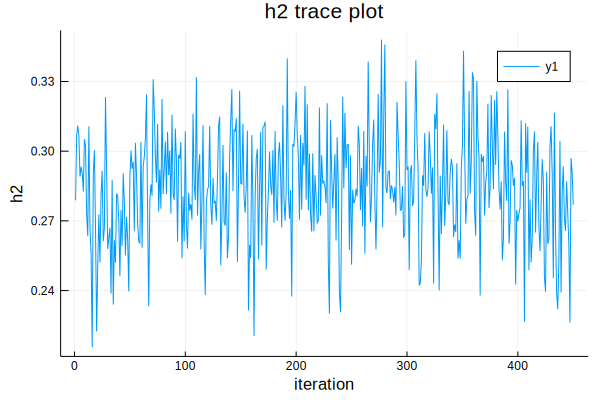

In [23]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [4]:
@time Nur1ADG_outB,Nur1ADG_winVarProps = GWAS("MCMC_samples_marker_effects_Nur1ADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",M;header=true,window_size="0.25 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:40:53


BoundsError: BoundsError: attempt to access (9375×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 5622   │ 10     │ 40250000  │ 40500000  │ 40259321  │ 40495573  │ 68     │ 2.37735e-5     │ 1.95596e-5  │ 1.98     │ 0.808889   │ 0.808889  │
│ 2    │ 1     │ 6839   │ 13     │ 134500000 │ 134750000 │ 134500044 │ 134745334 │ 56     │ 4.25518e-5     │ 5.15282e-5  │ 3.52     │ 0.504444   │ 0.656667  │
│ 3    │ 1     │ 3026   │ 5      │ 66500000  │ 66750000  │ 66504533  │ 66749501  │ 71     │ 1.31589e-5     │ 1.75921e-5  │ 1.09     │ 0.497778   │ 0.603704  │
│ 4    │ 1     │ 5431   │ 9      │ 132000000 │ 132250000 │ 132029193 │ 132243523 │ 62     │ 8.13435e-6     │ 1.38031e-5  │ 0.68     │ 0.373333   │ 0.546111  │
│ 5    │ 1     │ 2345   │ 4      │ 27250000  │ 27500000  │ 27251221  │ 27499841  │ 56     │ 6.19919e-6     │ 1.1727e-5   │ 0.52     │ 0.34       │ 0.504889  │
│ 6    │ 1     │ 6117   │ 12     │ 15500000  │ 15750000  │ 15501252  │ 15664072  │ 43     │ 5.03334e-6     │ 1.00131e-5  │ 0.42     │ 0.337778   │ 0.477037  │
│ 7    │ 1     │ 3975   │ 7      │ 28750000  │ 29000000  │ 28752404  │ 28999976  │ 60     │ 7.68692e-6     │ 1.58403e-5  │ 0.64     │ 0.313333   │ 0.453651  │
│ 8    │ 1     │ 559    │ 1      │ 139750000 │ 140000000 │ 139750247 │ 139999096 │ 57     │ 5.11433e-6     │ 9.94626e-6  │ 0.43     │ 0.3        │ 0.434444  │
│ 9    │ 1     │ 3769   │ 6      │ 148250000 │ 148500000 │ 148250668 │ 148497252 │ 72     │ 3.30666e-6     │ 7.16275e-6  │ 0.28     │ 0.268889   │ 0.416049  │
│ 10   │ 1     │ 6841   │ 13     │ 135000000 │ 135250000 │ 135045318 │ 135247265 │ 26     │ 1.74201e-5     │ 3.55861e-5  │ 1.49     │ 0.257778   │ 0.400222  │
│ 11   │ 1     │ 5830   │ 11     │ 22750000  │ 23000000  │ 22753908  │ 22997599  │ 67     │ 4.16379e-6     │ 9.87217e-6  │ 0.34     │ 0.253333   │ 0.386869  │
│ 12   │ 1     │ 7072   │ 13     │ 193000000 │ 193250000 │ 193001007 │ 193248237 │ 68     │ 3.42538e-6     │ 8.36769e-6  │ 0.29     │ 0.251111   │ 0.375556  │
│ 13   │ 1     │ 6840   │ 13     │ 134750000 │ 135000000 │ 134760758 │ 134997816 │ 12     │ 1.98176e-5     │ 4.00248e-5  │ 1.67     │ 0.237778   │ 0.364957  │
│ 14   │ 1     │ 3801   │ 6      │ 156250000 │ 156500000 │ 156256666 │ 156499309 │ 44     │ 2.574e-6       │ 6.30307e-6  │ 0.21     │ 0.228889   │ 0.355238  │
│ 15   │ 1     │ 5787   │ 11     │ 12000000  │ 12250000  │ 12008972  │ 12248077  │ 77     │ 4.56624e-6     │ 1.11604e-5  │ 0.38     │ 0.226667   │ 0.346667  │
│ 16   │ 1     │ 3418   │ 6      │ 59750000  │ 60000000  │ 59750298  │ 59989157  │ 48     │ 3.33325e-6     │ 8.58951e-6  │ 0.28     │ 0.217778   │ 0.338611  │
│ 17   │ 1     │ 8297   │ 16     │ 8750000   │ 9000000   │ 8752179   │ 8999021   │ 50     │ 4.05315e-6     │ 9.42917e-6  │ 0.34     │ 0.217778   │ 0.331503  │
│ 18   │ 1     │ 4260   │ 7      │ 100000000 │ 100250000 │ 100003085 │ 100244988 │ 60     │ 4.21261e-6     │ 1.11326e-5  │ 0.35     │ 0.188889   │ 0.32358   │
│ 19   │ 1     │ 213    │ 1      │ 53000000  │ 53250000  │ 53000537  │ 53248919  │ 67     │ 1.67073e-6     │ 4.71824e-6  │ 0.14     │ 0.186667   │ 0.316374  │
│ 20   │ 1     │ 5829   │ 11     │ 22500000  │ 22750000  │ 22500275  │ 22748986  │ 49     │ 2.21191e-6     │ 6.1081e-6   │ 0.18     │ 0.182222   │ 0.309667  │
│ 21   │ 1     │ 1639   │ 2      │ 135750000 │ 136000000 │ 135750287 │ 135998841 │ 58     │ 2.06269e-6     │ 6.14175e-6  │ 0.17     │ 0.175556   │ 0.30328   │
│ 22   │ 1     │ 1807   │ 3      │ 25750000  │ 26000000  │ 25751096  │ 25998487  │ 72     │ 2.76208e-6     │ 8.49653e-6  │ 0.23     │ 0.175556   │ 0.297475  │
│ 23   │ 1     │ 5722   │ 10     │ 65250000  │ 65500000  │ 65250775  │ 65495805  │ 57     │ 2.02038e-6     │ 6.25732e-6  │ 0.17     │ 0.173333   │ 0.292077  │
│ 24   │ 1     │ 1219   │ 2      │ 30500000  │ 30750000  │ 30501579  │ 30747314  │ 58     │ 2.70052e-6     │ 7.4959e-6   │ 0.23     │ 0.168889   │ 0.286944  │
│ 25   │ 1     │ 6157   │ 12     │ 25500000  │ 25750000  │ 25500418  │ 25734333  │ 59     │ 2.45702e-6     │ 7.07568e-6  │ 0.2      │ 0.168889   │ 0.282222  │
│ 26   │ 1     │ 3023   │ 5      │ 65750000  │ 66000000  │ 65750929  │ 65997447  │ 78     │ 3.17876e-6     │ 9.92629e-6  │ 0.27     │ 0.164444   │ 0.277692  │
│ 27   │ 1     │ 8815   │ 17     │ 58250000  │ 58500000  │ 58252850  │ 58498409  │ 77     │ 1.63452e-6     │ 5.25309e-6  │ 0.13     │ 0.164444   │ 0.273498  │
│ 28   │ 1     │ 3430   │ 6      │ 63250000  │ 63500000  │ 63300445  │ 63497288  │ 51     │ 2.55247e-6     │ 9.00221e-6  │ 0.22     │ 0.157778   │ 0.269365  │
│ 29   │ 1     │ 1808   │ 3      │ 26000000  │ 26250000  │ 26003466  │ 26248615  │ 51     │ 1.59796e-6     │ 4.72098e-6  │ 0.14     │ 0.155556   │ 0.265441  │
│ 30   │ 1     │ 6086   │ 12     │ 7750000   │ 8000000   │ 7750152   │ 7982108   │ 66     │ 1.44065e-6     │ 4.58951e-6  │ 0.12     │ 0.153333   │ 0.261704  │
│ 31   │ 1     │ 6980   │ 13     │ 169750000 │ 170000000 │ 169754210 │ 169996104 │ 47     │ 2.36294e-6     │ 8.21993e-6  │ 0.2      │ 0.153333   │ 0.258208  │
│ 32   │ 1     │ 8515   │ 16     │ 63250000  │ 63500000  │ 63254469  │ 63498985  │ 58     │ 2.08525e-6     │ 6.60074e-6  │ 0.18     │ 0.153333   │ 0.254931  │
│ 33   │ 1     │ 1220   │ 2      │ 30750000  │ 31000000  │ 30751660  │ 30997341  │ 61     │ 1.92531e-6     │ 6.675e-6    │ 0.16     │ 0.151111   │ 0.251785  │
│ 34   │ 1     │ 3309   │ 6      │ 32500000  │ 32750000  │ 32501200  │ 32742573  │ 64     │ 1.85474e-6     │ 5.97738e-6  │ 0.15     │ 0.151111   │ 0.248824  │
│ 35   │ 1     │ 5723   │ 10     │ 65500000  │ 65750000  │ 65505331  │ 65749573  │ 27     │ 2.8941e-6      │ 8.52967e-6  │ 0.25     │ 0.151111   │ 0.246032  │
│ 36   │ 1     │ 558    │ 1      │ 139500000 │ 139750000 │ 139501135 │ 139746847 │ 65     │ 1.81446e-6     │ 5.69877e-6  │ 0.15     │ 0.146667   │ 0.243272  │
│ 37   │ 1     │ 3431   │ 6      │ 63500000  │ 63750000  │ 63500258  │ 63743210  │ 36     │ 3.1322e-6      │ 1.0264e-5   │ 0.26     │ 0.144444   │ 0.240601  │
│ 38   │ 1     │ 3390   │ 6      │ 52750000  │ 53000000  │ 52753763  │ 52997239  │ 58     │ 1.76538e-6     │ 6.22055e-6  │ 0.14     │ 0.142222   │ 0.238012  │
│ 39   │ 1     │ 4233   │ 7      │ 93250000  │ 93500000  │ 93253447  │ 93497138  │ 51     │ 1.11031e-6     │ 3.7621e-6   │ 0.09     │ 0.14       │ 0.235499  │
│ 40   │ 1     │ 4246   │ 7      │ 96500000  │ 96750000  │ 96523241  │ 96747245  │ 54     │ 1.66488e-6     │ 5.27976e-6  │ 0.14     │ 0.14       │ 0.233111  │
│ 41   │ 1     │ 8535   │ 16     │ 68250000  │ 68500000  │ 68250061  │ 68499449  │ 63     │ 1.4386e-6      │ 4.38499e-6  │ 0.12     │ 0.14       │ 0.23084   │
│ 42   │ 1     │ 2269   │ 4      │ 8250000   │ 8500000   │ 8255162   │ 8495687   │ 59     │ 1.33312e-6     │ 4.45814e-6  │ 0.11     │ 0.137778   │ 0.228624  │
│ 43   │ 1     │ 3980   │ 7      │ 30000000  │ 30250000  │ 30000596  │ 30247666  │ 73     │ 1.43999e-6     │ 4.67825e-6  │ 0.12     │ 0.137778   │ 0.226512  │
│ 44   │ 1     │ 6156   │ 12     │ 25250000  │ 25500000  │ 25250593  │ 25497448  │ 32     │ 1.91341e-6     │ 6.3439e-6   │ 0.16     │ 0.137778   │ 0.224495  │
│ 45   │ 1     │ 8579   │ 16     │ 79250000  │ 79500000  │ 79255411  │ 79376504  │ 15     │ 1.90408e-6     │ 6.09989e-6  │ 0.16     │ 0.137778   │ 0.222568  │
│ 46   │ 1     │ 1234   │ 2      │ 34250000  │ 34500000  │ 34263151  │ 34493947  │ 52     │ 1.52074e-6     │ 5.3078e-6   │ 0.13     │ 0.135556   │ 0.220676  │
│ 47   │ 1     │ 2126   │ 3      │ 105500000 │ 105750000 │ 105502633 │ 105749444 │ 63     │ 1.37469e-6     │ 4.67529e-6  │ 0.12     │ 0.133333   │ 0.218818  │
│ 48   │ 1     │ 209    │ 1      │ 52000000  │ 52250000  │ 52000507  │ 52249290  │ 73     │ 1.1956e-6      │ 3.88646e-6  │ 0.1      │ 0.131111   │ 0.216991  │
│ 49   │ 1     │ 212    │ 1      │ 52750000  │ 53000000  │ 52750496  │ 52988384  │ 65     │ 2.06005e-6     │ 7.37431e-6  │ 0.17     │ 0.128889   │ 0.215193  │
│ 50   │ 1     │ 3778   │ 6      │ 150500000 │ 150750000 │ 150503340 │ 150748471 │ 63     │ 1.328e-6       │ 5.09559e-6  │ 0.11     │ 0.128889   │ 0.213467  │
│ 51   │ 1     │ 8383   │ 16     │ 30250000  │ 30500000  │ 30250571  │ 30496904  │ 63     │ 1.18881e-6     │ 4.09277e-6  │ 0.1      │ 0.126667   │ 0.211765  │
│ 52   │ 1     │ 1254   │ 2      │ 39250000  │ 39500000  │ 39260867  │ 39497657  │ 63     │ 1.96554e-6     │ 7.00868e-6  │ 0.16     │ 0.124444   │ 0.210085  │
│ 53   │ 1     │ 1963   │ 3      │ 64750000  │ 65000000  │ 64755159  │ 64999103  │ 56     │ 1.14436e-6     │ 3.96691e-6  │ 0.1      │ 0.124444   │ 0.20847   │
│ 54   │ 1     │ 6842   │ 13     │ 135250000 │ 135500000 │ 135250365 │ 135497407 │ 63     │ 4.26642e-6     │ 1.72095e-5  │ 0.35     │ 0.124444   │ 0.206914  │
│ 55   │ 1     │ 593    │ 1      │ 148250000 │ 148500000 │ 148322906 │ 148497978 │ 52     │ 1.17597e-6     │ 4.18833e-6  │ 0.1      │ 0.12       │ 0.205333  │
│ 56   │ 1     │ 8385   │ 16     │ 30750000  │ 31000000  │ 30753069  │ 30996898  │ 55     │ 1.11354e-6     │ 3.88674e-6  │ 0.09     │ 0.12       │ 0.20381   │
│ 57   │ 1     │ 127    │ 1      │ 31500000  │ 31750000  │ 31503055  │ 31749605  │ 68     │ 9.35366e-7     │ 3.42665e-6  │ 0.08     │ 0.117778   │ 0.2023    │
│ 58   │ 1     │ 214    │ 1      │ 53250000  │ 53500000  │ 53252886  │ 53498894  │ 57     │ 1.22025e-6     │ 4.85101e-6  │ 0.11     │ 0.117778   │ 0.200843  │
│ 59   │ 1     │ 2646   │ 4      │ 102500000 │ 102750000 │ 102501291 │ 102748490 │ 63     │ 1.43559e-6     │ 4.73426e-6  │ 0.12     │ 0.117778   │ 0.199435  │
│ 60   │ 1     │ 4250   │ 7      │ 97500000  │ 97750000  │ 97511738  │ 97744708  │ 39     │ 1.16608e-6     │ 4.25733e-6  │ 0.1      │ 0.117778   │ 0.198074  │
│ 61   │ 1     │ 8211   │ 15     │ 127750000 │ 128000000 │ 127751415 │ 127995861 │ 62     │ 9.26703e-7     │ 3.42993e-6  │ 0.08     │ 0.115556   │ 0.196721  │
│ 62   │ 1     │ 2801   │ 5      │ 10250000  │ 10500000  │ 10251491  │ 10492541  │ 61     │ 9.8337e-7      │ 3.52915e-6  │ 0.08     │ 0.113333   │ 0.195376  │
│ 63   │ 1     │ 7154   │ 14     │ 5000000   │ 5250000   │ 5000978   │ 5248152   │ 55     │ 1.18425e-6     │ 4.24707e-6  │ 0.1      │ 0.113333   │ 0.194074  │
│ 64   │ 1     │ 7162   │ 14     │ 7000000   │ 7250000   │ 7001829   │ 7248925   │ 70     │ 1.02757e-6     │ 3.64542e-6  │ 0.08     │ 0.113333   │ 0.192813  │
│ 65   │ 1     │ 3983   │ 7      │ 30750000  │ 31000000  │ 30751351  │ 30998307  │ 67     │ 9.2912e-7      │ 3.3934e-6   │ 0.08     │ 0.111111   │ 0.191556  │
│ 66   │ 1     │ 1717   │ 3      │ 3250000   │ 3500000   │ 3254939   │ 3494285   │ 68     │ 8.23098e-7     │ 3.071e-6    │ 0.07     │ 0.108889   │ 0.190303  │
│ 67   │ 1     │ 6720   │ 13     │ 104500000 │ 104750000 │ 104506527 │ 104729934 │ 32     │ 8.52126e-7     │ 3.51504e-6  │ 0.07     │ 0.108889   │ 0.189088  │
│ 68   │ 1     │ 3436   │ 6      │ 64750000  │ 65000000  │ 64750640  │ 64999828  │ 63     │ 1.6276e-6      │ 6.7231e-6   │ 0.14     │ 0.106667   │ 0.187876  │
│ 69   │ 1     │ 4247   │ 7      │ 96750000  │ 97000000  │ 96751585  │ 96999998  │ 35     │ 1.41289e-6     │ 5.52127e-6  │ 0.12     │ 0.106667   │ 0.186699  │
│ 70   │ 1     │ 4817   │ 8      │ 117250000 │ 117500000 │ 117254732 │ 117498594 │ 63     │ 1.01297e-6     │ 4.0028e-6   │ 0.08     │ 0.106667   │ 0.185556  │
│ 71   │ 1     │ 2248   │ 4      │ 3000000   │ 3250000   │ 3000583   │ 3248135   │ 65     │ 7.62891e-7     │ 2.69896e-6  │ 0.06     │ 0.104444   │ 0.184413  │
│ 72   │ 1     │ 3068   │ 5      │ 77000000  │ 77250000  │ 77000223  │ 77248822  │ 62     │ 9.53428e-7     │ 3.69848e-6  │ 0.08     │ 0.104444   │ 0.183302  │
│ 73   │ 1     │ 6986   │ 13     │ 171250000 │ 171500000 │ 171308538 │ 171492863 │ 25     │ 1.10879e-6     │ 4.08545e-6  │ 0.09     │ 0.104444   │ 0.182222  │
│ 74   │ 1     │ 8915   │ 18     │ 20000000  │ 20250000  │ 20007968  │ 20229772  │ 30     │ 1.26087e-6     │ 4.38569e-6  │ 0.11     │ 0.104444   │ 0.181171  │
│ 75   │ 1     │ 3039   │ 5      │ 69750000  │ 70000000  │ 69750392  │ 69997517  │ 53     │ 7.76321e-7     │ 2.84743e-6  │ 0.06     │ 0.102222   │ 0.180119  │
│ 76   │ 1     │ 3391   │ 6      │ 53000000  │ 53250000  │ 53001644  │ 53244537  │ 53     │ 1.31375e-6     │ 6.10403e-6  │ 0.11     │ 0.102222   │ 0.179094  │
│ 77   │ 1     │ 3997   │ 7      │ 34250000  │ 34500000  │ 34251152  │ 34494360  │ 67     │ 6.72457e-7     │ 2.36425e-6  │ 0.06     │ 0.102222   │ 0.178095  │
│ 78   │ 1     │ 8528   │ 16     │ 66500000  │ 66750000  │ 66517741  │ 66748266  │ 40     │ 1.24242e-6     │ 5.12895e-6  │ 0.1      │ 0.102222   │ 0.177123  │
│ 79   │ 1     │ 3462   │ 6      │ 71250000  │ 71500000  │ 71251806  │ 71499075  │ 80     │ 8.48719e-7     │ 3.31343e-6  │ 0.07     │ 0.1        │ 0.176146  │
│ 80   │ 1     │ 7325   │ 14     │ 47750000  │ 48000000  │ 47750613  │ 47999414  │ 75     │ 8.00132e-7     │ 3.33436e-6  │ 0.07     │ 0.1        │ 0.175194  │
│ 81   │ 1     │ 8514   │ 16     │ 63000000  │ 63250000  │ 63004405  │ 63245478  │ 58     │ 6.8155e-7      │ 2.72063e-6  │ 0.06     │ 0.1        │ 0.174266  │
│ 82   │ 1     │ 8812   │ 17     │ 57500000  │ 57750000  │ 57502562  │ 57743918  │ 64     │ 1.21274e-6     │ 5.09512e-6  │ 0.1      │ 0.1        │ 0.17336   │
│ 83   │ 1     │ 102    │ 1      │ 25250000  │ 25500000  │ 25251269  │ 25492538  │ 70     │ 8.72195e-7     │ 3.5269e-6   │ 0.07     │ 0.0977778  │ 0.17245   │
│ 84   │ 1     │ 557    │ 1      │ 139250000 │ 139500000 │ 139254198 │ 139496255 │ 58     │ 1.27075e-6     │ 5.06938e-6  │ 0.11     │ 0.0977778  │ 0.171561  │
│ 85   │ 1     │ 1598   │ 2      │ 125500000 │ 125750000 │ 125501606 │ 125747052 │ 68     │ 8.18692e-7     │ 3.35132e-6  │ 0.07     │ 0.0977778  │ 0.170693  │
│ 86   │ 1     │ 3461   │ 6      │ 71000000  │ 71250000  │ 71001289  │ 71249002  │ 73     │ 7.05616e-7     │ 2.65475e-6  │ 0.06     │ 0.0977778  │ 0.169845  │
│ 87   │ 1     │ 3763   │ 6      │ 146750000 │ 147000000 │ 146782297 │ 146997249 │ 50     │ 1.01567e-6     │ 4.60217e-6  │ 0.09     │ 0.0977778  │ 0.169017  │
│ 88   │ 1     │ 4005   │ 7      │ 36250000  │ 36500000  │ 36251023  │ 36495190  │ 52     │ 1.43764e-6     │ 5.82702e-6  │ 0.12     │ 0.0977778  │ 0.168207  │
│ 89   │ 1     │ 4060   │ 7      │ 50000000  │ 50250000  │ 50001617  │ 50248064  │ 73     │ 8.34092e-7     │ 3.319e-6    │ 0.07     │ 0.0977778  │ 0.167416  │
│ 90   │ 1     │ 7160   │ 14     │ 6500000   │ 6750000   │ 6505505   │ 6741000   │ 54     │ 1.00239e-6     │ 4.06536e-6  │ 0.08     │ 0.0977778  │ 0.166642  │
│ 91   │ 1     │ 7204   │ 14     │ 17500000  │ 17750000  │ 17500595  │ 17747894  │ 61     │ 7.54193e-7     │ 3.10757e-6  │ 0.06     │ 0.0977778  │ 0.165885  │
│ 92   │ 1     │ 1016   │ 1      │ 254000000 │ 254250000 │ 254005981 │ 254248088 │ 58     │ 9.40101e-7     │ 3.83331e-6  │ 0.08     │ 0.0955556  │ 0.165121  │
│ 93   │ 1     │ 4040   │ 7      │ 45000000  │ 45250000  │ 45006606  │ 45240243  │ 56     │ 7.96379e-7     │ 3.0777e-6   │ 0.06     │ 0.0955556  │ 0.164373  │
│ 94   │ 1     │ 5432   │ 9      │ 132250000 │ 132500000 │ 132250095 │ 132495752 │ 76     │ 8.64138e-7     │ 3.33674e-6  │ 0.07     │ 0.0955556  │ 0.163641  │
│ 95   │ 1     │ 6617   │ 13     │ 78750000  │ 79000000  │ 78757353  │ 78989380  │ 36     │ 1.37719e-6     │ 5.66031e-6  │ 0.12     │ 0.0955556  │ 0.162924  │
│ 96   │ 1     │ 7018   │ 13     │ 179500000 │ 179750000 │ 179501934 │ 179749884 │ 69     │ 9.82509e-7     │ 4.1029e-6   │ 0.08     │ 0.0955556  │ 0.162222  │
│ 97   │ 1     │ 7350   │ 14     │ 54000000  │ 54250000  │ 54006810  │ 54248395  │ 61     │ 7.32857e-7     │ 3.22574e-6  │ 0.06     │ 0.0955556  │ 0.161535  │
│ 98   │ 1     │ 1851   │ 3      │ 36750000  │ 37000000  │ 36754857  │ 36996446  │ 56     │ 9.75294e-7     │ 4.33472e-6  │ 0.08     │ 0.0933333  │ 0.160839  │
│ 99   │ 1     │ 2946   │ 5      │ 46500000  │ 46750000  │ 46502626  │ 46742793  │ 54     │ 7.68598e-7     │ 3.02962e-6  │ 0.07     │ 0.0933333  │ 0.160157  │
│ 100  │ 1     │ 3226   │ 6      │ 11750000  │ 12000000  │ 11750354  │ 11996440  │ 55     │ 6.75352e-7     │ 2.58239e-6  │ 0.06     │ 0.0933333  │ 0.159489  │
│ 101  │ 1     │ 5820   │ 11     │ 20250000  │ 20500000  │ 20255283  │ 20498019  │ 60     │ 6.41001e-7     │ 2.51885e-6  │ 0.05     │ 0.0933333  │ 0.158834  │
│ 102  │ 1     │ 6106   │ 12     │ 12750000  │ 13000000  │ 12750053  │ 12986787  │ 59     │ 8.12532e-7     │ 3.44532e-6  │ 0.07     │ 0.0933333  │ 0.158192  │
│ 103  │ 1     │ 8436   │ 16     │ 43500000  │ 43750000  │ 43503474  │ 43748296  │ 55     │ 7.48708e-7     │ 3.29927e-6  │ 0.06     │ 0.0933333  │ 0.157562  │
│ 104  │ 1     │ 2817   │ 5      │ 14250000  │ 14500000  │ 14255605  │ 14499235  │ 74     │ 7.01275e-7     │ 2.71265e-6  │ 0.06     │ 0.0911111  │ 0.156923  │
│ 105  │ 1     │ 3387   │ 6      │ 52000000  │ 52250000  │ 52001086  │ 52242479  │ 28     │ 1.06471e-6     │ 4.20042e-6  │ 0.09     │ 0.0911111  │ 0.156296  │
│ 106  │ 1     │ 4059   │ 7      │ 49750000  │ 50000000  │ 49750991  │ 49998683  │ 73     │ 5.63239e-7     │ 2.24587e-6  │ 0.05     │ 0.0911111  │ 0.155681  │
│ 107  │ 1     │ 6147   │ 12     │ 23000000  │ 23250000  │ 23002390  │ 23245060  │ 31     │ 1.51622e-6     │ 6.86035e-6  │ 0.13     │ 0.0911111  │ 0.155078  │
│ 108  │ 1     │ 9022   │ 18     │ 46750000  │ 47000000  │ 46751579  │ 46998911  │ 66     │ 7.38313e-7     │ 2.96567e-6  │ 0.06     │ 0.0911111  │ 0.154486  │
│ 109  │ 1     │ 3944   │ 7      │ 21000000  │ 21250000  │ 21001509  │ 21213093  │ 36     │ 1.12058e-6     │ 4.74335e-6  │ 0.09     │ 0.0888889  │ 0.153884  │
│ 110  │ 1     │ 3965   │ 7      │ 26250000  │ 26500000  │ 26250728  │ 26494588  │ 60     │ 8.20457e-7     │ 3.33858e-6  │ 0.07     │ 0.0888889  │ 0.153293  │
│ 111  │ 1     │ 4700   │ 8      │ 88000000  │ 88250000  │ 88003699  │ 88246418  │ 68     │ 7.47918e-7     │ 3.38784e-6  │ 0.06     │ 0.0888889  │ 0.152713  │
│ 112  │ 1     │ 4827   │ 8      │ 119750000 │ 120000000 │ 119750475 │ 119998373 │ 63     │ 9.07534e-7     │ 3.97295e-6  │ 0.08     │ 0.0888889  │ 0.152143  │
│ 113  │ 1     │ 7706   │ 15     │ 1250000   │ 1500000   │ 1263934   │ 1497641   │ 61     │ 6.96812e-7     │ 2.81166e-6  │ 0.06     │ 0.0888889  │ 0.151583  │
│ 114  │ 1     │ 3928   │ 7      │ 17000000  │ 17250000  │ 17002783  │ 17248906  │ 66     │ 8.05036e-7     │ 3.55477e-6  │ 0.07     │ 0.0866667  │ 0.151014  │
│ 115  │ 1     │ 3930   │ 7      │ 17500000  │ 17750000  │ 17509702  │ 17748012  │ 74     │ 8.71688e-7     │ 3.58103e-6  │ 0.07     │ 0.0866667  │ 0.150454  │
│ 116  │ 1     │ 4038   │ 7      │ 44500000  │ 44750000  │ 44504044  │ 44746958  │ 62     │ 6.6064e-7      │ 2.91235e-6  │ 0.05     │ 0.0866667  │ 0.149904  │
│ 117  │ 1     │ 5166   │ 9      │ 65750000  │ 66000000  │ 65751949  │ 65999371  │ 48     │ 8.97413e-7     │ 3.94537e-6  │ 0.07     │ 0.0866667  │ 0.149364  │
│ 118  │ 1     │ 5168   │ 9      │ 66250000  │ 66500000  │ 66259887  │ 66497201  │ 56     │ 9.25389e-7     │ 3.81235e-6  │ 0.07     │ 0.0866667  │ 0.148832  │
│ 119  │ 1     │ 5332   │ 9      │ 107250000 │ 107500000 │ 107256216 │ 107493831 │ 58     │ 6.53832e-7     │ 2.77216e-6  │ 0.06     │ 0.0866667  │ 0.14831   │
│ 120  │ 1     │ 6512   │ 13     │ 52500000  │ 52750000  │ 52503048  │ 52749996  │ 71     │ 7.18469e-7     │ 3.15086e-6  │ 0.06     │ 0.0866667  │ 0.147796  │
│ 121  │ 1     │ 7106   │ 13     │ 201500000 │ 201750000 │ 201501949 │ 201744649 │ 66     │ 9.62509e-7     │ 4.36177e-6  │ 0.08     │ 0.0866667  │ 0.147291  │
│ 122  │ 1     │ 7695   │ 14     │ 140250000 │ 140500000 │ 140305489 │ 140495895 │ 42     │ 1.26887e-6     │ 5.49803e-6  │ 0.11     │ 0.0866667  │ 0.146794  │
│ 123  │ 1     │ 8168   │ 15     │ 117000000 │ 117250000 │ 117007290 │ 117245400 │ 57     │ 7.94926e-7     │ 3.49688e-6  │ 0.07     │ 0.0866667  │ 0.146305  │
│ 124  │ 1     │ 1169   │ 2      │ 18000000  │ 18250000  │ 18002476  │ 18249050  │ 67     │ 6.1364e-7      │ 2.63441e-6  │ 0.05     │ 0.0844444  │ 0.145806  │
│ 125  │ 1     │ 3826   │ 6      │ 162500000 │ 162750000 │ 162504042 │ 162748241 │ 50     │ 7.78176e-7     │ 3.34993e-6  │ 0.07     │ 0.0844444  │ 0.145316  │
│ 126  │ 1     │ 5005   │ 9      │ 25250000  │ 25500000  │ 25253728  │ 25499833  │ 81     │ 5.24186e-7     │ 2.18479e-6  │ 0.04     │ 0.0844444  │ 0.144832  │
│ 127  │ 1     │ 7539   │ 14     │ 101250000 │ 101500000 │ 101252113 │ 101498568 │ 74     │ 5.68233e-7     │ 2.36482e-6  │ 0.05     │ 0.0844444  │ 0.144357  │
│ 128  │ 1     │ 8333   │ 16     │ 17750000  │ 18000000  │ 17751484  │ 17996098  │ 69     │ 6.2868e-7      │ 2.99348e-6  │ 0.05     │ 0.0844444  │ 0.143889  │
│ 129  │ 1     │ 8435   │ 16     │ 43250000  │ 43500000  │ 43253610  │ 43498641  │ 51     │ 4.25932e-7     │ 1.75838e-6  │ 0.04     │ 0.0844444  │ 0.143428  │
│ 130  │ 1     │ 8814   │ 17     │ 58000000  │ 58250000  │ 58012455  │ 58246704  │ 77     │ 5.95618e-7     │ 2.44259e-6  │ 0.05     │ 0.0844444  │ 0.142974  │
│ 131  │ 1     │ 810    │ 1      │ 202500000 │ 202750000 │ 202502148 │ 202749691 │ 40     │ 1.34933e-6     │ 5.598e-6    │ 0.11     │ 0.0822222  │ 0.142511  │
│ 132  │ 1     │ 1164   │ 2      │ 16750000  │ 17000000  │ 16752843  │ 16999821  │ 70     │ 9.97796e-7     │ 4.34976e-6  │ 0.09     │ 0.0822222  │ 0.142054  │
│ 133  │ 1     │ 2246   │ 4      │ 2500000   │ 2750000   │ 2501691   │ 2749949   │ 71     │ 6.47145e-7     │ 2.73982e-6  │ 0.06     │ 0.0822222  │ 0.141604  │
│ 134  │ 1     │ 3038   │ 5      │ 69500000  │ 69750000  │ 69502878  │ 69748168  │ 40     │ 6.29739e-7     │ 2.7761e-6   │ 0.05     │ 0.0822222  │ 0.141161  │
│ 135  │ 1     │ 3419   │ 6      │ 60000000  │ 60250000  │ 60018305  │ 60248120  │ 57     │ 8.52857e-7     │ 4.10435e-6  │ 0.07     │ 0.0822222  │ 0.140724  │
│ 136  │ 1     │ 3439   │ 6      │ 65500000  │ 65750000  │ 65500129  │ 65747698  │ 81     │ 9.40019e-7     │ 4.51595e-6  │ 0.08     │ 0.0822222  │ 0.140294  │
│ 137  │ 1     │ 5785   │ 11     │ 11500000  │ 11750000  │ 11514006  │ 11694178  │ 55     │ 6.92424e-7     │ 3.08605e-6  │ 0.06     │ 0.0822222  │ 0.13987   │
│ 138  │ 1     │ 8513   │ 16     │ 62750000  │ 63000000  │ 62750208  │ 62999696  │ 62     │ 6.61433e-7     │ 2.65936e-6  │ 0.05     │ 0.0822222  │ 0.139452  │
│ 139  │ 1     │ 501    │ 1      │ 125250000 │ 125500000 │ 125251167 │ 125499423 │ 60     │ 6.80882e-7     │ 2.70085e-6  │ 0.06     │ 0.08       │ 0.139025  │
│ 140  │ 1     │ 2828   │ 5      │ 17000000  │ 17250000  │ 17001893  │ 17245936  │ 74     │ 5.13752e-7     │ 2.25223e-6  │ 0.04     │ 0.08       │ 0.138603  │
│ 141  │ 1     │ 4061   │ 7      │ 50250000  │ 50500000  │ 50250577  │ 50498935  │ 74     │ 6.75539e-7     │ 3.14361e-6  │ 0.06     │ 0.08       │ 0.138188  │
│ 142  │ 1     │ 4701   │ 8      │ 88250000  │ 88500000  │ 88254662  │ 88498916  │ 48     │ 8.88723e-7     │ 4.60456e-6  │ 0.08     │ 0.08       │ 0.137778  │
│ 143  │ 1     │ 5579   │ 10     │ 29500000  │ 29750000  │ 29500094  │ 29682283  │ 54     │ 7.66803e-7     │ 3.27758e-6  │ 0.07     │ 0.08       │ 0.137374  │
│ 144  │ 1     │ 5724   │ 10     │ 65750000  │ 66000000  │ 65751323  │ 65992839  │ 59     │ 8.14369e-7     │ 3.49264e-6  │ 0.07     │ 0.08       │ 0.136975  │
│ 145  │ 1     │ 6719   │ 13     │ 104250000 │ 104500000 │ 104259674 │ 104491317 │ 45     │ 8.11567e-7     │ 3.48409e-6  │ 0.07     │ 0.08       │ 0.136582  │
│ 146  │ 1     │ 7349   │ 14     │ 53750000  │ 54000000  │ 53752180  │ 53999287  │ 50     │ 7.58272e-7     │ 3.50007e-6  │ 0.06     │ 0.08       │ 0.136195  │
│ 147  │ 1     │ 92     │ 1      │ 22750000  │ 23000000  │ 22753012  │ 22991873  │ 50     │ 9.92156e-7     │ 4.49416e-6  │ 0.08     │ 0.0777778  │ 0.135797  │
│ 148  │ 1     │ 122    │ 1      │ 30250000  │ 30500000  │ 30254671  │ 30496952  │ 48     │ 7.2723e-7      │ 3.19893e-6  │ 0.06     │ 0.0777778  │ 0.135405  │
│ 149  │ 1     │ 383    │ 1      │ 95750000  │ 96000000  │ 95758114  │ 95999221  │ 62     │ 7.14288e-7     │ 3.20758e-6  │ 0.06     │ 0.0777778  │ 0.135019  │
│ 150  │ 1     │ 1113   │ 2      │ 4000000   │ 4250000   │ 4012479   │ 4249741   │ 49     │ 6.52316e-7     │ 2.90003e-6  │ 0.05     │ 0.0777778  │ 0.134637  │
│ 151  │ 1     │ 1222   │ 2      │ 31250000  │ 31500000  │ 31254172  │ 31483808  │ 35     │ 1.09637e-6     │ 4.75695e-6  │ 0.09     │ 0.0777778  │ 0.13426   │
│ 152  │ 1     │ 2478   │ 4      │ 60500000  │ 60750000  │ 60628906  │ 60749780  │ 31     │ 7.24833e-7     │ 3.20952e-6  │ 0.06     │ 0.0777778  │ 0.133889  │
│ 153  │ 1     │ 3458   │ 6      │ 70250000  │ 70500000  │ 70250676  │ 70496858  │ 73     │ 5.12266e-7     │ 2.19909e-6  │ 0.04     │ 0.0777778  │ 0.133522  │
│ 154  │ 1     │ 3762   │ 6      │ 146500000 │ 146750000 │ 146508971 │ 146737682 │ 39     │ 9.69518e-7     │ 4.69277e-6  │ 0.08     │ 0.0777778  │ 0.13316   │
│ 155  │ 1     │ 5566   │ 10     │ 26250000  │ 26500000  │ 26250197  │ 26496292  │ 64     │ 6.97112e-7     │ 3.41555e-6  │ 0.06     │ 0.0777778  │ 0.132803  │
│ 156  │ 1     │ 5928   │ 11     │ 47500000  │ 47750000  │ 47501284  │ 47749336  │ 69     │ 4.55842e-7     │ 2.26482e-6  │ 0.04     │ 0.0777778  │ 0.13245   │
│ 157  │ 1     │ 7699   │ 14     │ 141250000 │ 141500000 │ 141254655 │ 141484847 │ 45     │ 5.67699e-7     │ 2.32749e-6  │ 0.05     │ 0.0777778  │ 0.132102  │
│ 158  │ 1     │ 8382   │ 16     │ 30000000  │ 30250000  │ 30010304  │ 30238792  │ 53     │ 9.51401e-7     │ 4.17729e-6  │ 0.08     │ 0.0777778  │ 0.131758  │
│ 159  │ 1     │ 8391   │ 16     │ 32250000  │ 32500000  │ 32252713  │ 32498146  │ 65     │ 4.88349e-7     │ 1.98621e-6  │ 0.04     │ 0.0777778  │ 0.131419  │
│ 160  │ 1     │ 8531   │ 16     │ 67250000  │ 67500000  │ 67250135  │ 67499257  │ 63     │ 6.29255e-7     │ 2.786e-6    │ 0.05     │ 0.0777778  │ 0.131083  │
│ 161  │ 1     │ 8682   │ 17     │ 25000000  │ 25250000  │ 25001988  │ 25248447  │ 69     │ 6.39883e-7     │ 2.92082e-6  │ 0.05     │ 0.0777778  │ 0.130752  │
│ 162  │ 1     │ 8816   │ 17     │ 58500000  │ 58750000  │ 58500890  │ 58748543  │ 66     │ 5.85737e-7     │ 2.45617e-6  │ 0.05     │ 0.0777778  │ 0.130425  │
│ 163  │ 1     │ 9003   │ 18     │ 42000000  │ 42250000  │ 42004068  │ 42248048  │ 70     │ 4.39715e-7     │ 2.05356e-6  │ 0.04     │ 0.0777778  │ 0.130102  │
│ 164  │ 1     │ 1578   │ 2      │ 120500000 │ 120750000 │ 120504561 │ 120749854 │ 77     │ 6.55648e-7     │ 2.92339e-6  │ 0.05     │ 0.0755556  │ 0.12977   │
│ 165  │ 1     │ 2125   │ 3      │ 105250000 │ 105500000 │ 105252243 │ 105499962 │ 55     │ 5.68495e-7     │ 2.68866e-6  │ 0.05     │ 0.0755556  │ 0.129441  │
│ 166  │ 1     │ 3125   │ 5      │ 91250000  │ 91500000  │ 91250569  │ 91494101  │ 39     │ 5.42569e-7     │ 2.56188e-6  │ 0.05     │ 0.0755556  │ 0.129116  │
│ 167  │ 1     │ 3258   │ 6      │ 19750000  │ 20000000  │ 19750664  │ 19999946  │ 59     │ 5.35038e-7     │ 3.09317e-6  │ 0.04     │ 0.0755556  │ 0.128796  │
│ 168  │ 1     │ 3456   │ 6      │ 69750000  │ 70000000  │ 69791937  │ 69996437  │ 48     │ 6.22457e-7     │ 2.78002e-6  │ 0.05     │ 0.0755556  │ 0.128479  │
│ 169  │ 1     │ 6194   │ 12     │ 34750000  │ 35000000  │ 34751636  │ 34998176  │ 47     │ 6.25044e-7     │ 2.86549e-6  │ 0.05     │ 0.0755556  │ 0.128166  │
│ 170  │ 1     │ 6217   │ 12     │ 40500000  │ 40750000  │ 40509146  │ 40743230  │ 67     │ 7.16409e-7     │ 3.33192e-6  │ 0.06     │ 0.0755556  │ 0.127856  │
│ 171  │ 1     │ 7164   │ 14     │ 7500000   │ 7750000   │ 7520400   │ 7749765   │ 63     │ 5.01603e-7     │ 2.26885e-6  │ 0.04     │ 0.0755556  │ 0.12755   │
│ 172  │ 1     │ 7219   │ 14     │ 21250000  │ 21500000  │ 21252159  │ 21498839  │ 57     │ 6.16785e-7     │ 2.83151e-6  │ 0.05     │ 0.0755556  │ 0.127248  │
│ 173  │ 1     │ 7352   │ 14     │ 54500000  │ 54750000  │ 54500038  │ 54749543  │ 66     │ 3.66466e-7     │ 1.92469e-6  │ 0.03     │ 0.0755556  │ 0.126949  │
│ 174  │ 1     │ 7697   │ 14     │ 140750000 │ 141000000 │ 140750059 │ 140995047 │ 34     │ 5.69365e-7     │ 2.32529e-6  │ 0.05     │ 0.0755556  │ 0.126654  │
│ 175  │ 1     │ 7709   │ 15     │ 2000000   │ 2250000   │ 2001206   │ 2248288   │ 66     │ 6.31316e-7     │ 2.98484e-6  │ 0.05     │ 0.0755556  │ 0.126362  │
│ 176  │ 1     │ 1745   │ 3      │ 10250000  │ 10500000  │ 10252222  │ 10496820  │ 44     │ 4.88713e-7     │ 2.06799e-6  │ 0.04     │ 0.0733333  │ 0.126061  │
│ 177  │ 1     │ 1746   │ 3      │ 10500000  │ 10750000  │ 10500582  │ 10749527  │ 63     │ 4.13272e-7     │ 1.76504e-6  │ 0.03     │ 0.0733333  │ 0.125763  │
│ 178  │ 1     │ 2406   │ 4      │ 42500000  │ 42750000  │ 42504624  │ 42741015  │ 25     │ 7.69344e-7     │ 3.51348e-6  │ 0.07     │ 0.0733333  │ 0.125468  │
│ 179  │ 1     │ 3028   │ 5      │ 67000000  │ 67250000  │ 67003698  │ 67245751  │ 57     │ 4.01316e-7     │ 1.85735e-6  │ 0.03     │ 0.0733333  │ 0.125177  │
│ 180  │ 1     │ 4675   │ 8      │ 81750000  │ 82000000  │ 81751050  │ 81999744  │ 47     │ 6.84369e-7     │ 3.26669e-6  │ 0.06     │ 0.0733333  │ 0.124889  │
│ 181  │ 1     │ 5004   │ 9      │ 25000000  │ 25250000  │ 25000259  │ 25240888  │ 76     │ 4.90393e-7     │ 1.99266e-6  │ 0.04     │ 0.0733333  │ 0.124604  │
│ 182  │ 1     │ 6158   │ 12     │ 25750000  │ 26000000  │ 25753473  │ 25998088  │ 67     │ 5.94183e-7     │ 2.71669e-6  │ 0.05     │ 0.0733333  │ 0.124322  │
│ 183  │ 1     │ 6461   │ 13     │ 39750000  │ 40000000  │ 39766677  │ 39981632  │ 42     │ 8.20691e-7     │ 3.88412e-6  │ 0.07     │ 0.0733333  │ 0.124044  │
│ 184  │ 1     │ 7172   │ 14     │ 9500000   │ 9750000   │ 9500648   │ 9747565   │ 73     │ 5.22102e-7     │ 2.61465e-6  │ 0.05     │ 0.0733333  │ 0.123768  │
│ 185  │ 1     │ 8558   │ 16     │ 74000000  │ 74250000  │ 74000782  │ 74244125  │ 57     │ 7.23779e-7     │ 3.58182e-6  │ 0.06     │ 0.0733333  │ 0.123495  │
│ 186  │ 1     │ 8763   │ 17     │ 45250000  │ 45500000  │ 45255346  │ 45499945  │ 69     │ 4.62618e-7     │ 2.12531e-6  │ 0.04     │ 0.0733333  │ 0.123226  │
│ 187  │ 1     │ 8950   │ 18     │ 28750000  │ 29000000  │ 28753416  │ 28991659  │ 55     │ 4.99484e-7     │ 2.40635e-6  │ 0.04     │ 0.0733333  │ 0.122959  │
│ 188  │ 1     │ 141    │ 1      │ 35000000  │ 35250000  │ 35002738  │ 35248144  │ 62     │ 6.3365e-7      │ 2.8048e-6   │ 0.05     │ 0.0711111  │ 0.122683  │
│ 189  │ 1     │ 1322   │ 2      │ 56500000  │ 56750000  │ 56594021  │ 56720937  │ 29     │ 7.65527e-7     │ 3.86988e-6  │ 0.06     │ 0.0711111  │ 0.12241   │
│ 190  │ 1     │ 1690   │ 2      │ 148500000 │ 148750000 │ 148503362 │ 148744106 │ 57     │ 4.72781e-7     │ 2.09649e-6  │ 0.04     │ 0.0711111  │ 0.12214   │
│ 191  │ 1     │ 3764   │ 6      │ 147000000 │ 147250000 │ 147000268 │ 147248914 │ 60     │ 5.07856e-7     │ 2.26728e-6  │ 0.04     │ 0.0711111  │ 0.121873  │
│ 192  │ 1     │ 3790   │ 6      │ 153500000 │ 153750000 │ 153500350 │ 153748030 │ 76     │ 3.40364e-7     │ 1.44187e-6  │ 0.03     │ 0.0711111  │ 0.121609  │
│ 193  │ 1     │ 5711   │ 10     │ 62500000  │ 62750000  │ 62500507  │ 62749536  │ 53     │ 5.25958e-7     │ 2.46241e-6  │ 0.04     │ 0.0711111  │ 0.121347  │
│ 194  │ 1     │ 5828   │ 11     │ 22250000  │ 22500000  │ 22255079  │ 22493060  │ 69     │ 5.61216e-7     │ 2.67678e-6  │ 0.05     │ 0.0711111  │ 0.121088  │
│ 195  │ 1     │ 6335   │ 13     │ 8250000   │ 8500000   │ 8253224   │ 8499912   │ 72     │ 4.53121e-7     │ 2.00455e-6  │ 0.04     │ 0.0711111  │ 0.120832  │
│ 196  │ 1     │ 6365   │ 13     │ 15750000  │ 16000000  │ 15757407  │ 15993930  │ 71     │ 6.43768e-7     │ 3.24558e-6  │ 0.06     │ 0.0711111  │ 0.120578  │
│ 197  │ 1     │ 7161   │ 14     │ 6750000   │ 7000000   │ 6752763   │ 6996902   │ 74     │ 4.46547e-7     │ 2.1541e-6   │ 0.04     │ 0.0711111  │ 0.120327  │
│ 198  │ 1     │ 7698   │ 14     │ 141000000 │ 141250000 │ 141007106 │ 141249187 │ 38     │ 7.01232e-7     │ 2.97088e-6  │ 0.06     │ 0.0711111  │ 0.120079  │
│ 199  │ 1     │ 8226   │ 15     │ 131500000 │ 131750000 │ 131509060 │ 131747726 │ 57     │ 4.02677e-7     │ 2.02899e-6  │ 0.03     │ 0.0711111  │ 0.119832  │
│ 200  │ 1     │ 8603   │ 17     │ 5250000   │ 5500000   │ 5251442   │ 5499142   │ 64     │ 5.30628e-7     │ 3.00435e-6  │ 0.04     │ 0.0711111  │ 0.119589  │
│ 201  │ 1     │ 1013   │ 1      │ 253250000 │ 253500000 │ 253252359 │ 253498599 │ 74     │ 4.74478e-7     │ 2.43707e-6  │ 0.04     │ 0.0688889  │ 0.119337  │
│ 202  │ 1     │ 1230   │ 2      │ 33250000  │ 33500000  │ 33250239  │ 33494717  │ 39     │ 4.807e-7       │ 2.06731e-6  │ 0.04     │ 0.0688889  │ 0.119087  │
│ 203  │ 1     │ 1446   │ 2      │ 87500000  │ 87750000  │ 87501477  │ 87748866  │ 66     │ 5.82098e-7     │ 2.93562e-6  │ 0.05     │ 0.0688889  │ 0.11884   │
│ 204  │ 1     │ 1692   │ 2      │ 149000000 │ 149250000 │ 149000090 │ 149249354 │ 73     │ 5.4988e-7      │ 2.67829e-6  │ 0.05     │ 0.0688889  │ 0.118595  │
│ 205  │ 1     │ 1791   │ 3      │ 21750000  │ 22000000  │ 21750351  │ 21996174  │ 64     │ 5.11006e-7     │ 2.49836e-6  │ 0.04     │ 0.0688889  │ 0.118352  │
│ 206  │ 1     │ 2344   │ 4      │ 27000000  │ 27250000  │ 27008677  │ 27248547  │ 37     │ 5.28667e-7     │ 2.70192e-6  │ 0.04     │ 0.0688889  │ 0.118112  │
│ 207  │ 1     │ 2681   │ 4      │ 111250000 │ 111500000 │ 111259022 │ 111497312 │ 61     │ 6.40803e-7     │ 3.00837e-6  │ 0.05     │ 0.0688889  │ 0.117874  │
│ 208  │ 1     │ 3025   │ 5      │ 66250000  │ 66500000  │ 66253429  │ 66491437  │ 57     │ 9.35419e-7     │ 4.67505e-6  │ 0.08     │ 0.0688889  │ 0.117639  │
│ 209  │ 1     │ 3315   │ 6      │ 34000000  │ 34250000  │ 34006354  │ 34249762  │ 31     │ 7.54196e-7     │ 3.74634e-6  │ 0.06     │ 0.0688889  │ 0.117406  │
│ 210  │ 1     │ 3432   │ 6      │ 63750000  │ 64000000  │ 63753584  │ 63987700  │ 21     │ 1.26443e-6     │ 5.64285e-6  │ 0.11     │ 0.0688889  │ 0.117175  │
│ 211  │ 1     │ 3825   │ 6      │ 162250000 │ 162500000 │ 162250303 │ 162492695 │ 57     │ 5.43884e-7     │ 2.7345e-6   │ 0.05     │ 0.0688889  │ 0.116946  │
│ 212  │ 1     │ 4969   │ 9      │ 16250000  │ 16500000  │ 16253557  │ 16493785  │ 70     │ 4.00604e-7     │ 1.85817e-6  │ 0.03     │ 0.0688889  │ 0.116719  │
│ 213  │ 1     │ 5445   │ 9      │ 135500000 │ 135750000 │ 135503291 │ 135744164 │ 69     │ 3.93172e-7     │ 1.80823e-6  │ 0.03     │ 0.0688889  │ 0.116495  │
│ 214  │ 1     │ 5814   │ 11     │ 18750000  │ 19000000  │ 18761432  │ 18995925  │ 41     │ 9.85056e-7     │ 4.75334e-6  │ 0.08     │ 0.0688889  │ 0.116272  │
│ 215  │ 1     │ 5933   │ 11     │ 48750000  │ 49000000  │ 48752853  │ 48997952  │ 52     │ 4.92758e-7     │ 2.44554e-6  │ 0.04     │ 0.0688889  │ 0.116052  │
│ 216  │ 1     │ 6193   │ 12     │ 34500000  │ 34750000  │ 34501587  │ 34743152  │ 56     │ 4.62813e-7     │ 2.01922e-6  │ 0.04     │ 0.0688889  │ 0.115833  │
│ 217  │ 1     │ 7650   │ 14     │ 129000000 │ 129250000 │ 129007506 │ 129249935 │ 55     │ 4.61451e-7     │ 2.11715e-6  │ 0.04     │ 0.0688889  │ 0.115617  │
│ 218  │ 1     │ 7711   │ 15     │ 2500000   │ 2750000   │ 2503728   │ 2743894   │ 73     │ 5.65854e-7     │ 2.82713e-6  │ 0.05     │ 0.0688889  │ 0.115403  │
│ 219  │ 1     │ 8681   │ 17     │ 24750000  │ 25000000  │ 24750349  │ 24996793  │ 55     │ 7.66826e-7     │ 3.50765e-6  │ 0.07     │ 0.0688889  │ 0.11519   │
│ 220  │ 1     │ 8765   │ 17     │ 45750000  │ 46000000  │ 45752632  │ 45999754  │ 77     │ 3.78359e-7     │ 1.87589e-6  │ 0.03     │ 0.0688889  │ 0.11498   │
│ 221  │ 1     │ 9004   │ 18     │ 42250000  │ 42500000  │ 42251287  │ 42498761  │ 51     │ 8.48795e-7     │ 4.0219e-6   │ 0.07     │ 0.0688889  │ 0.114771  │
│ 222  │ 1     │ 262    │ 1      │ 65250000  │ 65500000  │ 65267490  │ 65499802  │ 45     │ 4.83725e-7     │ 2.37216e-6  │ 0.04     │ 0.0666667  │ 0.114555  │
│ 223  │ 1     │ 1199   │ 2      │ 25500000  │ 25750000  │ 25502288  │ 25749441  │ 77     │ 8.37164e-7     │ 4.06394e-6  │ 0.07     │ 0.0666667  │ 0.11434   │
│ 224  │ 1     │ 1439   │ 2      │ 85750000  │ 86000000  │ 85754717  │ 85999261  │ 62     │ 5.31815e-7     │ 2.70574e-6  │ 0.04     │ 0.0666667  │ 0.114127  │
│ 225  │ 1     │ 2064   │ 3      │ 90000000  │ 90250000  │ 90005499  │ 90248997  │ 58     │ 5.65764e-7     │ 2.63149e-6  │ 0.05     │ 0.0666667  │ 0.113916  │
│ 226  │ 1     │ 2802   │ 5      │ 10500000  │ 10750000  │ 10501359  │ 10745420  │ 65     │ 5.93326e-7     │ 3.10147e-6  │ 0.05     │ 0.0666667  │ 0.113707  │
│ 227  │ 1     │ 3348   │ 6      │ 42250000  │ 42500000  │ 42251326  │ 42497077  │ 71     │ 3.43984e-7     │ 1.45806e-6  │ 0.03     │ 0.0666667  │ 0.1135    │
│ 228  │ 1     │ 3434   │ 6      │ 64250000  │ 64500000  │ 64269635  │ 64496246  │ 44     │ 8.25855e-7     │ 3.91856e-6  │ 0.07     │ 0.0666667  │ 0.113294  │
│ 229  │ 1     │ 3457   │ 6      │ 70000000  │ 70250000  │ 70000335  │ 70246010  │ 52     │ 4.73298e-7     │ 2.31315e-6  │ 0.04     │ 0.0666667  │ 0.113091  │
│ 230  │ 1     │ 3713   │ 6      │ 134250000 │ 134500000 │ 134252691 │ 134493330 │ 48     │ 5.52818e-7     │ 2.57148e-6  │ 0.05     │ 0.0666667  │ 0.112889  │
│ 231  │ 1     │ 3879   │ 7      │ 4750000   │ 5000000   │ 4752542   │ 4999309   │ 64     │ 4.11493e-7     │ 1.8691e-6   │ 0.03     │ 0.0666667  │ 0.112689  │
│ 232  │ 1     │ 3943   │ 7      │ 20750000  │ 21000000  │ 20797858  │ 20995550  │ 51     │ 5.67276e-7     │ 2.92456e-6  │ 0.05     │ 0.0666667  │ 0.11249   │
│ 233  │ 1     │ 4379   │ 8      │ 7750000   │ 8000000   │ 7752037   │ 7982448   │ 60     │ 4.01034e-7     │ 1.7771e-6   │ 0.03     │ 0.0666667  │ 0.112294  │
│ 234  │ 1     │ 5396   │ 9      │ 123250000 │ 123500000 │ 123250797 │ 123497276 │ 49     │ 5.40959e-7     │ 2.4724e-6   │ 0.04     │ 0.0666667  │ 0.112099  │
│ 235  │ 1     │ 5479   │ 10     │ 4500000   │ 4750000   │ 4588504   │ 4741754   │ 39     │ 5.36058e-7     │ 2.71105e-6  │ 0.05     │ 0.0666667  │ 0.111905  │
│ 236  │ 1     │ 5521   │ 10     │ 15000000  │ 15250000  │ 15000580  │ 15247774  │ 53     │ 6.43718e-7     │ 3.26503e-6  │ 0.05     │ 0.0666667  │ 0.111714  │
│ 237  │ 1     │ 5531   │ 10     │ 17500000  │ 17750000  │ 17504351  │ 17743923  │ 63     │ 5.5762e-7      │ 2.68517e-6  │ 0.05     │ 0.0666667  │ 0.111524  │
│ 238  │ 1     │ 7156   │ 14     │ 5500000   │ 5750000   │ 5539276   │ 5749516   │ 40     │ 4.12315e-7     │ 1.96762e-6  │ 0.04     │ 0.0666667  │ 0.111335  │
│ 239  │ 1     │ 8384   │ 16     │ 30500000  │ 30750000  │ 30500754  │ 30749955  │ 53     │ 7.17739e-7     │ 3.96205e-6  │ 0.06     │ 0.0666667  │ 0.111148  │
│ 240  │ 1     │ 8503   │ 16     │ 60250000  │ 60500000  │ 60251647  │ 60499069  │ 60     │ 3.91285e-7     │ 1.80584e-6  │ 0.03     │ 0.0666667  │ 0.110963  │
│ 241  │ 1     │ 126    │ 1      │ 31250000  │ 31500000  │ 31254802  │ 31488035  │ 56     │ 5.55791e-7     │ 2.75856e-6  │ 0.05     │ 0.0644444  │ 0.11077   │
│ 242  │ 1     │ 834    │ 1      │ 208500000 │ 208750000 │ 208500095 │ 208747833 │ 57     │ 3.36415e-7     │ 1.78817e-6  │ 0.03     │ 0.0644444  │ 0.110579  │
│ 243  │ 1     │ 2282   │ 4      │ 11500000  │ 11750000  │ 11500318  │ 11742038  │ 44     │ 4.6178e-7      │ 2.19485e-6  │ 0.04     │ 0.0644444  │ 0.110389  │
│ 244  │ 1     │ 3323   │ 6      │ 36000000  │ 36250000  │ 36003436  │ 36246528  │ 43     │ 5.27383e-7     │ 2.77706e-6  │ 0.04     │ 0.0644444  │ 0.1102    │
│ 245  │ 1     │ 3961   │ 7      │ 25250000  │ 25500000  │ 25252532  │ 25498095  │ 71     │ 5.12596e-7     │ 2.58383e-6  │ 0.04     │ 0.0644444  │ 0.110014  │
│ 246  │ 1     │ 3994   │ 7      │ 33500000  │ 33750000  │ 33504331  │ 33749004  │ 61     │ 5.0862e-7      │ 2.69853e-6  │ 0.04     │ 0.0644444  │ 0.109828  │
│ 247  │ 1     │ 4685   │ 8      │ 84250000  │ 84500000  │ 84254458  │ 84499053  │ 47     │ 5.55347e-7     │ 2.79513e-6  │ 0.04     │ 0.0644444  │ 0.109645  │
│ 248  │ 1     │ 5124   │ 9      │ 55000000  │ 55250000  │ 55000216  │ 55246593  │ 55     │ 4.62503e-7     │ 2.11515e-6  │ 0.04     │ 0.0644444  │ 0.109462  │
│ 249  │ 1     │ 5262   │ 9      │ 89750000  │ 90000000  │ 89750695  │ 89997932  │ 61     │ 4.09025e-7     │ 2.1782e-6   │ 0.03     │ 0.0644444  │ 0.109282  │
│ 250  │ 1     │ 5466   │ 10     │ 1250000   │ 1500000   │ 1251882   │ 1498720   │ 81     │ 5.49677e-7     │ 2.59483e-6  │ 0.05     │ 0.0644444  │ 0.109102  │
│ 251  │ 1     │ 6187   │ 12     │ 33000000  │ 33250000  │ 33001559  │ 33247688  │ 65     │ 5.78732e-7     │ 2.80765e-6  │ 0.05     │ 0.0644444  │ 0.108924  │
│ 252  │ 1     │ 6457   │ 13     │ 38750000  │ 39000000  │ 38750886  │ 38984457  │ 54     │ 5.1827e-7      │ 2.46251e-6  │ 0.04     │ 0.0644444  │ 0.108748  │
│ 253  │ 1     │ 7254   │ 14     │ 30000000  │ 30250000  │ 30007051  │ 30243453  │ 45     │ 4.17379e-7     │ 2.18794e-6  │ 0.03     │ 0.0644444  │ 0.108573  │
│ 254  │ 1     │ 7262   │ 14     │ 32000000  │ 32250000  │ 32001432  │ 32248388  │ 64     │ 3.53461e-7     │ 2.04454e-6  │ 0.03     │ 0.0644444  │ 0.108399  │
│ 255  │ 1     │ 7299   │ 14     │ 41250000  │ 41500000  │ 41252195  │ 41497643  │ 66     │ 4.83623e-7     │ 2.57469e-6  │ 0.04     │ 0.0644444  │ 0.108227  │
│ 256  │ 1     │ 8334   │ 16     │ 18000000  │ 18250000  │ 18001119  │ 18247679  │ 72     │ 4.55365e-7     │ 2.46698e-6  │ 0.04     │ 0.0644444  │ 0.108056  │
│ 257  │ 1     │ 8349   │ 16     │ 21750000  │ 22000000  │ 21750799  │ 21999443  │ 67     │ 3.45785e-7     │ 1.54095e-6  │ 0.03     │ 0.0644444  │ 0.107886  │
│ 258  │ 1     │ 8529   │ 16     │ 66750000  │ 67000000  │ 66751802  │ 66998058  │ 38     │ 5.31306e-7     │ 2.42669e-6  │ 0.05     │ 0.0644444  │ 0.107717  │
│ 259  │ 1     │ 350    │ 1      │ 87250000  │ 87500000  │ 87253276  │ 87495248  │ 47     │ 5.65355e-7     │ 2.99131e-6  │ 0.05     │ 0.0622222  │ 0.107542  │
│ 260  │ 1     │ 1170   │ 2      │ 18250000  │ 18500000  │ 18250655  │ 18499249  │ 69     │ 2.92437e-7     │ 1.50946e-6  │ 0.02     │ 0.0622222  │ 0.107368  │
│ 261  │ 1     │ 1227   │ 2      │ 32500000  │ 32750000  │ 32507800  │ 32745604  │ 54     │ 7.39164e-7     │ 3.26626e-6  │ 0.06     │ 0.0622222  │ 0.107195  │
│ 262  │ 1     │ 1451   │ 2      │ 88750000  │ 89000000  │ 88750466  │ 88998495  │ 56     │ 5.70357e-7     │ 2.62389e-6  │ 0.05     │ 0.0622222  │ 0.107023  │
│ 263  │ 1     │ 3152   │ 5      │ 98000000  │ 98250000  │ 98061367  │ 98249292  │ 28     │ 5.83354e-7     │ 3.01462e-6  │ 0.05     │ 0.0622222  │ 0.106853  │
│ 264  │ 1     │ 3337   │ 6      │ 39500000  │ 39750000  │ 39500321  │ 39747798  │ 65     │ 8.10962e-7     │ 3.94075e-6  │ 0.07     │ 0.0622222  │ 0.106684  │
│ 265  │ 1     │ 3433   │ 6      │ 64000000  │ 64250000  │ 64009586  │ 64143427  │ 28     │ 1.04087e-6     │ 4.92409e-6  │ 0.09     │ 0.0622222  │ 0.106516  │
│ 266  │ 1     │ 3802   │ 6      │ 156500000 │ 156750000 │ 156500181 │ 156738205 │ 44     │ 4.53925e-7     │ 2.2008e-6   │ 0.04     │ 0.0622222  │ 0.106349  │
│ 267  │ 1     │ 3952   │ 7      │ 23000000  │ 23250000  │ 23001142  │ 23249903  │ 78     │ 2.97682e-7     │ 1.31575e-6  │ 0.02     │ 0.0622222  │ 0.106184  │
│ 268  │ 1     │ 3968   │ 7      │ 27000000  │ 27250000  │ 27000204  │ 27249064  │ 68     │ 4.8381e-7      │ 2.21366e-6  │ 0.04     │ 0.0622222  │ 0.10602   │
│ 269  │ 1     │ 4445   │ 8      │ 24250000  │ 24500000  │ 24250298  │ 24497967  │ 51     │ 6.65555e-7     │ 3.4525e-6   │ 0.06     │ 0.0622222  │ 0.105857  │
│ 270  │ 1     │ 5576   │ 10     │ 28750000  │ 29000000  │ 28750414  │ 28999742  │ 58     │ 3.96563e-7     │ 1.7958e-6   │ 0.03     │ 0.0622222  │ 0.105695  │
│ 271  │ 1     │ 5998   │ 11     │ 65000000  │ 65250000  │ 65007560  │ 65249788  │ 62     │ 4.30824e-7     │ 2.06255e-6  │ 0.04     │ 0.0622222  │ 0.105535  │
│ 272  │ 1     │ 6359   │ 13     │ 14250000  │ 14500000  │ 14252479  │ 14496033  │ 59     │ 4.6493e-7      │ 2.42625e-6  │ 0.04     │ 0.0622222  │ 0.105376  │
│ 273  │ 1     │ 6625   │ 13     │ 80750000  │ 81000000  │ 80751958  │ 80998155  │ 63     │ 4.22382e-7     │ 2.24627e-6  │ 0.03     │ 0.0622222  │ 0.105218  │
│ 274  │ 1     │ 6772   │ 13     │ 117750000 │ 118000000 │ 117751554 │ 117997731 │ 44     │ 4.84833e-7     │ 2.25963e-6  │ 0.04     │ 0.0622222  │ 0.105061  │
│ 275  │ 1     │ 6845   │ 13     │ 136000000 │ 136250000 │ 136015147 │ 136238103 │ 42     │ 5.59857e-7     │ 2.82126e-6  │ 0.05     │ 0.0622222  │ 0.104905  │
│ 276  │ 1     │ 7173   │ 14     │ 9750000   │ 10000000  │ 9754430   │ 9996775   │ 75     │ 2.65725e-7     │ 1.21296e-6  │ 0.02     │ 0.0622222  │ 0.10475   │
│ 277  │ 1     │ 8170   │ 15     │ 117500000 │ 117750000 │ 117502951 │ 117745662 │ 63     │ 3.61396e-7     │ 1.6104e-6   │ 0.03     │ 0.0622222  │ 0.104597  │
│ 278  │ 1     │ 8171   │ 15     │ 117750000 │ 118000000 │ 117753009 │ 117997398 │ 58     │ 6.80587e-7     │ 3.54275e-6  │ 0.06     │ 0.0622222  │ 0.104444  │
│ 279  │ 1     │ 8347   │ 16     │ 21250000  │ 21500000  │ 21254646  │ 21498050  │ 69     │ 4.26815e-7     │ 2.59701e-6  │ 0.03     │ 0.0622222  │ 0.104293  │
│ 280  │ 1     │ 8481   │ 16     │ 54750000  │ 55000000  │ 54750563  │ 54997875  │ 62     │ 5.94684e-7     │ 3.26663e-6  │ 0.05     │ 0.0622222  │ 0.104143  │
│ 281  │ 1     │ 384    │ 1      │ 96000000  │ 96250000  │ 96001995  │ 96249320  │ 52     │ 5.73712e-7     │ 3.70912e-6  │ 0.05     │ 0.06       │ 0.103986  │
│ 282  │ 1     │ 696    │ 1      │ 174000000 │ 174250000 │ 174003287 │ 174245481 │ 44     │ 5.07586e-7     │ 2.49871e-6  │ 0.04     │ 0.06       │ 0.10383   │
│ 283  │ 1     │ 1626   │ 2      │ 132500000 │ 132750000 │ 132505619 │ 132748640 │ 59     │ 6.57431e-7     │ 2.97628e-6  │ 0.05     │ 0.06       │ 0.103675  │
│ 284  │ 1     │ 1687   │ 2      │ 147750000 │ 148000000 │ 147750191 │ 147999694 │ 73     │ 3.86188e-7     │ 2.2689e-6   │ 0.03     │ 0.06       │ 0.103521  │
│ 285  │ 1     │ 1876   │ 3      │ 43000000  │ 43250000  │ 43000478  │ 43246424  │ 44     │ 4.95922e-7     │ 2.61943e-6  │ 0.04     │ 0.06       │ 0.103368  │
│ 286  │ 1     │ 2810   │ 5      │ 12500000  │ 12750000  │ 12502932  │ 12747027  │ 73     │ 3.66998e-7     │ 1.80225e-6  │ 0.03     │ 0.06       │ 0.103217  │
│ 287  │ 1     │ 2894   │ 5      │ 33500000  │ 33750000  │ 33503561  │ 33748898  │ 54     │ 4.35783e-7     │ 2.15199e-6  │ 0.04     │ 0.06       │ 0.103066  │
│ 288  │ 1     │ 3346   │ 6      │ 41750000  │ 42000000  │ 41753079  │ 41999273  │ 76     │ 2.93785e-7     │ 1.32907e-6  │ 0.02     │ 0.06       │ 0.102917  │
│ 289  │ 1     │ 3473   │ 6      │ 74000000  │ 74250000  │ 74015961  │ 74249278  │ 64     │ 4.27502e-7     │ 2.34e-6     │ 0.04     │ 0.06       │ 0.102768  │
│ 290  │ 1     │ 3800   │ 6      │ 156000000 │ 156250000 │ 156001546 │ 156249875 │ 47     │ 6.07268e-7     │ 3.00085e-6  │ 0.05     │ 0.06       │ 0.102621  │
│ 291  │ 1     │ 3933   │ 7      │ 18250000  │ 18500000  │ 18281304  │ 18430672  │ 37     │ 6.59942e-7     │ 3.18415e-6  │ 0.06     │ 0.06       │ 0.102474  │
│ 292  │ 1     │ 4044   │ 7      │ 46000000  │ 46250000  │ 46001468  │ 46245706  │ 69     │ 3.22526e-7     │ 1.53705e-6  │ 0.03     │ 0.06       │ 0.102329  │
│ 293  │ 1     │ 4659   │ 8      │ 77750000  │ 78000000  │ 77753455  │ 77998224  │ 43     │ 4.69257e-7     │ 2.46698e-6  │ 0.04     │ 0.06       │ 0.102184  │
│ 294  │ 1     │ 4892   │ 8      │ 136000000 │ 136250000 │ 136000761 │ 136249787 │ 74     │ 5.08326e-7     │ 2.5325e-6   │ 0.04     │ 0.06       │ 0.102041  │
│ 295  │ 1     │ 5261   │ 9      │ 89500000  │ 89750000  │ 89504277  │ 89748559  │ 54     │ 4.22158e-7     │ 2.14382e-6  │ 0.04     │ 0.06       │ 0.101898  │
│ 296  │ 1     │ 5468   │ 10     │ 1750000   │ 2000000   │ 1750223   │ 1998337   │ 76     │ 4.26005e-7     │ 2.11852e-6  │ 0.04     │ 0.06       │ 0.101757  │
│ 297  │ 1     │ 5497   │ 10     │ 9000000   │ 9250000   │ 9003124   │ 9249006   │ 78     │ 4.09501e-7     │ 2.2303e-6   │ 0.03     │ 0.06       │ 0.101616  │
│ 298  │ 1     │ 5553   │ 10     │ 23000000  │ 23250000  │ 23000257  │ 23248430  │ 54     │ 4.49226e-7     │ 2.27503e-6  │ 0.04     │ 0.06       │ 0.101477  │
│ 299  │ 1     │ 5704   │ 10     │ 60750000  │ 61000000  │ 60750674  │ 60999298  │ 86     │ 4.55483e-7     │ 2.53065e-6  │ 0.04     │ 0.06       │ 0.101338  │
│ 300  │ 1     │ 5712   │ 10     │ 62750000  │ 63000000  │ 62753407  │ 62999619  │ 63     │ 3.08888e-7     │ 1.46874e-6  │ 0.03     │ 0.06       │ 0.1012    │
│ 301  │ 1     │ 5780   │ 11     │ 10250000  │ 10500000  │ 10250995  │ 10498188  │ 69     │ 4.44134e-7     │ 2.54408e-6  │ 0.04     │ 0.06       │ 0.101063  │
│ 302  │ 1     │ 5937   │ 11     │ 49750000  │ 50000000  │ 49759168  │ 49995668  │ 32     │ 7.83957e-7     │ 4.36883e-6  │ 0.07     │ 0.06       │ 0.100927  │
│ 303  │ 1     │ 6085   │ 12     │ 7500000   │ 7750000   │ 7500005   │ 7747753   │ 76     │ 4.10531e-7     │ 1.95776e-6  │ 0.04     │ 0.06       │ 0.100792  │
│ 304  │ 1     │ 6121   │ 12     │ 16500000  │ 16750000  │ 16500670  │ 16747758  │ 52     │ 3.71282e-7     │ 1.83619e-6  │ 0.03     │ 0.06       │ 0.100658  │
│ 305  │ 1     │ 6155   │ 12     │ 25000000  │ 25250000  │ 25003594  │ 25246758  │ 62     │ 4.77392e-7     │ 2.43999e-6  │ 0.04     │ 0.06       │ 0.100525  │
│ 306  │ 1     │ 6318   │ 13     │ 4000000   │ 4250000   │ 4002562   │ 4249264   │ 56     │ 4.4571e-7      │ 2.20428e-6  │ 0.04     │ 0.06       │ 0.100392  │
│ 307  │ 1     │ 6982   │ 13     │ 170250000 │ 170500000 │ 170250115 │ 170497971 │ 23     │ 6.67165e-7     │ 3.54594e-6  │ 0.06     │ 0.06       │ 0.100261  │
│ 308  │ 1     │ 7108   │ 13     │ 202000000 │ 202250000 │ 202002946 │ 202242990 │ 64     │ 4.8799e-7      │ 2.55468e-6  │ 0.04     │ 0.06       │ 0.10013   │
│ 309  │ 1     │ 7159   │ 14     │ 6250000   │ 6500000   │ 6252110   │ 6499878   │ 54     │ 3.94924e-7     │ 1.91839e-6  │ 0.03     │ 0.06       │ 0.1       │
│ 310  │ 1     │ 7306   │ 14     │ 43000000  │ 43250000  │ 43000400  │ 43242401  │ 55     │ 4.10995e-7     │ 2.5561e-6   │ 0.04     │ 0.06       │ 0.099871  │
│ 311  │ 1     │ 7682   │ 14     │ 137000000 │ 137250000 │ 137000956 │ 137246033 │ 69     │ 3.11085e-7     │ 1.56419e-6  │ 0.03     │ 0.06       │ 0.0997428 │
│ 312  │ 1     │ 7738   │ 15     │ 9250000   │ 9500000   │ 9255851   │ 9499940   │ 34     │ 4.16123e-7     │ 1.94549e-6  │ 0.03     │ 0.06       │ 0.0996154 │
│ 313  │ 1     │ 8198   │ 15     │ 124500000 │ 124750000 │ 124500365 │ 124733720 │ 70     │ 2.40565e-7     │ 1.08863e-6  │ 0.02     │ 0.06       │ 0.0994888 │
│ 314  │ 1     │ 208    │ 1      │ 51750000  │ 52000000  │ 51753405  │ 51998674  │ 70     │ 5.37846e-7     │ 3.21778e-6  │ 0.05     │ 0.0577778  │ 0.099356  │
│ 315  │ 1     │ 379    │ 1      │ 94750000  │ 95000000  │ 94752041  │ 94994646  │ 55     │ 6.17144e-7     │ 3.30644e-6  │ 0.05     │ 0.0577778  │ 0.099224  │
│ 316  │ 1     │ 566    │ 1      │ 141500000 │ 141750000 │ 141539202 │ 141731802 │ 34     │ 5.58094e-7     │ 2.8834e-6   │ 0.05     │ 0.0577778  │ 0.0990928 │
│ 317  │ 1     │ 901    │ 1      │ 225250000 │ 225500000 │ 225254556 │ 225484149 │ 54     │ 4.19263e-7     │ 2.19623e-6  │ 0.04     │ 0.0577778  │ 0.0989625 │
│ 318  │ 1     │ 943    │ 1      │ 235750000 │ 236000000 │ 235758702 │ 235999464 │ 51     │ 5.00014e-7     │ 2.71275e-6  │ 0.04     │ 0.0577778  │ 0.098833  │
│ 319  │ 1     │ 1228   │ 2      │ 32750000  │ 33000000  │ 32752093  │ 32991971  │ 58     │ 5.42338e-7     │ 2.86159e-6  │ 0.05     │ 0.0577778  │ 0.0987043 │
│ 320  │ 1     │ 1255   │ 2      │ 39500000  │ 39750000  │ 39501032  │ 39749947  │ 84     │ 3.09599e-7     │ 1.84715e-6  │ 0.03     │ 0.0577778  │ 0.0985764 │
│ 321  │ 1     │ 1448   │ 2      │ 88000000  │ 88250000  │ 88001262  │ 88242444  │ 52     │ 4.17415e-7     │ 2.30432e-6  │ 0.03     │ 0.0577778  │ 0.0984493 │
│ 322  │ 1     │ 1628   │ 2      │ 133000000 │ 133250000 │ 133036088 │ 133245769 │ 46     │ 4.72206e-7     │ 2.18739e-6  │ 0.04     │ 0.0577778  │ 0.098323  │
│ 323  │ 1     │ 1756   │ 3      │ 13000000  │ 13250000  │ 13004192  │ 13245399  │ 74     │ 3.51867e-7     │ 1.79175e-6  │ 0.03     │ 0.0577778  │ 0.0981975 │
│ 324  │ 1     │ 2127   │ 3      │ 105750000 │ 106000000 │ 105753788 │ 105995823 │ 48     │ 4.2783e-7      │ 2.27474e-6  │ 0.04     │ 0.0577778  │ 0.0980727 │
│ 325  │ 1     │ 2266   │ 4      │ 7500000   │ 7750000   │ 7505568   │ 7749666   │ 66     │ 4.70035e-7     │ 2.67914e-6  │ 0.04     │ 0.0577778  │ 0.0979487 │
│ 326  │ 1     │ 2948   │ 5      │ 47000000  │ 47250000  │ 47004915  │ 47242606  │ 56     │ 3.99069e-7     │ 2.12194e-6  │ 0.03     │ 0.0577778  │ 0.0978255 │
│ 327  │ 1     │ 3660   │ 6      │ 120750000 │ 121000000 │ 120754457 │ 120999865 │ 50     │ 3.50464e-7     │ 1.84489e-6  │ 0.03     │ 0.0577778  │ 0.097703  │
│ 328  │ 1     │ 3714   │ 6      │ 134500000 │ 134750000 │ 134503770 │ 134746573 │ 54     │ 4.25921e-7     │ 2.39082e-6  │ 0.04     │ 0.0577778  │ 0.0975813 │
│ 329  │ 1     │ 4644   │ 8      │ 74000000  │ 74250000  │ 74016052  │ 74248100  │ 59     │ 4.06288e-7     │ 2.06239e-6  │ 0.03     │ 0.0577778  │ 0.0974603 │
│ 330  │ 1     │ 4877   │ 8      │ 132250000 │ 132500000 │ 132250730 │ 132499519 │ 71     │ 2.51716e-7     │ 1.17492e-6  │ 0.02     │ 0.0577778  │ 0.0973401 │
│ 331  │ 1     │ 4895   │ 8      │ 136750000 │ 137000000 │ 136751115 │ 136997320 │ 72     │ 4.17399e-7     │ 2.31392e-6  │ 0.03     │ 0.0577778  │ 0.0972205 │
│ 332  │ 1     │ 4965   │ 9      │ 15250000  │ 15500000  │ 15253067  │ 15499467  │ 67     │ 4.06104e-7     │ 2.0986e-6   │ 0.04     │ 0.0577778  │ 0.0971017 │
│ 333  │ 1     │ 5810   │ 11     │ 17750000  │ 18000000  │ 17752170  │ 17992589  │ 37     │ 5.45092e-7     │ 2.73358e-6  │ 0.05     │ 0.0577778  │ 0.0969837 │
│ 334  │ 1     │ 6220   │ 12     │ 41250000  │ 41500000  │ 41253777  │ 41499183  │ 89     │ 3.42712e-7     │ 1.99033e-6  │ 0.03     │ 0.0577778  │ 0.0968663 │
│ 335  │ 1     │ 6460   │ 13     │ 39500000  │ 39750000  │ 39508051  │ 39747923  │ 36     │ 5.736e-7       │ 2.88663e-6  │ 0.05     │ 0.0577778  │ 0.0967496 │
│ 336  │ 1     │ 6513   │ 13     │ 52750000  │ 53000000  │ 52752545  │ 52997382  │ 70     │ 5.29217e-7     │ 3.52513e-6  │ 0.04     │ 0.0577778  │ 0.0966336 │
│ 337  │ 1     │ 6981   │ 13     │ 170000000 │ 170250000 │ 170004199 │ 170247775 │ 28     │ 1.21567e-6     │ 6.97348e-6  │ 0.1      │ 0.0577778  │ 0.0965183 │
│ 338  │ 1     │ 7155   │ 14     │ 5250000   │ 5500000   │ 5250123   │ 5416597   │ 49     │ 5.55651e-7     │ 2.86837e-6  │ 0.05     │ 0.0577778  │ 0.0964037 │
│ 339  │ 1     │ 8199   │ 15     │ 124750000 │ 125000000 │ 124753970 │ 124994407 │ 73     │ 4.13494e-7     │ 2.16557e-6  │ 0.03     │ 0.0577778  │ 0.0962897 │
│ 340  │ 1     │ 8379   │ 16     │ 29250000  │ 29500000  │ 29251143  │ 29496415  │ 47     │ 6.57842e-7     │ 3.08986e-6  │ 0.06     │ 0.0577778  │ 0.0961765 │
│ 341  │ 1     │ 8423   │ 16     │ 40250000  │ 40500000  │ 40256196  │ 40496253  │ 51     │ 4.60593e-7     │ 2.49204e-6  │ 0.04     │ 0.0577778  │ 0.0960639 │
│ 342  │ 1     │ 8762   │ 17     │ 45000000  │ 45250000  │ 45001680  │ 45244382  │ 67     │ 4.00988e-7     │ 1.91688e-6  │ 0.03     │ 0.0577778  │ 0.0959519 │
│ 343  │ 1     │ 9010   │ 18     │ 43750000  │ 44000000  │ 43750102  │ 43999665  │ 74     │ 3.71697e-7     │ 1.86244e-6  │ 0.03     │ 0.0577778  │ 0.0958406 │
│ 344  │ 1     │ 66     │ 1      │ 16250000  │ 16500000  │ 16252772  │ 16495214  │ 59     │ 3.23309e-7     │ 1.80821e-6  │ 0.03     │ 0.0555556  │ 0.0957235 │
│ 345  │ 1     │ 104    │ 1      │ 25750000  │ 26000000  │ 25750298  │ 25998814  │ 78     │ 3.87105e-7     │ 1.95678e-6  │ 0.03     │ 0.0555556  │ 0.0956071 │
│ 346  │ 1     │ 140    │ 1      │ 34750000  │ 35000000  │ 34752108  │ 34987225  │ 54     │ 4.01861e-7     │ 1.97353e-6  │ 0.03     │ 0.0555556  │ 0.0954913 │
│ 347  │ 1     │ 325    │ 1      │ 81000000  │ 81250000  │ 81001561  │ 81246308  │ 54     │ 3.40311e-7     │ 1.73354e-6  │ 0.03     │ 0.0555556  │ 0.0953762 │
│ 348  │ 1     │ 2452   │ 4      │ 54000000  │ 54250000  │ 54039821  │ 54234551  │ 25     │ 5.04183e-7     │ 2.7438e-6   │ 0.04     │ 0.0555556  │ 0.0952618 │
│ 349  │ 1     │ 2725   │ 4      │ 122250000 │ 122500000 │ 122258828 │ 122495235 │ 61     │ 2.11171e-7     │ 9.89006e-7  │ 0.02     │ 0.0555556  │ 0.095148  │
│ 350  │ 1     │ 3040   │ 5      │ 70000000  │ 70250000  │ 70006346  │ 70248255  │ 66     │ 3.55861e-7     │ 2.02024e-6  │ 0.03     │ 0.0555556  │ 0.0950349 │
│ 351  │ 1     │ 3114   │ 5      │ 88500000  │ 88750000  │ 88501589  │ 88738359  │ 62     │ 4.60263e-7     │ 2.47887e-6  │ 0.04     │ 0.0555556  │ 0.0949224 │
│ 352  │ 1     │ 3929   │ 7      │ 17250000  │ 17500000  │ 17251875  │ 17489256  │ 66     │ 3.70538e-7     │ 1.72693e-6  │ 0.03     │ 0.0555556  │ 0.0948106 │
│ 353  │ 1     │ 3988   │ 7      │ 32000000  │ 32250000  │ 32001514  │ 32248315  │ 67     │ 3.77371e-7     │ 2.14179e-6  │ 0.03     │ 0.0555556  │ 0.0946994 │
│ 354  │ 1     │ 4029   │ 7      │ 42250000  │ 42500000  │ 42251359  │ 42492467  │ 55     │ 3.40583e-7     │ 1.89809e-6  │ 0.03     │ 0.0555556  │ 0.0945888 │
│ 355  │ 1     │ 4363   │ 8      │ 3750000   │ 4000000   │ 3750757   │ 3999807   │ 68     │ 4.80353e-7     │ 2.57557e-6  │ 0.04     │ 0.0555556  │ 0.0944789 │
│ 356  │ 1     │ 4377   │ 8      │ 7250000   │ 7500000   │ 7254350   │ 7496154   │ 48     │ 4.24496e-7     │ 1.99694e-6  │ 0.04     │ 0.0555556  │ 0.0943695 │
│ 357  │ 1     │ 4413   │ 8      │ 16250000  │ 16500000  │ 16251908  │ 16499556  │ 82     │ 4.33385e-7     │ 2.94832e-6  │ 0.04     │ 0.0555556  │ 0.0942608 │
│ 358  │ 1     │ 5182   │ 9      │ 69750000  │ 70000000  │ 69755445  │ 69999326  │ 49     │ 3.41607e-7     │ 1.68256e-6  │ 0.03     │ 0.0555556  │ 0.0941527 │
│ 359  │ 1     │ 5186   │ 9      │ 70750000  │ 71000000  │ 70763877  │ 70999233  │ 69     │ 3.25043e-7     │ 1.76954e-6  │ 0.03     │ 0.0555556  │ 0.0940452 │
│ 360  │ 1     │ 5621   │ 10     │ 40000000  │ 40250000  │ 40000791  │ 40247032  │ 63     │ 3.29091e-7     │ 2.10733e-6  │ 0.03     │ 0.0555556  │ 0.0939383 │
│ 361  │ 1     │ 5707   │ 10     │ 61500000  │ 61750000  │ 61500656  │ 61745450  │ 51     │ 3.29533e-7     │ 1.74597e-6  │ 0.03     │ 0.0555556  │ 0.0938319 │
│ 362  │ 1     │ 6004   │ 11     │ 66500000  │ 66750000  │ 66507844  │ 66748878  │ 60     │ 4.09468e-7     │ 2.11273e-6  │ 0.04     │ 0.0555556  │ 0.0937262 │
│ 363  │ 1     │ 6005   │ 11     │ 66750000  │ 67000000  │ 66750160  │ 66995856  │ 70     │ 4.1491e-7      │ 2.37805e-6  │ 0.03     │ 0.0555556  │ 0.0936211 │
│ 364  │ 1     │ 6201   │ 12     │ 36500000  │ 36750000  │ 36503862  │ 36749772  │ 48     │ 3.64555e-7     │ 1.88551e-6  │ 0.03     │ 0.0555556  │ 0.0935165 │
│ 365  │ 1     │ 6294   │ 12     │ 59750000  │ 60000000  │ 59750519  │ 59999582  │ 58     │ 2.67829e-7     │ 1.39623e-6  │ 0.02     │ 0.0555556  │ 0.0934125 │
│ 366  │ 1     │ 6385   │ 13     │ 20750000  │ 21000000  │ 20750450  │ 20999217  │ 52     │ 4.21309e-7     │ 2.03531e-6  │ 0.04     │ 0.0555556  │ 0.093309  │
│ 367  │ 1     │ 6618   │ 13     │ 79000000  │ 79250000  │ 79004645  │ 79248646  │ 39     │ 5.08058e-7     │ 2.80389e-6  │ 0.04     │ 0.0555556  │ 0.0932062 │
│ 368  │ 1     │ 7053   │ 13     │ 188250000 │ 188500000 │ 188252297 │ 188497977 │ 47     │ 4.57505e-7     │ 2.83212e-6  │ 0.04     │ 0.0555556  │ 0.0931039 │
│ 369  │ 1     │ 7075   │ 13     │ 193750000 │ 194000000 │ 193750192 │ 193992812 │ 42     │ 3.88013e-7     │ 2.20959e-6  │ 0.03     │ 0.0555556  │ 0.0930021 │
│ 370  │ 1     │ 7216   │ 14     │ 20500000  │ 20750000  │ 20504570  │ 20747927  │ 71     │ 2.59795e-7     │ 1.107e-6    │ 0.02     │ 0.0555556  │ 0.0929009 │
│ 371  │ 1     │ 7348   │ 14     │ 53500000  │ 53750000  │ 53505622  │ 53749252  │ 59     │ 4.71365e-7     │ 2.46071e-6  │ 0.04     │ 0.0555556  │ 0.0928002 │
│ 372  │ 1     │ 7704   │ 15     │ 750000    │ 1000000   │ 757192    │ 998446    │ 51     │ 4.7511e-7      │ 2.60941e-6  │ 0.04     │ 0.0555556  │ 0.0927001 │
│ 373  │ 1     │ 7739   │ 15     │ 9500000   │ 9750000   │ 9509119   │ 9746578   │ 36     │ 3.74945e-7     │ 1.98382e-6  │ 0.03     │ 0.0555556  │ 0.0926005 │
│ 374  │ 1     │ 8238   │ 15     │ 134500000 │ 134750000 │ 134501326 │ 134749317 │ 69     │ 2.46382e-7     │ 1.3305e-6   │ 0.02     │ 0.0555556  │ 0.0925015 │
│ 375  │ 1     │ 8287   │ 16     │ 6250000   │ 6500000   │ 6256257   │ 6499225   │ 65     │ 3.77796e-7     │ 1.95696e-6  │ 0.03     │ 0.0555556  │ 0.092403  │
│ 376  │ 1     │ 8348   │ 16     │ 21500000  │ 21750000  │ 21500926  │ 21747563  │ 47     │ 3.67937e-7     │ 1.984e-6    │ 0.03     │ 0.0555556  │ 0.092305  │
│ 377  │ 1     │ 8841   │ 18     │ 1500000   │ 1750000   │ 1505019   │ 1746909   │ 64     │ 2.85132e-7     │ 1.53629e-6  │ 0.02     │ 0.0555556  │ 0.0922075 │
│ 378  │ 1     │ 211    │ 1      │ 52500000  │ 52750000  │ 52502195  │ 52747227  │ 71     │ 4.59152e-7     │ 2.41869e-6  │ 0.04     │ 0.0533333  │ 0.0921046 │
│ 379  │ 1     │ 345    │ 1      │ 86000000  │ 86250000  │ 86005404  │ 86249259  │ 60     │ 4.33184e-7     │ 2.51625e-6  │ 0.04     │ 0.0533333  │ 0.0920023 │
│ 380  │ 1     │ 1089   │ 1      │ 272250000 │ 272500000 │ 272256406 │ 272492628 │ 53     │ 4.42759e-7     │ 2.73758e-6  │ 0.04     │ 0.0533333  │ 0.0919006 │
│ 381  │ 1     │ 1306   │ 2      │ 52250000  │ 52500000  │ 52250209  │ 52479963  │ 51     │ 3.21037e-7     │ 1.98725e-6  │ 0.03     │ 0.0533333  │ 0.0917994 │
│ 382  │ 1     │ 1706   │ 3      │ 500000    │ 750000    │ 502104    │ 742620    │ 31     │ 2.59435e-7     │ 1.18597e-6  │ 0.02     │ 0.0533333  │ 0.0916987 │
│ 383  │ 1     │ 1964   │ 3      │ 65000000  │ 65250000  │ 65007151  │ 65247359  │ 26     │ 5.28315e-7     │ 2.91092e-6  │ 0.04     │ 0.0533333  │ 0.0915985 │
│ 384  │ 1     │ 1991   │ 3      │ 71750000  │ 72000000  │ 71751189  │ 71999561  │ 45     │ 4.88415e-7     │ 2.66033e-6  │ 0.04     │ 0.0533333  │ 0.0914988 │
│ 385  │ 1     │ 2123   │ 3      │ 104750000 │ 105000000 │ 104751347 │ 104996622 │ 36     │ 2.78198e-7     │ 1.38009e-6  │ 0.02     │ 0.0533333  │ 0.0913997 │
│ 386  │ 1     │ 2259   │ 4      │ 5750000   │ 6000000   │ 5752943   │ 5998661   │ 66     │ 3.05953e-7     │ 1.76688e-6  │ 0.03     │ 0.0533333  │ 0.0913011 │
│ 387  │ 1     │ 2895   │ 5      │ 33750000  │ 34000000  │ 33752799  │ 33999341  │ 68     │ 2.83288e-7     │ 1.37859e-6  │ 0.02     │ 0.0533333  │ 0.091203  │
│ 388  │ 1     │ 3036   │ 5      │ 69000000  │ 69250000  │ 69006206  │ 69245236  │ 55     │ 5.13546e-7     │ 2.87272e-6  │ 0.04     │ 0.0533333  │ 0.0911054 │
│ 389  │ 1     │ 3037   │ 5      │ 69250000  │ 69500000  │ 69251215  │ 69497774  │ 63     │ 4.58723e-7     │ 2.56561e-6  │ 0.04     │ 0.0533333  │ 0.0910083 │
│ 390  │ 1     │ 3070   │ 5      │ 77500000  │ 77750000  │ 77505020  │ 77748817  │ 78     │ 4.05899e-7     │ 2.59229e-6  │ 0.03     │ 0.0533333  │ 0.0909117 │
│ 391  │ 1     │ 3113   │ 5      │ 88250000  │ 88500000  │ 88250167  │ 88499108  │ 54     │ 3.12262e-7     │ 1.55096e-6  │ 0.03     │ 0.0533333  │ 0.0908156 │
│ 392  │ 1     │ 3307   │ 6      │ 32000000  │ 32250000  │ 32003286  │ 32231551  │ 41     │ 4.87839e-7     │ 2.78405e-6  │ 0.04     │ 0.0533333  │ 0.09072   │
│ 393  │ 1     │ 3349   │ 6      │ 42500000  │ 42750000  │ 42501003  │ 42748631  │ 65     │ 3.16905e-7     │ 1.6032e-6   │ 0.03     │ 0.0533333  │ 0.0906248 │
│ 394  │ 1     │ 3435   │ 6      │ 64500000  │ 64750000  │ 64501354  │ 64746850  │ 52     │ 7.99347e-7     │ 4.95547e-6  │ 0.07     │ 0.0533333  │ 0.0905302 │
│ 395  │ 1     │ 3658   │ 6      │ 120250000 │ 120500000 │ 120259899 │ 120498014 │ 73     │ 2.62538e-7     │ 1.33453e-6  │ 0.02     │ 0.0533333  │ 0.090436  │
│ 396  │ 1     │ 3917   │ 7      │ 14250000  │ 14500000  │ 14252241  │ 14497811  │ 49     │ 3.5554e-7      │ 1.8795e-6   │ 0.03     │ 0.0533333  │ 0.0903423 │
│ 397  │ 1     │ 3981   │ 7      │ 30250000  │ 30500000  │ 30256309  │ 30497305  │ 56     │ 4.53373e-7     │ 2.71967e-6  │ 0.04     │ 0.0533333  │ 0.0902491 │
│ 398  │ 1     │ 4411   │ 8      │ 15750000  │ 16000000  │ 15760687  │ 15998941  │ 76     │ 2.89729e-7     │ 1.68752e-6  │ 0.02     │ 0.0533333  │ 0.0901563 │
│ 399  │ 1     │ 4441   │ 8      │ 23250000  │ 23500000  │ 23314031  │ 23499364  │ 49     │ 2.79091e-7     │ 1.37926e-6  │ 0.02     │ 0.0533333  │ 0.090064  │
│ 400  │ 1     │ 4925   │ 9      │ 5250000   │ 5500000   │ 5250898   │ 5494424   │ 76     │ 3.43233e-7     │ 2.01024e-6  │ 0.03     │ 0.0533333  │ 0.0899722 │
│ 401  │ 1     │ 5064   │ 9      │ 40000000  │ 40250000  │ 40000657  │ 40245427  │ 60     │ 4.23823e-7     │ 2.26929e-6  │ 0.04     │ 0.0533333  │ 0.0898809 │
│ 402  │ 1     │ 5270   │ 9      │ 91750000  │ 92000000  │ 91763699  │ 91999338  │ 48     │ 4.45187e-7     │ 2.53128e-6  │ 0.04     │ 0.0533333  │ 0.0897899 │
│ 403  │ 1     │ 5427   │ 9      │ 131000000 │ 131250000 │ 131001569 │ 131242091 │ 68     │ 2.89707e-7     │ 1.55402e-6  │ 0.02     │ 0.0533333  │ 0.0896995 │
│ 404  │ 1     │ 5565   │ 10     │ 26000000  │ 26250000  │ 26004430  │ 26245415  │ 48     │ 2.95831e-7     │ 1.48553e-6  │ 0.03     │ 0.0533333  │ 0.0896095 │
│ 405  │ 1     │ 5580   │ 10     │ 29750000  │ 30000000  │ 29751037  │ 29999920  │ 40     │ 4.81105e-7     │ 3.10978e-6  │ 0.04     │ 0.0533333  │ 0.0895199 │
│ 406  │ 1     │ 5827   │ 11     │ 22000000  │ 22250000  │ 22003212  │ 22248995  │ 55     │ 5.37735e-7     │ 2.95399e-6  │ 0.04     │ 0.0533333  │ 0.0894308 │
│ 407  │ 1     │ 5834   │ 11     │ 23750000  │ 24000000  │ 23752119  │ 23997546  │ 72     │ 4.25101e-7     │ 2.24166e-6  │ 0.04     │ 0.0533333  │ 0.0893421 │
│ 408  │ 1     │ 5936   │ 11     │ 49500000  │ 49750000  │ 49501344  │ 49735789  │ 42     │ 4.33441e-7     │ 2.57942e-6  │ 0.03     │ 0.0533333  │ 0.0892538 │
│ 409  │ 1     │ 5982   │ 11     │ 61000000  │ 61250000  │ 61002195  │ 61245394  │ 64     │ 2.48679e-7     │ 1.38076e-6  │ 0.02     │ 0.0533333  │ 0.089166  │
│ 410  │ 1     │ 6321   │ 13     │ 4750000   │ 5000000   │ 4757153   │ 4999515   │ 51     │ 2.90808e-7     │ 1.59039e-6  │ 0.02     │ 0.0533333  │ 0.0890786 │
│ 411  │ 1     │ 6368   │ 13     │ 16500000  │ 16750000  │ 16502191  │ 16748223  │ 59     │ 2.90695e-7     │ 1.44083e-6  │ 0.02     │ 0.0533333  │ 0.0889916 │
│ 412  │ 1     │ 6685   │ 13     │ 95750000  │ 96000000  │ 95750631  │ 95997995  │ 48     │ 2.86859e-7     │ 1.43659e-6  │ 0.02     │ 0.0533333  │ 0.0889051 │
│ 413  │ 1     │ 6769   │ 13     │ 117000000 │ 117250000 │ 117002471 │ 117238422 │ 39     │ 4.4154e-7      │ 2.43897e-6  │ 0.04     │ 0.0533333  │ 0.0888189 │
│ 414  │ 1     │ 6854   │ 13     │ 138250000 │ 138500000 │ 138253025 │ 138498853 │ 62     │ 3.2602e-7      │ 2.18053e-6  │ 0.03     │ 0.0533333  │ 0.0887332 │
│ 415  │ 1     │ 7105   │ 13     │ 201250000 │ 201500000 │ 201251914 │ 201496834 │ 59     │ 3.6218e-7      │ 2.03978e-6  │ 0.03     │ 0.0533333  │ 0.0886479 │
│ 416  │ 1     │ 7708   │ 15     │ 1750000   │ 2000000   │ 1750092   │ 1999028   │ 68     │ 3.1265e-7      │ 1.75323e-6  │ 0.03     │ 0.0533333  │ 0.088563  │
│ 417  │ 1     │ 8173   │ 15     │ 118250000 │ 118500000 │ 118250509 │ 118497258 │ 68     │ 2.9199e-7      │ 1.49886e-6  │ 0.02     │ 0.0533333  │ 0.0884786 │
│ 418  │ 1     │ 8813   │ 17     │ 57750000  │ 58000000  │ 57750133  │ 57998390  │ 57     │ 3.52196e-7     │ 1.7641e-6   │ 0.03     │ 0.0533333  │ 0.0883945 │
│ 419  │ 1     │ 36     │ 1      │ 8750000   │ 9000000   │ 8755990   │ 8996136   │ 72     │ 3.86108e-7     │ 2.39207e-6  │ 0.03     │ 0.0511111  │ 0.0883055 │
│ 420  │ 1     │ 121    │ 1      │ 30000000  │ 30250000  │ 30000944  │ 30232043  │ 59     │ 3.2171e-7      │ 1.75973e-6  │ 0.03     │ 0.0511111  │ 0.0882169 │
│ 421  │ 1     │ 142    │ 1      │ 35250000  │ 35500000  │ 35250232  │ 35489910  │ 50     │ 3.97482e-7     │ 2.43552e-6  │ 0.03     │ 0.0511111  │ 0.0881288 │
│ 422  │ 1     │ 201    │ 1      │ 50000000  │ 50250000  │ 50004551  │ 50248941  │ 66     │ 3.3933e-7      │ 1.75586e-6  │ 0.03     │ 0.0511111  │ 0.0880411 │
│ 423  │ 1     │ 346    │ 1      │ 86250000  │ 86500000  │ 86256377  │ 86499987  │ 60     │ 2.85316e-7     │ 1.5238e-6   │ 0.02     │ 0.0511111  │ 0.0879538 │
│ 424  │ 1     │ 893    │ 1      │ 223250000 │ 223500000 │ 223253245 │ 223494476 │ 70     │ 3.76637e-7     │ 1.86952e-6  │ 0.03     │ 0.0511111  │ 0.0878669 │
│ 425  │ 1     │ 1031   │ 1      │ 257750000 │ 258000000 │ 257751776 │ 257981656 │ 60     │ 2.61854e-7     │ 1.24642e-6  │ 0.02     │ 0.0511111  │ 0.0877804 │
│ 426  │ 1     │ 1216   │ 2      │ 29750000  │ 30000000  │ 29751370  │ 29990578  │ 61     │ 3.56013e-7     │ 1.96412e-6  │ 0.03     │ 0.0511111  │ 0.0876943 │
│ 427  │ 1     │ 1224   │ 2      │ 31750000  │ 32000000  │ 31753593  │ 31993346  │ 50     │ 3.66457e-7     │ 2.11994e-6  │ 0.03     │ 0.0511111  │ 0.0876086 │
│ 428  │ 1     │ 1438   │ 2      │ 85500000  │ 85750000  │ 85501760  │ 85745867  │ 73     │ 3.44766e-7     │ 1.78441e-6  │ 0.03     │ 0.0511111  │ 0.0875234 │
│ 429  │ 1     │ 1652   │ 2      │ 139000000 │ 139250000 │ 139000185 │ 139249885 │ 85     │ 2.28709e-7     │ 1.07935e-6  │ 0.02     │ 0.0511111  │ 0.0874385 │
│ 430  │ 1     │ 1672   │ 2      │ 144000000 │ 144250000 │ 144002611 │ 144249484 │ 73     │ 2.99183e-7     │ 1.6634e-6   │ 0.03     │ 0.0511111  │ 0.087354  │
│ 431  │ 1     │ 1689   │ 2      │ 148250000 │ 148500000 │ 148250609 │ 148499924 │ 67     │ 3.26125e-7     │ 1.78227e-6  │ 0.03     │ 0.0511111  │ 0.0872699 │
│ 432  │ 1     │ 1749   │ 3      │ 11250000  │ 11500000  │ 11250457  │ 11497906  │ 62     │ 2.99534e-7     │ 1.94684e-6  │ 0.02     │ 0.0511111  │ 0.0871862 │
│ 433  │ 1     │ 2049   │ 3      │ 86250000  │ 86500000  │ 86263036  │ 86499896  │ 61     │ 2.72754e-7     │ 1.56997e-6  │ 0.02     │ 0.0511111  │ 0.0871029 │
│ 434  │ 1     │ 2249   │ 4      │ 3250000   │ 3500000   │ 3251992   │ 3497204   │ 76     │ 4.25267e-7     │ 2.60884e-6  │ 0.04     │ 0.0511111  │ 0.08702   │
│ 435  │ 1     │ 2326   │ 4      │ 22500000  │ 22750000  │ 22504204  │ 22748554  │ 46     │ 3.38107e-7     │ 1.81611e-6  │ 0.03     │ 0.0511111  │ 0.0869374 │
│ 436  │ 1     │ 2683   │ 4      │ 111750000 │ 112000000 │ 111750758 │ 111995964 │ 94     │ 1.91894e-7     │ 1.03168e-6  │ 0.02     │ 0.0511111  │ 0.0868552 │
│ 437  │ 1     │ 2728   │ 4      │ 123000000 │ 123250000 │ 123000467 │ 123247587 │ 47     │ 3.88441e-7     │ 2.32324e-6  │ 0.03     │ 0.0511111  │ 0.0867735 │
│ 438  │ 1     │ 2743   │ 4      │ 126750000 │ 127000000 │ 126751259 │ 126996149 │ 96     │ 2.01302e-7     │ 1.01509e-6  │ 0.02     │ 0.0511111  │ 0.086692  │
│ 439  │ 1     │ 2818   │ 5      │ 14500000  │ 14750000  │ 14530203  │ 14743291  │ 66     │ 4.14311e-7     │ 2.21961e-6  │ 0.03     │ 0.0511111  │ 0.086611  │
│ 440  │ 1     │ 2995   │ 5      │ 58750000  │ 59000000  │ 58751257  │ 58987988  │ 77     │ 2.49087e-7     │ 1.80947e-6  │ 0.02     │ 0.0511111  │ 0.0865303 │
│ 441  │ 1     │ 3029   │ 5      │ 67250000  │ 67500000  │ 67253689  │ 67497017  │ 62     │ 3.10908e-7     │ 1.69474e-6  │ 0.03     │ 0.0511111  │ 0.08645   │
│ 442  │ 1     │ 3116   │ 5      │ 89000000  │ 89250000  │ 89004418  │ 89248034  │ 54     │ 4.4299e-7      │ 2.60718e-6  │ 0.04     │ 0.0511111  │ 0.08637   │
│ 443  │ 1     │ 3212   │ 6      │ 8250000   │ 8500000   │ 8252860   │ 8498435   │ 73     │ 2.6898e-7      │ 1.50792e-6  │ 0.02     │ 0.0511111  │ 0.0862904 │
│ 444  │ 1     │ 3227   │ 6      │ 12000000  │ 12250000  │ 12000842  │ 12246005  │ 69     │ 2.98882e-7     │ 1.61292e-6  │ 0.02     │ 0.0511111  │ 0.0862112 │
│ 445  │ 1     │ 3310   │ 6      │ 32750000  │ 33000000  │ 32753890  │ 32982427  │ 18     │ 4.20999e-7     │ 2.34658e-6  │ 0.04     │ 0.0511111  │ 0.0861323 │
│ 446  │ 1     │ 3347   │ 6      │ 42000000  │ 42250000  │ 42002178  │ 42246957  │ 54     │ 3.10345e-7     │ 1.83494e-6  │ 0.03     │ 0.0511111  │ 0.0860538 │
│ 447  │ 1     │ 3765   │ 6      │ 147250000 │ 147500000 │ 147252270 │ 147498631 │ 57     │ 4.59707e-7     │ 2.77255e-6  │ 0.04     │ 0.0511111  │ 0.0859756 │
│ 448  │ 1     │ 3932   │ 7      │ 18000000  │ 18250000  │ 18000280  │ 18248308  │ 63     │ 3.60243e-7     │ 2.19922e-6  │ 0.03     │ 0.0511111  │ 0.0858978 │
│ 449  │ 1     │ 3950   │ 7      │ 22500000  │ 22750000  │ 22501546  │ 22745850  │ 77     │ 2.57907e-7     │ 1.4067e-6   │ 0.02     │ 0.0511111  │ 0.0858203 │
│ 450  │ 1     │ 4229   │ 7      │ 92250000  │ 92500000  │ 92252063  │ 92497426  │ 71     │ 2.65878e-7     │ 1.37845e-6  │ 0.02     │ 0.0511111  │ 0.0857432 │
│ 451  │ 1     │ 4417   │ 8      │ 17250000  │ 17500000  │ 17250439  │ 17489263  │ 66     │ 4.17144e-7     │ 2.70766e-6  │ 0.04     │ 0.0511111  │ 0.0856664 │
│ 452  │ 1     │ 4420   │ 8      │ 18000000  │ 18250000  │ 18002033  │ 18249462  │ 84     │ 3.92426e-7     │ 2.25199e-6  │ 0.03     │ 0.0511111  │ 0.08559   │
│ 453  │ 1     │ 5060   │ 9      │ 39000000  │ 39250000  │ 39001318  │ 39189253  │ 35     │ 3.72859e-7     │ 2.05756e-6  │ 0.03     │ 0.0511111  │ 0.0855139 │
│ 454  │ 1     │ 5125   │ 9      │ 55250000  │ 55500000  │ 55260215  │ 55494519  │ 49     │ 4.59635e-7     │ 2.52288e-6  │ 0.04     │ 0.0511111  │ 0.0854381 │
│ 455  │ 1     │ 5153   │ 9      │ 62250000  │ 62500000  │ 62253615  │ 62498908  │ 41     │ 4.62547e-7     │ 2.38935e-6  │ 0.04     │ 0.0511111  │ 0.0853626 │
│ 456  │ 1     │ 5510   │ 10     │ 12250000  │ 12500000  │ 12252387  │ 12498356  │ 74     │ 3.64347e-7     │ 2.20873e-6  │ 0.03     │ 0.0511111  │ 0.0852875 │
│ 457  │ 1     │ 5650   │ 10     │ 47250000  │ 47500000  │ 47251599  │ 47497437  │ 75     │ 1.94639e-7     │ 9.91189e-7  │ 0.02     │ 0.0511111  │ 0.0852127 │
│ 458  │ 1     │ 5782   │ 11     │ 10750000  │ 11000000  │ 10757714  │ 10997846  │ 78     │ 2.39973e-7     │ 1.21703e-6  │ 0.02     │ 0.0511111  │ 0.0851383 │
│ 459  │ 1     │ 5832   │ 11     │ 23250000  │ 23500000  │ 23254588  │ 23493054  │ 63     │ 3.86952e-7     │ 2.19289e-6  │ 0.03     │ 0.0511111  │ 0.0850641 │
│ 460  │ 1     │ 6218   │ 12     │ 40750000  │ 41000000  │ 40750155  │ 40995926  │ 66     │ 2.68995e-7     │ 1.38946e-6  │ 0.02     │ 0.0511111  │ 0.0849903 │
│ 461  │ 1     │ 6764   │ 13     │ 115750000 │ 116000000 │ 115758629 │ 115999390 │ 28     │ 5.10235e-7     │ 2.57693e-6  │ 0.04     │ 0.0511111  │ 0.0849168 │
│ 462  │ 1     │ 7165   │ 14     │ 7750000   │ 8000000   │ 7752760   │ 7998693   │ 79     │ 3.44031e-7     │ 1.69983e-6  │ 0.03     │ 0.0511111  │ 0.0848437 │
│ 463  │ 1     │ 7287   │ 14     │ 38250000  │ 38500000  │ 38257655  │ 38495434  │ 52     │ 3.10253e-7     │ 1.64891e-6  │ 0.03     │ 0.0511111  │ 0.0847708 │
│ 464  │ 1     │ 7542   │ 14     │ 102000000 │ 102250000 │ 102014072 │ 102245069 │ 57     │ 3.29836e-7     │ 2.20625e-6  │ 0.03     │ 0.0511111  │ 0.0846983 │
│ 465  │ 1     │ 7694   │ 14     │ 140000000 │ 140250000 │ 140005921 │ 140175106 │ 31     │ 3.53935e-7     │ 1.86045e-6  │ 0.03     │ 0.0511111  │ 0.084626  │
│ 466  │ 1     │ 7696   │ 14     │ 140500000 │ 140750000 │ 140500457 │ 140731675 │ 31     │ 5.25167e-7     │ 2.8145e-6   │ 0.04     │ 0.0511111  │ 0.0845541 │
│ 467  │ 1     │ 7833   │ 15     │ 33000000  │ 33250000  │ 33009952  │ 33248719  │ 58     │ 3.886e-7       │ 2.10892e-6  │ 0.03     │ 0.0511111  │ 0.0844825 │
│ 468  │ 1     │ 8499   │ 16     │ 59250000  │ 59500000  │ 59252129  │ 59496198  │ 48     │ 2.81778e-7     │ 1.44681e-6  │ 0.02     │ 0.0511111  │ 0.0844112 │
│ 469  │ 1     │ 8764   │ 17     │ 45500000  │ 45750000  │ 45506497  │ 45749556  │ 66     │ 2.83015e-7     │ 1.4726e-6   │ 0.03     │ 0.0511111  │ 0.0843402 │
│ 470  │ 1     │ 8800   │ 17     │ 54500000  │ 54750000  │ 54501153  │ 54749989  │ 73     │ 2.15417e-7     │ 1.15146e-6  │ 0.02     │ 0.0511111  │ 0.0842695 │
│ 471  │ 1     │ 8803   │ 17     │ 55250000  │ 55500000  │ 55251751  │ 55498125  │ 77     │ 2.71469e-7     │ 1.54873e-6  │ 0.02     │ 0.0511111  │ 0.0841991 │
│ 472  │ 1     │ 9017   │ 18     │ 45500000  │ 45750000  │ 45503620  │ 45747600  │ 63     │ 2.80065e-7     │ 1.6671e-6   │ 0.02     │ 0.0511111  │ 0.084129  │
│ 473  │ 1     │ 89     │ 1      │ 22000000  │ 22250000  │ 22002506  │ 22248281  │ 67     │ 2.10981e-7     │ 1.18906e-6  │ 0.02     │ 0.0488889  │ 0.0840545 │
│ 474  │ 1     │ 98     │ 1      │ 24250000  │ 24500000  │ 24253290  │ 24499758  │ 59     │ 3.61871e-7     │ 1.83561e-6  │ 0.03     │ 0.0488889  │ 0.0839803 │
│ 475  │ 1     │ 103    │ 1      │ 25500000  │ 25750000  │ 25502333  │ 25746104  │ 64     │ 2.11247e-7     │ 1.03629e-6  │ 0.02     │ 0.0488889  │ 0.0839064 │
│ 476  │ 1     │ 328    │ 1      │ 81750000  │ 82000000  │ 81754527  │ 81996397  │ 43     │ 3.64472e-7     │ 2.05928e-6  │ 0.03     │ 0.0488889  │ 0.0838329 │
│ 477  │ 1     │ 351    │ 1      │ 87500000  │ 87750000  │ 87526160  │ 87730185  │ 44     │ 3.50637e-7     │ 2.44236e-6  │ 0.03     │ 0.0488889  │ 0.0837596 │
│ 478  │ 1     │ 958    │ 1      │ 239500000 │ 239750000 │ 239501260 │ 239747899 │ 57     │ 3.03686e-7     │ 1.64203e-6  │ 0.03     │ 0.0488889  │ 0.0836867 │
│ 479  │ 1     │ 1196   │ 2      │ 24750000  │ 25000000  │ 24750795  │ 24998492  │ 79     │ 4.27686e-7     │ 2.41777e-6  │ 0.04     │ 0.0488889  │ 0.083614  │
│ 480  │ 1     │ 1331   │ 2      │ 58750000  │ 59000000  │ 58774921  │ 58973393  │ 25     │ 4.08441e-7     │ 2.45305e-6  │ 0.03     │ 0.0488889  │ 0.0835417 │
│ 481  │ 1     │ 1442   │ 2      │ 86500000  │ 86750000  │ 86505377  │ 86749279  │ 59     │ 2.447e-7       │ 1.24369e-6  │ 0.02     │ 0.0488889  │ 0.0834696 │
│ 482  │ 1     │ 1447   │ 2      │ 87750000  │ 88000000  │ 87751981  │ 87999303  │ 68     │ 2.62443e-7     │ 1.45223e-6  │ 0.02     │ 0.0488889  │ 0.0833979 │
│ 483  │ 1     │ 1474   │ 2      │ 94500000  │ 94750000  │ 94502042  │ 94745296  │ 66     │ 3.05785e-7     │ 1.52764e-6  │ 0.02     │ 0.0488889  │ 0.0833264 │
│ 484  │ 1     │ 1476   │ 2      │ 95000000  │ 95250000  │ 95004512  │ 95242375  │ 49     │ 3.7567e-7      │ 2.41552e-6  │ 0.03     │ 0.0488889  │ 0.0832553 │
│ 485  │ 1     │ 1579   │ 2      │ 120750000 │ 121000000 │ 120753013 │ 120996518 │ 61     │ 3.63273e-7     │ 2.01716e-6  │ 0.03     │ 0.0488889  │ 0.0831844 │
│ 486  │ 1     │ 1718   │ 3      │ 3500000   │ 3750000   │ 3500697   │ 3749330   │ 63     │ 2.92878e-7     │ 1.71838e-6  │ 0.03     │ 0.0488889  │ 0.0831139 │
│ 487  │ 1     │ 1822   │ 3      │ 29500000  │ 29750000  │ 29502818  │ 29748085  │ 73     │ 2.22397e-7     │ 1.13549e-6  │ 0.02     │ 0.0488889  │ 0.0830436 │
│ 488  │ 1     │ 1852   │ 3      │ 37000000  │ 37250000  │ 37005762  │ 37236365  │ 47     │ 3.49264e-7     │ 1.94744e-6  │ 0.03     │ 0.0488889  │ 0.0829736 │
│ 489  │ 1     │ 1992   │ 3      │ 72000000  │ 72250000  │ 72002884  │ 72242710  │ 39     │ 3.24323e-7     │ 1.75405e-6  │ 0.03     │ 0.0488889  │ 0.0829039 │
│ 490  │ 1     │ 2079   │ 3      │ 93750000  │ 94000000  │ 93751541  │ 93998657  │ 55     │ 2.75142e-7     │ 1.47574e-6  │ 0.02     │ 0.0488889  │ 0.0828345 │
│ 491  │ 1     │ 2080   │ 3      │ 94000000  │ 94250000  │ 94002162  │ 94240617  │ 62     │ 2.99355e-7     │ 1.78111e-6  │ 0.02     │ 0.0488889  │ 0.0827653 │
│ 492  │ 1     │ 2203   │ 3      │ 124750000 │ 125000000 │ 124780890 │ 124999448 │ 64     │ 2.62755e-7     │ 1.42943e-6  │ 0.02     │ 0.0488889  │ 0.0826965 │
│ 493  │ 1     │ 2283   │ 4      │ 11750000  │ 12000000  │ 11750927  │ 11998453  │ 73     │ 4.10464e-7     │ 2.21346e-6  │ 0.03     │ 0.0488889  │ 0.0826279 │
│ 494  │ 1     │ 2649   │ 4      │ 103250000 │ 103500000 │ 103250086 │ 103498029 │ 66     │ 2.04654e-7     │ 1.02184e-6  │ 0.02     │ 0.0488889  │ 0.0825596 │
│ 495  │ 1     │ 2673   │ 4      │ 109250000 │ 109500000 │ 109252758 │ 109498754 │ 67     │ 3.52946e-7     │ 2.45281e-6  │ 0.03     │ 0.0488889  │ 0.0824916 │
│ 496  │ 1     │ 3022   │ 5      │ 65500000  │ 65750000  │ 65500578  │ 65747114  │ 77     │ 3.97294e-7     │ 2.46918e-6  │ 0.03     │ 0.0488889  │ 0.0824238 │
│ 497  │ 1     │ 3059   │ 5      │ 74750000  │ 75000000  │ 74751361  │ 74998241  │ 56     │ 2.88884e-7     │ 1.77354e-6  │ 0.02     │ 0.0488889  │ 0.0823564 │
│ 498  │ 1     │ 3192   │ 6      │ 3250000   │ 3500000   │ 3251148   │ 3498459   │ 59     │ 2.95358e-7     │ 1.49751e-6  │ 0.02     │ 0.0488889  │ 0.0822892 │
│ 499  │ 1     │ 3225   │ 6      │ 11500000  │ 11750000  │ 11502304  │ 11748308  │ 71     │ 4.08103e-7     │ 2.16481e-6  │ 0.03     │ 0.0488889  │ 0.0822222 │
│ 500  │ 1     │ 3761   │ 6      │ 146250000 │ 146500000 │ 146255434 │ 146498747 │ 45     │ 3.24028e-7     │ 1.68584e-6  │ 0.03     │ 0.0488889  │ 0.0821556 │
│ 501  │ 1     │ 3815   │ 6      │ 159750000 │ 160000000 │ 159755549 │ 159998797 │ 42     │ 3.68589e-7     │ 2.24548e-6  │ 0.03     │ 0.0488889  │ 0.0820892 │
│ 502  │ 1     │ 3948   │ 7      │ 22000000  │ 22250000  │ 22003711  │ 22248800  │ 57     │ 3.06638e-7     │ 1.59263e-6  │ 0.03     │ 0.0488889  │ 0.082023  │
│ 503  │ 1     │ 3964   │ 7      │ 26000000  │ 26250000  │ 26007598  │ 26246557  │ 62     │ 4.53819e-7     │ 2.53586e-6  │ 0.04     │ 0.0488889  │ 0.0819571 │
│ 504  │ 1     │ 4063   │ 7      │ 50750000  │ 51000000  │ 50791483  │ 50996708  │ 41     │ 3.36652e-7     │ 2.22475e-6  │ 0.03     │ 0.0488889  │ 0.0818915 │
│ 505  │ 1     │ 4414   │ 8      │ 16500000  │ 16750000  │ 16501861  │ 16677354  │ 53     │ 3.86538e-7     │ 2.01706e-6  │ 0.03     │ 0.0488889  │ 0.0818262 │
│ 506  │ 1     │ 4856   │ 8      │ 127000000 │ 127250000 │ 127000766 │ 127246667 │ 54     │ 3.76622e-7     │ 2.38473e-6  │ 0.03     │ 0.0488889  │ 0.0817611 │
│ 507  │ 1     │ 4878   │ 8      │ 132500000 │ 132750000 │ 132503008 │ 132748374 │ 68     │ 2.65802e-7     │ 1.33851e-6  │ 0.02     │ 0.0488889  │ 0.0816963 │
│ 508  │ 1     │ 5083   │ 9      │ 44750000  │ 45000000  │ 44750691  │ 44960898  │ 57     │ 3.77944e-7     │ 2.39265e-6  │ 0.03     │ 0.0488889  │ 0.0816317 │
│ 509  │ 1     │ 5259   │ 9      │ 89000000  │ 89250000  │ 89004411  │ 89223920  │ 58     │ 4.26077e-7     │ 2.63918e-6  │ 0.04     │ 0.0488889  │ 0.0815673 │
│ 510  │ 1     │ 5467   │ 10     │ 1500000   │ 1750000   │ 1511065   │ 1749459   │ 60     │ 2.60983e-7     │ 1.43526e-6  │ 0.02     │ 0.0488889  │ 0.0815033 │
│ 511  │ 1     │ 5519   │ 10     │ 14500000  │ 14750000  │ 14501475  │ 14748165  │ 61     │ 4.24168e-7     │ 2.39555e-6  │ 0.04     │ 0.0488889  │ 0.0814394 │
│ 512  │ 1     │ 5536   │ 10     │ 18750000  │ 19000000  │ 18752586  │ 18988777  │ 51     │ 2.45726e-7     │ 1.31448e-6  │ 0.02     │ 0.0488889  │ 0.0813759 │
│ 513  │ 1     │ 5578   │ 10     │ 29250000  │ 29500000  │ 29258798  │ 29498316  │ 60     │ 2.22592e-7     │ 1.15341e-6  │ 0.02     │ 0.0488889  │ 0.0813125 │
│ 514  │ 1     │ 5934   │ 11     │ 49000000  │ 49250000  │ 49004506  │ 49249853  │ 51     │ 3.60572e-7     │ 2.0204e-6   │ 0.03     │ 0.0488889  │ 0.0812495 │
│ 515  │ 1     │ 6040   │ 11     │ 75500000  │ 75750000  │ 75500204  │ 75738001  │ 64     │ 2.84361e-7     │ 1.97909e-6  │ 0.02     │ 0.0488889  │ 0.0811866 │
│ 516  │ 1     │ 6143   │ 12     │ 22000000  │ 22250000  │ 22002109  │ 22245724  │ 34     │ 4.67422e-7     │ 2.54499e-6  │ 0.04     │ 0.0488889  │ 0.081124  │
│ 517  │ 1     │ 6616   │ 13     │ 78500000  │ 78750000  │ 78500108  │ 78748420  │ 40     │ 3.61362e-7     │ 2.12356e-6  │ 0.03     │ 0.0488889  │ 0.0810617 │
│ 518  │ 1     │ 6722   │ 13     │ 105000000 │ 105250000 │ 105004316 │ 105249476 │ 46     │ 3.38339e-7     │ 1.81539e-6  │ 0.03     │ 0.0488889  │ 0.0809996 │
│ 519  │ 1     │ 6735   │ 13     │ 108250000 │ 108500000 │ 108250080 │ 108498627 │ 46     │ 4.74684e-7     │ 3.72692e-6  │ 0.04     │ 0.0488889  │ 0.0809377 │
│ 520  │ 1     │ 6767   │ 13     │ 116500000 │ 116750000 │ 116503668 │ 116748900 │ 54     │ 4.40388e-7     │ 2.87886e-6  │ 0.03     │ 0.0488889  │ 0.0808761 │
│ 521  │ 1     │ 6768   │ 13     │ 116750000 │ 117000000 │ 116751160 │ 116998765 │ 48     │ 3.08505e-7     │ 1.79935e-6  │ 0.03     │ 0.0488889  │ 0.0808147 │
│ 522  │ 1     │ 6787   │ 13     │ 121500000 │ 121750000 │ 121501441 │ 121749885 │ 44     │ 3.91638e-7     │ 2.23562e-6  │ 0.03     │ 0.0488889  │ 0.0807535 │
│ 523  │ 1     │ 6852   │ 13     │ 137750000 │ 138000000 │ 137754583 │ 137994487 │ 51     │ 2.59141e-7     │ 1.45693e-6  │ 0.02     │ 0.0488889  │ 0.0806926 │
│ 524  │ 1     │ 6866   │ 13     │ 141250000 │ 141500000 │ 141254998 │ 141497500 │ 57     │ 3.14215e-7     │ 1.63675e-6  │ 0.03     │ 0.0488889  │ 0.0806319 │
│ 525  │ 1     │ 6899   │ 13     │ 149500000 │ 149750000 │ 149502785 │ 149746710 │ 42     │ 4.95958e-7     │ 2.71152e-6  │ 0.04     │ 0.0488889  │ 0.0805714 │
│ 526  │ 1     │ 7028   │ 13     │ 182000000 │ 182250000 │ 182000829 │ 182248074 │ 47     │ 5.51055e-7     │ 3.23096e-6  │ 0.05     │ 0.0488889  │ 0.0805112 │
│ 527  │ 1     │ 7073   │ 13     │ 193250000 │ 193500000 │ 193250424 │ 193495180 │ 41     │ 3.96649e-7     │ 2.27303e-6  │ 0.03     │ 0.0488889  │ 0.0804512 │
│ 528  │ 1     │ 7496   │ 14     │ 90500000  │ 90750000  │ 90500102  │ 90745858  │ 62     │ 2.29962e-7     │ 1.19993e-6  │ 0.02     │ 0.0488889  │ 0.0803914 │
│ 529  │ 1     │ 7497   │ 14     │ 90750000  │ 91000000  │ 90754138  │ 90974577  │ 54     │ 2.5632e-7      │ 1.44022e-6  │ 0.02     │ 0.0488889  │ 0.0803319 │
│ 530  │ 1     │ 7670   │ 14     │ 134000000 │ 134250000 │ 134001290 │ 134242279 │ 64     │ 2.17389e-7     │ 1.14695e-6  │ 0.02     │ 0.0488889  │ 0.0802725 │
│ 531  │ 1     │ 7771   │ 15     │ 17500000  │ 17750000  │ 17501143  │ 17749002  │ 73     │ 3.10711e-7     │ 1.69083e-6  │ 0.03     │ 0.0488889  │ 0.0802134 │
│ 532  │ 1     │ 7815   │ 15     │ 28500000  │ 28750000  │ 28503036  │ 28749893  │ 61     │ 2.45097e-7     │ 1.29158e-6  │ 0.02     │ 0.0488889  │ 0.0801546 │
│ 533  │ 1     │ 8000   │ 15     │ 75000000  │ 75250000  │ 75002754  │ 75245535  │ 55     │ 2.43519e-7     │ 1.30521e-6  │ 0.02     │ 0.0488889  │ 0.0800959 │
│ 534  │ 1     │ 8210   │ 15     │ 127500000 │ 127750000 │ 127509941 │ 127747607 │ 57     │ 3.98224e-7     │ 2.37995e-6  │ 0.03     │ 0.0488889  │ 0.0800375 │
│ 535  │ 1     │ 8386   │ 16     │ 31000000  │ 31250000  │ 31000320  │ 31246411  │ 54     │ 4.38348e-7     │ 2.6245e-6   │ 0.04     │ 0.0488889  │ 0.0799792 │
│ 536  │ 1     │ 8441   │ 16     │ 44750000  │ 45000000  │ 44753473  │ 44998422  │ 54     │ 2.2594e-7      │ 1.15325e-6  │ 0.02     │ 0.0488889  │ 0.0799212 │
│ 537  │ 1     │ 9035   │ 18     │ 50000000  │ 50250000  │ 50004085  │ 50246602  │ 56     │ 2.94166e-7     │ 1.74258e-6  │ 0.03     │ 0.0488889  │ 0.0798634 │
│ 538  │ 1     │ 88     │ 1      │ 21750000  │ 22000000  │ 21750288  │ 21999344  │ 63     │ 3.21405e-7     │ 1.7281e-6   │ 0.03     │ 0.0466667  │ 0.0798017 │
│ 539  │ 1     │ 143    │ 1      │ 35500000  │ 35750000  │ 35501168  │ 35743702  │ 47     │ 2.27348e-7     │ 1.23614e-6  │ 0.02     │ 0.0466667  │ 0.0797403 │
│ 540  │ 1     │ 344    │ 1      │ 85750000  │ 86000000  │ 85755361  │ 85997978  │ 42     │ 3.48039e-7     │ 2.2944e-6   │ 0.03     │ 0.0466667  │ 0.079679  │
│ 541  │ 1     │ 1015   │ 1      │ 253750000 │ 254000000 │ 253751102 │ 253992920 │ 64     │ 2.87457e-7     │ 1.53395e-6  │ 0.02     │ 0.0466667  │ 0.079618  │
│ 542  │ 1     │ 1085   │ 1      │ 271250000 │ 271500000 │ 271252416 │ 271499799 │ 45     │ 4.8116e-7      │ 3.04022e-6  │ 0.04     │ 0.0466667  │ 0.0795572 │
│ 543  │ 1     │ 1235   │ 2      │ 34500000  │ 34750000  │ 34501870  │ 34746456  │ 54     │ 4.39992e-7     │ 2.57759e-6  │ 0.04     │ 0.0466667  │ 0.0794966 │
│ 544  │ 1     │ 1473   │ 2      │ 94250000  │ 94500000  │ 94253941  │ 94499159  │ 62     │ 2.96126e-7     │ 1.56459e-6  │ 0.02     │ 0.0466667  │ 0.0794363 │
│ 545  │ 1     │ 1615   │ 2      │ 129750000 │ 130000000 │ 129751237 │ 129997872 │ 81     │ 2.72386e-7     │ 1.38364e-6  │ 0.02     │ 0.0466667  │ 0.0793761 │
│ 546  │ 1     │ 1635   │ 2      │ 134750000 │ 135000000 │ 134754452 │ 134999864 │ 54     │ 3.12296e-7     │ 1.63215e-6  │ 0.03     │ 0.0466667  │ 0.0793162 │
│ 547  │ 1     │ 1645   │ 2      │ 137250000 │ 137500000 │ 137254632 │ 137478440 │ 61     │ 3.05467e-7     │ 1.73521e-6  │ 0.03     │ 0.0466667  │ 0.0792566 │
│ 548  │ 1     │ 1805   │ 3      │ 25250000  │ 25500000  │ 25253140  │ 25495186  │ 68     │ 3.86335e-7     │ 2.03737e-6  │ 0.03     │ 0.0466667  │ 0.0791971 │
│ 549  │ 1     │ 1811   │ 3      │ 26750000  │ 27000000  │ 26756467  │ 26998689  │ 61     │ 1.71689e-7     │ 8.3114e-7   │ 0.01     │ 0.0466667  │ 0.0791378 │
│ 550  │ 1     │ 1830   │ 3      │ 31500000  │ 31750000  │ 31500612  │ 31744765  │ 80     │ 1.9135e-7      │ 1.01741e-6  │ 0.02     │ 0.0466667  │ 0.0790788 │
│ 551  │ 1     │ 2054   │ 3      │ 87500000  │ 87750000  │ 87505911  │ 87743555  │ 53     │ 3.15132e-7     │ 1.74272e-6  │ 0.03     │ 0.0466667  │ 0.07902   │
│ 552  │ 1     │ 2118   │ 3      │ 103500000 │ 103750000 │ 103504747 │ 103749366 │ 75     │ 2.62407e-7     │ 1.39157e-6  │ 0.02     │ 0.0466667  │ 0.0789614 │
│ 553  │ 1     │ 2407   │ 4      │ 42750000  │ 43000000  │ 42750565  │ 42973158  │ 21     │ 4.35199e-7     │ 2.86793e-6  │ 0.04     │ 0.0466667  │ 0.078903  │
│ 554  │ 1     │ 2823   │ 5      │ 15750000  │ 16000000  │ 15752460  │ 15997198  │ 59     │ 2.97515e-7     │ 1.77827e-6  │ 0.02     │ 0.0466667  │ 0.0788448 │
│ 555  │ 1     │ 3165   │ 5      │ 101250000 │ 101500000 │ 101250753 │ 101499279 │ 58     │ 2.18006e-7     │ 1.29036e-6  │ 0.02     │ 0.0466667  │ 0.0787868 │
│ 556  │ 1     │ 3191   │ 6      │ 3000000   │ 3250000   │ 3000136   │ 3247920   │ 68     │ 2.34666e-7     │ 1.22972e-6  │ 0.02     │ 0.0466667  │ 0.078729  │
│ 557  │ 1     │ 3194   │ 6      │ 3750000   │ 4000000   │ 3754464   │ 3998114   │ 80     │ 2.4053e-7      │ 1.18721e-6  │ 0.02     │ 0.0466667  │ 0.0786715 │
│ 558  │ 1     │ 3623   │ 6      │ 111500000 │ 111750000 │ 111500457 │ 111747298 │ 46     │ 3.14833e-7     │ 1.74099e-6  │ 0.03     │ 0.0466667  │ 0.0786141 │
│ 559  │ 1     │ 3627   │ 6      │ 112500000 │ 112750000 │ 112501200 │ 112749981 │ 58     │ 2.18715e-7     │ 1.48478e-6  │ 0.02     │ 0.0466667  │ 0.0785569 │
│ 560  │ 1     │ 3791   │ 6      │ 153750000 │ 154000000 │ 153751037 │ 153999285 │ 74     │ 2.72202e-7     │ 1.72377e-6  │ 0.02     │ 0.0466667  │ 0.0785    │
│ 561  │ 1     │ 3937   │ 7      │ 19250000  │ 19500000  │ 19254572  │ 19497860  │ 63     │ 2.59828e-7     │ 1.51928e-6  │ 0.02     │ 0.0466667  │ 0.0784433 │
│ 562  │ 1     │ 4067   │ 7      │ 51750000  │ 52000000  │ 51754302  │ 51999459  │ 66     │ 1.97853e-7     │ 1.27747e-6  │ 0.02     │ 0.0466667  │ 0.0783867 │
│ 563  │ 1     │ 4196   │ 7      │ 84000000  │ 84250000  │ 84002432  │ 84248416  │ 64     │ 2.46333e-7     │ 1.55733e-6  │ 0.02     │ 0.0466667  │ 0.0783304 │
│ 564  │ 1     │ 4391   │ 8      │ 10750000  │ 11000000  │ 10750915  │ 10996186  │ 65     │ 2.30041e-7     │ 1.35851e-6  │ 0.02     │ 0.0466667  │ 0.0782742 │
│ 565  │ 1     │ 4427   │ 8      │ 19750000  │ 20000000  │ 19750896  │ 19996073  │ 68     │ 2.68612e-7     │ 1.55679e-6  │ 0.02     │ 0.0466667  │ 0.0782183 │
│ 566  │ 1     │ 4658   │ 8      │ 77500000  │ 77750000  │ 77510193  │ 77743476  │ 45     │ 2.6721e-7      │ 1.53821e-6  │ 0.02     │ 0.0466667  │ 0.0781625 │
│ 567  │ 1     │ 4872   │ 8      │ 131000000 │ 131250000 │ 131003752 │ 131240857 │ 63     │ 2.1729e-7      │ 1.22419e-6  │ 0.02     │ 0.0466667  │ 0.078107  │
│ 568  │ 1     │ 4929   │ 9      │ 6250000   │ 6500000   │ 6256144   │ 6497388   │ 68     │ 4.80103e-7     │ 3.35914e-6  │ 0.04     │ 0.0466667  │ 0.0780516 │
│ 569  │ 1     │ 5105   │ 9      │ 50250000  │ 50500000  │ 50251054  │ 50496301  │ 45     │ 2.77971e-7     │ 1.5303e-6   │ 0.02     │ 0.0466667  │ 0.0779965 │
│ 570  │ 1     │ 5148   │ 9      │ 61000000  │ 61250000  │ 61002388  │ 61246717  │ 64     │ 3.21829e-7     │ 1.69493e-6  │ 0.03     │ 0.0466667  │ 0.0779415 │
│ 571  │ 1     │ 5154   │ 9      │ 62500000  │ 62750000  │ 62502582  │ 62721295  │ 28     │ 5.61131e-7     │ 3.71829e-6  │ 0.05     │ 0.0466667  │ 0.0778867 │
│ 572  │ 1     │ 5745   │ 11     │ 1500000   │ 1750000   │ 1505743   │ 1748859   │ 59     │ 2.2601e-7      │ 1.31358e-6  │ 0.02     │ 0.0466667  │ 0.0778322 │
│ 573  │ 1     │ 5789   │ 11     │ 12500000  │ 12750000  │ 12501091  │ 12746498  │ 63     │ 2.21653e-7     │ 1.11992e-6  │ 0.02     │ 0.0466667  │ 0.0777778 │
│ 574  │ 1     │ 5845   │ 11     │ 26500000  │ 26750000  │ 26505728  │ 26744544  │ 62     │ 3.46263e-7     │ 1.90351e-6  │ 0.03     │ 0.0466667  │ 0.0777236 │
│ 575  │ 1     │ 5941   │ 11     │ 50750000  │ 51000000  │ 50752300  │ 50994652  │ 48     │ 4.43832e-7     │ 2.56934e-6  │ 0.04     │ 0.0466667  │ 0.0776696 │
│ 576  │ 1     │ 6104   │ 12     │ 12250000  │ 12500000  │ 12252596  │ 12498313  │ 51     │ 2.80211e-7     │ 1.52459e-6  │ 0.02     │ 0.0466667  │ 0.0776157 │
│ 577  │ 1     │ 6122   │ 12     │ 16750000  │ 17000000  │ 16751220  │ 16999844  │ 49     │ 3.80534e-7     │ 2.18883e-6  │ 0.03     │ 0.0466667  │ 0.0775621 │
│ 578  │ 1     │ 6185   │ 12     │ 32500000  │ 32750000  │ 32502071  │ 32746107  │ 70     │ 2.2794e-7      │ 1.18127e-6  │ 0.02     │ 0.0466667  │ 0.0775087 │
│ 579  │ 1     │ 6319   │ 13     │ 4250000   │ 4500000   │ 4252980   │ 4499881   │ 46     │ 2.26473e-7     │ 1.37954e-6  │ 0.02     │ 0.0466667  │ 0.0774554 │
│ 580  │ 1     │ 6339   │ 13     │ 9250000   │ 9500000   │ 9252137   │ 9496134   │ 61     │ 2.52002e-7     │ 1.22107e-6  │ 0.02     │ 0.0466667  │ 0.0774023 │
│ 581  │ 1     │ 6478   │ 13     │ 44000000  │ 44250000  │ 44002946  │ 44248754  │ 54     │ 3.42634e-7     │ 2.24974e-6  │ 0.03     │ 0.0466667  │ 0.0773494 │
│ 582  │ 1     │ 6494   │ 13     │ 48000000  │ 48250000  │ 48000316  │ 48249046  │ 66     │ 2.17528e-7     │ 1.11687e-6  │ 0.02     │ 0.0466667  │ 0.0772967 │
│ 583  │ 1     │ 6741   │ 13     │ 109750000 │ 110000000 │ 109751206 │ 109999581 │ 72     │ 2.16376e-7     │ 1.15826e-6  │ 0.02     │ 0.0466667  │ 0.0772441 │
│ 584  │ 1     │ 6804   │ 13     │ 125750000 │ 126000000 │ 125778283 │ 125997975 │ 37     │ 4.87079e-7     │ 2.79034e-6  │ 0.04     │ 0.0466667  │ 0.0771918 │
│ 585  │ 1     │ 7046   │ 13     │ 186500000 │ 186750000 │ 186578464 │ 186744674 │ 36     │ 3.58503e-7     │ 2.09107e-6  │ 0.03     │ 0.0466667  │ 0.0771396 │
│ 586  │ 1     │ 7047   │ 13     │ 186750000 │ 187000000 │ 186753768 │ 186999756 │ 34     │ 2.52357e-7     │ 1.3014e-6   │ 0.02     │ 0.0466667  │ 0.0770876 │
│ 587  │ 1     │ 7060   │ 13     │ 190000000 │ 190250000 │ 190004332 │ 190249558 │ 49     │ 3.17337e-7     │ 1.66511e-6  │ 0.03     │ 0.0466667  │ 0.0770358 │
│ 588  │ 1     │ 7304   │ 14     │ 42500000  │ 42750000  │ 42503663  │ 42747447  │ 69     │ 2.0333e-7      │ 1.19609e-6  │ 0.02     │ 0.0466667  │ 0.0769841 │
│ 589  │ 1     │ 7353   │ 14     │ 54750000  │ 55000000  │ 54757348  │ 54993594  │ 76     │ 3.72828e-7     │ 2.53528e-6  │ 0.03     │ 0.0466667  │ 0.0769327 │
│ 590  │ 1     │ 7354   │ 14     │ 55000000  │ 55250000  │ 55009586  │ 55247659  │ 63     │ 5.56601e-7     │ 3.16062e-6  │ 0.05     │ 0.0466667  │ 0.0768814 │
│ 591  │ 1     │ 7477   │ 14     │ 85750000  │ 86000000  │ 85751402  │ 85998405  │ 57     │ 2.84191e-7     │ 1.54671e-6  │ 0.02     │ 0.0466667  │ 0.0768302 │
│ 592  │ 1     │ 7757   │ 15     │ 14000000  │ 14250000  │ 14013036  │ 14246431  │ 61     │ 3.37467e-7     │ 2.2748e-6   │ 0.03     │ 0.0466667  │ 0.0767793 │
│ 593  │ 1     │ 7816   │ 15     │ 28750000  │ 29000000  │ 28752870  │ 28998375  │ 61     │ 2.3797e-7      │ 1.49808e-6  │ 0.02     │ 0.0466667  │ 0.0767285 │
│ 594  │ 1     │ 8024   │ 15     │ 81000000  │ 81250000  │ 81036679  │ 81248666  │ 57     │ 2.74112e-7     │ 1.61065e-6  │ 0.02     │ 0.0466667  │ 0.0766779 │
│ 595  │ 1     │ 8346   │ 16     │ 21000000  │ 21250000  │ 21001291  │ 21249792  │ 69     │ 2.59644e-7     │ 1.45262e-6  │ 0.02     │ 0.0466667  │ 0.0766275 │
│ 596  │ 1     │ 8354   │ 16     │ 23000000  │ 23250000  │ 23002426  │ 23249513  │ 72     │ 5.0228e-7      │ 3.12752e-6  │ 0.04     │ 0.0466667  │ 0.0765772 │
│ 597  │ 1     │ 8588   │ 17     │ 1500000   │ 1750000   │ 1501449   │ 1738963   │ 60     │ 2.5435e-7      │ 1.56805e-6  │ 0.02     │ 0.0466667  │ 0.0765271 │
│ 598  │ 1     │ 9030   │ 18     │ 48750000  │ 49000000  │ 48752204  │ 48998034  │ 62     │ 2.14459e-7     │ 1.12829e-6  │ 0.02     │ 0.0466667  │ 0.0764771 │
│ 599  │ 1     │ 22     │ 1      │ 5250000   │ 5500000   │ 5252556   │ 5496049   │ 64     │ 1.85561e-7     │ 9.44868e-7  │ 0.02     │ 0.0444444  │ 0.0764237 │
│ 600  │ 1     │ 35     │ 1      │ 8500000   │ 8750000   │ 8500105   │ 8748819   │ 66     │ 3.01347e-7     │ 1.78183e-6  │ 0.02     │ 0.0444444  │ 0.0763704 │
│ 601  │ 1     │ 123    │ 1      │ 30500000  │ 30750000  │ 30500551  │ 30746906  │ 64     │ 2.82373e-7     │ 1.69646e-6  │ 0.02     │ 0.0444444  │ 0.0763172 │
│ 602  │ 1     │ 128    │ 1      │ 31750000  │ 32000000  │ 31752114  │ 31978268  │ 41     │ 3.07769e-7     │ 1.78613e-6  │ 0.03     │ 0.0444444  │ 0.0762643 │
│ 603  │ 1     │ 353    │ 1      │ 88000000  │ 88250000  │ 88002139  │ 88243611  │ 54     │ 3.46169e-7     │ 1.93999e-6  │ 0.03     │ 0.0444444  │ 0.0762115 │
│ 604  │ 1     │ 378    │ 1      │ 94500000  │ 94750000  │ 94502839  │ 94744270  │ 47     │ 6.91087e-7     │ 3.98814e-6  │ 0.06     │ 0.0444444  │ 0.0761589 │
│ 605  │ 1     │ 890    │ 1      │ 222500000 │ 222750000 │ 222500017 │ 222748499 │ 76     │ 3.43867e-7     │ 2.45952e-6  │ 0.03     │ 0.0444444  │ 0.0761065 │
│ 606  │ 1     │ 1640   │ 2      │ 136000000 │ 136250000 │ 136002896 │ 136246764 │ 63     │ 2.69062e-7     │ 1.53849e-6  │ 0.02     │ 0.0444444  │ 0.0760543 │
│ 607  │ 1     │ 1659   │ 2      │ 140750000 │ 141000000 │ 140751707 │ 140999901 │ 58     │ 2.71213e-7     │ 1.36498e-6  │ 0.02     │ 0.0444444  │ 0.0760022 │
│ 608  │ 1     │ 1688   │ 2      │ 148000000 │ 148250000 │ 148002378 │ 148247184 │ 61     │ 2.60243e-7     │ 1.59246e-6  │ 0.02     │ 0.0444444  │ 0.0759503 │
│ 609  │ 1     │ 1750   │ 3      │ 11500000  │ 11750000  │ 11500741  │ 11747968  │ 58     │ 2.55033e-7     │ 1.54616e-6  │ 0.02     │ 0.0444444  │ 0.0758986 │
│ 610  │ 1     │ 1806   │ 3      │ 25500000  │ 25750000  │ 25503690  │ 25747038  │ 74     │ 2.7108e-7      │ 1.41635e-6  │ 0.02     │ 0.0444444  │ 0.075847  │
│ 611  │ 1     │ 1837   │ 3      │ 33250000  │ 33500000  │ 33251331  │ 33493895  │ 64     │ 2.39558e-7     │ 1.34598e-6  │ 0.02     │ 0.0444444  │ 0.0757956 │
│ 612  │ 1     │ 1890   │ 3      │ 46500000  │ 46750000  │ 46506610  │ 46745513  │ 48     │ 3.20794e-7     │ 1.78536e-6  │ 0.03     │ 0.0444444  │ 0.0757444 │
│ 613  │ 1     │ 2062   │ 3      │ 89500000  │ 89750000  │ 89508754  │ 89748987  │ 38     │ 3.15483e-7     │ 1.85106e-6  │ 0.03     │ 0.0444444  │ 0.0756933 │
│ 614  │ 1     │ 2124   │ 3      │ 105000000 │ 105250000 │ 105000502 │ 105249521 │ 53     │ 3.46841e-7     │ 2.2882e-6   │ 0.03     │ 0.0444444  │ 0.0756424 │
│ 615  │ 1     │ 2247   │ 4      │ 2750000   │ 3000000   │ 2753960   │ 2999722   │ 49     │ 2.56372e-7     │ 1.32823e-6  │ 0.02     │ 0.0444444  │ 0.0755917 │
│ 616  │ 1     │ 2330   │ 4      │ 23500000  │ 23750000  │ 23504931  │ 23746509  │ 55     │ 2.74185e-7     │ 1.82162e-6  │ 0.02     │ 0.0444444  │ 0.0755411 │
│ 617  │ 1     │ 2332   │ 4      │ 24000000  │ 24250000  │ 24003588  │ 24238734  │ 56     │ 1.99577e-7     │ 1.16794e-6  │ 0.02     │ 0.0444444  │ 0.0754907 │
│ 618  │ 1     │ 2778   │ 5      │ 4500000   │ 4750000   │ 4502447   │ 4742278   │ 47     │ 3.42772e-7     │ 1.89491e-6  │ 0.03     │ 0.0444444  │ 0.0754405 │
│ 619  │ 1     │ 3052   │ 5      │ 73000000  │ 73250000  │ 73002857  │ 73247527  │ 68     │ 2.65878e-7     │ 1.52134e-6  │ 0.02     │ 0.0444444  │ 0.0753904 │
│ 620  │ 1     │ 3167   │ 5      │ 101750000 │ 102000000 │ 101750667 │ 101995416 │ 73     │ 3.24733e-7     │ 1.81432e-6  │ 0.03     │ 0.0444444  │ 0.0753405 │
│ 621  │ 1     │ 3268   │ 6      │ 22250000  │ 22500000  │ 22251282  │ 22495916  │ 54     │ 2.24159e-7     │ 1.12308e-6  │ 0.02     │ 0.0444444  │ 0.0752907 │
│ 622  │ 1     │ 3269   │ 6      │ 22500000  │ 22750000  │ 22500925  │ 22748733  │ 54     │ 2.34916e-7     │ 1.21291e-6  │ 0.02     │ 0.0444444  │ 0.0752412 │
│ 623  │ 1     │ 3459   │ 6      │ 70500000  │ 70750000  │ 70502843  │ 70747740  │ 69     │ 2.40165e-7     │ 1.27242e-6  │ 0.02     │ 0.0444444  │ 0.0751917 │
│ 624  │ 1     │ 3463   │ 6      │ 71500000  │ 71750000  │ 71505102  │ 71749469  │ 69     │ 2.41552e-7     │ 1.26362e-6  │ 0.02     │ 0.0444444  │ 0.0751425 │
│ 625  │ 1     │ 3474   │ 6      │ 74250000  │ 74500000  │ 74250906  │ 74493562  │ 56     │ 4.11657e-7     │ 2.37691e-6  │ 0.03     │ 0.0444444  │ 0.0750933 │
│ 626  │ 1     │ 3767   │ 6      │ 147750000 │ 148000000 │ 147754369 │ 147995891 │ 35     │ 3.4039e-7      │ 1.94458e-6  │ 0.03     │ 0.0444444  │ 0.0750444 │
│ 627  │ 1     │ 3938   │ 7      │ 19500000  │ 19750000  │ 19504743  │ 19744719  │ 65     │ 2.15553e-7     │ 1.20823e-6  │ 0.02     │ 0.0444444  │ 0.0749956 │
│ 628  │ 1     │ 3967   │ 7      │ 26750000  │ 27000000  │ 26750322  │ 26997638  │ 77     │ 2.6959e-7      │ 1.63437e-6  │ 0.02     │ 0.0444444  │ 0.0749469 │
│ 629  │ 1     │ 3979   │ 7      │ 29750000  │ 30000000  │ 29755017  │ 29997805  │ 70     │ 2.62447e-7     │ 1.40527e-6  │ 0.02     │ 0.0444444  │ 0.0748984 │
│ 630  │ 1     │ 3995   │ 7      │ 33750000  │ 34000000  │ 33755642  │ 33894594  │ 44     │ 2.91126e-7     │ 1.86605e-6  │ 0.02     │ 0.0444444  │ 0.0748501 │
│ 631  │ 1     │ 4251   │ 7      │ 97750000  │ 98000000  │ 97752476  │ 97988976  │ 47     │ 3.86881e-7     │ 2.40452e-6  │ 0.03     │ 0.0444444  │ 0.0748019 │
│ 632  │ 1     │ 4924   │ 9      │ 5000000   │ 5250000   │ 5019909   │ 5249493   │ 48     │ 2.83944e-7     │ 1.63848e-6  │ 0.02     │ 0.0444444  │ 0.0747539 │
│ 633  │ 1     │ 4966   │ 9      │ 15500000  │ 15750000  │ 15501739  │ 15743318  │ 72     │ 3.27161e-7     │ 1.98396e-6  │ 0.03     │ 0.0444444  │ 0.074706  │
│ 634  │ 1     │ 4970   │ 9      │ 16500000  │ 16750000  │ 16505700  │ 16746552  │ 69     │ 2.13693e-7     │ 1.06456e-6  │ 0.02     │ 0.0444444  │ 0.0746583 │
│ 635  │ 1     │ 5063   │ 9      │ 39750000  │ 40000000  │ 39751260  │ 39998534  │ 52     │ 2.62316e-7     │ 1.35361e-6  │ 0.02     │ 0.0444444  │ 0.0746107 │
│ 636  │ 1     │ 5123   │ 9      │ 54750000  │ 55000000  │ 54752588  │ 54996747  │ 57     │ 2.51073e-7     │ 1.6383e-6   │ 0.02     │ 0.0444444  │ 0.0745632 │
│ 637  │ 1     │ 5271   │ 9      │ 92000000  │ 92250000  │ 92001698  │ 92248572  │ 21     │ 5.59902e-7     │ 3.36824e-6  │ 0.05     │ 0.0444444  │ 0.074516  │
│ 638  │ 1     │ 5397   │ 9      │ 123500000 │ 123750000 │ 123500675 │ 123749798 │ 75     │ 1.97712e-7     │ 1.01846e-6  │ 0.02     │ 0.0444444  │ 0.0744688 │
│ 639  │ 1     │ 5582   │ 10     │ 30250000  │ 30500000  │ 30250539  │ 30497838  │ 66     │ 3.2238e-7      │ 1.89165e-6  │ 0.03     │ 0.0444444  │ 0.0744218 │
│ 640  │ 1     │ 5586   │ 10     │ 31250000  │ 31500000  │ 31250420  │ 31496779  │ 71     │ 1.78153e-7     │ 1.02135e-6  │ 0.01     │ 0.0444444  │ 0.074375  │
│ 641  │ 1     │ 5658   │ 10     │ 49250000  │ 49500000  │ 49255453  │ 49495555  │ 67     │ 1.83589e-7     │ 1.02526e-6  │ 0.02     │ 0.0444444  │ 0.0743283 │
│ 642  │ 1     │ 5697   │ 10     │ 59000000  │ 59250000  │ 59006362  │ 59247636  │ 66     │ 2.98896e-7     │ 1.5252e-6   │ 0.03     │ 0.0444444  │ 0.0742818 │
│ 643  │ 1     │ 5720   │ 10     │ 64750000  │ 65000000  │ 64751189  │ 64994211  │ 54     │ 5.1892e-7      │ 3.57136e-6  │ 0.04     │ 0.0444444  │ 0.0742354 │
│ 644  │ 1     │ 5811   │ 11     │ 18000000  │ 18250000  │ 18002296  │ 18233917  │ 57     │ 3.12787e-7     │ 1.98362e-6  │ 0.03     │ 0.0444444  │ 0.0741891 │
│ 645  │ 1     │ 5821   │ 11     │ 20500000  │ 20750000  │ 20500463  │ 20743462  │ 65     │ 3.00257e-7     │ 1.7189e-6   │ 0.02     │ 0.0444444  │ 0.074143  │
│ 646  │ 1     │ 6472   │ 13     │ 42500000  │ 42750000  │ 42506290  │ 42748958  │ 47     │ 3.05321e-7     │ 1.81502e-6  │ 0.02     │ 0.0444444  │ 0.074097  │
│ 647  │ 1     │ 6515   │ 13     │ 53250000  │ 53500000  │ 53250214  │ 53496843  │ 81     │ 2.66102e-7     │ 1.43557e-6  │ 0.02     │ 0.0444444  │ 0.0740512 │
│ 648  │ 1     │ 6615   │ 13     │ 78250000  │ 78500000  │ 78253272  │ 78491899  │ 33     │ 4.09348e-7     │ 2.37196e-6  │ 0.03     │ 0.0444444  │ 0.0740055 │
│ 649  │ 1     │ 6690   │ 13     │ 97000000  │ 97250000  │ 97000012  │ 97240528  │ 54     │ 2.17128e-7     │ 1.16874e-6  │ 0.02     │ 0.0444444  │ 0.0739599 │
│ 650  │ 1     │ 7049   │ 13     │ 187250000 │ 187500000 │ 187251670 │ 187495293 │ 51     │ 2.5223e-7      │ 1.39409e-6  │ 0.02     │ 0.0444444  │ 0.0739145 │
│ 651  │ 1     │ 7056   │ 13     │ 189000000 │ 189250000 │ 189009406 │ 189248590 │ 50     │ 3.44824e-7     │ 2.19943e-6  │ 0.03     │ 0.0444444  │ 0.0738693 │
│ 652  │ 1     │ 7061   │ 13     │ 190250000 │ 190500000 │ 190258454 │ 190498394 │ 60     │ 3.76091e-7     │ 2.36021e-6  │ 0.03     │ 0.0444444  │ 0.0738241 │
│ 653  │ 1     │ 7080   │ 13     │ 195000000 │ 195250000 │ 195010145 │ 195247982 │ 47     │ 2.36048e-7     │ 1.30597e-6  │ 0.02     │ 0.0444444  │ 0.0737791 │
│ 654  │ 1     │ 7114   │ 13     │ 203500000 │ 203750000 │ 203525398 │ 203725241 │ 46     │ 2.13222e-7     │ 1.1244e-6   │ 0.02     │ 0.0444444  │ 0.0737343 │
│ 655  │ 1     │ 7347   │ 14     │ 53250000  │ 53500000  │ 53250844  │ 53498348  │ 42     │ 4.96828e-7     │ 3.62725e-6  │ 0.04     │ 0.0444444  │ 0.0736896 │
│ 656  │ 1     │ 7351   │ 14     │ 54250000  │ 54500000  │ 54253686  │ 54498143  │ 61     │ 3.30595e-7     │ 2.25595e-6  │ 0.03     │ 0.0444444  │ 0.073645  │
│ 657  │ 1     │ 7355   │ 14     │ 55250000  │ 55500000  │ 55253754  │ 55498686  │ 60     │ 3.88814e-7     │ 2.19655e-6  │ 0.03     │ 0.0444444  │ 0.0736005 │
│ 658  │ 1     │ 7544   │ 14     │ 102500000 │ 102750000 │ 102507671 │ 102747711 │ 63     │ 2.15937e-7     │ 1.21306e-6  │ 0.02     │ 0.0444444  │ 0.0735562 │
│ 659  │ 1     │ 7702   │ 15     │ 250000    │ 500000    │ 252573    │ 498916    │ 40     │ 2.89638e-7     │ 1.69314e-6  │ 0.02     │ 0.0444444  │ 0.0735121 │
│ 660  │ 1     │ 7712   │ 15     │ 2750000   │ 3000000   │ 2752174   │ 2997811   │ 37     │ 3.9773e-7      │ 2.12723e-6  │ 0.03     │ 0.0444444  │ 0.073468  │
│ 661  │ 1     │ 7921   │ 15     │ 55000000  │ 55250000  │ 55002102  │ 55248637  │ 53     │ 2.08033e-7     │ 1.29669e-6  │ 0.02     │ 0.0444444  │ 0.0734241 │
│ 662  │ 1     │ 8172   │ 15     │ 118000000 │ 118250000 │ 118000415 │ 118247778 │ 80     │ 2.40772e-7     │ 1.46383e-6  │ 0.02     │ 0.0444444  │ 0.0733803 │
│ 663  │ 1     │ 8214   │ 15     │ 128500000 │ 128750000 │ 128502448 │ 128746194 │ 68     │ 2.4854e-7      │ 1.40501e-6  │ 0.02     │ 0.0444444  │ 0.0733367 │
│ 664  │ 1     │ 8390   │ 16     │ 32000000  │ 32250000  │ 32004019  │ 32246012  │ 62     │ 4.01915e-7     │ 2.38273e-6  │ 0.03     │ 0.0444444  │ 0.0732932 │
│ 665  │ 1     │ 8432   │ 16     │ 42500000  │ 42750000  │ 42504833  │ 42748724  │ 51     │ 2.66314e-7     │ 1.58277e-6  │ 0.02     │ 0.0444444  │ 0.0732498 │
│ 666  │ 1     │ 8561   │ 16     │ 74750000  │ 75000000  │ 74768239  │ 74997386  │ 73     │ 4.03641e-7     │ 2.8252e-6   │ 0.03     │ 0.0444444  │ 0.0732065 │
│ 667  │ 1     │ 8768   │ 17     │ 46500000  │ 46750000  │ 46501751  │ 46748758  │ 67     │ 2.17421e-7     │ 1.09486e-6  │ 0.02     │ 0.0444444  │ 0.0731634 │
│ 668  │ 1     │ 8868   │ 18     │ 8250000   │ 8500000   │ 8250254   │ 8497392   │ 70     │ 2.5522e-7      │ 1.60469e-6  │ 0.02     │ 0.0444444  │ 0.0731204 │
│ 669  │ 1     │ 97     │ 1      │ 24000000  │ 24250000  │ 24001335  │ 24248166  │ 52     │ 2.39985e-7     │ 1.53121e-6  │ 0.02     │ 0.0422222  │ 0.0730742 │
│ 670  │ 1     │ 101    │ 1      │ 25000000  │ 25250000  │ 25000643  │ 25248454  │ 65     │ 2.25541e-7     │ 1.39942e-6  │ 0.02     │ 0.0422222  │ 0.0730282 │
│ 671  │ 1     │ 144    │ 1      │ 35750000  │ 36000000  │ 35761789  │ 35989691  │ 41     │ 4.77531e-7     │ 3.09802e-6  │ 0.04     │ 0.0422222  │ 0.0729823 │
│ 672  │ 1     │ 152    │ 1      │ 37750000  │ 38000000  │ 37752411  │ 37998213  │ 56     │ 2.2575e-7      │ 1.42789e-6  │ 0.02     │ 0.0422222  │ 0.0729365 │
│ 673  │ 1     │ 217    │ 1      │ 54000000  │ 54250000  │ 54000704  │ 54238200  │ 56     │ 2.25195e-7     │ 1.21974e-6  │ 0.02     │ 0.0422222  │ 0.0728909 │
│ 674  │ 1     │ 224    │ 1      │ 55750000  │ 56000000  │ 55755753  │ 55999195  │ 52     │ 1.66995e-7     │ 9.04959e-7  │ 0.01     │ 0.0422222  │ 0.0728454 │
│ 675  │ 1     │ 327    │ 1      │ 81500000  │ 81750000  │ 81512377  │ 81749973  │ 45     │ 3.53933e-7     │ 2.27149e-6  │ 0.03     │ 0.0422222  │ 0.0728    │
│ 676  │ 1     │ 352    │ 1      │ 87750000  │ 88000000  │ 87864622  │ 87995279  │ 28     │ 3.34165e-7     │ 2.00003e-6  │ 0.03     │ 0.0422222  │ 0.0727548 │
│ 677  │ 1     │ 377    │ 1      │ 94250000  │ 94500000  │ 94250329  │ 94497968  │ 63     │ 2.74182e-7     │ 1.60741e-6  │ 0.02     │ 0.0422222  │ 0.0727097 │
│ 678  │ 1     │ 380    │ 1      │ 95000000  │ 95250000  │ 95000322  │ 95249591  │ 77     │ 2.44484e-7     │ 1.27912e-6  │ 0.02     │ 0.0422222  │ 0.0726647 │
│ 679  │ 1     │ 959    │ 1      │ 239750000 │ 240000000 │ 239755990 │ 239999041 │ 64     │ 2.73994e-7     │ 1.75409e-6  │ 0.02     │ 0.0422222  │ 0.0726199 │
│ 680  │ 1     │ 1084   │ 1      │ 271000000 │ 271250000 │ 271002876 │ 271247509 │ 62     │ 2.28764e-7     │ 1.3454e-6   │ 0.02     │ 0.0422222  │ 0.0725752 │
│ 681  │ 1     │ 1088   │ 1      │ 272000000 │ 272250000 │ 272001272 │ 272247156 │ 41     │ 2.47804e-7     │ 1.39792e-6  │ 0.02     │ 0.0422222  │ 0.0725306 │
│ 682  │ 1     │ 1262   │ 2      │ 41250000  │ 41500000  │ 41250750  │ 41497477  │ 69     │ 2.08722e-7     │ 1.32034e-6  │ 0.02     │ 0.0422222  │ 0.0724862 │
│ 683  │ 1     │ 1475   │ 2      │ 94750000  │ 95000000  │ 94750075  │ 94999932  │ 50     │ 2.44353e-7     │ 1.41745e-6  │ 0.02     │ 0.0422222  │ 0.0724418 │
│ 684  │ 1     │ 1550   │ 2      │ 113500000 │ 113750000 │ 113501526 │ 113748047 │ 57     │ 2.25768e-7     │ 1.36713e-6  │ 0.02     │ 0.0422222  │ 0.0723977 │
│ 685  │ 1     │ 1627   │ 2      │ 132750000 │ 133000000 │ 132754079 │ 132982619 │ 62     │ 4.23188e-7     │ 2.89187e-6  │ 0.03     │ 0.0422222  │ 0.0723536 │
│ 686  │ 1     │ 1637   │ 2      │ 135250000 │ 135500000 │ 135253566 │ 135497224 │ 64     │ 2.52926e-7     │ 1.5469e-6   │ 0.02     │ 0.0422222  │ 0.0723097 │
│ 687  │ 1     │ 1694   │ 2      │ 149500000 │ 149750000 │ 149500513 │ 149749488 │ 65     │ 2.12322e-7     │ 1.18026e-6  │ 0.02     │ 0.0422222  │ 0.0722659 │
│ 688  │ 1     │ 1769   │ 3      │ 16250000  │ 16500000  │ 16254189  │ 16497764  │ 61     │ 1.92174e-7     │ 9.83753e-7  │ 0.02     │ 0.0422222  │ 0.0722222 │
│ 689  │ 1     │ 1809   │ 3      │ 26250000  │ 26500000  │ 26252239  │ 26493685  │ 55     │ 2.67838e-7     │ 1.46507e-6  │ 0.02     │ 0.0422222  │ 0.0721787 │
│ 690  │ 1     │ 2129   │ 3      │ 106250000 │ 106500000 │ 106251554 │ 106499394 │ 68     │ 2.29038e-7     │ 1.2601e-6   │ 0.02     │ 0.0422222  │ 0.0721353 │
│ 691  │ 1     │ 2157   │ 3      │ 113250000 │ 113500000 │ 113258530 │ 113496085 │ 58     │ 1.76963e-7     │ 1.01713e-6  │ 0.01     │ 0.0422222  │ 0.072092  │
│ 692  │ 1     │ 2204   │ 3      │ 125000000 │ 125250000 │ 125000519 │ 125248334 │ 75     │ 2.42604e-7     │ 1.46467e-6  │ 0.02     │ 0.0422222  │ 0.0720488 │
│ 693  │ 1     │ 2281   │ 4      │ 11250000  │ 11500000  │ 11251406  │ 11498072  │ 76     │ 3.39735e-7     │ 2.24873e-6  │ 0.03     │ 0.0422222  │ 0.0720058 │
│ 694  │ 1     │ 2329   │ 4      │ 23250000  │ 23500000  │ 23257361  │ 23487626  │ 48     │ 3.09528e-7     │ 1.70427e-6  │ 0.02     │ 0.0422222  │ 0.0719629 │
│ 695  │ 1     │ 2464   │ 4      │ 57000000  │ 57250000  │ 57000232  │ 57249244  │ 53     │ 2.37292e-7     │ 1.28441e-6  │ 0.02     │ 0.0422222  │ 0.0719201 │
│ 696  │ 1     │ 2508   │ 4      │ 68000000  │ 68250000  │ 68004345  │ 68245872  │ 67     │ 2.07517e-7     │ 1.12045e-6  │ 0.02     │ 0.0422222  │ 0.0718774 │
│ 697  │ 1     │ 2600   │ 4      │ 91000000  │ 91250000  │ 91003507  │ 91248997  │ 56     │ 2.62171e-7     │ 1.72372e-6  │ 0.02     │ 0.0422222  │ 0.0718348 │
│ 698  │ 1     │ 2652   │ 4      │ 104000000 │ 104250000 │ 104002031 │ 104246042 │ 69     │ 2.86687e-7     │ 1.71864e-6  │ 0.02     │ 0.0422222  │ 0.0717924 │
│ 699  │ 1     │ 2795   │ 5      │ 8750000   │ 9000000   │ 8752005   │ 8998287   │ 52     │ 5.09344e-7     │ 3.19682e-6  │ 0.04     │ 0.0422222  │ 0.0717501 │
│ 700  │ 1     │ 2893   │ 5      │ 33250000  │ 33500000  │ 33332394  │ 33499853  │ 32     │ 4.31782e-7     │ 2.7939e-6   │ 0.04     │ 0.0422222  │ 0.0717079 │
│ 701  │ 1     │ 2912   │ 5      │ 38000000  │ 38250000  │ 38001521  │ 38245841  │ 53     │ 4.23241e-7     │ 2.49043e-6  │ 0.04     │ 0.0422222  │ 0.0716659 │
│ 702  │ 1     │ 3210   │ 6      │ 7750000   │ 8000000   │ 7886553   │ 7991406   │ 26     │ 3.12693e-7     │ 1.79125e-6  │ 0.03     │ 0.0422222  │ 0.0716239 │
│ 703  │ 1     │ 3314   │ 6      │ 33750000  │ 34000000  │ 33753428  │ 33999933  │ 65     │ 2.1717e-7      │ 1.12277e-6  │ 0.02     │ 0.0422222  │ 0.0715821 │
│ 704  │ 1     │ 3362   │ 6      │ 45750000  │ 46000000  │ 45752755  │ 45999881  │ 56     │ 2.23242e-7     │ 1.22698e-6  │ 0.02     │ 0.0422222  │ 0.0715404 │
│ 705  │ 1     │ 3437   │ 6      │ 65000000  │ 65250000  │ 65004525  │ 65240419  │ 43     │ 2.91951e-7     │ 1.93762e-6  │ 0.02     │ 0.0422222  │ 0.0714988 │
│ 706  │ 1     │ 3730   │ 6      │ 138500000 │ 138750000 │ 138502073 │ 138689777 │ 41     │ 2.79371e-7     │ 1.71417e-6  │ 0.02     │ 0.0422222  │ 0.0714573 │
│ 707  │ 1     │ 3941   │ 7      │ 20250000  │ 20500000  │ 20252636  │ 20498625  │ 69     │ 2.90262e-7     │ 1.77242e-6  │ 0.02     │ 0.0422222  │ 0.071416  │
│ 708  │ 1     │ 4001   │ 7      │ 35250000  │ 35500000  │ 35252340  │ 35496952  │ 73     │ 2.70703e-7     │ 1.66029e-6  │ 0.02     │ 0.0422222  │ 0.0713748 │
│ 709  │ 1     │ 4039   │ 7      │ 44750000  │ 45000000  │ 44750034  │ 44986763  │ 39     │ 2.62475e-7     │ 1.48572e-6  │ 0.02     │ 0.0422222  │ 0.0713336 │
│ 710  │ 1     │ 4056   │ 7      │ 49000000  │ 49250000  │ 49001175  │ 49247719  │ 75     │ 2.13468e-7     │ 1.25721e-6  │ 0.02     │ 0.0422222  │ 0.0712926 │
│ 711  │ 1     │ 4235   │ 7      │ 93750000  │ 94000000  │ 93751785  │ 93980818  │ 53     │ 2.45563e-7     │ 1.46867e-6  │ 0.02     │ 0.0422222  │ 0.0712518 │
│ 712  │ 1     │ 4361   │ 8      │ 3250000   │ 3500000   │ 3255542   │ 3491034   │ 56     │ 2.00447e-7     │ 1.21066e-6  │ 0.02     │ 0.0422222  │ 0.071211  │
│ 713  │ 1     │ 4880   │ 8      │ 133000000 │ 133250000 │ 133005049 │ 133247899 │ 59     │ 2.4194e-7      │ 1.3705e-6   │ 0.02     │ 0.0422222  │ 0.0711703 │
│ 714  │ 1     │ 5001   │ 9      │ 24250000  │ 24500000  │ 24256400  │ 24498578  │ 72     │ 1.75402e-7     │ 1.05895e-6  │ 0.02     │ 0.0422222  │ 0.0711298 │
│ 715  │ 1     │ 5003   │ 9      │ 24750000  │ 25000000  │ 24750687  │ 24994001  │ 82     │ 1.82826e-7     │ 8.91798e-7  │ 0.02     │ 0.0422222  │ 0.0710894 │
│ 716  │ 1     │ 5126   │ 9      │ 55500000  │ 55750000  │ 55501056  │ 55747623  │ 63     │ 1.99365e-7     │ 1.15428e-6  │ 0.02     │ 0.0422222  │ 0.071049  │
│ 717  │ 1     │ 5145   │ 9      │ 60250000  │ 60500000  │ 60250957  │ 60491999  │ 66     │ 1.87275e-7     │ 1.07989e-6  │ 0.02     │ 0.0422222  │ 0.0710088 │
│ 718  │ 1     │ 5160   │ 9      │ 64250000  │ 64500000  │ 64252346  │ 64458931  │ 61     │ 2.56478e-7     │ 1.47919e-6  │ 0.02     │ 0.0422222  │ 0.0709687 │
│ 719  │ 1     │ 5181   │ 9      │ 69500000  │ 69750000  │ 69503096  │ 69749481  │ 51     │ 1.87196e-7     │ 1.02852e-6  │ 0.02     │ 0.0422222  │ 0.0709288 │
│ 720  │ 1     │ 5249   │ 9      │ 86500000  │ 86750000  │ 86506981  │ 86748470  │ 52     │ 1.74954e-7     │ 1.01244e-6  │ 0.01     │ 0.0422222  │ 0.0708889 │
│ 721  │ 1     │ 5331   │ 9      │ 107000000 │ 107250000 │ 107032509 │ 107244599 │ 44     │ 2.7133e-7      │ 1.7583e-6   │ 0.02     │ 0.0422222  │ 0.0708491 │
│ 722  │ 1     │ 5402   │ 9      │ 124750000 │ 125000000 │ 124751476 │ 124991294 │ 59     │ 1.73883e-7     │ 9.30686e-7  │ 0.01     │ 0.0422222  │ 0.0708095 │
│ 723  │ 1     │ 5517   │ 10     │ 14000000  │ 14250000  │ 14026569  │ 14242539  │ 49     │ 2.33236e-7     │ 1.38051e-6  │ 0.02     │ 0.0422222  │ 0.0707699 │
│ 724  │ 1     │ 5520   │ 10     │ 14750000  │ 15000000  │ 14752274  │ 14996779  │ 59     │ 2.15602e-7     │ 1.19851e-6  │ 0.02     │ 0.0422222  │ 0.0707305 │
│ 725  │ 1     │ 5522   │ 10     │ 15250000  │ 15500000  │ 15259009  │ 15495375  │ 66     │ 2.67058e-7     │ 1.44963e-6  │ 0.02     │ 0.0422222  │ 0.0706912 │
│ 726  │ 1     │ 5523   │ 10     │ 15500000  │ 15750000  │ 15502709  │ 15745543  │ 65     │ 2.00322e-7     │ 1.15306e-6  │ 0.02     │ 0.0422222  │ 0.070652  │
│ 727  │ 1     │ 5619   │ 10     │ 39500000  │ 39750000  │ 39503040  │ 39742865  │ 62     │ 1.92854e-7     │ 1.0671e-6   │ 0.02     │ 0.0422222  │ 0.0706129 │
│ 728  │ 1     │ 5727   │ 10     │ 66500000  │ 66750000  │ 66500952  │ 66741801  │ 56     │ 2.79758e-7     │ 1.84385e-6  │ 0.02     │ 0.0422222  │ 0.0705739 │
│ 729  │ 1     │ 5768   │ 11     │ 7250000   │ 7500000   │ 7250704   │ 7494390   │ 61     │ 2.01457e-7     │ 1.09146e-6  │ 0.02     │ 0.0422222  │ 0.070535  │
│ 730  │ 1     │ 5783   │ 11     │ 11000000  │ 11250000  │ 11001723  │ 11249881  │ 55     │ 1.60895e-7     │ 8.06563e-7  │ 0.01     │ 0.0422222  │ 0.0704962 │
│ 731  │ 1     │ 6002   │ 11     │ 66000000  │ 66250000  │ 66001158  │ 66249133  │ 73     │ 2.32327e-7     │ 1.30286e-6  │ 0.02     │ 0.0422222  │ 0.0704575 │
│ 732  │ 1     │ 6008   │ 11     │ 67500000  │ 67750000  │ 67501184  │ 67748934  │ 70     │ 4.52724e-7     │ 2.71486e-6  │ 0.04     │ 0.0422222  │ 0.0704189 │
│ 733  │ 1     │ 6123   │ 12     │ 17000000  │ 17250000  │ 17002863  │ 17243937  │ 58     │ 3.85086e-7     │ 2.09254e-6  │ 0.03     │ 0.0422222  │ 0.0703805 │
│ 734  │ 1     │ 6141   │ 12     │ 21500000  │ 21750000  │ 21501207  │ 21749390  │ 57     │ 1.60304e-7     │ 1.01016e-6  │ 0.01     │ 0.0422222  │ 0.0703421 │
│ 735  │ 1     │ 6232   │ 12     │ 44250000  │ 44500000  │ 44252251  │ 44486214  │ 67     │ 2.19556e-7     │ 1.46743e-6  │ 0.02     │ 0.0422222  │ 0.0703039 │
│ 736  │ 1     │ 6277   │ 12     │ 55500000  │ 55750000  │ 55500872  │ 55737145  │ 61     │ 1.94338e-7     │ 1.08686e-6  │ 0.02     │ 0.0422222  │ 0.0702657 │
│ 737  │ 1     │ 6327   │ 13     │ 6250000   │ 6500000   │ 6256000   │ 6498250   │ 59     │ 2.244e-7       │ 1.27644e-6  │ 0.02     │ 0.0422222  │ 0.0702276 │
│ 738  │ 1     │ 6334   │ 13     │ 8000000   │ 8250000   │ 8013058   │ 8248921   │ 57     │ 2.05391e-7     │ 1.31767e-6  │ 0.02     │ 0.0422222  │ 0.0701897 │
│ 739  │ 1     │ 6474   │ 13     │ 43000000  │ 43250000  │ 43000453  │ 43244971  │ 47     │ 4.26015e-7     │ 2.90173e-6  │ 0.04     │ 0.0422222  │ 0.0701519 │
│ 740  │ 1     │ 6481   │ 13     │ 44750000  │ 45000000  │ 44752394  │ 44997535  │ 59     │ 2.7773e-7      │ 1.72486e-6  │ 0.02     │ 0.0422222  │ 0.0701141 │
│ 741  │ 1     │ 6632   │ 13     │ 82500000  │ 82750000  │ 82501160  │ 82735445  │ 58     │ 2.27944e-7     │ 1.46651e-6  │ 0.02     │ 0.0422222  │ 0.0700765 │
│ 742  │ 1     │ 6687   │ 13     │ 96250000  │ 96500000  │ 96257300  │ 96497192  │ 44     │ 2.63683e-7     │ 1.59143e-6  │ 0.02     │ 0.0422222  │ 0.0700389 │
│ 743  │ 1     │ 6853   │ 13     │ 138000000 │ 138250000 │ 138004532 │ 138249444 │ 33     │ 1.85524e-7     │ 9.62067e-7  │ 0.02     │ 0.0422222  │ 0.0700015 │
│ 744  │ 1     │ 6905   │ 13     │ 151000000 │ 151250000 │ 151030326 │ 151245929 │ 61     │ 2.72918e-7     │ 2.0844e-6   │ 0.02     │ 0.0422222  │ 0.0699642 │
│ 745  │ 1     │ 7015   │ 13     │ 178750000 │ 179000000 │ 178750658 │ 178995658 │ 59     │ 2.7153e-7      │ 1.64865e-6  │ 0.02     │ 0.0422222  │ 0.0699269 │
│ 746  │ 1     │ 7074   │ 13     │ 193500000 │ 193750000 │ 193501216 │ 193745977 │ 43     │ 2.21863e-7     │ 1.60853e-6  │ 0.02     │ 0.0422222  │ 0.0698898 │
│ 747  │ 1     │ 7107   │ 13     │ 201750000 │ 202000000 │ 201752360 │ 201999102 │ 72     │ 3.18056e-7     │ 2.01595e-6  │ 0.03     │ 0.0422222  │ 0.0698527 │
│ 748  │ 1     │ 7113   │ 13     │ 203250000 │ 203500000 │ 203254042 │ 203419824 │ 35     │ 2.85593e-7     │ 1.59644e-6  │ 0.02     │ 0.0422222  │ 0.0698158 │
│ 749  │ 1     │ 7250   │ 14     │ 29000000  │ 29250000  │ 29001692  │ 29246394  │ 53     │ 1.2423e-7      │ 6.39756e-7  │ 0.01     │ 0.0422222  │ 0.069779  │
│ 750  │ 1     │ 7286   │ 14     │ 38000000  │ 38250000  │ 38016878  │ 38247772  │ 53     │ 2.55692e-7     │ 1.44749e-6  │ 0.02     │ 0.0422222  │ 0.0697422 │
│ 751  │ 1     │ 7311   │ 14     │ 44250000  │ 44500000  │ 44250687  │ 44498857  │ 66     │ 2.57838e-7     │ 1.44081e-6  │ 0.02     │ 0.0422222  │ 0.0697056 │
│ 752  │ 1     │ 7494   │ 14     │ 90000000  │ 90250000  │ 90001876  │ 90243163  │ 60     │ 1.96502e-7     │ 1.28623e-6  │ 0.02     │ 0.0422222  │ 0.069669  │
│ 753  │ 1     │ 7564   │ 14     │ 107500000 │ 107750000 │ 107504844 │ 107749629 │ 62     │ 2.10826e-7     │ 1.18802e-6  │ 0.02     │ 0.0422222  │ 0.0696326 │
│ 754  │ 1     │ 7692   │ 14     │ 139500000 │ 139750000 │ 139506518 │ 139735312 │ 62     │ 2.66882e-7     │ 1.48774e-6  │ 0.02     │ 0.0422222  │ 0.0695962 │
│ 755  │ 1     │ 7825   │ 15     │ 31000000  │ 31250000  │ 31047023  │ 31234305  │ 57     │ 3.63799e-7     │ 2.04254e-6  │ 0.03     │ 0.0422222  │ 0.06956   │
│ 756  │ 1     │ 7869   │ 15     │ 42000000  │ 42250000  │ 42002747  │ 42246689  │ 57     │ 2.08708e-7     │ 1.15508e-6  │ 0.02     │ 0.0422222  │ 0.0695238 │
│ 757  │ 1     │ 8217   │ 15     │ 129250000 │ 129500000 │ 129251471 │ 129494746 │ 66     │ 1.93437e-7     │ 1.06541e-6  │ 0.02     │ 0.0422222  │ 0.0694877 │
│ 758  │ 1     │ 8389   │ 16     │ 31750000  │ 32000000  │ 31751597  │ 31997915  │ 59     │ 2.07364e-7     │ 1.1661e-6   │ 0.02     │ 0.0422222  │ 0.0694518 │
│ 759  │ 1     │ 8573   │ 16     │ 77750000  │ 78000000  │ 77757779  │ 77999672  │ 49     │ 3.16596e-7     │ 1.79023e-6  │ 0.03     │ 0.0422222  │ 0.0694159 │
│ 760  │ 1     │ 8675   │ 17     │ 23250000  │ 23500000  │ 23254690  │ 23499768  │ 60     │ 2.92036e-7     │ 1.66945e-6  │ 0.02     │ 0.0422222  │ 0.0693801 │
│ 761  │ 1     │ 8757   │ 17     │ 43750000  │ 44000000  │ 43751466  │ 43999833  │ 47     │ 3.17043e-7     │ 2.07185e-6  │ 0.03     │ 0.0422222  │ 0.0693444 │
│ 762  │ 1     │ 8767   │ 17     │ 46250000  │ 46500000  │ 46252872  │ 46497909  │ 68     │ 2.31939e-7     │ 1.29241e-6  │ 0.02     │ 0.0422222  │ 0.0693088 │
│ 763  │ 1     │ 8774   │ 17     │ 48000000  │ 48250000  │ 48005217  │ 48234481  │ 60     │ 2.06346e-7     │ 1.19612e-6  │ 0.02     │ 0.0422222  │ 0.0692733 │
│ 764  │ 1     │ 8954   │ 18     │ 29750000  │ 30000000  │ 29752483  │ 29996793  │ 45     │ 2.71861e-7     │ 1.75613e-6  │ 0.02     │ 0.0422222  │ 0.0692379 │
│ 765  │ 1     │ 9023   │ 18     │ 47000000  │ 47250000  │ 47009663  │ 47244586  │ 64     │ 2.3624e-7      │ 1.67196e-6  │ 0.02     │ 0.0422222  │ 0.0692026 │
│ 766  │ 1     │ 125    │ 1      │ 31000000  │ 31250000  │ 31001089  │ 31249652  │ 66     │ 1.8311e-7      │ 1.09867e-6  │ 0.02     │ 0.04       │ 0.0691645 │
│ 767  │ 1     │ 146    │ 1      │ 36250000  │ 36500000  │ 36250670  │ 36499389  │ 52     │ 1.71277e-7     │ 9.24305e-7  │ 0.01     │ 0.04       │ 0.0691265 │
│ 768  │ 1     │ 275    │ 1      │ 68500000  │ 68750000  │ 68508587  │ 68740759  │ 49     │ 1.88247e-7     │ 1.10127e-6  │ 0.02     │ 0.04       │ 0.0690885 │
│ 769  │ 1     │ 347    │ 1      │ 86500000  │ 86750000  │ 86502245  │ 86748765  │ 54     │ 2.26101e-7     │ 1.34466e-6  │ 0.02     │ 0.04       │ 0.0690507 │
│ 770  │ 1     │ 446    │ 1      │ 111500000 │ 111750000 │ 111502096 │ 111748259 │ 59     │ 2.00214e-7     │ 1.16287e-6  │ 0.02     │ 0.04       │ 0.069013  │
│ 771  │ 1     │ 493    │ 1      │ 123250000 │ 123500000 │ 123250497 │ 123498023 │ 67     │ 2.33796e-7     │ 1.58954e-6  │ 0.02     │ 0.04       │ 0.0689754 │
│ 772  │ 1     │ 645    │ 1      │ 161250000 │ 161500000 │ 161252022 │ 161497353 │ 55     │ 2.11199e-7     │ 1.2695e-6   │ 0.02     │ 0.04       │ 0.0689378 │
│ 773  │ 1     │ 793    │ 1      │ 198250000 │ 198500000 │ 198252525 │ 198496679 │ 41     │ 1.78984e-7     │ 1.06688e-6  │ 0.02     │ 0.04       │ 0.0689004 │
│ 774  │ 1     │ 900    │ 1      │ 225000000 │ 225250000 │ 225002603 │ 225245520 │ 51     │ 2.5689e-7      │ 1.36113e-6  │ 0.02     │ 0.04       │ 0.068863  │
│ 775  │ 1     │ 950    │ 1      │ 237500000 │ 237750000 │ 237501554 │ 237748430 │ 60     │ 2.39842e-7     │ 1.53212e-6  │ 0.02     │ 0.04       │ 0.0688258 │
│ 776  │ 1     │ 1116   │ 2      │ 4750000   │ 5000000   │ 4756132   │ 4999397   │ 52     │ 2.68763e-7     │ 1.55061e-6  │ 0.02     │ 0.04       │ 0.0687887 │
│ 777  │ 1     │ 1265   │ 2      │ 42000000  │ 42250000  │ 42000823  │ 42242850  │ 64     │ 2.91672e-7     │ 1.84796e-6  │ 0.03     │ 0.04       │ 0.0687516 │
│ 778  │ 1     │ 1470   │ 2      │ 93500000  │ 93750000  │ 93506483  │ 93749642  │ 43     │ 2.4886e-7      │ 1.55349e-6  │ 0.02     │ 0.04       │ 0.0687147 │
│ 779  │ 1     │ 1492   │ 2      │ 99000000  │ 99250000  │ 99002885  │ 99247587  │ 53     │ 1.52339e-7     │ 8.27719e-7  │ 0.01     │ 0.04       │ 0.0686778 │
│ 780  │ 1     │ 1527   │ 2      │ 107750000 │ 108000000 │ 107752797 │ 107999648 │ 62     │ 3.71454e-7     │ 2.63695e-6  │ 0.03     │ 0.04       │ 0.068641  │
│ 781  │ 1     │ 1592   │ 2      │ 124000000 │ 124250000 │ 124007765 │ 124243361 │ 53     │ 2.01209e-7     │ 1.13244e-6  │ 0.02     │ 0.04       │ 0.0686044 │
│ 782  │ 1     │ 1597   │ 2      │ 125250000 │ 125500000 │ 125251038 │ 125490435 │ 45     │ 2.27629e-7     │ 1.38378e-6  │ 0.02     │ 0.04       │ 0.0685678 │
│ 783  │ 1     │ 1668   │ 2      │ 143000000 │ 143250000 │ 143000961 │ 143247717 │ 65     │ 2.27351e-7     │ 1.69275e-6  │ 0.02     │ 0.04       │ 0.0685313 │
│ 784  │ 1     │ 1671   │ 2      │ 143750000 │ 144000000 │ 143790232 │ 143999489 │ 65     │ 1.90733e-7     │ 1.19367e-6  │ 0.02     │ 0.04       │ 0.0684949 │
│ 785  │ 1     │ 1673   │ 2      │ 144250000 │ 144500000 │ 144252367 │ 144499572 │ 63     │ 2.70439e-7     │ 2.74321e-6  │ 0.02     │ 0.04       │ 0.0684586 │
│ 786  │ 1     │ 1704   │ 3      │ 0         │ 250000    │ 28868     │ 247650    │ 33     │ 2.96915e-7     │ 2.08851e-6  │ 0.02     │ 0.04       │ 0.0684224 │
│ 787  │ 1     │ 1705   │ 3      │ 250000    │ 500000    │ 256207    │ 498328    │ 44     │ 1.98428e-7     │ 1.22149e-6  │ 0.02     │ 0.04       │ 0.0683863 │
│ 788  │ 1     │ 1728   │ 3      │ 6000000   │ 6250000   │ 6001861   │ 6249846   │ 46     │ 3.46293e-7     │ 2.43439e-6  │ 0.03     │ 0.04       │ 0.0683503 │
│ 789  │ 1     │ 1735   │ 3      │ 7750000   │ 8000000   │ 7768897   │ 7961385   │ 59     │ 4.20331e-7     │ 2.89191e-6  │ 0.03     │ 0.04       │ 0.0683143 │
│ 790  │ 1     │ 1743   │ 3      │ 9750000   │ 10000000  │ 9750409   │ 9994211   │ 58     │ 2.06759e-7     │ 1.35913e-6  │ 0.02     │ 0.04       │ 0.0682785 │
│ 791  │ 1     │ 1823   │ 3      │ 29750000  │ 30000000  │ 29764455  │ 29998112  │ 66     │ 2.04956e-7     │ 1.22652e-6  │ 0.02     │ 0.04       │ 0.0682427 │
│ 792  │ 1     │ 2184   │ 3      │ 120000000 │ 120250000 │ 120001184 │ 120248134 │ 57     │ 1.71198e-7     │ 9.86789e-7  │ 0.01     │ 0.04       │ 0.0682071 │
│ 793  │ 1     │ 2680   │ 4      │ 111000000 │ 111250000 │ 111013891 │ 111245313 │ 65     │ 1.6002e-7      │ 8.49241e-7  │ 0.01     │ 0.04       │ 0.0681715 │
│ 794  │ 1     │ 2786   │ 5      │ 6500000   │ 6750000   │ 6502249   │ 6744333   │ 56     │ 2.62591e-7     │ 1.46116e-6  │ 0.02     │ 0.04       │ 0.068136  │
│ 795  │ 1     │ 3124   │ 5      │ 91000000  │ 91250000  │ 91001049  │ 91244437  │ 57     │ 3.04409e-7     │ 1.70402e-6  │ 0.02     │ 0.04       │ 0.0681006 │
│ 796  │ 1     │ 3155   │ 5      │ 98750000  │ 99000000  │ 98751602  │ 98998425  │ 59     │ 3.87342e-7     │ 2.56077e-6  │ 0.03     │ 0.04       │ 0.0680653 │
│ 797  │ 1     │ 3219   │ 6      │ 10000000  │ 10250000  │ 10000307  │ 10249575  │ 71     │ 2.03591e-7     │ 1.03582e-6  │ 0.02     │ 0.04       │ 0.0680301 │
│ 798  │ 1     │ 3221   │ 6      │ 10500000  │ 10750000  │ 10501707  │ 10743368  │ 62     │ 2.653e-7       │ 1.92525e-6  │ 0.02     │ 0.04       │ 0.067995  │
│ 799  │ 1     │ 3389   │ 6      │ 52500000  │ 52750000  │ 52509593  │ 52743188  │ 29     │ 3.00035e-7     │ 1.80415e-6  │ 0.02     │ 0.04       │ 0.0679599 │
│ 800  │ 1     │ 3438   │ 6      │ 65250000  │ 65500000  │ 65262725  │ 65498178  │ 55     │ 2.59276e-7     │ 1.45034e-6  │ 0.02     │ 0.04       │ 0.067925  │
│ 801  │ 1     │ 3476   │ 6      │ 74750000  │ 75000000  │ 74751519  │ 74987457  │ 52     │ 2.30588e-7     │ 1.48467e-6  │ 0.02     │ 0.04       │ 0.0678901 │
│ 802  │ 1     │ 3506   │ 6      │ 82250000  │ 82500000  │ 82253779  │ 82497952  │ 67     │ 2.13792e-7     │ 1.24722e-6  │ 0.02     │ 0.04       │ 0.0678554 │
│ 803  │ 1     │ 3711   │ 6      │ 133750000 │ 134000000 │ 133758990 │ 133998191 │ 57     │ 2.40568e-7     │ 1.38908e-6  │ 0.02     │ 0.04       │ 0.0678207 │
│ 804  │ 1     │ 3888   │ 7      │ 7000000   │ 7250000   │ 7004353   │ 7249806   │ 58     │ 1.38563e-7     │ 7.10355e-7  │ 0.01     │ 0.04       │ 0.0677861 │
│ 805  │ 1     │ 3894   │ 7      │ 8500000   │ 8750000   │ 8502065   │ 8747765   │ 66     │ 1.53338e-7     │ 7.43371e-7  │ 0.01     │ 0.04       │ 0.0677516 │
│ 806  │ 1     │ 4036   │ 7      │ 44000000  │ 44250000  │ 44006459  │ 44249404  │ 62     │ 2.37232e-7     │ 1.40549e-6  │ 0.02     │ 0.04       │ 0.0677171 │
│ 807  │ 1     │ 4041   │ 7      │ 45250000  │ 45500000  │ 45250424  │ 45499733  │ 51     │ 3.03874e-7     │ 1.57617e-6  │ 0.03     │ 0.04       │ 0.0676828 │
│ 808  │ 1     │ 4231   │ 7      │ 92750000  │ 93000000  │ 92752038  │ 92992472  │ 65     │ 1.49055e-7     │ 7.92133e-7  │ 0.01     │ 0.04       │ 0.0676485 │
│ 809  │ 1     │ 4375   │ 8      │ 6750000   │ 7000000   │ 6750268   │ 6999129   │ 65     │ 1.70575e-7     │ 1.01382e-6  │ 0.01     │ 0.04       │ 0.0676143 │
│ 810  │ 1     │ 4442   │ 8      │ 23500000  │ 23750000  │ 23504006  │ 23747569  │ 52     │ 2.43792e-7     │ 1.4735e-6   │ 0.02     │ 0.04       │ 0.0675802 │
│ 811  │ 1     │ 4713   │ 8      │ 91250000  │ 91500000  │ 91252532  │ 91498359  │ 56     │ 2.39099e-7     │ 1.38329e-6  │ 0.02     │ 0.04       │ 0.0675462 │
│ 812  │ 1     │ 5074   │ 9      │ 42500000  │ 42750000  │ 42500108  │ 42749130  │ 58     │ 3.42493e-7     │ 2.2598e-6   │ 0.03     │ 0.04       │ 0.0675123 │
│ 813  │ 1     │ 5085   │ 9      │ 45250000  │ 45500000  │ 45250927  │ 45498521  │ 53     │ 2.6226e-7      │ 2.17657e-6  │ 0.02     │ 0.04       │ 0.0674785 │
│ 814  │ 1     │ 5103   │ 9      │ 49750000  │ 50000000  │ 49751613  │ 49997149  │ 41     │ 2.77982e-7     │ 1.8159e-6   │ 0.02     │ 0.04       │ 0.0674447 │
│ 815  │ 1     │ 5142   │ 9      │ 59500000  │ 59750000  │ 59502666  │ 59749338  │ 66     │ 1.89685e-7     │ 1.14475e-6  │ 0.02     │ 0.04       │ 0.067411  │
│ 816  │ 1     │ 5157   │ 9      │ 63500000  │ 63750000  │ 63501497  │ 63732327  │ 29     │ 5.09523e-7     │ 2.71536e-6  │ 0.04     │ 0.04       │ 0.0673775 │
│ 817  │ 1     │ 5159   │ 9      │ 64000000  │ 64250000  │ 64000934  │ 64247042  │ 77     │ 4.87024e-7     │ 2.80213e-6  │ 0.04     │ 0.04       │ 0.0673439 │
│ 818  │ 1     │ 5419   │ 9      │ 129000000 │ 129250000 │ 129012278 │ 129247200 │ 73     │ 1.70897e-7     │ 9.14159e-7  │ 0.01     │ 0.04       │ 0.0673105 │
│ 819  │ 1     │ 5465   │ 10     │ 1000000   │ 1250000   │ 1001021   │ 1247071   │ 51     │ 2.94159e-7     │ 2.15101e-6  │ 0.02     │ 0.04       │ 0.0672772 │
│ 820  │ 1     │ 5544   │ 10     │ 20750000  │ 21000000  │ 20750746  │ 20992572  │ 57     │ 1.88749e-7     │ 1.29312e-6  │ 0.02     │ 0.04       │ 0.0672439 │
│ 821  │ 1     │ 5583   │ 10     │ 30500000  │ 30750000  │ 30501615  │ 30749867  │ 76     │ 2.82142e-7     │ 1.7413e-6   │ 0.02     │ 0.04       │ 0.0672107 │
│ 822  │ 1     │ 5812   │ 11     │ 18250000  │ 18500000  │ 18251339  │ 18499999  │ 62     │ 3.6071e-7      │ 2.52006e-6  │ 0.03     │ 0.04       │ 0.0671776 │
│ 823  │ 1     │ 5815   │ 11     │ 19000000  │ 19250000  │ 19001678  │ 19230106  │ 40     │ 3.64121e-7     │ 2.14388e-6  │ 0.03     │ 0.04       │ 0.0671446 │
│ 824  │ 1     │ 5825   │ 11     │ 21500000  │ 21750000  │ 21524057  │ 21749347  │ 67     │ 2.3171e-7      │ 1.83336e-6  │ 0.02     │ 0.04       │ 0.0671117 │
│ 825  │ 1     │ 5970   │ 11     │ 58000000  │ 58250000  │ 58001695  │ 58243276  │ 53     │ 3.3769e-7      │ 2.63211e-6  │ 0.03     │ 0.04       │ 0.0670788 │
│ 826  │ 1     │ 5988   │ 11     │ 62500000  │ 62750000  │ 62502451  │ 62749948  │ 75     │ 1.90276e-7     │ 1.19302e-6  │ 0.02     │ 0.04       │ 0.067046  │
│ 827  │ 1     │ 5994   │ 11     │ 64000000  │ 64250000  │ 64004560  │ 64246137  │ 49     │ 2.63777e-7     │ 1.59654e-6  │ 0.02     │ 0.04       │ 0.0670133 │
│ 828  │ 1     │ 6124   │ 12     │ 17250000  │ 17500000  │ 17250204  │ 17499324  │ 54     │ 2.82328e-7     │ 1.68049e-6  │ 0.02     │ 0.04       │ 0.0669807 │
│ 829  │ 1     │ 6191   │ 12     │ 34000000  │ 34250000  │ 34003193  │ 34242809  │ 75     │ 3.40014e-7     │ 2.33196e-6  │ 0.03     │ 0.04       │ 0.0669481 │
│ 830  │ 1     │ 6221   │ 12     │ 41500000  │ 41750000  │ 41503380  │ 41748207  │ 76     │ 2.23069e-7     │ 1.23803e-6  │ 0.02     │ 0.04       │ 0.0669157 │
│ 831  │ 1     │ 6225   │ 12     │ 42500000  │ 42750000  │ 42501038  │ 42746845  │ 58     │ 2.84691e-7     │ 1.60084e-6  │ 0.02     │ 0.04       │ 0.0668833 │
│ 832  │ 1     │ 6229   │ 12     │ 43500000  │ 43750000  │ 43501137  │ 43743997  │ 43     │ 1.5366e-7      │ 8.78827e-7  │ 0.01     │ 0.04       │ 0.066851  │
│ 833  │ 1     │ 6279   │ 12     │ 56000000  │ 56250000  │ 56001397  │ 56247349  │ 63     │ 1.84041e-7     │ 1.04881e-6  │ 0.02     │ 0.04       │ 0.0668187 │
│ 834  │ 1     │ 6317   │ 13     │ 3750000   │ 4000000   │ 3750966   │ 3996499   │ 55     │ 2.80561e-7     │ 1.58268e-6  │ 0.02     │ 0.04       │ 0.0667866 │
│ 835  │ 1     │ 6332   │ 13     │ 7500000   │ 7750000   │ 7505377   │ 7748783   │ 45     │ 2.69161e-7     │ 2.05585e-6  │ 0.02     │ 0.04       │ 0.0667545 │
│ 836  │ 1     │ 6346   │ 13     │ 11000000  │ 11250000  │ 11001967  │ 11249235  │ 69     │ 1.68001e-7     │ 9.2882e-7   │ 0.01     │ 0.04       │ 0.0667225 │
│ 837  │ 1     │ 6371   │ 13     │ 17250000  │ 17500000  │ 17253892  │ 17498699  │ 67     │ 2.80599e-7     │ 2.23378e-6  │ 0.02     │ 0.04       │ 0.0666906 │
│ 838  │ 1     │ 6451   │ 13     │ 37250000  │ 37500000  │ 37252987  │ 37499415  │ 53     │ 3.12429e-7     │ 2.12544e-6  │ 0.03     │ 0.04       │ 0.0666587 │
│ 839  │ 1     │ 6623   │ 13     │ 80250000  │ 80500000  │ 80256207  │ 80491254  │ 66     │ 3.20972e-7     │ 2.14584e-6  │ 0.03     │ 0.04       │ 0.0666269 │
│ 840  │ 1     │ 6765   │ 13     │ 116000000 │ 116250000 │ 116004113 │ 116240440 │ 37     │ 4.06583e-7     │ 2.7707e-6   │ 0.04     │ 0.04       │ 0.0665952 │
│ 841  │ 1     │ 6983   │ 13     │ 170500000 │ 170750000 │ 170503461 │ 170745475 │ 27     │ 5.09672e-7     │ 3.56926e-6  │ 0.04     │ 0.04       │ 0.0665636 │
│ 842  │ 1     │ 7130   │ 13     │ 207500000 │ 207750000 │ 207503298 │ 207748429 │ 57     │ 4.10665e-7     │ 2.53334e-6  │ 0.04     │ 0.04       │ 0.0665321 │
│ 843  │ 1     │ 7313   │ 14     │ 44750000  │ 45000000  │ 44755505  │ 44992256  │ 55     │ 3.63563e-7     │ 2.6276e-6   │ 0.03     │ 0.04       │ 0.0665006 │
│ 844  │ 1     │ 7315   │ 14     │ 45250000  │ 45500000  │ 45255085  │ 45479128  │ 43     │ 3.0479e-7      │ 2.08257e-6  │ 0.03     │ 0.04       │ 0.0664692 │
│ 845  │ 1     │ 7673   │ 14     │ 134750000 │ 135000000 │ 134751580 │ 134996889 │ 72     │ 2.19816e-7     │ 1.53784e-6  │ 0.02     │ 0.04       │ 0.0664379 │
│ 846  │ 1     │ 7693   │ 14     │ 139750000 │ 140000000 │ 139767230 │ 139999296 │ 57     │ 2.91092e-7     │ 1.90639e-6  │ 0.02     │ 0.04       │ 0.0664066 │
│ 847  │ 1     │ 7733   │ 15     │ 8000000   │ 8250000   │ 8002324   │ 8248538   │ 69     │ 1.68636e-7     │ 9.17153e-7  │ 0.01     │ 0.04       │ 0.0663754 │
│ 848  │ 1     │ 7811   │ 15     │ 27500000  │ 27750000  │ 27503005  │ 27749130  │ 72     │ 1.41337e-7     │ 7.89188e-7  │ 0.01     │ 0.04       │ 0.0663443 │
│ 849  │ 1     │ 8006   │ 15     │ 76500000  │ 76750000  │ 76501651  │ 76748063  │ 66     │ 2.15086e-7     │ 1.18031e-6  │ 0.02     │ 0.04       │ 0.0663133 │
│ 850  │ 1     │ 8015   │ 15     │ 78750000  │ 79000000  │ 78758759  │ 78999472  │ 60     │ 1.86556e-7     │ 1.1662e-6   │ 0.01     │ 0.04       │ 0.0662824 │
│ 851  │ 1     │ 8085   │ 15     │ 96250000  │ 96500000  │ 96259811  │ 96496827  │ 56     │ 1.43419e-7     │ 7.87612e-7  │ 0.01     │ 0.04       │ 0.0662515 │
│ 852  │ 1     │ 8122   │ 15     │ 105500000 │ 105750000 │ 105539023 │ 105737614 │ 37     │ 2.4793e-7      │ 1.46934e-6  │ 0.02     │ 0.04       │ 0.0662207 │
│ 853  │ 1     │ 8182   │ 15     │ 120500000 │ 120750000 │ 120505391 │ 120746956 │ 47     │ 1.70804e-7     │ 9.67726e-7  │ 0.01     │ 0.04       │ 0.0661899 │
│ 854  │ 1     │ 8212   │ 15     │ 128000000 │ 128250000 │ 128006746 │ 128249094 │ 59     │ 2.05901e-7     │ 1.31799e-6  │ 0.02     │ 0.04       │ 0.0661593 │
│ 855  │ 1     │ 8388   │ 16     │ 31500000  │ 31750000  │ 31502769  │ 31744120  │ 36     │ 2.15991e-7     │ 1.43903e-6  │ 0.02     │ 0.04       │ 0.0661287 │
│ 856  │ 1     │ 8615   │ 17     │ 8250000   │ 8500000   │ 8257591   │ 8499911   │ 56     │ 2.23694e-7     │ 1.33114e-6  │ 0.02     │ 0.04       │ 0.0660981 │
│ 857  │ 1     │ 8713   │ 17     │ 32750000  │ 33000000  │ 32753792  │ 32998532  │ 71     │ 1.61789e-7     │ 8.81232e-7  │ 0.01     │ 0.04       │ 0.0660677 │
│ 858  │ 1     │ 8715   │ 17     │ 33250000  │ 33500000  │ 33255444  │ 33498655  │ 69     │ 1.86596e-7     │ 1.04655e-6  │ 0.02     │ 0.04       │ 0.0660373 │
│ 859  │ 1     │ 8729   │ 17     │ 36750000  │ 37000000  │ 36751194  │ 36997342  │ 71     │ 1.82507e-7     │ 1.23015e-6  │ 0.01     │ 0.04       │ 0.066007  │
│ 860  │ 1     │ 8910   │ 18     │ 18750000  │ 19000000  │ 18762069  │ 18991423  │ 44     │ 2.51353e-7     │ 1.48006e-6  │ 0.02     │ 0.04       │ 0.0659767 │
│ 861  │ 1     │ 8979   │ 18     │ 36000000  │ 36250000  │ 36000925  │ 36249683  │ 70     │ 3.13627e-7     │ 1.98975e-6  │ 0.02     │ 0.04       │ 0.0659466 │
│ 862  │ 1     │ 9054   │ 18     │ 54750000  │ 55000000  │ 54771889  │ 54995720  │ 36     │ 2.97142e-7     │ 1.86186e-6  │ 0.03     │ 0.04       │ 0.0659165 │
│ 863  │ 1     │ 20     │ 1      │ 4750000   │ 5000000   │ 4751837   │ 4992802   │ 71     │ 2.08812e-7     │ 1.58699e-6  │ 0.02     │ 0.0377778  │ 0.0658839 │
│ 864  │ 1     │ 109    │ 1      │ 27000000  │ 27250000  │ 27000297  │ 27248937  │ 80     │ 1.4374e-7      │ 7.77423e-7  │ 0.01     │ 0.0377778  │ 0.0658513 │
│ 865  │ 1     │ 135    │ 1      │ 33500000  │ 33750000  │ 33505607  │ 33746133  │ 76     │ 2.33484e-7     │ 1.40653e-6  │ 0.02     │ 0.0377778  │ 0.0658189 │
│ 866  │ 1     │ 173    │ 1      │ 43000000  │ 43250000  │ 43001431  │ 43245576  │ 51     │ 3.51287e-7     │ 2.10425e-6  │ 0.03     │ 0.0377778  │ 0.0657865 │
│ 867  │ 1     │ 234    │ 1      │ 58250000  │ 58500000  │ 58250201  │ 58490862  │ 68     │ 3.07249e-7     │ 2.05904e-6  │ 0.03     │ 0.0377778  │ 0.0657542 │
│ 868  │ 1     │ 326    │ 1      │ 81250000  │ 81500000  │ 81250851  │ 81496569  │ 51     │ 3.56999e-7     │ 2.42562e-6  │ 0.03     │ 0.0377778  │ 0.065722  │
│ 869  │ 1     │ 333    │ 1      │ 83000000  │ 83250000  │ 83001395  │ 83247351  │ 53     │ 1.94835e-7     │ 1.21498e-6  │ 0.02     │ 0.0377778  │ 0.0656898 │
│ 870  │ 1     │ 343    │ 1      │ 85500000  │ 85750000  │ 85502728  │ 85748057  │ 51     │ 3.13376e-7     │ 2.31118e-6  │ 0.02     │ 0.0377778  │ 0.0656577 │
│ 871  │ 1     │ 348    │ 1      │ 86750000  │ 87000000  │ 86751140  │ 86999929  │ 42     │ 4.08363e-7     │ 2.58067e-6  │ 0.04     │ 0.0377778  │ 0.0656257 │
│ 872  │ 1     │ 398    │ 1      │ 99500000  │ 99750000  │ 99500584  │ 99721283  │ 52     │ 3.11505e-7     │ 3.07197e-6  │ 0.03     │ 0.0377778  │ 0.0655938 │
│ 873  │ 1     │ 792    │ 1      │ 198000000 │ 198250000 │ 198001378 │ 198248213 │ 37     │ 2.3607e-7      │ 1.6486e-6   │ 0.02     │ 0.0377778  │ 0.0655619 │
│ 874  │ 1     │ 830    │ 1      │ 207500000 │ 207750000 │ 207500137 │ 207747599 │ 56     │ 1.99595e-7     │ 1.26744e-6  │ 0.02     │ 0.0377778  │ 0.0655301 │
│ 875  │ 1     │ 1011   │ 1      │ 252750000 │ 253000000 │ 252750854 │ 252997229 │ 77     │ 1.54075e-7     │ 8.92413e-7  │ 0.01     │ 0.0377778  │ 0.0654984 │
│ 876  │ 1     │ 1090   │ 1      │ 272500000 │ 272750000 │ 272501080 │ 272746057 │ 59     │ 2.01647e-7     │ 1.07765e-6  │ 0.02     │ 0.0377778  │ 0.0654668 │
│ 877  │ 1     │ 1165   │ 2      │ 17000000  │ 17250000  │ 17006473  │ 17248493  │ 48     │ 1.75848e-7     │ 1.02089e-6  │ 0.01     │ 0.0377778  │ 0.0654352 │
│ 878  │ 1     │ 1171   │ 2      │ 18500000  │ 18750000  │ 18502847  │ 18747420  │ 68     │ 2.37046e-7     │ 1.6317e-6   │ 0.02     │ 0.0377778  │ 0.0654037 │
│ 879  │ 1     │ 1217   │ 2      │ 30000000  │ 30250000  │ 30001557  │ 30227804  │ 52     │ 1.69627e-7     │ 1.15577e-6  │ 0.01     │ 0.0377778  │ 0.0653723 │
│ 880  │ 1     │ 1281   │ 2      │ 46000000  │ 46250000  │ 46007353  │ 46243348  │ 67     │ 3.09508e-7     │ 1.88309e-6  │ 0.03     │ 0.0377778  │ 0.0653409 │
│ 881  │ 1     │ 1311   │ 2      │ 53500000  │ 53750000  │ 53533071  │ 53690785  │ 19     │ 1.99713e-7     │ 1.17461e-6  │ 0.02     │ 0.0377778  │ 0.0653096 │
│ 882  │ 1     │ 1494   │ 2      │ 99500000  │ 99750000  │ 99501740  │ 99748647  │ 47     │ 2.02463e-7     │ 1.22566e-6  │ 0.02     │ 0.0377778  │ 0.0652784 │
│ 883  │ 1     │ 1531   │ 2      │ 108750000 │ 109000000 │ 108755639 │ 108998867 │ 64     │ 2.14556e-7     │ 1.37974e-6  │ 0.02     │ 0.0377778  │ 0.0652473 │
│ 884  │ 1     │ 1547   │ 2      │ 112750000 │ 113000000 │ 112755414 │ 112994275 │ 63     │ 1.37043e-7     │ 8.56616e-7  │ 0.01     │ 0.0377778  │ 0.0652162 │
│ 885  │ 1     │ 1961   │ 3      │ 64250000  │ 64500000  │ 64270704  │ 64491165  │ 33     │ 1.87852e-7     │ 1.15538e-6  │ 0.02     │ 0.0377778  │ 0.0651852 │
│ 886  │ 1     │ 1962   │ 3      │ 64500000  │ 64750000  │ 64507483  │ 64745182  │ 31     │ 2.8802e-7      │ 1.82405e-6  │ 0.02     │ 0.0377778  │ 0.0651543 │
│ 887  │ 1     │ 2051   │ 3      │ 86750000  │ 87000000  │ 86750282  │ 86997000  │ 63     │ 2.59391e-7     │ 1.52958e-6  │ 0.02     │ 0.0377778  │ 0.0651234 │
│ 888  │ 1     │ 2178   │ 3      │ 118500000 │ 118750000 │ 118505698 │ 118747991 │ 54     │ 1.16276e-7     │ 5.88249e-7  │ 0.01     │ 0.0377778  │ 0.0650926 │
│ 889  │ 1     │ 2224   │ 3      │ 130000000 │ 130250000 │ 130000414 │ 130248627 │ 59     │ 2.44939e-7     │ 1.50451e-6  │ 0.02     │ 0.0377778  │ 0.0650619 │
│ 890  │ 1     │ 2250   │ 4      │ 3500000   │ 3750000   │ 3500258   │ 3748481   │ 60     │ 2.11262e-7     │ 1.35389e-6  │ 0.02     │ 0.0377778  │ 0.0650312 │
│ 891  │ 1     │ 2426   │ 4      │ 47500000  │ 47750000  │ 47500192  │ 47749371  │ 34     │ 2.15028e-7     │ 1.33685e-6  │ 0.02     │ 0.0377778  │ 0.0650006 │
│ 892  │ 1     │ 2469   │ 4      │ 58250000  │ 58500000  │ 58253029  │ 58479690  │ 39     │ 2.18696e-7     │ 1.32466e-6  │ 0.02     │ 0.0377778  │ 0.0649701 │
│ 893  │ 1     │ 2491   │ 4      │ 63750000  │ 64000000  │ 63751763  │ 63995039  │ 54     │ 2.41284e-7     │ 1.82659e-6  │ 0.02     │ 0.0377778  │ 0.0649397 │
│ 894  │ 1     │ 2648   │ 4      │ 103000000 │ 103250000 │ 103001016 │ 103244680 │ 66     │ 1.83684e-7     │ 1.01841e-6  │ 0.02     │ 0.0377778  │ 0.0649093 │
│ 895  │ 1     │ 2742   │ 4      │ 126500000 │ 126750000 │ 126501497 │ 126749577 │ 61     │ 1.71981e-7     │ 9.85127e-7  │ 0.01     │ 0.0377778  │ 0.064879  │
│ 896  │ 1     │ 2804   │ 5      │ 11000000  │ 11250000  │ 11001667  │ 11248994  │ 69     │ 2.16339e-7     │ 1.3418e-6   │ 0.02     │ 0.0377778  │ 0.0648487 │
│ 897  │ 1     │ 2819   │ 5      │ 14750000  │ 15000000  │ 14752474  │ 14998063  │ 51     │ 2.73328e-7     │ 1.7297e-6   │ 0.02     │ 0.0377778  │ 0.0648185 │
│ 898  │ 1     │ 2827   │ 5      │ 16750000  │ 17000000  │ 16761575  │ 16999361  │ 52     │ 2.70505e-7     │ 1.93994e-6  │ 0.02     │ 0.0377778  │ 0.0647884 │
│ 899  │ 1     │ 2873   │ 5      │ 28250000  │ 28500000  │ 28252128  │ 28499156  │ 75     │ 1.29762e-7     │ 6.61409e-7  │ 0.01     │ 0.0377778  │ 0.0647584 │
│ 900  │ 1     │ 3154   │ 5      │ 98500000  │ 98750000  │ 98500019  │ 98749942  │ 64     │ 1.71372e-7     │ 1.02578e-6  │ 0.01     │ 0.0377778  │ 0.0647284 │
│ 901  │ 1     │ 3216   │ 6      │ 9250000   │ 9500000   │ 9263495   │ 9497375   │ 45     │ 1.88019e-7     │ 1.28301e-6  │ 0.02     │ 0.0377778  │ 0.0646985 │
│ 902  │ 1     │ 3308   │ 6      │ 32250000  │ 32500000  │ 32252185  │ 32492699  │ 65     │ 3.29071e-7     │ 1.90088e-6  │ 0.03     │ 0.0377778  │ 0.0646686 │
│ 903  │ 1     │ 3383   │ 6      │ 51000000  │ 51250000  │ 51002477  │ 51249217  │ 54     │ 2.73395e-7     │ 1.84621e-6  │ 0.02     │ 0.0377778  │ 0.0646389 │
│ 904  │ 1     │ 3452   │ 6      │ 68750000  │ 69000000  │ 68753050  │ 68999679  │ 62     │ 1.38254e-7     │ 8.17183e-7  │ 0.01     │ 0.0377778  │ 0.0646091 │
│ 905  │ 1     │ 3471   │ 6      │ 73500000  │ 73750000  │ 73500604  │ 73748169  │ 67     │ 1.36282e-7     │ 7.27736e-7  │ 0.01     │ 0.0377778  │ 0.0645795 │
│ 906  │ 1     │ 3484   │ 6      │ 76750000  │ 77000000  │ 76754616  │ 76996113  │ 91     │ 1.65738e-7     │ 1.06489e-6  │ 0.01     │ 0.0377778  │ 0.0645499 │
│ 907  │ 1     │ 3576   │ 6      │ 99750000  │ 100000000 │ 99757524  │ 99997769  │ 68     │ 2.01857e-7     │ 1.1802e-6   │ 0.02     │ 0.0377778  │ 0.0645204 │
│ 908  │ 1     │ 3598   │ 6      │ 105250000 │ 105500000 │ 105264678 │ 105489230 │ 60     │ 1.807e-7       │ 1.12668e-6  │ 0.02     │ 0.0377778  │ 0.0644909 │
│ 909  │ 1     │ 3622   │ 6      │ 111250000 │ 111500000 │ 111252861 │ 111493922 │ 61     │ 2.21745e-7     │ 1.32784e-6  │ 0.02     │ 0.0377778  │ 0.0644616 │
│ 910  │ 1     │ 3774   │ 6      │ 149500000 │ 149750000 │ 149503211 │ 149747467 │ 68     │ 1.39789e-7     │ 7.19966e-7  │ 0.01     │ 0.0377778  │ 0.0644322 │
│ 911  │ 1     │ 3936   │ 7      │ 19000000  │ 19250000  │ 19005336  │ 19245456  │ 68     │ 1.84791e-7     │ 1.10062e-6  │ 0.02     │ 0.0377778  │ 0.064403  │
│ 912  │ 1     │ 3978   │ 7      │ 29500000  │ 29750000  │ 29500086  │ 29744642  │ 66     │ 3.01106e-7     │ 2.09647e-6  │ 0.03     │ 0.0377778  │ 0.0643738 │
│ 913  │ 1     │ 3985   │ 7      │ 31250000  │ 31500000  │ 31251621  │ 31494727  │ 63     │ 2.02356e-7     │ 1.2326e-6   │ 0.02     │ 0.0377778  │ 0.0643447 │
│ 914  │ 1     │ 3992   │ 7      │ 33000000  │ 33250000  │ 33005211  │ 33247054  │ 61     │ 2.61274e-7     │ 2.0038e-6   │ 0.02     │ 0.0377778  │ 0.0643156 │
│ 915  │ 1     │ 4002   │ 7      │ 35500000  │ 35750000  │ 35500113  │ 35747117  │ 72     │ 1.38784e-7     │ 7.36824e-7  │ 0.01     │ 0.0377778  │ 0.0642866 │
│ 916  │ 1     │ 4003   │ 7      │ 35750000  │ 36000000  │ 35750860  │ 35999908  │ 54     │ 1.57487e-7     │ 9.1161e-7   │ 0.01     │ 0.0377778  │ 0.0642576 │
│ 917  │ 1     │ 4004   │ 7      │ 36000000  │ 36250000  │ 36005167  │ 36248607  │ 69     │ 2.46206e-7     │ 1.46034e-6  │ 0.02     │ 0.0377778  │ 0.0642288 │
│ 918  │ 1     │ 4064   │ 7      │ 51000000  │ 51250000  │ 51000085  │ 51246502  │ 68     │ 1.78028e-7     │ 1.06369e-6  │ 0.01     │ 0.0377778  │ 0.0642    │
│ 919  │ 1     │ 4244   │ 7      │ 96000000  │ 96250000  │ 96002107  │ 96248089  │ 53     │ 1.66152e-7     │ 9.08875e-7  │ 0.01     │ 0.0377778  │ 0.0641712 │
│ 920  │ 1     │ 4294   │ 7      │ 108500000 │ 108750000 │ 108501468 │ 108748427 │ 61     │ 2.50835e-7     │ 1.58538e-6  │ 0.02     │ 0.0377778  │ 0.0641425 │
│ 921  │ 1     │ 4342   │ 7      │ 120500000 │ 120750000 │ 120504036 │ 120747958 │ 56     │ 2.05632e-7     │ 1.32292e-6  │ 0.02     │ 0.0377778  │ 0.0641139 │
│ 922  │ 1     │ 4394   │ 8      │ 11500000  │ 11750000  │ 11501506  │ 11747431  │ 73     │ 1.41118e-7     │ 7.7361e-7   │ 0.01     │ 0.0377778  │ 0.0640853 │
│ 923  │ 1     │ 4416   │ 8      │ 17000000  │ 17250000  │ 17001930  │ 17247573  │ 76     │ 2.34667e-7     │ 1.34058e-6  │ 0.02     │ 0.0377778  │ 0.0640568 │
│ 924  │ 1     │ 4495   │ 8      │ 36750000  │ 37000000  │ 36750948  │ 36996067  │ 51     │ 3.99158e-7     │ 2.74939e-6  │ 0.03     │ 0.0377778  │ 0.0640284 │
│ 925  │ 1     │ 4643   │ 8      │ 73750000  │ 74000000  │ 73750786  │ 73986542  │ 64     │ 2.49538e-7     │ 1.69451e-6  │ 0.02     │ 0.0377778  │ 0.064     │
│ 926  │ 1     │ 4764   │ 8      │ 104000000 │ 104250000 │ 104000801 │ 104248929 │ 49     │ 2.0483e-7      │ 1.24272e-6  │ 0.02     │ 0.0377778  │ 0.0639717 │
│ 927  │ 1     │ 4928   │ 9      │ 6000000   │ 6250000   │ 6001171   │ 6248061   │ 77     │ 1.92711e-7     │ 1.10909e-6  │ 0.02     │ 0.0377778  │ 0.0639434 │
│ 928  │ 1     │ 4947   │ 9      │ 10750000  │ 11000000  │ 10752382  │ 10999166  │ 64     │ 1.98752e-7     │ 1.18319e-6  │ 0.02     │ 0.0377778  │ 0.0639152 │
│ 929  │ 1     │ 4967   │ 9      │ 15750000  │ 16000000  │ 15751388  │ 15999083  │ 69     │ 1.7682e-7      │ 1.03341e-6  │ 0.01     │ 0.0377778  │ 0.0638871 │
│ 930  │ 1     │ 5058   │ 9      │ 38500000  │ 38750000  │ 38506365  │ 38749989  │ 72     │ 2.04712e-7     │ 1.50153e-6  │ 0.02     │ 0.0377778  │ 0.063859  │
│ 931  │ 1     │ 5090   │ 9      │ 46500000  │ 46750000  │ 46507509  │ 46746316  │ 55     │ 1.26216e-7     │ 6.67034e-7  │ 0.01     │ 0.0377778  │ 0.063831  │
│ 932  │ 1     │ 5129   │ 9      │ 56250000  │ 56500000  │ 56250350  │ 56496142  │ 70     │ 1.45064e-7     │ 7.51074e-7  │ 0.01     │ 0.0377778  │ 0.0638031 │
│ 933  │ 1     │ 5152   │ 9      │ 62000000  │ 62250000  │ 62007331  │ 62249015  │ 46     │ 2.8303e-7      │ 2.18126e-6  │ 0.02     │ 0.0377778  │ 0.0637752 │
│ 934  │ 1     │ 5158   │ 9      │ 63750000  │ 64000000  │ 63764460  │ 63997503  │ 59     │ 2.56906e-7     │ 1.71345e-6  │ 0.02     │ 0.0377778  │ 0.0637473 │
│ 935  │ 1     │ 5211   │ 9      │ 77000000  │ 77250000  │ 77001263  │ 77249078  │ 47     │ 2.20771e-7     │ 1.22358e-6  │ 0.02     │ 0.0377778  │ 0.0637195 │
│ 936  │ 1     │ 5263   │ 9      │ 90000000  │ 90250000  │ 90000954  │ 90246050  │ 67     │ 3.07192e-7     │ 2.11758e-6  │ 0.03     │ 0.0377778  │ 0.0636918 │
│ 937  │ 1     │ 5532   │ 10     │ 17750000  │ 18000000  │ 17751135  │ 17977608  │ 59     │ 2.13569e-7     │ 1.44667e-6  │ 0.02     │ 0.0377778  │ 0.0636642 │
│ 938  │ 1     │ 5567   │ 10     │ 26500000  │ 26750000  │ 26502782  │ 26746992  │ 70     │ 2.19659e-7     │ 1.27737e-6  │ 0.02     │ 0.0377778  │ 0.0636366 │
│ 939  │ 1     │ 5577   │ 10     │ 29000000  │ 29250000  │ 29001466  │ 29240604  │ 54     │ 2.32568e-7     │ 1.68208e-6  │ 0.02     │ 0.0377778  │ 0.063609  │
│ 940  │ 1     │ 5632   │ 10     │ 42750000  │ 43000000  │ 42753834  │ 42991004  │ 54     │ 3.5654e-7      │ 2.46125e-6  │ 0.03     │ 0.0377778  │ 0.0635816 │
│ 941  │ 1     │ 5639   │ 10     │ 44500000  │ 44750000  │ 44501101  │ 44749243  │ 61     │ 2.10431e-7     │ 1.25682e-6  │ 0.02     │ 0.0377778  │ 0.0635541 │
│ 942  │ 1     │ 5642   │ 10     │ 45250000  │ 45500000  │ 45250090  │ 45495540  │ 74     │ 1.79339e-7     │ 1.20244e-6  │ 0.02     │ 0.0377778  │ 0.0635268 │
│ 943  │ 1     │ 5657   │ 10     │ 49000000  │ 49250000  │ 49001308  │ 49248753  │ 67     │ 2.05285e-7     │ 1.30021e-6  │ 0.02     │ 0.0377778  │ 0.0634995 │
│ 944  │ 1     │ 5735   │ 10     │ 68500000  │ 68750000  │ 68516803  │ 68748149  │ 46     │ 1.24507e-7     │ 6.95336e-7  │ 0.01     │ 0.0377778  │ 0.0634722 │
│ 945  │ 1     │ 5750   │ 11     │ 2750000   │ 3000000   │ 2750331   │ 2995603   │ 56     │ 1.88821e-7     │ 1.11601e-6  │ 0.02     │ 0.0377778  │ 0.063445  │
│ 946  │ 1     │ 5804   │ 11     │ 16250000  │ 16500000  │ 16250465  │ 16496959  │ 60     │ 2.26674e-7     │ 1.27871e-6  │ 0.02     │ 0.0377778  │ 0.0634179 │
│ 947  │ 1     │ 5826   │ 11     │ 21750000  │ 22000000  │ 21757480  │ 21995476  │ 35     │ 3.3271e-7      │ 1.99105e-6  │ 0.03     │ 0.0377778  │ 0.0633908 │
│ 948  │ 1     │ 5956   │ 11     │ 54500000  │ 54750000  │ 54503050  │ 54749796  │ 47     │ 1.3727e-7      │ 7.45626e-7  │ 0.01     │ 0.0377778  │ 0.0633638 │
│ 949  │ 1     │ 5969   │ 11     │ 57750000  │ 58000000  │ 57755988  │ 57998723  │ 45     │ 3.57535e-7     │ 2.18257e-6  │ 0.03     │ 0.0377778  │ 0.0633368 │
│ 950  │ 1     │ 5973   │ 11     │ 58750000  │ 59000000  │ 58752588  │ 58983069  │ 48     │ 2.0227e-7      │ 1.25046e-6  │ 0.02     │ 0.0377778  │ 0.0633099 │
│ 951  │ 1     │ 5986   │ 11     │ 62000000  │ 62250000  │ 62003503  │ 62249799  │ 65     │ 2.03674e-7     │ 1.37857e-6  │ 0.02     │ 0.0377778  │ 0.0632831 │
│ 952  │ 1     │ 5989   │ 11     │ 62750000  │ 63000000  │ 62752442  │ 62999512  │ 60     │ 2.24677e-7     │ 1.37617e-6  │ 0.02     │ 0.0377778  │ 0.0632563 │
│ 953  │ 1     │ 6035   │ 11     │ 74250000  │ 74500000  │ 74251947  │ 74498042  │ 70     │ 2.14536e-7     │ 1.34364e-6  │ 0.02     │ 0.0377778  │ 0.0632296 │
│ 954  │ 1     │ 6159   │ 12     │ 26000000  │ 26250000  │ 26003111  │ 26243152  │ 58     │ 2.23674e-7     │ 1.24202e-6  │ 0.02     │ 0.0377778  │ 0.0632029 │
│ 955  │ 1     │ 6278   │ 12     │ 55750000  │ 56000000  │ 55754005  │ 55998317  │ 53     │ 1.76621e-7     │ 1.2362e-6   │ 0.02     │ 0.0377778  │ 0.0631763 │
│ 956  │ 1     │ 6331   │ 13     │ 7250000   │ 7500000   │ 7251484   │ 7488983   │ 48     │ 1.80405e-7     │ 1.09161e-6  │ 0.02     │ 0.0377778  │ 0.0631497 │
│ 957  │ 1     │ 6459   │ 13     │ 39250000  │ 39500000  │ 39260001  │ 39491910  │ 23     │ 3.54764e-7     │ 2.27348e-6  │ 0.03     │ 0.0377778  │ 0.0631232 │
│ 958  │ 1     │ 6480   │ 13     │ 44500000  │ 44750000  │ 44504014  │ 44749844  │ 52     │ 2.51787e-7     │ 1.76923e-6  │ 0.02     │ 0.0377778  │ 0.0630967 │
│ 959  │ 1     │ 6518   │ 13     │ 54000000  │ 54250000  │ 54011001  │ 54243496  │ 61     │ 3.2919e-7      │ 2.18625e-6  │ 0.03     │ 0.0377778  │ 0.0630703 │
│ 960  │ 1     │ 6558   │ 13     │ 64000000  │ 64250000  │ 64002972  │ 64245300  │ 66     │ 1.47391e-7     │ 9.4234e-7   │ 0.01     │ 0.0377778  │ 0.063044  │
│ 961  │ 1     │ 6728   │ 13     │ 106500000 │ 106750000 │ 106502154 │ 106749600 │ 49     │ 2.30112e-7     │ 1.51217e-6  │ 0.02     │ 0.0377778  │ 0.0630177 │
│ 962  │ 1     │ 6830   │ 13     │ 132250000 │ 132500000 │ 132252258 │ 132464331 │ 20     │ 4.74176e-7     │ 3.01199e-6  │ 0.04     │ 0.0377778  │ 0.0629915 │
│ 963  │ 1     │ 7097   │ 13     │ 199250000 │ 199500000 │ 199252358 │ 199497853 │ 39     │ 2.99331e-7     │ 1.90308e-6  │ 0.03     │ 0.0377778  │ 0.0629653 │
│ 964  │ 1     │ 7103   │ 13     │ 200750000 │ 201000000 │ 200751098 │ 200992556 │ 40     │ 2.8953e-7      │ 1.76238e-6  │ 0.02     │ 0.0377778  │ 0.0629391 │
│ 965  │ 1     │ 7134   │ 14     │ 0         │ 250000    │ 11088     │ 249778    │ 70     │ 1.50828e-7     │ 9.50469e-7  │ 0.01     │ 0.0377778  │ 0.0629131 │
│ 966  │ 1     │ 7230   │ 14     │ 24000000  │ 24250000  │ 24000282  │ 24246013  │ 72     │ 1.98711e-7     │ 1.32975e-6  │ 0.02     │ 0.0377778  │ 0.062887  │
│ 967  │ 1     │ 7260   │ 14     │ 31500000  │ 31750000  │ 31510537  │ 31748213  │ 41     │ 1.39992e-7     │ 8.24233e-7  │ 0.01     │ 0.0377778  │ 0.0628611 │
│ 968  │ 1     │ 7282   │ 14     │ 37000000  │ 37250000  │ 37002918  │ 37248022  │ 52     │ 1.30871e-7     │ 8.27444e-7  │ 0.01     │ 0.0377778  │ 0.0628352 │
│ 969  │ 1     │ 7374   │ 14     │ 60000000  │ 60250000  │ 60001837  │ 60242121  │ 65     │ 1.60497e-7     │ 8.58582e-7  │ 0.01     │ 0.0377778  │ 0.0628093 │
│ 970  │ 1     │ 7537   │ 14     │ 100750000 │ 101000000 │ 100751898 │ 100999535 │ 74     │ 1.95113e-7     │ 1.04504e-6  │ 0.02     │ 0.0377778  │ 0.0627835 │
│ 971  │ 1     │ 7583   │ 14     │ 112250000 │ 112500000 │ 112253162 │ 112499178 │ 46     │ 2.43967e-7     │ 1.43554e-6  │ 0.02     │ 0.0377778  │ 0.0627578 │
│ 972  │ 1     │ 7705   │ 15     │ 1000000   │ 1250000   │ 1001402   │ 1246781   │ 52     │ 2.54887e-7     │ 1.98248e-6  │ 0.02     │ 0.0377778  │ 0.0627321 │
│ 973  │ 1     │ 8218   │ 15     │ 129500000 │ 129750000 │ 129507992 │ 129743167 │ 56     │ 2.60686e-7     │ 1.59285e-6  │ 0.02     │ 0.0377778  │ 0.0627064 │
│ 974  │ 1     │ 8225   │ 15     │ 131250000 │ 131500000 │ 131253082 │ 131498316 │ 68     │ 2.73391e-7     │ 1.92524e-6  │ 0.02     │ 0.0377778  │ 0.0626808 │
│ 975  │ 1     │ 8241   │ 15     │ 135250000 │ 135500000 │ 135261232 │ 135499254 │ 65     │ 1.92833e-7     │ 1.26728e-6  │ 0.02     │ 0.0377778  │ 0.0626553 │
│ 976  │ 1     │ 8387   │ 16     │ 31250000  │ 31500000  │ 31253994  │ 31489091  │ 52     │ 1.86394e-7     │ 1.04023e-6  │ 0.02     │ 0.0377778  │ 0.0626298 │
│ 977  │ 1     │ 8546   │ 16     │ 71000000  │ 71250000  │ 71022969  │ 71244079  │ 54     │ 1.89582e-7     │ 1.12792e-6  │ 0.02     │ 0.0377778  │ 0.0626043 │
│ 978  │ 1     │ 8695   │ 17     │ 28250000  │ 28500000  │ 28251833  │ 28497563  │ 63     │ 1.64577e-7     │ 1.01792e-6  │ 0.01     │ 0.0377778  │ 0.062579  │
│ 979  │ 1     │ 8821   │ 17     │ 59750000  │ 60000000  │ 59750224  │ 59998341  │ 53     │ 2.11498e-7     │ 1.25604e-6  │ 0.02     │ 0.0377778  │ 0.0625536 │
│ 980  │ 1     │ 8952   │ 18     │ 29250000  │ 29500000  │ 29258681  │ 29498507  │ 41     │ 2.02792e-7     │ 1.15132e-6  │ 0.02     │ 0.0377778  │ 0.0625283 │
│ 981  │ 1     │ 8984   │ 18     │ 37250000  │ 37500000  │ 37255259  │ 37498254  │ 67     │ 1.16745e-7     │ 6.55961e-7  │ 0.01     │ 0.0377778  │ 0.0625031 │
│ 982  │ 1     │ 9007   │ 18     │ 43000000  │ 43250000  │ 43002622  │ 43249482  │ 66     │ 2.19401e-7     │ 1.42801e-6  │ 0.02     │ 0.0377778  │ 0.0624779 │
│ 983  │ 1     │ 9021   │ 18     │ 46500000  │ 46750000  │ 46502682  │ 46742088  │ 59     │ 2.19095e-7     │ 1.38879e-6  │ 0.02     │ 0.0377778  │ 0.0624528 │
│ 984  │ 1     │ 61     │ 1      │ 15000000  │ 15250000  │ 15001004  │ 15246632  │ 66     │ 2.12207e-7     │ 1.4675e-6   │ 0.02     │ 0.0355556  │ 0.0624255 │
│ 985  │ 1     │ 78     │ 1      │ 19250000  │ 19500000  │ 19252734  │ 19482415  │ 56     │ 1.96298e-7     │ 1.33007e-6  │ 0.02     │ 0.0355556  │ 0.0623982 │
│ 986  │ 1     │ 99     │ 1      │ 24500000  │ 24750000  │ 24503209  │ 24747818  │ 63     │ 1.97199e-7     │ 1.329e-6    │ 0.02     │ 0.0355556  │ 0.062371  │
│ 987  │ 1     │ 151    │ 1      │ 37500000  │ 37750000  │ 37500545  │ 37748484  │ 70     │ 1.74968e-7     │ 1.18824e-6  │ 0.01     │ 0.0355556  │ 0.0623438 │
│ 988  │ 1     │ 153    │ 1      │ 38000000  │ 38250000  │ 38000390  │ 38248038  │ 68     │ 1.7808e-7      │ 1.16802e-6  │ 0.01     │ 0.0355556  │ 0.0623167 │
│ 989  │ 1     │ 205    │ 1      │ 51000000  │ 51250000  │ 51001474  │ 51249575  │ 57     │ 1.31772e-7     │ 7.21999e-7  │ 0.01     │ 0.0355556  │ 0.0622896 │
│ 990  │ 1     │ 219    │ 1      │ 54500000  │ 54750000  │ 54500495  │ 54744477  │ 51     │ 2.00247e-7     │ 1.43011e-6  │ 0.02     │ 0.0355556  │ 0.0622626 │
│ 991  │ 1     │ 244    │ 1      │ 60750000  │ 61000000  │ 60754088  │ 60997004  │ 48     │ 1.72126e-7     │ 1.23631e-6  │ 0.01     │ 0.0355556  │ 0.0622357 │
│ 992  │ 1     │ 291    │ 1      │ 72500000  │ 72750000  │ 72506004  │ 72749530  │ 68     │ 2.15279e-7     │ 1.17227e-6  │ 0.02     │ 0.0355556  │ 0.0622088 │
│ 993  │ 1     │ 349    │ 1      │ 87000000  │ 87250000  │ 87006107  │ 87248272  │ 47     │ 4.43448e-7     │ 3.16654e-6  │ 0.04     │ 0.0355556  │ 0.0621819 │
│ 994  │ 1     │ 390    │ 1      │ 97500000  │ 97750000  │ 97516803  │ 97748916  │ 62     │ 1.55926e-7     │ 8.77461e-7  │ 0.01     │ 0.0355556  │ 0.0621552 │
│ 995  │ 1     │ 562    │ 1      │ 140500000 │ 140750000 │ 140512041 │ 140743097 │ 51     │ 3.62996e-7     │ 2.35993e-6  │ 0.03     │ 0.0355556  │ 0.0621284 │
│ 996  │ 1     │ 677    │ 1      │ 169250000 │ 169500000 │ 169253525 │ 169476463 │ 62     │ 2.46918e-7     │ 1.50828e-6  │ 0.02     │ 0.0355556  │ 0.0621017 │
│ 997  │ 1     │ 827    │ 1      │ 206750000 │ 207000000 │ 206758039 │ 206987960 │ 40     │ 2.55957e-7     │ 1.79253e-6  │ 0.02     │ 0.0355556  │ 0.0620751 │
│ 998  │ 1     │ 894    │ 1      │ 223500000 │ 223750000 │ 223502975 │ 223746601 │ 32     │ 2.4678e-7      │ 1.73614e-6  │ 0.02     │ 0.0355556  │ 0.0620485 │
│ 999  │ 1     │ 960    │ 1      │ 240000000 │ 240250000 │ 240002385 │ 240247120 │ 42     │ 2.23654e-7     │ 1.50118e-6  │ 0.02     │ 0.0355556  │ 0.062022  │
│ 1000 │ 1     │ 1162   │ 2      │ 16250000  │ 16500000  │ 16252554  │ 16499563  │ 63     │ 2.30566e-7     │ 1.67263e-6  │ 0.02     │ 0.0355556  │ 0.0619956 │
│ 1001 │ 1     │ 1212   │ 2      │ 28750000  │ 29000000  │ 28751065  │ 28999309  │ 71     │ 1.84673e-7     │ 1.24358e-6  │ 0.01     │ 0.0355556  │ 0.0619691 │
│ 1002 │ 1     │ 1239   │ 2      │ 35500000  │ 35750000  │ 35500025  │ 35749089  │ 58     │ 2.13798e-7     │ 1.29037e-6  │ 0.02     │ 0.0355556  │ 0.0619428 │
│ 1003 │ 1     │ 1296   │ 2      │ 49750000  │ 50000000  │ 49753446  │ 49994889  │ 45     │ 2.06974e-7     │ 1.24911e-6  │ 0.02     │ 0.0355556  │ 0.0619165 │
│ 1004 │ 1     │ 1313   │ 2      │ 54000000  │ 54250000  │ 54036375  │ 54222615  │ 37     │ 2.6648e-7      │ 2.21558e-6  │ 0.02     │ 0.0355556  │ 0.0618902 │
│ 1005 │ 1     │ 1320   │ 2      │ 56000000  │ 56250000  │ 56006777  │ 56248877  │ 26     │ 3.50184e-7     │ 3.43752e-6  │ 0.03     │ 0.0355556  │ 0.061864  │
│ 1006 │ 1     │ 1372   │ 2      │ 69000000  │ 69250000  │ 69001924  │ 69232405  │ 44     │ 2.47393e-7     │ 1.86085e-6  │ 0.02     │ 0.0355556  │ 0.0618379 │
│ 1007 │ 1     │ 1437   │ 2      │ 85250000  │ 85500000  │ 85251325  │ 85491489  │ 76     │ 2.83543e-7     │ 2.18213e-6  │ 0.02     │ 0.0355556  │ 0.0618118 │
│ 1008 │ 1     │ 1480   │ 2      │ 96000000  │ 96250000  │ 96002743  │ 96247610  │ 60     │ 2.52271e-7     │ 1.53223e-6  │ 0.02     │ 0.0355556  │ 0.0617857 │
│ 1009 │ 1     │ 1481   │ 2      │ 96250000  │ 96500000  │ 96283180  │ 96497779  │ 37     │ 2.07202e-7     │ 1.3177e-6   │ 0.02     │ 0.0355556  │ 0.0617597 │
│ 1010 │ 1     │ 1482   │ 2      │ 96500000  │ 96750000  │ 96502495  │ 96749886  │ 34     │ 3.22566e-7     │ 2.34459e-6  │ 0.03     │ 0.0355556  │ 0.0617338 │
│ 1011 │ 1     │ 1486   │ 2      │ 97500000  │ 97750000  │ 97500130  │ 97742706  │ 53     │ 1.64027e-7     │ 1.05221e-6  │ 0.01     │ 0.0355556  │ 0.0617079 │
│ 1012 │ 1     │ 1493   │ 2      │ 99250000  │ 99500000  │ 99250690  │ 99489837  │ 53     │ 3.53039e-7     │ 2.54971e-6  │ 0.03     │ 0.0355556  │ 0.061682  │
│ 1013 │ 1     │ 1498   │ 2      │ 100500000 │ 100750000 │ 100503030 │ 100749860 │ 43     │ 1.84802e-7     │ 1.34725e-6  │ 0.02     │ 0.0355556  │ 0.0616562 │
│ 1014 │ 1     │ 1644   │ 2      │ 137000000 │ 137250000 │ 137000413 │ 137180757 │ 44     │ 1.89577e-7     │ 1.05538e-6  │ 0.02     │ 0.0355556  │ 0.0616305 │
│ 1015 │ 1     │ 1751   │ 3      │ 11750000  │ 12000000  │ 11753943  │ 11999563  │ 75     │ 1.50769e-7     │ 8.11028e-7  │ 0.01     │ 0.0355556  │ 0.0616048 │
│ 1016 │ 1     │ 1803   │ 3      │ 24750000  │ 25000000  │ 24750120  │ 24983555  │ 65     │ 2.15546e-7     │ 1.32229e-6  │ 0.02     │ 0.0355556  │ 0.0615792 │
│ 1017 │ 1     │ 1820   │ 3      │ 29000000  │ 29250000  │ 29000896  │ 29247559  │ 69     │ 1.40685e-7     │ 7.79111e-7  │ 0.01     │ 0.0355556  │ 0.0615536 │
│ 1018 │ 1     │ 1839   │ 3      │ 33750000  │ 34000000  │ 33751416  │ 33999597  │ 78     │ 1.41771e-7     │ 7.17235e-7  │ 0.01     │ 0.0355556  │ 0.0615281 │
│ 1019 │ 1     │ 1850   │ 3      │ 36500000  │ 36750000  │ 36500382  │ 36748353  │ 42     │ 1.67606e-7     │ 1.24596e-6  │ 0.01     │ 0.0355556  │ 0.0615026 │
│ 1020 │ 1     │ 1898   │ 3      │ 48500000  │ 48750000  │ 48502220  │ 48747145  │ 69     │ 2.17337e-7     │ 1.94264e-6  │ 0.02     │ 0.0355556  │ 0.0614771 │
│ 1021 │ 1     │ 1905   │ 3      │ 50250000  │ 50500000  │ 50252339  │ 50495846  │ 48     │ 2.54061e-7     │ 1.9689e-6   │ 0.02     │ 0.0355556  │ 0.0614517 │
│ 1022 │ 1     │ 1947   │ 3      │ 60750000  │ 61000000  │ 60751644  │ 60995755  │ 55     │ 1.90749e-7     │ 1.60322e-6  │ 0.01     │ 0.0355556  │ 0.0614264 │
│ 1023 │ 1     │ 2128   │ 3      │ 106000000 │ 106250000 │ 106002704 │ 106249287 │ 63     │ 2.49434e-7     │ 1.64386e-6  │ 0.02     │ 0.0355556  │ 0.0614011 │
│ 1024 │ 1     │ 2154   │ 3      │ 112500000 │ 112750000 │ 112505765 │ 112745024 │ 62     │ 1.93971e-7     │ 1.15352e-6  │ 0.02     │ 0.0355556  │ 0.0613759 │
│ 1025 │ 1     │ 2189   │ 3      │ 121250000 │ 121500000 │ 121251117 │ 121499907 │ 77     │ 1.97703e-7     │ 1.31049e-6  │ 0.02     │ 0.0355556  │ 0.0613507 │
│ 1026 │ 1     │ 2215   │ 3      │ 127750000 │ 128000000 │ 127752312 │ 127998185 │ 69     │ 1.22795e-7     │ 6.09458e-7  │ 0.01     │ 0.0355556  │ 0.0613255 │
│ 1027 │ 1     │ 2217   │ 3      │ 128250000 │ 128500000 │ 128251374 │ 128489038 │ 61     │ 1.05277e-7     │ 5.77161e-7  │ 0.01     │ 0.0355556  │ 0.0613004 │
│ 1028 │ 1     │ 2299   │ 4      │ 15750000  │ 16000000  │ 15750637  │ 15999904  │ 73     │ 1.78161e-7     │ 1.2284e-6   │ 0.02     │ 0.0355556  │ 0.0612754 │
│ 1029 │ 1     │ 2302   │ 4      │ 16500000  │ 16750000  │ 16502856  │ 16730818  │ 61     │ 1.71499e-7     │ 9.73603e-7  │ 0.01     │ 0.0355556  │ 0.0612504 │
│ 1030 │ 1     │ 2306   │ 4      │ 17500000  │ 17750000  │ 17514513  │ 17744153  │ 56     │ 1.30151e-7     │ 6.94711e-7  │ 0.01     │ 0.0355556  │ 0.0612255 │
│ 1031 │ 1     │ 2700   │ 4      │ 116000000 │ 116250000 │ 116009255 │ 116248637 │ 60     │ 1.75329e-7     │ 1.00273e-6  │ 0.01     │ 0.0355556  │ 0.0612006 │
│ 1032 │ 1     │ 2719   │ 4      │ 120750000 │ 121000000 │ 120759606 │ 120997236 │ 64     │ 2.20905e-7     │ 1.44648e-6  │ 0.02     │ 0.0355556  │ 0.0611757 │
│ 1033 │ 1     │ 2729   │ 4      │ 123250000 │ 123500000 │ 123255132 │ 123497781 │ 72     │ 1.70059e-7     │ 1.041e-6    │ 0.01     │ 0.0355556  │ 0.0611509 │
│ 1034 │ 1     │ 2734   │ 4      │ 124500000 │ 124750000 │ 124502806 │ 124746318 │ 75     │ 1.49637e-7     │ 8.12209e-7  │ 0.01     │ 0.0355556  │ 0.0611262 │
│ 1035 │ 1     │ 2896   │ 5      │ 34000000  │ 34250000  │ 34000744  │ 34229359  │ 56     │ 1.86687e-7     │ 1.15978e-6  │ 0.02     │ 0.0355556  │ 0.0611014 │
│ 1036 │ 1     │ 2899   │ 5      │ 34750000  │ 35000000  │ 34751440  │ 34994745  │ 56     │ 2.30646e-7     │ 1.51625e-6  │ 0.02     │ 0.0355556  │ 0.0610768 │
│ 1037 │ 1     │ 3161   │ 5      │ 100250000 │ 100500000 │ 100257640 │ 100498667 │ 63     │ 2.57386e-7     │ 1.7318e-6   │ 0.02     │ 0.0355556  │ 0.0610522 │
│ 1038 │ 1     │ 3393   │ 6      │ 53500000  │ 53750000  │ 53500687  │ 53746723  │ 59     │ 1.29905e-7     │ 7.61114e-7  │ 0.01     │ 0.0355556  │ 0.0610276 │
│ 1039 │ 1     │ 3455   │ 6      │ 69500000  │ 69750000  │ 69502521  │ 69659906  │ 20     │ 2.55395e-7     │ 1.57867e-6  │ 0.02     │ 0.0355556  │ 0.0610031 │
│ 1040 │ 1     │ 3460   │ 6      │ 70750000  │ 71000000  │ 70750416  │ 70999043  │ 56     │ 1.77681e-7     │ 1.11848e-6  │ 0.01     │ 0.0355556  │ 0.0609786 │
│ 1041 │ 1     │ 3467   │ 6      │ 72500000  │ 72750000  │ 72512704  │ 72742454  │ 57     │ 1.73516e-7     │ 9.42267e-7  │ 0.01     │ 0.0355556  │ 0.0609542 │
│ 1042 │ 1     │ 3503   │ 6      │ 81500000  │ 81750000  │ 81500750  │ 81741871  │ 57     │ 1.72702e-7     │ 1.06836e-6  │ 0.01     │ 0.0355556  │ 0.0609298 │
│ 1043 │ 1     │ 3514   │ 6      │ 84250000  │ 84500000  │ 84252927  │ 84497992  │ 69     │ 1.20531e-7     │ 6.29829e-7  │ 0.01     │ 0.0355556  │ 0.0609055 │
│ 1044 │ 1     │ 3661   │ 6      │ 121000000 │ 121250000 │ 121005974 │ 121248074 │ 60     │ 2.17117e-7     │ 1.22975e-6  │ 0.02     │ 0.0355556  │ 0.0608812 │
│ 1045 │ 1     │ 3736   │ 6      │ 140000000 │ 140250000 │ 140003127 │ 140245349 │ 46     │ 1.94277e-7     │ 1.3508e-6   │ 0.02     │ 0.0355556  │ 0.060857  │
│ 1046 │ 1     │ 3835   │ 6      │ 164750000 │ 165000000 │ 164750095 │ 164993693 │ 52     │ 2.34813e-7     │ 1.55747e-6  │ 0.02     │ 0.0355556  │ 0.0608328 │
│ 1047 │ 1     │ 3931   │ 7      │ 17750000  │ 18000000  │ 17753072  │ 17979755  │ 61     │ 2.24763e-7     │ 1.64193e-6  │ 0.02     │ 0.0355556  │ 0.0608087 │
│ 1048 │ 1     │ 3940   │ 7      │ 20000000  │ 20250000  │ 20001975  │ 20249027  │ 78     │ 1.89435e-7     │ 1.02512e-6  │ 0.02     │ 0.0355556  │ 0.0607846 │
│ 1049 │ 1     │ 3966   │ 7      │ 26500000  │ 26750000  │ 26500623  │ 26747706  │ 66     │ 2.98871e-7     │ 2.06826e-6  │ 0.03     │ 0.0355556  │ 0.0607605 │
│ 1050 │ 1     │ 3972   │ 7      │ 28000000  │ 28250000  │ 28000991  │ 28231039  │ 58     │ 1.93627e-7     │ 1.13117e-6  │ 0.02     │ 0.0355556  │ 0.0607365 │
│ 1051 │ 1     │ 3973   │ 7      │ 28250000  │ 28500000  │ 28251971  │ 28493479  │ 60     │ 2.27102e-7     │ 1.46211e-6  │ 0.02     │ 0.0355556  │ 0.0607125 │
│ 1052 │ 1     │ 3982   │ 7      │ 30500000  │ 30750000  │ 30503700  │ 30743717  │ 66     │ 2.80511e-7     │ 1.90438e-6  │ 0.02     │ 0.0355556  │ 0.0606886 │
│ 1053 │ 1     │ 3990   │ 7      │ 32500000  │ 32750000  │ 32503364  │ 32740776  │ 60     │ 2.10549e-7     │ 1.21096e-6  │ 0.02     │ 0.0355556  │ 0.0606648 │
│ 1054 │ 1     │ 4091   │ 7      │ 57750000  │ 58000000  │ 57756600  │ 57985363  │ 62     │ 1.17544e-7     │ 6.76252e-7  │ 0.01     │ 0.0355556  │ 0.0606409 │
│ 1055 │ 1     │ 4098   │ 7      │ 59500000  │ 59750000  │ 59522775  │ 59737714  │ 33     │ 2.89713e-7     │ 1.83818e-6  │ 0.02     │ 0.0355556  │ 0.0606172 │
│ 1056 │ 1     │ 4185   │ 7      │ 81250000  │ 81500000  │ 81257559  │ 81497332  │ 54     │ 1.99817e-7     │ 1.23844e-6  │ 0.02     │ 0.0355556  │ 0.0605934 │
│ 1057 │ 1     │ 4190   │ 7      │ 82500000  │ 82750000  │ 82501326  │ 82746264  │ 42     │ 3.35729e-7     │ 2.44173e-6  │ 0.03     │ 0.0355556  │ 0.0605697 │
│ 1058 │ 1     │ 4227   │ 7      │ 91750000  │ 92000000  │ 91750381  │ 91997133  │ 68     │ 1.92013e-7     │ 1.30108e-6  │ 0.02     │ 0.0355556  │ 0.0605461 │
│ 1059 │ 1     │ 4317   │ 7      │ 114250000 │ 114500000 │ 114251424 │ 114486569 │ 61     │ 2.17705e-7     │ 1.52506e-6  │ 0.02     │ 0.0355556  │ 0.0605225 │
│ 1060 │ 1     │ 4337   │ 7      │ 119250000 │ 119500000 │ 119252955 │ 119487210 │ 41     │ 1.64738e-7     │ 1.4551e-6   │ 0.01     │ 0.0355556  │ 0.060499  │
│ 1061 │ 1     │ 4405   │ 8      │ 14250000  │ 14500000  │ 14250025  │ 14497623  │ 61     │ 1.98014e-7     │ 1.19914e-6  │ 0.02     │ 0.0355556  │ 0.0604754 │
│ 1062 │ 1     │ 4814   │ 8      │ 116500000 │ 116750000 │ 116501445 │ 116748089 │ 65     │ 2.32986e-7     │ 1.80244e-6  │ 0.02     │ 0.0355556  │ 0.060452  │
│ 1063 │ 1     │ 4859   │ 8      │ 127750000 │ 128000000 │ 127750091 │ 127993152 │ 50     │ 2.17214e-7     │ 1.33582e-6  │ 0.02     │ 0.0355556  │ 0.0604286 │
│ 1064 │ 1     │ 4896   │ 8      │ 137000000 │ 137250000 │ 137001623 │ 137238674 │ 41     │ 1.85961e-7     │ 1.12812e-6  │ 0.02     │ 0.0355556  │ 0.0604052 │
│ 1065 │ 1     │ 5076   │ 9      │ 43000000  │ 43250000  │ 43005954  │ 43248585  │ 52     │ 3.11544e-7     │ 2.62253e-6  │ 0.03     │ 0.0355556  │ 0.0603818 │
│ 1066 │ 1     │ 5179   │ 9      │ 69000000  │ 69250000  │ 69000120  │ 69246412  │ 50     │ 3.15528e-7     │ 1.8406e-6   │ 0.03     │ 0.0355556  │ 0.0603586 │
│ 1067 │ 1     │ 5266   │ 9      │ 90750000  │ 91000000  │ 90755392  │ 90998982  │ 71     │ 1.79849e-7     │ 1.07243e-6  │ 0.01     │ 0.0355556  │ 0.0603353 │
│ 1068 │ 1     │ 5629   │ 10     │ 42000000  │ 42250000  │ 42021072  │ 42248115  │ 24     │ 2.53995e-7     │ 1.5009e-6   │ 0.02     │ 0.0355556  │ 0.0603121 │
│ 1069 │ 1     │ 5631   │ 10     │ 42500000  │ 42750000  │ 42503289  │ 42748666  │ 60     │ 3.22142e-7     │ 2.54815e-6  │ 0.03     │ 0.0355556  │ 0.060289  │
│ 1070 │ 1     │ 5717   │ 10     │ 64000000  │ 64250000  │ 64001935  │ 64246874  │ 73     │ 2.05967e-7     │ 1.34815e-6  │ 0.02     │ 0.0355556  │ 0.0602658 │
│ 1071 │ 1     │ 5731   │ 10     │ 67500000  │ 67750000  │ 67501019  │ 67745922  │ 78     │ 3.29152e-7     │ 2.03053e-6  │ 0.03     │ 0.0355556  │ 0.0602428 │
│ 1072 │ 1     │ 5737   │ 10     │ 69000000  │ 69250000  │ 69004556  │ 69246492  │ 43     │ 2.03768e-7     │ 1.23202e-6  │ 0.02     │ 0.0355556  │ 0.0602197 │
│ 1073 │ 1     │ 5794   │ 11     │ 13750000  │ 14000000  │ 13755360  │ 13993989  │ 58     │ 2.50707e-7     │ 1.60661e-6  │ 0.02     │ 0.0355556  │ 0.0601967 │
│ 1074 │ 1     │ 5976   │ 11     │ 59500000  │ 59750000  │ 59502613  │ 59748646  │ 51     │ 2.33864e-7     │ 1.70628e-6  │ 0.02     │ 0.0355556  │ 0.0601738 │
│ 1075 │ 1     │ 5981   │ 11     │ 60750000  │ 61000000  │ 60750970  │ 60999334  │ 54     │ 2.59454e-7     │ 1.57716e-6  │ 0.02     │ 0.0355556  │ 0.0601509 │
│ 1076 │ 1     │ 6119   │ 12     │ 16000000  │ 16250000  │ 16000187  │ 16232184  │ 65     │ 1.66086e-7     │ 1.00908e-6  │ 0.01     │ 0.0355556  │ 0.060128  │
│ 1077 │ 1     │ 6127   │ 12     │ 18000000  │ 18250000  │ 18001496  │ 18249439  │ 74     │ 1.78938e-7     │ 1.09161e-6  │ 0.02     │ 0.0355556  │ 0.0601052 │
│ 1078 │ 1     │ 6203   │ 12     │ 37000000  │ 37250000  │ 37002706  │ 37244356  │ 52     │ 3.12422e-7     │ 1.80802e-6  │ 0.03     │ 0.0355556  │ 0.0600825 │
│ 1079 │ 1     │ 6208   │ 12     │ 38250000  │ 38500000  │ 38255701  │ 38498773  │ 66     │ 1.30989e-7     │ 7.4213e-7   │ 0.01     │ 0.0355556  │ 0.0600597 │
│ 1080 │ 1     │ 6241   │ 12     │ 46500000  │ 46750000  │ 46502166  │ 46745165  │ 61     │ 2.0759e-7      │ 1.3973e-6   │ 0.02     │ 0.0355556  │ 0.060037  │
│ 1081 │ 1     │ 6243   │ 12     │ 47000000  │ 47250000  │ 47024669  │ 47249877  │ 69     │ 1.92992e-7     │ 1.12762e-6  │ 0.02     │ 0.0355556  │ 0.0600144 │
│ 1082 │ 1     │ 6250   │ 12     │ 48750000  │ 49000000  │ 48753388  │ 48998732  │ 68     │ 1.65015e-7     │ 9.13577e-7  │ 0.01     │ 0.0355556  │ 0.0599918 │
│ 1083 │ 1     │ 6330   │ 13     │ 7000000   │ 7250000   │ 7001076   │ 7247314   │ 56     │ 1.06922e-7     │ 6.15386e-7  │ 0.01     │ 0.0355556  │ 0.0599692 │
│ 1084 │ 1     │ 6333   │ 13     │ 7750000   │ 8000000   │ 7751914   │ 7988873   │ 52     │ 1.61307e-7     │ 1.00773e-6  │ 0.01     │ 0.0355556  │ 0.0599467 │
│ 1085 │ 1     │ 6366   │ 13     │ 16000000  │ 16250000  │ 16000656  │ 16241121  │ 61     │ 1.64765e-7     │ 9.69848e-7  │ 0.01     │ 0.0355556  │ 0.0599242 │
│ 1086 │ 1     │ 6369   │ 13     │ 16750000  │ 17000000  │ 16752205  │ 16999600  │ 58     │ 2.8874e-7      │ 1.89058e-6  │ 0.02     │ 0.0355556  │ 0.0599018 │
│ 1087 │ 1     │ 6404   │ 13     │ 25500000  │ 25750000  │ 25500024  │ 25749463  │ 60     │ 1.50148e-7     │ 9.05831e-7  │ 0.01     │ 0.0355556  │ 0.0598794 │
│ 1088 │ 1     │ 6445   │ 13     │ 35750000  │ 36000000  │ 35751025  │ 35998368  │ 61     │ 1.38415e-7     │ 8.34432e-7  │ 0.01     │ 0.0355556  │ 0.059857  │
│ 1089 │ 1     │ 6475   │ 13     │ 43250000  │ 43500000  │ 43251552  │ 43499581  │ 25     │ 3.45195e-7     │ 2.23809e-6  │ 0.03     │ 0.0355556  │ 0.0598347 │
│ 1090 │ 1     │ 6493   │ 13     │ 47750000  │ 48000000  │ 47750116  │ 47997581  │ 57     │ 1.7446e-7      │ 1.10114e-6  │ 0.02     │ 0.0355556  │ 0.0598124 │
│ 1091 │ 1     │ 6496   │ 13     │ 48500000  │ 48750000  │ 48500498  │ 48748082  │ 69     │ 2.19714e-7     │ 1.37299e-6  │ 0.02     │ 0.0355556  │ 0.0597902 │
│ 1092 │ 1     │ 6506   │ 13     │ 51000000  │ 51250000  │ 51002730  │ 51248982  │ 60     │ 2.79545e-7     │ 1.73191e-6  │ 0.02     │ 0.0355556  │ 0.059768  │
│ 1093 │ 1     │ 6508   │ 13     │ 51500000  │ 51750000  │ 51506247  │ 51740855  │ 49     │ 4.47722e-7     │ 3.62441e-6  │ 0.04     │ 0.0355556  │ 0.0597459 │
│ 1094 │ 1     │ 6688   │ 13     │ 96500000  │ 96750000  │ 96501500  │ 96728377  │ 37     │ 4.50518e-7     │ 3.04854e-6  │ 0.04     │ 0.0355556  │ 0.0597237 │
│ 1095 │ 1     │ 6689   │ 13     │ 96750000  │ 97000000  │ 96755570  │ 96996214  │ 37     │ 1.93553e-7     │ 1.16499e-6  │ 0.02     │ 0.0355556  │ 0.0597017 │
│ 1096 │ 1     │ 6718   │ 13     │ 104000000 │ 104250000 │ 104005094 │ 104241313 │ 37     │ 3.0828e-7      │ 2.35408e-6  │ 0.03     │ 0.0355556  │ 0.0596796 │
│ 1097 │ 1     │ 6903   │ 13     │ 150500000 │ 150750000 │ 150505386 │ 150741879 │ 57     │ 3.02302e-7     │ 2.02675e-6  │ 0.03     │ 0.0355556  │ 0.0596577 │
│ 1098 │ 1     │ 7036   │ 13     │ 184000000 │ 184250000 │ 184010006 │ 184248873 │ 39     │ 1.6325e-7      │ 1.10448e-6  │ 0.01     │ 0.0355556  │ 0.0596357 │
│ 1099 │ 1     │ 7076   │ 13     │ 194000000 │ 194250000 │ 194003329 │ 194073267 │ 14     │ 2.54686e-7     │ 1.806e-6    │ 0.02     │ 0.0355556  │ 0.0596138 │
│ 1100 │ 1     │ 7210   │ 14     │ 19000000  │ 19250000  │ 19002350  │ 19249293  │ 46     │ 1.95048e-7     │ 1.04949e-6  │ 0.02     │ 0.0355556  │ 0.0595919 │
│ 1101 │ 1     │ 7253   │ 14     │ 29750000  │ 30000000  │ 29751845  │ 29997165  │ 46     │ 2.78105e-7     │ 2.11609e-6  │ 0.02     │ 0.0355556  │ 0.0595701 │
│ 1102 │ 1     │ 7283   │ 14     │ 37250000  │ 37500000  │ 37251259  │ 37497888  │ 50     │ 2.71957e-7     │ 1.86243e-6  │ 0.02     │ 0.0355556  │ 0.0595483 │
│ 1103 │ 1     │ 7296   │ 14     │ 40500000  │ 40750000  │ 40500296  │ 40747749  │ 63     │ 2.17362e-7     │ 1.68778e-6  │ 0.02     │ 0.0355556  │ 0.0595265 │
│ 1104 │ 1     │ 7298   │ 14     │ 41000000  │ 41250000  │ 41002054  │ 41245763  │ 54     │ 2.51042e-7     │ 1.64735e-6  │ 0.02     │ 0.0355556  │ 0.0595048 │
│ 1105 │ 1     │ 7324   │ 14     │ 47500000  │ 47750000  │ 47505397  │ 47744426  │ 50     │ 2.70731e-7     │ 1.53985e-6  │ 0.02     │ 0.0355556  │ 0.0594832 │
│ 1106 │ 1     │ 7332   │ 14     │ 49500000  │ 49750000  │ 49501046  │ 49746602  │ 73     │ 1.91385e-7     │ 1.50914e-6  │ 0.02     │ 0.0355556  │ 0.0594615 │
│ 1107 │ 1     │ 7475   │ 14     │ 85250000  │ 85500000  │ 85251656  │ 85497079  │ 70     │ 1.93537e-7     │ 1.2258e-6   │ 0.02     │ 0.0355556  │ 0.0594399 │
│ 1108 │ 1     │ 7476   │ 14     │ 85500000  │ 85750000  │ 85502968  │ 85749763  │ 66     │ 2.149e-7       │ 1.4624e-6   │ 0.02     │ 0.0355556  │ 0.0594184 │
│ 1109 │ 1     │ 7479   │ 14     │ 86250000  │ 86500000  │ 86255366  │ 86498982  │ 52     │ 2.97262e-7     │ 1.92491e-6  │ 0.03     │ 0.0355556  │ 0.0593969 │
│ 1110 │ 1     │ 7538   │ 14     │ 101000000 │ 101250000 │ 101001254 │ 101248370 │ 70     │ 1.99267e-7     │ 1.28947e-6  │ 0.02     │ 0.0355556  │ 0.0593754 │
│ 1111 │ 1     │ 7623   │ 14     │ 122250000 │ 122500000 │ 122250351 │ 122499236 │ 71     │ 2.31395e-7     │ 1.37302e-6  │ 0.02     │ 0.0355556  │ 0.0593539 │
│ 1112 │ 1     │ 7638   │ 14     │ 126000000 │ 126250000 │ 126006582 │ 126248999 │ 64     │ 2.25744e-7     │ 1.40268e-6  │ 0.02     │ 0.0355556  │ 0.0593325 │
│ 1113 │ 1     │ 7707   │ 15     │ 1500000   │ 1750000   │ 1501839   │ 1745821   │ 67     │ 1.5314e-7      │ 8.18497e-7  │ 0.01     │ 0.0355556  │ 0.0593112 │
│ 1114 │ 1     │ 7710   │ 15     │ 2250000   │ 2500000   │ 2253854   │ 2497182   │ 53     │ 2.31853e-7     │ 1.6705e-6   │ 0.02     │ 0.0355556  │ 0.0592898 │
│ 1115 │ 1     │ 7772   │ 15     │ 17750000  │ 18000000  │ 17751139  │ 17998624  │ 50     │ 1.45396e-7     │ 9.2965e-7   │ 0.01     │ 0.0355556  │ 0.0592686 │
│ 1116 │ 1     │ 7837   │ 15     │ 34000000  │ 34250000  │ 34008906  │ 34248468  │ 51     │ 2.19798e-7     │ 1.43446e-6  │ 0.02     │ 0.0355556  │ 0.0592473 │
│ 1117 │ 1     │ 8194   │ 15     │ 123500000 │ 123750000 │ 123503164 │ 123742609 │ 67     │ 2.83051e-7     │ 2.04313e-6  │ 0.02     │ 0.0355556  │ 0.0592261 │
│ 1118 │ 1     │ 8219   │ 15     │ 129750000 │ 130000000 │ 129750302 │ 129996887 │ 55     │ 1.40987e-7     │ 1.03996e-6  │ 0.01     │ 0.0355556  │ 0.0592049 │
│ 1119 │ 1     │ 8288   │ 16     │ 6500000   │ 6750000   │ 6505111   │ 6748839   │ 55     │ 4.63117e-7     │ 3.31429e-6  │ 0.04     │ 0.0355556  │ 0.0591838 │
│ 1120 │ 1     │ 8353   │ 16     │ 22750000  │ 23000000  │ 22760535  │ 22998327  │ 56     │ 1.87443e-7     │ 1.2944e-6   │ 0.02     │ 0.0355556  │ 0.0591627 │
│ 1121 │ 1     │ 8362   │ 16     │ 25000000  │ 25250000  │ 25009115  │ 25249237  │ 57     │ 3.82762e-7     │ 2.84183e-6  │ 0.03     │ 0.0355556  │ 0.0591416 │
│ 1122 │ 1     │ 8434   │ 16     │ 43000000  │ 43250000  │ 43001631  │ 43248291  │ 44     │ 2.50586e-7     │ 1.5169e-6   │ 0.02     │ 0.0355556  │ 0.0591206 │
│ 1123 │ 1     │ 8454   │ 16     │ 48000000  │ 48250000  │ 48009760  │ 48237564  │ 40     │ 2.27281e-7     │ 1.35625e-6  │ 0.02     │ 0.0355556  │ 0.0590996 │
│ 1124 │ 1     │ 8482   │ 16     │ 55000000  │ 55250000  │ 55000251  │ 55241160  │ 65     │ 1.2573e-7      │ 7.84848e-7  │ 0.01     │ 0.0355556  │ 0.0590787 │
│ 1125 │ 1     │ 8549   │ 16     │ 71750000  │ 72000000  │ 71751869  │ 71995274  │ 65     │ 1.36844e-7     │ 7.88089e-7  │ 0.01     │ 0.0355556  │ 0.0590578 │
│ 1126 │ 1     │ 8560   │ 16     │ 74500000  │ 74750000  │ 74503284  │ 74728351  │ 69     │ 2.23438e-7     │ 1.37622e-6  │ 0.02     │ 0.0355556  │ 0.0590369 │
│ 1127 │ 1     │ 8586   │ 17     │ 1000000   │ 1250000   │ 1005788   │ 1248941   │ 81     │ 1.3026e-7      │ 7.38781e-7  │ 0.01     │ 0.0355556  │ 0.0590161 │
│ 1128 │ 1     │ 8621   │ 17     │ 9750000   │ 10000000  │ 9752974   │ 9998608   │ 65     │ 2.66966e-7     │ 1.76128e-6  │ 0.02     │ 0.0355556  │ 0.0589953 │
│ 1129 │ 1     │ 8630   │ 17     │ 12000000  │ 12250000  │ 12038013  │ 12245494  │ 62     │ 2.0103e-7      │ 1.2815e-6   │ 0.02     │ 0.0355556  │ 0.0589745 │
│ 1130 │ 1     │ 8728   │ 17     │ 36500000  │ 36750000  │ 36502725  │ 36749127  │ 79     │ 1.57468e-7     │ 9.13037e-7  │ 0.01     │ 0.0355556  │ 0.0589538 │
│ 1131 │ 1     │ 8799   │ 17     │ 54250000  │ 54500000  │ 54252218  │ 54495789  │ 77     │ 1.52781e-7     │ 8.84592e-7  │ 0.01     │ 0.0355556  │ 0.0589331 │
│ 1132 │ 1     │ 8884   │ 18     │ 12250000  │ 12500000  │ 12251953  │ 12496210  │ 57     │ 1.82347e-7     │ 1.34971e-6  │ 0.02     │ 0.0355556  │ 0.0589124 │
│ 1133 │ 1     │ 9011   │ 18     │ 44000000  │ 44250000  │ 44003130  │ 44248426  │ 75     │ 2.13777e-7     │ 1.43596e-6  │ 0.02     │ 0.0355556  │ 0.0588918 │
│ 1134 │ 1     │ 9019   │ 18     │ 46000000  │ 46250000  │ 46008401  │ 46249295  │ 73     │ 1.84113e-7     │ 1.06383e-6  │ 0.02     │ 0.0355556  │ 0.0588713 │
│ 1135 │ 1     │ 9027   │ 18     │ 48000000  │ 48250000  │ 48001545  │ 48245391  │ 62     │ 1.67383e-7     │ 1.07298e-6  │ 0.01     │ 0.0355556  │ 0.0588507 │
│ 1136 │ 1     │ 9036   │ 18     │ 50250000  │ 50500000  │ 50250665  │ 50497846  │ 52     │ 2.05699e-7     │ 1.51568e-6  │ 0.02     │ 0.0355556  │ 0.0588302 │
│ 1137 │ 1     │ 26     │ 1      │ 6250000   │ 6500000   │ 6252163   │ 6496197   │ 70     │ 1.61146e-7     │ 1.2248e-6   │ 0.01     │ 0.0333333  │ 0.0588078 │
│ 1138 │ 1     │ 27     │ 1      │ 6500000   │ 6750000   │ 6500228   │ 6745262   │ 74     │ 1.37493e-7     │ 8.31494e-7  │ 0.01     │ 0.0333333  │ 0.0587854 │
│ 1139 │ 1     │ 93     │ 1      │ 23000000  │ 23250000  │ 23002334  │ 23245557  │ 50     │ 1.43219e-7     │ 1.05628e-6  │ 0.01     │ 0.0333333  │ 0.058763  │
│ 1140 │ 1     │ 120    │ 1      │ 29750000  │ 30000000  │ 29750984  │ 29999664  │ 66     │ 1.28409e-7     │ 6.91052e-7  │ 0.01     │ 0.0333333  │ 0.0587407 │
│ 1141 │ 1     │ 124    │ 1      │ 30750000  │ 31000000  │ 30755541  │ 30998818  │ 60     │ 1.61909e-7     │ 9.32596e-7  │ 0.01     │ 0.0333333  │ 0.0587185 │
│ 1142 │ 1     │ 145    │ 1      │ 36000000  │ 36250000  │ 36012903  │ 36247092  │ 53     │ 2.17518e-7     │ 1.53625e-6  │ 0.02     │ 0.0333333  │ 0.0586962 │
│ 1143 │ 1     │ 154    │ 1      │ 38250000  │ 38500000  │ 38251909  │ 38490961  │ 63     │ 1.85759e-7     │ 1.35613e-6  │ 0.02     │ 0.0333333  │ 0.0586741 │
│ 1144 │ 1     │ 206    │ 1      │ 51250000  │ 51500000  │ 51253733  │ 51488318  │ 55     │ 3.19687e-7     │ 2.17254e-6  │ 0.03     │ 0.0333333  │ 0.0586519 │
│ 1145 │ 1     │ 207    │ 1      │ 51500000  │ 51750000  │ 51500448  │ 51746122  │ 65     │ 2.2536e-7      │ 1.30166e-6  │ 0.02     │ 0.0333333  │ 0.0586298 │
│ 1146 │ 1     │ 218    │ 1      │ 54250000  │ 54500000  │ 54259727  │ 54494097  │ 59     │ 1.54079e-7     │ 9.79955e-7  │ 0.01     │ 0.0333333  │ 0.0586077 │
│ 1147 │ 1     │ 288    │ 1      │ 71750000  │ 72000000  │ 71751580  │ 71999425  │ 62     │ 2.85812e-7     │ 3.24135e-6  │ 0.02     │ 0.0333333  │ 0.0585857 │
│ 1148 │ 1     │ 381    │ 1      │ 95250000  │ 95500000  │ 95252461  │ 95488966  │ 59     │ 1.42926e-7     │ 9.58571e-7  │ 0.01     │ 0.0333333  │ 0.0585637 │
│ 1149 │ 1     │ 382    │ 1      │ 95500000  │ 95750000  │ 95508626  │ 95743243  │ 62     │ 2.71651e-7     │ 1.94891e-6  │ 0.02     │ 0.0333333  │ 0.0585417 │
│ 1150 │ 1     │ 495    │ 1      │ 123750000 │ 124000000 │ 123750328 │ 123995795 │ 57     │ 1.05016e-7     │ 5.79481e-7  │ 0.01     │ 0.0333333  │ 0.0585198 │
│ 1151 │ 1     │ 705    │ 1      │ 176250000 │ 176500000 │ 176257777 │ 176496105 │ 38     │ 1.41947e-7     │ 1.05753e-6  │ 0.01     │ 0.0333333  │ 0.0584979 │
│ 1152 │ 1     │ 915    │ 1      │ 228750000 │ 229000000 │ 228752337 │ 228999076 │ 66     │ 1.55001e-7     │ 9.67652e-7  │ 0.01     │ 0.0333333  │ 0.0584761 │
│ 1153 │ 1     │ 941    │ 1      │ 235250000 │ 235500000 │ 235269944 │ 235498215 │ 44     │ 2.6415e-7      │ 1.93823e-6  │ 0.02     │ 0.0333333  │ 0.0584543 │
│ 1154 │ 1     │ 961    │ 1      │ 240250000 │ 240500000 │ 240250094 │ 240493437 │ 61     │ 2.56246e-7     │ 1.77297e-6  │ 0.02     │ 0.0333333  │ 0.0584325 │
│ 1155 │ 1     │ 1120   │ 2      │ 5750000   │ 6000000   │ 5755235   │ 5998495   │ 31     │ 2.45015e-7     │ 1.50648e-6  │ 0.02     │ 0.0333333  │ 0.0584108 │
│ 1156 │ 1     │ 1133   │ 2      │ 9000000   │ 9250000   │ 9003683   │ 9244693   │ 67     │ 1.45577e-7     │ 9.40953e-7  │ 0.01     │ 0.0333333  │ 0.0583891 │
│ 1157 │ 1     │ 1163   │ 2      │ 16500000  │ 16750000  │ 16503106  │ 16749587  │ 55     │ 1.62498e-7     │ 1.33258e-6  │ 0.01     │ 0.0333333  │ 0.0583674 │
│ 1158 │ 1     │ 1229   │ 2      │ 33000000  │ 33250000  │ 33000819  │ 33245848  │ 63     │ 2.07966e-7     │ 1.41441e-6  │ 0.02     │ 0.0333333  │ 0.0583458 │
│ 1159 │ 1     │ 1250   │ 2      │ 38250000  │ 38500000  │ 38250678  │ 38499406  │ 73     │ 1.41113e-7     │ 9.10424e-7  │ 0.01     │ 0.0333333  │ 0.0583242 │
│ 1160 │ 1     │ 1271   │ 2      │ 43500000  │ 43750000  │ 43502103  │ 43749486  │ 67     │ 1.63616e-7     │ 9.93664e-7  │ 0.01     │ 0.0333333  │ 0.0583027 │
│ 1161 │ 1     │ 1305   │ 2      │ 52000000  │ 52250000  │ 52002774  │ 52159236  │ 23     │ 1.68996e-7     │ 9.88816e-7  │ 0.01     │ 0.0333333  │ 0.0582812 │
│ 1162 │ 1     │ 1477   │ 2      │ 95250000  │ 95500000  │ 95250867  │ 95483544  │ 50     │ 2.0715e-7      │ 1.29623e-6  │ 0.02     │ 0.0333333  │ 0.0582597 │
│ 1163 │ 1     │ 1525   │ 2      │ 107250000 │ 107500000 │ 107250427 │ 107496252 │ 57     │ 2.47079e-7     │ 1.83641e-6  │ 0.02     │ 0.0333333  │ 0.0582383 │
│ 1164 │ 1     │ 1552   │ 2      │ 114000000 │ 114250000 │ 114001748 │ 114239351 │ 54     │ 1.33392e-7     │ 7.62858e-7  │ 0.01     │ 0.0333333  │ 0.0582169 │
│ 1165 │ 1     │ 1608   │ 2      │ 128000000 │ 128250000 │ 128001588 │ 128247506 │ 69     │ 1.39914e-7     │ 7.86361e-7  │ 0.01     │ 0.0333333  │ 0.0581955 │
│ 1166 │ 1     │ 1695   │ 2      │ 149750000 │ 150000000 │ 149760014 │ 149998604 │ 67     │ 1.44945e-7     │ 8.32096e-7  │ 0.01     │ 0.0333333  │ 0.0581742 │
│ 1167 │ 1     │ 1748   │ 3      │ 11000000  │ 11250000  │ 11001814  │ 11249284  │ 70     │ 2.51217e-7     │ 1.54746e-6  │ 0.02     │ 0.0333333  │ 0.0581529 │
│ 1168 │ 1     │ 1785   │ 3      │ 20250000  │ 20500000  │ 20252535  │ 20499037  │ 68     │ 1.71926e-7     │ 1.02905e-6  │ 0.01     │ 0.0333333  │ 0.0581317 │
│ 1169 │ 1     │ 1795   │ 3      │ 22750000  │ 23000000  │ 22752110  │ 22985475  │ 57     │ 1.82513e-7     │ 1.21051e-6  │ 0.02     │ 0.0333333  │ 0.0581104 │
│ 1170 │ 1     │ 1845   │ 3      │ 35250000  │ 35500000  │ 35254972  │ 35492847  │ 58     │ 2.68642e-7     │ 1.82521e-6  │ 0.02     │ 0.0333333  │ 0.0580893 │
│ 1171 │ 1     │ 1855   │ 3      │ 37750000  │ 38000000  │ 37751796  │ 37997101  │ 31     │ 2.71752e-7     │ 2.12714e-6  │ 0.02     │ 0.0333333  │ 0.0580681 │
│ 1172 │ 1     │ 1987   │ 3      │ 70750000  │ 71000000  │ 70751563  │ 70997273  │ 51     │ 1.88793e-7     │ 1.19166e-6  │ 0.02     │ 0.0333333  │ 0.058047  │
│ 1173 │ 1     │ 2007   │ 3      │ 75750000  │ 76000000  │ 75753388  │ 75999116  │ 57     │ 1.14109e-7     │ 6.69538e-7  │ 0.01     │ 0.0333333  │ 0.058026  │
│ 1174 │ 1     │ 2057   │ 3      │ 88250000  │ 88500000  │ 88254648  │ 88490013  │ 49     │ 2.03826e-7     │ 1.53331e-6  │ 0.02     │ 0.0333333  │ 0.0580049 │
│ 1175 │ 1     │ 2156   │ 3      │ 113000000 │ 113250000 │ 113000985 │ 113249170 │ 62     │ 1.69998e-7     │ 9.68449e-7  │ 0.01     │ 0.0333333  │ 0.0579839 │
│ 1176 │ 1     │ 2222   │ 3      │ 129500000 │ 129750000 │ 129502968 │ 129748906 │ 80     │ 1.972e-7       │ 1.2332e-6   │ 0.02     │ 0.0333333  │ 0.057963  │
│ 1177 │ 1     │ 2260   │ 4      │ 6000000   │ 6250000   │ 6000203   │ 6249054   │ 68     │ 2.29531e-7     │ 1.53295e-6  │ 0.02     │ 0.0333333  │ 0.057942  │
│ 1178 │ 1     │ 2309   │ 4      │ 18250000  │ 18500000  │ 18276920  │ 18497434  │ 53     │ 1.07802e-7     │ 6.31413e-7  │ 0.01     │ 0.0333333  │ 0.0579211 │
│ 1179 │ 1     │ 2399   │ 4      │ 40750000  │ 41000000  │ 40752552  │ 40998021  │ 70     │ 1.56441e-7     │ 9.75831e-7  │ 0.01     │ 0.0333333  │ 0.0579003 │
│ 1180 │ 1     │ 2459   │ 4      │ 55750000  │ 56000000  │ 55751630  │ 55999499  │ 60     │ 1.63074e-7     │ 9.77122e-7  │ 0.01     │ 0.0333333  │ 0.0578795 │
│ 1181 │ 1     │ 2473   │ 4      │ 59250000  │ 59500000  │ 59252765  │ 59497966  │ 58     │ 2.38007e-7     │ 1.45959e-6  │ 0.02     │ 0.0333333  │ 0.0578587 │
│ 1182 │ 1     │ 2623   │ 4      │ 96750000  │ 97000000  │ 96750374  │ 96996272  │ 62     │ 1.26956e-7     │ 7.13189e-7  │ 0.01     │ 0.0333333  │ 0.0578379 │
│ 1183 │ 1     │ 2661   │ 4      │ 106250000 │ 106500000 │ 106259343 │ 106496871 │ 52     │ 2.07522e-7     │ 1.18686e-6  │ 0.02     │ 0.0333333  │ 0.0578172 │
│ 1184 │ 1     │ 2733   │ 4      │ 124250000 │ 124500000 │ 124254531 │ 124496746 │ 54     │ 1.26605e-7     │ 9.0105e-7   │ 0.01     │ 0.0333333  │ 0.0577965 │
│ 1185 │ 1     │ 2754   │ 4      │ 129500000 │ 129750000 │ 129500529 │ 129748593 │ 66     │ 2.48796e-7     │ 1.73371e-6  │ 0.02     │ 0.0333333  │ 0.0577759 │
│ 1186 │ 1     │ 2878   │ 5      │ 29500000  │ 29750000  │ 29502434  │ 29749301  │ 50     │ 1.49402e-7     │ 7.71381e-7  │ 0.01     │ 0.0333333  │ 0.0577553 │
│ 1187 │ 1     │ 2905   │ 5      │ 36250000  │ 36500000  │ 36253617  │ 36489690  │ 49     │ 2.11506e-7     │ 1.44698e-6  │ 0.02     │ 0.0333333  │ 0.0577347 │
│ 1188 │ 1     │ 3143   │ 5      │ 95750000  │ 96000000  │ 95751946  │ 95986242  │ 52     │ 3.1281e-7      │ 2.20405e-6  │ 0.03     │ 0.0333333  │ 0.0577142 │
│ 1189 │ 1     │ 3266   │ 6      │ 21750000  │ 22000000  │ 21750532  │ 21999671  │ 81     │ 1.05645e-7     │ 5.85392e-7  │ 0.01     │ 0.0333333  │ 0.0576937 │
│ 1190 │ 1     │ 3297   │ 6      │ 29500000  │ 29750000  │ 29500750  │ 29744631  │ 47     │ 1.55061e-7     │ 9.00344e-7  │ 0.01     │ 0.0333333  │ 0.0576732 │
│ 1191 │ 1     │ 3298   │ 6      │ 29750000  │ 30000000  │ 29752965  │ 29999972  │ 61     │ 1.31949e-7     │ 9.70935e-7  │ 0.01     │ 0.0333333  │ 0.0576528 │
│ 1192 │ 1     │ 3400   │ 6      │ 55250000  │ 55500000  │ 55252482  │ 55495646  │ 51     │ 1.41013e-7     │ 9.55572e-7  │ 0.01     │ 0.0333333  │ 0.0576324 │
│ 1193 │ 1     │ 3417   │ 6      │ 59500000  │ 59750000  │ 59618237  │ 59747105  │ 20     │ 2.61829e-7     │ 1.80796e-6  │ 0.02     │ 0.0333333  │ 0.057612  │
│ 1194 │ 1     │ 3441   │ 6      │ 66000000  │ 66250000  │ 66003236  │ 66247216  │ 74     │ 1.48188e-7     │ 8.14995e-7  │ 0.01     │ 0.0333333  │ 0.0575917 │
│ 1195 │ 1     │ 3470   │ 6      │ 73250000  │ 73500000  │ 73252118  │ 73495169  │ 65     │ 1.77596e-7     │ 1.08978e-6  │ 0.02     │ 0.0333333  │ 0.0575714 │
│ 1196 │ 1     │ 3492   │ 6      │ 78750000  │ 79000000  │ 78752237  │ 78999521  │ 73     │ 1.94369e-7     │ 1.54618e-6  │ 0.02     │ 0.0333333  │ 0.0575511 │
│ 1197 │ 1     │ 3493   │ 6      │ 79000000  │ 79250000  │ 79001177  │ 79246094  │ 54     │ 1.28079e-7     │ 7.88974e-7  │ 0.01     │ 0.0333333  │ 0.0575309 │
│ 1198 │ 1     │ 3553   │ 6      │ 94000000  │ 94250000  │ 94011223  │ 94249835  │ 64     │ 2.04783e-7     │ 1.24688e-6  │ 0.02     │ 0.0333333  │ 0.0575107 │
│ 1199 │ 1     │ 3625   │ 6      │ 112000000 │ 112250000 │ 112007928 │ 112245505 │ 65     │ 1.95151e-7     │ 1.18173e-6  │ 0.02     │ 0.0333333  │ 0.0574905 │
│ 1200 │ 1     │ 3635   │ 6      │ 114500000 │ 114750000 │ 114529935 │ 114746748 │ 40     │ 2.23545e-7     │ 1.6947e-6   │ 0.02     │ 0.0333333  │ 0.0574704 │
│ 1201 │ 1     │ 3705   │ 6      │ 132250000 │ 132500000 │ 132252182 │ 132492485 │ 56     │ 2.68426e-7     │ 1.70167e-6  │ 0.02     │ 0.0333333  │ 0.0574503 │
│ 1202 │ 1     │ 3738   │ 6      │ 140500000 │ 140750000 │ 140583311 │ 140747013 │ 26     │ 2.42294e-7     │ 1.72433e-6  │ 0.02     │ 0.0333333  │ 0.0574302 │
│ 1203 │ 1     │ 3803   │ 6      │ 156750000 │ 157000000 │ 156750034 │ 156997362 │ 46     │ 2.58144e-7     │ 1.8919e-6   │ 0.02     │ 0.0333333  │ 0.0574102 │
│ 1204 │ 1     │ 3817   │ 6      │ 160250000 │ 160500000 │ 160251796 │ 160491749 │ 54     │ 1.66731e-7     │ 1.23283e-6  │ 0.01     │ 0.0333333  │ 0.0573902 │
│ 1205 │ 1     │ 3836   │ 6      │ 165000000 │ 165250000 │ 165000002 │ 165249700 │ 65     │ 1.78924e-7     │ 1.07331e-6  │ 0.01     │ 0.0333333  │ 0.0573702 │
│ 1206 │ 1     │ 3877   │ 7      │ 4250000   │ 4500000   │ 4252876   │ 4493110   │ 60     │ 1.46588e-7     │ 8.1794e-7   │ 0.01     │ 0.0333333  │ 0.0573503 │
│ 1207 │ 1     │ 3909   │ 7      │ 12250000  │ 12500000  │ 12253352  │ 12495904  │ 68     │ 1.65298e-7     │ 1.21972e-6  │ 0.01     │ 0.0333333  │ 0.0573304 │
│ 1208 │ 1     │ 3910   │ 7      │ 12500000  │ 12750000  │ 12501319  │ 12747717  │ 55     │ 1.416e-7       │ 8.42631e-7  │ 0.01     │ 0.0333333  │ 0.0573105 │
│ 1209 │ 1     │ 3927   │ 7      │ 16750000  │ 17000000  │ 16751522  │ 16998532  │ 68     │ 2.07365e-7     │ 1.40858e-6  │ 0.02     │ 0.0333333  │ 0.0572907 │
│ 1210 │ 1     │ 3963   │ 7      │ 25750000  │ 26000000  │ 25762018  │ 25997123  │ 60     │ 2.38551e-7     │ 1.77431e-6  │ 0.02     │ 0.0333333  │ 0.0572709 │
│ 1211 │ 1     │ 3969   │ 7      │ 27250000  │ 27500000  │ 27250982  │ 27497985  │ 45     │ 2.55749e-7     │ 1.72851e-6  │ 0.02     │ 0.0333333  │ 0.0572511 │
│ 1212 │ 1     │ 4026   │ 7      │ 41500000  │ 41750000  │ 41501589  │ 41748224  │ 61     │ 1.54813e-7     │ 1.05615e-6  │ 0.01     │ 0.0333333  │ 0.0572314 │
│ 1213 │ 1     │ 4042   │ 7      │ 45500000  │ 45750000  │ 45501518  │ 45748809  │ 75     │ 2.08469e-7     │ 1.40994e-6  │ 0.02     │ 0.0333333  │ 0.0572117 │
│ 1214 │ 1     │ 4058   │ 7      │ 49500000  │ 49750000  │ 49504198  │ 49748787  │ 60     │ 2.32464e-7     │ 1.65701e-6  │ 0.02     │ 0.0333333  │ 0.057192  │
│ 1215 │ 1     │ 4224   │ 7      │ 91000000  │ 91250000  │ 91004014  │ 91246960  │ 57     │ 1.61852e-7     │ 1.32062e-6  │ 0.01     │ 0.0333333  │ 0.0571724 │
│ 1216 │ 1     │ 4266   │ 7      │ 101500000 │ 101750000 │ 101500822 │ 101743639 │ 70     │ 1.9173e-7      │ 1.12045e-6  │ 0.02     │ 0.0333333  │ 0.0571528 │
│ 1217 │ 1     │ 4389   │ 8      │ 10250000  │ 10500000  │ 10252061  │ 10498605  │ 61     │ 1.66597e-7     │ 1.07666e-6  │ 0.01     │ 0.0333333  │ 0.0571332 │
│ 1218 │ 1     │ 4406   │ 8      │ 14500000  │ 14750000  │ 14500413  │ 14749044  │ 59     │ 1.95085e-7     │ 1.30372e-6  │ 0.02     │ 0.0333333  │ 0.0571137 │
│ 1219 │ 1     │ 4412   │ 8      │ 16000000  │ 16250000  │ 16009853  │ 16244015  │ 70     │ 3.19227e-7     │ 2.09248e-6  │ 0.03     │ 0.0333333  │ 0.0570942 │
│ 1220 │ 1     │ 4439   │ 8      │ 22750000  │ 23000000  │ 22750760  │ 22997278  │ 57     │ 1.94383e-7     │ 1.35185e-6  │ 0.02     │ 0.0333333  │ 0.0570747 │
│ 1221 │ 1     │ 4449   │ 8      │ 25250000  │ 25500000  │ 25261703  │ 25499219  │ 54     │ 1.88183e-7     │ 1.25259e-6  │ 0.02     │ 0.0333333  │ 0.0570552 │
│ 1222 │ 1     │ 4476   │ 8      │ 32000000  │ 32250000  │ 32000065  │ 32244511  │ 63     │ 1.7297e-7      │ 1.23316e-6  │ 0.01     │ 0.0333333  │ 0.0570358 │
│ 1223 │ 1     │ 4499   │ 8      │ 37750000  │ 38000000  │ 37750509  │ 37997272  │ 43     │ 2.06682e-7     │ 1.32721e-6  │ 0.02     │ 0.0333333  │ 0.0570164 │
│ 1224 │ 1     │ 4674   │ 8      │ 81500000  │ 81750000  │ 81500211  │ 81746296  │ 34     │ 1.79461e-7     │ 1.15978e-6  │ 0.02     │ 0.0333333  │ 0.0569971 │
│ 1225 │ 1     │ 4676   │ 8      │ 82000000  │ 82250000  │ 82005379  │ 82245123  │ 47     │ 1.78191e-7     │ 1.14055e-6  │ 0.02     │ 0.0333333  │ 0.0569778 │
│ 1226 │ 1     │ 4722   │ 8      │ 93500000  │ 93750000  │ 93503222  │ 93748931  │ 48     │ 1.69432e-7     │ 1.16142e-6  │ 0.01     │ 0.0333333  │ 0.0569585 │
│ 1227 │ 1     │ 4735   │ 8      │ 96750000  │ 97000000  │ 96751629  │ 96994212  │ 52     │ 1.17228e-7     │ 6.62372e-7  │ 0.01     │ 0.0333333  │ 0.0569392 │
│ 1228 │ 1     │ 4746   │ 8      │ 99500000  │ 99750000  │ 99503272  │ 99749415  │ 55     │ 2.26966e-7     │ 1.62638e-6  │ 0.02     │ 0.0333333  │ 0.05692   │
│ 1229 │ 1     │ 4890   │ 8      │ 135500000 │ 135750000 │ 135502562 │ 135747658 │ 83     │ 1.78256e-7     │ 1.16544e-6  │ 0.02     │ 0.0333333  │ 0.0569008 │
│ 1230 │ 1     │ 4916   │ 9      │ 3000000   │ 3250000   │ 3005863   │ 3247777   │ 57     │ 1.95158e-7     │ 1.29589e-6  │ 0.02     │ 0.0333333  │ 0.0568817 │
│ 1231 │ 1     │ 4926   │ 9      │ 5500000   │ 5750000   │ 5502581   │ 5749159   │ 69     │ 2.65781e-7     │ 1.87473e-6  │ 0.02     │ 0.0333333  │ 0.0568625 │
│ 1232 │ 1     │ 4939   │ 9      │ 8750000   │ 9000000   │ 8751884   │ 8997965   │ 45     │ 2.14055e-7     │ 1.72959e-6  │ 0.02     │ 0.0333333  │ 0.0568434 │
│ 1233 │ 1     │ 4961   │ 9      │ 14250000  │ 14500000  │ 14257904  │ 14498830  │ 53     │ 1.95485e-7     │ 1.47997e-6  │ 0.02     │ 0.0333333  │ 0.0568244 │
│ 1234 │ 1     │ 4968   │ 9      │ 16000000  │ 16250000  │ 16000738  │ 16246861  │ 60     │ 2.31142e-7     │ 1.57688e-6  │ 0.02     │ 0.0333333  │ 0.0568053 │
│ 1235 │ 1     │ 5061   │ 9      │ 39250000  │ 39500000  │ 39253973  │ 39495648  │ 32     │ 2.03503e-7     │ 1.31705e-6  │ 0.02     │ 0.0333333  │ 0.0567863 │
│ 1236 │ 1     │ 5066   │ 9      │ 40500000  │ 40750000  │ 40501562  │ 40748124  │ 71     │ 1.82024e-7     │ 9.98876e-7  │ 0.02     │ 0.0333333  │ 0.0567673 │
│ 1237 │ 1     │ 5075   │ 9      │ 42750000  │ 43000000  │ 42751292  │ 42999019  │ 66     │ 3.82152e-7     │ 3.00366e-6  │ 0.03     │ 0.0333333  │ 0.0567484 │
│ 1238 │ 1     │ 5089   │ 9      │ 46250000  │ 46500000  │ 46252837  │ 46497649  │ 40     │ 1.71299e-7     │ 1.14914e-6  │ 0.01     │ 0.0333333  │ 0.0567295 │
│ 1239 │ 1     │ 5141   │ 9      │ 59250000  │ 59500000  │ 59253212  │ 59498749  │ 69     │ 1.71394e-7     │ 9.82083e-7  │ 0.01     │ 0.0333333  │ 0.0567106 │
│ 1240 │ 1     │ 5163   │ 9      │ 65000000  │ 65250000  │ 65003469  │ 65237725  │ 54     │ 2.04085e-7     │ 1.48975e-6  │ 0.02     │ 0.0333333  │ 0.0566918 │
│ 1241 │ 1     │ 5171   │ 9      │ 67000000  │ 67250000  │ 67020035  │ 67249790  │ 47     │ 1.77361e-7     │ 1.2441e-6   │ 0.02     │ 0.0333333  │ 0.0566729 │
│ 1242 │ 1     │ 5204   │ 9      │ 75250000  │ 75500000  │ 75250245  │ 75485757  │ 55     │ 1.46259e-7     │ 9.03152e-7  │ 0.01     │ 0.0333333  │ 0.0566541 │
│ 1243 │ 1     │ 5485   │ 10     │ 6000000   │ 6250000   │ 6000857   │ 6247446   │ 65     │ 2.23994e-7     │ 1.36053e-6  │ 0.02     │ 0.0333333  │ 0.0566354 │
│ 1244 │ 1     │ 5491   │ 10     │ 7500000   │ 7750000   │ 7501608   │ 7748100   │ 69     │ 1.71838e-7     │ 1.20276e-6  │ 0.01     │ 0.0333333  │ 0.0566166 │
│ 1245 │ 1     │ 5601   │ 10     │ 35000000  │ 35250000  │ 35002296  │ 35241993  │ 56     │ 1.47599e-7     │ 9.30043e-7  │ 0.01     │ 0.0333333  │ 0.0565979 │
│ 1246 │ 1     │ 5618   │ 10     │ 39250000  │ 39500000  │ 39254349  │ 39499852  │ 57     │ 1.38067e-7     │ 7.77252e-7  │ 0.01     │ 0.0333333  │ 0.0565793 │
│ 1247 │ 1     │ 5669   │ 10     │ 52000000  │ 52250000  │ 52005271  │ 52247754  │ 55     │ 9.53917e-8     │ 5.09651e-7  │ 0.01     │ 0.0333333  │ 0.0565606 │
│ 1248 │ 1     │ 5672   │ 10     │ 52750000  │ 53000000  │ 52755389  │ 52998231  │ 45     │ 1.58018e-7     │ 9.52642e-7  │ 0.01     │ 0.0333333  │ 0.056542  │
│ 1249 │ 1     │ 5705   │ 10     │ 61000000  │ 61250000  │ 61002828  │ 61246932  │ 66     │ 1.19854e-7     │ 7.41897e-7  │ 0.01     │ 0.0333333  │ 0.0565234 │
│ 1250 │ 1     │ 5766   │ 11     │ 6750000   │ 7000000   │ 6756004   │ 6997888   │ 68     │ 1.61365e-7     │ 1.04125e-6  │ 0.01     │ 0.0333333  │ 0.0565049 │
│ 1251 │ 1     │ 5767   │ 11     │ 7000000   │ 7250000   │ 7001005   │ 7247322   │ 63     │ 3.10668e-7     │ 2.25808e-6  │ 0.03     │ 0.0333333  │ 0.0564864 │
│ 1252 │ 1     │ 5839   │ 11     │ 25000000  │ 25250000  │ 25001041  │ 25241367  │ 58     │ 9.64285e-8     │ 5.37536e-7  │ 0.01     │ 0.0333333  │ 0.0564679 │
│ 1253 │ 1     │ 5921   │ 11     │ 45750000  │ 46000000  │ 45806016  │ 45998617  │ 25     │ 3.13105e-7     │ 2.04561e-6  │ 0.03     │ 0.0333333  │ 0.0564494 │
│ 1254 │ 1     │ 5925   │ 11     │ 46750000  │ 47000000  │ 46750128  │ 46997068  │ 55     │ 1.66525e-7     │ 9.78345e-7  │ 0.01     │ 0.0333333  │ 0.056431  │
│ 1255 │ 1     │ 5983   │ 11     │ 61250000  │ 61500000  │ 61251718  │ 61488650  │ 61     │ 2.06606e-7     │ 1.30943e-6  │ 0.02     │ 0.0333333  │ 0.0564126 │
│ 1256 │ 1     │ 5990   │ 11     │ 63000000  │ 63250000  │ 63010760  │ 63243414  │ 49     │ 2.48271e-7     │ 1.59728e-6  │ 0.02     │ 0.0333333  │ 0.0563942 │
│ 1257 │ 1     │ 6010   │ 11     │ 68000000  │ 68250000  │ 68002275  │ 68246676  │ 69     │ 1.33318e-7     │ 7.59751e-7  │ 0.01     │ 0.0333333  │ 0.0563759 │
│ 1258 │ 1     │ 6019   │ 11     │ 70250000  │ 70500000  │ 70252839  │ 70496873  │ 67     │ 1.62583e-7     │ 9.84029e-7  │ 0.01     │ 0.0333333  │ 0.0563575 │
│ 1259 │ 1     │ 6037   │ 11     │ 74750000  │ 75000000  │ 74755151  │ 74999586  │ 82     │ 1.95396e-7     │ 1.37946e-6  │ 0.02     │ 0.0333333  │ 0.0563392 │
│ 1260 │ 1     │ 6101   │ 12     │ 11500000  │ 11750000  │ 11501427  │ 11747242  │ 74     │ 1.53108e-7     │ 9.20123e-7  │ 0.01     │ 0.0333333  │ 0.056321  │
│ 1261 │ 1     │ 6165   │ 12     │ 27500000  │ 27750000  │ 27501460  │ 27749732  │ 69     │ 1.5549e-7      │ 9.44502e-7  │ 0.01     │ 0.0333333  │ 0.0563028 │
│ 1262 │ 1     │ 6242   │ 12     │ 46750000  │ 47000000  │ 46751167  │ 46993421  │ 83     │ 1.13266e-7     │ 7.30525e-7  │ 0.01     │ 0.0333333  │ 0.0562846 │
│ 1263 │ 1     │ 6358   │ 13     │ 14000000  │ 14250000  │ 14000314  │ 14247775  │ 60     │ 1.38158e-7     │ 8.59623e-7  │ 0.01     │ 0.0333333  │ 0.0562664 │
│ 1264 │ 1     │ 6639   │ 13     │ 84250000  │ 84500000  │ 84253513  │ 84499453  │ 69     │ 1.63422e-7     │ 1.20704e-6  │ 0.01     │ 0.0333333  │ 0.0562482 │
│ 1265 │ 1     │ 6737   │ 13     │ 108750000 │ 109000000 │ 108750199 │ 108987820 │ 46     │ 1.88582e-7     │ 1.50591e-6  │ 0.02     │ 0.0333333  │ 0.0562301 │
│ 1266 │ 1     │ 6766   │ 13     │ 116250000 │ 116500000 │ 116255842 │ 116499869 │ 37     │ 1.7795e-7      │ 1.12193e-6  │ 0.01     │ 0.0333333  │ 0.056212  │
│ 1267 │ 1     │ 6889   │ 13     │ 147000000 │ 147250000 │ 147001436 │ 147249770 │ 53     │ 1.71233e-7     │ 1.04562e-6  │ 0.01     │ 0.0333333  │ 0.056194  │
│ 1268 │ 1     │ 6962   │ 13     │ 165250000 │ 165500000 │ 165269100 │ 165498051 │ 49     │ 2.0924e-7      │ 1.4606e-6   │ 0.02     │ 0.0333333  │ 0.056176  │
│ 1269 │ 1     │ 7038   │ 13     │ 184500000 │ 184750000 │ 184501816 │ 184748033 │ 58     │ 1.9287e-7      │ 1.67308e-6  │ 0.02     │ 0.0333333  │ 0.056158  │
│ 1270 │ 1     │ 7086   │ 13     │ 196500000 │ 196750000 │ 196503768 │ 196749869 │ 76     │ 1.23486e-7     │ 7.35499e-7  │ 0.01     │ 0.0333333  │ 0.05614   │
│ 1271 │ 1     │ 7100   │ 13     │ 200000000 │ 200250000 │ 200015227 │ 200239434 │ 51     │ 1.1042e-7      │ 5.87491e-7  │ 0.01     │ 0.0333333  │ 0.056122  │
│ 1272 │ 1     │ 7185   │ 14     │ 12750000  │ 13000000  │ 12756639  │ 12998431  │ 62     │ 2.08077e-7     │ 1.20547e-6  │ 0.02     │ 0.0333333  │ 0.0561041 │
│ 1273 │ 1     │ 7188   │ 14     │ 13500000  │ 13750000  │ 13506704  │ 13746155  │ 57     │ 1.70011e-7     │ 1.10285e-6  │ 0.01     │ 0.0333333  │ 0.0560862 │
│ 1274 │ 1     │ 7217   │ 14     │ 20750000  │ 21000000  │ 20750036  │ 20994152  │ 75     │ 1.85288e-7     │ 1.19206e-6  │ 0.02     │ 0.0333333  │ 0.0560684 │
│ 1275 │ 1     │ 7268   │ 14     │ 33500000  │ 33750000  │ 33503135  │ 33747380  │ 46     │ 1.88807e-7     │ 1.28086e-6  │ 0.01     │ 0.0333333  │ 0.0560505 │
│ 1276 │ 1     │ 7269   │ 14     │ 33750000  │ 34000000  │ 33750117  │ 33999981  │ 59     │ 1.52142e-7     │ 9.6777e-7   │ 0.01     │ 0.0333333  │ 0.0560327 │
│ 1277 │ 1     │ 7341   │ 14     │ 51750000  │ 52000000  │ 51773402  │ 51999578  │ 43     │ 2.48138e-7     │ 1.49422e-6  │ 0.02     │ 0.0333333  │ 0.056015  │
│ 1278 │ 1     │ 7371   │ 14     │ 59250000  │ 59500000  │ 59252647  │ 59497467  │ 71     │ 2.30617e-7     │ 1.43603e-6  │ 0.02     │ 0.0333333  │ 0.0559972 │
│ 1279 │ 1     │ 7478   │ 14     │ 86000000  │ 86250000  │ 86003611  │ 86238285  │ 62     │ 1.00689e-7     │ 5.50268e-7  │ 0.01     │ 0.0333333  │ 0.0559795 │
│ 1280 │ 1     │ 7482   │ 14     │ 87000000  │ 87250000  │ 87001402  │ 87245349  │ 71     │ 1.39443e-7     │ 9.9955e-7   │ 0.01     │ 0.0333333  │ 0.0559618 │
│ 1281 │ 1     │ 7530   │ 14     │ 99000000  │ 99250000  │ 99001304  │ 99245933  │ 78     │ 1.89659e-7     │ 1.48047e-6  │ 0.02     │ 0.0333333  │ 0.0559441 │
│ 1282 │ 1     │ 7644   │ 14     │ 127500000 │ 127750000 │ 127500955 │ 127744118 │ 69     │ 1.04725e-7     │ 6.05021e-7  │ 0.01     │ 0.0333333  │ 0.0559265 │
│ 1283 │ 1     │ 7690   │ 14     │ 139000000 │ 139250000 │ 139006152 │ 139248582 │ 56     │ 1.95532e-7     │ 1.59665e-6  │ 0.02     │ 0.0333333  │ 0.0559089 │
│ 1284 │ 1     │ 7713   │ 15     │ 3000000   │ 3250000   │ 3000073   │ 3247916   │ 63     │ 1.42243e-7     │ 8.20061e-7  │ 0.01     │ 0.0333333  │ 0.0558913 │
│ 1285 │ 1     │ 7736   │ 15     │ 8750000   │ 9000000   │ 8759015   │ 8999540   │ 39     │ 1.81875e-7     │ 1.08513e-6  │ 0.02     │ 0.0333333  │ 0.0558738 │
│ 1286 │ 1     │ 7779   │ 15     │ 19500000  │ 19750000  │ 19502249  │ 19736504  │ 65     │ 1.87491e-7     │ 1.11444e-6  │ 0.02     │ 0.0333333  │ 0.0558562 │
│ 1287 │ 1     │ 7828   │ 15     │ 31750000  │ 32000000  │ 31755708  │ 31998840  │ 36     │ 2.75165e-7     │ 1.98446e-6  │ 0.02     │ 0.0333333  │ 0.0558387 │
│ 1288 │ 1     │ 7852   │ 15     │ 37750000  │ 38000000  │ 37750297  │ 37992104  │ 42     │ 1.91814e-7     │ 1.20182e-6  │ 0.02     │ 0.0333333  │ 0.0558213 │
│ 1289 │ 1     │ 8007   │ 15     │ 76750000  │ 77000000  │ 76753033  │ 76998429  │ 51     │ 2.32769e-7     │ 1.62889e-6  │ 0.02     │ 0.0333333  │ 0.0558038 │
│ 1290 │ 1     │ 8019   │ 15     │ 79750000  │ 80000000  │ 79750571  │ 79992667  │ 57     │ 1.51906e-7     │ 9.37216e-7  │ 0.01     │ 0.0333333  │ 0.0557864 │
│ 1291 │ 1     │ 8163   │ 15     │ 115750000 │ 116000000 │ 115753454 │ 115995128 │ 48     │ 2.23727e-7     │ 2.17205e-6  │ 0.02     │ 0.0333333  │ 0.055769  │
│ 1292 │ 1     │ 8247   │ 15     │ 136750000 │ 137000000 │ 136752035 │ 136998863 │ 65     │ 1.48822e-7     │ 1.32e-6     │ 0.01     │ 0.0333333  │ 0.0557516 │
│ 1293 │ 1     │ 8448   │ 16     │ 46500000  │ 46750000  │ 46501298  │ 46741187  │ 44     │ 1.74947e-7     │ 1.11988e-6  │ 0.02     │ 0.0333333  │ 0.0557343 │
│ 1294 │ 1     │ 8472   │ 16     │ 52500000  │ 52750000  │ 52510957  │ 52747161  │ 33     │ 3.91715e-7     │ 2.7744e-6   │ 0.03     │ 0.0333333  │ 0.055717  │
│ 1295 │ 1     │ 8512   │ 16     │ 62500000  │ 62750000  │ 62508305  │ 62729521  │ 50     │ 2.38767e-7     │ 1.51686e-6  │ 0.02     │ 0.0333333  │ 0.0556997 │
│ 1296 │ 1     │ 8563   │ 16     │ 75250000  │ 75500000  │ 75251696  │ 75495336  │ 56     │ 1.58845e-7     │ 1.09591e-6  │ 0.01     │ 0.0333333  │ 0.0556824 │
│ 1297 │ 1     │ 8572   │ 16     │ 77500000  │ 77750000  │ 77501216  │ 77745837  │ 51     │ 2.24265e-7     │ 1.66127e-6  │ 0.02     │ 0.0333333  │ 0.0556652 │
│ 1298 │ 1     │ 8668   │ 17     │ 21500000  │ 21750000  │ 21516112  │ 21749964  │ 57     │ 1.49903e-7     │ 1.07895e-6  │ 0.01     │ 0.0333333  │ 0.055648  │
│ 1299 │ 1     │ 8710   │ 17     │ 32000000  │ 32250000  │ 32000858  │ 32245574  │ 62     │ 1.20489e-7     │ 6.85373e-7  │ 0.01     │ 0.0333333  │ 0.0556308 │
│ 1300 │ 1     │ 8726   │ 17     │ 36000000  │ 36250000  │ 36001178  │ 36242345  │ 56     │ 1.48048e-7     │ 8.84629e-7  │ 0.01     │ 0.0333333  │ 0.0556137 │
│ 1301 │ 1     │ 8730   │ 17     │ 37000000  │ 37250000  │ 37003496  │ 37247807  │ 62     │ 2.18727e-7     │ 1.59206e-6  │ 0.02     │ 0.0333333  │ 0.0555965 │
│ 1302 │ 1     │ 8771   │ 17     │ 47250000  │ 47500000  │ 47253760  │ 47488866  │ 56     │ 1.37563e-7     │ 9.54927e-7  │ 0.01     │ 0.0333333  │ 0.0555795 │
│ 1303 │ 1     │ 8825   │ 17     │ 60750000  │ 61000000  │ 60752422  │ 60997712  │ 58     │ 2.13831e-7     │ 1.64218e-6  │ 0.02     │ 0.0333333  │ 0.0555624 │
│ 1304 │ 1     │ 8846   │ 18     │ 2750000   │ 3000000   │ 2751682   │ 2994394   │ 77     │ 1.9606e-7      │ 1.38956e-6  │ 0.02     │ 0.0333333  │ 0.0555453 │
│ 1305 │ 1     │ 6      │ 1      │ 1250000   │ 1500000   │ 1252256   │ 1499068   │ 72     │ 1.50471e-7     │ 1.11276e-6  │ 0.01     │ 0.0311111  │ 0.0555266 │
│ 1306 │ 1     │ 9      │ 1      │ 2000000   │ 2250000   │ 2000553   │ 2244388   │ 68     │ 1.91414e-7     │ 1.32956e-6  │ 0.02     │ 0.0311111  │ 0.0555079 │
│ 1307 │ 1     │ 51     │ 1      │ 12500000  │ 12750000  │ 12501121  │ 12749472  │ 58     │ 1.87728e-7     │ 1.24404e-6  │ 0.02     │ 0.0311111  │ 0.0554892 │
│ 1308 │ 1     │ 133    │ 1      │ 33000000  │ 33250000  │ 33002217  │ 33249640  │ 81     │ 1.2339e-7      │ 7.1174e-7   │ 0.01     │ 0.0311111  │ 0.0554706 │
│ 1309 │ 1     │ 156    │ 1      │ 38750000  │ 39000000  │ 38753318  │ 38993167  │ 50     │ 1.80692e-7     │ 1.08893e-6  │ 0.02     │ 0.0311111  │ 0.055452  │
│ 1310 │ 1     │ 181    │ 1      │ 45000000  │ 45250000  │ 45009954  │ 45228494  │ 51     │ 1.44441e-7     │ 1.01155e-6  │ 0.01     │ 0.0311111  │ 0.0554334 │
│ 1311 │ 1     │ 223    │ 1      │ 55500000  │ 55750000  │ 55501807  │ 55748824  │ 64     │ 1.66134e-7     │ 1.27731e-6  │ 0.01     │ 0.0311111  │ 0.0554149 │
│ 1312 │ 1     │ 251    │ 1      │ 62500000  │ 62750000  │ 62502264  │ 62745872  │ 35     │ 1.81019e-7     │ 1.21946e-6  │ 0.01     │ 0.0311111  │ 0.0553963 │
│ 1313 │ 1     │ 313    │ 1      │ 78000000  │ 78250000  │ 78005125  │ 78247582  │ 52     │ 1.85388e-7     │ 1.25493e-6  │ 0.02     │ 0.0311111  │ 0.0553778 │
│ 1314 │ 1     │ 332    │ 1      │ 82750000  │ 83000000  │ 82755691  │ 82998024  │ 53     │ 1.69226e-7     │ 1.22376e-6  │ 0.01     │ 0.0311111  │ 0.0553594 │
│ 1315 │ 1     │ 342    │ 1      │ 85250000  │ 85500000  │ 85250669  │ 85490416  │ 38     │ 2.33112e-7     │ 1.4726e-6   │ 0.02     │ 0.0311111  │ 0.0553409 │
│ 1316 │ 1     │ 385    │ 1      │ 96250000  │ 96500000  │ 96254583  │ 96490656  │ 38     │ 2.85917e-7     │ 2.33083e-6  │ 0.03     │ 0.0311111  │ 0.0553225 │
│ 1317 │ 1     │ 427    │ 1      │ 106750000 │ 107000000 │ 106750587 │ 106996346 │ 58     │ 1.74101e-7     │ 1.08652e-6  │ 0.01     │ 0.0311111  │ 0.0553041 │
│ 1318 │ 1     │ 538    │ 1      │ 134500000 │ 134750000 │ 134503378 │ 134749185 │ 40     │ 1.98283e-7     │ 1.37737e-6  │ 0.02     │ 0.0311111  │ 0.0552858 │
│ 1319 │ 1     │ 539    │ 1      │ 134750000 │ 135000000 │ 134754904 │ 134998333 │ 38     │ 2.68787e-7     │ 1.71977e-6  │ 0.02     │ 0.0311111  │ 0.0552675 │
│ 1320 │ 1     │ 567    │ 1      │ 141750000 │ 142000000 │ 141762560 │ 141995728 │ 26     │ 3.83743e-7     │ 4.01556e-6  │ 0.03     │ 0.0311111  │ 0.0552492 │
│ 1321 │ 1     │ 585    │ 1      │ 146250000 │ 146500000 │ 146257380 │ 146498523 │ 57     │ 1.68691e-7     │ 1.00991e-6  │ 0.01     │ 0.0311111  │ 0.0552309 │
│ 1322 │ 1     │ 588    │ 1      │ 147000000 │ 147250000 │ 147001436 │ 147247033 │ 51     │ 1.23428e-7     │ 8.01773e-7  │ 0.01     │ 0.0311111  │ 0.0552126 │
│ 1323 │ 1     │ 661    │ 1      │ 165250000 │ 165500000 │ 165316976 │ 165499396 │ 31     │ 2.59969e-7     │ 1.6304e-6   │ 0.02     │ 0.0311111  │ 0.0551944 │
│ 1324 │ 1     │ 706    │ 1      │ 176500000 │ 176750000 │ 176501514 │ 176748472 │ 61     │ 1.57169e-7     │ 9.32666e-7  │ 0.01     │ 0.0311111  │ 0.0551762 │
│ 1325 │ 1     │ 795    │ 1      │ 198750000 │ 199000000 │ 198751050 │ 198995725 │ 34     │ 1.54435e-7     │ 1.05004e-6  │ 0.01     │ 0.0311111  │ 0.0551581 │
│ 1326 │ 1     │ 889    │ 1      │ 222250000 │ 222500000 │ 222250609 │ 222495425 │ 62     │ 1.93793e-7     │ 1.24891e-6  │ 0.02     │ 0.0311111  │ 0.0551399 │
│ 1327 │ 1     │ 891    │ 1      │ 222750000 │ 223000000 │ 222755084 │ 222993680 │ 60     │ 1.83163e-7     │ 1.13646e-6  │ 0.01     │ 0.0311111  │ 0.0551218 │
│ 1328 │ 1     │ 942    │ 1      │ 235500000 │ 235750000 │ 235500215 │ 235747958 │ 38     │ 2.20917e-7     │ 1.46525e-6  │ 0.02     │ 0.0311111  │ 0.0551037 │
│ 1329 │ 1     │ 1041   │ 1      │ 260250000 │ 260500000 │ 260252510 │ 260498742 │ 73     │ 1.32646e-7     │ 8.72343e-7  │ 0.01     │ 0.0311111  │ 0.0550857 │
│ 1330 │ 1     │ 1093   │ 1      │ 273250000 │ 273500000 │ 273252070 │ 273497833 │ 54     │ 2.25498e-7     │ 1.48301e-6  │ 0.02     │ 0.0311111  │ 0.0550677 │
│ 1331 │ 1     │ 1124   │ 2      │ 6750000   │ 7000000   │ 6751300   │ 6999483   │ 66     │ 1.21463e-7     │ 8.61522e-7  │ 0.01     │ 0.0311111  │ 0.0550497 │
│ 1332 │ 1     │ 1140   │ 2      │ 10750000  │ 11000000  │ 10752126  │ 10975975  │ 60     │ 1.32931e-7     │ 1.04094e-6  │ 0.01     │ 0.0311111  │ 0.0550317 │
│ 1333 │ 1     │ 1148   │ 2      │ 12750000  │ 13000000  │ 12750186  │ 12999460  │ 61     │ 1.17834e-7     │ 7.84439e-7  │ 0.01     │ 0.0311111  │ 0.0550138 │
│ 1334 │ 1     │ 1238   │ 2      │ 35250000  │ 35500000  │ 35254357  │ 35496834  │ 53     │ 1.2473e-7      │ 8.79578e-7  │ 0.01     │ 0.0311111  │ 0.0549958 │
│ 1335 │ 1     │ 1267   │ 2      │ 42500000  │ 42750000  │ 42542930  │ 42735144  │ 31     │ 3.13e-7        │ 2.68022e-6  │ 0.03     │ 0.0311111  │ 0.0549779 │
│ 1336 │ 1     │ 1310   │ 2      │ 53250000  │ 53500000  │ 53251327  │ 53488321  │ 31     │ 1.93485e-7     │ 1.20361e-6  │ 0.02     │ 0.0311111  │ 0.0549601 │
│ 1337 │ 1     │ 1395   │ 2      │ 74750000  │ 75000000  │ 74754382  │ 74991397  │ 35     │ 2.17522e-7     │ 2.09321e-6  │ 0.02     │ 0.0311111  │ 0.0549422 │
│ 1338 │ 1     │ 1472   │ 2      │ 94000000  │ 94250000  │ 94014188  │ 94246871  │ 37     │ 1.90792e-7     │ 1.59807e-6  │ 0.02     │ 0.0311111  │ 0.0549244 │
│ 1339 │ 1     │ 1479   │ 2      │ 95750000  │ 96000000  │ 95750068  │ 95999632  │ 50     │ 1.58369e-7     │ 1.06729e-6  │ 0.01     │ 0.0311111  │ 0.0549066 │
│ 1340 │ 1     │ 1509   │ 2      │ 103250000 │ 103500000 │ 103252160 │ 103499743 │ 64     │ 1.51403e-7     │ 9.17221e-7  │ 0.01     │ 0.0311111  │ 0.0548889 │
│ 1341 │ 1     │ 1523   │ 2      │ 106750000 │ 107000000 │ 106755122 │ 106994537 │ 53     │ 1.59185e-7     │ 1.18397e-6  │ 0.01     │ 0.0311111  │ 0.0548712 │
│ 1342 │ 1     │ 1526   │ 2      │ 107500000 │ 107750000 │ 107503621 │ 107749460 │ 57     │ 1.24167e-7     │ 7.17573e-7  │ 0.01     │ 0.0311111  │ 0.0548535 │
│ 1343 │ 1     │ 1532   │ 2      │ 109000000 │ 109250000 │ 109002239 │ 109247075 │ 53     │ 1.25781e-7     │ 8.96623e-7  │ 0.01     │ 0.0311111  │ 0.0548358 │
│ 1344 │ 1     │ 1534   │ 2      │ 109500000 │ 109750000 │ 109500057 │ 109749843 │ 53     │ 1.20767e-7     │ 8.44721e-7  │ 0.01     │ 0.0311111  │ 0.0548181 │
│ 1345 │ 1     │ 1618   │ 2      │ 130500000 │ 130750000 │ 130515519 │ 130748314 │ 59     │ 1.52157e-7     │ 1.11347e-6  │ 0.01     │ 0.0311111  │ 0.0548005 │
│ 1346 │ 1     │ 1620   │ 2      │ 131000000 │ 131250000 │ 131002030 │ 131236618 │ 52     │ 2.59948e-7     │ 1.74034e-6  │ 0.02     │ 0.0311111  │ 0.0547829 │
│ 1347 │ 1     │ 1744   │ 3      │ 10000000  │ 10250000  │ 10004557  │ 10249784  │ 36     │ 1.83503e-7     │ 1.33445e-6  │ 0.01     │ 0.0311111  │ 0.0547653 │
│ 1348 │ 1     │ 1747   │ 3      │ 10750000  │ 11000000  │ 10751163  │ 10997821  │ 54     │ 1.74044e-7     │ 1.20546e-6  │ 0.01     │ 0.0311111  │ 0.0547478 │
│ 1349 │ 1     │ 1765   │ 3      │ 15250000  │ 15500000  │ 15252136  │ 15498248  │ 69     │ 1.18576e-7     │ 8.45e-7     │ 0.01     │ 0.0311111  │ 0.0547303 │
│ 1350 │ 1     │ 1776   │ 3      │ 18000000  │ 18250000  │ 18008602  │ 18230516  │ 42     │ 3.03288e-7     │ 2.05214e-6  │ 0.03     │ 0.0311111  │ 0.0547128 │
│ 1351 │ 1     │ 1792   │ 3      │ 22000000  │ 22250000  │ 22000037  │ 22248220  │ 65     │ 1.71513e-7     │ 1.15708e-6  │ 0.01     │ 0.0311111  │ 0.0546953 │
│ 1352 │ 1     │ 1836   │ 3      │ 33000000  │ 33250000  │ 33001353  │ 33249561  │ 74     │ 2.36597e-7     │ 1.54642e-6  │ 0.02     │ 0.0311111  │ 0.0546778 │
│ 1353 │ 1     │ 1886   │ 3      │ 45500000  │ 45750000  │ 45502246  │ 45748408  │ 49     │ 1.55129e-7     │ 9.75501e-7  │ 0.01     │ 0.0311111  │ 0.0546604 │
│ 1354 │ 1     │ 1906   │ 3      │ 50500000  │ 50750000  │ 50504745  │ 50749800  │ 43     │ 2.00552e-7     │ 1.40992e-6  │ 0.02     │ 0.0311111  │ 0.054643  │
│ 1355 │ 1     │ 1958   │ 3      │ 63500000  │ 63750000  │ 63505435  │ 63748466  │ 74     │ 1.44934e-7     │ 9.45063e-7  │ 0.01     │ 0.0311111  │ 0.0546257 │
│ 1356 │ 1     │ 2011   │ 3      │ 76750000  │ 77000000  │ 76760026  │ 76998798  │ 48     │ 1.08293e-7     │ 6.50861e-7  │ 0.01     │ 0.0311111  │ 0.0546083 │
│ 1357 │ 1     │ 2052   │ 3      │ 87000000  │ 87250000  │ 87002363  │ 87249236  │ 39     │ 1.31654e-7     │ 8.90588e-7  │ 0.01     │ 0.0311111  │ 0.054591  │
│ 1358 │ 1     │ 2053   │ 3      │ 87250000  │ 87500000  │ 87260668  │ 87499946  │ 46     │ 1.44202e-7     │ 8.99805e-7  │ 0.01     │ 0.0311111  │ 0.0545737 │
│ 1359 │ 1     │ 2280   │ 4      │ 11000000  │ 11250000  │ 11001885  │ 11247782  │ 62     │ 1.62036e-7     │ 1.12725e-6  │ 0.01     │ 0.0311111  │ 0.0545565 │
│ 1360 │ 1     │ 2284   │ 4      │ 12000000  │ 12250000  │ 12000731  │ 12248359  │ 76     │ 1.46929e-7     │ 9.86922e-7  │ 0.01     │ 0.0311111  │ 0.0545392 │
│ 1361 │ 1     │ 2359   │ 4      │ 30750000  │ 31000000  │ 30754644  │ 30999242  │ 63     │ 1.85606e-7     │ 1.10342e-6  │ 0.02     │ 0.0311111  │ 0.054522  │
│ 1362 │ 1     │ 2362   │ 4      │ 31500000  │ 31750000  │ 31500227  │ 31747393  │ 50     │ 1.88659e-7     │ 1.30954e-6  │ 0.02     │ 0.0311111  │ 0.0545048 │
│ 1363 │ 1     │ 2547   │ 4      │ 77750000  │ 78000000  │ 77752407  │ 77998869  │ 61     │ 1.3236e-7      │ 8.11583e-7  │ 0.01     │ 0.0311111  │ 0.0544876 │
│ 1364 │ 1     │ 2685   │ 4      │ 112250000 │ 112500000 │ 112251838 │ 112497789 │ 73     │ 1.55291e-7     │ 1.0239e-6   │ 0.01     │ 0.0311111  │ 0.0544705 │
│ 1365 │ 1     │ 2695   │ 4      │ 114750000 │ 115000000 │ 114759893 │ 114997387 │ 59     │ 2.0751e-7      │ 1.32785e-6  │ 0.02     │ 0.0311111  │ 0.0544534 │
│ 1366 │ 1     │ 2696   │ 4      │ 115000000 │ 115250000 │ 115000371 │ 115215427 │ 33     │ 1.46956e-7     │ 1.0053e-6   │ 0.01     │ 0.0311111  │ 0.0544363 │
│ 1367 │ 1     │ 2752   │ 4      │ 129000000 │ 129250000 │ 129000232 │ 129248163 │ 72     │ 1.39388e-7     │ 7.45212e-7  │ 0.01     │ 0.0311111  │ 0.0544192 │
│ 1368 │ 1     │ 2753   │ 4      │ 129250000 │ 129500000 │ 129253797 │ 129496898 │ 58     │ 1.12325e-7     │ 6.62123e-7  │ 0.01     │ 0.0311111  │ 0.0544022 │
│ 1369 │ 1     │ 2787   │ 5      │ 6750000   │ 7000000   │ 6752332   │ 6999956   │ 42     │ 1.19062e-7     │ 7.70433e-7  │ 0.01     │ 0.0311111  │ 0.0543852 │
│ 1370 │ 1     │ 2793   │ 5      │ 8250000   │ 8500000   │ 8251679   │ 8495493   │ 70     │ 1.44469e-7     │ 1.00961e-6  │ 0.01     │ 0.0311111  │ 0.0543682 │
│ 1371 │ 1     │ 2800   │ 5      │ 10000000  │ 10250000  │ 10001303  │ 10248974  │ 48     │ 2.73918e-7     │ 1.72173e-6  │ 0.02     │ 0.0311111  │ 0.0543512 │
│ 1372 │ 1     │ 2809   │ 5      │ 12250000  │ 12500000  │ 12252595  │ 12499710  │ 52     │ 1.32062e-7     │ 8.46485e-7  │ 0.01     │ 0.0311111  │ 0.0543343 │
│ 1373 │ 1     │ 2811   │ 5      │ 12750000  │ 13000000  │ 12750388  │ 12999067  │ 77     │ 1.72239e-7     │ 1.42822e-6  │ 0.01     │ 0.0311111  │ 0.0543174 │
│ 1374 │ 1     │ 2898   │ 5      │ 34500000  │ 34750000  │ 34525569  │ 34747588  │ 31     │ 2.34777e-7     │ 1.71745e-6  │ 0.02     │ 0.0311111  │ 0.0543005 │
│ 1375 │ 1     │ 2935   │ 5      │ 43750000  │ 44000000  │ 43752803  │ 43999847  │ 46     │ 2.26955e-7     │ 1.75588e-6  │ 0.02     │ 0.0311111  │ 0.0542836 │
│ 1376 │ 1     │ 3007   │ 5      │ 61750000  │ 62000000  │ 61750778  │ 61991026  │ 81     │ 1.30227e-7     │ 7.40392e-7  │ 0.01     │ 0.0311111  │ 0.0542668 │
│ 1377 │ 1     │ 3031   │ 5      │ 67750000  │ 68000000  │ 67764587  │ 67999593  │ 54     │ 2.4184e-7      │ 1.73509e-6  │ 0.02     │ 0.0311111  │ 0.05425   │
│ 1378 │ 1     │ 3049   │ 5      │ 72250000  │ 72500000  │ 72251486  │ 72494335  │ 60     │ 1.01317e-7     │ 5.80598e-7  │ 0.01     │ 0.0311111  │ 0.0542332 │
│ 1379 │ 1     │ 3071   │ 5      │ 77750000  │ 78000000  │ 77752231  │ 77997876  │ 71     │ 1.38886e-7     │ 9.59253e-7  │ 0.01     │ 0.0311111  │ 0.0542164 │
│ 1380 │ 1     │ 3126   │ 5      │ 91500000  │ 91750000  │ 91501426  │ 91741484  │ 46     │ 1.16963e-7     │ 6.97967e-7  │ 0.01     │ 0.0311111  │ 0.0541997 │
│ 1381 │ 1     │ 3127   │ 5      │ 91750000  │ 92000000  │ 91751312  │ 91996661  │ 43     │ 1.45567e-7     │ 7.91434e-7  │ 0.01     │ 0.0311111  │ 0.054183  │
│ 1382 │ 1     │ 3140   │ 5      │ 95000000  │ 95250000  │ 95005622  │ 95249890  │ 49     │ 1.66996e-7     │ 9.82392e-7  │ 0.01     │ 0.0311111  │ 0.0541663 │
│ 1383 │ 1     │ 3151   │ 5      │ 97750000  │ 98000000  │ 97766163  │ 97994137  │ 28     │ 1.81088e-7     │ 1.18847e-6  │ 0.02     │ 0.0311111  │ 0.0541496 │
│ 1384 │ 1     │ 3153   │ 5      │ 98250000  │ 98500000  │ 98252669  │ 98496078  │ 58     │ 2.15994e-7     │ 1.48732e-6  │ 0.02     │ 0.0311111  │ 0.0541329 │
│ 1385 │ 1     │ 3172   │ 5      │ 103000000 │ 103250000 │ 103002119 │ 103248178 │ 66     │ 1.18668e-7     │ 6.62149e-7  │ 0.01     │ 0.0311111  │ 0.0541163 │
│ 1386 │ 1     │ 3175   │ 5      │ 103750000 │ 104000000 │ 103754184 │ 103990568 │ 57     │ 1.82953e-7     │ 1.40528e-6  │ 0.02     │ 0.0311111  │ 0.0540997 │
│ 1387 │ 1     │ 3215   │ 6      │ 9000000   │ 9250000   │ 9032624   │ 9249453   │ 62     │ 1.72385e-7     │ 1.36874e-6  │ 0.01     │ 0.0311111  │ 0.0540832 │
│ 1388 │ 1     │ 3230   │ 6      │ 12750000  │ 13000000  │ 12753153  │ 12996787  │ 69     │ 1.37893e-7     │ 7.53826e-7  │ 0.01     │ 0.0311111  │ 0.0540666 │
│ 1389 │ 1     │ 3259   │ 6      │ 20000000  │ 20250000  │ 20002651  │ 20249896  │ 74     │ 1.6386e-7      │ 1.10765e-6  │ 0.01     │ 0.0311111  │ 0.0540501 │
│ 1390 │ 1     │ 3261   │ 6      │ 20500000  │ 20750000  │ 20502227  │ 20747549  │ 71     │ 2.33365e-7     │ 1.48203e-6  │ 0.02     │ 0.0311111  │ 0.0540336 │
│ 1391 │ 1     │ 3272   │ 6      │ 23250000  │ 23500000  │ 23253763  │ 23493312  │ 58     │ 1.04169e-7     │ 6.45221e-7  │ 0.01     │ 0.0311111  │ 0.0540171 │
│ 1392 │ 1     │ 3343   │ 6      │ 41000000  │ 41250000  │ 41001533  │ 41249997  │ 50     │ 1.1371e-7      │ 7.2508e-7   │ 0.01     │ 0.0311111  │ 0.0540006 │
│ 1393 │ 1     │ 3478   │ 6      │ 75250000  │ 75500000  │ 75254901  │ 75497685  │ 58     │ 1.11539e-7     │ 6.07922e-7  │ 0.01     │ 0.0311111  │ 0.0539842 │
│ 1394 │ 1     │ 3494   │ 6      │ 79250000  │ 79500000  │ 79264756  │ 79499994  │ 68     │ 1.28915e-7     │ 7.44919e-7  │ 0.01     │ 0.0311111  │ 0.0539678 │
│ 1395 │ 1     │ 3539   │ 6      │ 90500000  │ 90750000  │ 90500376  │ 90749208  │ 71     │ 1.21524e-7     │ 7.38725e-7  │ 0.01     │ 0.0311111  │ 0.0539514 │
│ 1396 │ 1     │ 3564   │ 6      │ 96750000  │ 97000000  │ 96751984  │ 96996882  │ 57     │ 1.48611e-7     │ 1.02062e-6  │ 0.01     │ 0.0311111  │ 0.0539351 │
│ 1397 │ 1     │ 3565   │ 6      │ 97000000  │ 97250000  │ 97010339  │ 97247554  │ 40     │ 2.00315e-7     │ 1.22741e-6  │ 0.02     │ 0.0311111  │ 0.0539187 │
│ 1398 │ 1     │ 3651   │ 6      │ 118500000 │ 118750000 │ 118500063 │ 118745133 │ 62     │ 1.46809e-7     │ 9.81989e-7  │ 0.01     │ 0.0311111  │ 0.0539024 │
│ 1399 │ 1     │ 3652   │ 6      │ 118750000 │ 119000000 │ 118752305 │ 118990157 │ 57     │ 1.89982e-7     │ 1.43589e-6  │ 0.02     │ 0.0311111  │ 0.0538861 │
│ 1400 │ 1     │ 3712   │ 6      │ 134000000 │ 134250000 │ 134002906 │ 134247131 │ 51     │ 1.99934e-7     │ 1.31162e-6  │ 0.02     │ 0.0311111  │ 0.0538698 │
│ 1401 │ 1     │ 3758   │ 6      │ 145500000 │ 145750000 │ 145516140 │ 145744575 │ 46     │ 1.2827e-7      │ 8.44081e-7  │ 0.01     │ 0.0311111  │ 0.0538536 │
│ 1402 │ 1     │ 3780   │ 6      │ 151000000 │ 151250000 │ 151001470 │ 151247251 │ 57     │ 1.54492e-7     │ 9.8207e-7   │ 0.01     │ 0.0311111  │ 0.0538374 │
│ 1403 │ 1     │ 3810   │ 6      │ 158500000 │ 158750000 │ 158501062 │ 158742161 │ 63     │ 2.75788e-7     │ 1.91674e-6  │ 0.02     │ 0.0311111  │ 0.0538212 │
│ 1404 │ 1     │ 3811   │ 6      │ 158750000 │ 159000000 │ 158752973 │ 158992820 │ 61     │ 1.41668e-7     │ 9.47545e-7  │ 0.01     │ 0.0311111  │ 0.053805  │
│ 1405 │ 1     │ 3880   │ 7      │ 5000000   │ 5250000   │ 5000936   │ 5242217   │ 71     │ 1.33319e-7     │ 7.90791e-7  │ 0.01     │ 0.0311111  │ 0.0537888 │
│ 1406 │ 1     │ 3960   │ 7      │ 25000000  │ 25250000  │ 25001072  │ 25248747  │ 61     │ 2.3831e-7      │ 1.6673e-6   │ 0.02     │ 0.0311111  │ 0.0537727 │
│ 1407 │ 1     │ 3970   │ 7      │ 27500000  │ 27750000  │ 27502436  │ 27739781  │ 61     │ 1.83345e-7     │ 1.17931e-6  │ 0.02     │ 0.0311111  │ 0.0537566 │
│ 1408 │ 1     │ 3989   │ 7      │ 32250000  │ 32500000  │ 32252312  │ 32499573  │ 70     │ 1.27116e-7     │ 8.25255e-7  │ 0.01     │ 0.0311111  │ 0.0537405 │
│ 1409 │ 1     │ 4050   │ 7      │ 47500000  │ 47750000  │ 47519505  │ 47746112  │ 65     │ 1.4949e-7      │ 9.37325e-7  │ 0.01     │ 0.0311111  │ 0.0537245 │
│ 1410 │ 1     │ 4105   │ 7      │ 61250000  │ 61500000  │ 61251543  │ 61487461  │ 46     │ 1.55928e-7     │ 9.28293e-7  │ 0.01     │ 0.0311111  │ 0.0537084 │
│ 1411 │ 1     │ 4137   │ 7      │ 69250000  │ 69500000  │ 69257045  │ 69497671  │ 41     │ 1.10954e-7     │ 7.17821e-7  │ 0.01     │ 0.0311111  │ 0.0536924 │
│ 1412 │ 1     │ 4320   │ 7      │ 115000000 │ 115250000 │ 115001346 │ 115245541 │ 69     │ 1.54586e-7     │ 9.4911e-7   │ 0.01     │ 0.0311111  │ 0.0536764 │
│ 1413 │ 1     │ 4386   │ 8      │ 9500000   │ 9750000   │ 9501709   │ 9748888   │ 58     │ 2.21043e-7     │ 1.73198e-6  │ 0.02     │ 0.0311111  │ 0.0536605 │
│ 1414 │ 1     │ 4404   │ 8      │ 14000000  │ 14250000  │ 14000387  │ 14235961  │ 52     │ 2.48216e-7     │ 1.64672e-6  │ 0.02     │ 0.0311111  │ 0.0536445 │
│ 1415 │ 1     │ 4408   │ 8      │ 15000000  │ 15250000  │ 15001504  │ 15247586  │ 64     │ 1.80319e-7     │ 1.51045e-6  │ 0.02     │ 0.0311111  │ 0.0536286 │
│ 1416 │ 1     │ 4422   │ 8      │ 18500000  │ 18750000  │ 18501865  │ 18736270  │ 59     │ 9.87282e-8     │ 6.56552e-7  │ 0.01     │ 0.0311111  │ 0.0536127 │
│ 1417 │ 1     │ 4426   │ 8      │ 19500000  │ 19750000  │ 19500987  │ 19748892  │ 63     │ 1.67555e-7     │ 1.07344e-6  │ 0.01     │ 0.0311111  │ 0.0535968 │
│ 1418 │ 1     │ 4653   │ 8      │ 76250000  │ 76500000  │ 76317853  │ 76495526  │ 45     │ 1.61409e-7     │ 1.03359e-6  │ 0.01     │ 0.0311111  │ 0.0535809 │
│ 1419 │ 1     │ 4683   │ 8      │ 83750000  │ 84000000  │ 83769143  │ 83999291  │ 24     │ 1.06243e-7     │ 7.01576e-7  │ 0.01     │ 0.0311111  │ 0.0535651 │
│ 1420 │ 1     │ 4696   │ 8      │ 87000000  │ 87250000  │ 87002058  │ 87248961  │ 72     │ 1.9534e-7      │ 1.39118e-6  │ 0.02     │ 0.0311111  │ 0.0535493 │
│ 1421 │ 1     │ 4733   │ 8      │ 96250000  │ 96500000  │ 96252512  │ 96499076  │ 57     │ 1.59819e-7     │ 9.97858e-7  │ 0.01     │ 0.0311111  │ 0.0535335 │
│ 1422 │ 1     │ 4750   │ 8      │ 100500000 │ 100750000 │ 100506126 │ 100747884 │ 60     │ 1.58685e-7     │ 9.02323e-7  │ 0.01     │ 0.0311111  │ 0.0535177 │
│ 1423 │ 1     │ 4842   │ 8      │ 123500000 │ 123750000 │ 123500355 │ 123748292 │ 44     │ 1.51144e-7     │ 1.04339e-6  │ 0.01     │ 0.0311111  │ 0.053502  │
│ 1424 │ 1     │ 4894   │ 8      │ 136500000 │ 136750000 │ 136501036 │ 136748773 │ 81     │ 2.18927e-7     │ 1.25846e-6  │ 0.02     │ 0.0311111  │ 0.0534863 │
│ 1425 │ 1     │ 4913   │ 9      │ 2250000   │ 2500000   │ 2252059   │ 2498582   │ 79     │ 2.06973e-7     │ 1.50281e-6  │ 0.02     │ 0.0311111  │ 0.0534706 │
│ 1426 │ 1     │ 4971   │ 9      │ 16750000  │ 17000000  │ 16751790  │ 16998670  │ 73     │ 1.74973e-7     │ 1.09403e-6  │ 0.01     │ 0.0311111  │ 0.0534549 │
│ 1427 │ 1     │ 5014   │ 9      │ 27500000  │ 27750000  │ 27503015  │ 27745731  │ 43     │ 2.10609e-7     │ 1.48674e-6  │ 0.02     │ 0.0311111  │ 0.0534392 │
│ 1428 │ 1     │ 5020   │ 9      │ 29000000  │ 29250000  │ 29001236  │ 29240344  │ 55     │ 1.08921e-7     │ 6.68542e-7  │ 0.01     │ 0.0311111  │ 0.0534236 │
│ 1429 │ 1     │ 5047   │ 9      │ 35750000  │ 36000000  │ 35760049  │ 35999719  │ 46     │ 1.7088e-7      │ 1.25484e-6  │ 0.01     │ 0.0311111  │ 0.053408  │
│ 1430 │ 1     │ 5048   │ 9      │ 36000000  │ 36250000  │ 36000763  │ 36243648  │ 50     │ 1.96306e-7     │ 1.50052e-6  │ 0.02     │ 0.0311111  │ 0.0533924 │
│ 1431 │ 1     │ 5065   │ 9      │ 40250000  │ 40500000  │ 40252679  │ 40497498  │ 65     │ 1.92253e-7     │ 1.29808e-6  │ 0.02     │ 0.0311111  │ 0.0533768 │
│ 1432 │ 1     │ 5095   │ 9      │ 47750000  │ 48000000  │ 47752416  │ 47992499  │ 42     │ 1.70213e-7     │ 1.1384e-6   │ 0.01     │ 0.0311111  │ 0.0533613 │
│ 1433 │ 1     │ 5104   │ 9      │ 50000000  │ 50250000  │ 50018017  │ 50246231  │ 24     │ 2.10163e-7     │ 1.35895e-6  │ 0.02     │ 0.0311111  │ 0.0533457 │
│ 1434 │ 1     │ 5408   │ 9      │ 126250000 │ 126500000 │ 126255080 │ 126494047 │ 59     │ 1.33165e-7     │ 7.9792e-7   │ 0.01     │ 0.0311111  │ 0.0533302 │
│ 1435 │ 1     │ 5424   │ 9      │ 130250000 │ 130500000 │ 130253169 │ 130498842 │ 54     │ 2.66575e-7     │ 1.80218e-6  │ 0.02     │ 0.0311111  │ 0.0533148 │
│ 1436 │ 1     │ 5453   │ 9      │ 137500000 │ 137750000 │ 137500085 │ 137747152 │ 68     │ 1.3868e-7      │ 7.77981e-7  │ 0.01     │ 0.0311111  │ 0.0532993 │
│ 1437 │ 1     │ 5464   │ 10     │ 750000    │ 1000000   │ 763229    │ 998239    │ 73     │ 1.21409e-7     │ 7.58376e-7  │ 0.01     │ 0.0311111  │ 0.0532838 │
│ 1438 │ 1     │ 5486   │ 10     │ 6250000   │ 6500000   │ 6251252   │ 6474597   │ 59     │ 1.10841e-7     │ 6.13226e-7  │ 0.01     │ 0.0311111  │ 0.0532684 │
│ 1439 │ 1     │ 5498   │ 10     │ 9250000   │ 9500000   │ 9250642   │ 9498684   │ 70     │ 1.84204e-7     │ 1.20841e-6  │ 0.01     │ 0.0311111  │ 0.053253  │
│ 1440 │ 1     │ 5516   │ 10     │ 13750000  │ 14000000  │ 13750902  │ 13998342  │ 59     │ 1.31454e-7     │ 8.67444e-7  │ 0.01     │ 0.0311111  │ 0.0532377 │
│ 1441 │ 1     │ 5533   │ 10     │ 18000000  │ 18250000  │ 18012398  │ 18239007  │ 58     │ 1.0524e-7      │ 6.65196e-7  │ 0.01     │ 0.0311111  │ 0.0532223 │
│ 1442 │ 1     │ 5594   │ 10     │ 33250000  │ 33500000  │ 33259298  │ 33498636  │ 65     │ 8.33035e-8     │ 4.46447e-7  │ 0.01     │ 0.0311111  │ 0.053207  │
│ 1443 │ 1     │ 5600   │ 10     │ 34750000  │ 35000000  │ 34752498  │ 34999513  │ 47     │ 1.5891e-7      │ 1.11343e-6  │ 0.01     │ 0.0311111  │ 0.0531917 │
│ 1444 │ 1     │ 5713   │ 10     │ 63000000  │ 63250000  │ 63000776  │ 63244529  │ 69     │ 1.99974e-7     │ 1.2545e-6   │ 0.02     │ 0.0311111  │ 0.0531764 │
│ 1445 │ 1     │ 5719   │ 10     │ 64500000  │ 64750000  │ 64509977  │ 64747578  │ 67     │ 1.38632e-7     │ 9.36688e-7  │ 0.01     │ 0.0311111  │ 0.0531611 │
│ 1446 │ 1     │ 5795   │ 11     │ 14000000  │ 14250000  │ 14009075  │ 14236211  │ 37     │ 1.10306e-7     │ 7.60723e-7  │ 0.01     │ 0.0311111  │ 0.0531458 │
│ 1447 │ 1     │ 5802   │ 11     │ 15750000  │ 16000000  │ 15754259  │ 15998769  │ 60     │ 1.868e-7       │ 1.23876e-6  │ 0.02     │ 0.0311111  │ 0.0531306 │
│ 1448 │ 1     │ 5818   │ 11     │ 19750000  │ 20000000  │ 19779252  │ 19987013  │ 27     │ 1.6798e-7      │ 1.13884e-6  │ 0.01     │ 0.0311111  │ 0.0531154 │
│ 1449 │ 1     │ 5847   │ 11     │ 27000000  │ 27250000  │ 27003658  │ 27245276  │ 55     │ 1.12162e-7     │ 6.43451e-7  │ 0.01     │ 0.0311111  │ 0.0531002 │
│ 1450 │ 1     │ 5848   │ 11     │ 27250000  │ 27500000  │ 27250629  │ 27494623  │ 66     │ 1.63832e-7     │ 9.99269e-7  │ 0.01     │ 0.0311111  │ 0.0530851 │
│ 1451 │ 1     │ 5924   │ 11     │ 46500000  │ 46750000  │ 46504354  │ 46746204  │ 72     │ 1.52934e-7     │ 1.09315e-6  │ 0.01     │ 0.0311111  │ 0.0530699 │
│ 1452 │ 1     │ 6009   │ 11     │ 67750000  │ 68000000  │ 67771293  │ 67999676  │ 55     │ 2.05859e-7     │ 1.2257e-6   │ 0.02     │ 0.0311111  │ 0.0530548 │
│ 1453 │ 1     │ 6036   │ 11     │ 74500000  │ 74750000  │ 74502145  │ 74748566  │ 61     │ 1.70244e-7     │ 9.95306e-7  │ 0.01     │ 0.0311111  │ 0.0530397 │
│ 1454 │ 1     │ 6038   │ 11     │ 75000000  │ 75250000  │ 75000503  │ 75249194  │ 63     │ 2.08077e-7     │ 1.49286e-6  │ 0.02     │ 0.0311111  │ 0.0530246 │
│ 1455 │ 1     │ 6068   │ 12     │ 3250000   │ 3500000   │ 3250027   │ 3499965   │ 72     │ 1.14067e-7     │ 7.90629e-7  │ 0.01     │ 0.0311111  │ 0.0530095 │
│ 1456 │ 1     │ 6083   │ 12     │ 7000000   │ 7250000   │ 7006069   │ 7248548   │ 57     │ 2.01084e-7     │ 1.50871e-6  │ 0.02     │ 0.0311111  │ 0.0529945 │
│ 1457 │ 1     │ 6084   │ 12     │ 7250000   │ 7500000   │ 7255059   │ 7498143   │ 71     │ 1.18137e-7     │ 6.44761e-7  │ 0.01     │ 0.0311111  │ 0.0529795 │
│ 1458 │ 1     │ 6105   │ 12     │ 12500000  │ 12750000  │ 12500058  │ 12749508  │ 54     │ 1.52448e-7     │ 9.87171e-7  │ 0.01     │ 0.0311111  │ 0.0529645 │
│ 1459 │ 1     │ 6115   │ 12     │ 15000000  │ 15250000  │ 15004647  │ 15247306  │ 63     │ 1.8076e-7      │ 1.30458e-6  │ 0.02     │ 0.0311111  │ 0.0529495 │
│ 1460 │ 1     │ 6151   │ 12     │ 24000000  │ 24250000  │ 24004187  │ 24247238  │ 56     │ 1.29816e-7     │ 8.36917e-7  │ 0.01     │ 0.0311111  │ 0.0529346 │
│ 1461 │ 1     │ 6160   │ 12     │ 26250000  │ 26500000  │ 26250533  │ 26497661  │ 68     │ 2.19532e-7     │ 1.44239e-6  │ 0.02     │ 0.0311111  │ 0.0529196 │
│ 1462 │ 1     │ 6202   │ 12     │ 36750000  │ 37000000  │ 36751432  │ 36999953  │ 61     │ 2.09464e-7     │ 1.64294e-6  │ 0.02     │ 0.0311111  │ 0.0529047 │
│ 1463 │ 1     │ 6211   │ 12     │ 39000000  │ 39250000  │ 39008834  │ 39244222  │ 61     │ 1.89971e-7     │ 1.16759e-6  │ 0.02     │ 0.0311111  │ 0.0528898 │
│ 1464 │ 1     │ 6342   │ 13     │ 10000000  │ 10250000  │ 10003121  │ 10248910  │ 52     │ 2.77257e-7     │ 2.17878e-6  │ 0.02     │ 0.0311111  │ 0.0528749 │
│ 1465 │ 1     │ 6355   │ 13     │ 13250000  │ 13500000  │ 13252291  │ 13497768  │ 69     │ 1.41939e-7     │ 8.89673e-7  │ 0.01     │ 0.0311111  │ 0.0528601 │
│ 1466 │ 1     │ 6455   │ 13     │ 38250000  │ 38500000  │ 38259827  │ 38497509  │ 31     │ 1.79155e-7     │ 1.2596e-6   │ 0.02     │ 0.0311111  │ 0.0528452 │
│ 1467 │ 1     │ 6497   │ 13     │ 48750000  │ 49000000  │ 48752684  │ 48997442  │ 53     │ 2.06803e-7     │ 1.41885e-6  │ 0.02     │ 0.0311111  │ 0.0528304 │
│ 1468 │ 1     │ 6510   │ 13     │ 52000000  │ 52250000  │ 52008461  │ 52244126  │ 56     │ 2.75837e-7     │ 2.44645e-6  │ 0.02     │ 0.0311111  │ 0.0528156 │
│ 1469 │ 1     │ 6557   │ 13     │ 63750000  │ 64000000  │ 63754967  │ 63994715  │ 63     │ 1.17384e-7     │ 6.51722e-7  │ 0.01     │ 0.0311111  │ 0.0528008 │
│ 1470 │ 1     │ 6578   │ 13     │ 69000000  │ 69250000  │ 69001328  │ 69248955  │ 42     │ 1.13439e-7     │ 6.74345e-7  │ 0.01     │ 0.0311111  │ 0.0527861 │
│ 1471 │ 1     │ 6647   │ 13     │ 86250000  │ 86500000  │ 86250787  │ 86469422  │ 35     │ 3.81408e-7     │ 3.16038e-6  │ 0.03     │ 0.0311111  │ 0.0527714 │
│ 1472 │ 1     │ 6651   │ 13     │ 87250000  │ 87500000  │ 87250664  │ 87498976  │ 33     │ 2.48439e-7     │ 1.62757e-6  │ 0.02     │ 0.0311111  │ 0.0527566 │
│ 1473 │ 1     │ 6658   │ 13     │ 89000000  │ 89250000  │ 89003006  │ 89236527  │ 47     │ 2.43554e-7     │ 1.96005e-6  │ 0.02     │ 0.0311111  │ 0.0527419 │
│ 1474 │ 1     │ 6683   │ 13     │ 95250000  │ 95500000  │ 95255010  │ 95497115  │ 60     │ 1.47362e-7     │ 8.67116e-7  │ 0.01     │ 0.0311111  │ 0.0527273 │
│ 1475 │ 1     │ 6691   │ 13     │ 97250000  │ 97500000  │ 97261845  │ 97498492  │ 36     │ 2.03602e-7     │ 1.33037e-6  │ 0.02     │ 0.0311111  │ 0.0527126 │
│ 1476 │ 1     │ 6704   │ 13     │ 100500000 │ 100750000 │ 100500622 │ 100743993 │ 62     │ 1.47378e-7     │ 8.91229e-7  │ 0.01     │ 0.0311111  │ 0.052698  │
│ 1477 │ 1     │ 6721   │ 13     │ 104750000 │ 105000000 │ 104798170 │ 104998721 │ 27     │ 2.91331e-7     │ 2.21739e-6  │ 0.03     │ 0.0311111  │ 0.0526834 │
│ 1478 │ 1     │ 6829   │ 13     │ 132000000 │ 132250000 │ 132005093 │ 132249427 │ 48     │ 1.77828e-7     │ 1.11824e-6  │ 0.01     │ 0.0311111  │ 0.0526688 │
│ 1479 │ 1     │ 6843   │ 13     │ 135500000 │ 135750000 │ 135500070 │ 135747706 │ 35     │ 3.43889e-7     │ 2.80962e-6  │ 0.03     │ 0.0311111  │ 0.0526542 │
│ 1480 │ 1     │ 6844   │ 13     │ 135750000 │ 136000000 │ 135759892 │ 135997483 │ 43     │ 3.05408e-7     │ 2.2858e-6   │ 0.03     │ 0.0311111  │ 0.0526396 │
│ 1481 │ 1     │ 6864   │ 13     │ 140750000 │ 141000000 │ 140759974 │ 140996259 │ 41     │ 2.36461e-7     │ 1.55993e-6  │ 0.02     │ 0.0311111  │ 0.0526251 │
│ 1482 │ 1     │ 6913   │ 13     │ 153000000 │ 153250000 │ 153004508 │ 153243485 │ 48     │ 1.37787e-7     │ 9.40213e-7  │ 0.01     │ 0.0311111  │ 0.0526106 │
│ 1483 │ 1     │ 6931   │ 13     │ 157500000 │ 157750000 │ 157503584 │ 157733002 │ 59     │ 1.43032e-7     │ 9.21989e-7  │ 0.01     │ 0.0311111  │ 0.0525961 │
│ 1484 │ 1     │ 6967   │ 13     │ 166500000 │ 166750000 │ 166508348 │ 166746011 │ 45     │ 1.27061e-7     │ 7.32172e-7  │ 0.01     │ 0.0311111  │ 0.0525816 │
│ 1485 │ 1     │ 6971   │ 13     │ 167500000 │ 167750000 │ 167500240 │ 167749664 │ 34     │ 1.99273e-7     │ 1.38696e-6  │ 0.02     │ 0.0311111  │ 0.0525672 │
│ 1486 │ 1     │ 7062   │ 13     │ 190500000 │ 190750000 │ 190502852 │ 190748964 │ 63     │ 1.38321e-7     │ 8.69337e-7  │ 0.01     │ 0.0311111  │ 0.0525527 │
│ 1487 │ 1     │ 7079   │ 13     │ 194750000 │ 195000000 │ 194751655 │ 194993757 │ 51     │ 3.16549e-7     │ 2.12869e-6  │ 0.03     │ 0.0311111  │ 0.0525383 │
│ 1488 │ 1     │ 7102   │ 13     │ 200500000 │ 200750000 │ 200500281 │ 200746413 │ 57     │ 1.49119e-7     │ 9.0231e-7   │ 0.01     │ 0.0311111  │ 0.0525239 │
│ 1489 │ 1     │ 7157   │ 14     │ 5750000   │ 6000000   │ 5753286   │ 5889257   │ 43     │ 1.61404e-7     │ 1.02553e-6  │ 0.01     │ 0.0311111  │ 0.0525095 │
│ 1490 │ 1     │ 7175   │ 14     │ 10250000  │ 10500000  │ 10254158  │ 10494509  │ 67     │ 1.80531e-7     │ 1.06527e-6  │ 0.01     │ 0.0311111  │ 0.0524952 │
│ 1491 │ 1     │ 7261   │ 14     │ 31750000  │ 32000000  │ 31752309  │ 31997905  │ 50     │ 1.1738e-7      │ 7.20144e-7  │ 0.01     │ 0.0311111  │ 0.0524808 │
│ 1492 │ 1     │ 7307   │ 14     │ 43250000  │ 43500000  │ 43250657  │ 43499774  │ 59     │ 1.53648e-7     │ 1.05227e-6  │ 0.01     │ 0.0311111  │ 0.0524665 │
│ 1493 │ 1     │ 7326   │ 14     │ 48000000  │ 48250000  │ 48005641  │ 48242220  │ 49     │ 1.90484e-7     │ 1.35574e-6  │ 0.02     │ 0.0311111  │ 0.0524522 │
│ 1494 │ 1     │ 7343   │ 14     │ 52250000  │ 52500000  │ 52252652  │ 52499172  │ 41     │ 2.00544e-7     │ 1.20678e-6  │ 0.02     │ 0.0311111  │ 0.0524379 │
│ 1495 │ 1     │ 7469   │ 14     │ 83750000  │ 84000000  │ 83751464  │ 83999348  │ 55     │ 1.4919e-7      │ 1.14781e-6  │ 0.01     │ 0.0311111  │ 0.0524236 │
│ 1496 │ 1     │ 7488   │ 14     │ 88500000  │ 88750000  │ 88500469  │ 88747074  │ 67     │ 1.56999e-7     │ 9.98588e-7  │ 0.01     │ 0.0311111  │ 0.0524094 │
│ 1497 │ 1     │ 7613   │ 14     │ 119750000 │ 120000000 │ 119750280 │ 119998828 │ 54     │ 1.47897e-7     │ 1.02933e-6  │ 0.01     │ 0.0311111  │ 0.0523952 │
│ 1498 │ 1     │ 7622   │ 14     │ 122000000 │ 122250000 │ 122009808 │ 122248175 │ 48     │ 1.96767e-7     │ 1.74415e-6  │ 0.02     │ 0.0311111  │ 0.052381  │
│ 1499 │ 1     │ 7627   │ 14     │ 123250000 │ 123500000 │ 123252106 │ 123490557 │ 57     │ 1.48132e-7     │ 8.77745e-7  │ 0.01     │ 0.0311111  │ 0.0523668 │
│ 1500 │ 1     │ 7646   │ 14     │ 128000000 │ 128250000 │ 128002216 │ 128246693 │ 34     │ 1.42726e-7     │ 1.34006e-6  │ 0.01     │ 0.0311111  │ 0.0523526 │
│ 1501 │ 1     │ 7728   │ 15     │ 6750000   │ 7000000   │ 6755255   │ 6997182   │ 53     │ 1.60482e-7     │ 1.04825e-6  │ 0.01     │ 0.0311111  │ 0.0523384 │
│ 1502 │ 1     │ 7799   │ 15     │ 24500000  │ 24750000  │ 24505390  │ 24747936  │ 48     │ 1.71827e-7     │ 1.23527e-6  │ 0.02     │ 0.0311111  │ 0.0523243 │
│ 1503 │ 1     │ 7812   │ 15     │ 27750000  │ 28000000  │ 27755517  │ 27999195  │ 52     │ 1.75464e-7     │ 1.12611e-6  │ 0.01     │ 0.0311111  │ 0.0523102 │
│ 1504 │ 1     │ 7838   │ 15     │ 34250000  │ 34500000  │ 34265634  │ 34495562  │ 75     │ 1.62822e-7     │ 1.0586e-6   │ 0.01     │ 0.0311111  │ 0.0522961 │
│ 1505 │ 1     │ 8187   │ 15     │ 121750000 │ 122000000 │ 121761986 │ 121992925 │ 75     │ 1.49617e-7     │ 9.13271e-7  │ 0.01     │ 0.0311111  │ 0.052282  │
│ 1506 │ 1     │ 8227   │ 15     │ 131750000 │ 132000000 │ 131751011 │ 131998360 │ 48     │ 1.29685e-7     │ 7.30154e-7  │ 0.01     │ 0.0311111  │ 0.052268  │
│ 1507 │ 1     │ 8243   │ 15     │ 135750000 │ 136000000 │ 135753911 │ 135998552 │ 64     │ 1.15534e-7     │ 7.16893e-7  │ 0.01     │ 0.0311111  │ 0.0522539 │
│ 1508 │ 1     │ 8272   │ 16     │ 2500000   │ 2750000   │ 2511965   │ 2745985   │ 49     │ 1.11631e-7     │ 7.08051e-7  │ 0.01     │ 0.0311111  │ 0.0522399 │
│ 1509 │ 1     │ 8289   │ 16     │ 6750000   │ 7000000   │ 6753286   │ 6998765   │ 56     │ 1.47027e-7     │ 8.62498e-7  │ 0.01     │ 0.0311111  │ 0.0522259 │
│ 1510 │ 1     │ 8306   │ 16     │ 11000000  │ 11250000  │ 11003155  │ 11238857  │ 57     │ 1.07653e-7     │ 6.87706e-7  │ 0.01     │ 0.0311111  │ 0.0522119 │
│ 1511 │ 1     │ 8360   │ 16     │ 24500000  │ 24750000  │ 24504586  │ 24748474  │ 60     │ 1.47038e-7     │ 1.22469e-6  │ 0.01     │ 0.0311111  │ 0.052198  │
│ 1512 │ 1     │ 8380   │ 16     │ 29500000  │ 29750000  │ 29503761  │ 29749867  │ 61     │ 1.93631e-7     │ 1.27388e-6  │ 0.02     │ 0.0311111  │ 0.052184  │
│ 1513 │ 1     │ 8452   │ 16     │ 47500000  │ 47750000  │ 47502143  │ 47749699  │ 49     │ 1.60287e-7     │ 1.01723e-6  │ 0.01     │ 0.0311111  │ 0.0521701 │
│ 1514 │ 1     │ 8556   │ 16     │ 73500000  │ 73750000  │ 73505892  │ 73746470  │ 71     │ 1.02266e-7     │ 5.64257e-7  │ 0.01     │ 0.0311111  │ 0.0521562 │
│ 1515 │ 1     │ 8569   │ 16     │ 76750000  │ 77000000  │ 76752897  │ 76996245  │ 58     │ 2.02716e-7     │ 1.21322e-6  │ 0.02     │ 0.0311111  │ 0.0521423 │
│ 1516 │ 1     │ 8625   │ 17     │ 10750000  │ 11000000  │ 10755630  │ 10995434  │ 69     │ 1.18482e-7     │ 7.27393e-7  │ 0.01     │ 0.0311111  │ 0.0521284 │
│ 1517 │ 1     │ 8679   │ 17     │ 24250000  │ 24500000  │ 24251167  │ 24496431  │ 67     │ 9.91617e-8     │ 5.15734e-7  │ 0.01     │ 0.0311111  │ 0.0521146 │
│ 1518 │ 1     │ 8716   │ 17     │ 33500000  │ 33750000  │ 33504635  │ 33745846  │ 57     │ 1.71228e-7     │ 1.27255e-6  │ 0.01     │ 0.0311111  │ 0.0521007 │
│ 1519 │ 1     │ 8732   │ 17     │ 37500000  │ 37750000  │ 37522772  │ 37747635  │ 43     │ 1.02577e-7     │ 6.10578e-7  │ 0.01     │ 0.0311111  │ 0.0520869 │
│ 1520 │ 1     │ 8802   │ 17     │ 55000000  │ 55250000  │ 55001404  │ 55247274  │ 77     │ 1.39632e-7     │ 1.04932e-6  │ 0.01     │ 0.0311111  │ 0.0520731 │
│ 1521 │ 1     │ 8914   │ 18     │ 19750000  │ 20000000  │ 19751770  │ 19988911  │ 59     │ 2.94823e-7     │ 1.79194e-6  │ 0.02     │ 0.0311111  │ 0.0520593 │
│ 1522 │ 1     │ 8949   │ 18     │ 28500000  │ 28750000  │ 28512332  │ 28749919  │ 60     │ 1.56449e-7     │ 1.00626e-6  │ 0.01     │ 0.0311111  │ 0.0520456 │
│ 1523 │ 1     │ 8      │ 1      │ 1750000   │ 2000000   │ 1751943   │ 1991610   │ 57     │ 1.23661e-7     │ 8.27851e-7  │ 0.01     │ 0.0288889  │ 0.0520303 │
│ 1524 │ 1     │ 56     │ 1      │ 13750000  │ 14000000  │ 13778641  │ 13999491  │ 67     │ 1.20926e-7     │ 7.54232e-7  │ 0.01     │ 0.0288889  │ 0.0520152 │
│ 1525 │ 1     │ 71     │ 1      │ 17500000  │ 17750000  │ 17508079  │ 17748224  │ 56     │ 1.7841e-7      │ 1.34434e-6  │ 0.01     │ 0.0288889  │ 0.052     │
│ 1526 │ 1     │ 83     │ 1      │ 20500000  │ 20750000  │ 20500828  │ 20748061  │ 42     │ 1.98672e-7     │ 1.57428e-6  │ 0.02     │ 0.0288889  │ 0.0519849 │
│ 1527 │ 1     │ 90     │ 1      │ 22250000  │ 22500000  │ 22253124  │ 22499865  │ 75     │ 1.53263e-7     │ 1.04193e-6  │ 0.01     │ 0.0288889  │ 0.0519697 │
│ 1528 │ 1     │ 108    │ 1      │ 26750000  │ 27000000  │ 26751288  │ 26994896  │ 64     │ 1.41767e-7     │ 8.48333e-7  │ 0.01     │ 0.0288889  │ 0.0519546 │
│ 1529 │ 1     │ 119    │ 1      │ 29500000  │ 29750000  │ 29500553  │ 29748608  │ 63     │ 2.21354e-7     │ 1.78246e-6  │ 0.02     │ 0.0288889  │ 0.0519395 │
│ 1530 │ 1     │ 129    │ 1      │ 32000000  │ 32250000  │ 32024388  │ 32248863  │ 69     │ 1.51669e-7     │ 1.06693e-6  │ 0.01     │ 0.0288889  │ 0.0519245 │
│ 1531 │ 1     │ 139    │ 1      │ 34500000  │ 34750000  │ 34505019  │ 34748949  │ 47     │ 1.63885e-7     │ 1.19526e-6  │ 0.01     │ 0.0288889  │ 0.0519094 │
│ 1532 │ 1     │ 147    │ 1      │ 36500000  │ 36750000  │ 36503068  │ 36738943  │ 59     │ 1.16709e-7     │ 7.30027e-7  │ 0.01     │ 0.0288889  │ 0.0518944 │
│ 1533 │ 1     │ 172    │ 1      │ 42750000  │ 43000000  │ 42753579  │ 42997288  │ 65     │ 1.90104e-7     │ 1.18418e-6  │ 0.02     │ 0.0288889  │ 0.0518794 │
│ 1534 │ 1     │ 231    │ 1      │ 57500000  │ 57750000  │ 57500126  │ 57748322  │ 63     │ 1.10587e-7     │ 6.97414e-7  │ 0.01     │ 0.0288889  │ 0.0518644 │
│ 1535 │ 1     │ 250    │ 1      │ 62250000  │ 62500000  │ 62250950  │ 62489663  │ 46     │ 1.79052e-7     │ 1.60413e-6  │ 0.01     │ 0.0288889  │ 0.0518494 │
│ 1536 │ 1     │ 265    │ 1      │ 66000000  │ 66250000  │ 66002610  │ 66248474  │ 52     │ 1.86874e-7     │ 1.5838e-6   │ 0.02     │ 0.0288889  │ 0.0518345 │
│ 1537 │ 1     │ 355    │ 1      │ 88500000  │ 88750000  │ 88501305  │ 88748738  │ 60     │ 1.61344e-7     │ 1.06268e-6  │ 0.01     │ 0.0288889  │ 0.0518196 │
│ 1538 │ 1     │ 359    │ 1      │ 89500000  │ 89750000  │ 89501355  │ 89743097  │ 53     │ 1.27725e-7     │ 9.58198e-7  │ 0.01     │ 0.0288889  │ 0.0518047 │
│ 1539 │ 1     │ 592    │ 1      │ 148000000 │ 148250000 │ 148001218 │ 148187535 │ 37     │ 1.55346e-7     │ 1.22325e-6  │ 0.01     │ 0.0288889  │ 0.0517898 │
│ 1540 │ 1     │ 595    │ 1      │ 148750000 │ 149000000 │ 148757663 │ 148997209 │ 51     │ 2.30051e-7     │ 1.56895e-6  │ 0.02     │ 0.0288889  │ 0.0517749 │
│ 1541 │ 1     │ 606    │ 1      │ 151500000 │ 151750000 │ 151504103 │ 151736598 │ 44     │ 1.43457e-7     │ 9.77948e-7  │ 0.01     │ 0.0288889  │ 0.05176   │
│ 1542 │ 1     │ 644    │ 1      │ 161000000 │ 161250000 │ 161005018 │ 161247684 │ 52     │ 1.02417e-7     │ 6.53793e-7  │ 0.01     │ 0.0288889  │ 0.0517452 │
│ 1543 │ 1     │ 789    │ 1      │ 197250000 │ 197500000 │ 197250817 │ 197491487 │ 40     │ 1.26208e-7     │ 8.31188e-7  │ 0.01     │ 0.0288889  │ 0.0517304 │
│ 1544 │ 1     │ 812    │ 1      │ 203000000 │ 203250000 │ 203002163 │ 203249694 │ 46     │ 1.48644e-7     │ 9.0813e-7   │ 0.01     │ 0.0288889  │ 0.0517156 │
│ 1545 │ 1     │ 832    │ 1      │ 208000000 │ 208250000 │ 208005987 │ 208247660 │ 55     │ 1.31312e-7     │ 7.90139e-7  │ 0.01     │ 0.0288889  │ 0.0517008 │
│ 1546 │ 1     │ 857    │ 1      │ 214250000 │ 214500000 │ 214259938 │ 214492979 │ 57     │ 7.57853e-8     │ 3.92257e-7  │ 0.01     │ 0.0288889  │ 0.0516861 │
│ 1547 │ 1     │ 1005   │ 1      │ 251250000 │ 251500000 │ 251260775 │ 251492691 │ 62     │ 2.13088e-7     │ 1.49695e-6  │ 0.02     │ 0.0288889  │ 0.0516713 │
│ 1548 │ 1     │ 1012   │ 1      │ 253000000 │ 253250000 │ 253003350 │ 253249295 │ 61     │ 9.81071e-8     │ 6.92242e-7  │ 0.01     │ 0.0288889  │ 0.0516566 │
│ 1549 │ 1     │ 1092   │ 1      │ 273000000 │ 273250000 │ 273019490 │ 273248527 │ 53     │ 1.49356e-7     │ 9.12901e-7  │ 0.01     │ 0.0288889  │ 0.0516419 │
│ 1550 │ 1     │ 1094   │ 1      │ 273500000 │ 273750000 │ 273511050 │ 273739728 │ 39     │ 2.11678e-7     │ 2.1882e-6   │ 0.02     │ 0.0288889  │ 0.0516272 │
│ 1551 │ 1     │ 1112   │ 2      │ 3750000   │ 4000000   │ 3773639   │ 3985548   │ 64     │ 2.28479e-7     │ 1.4941e-6   │ 0.02     │ 0.0288889  │ 0.0516126 │
│ 1552 │ 1     │ 1114   │ 2      │ 4250000   │ 4500000   │ 4263924   │ 4499434   │ 66     │ 1.51673e-7     │ 1.02151e-6  │ 0.01     │ 0.0288889  │ 0.0515979 │
│ 1553 │ 1     │ 1198   │ 2      │ 25250000  │ 25500000  │ 25250944  │ 25499783  │ 73     │ 1.3576e-7      │ 8.33638e-7  │ 0.01     │ 0.0288889  │ 0.0515833 │
│ 1554 │ 1     │ 1221   │ 2      │ 31000000  │ 31250000  │ 31014526  │ 31247445  │ 41     │ 1.44e-7        │ 9.34261e-7  │ 0.01     │ 0.0288889  │ 0.0515687 │
│ 1555 │ 1     │ 1244   │ 2      │ 36750000  │ 37000000  │ 36750057  │ 36998614  │ 64     │ 1.82812e-7     │ 1.49746e-6  │ 0.01     │ 0.0288889  │ 0.0515541 │
│ 1556 │ 1     │ 1261   │ 2      │ 41000000  │ 41250000  │ 41003027  │ 41249391  │ 57     │ 1.36631e-7     │ 1.02615e-6  │ 0.01     │ 0.0288889  │ 0.0515396 │
│ 1557 │ 1     │ 1332   │ 2      │ 59000000  │ 59250000  │ 59024796  │ 59249575  │ 24     │ 2.07176e-7     │ 1.33773e-6  │ 0.02     │ 0.0288889  │ 0.051525  │
│ 1558 │ 1     │ 1411   │ 2      │ 78750000  │ 79000000  │ 78774960  │ 78992490  │ 29     │ 2.06615e-7     │ 1.36293e-6  │ 0.02     │ 0.0288889  │ 0.0515105 │
│ 1559 │ 1     │ 1432   │ 2      │ 84000000  │ 84250000  │ 84008293  │ 84242966  │ 69     │ 1.40898e-7     │ 1.03246e-6  │ 0.01     │ 0.0288889  │ 0.051496  │
│ 1560 │ 1     │ 1450   │ 2      │ 88500000  │ 88750000  │ 88501422  │ 88745600  │ 57     │ 2.83075e-7     │ 2.41072e-6  │ 0.02     │ 0.0288889  │ 0.0514815 │
│ 1561 │ 1     │ 1460   │ 2      │ 91000000  │ 91250000  │ 91002673  │ 91235781  │ 51     │ 1.9859e-7      │ 1.27088e-6  │ 0.02     │ 0.0288889  │ 0.051467  │
│ 1562 │ 1     │ 1487   │ 2      │ 97750000  │ 98000000  │ 97758219  │ 97995618  │ 56     │ 1.53713e-7     │ 1.01638e-6  │ 0.01     │ 0.0288889  │ 0.0514526 │
│ 1563 │ 1     │ 1528   │ 2      │ 108000000 │ 108250000 │ 108003265 │ 108243687 │ 64     │ 1.31591e-7     │ 8.15064e-7  │ 0.01     │ 0.0288889  │ 0.0514381 │
│ 1564 │ 1     │ 1556   │ 2      │ 115000000 │ 115250000 │ 115002760 │ 115249941 │ 57     │ 1.20837e-7     │ 9.42421e-7  │ 0.01     │ 0.0288889  │ 0.0514237 │
│ 1565 │ 1     │ 1600   │ 2      │ 126000000 │ 126250000 │ 126004600 │ 126247838 │ 56     │ 1.29082e-7     │ 1.08413e-6  │ 0.01     │ 0.0288889  │ 0.0514093 │
│ 1566 │ 1     │ 1601   │ 2      │ 126250000 │ 126500000 │ 126260523 │ 126498463 │ 48     │ 1.65972e-7     │ 1.01944e-6  │ 0.01     │ 0.0288889  │ 0.0513949 │
│ 1567 │ 1     │ 1611   │ 2      │ 128750000 │ 129000000 │ 128752505 │ 128999358 │ 64     │ 1.35396e-7     │ 1.00043e-6  │ 0.01     │ 0.0288889  │ 0.0513806 │
│ 1568 │ 1     │ 1625   │ 2      │ 132250000 │ 132500000 │ 132253671 │ 132499960 │ 71     │ 1.90888e-7     │ 1.74963e-6  │ 0.02     │ 0.0288889  │ 0.0513662 │
│ 1569 │ 1     │ 1660   │ 2      │ 141000000 │ 141250000 │ 141004867 │ 141236966 │ 55     │ 1.01032e-7     │ 5.91089e-7  │ 0.01     │ 0.0288889  │ 0.0513519 │
│ 1570 │ 1     │ 1669   │ 2      │ 143250000 │ 143500000 │ 143250758 │ 143498591 │ 61     │ 1.58414e-7     │ 1.03252e-6  │ 0.01     │ 0.0288889  │ 0.0513376 │
│ 1571 │ 1     │ 1684   │ 2      │ 147000000 │ 147250000 │ 147002764 │ 147248020 │ 78     │ 1.25853e-7     │ 7.6861e-7   │ 0.01     │ 0.0288889  │ 0.0513233 │
│ 1572 │ 1     │ 1691   │ 2      │ 148750000 │ 149000000 │ 148751961 │ 148999160 │ 54     │ 2.05845e-7     │ 1.70619e-6  │ 0.02     │ 0.0288889  │ 0.051309  │
│ 1573 │ 1     │ 1725   │ 3      │ 5250000   │ 5500000   │ 5250156   │ 5495106   │ 73     │ 1.39701e-7     │ 9.46475e-7  │ 0.01     │ 0.0288889  │ 0.0512948 │
│ 1574 │ 1     │ 1771   │ 3      │ 16750000  │ 17000000  │ 16758319  │ 16991704  │ 47     │ 1.61823e-7     │ 1.09785e-6  │ 0.01     │ 0.0288889  │ 0.0512805 │
│ 1575 │ 1     │ 1775   │ 3      │ 17750000  │ 18000000  │ 17758871  │ 17999005  │ 62     │ 1.31093e-7     │ 8.18161e-7  │ 0.01     │ 0.0288889  │ 0.0512663 │
│ 1576 │ 1     │ 1794   │ 3      │ 22500000  │ 22750000  │ 22529727  │ 22749453  │ 59     │ 1.49446e-7     │ 9.77774e-7  │ 0.01     │ 0.0288889  │ 0.0512521 │
│ 1577 │ 1     │ 1821   │ 3      │ 29250000  │ 29500000  │ 29252115  │ 29499859  │ 68     │ 1.4986e-7      │ 9.57656e-7  │ 0.01     │ 0.0288889  │ 0.0512379 │
│ 1578 │ 1     │ 1849   │ 3      │ 36250000  │ 36500000  │ 36251163  │ 36496665  │ 68     │ 1.33442e-7     │ 9.41113e-7  │ 0.01     │ 0.0288889  │ 0.0512238 │
│ 1579 │ 1     │ 1907   │ 3      │ 50750000  │ 51000000  │ 50754501  │ 50994111  │ 51     │ 1.99735e-7     │ 1.46812e-6  │ 0.02     │ 0.0288889  │ 0.0512096 │
│ 1580 │ 1     │ 1912   │ 3      │ 52000000  │ 52250000  │ 52001575  │ 52248261  │ 38     │ 1.3149e-7      │ 9.29584e-7  │ 0.01     │ 0.0288889  │ 0.0511955 │
│ 1581 │ 1     │ 2035   │ 3      │ 82750000  │ 83000000  │ 82754119  │ 82998792  │ 33     │ 1.493e-7       │ 1.0722e-6   │ 0.01     │ 0.0288889  │ 0.0511814 │
│ 1582 │ 1     │ 2048   │ 3      │ 86000000  │ 86250000  │ 86000360  │ 86244607  │ 54     │ 1.87529e-7     │ 1.33339e-6  │ 0.02     │ 0.0288889  │ 0.0511673 │
│ 1583 │ 1     │ 2065   │ 3      │ 90250000  │ 90500000  │ 90252309  │ 90498847  │ 59     │ 2.93364e-7     │ 2.11019e-6  │ 0.02     │ 0.0288889  │ 0.0511532 │
│ 1584 │ 1     │ 2067   │ 3      │ 90750000  │ 91000000  │ 90751282  │ 90990801  │ 60     │ 1.20319e-7     │ 8.5734e-7   │ 0.01     │ 0.0288889  │ 0.0511392 │
│ 1585 │ 1     │ 2071   │ 3      │ 91750000  │ 92000000  │ 91750437  │ 91997047  │ 76     │ 1.92306e-7     │ 1.4375e-6   │ 0.02     │ 0.0288889  │ 0.0511251 │
│ 1586 │ 1     │ 2120   │ 3      │ 104000000 │ 104250000 │ 104003625 │ 104210085 │ 48     │ 1.71166e-7     │ 1.1266e-6   │ 0.01     │ 0.0288889  │ 0.0511111 │
│ 1587 │ 1     │ 2173   │ 3      │ 117250000 │ 117500000 │ 117252698 │ 117498219 │ 63     │ 7.60043e-8     │ 4.14707e-7  │ 0.01     │ 0.0288889  │ 0.0510971 │
│ 1588 │ 1     │ 2205   │ 3      │ 125250000 │ 125500000 │ 125251130 │ 125495928 │ 43     │ 1.5884e-7      │ 1.04808e-6  │ 0.01     │ 0.0288889  │ 0.0510831 │
│ 1589 │ 1     │ 2256   │ 4      │ 5000000   │ 5250000   │ 5000886   │ 5248938   │ 77     │ 1.10123e-7     │ 7.09824e-7  │ 0.01     │ 0.0288889  │ 0.0510692 │
│ 1590 │ 1     │ 2267   │ 4      │ 7750000   │ 8000000   │ 7755757   │ 7999400   │ 61     │ 1.61014e-7     │ 1.03377e-6  │ 0.01     │ 0.0288889  │ 0.0510552 │
│ 1591 │ 1     │ 2311   │ 4      │ 18750000  │ 19000000  │ 18751788  │ 18996573  │ 69     │ 1.17475e-7     │ 7.475e-7    │ 0.01     │ 0.0288889  │ 0.0510413 │
│ 1592 │ 1     │ 2428   │ 4      │ 48000000  │ 48250000  │ 48005374  │ 48246464  │ 30     │ 1.52687e-7     │ 1.08754e-6  │ 0.01     │ 0.0288889  │ 0.0510274 │
│ 1593 │ 1     │ 2454   │ 4      │ 54500000  │ 54750000  │ 54507068  │ 54746223  │ 43     │ 1.61431e-7     │ 1.09952e-6  │ 0.01     │ 0.0288889  │ 0.0510135 │
│ 1594 │ 1     │ 2492   │ 4      │ 64000000  │ 64250000  │ 64003654  │ 64233258  │ 56     │ 1.03894e-7     │ 6.43203e-7  │ 0.01     │ 0.0288889  │ 0.0509996 │
│ 1595 │ 1     │ 2494   │ 4      │ 64500000  │ 64750000  │ 64501256  │ 64740240  │ 59     │ 1.41639e-7     │ 1.17827e-6  │ 0.01     │ 0.0288889  │ 0.0509857 │
│ 1596 │ 1     │ 2544   │ 4      │ 77000000  │ 77250000  │ 77003274  │ 77247074  │ 49     │ 1.30807e-7     │ 8.90817e-7  │ 0.01     │ 0.0288889  │ 0.0509719 │
│ 1597 │ 1     │ 2569   │ 4      │ 83250000  │ 83500000  │ 83251473  │ 83499545  │ 57     │ 9.19683e-8     │ 4.88799e-7  │ 0.01     │ 0.0288889  │ 0.050958  │
│ 1598 │ 1     │ 2581   │ 4      │ 86250000  │ 86500000  │ 86251159  │ 86491324  │ 55     │ 1.10645e-7     │ 7.46614e-7  │ 0.01     │ 0.0288889  │ 0.0509442 │
│ 1599 │ 1     │ 2599   │ 4      │ 90750000  │ 91000000  │ 90752843  │ 90995247  │ 48     │ 1.50349e-7     │ 9.28942e-7  │ 0.01     │ 0.0288889  │ 0.0509304 │
│ 1600 │ 1     │ 2606   │ 4      │ 92500000  │ 92750000  │ 92503993  │ 92747550  │ 60     │ 1.00515e-7     │ 6.66368e-7  │ 0.01     │ 0.0288889  │ 0.0509167 │
│ 1601 │ 1     │ 2642   │ 4      │ 101500000 │ 101750000 │ 101500328 │ 101748928 │ 66     │ 8.24526e-8     │ 4.55968e-7  │ 0.01     │ 0.0288889  │ 0.0509029 │
│ 1602 │ 1     │ 2647   │ 4      │ 102750000 │ 103000000 │ 102752115 │ 102997480 │ 55     │ 1.24868e-7     │ 7.40267e-7  │ 0.01     │ 0.0288889  │ 0.0508892 │
│ 1603 │ 1     │ 2718   │ 4      │ 120500000 │ 120750000 │ 120500134 │ 120747189 │ 66     │ 1.57182e-7     │ 1.12406e-6  │ 0.01     │ 0.0288889  │ 0.0508754 │
│ 1604 │ 1     │ 2736   │ 4      │ 125000000 │ 125250000 │ 125001553 │ 125244314 │ 70     │ 1.31707e-7     │ 8.3119e-7   │ 0.01     │ 0.0288889  │ 0.0508617 │
│ 1605 │ 1     │ 2758   │ 4      │ 130500000 │ 130750000 │ 130507528 │ 130747481 │ 58     │ 1.18819e-7     │ 6.754e-7    │ 0.01     │ 0.0288889  │ 0.050848  │
│ 1606 │ 1     │ 2762   │ 5      │ 500000    │ 750000    │ 505440    │ 748065    │ 20     │ 2.33718e-7     │ 1.68199e-6  │ 0.02     │ 0.0288889  │ 0.0508344 │
│ 1607 │ 1     │ 2849   │ 5      │ 22250000  │ 22500000  │ 22250049  │ 22499531  │ 40     │ 1.55475e-7     │ 9.78452e-7  │ 0.01     │ 0.0288889  │ 0.0508207 │
│ 1608 │ 1     │ 2877   │ 5      │ 29250000  │ 29500000  │ 29251277  │ 29499432  │ 52     │ 1.2651e-7      │ 8.31258e-7  │ 0.01     │ 0.0288889  │ 0.0508071 │
│ 1609 │ 1     │ 2882   │ 5      │ 30500000  │ 30750000  │ 30505943  │ 30746165  │ 61     │ 1.23208e-7     │ 8.72046e-7  │ 0.01     │ 0.0288889  │ 0.0507935 │
│ 1610 │ 1     │ 2897   │ 5      │ 34250000  │ 34500000  │ 34250531  │ 34456837  │ 36     │ 1.85685e-7     │ 1.18754e-6  │ 0.02     │ 0.0288889  │ 0.0507798 │
│ 1611 │ 1     │ 2908   │ 5      │ 37000000  │ 37250000  │ 37008161  │ 37219577  │ 28     │ 1.90872e-7     │ 1.66559e-6  │ 0.01     │ 0.0288889  │ 0.0507663 │
│ 1612 │ 1     │ 2911   │ 5      │ 37750000  │ 38000000  │ 37750739  │ 37992170  │ 42     │ 1.65029e-7     │ 1.02646e-6  │ 0.01     │ 0.0288889  │ 0.0507527 │
│ 1613 │ 1     │ 3011   │ 5      │ 62750000  │ 63000000  │ 62753540  │ 62999146  │ 63     │ 1.85705e-7     │ 1.33388e-6  │ 0.02     │ 0.0288889  │ 0.0507391 │
│ 1614 │ 1     │ 3016   │ 5      │ 64000000  │ 64250000  │ 64006730  │ 64242164  │ 48     │ 1.44842e-7     │ 1.02931e-6  │ 0.01     │ 0.0288889  │ 0.0507256 │
│ 1615 │ 1     │ 3046   │ 5      │ 71500000  │ 71750000  │ 71503548  │ 71745736  │ 53     │ 1.32459e-7     │ 8.36924e-7  │ 0.01     │ 0.0288889  │ 0.0507121 │
│ 1616 │ 1     │ 3080   │ 5      │ 80000000  │ 80250000  │ 80004447  │ 80246799  │ 58     │ 2.60195e-7     │ 1.74278e-6  │ 0.02     │ 0.0288889  │ 0.0506986 │
│ 1617 │ 1     │ 3110   │ 5      │ 87500000  │ 87750000  │ 87505317  │ 87745235  │ 58     │ 1.29234e-7     │ 8.06422e-7  │ 0.01     │ 0.0288889  │ 0.0506851 │
│ 1618 │ 1     │ 3117   │ 5      │ 89250000  │ 89500000  │ 89251430  │ 89499001  │ 50     │ 1.30422e-7     │ 9.00884e-7  │ 0.01     │ 0.0288889  │ 0.0506716 │
│ 1619 │ 1     │ 3138   │ 5      │ 94500000  │ 94750000  │ 94505494  │ 94746858  │ 64     │ 1.2251e-7      │ 7.68502e-7  │ 0.01     │ 0.0288889  │ 0.0506582 │
│ 1620 │ 1     │ 3179   │ 6      │ 0         │ 250000    │ 5617      │ 244884    │ 26     │ 2.19331e-7     │ 1.56659e-6  │ 0.02     │ 0.0288889  │ 0.0506447 │
│ 1621 │ 1     │ 3195   │ 6      │ 4000000   │ 4250000   │ 4004938   │ 4247026   │ 59     │ 8.21248e-8     │ 4.38376e-7  │ 0.01     │ 0.0288889  │ 0.0506313 │
│ 1622 │ 1     │ 3211   │ 6      │ 8000000   │ 8250000   │ 8019205   │ 8248506   │ 56     │ 1.23576e-7     │ 9.00657e-7  │ 0.01     │ 0.0288889  │ 0.0506179 │
│ 1623 │ 1     │ 3222   │ 6      │ 10750000  │ 11000000  │ 10750175  │ 10997020  │ 31     │ 3.02234e-7     │ 1.90925e-6  │ 0.03     │ 0.0288889  │ 0.0506045 │
│ 1624 │ 1     │ 3241   │ 6      │ 15500000  │ 15750000  │ 15512762  │ 15747238  │ 50     │ 1.43088e-7     │ 9.37699e-7  │ 0.01     │ 0.0288889  │ 0.0505911 │
│ 1625 │ 1     │ 3256   │ 6      │ 19250000  │ 19500000  │ 19251446  │ 19496950  │ 75     │ 1.35149e-7     │ 9.6402e-7   │ 0.01     │ 0.0288889  │ 0.0505778 │
│ 1626 │ 1     │ 3273   │ 6      │ 23500000  │ 23750000  │ 23502585  │ 23749761  │ 48     │ 1.36215e-7     │ 9.50276e-7  │ 0.01     │ 0.0288889  │ 0.0505644 │
│ 1627 │ 1     │ 3277   │ 6      │ 24500000  │ 24750000  │ 24501610  │ 24747669  │ 71     │ 1.62922e-7     │ 1.18924e-6  │ 0.01     │ 0.0288889  │ 0.0505511 │
│ 1628 │ 1     │ 3312   │ 6      │ 33250000  │ 33500000  │ 33252031  │ 33493119  │ 47     │ 3.77898e-7     │ 3.07407e-6  │ 0.03     │ 0.0288889  │ 0.0505378 │
│ 1629 │ 1     │ 3359   │ 6      │ 45000000  │ 45250000  │ 45003290  │ 45237837  │ 52     │ 1.17923e-7     │ 7.79671e-7  │ 0.01     │ 0.0288889  │ 0.0505245 │
│ 1630 │ 1     │ 3483   │ 6      │ 76500000  │ 76750000  │ 76501001  │ 76748439  │ 70     │ 1.70839e-7     │ 1.20055e-6  │ 0.01     │ 0.0288889  │ 0.0505112 │
│ 1631 │ 1     │ 3550   │ 6      │ 93250000  │ 93500000  │ 93254989  │ 93487616  │ 47     │ 1.00398e-7     │ 6.07727e-7  │ 0.01     │ 0.0288889  │ 0.050498  │
│ 1632 │ 1     │ 3566   │ 6      │ 97250000  │ 97500000  │ 97252080  │ 97490700  │ 64     │ 1.42592e-7     │ 9.07348e-7  │ 0.01     │ 0.0288889  │ 0.0504847 │
│ 1633 │ 1     │ 3582   │ 6      │ 101250000 │ 101500000 │ 101251549 │ 101495158 │ 57     │ 1.64689e-7     │ 1.37091e-6  │ 0.01     │ 0.0288889  │ 0.0504715 │
│ 1634 │ 1     │ 3709   │ 6      │ 133250000 │ 133500000 │ 133262503 │ 133499478 │ 62     │ 2.06049e-7     │ 1.51047e-6  │ 0.02     │ 0.0288889  │ 0.0504583 │
│ 1635 │ 1     │ 3795   │ 6      │ 154750000 │ 155000000 │ 154750461 │ 154998189 │ 75     │ 1.02077e-7     │ 6.35978e-7  │ 0.01     │ 0.0288889  │ 0.0504451 │
│ 1636 │ 1     │ 3816   │ 6      │ 160000000 │ 160250000 │ 160000786 │ 160246019 │ 48     │ 2.01295e-7     │ 1.49665e-6  │ 0.02     │ 0.0288889  │ 0.0504319 │
│ 1637 │ 1     │ 3887   │ 7      │ 6750000   │ 7000000   │ 6751979   │ 6988259   │ 70     │ 1.01267e-7     │ 6.31756e-7  │ 0.01     │ 0.0288889  │ 0.0504188 │
│ 1638 │ 1     │ 3902   │ 7      │ 10500000  │ 10750000  │ 10501287  │ 10748969  │ 61     │ 8.79974e-8     │ 5.61153e-7  │ 0.01     │ 0.0288889  │ 0.0504056 │
│ 1639 │ 1     │ 3924   │ 7      │ 16000000  │ 16250000  │ 16003704  │ 16247207  │ 55     │ 1.52641e-7     │ 9.10738e-7  │ 0.01     │ 0.0288889  │ 0.0503925 │
│ 1640 │ 1     │ 3974   │ 7      │ 28500000  │ 28750000  │ 28504819  │ 28749550  │ 56     │ 1.28971e-7     │ 8.24442e-7  │ 0.01     │ 0.0288889  │ 0.0503794 │
│ 1641 │ 1     │ 3976   │ 7      │ 29000000  │ 29250000  │ 29001223  │ 29245737  │ 77     │ 1.6715e-7      │ 1.05588e-6  │ 0.01     │ 0.0288889  │ 0.0503663 │
│ 1642 │ 1     │ 3984   │ 7      │ 31000000  │ 31250000  │ 31003408  │ 31245153  │ 61     │ 1.29714e-7     │ 8.48648e-7  │ 0.01     │ 0.0288889  │ 0.0503532 │
│ 1643 │ 1     │ 4069   │ 7      │ 52250000  │ 52500000  │ 52252749  │ 52498473  │ 61     │ 1.15381e-7     │ 7.33903e-7  │ 0.01     │ 0.0288889  │ 0.0503402 │
│ 1644 │ 1     │ 4189   │ 7      │ 82250000  │ 82500000  │ 82252185  │ 82499868  │ 51     │ 1.73932e-7     │ 1.46854e-6  │ 0.01     │ 0.0288889  │ 0.0503271 │
│ 1645 │ 1     │ 4239   │ 7      │ 94750000  │ 95000000  │ 94751327  │ 94997328  │ 55     │ 2.24638e-7     │ 1.4966e-6   │ 0.02     │ 0.0288889  │ 0.0503141 │
│ 1646 │ 1     │ 4241   │ 7      │ 95250000  │ 95500000  │ 95254285  │ 95485640  │ 55     │ 8.93856e-8     │ 5.0707e-7   │ 0.01     │ 0.0288889  │ 0.0503011 │
│ 1647 │ 1     │ 4367   │ 8      │ 4750000   │ 5000000   │ 4751623   │ 4992908   │ 53     │ 2.25707e-7     │ 1.52711e-6  │ 0.02     │ 0.0288889  │ 0.0502881 │
│ 1648 │ 1     │ 4372   │ 8      │ 6000000   │ 6250000   │ 6000883   │ 6232232   │ 53     │ 1.6498e-7      │ 1.03038e-6  │ 0.01     │ 0.0288889  │ 0.0502751 │
│ 1649 │ 1     │ 4396   │ 8      │ 12000000  │ 12250000  │ 12003401  │ 12247938  │ 61     │ 1.38846e-7     │ 8.11938e-7  │ 0.01     │ 0.0288889  │ 0.0502621 │
│ 1650 │ 1     │ 4407   │ 8      │ 14750000  │ 15000000  │ 14754349  │ 14996010  │ 62     │ 1.6943e-7      │ 1.03024e-6  │ 0.01     │ 0.0288889  │ 0.0502492 │
│ 1651 │ 1     │ 4425   │ 8      │ 19250000  │ 19500000  │ 19252767  │ 19493764  │ 65     │ 1.38831e-7     │ 9.48732e-7  │ 0.01     │ 0.0288889  │ 0.0502362 │
│ 1652 │ 1     │ 4686   │ 8      │ 84500000  │ 84750000  │ 84506800  │ 84747021  │ 57     │ 1.32188e-7     │ 8.22011e-7  │ 0.01     │ 0.0288889  │ 0.0502233 │
│ 1653 │ 1     │ 4751   │ 8      │ 100750000 │ 101000000 │ 100754387 │ 100991708 │ 65     │ 1.10298e-7     │ 5.65754e-7  │ 0.01     │ 0.0288889  │ 0.0502104 │
│ 1654 │ 1     │ 4785   │ 8      │ 109250000 │ 109500000 │ 109252546 │ 109490261 │ 58     │ 1.08169e-7     │ 6.46726e-7  │ 0.01     │ 0.0288889  │ 0.0501975 │
│ 1655 │ 1     │ 4822   │ 8      │ 118500000 │ 118750000 │ 118505372 │ 118746724 │ 61     │ 1.47504e-7     │ 9.92077e-7  │ 0.01     │ 0.0288889  │ 0.0501846 │
│ 1656 │ 1     │ 4828   │ 8      │ 120000000 │ 120250000 │ 120002228 │ 120248271 │ 59     │ 1.2236e-7      │ 1.04068e-6  │ 0.01     │ 0.0288889  │ 0.0501718 │
│ 1657 │ 1     │ 4854   │ 8      │ 126500000 │ 126750000 │ 126503250 │ 126749852 │ 58     │ 1.54893e-7     │ 1.11703e-6  │ 0.01     │ 0.0288889  │ 0.0501589 │
│ 1658 │ 1     │ 4879   │ 8      │ 132750000 │ 133000000 │ 132752758 │ 132996052 │ 77     │ 1.67426e-7     │ 1.05415e-6  │ 0.01     │ 0.0288889  │ 0.0501461 │
│ 1659 │ 1     │ 4884   │ 8      │ 134000000 │ 134250000 │ 134001251 │ 134249986 │ 54     │ 1.73598e-7     │ 1.13592e-6  │ 0.01     │ 0.0288889  │ 0.0501333 │
│ 1660 │ 1     │ 4906   │ 9      │ 500000    │ 750000    │ 501912    │ 748121    │ 60     │ 8.70777e-8     │ 6.41148e-7  │ 0.01     │ 0.0288889  │ 0.0501205 │
│ 1661 │ 1     │ 4953   │ 9      │ 12250000  │ 12500000  │ 12252237  │ 12491311  │ 60     │ 8.6365e-8      │ 5.65796e-7  │ 0.01     │ 0.0288889  │ 0.0501077 │
│ 1662 │ 1     │ 4960   │ 9      │ 14000000  │ 14250000  │ 14002914  │ 14248051  │ 51     │ 1.72747e-7     │ 1.59387e-6  │ 0.01     │ 0.0288889  │ 0.0500949 │
│ 1663 │ 1     │ 5002   │ 9      │ 24500000  │ 24750000  │ 24506145  │ 24740842  │ 62     │ 1.15911e-7     │ 6.72982e-7  │ 0.01     │ 0.0288889  │ 0.0500822 │
│ 1664 │ 1     │ 5006   │ 9      │ 25500000  │ 25750000  │ 25508522  │ 25743263  │ 74     │ 1.31825e-7     │ 7.3063e-7   │ 0.01     │ 0.0288889  │ 0.0500694 │
│ 1665 │ 1     │ 5021   │ 9      │ 29250000  │ 29500000  │ 29252998  │ 29498687  │ 44     │ 1.3575e-7      │ 9.85879e-7  │ 0.01     │ 0.0288889  │ 0.0500567 │
│ 1666 │ 1     │ 5038   │ 9      │ 33500000  │ 33750000  │ 33505920  │ 33747231  │ 50     │ 1.4606e-7      │ 9.58071e-7  │ 0.01     │ 0.0288889  │ 0.050044  │
│ 1667 │ 1     │ 5094   │ 9      │ 47500000  │ 47750000  │ 47515651  │ 47747748  │ 33     │ 2.38397e-7     │ 1.56e-6     │ 0.02     │ 0.0288889  │ 0.0500313 │
│ 1668 │ 1     │ 5106   │ 9      │ 50500000  │ 50750000  │ 50501087  │ 50744841  │ 51     │ 1.62334e-7     │ 1.06425e-6  │ 0.01     │ 0.0288889  │ 0.0500187 │
│ 1669 │ 1     │ 5149   │ 9      │ 61250000  │ 61500000  │ 61250828  │ 61499758  │ 43     │ 2.36569e-7     │ 1.64635e-6  │ 0.02     │ 0.0288889  │ 0.050006  │
│ 1670 │ 1     │ 5150   │ 9      │ 61500000  │ 61750000  │ 61502262  │ 61734412  │ 34     │ 1.55955e-7     │ 1.06001e-6  │ 0.01     │ 0.0288889  │ 0.0499933 │
│ 1671 │ 1     │ 5164   │ 9      │ 65250000  │ 65500000  │ 65252883  │ 65490923  │ 59     │ 1.36343e-7     │ 8.25101e-7  │ 0.01     │ 0.0288889  │ 0.0499807 │
│ 1672 │ 1     │ 5208   │ 9      │ 76250000  │ 76500000  │ 76256835  │ 76494892  │ 43     │ 2.36595e-7     │ 1.73934e-6  │ 0.02     │ 0.0288889  │ 0.0499681 │
│ 1673 │ 1     │ 5242   │ 9      │ 84750000  │ 85000000  │ 84751132  │ 84995225  │ 38     │ 1.26309e-7     │ 1.31603e-6  │ 0.01     │ 0.0288889  │ 0.0499555 │
│ 1674 │ 1     │ 5256   │ 9      │ 88250000  │ 88500000  │ 88250766  │ 88496849  │ 58     │ 1.08526e-7     │ 6.77552e-7  │ 0.01     │ 0.0288889  │ 0.0499429 │
│ 1675 │ 1     │ 5325   │ 9      │ 105500000 │ 105750000 │ 105502185 │ 105749862 │ 61     │ 1.79722e-7     │ 1.24982e-6  │ 0.01     │ 0.0288889  │ 0.0499303 │
│ 1676 │ 1     │ 5398   │ 9      │ 123750000 │ 124000000 │ 123750163 │ 123999702 │ 62     │ 1.23981e-7     │ 8.55466e-7  │ 0.01     │ 0.0288889  │ 0.0499178 │
│ 1677 │ 1     │ 5404   │ 9      │ 125250000 │ 125500000 │ 125250228 │ 125496061 │ 57     │ 1.81991e-7     │ 1.12233e-6  │ 0.02     │ 0.0288889  │ 0.0499053 │
│ 1678 │ 1     │ 5439   │ 9      │ 134000000 │ 134250000 │ 134002433 │ 134248613 │ 60     │ 2.02836e-7     │ 2.02396e-6  │ 0.02     │ 0.0288889  │ 0.0498927 │
│ 1679 │ 1     │ 5451   │ 9      │ 137000000 │ 137250000 │ 137002017 │ 137246632 │ 52     │ 1.21681e-7     │ 8.71289e-7  │ 0.01     │ 0.0288889  │ 0.0498802 │
│ 1680 │ 1     │ 5470   │ 10     │ 2250000   │ 2500000   │ 2287879   │ 2489202   │ 51     │ 1.54306e-7     │ 9.91177e-7  │ 0.01     │ 0.0288889  │ 0.0498677 │
│ 1681 │ 1     │ 5490   │ 10     │ 7250000   │ 7500000   │ 7252368   │ 7495820   │ 63     │ 1.37475e-7     │ 8.46725e-7  │ 0.01     │ 0.0288889  │ 0.0498552 │
│ 1682 │ 1     │ 5495   │ 10     │ 8500000   │ 8750000   │ 8500372   │ 8743431   │ 78     │ 9.23205e-8     │ 5.66828e-7  │ 0.01     │ 0.0288889  │ 0.0498428 │
│ 1683 │ 1     │ 5509   │ 10     │ 12000000  │ 12250000  │ 12001141  │ 12249957  │ 81     │ 1.61527e-7     │ 1.05178e-6  │ 0.01     │ 0.0288889  │ 0.0498303 │
│ 1684 │ 1     │ 5512   │ 10     │ 12750000  │ 13000000  │ 12752255  │ 12996034  │ 66     │ 1.34597e-7     │ 9.25092e-7  │ 0.01     │ 0.0288889  │ 0.0498179 │
│ 1685 │ 1     │ 5515   │ 10     │ 13500000  │ 13750000  │ 13502514  │ 13748202  │ 70     │ 1.15596e-7     │ 7.23753e-7  │ 0.01     │ 0.0288889  │ 0.0498055 │
│ 1686 │ 1     │ 5554   │ 10     │ 23250000  │ 23500000  │ 23251782  │ 23498086  │ 38     │ 1.1736e-7      │ 8.53451e-7  │ 0.01     │ 0.0288889  │ 0.0497931 │
│ 1687 │ 1     │ 5556   │ 10     │ 23750000  │ 24000000  │ 23751049  │ 23998429  │ 53     │ 2.02787e-7     │ 1.37649e-6  │ 0.02     │ 0.0288889  │ 0.0497807 │
│ 1688 │ 1     │ 5573   │ 10     │ 28000000  │ 28250000  │ 28000532  │ 28245245  │ 52     │ 9.42165e-8     │ 5.63278e-7  │ 0.01     │ 0.0288889  │ 0.0497683 │
│ 1689 │ 1     │ 5581   │ 10     │ 30000000  │ 30250000  │ 30001562  │ 30247768  │ 75     │ 1.20461e-7     │ 7.55757e-7  │ 0.01     │ 0.0288889  │ 0.0497559 │
│ 1690 │ 1     │ 5588   │ 10     │ 31750000  │ 32000000  │ 31777402  │ 31986275  │ 50     │ 1.45821e-7     │ 9.80592e-7  │ 0.01     │ 0.0288889  │ 0.0497436 │
│ 1691 │ 1     │ 5615   │ 10     │ 38500000  │ 38750000  │ 38502291  │ 38747110  │ 66     │ 1.42917e-7     │ 8.3471e-7   │ 0.01     │ 0.0288889  │ 0.0497313 │
│ 1692 │ 1     │ 5630   │ 10     │ 42250000  │ 42500000  │ 42255618  │ 42499999  │ 64     │ 3.70691e-7     │ 2.68568e-6  │ 0.03     │ 0.0288889  │ 0.0497189 │
│ 1693 │ 1     │ 5665   │ 10     │ 51000000  │ 51250000  │ 51000236  │ 51248139  │ 65     │ 1.87842e-7     │ 1.34274e-6  │ 0.02     │ 0.0288889  │ 0.0497066 │
│ 1694 │ 1     │ 5688   │ 10     │ 56750000  │ 57000000  │ 56751675  │ 56998136  │ 68     │ 2.68256e-7     │ 2.41842e-6  │ 0.02     │ 0.0288889  │ 0.0496943 │
│ 1695 │ 1     │ 5692   │ 10     │ 57750000  │ 58000000  │ 57759315  │ 57998402  │ 62     │ 1.85597e-7     │ 1.10117e-6  │ 0.02     │ 0.0288889  │ 0.0496821 │
│ 1696 │ 1     │ 5706   │ 10     │ 61250000  │ 61500000  │ 61250801  │ 61499362  │ 61     │ 1.54548e-7     │ 1.106e-6    │ 0.01     │ 0.0288889  │ 0.0496698 │
│ 1697 │ 1     │ 5736   │ 10     │ 68750000  │ 69000000  │ 68762299  │ 68992040  │ 59     │ 1.26547e-7     │ 7.62456e-7  │ 0.01     │ 0.0288889  │ 0.0496576 │
│ 1698 │ 1     │ 5759   │ 11     │ 5000000   │ 5250000   │ 5000468   │ 5241814   │ 64     │ 1.64442e-7     │ 1.04832e-6  │ 0.01     │ 0.0288889  │ 0.0496453 │
│ 1699 │ 1     │ 5790   │ 11     │ 12750000  │ 13000000  │ 12806123  │ 12996406  │ 31     │ 1.3382e-7      │ 8.95373e-7  │ 0.01     │ 0.0288889  │ 0.0496331 │
│ 1700 │ 1     │ 5835   │ 11     │ 24000000  │ 24250000  │ 24006118  │ 24242354  │ 65     │ 1.24813e-7     │ 9.22924e-7  │ 0.01     │ 0.0288889  │ 0.0496209 │
│ 1701 │ 1     │ 5836   │ 11     │ 24250000  │ 24500000  │ 24251818  │ 24496120  │ 65     │ 1.93117e-7     │ 1.46932e-6  │ 0.02     │ 0.0288889  │ 0.0496087 │
│ 1702 │ 1     │ 5851   │ 11     │ 28000000  │ 28250000  │ 28001468  │ 28249342  │ 64     │ 9.3852e-8      │ 6.54014e-7  │ 0.01     │ 0.0288889  │ 0.0495966 │
│ 1703 │ 1     │ 5965   │ 11     │ 56750000  │ 57000000  │ 56757556  │ 56999849  │ 30     │ 1.19379e-7     │ 7.63376e-7  │ 0.01     │ 0.0288889  │ 0.0495844 │
│ 1704 │ 1     │ 5980   │ 11     │ 60500000  │ 60750000  │ 60501827  │ 60747909  │ 51     │ 1.86812e-7     │ 1.34106e-6  │ 0.02     │ 0.0288889  │ 0.0495722 │
│ 1705 │ 1     │ 5985   │ 11     │ 61750000  │ 62000000  │ 61753273  │ 61993162  │ 58     │ 1.70269e-7     │ 1.19355e-6  │ 0.01     │ 0.0288889  │ 0.0495601 │
│ 1706 │ 1     │ 6042   │ 11     │ 76000000  │ 76250000  │ 76001870  │ 76249713  │ 47     │ 2.53993e-7     │ 1.97475e-6  │ 0.02     │ 0.0288889  │ 0.049548  │
│ 1707 │ 1     │ 6071   │ 12     │ 4000000   │ 4250000   │ 4000815   │ 4249194   │ 77     │ 1.1597e-7      │ 7.2184e-7   │ 0.01     │ 0.0288889  │ 0.0495359 │
│ 1708 │ 1     │ 6091   │ 12     │ 9000000   │ 9250000   │ 9001175   │ 9249412   │ 75     │ 1.4762e-7      │ 9.4559e-7   │ 0.01     │ 0.0288889  │ 0.0495238 │
│ 1709 │ 1     │ 6154   │ 12     │ 24750000  │ 25000000  │ 24751210  │ 24999455  │ 57     │ 1.07653e-7     │ 6.18481e-7  │ 0.01     │ 0.0288889  │ 0.0495117 │
│ 1710 │ 1     │ 6186   │ 12     │ 32750000  │ 33000000  │ 32752485  │ 32998605  │ 49     │ 1.16233e-7     │ 6.76716e-7  │ 0.01     │ 0.0288889  │ 0.0494997 │
│ 1711 │ 1     │ 6189   │ 12     │ 33500000  │ 33750000  │ 33503578  │ 33743465  │ 54     │ 1.38529e-7     │ 9.03998e-7  │ 0.01     │ 0.0288889  │ 0.0494876 │
│ 1712 │ 1     │ 6216   │ 12     │ 40250000  │ 40500000  │ 40256635  │ 40494800  │ 74     │ 1.12865e-7     │ 8.70651e-7  │ 0.01     │ 0.0288889  │ 0.0494756 │
│ 1713 │ 1     │ 6257   │ 12     │ 50500000  │ 50750000  │ 50503281  │ 50744799  │ 68     │ 1.04959e-7     │ 6.4852e-7   │ 0.01     │ 0.0288889  │ 0.0494636 │
│ 1714 │ 1     │ 6303   │ 13     │ 250000    │ 500000    │ 265328    │ 496320    │ 63     │ 1.55411e-7     │ 1.04356e-6  │ 0.01     │ 0.0288889  │ 0.0494516 │
│ 1715 │ 1     │ 6316   │ 13     │ 3500000   │ 3750000   │ 3500097   │ 3741948   │ 70     │ 1.80052e-7     │ 1.41811e-6  │ 0.02     │ 0.0288889  │ 0.0494396 │
│ 1716 │ 1     │ 6320   │ 13     │ 4500000   │ 4750000   │ 4503323   │ 4749257   │ 52     │ 2.00477e-7     │ 1.53727e-6  │ 0.02     │ 0.0288889  │ 0.0494276 │
│ 1717 │ 1     │ 6323   │ 13     │ 5250000   │ 5500000   │ 5253796   │ 5497189   │ 48     │ 1.50344e-7     │ 1.05094e-6  │ 0.01     │ 0.0288889  │ 0.0494156 │
│ 1718 │ 1     │ 6338   │ 13     │ 9000000   │ 9250000   │ 9003326   │ 9242873   │ 59     │ 1.48094e-7     │ 1.04385e-6  │ 0.01     │ 0.0288889  │ 0.0494037 │
│ 1719 │ 1     │ 6364   │ 13     │ 15500000  │ 15750000  │ 15503324  │ 15746204  │ 70     │ 1.86071e-7     │ 1.38992e-6  │ 0.01     │ 0.0288889  │ 0.0493918 │
│ 1720 │ 1     │ 6405   │ 13     │ 25750000  │ 26000000  │ 25752636  │ 25999180  │ 70     │ 1.33837e-7     │ 8.60014e-7  │ 0.01     │ 0.0288889  │ 0.0493798 │
│ 1721 │ 1     │ 6473   │ 13     │ 42750000  │ 43000000  │ 42754905  │ 42994944  │ 49     │ 1.58491e-7     │ 1.05189e-6  │ 0.01     │ 0.0288889  │ 0.0493679 │
│ 1722 │ 1     │ 6538   │ 13     │ 59000000  │ 59250000  │ 59000633  │ 59246044  │ 68     │ 1.19323e-7     │ 6.41553e-7  │ 0.01     │ 0.0288889  │ 0.049356  │
│ 1723 │ 1     │ 6614   │ 13     │ 78000000  │ 78250000  │ 78009133  │ 78247613  │ 34     │ 1.8064e-7      │ 1.45879e-6  │ 0.01     │ 0.0288889  │ 0.0493442 │
│ 1724 │ 1     │ 6626   │ 13     │ 81000000  │ 81250000  │ 81006231  │ 81249573  │ 66     │ 1.33472e-7     │ 7.81973e-7  │ 0.01     │ 0.0288889  │ 0.0493323 │
│ 1725 │ 1     │ 6679   │ 13     │ 94250000  │ 94500000  │ 94250056  │ 94493206  │ 57     │ 1.21579e-7     │ 7.9363e-7   │ 0.01     │ 0.0288889  │ 0.0493205 │
│ 1726 │ 1     │ 6698   │ 13     │ 99000000  │ 99250000  │ 99003132  │ 99236125  │ 67     │ 1.11802e-7     │ 7.12365e-7  │ 0.01     │ 0.0288889  │ 0.0493086 │
│ 1727 │ 1     │ 6705   │ 13     │ 100750000 │ 101000000 │ 100760569 │ 100998658 │ 47     │ 2.1122e-7      │ 1.32568e-6  │ 0.02     │ 0.0288889  │ 0.0492968 │
│ 1728 │ 1     │ 6730   │ 13     │ 107000000 │ 107250000 │ 107001901 │ 107243024 │ 48     │ 1.32245e-7     │ 9.44262e-7  │ 0.01     │ 0.0288889  │ 0.049285  │
│ 1729 │ 1     │ 6800   │ 13     │ 124750000 │ 125000000 │ 124762783 │ 124998812 │ 37     │ 2.03855e-7     │ 1.65092e-6  │ 0.02     │ 0.0288889  │ 0.0492732 │
│ 1730 │ 1     │ 6806   │ 13     │ 126250000 │ 126500000 │ 126253860 │ 126487524 │ 21     │ 2.72658e-7     │ 1.90851e-6  │ 0.02     │ 0.0288889  │ 0.0492614 │
│ 1731 │ 1     │ 6901   │ 13     │ 150000000 │ 150250000 │ 150107858 │ 150247558 │ 42     │ 2.6912e-7      │ 2.66495e-6  │ 0.02     │ 0.0288889  │ 0.0492496 │
│ 1732 │ 1     │ 6907   │ 13     │ 151500000 │ 151750000 │ 151502325 │ 151749460 │ 62     │ 2.11366e-7     │ 1.4404e-6   │ 0.02     │ 0.0288889  │ 0.0492379 │
│ 1733 │ 1     │ 7017   │ 13     │ 179250000 │ 179500000 │ 179255284 │ 179491955 │ 56     │ 1.76766e-7     │ 1.26192e-6  │ 0.01     │ 0.0288889  │ 0.0492261 │
│ 1734 │ 1     │ 7050   │ 13     │ 187500000 │ 187750000 │ 187511149 │ 187748204 │ 57     │ 1.47414e-7     │ 9.60116e-7  │ 0.01     │ 0.0288889  │ 0.0492144 │
│ 1735 │ 1     │ 7109   │ 13     │ 202250000 │ 202500000 │ 202250497 │ 202482205 │ 52     │ 1.29144e-7     │ 9.43137e-7  │ 0.01     │ 0.0288889  │ 0.0492027 │
│ 1736 │ 1     │ 7170   │ 14     │ 9000000   │ 9250000   │ 9004188   │ 9247258   │ 61     │ 1.66338e-7     │ 1.14056e-6  │ 0.01     │ 0.0288889  │ 0.049191  │
│ 1737 │ 1     │ 7199   │ 14     │ 16250000  │ 16500000  │ 16255107  │ 16496892  │ 59     │ 1.22627e-7     │ 7.85873e-7  │ 0.01     │ 0.0288889  │ 0.0491793 │
│ 1738 │ 1     │ 7203   │ 14     │ 17250000  │ 17500000  │ 17254795  │ 17499850  │ 59     │ 1.62487e-7     │ 1.12848e-6  │ 0.01     │ 0.0288889  │ 0.0491676 │
│ 1739 │ 1     │ 7206   │ 14     │ 18000000  │ 18250000  │ 18000496  │ 18249606  │ 62     │ 1.21636e-7     │ 1.14885e-6  │ 0.01     │ 0.0288889  │ 0.049156  │
│ 1740 │ 1     │ 7236   │ 14     │ 25500000  │ 25750000  │ 25501302  │ 25747482  │ 74     │ 9.22738e-8     │ 4.96126e-7  │ 0.01     │ 0.0288889  │ 0.0491443 │
│ 1741 │ 1     │ 7288   │ 14     │ 38500000  │ 38750000  │ 38502606  │ 38748117  │ 62     │ 1.08985e-7     │ 7.61149e-7  │ 0.01     │ 0.0288889  │ 0.0491327 │
│ 1742 │ 1     │ 7300   │ 14     │ 41500000  │ 41750000  │ 41502014  │ 41747992  │ 73     │ 1.00322e-7     │ 6.06963e-7  │ 0.01     │ 0.0288889  │ 0.0491211 │
│ 1743 │ 1     │ 7305   │ 14     │ 42750000  │ 43000000  │ 42766702  │ 42998467  │ 51     │ 2.2951e-7      │ 1.638e-6    │ 0.02     │ 0.0288889  │ 0.0491095 │
│ 1744 │ 1     │ 7312   │ 14     │ 44500000  │ 44750000  │ 44510715  │ 44749960  │ 46     │ 2.68253e-7     │ 2.43154e-6  │ 0.02     │ 0.0288889  │ 0.0490979 │
│ 1745 │ 1     │ 7320   │ 14     │ 46500000  │ 46750000  │ 46501477  │ 46744709  │ 63     │ 1.51116e-7     │ 9.72525e-7  │ 0.01     │ 0.0288889  │ 0.0490863 │
│ 1746 │ 1     │ 7322   │ 14     │ 47000000  │ 47250000  │ 47005710  │ 47249974  │ 54     │ 1.69802e-7     │ 1.35347e-6  │ 0.02     │ 0.0288889  │ 0.0490747 │
│ 1747 │ 1     │ 7327   │ 14     │ 48250000  │ 48500000  │ 48250503  │ 48497483  │ 47     │ 2.35374e-7     │ 1.61566e-6  │ 0.02     │ 0.0288889  │ 0.0490632 │
│ 1748 │ 1     │ 7395   │ 14     │ 65250000  │ 65500000  │ 65252712  │ 65497913  │ 66     │ 1.19562e-7     │ 7.31241e-7  │ 0.01     │ 0.0288889  │ 0.0490516 │
│ 1749 │ 1     │ 7405   │ 14     │ 67750000  │ 68000000  │ 67757437  │ 67996849  │ 56     │ 1.00318e-7     │ 6.00444e-7  │ 0.01     │ 0.0288889  │ 0.0490401 │
│ 1750 │ 1     │ 7489   │ 14     │ 88750000  │ 89000000  │ 88750287  │ 88995928  │ 69     │ 1.21348e-7     │ 7.83816e-7  │ 0.01     │ 0.0288889  │ 0.0490286 │
│ 1751 │ 1     │ 7498   │ 14     │ 91000000  │ 91250000  │ 91046897  │ 91249399  │ 46     │ 1.65083e-7     │ 1.06635e-6  │ 0.01     │ 0.0288889  │ 0.0490171 │
│ 1752 │ 1     │ 7553   │ 14     │ 104750000 │ 105000000 │ 104751257 │ 104994028 │ 61     │ 1.12161e-7     │ 7.12192e-7  │ 0.01     │ 0.0288889  │ 0.0490056 │
│ 1753 │ 1     │ 7591   │ 14     │ 114250000 │ 114500000 │ 114250614 │ 114497343 │ 55     │ 1.54036e-7     │ 1.01904e-6  │ 0.01     │ 0.0288889  │ 0.0489941 │
│ 1754 │ 1     │ 7628   │ 14     │ 123500000 │ 123750000 │ 123502118 │ 123746434 │ 72     │ 1.2863e-7      │ 7.43206e-7  │ 0.01     │ 0.0288889  │ 0.0489826 │
│ 1755 │ 1     │ 7643   │ 14     │ 127250000 │ 127500000 │ 127252803 │ 127493424 │ 59     │ 1.48599e-7     │ 9.87375e-7  │ 0.01     │ 0.0288889  │ 0.0489712 │
│ 1756 │ 1     │ 7658   │ 14     │ 131000000 │ 131250000 │ 131002943 │ 131247633 │ 42     │ 1.27054e-7     │ 7.99153e-7  │ 0.01     │ 0.0288889  │ 0.0489598 │
│ 1757 │ 1     │ 7672   │ 14     │ 134500000 │ 134750000 │ 134501391 │ 134727825 │ 59     │ 1.13508e-7     │ 7.39984e-7  │ 0.01     │ 0.0288889  │ 0.0489483 │
│ 1758 │ 1     │ 7683   │ 14     │ 137250000 │ 137500000 │ 137252875 │ 137491587 │ 69     │ 8.42546e-8     │ 4.66167e-7  │ 0.01     │ 0.0288889  │ 0.0489369 │
│ 1759 │ 1     │ 7737   │ 15     │ 9000000   │ 9250000   │ 9002398   │ 9239725   │ 22     │ 1.78061e-7     │ 1.3957e-6   │ 0.01     │ 0.0288889  │ 0.0489255 │
│ 1760 │ 1     │ 7741   │ 15     │ 10000000  │ 10250000  │ 10004095  │ 10248875  │ 66     │ 1.1522e-7      │ 7.9318e-7   │ 0.01     │ 0.0288889  │ 0.0489141 │
│ 1761 │ 1     │ 7768   │ 15     │ 16750000  │ 17000000  │ 16755742  │ 16985477  │ 46     │ 9.95668e-8     │ 6.77314e-7  │ 0.01     │ 0.0288889  │ 0.0489028 │
│ 1762 │ 1     │ 7773   │ 15     │ 18000000  │ 18250000  │ 18007956  │ 18248939  │ 48     │ 1.92758e-7     │ 1.80893e-6  │ 0.02     │ 0.0288889  │ 0.0488914 │
│ 1763 │ 1     │ 7941   │ 15     │ 60000000  │ 60250000  │ 60003417  │ 60238944  │ 50     │ 2.00564e-7     │ 1.45938e-6  │ 0.02     │ 0.0288889  │ 0.0488801 │
│ 1764 │ 1     │ 7967   │ 15     │ 66750000  │ 67000000  │ 66790167  │ 66993270  │ 39     │ 1.56632e-7     │ 1.17484e-6  │ 0.01     │ 0.0288889  │ 0.0488687 │
│ 1765 │ 1     │ 8016   │ 15     │ 79000000  │ 79250000  │ 79006559  │ 79248081  │ 56     │ 1.38283e-7     │ 7.65316e-7  │ 0.01     │ 0.0288889  │ 0.0488574 │
│ 1766 │ 1     │ 8023   │ 15     │ 80750000  │ 81000000  │ 80752829  │ 80973208  │ 58     │ 8.98722e-8     │ 5.51662e-7  │ 0.01     │ 0.0288889  │ 0.0488461 │
│ 1767 │ 1     │ 8175   │ 15     │ 118750000 │ 119000000 │ 118768583 │ 118998748 │ 64     │ 1.94614e-7     │ 1.28267e-6  │ 0.02     │ 0.0288889  │ 0.0488348 │
│ 1768 │ 1     │ 8317   │ 16     │ 13750000  │ 14000000  │ 13753068  │ 13988343  │ 43     │ 1.37626e-7     │ 9.06709e-7  │ 0.01     │ 0.0288889  │ 0.0488235 │
│ 1769 │ 1     │ 8327   │ 16     │ 16250000  │ 16500000  │ 16254933  │ 16497033  │ 65     │ 1.73815e-7     │ 1.12297e-6  │ 0.01     │ 0.0288889  │ 0.0488123 │
│ 1770 │ 1     │ 8342   │ 16     │ 20000000  │ 20250000  │ 20000699  │ 20246948  │ 75     │ 1.36539e-7     │ 9.50038e-7  │ 0.01     │ 0.0288889  │ 0.048801  │
│ 1771 │ 1     │ 8344   │ 16     │ 20500000  │ 20750000  │ 20500701  │ 20743023  │ 64     │ 1.33651e-7     │ 9.9357e-7   │ 0.01     │ 0.0288889  │ 0.0487898 │
│ 1772 │ 1     │ 8352   │ 16     │ 22500000  │ 22750000  │ 22501133  │ 22743436  │ 65     │ 1.33768e-7     │ 8.87194e-7  │ 0.01     │ 0.0288889  │ 0.0487785 │
│ 1773 │ 1     │ 8355   │ 16     │ 23250000  │ 23500000  │ 23252416  │ 23498186  │ 72     │ 1.76682e-7     │ 1.18231e-6  │ 0.02     │ 0.0288889  │ 0.0487673 │
│ 1774 │ 1     │ 8361   │ 16     │ 24750000  │ 25000000  │ 24750974  │ 24998106  │ 55     │ 1.47339e-7     │ 9.87913e-7  │ 0.01     │ 0.0288889  │ 0.0487561 │
│ 1775 │ 1     │ 8397   │ 16     │ 33750000  │ 34000000  │ 33750968  │ 33999511  │ 59     │ 1.24759e-7     │ 8.20678e-7  │ 0.01     │ 0.0288889  │ 0.0487449 │
│ 1776 │ 1     │ 8431   │ 16     │ 42250000  │ 42500000  │ 42284127  │ 42491383  │ 31     │ 2.14556e-7     │ 2.01879e-6  │ 0.02     │ 0.0288889  │ 0.0487337 │
│ 1777 │ 1     │ 8455   │ 16     │ 48250000  │ 48500000  │ 48252636  │ 48488759  │ 56     │ 1.35681e-7     │ 8.19771e-7  │ 0.01     │ 0.0288889  │ 0.0487226 │
│ 1778 │ 1     │ 8486   │ 16     │ 56000000  │ 56250000  │ 56003408  │ 56247697  │ 69     │ 1.37507e-7     │ 8.0755e-7   │ 0.01     │ 0.0288889  │ 0.0487114 │
│ 1779 │ 1     │ 8524   │ 16     │ 65500000  │ 65750000  │ 65500900  │ 65747469  │ 53     │ 1.62232e-7     │ 1.0299e-6   │ 0.01     │ 0.0288889  │ 0.0487003 │
│ 1780 │ 1     │ 8532   │ 16     │ 67500000  │ 67750000  │ 67503914  │ 67747320  │ 49     │ 1.734e-7       │ 1.15118e-6  │ 0.02     │ 0.0288889  │ 0.0486891 │
│ 1781 │ 1     │ 8547   │ 16     │ 71250000  │ 71500000  │ 71250025  │ 71493186  │ 79     │ 1.18493e-7     │ 9.20245e-7  │ 0.01     │ 0.0288889  │ 0.048678  │
│ 1782 │ 1     │ 8557   │ 16     │ 73750000  │ 74000000  │ 73750940  │ 73998828  │ 55     │ 2.08898e-7     │ 1.47417e-6  │ 0.02     │ 0.0288889  │ 0.0486669 │
│ 1783 │ 1     │ 8595   │ 17     │ 3250000   │ 3500000   │ 3257512   │ 3496720   │ 45     │ 1.60128e-7     │ 1.17127e-6  │ 0.01     │ 0.0288889  │ 0.0486558 │
│ 1784 │ 1     │ 8619   │ 17     │ 9250000   │ 9500000   │ 9251839   │ 9497082   │ 45     │ 1.41445e-7     │ 9.81503e-7  │ 0.01     │ 0.0288889  │ 0.0486447 │
│ 1785 │ 1     │ 8627   │ 17     │ 11250000  │ 11500000  │ 11251502  │ 11489923  │ 65     │ 1.8177e-7      │ 1.22067e-6  │ 0.02     │ 0.0288889  │ 0.0486337 │
│ 1786 │ 1     │ 8631   │ 17     │ 12250000  │ 12500000  │ 12255992  │ 12493318  │ 41     │ 1.67922e-7     │ 1.15435e-6  │ 0.01     │ 0.0288889  │ 0.0486226 │
│ 1787 │ 1     │ 8640   │ 17     │ 14500000  │ 14750000  │ 14512837  │ 14743319  │ 38     │ 1.50693e-7     │ 9.5453e-7   │ 0.01     │ 0.0288889  │ 0.0486116 │
│ 1788 │ 1     │ 8662   │ 17     │ 20000000  │ 20250000  │ 20006726  │ 20248493  │ 55     │ 1.39549e-7     │ 9.49217e-7  │ 0.01     │ 0.0288889  │ 0.0486005 │
│ 1789 │ 1     │ 8693   │ 17     │ 27750000  │ 28000000  │ 27752180  │ 27999153  │ 69     │ 1.52728e-7     │ 1.04348e-6  │ 0.01     │ 0.0288889  │ 0.0485895 │
│ 1790 │ 1     │ 8727   │ 17     │ 36250000  │ 36500000  │ 36252621  │ 36498120  │ 67     │ 1.59596e-7     │ 1.00669e-6  │ 0.01     │ 0.0288889  │ 0.0485785 │
│ 1791 │ 1     │ 8784   │ 17     │ 50500000  │ 50750000  │ 50501253  │ 50748280  │ 65     │ 1.52753e-7     │ 9.82872e-7  │ 0.01     │ 0.0288889  │ 0.0485675 │
│ 1792 │ 1     │ 8823   │ 17     │ 60250000  │ 60500000  │ 60252778  │ 60495913  │ 61     │ 1.87042e-7     │ 1.20157e-6  │ 0.02     │ 0.0288889  │ 0.0485565 │
│ 1793 │ 1     │ 8842   │ 18     │ 1750000   │ 2000000   │ 1751306   │ 1998326   │ 64     │ 1.1339e-7      │ 7.98515e-7  │ 0.01     │ 0.0288889  │ 0.0485456 │
│ 1794 │ 1     │ 8886   │ 18     │ 12750000  │ 13000000  │ 12752251  │ 12991966  │ 47     │ 1.34276e-7     │ 1.01247e-6  │ 0.01     │ 0.0288889  │ 0.0485346 │
│ 1795 │ 1     │ 8904   │ 18     │ 17250000  │ 17500000  │ 17260617  │ 17498264  │ 66     │ 9.96117e-8     │ 5.4411e-7   │ 0.01     │ 0.0288889  │ 0.0485237 │
│ 1796 │ 1     │ 8951   │ 18     │ 29000000  │ 29250000  │ 29006412  │ 29244148  │ 50     │ 1.3012e-7      │ 8.96892e-7  │ 0.01     │ 0.0288889  │ 0.0485127 │
│ 1797 │ 1     │ 9008   │ 18     │ 43250000  │ 43500000  │ 43251832  │ 43499031  │ 77     │ 1.92427e-7     │ 1.42589e-6  │ 0.02     │ 0.0288889  │ 0.0485018 │
│ 1798 │ 1     │ 9034   │ 18     │ 49750000  │ 50000000  │ 49753623  │ 49999960  │ 43     │ 1.48311e-7     │ 9.39811e-7  │ 0.01     │ 0.0288889  │ 0.0484909 │
│ 1799 │ 1     │ 9076   │ 19     │ 4750000   │ 5000000   │ 4788112   │ 4998210   │ 10     │ 3.09888e-7     │ 3.03782e-6  │ 0.03     │ 0.0288889  │ 0.04848   │
│ 1800 │ 1     │ 54     │ 1      │ 13250000  │ 13500000  │ 13251239  │ 13494245  │ 65     │ 7.35057e-8     │ 3.93319e-7  │ 0.01     │ 0.0266667  │ 0.0484679 │
│ 1801 │ 1     │ 59     │ 1      │ 14500000  │ 14750000  │ 14502277  │ 14749650  │ 71     │ 1.05104e-7     │ 7.26132e-7  │ 0.01     │ 0.0266667  │ 0.0484558 │
│ 1802 │ 1     │ 86     │ 1      │ 21250000  │ 21500000  │ 21263684  │ 21499391  │ 50     │ 1.16685e-7     │ 7.74536e-7  │ 0.01     │ 0.0266667  │ 0.0484437 │
│ 1803 │ 1     │ 117    │ 1      │ 29000000  │ 29250000  │ 29001421  │ 29247894  │ 63     │ 1.61821e-7     │ 1.10455e-6  │ 0.01     │ 0.0266667  │ 0.0484316 │
│ 1804 │ 1     │ 196    │ 1      │ 48750000  │ 49000000  │ 48751178  │ 48997742  │ 45     │ 1.00672e-7     │ 7.1711e-7   │ 0.01     │ 0.0266667  │ 0.0484196 │
│ 1805 │ 1     │ 202    │ 1      │ 50250000  │ 50500000  │ 50256436  │ 50499172  │ 56     │ 1.13422e-7     │ 7.42787e-7  │ 0.01     │ 0.0266667  │ 0.0484075 │
│ 1806 │ 1     │ 225    │ 1      │ 56000000  │ 56250000  │ 56003300  │ 56249634  │ 74     │ 1.06952e-7     │ 6.85489e-7  │ 0.01     │ 0.0266667  │ 0.0483955 │
│ 1807 │ 1     │ 232    │ 1      │ 57750000  │ 58000000  │ 57750720  │ 57996588  │ 57     │ 8.62705e-8     │ 5.37196e-7  │ 0.01     │ 0.0266667  │ 0.0483834 │
│ 1808 │ 1     │ 238    │ 1      │ 59250000  │ 59500000  │ 59252224  │ 59497083  │ 60     │ 1.06735e-7     │ 6.78917e-7  │ 0.01     │ 0.0266667  │ 0.0483714 │
│ 1809 │ 1     │ 264    │ 1      │ 65750000  │ 66000000  │ 65755011  │ 65999375  │ 65     │ 2.60829e-7     │ 2.01356e-6  │ 0.02     │ 0.0266667  │ 0.0483594 │
│ 1810 │ 1     │ 306    │ 1      │ 76250000  │ 76500000  │ 76250694  │ 76494773  │ 54     │ 1.57416e-7     │ 1.01723e-6  │ 0.01     │ 0.0266667  │ 0.0483475 │
│ 1811 │ 1     │ 314    │ 1      │ 78250000  │ 78500000  │ 78255265  │ 78498226  │ 42     │ 1.38113e-7     │ 9.01639e-7  │ 0.01     │ 0.0266667  │ 0.0483355 │
│ 1812 │ 1     │ 321    │ 1      │ 80000000  │ 80250000  │ 80015980  │ 80224111  │ 35     │ 1.32551e-7     │ 9.19921e-7  │ 0.01     │ 0.0266667  │ 0.0483235 │
│ 1813 │ 1     │ 329    │ 1      │ 82000000  │ 82250000  │ 82000359  │ 82249065  │ 48     │ 2.04379e-7     │ 1.67275e-6  │ 0.02     │ 0.0266667  │ 0.0483116 │
│ 1814 │ 1     │ 356    │ 1      │ 88750000  │ 89000000  │ 88750097  │ 88996286  │ 60     │ 1.06382e-7     │ 6.65265e-7  │ 0.01     │ 0.0266667  │ 0.0482996 │
│ 1815 │ 1     │ 358    │ 1      │ 89250000  │ 89500000  │ 89250052  │ 89499212  │ 57     │ 1.55789e-7     │ 1.10786e-6  │ 0.01     │ 0.0266667  │ 0.0482877 │
│ 1816 │ 1     │ 363    │ 1      │ 90500000  │ 90750000  │ 90527587  │ 90748703  │ 48     │ 8.9449e-8      │ 5.67181e-7  │ 0.01     │ 0.0266667  │ 0.0482758 │
│ 1817 │ 1     │ 443    │ 1      │ 110750000 │ 111000000 │ 110755125 │ 110994142 │ 61     │ 8.71407e-8     │ 5.16348e-7  │ 0.01     │ 0.0266667  │ 0.0482639 │
│ 1818 │ 1     │ 524    │ 1      │ 131000000 │ 131250000 │ 131007899 │ 131248493 │ 39     │ 1.87801e-7     │ 1.55955e-6  │ 0.02     │ 0.0266667  │ 0.048252  │
│ 1819 │ 1     │ 639    │ 1      │ 159750000 │ 160000000 │ 159750850 │ 159997351 │ 65     │ 9.63137e-8     │ 7.03556e-7  │ 0.01     │ 0.0266667  │ 0.0482402 │
│ 1820 │ 1     │ 647    │ 1      │ 161750000 │ 162000000 │ 161753812 │ 161999307 │ 50     │ 1.63143e-7     │ 1.24274e-6  │ 0.01     │ 0.0266667  │ 0.0482283 │
│ 1821 │ 1     │ 715    │ 1      │ 178750000 │ 179000000 │ 178760144 │ 178994918 │ 59     │ 1.15418e-7     │ 7.64351e-7  │ 0.01     │ 0.0266667  │ 0.0482165 │
│ 1822 │ 1     │ 794    │ 1      │ 198500000 │ 198750000 │ 198503534 │ 198746702 │ 46     │ 1.03313e-7     │ 6.73131e-7  │ 0.01     │ 0.0266667  │ 0.0482047 │
│ 1823 │ 1     │ 853    │ 1      │ 213250000 │ 213500000 │ 213251294 │ 213495197 │ 51     │ 1.52102e-7     │ 1.03917e-6  │ 0.01     │ 0.0266667  │ 0.0481928 │
│ 1824 │ 1     │ 875    │ 1      │ 218750000 │ 219000000 │ 218754288 │ 218999878 │ 48     │ 9.68269e-8     │ 6.24121e-7  │ 0.01     │ 0.0266667  │ 0.048181  │
│ 1825 │ 1     │ 895    │ 1      │ 223750000 │ 224000000 │ 223755174 │ 223998344 │ 67     │ 1.61078e-7     │ 1.61167e-6  │ 0.01     │ 0.0266667  │ 0.0481693 │
│ 1826 │ 1     │ 953    │ 1      │ 238250000 │ 238500000 │ 238252685 │ 238498818 │ 59     │ 1.75138e-7     │ 1.07936e-6  │ 0.01     │ 0.0266667  │ 0.0481575 │
│ 1827 │ 1     │ 998    │ 1      │ 249500000 │ 249750000 │ 249501866 │ 249743299 │ 55     │ 7.59402e-8     │ 4.78403e-7  │ 0.01     │ 0.0266667  │ 0.0481457 │
│ 1828 │ 1     │ 1002   │ 1      │ 250500000 │ 250750000 │ 250502513 │ 250741740 │ 59     │ 1.45032e-7     │ 1.13584e-6  │ 0.01     │ 0.0266667  │ 0.048134  │
│ 1829 │ 1     │ 1014   │ 1      │ 253500000 │ 253750000 │ 253502746 │ 253743804 │ 45     │ 1.38976e-7     │ 1.0482e-6   │ 0.01     │ 0.0266667  │ 0.0481222 │
│ 1830 │ 1     │ 1033   │ 1      │ 258250000 │ 258500000 │ 258252302 │ 258487182 │ 42     │ 1.89105e-7     │ 1.37733e-6  │ 0.02     │ 0.0266667  │ 0.0481105 │
│ 1831 │ 1     │ 1038   │ 1      │ 259500000 │ 259750000 │ 259500279 │ 259749780 │ 72     │ 1.14396e-7     │ 6.67552e-7  │ 0.01     │ 0.0266667  │ 0.0480988 │
│ 1832 │ 1     │ 1042   │ 1      │ 260500000 │ 260750000 │ 260502581 │ 260742908 │ 63     │ 9.08746e-8     │ 5.54117e-7  │ 0.01     │ 0.0266667  │ 0.0480871 │
│ 1833 │ 1     │ 1087   │ 1      │ 271750000 │ 272000000 │ 271753235 │ 271991310 │ 63     │ 1.81622e-7     │ 1.1908e-6   │ 0.01     │ 0.0266667  │ 0.0480754 │
│ 1834 │ 1     │ 1161   │ 2      │ 16000000  │ 16250000  │ 16003552  │ 16240778  │ 48     │ 1.23429e-7     │ 7.99871e-7  │ 0.01     │ 0.0266667  │ 0.0480637 │
│ 1835 │ 1     │ 1231   │ 2      │ 33500000  │ 33750000  │ 33505770  │ 33738133  │ 51     │ 1.16757e-7     │ 7.78358e-7  │ 0.01     │ 0.0266667  │ 0.0480521 │
│ 1836 │ 1     │ 1272   │ 2      │ 43750000  │ 44000000  │ 43752711  │ 43995441  │ 71     │ 1.60582e-7     │ 1.37609e-6  │ 0.01     │ 0.0266667  │ 0.0480404 │
│ 1837 │ 1     │ 1293   │ 2      │ 49000000  │ 49250000  │ 49001520  │ 49240948  │ 55     │ 2.19668e-7     │ 1.54344e-6  │ 0.02     │ 0.0266667  │ 0.0480288 │
│ 1838 │ 1     │ 1300   │ 2      │ 50750000  │ 51000000  │ 50750725  │ 50969096  │ 21     │ 2.079e-7       │ 1.68763e-6  │ 0.02     │ 0.0266667  │ 0.0480172 │
│ 1839 │ 1     │ 1394   │ 2      │ 74500000  │ 74750000  │ 74501449  │ 74745491  │ 31     │ 1.86105e-7     │ 1.61554e-6  │ 0.02     │ 0.0266667  │ 0.0480056 │
│ 1840 │ 1     │ 1469   │ 2      │ 93250000  │ 93500000  │ 93251557  │ 93493770  │ 35     │ 1.43401e-7     │ 1.0728e-6   │ 0.01     │ 0.0266667  │ 0.047994  │
│ 1841 │ 1     │ 1502   │ 2      │ 101500000 │ 101750000 │ 101502547 │ 101748611 │ 53     │ 1.57822e-7     │ 1.93729e-6  │ 0.02     │ 0.0266667  │ 0.0479824 │
│ 1842 │ 1     │ 1504   │ 2      │ 102000000 │ 102250000 │ 102000568 │ 102247512 │ 69     │ 9.78935e-8     │ 5.95283e-7  │ 0.01     │ 0.0266667  │ 0.0479708 │
│ 1843 │ 1     │ 1533   │ 2      │ 109250000 │ 109500000 │ 109250564 │ 109498231 │ 42     │ 1.68766e-7     │ 1.23861e-6  │ 0.01     │ 0.0266667  │ 0.0479592 │
│ 1844 │ 1     │ 1583   │ 2      │ 121750000 │ 122000000 │ 121750641 │ 121996522 │ 58     │ 1.34389e-7     │ 8.40303e-7  │ 0.01     │ 0.0266667  │ 0.0479477 │
│ 1845 │ 1     │ 1585   │ 2      │ 122250000 │ 122500000 │ 122250240 │ 122497392 │ 58     │ 1.0058e-7      │ 7.59678e-7  │ 0.01     │ 0.0266667  │ 0.0479362 │
│ 1846 │ 1     │ 1623   │ 2      │ 131750000 │ 132000000 │ 131750850 │ 131991172 │ 53     │ 1.64036e-7     │ 1.08887e-6  │ 0.01     │ 0.0266667  │ 0.0479246 │
│ 1847 │ 1     │ 1633   │ 2      │ 134250000 │ 134500000 │ 134250063 │ 134497960 │ 62     │ 1.12718e-7     │ 7.72172e-7  │ 0.01     │ 0.0266667  │ 0.0479131 │
│ 1848 │ 1     │ 1636   │ 2      │ 135000000 │ 135250000 │ 135005920 │ 135238716 │ 65     │ 1.41257e-7     │ 8.74447e-7  │ 0.01     │ 0.0266667  │ 0.0479016 │
│ 1849 │ 1     │ 1638   │ 2      │ 135500000 │ 135750000 │ 135500512 │ 135746746 │ 67     │ 1.65503e-7     │ 1.22296e-6  │ 0.01     │ 0.0266667  │ 0.0478902 │
│ 1850 │ 1     │ 1646   │ 2      │ 137500000 │ 137750000 │ 137504477 │ 137749278 │ 71     │ 1.38933e-7     │ 1.01413e-6  │ 0.01     │ 0.0266667  │ 0.0478787 │
│ 1851 │ 1     │ 1647   │ 2      │ 137750000 │ 138000000 │ 137750935 │ 137999503 │ 77     │ 1.40954e-7     │ 1.20269e-6  │ 0.01     │ 0.0266667  │ 0.0478672 │
│ 1852 │ 1     │ 1657   │ 2      │ 140250000 │ 140500000 │ 140253234 │ 140497689 │ 54     │ 1.19054e-7     │ 7.30639e-7  │ 0.01     │ 0.0266667  │ 0.0478558 │
│ 1853 │ 1     │ 1670   │ 2      │ 143500000 │ 143750000 │ 143503891 │ 143738328 │ 57     │ 1.89637e-7     │ 1.32828e-6  │ 0.02     │ 0.0266667  │ 0.0478443 │
│ 1854 │ 1     │ 1675   │ 2      │ 144750000 │ 145000000 │ 144761674 │ 144982683 │ 56     │ 9.49878e-8     │ 6.36393e-7  │ 0.01     │ 0.0266667  │ 0.0478329 │
│ 1855 │ 1     │ 1681   │ 2      │ 146250000 │ 146500000 │ 146253305 │ 146497240 │ 63     │ 1.09488e-7     │ 6.26802e-7  │ 0.01     │ 0.0266667  │ 0.0478215 │
│ 1856 │ 1     │ 1686   │ 2      │ 147500000 │ 147750000 │ 147500131 │ 147747549 │ 65     │ 1.01357e-7     │ 6.39701e-7  │ 0.01     │ 0.0266667  │ 0.0478101 │
│ 1857 │ 1     │ 1707   │ 3      │ 750000    │ 1000000   │ 751876    │ 988609    │ 49     │ 1.72668e-7     │ 1.3413e-6   │ 0.01     │ 0.0266667  │ 0.0477987 │
│ 1858 │ 1     │ 1727   │ 3      │ 5750000   │ 6000000   │ 5750822   │ 5997754   │ 76     │ 9.90527e-8     │ 6.39189e-7  │ 0.01     │ 0.0266667  │ 0.0477873 │
│ 1859 │ 1     │ 1783   │ 3      │ 19750000  │ 20000000  │ 19753671  │ 19986394  │ 59     │ 9.12077e-8     │ 4.97389e-7  │ 0.01     │ 0.0266667  │ 0.047776  │
│ 1860 │ 1     │ 1799   │ 3      │ 23750000  │ 24000000  │ 23755924  │ 23992988  │ 50     │ 1.37613e-7     │ 1.00604e-6  │ 0.01     │ 0.0266667  │ 0.0477646 │
│ 1861 │ 1     │ 1812   │ 3      │ 27000000  │ 27250000  │ 27002279  │ 27248829  │ 73     │ 9.63693e-8     │ 6.63034e-7  │ 0.01     │ 0.0266667  │ 0.0477533 │
│ 1862 │ 1     │ 1813   │ 3      │ 27250000  │ 27500000  │ 27252572  │ 27499161  │ 77     │ 1.23779e-7     │ 7.94145e-7  │ 0.01     │ 0.0266667  │ 0.047742  │
│ 1863 │ 1     │ 1838   │ 3      │ 33500000  │ 33750000  │ 33508135  │ 33737772  │ 49     │ 8.8548e-8      │ 5.87212e-7  │ 0.01     │ 0.0266667  │ 0.0477307 │
│ 1864 │ 1     │ 1841   │ 3      │ 34250000  │ 34500000  │ 34250067  │ 34497450  │ 74     │ 1.47564e-7     │ 1.10705e-6  │ 0.01     │ 0.0266667  │ 0.0477194 │
│ 1865 │ 1     │ 1846   │ 3      │ 35500000  │ 35750000  │ 35511077  │ 35745392  │ 49     │ 1.26351e-7     │ 1.02714e-6  │ 0.01     │ 0.0266667  │ 0.0477081 │
│ 1866 │ 1     │ 1904   │ 3      │ 50000000  │ 50250000  │ 50001016  │ 50247890  │ 58     │ 1.17169e-7     │ 7.21096e-7  │ 0.01     │ 0.0266667  │ 0.0476968 │
│ 1867 │ 1     │ 1960   │ 3      │ 64000000  │ 64250000  │ 64000437  │ 64248696  │ 65     │ 8.46555e-8     │ 6.26429e-7  │ 0.01     │ 0.0266667  │ 0.0476855 │
│ 1868 │ 1     │ 1968   │ 3      │ 66000000  │ 66250000  │ 66011782  │ 66243803  │ 32     │ 2.65401e-7     │ 2.09325e-6  │ 0.02     │ 0.0266667  │ 0.0476743 │
│ 1869 │ 1     │ 1994   │ 3      │ 72500000  │ 72750000  │ 72510426  │ 72748861  │ 46     │ 1.2317e-7      │ 8.69731e-7  │ 0.01     │ 0.0266667  │ 0.047663  │
│ 1870 │ 1     │ 2032   │ 3      │ 82000000  │ 82250000  │ 82016599  │ 82244700  │ 47     │ 1.50459e-7     │ 9.6058e-7   │ 0.01     │ 0.0266667  │ 0.0476518 │
│ 1871 │ 1     │ 2050   │ 3      │ 86500000  │ 86750000  │ 86506943  │ 86745737  │ 27     │ 1.62217e-7     │ 1.04035e-6  │ 0.01     │ 0.0266667  │ 0.0476406 │
│ 1872 │ 1     │ 2055   │ 3      │ 87750000  │ 88000000  │ 87750606  │ 87997350  │ 53     │ 1.34393e-7     │ 9.68781e-7  │ 0.01     │ 0.0266667  │ 0.0476294 │
│ 1873 │ 1     │ 2058   │ 3      │ 88500000  │ 88750000  │ 88506678  │ 88748202  │ 48     │ 1.63817e-7     │ 1.26277e-6  │ 0.01     │ 0.0266667  │ 0.0476182 │
│ 1874 │ 1     │ 2155   │ 3      │ 112750000 │ 113000000 │ 112750282 │ 112997652 │ 57     │ 1.02907e-7     │ 7.79109e-7  │ 0.01     │ 0.0266667  │ 0.047607  │
│ 1875 │ 1     │ 2166   │ 3      │ 115500000 │ 115750000 │ 115500695 │ 115742580 │ 65     │ 1.23204e-7     │ 8.70632e-7  │ 0.01     │ 0.0266667  │ 0.0475959 │
│ 1876 │ 1     │ 2174   │ 3      │ 117500000 │ 117750000 │ 117502686 │ 117746335 │ 62     │ 7.84199e-8     │ 4.57912e-7  │ 0.01     │ 0.0266667  │ 0.0475847 │
│ 1877 │ 1     │ 2265   │ 4      │ 7250000   │ 7500000   │ 7251785   │ 7499398   │ 72     │ 1.13289e-7     │ 6.82058e-7  │ 0.01     │ 0.0266667  │ 0.0475736 │
│ 1878 │ 1     │ 2273   │ 4      │ 9250000   │ 9500000   │ 9250836   │ 9497862   │ 75     │ 9.13801e-8     │ 6.13078e-7  │ 0.01     │ 0.0266667  │ 0.0475624 │
│ 1879 │ 1     │ 2274   │ 4      │ 9500000   │ 9750000   │ 9500048   │ 9745595   │ 62     │ 1.8697e-7      │ 1.29461e-6  │ 0.02     │ 0.0266667  │ 0.0475513 │
│ 1880 │ 1     │ 2287   │ 4      │ 12750000  │ 13000000  │ 12750712  │ 12994734  │ 58     │ 1.12942e-7     │ 8.0735e-7   │ 0.01     │ 0.0266667  │ 0.0475402 │
│ 1881 │ 1     │ 2292   │ 4      │ 14000000  │ 14250000  │ 14003029  │ 14244981  │ 76     │ 1.06806e-7     │ 6.74427e-7  │ 0.01     │ 0.0266667  │ 0.0475291 │
│ 1882 │ 1     │ 2298   │ 4      │ 15500000  │ 15750000  │ 15501051  │ 15745338  │ 73     │ 1.10043e-7     │ 7.44388e-7  │ 0.01     │ 0.0266667  │ 0.047518  │
│ 1883 │ 1     │ 2353   │ 4      │ 29250000  │ 29500000  │ 29251385  │ 29497786  │ 46     │ 1.26611e-7     │ 8.51364e-7  │ 0.01     │ 0.0266667  │ 0.0475069 │
│ 1884 │ 1     │ 2453   │ 4      │ 54250000  │ 54500000  │ 54259874  │ 54496938  │ 30     │ 2.18284e-7     │ 1.71667e-6  │ 0.02     │ 0.0266667  │ 0.0474959 │
│ 1885 │ 1     │ 2490   │ 4      │ 63500000  │ 63750000  │ 63505595  │ 63749680  │ 65     │ 2.10224e-7     │ 1.56561e-6  │ 0.02     │ 0.0266667  │ 0.0474848 │
│ 1886 │ 1     │ 2498   │ 4      │ 65500000  │ 65750000  │ 65502676  │ 65748132  │ 73     │ 7.84867e-8     │ 4.82013e-7  │ 0.01     │ 0.0266667  │ 0.0474738 │
│ 1887 │ 1     │ 2504   │ 4      │ 67000000  │ 67250000  │ 67064117  │ 67247553  │ 46     │ 1.23886e-7     │ 9.35609e-7  │ 0.01     │ 0.0266667  │ 0.0474628 │
│ 1888 │ 1     │ 2505   │ 4      │ 67250000  │ 67500000  │ 67250913  │ 67490111  │ 64     │ 1.42143e-7     │ 1.50852e-6  │ 0.01     │ 0.0266667  │ 0.0474517 │
│ 1889 │ 1     │ 2527   │ 4      │ 72750000  │ 73000000  │ 72751768  │ 72997352  │ 67     │ 1.39017e-7     │ 1.25168e-6  │ 0.01     │ 0.0266667  │ 0.0474407 │
│ 1890 │ 1     │ 2570   │ 4      │ 83500000  │ 83750000  │ 83503344  │ 83741933  │ 54     │ 1.35575e-7     │ 1.03227e-6  │ 0.01     │ 0.0266667  │ 0.0474297 │
│ 1891 │ 1     │ 2585   │ 4      │ 87250000  │ 87500000  │ 87251094  │ 87499947  │ 70     │ 1.16581e-7     │ 7.3978e-7   │ 0.01     │ 0.0266667  │ 0.0474188 │
│ 1892 │ 1     │ 2622   │ 4      │ 96500000  │ 96750000  │ 96520013  │ 96746566  │ 64     │ 1.53459e-7     │ 1.27497e-6  │ 0.01     │ 0.0266667  │ 0.0474078 │
│ 1893 │ 1     │ 2631   │ 4      │ 98750000  │ 99000000  │ 98753631  │ 98999075  │ 51     │ 9.83002e-8     │ 7.70152e-7  │ 0.01     │ 0.0266667  │ 0.0473968 │
│ 1894 │ 1     │ 2686   │ 4      │ 112500000 │ 112750000 │ 112502208 │ 112745359 │ 57     │ 1.29505e-7     │ 8.31296e-7  │ 0.01     │ 0.0266667  │ 0.0473859 │
│ 1895 │ 1     │ 2755   │ 4      │ 129750000 │ 130000000 │ 129750925 │ 129997909 │ 75     │ 1.47532e-7     │ 9.94827e-7  │ 0.01     │ 0.0266667  │ 0.047375  │
│ 1896 │ 1     │ 2779   │ 5      │ 4750000   │ 5000000   │ 4750089   │ 4986323   │ 57     │ 1.33734e-7     │ 8.96713e-7  │ 0.01     │ 0.0266667  │ 0.047364  │
│ 1897 │ 1     │ 2781   │ 5      │ 5250000   │ 5500000   │ 5254343   │ 5489822   │ 44     │ 1.2485e-7      │ 7.96928e-7  │ 0.01     │ 0.0266667  │ 0.0473531 │
│ 1898 │ 1     │ 2815   │ 5      │ 13750000  │ 14000000  │ 13769758  │ 13995572  │ 48     │ 9.49687e-8     │ 6.05895e-7  │ 0.01     │ 0.0266667  │ 0.0473422 │
│ 1899 │ 1     │ 2848   │ 5      │ 22000000  │ 22250000  │ 22005202  │ 22246984  │ 41     │ 1.2522e-7      │ 7.78057e-7  │ 0.01     │ 0.0266667  │ 0.0473313 │
│ 1900 │ 1     │ 2858   │ 5      │ 24500000  │ 24750000  │ 24503859  │ 24749535  │ 43     │ 1.36454e-7     │ 9.83847e-7  │ 0.01     │ 0.0266667  │ 0.0473205 │
│ 1901 │ 1     │ 2883   │ 5      │ 30750000  │ 31000000  │ 30751599  │ 30996757  │ 60     │ 2.031e-7       │ 1.73076e-6  │ 0.02     │ 0.0266667  │ 0.0473096 │
│ 1902 │ 1     │ 2958   │ 5      │ 49500000  │ 49750000  │ 49500129  │ 49746182  │ 49     │ 1.12676e-7     │ 6.9319e-7   │ 0.01     │ 0.0266667  │ 0.0472987 │
│ 1903 │ 1     │ 2988   │ 5      │ 57000000  │ 57250000  │ 57001023  │ 57249112  │ 63     │ 1.24504e-7     │ 7.83414e-7  │ 0.01     │ 0.0266667  │ 0.0472879 │
│ 1904 │ 1     │ 3001   │ 5      │ 60250000  │ 60500000  │ 60253115  │ 60499806  │ 64     │ 9.76093e-8     │ 7.14265e-7  │ 0.01     │ 0.0266667  │ 0.0472771 │
│ 1905 │ 1     │ 3005   │ 5      │ 61250000  │ 61500000  │ 61251369  │ 61498821  │ 59     │ 1.13534e-7     │ 7.68819e-7  │ 0.01     │ 0.0266667  │ 0.0472663 │
│ 1906 │ 1     │ 3032   │ 5      │ 68000000  │ 68250000  │ 68008083  │ 68248563  │ 49     │ 1.04759e-7     │ 7.12891e-7  │ 0.01     │ 0.0266667  │ 0.0472555 │
│ 1907 │ 1     │ 3079   │ 5      │ 79750000  │ 80000000  │ 79754463  │ 79999346  │ 61     │ 1.26236e-7     │ 9.56466e-7  │ 0.01     │ 0.0266667  │ 0.0472447 │
│ 1908 │ 1     │ 3100   │ 5      │ 85000000  │ 85250000  │ 85001640  │ 85247378  │ 52     │ 9.41728e-8     │ 6.2777e-7   │ 0.01     │ 0.0266667  │ 0.0472339 │
│ 1909 │ 1     │ 3166   │ 5      │ 101500000 │ 101750000 │ 101507541 │ 101744871 │ 51     │ 1.56529e-7     │ 9.2957e-7   │ 0.01     │ 0.0266667  │ 0.0472231 │
│ 1910 │ 1     │ 3176   │ 5      │ 104000000 │ 104250000 │ 104007937 │ 104242161 │ 50     │ 1.61543e-7     │ 1.25351e-6  │ 0.01     │ 0.0266667  │ 0.0472123 │
│ 1911 │ 1     │ 3190   │ 6      │ 2750000   │ 3000000   │ 2750136   │ 2999538   │ 83     │ 1.70782e-7     │ 1.15408e-6  │ 0.01     │ 0.0266667  │ 0.0472016 │
│ 1912 │ 1     │ 3196   │ 6      │ 4250000   │ 4500000   │ 4252968   │ 4499494   │ 58     │ 1.21932e-7     │ 8.03387e-7  │ 0.01     │ 0.0266667  │ 0.0471908 │
│ 1913 │ 1     │ 3199   │ 6      │ 5000000   │ 5250000   │ 5006887   │ 5245916   │ 75     │ 1.70715e-7     │ 1.30416e-6  │ 0.01     │ 0.0266667  │ 0.0471801 │
│ 1914 │ 1     │ 3228   │ 6      │ 12250000  │ 12500000  │ 12251766  │ 12491459  │ 45     │ 1.63057e-7     │ 1.18855e-6  │ 0.01     │ 0.0266667  │ 0.0471694 │
│ 1915 │ 1     │ 3324   │ 6      │ 36250000  │ 36500000  │ 36261504  │ 36466052  │ 33     │ 1.64644e-7     │ 1.31291e-6  │ 0.01     │ 0.0266667  │ 0.0471587 │
│ 1916 │ 1     │ 3325   │ 6      │ 36500000  │ 36750000  │ 36584199  │ 36749100  │ 26     │ 1.36103e-7     │ 8.95742e-7  │ 0.01     │ 0.0266667  │ 0.047148  │
│ 1917 │ 1     │ 3339   │ 6      │ 40000000  │ 40250000  │ 40000532  │ 40243769  │ 57     │ 1.57103e-7     │ 1.19787e-6  │ 0.01     │ 0.0266667  │ 0.0471373 │
│ 1918 │ 1     │ 3350   │ 6      │ 42750000  │ 43000000  │ 42752727  │ 42998265  │ 71     │ 9.11215e-8     │ 6.12658e-7  │ 0.01     │ 0.0266667  │ 0.0471266 │
│ 1919 │ 1     │ 3481   │ 6      │ 76000000  │ 76250000  │ 76010373  │ 76249862  │ 73     │ 1.13729e-7     │ 7.41417e-7  │ 0.01     │ 0.0266667  │ 0.047116  │
│ 1920 │ 1     │ 3488   │ 6      │ 77750000  │ 78000000  │ 77756039  │ 77994120  │ 74     │ 1.22474e-7     │ 7.11643e-7  │ 0.01     │ 0.0266667  │ 0.0471053 │
│ 1921 │ 1     │ 3669   │ 6      │ 123250000 │ 123500000 │ 123251272 │ 123499160 │ 64     │ 1.47443e-7     │ 1.01863e-6  │ 0.01     │ 0.0266667  │ 0.0470947 │
│ 1922 │ 1     │ 3671   │ 6      │ 123750000 │ 124000000 │ 123755967 │ 123996985 │ 50     │ 1.33892e-7     │ 9.41682e-7  │ 0.01     │ 0.0266667  │ 0.0470841 │
│ 1923 │ 1     │ 3692   │ 6      │ 129000000 │ 129250000 │ 129001285 │ 129249481 │ 58     │ 9.06551e-8     │ 6.31984e-7  │ 0.01     │ 0.0266667  │ 0.0470734 │
│ 1924 │ 1     │ 3698   │ 6      │ 130500000 │ 130750000 │ 130501924 │ 130749334 │ 59     │ 9.7577e-8      │ 6.89057e-7  │ 0.01     │ 0.0266667  │ 0.0470628 │
│ 1925 │ 1     │ 3734   │ 6      │ 139500000 │ 139750000 │ 139510492 │ 139747509 │ 31     │ 2.50142e-7     │ 1.93564e-6  │ 0.02     │ 0.0266667  │ 0.0470522 │
│ 1926 │ 1     │ 3766   │ 6      │ 147500000 │ 147750000 │ 147502252 │ 147746040 │ 29     │ 1.33749e-7     │ 1.11675e-6  │ 0.01     │ 0.0266667  │ 0.0470417 │
│ 1927 │ 1     │ 3828   │ 6      │ 163000000 │ 163250000 │ 163014315 │ 163247776 │ 44     │ 1.11997e-7     │ 7.03854e-7  │ 0.01     │ 0.0266667  │ 0.0470311 │
│ 1928 │ 1     │ 3830   │ 6      │ 163500000 │ 163750000 │ 163501754 │ 163749438 │ 59     │ 1.73683e-7     │ 1.16081e-6  │ 0.01     │ 0.0266667  │ 0.0470205 │
│ 1929 │ 1     │ 3911   │ 7      │ 12750000  │ 13000000  │ 12750131  │ 12999951  │ 57     │ 8.32321e-8     │ 5.2715e-7   │ 0.01     │ 0.0266667  │ 0.04701   │
│ 1930 │ 1     │ 3926   │ 7      │ 16500000  │ 16750000  │ 16503961  │ 16747803  │ 61     │ 2.23726e-7     │ 1.62208e-6  │ 0.02     │ 0.0266667  │ 0.0469994 │
│ 1931 │ 1     │ 3935   │ 7      │ 18750000  │ 19000000  │ 18756062  │ 18996576  │ 43     │ 1.37122e-7     │ 1.03539e-6  │ 0.01     │ 0.0266667  │ 0.0469889 │
│ 1932 │ 1     │ 4032   │ 7      │ 43000000  │ 43250000  │ 43002291  │ 43249348  │ 60     │ 1.29648e-7     │ 1.08916e-6  │ 0.01     │ 0.0266667  │ 0.0469784 │
│ 1933 │ 1     │ 4062   │ 7      │ 50500000  │ 50750000  │ 50506269  │ 50728561  │ 63     │ 1.62753e-7     │ 1.22111e-6  │ 0.01     │ 0.0266667  │ 0.0469679 │
│ 1934 │ 1     │ 4066   │ 7      │ 51500000  │ 51750000  │ 51500643  │ 51747916  │ 69     │ 2.11612e-7     │ 1.57604e-6  │ 0.02     │ 0.0266667  │ 0.0469574 │
│ 1935 │ 1     │ 4123   │ 7      │ 65750000  │ 66000000  │ 65752350  │ 65999783  │ 64     │ 1.07545e-7     │ 1.06856e-6  │ 0.01     │ 0.0266667  │ 0.0469469 │
│ 1936 │ 1     │ 4144   │ 7      │ 71000000  │ 71250000  │ 71008434  │ 71239981  │ 38     │ 1.27057e-7     │ 9.03856e-7  │ 0.01     │ 0.0266667  │ 0.0469364 │
│ 1937 │ 1     │ 4171   │ 7      │ 77750000  │ 78000000  │ 77750720  │ 77977423  │ 31     │ 9.69657e-8     │ 6.21648e-7  │ 0.01     │ 0.0266667  │ 0.0469259 │
│ 1938 │ 1     │ 4186   │ 7      │ 81500000  │ 81750000  │ 81501936  │ 81746079  │ 58     │ 1.12766e-7     │ 8.50983e-7  │ 0.01     │ 0.0266667  │ 0.0469155 │
│ 1939 │ 1     │ 4201   │ 7      │ 85250000  │ 85500000  │ 85251678  │ 85497445  │ 41     │ 1.47542e-7     │ 1.35563e-6  │ 0.01     │ 0.0266667  │ 0.046905  │
│ 1940 │ 1     │ 4202   │ 7      │ 85500000  │ 85750000  │ 85508025  │ 85746244  │ 53     │ 1.17229e-7     │ 7.88553e-7  │ 0.01     │ 0.0266667  │ 0.0468946 │
│ 1941 │ 1     │ 4207   │ 7      │ 86750000  │ 87000000  │ 86750721  │ 86997788  │ 77     │ 1.18703e-7     │ 8.41161e-7  │ 0.01     │ 0.0266667  │ 0.0468842 │
│ 1942 │ 1     │ 4312   │ 7      │ 113000000 │ 113250000 │ 113002015 │ 113234328 │ 35     │ 1.30678e-7     │ 8.95509e-7  │ 0.01     │ 0.0266667  │ 0.0468738 │
│ 1943 │ 1     │ 4323   │ 7      │ 115750000 │ 116000000 │ 115751726 │ 115997084 │ 37     │ 1.69274e-7     │ 1.17355e-6  │ 0.01     │ 0.0266667  │ 0.0468634 │
│ 1944 │ 1     │ 4325   │ 7      │ 116250000 │ 116500000 │ 116253431 │ 116494983 │ 62     │ 1.09457e-7     │ 6.98004e-7  │ 0.01     │ 0.0266667  │ 0.046853  │
│ 1945 │ 1     │ 4421   │ 8      │ 18250000  │ 18500000  │ 18250962  │ 18498741  │ 69     │ 1.10924e-7     │ 7.25372e-7  │ 0.01     │ 0.0266667  │ 0.0468426 │
│ 1946 │ 1     │ 4430   │ 8      │ 20500000  │ 20750000  │ 20508807  │ 20741448  │ 70     │ 1.07649e-7     │ 6.97038e-7  │ 0.01     │ 0.0266667  │ 0.0468322 │
│ 1947 │ 1     │ 4434   │ 8      │ 21500000  │ 21750000  │ 21501923  │ 21747259  │ 58     │ 1.0456e-7      │ 6.87605e-7  │ 0.01     │ 0.0266667  │ 0.0468219 │
│ 1948 │ 1     │ 4443   │ 8      │ 23750000  │ 24000000  │ 23751821  │ 23997865  │ 50     │ 1.43808e-7     │ 9.52085e-7  │ 0.01     │ 0.0266667  │ 0.0468115 │
│ 1949 │ 1     │ 4466   │ 8      │ 29500000  │ 29750000  │ 29503379  │ 29747179  │ 73     │ 1.74911e-7     │ 1.3724e-6   │ 0.02     │ 0.0266667  │ 0.0468012 │
│ 1950 │ 1     │ 4496   │ 8      │ 37000000  │ 37250000  │ 37006995  │ 37238292  │ 32     │ 2.80269e-7     │ 2.26092e-6  │ 0.02     │ 0.0266667  │ 0.0467909 │
│ 1951 │ 1     │ 4501   │ 8      │ 38250000  │ 38500000  │ 38286547  │ 38497157  │ 45     │ 1.83486e-7     │ 1.33609e-6  │ 0.02     │ 0.0266667  │ 0.0467806 │
│ 1952 │ 1     │ 4608   │ 8      │ 65000000  │ 65250000  │ 65002821  │ 65248163  │ 63     │ 1.31168e-7     │ 9.54669e-7  │ 0.01     │ 0.0266667  │ 0.0467703 │
│ 1953 │ 1     │ 4647   │ 8      │ 74750000  │ 75000000  │ 74750188  │ 74999275  │ 66     │ 1.46771e-7     │ 9.10385e-7  │ 0.01     │ 0.0266667  │ 0.04676   │
│ 1954 │ 1     │ 4667   │ 8      │ 79750000  │ 80000000  │ 79767165  │ 79996809  │ 48     │ 2.04124e-7     │ 2.23393e-6  │ 0.02     │ 0.0266667  │ 0.0467497 │
│ 1955 │ 1     │ 4699   │ 8      │ 87750000  │ 88000000  │ 87751400  │ 87999483  │ 58     │ 1.48414e-7     │ 1.32002e-6  │ 0.01     │ 0.0266667  │ 0.0467394 │
│ 1956 │ 1     │ 4709   │ 8      │ 90250000  │ 90500000  │ 90253183  │ 90493802  │ 49     │ 1.65886e-7     │ 1.23319e-6  │ 0.01     │ 0.0266667  │ 0.0467292 │
│ 1957 │ 1     │ 4716   │ 8      │ 92000000  │ 92250000  │ 92003359  │ 92243518  │ 54     │ 1.43411e-7     │ 1.22581e-6  │ 0.01     │ 0.0266667  │ 0.0467189 │
│ 1958 │ 1     │ 4719   │ 8      │ 92750000  │ 93000000  │ 92750218  │ 92997323  │ 59     │ 1.16908e-7     │ 8.35839e-7  │ 0.01     │ 0.0266667  │ 0.0467087 │
│ 1959 │ 1     │ 4747   │ 8      │ 99750000  │ 100000000 │ 99751856  │ 99995528  │ 50     │ 2.12204e-7     │ 1.63902e-6  │ 0.02     │ 0.0266667  │ 0.0466984 │
│ 1960 │ 1     │ 4795   │ 8      │ 111750000 │ 112000000 │ 111752278 │ 111985497 │ 46     │ 2.05636e-7     │ 1.50175e-6  │ 0.02     │ 0.0266667  │ 0.0466882 │
│ 1961 │ 1     │ 4826   │ 8      │ 119500000 │ 119750000 │ 119507701 │ 119749637 │ 58     │ 1.51045e-7     │ 1.02331e-6  │ 0.01     │ 0.0266667  │ 0.046678  │
│ 1962 │ 1     │ 4840   │ 8      │ 123000000 │ 123250000 │ 123000153 │ 123246423 │ 46     │ 9.88228e-8     │ 7.00054e-7  │ 0.01     │ 0.0266667  │ 0.0466678 │
│ 1963 │ 1     │ 4857   │ 8      │ 127250000 │ 127500000 │ 127260600 │ 127493338 │ 56     │ 1.27779e-7     │ 8.27685e-7  │ 0.01     │ 0.0266667  │ 0.0466576 │
│ 1964 │ 1     │ 4912   │ 9      │ 2000000   │ 2250000   │ 2001714   │ 2249056   │ 81     │ 1.46704e-7     │ 1.01027e-6  │ 0.01     │ 0.0266667  │ 0.0466474 │
│ 1965 │ 1     │ 4986   │ 9      │ 20500000  │ 20750000  │ 20500954  │ 20749714  │ 75     │ 1.27695e-7     │ 9.30899e-7  │ 0.01     │ 0.0266667  │ 0.0466373 │
│ 1966 │ 1     │ 4998   │ 9      │ 23500000  │ 23750000  │ 23502264  │ 23748401  │ 67     │ 7.15528e-8     │ 4.40004e-7  │ 0.01     │ 0.0266667  │ 0.0466271 │
│ 1967 │ 1     │ 5098   │ 9      │ 48500000  │ 48750000  │ 48500136  │ 48747596  │ 77     │ 1.07531e-7     │ 7.09986e-7  │ 0.01     │ 0.0266667  │ 0.046617  │
│ 1968 │ 1     │ 5101   │ 9      │ 49250000  │ 49500000  │ 49250191  │ 49498442  │ 51     │ 7.80264e-8     │ 5.1773e-7   │ 0.01     │ 0.0266667  │ 0.0466068 │
│ 1969 │ 1     │ 5109   │ 9      │ 51250000  │ 51500000  │ 51251367  │ 51493762  │ 32     │ 1.60531e-7     │ 1.18751e-6  │ 0.01     │ 0.0266667  │ 0.0465967 │
│ 1970 │ 1     │ 5117   │ 9      │ 53250000  │ 53500000  │ 53252273  │ 53488260  │ 41     │ 1.50879e-7     │ 1.02622e-6  │ 0.01     │ 0.0266667  │ 0.0465866 │
│ 1971 │ 1     │ 5119   │ 9      │ 53750000  │ 54000000  │ 53755969  │ 53993676  │ 41     │ 1.36966e-7     │ 8.60676e-7  │ 0.01     │ 0.0266667  │ 0.0465765 │
│ 1972 │ 1     │ 5128   │ 9      │ 56000000  │ 56250000  │ 56015537  │ 56245696  │ 50     │ 8.02055e-8     │ 4.91667e-7  │ 0.01     │ 0.0266667  │ 0.0465664 │
│ 1973 │ 1     │ 5132   │ 9      │ 57000000  │ 57250000  │ 57001883  │ 57249740  │ 59     │ 1.69863e-7     │ 1.17961e-6  │ 0.01     │ 0.0266667  │ 0.0465563 │
│ 1974 │ 1     │ 5172   │ 9      │ 67250000  │ 67500000  │ 67253137  │ 67498533  │ 68     │ 1.23628e-7     │ 8.61869e-7  │ 0.01     │ 0.0266667  │ 0.0465462 │
│ 1975 │ 1     │ 5180   │ 9      │ 69250000  │ 69500000  │ 69256286  │ 69498656  │ 55     │ 2.55631e-7     │ 1.96177e-6  │ 0.02     │ 0.0266667  │ 0.0465361 │
│ 1976 │ 1     │ 5187   │ 9      │ 71000000  │ 71250000  │ 71001828  │ 71246222  │ 74     │ 1.24415e-7     │ 9.34985e-7  │ 0.01     │ 0.0266667  │ 0.0465261 │
│ 1977 │ 1     │ 5190   │ 9      │ 71750000  │ 72000000  │ 71754888  │ 71999660  │ 51     │ 8.43231e-8     │ 4.91481e-7  │ 0.01     │ 0.0266667  │ 0.046516  │
│ 1978 │ 1     │ 5205   │ 9      │ 75500000  │ 75750000  │ 75502569  │ 75748432  │ 56     │ 1.31276e-7     │ 8.82771e-7  │ 0.01     │ 0.0266667  │ 0.046506  │
│ 1979 │ 1     │ 5241   │ 9      │ 84500000  │ 84750000  │ 84502482  │ 84747724  │ 52     │ 1.18273e-7     │ 8.00409e-7  │ 0.01     │ 0.0266667  │ 0.046496  │
│ 1980 │ 1     │ 5246   │ 9      │ 85750000  │ 86000000  │ 85750064  │ 85957538  │ 43     │ 2.49289e-7     │ 2.61519e-6  │ 0.02     │ 0.0266667  │ 0.046486  │
│ 1981 │ 1     │ 5265   │ 9      │ 90500000  │ 90750000  │ 90502687  │ 90748868  │ 66     │ 1.91537e-7     │ 1.34767e-6  │ 0.02     │ 0.0266667  │ 0.046476  │
│ 1982 │ 1     │ 5417   │ 9      │ 128500000 │ 128750000 │ 128505253 │ 128749217 │ 61     │ 9.45131e-8     │ 5.13619e-7  │ 0.01     │ 0.0266667  │ 0.046466  │
│ 1983 │ 1     │ 5433   │ 9      │ 132500000 │ 132750000 │ 132503845 │ 132743985 │ 57     │ 1.18562e-7     │ 8.07727e-7  │ 0.01     │ 0.0266667  │ 0.046456  │
│ 1984 │ 1     │ 5452   │ 9      │ 137250000 │ 137500000 │ 137251602 │ 137497566 │ 78     │ 1.53228e-7     │ 1.17689e-6  │ 0.01     │ 0.0266667  │ 0.046446  │
│ 1985 │ 1     │ 5593   │ 10     │ 33000000  │ 33250000  │ 33002080  │ 33249524  │ 67     │ 9.33184e-8     │ 5.60161e-7  │ 0.01     │ 0.0266667  │ 0.046436  │
│ 1986 │ 1     │ 5625   │ 10     │ 41000000  │ 41250000  │ 41003708  │ 41242213  │ 70     │ 1.65013e-7     │ 1.1896e-6   │ 0.01     │ 0.0266667  │ 0.0464261 │
│ 1987 │ 1     │ 5647   │ 10     │ 46500000  │ 46750000  │ 46500068  │ 46749684  │ 56     │ 9.96585e-8     │ 6.92755e-7  │ 0.01     │ 0.0266667  │ 0.0464161 │
│ 1988 │ 1     │ 5666   │ 10     │ 51250000  │ 51500000  │ 51253190  │ 51499334  │ 60     │ 1.61739e-7     │ 1.29276e-6  │ 0.01     │ 0.0266667  │ 0.0464062 │
│ 1989 │ 1     │ 5690   │ 10     │ 57250000  │ 57500000  │ 57254586  │ 57499849  │ 66     │ 1.36357e-7     │ 1.01079e-6  │ 0.01     │ 0.0266667  │ 0.0463963 │
│ 1990 │ 1     │ 5716   │ 10     │ 63750000  │ 64000000  │ 63752291  │ 63999113  │ 58     │ 8.55493e-8     │ 5.33761e-7  │ 0.01     │ 0.0266667  │ 0.0463864 │
│ 1991 │ 1     │ 5726   │ 10     │ 66250000  │ 66500000  │ 66250316  │ 66498176  │ 65     │ 1.22656e-7     │ 8.15312e-7  │ 0.01     │ 0.0266667  │ 0.0463765 │
│ 1992 │ 1     │ 5751   │ 11     │ 3000000   │ 3250000   │ 3001510   │ 3247045   │ 35     │ 1.20997e-7     │ 8.77738e-7  │ 0.01     │ 0.0266667  │ 0.0463666 │
│ 1993 │ 1     │ 5777   │ 11     │ 9500000   │ 9750000   │ 9505293   │ 9748630   │ 79     │ 1.42803e-7     │ 1.1218e-6   │ 0.01     │ 0.0266667  │ 0.0463567 │
│ 1994 │ 1     │ 5803   │ 11     │ 16000000  │ 16250000  │ 16000869  │ 16248240  │ 64     │ 1.32254e-7     │ 8.06533e-7  │ 0.01     │ 0.0266667  │ 0.0463468 │
│ 1995 │ 1     │ 5843   │ 11     │ 26000000  │ 26250000  │ 26016976  │ 26245702  │ 57     │ 1.29646e-7     │ 9.26066e-7  │ 0.01     │ 0.0266667  │ 0.046337  │
│ 1996 │ 1     │ 5878   │ 11     │ 35000000  │ 35250000  │ 35002876  │ 35247444  │ 26     │ 1.98027e-7     │ 1.80814e-6  │ 0.02     │ 0.0266667  │ 0.0463271 │
│ 1997 │ 1     │ 5922   │ 11     │ 46000000  │ 46250000  │ 46003055  │ 46249433  │ 38     │ 9.88171e-8     │ 7.54414e-7  │ 0.01     │ 0.0266667  │ 0.0463173 │
│ 1998 │ 1     │ 5923   │ 11     │ 46250000  │ 46500000  │ 46250716  │ 46496545  │ 57     │ 1.30674e-7     │ 8.67114e-7  │ 0.01     │ 0.0266667  │ 0.0463074 │
│ 1999 │ 1     │ 5926   │ 11     │ 47000000  │ 47250000  │ 47001271  │ 47242143  │ 61     │ 1.82853e-7     │ 1.37009e-6  │ 0.02     │ 0.0266667  │ 0.0462976 │
│ 2000 │ 1     │ 5943   │ 11     │ 51250000  │ 51500000  │ 51270223  │ 51498207  │ 50     │ 1.69935e-7     │ 1.14158e-6  │ 0.01     │ 0.0266667  │ 0.0462878 │
│ 2001 │ 1     │ 5993   │ 11     │ 63750000  │ 64000000  │ 63755463  │ 63994069  │ 55     │ 1.2827e-7      │ 9.27245e-7  │ 0.01     │ 0.0266667  │ 0.046278  │
│ 2002 │ 1     │ 6000   │ 11     │ 65500000  │ 65750000  │ 65511591  │ 65748244  │ 65     │ 1.17999e-7     │ 7.99717e-7  │ 0.01     │ 0.0266667  │ 0.0462682 │
│ 2003 │ 1     │ 6001   │ 11     │ 65750000  │ 66000000  │ 65752038  │ 65992889  │ 72     │ 1.17085e-7     │ 8.48349e-7  │ 0.01     │ 0.0266667  │ 0.0462584 │
│ 2004 │ 1     │ 6028   │ 11     │ 72500000  │ 72750000  │ 72501902  │ 72748481  │ 67     │ 8.3206e-8      │ 4.81597e-7  │ 0.01     │ 0.0266667  │ 0.0462486 │
│ 2005 │ 1     │ 6030   │ 11     │ 73000000  │ 73250000  │ 73004835  │ 73248604  │ 73     │ 1.054e-7       │ 6.51963e-7  │ 0.01     │ 0.0266667  │ 0.0462388 │
│ 2006 │ 1     │ 6049   │ 11     │ 77750000  │ 78000000  │ 77753002  │ 77992952  │ 66     │ 1.15127e-7     │ 7.89363e-7  │ 0.01     │ 0.0266667  │ 0.0462291 │
│ 2007 │ 1     │ 6082   │ 12     │ 6750000   │ 7000000   │ 6750763   │ 6998493   │ 72     │ 1.29608e-7     │ 8.16705e-7  │ 0.01     │ 0.0266667  │ 0.0462193 │
│ 2008 │ 1     │ 6097   │ 12     │ 10500000  │ 10750000  │ 10503748  │ 10749779  │ 76     │ 1.09433e-7     │ 6.95384e-7  │ 0.01     │ 0.0266667  │ 0.0462096 │
│ 2009 │ 1     │ 6098   │ 12     │ 10750000  │ 11000000  │ 10757508  │ 10994771  │ 52     │ 1.4758e-7      │ 1.05733e-6  │ 0.01     │ 0.0266667  │ 0.0461999 │
│ 2010 │ 1     │ 6132   │ 12     │ 19250000  │ 19500000  │ 19253196  │ 19498162  │ 63     │ 1.44004e-7     │ 9.48295e-7  │ 0.01     │ 0.0266667  │ 0.0461902 │
│ 2011 │ 1     │ 6184   │ 12     │ 32250000  │ 32500000  │ 32257423  │ 32497682  │ 65     │ 1.11889e-7     │ 6.3793e-7   │ 0.01     │ 0.0266667  │ 0.0461805 │
│ 2012 │ 1     │ 6209   │ 12     │ 38500000  │ 38750000  │ 38504224  │ 38742446  │ 64     │ 1.36864e-7     │ 1.19423e-6  │ 0.01     │ 0.0266667  │ 0.0461708 │
│ 2013 │ 1     │ 6223   │ 12     │ 42000000  │ 42250000  │ 42033475  │ 42246689  │ 58     │ 1.00058e-7     │ 5.79985e-7  │ 0.01     │ 0.0266667  │ 0.0461611 │
│ 2014 │ 1     │ 6271   │ 12     │ 54000000  │ 54250000  │ 54004044  │ 54248371  │ 58     │ 1.02068e-7     │ 6.71219e-7  │ 0.01     │ 0.0266667  │ 0.0461514 │
│ 2015 │ 1     │ 6285   │ 12     │ 57500000  │ 57750000  │ 57501196  │ 57749060  │ 74     │ 1.47816e-7     │ 9.5428e-7   │ 0.01     │ 0.0266667  │ 0.0461417 │
│ 2016 │ 1     │ 6290   │ 12     │ 58750000  │ 59000000  │ 58751783  │ 58995430  │ 59     │ 9.0633e-8      │ 5.27506e-7  │ 0.01     │ 0.0266667  │ 0.0461321 │
│ 2017 │ 1     │ 6304   │ 13     │ 500000    │ 750000    │ 512392    │ 736491    │ 47     │ 2.16492e-7     │ 1.38734e-6  │ 0.02     │ 0.0266667  │ 0.0461224 │
│ 2018 │ 1     │ 6348   │ 13     │ 11500000  │ 11750000  │ 11501827  │ 11749645  │ 53     │ 9.86072e-8     │ 6.65093e-7  │ 0.01     │ 0.0266667  │ 0.0461128 │
│ 2019 │ 1     │ 6360   │ 13     │ 14500000  │ 14750000  │ 14501029  │ 14749705  │ 48     │ 1.06207e-7     │ 6.07812e-7  │ 0.01     │ 0.0266667  │ 0.0461031 │
│ 2020 │ 1     │ 6399   │ 13     │ 24250000  │ 24500000  │ 24255222  │ 24499501  │ 60     │ 1.00321e-7     │ 7.37057e-7  │ 0.01     │ 0.0266667  │ 0.0460935 │
│ 2021 │ 1     │ 6421   │ 13     │ 29750000  │ 30000000  │ 29757233  │ 29991280  │ 54     │ 8.09695e-8     │ 5.03891e-7  │ 0.01     │ 0.0266667  │ 0.0460839 │
│ 2022 │ 1     │ 6450   │ 13     │ 37000000  │ 37250000  │ 37000117  │ 37247611  │ 43     │ 1.12044e-7     │ 7.66167e-7  │ 0.01     │ 0.0266667  │ 0.0460743 │
│ 2023 │ 1     │ 6517   │ 13     │ 53750000  │ 54000000  │ 53755408  │ 53994927  │ 72     │ 1.20041e-7     │ 7.7759e-7   │ 0.01     │ 0.0266667  │ 0.0460647 │
│ 2024 │ 1     │ 6522   │ 13     │ 55000000  │ 55250000  │ 55002845  │ 55241363  │ 64     │ 7.87476e-8     │ 5.18914e-7  │ 0.01     │ 0.0266667  │ 0.0460551 │
│ 2025 │ 1     │ 6525   │ 13     │ 55750000  │ 56000000  │ 55754489  │ 55999252  │ 68     │ 9.31598e-8     │ 5.26299e-7  │ 0.01     │ 0.0266667  │ 0.0460455 │
│ 2026 │ 1     │ 6560   │ 13     │ 64500000  │ 64750000  │ 64500742  │ 64745198  │ 66     │ 1.69821e-7     │ 1.11032e-6  │ 0.01     │ 0.0266667  │ 0.046036  │
│ 2027 │ 1     │ 6575   │ 13     │ 68250000  │ 68500000  │ 68251271  │ 68496506  │ 56     │ 1.07964e-7     │ 7.27861e-7  │ 0.01     │ 0.0266667  │ 0.0460264 │
│ 2028 │ 1     │ 6576   │ 13     │ 68500000  │ 68750000  │ 68501368  │ 68743430  │ 51     │ 1.2438e-7      │ 7.80136e-7  │ 0.01     │ 0.0266667  │ 0.0460169 │
│ 2029 │ 1     │ 6583   │ 13     │ 70250000  │ 70500000  │ 70285583  │ 70495330  │ 55     │ 1.58828e-7     │ 9.73621e-7  │ 0.01     │ 0.0266667  │ 0.0460073 │
│ 2030 │ 1     │ 6649   │ 13     │ 86750000  │ 87000000  │ 86839296  │ 86992936  │ 24     │ 2.62879e-7     │ 2.59117e-6  │ 0.02     │ 0.0266667  │ 0.0459978 │
│ 2031 │ 1     │ 6680   │ 13     │ 94500000  │ 94750000  │ 94500312  │ 94749158  │ 64     │ 1.29257e-7     │ 9.09252e-7  │ 0.01     │ 0.0266667  │ 0.0459883 │
│ 2032 │ 1     │ 6684   │ 13     │ 95500000  │ 95750000  │ 95500695  │ 95747559  │ 39     │ 1.65822e-7     │ 1.40494e-6  │ 0.01     │ 0.0266667  │ 0.0459788 │
│ 2033 │ 1     │ 6717   │ 13     │ 103750000 │ 104000000 │ 103751843 │ 103998872 │ 43     │ 1.80122e-7     │ 1.53819e-6  │ 0.02     │ 0.0266667  │ 0.0459693 │
│ 2034 │ 1     │ 6726   │ 13     │ 106000000 │ 106250000 │ 106003005 │ 106248943 │ 45     │ 1.33845e-7     │ 8.97612e-7  │ 0.01     │ 0.0266667  │ 0.0459598 │
│ 2035 │ 1     │ 6734   │ 13     │ 108000000 │ 108250000 │ 108005792 │ 108246057 │ 48     │ 1.07123e-7     │ 6.91705e-7  │ 0.01     │ 0.0266667  │ 0.0459503 │
│ 2036 │ 1     │ 6816   │ 13     │ 128750000 │ 129000000 │ 128754561 │ 128999318 │ 42     │ 8.48085e-8     │ 6.13053e-7  │ 0.01     │ 0.0266667  │ 0.0459408 │
│ 2037 │ 1     │ 6848   │ 13     │ 136750000 │ 137000000 │ 136756089 │ 136996866 │ 65     │ 9.79915e-8     │ 6.53923e-7  │ 0.01     │ 0.0266667  │ 0.0459314 │
│ 2038 │ 1     │ 6879   │ 13     │ 144500000 │ 144750000 │ 144501651 │ 144748214 │ 44     │ 1.42853e-7     │ 9.20773e-7  │ 0.01     │ 0.0266667  │ 0.0459219 │
│ 2039 │ 1     │ 6915   │ 13     │ 153500000 │ 153750000 │ 153505582 │ 153740992 │ 62     │ 1.48582e-7     │ 1.17548e-6  │ 0.01     │ 0.0266667  │ 0.0459125 │
│ 2040 │ 1     │ 6925   │ 13     │ 156000000 │ 156250000 │ 156001968 │ 156241969 │ 57     │ 1.69495e-7     │ 1.20165e-6  │ 0.02     │ 0.0266667  │ 0.0459031 │
│ 2041 │ 1     │ 6928   │ 13     │ 156750000 │ 157000000 │ 156752234 │ 156986020 │ 46     │ 1.73358e-7     │ 1.33623e-6  │ 0.01     │ 0.0266667  │ 0.0458936 │
│ 2042 │ 1     │ 6943   │ 13     │ 160500000 │ 160750000 │ 160535916 │ 160743758 │ 15     │ 2.40946e-7     │ 1.86974e-6  │ 0.02     │ 0.0266667  │ 0.0458842 │
│ 2043 │ 1     │ 6987   │ 13     │ 171500000 │ 171750000 │ 171500285 │ 171744897 │ 44     │ 1.22085e-7     │ 9.01945e-7  │ 0.01     │ 0.0266667  │ 0.0458748 │
│ 2044 │ 1     │ 7014   │ 13     │ 178500000 │ 178750000 │ 178506113 │ 178746838 │ 60     │ 1.51593e-7     │ 1.22198e-6  │ 0.01     │ 0.0266667  │ 0.0458654 │
│ 2045 │ 1     │ 7019   │ 13     │ 179750000 │ 180000000 │ 179752298 │ 179999152 │ 68     │ 9.62608e-8     │ 6.18385e-7  │ 0.01     │ 0.0266667  │ 0.045856  │
│ 2046 │ 1     │ 7020   │ 13     │ 180000000 │ 180250000 │ 180002565 │ 180247003 │ 68     │ 1.77159e-7     │ 1.22766e-6  │ 0.02     │ 0.0266667  │ 0.0458466 │
│ 2047 │ 1     │ 7065   │ 13     │ 191250000 │ 191500000 │ 191250613 │ 191497752 │ 51     │ 1.45438e-7     │ 1.12624e-6  │ 0.01     │ 0.0266667  │ 0.0458373 │
│ 2048 │ 1     │ 7078   │ 13     │ 194500000 │ 194750000 │ 194504432 │ 194746453 │ 44     │ 1.44274e-7     │ 1.14794e-6  │ 0.01     │ 0.0266667  │ 0.0458279 │
│ 2049 │ 1     │ 7096   │ 13     │ 199000000 │ 199250000 │ 199000571 │ 199248484 │ 46     │ 1.21071e-7     │ 9.42729e-7  │ 0.01     │ 0.0266667  │ 0.0458186 │
│ 2050 │ 1     │ 7146   │ 14     │ 3000000   │ 3250000   │ 3003355   │ 3245038   │ 50     │ 1.06226e-7     │ 7.56604e-7  │ 0.01     │ 0.0266667  │ 0.0458092 │
│ 2051 │ 1     │ 7153   │ 14     │ 4750000   │ 5000000   │ 4751169   │ 4998137   │ 62     │ 1.28431e-7     │ 1.09592e-6  │ 0.01     │ 0.0266667  │ 0.0457999 │
│ 2052 │ 1     │ 7184   │ 14     │ 12500000  │ 12750000  │ 12503354  │ 12749046  │ 52     │ 1.6128e-7      │ 1.11124e-6  │ 0.01     │ 0.0266667  │ 0.0457906 │
│ 2053 │ 1     │ 7201   │ 14     │ 16750000  │ 17000000  │ 16753356  │ 16996500  │ 56     │ 1.33053e-7     │ 1.09828e-6  │ 0.01     │ 0.0266667  │ 0.0457812 │
│ 2054 │ 1     │ 7205   │ 14     │ 17750000  │ 18000000  │ 17756972  │ 17997381  │ 63     │ 1.21413e-7     │ 8.71163e-7  │ 0.01     │ 0.0266667  │ 0.0457719 │
│ 2055 │ 1     │ 7213   │ 14     │ 19750000  │ 20000000  │ 19765402  │ 19994871  │ 67     │ 1.07381e-7     │ 6.77404e-7  │ 0.01     │ 0.0266667  │ 0.0457626 │
│ 2056 │ 1     │ 7297   │ 14     │ 40750000  │ 41000000  │ 40754870  │ 40995716  │ 51     │ 1.90792e-7     │ 1.41138e-6  │ 0.02     │ 0.0266667  │ 0.0457534 │
│ 2057 │ 1     │ 7310   │ 14     │ 44000000  │ 44250000  │ 44001184  │ 44248550  │ 68     │ 1.53907e-7     │ 1.19305e-6  │ 0.01     │ 0.0266667  │ 0.0457441 │
│ 2058 │ 1     │ 7319   │ 14     │ 46250000  │ 46500000  │ 46250370  │ 46499201  │ 61     │ 1.15941e-7     │ 7.10634e-7  │ 0.01     │ 0.0266667  │ 0.0457348 │
│ 2059 │ 1     │ 7329   │ 14     │ 48750000  │ 49000000  │ 48750486  │ 48998602  │ 34     │ 1.19725e-7     │ 9.28223e-7  │ 0.01     │ 0.0266667  │ 0.0457255 │
│ 2060 │ 1     │ 7536   │ 14     │ 100500000 │ 100750000 │ 100507617 │ 100749919 │ 62     │ 1.37225e-7     │ 9.98582e-7  │ 0.01     │ 0.0266667  │ 0.0457163 │
│ 2061 │ 1     │ 7578   │ 14     │ 111000000 │ 111250000 │ 111006398 │ 111245172 │ 61     │ 1.86517e-7     │ 1.32256e-6  │ 0.02     │ 0.0266667  │ 0.045707  │
│ 2062 │ 1     │ 7595   │ 14     │ 115250000 │ 115500000 │ 115259797 │ 115497973 │ 49     │ 1.92734e-7     │ 2.00432e-6  │ 0.02     │ 0.0266667  │ 0.0456978 │
│ 2063 │ 1     │ 7639   │ 14     │ 126250000 │ 126500000 │ 126253306 │ 126496999 │ 70     │ 8.80338e-8     │ 4.75188e-7  │ 0.01     │ 0.0266667  │ 0.0456886 │
│ 2064 │ 1     │ 7675   │ 14     │ 135250000 │ 135500000 │ 135251935 │ 135499486 │ 73     │ 1.22094e-7     │ 8.10609e-7  │ 0.01     │ 0.0266667  │ 0.0456794 │
│ 2065 │ 1     │ 7689   │ 14     │ 138750000 │ 139000000 │ 138751566 │ 138998054 │ 57     │ 1.32195e-7     │ 7.77845e-7  │ 0.01     │ 0.0266667  │ 0.0456702 │
│ 2066 │ 1     │ 7729   │ 15     │ 7000000   │ 7250000   │ 7002091   │ 7249061   │ 63     │ 1.47937e-7     │ 9.96628e-7  │ 0.01     │ 0.0266667  │ 0.045661  │
│ 2067 │ 1     │ 7734   │ 15     │ 8250000   │ 8500000   │ 8252185   │ 8499221   │ 59     │ 1.25508e-7     │ 1.01568e-6  │ 0.01     │ 0.0266667  │ 0.0456518 │
│ 2068 │ 1     │ 7745   │ 15     │ 11000000  │ 11250000  │ 11003166  │ 11249867  │ 41     │ 1.14825e-7     │ 9.52122e-7  │ 0.01     │ 0.0266667  │ 0.0456426 │
│ 2069 │ 1     │ 7770   │ 15     │ 17250000  │ 17500000  │ 17253368  │ 17497702  │ 74     │ 1.16232e-7     │ 8.32661e-7  │ 0.01     │ 0.0266667  │ 0.0456334 │
│ 2070 │ 1     │ 7835   │ 15     │ 33500000  │ 33750000  │ 33503626  │ 33749563  │ 47     │ 1.22631e-7     │ 8.74226e-7  │ 0.01     │ 0.0266667  │ 0.0456243 │
│ 2071 │ 1     │ 7901   │ 15     │ 50000000  │ 50250000  │ 50001547  │ 50249382  │ 46     │ 1.30382e-7     │ 8.67337e-7  │ 0.01     │ 0.0266667  │ 0.0456151 │
│ 2072 │ 1     │ 8002   │ 15     │ 75500000  │ 75750000  │ 75501229  │ 75650502  │ 34     │ 1.27885e-7     │ 9.3922e-7   │ 0.01     │ 0.0266667  │ 0.045606  │
│ 2073 │ 1     │ 8179   │ 15     │ 119750000 │ 120000000 │ 119752773 │ 119998878 │ 68     │ 8.96344e-8     │ 5.4272e-7   │ 0.01     │ 0.0266667  │ 0.0455968 │
│ 2074 │ 1     │ 8275   │ 16     │ 3250000   │ 3500000   │ 3251059   │ 3498478   │ 75     │ 1.02286e-7     │ 7.74147e-7  │ 0.01     │ 0.0266667  │ 0.0455877 │
│ 2075 │ 1     │ 8281   │ 16     │ 4750000   │ 5000000   │ 4753224   │ 4994366   │ 68     │ 1.87984e-7     │ 1.71735e-6  │ 0.01     │ 0.0266667  │ 0.0455786 │
│ 2076 │ 1     │ 8343   │ 16     │ 20250000  │ 20500000  │ 20254921  │ 20499892  │ 69     │ 1.22709e-7     │ 1.02642e-6  │ 0.01     │ 0.0266667  │ 0.0455695 │
│ 2077 │ 1     │ 8446   │ 16     │ 46000000  │ 46250000  │ 46005600  │ 46242976  │ 48     │ 1.29871e-7     │ 8.03362e-7  │ 0.01     │ 0.0266667  │ 0.0455604 │
│ 2078 │ 1     │ 8449   │ 16     │ 46750000  │ 47000000  │ 46760712  │ 46999109  │ 40     │ 1.25366e-7     │ 8.38109e-7  │ 0.01     │ 0.0266667  │ 0.0455513 │
│ 2079 │ 1     │ 8505   │ 16     │ 60750000  │ 61000000  │ 60751389  │ 60996089  │ 47     │ 1.59359e-7     │ 1.6636e-6   │ 0.01     │ 0.0266667  │ 0.0455422 │
│ 2080 │ 1     │ 8511   │ 16     │ 62250000  │ 62500000  │ 62258733  │ 62499255  │ 45     │ 1.32289e-7     │ 8.17177e-7  │ 0.01     │ 0.0266667  │ 0.0455331 │
│ 2081 │ 1     │ 8523   │ 16     │ 65250000  │ 65500000  │ 65257320  │ 65495813  │ 65     │ 1.44769e-7     │ 9.42492e-7  │ 0.01     │ 0.0266667  │ 0.0455241 │
│ 2082 │ 1     │ 8525   │ 16     │ 65750000  │ 66000000  │ 65753266  │ 65999536  │ 64     │ 1.63756e-7     │ 1.13088e-6  │ 0.01     │ 0.0266667  │ 0.045515  │
│ 2083 │ 1     │ 8533   │ 16     │ 67750000  │ 68000000  │ 67752290  │ 67999181  │ 56     │ 1.00851e-7     │ 6.71104e-7  │ 0.01     │ 0.0266667  │ 0.0455059 │
│ 2084 │ 1     │ 8548   │ 16     │ 71500000  │ 71750000  │ 71500360  │ 71748558  │ 59     │ 1.33029e-7     │ 8.76159e-7  │ 0.01     │ 0.0266667  │ 0.0454969 │
│ 2085 │ 1     │ 8562   │ 16     │ 75000000  │ 75250000  │ 75001305  │ 75247075  │ 55     │ 1.54782e-7     │ 1.05312e-6  │ 0.01     │ 0.0266667  │ 0.0454879 │
│ 2086 │ 1     │ 8571   │ 16     │ 77250000  │ 77500000  │ 77255383  │ 77487821  │ 50     │ 1.29144e-7     │ 8.78171e-7  │ 0.01     │ 0.0266667  │ 0.0454789 │
│ 2087 │ 1     │ 8584   │ 17     │ 500000    │ 750000    │ 505337    │ 748422    │ 60     │ 9.44365e-8     │ 5.90541e-7  │ 0.01     │ 0.0266667  │ 0.0454698 │
│ 2088 │ 1     │ 8602   │ 17     │ 5000000   │ 5250000   │ 5004823   │ 5249754   │ 69     │ 1.18237e-7     │ 9.76008e-7  │ 0.01     │ 0.0266667  │ 0.0454608 │
│ 2089 │ 1     │ 8616   │ 17     │ 8500000   │ 8750000   │ 8502436   │ 8704915   │ 34     │ 1.5567e-7      │ 1.03304e-6  │ 0.01     │ 0.0266667  │ 0.0454518 │
│ 2090 │ 1     │ 8643   │ 17     │ 15250000  │ 15500000  │ 15254076  │ 15499427  │ 60     │ 1.54006e-7     │ 1.11975e-6  │ 0.01     │ 0.0266667  │ 0.0454428 │
│ 2091 │ 1     │ 8683   │ 17     │ 25250000  │ 25500000  │ 25251108  │ 25495587  │ 49     │ 1.07775e-7     │ 8.38971e-7  │ 0.01     │ 0.0266667  │ 0.0454339 │
│ 2092 │ 1     │ 8703   │ 17     │ 30250000  │ 30500000  │ 30254077  │ 30497854  │ 58     │ 1.15099e-7     │ 8.19651e-7  │ 0.01     │ 0.0266667  │ 0.0454249 │
│ 2093 │ 1     │ 8704   │ 17     │ 30500000  │ 30750000  │ 30502975  │ 30749578  │ 68     │ 1.03078e-7     │ 6.31177e-7  │ 0.01     │ 0.0266667  │ 0.0454159 │
│ 2094 │ 1     │ 8711   │ 17     │ 32250000  │ 32500000  │ 32250013  │ 32497670  │ 67     │ 1.5576e-7      │ 1.29679e-6  │ 0.01     │ 0.0266667  │ 0.045407  │
│ 2095 │ 1     │ 8731   │ 17     │ 37250000  │ 37500000  │ 37251217  │ 37492321  │ 66     │ 1.33547e-7     │ 8.64153e-7  │ 0.01     │ 0.0266667  │ 0.045398  │
│ 2096 │ 1     │ 8772   │ 17     │ 47500000  │ 47750000  │ 47517860  │ 47740022  │ 48     │ 1.72201e-7     │ 1.20943e-6  │ 0.01     │ 0.0266667  │ 0.0453891 │
│ 2097 │ 1     │ 8786   │ 17     │ 51000000  │ 51250000  │ 51003279  │ 51247578  │ 74     │ 1.40342e-7     │ 9.9667e-7   │ 0.01     │ 0.0266667  │ 0.0453802 │
│ 2098 │ 1     │ 8826   │ 17     │ 61000000  │ 61250000  │ 61004370  │ 61248195  │ 63     │ 1.52185e-7     │ 1.0886e-6   │ 0.01     │ 0.0266667  │ 0.0453713 │
│ 2099 │ 1     │ 8853   │ 18     │ 4500000   │ 4750000   │ 4508038   │ 4747527   │ 69     │ 1.10871e-7     │ 7.56035e-7  │ 0.01     │ 0.0266667  │ 0.0453623 │
│ 2100 │ 1     │ 8872   │ 18     │ 9250000   │ 9500000   │ 9252208   │ 9493040   │ 55     │ 1.57056e-7     │ 1.10309e-6  │ 0.01     │ 0.0266667  │ 0.0453534 │
│ 2101 │ 1     │ 8956   │ 18     │ 30250000  │ 30500000  │ 30253497  │ 30497021  │ 39     │ 1.55768e-7     │ 9.84484e-7  │ 0.01     │ 0.0266667  │ 0.0453445 │
│ 2102 │ 1     │ 8993   │ 18     │ 39500000  │ 39750000  │ 39508485  │ 39748949  │ 59     │ 1.03499e-7     │ 7.61803e-7  │ 0.01     │ 0.0266667  │ 0.0453357 │
│ 2103 │ 1     │ 9043   │ 18     │ 52000000  │ 52250000  │ 52000481  │ 52249739  │ 74     │ 1.61884e-7     │ 1.13804e-6  │ 0.01     │ 0.0266667  │ 0.0453268 │
│ 2104 │ 1     │ 21     │ 1      │ 5000000   │ 5250000   │ 5000927   │ 5247456   │ 33     │ 5.96826e-8     │ 3.84697e-7  │ 0.01     │ 0.0244444  │ 0.0453169 │
│ 2105 │ 1     │ 67     │ 1      │ 16500000  │ 16750000  │ 16500163  │ 16735336  │ 49     │ 8.5889e-8      │ 6.08978e-7  │ 0.01     │ 0.0244444  │ 0.0453069 │
│ 2106 │ 1     │ 134    │ 1      │ 33250000  │ 33500000  │ 33256472  │ 33499854  │ 71     │ 1.02521e-7     │ 7.27437e-7  │ 0.01     │ 0.0244444  │ 0.045297  │
│ 2107 │ 1     │ 150    │ 1      │ 37250000  │ 37500000  │ 37250495  │ 37498872  │ 64     │ 9.49458e-8     │ 7.11602e-7  │ 0.01     │ 0.0244444  │ 0.0452871 │
│ 2108 │ 1     │ 160    │ 1      │ 39750000  │ 40000000  │ 39750594  │ 39991606  │ 73     │ 1.36924e-7     │ 1.10784e-6  │ 0.01     │ 0.0244444  │ 0.0452773 │
│ 2109 │ 1     │ 216    │ 1      │ 53750000  │ 54000000  │ 53757078  │ 53998155  │ 57     │ 1.10876e-7     │ 7.93385e-7  │ 0.01     │ 0.0244444  │ 0.0452674 │
│ 2110 │ 1     │ 227    │ 1      │ 56500000  │ 56750000  │ 56500036  │ 56738549  │ 66     │ 1.387e-7       │ 9.84228e-7  │ 0.01     │ 0.0244444  │ 0.0452575 │
│ 2111 │ 1     │ 237    │ 1      │ 59000000  │ 59250000  │ 59002370  │ 59248533  │ 56     │ 8.78651e-8     │ 6.14949e-7  │ 0.01     │ 0.0244444  │ 0.0452476 │
│ 2112 │ 1     │ 271    │ 1      │ 67500000  │ 67750000  │ 67501988  │ 67746139  │ 53     │ 1.10188e-7     │ 8.88935e-7  │ 0.01     │ 0.0244444  │ 0.0452378 │
│ 2113 │ 1     │ 310    │ 1      │ 77250000  │ 77500000  │ 77250074  │ 77499184  │ 53     │ 1.46189e-7     │ 1.06979e-6  │ 0.01     │ 0.0244444  │ 0.045228  │
│ 2114 │ 1     │ 324    │ 1      │ 80750000  │ 81000000  │ 80752557  │ 80998979  │ 55     │ 1.05752e-7     │ 6.86237e-7  │ 0.01     │ 0.0244444  │ 0.0452181 │
│ 2115 │ 1     │ 394    │ 1      │ 98500000  │ 98750000  │ 98503911  │ 98743662  │ 39     │ 1.01328e-7     │ 7.13739e-7  │ 0.01     │ 0.0244444  │ 0.0452083 │
│ 2116 │ 1     │ 560    │ 1      │ 140000000 │ 140250000 │ 140001245 │ 140248723 │ 61     │ 7.83249e-8     │ 4.54216e-7  │ 0.01     │ 0.0244444  │ 0.0451985 │
│ 2117 │ 1     │ 561    │ 1      │ 140250000 │ 140500000 │ 140257694 │ 140491258 │ 37     │ 7.46417e-8     │ 4.61995e-7  │ 0.01     │ 0.0244444  │ 0.0451887 │
│ 2118 │ 1     │ 600    │ 1      │ 150000000 │ 150250000 │ 150000496 │ 150172141 │ 37     │ 2.1742e-7      │ 1.84794e-6  │ 0.02     │ 0.0244444  │ 0.0451789 │
│ 2119 │ 1     │ 603    │ 1      │ 150750000 │ 151000000 │ 150753113 │ 150984488 │ 54     │ 9.02929e-8     │ 5.75612e-7  │ 0.01     │ 0.0244444  │ 0.0451691 │
│ 2120 │ 1     │ 605    │ 1      │ 151250000 │ 151500000 │ 151256704 │ 151474655 │ 49     │ 1.0084e-7      │ 7.66763e-7  │ 0.01     │ 0.0244444  │ 0.0451593 │
│ 2121 │ 1     │ 625    │ 1      │ 156250000 │ 156500000 │ 156252265 │ 156477638 │ 46     │ 1.28906e-7     │ 1.15479e-6  │ 0.01     │ 0.0244444  │ 0.0451496 │
│ 2122 │ 1     │ 635    │ 1      │ 158750000 │ 159000000 │ 158760122 │ 158999535 │ 48     │ 1.25231e-7     │ 8.72176e-7  │ 0.01     │ 0.0244444  │ 0.0451398 │
│ 2123 │ 1     │ 654    │ 1      │ 163500000 │ 163750000 │ 163506342 │ 163741630 │ 48     │ 1.34715e-7     │ 1.12298e-6  │ 0.01     │ 0.0244444  │ 0.0451301 │
│ 2124 │ 1     │ 657    │ 1      │ 164250000 │ 164500000 │ 164250155 │ 164482803 │ 41     │ 7.78522e-8     │ 4.82592e-7  │ 0.01     │ 0.0244444  │ 0.0451203 │
│ 2125 │ 1     │ 694    │ 1      │ 173500000 │ 173750000 │ 173538449 │ 173749334 │ 32     │ 1.50422e-7     │ 1.3617e-6   │ 0.01     │ 0.0244444  │ 0.0451106 │
│ 2126 │ 1     │ 723    │ 1      │ 180750000 │ 181000000 │ 180753091 │ 180994825 │ 52     │ 1.06602e-7     │ 8.19408e-7  │ 0.01     │ 0.0244444  │ 0.0451009 │
│ 2127 │ 1     │ 740    │ 1      │ 185000000 │ 185250000 │ 185012878 │ 185249691 │ 67     │ 1.58431e-7     │ 1.27708e-6  │ 0.01     │ 0.0244444  │ 0.0450912 │
│ 2128 │ 1     │ 742    │ 1      │ 185500000 │ 185750000 │ 185509018 │ 185745822 │ 52     │ 9.22931e-8     │ 6.12282e-7  │ 0.01     │ 0.0244444  │ 0.0450815 │
│ 2129 │ 1     │ 791    │ 1      │ 197750000 │ 198000000 │ 197752114 │ 197997386 │ 36     │ 9.64221e-8     │ 6.74865e-7  │ 0.01     │ 0.0244444  │ 0.0450718 │
│ 2130 │ 1     │ 818    │ 1      │ 204500000 │ 204750000 │ 204520081 │ 204749035 │ 46     │ 1.74882e-7     │ 1.31357e-6  │ 0.01     │ 0.0244444  │ 0.0450621 │
│ 2131 │ 1     │ 821    │ 1      │ 205250000 │ 205500000 │ 205252736 │ 205491478 │ 44     │ 1.2319e-7      │ 8.78619e-7  │ 0.01     │ 0.0244444  │ 0.0450524 │
│ 2132 │ 1     │ 826    │ 1      │ 206500000 │ 206750000 │ 206502595 │ 206748567 │ 59     │ 1.31587e-7     │ 1.01042e-6  │ 0.01     │ 0.0244444  │ 0.0450427 │
│ 2133 │ 1     │ 840    │ 1      │ 210000000 │ 210250000 │ 210000765 │ 210249751 │ 59     │ 1.23414e-7     │ 8.08622e-7  │ 0.01     │ 0.0244444  │ 0.0450331 │
│ 2134 │ 1     │ 854    │ 1      │ 213500000 │ 213750000 │ 213519950 │ 213743531 │ 38     │ 1.27011e-7     │ 9.8046e-7   │ 0.01     │ 0.0244444  │ 0.0450234 │
│ 2135 │ 1     │ 910    │ 1      │ 227500000 │ 227750000 │ 227525013 │ 227739391 │ 40     │ 9.62858e-8     │ 5.94619e-7  │ 0.01     │ 0.0244444  │ 0.0450138 │
│ 2136 │ 1     │ 986    │ 1      │ 246500000 │ 246750000 │ 246501242 │ 246748800 │ 47     │ 1.70215e-7     │ 1.37031e-6  │ 0.01     │ 0.0244444  │ 0.0450042 │
│ 2137 │ 1     │ 987    │ 1      │ 246750000 │ 247000000 │ 246753289 │ 246997834 │ 43     │ 1.18155e-7     │ 7.63405e-7  │ 0.01     │ 0.0244444  │ 0.0449945 │
│ 2138 │ 1     │ 1008   │ 1      │ 252000000 │ 252250000 │ 252008666 │ 252249604 │ 66     │ 2.14588e-7     │ 1.8318e-6   │ 0.02     │ 0.0244444  │ 0.0449849 │
│ 2139 │ 1     │ 1058   │ 1      │ 264500000 │ 264750000 │ 264504531 │ 264738193 │ 38     │ 1.28622e-7     │ 9.26692e-7  │ 0.01     │ 0.0244444  │ 0.0449753 │
│ 2140 │ 1     │ 1076   │ 1      │ 269000000 │ 269250000 │ 269000418 │ 269245016 │ 56     │ 1.44362e-7     │ 9.46933e-7  │ 0.01     │ 0.0244444  │ 0.0449657 │
│ 2141 │ 1     │ 1077   │ 1      │ 269250000 │ 269500000 │ 269252461 │ 269491858 │ 58     │ 1.40589e-7     │ 1.0336e-6   │ 0.01     │ 0.0244444  │ 0.0449561 │
│ 2142 │ 1     │ 1083   │ 1      │ 270750000 │ 271000000 │ 270751039 │ 270998751 │ 66     │ 1.23038e-7     │ 7.33223e-7  │ 0.01     │ 0.0244444  │ 0.0449466 │
│ 2143 │ 1     │ 1147   │ 2      │ 12500000  │ 12750000  │ 12500994  │ 12745900  │ 65     │ 1.05029e-7     │ 6.30519e-7  │ 0.01     │ 0.0244444  │ 0.044937  │
│ 2144 │ 1     │ 1166   │ 2      │ 17250000  │ 17500000  │ 17251250  │ 17498380  │ 54     │ 1.92567e-7     │ 1.36334e-6  │ 0.02     │ 0.0244444  │ 0.0449274 │
│ 2145 │ 1     │ 1193   │ 2      │ 24000000  │ 24250000  │ 24003949  │ 24186882  │ 47     │ 1.04302e-7     │ 7.29025e-7  │ 0.01     │ 0.0244444  │ 0.0449179 │
│ 2146 │ 1     │ 1232   │ 2      │ 33750000  │ 34000000  │ 33751505  │ 33995755  │ 57     │ 1.06624e-7     │ 9.05067e-7  │ 0.01     │ 0.0244444  │ 0.0449084 │
│ 2147 │ 1     │ 1249   │ 2      │ 38000000  │ 38250000  │ 38009044  │ 38244678  │ 54     │ 1.07019e-7     │ 7.5627e-7   │ 0.01     │ 0.0244444  │ 0.0448988 │
│ 2148 │ 1     │ 1253   │ 2      │ 39000000  │ 39250000  │ 39002387  │ 39249197  │ 62     │ 7.75724e-8     │ 5.56593e-7  │ 0.01     │ 0.0244444  │ 0.0448893 │
│ 2149 │ 1     │ 1258   │ 2      │ 40250000  │ 40500000  │ 40252570  │ 40494939  │ 59     │ 7.68534e-8     │ 4.98626e-7  │ 0.01     │ 0.0244444  │ 0.0448798 │
│ 2150 │ 1     │ 1278   │ 2      │ 45250000  │ 45500000  │ 45257098  │ 45498631  │ 64     │ 8.34428e-8     │ 5.21154e-7  │ 0.01     │ 0.0244444  │ 0.0448703 │
│ 2151 │ 1     │ 1288   │ 2      │ 47750000  │ 48000000  │ 47750349  │ 47997430  │ 41     │ 1.57676e-7     │ 1.26238e-6  │ 0.01     │ 0.0244444  │ 0.0448608 │
│ 2152 │ 1     │ 1292   │ 2      │ 48750000  │ 49000000  │ 48751201  │ 48986881  │ 52     │ 1.62649e-7     │ 1.47677e-6  │ 0.01     │ 0.0244444  │ 0.0448513 │
│ 2153 │ 1     │ 1338   │ 2      │ 60500000  │ 60750000  │ 60502453  │ 60748425  │ 57     │ 9.91891e-8     │ 8.28572e-7  │ 0.01     │ 0.0244444  │ 0.0448418 │
│ 2154 │ 1     │ 1421   │ 2      │ 81250000  │ 81500000  │ 81253726  │ 81494857  │ 46     │ 1.45292e-7     │ 1.12212e-6  │ 0.01     │ 0.0244444  │ 0.0448324 │
│ 2155 │ 1     │ 1445   │ 2      │ 87250000  │ 87500000  │ 87250866  │ 87499318  │ 63     │ 5.80673e-8     │ 3.41156e-7  │ 0.0      │ 0.0244444  │ 0.0448229 │
│ 2156 │ 1     │ 1458   │ 2      │ 90500000  │ 90750000  │ 90502814  │ 90749726  │ 61     │ 1.1721e-7      │ 9.92141e-7  │ 0.01     │ 0.0244444  │ 0.0448134 │
│ 2157 │ 1     │ 1468   │ 2      │ 93000000  │ 93250000  │ 93006612  │ 93249263  │ 27     │ 2.02969e-7     │ 1.5225e-6   │ 0.02     │ 0.0244444  │ 0.044804  │
│ 2158 │ 1     │ 1489   │ 2      │ 98250000  │ 98500000  │ 98250426  │ 98496876  │ 50     │ 9.97717e-8     │ 7.97107e-7  │ 0.01     │ 0.0244444  │ 0.0447946 │
│ 2159 │ 1     │ 1496   │ 2      │ 100000000 │ 100250000 │ 100001598 │ 100249581 │ 62     │ 1.40645e-7     │ 1.04402e-6  │ 0.01     │ 0.0244444  │ 0.0447851 │
│ 2160 │ 1     │ 1499   │ 2      │ 100750000 │ 101000000 │ 100753508 │ 100990857 │ 50     │ 1.5866e-7      │ 1.17148e-6  │ 0.01     │ 0.0244444  │ 0.0447757 │
│ 2161 │ 1     │ 1516   │ 2      │ 105000000 │ 105250000 │ 105000048 │ 105244886 │ 55     │ 1.19918e-7     │ 8.37257e-7  │ 0.01     │ 0.0244444  │ 0.0447663 │
│ 2162 │ 1     │ 1517   │ 2      │ 105250000 │ 105500000 │ 105252114 │ 105496986 │ 50     │ 9.84487e-8     │ 7.47415e-7  │ 0.01     │ 0.0244444  │ 0.0447569 │
│ 2163 │ 1     │ 1530   │ 2      │ 108500000 │ 108750000 │ 108500311 │ 108747496 │ 48     │ 1.34033e-7     │ 9.66667e-7  │ 0.01     │ 0.0244444  │ 0.0447475 │
│ 2164 │ 1     │ 1536   │ 2      │ 110000000 │ 110250000 │ 110025798 │ 110237765 │ 39     │ 1.44887e-7     │ 1.04742e-6  │ 0.01     │ 0.0244444  │ 0.0447381 │
│ 2165 │ 1     │ 1546   │ 2      │ 112500000 │ 112750000 │ 112501823 │ 112746533 │ 50     │ 1.72104e-7     │ 1.20995e-6  │ 0.01     │ 0.0244444  │ 0.0447288 │
│ 2166 │ 1     │ 1554   │ 2      │ 114500000 │ 114750000 │ 114542328 │ 114749551 │ 50     │ 1.96659e-7     │ 1.6966e-6   │ 0.02     │ 0.0244444  │ 0.0447194 │
│ 2167 │ 1     │ 1555   │ 2      │ 114750000 │ 115000000 │ 114755089 │ 114996369 │ 61     │ 1.27682e-7     │ 8.62682e-7  │ 0.01     │ 0.0244444  │ 0.04471   │
│ 2168 │ 1     │ 1563   │ 2      │ 116750000 │ 117000000 │ 116750432 │ 116995291 │ 64     │ 1.67432e-7     │ 1.44025e-6  │ 0.01     │ 0.0244444  │ 0.0447007 │
│ 2169 │ 1     │ 1571   │ 2      │ 118750000 │ 119000000 │ 118750037 │ 118999711 │ 52     │ 1.01638e-7     │ 6.71253e-7  │ 0.01     │ 0.0244444  │ 0.0446914 │
│ 2170 │ 1     │ 1577   │ 2      │ 120250000 │ 120500000 │ 120253874 │ 120496978 │ 57     │ 1.24469e-7     │ 9.43069e-7  │ 0.01     │ 0.0244444  │ 0.044682  │
│ 2171 │ 1     │ 1619   │ 2      │ 130750000 │ 131000000 │ 130750072 │ 130990463 │ 63     │ 8.33648e-8     │ 6.16544e-7  │ 0.01     │ 0.0244444  │ 0.0446727 │
│ 2172 │ 1     │ 1632   │ 2      │ 134000000 │ 134250000 │ 134002521 │ 134242815 │ 54     │ 1.16839e-7     │ 8.27917e-7  │ 0.01     │ 0.0244444  │ 0.0446634 │
│ 2173 │ 1     │ 1643   │ 2      │ 136750000 │ 137000000 │ 136754433 │ 136993097 │ 67     │ 8.83489e-8     │ 5.64645e-7  │ 0.01     │ 0.0244444  │ 0.0446541 │
│ 2174 │ 1     │ 1648   │ 2      │ 138000000 │ 138250000 │ 138004354 │ 138243756 │ 64     │ 1.26344e-7     │ 8.50268e-7  │ 0.01     │ 0.0244444  │ 0.0446448 │
│ 2175 │ 1     │ 1650   │ 2      │ 138500000 │ 138750000 │ 138502598 │ 138749899 │ 74     │ 1.60058e-7     │ 1.10743e-6  │ 0.01     │ 0.0244444  │ 0.0446355 │
│ 2176 │ 1     │ 1685   │ 2      │ 147250000 │ 147500000 │ 147252028 │ 147495731 │ 67     │ 1.09296e-7     │ 6.87476e-7  │ 0.01     │ 0.0244444  │ 0.0446262 │
│ 2177 │ 1     │ 1698   │ 2      │ 150500000 │ 150750000 │ 150504958 │ 150748073 │ 74     │ 5.60519e-8     │ 2.84675e-7  │ 0.0      │ 0.0244444  │ 0.044617  │
│ 2178 │ 1     │ 1719   │ 3      │ 3750000   │ 4000000   │ 3752553   │ 3996633   │ 55     │ 1.12156e-7     │ 8.38682e-7  │ 0.01     │ 0.0244444  │ 0.0446077 │
│ 2179 │ 1     │ 1726   │ 3      │ 5500000   │ 5750000   │ 5500853   │ 5747201   │ 68     │ 8.58467e-8     │ 5.26451e-7  │ 0.01     │ 0.0244444  │ 0.0445984 │
│ 2180 │ 1     │ 1736   │ 3      │ 8000000   │ 8250000   │ 8076384   │ 8238197   │ 31     │ 1.16249e-7     │ 1.32163e-6  │ 0.01     │ 0.0244444  │ 0.0445892 │
│ 2181 │ 1     │ 1741   │ 3      │ 9250000   │ 9500000   │ 9251299   │ 9499901   │ 61     │ 1.47033e-7     │ 1.27464e-6  │ 0.01     │ 0.0244444  │ 0.04458   │
│ 2182 │ 1     │ 1755   │ 3      │ 12750000  │ 13000000  │ 12750294  │ 12996879  │ 75     │ 2.04406e-7     │ 1.38037e-6  │ 0.02     │ 0.0244444  │ 0.0445707 │
│ 2183 │ 1     │ 1828   │ 3      │ 31000000  │ 31250000  │ 31002224  │ 31239866  │ 58     │ 1.07681e-7     │ 7.58853e-7  │ 0.01     │ 0.0244444  │ 0.0445615 │
│ 2184 │ 1     │ 1848   │ 3      │ 36000000  │ 36250000  │ 36005512  │ 36248128  │ 72     │ 1.36071e-7     │ 8.97389e-7  │ 0.01     │ 0.0244444  │ 0.0445523 │
│ 2185 │ 1     │ 1896   │ 3      │ 48000000  │ 48250000  │ 48002501  │ 48244142  │ 54     │ 1.16217e-7     │ 8.07869e-7  │ 0.01     │ 0.0244444  │ 0.0445431 │
│ 2186 │ 1     │ 1936   │ 3      │ 58000000  │ 58250000  │ 58000307  │ 58242955  │ 56     │ 1.05645e-7     │ 7.11609e-7  │ 0.01     │ 0.0244444  │ 0.0445339 │
│ 2187 │ 1     │ 1942   │ 3      │ 59500000  │ 59750000  │ 59502894  │ 59748591  │ 59     │ 8.22766e-8     │ 4.99989e-7  │ 0.01     │ 0.0244444  │ 0.0445247 │
│ 2188 │ 1     │ 1943   │ 3      │ 59750000  │ 60000000  │ 59750787  │ 59994441  │ 54     │ 1.01265e-7     │ 6.27496e-7  │ 0.01     │ 0.0244444  │ 0.0445155 │
│ 2189 │ 1     │ 1988   │ 3      │ 71000000  │ 71250000  │ 71005193  │ 71237222  │ 44     │ 1.27895e-7     │ 8.06282e-7  │ 0.01     │ 0.0244444  │ 0.0445064 │
│ 2190 │ 1     │ 2036   │ 3      │ 83000000  │ 83250000  │ 83003796  │ 83219630  │ 35     │ 1.04975e-7     │ 8.37918e-7  │ 0.01     │ 0.0244444  │ 0.0444972 │
│ 2191 │ 1     │ 2077   │ 3      │ 93250000  │ 93500000  │ 93253696  │ 93499358  │ 54     │ 1.31778e-7     │ 1.04235e-6  │ 0.01     │ 0.0244444  │ 0.0444881 │
│ 2192 │ 1     │ 2117   │ 3      │ 103250000 │ 103500000 │ 103250870 │ 103498310 │ 63     │ 1.20355e-7     │ 8.2367e-7   │ 0.01     │ 0.0244444  │ 0.0444789 │
│ 2193 │ 1     │ 2119   │ 3      │ 103750000 │ 104000000 │ 103754341 │ 103998487 │ 66     │ 2.073e-7       │ 1.70706e-6  │ 0.02     │ 0.0244444  │ 0.0444698 │
│ 2194 │ 1     │ 2121   │ 3      │ 104250000 │ 104500000 │ 104322455 │ 104498604 │ 38     │ 1.267e-7       │ 8.23099e-7  │ 0.01     │ 0.0244444  │ 0.0444607 │
│ 2195 │ 1     │ 2149   │ 3      │ 111250000 │ 111500000 │ 111252754 │ 111498985 │ 64     │ 8.26075e-8     │ 5.24135e-7  │ 0.01     │ 0.0244444  │ 0.0444515 │
│ 2196 │ 1     │ 2170   │ 3      │ 116500000 │ 116750000 │ 116500296 │ 116746742 │ 45     │ 8.90804e-8     │ 6.38387e-7  │ 0.01     │ 0.0244444  │ 0.0444424 │
│ 2197 │ 1     │ 2177   │ 3      │ 118250000 │ 118500000 │ 118254263 │ 118499984 │ 60     │ 8.67221e-8     │ 5.82034e-7  │ 0.01     │ 0.0244444  │ 0.0444333 │
│ 2198 │ 1     │ 2196   │ 3      │ 123000000 │ 123250000 │ 123003510 │ 123242350 │ 47     │ 1.46989e-7     │ 1.09769e-6  │ 0.01     │ 0.0244444  │ 0.0444242 │
│ 2199 │ 1     │ 2199   │ 3      │ 123750000 │ 124000000 │ 123755927 │ 123998700 │ 67     │ 1.72e-7        │ 1.47767e-6  │ 0.01     │ 0.0244444  │ 0.0444151 │
│ 2200 │ 1     │ 2225   │ 3      │ 130250000 │ 130500000 │ 130252331 │ 130498855 │ 54     │ 1.04058e-7     │ 6.82631e-7  │ 0.01     │ 0.0244444  │ 0.0444061 │
│ 2201 │ 1     │ 2257   │ 4      │ 5250000   │ 5500000   │ 5250585   │ 5497861   │ 70     │ 8.19918e-8     │ 5.58412e-7  │ 0.01     │ 0.0244444  │ 0.044397  │
│ 2202 │ 1     │ 2278   │ 4      │ 10500000  │ 10750000  │ 10500307  │ 10749332  │ 53     │ 6.20469e-8     │ 3.64039e-7  │ 0.01     │ 0.0244444  │ 0.0443879 │
│ 2203 │ 1     │ 2294   │ 4      │ 14500000  │ 14750000  │ 14500530  │ 14748479  │ 54     │ 1.62001e-7     │ 1.08249e-6  │ 0.01     │ 0.0244444  │ 0.0443789 │
│ 2204 │ 1     │ 2318   │ 4      │ 20500000  │ 20750000  │ 20502798  │ 20744836  │ 58     │ 7.67076e-8     │ 5.37451e-7  │ 0.01     │ 0.0244444  │ 0.0443698 │
│ 2205 │ 1     │ 2361   │ 4      │ 31250000  │ 31500000  │ 31251336  │ 31497213  │ 39     │ 9.1698e-8      │ 6.21845e-7  │ 0.01     │ 0.0244444  │ 0.0443608 │
│ 2206 │ 1     │ 2398   │ 4      │ 40500000  │ 40750000  │ 40503668  │ 40749053  │ 66     │ 1.27042e-7     │ 9.43795e-7  │ 0.01     │ 0.0244444  │ 0.0443518 │
│ 2207 │ 1     │ 2415   │ 4      │ 44750000  │ 45000000  │ 44755064  │ 44999873  │ 42     │ 1.31848e-7     │ 1.32447e-6  │ 0.01     │ 0.0244444  │ 0.0443427 │
│ 2208 │ 1     │ 2455   │ 4      │ 54750000  │ 55000000  │ 54751245  │ 54991689  │ 43     │ 1.70216e-7     │ 1.27473e-6  │ 0.01     │ 0.0244444  │ 0.0443337 │
│ 2209 │ 1     │ 2471   │ 4      │ 58750000  │ 59000000  │ 58770022  │ 58996669  │ 43     │ 1.40183e-7     │ 9.23485e-7  │ 0.01     │ 0.0244444  │ 0.0443247 │
│ 2210 │ 1     │ 2472   │ 4      │ 59000000  │ 59250000  │ 59000627  │ 59247575  │ 48     │ 1.1598e-7      │ 9.19235e-7  │ 0.01     │ 0.0244444  │ 0.0443157 │
│ 2211 │ 1     │ 2482   │ 4      │ 61500000  │ 61750000  │ 61505178  │ 61745914  │ 61     │ 9.02308e-8     │ 5.78975e-7  │ 0.01     │ 0.0244444  │ 0.0443067 │
│ 2212 │ 1     │ 2485   │ 4      │ 62250000  │ 62500000  │ 62255471  │ 62498212  │ 49     │ 9.57297e-8     │ 6.49562e-7  │ 0.01     │ 0.0244444  │ 0.0442978 │
│ 2213 │ 1     │ 2524   │ 4      │ 72000000  │ 72250000  │ 72003837  │ 72247472  │ 61     │ 1.28524e-7     │ 1.03655e-6  │ 0.01     │ 0.0244444  │ 0.0442888 │
│ 2214 │ 1     │ 2627   │ 4      │ 97750000  │ 98000000  │ 97751876  │ 97999480  │ 65     │ 7.13344e-8     │ 4.94818e-7  │ 0.01     │ 0.0244444  │ 0.0442798 │
│ 2215 │ 1     │ 2629   │ 4      │ 98250000  │ 98500000  │ 98256106  │ 98495625  │ 51     │ 9.07864e-8     │ 6.99578e-7  │ 0.01     │ 0.0244444  │ 0.0442709 │
│ 2216 │ 1     │ 2636   │ 4      │ 100000000 │ 100250000 │ 100002369 │ 100240514 │ 61     │ 9.6903e-8      │ 8.10548e-7  │ 0.01     │ 0.0244444  │ 0.0442619 │
│ 2217 │ 1     │ 2655   │ 4      │ 104750000 │ 105000000 │ 104751739 │ 104999857 │ 75     │ 1.00076e-7     │ 6.63872e-7  │ 0.01     │ 0.0244444  │ 0.044253  │
│ 2218 │ 1     │ 2684   │ 4      │ 112000000 │ 112250000 │ 112003198 │ 112249380 │ 64     │ 1.18465e-7     │ 7.84317e-7  │ 0.01     │ 0.0244444  │ 0.0442441 │
│ 2219 │ 1     │ 2688   │ 4      │ 113000000 │ 113250000 │ 113001261 │ 113247206 │ 72     │ 8.3343e-8      │ 4.9983e-7   │ 0.01     │ 0.0244444  │ 0.0442351 │
│ 2220 │ 1     │ 2713   │ 4      │ 119250000 │ 119500000 │ 119250059 │ 119497735 │ 57     │ 8.83227e-8     │ 6.3806e-7   │ 0.01     │ 0.0244444  │ 0.0442262 │
│ 2221 │ 1     │ 2720   │ 4      │ 121000000 │ 121250000 │ 121001225 │ 121240880 │ 65     │ 1.76604e-7     │ 1.58771e-6  │ 0.01     │ 0.0244444  │ 0.0442173 │
│ 2222 │ 1     │ 2726   │ 4      │ 122500000 │ 122750000 │ 122500689 │ 122749829 │ 62     │ 8.99237e-8     │ 5.69232e-7  │ 0.01     │ 0.0244444  │ 0.0442084 │
│ 2223 │ 1     │ 2737   │ 4      │ 125250000 │ 125500000 │ 125251952 │ 125497843 │ 78     │ 1.31763e-7     │ 9.60715e-7  │ 0.01     │ 0.0244444  │ 0.0441995 │
│ 2224 │ 1     │ 2741   │ 4      │ 126250000 │ 126500000 │ 126250406 │ 126495961 │ 82     │ 1.08576e-7     │ 6.64271e-7  │ 0.01     │ 0.0244444  │ 0.0441906 │
│ 2225 │ 1     │ 2782   │ 5      │ 5500000   │ 5750000   │ 5503722   │ 5744765   │ 52     │ 1.24621e-7     │ 8.6992e-7   │ 0.01     │ 0.0244444  │ 0.0441818 │
│ 2226 │ 1     │ 2836   │ 5      │ 19000000  │ 19250000  │ 19002497  │ 19244274  │ 60     │ 8.21458e-8     │ 5.0765e-7   │ 0.01     │ 0.0244444  │ 0.0441729 │
│ 2227 │ 1     │ 2870   │ 5      │ 27500000  │ 27750000  │ 27504693  │ 27748257  │ 61     │ 1.41042e-7     │ 1.07038e-6  │ 0.01     │ 0.0244444  │ 0.044164  │
│ 2228 │ 1     │ 2881   │ 5      │ 30250000  │ 30500000  │ 30250196  │ 30496993  │ 45     │ 1.02221e-7     │ 6.75258e-7  │ 0.01     │ 0.0244444  │ 0.0441552 │
│ 2229 │ 1     │ 2892   │ 5      │ 33000000  │ 33250000  │ 33000654  │ 33237492  │ 42     │ 8.19877e-8     │ 5.73122e-7  │ 0.01     │ 0.0244444  │ 0.0441464 │
│ 2230 │ 1     │ 2901   │ 5      │ 35250000  │ 35500000  │ 35252076  │ 35495127  │ 43     │ 1.5583e-7      │ 1.03305e-6  │ 0.01     │ 0.0244444  │ 0.0441375 │
│ 2231 │ 1     │ 3010   │ 5      │ 62500000  │ 62750000  │ 62500419  │ 62748730  │ 69     │ 1.60525e-7     │ 1.11677e-6  │ 0.01     │ 0.0244444  │ 0.0441287 │
│ 2232 │ 1     │ 3017   │ 5      │ 64250000  │ 64500000  │ 64250091  │ 64495945  │ 59     │ 1.26886e-7     │ 9.03621e-7  │ 0.01     │ 0.0244444  │ 0.0441199 │
│ 2233 │ 1     │ 3021   │ 5      │ 65250000  │ 65500000  │ 65250371  │ 65497170  │ 73     │ 1.15774e-7     │ 7.97166e-7  │ 0.01     │ 0.0244444  │ 0.0441111 │
│ 2234 │ 1     │ 3041   │ 5      │ 70250000  │ 70500000  │ 70262178  │ 70495065  │ 44     │ 1.34131e-7     │ 1.04295e-6  │ 0.01     │ 0.0244444  │ 0.0441023 │
│ 2235 │ 1     │ 3050   │ 5      │ 72500000  │ 72750000  │ 72514146  │ 72747757  │ 51     │ 1.1964e-7      │ 8.42866e-7  │ 0.01     │ 0.0244444  │ 0.0440935 │
│ 2236 │ 1     │ 3115   │ 5      │ 88750000  │ 89000000  │ 88831317  │ 88994549  │ 43     │ 1.23234e-7     │ 7.99762e-7  │ 0.01     │ 0.0244444  │ 0.0440847 │
│ 2237 │ 1     │ 3128   │ 5      │ 92000000  │ 92250000  │ 92003902  │ 92239318  │ 45     │ 1.13415e-7     │ 9.36796e-7  │ 0.01     │ 0.0244444  │ 0.0440759 │
│ 2238 │ 1     │ 3173   │ 5      │ 103250000 │ 103500000 │ 103251444 │ 103485798 │ 58     │ 6.85637e-8     │ 3.96042e-7  │ 0.01     │ 0.0244444  │ 0.0440671 │
│ 2239 │ 1     │ 3186   │ 6      │ 1750000   │ 2000000   │ 1755131   │ 1997795   │ 54     │ 1.59909e-7     │ 1.65008e-6  │ 0.01     │ 0.0244444  │ 0.0440584 │
│ 2240 │ 1     │ 3203   │ 6      │ 6000000   │ 6250000   │ 6004854   │ 6237466   │ 53     │ 1.13523e-7     │ 7.30261e-7  │ 0.01     │ 0.0244444  │ 0.0440496 │
│ 2241 │ 1     │ 3205   │ 6      │ 6500000   │ 6750000   │ 6500538   │ 6748016   │ 61     │ 1.31197e-7     │ 8.40603e-7  │ 0.01     │ 0.0244444  │ 0.0440409 │
│ 2242 │ 1     │ 3223   │ 6      │ 11000000  │ 11250000  │ 11002381  │ 11248701  │ 67     │ 1.8525e-7      │ 1.16552e-6  │ 0.02     │ 0.0244444  │ 0.0440321 │
│ 2243 │ 1     │ 3229   │ 6      │ 12500000  │ 12750000  │ 12504838  │ 12749590  │ 51     │ 1.34707e-7     │ 8.44418e-7  │ 0.01     │ 0.0244444  │ 0.0440234 │
│ 2244 │ 1     │ 3231   │ 6      │ 13000000  │ 13250000  │ 13000752  │ 13246792  │ 61     │ 1.36062e-7     │ 1.14085e-6  │ 0.01     │ 0.0244444  │ 0.0440147 │
│ 2245 │ 1     │ 3245   │ 6      │ 16500000  │ 16750000  │ 16505469  │ 16740504  │ 72     │ 1.05866e-7     │ 7.25679e-7  │ 0.01     │ 0.0244444  │ 0.0440059 │
│ 2246 │ 1     │ 3267   │ 6      │ 22000000  │ 22250000  │ 22001444  │ 22249584  │ 42     │ 8.97442e-8     │ 5.34271e-7  │ 0.01     │ 0.0244444  │ 0.0439972 │
│ 2247 │ 1     │ 3293   │ 6      │ 28500000  │ 28750000  │ 28503076  │ 28746932  │ 50     │ 1.73592e-7     │ 1.35892e-6  │ 0.01     │ 0.0244444  │ 0.0439885 │
│ 2248 │ 1     │ 3319   │ 6      │ 35000000  │ 35250000  │ 35000125  │ 35244120  │ 60     │ 1.17026e-7     │ 8.3612e-7   │ 0.01     │ 0.0244444  │ 0.0439798 │
│ 2249 │ 1     │ 3345   │ 6      │ 41500000  │ 41750000  │ 41519876  │ 41748888  │ 63     │ 6.72404e-8     │ 3.89106e-7  │ 0.01     │ 0.0244444  │ 0.0439711 │
│ 2250 │ 1     │ 3392   │ 6      │ 53250000  │ 53500000  │ 53256496  │ 53497579  │ 55     │ 1.1132e-7      │ 7.64739e-7  │ 0.01     │ 0.0244444  │ 0.0439625 │
│ 2251 │ 1     │ 3409   │ 6      │ 57500000  │ 57750000  │ 57503896  │ 57670917  │ 33     │ 2.1634e-7      │ 1.58583e-6  │ 0.02     │ 0.0244444  │ 0.0439538 │
│ 2252 │ 1     │ 3420   │ 6      │ 60250000  │ 60500000  │ 60257259  │ 60492855  │ 43     │ 8.8597e-8      │ 5.88683e-7  │ 0.01     │ 0.0244444  │ 0.0439451 │
│ 2253 │ 1     │ 3422   │ 6      │ 60750000  │ 61000000  │ 60753312  │ 60998166  │ 58     │ 1.0635e-7      │ 7.56577e-7  │ 0.01     │ 0.0244444  │ 0.0439365 │
│ 2254 │ 1     │ 3480   │ 6      │ 75750000  │ 76000000  │ 75751148  │ 75998821  │ 71     │ 1.21579e-7     │ 9.13721e-7  │ 0.01     │ 0.0244444  │ 0.0439278 │
│ 2255 │ 1     │ 3499   │ 6      │ 80500000  │ 80750000  │ 80505196  │ 80748766  │ 69     │ 9.82853e-8     │ 5.65795e-7  │ 0.01     │ 0.0244444  │ 0.0439192 │
│ 2256 │ 1     │ 3597   │ 6      │ 105000000 │ 105250000 │ 105002366 │ 105249721 │ 36     │ 1.13929e-7     │ 9.77065e-7  │ 0.01     │ 0.0244444  │ 0.0439106 │
│ 2257 │ 1     │ 3607   │ 6      │ 107500000 │ 107750000 │ 107503697 │ 107747032 │ 53     │ 1.21923e-7     │ 9.77889e-7  │ 0.01     │ 0.0244444  │ 0.0439019 │
│ 2258 │ 1     │ 3628   │ 6      │ 112750000 │ 113000000 │ 112752242 │ 112995811 │ 55     │ 1.30188e-7     │ 9.18707e-7  │ 0.01     │ 0.0244444  │ 0.0438933 │
│ 2259 │ 1     │ 3657   │ 6      │ 120000000 │ 120250000 │ 120002571 │ 120249147 │ 63     │ 1.03624e-7     │ 8.58536e-7  │ 0.01     │ 0.0244444  │ 0.0438847 │
│ 2260 │ 1     │ 3668   │ 6      │ 123000000 │ 123250000 │ 123003461 │ 123244959 │ 44     │ 8.17358e-8     │ 5.36494e-7  │ 0.01     │ 0.0244444  │ 0.0438761 │
│ 2261 │ 1     │ 3687   │ 6      │ 127750000 │ 128000000 │ 127875846 │ 127995645 │ 25     │ 1.39067e-7     │ 1.03933e-6  │ 0.01     │ 0.0244444  │ 0.0438675 │
│ 2262 │ 1     │ 3700   │ 6      │ 131000000 │ 131250000 │ 131001348 │ 131246261 │ 53     │ 1.48162e-7     │ 1.09435e-6  │ 0.01     │ 0.0244444  │ 0.0438589 │
│ 2263 │ 1     │ 3708   │ 6      │ 133000000 │ 133250000 │ 133012779 │ 133245582 │ 31     │ 2.04761e-7     │ 1.51523e-6  │ 0.02     │ 0.0244444  │ 0.0438503 │
│ 2264 │ 1     │ 3727   │ 6      │ 137750000 │ 138000000 │ 137753162 │ 137996946 │ 48     │ 8.53392e-8     │ 5.51874e-7  │ 0.01     │ 0.0244444  │ 0.0438418 │
│ 2265 │ 1     │ 3768   │ 6      │ 148000000 │ 148250000 │ 148004247 │ 148243414 │ 48     │ 9.18959e-8     │ 5.88902e-7  │ 0.01     │ 0.0244444  │ 0.0438332 │
│ 2266 │ 1     │ 3779   │ 6      │ 150750000 │ 151000000 │ 150755909 │ 150998203 │ 59     │ 1.05146e-7     │ 7.10619e-7  │ 0.01     │ 0.0244444  │ 0.0438247 │
│ 2267 │ 1     │ 3798   │ 6      │ 155500000 │ 155750000 │ 155500844 │ 155749547 │ 46     │ 7.77056e-8     │ 5.05247e-7  │ 0.01     │ 0.0244444  │ 0.0438161 │
│ 2268 │ 1     │ 3806   │ 6      │ 157500000 │ 157750000 │ 157500418 │ 157743903 │ 56     │ 1.15978e-7     │ 8.14437e-7  │ 0.01     │ 0.0244444  │ 0.0438076 │
│ 2269 │ 1     │ 3814   │ 6      │ 159500000 │ 159750000 │ 159532317 │ 159748084 │ 34     │ 2.01169e-7     │ 1.62631e-6  │ 0.02     │ 0.0244444  │ 0.043799  │
│ 2270 │ 1     │ 3824   │ 6      │ 162000000 │ 162250000 │ 162053645 │ 162247697 │ 38     │ 1.72358e-7     │ 1.2246e-6   │ 0.02     │ 0.0244444  │ 0.0437905 │
│ 2271 │ 1     │ 3831   │ 6      │ 163750000 │ 164000000 │ 163750101 │ 163999013 │ 63     │ 1.31961e-7     │ 1.10544e-6  │ 0.01     │ 0.0244444  │ 0.043782  │
│ 2272 │ 1     │ 3853   │ 6      │ 169250000 │ 169500000 │ 169250048 │ 169496422 │ 62     │ 8.54135e-8     │ 4.91164e-7  │ 0.01     │ 0.0244444  │ 0.0437735 │
│ 2273 │ 1     │ 3883   │ 7      │ 5750000   │ 6000000   │ 5750837   │ 5990741   │ 75     │ 1.14589e-7     │ 1.04305e-6  │ 0.01     │ 0.0244444  │ 0.043765  │
│ 2274 │ 1     │ 3918   │ 7      │ 14500000  │ 14750000  │ 14502884  │ 14749365  │ 47     │ 1.59009e-7     │ 1.16781e-6  │ 0.01     │ 0.0244444  │ 0.0437565 │
│ 2275 │ 1     │ 3934   │ 7      │ 18500000  │ 18750000  │ 18532033  │ 18746811  │ 50     │ 1.31377e-7     │ 9.47457e-7  │ 0.01     │ 0.0244444  │ 0.043748  │
│ 2276 │ 1     │ 3953   │ 7      │ 23250000  │ 23500000  │ 23252697  │ 23496766  │ 65     │ 2.30443e-7     │ 1.70936e-6  │ 0.02     │ 0.0244444  │ 0.0437395 │
│ 2277 │ 1     │ 3956   │ 7      │ 24000000  │ 24250000  │ 24003441  │ 24247099  │ 54     │ 2.30976e-7     │ 1.81255e-6  │ 0.02     │ 0.0244444  │ 0.043731  │
│ 2278 │ 1     │ 3986   │ 7      │ 31500000  │ 31750000  │ 31504025  │ 31747822  │ 68     │ 1.5463e-7      │ 1.14387e-6  │ 0.01     │ 0.0244444  │ 0.0437226 │
│ 2279 │ 1     │ 3996   │ 7      │ 34000000  │ 34250000  │ 34087306  │ 34244294  │ 45     │ 1.87652e-7     │ 1.70018e-6  │ 0.02     │ 0.0244444  │ 0.0437141 │
│ 2280 │ 1     │ 3998   │ 7      │ 34500000  │ 34750000  │ 34500795  │ 34747688  │ 74     │ 1.68879e-7     │ 1.23437e-6  │ 0.01     │ 0.0244444  │ 0.0437057 │
│ 2281 │ 1     │ 4028   │ 7      │ 42000000  │ 42250000  │ 42002747  │ 42242204  │ 54     │ 7.10403e-8     │ 4.59929e-7  │ 0.01     │ 0.0244444  │ 0.0436972 │
│ 2282 │ 1     │ 4046   │ 7      │ 46500000  │ 46750000  │ 46502537  │ 46748999  │ 64     │ 1.27781e-7     │ 1.11634e-6  │ 0.01     │ 0.0244444  │ 0.0436888 │
│ 2283 │ 1     │ 4052   │ 7      │ 48000000  │ 48250000  │ 48002486  │ 48248184  │ 75     │ 6.46103e-8     │ 3.76519e-7  │ 0.01     │ 0.0244444  │ 0.0436803 │
│ 2284 │ 1     │ 4094   │ 7      │ 58500000  │ 58750000  │ 58517885  │ 58738392  │ 36     │ 1.54265e-7     │ 1.15608e-6  │ 0.01     │ 0.0244444  │ 0.0436719 │
│ 2285 │ 1     │ 4116   │ 7      │ 64000000  │ 64250000  │ 64003225  │ 64247462  │ 52     │ 8.63037e-8     │ 5.58153e-7  │ 0.01     │ 0.0244444  │ 0.0436635 │
│ 2286 │ 1     │ 4205   │ 7      │ 86250000  │ 86500000  │ 86250391  │ 86498369  │ 61     │ 8.50894e-8     │ 4.72959e-7  │ 0.01     │ 0.0244444  │ 0.0436551 │
│ 2287 │ 1     │ 4215   │ 7      │ 88750000  │ 89000000  │ 88758443  │ 88995313  │ 57     │ 8.84425e-8     │ 5.87874e-7  │ 0.01     │ 0.0244444  │ 0.0436467 │
│ 2288 │ 1     │ 4223   │ 7      │ 90750000  │ 91000000  │ 90752535  │ 90997809  │ 59     │ 1.68591e-7     │ 1.3624e-6   │ 0.01     │ 0.0244444  │ 0.0436383 │
│ 2289 │ 1     │ 4376   │ 8      │ 7000000   │ 7250000   │ 7003810   │ 7248711   │ 74     │ 1.41382e-7     │ 1.05148e-6  │ 0.01     │ 0.0244444  │ 0.0436299 │
│ 2290 │ 1     │ 4409   │ 8      │ 15250000  │ 15500000  │ 15256417  │ 15499083  │ 72     │ 1.41205e-7     │ 1.19528e-6  │ 0.01     │ 0.0244444  │ 0.0436215 │
│ 2291 │ 1     │ 4410   │ 8      │ 15500000  │ 15750000  │ 15500460  │ 15746169  │ 62     │ 9.49332e-8     │ 6.95828e-7  │ 0.01     │ 0.0244444  │ 0.0436132 │
│ 2292 │ 1     │ 4424   │ 8      │ 19000000  │ 19250000  │ 19000245  │ 19247515  │ 54     │ 1.43867e-7     │ 1.04689e-6  │ 0.01     │ 0.0244444  │ 0.0436048 │
│ 2293 │ 1     │ 4440   │ 8      │ 23000000  │ 23250000  │ 23001877  │ 23230546  │ 61     │ 1.64789e-7     │ 1.16331e-6  │ 0.01     │ 0.0244444  │ 0.0435965 │
│ 2294 │ 1     │ 4470   │ 8      │ 30500000  │ 30750000  │ 30500058  │ 30740074  │ 64     │ 8.70927e-8     │ 4.82417e-7  │ 0.01     │ 0.0244444  │ 0.0435881 │
│ 2295 │ 1     │ 4511   │ 8      │ 40750000  │ 41000000  │ 40761429  │ 40982260  │ 42     │ 1.21642e-7     │ 8.50442e-7  │ 0.01     │ 0.0244444  │ 0.0435798 │
│ 2296 │ 1     │ 4634   │ 8      │ 71500000  │ 71750000  │ 71500357  │ 71743682  │ 67     │ 1.10922e-7     │ 7.5121e-7   │ 0.01     │ 0.0244444  │ 0.0435714 │
│ 2297 │ 1     │ 4655   │ 8      │ 76750000  │ 77000000  │ 76750960  │ 76996247  │ 77     │ 1.46193e-7     │ 9.55231e-7  │ 0.01     │ 0.0244444  │ 0.0435631 │
│ 2298 │ 1     │ 4661   │ 8      │ 78250000  │ 78500000  │ 78263198  │ 78497762  │ 38     │ 1.39516e-7     │ 9.08286e-7  │ 0.01     │ 0.0244444  │ 0.0435548 │
│ 2299 │ 1     │ 4695   │ 8      │ 86750000  │ 87000000  │ 86751805  │ 86999541  │ 76     │ 9.35982e-8     │ 5.2056e-7   │ 0.01     │ 0.0244444  │ 0.0435465 │
│ 2300 │ 1     │ 4724   │ 8      │ 94000000  │ 94250000  │ 94013567  │ 94211973  │ 28     │ 1.62299e-7     │ 1.20676e-6  │ 0.01     │ 0.0244444  │ 0.0435382 │
│ 2301 │ 1     │ 4761   │ 8      │ 103250000 │ 103500000 │ 103251100 │ 103494710 │ 60     │ 1.31063e-7     │ 9.25862e-7  │ 0.01     │ 0.0244444  │ 0.0435299 │
│ 2302 │ 1     │ 4815   │ 8      │ 116750000 │ 117000000 │ 116756544 │ 116999307 │ 52     │ 1.47712e-7     │ 1.18468e-6  │ 0.01     │ 0.0244444  │ 0.0435216 │
│ 2303 │ 1     │ 4858   │ 8      │ 127500000 │ 127750000 │ 127501912 │ 127747230 │ 51     │ 1.0059e-7      │ 6.27401e-7  │ 0.01     │ 0.0244444  │ 0.0435133 │
│ 2304 │ 1     │ 4874   │ 8      │ 131500000 │ 131750000 │ 131502354 │ 131749137 │ 67     │ 1.06179e-7     │ 7.7568e-7   │ 0.01     │ 0.0244444  │ 0.043505  │
│ 2305 │ 1     │ 4897   │ 8      │ 137250000 │ 137500000 │ 137254206 │ 137496102 │ 52     │ 1.12744e-7     │ 7.8423e-7   │ 0.01     │ 0.0244444  │ 0.0434967 │
│ 2306 │ 1     │ 4898   │ 8      │ 137500000 │ 137750000 │ 137500010 │ 137746581 │ 66     │ 1.06472e-7     │ 7.59192e-7  │ 0.01     │ 0.0244444  │ 0.0434885 │
│ 2307 │ 1     │ 4914   │ 9      │ 2500000   │ 2750000   │ 2501818   │ 2748966   │ 60     │ 9.36444e-8     │ 5.92494e-7  │ 0.01     │ 0.0244444  │ 0.0434802 │
│ 2308 │ 1     │ 4915   │ 9      │ 2750000   │ 3000000   │ 2750629   │ 2998476   │ 39     │ 1.48458e-7     │ 1.09104e-6  │ 0.01     │ 0.0244444  │ 0.043472  │
│ 2309 │ 1     │ 4923   │ 9      │ 4750000   │ 5000000   │ 4761973   │ 4912307   │ 42     │ 1.46584e-7     │ 1.12754e-6  │ 0.01     │ 0.0244444  │ 0.0434637 │
│ 2310 │ 1     │ 4949   │ 9      │ 11250000  │ 11500000  │ 11250510  │ 11495116  │ 61     │ 7.8828e-8      │ 5.74663e-7  │ 0.01     │ 0.0244444  │ 0.0434555 │
│ 2311 │ 1     │ 4959   │ 9      │ 13750000  │ 14000000  │ 13750916  │ 13993343  │ 47     │ 1.49246e-7     │ 1.09304e-6  │ 0.01     │ 0.0244444  │ 0.0434473 │
│ 2312 │ 1     │ 4964   │ 9      │ 15000000  │ 15250000  │ 15005226  │ 15246219  │ 59     │ 1.37083e-7     │ 1.02515e-6  │ 0.01     │ 0.0244444  │ 0.0434391 │
│ 2313 │ 1     │ 4973   │ 9      │ 17250000  │ 17500000  │ 17251776  │ 17499612  │ 59     │ 1.09938e-7     │ 7.09249e-7  │ 0.01     │ 0.0244444  │ 0.0434308 │
│ 2314 │ 1     │ 4985   │ 9      │ 20250000  │ 20500000  │ 20250743  │ 20497193  │ 76     │ 1.00205e-7     │ 6.26789e-7  │ 0.01     │ 0.0244444  │ 0.0434226 │
│ 2315 │ 1     │ 5000   │ 9      │ 24000000  │ 24250000  │ 24004093  │ 24249627  │ 68     │ 1.17936e-7     │ 8.90721e-7  │ 0.01     │ 0.0244444  │ 0.0434144 │
│ 2316 │ 1     │ 5112   │ 9      │ 52000000  │ 52250000  │ 52003814  │ 52248844  │ 33     │ 2.11885e-7     │ 1.72054e-6  │ 0.02     │ 0.0244444  │ 0.0434063 │
│ 2317 │ 1     │ 5127   │ 9      │ 55750000  │ 56000000  │ 55750411  │ 55997883  │ 61     │ 1.60184e-7     │ 1.05498e-6  │ 0.01     │ 0.0244444  │ 0.0433981 │
│ 2318 │ 1     │ 5136   │ 9      │ 58000000  │ 58250000  │ 58000081  │ 58249469  │ 51     │ 7.86091e-8     │ 4.62346e-7  │ 0.01     │ 0.0244444  │ 0.0433899 │
│ 2319 │ 1     │ 5137   │ 9      │ 58250000  │ 58500000  │ 58252631  │ 58495771  │ 54     │ 1.19691e-7     │ 9.19985e-7  │ 0.01     │ 0.0244444  │ 0.0433817 │
│ 2320 │ 1     │ 5162   │ 9      │ 64750000  │ 65000000  │ 64755711  │ 64998071  │ 64     │ 1.39007e-7     │ 8.90028e-7  │ 0.01     │ 0.0244444  │ 0.0433736 │
│ 2321 │ 1     │ 5175   │ 9      │ 68000000  │ 68250000  │ 68001607  │ 68248612  │ 44     │ 1.07891e-7     │ 6.83334e-7  │ 0.01     │ 0.0244444  │ 0.0433654 │
│ 2322 │ 1     │ 5203   │ 9      │ 75000000  │ 75250000  │ 75000208  │ 75242705  │ 54     │ 1.46611e-7     │ 1.23105e-6  │ 0.01     │ 0.0244444  │ 0.0433573 │
│ 2323 │ 1     │ 5210   │ 9      │ 76750000  │ 77000000  │ 76755735  │ 76986728  │ 39     │ 1.79343e-7     │ 1.73536e-6  │ 0.01     │ 0.0244444  │ 0.0433491 │
│ 2324 │ 1     │ 5212   │ 9      │ 77250000  │ 77500000  │ 77253676  │ 77491398  │ 47     │ 1.44211e-7     │ 1.02104e-6  │ 0.01     │ 0.0244444  │ 0.043341  │
│ 2325 │ 1     │ 5231   │ 9      │ 82000000  │ 82250000  │ 82005042  │ 82246163  │ 59     │ 1.63843e-7     │ 1.34181e-6  │ 0.01     │ 0.0244444  │ 0.0433329 │
│ 2326 │ 1     │ 5240   │ 9      │ 84250000  │ 84500000  │ 84253411  │ 84496838  │ 55     │ 2.23882e-7     │ 2.10392e-6  │ 0.02     │ 0.0244444  │ 0.0433247 │
│ 2327 │ 1     │ 5247   │ 9      │ 86000000  │ 86250000  │ 86011098  │ 86249463  │ 57     │ 1.28038e-7     │ 1.08277e-6  │ 0.01     │ 0.0244444  │ 0.0433166 │
│ 2328 │ 1     │ 5260   │ 9      │ 89250000  │ 89500000  │ 89267468  │ 89489444  │ 29     │ 1.30653e-7     │ 1.15876e-6  │ 0.01     │ 0.0244444  │ 0.0433085 │
│ 2329 │ 1     │ 5268   │ 9      │ 91250000  │ 91500000  │ 91251167  │ 91486716  │ 60     │ 9.67931e-8     │ 6.55739e-7  │ 0.01     │ 0.0244444  │ 0.0433004 │
│ 2330 │ 1     │ 5327   │ 9      │ 106000000 │ 106250000 │ 106003716 │ 106244970 │ 62     │ 1.03837e-7     │ 6.51076e-7  │ 0.01     │ 0.0244444  │ 0.0432923 │
│ 2331 │ 1     │ 5348   │ 9      │ 111250000 │ 111500000 │ 111251268 │ 111496779 │ 49     │ 1.14603e-7     │ 7.99812e-7  │ 0.01     │ 0.0244444  │ 0.0432842 │
│ 2332 │ 1     │ 5368   │ 9      │ 116250000 │ 116500000 │ 116251606 │ 116498853 │ 59     │ 1.34703e-7     │ 8.49952e-7  │ 0.01     │ 0.0244444  │ 0.0432762 │
│ 2333 │ 1     │ 5401   │ 9      │ 124500000 │ 124750000 │ 124501448 │ 124745842 │ 61     │ 2.48294e-7     │ 1.86589e-6  │ 0.02     │ 0.0244444  │ 0.0432681 │
│ 2334 │ 1     │ 5410   │ 9      │ 126750000 │ 127000000 │ 126750191 │ 126999164 │ 56     │ 8.28682e-8     │ 6.10496e-7  │ 0.01     │ 0.0244444  │ 0.04326   │
│ 2335 │ 1     │ 5414   │ 9      │ 127750000 │ 128000000 │ 127800880 │ 127999769 │ 54     │ 7.47578e-8     │ 4.48927e-7  │ 0.01     │ 0.0244444  │ 0.043252  │
│ 2336 │ 1     │ 5416   │ 9      │ 128250000 │ 128500000 │ 128250720 │ 128495572 │ 44     │ 1.58661e-7     │ 1.053e-6    │ 0.01     │ 0.0244444  │ 0.0432439 │
│ 2337 │ 1     │ 5418   │ 9      │ 128750000 │ 129000000 │ 128753282 │ 128999372 │ 62     │ 1.67692e-7     │ 1.46356e-6  │ 0.01     │ 0.0244444  │ 0.0432359 │
│ 2338 │ 1     │ 5422   │ 9      │ 129750000 │ 130000000 │ 129751485 │ 129998963 │ 57     │ 1.44047e-7     │ 1.30418e-6  │ 0.01     │ 0.0244444  │ 0.0432278 │
│ 2339 │ 1     │ 5455   │ 9      │ 138000000 │ 138250000 │ 138001843 │ 138248019 │ 68     │ 7.78757e-8     │ 4.94084e-7  │ 0.01     │ 0.0244444  │ 0.0432198 │
│ 2340 │ 1     │ 5473   │ 10     │ 3000000   │ 3250000   │ 3000281   │ 3248696   │ 67     │ 1.35625e-7     │ 8.64548e-7  │ 0.01     │ 0.0244444  │ 0.0432118 │
│ 2341 │ 1     │ 5476   │ 10     │ 3750000   │ 4000000   │ 3750796   │ 3999351   │ 55     │ 8.66675e-8     │ 5.60136e-7  │ 0.01     │ 0.0244444  │ 0.0432038 │
│ 2342 │ 1     │ 5480   │ 10     │ 4750000   │ 5000000   │ 4753540   │ 4996597   │ 49     │ 1.11031e-7     │ 7.83403e-7  │ 0.01     │ 0.0244444  │ 0.0431957 │
│ 2343 │ 1     │ 5481   │ 10     │ 5000000   │ 5250000   │ 5008611   │ 5248682   │ 62     │ 9.57122e-8     │ 5.7006e-7   │ 0.01     │ 0.0244444  │ 0.0431877 │
│ 2344 │ 1     │ 5526   │ 10     │ 16250000  │ 16500000  │ 16278197  │ 16497027  │ 57     │ 9.82243e-8     │ 5.72606e-7  │ 0.01     │ 0.0244444  │ 0.0431797 │
│ 2345 │ 1     │ 5535   │ 10     │ 18500000  │ 18750000  │ 18502701  │ 18744193  │ 62     │ 1.39296e-7     │ 9.43428e-7  │ 0.01     │ 0.0244444  │ 0.0431718 │
│ 2346 │ 1     │ 5563   │ 10     │ 25500000  │ 25750000  │ 25500944  │ 25748820  │ 51     │ 1.16196e-7     │ 8.08455e-7  │ 0.01     │ 0.0244444  │ 0.0431638 │
│ 2347 │ 1     │ 5564   │ 10     │ 25750000  │ 26000000  │ 25754863  │ 25999771  │ 54     │ 2.10619e-7     │ 1.52227e-6  │ 0.02     │ 0.0244444  │ 0.0431558 │
│ 2348 │ 1     │ 5571   │ 10     │ 27500000  │ 27750000  │ 27505741  │ 27749066  │ 70     │ 1.34023e-7     │ 1.15545e-6  │ 0.01     │ 0.0244444  │ 0.0431478 │
│ 2349 │ 1     │ 5612   │ 10     │ 37750000  │ 38000000  │ 37751211  │ 37985314  │ 49     │ 1.09345e-7     │ 7.97371e-7  │ 0.01     │ 0.0244444  │ 0.0431399 │
│ 2350 │ 1     │ 5623   │ 10     │ 40500000  │ 40750000  │ 40506035  │ 40744949  │ 56     │ 1.64638e-7     │ 1.20625e-6  │ 0.01     │ 0.0244444  │ 0.0431319 │
│ 2351 │ 1     │ 5634   │ 10     │ 43250000  │ 43500000  │ 43251455  │ 43499592  │ 65     │ 1.57252e-7     │ 1.25315e-6  │ 0.01     │ 0.0244444  │ 0.043124  │
│ 2352 │ 1     │ 5636   │ 10     │ 43750000  │ 44000000  │ 43753309  │ 43997605  │ 58     │ 1.02223e-7     │ 6.18318e-7  │ 0.01     │ 0.0244444  │ 0.043116  │
│ 2353 │ 1     │ 5638   │ 10     │ 44250000  │ 44500000  │ 44250018  │ 44499264  │ 62     │ 1.46921e-7     │ 1.13382e-6  │ 0.01     │ 0.0244444  │ 0.0431081 │
│ 2354 │ 1     │ 5673   │ 10     │ 53000000  │ 53250000  │ 53001759  │ 53243615  │ 43     │ 1.24607e-7     │ 9.99014e-7  │ 0.01     │ 0.0244444  │ 0.0431002 │
│ 2355 │ 1     │ 5675   │ 10     │ 53500000  │ 53750000  │ 53505963  │ 53748673  │ 76     │ 8.19797e-8     │ 5.80006e-7  │ 0.01     │ 0.0244444  │ 0.0430922 │
│ 2356 │ 1     │ 5686   │ 10     │ 56250000  │ 56500000  │ 56251593  │ 56492824  │ 60     │ 6.30923e-8     │ 3.88268e-7  │ 0.01     │ 0.0244444  │ 0.0430843 │
│ 2357 │ 1     │ 5778   │ 11     │ 9750000   │ 10000000  │ 9753459   │ 9997784   │ 44     │ 6.7229e-8      │ 3.96359e-7  │ 0.01     │ 0.0244444  │ 0.0430764 │
│ 2358 │ 1     │ 5779   │ 11     │ 10000000  │ 10250000  │ 10001014  │ 10249675  │ 47     │ 1.14869e-7     │ 7.38153e-7  │ 0.01     │ 0.0244444  │ 0.0430685 │
│ 2359 │ 1     │ 5846   │ 11     │ 26750000  │ 27000000  │ 26750062  │ 26987955  │ 59     │ 1.19286e-7     │ 8.05146e-7  │ 0.01     │ 0.0244444  │ 0.0430606 │
│ 2360 │ 1     │ 5919   │ 11     │ 45250000  │ 45500000  │ 45279392  │ 45499103  │ 39     │ 1.41713e-7     │ 1.11589e-6  │ 0.01     │ 0.0244444  │ 0.0430527 │
│ 2361 │ 1     │ 5931   │ 11     │ 48250000  │ 48500000  │ 48251659  │ 48495532  │ 53     │ 6.70682e-8     │ 3.85233e-7  │ 0.01     │ 0.0244444  │ 0.0430448 │
│ 2362 │ 1     │ 5946   │ 11     │ 52000000  │ 52250000  │ 52000487  │ 52247184  │ 55     │ 1.01223e-7     │ 8.10493e-7  │ 0.01     │ 0.0244444  │ 0.043037  │
│ 2363 │ 1     │ 5972   │ 11     │ 58500000  │ 58750000  │ 58502046  │ 58738646  │ 49     │ 8.92962e-8     │ 6.16831e-7  │ 0.01     │ 0.0244444  │ 0.0430291 │
│ 2364 │ 1     │ 5977   │ 11     │ 59750000  │ 60000000  │ 59756294  │ 59996394  │ 30     │ 1.40241e-7     │ 1.04525e-6  │ 0.01     │ 0.0244444  │ 0.0430212 │
│ 2365 │ 1     │ 6018   │ 11     │ 70000000  │ 70250000  │ 70000786  │ 70245353  │ 66     │ 6.67145e-8     │ 4.2638e-7   │ 0.01     │ 0.0244444  │ 0.0430134 │
│ 2366 │ 1     │ 6089   │ 12     │ 8500000   │ 8750000   │ 8504544   │ 8747257   │ 66     │ 8.21573e-8     │ 4.97695e-7  │ 0.01     │ 0.0244444  │ 0.0430055 │
│ 2367 │ 1     │ 6094   │ 12     │ 9750000   │ 10000000  │ 9753347   │ 9997294   │ 68     │ 9.42187e-8     │ 6.16034e-7  │ 0.01     │ 0.0244444  │ 0.0429977 │
│ 2368 │ 1     │ 6116   │ 12     │ 15250000  │ 15500000  │ 15253709  │ 15497280  │ 63     │ 1.74363e-7     │ 1.23163e-6  │ 0.02     │ 0.0244444  │ 0.0429899 │
│ 2369 │ 1     │ 6135   │ 12     │ 20000000  │ 20250000  │ 20024452  │ 20248982  │ 48     │ 2.09893e-7     │ 1.70887e-6  │ 0.02     │ 0.0244444  │ 0.042982  │
│ 2370 │ 1     │ 6149   │ 12     │ 23500000  │ 23750000  │ 23501404  │ 23736309  │ 50     │ 1.04421e-7     │ 8.41355e-7  │ 0.01     │ 0.0244444  │ 0.0429742 │
│ 2371 │ 1     │ 6188   │ 12     │ 33250000  │ 33500000  │ 33251968  │ 33496421  │ 38     │ 1.29377e-7     │ 1.00844e-6  │ 0.01     │ 0.0244444  │ 0.0429664 │
│ 2372 │ 1     │ 6196   │ 12     │ 35250000  │ 35500000  │ 35251533  │ 35492424  │ 38     │ 1.40775e-7     │ 1.2975e-6   │ 0.01     │ 0.0244444  │ 0.0429586 │
│ 2373 │ 1     │ 6197   │ 12     │ 35500000  │ 35750000  │ 35502577  │ 35749188  │ 60     │ 1.59217e-7     │ 1.21302e-6  │ 0.01     │ 0.0244444  │ 0.0429508 │
│ 2374 │ 1     │ 6199   │ 12     │ 36000000  │ 36250000  │ 36011870  │ 36248805  │ 51     │ 1.40209e-7     │ 9.55692e-7  │ 0.01     │ 0.0244444  │ 0.042943  │
│ 2375 │ 1     │ 6212   │ 12     │ 39250000  │ 39500000  │ 39254547  │ 39498845  │ 23     │ 2.51663e-7     │ 1.99201e-6  │ 0.02     │ 0.0244444  │ 0.0429352 │
│ 2376 │ 1     │ 6215   │ 12     │ 40000000  │ 40250000  │ 40000835  │ 40239828  │ 62     │ 8.54264e-8     │ 5.77433e-7  │ 0.01     │ 0.0244444  │ 0.0429274 │
│ 2377 │ 1     │ 6235   │ 12     │ 45000000  │ 45250000  │ 45002695  │ 45248905  │ 64     │ 1.15779e-7     │ 7.77612e-7  │ 0.01     │ 0.0244444  │ 0.0429196 │
│ 2378 │ 1     │ 6280   │ 12     │ 56250000  │ 56500000  │ 56251654  │ 56496674  │ 70     │ 1.03264e-7     │ 7.287e-7    │ 0.01     │ 0.0244444  │ 0.0429119 │
│ 2379 │ 1     │ 6312   │ 13     │ 2500000   │ 2750000   │ 2503561   │ 2749583   │ 53     │ 1.14725e-7     │ 8.05315e-7  │ 0.01     │ 0.0244444  │ 0.0429041 │
│ 2380 │ 1     │ 6340   │ 13     │ 9500000   │ 9750000   │ 9506040   │ 9748839   │ 62     │ 1.01289e-7     │ 8.5367e-7   │ 0.01     │ 0.0244444  │ 0.0428964 │
│ 2381 │ 1     │ 6343   │ 13     │ 10250000  │ 10500000  │ 10251941  │ 10497544  │ 61     │ 1.22145e-7     │ 8.37634e-7  │ 0.01     │ 0.0244444  │ 0.0428886 │
│ 2382 │ 1     │ 6383   │ 13     │ 20250000  │ 20500000  │ 20255526  │ 20498808  │ 52     │ 1.1162e-7      │ 8.18932e-7  │ 0.01     │ 0.0244444  │ 0.0428809 │
│ 2383 │ 1     │ 6406   │ 13     │ 26000000  │ 26250000  │ 26007656  │ 26249286  │ 66     │ 1.2664e-7      │ 8.42537e-7  │ 0.01     │ 0.0244444  │ 0.0428731 │
│ 2384 │ 1     │ 6458   │ 13     │ 39000000  │ 39250000  │ 39037669  │ 39246082  │ 17     │ 1.73732e-7     │ 1.28247e-6  │ 0.01     │ 0.0244444  │ 0.0428654 │
│ 2385 │ 1     │ 6477   │ 13     │ 43750000  │ 44000000  │ 43750163  │ 43997741  │ 43     │ 2.26777e-7     │ 1.82011e-6  │ 0.02     │ 0.0244444  │ 0.0428577 │
│ 2386 │ 1     │ 6520   │ 13     │ 54500000  │ 54750000  │ 54502215  │ 54748168  │ 73     │ 1.20686e-7     │ 9.60919e-7  │ 0.01     │ 0.0244444  │ 0.04285   │
│ 2387 │ 1     │ 6530   │ 13     │ 57000000  │ 57250000  │ 57004735  │ 57245057  │ 60     │ 9.05421e-8     │ 5.89406e-7  │ 0.01     │ 0.0244444  │ 0.0428422 │
│ 2388 │ 1     │ 6532   │ 13     │ 57500000  │ 57750000  │ 57500031  │ 57743613  │ 56     │ 9.32251e-8     │ 6.22038e-7  │ 0.01     │ 0.0244444  │ 0.0428345 │
│ 2389 │ 1     │ 6533   │ 13     │ 57750000  │ 58000000  │ 57752862  │ 57998818  │ 57     │ 8.56478e-8     │ 5.73589e-7  │ 0.01     │ 0.0244444  │ 0.0428268 │
│ 2390 │ 1     │ 6559   │ 13     │ 64250000  │ 64500000  │ 64254810  │ 64498182  │ 64     │ 8.63424e-8     │ 5.92398e-7  │ 0.01     │ 0.0244444  │ 0.0428192 │
│ 2391 │ 1     │ 6612   │ 13     │ 77500000  │ 77750000  │ 77500395  │ 77749477  │ 31     │ 1.63519e-7     │ 1.34834e-6  │ 0.01     │ 0.0244444  │ 0.0428115 │
│ 2392 │ 1     │ 6624   │ 13     │ 80500000  │ 80750000  │ 80501143  │ 80746549  │ 57     │ 1.01631e-7     │ 5.98443e-7  │ 0.01     │ 0.0244444  │ 0.0428038 │
│ 2393 │ 1     │ 6637   │ 13     │ 83750000  │ 84000000  │ 83753218  │ 83999657  │ 63     │ 8.50137e-8     │ 5.31033e-7  │ 0.01     │ 0.0244444  │ 0.0427961 │
│ 2394 │ 1     │ 6706   │ 13     │ 101000000 │ 101250000 │ 101003406 │ 101246040 │ 46     │ 1.18543e-7     │ 9.7364e-7   │ 0.01     │ 0.0244444  │ 0.0427885 │
│ 2395 │ 1     │ 6716   │ 13     │ 103500000 │ 103750000 │ 103501335 │ 103719556 │ 31     │ 1.98379e-7     │ 1.44602e-6  │ 0.02     │ 0.0244444  │ 0.0427808 │
│ 2396 │ 1     │ 6727   │ 13     │ 106250000 │ 106500000 │ 106253138 │ 106498872 │ 58     │ 1.45704e-7     │ 1.50504e-6  │ 0.01     │ 0.0244444  │ 0.0427731 │
│ 2397 │ 1     │ 6729   │ 13     │ 106750000 │ 107000000 │ 106759238 │ 106998121 │ 43     │ 1.99203e-7     │ 1.82514e-6  │ 0.02     │ 0.0244444  │ 0.0427655 │
│ 2398 │ 1     │ 6731   │ 13     │ 107250000 │ 107500000 │ 107253483 │ 107493149 │ 33     │ 1.09631e-7     │ 7.63421e-7  │ 0.01     │ 0.0244444  │ 0.0427579 │
│ 2399 │ 1     │ 6805   │ 13     │ 126000000 │ 126250000 │ 126009393 │ 126235714 │ 44     │ 1.39993e-7     │ 1.27436e-6  │ 0.01     │ 0.0244444  │ 0.0427502 │
│ 2400 │ 1     │ 6906   │ 13     │ 151250000 │ 151500000 │ 151250019 │ 151499977 │ 60     │ 1.34799e-7     │ 1.00564e-6  │ 0.01     │ 0.0244444  │ 0.0427426 │
│ 2401 │ 1     │ 6911   │ 13     │ 152500000 │ 152750000 │ 152507789 │ 152749017 │ 60     │ 1.6058e-7      │ 1.13648e-6  │ 0.01     │ 0.0244444  │ 0.042735  │
│ 2402 │ 1     │ 6914   │ 13     │ 153250000 │ 153500000 │ 153252730 │ 153498554 │ 27     │ 1.4584e-7      │ 1.26946e-6  │ 0.01     │ 0.0244444  │ 0.0427274 │
│ 2403 │ 1     │ 6926   │ 13     │ 156250000 │ 156500000 │ 156251732 │ 156496413 │ 45     │ 1.21472e-7     │ 9.91955e-7  │ 0.01     │ 0.0244444  │ 0.0427197 │
│ 2404 │ 1     │ 6963   │ 13     │ 165500000 │ 165750000 │ 165501524 │ 165746723 │ 59     │ 8.699e-8       │ 5.7192e-7   │ 0.01     │ 0.0244444  │ 0.0427121 │
│ 2405 │ 1     │ 6979   │ 13     │ 169500000 │ 169750000 │ 169548989 │ 169746824 │ 33     │ 1.54522e-7     │ 1.31196e-6  │ 0.01     │ 0.0244444  │ 0.0427046 │
│ 2406 │ 1     │ 7002   │ 13     │ 175500000 │ 175750000 │ 175500055 │ 175747863 │ 54     │ 1.27437e-7     │ 1.0723e-6   │ 0.01     │ 0.0244444  │ 0.042697  │
│ 2407 │ 1     │ 7013   │ 13     │ 178250000 │ 178500000 │ 178251384 │ 178499455 │ 63     │ 9.8573e-8      │ 7.07746e-7  │ 0.01     │ 0.0244444  │ 0.0426894 │
│ 2408 │ 1     │ 7031   │ 13     │ 182750000 │ 183000000 │ 182758402 │ 182999875 │ 61     │ 1.88911e-7     │ 1.42094e-6  │ 0.02     │ 0.0244444  │ 0.0426818 │
│ 2409 │ 1     │ 7068   │ 13     │ 192000000 │ 192250000 │ 192003047 │ 192248745 │ 64     │ 9.13027e-8     │ 6.12962e-7  │ 0.01     │ 0.0244444  │ 0.0426742 │
│ 2410 │ 1     │ 7116   │ 13     │ 204000000 │ 204250000 │ 204001448 │ 204236129 │ 35     │ 8.92927e-8     │ 7.29971e-7  │ 0.01     │ 0.0244444  │ 0.0426667 │
│ 2411 │ 1     │ 7138   │ 14     │ 1000000   │ 1250000   │ 1002911   │ 1249610   │ 47     │ 1.05945e-7     │ 7.55196e-7  │ 0.01     │ 0.0244444  │ 0.0426591 │
│ 2412 │ 1     │ 7140   │ 14     │ 1500000   │ 1750000   │ 1501558   │ 1744808   │ 49     │ 1.01696e-7     │ 7.03085e-7  │ 0.01     │ 0.0244444  │ 0.0426516 │
│ 2413 │ 1     │ 7179   │ 14     │ 11250000  │ 11500000  │ 11251462  │ 11497310  │ 75     │ 9.16652e-8     │ 7.23557e-7  │ 0.01     │ 0.0244444  │ 0.042644  │
│ 2414 │ 1     │ 7182   │ 14     │ 12000000  │ 12250000  │ 12006796  │ 12249615  │ 74     │ 7.96176e-8     │ 6.70052e-7  │ 0.01     │ 0.0244444  │ 0.0426365 │
│ 2415 │ 1     │ 7207   │ 14     │ 18250000  │ 18500000  │ 18254655  │ 18496949  │ 64     │ 1.24042e-7     │ 9.66173e-7  │ 0.01     │ 0.0244444  │ 0.0426289 │
│ 2416 │ 1     │ 7209   │ 14     │ 18750000  │ 19000000  │ 18750526  │ 18999757  │ 56     │ 8.3598e-8      │ 6.37247e-7  │ 0.01     │ 0.0244444  │ 0.0426214 │
│ 2417 │ 1     │ 7211   │ 14     │ 19250000  │ 19500000  │ 19255148  │ 19499586  │ 47     │ 1.05244e-7     │ 6.88419e-7  │ 0.01     │ 0.0244444  │ 0.0426139 │
│ 2418 │ 1     │ 7237   │ 14     │ 25750000  │ 26000000  │ 25754410  │ 25989860  │ 57     │ 1.08386e-7     │ 8.07074e-7  │ 0.01     │ 0.0244444  │ 0.0426064 │
│ 2419 │ 1     │ 7263   │ 14     │ 32250000  │ 32500000  │ 32250406  │ 32499469  │ 43     │ 9.02245e-8     │ 6.21143e-7  │ 0.01     │ 0.0244444  │ 0.0425989 │
│ 2420 │ 1     │ 7271   │ 14     │ 34250000  │ 34500000  │ 34250923  │ 34496978  │ 56     │ 1.00574e-7     │ 6.55443e-7  │ 0.01     │ 0.0244444  │ 0.0425914 │
│ 2421 │ 1     │ 7273   │ 14     │ 34750000  │ 35000000  │ 34751435  │ 34998680  │ 68     │ 1.29162e-7     │ 8.3802e-7   │ 0.01     │ 0.0244444  │ 0.0425839 │
│ 2422 │ 1     │ 7278   │ 14     │ 36000000  │ 36250000  │ 36008678  │ 36244663  │ 58     │ 1.69784e-7     │ 1.36105e-6  │ 0.01     │ 0.0244444  │ 0.0425764 │
│ 2423 │ 1     │ 7285   │ 14     │ 37750000  │ 38000000  │ 37750419  │ 37998853  │ 54     │ 1.13047e-7     │ 8.4873e-7   │ 0.01     │ 0.0244444  │ 0.0425689 │
│ 2424 │ 1     │ 7308   │ 14     │ 43500000  │ 43750000  │ 43506206  │ 43748399  │ 68     │ 1.64257e-7     │ 1.49563e-6  │ 0.01     │ 0.0244444  │ 0.0425614 │
│ 2425 │ 1     │ 7316   │ 14     │ 45500000  │ 45750000  │ 45509383  │ 45748047  │ 51     │ 1.74894e-7     │ 1.71088e-6  │ 0.01     │ 0.0244444  │ 0.042554  │
│ 2426 │ 1     │ 7328   │ 14     │ 48500000  │ 48750000  │ 48505498  │ 48746326  │ 44     │ 3.067e-7       │ 3.22828e-6  │ 0.03     │ 0.0244444  │ 0.0425465 │
│ 2427 │ 1     │ 7345   │ 14     │ 52750000  │ 53000000  │ 52770190  │ 52999897  │ 30     │ 1.04016e-7     │ 7.69895e-7  │ 0.01     │ 0.0244444  │ 0.042539  │
│ 2428 │ 1     │ 7368   │ 14     │ 58500000  │ 58750000  │ 58503682  │ 58745198  │ 81     │ 8.77745e-8     │ 4.96572e-7  │ 0.01     │ 0.0244444  │ 0.0425316 │
│ 2429 │ 1     │ 7372   │ 14     │ 59500000  │ 59750000  │ 59504291  │ 59749005  │ 55     │ 8.76831e-8     │ 5.80076e-7  │ 0.01     │ 0.0244444  │ 0.0425241 │
│ 2430 │ 1     │ 7375   │ 14     │ 60250000  │ 60500000  │ 60253836  │ 60498547  │ 55     │ 1.29506e-7     │ 1.17348e-6  │ 0.01     │ 0.0244444  │ 0.0425167 │
│ 2431 │ 1     │ 7436   │ 14     │ 75500000  │ 75750000  │ 75503161  │ 75747387  │ 52     │ 8.31032e-8     │ 5.36678e-7  │ 0.01     │ 0.0244444  │ 0.0425093 │
│ 2432 │ 1     │ 7460   │ 14     │ 81500000  │ 81750000  │ 81507827  │ 81733295  │ 41     │ 1.85673e-7     │ 1.76133e-6  │ 0.02     │ 0.0244444  │ 0.0425018 │
│ 2433 │ 1     │ 7495   │ 14     │ 90250000  │ 90500000  │ 90256627  │ 90498389  │ 37     │ 9.07072e-8     │ 7.93238e-7  │ 0.01     │ 0.0244444  │ 0.0424944 │
│ 2434 │ 1     │ 7531   │ 14     │ 99250000  │ 99500000  │ 99250072  │ 99498608  │ 72     │ 1.20979e-7     │ 9.32029e-7  │ 0.01     │ 0.0244444  │ 0.042487  │
│ 2435 │ 1     │ 7543   │ 14     │ 102250000 │ 102500000 │ 102253325 │ 102492597 │ 57     │ 1.19547e-7     │ 8.2763e-7   │ 0.01     │ 0.0244444  │ 0.0424796 │
│ 2436 │ 1     │ 7565   │ 14     │ 107750000 │ 108000000 │ 107755532 │ 107987938 │ 73     │ 1.11871e-7     │ 6.84984e-7  │ 0.01     │ 0.0244444  │ 0.0424722 │
│ 2437 │ 1     │ 7572   │ 14     │ 109500000 │ 109750000 │ 109501585 │ 109749916 │ 73     │ 7.96138e-8     │ 5.61693e-7  │ 0.01     │ 0.0244444  │ 0.0424648 │
│ 2438 │ 1     │ 7577   │ 14     │ 110750000 │ 111000000 │ 110750129 │ 110996258 │ 63     │ 9.2683e-8      │ 6.68326e-7  │ 0.01     │ 0.0244444  │ 0.0424574 │
│ 2439 │ 1     │ 7624   │ 14     │ 122500000 │ 122750000 │ 122500424 │ 122742600 │ 65     │ 1.04822e-7     │ 7.08054e-7  │ 0.01     │ 0.0244444  │ 0.04245   │
│ 2440 │ 1     │ 7633   │ 14     │ 124750000 │ 125000000 │ 124756821 │ 124998323 │ 74     │ 1.14535e-7     │ 8.14654e-7  │ 0.01     │ 0.0244444  │ 0.0424426 │
│ 2441 │ 1     │ 7637   │ 14     │ 125750000 │ 126000000 │ 125752879 │ 125999039 │ 63     │ 1.04387e-7     │ 7.03617e-7  │ 0.01     │ 0.0244444  │ 0.0424352 │
│ 2442 │ 1     │ 7660   │ 14     │ 131500000 │ 131750000 │ 131501106 │ 131746100 │ 67     │ 1.45478e-7     │ 1.05106e-6  │ 0.01     │ 0.0244444  │ 0.0424279 │
│ 2443 │ 1     │ 7661   │ 14     │ 131750000 │ 132000000 │ 131750948 │ 131998574 │ 76     │ 1.22107e-7     │ 8.93965e-7  │ 0.01     │ 0.0244444  │ 0.0424205 │
│ 2444 │ 1     │ 7666   │ 14     │ 133000000 │ 133250000 │ 133004109 │ 133248815 │ 77     │ 1.24042e-7     │ 1.0344e-6   │ 0.01     │ 0.0244444  │ 0.0424132 │
│ 2445 │ 1     │ 7688   │ 14     │ 138500000 │ 138750000 │ 138500542 │ 138747746 │ 57     │ 1.15913e-7     │ 7.75159e-7  │ 0.01     │ 0.0244444  │ 0.0424058 │
│ 2446 │ 1     │ 7691   │ 14     │ 139250000 │ 139500000 │ 139253097 │ 139492834 │ 48     │ 9.58216e-8     │ 6.85304e-7  │ 0.01     │ 0.0244444  │ 0.0423985 │
│ 2447 │ 1     │ 7717   │ 15     │ 4000000   │ 4250000   │ 4012233   │ 4243275   │ 40     │ 8.61926e-8     │ 6.02053e-7  │ 0.01     │ 0.0244444  │ 0.0423911 │
│ 2448 │ 1     │ 7746   │ 15     │ 11250000  │ 11500000  │ 11251403  │ 11498533  │ 59     │ 1.42584e-7     │ 9.60888e-7  │ 0.01     │ 0.0244444  │ 0.0423838 │
│ 2449 │ 1     │ 7756   │ 15     │ 13750000  │ 14000000  │ 13752834  │ 13990711  │ 69     │ 8.83218e-8     │ 6.85951e-7  │ 0.01     │ 0.0244444  │ 0.0423765 │
│ 2450 │ 1     │ 7814   │ 15     │ 28250000  │ 28500000  │ 28251815  │ 28499919  │ 50     │ 9.02399e-8     │ 5.78723e-7  │ 0.01     │ 0.0244444  │ 0.0423692 │
│ 2451 │ 1     │ 7824   │ 15     │ 30750000  │ 31000000  │ 30766946  │ 30982083  │ 44     │ 1.41151e-7     │ 1.02393e-6  │ 0.01     │ 0.0244444  │ 0.0423618 │
│ 2452 │ 1     │ 7827   │ 15     │ 31500000  │ 31750000  │ 31500971  │ 31745705  │ 54     │ 1.93304e-7     │ 1.72433e-6  │ 0.01     │ 0.0244444  │ 0.0423545 │
│ 2453 │ 1     │ 7936   │ 15     │ 58750000  │ 59000000  │ 58750791  │ 58997911  │ 55     │ 9.67645e-8     │ 6.02152e-7  │ 0.01     │ 0.0244444  │ 0.0423472 │
│ 2454 │ 1     │ 8003   │ 15     │ 75750000  │ 76000000  │ 75776347  │ 75985932  │ 28     │ 1.29407e-7     │ 9.96034e-7  │ 0.01     │ 0.0244444  │ 0.0423399 │
│ 2455 │ 1     │ 8004   │ 15     │ 76000000  │ 76250000  │ 76023379  │ 76246903  │ 29     │ 1.11766e-7     │ 7.31808e-7  │ 0.01     │ 0.0244444  │ 0.0423327 │
│ 2456 │ 1     │ 8008   │ 15     │ 77000000  │ 77250000  │ 77000574  │ 77246251  │ 58     │ 2.19094e-7     │ 1.64605e-6  │ 0.02     │ 0.0244444  │ 0.0423254 │
│ 2457 │ 1     │ 8025   │ 15     │ 81250000  │ 81500000  │ 81252342  │ 81496113  │ 62     │ 1.94572e-7     │ 1.7035e-6   │ 0.02     │ 0.0244444  │ 0.0423181 │
│ 2458 │ 1     │ 8070   │ 15     │ 92500000  │ 92750000  │ 92512686  │ 92746851  │ 52     │ 6.63459e-8     │ 3.48517e-7  │ 0.01     │ 0.0244444  │ 0.0423108 │
│ 2459 │ 1     │ 8132   │ 15     │ 108000000 │ 108250000 │ 108000102 │ 108246782 │ 64     │ 8.45768e-8     │ 5.29565e-7  │ 0.01     │ 0.0244444  │ 0.0423036 │
│ 2460 │ 1     │ 8135   │ 15     │ 108750000 │ 109000000 │ 108750001 │ 108996231 │ 54     │ 1.36847e-7     │ 1.01373e-6  │ 0.01     │ 0.0244444  │ 0.0422963 │
│ 2461 │ 1     │ 8143   │ 15     │ 110750000 │ 111000000 │ 110760619 │ 110998217 │ 44     │ 9.31991e-8     │ 5.58083e-7  │ 0.01     │ 0.0244444  │ 0.042289  │
│ 2462 │ 1     │ 8159   │ 15     │ 114750000 │ 115000000 │ 114764843 │ 114999739 │ 39     │ 8.87738e-8     │ 7.05658e-7  │ 0.01     │ 0.0244444  │ 0.0422818 │
│ 2463 │ 1     │ 8193   │ 15     │ 123250000 │ 123500000 │ 123253451 │ 123494390 │ 75     │ 9.5083e-8      │ 6.11654e-7  │ 0.01     │ 0.0244444  │ 0.0422746 │
│ 2464 │ 1     │ 8208   │ 15     │ 127000000 │ 127250000 │ 127002598 │ 127249474 │ 73     │ 5.84787e-8     │ 3.28323e-7  │ 0.01     │ 0.0244444  │ 0.0422673 │
│ 2465 │ 1     │ 8220   │ 15     │ 130000000 │ 130250000 │ 130004539 │ 130241751 │ 69     │ 2.18177e-7     │ 1.5758e-6   │ 0.02     │ 0.0244444  │ 0.0422601 │
│ 2466 │ 1     │ 8248   │ 15     │ 137000000 │ 137250000 │ 137002628 │ 137249709 │ 62     │ 8.46244e-8     │ 5.21483e-7  │ 0.01     │ 0.0244444  │ 0.0422529 │
│ 2467 │ 1     │ 8271   │ 16     │ 2250000   │ 2500000   │ 2252390   │ 2499513   │ 49     │ 1.39959e-7     │ 9.18354e-7  │ 0.01     │ 0.0244444  │ 0.0422456 │
│ 2468 │ 1     │ 8277   │ 16     │ 3750000   │ 4000000   │ 3751488   │ 3998921   │ 63     │ 9.94232e-8     │ 8.36791e-7  │ 0.01     │ 0.0244444  │ 0.0422384 │
│ 2469 │ 1     │ 8280   │ 16     │ 4500000   │ 4750000   │ 4506993   │ 4749669   │ 59     │ 1.24522e-7     │ 9.20459e-7  │ 0.01     │ 0.0244444  │ 0.0422312 │
│ 2470 │ 1     │ 8283   │ 16     │ 5250000   │ 5500000   │ 5251606   │ 5497710   │ 80     │ 7.21493e-8     │ 4.68356e-7  │ 0.01     │ 0.0244444  │ 0.042224  │
│ 2471 │ 1     │ 8286   │ 16     │ 6000000   │ 6250000   │ 6005896   │ 6249070   │ 67     │ 1.22359e-7     │ 8.75203e-7  │ 0.01     │ 0.0244444  │ 0.0422168 │
│ 2472 │ 1     │ 8311   │ 16     │ 12250000  │ 12500000  │ 12252238  │ 12481437  │ 60     │ 1.0387e-7      │ 6.49204e-7  │ 0.01     │ 0.0244444  │ 0.0422096 │
│ 2473 │ 1     │ 8321   │ 16     │ 14750000  │ 15000000  │ 14762859  │ 14999165  │ 41     │ 9.80449e-8     │ 7.2291e-7   │ 0.01     │ 0.0244444  │ 0.0422025 │
│ 2474 │ 1     │ 8366   │ 16     │ 26000000  │ 26250000  │ 26005303  │ 26244944  │ 61     │ 1.25945e-7     │ 8.6062e-7   │ 0.01     │ 0.0244444  │ 0.0421953 │
│ 2475 │ 1     │ 8373   │ 16     │ 27750000  │ 28000000  │ 27759146  │ 27998336  │ 52     │ 1.49021e-7     │ 9.95114e-7  │ 0.01     │ 0.0244444  │ 0.0421881 │
│ 2476 │ 1     │ 8374   │ 16     │ 28000000  │ 28250000  │ 28004236  │ 28248897  │ 60     │ 1.59868e-7     │ 1.10881e-6  │ 0.01     │ 0.0244444  │ 0.0421809 │
│ 2477 │ 1     │ 8395   │ 16     │ 33250000  │ 33500000  │ 33252217  │ 33493331  │ 63     │ 1.28963e-7     │ 1.06651e-6  │ 0.01     │ 0.0244444  │ 0.0421738 │
│ 2478 │ 1     │ 8409   │ 16     │ 36750000  │ 37000000  │ 36750279  │ 36999043  │ 42     │ 1.1912e-7      │ 7.94284e-7  │ 0.01     │ 0.0244444  │ 0.0421666 │
│ 2479 │ 1     │ 8437   │ 16     │ 43750000  │ 44000000  │ 43754544  │ 43995877  │ 33     │ 1.75756e-7     │ 1.28245e-6  │ 0.01     │ 0.0244444  │ 0.0421595 │
│ 2480 │ 1     │ 8466   │ 16     │ 51000000  │ 51250000  │ 51001388  │ 51245269  │ 45     │ 1.00168e-7     │ 6.83936e-7  │ 0.01     │ 0.0244444  │ 0.0421523 │
│ 2481 │ 1     │ 8485   │ 16     │ 55750000  │ 56000000  │ 55750580  │ 55997272  │ 69     │ 9.04838e-8     │ 5.649e-7    │ 0.01     │ 0.0244444  │ 0.0421452 │
│ 2482 │ 1     │ 8488   │ 16     │ 56500000  │ 56750000  │ 56503940  │ 56747664  │ 53     │ 1.19293e-7     │ 8.90933e-7  │ 0.01     │ 0.0244444  │ 0.0421381 │
│ 2483 │ 1     │ 8501   │ 16     │ 59750000  │ 60000000  │ 59752138  │ 59999133  │ 51     │ 1.57204e-7     │ 1.17261e-6  │ 0.01     │ 0.0244444  │ 0.0421309 │
│ 2484 │ 1     │ 8506   │ 16     │ 61000000  │ 61250000  │ 61002486  │ 61241654  │ 48     │ 1.23601e-7     │ 9.50558e-7  │ 0.01     │ 0.0244444  │ 0.0421238 │
│ 2485 │ 1     │ 8519   │ 16     │ 64250000  │ 64500000  │ 64252823  │ 64498192  │ 48     │ 1.19838e-7     │ 9.18006e-7  │ 0.01     │ 0.0244444  │ 0.0421167 │
│ 2486 │ 1     │ 8520   │ 16     │ 64500000  │ 64750000  │ 64507512  │ 64746187  │ 48     │ 1.2527e-7      │ 8.20854e-7  │ 0.01     │ 0.0244444  │ 0.0421096 │
│ 2487 │ 1     │ 8530   │ 16     │ 67000000  │ 67250000  │ 67000816  │ 67248498  │ 62     │ 1.92561e-7     │ 1.67071e-6  │ 0.02     │ 0.0244444  │ 0.0421025 │
│ 2488 │ 1     │ 8538   │ 16     │ 69000000  │ 69250000  │ 69000916  │ 69246565  │ 70     │ 7.41559e-8     │ 4.41547e-7  │ 0.01     │ 0.0244444  │ 0.0420954 │
│ 2489 │ 1     │ 8540   │ 16     │ 69500000  │ 69750000  │ 69501440  │ 69747669  │ 53     │ 1.1468e-7      │ 8.1143e-7   │ 0.01     │ 0.0244444  │ 0.0420883 │
│ 2490 │ 1     │ 8542   │ 16     │ 70000000  │ 70250000  │ 70000880  │ 70249581  │ 50     │ 1.80243e-7     │ 1.44771e-6  │ 0.02     │ 0.0244444  │ 0.0420812 │
│ 2491 │ 1     │ 8545   │ 16     │ 70750000  │ 71000000  │ 70750882  │ 70999408  │ 58     │ 1.64395e-7     │ 1.10074e-6  │ 0.01     │ 0.0244444  │ 0.0420741 │
│ 2492 │ 1     │ 8593   │ 17     │ 2750000   │ 3000000   │ 2759066   │ 2999192   │ 57     │ 1.88752e-7     │ 1.30885e-6  │ 0.02     │ 0.0244444  │ 0.0420671 │
│ 2493 │ 1     │ 8599   │ 17     │ 4250000   │ 4500000   │ 4256153   │ 4493724   │ 51     │ 8.57453e-8     │ 6.06465e-7  │ 0.01     │ 0.0244444  │ 0.04206   │
│ 2494 │ 1     │ 8613   │ 17     │ 7750000   │ 8000000   │ 7759640   │ 7998227   │ 59     │ 1.40493e-7     │ 1.01382e-6  │ 0.01     │ 0.0244444  │ 0.0420529 │
│ 2495 │ 1     │ 8628   │ 17     │ 11500000  │ 11750000  │ 11501230  │ 11749065  │ 72     │ 1.07035e-7     │ 6.6496e-7   │ 0.01     │ 0.0244444  │ 0.0420459 │
│ 2496 │ 1     │ 8629   │ 17     │ 11750000  │ 12000000  │ 11754830  │ 11973027  │ 44     │ 7.22201e-8     │ 5.47967e-7  │ 0.01     │ 0.0244444  │ 0.0420388 │
│ 2497 │ 1     │ 8669   │ 17     │ 21750000  │ 22000000  │ 21751404  │ 21996788  │ 53     │ 1.83285e-7     │ 1.83548e-6  │ 0.01     │ 0.0244444  │ 0.0420318 │
│ 2498 │ 1     │ 8677   │ 17     │ 23750000  │ 24000000  │ 23752493  │ 23983893  │ 60     │ 9.99613e-8     │ 6.23713e-7  │ 0.01     │ 0.0244444  │ 0.0420247 │
│ 2499 │ 1     │ 8685   │ 17     │ 25750000  │ 26000000  │ 25754716  │ 25997624  │ 65     │ 1.0405e-7      │ 7.30859e-7  │ 0.01     │ 0.0244444  │ 0.0420177 │
│ 2500 │ 1     │ 8739   │ 17     │ 39250000  │ 39500000  │ 39252171  │ 39499511  │ 68     │ 1.39855e-7     │ 9.73387e-7  │ 0.01     │ 0.0244444  │ 0.0420107 │
│ 2501 │ 1     │ 8747   │ 17     │ 41250000  │ 41500000  │ 41250842  │ 41497605  │ 57     │ 1.76607e-7     │ 1.30361e-6  │ 0.01     │ 0.0244444  │ 0.0420036 │
│ 2502 │ 1     │ 8766   │ 17     │ 46000000  │ 46250000  │ 46002822  │ 46249675  │ 54     │ 2.37858e-7     │ 1.88551e-6  │ 0.02     │ 0.0244444  │ 0.0419966 │
│ 2503 │ 1     │ 8769   │ 17     │ 46750000  │ 47000000  │ 46750192  │ 46991792  │ 63     │ 1.25139e-7     │ 8.01533e-7  │ 0.01     │ 0.0244444  │ 0.0419896 │
│ 2504 │ 1     │ 8785   │ 17     │ 50750000  │ 51000000  │ 50750183  │ 50999548  │ 56     │ 1.49681e-7     │ 1.28247e-6  │ 0.01     │ 0.0244444  │ 0.0419826 │
│ 2505 │ 1     │ 8797   │ 17     │ 53750000  │ 54000000  │ 53760068  │ 53999484  │ 61     │ 6.99196e-8     │ 4.11008e-7  │ 0.01     │ 0.0244444  │ 0.0419756 │
│ 2506 │ 1     │ 8807   │ 17     │ 56250000  │ 56500000  │ 56252067  │ 56498938  │ 59     │ 1.23398e-7     │ 9.61402e-7  │ 0.01     │ 0.0244444  │ 0.0419686 │
│ 2507 │ 1     │ 8811   │ 17     │ 57250000  │ 57500000  │ 57251888  │ 57499464  │ 69     │ 1.72193e-7     │ 1.43693e-6  │ 0.01     │ 0.0244444  │ 0.0419616 │
│ 2508 │ 1     │ 8852   │ 18     │ 4250000   │ 4500000   │ 4250843   │ 4498610   │ 70     │ 1.09174e-7     │ 7.3644e-7   │ 0.01     │ 0.0244444  │ 0.0419546 │
│ 2509 │ 1     │ 8908   │ 18     │ 18250000  │ 18500000  │ 18256335  │ 18495049  │ 34     │ 1.6732e-7      │ 1.20017e-6  │ 0.01     │ 0.0244444  │ 0.0419477 │
│ 2510 │ 1     │ 8959   │ 18     │ 31000000  │ 31250000  │ 31000781  │ 31249246  │ 52     │ 7.66923e-8     │ 5.19775e-7  │ 0.01     │ 0.0244444  │ 0.0419407 │
│ 2511 │ 1     │ 8967   │ 18     │ 33000000  │ 33250000  │ 33002655  │ 33241045  │ 63     │ 6.65186e-8     │ 4.14055e-7  │ 0.01     │ 0.0244444  │ 0.0419337 │
│ 2512 │ 1     │ 9000   │ 18     │ 41250000  │ 41500000  │ 41250065  │ 41498597  │ 74     │ 7.98414e-8     │ 4.4133e-7   │ 0.01     │ 0.0244444  │ 0.0419268 │
│ 2513 │ 1     │ 9002   │ 18     │ 41750000  │ 42000000  │ 41765432  │ 41997754  │ 70     │ 1.40501e-7     │ 1.02678e-6  │ 0.01     │ 0.0244444  │ 0.0419198 │
│ 2514 │ 1     │ 9009   │ 18     │ 43500000  │ 43750000  │ 43501421  │ 43746550  │ 52     │ 1.17886e-7     │ 8.48152e-7  │ 0.01     │ 0.0244444  │ 0.0419128 │
│ 2515 │ 1     │ 9015   │ 18     │ 45000000  │ 45250000  │ 45004125  │ 45245903  │ 62     │ 1.12761e-7     │ 7.58058e-7  │ 0.01     │ 0.0244444  │ 0.0419059 │
│ 2516 │ 1     │ 9025   │ 18     │ 47500000  │ 47750000  │ 47503969  │ 47749481  │ 65     │ 1.14867e-7     │ 9.50119e-7  │ 0.01     │ 0.0244444  │ 0.041899  │
│ 2517 │ 1     │ 5      │ 1      │ 1000000   │ 1250000   │ 1005658   │ 1248474   │ 79     │ 9.47977e-8     │ 6.3795e-7   │ 0.01     │ 0.0222222  │ 0.0418911 │
│ 2518 │ 1     │ 19     │ 1      │ 4500000   │ 4750000   │ 4507516   │ 4749689   │ 65     │ 8.217e-8       │ 5.28679e-7  │ 0.01     │ 0.0222222  │ 0.0418833 │
│ 2519 │ 1     │ 23     │ 1      │ 5500000   │ 5750000   │ 5500246   │ 5748954   │ 53     │ 1.09383e-7     │ 8.64159e-7  │ 0.01     │ 0.0222222  │ 0.0418755 │
│ 2520 │ 1     │ 81     │ 1      │ 20000000  │ 20250000  │ 20068231  │ 20248508  │ 41     │ 1.09062e-7     │ 1.00458e-6  │ 0.01     │ 0.0222222  │ 0.0418677 │
│ 2521 │ 1     │ 95     │ 1      │ 23500000  │ 23750000  │ 23500658  │ 23746912  │ 53     │ 7.05135e-8     │ 4.56158e-7  │ 0.01     │ 0.0222222  │ 0.0418599 │
│ 2522 │ 1     │ 100    │ 1      │ 24750000  │ 25000000  │ 24750318  │ 24997798  │ 37     │ 9.23893e-8     │ 6.27233e-7  │ 0.01     │ 0.0222222  │ 0.0418521 │
│ 2523 │ 1     │ 113    │ 1      │ 28000000  │ 28250000  │ 28002478  │ 28249369  │ 53     │ 9.46216e-8     │ 6.65499e-7  │ 0.01     │ 0.0222222  │ 0.0418444 │
│ 2524 │ 1     │ 115    │ 1      │ 28500000  │ 28750000  │ 28506559  │ 28744560  │ 66     │ 8.23747e-8     │ 5.34265e-7  │ 0.01     │ 0.0222222  │ 0.0418366 │
│ 2525 │ 1     │ 130    │ 1      │ 32250000  │ 32500000  │ 32251396  │ 32498777  │ 33     │ 7.42238e-8     │ 4.91464e-7  │ 0.01     │ 0.0222222  │ 0.0418288 │
│ 2526 │ 1     │ 148    │ 1      │ 36750000  │ 37000000  │ 36757463  │ 36999985  │ 63     │ 1.16955e-7     │ 7.54833e-7  │ 0.01     │ 0.0222222  │ 0.0418211 │
│ 2527 │ 1     │ 174    │ 1      │ 43250000  │ 43500000  │ 43254524  │ 43499512  │ 64     │ 9.18521e-8     │ 6.59272e-7  │ 0.01     │ 0.0222222  │ 0.0418133 │
│ 2528 │ 1     │ 193    │ 1      │ 48000000  │ 48250000  │ 48000402  │ 48247524  │ 58     │ 9.09814e-8     │ 5.38538e-7  │ 0.01     │ 0.0222222  │ 0.0418056 │
│ 2529 │ 1     │ 233    │ 1      │ 58000000  │ 58250000  │ 58007741  │ 58249895  │ 57     │ 1.3678e-7      │ 1.29965e-6  │ 0.01     │ 0.0222222  │ 0.0417978 │
│ 2530 │ 1     │ 245    │ 1      │ 61000000  │ 61250000  │ 61000205  │ 61249149  │ 30     │ 2.15701e-7     │ 1.89044e-6  │ 0.02     │ 0.0222222  │ 0.0417901 │
│ 2531 │ 1     │ 269    │ 1      │ 67000000  │ 67250000  │ 67001376  │ 67248505  │ 42     │ 2.20688e-7     │ 2.83044e-6  │ 0.02     │ 0.0222222  │ 0.0417823 │
│ 2532 │ 1     │ 270    │ 1      │ 67250000  │ 67500000  │ 67251704  │ 67496805  │ 61     │ 9.21767e-8     │ 5.48126e-7  │ 0.01     │ 0.0222222  │ 0.0417746 │
│ 2533 │ 1     │ 274    │ 1      │ 68250000  │ 68500000  │ 68251097  │ 68496300  │ 56     │ 7.79412e-8     │ 5.51663e-7  │ 0.01     │ 0.0222222  │ 0.0417669 │
│ 2534 │ 1     │ 303    │ 1      │ 75500000  │ 75750000  │ 75500259  │ 75732722  │ 59     │ 1.02646e-7     │ 7.53589e-7  │ 0.01     │ 0.0222222  │ 0.0417592 │
│ 2535 │ 1     │ 316    │ 1      │ 78750000  │ 79000000  │ 78768034  │ 78998462  │ 47     │ 7.72949e-8     │ 5.99696e-7  │ 0.01     │ 0.0222222  │ 0.0417515 │
│ 2536 │ 1     │ 425    │ 1      │ 106250000 │ 106500000 │ 106335351 │ 106498977 │ 36     │ 6.44297e-8     │ 4.91139e-7  │ 0.01     │ 0.0222222  │ 0.0417438 │
│ 2537 │ 1     │ 502    │ 1      │ 125500000 │ 125750000 │ 125507506 │ 125743790 │ 37     │ 1.42983e-7     │ 1.18919e-6  │ 0.01     │ 0.0222222  │ 0.0417361 │
│ 2538 │ 1     │ 556    │ 1      │ 139000000 │ 139250000 │ 139004072 │ 139249924 │ 45     │ 1.13844e-7     │ 8.84709e-7  │ 0.01     │ 0.0222222  │ 0.0417284 │
│ 2539 │ 1     │ 604    │ 1      │ 151000000 │ 151250000 │ 151002114 │ 151248846 │ 42     │ 9.1182e-8      │ 8.05865e-7  │ 0.01     │ 0.0222222  │ 0.0417207 │
│ 2540 │ 1     │ 660    │ 1      │ 165000000 │ 165250000 │ 165001760 │ 165220732 │ 40     │ 7.26005e-8     │ 5.18996e-7  │ 0.01     │ 0.0222222  │ 0.041713  │
│ 2541 │ 1     │ 676    │ 1      │ 169000000 │ 169250000 │ 169007402 │ 169249061 │ 44     │ 6.90038e-8     │ 4.41506e-7  │ 0.01     │ 0.0222222  │ 0.0417054 │
│ 2542 │ 1     │ 695    │ 1      │ 173750000 │ 174000000 │ 173776120 │ 173999496 │ 42     │ 7.22487e-8     │ 4.74306e-7  │ 0.01     │ 0.0222222  │ 0.0416977 │
│ 2543 │ 1     │ 704    │ 1      │ 176000000 │ 176250000 │ 176006370 │ 176243789 │ 29     │ 2.02168e-7     │ 1.67041e-6  │ 0.02     │ 0.0222222  │ 0.04169   │
│ 2544 │ 1     │ 765    │ 1      │ 191250000 │ 191500000 │ 191252429 │ 191496857 │ 37     │ 1.02056e-7     │ 7.53174e-7  │ 0.01     │ 0.0222222  │ 0.0416824 │
│ 2545 │ 1     │ 788    │ 1      │ 197000000 │ 197250000 │ 197002296 │ 197247746 │ 36     │ 1.84189e-7     │ 1.93474e-6  │ 0.02     │ 0.0222222  │ 0.0416747 │
│ 2546 │ 1     │ 825    │ 1      │ 206250000 │ 206500000 │ 206258316 │ 206498464 │ 62     │ 1.19656e-7     │ 8.65285e-7  │ 0.01     │ 0.0222222  │ 0.0416671 │
│ 2547 │ 1     │ 838    │ 1      │ 209500000 │ 209750000 │ 209500868 │ 209744014 │ 52     │ 1.23747e-7     │ 9.28959e-7  │ 0.01     │ 0.0222222  │ 0.0416595 │
│ 2548 │ 1     │ 852    │ 1      │ 213000000 │ 213250000 │ 213006956 │ 213249198 │ 46     │ 9.11902e-8     │ 5.72045e-7  │ 0.01     │ 0.0222222  │ 0.0416518 │
│ 2549 │ 1     │ 858    │ 1      │ 214500000 │ 214750000 │ 214520561 │ 214749272 │ 54     │ 9.11048e-8     │ 6.97803e-7  │ 0.01     │ 0.0222222  │ 0.0416442 │
│ 2550 │ 1     │ 871    │ 1      │ 217750000 │ 218000000 │ 217751243 │ 217985838 │ 51     │ 6.6708e-8      │ 4.50941e-7  │ 0.01     │ 0.0222222  │ 0.0416366 │
│ 2551 │ 1     │ 878    │ 1      │ 219500000 │ 219750000 │ 219505677 │ 219746535 │ 63     │ 1.30235e-7     │ 1.22039e-6  │ 0.01     │ 0.0222222  │ 0.041629  │
│ 2552 │ 1     │ 947    │ 1      │ 236750000 │ 237000000 │ 236764414 │ 236979237 │ 39     │ 1.41536e-7     │ 1.17571e-6  │ 0.01     │ 0.0222222  │ 0.0416214 │
│ 2553 │ 1     │ 955    │ 1      │ 238750000 │ 239000000 │ 238754516 │ 238995914 │ 58     │ 7.06935e-8     │ 4.54867e-7  │ 0.01     │ 0.0222222  │ 0.0416138 │
│ 2554 │ 1     │ 963    │ 1      │ 240750000 │ 241000000 │ 240759755 │ 240997339 │ 53     │ 9.36764e-8     │ 7.45236e-7  │ 0.01     │ 0.0222222  │ 0.0416062 │
│ 2555 │ 1     │ 969    │ 1      │ 242250000 │ 242500000 │ 242250736 │ 242492885 │ 57     │ 1.38949e-7     │ 1.33486e-6  │ 0.01     │ 0.0222222  │ 0.0415986 │
│ 2556 │ 1     │ 1001   │ 1      │ 250250000 │ 250500000 │ 250253143 │ 250499908 │ 49     │ 1.02909e-7     │ 7.40835e-7  │ 0.01     │ 0.0222222  │ 0.041591  │
│ 2557 │ 1     │ 1003   │ 1      │ 250750000 │ 251000000 │ 250803571 │ 250994543 │ 51     │ 1.0923e-7      │ 8.76923e-7  │ 0.01     │ 0.0222222  │ 0.0415835 │
│ 2558 │ 1     │ 1004   │ 1      │ 251000000 │ 251250000 │ 251002983 │ 251249295 │ 74     │ 9.80966e-8     │ 7.71288e-7  │ 0.01     │ 0.0222222  │ 0.0415759 │
│ 2559 │ 1     │ 1006   │ 1      │ 251500000 │ 251750000 │ 251501210 │ 251748100 │ 75     │ 8.6618e-8      │ 5.8715e-7   │ 0.01     │ 0.0222222  │ 0.0415683 │
│ 2560 │ 1     │ 1017   │ 1      │ 254250000 │ 254500000 │ 254251691 │ 254498103 │ 56     │ 6.23186e-8     │ 4.53148e-7  │ 0.01     │ 0.0222222  │ 0.0415608 │
│ 2561 │ 1     │ 1028   │ 1      │ 257000000 │ 257250000 │ 257005908 │ 257249021 │ 73     │ 7.90176e-8     │ 4.88644e-7  │ 0.01     │ 0.0222222  │ 0.0415532 │
│ 2562 │ 1     │ 1046   │ 1      │ 261500000 │ 261750000 │ 261502693 │ 261748691 │ 72     │ 1.15233e-7     │ 8.01328e-7  │ 0.01     │ 0.0222222  │ 0.0415457 │
│ 2563 │ 1     │ 1060   │ 1      │ 265000000 │ 265250000 │ 265001354 │ 265239928 │ 34     │ 1.92567e-7     │ 2.17381e-6  │ 0.01     │ 0.0222222  │ 0.0415381 │
│ 2564 │ 1     │ 1067   │ 1      │ 266750000 │ 267000000 │ 266750060 │ 266998158 │ 52     │ 8.84653e-8     │ 8.46447e-7  │ 0.01     │ 0.0222222  │ 0.0415306 │
│ 2565 │ 1     │ 1081   │ 1      │ 270250000 │ 270500000 │ 270260063 │ 270495270 │ 72     │ 9.49214e-8     │ 6.1518e-7   │ 0.01     │ 0.0222222  │ 0.0415231 │
│ 2566 │ 1     │ 1127   │ 2      │ 7500000   │ 7750000   │ 7501113   │ 7748477   │ 48     │ 1.66401e-7     │ 1.19864e-6  │ 0.01     │ 0.0222222  │ 0.0415155 │
│ 2567 │ 1     │ 1144   │ 2      │ 11750000  │ 12000000  │ 11753026  │ 11996496  │ 68     │ 1.16481e-7     │ 8.2779e-7   │ 0.01     │ 0.0222222  │ 0.041508  │
│ 2568 │ 1     │ 1146   │ 2      │ 12250000  │ 12500000  │ 12251222  │ 12497961  │ 50     │ 1.29221e-7     │ 8.95042e-7  │ 0.01     │ 0.0222222  │ 0.0415005 │
│ 2569 │ 1     │ 1173   │ 2      │ 19000000  │ 19250000  │ 19002276  │ 19247659  │ 58     │ 6.69138e-8     │ 4.45516e-7  │ 0.01     │ 0.0222222  │ 0.041493  │
│ 2570 │ 1     │ 1195   │ 2      │ 24500000  │ 24750000  │ 24502660  │ 24745607  │ 60     │ 7.73101e-8     │ 5.01744e-7  │ 0.01     │ 0.0222222  │ 0.0414855 │
│ 2571 │ 1     │ 1201   │ 2      │ 26000000  │ 26250000  │ 26001259  │ 26249679  │ 67     │ 9.87912e-8     │ 8.15289e-7  │ 0.01     │ 0.0222222  │ 0.041478  │
│ 2572 │ 1     │ 1203   │ 2      │ 26500000  │ 26750000  │ 26512221  │ 26748564  │ 75     │ 7.89257e-8     │ 5.20733e-7  │ 0.01     │ 0.0222222  │ 0.0414705 │
│ 2573 │ 1     │ 1211   │ 2      │ 28500000  │ 28750000  │ 28506081  │ 28749400  │ 53     │ 1.30296e-7     │ 1.00545e-6  │ 0.01     │ 0.0222222  │ 0.0414631 │
│ 2574 │ 1     │ 1252   │ 2      │ 38750000  │ 39000000  │ 38756737  │ 38995031  │ 48     │ 1.35043e-7     │ 9.35918e-7  │ 0.01     │ 0.0222222  │ 0.0414556 │
│ 2575 │ 1     │ 1282   │ 2      │ 46250000  │ 46500000  │ 46251882  │ 46498277  │ 67     │ 1.18862e-7     │ 8.66579e-7  │ 0.01     │ 0.0222222  │ 0.0414481 │
│ 2576 │ 1     │ 1289   │ 2      │ 48000000  │ 48250000  │ 48003485  │ 48247276  │ 55     │ 1.03698e-7     │ 7.74837e-7  │ 0.01     │ 0.0222222  │ 0.0414406 │
│ 2577 │ 1     │ 1357   │ 2      │ 65250000  │ 65500000  │ 65250174  │ 65492323  │ 35     │ 1.20684e-7     │ 8.67272e-7  │ 0.01     │ 0.0222222  │ 0.0414332 │
│ 2578 │ 1     │ 1449   │ 2      │ 88250000  │ 88500000  │ 88250120  │ 88499414  │ 48     │ 2.15149e-7     │ 1.93739e-6  │ 0.02     │ 0.0222222  │ 0.0414257 │
│ 2579 │ 1     │ 1453   │ 2      │ 89250000  │ 89500000  │ 89253535  │ 89489739  │ 54     │ 9.61165e-8     │ 7.49729e-7  │ 0.01     │ 0.0222222  │ 0.0414183 │
│ 2580 │ 1     │ 1455   │ 2      │ 89750000  │ 90000000  │ 89753475  │ 89999357  │ 64     │ 8.46413e-8     │ 6.62536e-7  │ 0.01     │ 0.0222222  │ 0.0414109 │
│ 2581 │ 1     │ 1466   │ 2      │ 92500000  │ 92750000  │ 92501273  │ 92748106  │ 42     │ 6.96949e-8     │ 4.23799e-7  │ 0.01     │ 0.0222222  │ 0.0414034 │
│ 2582 │ 1     │ 1478   │ 2      │ 95500000  │ 95750000  │ 95548356  │ 95740633  │ 45     │ 1.38333e-7     │ 9.88148e-7  │ 0.01     │ 0.0222222  │ 0.041396  │
│ 2583 │ 1     │ 1485   │ 2      │ 97250000  │ 97500000  │ 97252425  │ 97495491  │ 48     │ 1.87891e-7     │ 1.61279e-6  │ 0.02     │ 0.0222222  │ 0.0413886 │
│ 2584 │ 1     │ 1495   │ 2      │ 99750000  │ 100000000 │ 99751032  │ 99999077  │ 50     │ 9.55025e-8     │ 6.36596e-7  │ 0.01     │ 0.0222222  │ 0.0413811 │
│ 2585 │ 1     │ 1503   │ 2      │ 101750000 │ 102000000 │ 101757473 │ 101996802 │ 60     │ 1.82792e-7     │ 1.45648e-6  │ 0.01     │ 0.0222222  │ 0.0413737 │
│ 2586 │ 1     │ 1520   │ 2      │ 106000000 │ 106250000 │ 106002909 │ 106248234 │ 49     │ 1.27001e-7     │ 1.01687e-6  │ 0.01     │ 0.0222222  │ 0.0413663 │
│ 2587 │ 1     │ 1521   │ 2      │ 106250000 │ 106500000 │ 106250165 │ 106496109 │ 57     │ 1.17155e-7     │ 8.24433e-7  │ 0.01     │ 0.0222222  │ 0.0413589 │
│ 2588 │ 1     │ 1522   │ 2      │ 106500000 │ 106750000 │ 106503902 │ 106747849 │ 62     │ 1.14673e-7     │ 1.07776e-6  │ 0.01     │ 0.0222222  │ 0.0413515 │
│ 2589 │ 1     │ 1559   │ 2      │ 115750000 │ 116000000 │ 115754240 │ 115999406 │ 60     │ 9.31292e-8     │ 7.37055e-7  │ 0.01     │ 0.0222222  │ 0.0413441 │
│ 2590 │ 1     │ 1581   │ 2      │ 121250000 │ 121500000 │ 121250945 │ 121497446 │ 47     │ 1.00905e-7     │ 8.32282e-7  │ 0.01     │ 0.0222222  │ 0.0413368 │
│ 2591 │ 1     │ 1586   │ 2      │ 122500000 │ 122750000 │ 122501004 │ 122746840 │ 63     │ 1.05225e-7     │ 9.08986e-7  │ 0.01     │ 0.0222222  │ 0.0413294 │
│ 2592 │ 1     │ 1588   │ 2      │ 123000000 │ 123250000 │ 123001944 │ 123249886 │ 53     │ 1.0516e-7      │ 7.36886e-7  │ 0.01     │ 0.0222222  │ 0.041322  │
│ 2593 │ 1     │ 1595   │ 2      │ 124750000 │ 125000000 │ 124753453 │ 124994787 │ 64     │ 1.45003e-7     │ 1.25238e-6  │ 0.01     │ 0.0222222  │ 0.0413147 │
│ 2594 │ 1     │ 1614   │ 2      │ 129500000 │ 129750000 │ 129502782 │ 129748881 │ 62     │ 1.10462e-7     │ 8.11441e-7  │ 0.01     │ 0.0222222  │ 0.0413073 │
│ 2595 │ 1     │ 1641   │ 2      │ 136250000 │ 136500000 │ 136250615 │ 136495387 │ 67     │ 1.12442e-7     │ 7.91165e-7  │ 0.01     │ 0.0222222  │ 0.0412999 │
│ 2596 │ 1     │ 1653   │ 2      │ 139250000 │ 139500000 │ 139251821 │ 139499671 │ 65     │ 1.05965e-7     │ 8.20455e-7  │ 0.01     │ 0.0222222  │ 0.0412926 │
│ 2597 │ 1     │ 1663   │ 2      │ 141750000 │ 142000000 │ 141750283 │ 141996830 │ 44     │ 1.14344e-7     │ 8.04827e-7  │ 0.01     │ 0.0222222  │ 0.0412852 │
│ 2598 │ 1     │ 1724   │ 3      │ 5000000   │ 5250000   │ 5002140   │ 5246403   │ 65     │ 9.12375e-8     │ 6.20187e-7  │ 0.01     │ 0.0222222  │ 0.0412779 │
│ 2599 │ 1     │ 1770   │ 3      │ 16500000  │ 16750000  │ 16501180  │ 16740560  │ 38     │ 1.53911e-7     │ 1.23153e-6  │ 0.01     │ 0.0222222  │ 0.0412706 │
│ 2600 │ 1     │ 1779   │ 3      │ 18750000  │ 19000000  │ 18751762  │ 18999939  │ 53     │ 7.80877e-8     │ 5.37422e-7  │ 0.01     │ 0.0222222  │ 0.0412632 │
│ 2601 │ 1     │ 1784   │ 3      │ 20000000  │ 20250000  │ 20012454  │ 20248365  │ 50     │ 8.8491e-8      │ 6.53539e-7  │ 0.01     │ 0.0222222  │ 0.0412559 │
│ 2602 │ 1     │ 1796   │ 3      │ 23000000  │ 23250000  │ 23003889  │ 23246684  │ 65     │ 1.06821e-7     │ 8.34912e-7  │ 0.01     │ 0.0222222  │ 0.0412486 │
│ 2603 │ 1     │ 1804   │ 3      │ 25000000  │ 25250000  │ 25001822  │ 25243298  │ 50     │ 1.40442e-7     │ 1.29469e-6  │ 0.01     │ 0.0222222  │ 0.0412413 │
│ 2604 │ 1     │ 1816   │ 3      │ 28000000  │ 28250000  │ 28009836  │ 28241728  │ 71     │ 6.14112e-8     │ 3.17382e-7  │ 0.0      │ 0.0222222  │ 0.041234  │
│ 2605 │ 1     │ 1818   │ 3      │ 28500000  │ 28750000  │ 28502025  │ 28748373  │ 50     │ 8.12892e-8     │ 5.56693e-7  │ 0.01     │ 0.0222222  │ 0.0412267 │
│ 2606 │ 1     │ 1829   │ 3      │ 31250000  │ 31500000  │ 31254973  │ 31497173  │ 53     │ 1.30568e-7     │ 1.0164e-6   │ 0.01     │ 0.0222222  │ 0.0412194 │
│ 2607 │ 1     │ 1834   │ 3      │ 32500000  │ 32750000  │ 32504083  │ 32746200  │ 49     │ 7.91822e-8     │ 5.30054e-7  │ 0.01     │ 0.0222222  │ 0.0412121 │
│ 2608 │ 1     │ 1835   │ 3      │ 32750000  │ 33000000  │ 32756965  │ 32995581  │ 53     │ 1.03491e-7     │ 7.43499e-7  │ 0.01     │ 0.0222222  │ 0.0412048 │
│ 2609 │ 1     │ 1847   │ 3      │ 35750000  │ 36000000  │ 35753681  │ 35999759  │ 55     │ 8.84872e-8     │ 6.67105e-7  │ 0.01     │ 0.0222222  │ 0.0411976 │
│ 2610 │ 1     │ 1853   │ 3      │ 37250000  │ 37500000  │ 37256360  │ 37491877  │ 43     │ 1.08877e-7     │ 8.68339e-7  │ 0.01     │ 0.0222222  │ 0.0411903 │
│ 2611 │ 1     │ 1901   │ 3      │ 49250000  │ 49500000  │ 49252695  │ 49499297  │ 75     │ 6.70476e-8     │ 4.52724e-7  │ 0.01     │ 0.0222222  │ 0.041183  │
│ 2612 │ 1     │ 1911   │ 3      │ 51750000  │ 52000000  │ 51750357  │ 51998776  │ 45     │ 2.19516e-7     │ 2.06763e-6  │ 0.02     │ 0.0222222  │ 0.0411758 │
│ 2613 │ 1     │ 1919   │ 3      │ 53750000  │ 54000000  │ 53757563  │ 53999655  │ 46     │ 7.92474e-8     │ 5.07889e-7  │ 0.01     │ 0.0222222  │ 0.0411685 │
│ 2614 │ 1     │ 1935   │ 3      │ 57750000  │ 58000000  │ 57750531  │ 57997464  │ 69     │ 8.06873e-8     │ 5.23594e-7  │ 0.01     │ 0.0222222  │ 0.0411613 │
│ 2615 │ 1     │ 1946   │ 3      │ 60500000  │ 60750000  │ 60501560  │ 60743442  │ 55     │ 9.18819e-8     │ 6.5378e-7   │ 0.01     │ 0.0222222  │ 0.041154  │
│ 2616 │ 1     │ 1985   │ 3      │ 70250000  │ 70500000  │ 70266416  │ 70497562  │ 36     │ 1.40832e-7     │ 1.20568e-6  │ 0.01     │ 0.0222222  │ 0.0411468 │
│ 2617 │ 1     │ 1999   │ 3      │ 73750000  │ 74000000  │ 73750809  │ 73992267  │ 38     │ 1.99224e-7     │ 1.77456e-6  │ 0.02     │ 0.0222222  │ 0.0411396 │
│ 2618 │ 1     │ 2059   │ 3      │ 88750000  │ 89000000  │ 88766783  │ 88982809  │ 45     │ 8.60363e-8     │ 6.21984e-7  │ 0.01     │ 0.0222222  │ 0.0411323 │
│ 2619 │ 1     │ 2075   │ 3      │ 92750000  │ 93000000  │ 92766052  │ 92993974  │ 50     │ 2.03679e-7     │ 1.8202e-6   │ 0.02     │ 0.0222222  │ 0.0411251 │
│ 2620 │ 1     │ 2078   │ 3      │ 93500000  │ 93750000  │ 93501245  │ 93749887  │ 32     │ 8.63e-8        │ 6.76751e-7  │ 0.01     │ 0.0222222  │ 0.0411179 │
│ 2621 │ 1     │ 2089   │ 3      │ 96250000  │ 96500000  │ 96250051  │ 96494692  │ 57     │ 7.1098e-8      │ 4.15905e-7  │ 0.01     │ 0.0222222  │ 0.0411107 │
│ 2622 │ 1     │ 2104   │ 3      │ 100000000 │ 100250000 │ 100011046 │ 100245449 │ 40     │ 8.57096e-8     │ 6.18044e-7  │ 0.01     │ 0.0222222  │ 0.0411035 │
│ 2623 │ 1     │ 2122   │ 3      │ 104500000 │ 104750000 │ 104504539 │ 104747543 │ 55     │ 1.89733e-7     │ 1.62507e-6  │ 0.01     │ 0.0222222  │ 0.0410963 │
│ 2624 │ 1     │ 2140   │ 3      │ 109000000 │ 109250000 │ 109003670 │ 109246475 │ 58     │ 8.95193e-8     │ 6.9242e-7   │ 0.01     │ 0.0222222  │ 0.0410891 │
│ 2625 │ 1     │ 2165   │ 3      │ 115250000 │ 115500000 │ 115251814 │ 115499207 │ 58     │ 1.00221e-7     │ 6.42918e-7  │ 0.01     │ 0.0222222  │ 0.0410819 │
│ 2626 │ 1     │ 2175   │ 3      │ 117750000 │ 118000000 │ 117755521 │ 117983679 │ 46     │ 1.46979e-7     │ 1.13407e-6  │ 0.01     │ 0.0222222  │ 0.0410747 │
│ 2627 │ 1     │ 2185   │ 3      │ 120250000 │ 120500000 │ 120254428 │ 120497789 │ 57     │ 1.58312e-7     │ 1.21337e-6  │ 0.01     │ 0.0222222  │ 0.0410675 │
│ 2628 │ 1     │ 2187   │ 3      │ 120750000 │ 121000000 │ 120750869 │ 120997364 │ 66     │ 1.23586e-7     │ 1.04021e-6  │ 0.01     │ 0.0222222  │ 0.0410604 │
│ 2629 │ 1     │ 2258   │ 4      │ 5500000   │ 5750000   │ 5503851   │ 5746770   │ 77     │ 1.36998e-7     │ 1.05965e-6  │ 0.01     │ 0.0222222  │ 0.0410532 │
│ 2630 │ 1     │ 2261   │ 4      │ 6250000   │ 6500000   │ 6250995   │ 6497521   │ 69     │ 1.01416e-7     │ 6.92577e-7  │ 0.01     │ 0.0222222  │ 0.041046  │
│ 2631 │ 1     │ 2263   │ 4      │ 6750000   │ 7000000   │ 6751731   │ 6999460   │ 47     │ 1.33126e-7     │ 1.0368e-6   │ 0.01     │ 0.0222222  │ 0.0410389 │
│ 2632 │ 1     │ 2268   │ 4      │ 8000000   │ 8250000   │ 8001550   │ 8213912   │ 41     │ 7.0792e-8      │ 5.22248e-7  │ 0.01     │ 0.0222222  │ 0.0410317 │
│ 2633 │ 1     │ 2288   │ 4      │ 13000000  │ 13250000  │ 13000977  │ 13244030  │ 63     │ 1.42165e-7     │ 1.1276e-6   │ 0.01     │ 0.0222222  │ 0.0410246 │
│ 2634 │ 1     │ 2295   │ 4      │ 14750000  │ 15000000  │ 14752503  │ 14999626  │ 52     │ 7.5066e-8      │ 5.30166e-7  │ 0.01     │ 0.0222222  │ 0.0410175 │
│ 2635 │ 1     │ 2307   │ 4      │ 17750000  │ 18000000  │ 17750301  │ 17998425  │ 62     │ 8.25459e-8     │ 7.7921e-7   │ 0.01     │ 0.0222222  │ 0.0410103 │
│ 2636 │ 1     │ 2339   │ 4      │ 25750000  │ 26000000  │ 25750240  │ 25999088  │ 35     │ 1.50494e-7     │ 1.22343e-6  │ 0.01     │ 0.0222222  │ 0.0410032 │
│ 2637 │ 1     │ 2341   │ 4      │ 26250000  │ 26500000  │ 26267087  │ 26484141  │ 30     │ 2.02892e-7     │ 1.86804e-6  │ 0.02     │ 0.0222222  │ 0.0409961 │
│ 2638 │ 1     │ 2458   │ 4      │ 55500000  │ 55750000  │ 55502206  │ 55736728  │ 51     │ 1.16684e-7     │ 9.0077e-7   │ 0.01     │ 0.0222222  │ 0.040989  │
│ 2639 │ 1     │ 2481   │ 4      │ 61250000  │ 61500000  │ 61252774  │ 61499082  │ 47     │ 1.05422e-7     │ 8.43622e-7  │ 0.01     │ 0.0222222  │ 0.0409819 │
│ 2640 │ 1     │ 2502   │ 4      │ 66500000  │ 66750000  │ 66503208  │ 66749036  │ 44     │ 1.26196e-7     │ 9.25937e-7  │ 0.01     │ 0.0222222  │ 0.0409747 │
│ 2641 │ 1     │ 2521   │ 4      │ 71250000  │ 71500000  │ 71257120  │ 71495317  │ 61     │ 1.2548e-7      │ 9.4196e-7   │ 0.01     │ 0.0222222  │ 0.0409676 │
│ 2642 │ 1     │ 2526   │ 4      │ 72500000  │ 72750000  │ 72501246  │ 72749649  │ 67     │ 1.62989e-7     │ 1.33403e-6  │ 0.01     │ 0.0222222  │ 0.0409606 │
│ 2643 │ 1     │ 2548   │ 4      │ 78000000  │ 78250000  │ 78004201  │ 78243888  │ 60     │ 1.14309e-7     │ 1.05088e-6  │ 0.01     │ 0.0222222  │ 0.0409535 │
│ 2644 │ 1     │ 2564   │ 4      │ 82000000  │ 82250000  │ 82006926  │ 82248065  │ 49     │ 7.99302e-8     │ 6.09183e-7  │ 0.01     │ 0.0222222  │ 0.0409464 │
│ 2645 │ 1     │ 2573   │ 4      │ 84250000  │ 84500000  │ 84265302  │ 84497922  │ 55     │ 8.22333e-8     │ 6.16699e-7  │ 0.01     │ 0.0222222  │ 0.0409393 │
│ 2646 │ 1     │ 2597   │ 4      │ 90250000  │ 90500000  │ 90250028  │ 90495919  │ 73     │ 1.37092e-7     │ 1.06851e-6  │ 0.01     │ 0.0222222  │ 0.0409322 │
│ 2647 │ 1     │ 2665   │ 4      │ 107250000 │ 107500000 │ 107251345 │ 107491125 │ 41     │ 1.16835e-7     │ 8.43521e-7  │ 0.01     │ 0.0222222  │ 0.0409252 │
│ 2648 │ 1     │ 2698   │ 4      │ 115500000 │ 115750000 │ 115500308 │ 115732172 │ 58     │ 9.68674e-8     │ 6.51942e-7  │ 0.01     │ 0.0222222  │ 0.0409181 │
│ 2649 │ 1     │ 2717   │ 4      │ 120250000 │ 120500000 │ 120251199 │ 120497203 │ 63     │ 6.56226e-8     │ 4.37549e-7  │ 0.01     │ 0.0222222  │ 0.040911  │
│ 2650 │ 1     │ 2724   │ 4      │ 122000000 │ 122250000 │ 122001885 │ 122246724 │ 65     │ 6.09559e-8     │ 3.75035e-7  │ 0.01     │ 0.0222222  │ 0.040904  │
│ 2651 │ 1     │ 2732   │ 4      │ 124000000 │ 124250000 │ 124002280 │ 124246562 │ 49     │ 1.01413e-7     │ 6.80249e-7  │ 0.01     │ 0.0222222  │ 0.0408969 │
│ 2652 │ 1     │ 2747   │ 4      │ 127750000 │ 128000000 │ 127750912 │ 127993436 │ 64     │ 6.14044e-8     │ 3.64887e-7  │ 0.01     │ 0.0222222  │ 0.0408899 │
│ 2653 │ 1     │ 2790   │ 5      │ 7500000   │ 7750000   │ 7501397   │ 7748532   │ 56     │ 8.28787e-8     │ 6.57574e-7  │ 0.01     │ 0.0222222  │ 0.0408829 │
│ 2654 │ 1     │ 2791   │ 5      │ 7750000   │ 8000000   │ 7751304   │ 7997195   │ 58     │ 1.06985e-7     │ 7.27639e-7  │ 0.01     │ 0.0222222  │ 0.0408758 │
│ 2655 │ 1     │ 2798   │ 5      │ 9500000   │ 9750000   │ 9503106   │ 9743404   │ 55     │ 1.34559e-7     │ 9.18069e-7  │ 0.01     │ 0.0222222  │ 0.0408688 │
│ 2656 │ 1     │ 2805   │ 5      │ 11250000  │ 11500000  │ 11252476  │ 11453488  │ 54     │ 1.25793e-7     │ 8.99482e-7  │ 0.01     │ 0.0222222  │ 0.0408618 │
│ 2657 │ 1     │ 2820   │ 5      │ 15000000  │ 15250000  │ 15004193  │ 15242928  │ 49     │ 6.80647e-8     │ 4.61997e-7  │ 0.01     │ 0.0222222  │ 0.0408548 │
│ 2658 │ 1     │ 2831   │ 5      │ 17750000  │ 18000000  │ 17751914  │ 17998660  │ 45     │ 1.05783e-7     │ 9.15791e-7  │ 0.01     │ 0.0222222  │ 0.0408478 │
│ 2659 │ 1     │ 2837   │ 5      │ 19250000  │ 19500000  │ 19250089  │ 19498180  │ 55     │ 1.1003e-7      │ 8.2454e-7   │ 0.01     │ 0.0222222  │ 0.0408408 │
│ 2660 │ 1     │ 2869   │ 5      │ 27250000  │ 27500000  │ 27251068  │ 27497547  │ 66     │ 7.68063e-8     │ 4.5193e-7   │ 0.01     │ 0.0222222  │ 0.0408338 │
│ 2661 │ 1     │ 2874   │ 5      │ 28500000  │ 28750000  │ 28503656  │ 28742560  │ 51     │ 7.75301e-8     │ 5.518e-7    │ 0.01     │ 0.0222222  │ 0.0408268 │
│ 2662 │ 1     │ 2880   │ 5      │ 30000000  │ 30250000  │ 30011796  │ 30240423  │ 34     │ 1.00245e-7     │ 8.66726e-7  │ 0.01     │ 0.0222222  │ 0.0408198 │
│ 2663 │ 1     │ 2949   │ 5      │ 47250000  │ 47500000  │ 47256873  │ 47499884  │ 48     │ 8.75892e-8     │ 7.48046e-7  │ 0.01     │ 0.0222222  │ 0.0408128 │
│ 2664 │ 1     │ 2991   │ 5      │ 57750000  │ 58000000  │ 57756782  │ 57999432  │ 52     │ 9.91559e-8     │ 8.07681e-7  │ 0.01     │ 0.0222222  │ 0.0408058 │
│ 2665 │ 1     │ 3015   │ 5      │ 63750000  │ 64000000  │ 63757020  │ 63999657  │ 62     │ 9.24026e-8     │ 6.49119e-7  │ 0.01     │ 0.0222222  │ 0.0407988 │
│ 2666 │ 1     │ 3030   │ 5      │ 67500000  │ 67750000  │ 67503486  │ 67748235  │ 56     │ 9.67492e-8     │ 6.76339e-7  │ 0.01     │ 0.0222222  │ 0.0407919 │
│ 2667 │ 1     │ 3055   │ 5      │ 73750000  │ 74000000  │ 73753773  │ 73999216  │ 44     │ 9.32108e-8     │ 6.69402e-7  │ 0.01     │ 0.0222222  │ 0.0407849 │
│ 2668 │ 1     │ 3069   │ 5      │ 77250000  │ 77500000  │ 77251641  │ 77499331  │ 57     │ 1.22002e-7     │ 1.10414e-6  │ 0.01     │ 0.0222222  │ 0.0407779 │
│ 2669 │ 1     │ 3118   │ 5      │ 89500000  │ 89750000  │ 89502859  │ 89735476  │ 57     │ 7.58213e-8     │ 4.57368e-7  │ 0.01     │ 0.0222222  │ 0.040771  │
│ 2670 │ 1     │ 3121   │ 5      │ 90250000  │ 90500000  │ 90252192  │ 90494989  │ 67     │ 1.11018e-7     │ 8.08603e-7  │ 0.01     │ 0.0222222  │ 0.040764  │
│ 2671 │ 1     │ 3168   │ 5      │ 102000000 │ 102250000 │ 102003878 │ 102248859 │ 79     │ 9.2018e-8      │ 5.82661e-7  │ 0.01     │ 0.0222222  │ 0.0407571 │
│ 2672 │ 1     │ 3174   │ 5      │ 103500000 │ 103750000 │ 103504656 │ 103746591 │ 43     │ 8.67425e-8     │ 6.8406e-7   │ 0.01     │ 0.0222222  │ 0.0407502 │
│ 2673 │ 1     │ 3180   │ 6      │ 250000    │ 500000    │ 260749    │ 497656    │ 41     │ 1.42695e-7     │ 1.30538e-6  │ 0.01     │ 0.0222222  │ 0.0407432 │
│ 2674 │ 1     │ 3198   │ 6      │ 4750000   │ 5000000   │ 4752301   │ 4998954   │ 69     │ 8.11987e-8     │ 4.79629e-7  │ 0.01     │ 0.0222222  │ 0.0407363 │
│ 2675 │ 1     │ 3239   │ 6      │ 15000000  │ 15250000  │ 15000303  │ 15219929  │ 45     │ 1.20457e-7     │ 9.08088e-7  │ 0.01     │ 0.0222222  │ 0.0407294 │
│ 2676 │ 1     │ 3279   │ 6      │ 25000000  │ 25250000  │ 25001451  │ 25249390  │ 61     │ 1.08435e-7     │ 9.58986e-7  │ 0.01     │ 0.0222222  │ 0.0407225 │
│ 2677 │ 1     │ 3358   │ 6      │ 44750000  │ 45000000  │ 44757753  │ 44999321  │ 68     │ 1.11018e-7     │ 6.98023e-7  │ 0.01     │ 0.0222222  │ 0.0407156 │
│ 2678 │ 1     │ 3374   │ 6      │ 48750000  │ 49000000  │ 48753632  │ 48997629  │ 50     │ 1.59085e-7     │ 1.319e-6    │ 0.01     │ 0.0222222  │ 0.0407087 │
│ 2679 │ 1     │ 3451   │ 6      │ 68500000  │ 68750000  │ 68501727  │ 68746870  │ 63     │ 6.85336e-8     │ 3.8672e-7   │ 0.01     │ 0.0222222  │ 0.0407018 │
│ 2680 │ 1     │ 3464   │ 6      │ 71750000  │ 72000000  │ 71756480  │ 71993130  │ 61     │ 1.67261e-7     │ 1.33123e-6  │ 0.01     │ 0.0222222  │ 0.0406949 │
│ 2681 │ 1     │ 3485   │ 6      │ 77000000  │ 77250000  │ 77003280  │ 77246120  │ 51     │ 8.7878e-8      │ 6.30768e-7  │ 0.01     │ 0.0222222  │ 0.040688  │
│ 2682 │ 1     │ 3529   │ 6      │ 88000000  │ 88250000  │ 88002592  │ 88247330  │ 58     │ 8.37157e-8     │ 6.27915e-7  │ 0.01     │ 0.0222222  │ 0.0406811 │
│ 2683 │ 1     │ 3530   │ 6      │ 88250000  │ 88500000  │ 88250087  │ 88493929  │ 68     │ 1.12762e-7     │ 8.49389e-7  │ 0.01     │ 0.0222222  │ 0.0406742 │
│ 2684 │ 1     │ 3555   │ 6      │ 94500000  │ 94750000  │ 94501277  │ 94748345  │ 61     │ 1.18462e-7     │ 8.8757e-7   │ 0.01     │ 0.0222222  │ 0.0406673 │
│ 2685 │ 1     │ 3567   │ 6      │ 97500000  │ 97750000  │ 97509061  │ 97747973  │ 75     │ 1.17289e-7     │ 8.83278e-7  │ 0.01     │ 0.0222222  │ 0.0406605 │
│ 2686 │ 1     │ 3629   │ 6      │ 113000000 │ 113250000 │ 113001832 │ 113247092 │ 47     │ 9.88651e-8     │ 6.18766e-7  │ 0.01     │ 0.0222222  │ 0.0406536 │
│ 2687 │ 1     │ 3632   │ 6      │ 113750000 │ 114000000 │ 113750904 │ 113998059 │ 23     │ 9.08999e-8     │ 8.34421e-7  │ 0.01     │ 0.0222222  │ 0.0406467 │
│ 2688 │ 1     │ 3637   │ 6      │ 115000000 │ 115250000 │ 115002198 │ 115249434 │ 45     │ 9.4437e-8      │ 6.96659e-7  │ 0.01     │ 0.0222222  │ 0.0406399 │
│ 2689 │ 1     │ 3639   │ 6      │ 115500000 │ 115750000 │ 115503771 │ 115705622 │ 26     │ 1.94411e-7     │ 1.83662e-6  │ 0.02     │ 0.0222222  │ 0.040633  │
│ 2690 │ 1     │ 3666   │ 6      │ 122500000 │ 122750000 │ 122504160 │ 122747802 │ 63     │ 9.55522e-8     │ 7.19654e-7  │ 0.01     │ 0.0222222  │ 0.0406262 │
│ 2691 │ 1     │ 3673   │ 6      │ 124250000 │ 124500000 │ 124265290 │ 124494122 │ 44     │ 9.80592e-8     │ 8.11731e-7  │ 0.01     │ 0.0222222  │ 0.0406193 │
│ 2692 │ 1     │ 3702   │ 6      │ 131500000 │ 131750000 │ 131500918 │ 131748586 │ 68     │ 7.60729e-8     │ 5.77424e-7  │ 0.01     │ 0.0222222  │ 0.0406125 │
│ 2693 │ 1     │ 3710   │ 6      │ 133500000 │ 133750000 │ 133504135 │ 133745446 │ 36     │ 1.24501e-7     │ 9.69898e-7  │ 0.01     │ 0.0222222  │ 0.0406057 │
│ 2694 │ 1     │ 3717   │ 6      │ 135250000 │ 135500000 │ 135250219 │ 135488848 │ 42     │ 8.39068e-8     │ 6.32652e-7  │ 0.01     │ 0.0222222  │ 0.0405989 │
│ 2695 │ 1     │ 3728   │ 6      │ 138000000 │ 138250000 │ 138009042 │ 138245672 │ 46     │ 1.12364e-7     │ 8.45235e-7  │ 0.01     │ 0.0222222  │ 0.040592  │
│ 2696 │ 1     │ 3799   │ 6      │ 155750000 │ 156000000 │ 155752099 │ 155999302 │ 73     │ 7.10723e-8     │ 4.33511e-7  │ 0.01     │ 0.0222222  │ 0.0405852 │
│ 2697 │ 1     │ 3805   │ 6      │ 157250000 │ 157500000 │ 157252916 │ 157496820 │ 49     │ 1.48359e-7     │ 1.07845e-6  │ 0.01     │ 0.0222222  │ 0.0405784 │
│ 2698 │ 1     │ 3818   │ 6      │ 160500000 │ 160750000 │ 160506365 │ 160738205 │ 53     │ 7.47207e-8     │ 4.84563e-7  │ 0.01     │ 0.0222222  │ 0.0405716 │
│ 2699 │ 1     │ 3847   │ 6      │ 167750000 │ 168000000 │ 167751117 │ 167996655 │ 75     │ 6.95715e-8     │ 4.07959e-7  │ 0.01     │ 0.0222222  │ 0.0405648 │
│ 2700 │ 1     │ 3848   │ 6      │ 168000000 │ 168250000 │ 168002831 │ 168228612 │ 46     │ 1.34138e-7     │ 1.27511e-6  │ 0.01     │ 0.0222222  │ 0.040558  │
│ 2701 │ 1     │ 3882   │ 7      │ 5500000   │ 5750000   │ 5503036   │ 5748810   │ 62     │ 6.62569e-8     │ 4.48033e-7  │ 0.01     │ 0.0222222  │ 0.0405512 │
│ 2702 │ 1     │ 3886   │ 7      │ 6500000   │ 6750000   │ 6503307   │ 6745461   │ 62     │ 7.44292e-8     │ 4.857e-7    │ 0.01     │ 0.0222222  │ 0.0405445 │
│ 2703 │ 1     │ 3903   │ 7      │ 10750000  │ 11000000  │ 10751598  │ 10996197  │ 65     │ 1.33337e-7     │ 1.40484e-6  │ 0.01     │ 0.0222222  │ 0.0405377 │
│ 2704 │ 1     │ 3922   │ 7      │ 15500000  │ 15750000  │ 15502287  │ 15749046  │ 53     │ 7.31654e-8     │ 4.51347e-7  │ 0.01     │ 0.0222222  │ 0.0405309 │
│ 2705 │ 1     │ 3946   │ 7      │ 21500000  │ 21750000  │ 21504835  │ 21749623  │ 56     │ 1.23225e-7     │ 9.68758e-7  │ 0.01     │ 0.0222222  │ 0.0405241 │
│ 2706 │ 1     │ 4000   │ 7      │ 35000000  │ 35250000  │ 35002703  │ 35249080  │ 69     │ 1.18553e-7     │ 9.47161e-7  │ 0.01     │ 0.0222222  │ 0.0405174 │
│ 2707 │ 1     │ 4021   │ 7      │ 40250000  │ 40500000  │ 40264575  │ 40497251  │ 52     │ 1.05741e-7     │ 7.77351e-7  │ 0.01     │ 0.0222222  │ 0.0405106 │
│ 2708 │ 1     │ 4034   │ 7      │ 43500000  │ 43750000  │ 43501436  │ 43749668  │ 67     │ 1.15384e-7     │ 1.1418e-6   │ 0.01     │ 0.0222222  │ 0.0405039 │
│ 2709 │ 1     │ 4035   │ 7      │ 43750000  │ 44000000  │ 43751514  │ 43998322  │ 63     │ 8.64516e-8     │ 6.43567e-7  │ 0.01     │ 0.0222222  │ 0.0404971 │
│ 2710 │ 1     │ 4049   │ 7      │ 47250000  │ 47500000  │ 47272382  │ 47486247  │ 50     │ 1.07236e-7     │ 7.47526e-7  │ 0.01     │ 0.0222222  │ 0.0404904 │
│ 2711 │ 1     │ 4057   │ 7      │ 49250000  │ 49500000  │ 49251084  │ 49494622  │ 77     │ 1.15976e-7     │ 8.87709e-7  │ 0.01     │ 0.0222222  │ 0.0404836 │
│ 2712 │ 1     │ 4112   │ 7      │ 63000000  │ 63250000  │ 63008670  │ 63248877  │ 60     │ 1.00685e-7     │ 7.55073e-7  │ 0.01     │ 0.0222222  │ 0.0404769 │
│ 2713 │ 1     │ 4114   │ 7      │ 63500000  │ 63750000  │ 63500514  │ 63702342  │ 47     │ 7.25726e-8     │ 5.70311e-7  │ 0.01     │ 0.0222222  │ 0.0404702 │
│ 2714 │ 1     │ 4200   │ 7      │ 85000000  │ 85250000  │ 85002499  │ 85247058  │ 54     │ 1.86036e-7     │ 1.8318e-6   │ 0.01     │ 0.0222222  │ 0.0404634 │
│ 2715 │ 1     │ 4203   │ 7      │ 85750000  │ 86000000  │ 85752403  │ 85996849  │ 73     │ 8.07644e-8     │ 5.5868e-7   │ 0.01     │ 0.0222222  │ 0.0404567 │
│ 2716 │ 1     │ 4208   │ 7      │ 87000000  │ 87250000  │ 87003720  │ 87246599  │ 73     │ 1.19677e-7     │ 1.07947e-6  │ 0.01     │ 0.0222222  │ 0.04045   │
│ 2717 │ 1     │ 4234   │ 7      │ 93500000  │ 93750000  │ 93506055  │ 93746345  │ 70     │ 1.22206e-7     │ 8.2105e-7   │ 0.01     │ 0.0222222  │ 0.0404433 │
│ 2718 │ 1     │ 4236   │ 7      │ 94000000  │ 94250000  │ 94005381  │ 94248111  │ 39     │ 9.9662e-8      │ 8.64712e-7  │ 0.01     │ 0.0222222  │ 0.0404366 │
│ 2719 │ 1     │ 4243   │ 7      │ 95750000  │ 96000000  │ 95751782  │ 95999110  │ 32     │ 1.17786e-7     │ 1.09604e-6  │ 0.01     │ 0.0222222  │ 0.0404299 │
│ 2720 │ 1     │ 4265   │ 7      │ 101250000 │ 101500000 │ 101251876 │ 101498308 │ 58     │ 9.8269e-8      │ 6.72524e-7  │ 0.01     │ 0.0222222  │ 0.0404232 │
│ 2721 │ 1     │ 4272   │ 7      │ 103000000 │ 103250000 │ 103003730 │ 103246875 │ 61     │ 1.04019e-7     │ 7.69769e-7  │ 0.01     │ 0.0222222  │ 0.0404165 │
│ 2722 │ 1     │ 4315   │ 7      │ 113750000 │ 114000000 │ 113751906 │ 113999709 │ 70     │ 8.57014e-8     │ 6.51531e-7  │ 0.01     │ 0.0222222  │ 0.0404098 │
│ 2723 │ 1     │ 4316   │ 7      │ 114000000 │ 114250000 │ 114002077 │ 114247694 │ 70     │ 1.07523e-7     │ 7.78128e-7  │ 0.01     │ 0.0222222  │ 0.0404032 │
│ 2724 │ 1     │ 4333   │ 7      │ 118250000 │ 118500000 │ 118272730 │ 118495297 │ 60     │ 1.00561e-7     │ 7.40429e-7  │ 0.01     │ 0.0222222  │ 0.0403965 │
│ 2725 │ 1     │ 4354   │ 8      │ 1500000   │ 1750000   │ 1500102   │ 1748475   │ 64     │ 8.45972e-8     │ 5.69255e-7  │ 0.01     │ 0.0222222  │ 0.0403898 │
│ 2726 │ 1     │ 4356   │ 8      │ 2000000   │ 2250000   │ 2002063   │ 2246070   │ 41     │ 7.66357e-8     │ 5.10889e-7  │ 0.01     │ 0.0222222  │ 0.0403831 │
│ 2727 │ 1     │ 4364   │ 8      │ 4000000   │ 4250000   │ 4002508   │ 4183897   │ 51     │ 1.47196e-7     │ 9.99848e-7  │ 0.01     │ 0.0222222  │ 0.0403765 │
│ 2728 │ 1     │ 4380   │ 8      │ 8000000   │ 8250000   │ 8003511   │ 8249006   │ 65     │ 8.39415e-8     │ 5.81614e-7  │ 0.01     │ 0.0222222  │ 0.0403698 │
│ 2729 │ 1     │ 4388   │ 8      │ 10000000  │ 10250000  │ 10001638  │ 10249282  │ 28     │ 1.32267e-7     │ 8.89033e-7  │ 0.01     │ 0.0222222  │ 0.0403632 │
│ 2730 │ 1     │ 4392   │ 8      │ 11000000  │ 11250000  │ 11001859  │ 11248543  │ 67     │ 1.00552e-7     │ 7.79664e-7  │ 0.01     │ 0.0222222  │ 0.0403565 │
│ 2731 │ 1     │ 4398   │ 8      │ 12500000  │ 12750000  │ 12501830  │ 12745731  │ 73     │ 9.81183e-8     │ 7.98332e-7  │ 0.01     │ 0.0222222  │ 0.0403499 │
│ 2732 │ 1     │ 4418   │ 8      │ 17500000  │ 17750000  │ 17504145  │ 17746454  │ 73     │ 6.01786e-8     │ 3.79736e-7  │ 0.01     │ 0.0222222  │ 0.0403433 │
│ 2733 │ 1     │ 4428   │ 8      │ 20000000  │ 20250000  │ 20000311  │ 20248606  │ 62     │ 7.13582e-8     │ 4.47579e-7  │ 0.01     │ 0.0222222  │ 0.0403366 │
│ 2734 │ 1     │ 4435   │ 8      │ 21750000  │ 22000000  │ 21765001  │ 21995872  │ 48     │ 1.18888e-7     │ 9.83226e-7  │ 0.01     │ 0.0222222  │ 0.04033   │
│ 2735 │ 1     │ 4448   │ 8      │ 25000000  │ 25250000  │ 25006258  │ 25244159  │ 41     │ 1.08021e-7     │ 8.68217e-7  │ 0.01     │ 0.0222222  │ 0.0403234 │
│ 2736 │ 1     │ 4459   │ 8      │ 27750000  │ 28000000  │ 27751754  │ 27999820  │ 60     │ 7.80308e-8     │ 6.8512e-7   │ 0.01     │ 0.0222222  │ 0.0403168 │
│ 2737 │ 1     │ 4468   │ 8      │ 30000000  │ 30250000  │ 30000607  │ 30249273  │ 73     │ 7.38794e-8     │ 4.53014e-7  │ 0.01     │ 0.0222222  │ 0.0403102 │
│ 2738 │ 1     │ 4482   │ 8      │ 33500000  │ 33750000  │ 33502168  │ 33728684  │ 46     │ 8.04295e-8     │ 5.61554e-7  │ 0.01     │ 0.0222222  │ 0.0403035 │
│ 2739 │ 1     │ 4483   │ 8      │ 33750000  │ 34000000  │ 33750758  │ 33994137  │ 54     │ 9.83532e-8     │ 7.16884e-7  │ 0.01     │ 0.0222222  │ 0.0402969 │
│ 2740 │ 1     │ 4484   │ 8      │ 34000000  │ 34250000  │ 34002159  │ 34247658  │ 68     │ 1.03793e-7     │ 7.31927e-7  │ 0.01     │ 0.0222222  │ 0.0402903 │
│ 2741 │ 1     │ 4497   │ 8      │ 37250000  │ 37500000  │ 37250458  │ 37499105  │ 38     │ 1.55033e-7     │ 1.20916e-6  │ 0.01     │ 0.0222222  │ 0.0402838 │
│ 2742 │ 1     │ 4504   │ 8      │ 39000000  │ 39250000  │ 39001357  │ 39247694  │ 65     │ 9.59708e-8     │ 6.35359e-7  │ 0.01     │ 0.0222222  │ 0.0402772 │
│ 2743 │ 1     │ 4540   │ 8      │ 48000000  │ 48250000  │ 48005002  │ 48246935  │ 57     │ 1.28396e-7     │ 8.85968e-7  │ 0.01     │ 0.0222222  │ 0.0402706 │
│ 2744 │ 1     │ 4568   │ 8      │ 55000000  │ 55250000  │ 55009764  │ 55239042  │ 45     │ 6.75094e-8     │ 4.0702e-7   │ 0.01     │ 0.0222222  │ 0.040264  │
│ 2745 │ 1     │ 4607   │ 8      │ 64750000  │ 65000000  │ 64761007  │ 64997911  │ 65     │ 8.75561e-8     │ 6.6235e-7   │ 0.01     │ 0.0222222  │ 0.0402574 │
│ 2746 │ 1     │ 4618   │ 8      │ 67500000  │ 67750000  │ 67501492  │ 67747099  │ 54     │ 1.31158e-7     │ 1.06612e-6  │ 0.01     │ 0.0222222  │ 0.0402509 │
│ 2747 │ 1     │ 4625   │ 8      │ 69250000  │ 69500000  │ 69255662  │ 69496166  │ 47     │ 9.85372e-8     │ 8.11786e-7  │ 0.01     │ 0.0222222  │ 0.0402443 │
│ 2748 │ 1     │ 4631   │ 8      │ 70750000  │ 71000000  │ 70750299  │ 70998959  │ 63     │ 1.04739e-7     │ 7.29414e-7  │ 0.01     │ 0.0222222  │ 0.0402377 │
│ 2749 │ 1     │ 4646   │ 8      │ 74500000  │ 74750000  │ 74501459  │ 74747486  │ 54     │ 9.32723e-8     │ 6.34244e-7  │ 0.01     │ 0.0222222  │ 0.0402312 │
│ 2750 │ 1     │ 4652   │ 8      │ 76000000  │ 76250000  │ 76002028  │ 76234031  │ 60     │ 5.9561e-8      │ 3.58828e-7  │ 0.0      │ 0.0222222  │ 0.0402246 │
│ 2751 │ 1     │ 4657   │ 8      │ 77250000  │ 77500000  │ 77250200  │ 77499742  │ 56     │ 6.56491e-8     │ 4.62842e-7  │ 0.01     │ 0.0222222  │ 0.0402181 │
│ 2752 │ 1     │ 4673   │ 8      │ 81250000  │ 81500000  │ 81253805  │ 81492385  │ 55     │ 2.60592e-7     │ 2.34571e-6  │ 0.02     │ 0.0222222  │ 0.0402116 │
│ 2753 │ 1     │ 4679   │ 8      │ 82750000  │ 83000000  │ 82767751  │ 82982149  │ 33     │ 7.57937e-8     │ 5.33487e-7  │ 0.01     │ 0.0222222  │ 0.040205  │
│ 2754 │ 1     │ 4687   │ 8      │ 84750000  │ 85000000  │ 84753601  │ 84998298  │ 42     │ 1.08651e-7     │ 8.18985e-7  │ 0.01     │ 0.0222222  │ 0.0401985 │
│ 2755 │ 1     │ 4689   │ 8      │ 85250000  │ 85500000  │ 85252168  │ 85499267  │ 46     │ 1.48452e-7     │ 1.24826e-6  │ 0.01     │ 0.0222222  │ 0.040192  │
│ 2756 │ 1     │ 4697   │ 8      │ 87250000  │ 87500000  │ 87252646  │ 87498816  │ 55     │ 1.68562e-7     │ 1.57438e-6  │ 0.01     │ 0.0222222  │ 0.0401855 │
│ 2757 │ 1     │ 4734   │ 8      │ 96500000  │ 96750000  │ 96501470  │ 96746853  │ 65     │ 1.13612e-7     │ 7.05123e-7  │ 0.01     │ 0.0222222  │ 0.0401789 │
│ 2758 │ 1     │ 4768   │ 8      │ 105000000 │ 105250000 │ 105000579 │ 105247109 │ 70     │ 9.70987e-8     │ 6.30128e-7  │ 0.01     │ 0.0222222  │ 0.0401724 │
│ 2759 │ 1     │ 4783   │ 8      │ 108750000 │ 109000000 │ 108750059 │ 108998507 │ 50     │ 1.33645e-7     │ 9.87415e-7  │ 0.01     │ 0.0222222  │ 0.0401659 │
│ 2760 │ 1     │ 4784   │ 8      │ 109000000 │ 109250000 │ 109002244 │ 109246055 │ 50     │ 1.37643e-7     │ 1.31192e-6  │ 0.01     │ 0.0222222  │ 0.0401594 │
│ 2761 │ 1     │ 4787   │ 8      │ 109750000 │ 110000000 │ 109752263 │ 109995324 │ 63     │ 9.25999e-8     │ 7.36045e-7  │ 0.01     │ 0.0222222  │ 0.0401529 │
│ 2762 │ 1     │ 4793   │ 8      │ 111250000 │ 111500000 │ 111251758 │ 111498381 │ 63     │ 1.0388e-7      │ 6.29048e-7  │ 0.01     │ 0.0222222  │ 0.0401464 │
│ 2763 │ 1     │ 4811   │ 8      │ 115750000 │ 116000000 │ 115753729 │ 115995581 │ 39     │ 1.14727e-7     │ 8.29162e-7  │ 0.01     │ 0.0222222  │ 0.0401399 │
│ 2764 │ 1     │ 4820   │ 8      │ 118000000 │ 118250000 │ 118015075 │ 118248943 │ 45     │ 1.17432e-7     │ 8.92694e-7  │ 0.01     │ 0.0222222  │ 0.0401335 │
│ 2765 │ 1     │ 4823   │ 8      │ 118750000 │ 119000000 │ 118750372 │ 118987283 │ 42     │ 8.36461e-8     │ 6.95988e-7  │ 0.01     │ 0.0222222  │ 0.040127  │
│ 2766 │ 1     │ 4843   │ 8      │ 123750000 │ 124000000 │ 123770281 │ 123999102 │ 55     │ 7.90555e-8     │ 5.23976e-7  │ 0.01     │ 0.0222222  │ 0.0401205 │
│ 2767 │ 1     │ 4844   │ 8      │ 124000000 │ 124250000 │ 124008610 │ 124235311 │ 48     │ 1.19184e-7     │ 8.31825e-7  │ 0.01     │ 0.0222222  │ 0.040114  │
│ 2768 │ 1     │ 4855   │ 8      │ 126750000 │ 127000000 │ 126755749 │ 126998421 │ 55     │ 8.23175e-8     │ 5.87496e-7  │ 0.01     │ 0.0222222  │ 0.0401076 │
│ 2769 │ 1     │ 4865   │ 8      │ 129250000 │ 129500000 │ 129251532 │ 129499688 │ 60     │ 7.11893e-8     │ 4.62321e-7  │ 0.01     │ 0.0222222  │ 0.0401011 │
│ 2770 │ 1     │ 4869   │ 8      │ 130250000 │ 130500000 │ 130261743 │ 130494441 │ 69     │ 1.14746e-7     │ 8.6517e-7   │ 0.01     │ 0.0222222  │ 0.0400947 │
│ 2771 │ 1     │ 4891   │ 8      │ 135750000 │ 136000000 │ 135751832 │ 135995736 │ 61     │ 9.12793e-8     │ 6.53964e-7  │ 0.01     │ 0.0222222  │ 0.0400882 │
│ 2772 │ 1     │ 4907   │ 9      │ 750000    │ 1000000   │ 756338    │ 994046    │ 73     │ 8.98076e-8     │ 6.19356e-7  │ 0.01     │ 0.0222222  │ 0.0400818 │
│ 2773 │ 1     │ 4933   │ 9      │ 7250000   │ 7500000   │ 7253981   │ 7497812   │ 63     │ 1.12e-7        │ 7.9214e-7   │ 0.01     │ 0.0222222  │ 0.0400753 │
│ 2774 │ 1     │ 4936   │ 9      │ 8000000   │ 8250000   │ 8003885   │ 8249440   │ 62     │ 1.28928e-7     │ 9.78225e-7  │ 0.01     │ 0.0222222  │ 0.0400689 │
│ 2775 │ 1     │ 4950   │ 9      │ 11500000  │ 11750000  │ 11500204  │ 11749599  │ 53     │ 1.05056e-7     │ 7.16492e-7  │ 0.01     │ 0.0222222  │ 0.0400625 │
│ 2776 │ 1     │ 4963   │ 9      │ 14750000  │ 15000000  │ 14751219  │ 14998227  │ 63     │ 9.24634e-8     │ 5.67854e-7  │ 0.01     │ 0.0222222  │ 0.040056  │
│ 2777 │ 1     │ 4974   │ 9      │ 17500000  │ 17750000  │ 17503967  │ 17743775  │ 62     │ 7.66689e-8     │ 5.02192e-7  │ 0.01     │ 0.0222222  │ 0.0400496 │
│ 2778 │ 1     │ 4991   │ 9      │ 21750000  │ 22000000  │ 21753536  │ 21993278  │ 69     │ 1.05241e-7     │ 8.8584e-7   │ 0.01     │ 0.0222222  │ 0.0400432 │
│ 2779 │ 1     │ 5013   │ 9      │ 27250000  │ 27500000  │ 27261562  │ 27498880  │ 52     │ 1.65249e-7     │ 1.79939e-6  │ 0.01     │ 0.0222222  │ 0.0400368 │
│ 2780 │ 1     │ 5039   │ 9      │ 33750000  │ 34000000  │ 33775660  │ 33995675  │ 36     │ 7.00143e-8     │ 4.83503e-7  │ 0.01     │ 0.0222222  │ 0.0400304 │
│ 2781 │ 1     │ 5046   │ 9      │ 35500000  │ 35750000  │ 35502158  │ 35745755  │ 48     │ 1.16834e-7     │ 1.20392e-6  │ 0.01     │ 0.0222222  │ 0.040024  │
│ 2782 │ 1     │ 5055   │ 9      │ 37750000  │ 38000000  │ 37751111  │ 37999243  │ 51     │ 1.16405e-7     │ 1.02756e-6  │ 0.01     │ 0.0222222  │ 0.0400176 │
│ 2783 │ 1     │ 5059   │ 9      │ 38750000  │ 39000000  │ 38753465  │ 38997534  │ 49     │ 1.93349e-7     │ 1.81794e-6  │ 0.02     │ 0.0222222  │ 0.0400112 │
│ 2784 │ 1     │ 5079   │ 9      │ 43750000  │ 44000000  │ 43752338  │ 43998414  │ 63     │ 2.03708e-7     │ 1.71925e-6  │ 0.02     │ 0.0222222  │ 0.0400048 │
│ 2785 │ 1     │ 5092   │ 9      │ 47000000  │ 47250000  │ 47002079  │ 47248228  │ 51     │ 1.25335e-7     │ 1.08074e-6  │ 0.01     │ 0.0222222  │ 0.0399984 │
│ 2786 │ 1     │ 5100   │ 9      │ 49000000  │ 49250000  │ 49009733  │ 49246397  │ 63     │ 1.17757e-7     │ 9.39247e-7  │ 0.01     │ 0.0222222  │ 0.039992  │
│ 2787 │ 1     │ 5134   │ 9      │ 57500000  │ 57750000  │ 57509840  │ 57747372  │ 48     │ 1.71933e-7     │ 1.52026e-6  │ 0.02     │ 0.0222222  │ 0.0399856 │
│ 2788 │ 1     │ 5139   │ 9      │ 58750000  │ 59000000  │ 58754612  │ 58994013  │ 68     │ 8.5583e-8      │ 6.01878e-7  │ 0.01     │ 0.0222222  │ 0.0399793 │
│ 2789 │ 1     │ 5144   │ 9      │ 60000000  │ 60250000  │ 60001318  │ 60244288  │ 66     │ 1.0309e-7      │ 7.07591e-7  │ 0.01     │ 0.0222222  │ 0.0399729 │
│ 2790 │ 1     │ 5146   │ 9      │ 60500000  │ 60750000  │ 60504863  │ 60738980  │ 63     │ 9.76068e-8     │ 5.65813e-7  │ 0.01     │ 0.0222222  │ 0.0399665 │
│ 2791 │ 1     │ 5161   │ 9      │ 64500000  │ 64750000  │ 64509396  │ 64749927  │ 46     │ 2.03813e-7     │ 1.88664e-6  │ 0.02     │ 0.0222222  │ 0.0399602 │
│ 2792 │ 1     │ 5167   │ 9      │ 66000000  │ 66250000  │ 66004378  │ 66238143  │ 44     │ 1.92106e-7     │ 1.60428e-6  │ 0.02     │ 0.0222222  │ 0.0399538 │
│ 2793 │ 1     │ 5169   │ 9      │ 66500000  │ 66750000  │ 66509260  │ 66724766  │ 32     │ 1.90641e-7     │ 1.72564e-6  │ 0.02     │ 0.0222222  │ 0.0399475 │
│ 2794 │ 1     │ 5176   │ 9      │ 68250000  │ 68500000  │ 68252214  │ 68495025  │ 50     │ 9.22487e-8     │ 7.24432e-7  │ 0.01     │ 0.0222222  │ 0.0399411 │
│ 2795 │ 1     │ 5188   │ 9      │ 71250000  │ 71500000  │ 71253043  │ 71499430  │ 48     │ 2.06595e-7     │ 1.70356e-6  │ 0.02     │ 0.0222222  │ 0.0399348 │
│ 2796 │ 1     │ 5228   │ 9      │ 81250000  │ 81500000  │ 81258403  │ 81495182  │ 36     │ 1.25018e-7     │ 1.08507e-6  │ 0.01     │ 0.0222222  │ 0.0399285 │
│ 2797 │ 1     │ 5229   │ 9      │ 81500000  │ 81750000  │ 81500392  │ 81747982  │ 59     │ 8.77197e-8     │ 5.43158e-7  │ 0.01     │ 0.0222222  │ 0.0399221 │
│ 2798 │ 1     │ 5232   │ 9      │ 82250000  │ 82500000  │ 82250106  │ 82496264  │ 61     │ 1.40257e-7     │ 1.13707e-6  │ 0.01     │ 0.0222222  │ 0.0399158 │
│ 2799 │ 1     │ 5233   │ 9      │ 82500000  │ 82750000  │ 82503751  │ 82748963  │ 52     │ 6.57517e-8     │ 4.22709e-7  │ 0.01     │ 0.0222222  │ 0.0399095 │
│ 2800 │ 1     │ 5244   │ 9      │ 85250000  │ 85500000  │ 85253403  │ 85497600  │ 57     │ 1.53077e-7     │ 1.7038e-6   │ 0.01     │ 0.0222222  │ 0.0399032 │
│ 2801 │ 1     │ 5258   │ 9      │ 88750000  │ 89000000  │ 88753880  │ 88997505  │ 44     │ 9.52992e-8     │ 6.49786e-7  │ 0.01     │ 0.0222222  │ 0.0398969 │
│ 2802 │ 1     │ 5269   │ 9      │ 91500000  │ 91750000  │ 91501337  │ 91742715  │ 45     │ 1.30077e-7     │ 9.67232e-7  │ 0.01     │ 0.0222222  │ 0.0398906 │
│ 2803 │ 1     │ 5287   │ 9      │ 96000000  │ 96250000  │ 96003299  │ 96241306  │ 27     │ 1.01221e-7     │ 7.92013e-7  │ 0.01     │ 0.0222222  │ 0.0398843 │
│ 2804 │ 1     │ 5317   │ 9      │ 103500000 │ 103750000 │ 103501057 │ 103746665 │ 51     │ 6.16528e-8     │ 4.14471e-7  │ 0.01     │ 0.0222222  │ 0.039878  │
│ 2805 │ 1     │ 5338   │ 9      │ 108750000 │ 109000000 │ 108771478 │ 108997767 │ 48     │ 1.1113e-7      │ 7.50673e-7  │ 0.01     │ 0.0222222  │ 0.0398717 │
│ 2806 │ 1     │ 5350   │ 9      │ 111750000 │ 112000000 │ 111758136 │ 111992173 │ 55     │ 8.27796e-8     │ 5.31371e-7  │ 0.01     │ 0.0222222  │ 0.0398654 │
│ 2807 │ 1     │ 5436   │ 9      │ 133250000 │ 133500000 │ 133250378 │ 133499929 │ 53     │ 1.83355e-7     │ 1.79229e-6  │ 0.01     │ 0.0222222  │ 0.0398591 │
│ 2808 │ 1     │ 5438   │ 9      │ 133750000 │ 134000000 │ 133752095 │ 133999287 │ 56     │ 8.99582e-8     │ 6.43017e-7  │ 0.01     │ 0.0222222  │ 0.0398528 │
│ 2809 │ 1     │ 5454   │ 9      │ 137750000 │ 138000000 │ 137754816 │ 137996923 │ 57     │ 5.61107e-8     │ 3.57567e-7  │ 0.0      │ 0.0222222  │ 0.0398465 │
│ 2810 │ 1     │ 5492   │ 10     │ 7750000   │ 8000000   │ 7751616   │ 7998178   │ 50     │ 1.228e-7       │ 1.00033e-6  │ 0.01     │ 0.0222222  │ 0.0398403 │
│ 2811 │ 1     │ 5527   │ 10     │ 16500000  │ 16750000  │ 16500082  │ 16748027  │ 64     │ 1.03629e-7     │ 7.60856e-7  │ 0.01     │ 0.0222222  │ 0.039834  │
│ 2812 │ 1     │ 5534   │ 10     │ 18250000  │ 18500000  │ 18257832  │ 18496578  │ 61     │ 1.04331e-7     │ 6.82431e-7  │ 0.01     │ 0.0222222  │ 0.0398277 │
│ 2813 │ 1     │ 5546   │ 10     │ 21250000  │ 21500000  │ 21251710  │ 21493766  │ 64     │ 6.76805e-8     │ 4.62611e-7  │ 0.01     │ 0.0222222  │ 0.0398215 │
│ 2814 │ 1     │ 5550   │ 10     │ 22250000  │ 22500000  │ 22251821  │ 22498762  │ 62     │ 6.52194e-8     │ 4.43006e-7  │ 0.01     │ 0.0222222  │ 0.0398152 │
│ 2815 │ 1     │ 5572   │ 10     │ 27750000  │ 28000000  │ 27753246  │ 27998066  │ 75     │ 1.09902e-7     │ 8.38164e-7  │ 0.01     │ 0.0222222  │ 0.039809  │
│ 2816 │ 1     │ 5595   │ 10     │ 33500000  │ 33750000  │ 33500784  │ 33749400  │ 48     │ 8.60653e-8     │ 6.55271e-7  │ 0.01     │ 0.0222222  │ 0.0398027 │
│ 2817 │ 1     │ 5607   │ 10     │ 36500000  │ 36750000  │ 36501847  │ 36747812  │ 50     │ 1.05327e-7     │ 7.23113e-7  │ 0.01     │ 0.0222222  │ 0.0397965 │
│ 2818 │ 1     │ 5624   │ 10     │ 40750000  │ 41000000  │ 40750429  │ 40999605  │ 67     │ 7.06856e-8     │ 5.24398e-7  │ 0.01     │ 0.0222222  │ 0.0397902 │
│ 2819 │ 1     │ 5637   │ 10     │ 44000000  │ 44250000  │ 44002230  │ 44248099  │ 67     │ 1.09682e-7     │ 9.62018e-7  │ 0.01     │ 0.0222222  │ 0.039784  │
│ 2820 │ 1     │ 5644   │ 10     │ 45750000  │ 46000000  │ 45752349  │ 45999491  │ 65     │ 9.12971e-8     │ 5.91004e-7  │ 0.01     │ 0.0222222  │ 0.0397778 │
│ 2821 │ 1     │ 5645   │ 10     │ 46000000  │ 46250000  │ 46003211  │ 46249163  │ 63     │ 7.86575e-8     │ 5.5919e-7   │ 0.01     │ 0.0222222  │ 0.0397716 │
│ 2822 │ 1     │ 5652   │ 10     │ 47750000  │ 48000000  │ 47751164  │ 47999509  │ 69     │ 7.72903e-8     │ 4.71789e-7  │ 0.01     │ 0.0222222  │ 0.0397653 │
│ 2823 │ 1     │ 5664   │ 10     │ 50750000  │ 51000000  │ 50754901  │ 50996733  │ 70     │ 1.10162e-7     │ 7.11411e-7  │ 0.01     │ 0.0222222  │ 0.0397591 │
│ 2824 │ 1     │ 5710   │ 10     │ 62250000  │ 62500000  │ 62257559  │ 62499145  │ 48     │ 1.474e-7       │ 1.19974e-6  │ 0.01     │ 0.0222222  │ 0.0397529 │
│ 2825 │ 1     │ 5730   │ 10     │ 67250000  │ 67500000  │ 67251874  │ 67498087  │ 77     │ 7.85625e-8     │ 4.4827e-7   │ 0.01     │ 0.0222222  │ 0.0397467 │
│ 2826 │ 1     │ 5738   │ 10     │ 69250000  │ 69500000  │ 69253933  │ 69358131  │ 18     │ 1.22943e-7     │ 1.07154e-6  │ 0.01     │ 0.0222222  │ 0.0397405 │
│ 2827 │ 1     │ 5756   │ 11     │ 4250000   │ 4500000   │ 4254442   │ 4497682   │ 46     │ 9.80473e-8     │ 6.79069e-7  │ 0.01     │ 0.0222222  │ 0.0397343 │
│ 2828 │ 1     │ 5763   │ 11     │ 6000000   │ 6250000   │ 6007631   │ 6245283   │ 40     │ 8.26523e-8     │ 5.32515e-7  │ 0.01     │ 0.0222222  │ 0.0397281 │
│ 2829 │ 1     │ 5770   │ 11     │ 7750000   │ 8000000   │ 7750392   │ 7997420   │ 61     │ 7.63839e-8     │ 4.79003e-7  │ 0.01     │ 0.0222222  │ 0.0397219 │
│ 2830 │ 1     │ 5786   │ 11     │ 11750000  │ 12000000  │ 11756038  │ 11992693  │ 56     │ 1.21605e-7     │ 8.69942e-7  │ 0.01     │ 0.0222222  │ 0.0397157 │
│ 2831 │ 1     │ 5792   │ 11     │ 13250000  │ 13500000  │ 13257053  │ 13482869  │ 43     │ 6.75499e-8     │ 5.34165e-7  │ 0.01     │ 0.0222222  │ 0.0397096 │
│ 2832 │ 1     │ 5823   │ 11     │ 21000000  │ 21250000  │ 21002337  │ 21249992  │ 55     │ 2.07476e-7     │ 1.71162e-6  │ 0.02     │ 0.0222222  │ 0.0397034 │
│ 2833 │ 1     │ 5824   │ 11     │ 21250000  │ 21500000  │ 21250927  │ 21494741  │ 42     │ 1.86002e-7     │ 1.32241e-6  │ 0.02     │ 0.0222222  │ 0.0396972 │
│ 2834 │ 1     │ 5837   │ 11     │ 24500000  │ 24750000  │ 24504765  │ 24746457  │ 71     │ 9.5238e-8      │ 7.38792e-7  │ 0.01     │ 0.0222222  │ 0.0396911 │
│ 2835 │ 1     │ 5862   │ 11     │ 30750000  │ 31000000  │ 30757786  │ 30991985  │ 47     │ 1.49124e-7     │ 1.12509e-6  │ 0.01     │ 0.0222222  │ 0.0396849 │
│ 2836 │ 1     │ 5879   │ 11     │ 35250000  │ 35500000  │ 35253898  │ 35490835  │ 31     │ 1.12121e-7     │ 9.44836e-7  │ 0.01     │ 0.0222222  │ 0.0396787 │
│ 2837 │ 1     │ 5930   │ 11     │ 48000000  │ 48250000  │ 48017285  │ 48235300  │ 45     │ 1.42844e-7     │ 1.1435e-6   │ 0.01     │ 0.0222222  │ 0.0396726 │
│ 2838 │ 1     │ 5932   │ 11     │ 48500000  │ 48750000  │ 48502647  │ 48747253  │ 30     │ 8.58711e-8     │ 7.44512e-7  │ 0.01     │ 0.0222222  │ 0.0396664 │
│ 2839 │ 1     │ 5944   │ 11     │ 51500000  │ 51750000  │ 51501518  │ 51747829  │ 54     │ 7.60137e-8     │ 4.85459e-7  │ 0.01     │ 0.0222222  │ 0.0396603 │
│ 2840 │ 1     │ 6013   │ 11     │ 68750000  │ 69000000  │ 68750686  │ 68994666  │ 49     │ 7.65493e-8     │ 5.06741e-7  │ 0.01     │ 0.0222222  │ 0.0396541 │
│ 2841 │ 1     │ 6027   │ 11     │ 72250000  │ 72500000  │ 72251349  │ 72493796  │ 68     │ 7.89129e-8     │ 5.6242e-7   │ 0.01     │ 0.0222222  │ 0.039648  │
│ 2842 │ 1     │ 6039   │ 11     │ 75250000  │ 75500000  │ 75251557  │ 75496214  │ 59     │ 7.8273e-8      │ 5.18811e-7  │ 0.01     │ 0.0222222  │ 0.0396419 │
│ 2843 │ 1     │ 6088   │ 12     │ 8250000   │ 8500000   │ 8250421   │ 8499334   │ 76     │ 1.11191e-7     │ 7.42541e-7  │ 0.01     │ 0.0222222  │ 0.0396358 │
│ 2844 │ 1     │ 6118   │ 12     │ 15750000  │ 16000000  │ 15805886  │ 15993017  │ 51     │ 1.03897e-7     │ 7.50785e-7  │ 0.01     │ 0.0222222  │ 0.0396296 │
│ 2845 │ 1     │ 6175   │ 12     │ 30000000  │ 30250000  │ 30003136  │ 30246486  │ 43     │ 1.09084e-7     │ 6.98472e-7  │ 0.01     │ 0.0222222  │ 0.0396235 │
│ 2846 │ 1     │ 6204   │ 12     │ 37250000  │ 37500000  │ 37252155  │ 37498572  │ 38     │ 5.9245e-8      │ 4.68116e-7  │ 0.0      │ 0.0222222  │ 0.0396174 │
│ 2847 │ 1     │ 6214   │ 12     │ 39750000  │ 40000000  │ 39781123  │ 39997367  │ 39     │ 1.00322e-7     │ 7.10998e-7  │ 0.01     │ 0.0222222  │ 0.0396113 │
│ 2848 │ 1     │ 6224   │ 12     │ 42250000  │ 42500000  │ 42255646  │ 42490544  │ 66     │ 1.34328e-7     │ 1.04761e-6  │ 0.01     │ 0.0222222  │ 0.0396052 │
│ 2849 │ 1     │ 6234   │ 12     │ 44750000  │ 45000000  │ 44753720  │ 44992193  │ 71     │ 6.21883e-8     │ 3.8945e-7   │ 0.01     │ 0.0222222  │ 0.0395991 │
│ 2850 │ 1     │ 6253   │ 12     │ 49500000  │ 49750000  │ 49506299  │ 49748526  │ 49     │ 1.14967e-7     │ 7.63288e-7  │ 0.01     │ 0.0222222  │ 0.039593  │
│ 2851 │ 1     │ 6281   │ 12     │ 56500000  │ 56750000  │ 56500401  │ 56746451  │ 53     │ 1.03626e-7     │ 7.78991e-7  │ 0.01     │ 0.0222222  │ 0.0395869 │
│ 2852 │ 1     │ 6283   │ 12     │ 57000000  │ 57250000  │ 57001278  │ 57249101  │ 63     │ 8.73215e-8     │ 5.73874e-7  │ 0.01     │ 0.0222222  │ 0.0395808 │
│ 2853 │ 1     │ 6322   │ 13     │ 5000000   │ 5250000   │ 5003476   │ 5244113   │ 55     │ 1.5068e-7      │ 1.15108e-6  │ 0.01     │ 0.0222222  │ 0.0395747 │
│ 2854 │ 1     │ 6341   │ 13     │ 9750000   │ 10000000  │ 9750605   │ 9999921   │ 72     │ 6.49674e-8     │ 3.97433e-7  │ 0.01     │ 0.0222222  │ 0.0395686 │
│ 2855 │ 1     │ 6349   │ 13     │ 11750000  │ 12000000  │ 11755478  │ 11997551  │ 56     │ 9.76187e-8     │ 8.33243e-7  │ 0.01     │ 0.0222222  │ 0.0395626 │
│ 2856 │ 1     │ 6354   │ 13     │ 13000000  │ 13250000  │ 13000934  │ 13247464  │ 42     │ 1.39863e-7     │ 1.25393e-6  │ 0.01     │ 0.0222222  │ 0.0395565 │
│ 2857 │ 1     │ 6363   │ 13     │ 15250000  │ 15500000  │ 15250712  │ 15499667  │ 61     │ 1.04155e-7     │ 7.87667e-7  │ 0.01     │ 0.0222222  │ 0.0395504 │
│ 2858 │ 1     │ 6367   │ 13     │ 16250000  │ 16500000  │ 16250045  │ 16496564  │ 55     │ 6.63187e-8     │ 4.44829e-7  │ 0.01     │ 0.0222222  │ 0.0395444 │
│ 2859 │ 1     │ 6390   │ 13     │ 22000000  │ 22250000  │ 22000422  │ 22245620  │ 64     │ 1.29144e-7     │ 9.41528e-7  │ 0.01     │ 0.0222222  │ 0.0395383 │
│ 2860 │ 1     │ 6394   │ 13     │ 23000000  │ 23250000  │ 23008237  │ 23248661  │ 64     │ 1.004e-7       │ 6.60733e-7  │ 0.01     │ 0.0222222  │ 0.0395322 │
│ 2861 │ 1     │ 6410   │ 13     │ 27000000  │ 27250000  │ 27001607  │ 27246912  │ 56     │ 1.32627e-7     │ 1.03784e-6  │ 0.01     │ 0.0222222  │ 0.0395262 │
│ 2862 │ 1     │ 6419   │ 13     │ 29250000  │ 29500000  │ 29254041  │ 29499656  │ 76     │ 9.28915e-8     │ 5.56777e-7  │ 0.01     │ 0.0222222  │ 0.0395201 │
│ 2863 │ 1     │ 6443   │ 13     │ 35250000  │ 35500000  │ 35257382  │ 35498603  │ 59     │ 9.66027e-8     │ 6.66037e-7  │ 0.01     │ 0.0222222  │ 0.0395141 │
│ 2864 │ 1     │ 6447   │ 13     │ 36250000  │ 36500000  │ 36250193  │ 36498208  │ 47     │ 7.96123e-8     │ 5.38904e-7  │ 0.01     │ 0.0222222  │ 0.0395081 │
│ 2865 │ 1     │ 6464   │ 13     │ 40500000  │ 40750000  │ 40503717  │ 40749843  │ 43     │ 1.00341e-7     │ 7.8758e-7   │ 0.01     │ 0.0222222  │ 0.039502  │
│ 2866 │ 1     │ 6470   │ 13     │ 42000000  │ 42250000  │ 42000608  │ 42249549  │ 55     │ 1.10859e-7     │ 8.54916e-7  │ 0.01     │ 0.0222222  │ 0.039496  │
│ 2867 │ 1     │ 6503   │ 13     │ 50250000  │ 50500000  │ 50254123  │ 50498976  │ 55     │ 8.29243e-8     │ 5.26532e-7  │ 0.01     │ 0.0222222  │ 0.03949   │
│ 2868 │ 1     │ 6547   │ 13     │ 61250000  │ 61500000  │ 61252570  │ 61499304  │ 69     │ 9.94288e-8     │ 7.17377e-7  │ 0.01     │ 0.0222222  │ 0.039484  │
│ 2869 │ 1     │ 6549   │ 13     │ 61750000  │ 62000000  │ 61751840  │ 61997713  │ 66     │ 1.19572e-7     │ 9.41461e-7  │ 0.01     │ 0.0222222  │ 0.0394779 │
│ 2870 │ 1     │ 6561   │ 13     │ 64750000  │ 65000000  │ 64752262  │ 64999497  │ 54     │ 7.13603e-8     │ 5.21251e-7  │ 0.01     │ 0.0222222  │ 0.0394719 │
│ 2871 │ 1     │ 6569   │ 13     │ 66750000  │ 67000000  │ 66750695  │ 66999309  │ 70     │ 8.4433e-8      │ 5.39692e-7  │ 0.01     │ 0.0222222  │ 0.0394659 │
│ 2872 │ 1     │ 6572   │ 13     │ 67500000  │ 67750000  │ 67501914  │ 67745836  │ 67     │ 1.38278e-7     │ 1.06417e-6  │ 0.01     │ 0.0222222  │ 0.0394599 │
│ 2873 │ 1     │ 6580   │ 13     │ 69500000  │ 69750000  │ 69502649  │ 69745784  │ 60     │ 9.75815e-8     │ 6.81532e-7  │ 0.01     │ 0.0222222  │ 0.0394539 │
│ 2874 │ 1     │ 6627   │ 13     │ 81250000  │ 81500000  │ 81253252  │ 81488325  │ 56     │ 9.27847e-8     │ 5.59295e-7  │ 0.01     │ 0.0222222  │ 0.0394479 │
│ 2875 │ 1     │ 6681   │ 13     │ 94750000  │ 95000000  │ 94756422  │ 94997891  │ 54     │ 1.36604e-7     │ 1.14167e-6  │ 0.01     │ 0.0222222  │ 0.0394419 │
│ 2876 │ 1     │ 6686   │ 13     │ 96000000  │ 96250000  │ 96003121  │ 96245780  │ 53     │ 1.36295e-7     │ 9.835e-7    │ 0.01     │ 0.0222222  │ 0.0394359 │
│ 2877 │ 1     │ 6700   │ 13     │ 99500000  │ 99750000  │ 99505389  │ 99747496  │ 59     │ 1.21227e-7     │ 1.07748e-6  │ 0.01     │ 0.0222222  │ 0.03943   │
│ 2878 │ 1     │ 6703   │ 13     │ 100250000 │ 100500000 │ 100254192 │ 100491924 │ 44     │ 9.35109e-8     │ 6.44313e-7  │ 0.01     │ 0.0222222  │ 0.039424  │
│ 2879 │ 1     │ 6724   │ 13     │ 105500000 │ 105750000 │ 105501003 │ 105747517 │ 35     │ 1.87167e-7     │ 1.44599e-6  │ 0.02     │ 0.0222222  │ 0.039418  │
│ 2880 │ 1     │ 6725   │ 13     │ 105750000 │ 106000000 │ 105764108 │ 105992519 │ 40     │ 1.39581e-7     │ 1.19596e-6  │ 0.01     │ 0.0222222  │ 0.039412  │
│ 2881 │ 1     │ 6791   │ 13     │ 122500000 │ 122750000 │ 122512557 │ 122748511 │ 51     │ 1.89214e-7     │ 1.56904e-6  │ 0.02     │ 0.0222222  │ 0.0394061 │
│ 2882 │ 1     │ 6808   │ 13     │ 126750000 │ 127000000 │ 126750850 │ 126974611 │ 22     │ 3.13097e-7     │ 2.56245e-6  │ 0.03     │ 0.0222222  │ 0.0394001 │
│ 2883 │ 1     │ 6820   │ 13     │ 129750000 │ 130000000 │ 129755375 │ 129999806 │ 51     │ 1.14685e-7     │ 8.32522e-7  │ 0.01     │ 0.0222222  │ 0.0393941 │
│ 2884 │ 1     │ 6828   │ 13     │ 131750000 │ 132000000 │ 131751357 │ 131988999 │ 43     │ 6.77276e-8     │ 3.89445e-7  │ 0.01     │ 0.0222222  │ 0.0393882 │
│ 2885 │ 1     │ 6851   │ 13     │ 137500000 │ 137750000 │ 137503292 │ 137748131 │ 19     │ 1.12972e-7     │ 8.18208e-7  │ 0.01     │ 0.0222222  │ 0.0393822 │
│ 2886 │ 1     │ 6865   │ 13     │ 141000000 │ 141250000 │ 141009542 │ 141242770 │ 42     │ 9.28626e-8     │ 7.44745e-7  │ 0.01     │ 0.0222222  │ 0.0393763 │
│ 2887 │ 1     │ 6896   │ 13     │ 148750000 │ 149000000 │ 148750765 │ 148998193 │ 58     │ 1.05047e-7     │ 6.43503e-7  │ 0.01     │ 0.0222222  │ 0.0393704 │
│ 2888 │ 1     │ 6902   │ 13     │ 150250000 │ 150500000 │ 150253088 │ 150498000 │ 37     │ 9.4048e-8      │ 6.5528e-7   │ 0.01     │ 0.0222222  │ 0.0393644 │
│ 2889 │ 1     │ 6933   │ 13     │ 158000000 │ 158250000 │ 158008097 │ 158248295 │ 58     │ 8.07595e-8     │ 5.05799e-7  │ 0.01     │ 0.0222222  │ 0.0393585 │
│ 2890 │ 1     │ 6941   │ 13     │ 160000000 │ 160250000 │ 160000295 │ 160239588 │ 47     │ 1.81001e-7     │ 2.43e-6     │ 0.02     │ 0.0222222  │ 0.0393526 │
│ 2891 │ 1     │ 6958   │ 13     │ 164250000 │ 164500000 │ 164250797 │ 164491231 │ 31     │ 7.6833e-8      │ 5.84207e-7  │ 0.01     │ 0.0222222  │ 0.0393466 │
│ 2892 │ 1     │ 6959   │ 13     │ 164500000 │ 164750000 │ 164505944 │ 164746659 │ 38     │ 8.758e-8       │ 6.8053e-7   │ 0.01     │ 0.0222222  │ 0.0393407 │
│ 2893 │ 1     │ 6964   │ 13     │ 165750000 │ 166000000 │ 165752091 │ 165999470 │ 50     │ 1.42741e-7     │ 1.13401e-6  │ 0.01     │ 0.0222222  │ 0.0393348 │
│ 2894 │ 1     │ 6969   │ 13     │ 167000000 │ 167250000 │ 167001728 │ 167246773 │ 53     │ 2.0276e-7      │ 1.8526e-6   │ 0.02     │ 0.0222222  │ 0.0393289 │
│ 2895 │ 1     │ 6974   │ 13     │ 168250000 │ 168500000 │ 168258760 │ 168497964 │ 47     │ 1.25698e-7     │ 8.55434e-7  │ 0.01     │ 0.0222222  │ 0.039323  │
│ 2896 │ 1     │ 6978   │ 13     │ 169250000 │ 169500000 │ 169268328 │ 169406868 │ 35     │ 8.15993e-8     │ 6.44318e-7  │ 0.01     │ 0.0222222  │ 0.0393171 │
│ 2897 │ 1     │ 7001   │ 13     │ 175250000 │ 175500000 │ 175251887 │ 175498233 │ 57     │ 1.26007e-7     │ 9.49382e-7  │ 0.01     │ 0.0222222  │ 0.0393112 │
│ 2898 │ 1     │ 7064   │ 13     │ 191000000 │ 191250000 │ 191004986 │ 191244051 │ 57     │ 1.02476e-7     │ 7.255e-7    │ 0.01     │ 0.0222222  │ 0.0393053 │
│ 2899 │ 1     │ 7085   │ 13     │ 196250000 │ 196500000 │ 196279032 │ 196499458 │ 46     │ 1.1967e-7      │ 7.91871e-7  │ 0.01     │ 0.0222222  │ 0.0392994 │
│ 2900 │ 1     │ 7091   │ 13     │ 197750000 │ 198000000 │ 197755614 │ 197999145 │ 61     │ 7.69915e-8     │ 5.7125e-7   │ 0.01     │ 0.0222222  │ 0.0392935 │
│ 2901 │ 1     │ 7117   │ 13     │ 204250000 │ 204500000 │ 204252597 │ 204492917 │ 42     │ 6.1225e-8      │ 4.46627e-7  │ 0.01     │ 0.0222222  │ 0.0392876 │
│ 2902 │ 1     │ 7137   │ 14     │ 750000    │ 1000000   │ 755024    │ 995159    │ 59     │ 8.15073e-8     │ 5.1449e-7   │ 0.01     │ 0.0222222  │ 0.0392817 │
│ 2903 │ 1     │ 7139   │ 14     │ 1250000   │ 1500000   │ 1253058   │ 1498112   │ 61     │ 1.29281e-7     │ 9.2016e-7   │ 0.01     │ 0.0222222  │ 0.0392758 │
│ 2904 │ 1     │ 7143   │ 14     │ 2250000   │ 2500000   │ 2252031   │ 2497395   │ 50     │ 8.81592e-8     │ 6.34364e-7  │ 0.01     │ 0.0222222  │ 0.03927   │
│ 2905 │ 1     │ 7145   │ 14     │ 2750000   │ 3000000   │ 2755029   │ 2994973   │ 57     │ 1.28282e-7     │ 1.07565e-6  │ 0.01     │ 0.0222222  │ 0.0392641 │
│ 2906 │ 1     │ 7171   │ 14     │ 9250000   │ 9500000   │ 9253342   │ 9492506   │ 75     │ 8.42608e-8     │ 6.12548e-7  │ 0.01     │ 0.0222222  │ 0.0392582 │
│ 2907 │ 1     │ 7177   │ 14     │ 10750000  │ 11000000  │ 10753275  │ 10984477  │ 47     │ 1.04302e-7     │ 7.00066e-7  │ 0.01     │ 0.0222222  │ 0.0392524 │
│ 2908 │ 1     │ 7218   │ 14     │ 21000000  │ 21250000  │ 21002406  │ 21248528  │ 42     │ 8.56422e-8     │ 6.26113e-7  │ 0.01     │ 0.0222222  │ 0.0392465 │
│ 2909 │ 1     │ 7222   │ 14     │ 22000000  │ 22250000  │ 22000774  │ 22249661  │ 60     │ 1.27562e-7     │ 1.07419e-6  │ 0.01     │ 0.0222222  │ 0.0392407 │
│ 2910 │ 1     │ 7223   │ 14     │ 22250000  │ 22500000  │ 22252829  │ 22492747  │ 41     │ 1.1994e-7      │ 8.15587e-7  │ 0.01     │ 0.0222222  │ 0.0392348 │
│ 2911 │ 1     │ 7274   │ 14     │ 35000000  │ 35250000  │ 35000445  │ 35248374  │ 64     │ 1.42019e-7     │ 1.14905e-6  │ 0.01     │ 0.0222222  │ 0.039229  │
│ 2912 │ 1     │ 7275   │ 14     │ 35250000  │ 35500000  │ 35252407  │ 35496512  │ 62     │ 7.5299e-8      │ 5.21484e-7  │ 0.01     │ 0.0222222  │ 0.0392231 │
│ 2913 │ 1     │ 7284   │ 14     │ 37500000  │ 37750000  │ 37507062  │ 37747385  │ 55     │ 2.05146e-7     │ 1.52179e-6  │ 0.02     │ 0.0222222  │ 0.0392173 │
│ 2914 │ 1     │ 7301   │ 14     │ 41750000  │ 42000000  │ 41750140  │ 41995960  │ 55     │ 1.03586e-7     │ 8.36644e-7  │ 0.01     │ 0.0222222  │ 0.0392115 │
│ 2915 │ 1     │ 7303   │ 14     │ 42250000  │ 42500000  │ 42250990  │ 42496782  │ 66     │ 8.98614e-8     │ 7.34423e-7  │ 0.01     │ 0.0222222  │ 0.0392056 │
│ 2916 │ 1     │ 7309   │ 14     │ 43750000  │ 44000000  │ 43752308  │ 43996993  │ 73     │ 1.50687e-7     │ 1.13391e-6  │ 0.01     │ 0.0222222  │ 0.0391998 │
│ 2917 │ 1     │ 7357   │ 14     │ 55750000  │ 56000000  │ 55750535  │ 55999131  │ 47     │ 1.01074e-7     │ 7.70296e-7  │ 0.01     │ 0.0222222  │ 0.039194  │
│ 2918 │ 1     │ 7432   │ 14     │ 74500000  │ 74750000  │ 74505765  │ 74746670  │ 65     │ 1.29773e-7     │ 1.09962e-6  │ 0.01     │ 0.0222222  │ 0.0391882 │
│ 2919 │ 1     │ 7440   │ 14     │ 76500000  │ 76750000  │ 76501764  │ 76745141  │ 61     │ 8.84203e-8     │ 8.82362e-7  │ 0.01     │ 0.0222222  │ 0.0391824 │
│ 2920 │ 1     │ 7473   │ 14     │ 84750000  │ 85000000  │ 84757252  │ 84999344  │ 52     │ 7.69655e-8     │ 5.50279e-7  │ 0.01     │ 0.0222222  │ 0.0391766 │
│ 2921 │ 1     │ 7499   │ 14     │ 91250000  │ 91500000  │ 91253691  │ 91496419  │ 60     │ 1.19754e-7     │ 9.26811e-7  │ 0.01     │ 0.0222222  │ 0.0391708 │
│ 2922 │ 1     │ 7524   │ 14     │ 97500000  │ 97750000  │ 97507648  │ 97746226  │ 53     │ 1.07052e-7     │ 7.58375e-7  │ 0.01     │ 0.0222222  │ 0.039165  │
│ 2923 │ 1     │ 7541   │ 14     │ 101750000 │ 102000000 │ 101751071 │ 101996657 │ 57     │ 1.25718e-7     │ 9.76135e-7  │ 0.01     │ 0.0222222  │ 0.0391592 │
│ 2924 │ 1     │ 7545   │ 14     │ 102750000 │ 103000000 │ 102751499 │ 102987801 │ 54     │ 1.49838e-7     │ 1.0156e-6   │ 0.01     │ 0.0222222  │ 0.0391534 │
│ 2925 │ 1     │ 7563   │ 14     │ 107250000 │ 107500000 │ 107261744 │ 107497534 │ 45     │ 8.14221e-8     │ 5.95213e-7  │ 0.01     │ 0.0222222  │ 0.0391476 │
│ 2926 │ 1     │ 7593   │ 14     │ 114750000 │ 115000000 │ 114752764 │ 114989583 │ 50     │ 1.14241e-7     │ 8.98775e-7  │ 0.01     │ 0.0222222  │ 0.0391418 │
│ 2927 │ 1     │ 7621   │ 14     │ 121750000 │ 122000000 │ 121752820 │ 121992372 │ 50     │ 1.99381e-7     │ 1.7142e-6   │ 0.02     │ 0.0222222  │ 0.039136  │
│ 2928 │ 1     │ 7642   │ 14     │ 127000000 │ 127250000 │ 127000716 │ 127241475 │ 53     │ 8.76339e-8     │ 6.70955e-7  │ 0.01     │ 0.0222222  │ 0.0391302 │
│ 2929 │ 1     │ 7651   │ 14     │ 129250000 │ 129500000 │ 129251113 │ 129497008 │ 69     │ 7.56289e-8     │ 4.8927e-7   │ 0.01     │ 0.0222222  │ 0.0391245 │
│ 2930 │ 1     │ 7667   │ 14     │ 133250000 │ 133500000 │ 133252635 │ 133496090 │ 75     │ 7.34368e-8     │ 4.64434e-7  │ 0.01     │ 0.0222222  │ 0.0391187 │
│ 2931 │ 1     │ 7671   │ 14     │ 134250000 │ 134500000 │ 134256293 │ 134497922 │ 68     │ 1.30232e-7     │ 9.54287e-7  │ 0.01     │ 0.0222222  │ 0.0391129 │
│ 2932 │ 1     │ 7730   │ 15     │ 7250000   │ 7500000   │ 7251305   │ 7498458   │ 57     │ 9.35804e-8     │ 6.04485e-7  │ 0.01     │ 0.0222222  │ 0.0391072 │
│ 2933 │ 1     │ 7747   │ 15     │ 11500000  │ 11750000  │ 11504885  │ 11741479  │ 57     │ 1.10701e-7     │ 8.23626e-7  │ 0.01     │ 0.0222222  │ 0.0391014 │
│ 2934 │ 1     │ 7752   │ 15     │ 12750000  │ 13000000  │ 12752091  │ 12997362  │ 63     │ 1.09826e-7     │ 8.32957e-7  │ 0.01     │ 0.0222222  │ 0.0390957 │
│ 2935 │ 1     │ 7775   │ 15     │ 18500000  │ 18750000  │ 18501479  │ 18749023  │ 57     │ 1.20257e-7     │ 9.64908e-7  │ 0.01     │ 0.0222222  │ 0.0390899 │
│ 2936 │ 1     │ 7785   │ 15     │ 21000000  │ 21250000  │ 21002773  │ 21243381  │ 37     │ 9.86216e-8     │ 7.44721e-7  │ 0.01     │ 0.0222222  │ 0.0390842 │
│ 2937 │ 1     │ 7803   │ 15     │ 25500000  │ 25750000  │ 25502596  │ 25740246  │ 71     │ 7.93526e-8     │ 4.74999e-7  │ 0.01     │ 0.0222222  │ 0.0390784 │
│ 2938 │ 1     │ 7808   │ 15     │ 26750000  │ 27000000  │ 26752248  │ 26999005  │ 58     │ 9.7796e-8      │ 7.97393e-7  │ 0.01     │ 0.0222222  │ 0.0390727 │
│ 2939 │ 1     │ 7810   │ 15     │ 27250000  │ 27500000  │ 27252645  │ 27497433  │ 73     │ 8.2014e-8      │ 4.80192e-7  │ 0.01     │ 0.0222222  │ 0.039067  │
│ 2940 │ 1     │ 7813   │ 15     │ 28000000  │ 28250000  │ 28004345  │ 28244250  │ 59     │ 1.42714e-7     │ 1.44087e-6  │ 0.01     │ 0.0222222  │ 0.0390612 │
│ 2941 │ 1     │ 7819   │ 15     │ 29500000  │ 29750000  │ 29502008  │ 29747563  │ 63     │ 7.45625e-8     │ 4.86156e-7  │ 0.01     │ 0.0222222  │ 0.0390555 │
│ 2942 │ 1     │ 7821   │ 15     │ 30000000  │ 30250000  │ 30001490  │ 30247873  │ 71     │ 6.19939e-8     │ 3.74388e-7  │ 0.01     │ 0.0222222  │ 0.0390498 │
│ 2943 │ 1     │ 7839   │ 15     │ 34500000  │ 34750000  │ 34503688  │ 34747732  │ 51     │ 1.44713e-7     │ 1.08253e-6  │ 0.01     │ 0.0222222  │ 0.0390441 │
│ 2944 │ 1     │ 7849   │ 15     │ 37000000  │ 37250000  │ 37006182  │ 37243259  │ 48     │ 1.80651e-7     │ 1.33089e-6  │ 0.01     │ 0.0222222  │ 0.0390383 │
│ 2945 │ 1     │ 7891   │ 15     │ 47500000  │ 47750000  │ 47505659  │ 47747743  │ 53     │ 8.47178e-8     │ 6.3018e-7   │ 0.01     │ 0.0222222  │ 0.0390326 │
│ 2946 │ 1     │ 7935   │ 15     │ 58500000  │ 58750000  │ 58505146  │ 58747363  │ 46     │ 1.13133e-7     │ 8.62664e-7  │ 0.01     │ 0.0222222  │ 0.0390269 │
│ 2947 │ 1     │ 7998   │ 15     │ 74500000  │ 74750000  │ 74509660  │ 74733814  │ 42     │ 1.33662e-7     │ 1.04092e-6  │ 0.01     │ 0.0222222  │ 0.0390212 │
│ 2948 │ 1     │ 8005   │ 15     │ 76250000  │ 76500000  │ 76264994  │ 76498989  │ 54     │ 1.48163e-7     │ 1.10814e-6  │ 0.01     │ 0.0222222  │ 0.0390155 │
│ 2949 │ 1     │ 8009   │ 15     │ 77250000  │ 77500000  │ 77251924  │ 77497776  │ 50     │ 1.57606e-7     │ 1.05235e-6  │ 0.01     │ 0.0222222  │ 0.0390098 │
│ 2950 │ 1     │ 8126   │ 15     │ 106500000 │ 106750000 │ 106502770 │ 106720034 │ 41     │ 1.05805e-7     │ 8.69356e-7  │ 0.01     │ 0.0222222  │ 0.0390041 │
│ 2951 │ 1     │ 8223   │ 15     │ 130750000 │ 131000000 │ 130751002 │ 130999697 │ 45     │ 8.73072e-8     │ 5.66881e-7  │ 0.01     │ 0.0222222  │ 0.0389985 │
│ 2952 │ 1     │ 8252   │ 15     │ 138000000 │ 138250000 │ 138003374 │ 138249190 │ 47     │ 7.21246e-8     │ 4.87866e-7  │ 0.01     │ 0.0222222  │ 0.0389928 │
│ 2953 │ 1     │ 8274   │ 16     │ 3000000   │ 3250000   │ 3001996   │ 3248143   │ 50     │ 1.351e-7       │ 1.19487e-6  │ 0.01     │ 0.0222222  │ 0.0389871 │
│ 2954 │ 1     │ 8300   │ 16     │ 9500000   │ 9750000   │ 9500311   │ 9745598   │ 52     │ 1.08268e-7     │ 8.46139e-7  │ 0.01     │ 0.0222222  │ 0.0389814 │
│ 2955 │ 1     │ 8303   │ 16     │ 10250000  │ 10500000  │ 10251094  │ 10491449  │ 61     │ 8.27966e-8     │ 5.95983e-7  │ 0.01     │ 0.0222222  │ 0.0389757 │
│ 2956 │ 1     │ 8319   │ 16     │ 14250000  │ 14500000  │ 14252507  │ 14492203  │ 53     │ 9.90842e-8     │ 6.53952e-7  │ 0.01     │ 0.0222222  │ 0.0389701 │
│ 2957 │ 1     │ 8326   │ 16     │ 16000000  │ 16250000  │ 16002411  │ 16249828  │ 48     │ 1.25065e-7     │ 8.9129e-7   │ 0.01     │ 0.0222222  │ 0.0389644 │
│ 2958 │ 1     │ 8330   │ 16     │ 17000000  │ 17250000  │ 17001516  │ 17249479  │ 53     │ 9.82976e-8     │ 7.11092e-7  │ 0.01     │ 0.0222222  │ 0.0389588 │
│ 2959 │ 1     │ 8332   │ 16     │ 17500000  │ 17750000  │ 17504294  │ 17747716  │ 66     │ 1.08689e-7     │ 8.99638e-7  │ 0.01     │ 0.0222222  │ 0.0389531 │
│ 2960 │ 1     │ 8358   │ 16     │ 24000000  │ 24250000  │ 24000735  │ 24228669  │ 55     │ 1.65655e-7     │ 1.62332e-6  │ 0.01     │ 0.0222222  │ 0.0389474 │
│ 2961 │ 1     │ 8399   │ 16     │ 34250000  │ 34500000  │ 34253236  │ 34497639  │ 62     │ 8.33981e-8     │ 6.50383e-7  │ 0.01     │ 0.0222222  │ 0.0389418 │
│ 2962 │ 1     │ 8404   │ 16     │ 35500000  │ 35750000  │ 35503532  │ 35744468  │ 66     │ 5.72238e-8     │ 4.04422e-7  │ 0.0      │ 0.0222222  │ 0.0389362 │
│ 2963 │ 1     │ 8418   │ 16     │ 39000000  │ 39250000  │ 39002995  │ 39248657  │ 54     │ 8.2841e-8      │ 5.7728e-7   │ 0.01     │ 0.0222222  │ 0.0389305 │
│ 2964 │ 1     │ 8427   │ 16     │ 41250000  │ 41500000  │ 41311872  │ 41492781  │ 35     │ 1.14443e-7     │ 7.73946e-7  │ 0.01     │ 0.0222222  │ 0.0389249 │
│ 2965 │ 1     │ 8440   │ 16     │ 44500000  │ 44750000  │ 44501782  │ 44741136  │ 45     │ 1.14937e-7     │ 9.20423e-7  │ 0.01     │ 0.0222222  │ 0.0389192 │
│ 2966 │ 1     │ 8444   │ 16     │ 45500000  │ 45750000  │ 45500092  │ 45747824  │ 48     │ 1.2225e-7      │ 8.00588e-7  │ 0.01     │ 0.0222222  │ 0.0389136 │
│ 2967 │ 1     │ 8447   │ 16     │ 46250000  │ 46500000  │ 46255726  │ 46498098  │ 47     │ 8.0952e-8      │ 5.73739e-7  │ 0.01     │ 0.0222222  │ 0.038908  │
│ 2968 │ 1     │ 8467   │ 16     │ 51250000  │ 51500000  │ 51253996  │ 51497019  │ 42     │ 2.39432e-7     │ 1.80947e-6  │ 0.02     │ 0.0222222  │ 0.0389024 │
│ 2969 │ 1     │ 8516   │ 16     │ 63500000  │ 63750000  │ 63511045  │ 63743529  │ 50     │ 1.02724e-7     │ 6.75627e-7  │ 0.01     │ 0.0222222  │ 0.0388967 │
│ 2970 │ 1     │ 8536   │ 16     │ 68500000  │ 68750000  │ 68502059  │ 68746906  │ 41     │ 5.96157e-8     │ 4.4356e-7   │ 0.0      │ 0.0222222  │ 0.0388911 │
│ 2971 │ 1     │ 8539   │ 16     │ 69250000  │ 69500000  │ 69250023  │ 69494257  │ 64     │ 1.04867e-7     │ 6.82913e-7  │ 0.01     │ 0.0222222  │ 0.0388855 │
│ 2972 │ 1     │ 8580   │ 16     │ 79500000  │ 79750000  │ 79533039  │ 79749183  │ 14     │ 1.80231e-7     │ 1.46639e-6  │ 0.01     │ 0.0222222  │ 0.0388799 │
│ 2973 │ 1     │ 8623   │ 17     │ 10250000  │ 10500000  │ 10250619  │ 10498558  │ 81     │ 1.0081e-7      │ 6.65587e-7  │ 0.01     │ 0.0222222  │ 0.0388743 │
│ 2974 │ 1     │ 8648   │ 17     │ 16500000  │ 16750000  │ 16503675  │ 16749886  │ 62     │ 1.03093e-7     │ 6.3029e-7   │ 0.01     │ 0.0222222  │ 0.0388687 │
│ 2975 │ 1     │ 8657   │ 17     │ 18750000  │ 19000000  │ 18751162  │ 18991191  │ 64     │ 9.70778e-8     │ 8.26425e-7  │ 0.01     │ 0.0222222  │ 0.0388631 │
│ 2976 │ 1     │ 8661   │ 17     │ 19750000  │ 20000000  │ 19751461  │ 19999960  │ 66     │ 1.24388e-7     │ 9.00383e-7  │ 0.01     │ 0.0222222  │ 0.0388575 │
│ 2977 │ 1     │ 8697   │ 17     │ 28750000  │ 29000000  │ 28753482  │ 28996069  │ 74     │ 1.69872e-7     │ 1.39387e-6  │ 0.01     │ 0.0222222  │ 0.0388519 │
│ 2978 │ 1     │ 8700   │ 17     │ 29500000  │ 29750000  │ 29503019  │ 29749928  │ 77     │ 5.95803e-8     │ 3.47037e-7  │ 0.0      │ 0.0222222  │ 0.0388464 │
│ 2979 │ 1     │ 8702   │ 17     │ 30000000  │ 30250000  │ 30002660  │ 30238567  │ 72     │ 7.7114e-8      │ 5.35977e-7  │ 0.01     │ 0.0222222  │ 0.0388408 │
│ 2980 │ 1     │ 8721   │ 17     │ 34750000  │ 35000000  │ 34750144  │ 34995452  │ 61     │ 1.39184e-7     │ 1.22769e-6  │ 0.01     │ 0.0222222  │ 0.0388352 │
│ 2981 │ 1     │ 8724   │ 17     │ 35500000  │ 35750000  │ 35507474  │ 35749899  │ 72     │ 7.3266e-8      │ 4.32731e-7  │ 0.01     │ 0.0222222  │ 0.0388296 │
│ 2982 │ 1     │ 8776   │ 17     │ 48500000  │ 48750000  │ 48507971  │ 48746884  │ 54     │ 9.21801e-8     │ 6.73581e-7  │ 0.01     │ 0.0222222  │ 0.0388241 │
│ 2983 │ 1     │ 8778   │ 17     │ 49000000  │ 49250000  │ 49019171  │ 49240430  │ 58     │ 1.04727e-7     │ 9.44288e-7  │ 0.01     │ 0.0222222  │ 0.0388185 │
│ 2984 │ 1     │ 8787   │ 17     │ 51250000  │ 51500000  │ 51254674  │ 51449492  │ 59     │ 9.93841e-8     │ 6.65167e-7  │ 0.01     │ 0.0222222  │ 0.0388129 │
│ 2985 │ 1     │ 8801   │ 17     │ 54750000  │ 55000000  │ 54753371  │ 54999214  │ 76     │ 6.30163e-8     │ 3.51338e-7  │ 0.01     │ 0.0222222  │ 0.0388074 │
│ 2986 │ 1     │ 8806   │ 17     │ 56000000  │ 56250000  │ 56000454  │ 56247998  │ 62     │ 9.95427e-8     │ 7.25916e-7  │ 0.01     │ 0.0222222  │ 0.0388018 │
│ 2987 │ 1     │ 8819   │ 17     │ 59250000  │ 59500000  │ 59250009  │ 59497409  │ 74     │ 9.68083e-8     │ 7.18117e-7  │ 0.01     │ 0.0222222  │ 0.0387963 │
│ 2988 │ 1     │ 8848   │ 18     │ 3250000   │ 3500000   │ 3253383   │ 3496024   │ 72     │ 1.03458e-7     │ 7.17198e-7  │ 0.01     │ 0.0222222  │ 0.0387907 │
│ 2989 │ 1     │ 8864   │ 18     │ 7250000   │ 7500000   │ 7252487   │ 7498054   │ 64     │ 5.83073e-8     │ 3.69968e-7  │ 0.0      │ 0.0222222  │ 0.0387852 │
│ 2990 │ 1     │ 8919   │ 18     │ 21000000  │ 21250000  │ 21011004  │ 21246573  │ 69     │ 1.06489e-7     │ 7.6137e-7   │ 0.01     │ 0.0222222  │ 0.0387796 │
│ 2991 │ 1     │ 8933   │ 18     │ 24500000  │ 24750000  │ 24500720  │ 24747936  │ 67     │ 7.08379e-8     │ 4.36431e-7  │ 0.01     │ 0.0222222  │ 0.0387741 │
│ 2992 │ 1     │ 8938   │ 18     │ 25750000  │ 26000000  │ 25752267  │ 25999264  │ 59     │ 8.24695e-8     │ 5.47967e-7  │ 0.01     │ 0.0222222  │ 0.0387686 │
│ 2993 │ 1     │ 8945   │ 18     │ 27500000  │ 27750000  │ 27506744  │ 27734558  │ 45     │ 5.71459e-8     │ 3.67495e-7  │ 0.0      │ 0.0222222  │ 0.038763  │
│ 2994 │ 1     │ 8985   │ 18     │ 37500000  │ 37750000  │ 37501757  │ 37749488  │ 74     │ 8.36276e-8     │ 5.33315e-7  │ 0.01     │ 0.0222222  │ 0.0387575 │
│ 2995 │ 1     │ 8987   │ 18     │ 38000000  │ 38250000  │ 38000927  │ 38245198  │ 52     │ 6.37144e-8     │ 4.28296e-7  │ 0.01     │ 0.0222222  │ 0.038752  │
│ 2996 │ 1     │ 9018   │ 18     │ 45750000  │ 46000000  │ 45751370  │ 45995488  │ 54     │ 1.19984e-7     │ 9.20304e-7  │ 0.01     │ 0.0222222  │ 0.0387465 │
│ 2997 │ 1     │ 9020   │ 18     │ 46250000  │ 46500000  │ 46252237  │ 46499581  │ 54     │ 7.10674e-8     │ 4.6322e-7   │ 0.01     │ 0.0222222  │ 0.038741  │
│ 2998 │ 1     │ 9033   │ 18     │ 49500000  │ 49750000  │ 49501210  │ 49748652  │ 51     │ 7.80646e-8     │ 5.14445e-7  │ 0.01     │ 0.0222222  │ 0.0387355 │
│ 2999 │ 1     │ 9080   │ 19     │ 6000000   │ 6250000   │ 6008030   │ 6130258   │ 41     │ 1.68917e-7     │ 1.3324e-6   │ 0.01     │ 0.0222222  │ 0.0387299 │
│ 3000 │ 1     │ 63     │ 1      │ 15500000  │ 15750000  │ 15509381  │ 15747889  │ 54     │ 8.50351e-8     │ 5.31069e-7  │ 0.01     │ 0.02       │ 0.0387237 │
│ 3001 │ 1     │ 77     │ 1      │ 19000000  │ 19250000  │ 19001152  │ 19244926  │ 50     │ 8.25425e-8     │ 6.36679e-7  │ 0.01     │ 0.02       │ 0.0387175 │
│ 3002 │ 1     │ 84     │ 1      │ 20750000  │ 21000000  │ 20751287  │ 20995136  │ 49     │ 6.06032e-8     │ 3.89036e-7  │ 0.01     │ 0.02       │ 0.0387112 │
│ 3003 │ 1     │ 87     │ 1      │ 21500000  │ 21750000  │ 21502842  │ 21746694  │ 61     │ 7.5881e-8      │ 5.60104e-7  │ 0.01     │ 0.02       │ 0.038705  │
│ 3004 │ 1     │ 106    │ 1      │ 26250000  │ 26500000  │ 26266513  │ 26498614  │ 67     │ 6.71248e-8     │ 4.78891e-7  │ 0.01     │ 0.02       │ 0.0386988 │
│ 3005 │ 1     │ 107    │ 1      │ 26500000  │ 26750000  │ 26500521  │ 26746777  │ 72     │ 4.97882e-8     │ 2.94372e-7  │ 0.0      │ 0.02       │ 0.0386925 │
│ 3006 │ 1     │ 111    │ 1      │ 27500000  │ 27750000  │ 27506650  │ 27747279  │ 73     │ 9.67013e-8     │ 6.73453e-7  │ 0.01     │ 0.02       │ 0.0386863 │
│ 3007 │ 1     │ 112    │ 1      │ 27750000  │ 28000000  │ 27750374  │ 27992242  │ 59     │ 4.3609e-8      │ 3.0261e-7   │ 0.0      │ 0.02       │ 0.0386801 │
│ 3008 │ 1     │ 131    │ 1      │ 32500000  │ 32750000  │ 32511332  │ 32749073  │ 69     │ 1.53485e-7     │ 1.18111e-6  │ 0.01     │ 0.02       │ 0.0386739 │
│ 3009 │ 1     │ 136    │ 1      │ 33750000  │ 34000000  │ 33771505  │ 33999771  │ 56     │ 6.56235e-8     │ 4.1819e-7   │ 0.01     │ 0.02       │ 0.0386677 │
│ 3010 │ 1     │ 155    │ 1      │ 38500000  │ 38750000  │ 38505190  │ 38749466  │ 63     │ 9.46477e-8     │ 6.46195e-7  │ 0.01     │ 0.02       │ 0.0386615 │
│ 3011 │ 1     │ 157    │ 1      │ 39000000  │ 39250000  │ 39000584  │ 39248744  │ 49     │ 1.00326e-7     │ 8.40471e-7  │ 0.01     │ 0.02       │ 0.0386553 │
│ 3012 │ 1     │ 162    │ 1      │ 40250000  │ 40500000  │ 40251693  │ 40497108  │ 46     │ 7.48132e-8     │ 5.30092e-7  │ 0.01     │ 0.02       │ 0.0386491 │
│ 3013 │ 1     │ 168    │ 1      │ 41750000  │ 42000000  │ 41750699  │ 41995556  │ 59     │ 1.11203e-7     │ 9.58069e-7  │ 0.01     │ 0.02       │ 0.0386429 │
│ 3014 │ 1     │ 171    │ 1      │ 42500000  │ 42750000  │ 42509158  │ 42741491  │ 41     │ 1.39371e-7     │ 1.20609e-6  │ 0.01     │ 0.02       │ 0.0386367 │
│ 3015 │ 1     │ 192    │ 1      │ 47750000  │ 48000000  │ 47755863  │ 47995992  │ 50     │ 9.87189e-8     │ 7.94778e-7  │ 0.01     │ 0.02       │ 0.0386306 │
│ 3016 │ 1     │ 198    │ 1      │ 49250000  │ 49500000  │ 49256499  │ 49495795  │ 56     │ 9.43772e-8     │ 6.82562e-7  │ 0.01     │ 0.02       │ 0.0386244 │
│ 3017 │ 1     │ 200    │ 1      │ 49750000  │ 50000000  │ 49759965  │ 49997984  │ 65     │ 7.52184e-8     │ 5.94524e-7  │ 0.01     │ 0.02       │ 0.0386182 │
│ 3018 │ 1     │ 210    │ 1      │ 52250000  │ 52500000  │ 52251037  │ 52499848  │ 67     │ 8.50096e-8     │ 5.48301e-7  │ 0.01     │ 0.02       │ 0.038612  │
│ 3019 │ 1     │ 220    │ 1      │ 54750000  │ 55000000  │ 54767513  │ 54998449  │ 44     │ 1.30401e-7     │ 1.20799e-6  │ 0.01     │ 0.02       │ 0.0386059 │
│ 3020 │ 1     │ 221    │ 1      │ 55000000  │ 55250000  │ 55000843  │ 55245767  │ 64     │ 5.46672e-8     │ 3.34823e-7  │ 0.0      │ 0.02       │ 0.0385997 │
│ 3021 │ 1     │ 229    │ 1      │ 57000000  │ 57250000  │ 57002360  │ 57249612  │ 50     │ 1.22603e-7     │ 8.94594e-7  │ 0.01     │ 0.02       │ 0.0385935 │
│ 3022 │ 1     │ 280    │ 1      │ 69750000  │ 70000000  │ 69752633  │ 69998202  │ 46     │ 5.22094e-8     │ 3.59869e-7  │ 0.0      │ 0.02       │ 0.0385874 │
│ 3023 │ 1     │ 287    │ 1      │ 71500000  │ 71750000  │ 71500926  │ 71746605  │ 69     │ 6.14927e-8     │ 3.7592e-7   │ 0.01     │ 0.02       │ 0.0385812 │
│ 3024 │ 1     │ 295    │ 1      │ 73500000  │ 73750000  │ 73501881  │ 73745511  │ 58     │ 5.20585e-8     │ 3.83872e-7  │ 0.0      │ 0.02       │ 0.0385751 │
│ 3025 │ 1     │ 297    │ 1      │ 74000000  │ 74250000  │ 74008732  │ 74244147  │ 63     │ 1.02639e-7     │ 8.83437e-7  │ 0.01     │ 0.02       │ 0.038569  │
│ 3026 │ 1     │ 307    │ 1      │ 76500000  │ 76750000  │ 76523957  │ 76746580  │ 53     │ 1.21228e-7     │ 1.06457e-6  │ 0.01     │ 0.02       │ 0.0385628 │
│ 3027 │ 1     │ 312    │ 1      │ 77750000  │ 78000000  │ 77750030  │ 77999996  │ 70     │ 1.04388e-7     │ 7.4302e-7   │ 0.01     │ 0.02       │ 0.0385567 │
│ 3028 │ 1     │ 366    │ 1      │ 91250000  │ 91500000  │ 91250317  │ 91490107  │ 38     │ 6.69069e-8     │ 4.55066e-7  │ 0.01     │ 0.02       │ 0.0385506 │
│ 3029 │ 1     │ 376    │ 1      │ 94000000  │ 94250000  │ 94002702  │ 94244195  │ 50     │ 1.28605e-7     │ 1.20168e-6  │ 0.01     │ 0.02       │ 0.0385444 │
│ 3030 │ 1     │ 389    │ 1      │ 97250000  │ 97500000  │ 97252638  │ 97493567  │ 51     │ 1.45751e-7     │ 1.17373e-6  │ 0.01     │ 0.02       │ 0.0385383 │
│ 3031 │ 1     │ 392    │ 1      │ 98000000  │ 98250000  │ 98000949  │ 98248822  │ 64     │ 8.37215e-8     │ 5.85614e-7  │ 0.01     │ 0.02       │ 0.0385322 │
│ 3032 │ 1     │ 471    │ 1      │ 117750000 │ 118000000 │ 117755679 │ 117988311 │ 62     │ 5.90354e-8     │ 3.85867e-7  │ 0.0      │ 0.02       │ 0.0385261 │
│ 3033 │ 1     │ 494    │ 1      │ 123500000 │ 123750000 │ 123504532 │ 123746964 │ 49     │ 8.26855e-8     │ 6.50982e-7  │ 0.01     │ 0.02       │ 0.03852   │
│ 3034 │ 1     │ 498    │ 1      │ 124500000 │ 124750000 │ 124518532 │ 124730704 │ 34     │ 9.9125e-8      │ 8.99107e-7  │ 0.01     │ 0.02       │ 0.0385139 │
│ 3035 │ 1     │ 523    │ 1      │ 130750000 │ 131000000 │ 130750211 │ 130996899 │ 59     │ 4.99551e-8     │ 3.10299e-7  │ 0.0      │ 0.02       │ 0.0385078 │
│ 3036 │ 1     │ 664    │ 1      │ 166000000 │ 166250000 │ 166003026 │ 166249235 │ 57     │ 9.34025e-8     │ 7.51339e-7  │ 0.01     │ 0.02       │ 0.0385017 │
│ 3037 │ 1     │ 666    │ 1      │ 166500000 │ 166750000 │ 166502481 │ 166747135 │ 39     │ 7.50844e-8     │ 5.94992e-7  │ 0.01     │ 0.02       │ 0.0384956 │
│ 3038 │ 1     │ 684    │ 1      │ 171000000 │ 171250000 │ 171017646 │ 171247752 │ 29     │ 1.62704e-7     │ 1.38248e-6  │ 0.01     │ 0.02       │ 0.0384895 │
│ 3039 │ 1     │ 687    │ 1      │ 171750000 │ 172000000 │ 171755292 │ 171995837 │ 43     │ 8.37838e-8     │ 5.81547e-7  │ 0.01     │ 0.02       │ 0.0384834 │
│ 3040 │ 1     │ 689    │ 1      │ 172250000 │ 172500000 │ 172252595 │ 172490512 │ 53     │ 1.41264e-7     │ 1.4312e-6   │ 0.01     │ 0.02       │ 0.0384773 │
│ 3041 │ 1     │ 698    │ 1      │ 174500000 │ 174750000 │ 174507063 │ 174749199 │ 47     │ 8.66542e-8     │ 6.60129e-7  │ 0.01     │ 0.02       │ 0.0384713 │
│ 3042 │ 1     │ 751    │ 1      │ 187750000 │ 188000000 │ 187756775 │ 187990879 │ 49     │ 6.4458e-8      │ 4.45765e-7  │ 0.01     │ 0.02       │ 0.0384652 │
│ 3043 │ 1     │ 790    │ 1      │ 197500000 │ 197750000 │ 197503687 │ 197749005 │ 35     │ 8.68127e-8     │ 6.34225e-7  │ 0.01     │ 0.02       │ 0.0384591 │
│ 3044 │ 1     │ 829    │ 1      │ 207250000 │ 207500000 │ 207253552 │ 207498942 │ 41     │ 7.52231e-8     │ 6.23768e-7  │ 0.01     │ 0.02       │ 0.0384531 │
│ 3045 │ 1     │ 926    │ 1      │ 231500000 │ 231750000 │ 231504368 │ 231731637 │ 53     │ 7.80399e-8     │ 6.54415e-7  │ 0.01     │ 0.02       │ 0.038447  │
│ 3046 │ 1     │ 954    │ 1      │ 238500000 │ 238750000 │ 238502151 │ 238746945 │ 51     │ 6.05325e-8     │ 3.6769e-7   │ 0.01     │ 0.02       │ 0.0384409 │
│ 3047 │ 1     │ 974    │ 1      │ 243500000 │ 243750000 │ 243500470 │ 243707779 │ 50     │ 8.24025e-8     │ 7.02793e-7  │ 0.01     │ 0.02       │ 0.0384349 │
│ 3048 │ 1     │ 993    │ 1      │ 248250000 │ 248500000 │ 248259907 │ 248498557 │ 59     │ 7.26302e-8     │ 5.62716e-7  │ 0.01     │ 0.02       │ 0.0384288 │
│ 3049 │ 1     │ 994    │ 1      │ 248500000 │ 248750000 │ 248503695 │ 248749811 │ 61     │ 9.77192e-8     │ 6.64422e-7  │ 0.01     │ 0.02       │ 0.0384228 │
│ 3050 │ 1     │ 995    │ 1      │ 248750000 │ 249000000 │ 248751178 │ 248999553 │ 59     │ 7.56966e-8     │ 6.33368e-7  │ 0.01     │ 0.02       │ 0.0384168 │
│ 3051 │ 1     │ 1020   │ 1      │ 255000000 │ 255250000 │ 255002622 │ 255248983 │ 47     │ 1.0078e-7      │ 8.24753e-7  │ 0.01     │ 0.02       │ 0.0384107 │
│ 3052 │ 1     │ 1078   │ 1      │ 269500000 │ 269750000 │ 269509248 │ 269729895 │ 39     │ 6.81764e-8     │ 5.4445e-7   │ 0.01     │ 0.02       │ 0.0384047 │
│ 3053 │ 1     │ 1137   │ 2      │ 10000000  │ 10250000  │ 10002414  │ 10247647  │ 66     │ 8.3544e-8      │ 6.00819e-7  │ 0.01     │ 0.02       │ 0.0383987 │
│ 3054 │ 1     │ 1143   │ 2      │ 11500000  │ 11750000  │ 11501570  │ 11749835  │ 47     │ 7.16777e-8     │ 5.09139e-7  │ 0.01     │ 0.02       │ 0.0383926 │
│ 3055 │ 1     │ 1158   │ 2      │ 15250000  │ 15500000  │ 15251356  │ 15489501  │ 56     │ 5.4525e-8      │ 3.71866e-7  │ 0.0      │ 0.02       │ 0.0383866 │
│ 3056 │ 1     │ 1183   │ 2      │ 21500000  │ 21750000  │ 21502774  │ 21746909  │ 62     │ 7.87802e-8     │ 5.29581e-7  │ 0.01     │ 0.02       │ 0.0383806 │
│ 3057 │ 1     │ 1186   │ 2      │ 22250000  │ 22500000  │ 22255286  │ 22496034  │ 57     │ 7.85701e-8     │ 5.7955e-7   │ 0.01     │ 0.02       │ 0.0383746 │
│ 3058 │ 1     │ 1192   │ 2      │ 23750000  │ 24000000  │ 23751176  │ 23997297  │ 61     │ 1.28314e-7     │ 1.04537e-6  │ 0.01     │ 0.02       │ 0.0383686 │
│ 3059 │ 1     │ 1209   │ 2      │ 28000000  │ 28250000  │ 28007525  │ 28249414  │ 45     │ 8.5302e-8      │ 6.04426e-7  │ 0.01     │ 0.02       │ 0.0383626 │
│ 3060 │ 1     │ 1210   │ 2      │ 28250000  │ 28500000  │ 28254755  │ 28498627  │ 55     │ 6.44661e-8     │ 3.71273e-7  │ 0.01     │ 0.02       │ 0.0383566 │
│ 3061 │ 1     │ 1225   │ 2      │ 32000000  │ 32250000  │ 32013622  │ 32247564  │ 26     │ 1.19773e-7     │ 9.45865e-7  │ 0.01     │ 0.02       │ 0.0383506 │
│ 3062 │ 1     │ 1240   │ 2      │ 35750000  │ 36000000  │ 35755625  │ 35999450  │ 52     │ 8.39766e-8     │ 6.858e-7    │ 0.01     │ 0.02       │ 0.0383446 │
│ 3063 │ 1     │ 1242   │ 2      │ 36250000  │ 36500000  │ 36250799  │ 36499948  │ 48     │ 1.1631e-7      │ 1.20767e-6  │ 0.01     │ 0.02       │ 0.0383386 │
│ 3064 │ 1     │ 1246   │ 2      │ 37250000  │ 37500000  │ 37250438  │ 37499757  │ 64     │ 1.32238e-7     │ 1.07383e-6  │ 0.01     │ 0.02       │ 0.0383326 │
│ 3065 │ 1     │ 1264   │ 2      │ 41750000  │ 42000000  │ 41750523  │ 41994631  │ 67     │ 6.34987e-8     │ 4.09065e-7  │ 0.01     │ 0.02       │ 0.0383266 │
│ 3066 │ 1     │ 1274   │ 2      │ 44250000  │ 44500000  │ 44250631  │ 44498990  │ 36     │ 6.17086e-8     │ 4.57923e-7  │ 0.01     │ 0.02       │ 0.0383206 │
│ 3067 │ 1     │ 1302   │ 2      │ 51250000  │ 51500000  │ 51254760  │ 51498894  │ 31     │ 1.605e-7       │ 1.46779e-6  │ 0.01     │ 0.02       │ 0.0383147 │
│ 3068 │ 1     │ 1341   │ 2      │ 61250000  │ 61500000  │ 61250793  │ 61488713  │ 42     │ 1.03684e-7     │ 9.37266e-7  │ 0.01     │ 0.02       │ 0.0383087 │
│ 3069 │ 1     │ 1345   │ 2      │ 62250000  │ 62500000  │ 62258382  │ 62493364  │ 50     │ 4.97864e-8     │ 2.92937e-7  │ 0.0      │ 0.02       │ 0.0383027 │
│ 3070 │ 1     │ 1374   │ 2      │ 69500000  │ 69750000  │ 69501280  │ 69746142  │ 47     │ 4.92842e-8     │ 2.9829e-7   │ 0.0      │ 0.02       │ 0.0382968 │
│ 3071 │ 1     │ 1433   │ 2      │ 84250000  │ 84500000  │ 84260732  │ 84499453  │ 55     │ 1.17373e-7     │ 9.15211e-7  │ 0.01     │ 0.02       │ 0.0382908 │
│ 3072 │ 1     │ 1456   │ 2      │ 90000000  │ 90250000  │ 90002695  │ 90248595  │ 54     │ 1.18121e-7     │ 8.65461e-7  │ 0.01     │ 0.02       │ 0.0382849 │
│ 3073 │ 1     │ 1459   │ 2      │ 90750000  │ 91000000  │ 90753245  │ 90998852  │ 61     │ 5.41015e-8     │ 3.53751e-7  │ 0.0      │ 0.02       │ 0.0382789 │
│ 3074 │ 1     │ 1471   │ 2      │ 93750000  │ 94000000  │ 93753192  │ 93998332  │ 41     │ 2.00039e-7     │ 1.7691e-6   │ 0.02     │ 0.02       │ 0.038273  │
│ 3075 │ 1     │ 1483   │ 2      │ 96750000  │ 97000000  │ 96768653  │ 96996269  │ 32     │ 1.37236e-7     │ 1.33499e-6  │ 0.01     │ 0.02       │ 0.038267  │
│ 3076 │ 1     │ 1510   │ 2      │ 103500000 │ 103750000 │ 103503143 │ 103746040 │ 52     │ 8.99075e-8     │ 8.09993e-7  │ 0.01     │ 0.02       │ 0.0382611 │
│ 3077 │ 1     │ 1515   │ 2      │ 104750000 │ 105000000 │ 104752393 │ 104995959 │ 44     │ 1.27272e-7     │ 1.02356e-6  │ 0.01     │ 0.02       │ 0.0382552 │
│ 3078 │ 1     │ 1519   │ 2      │ 105750000 │ 106000000 │ 105750643 │ 105989893 │ 46     │ 6.63203e-8     │ 4.51923e-7  │ 0.01     │ 0.02       │ 0.0382492 │
│ 3079 │ 1     │ 1524   │ 2      │ 107000000 │ 107250000 │ 107001372 │ 107243475 │ 49     │ 1.11551e-7     │ 9.00466e-7  │ 0.01     │ 0.02       │ 0.0382433 │
│ 3080 │ 1     │ 1537   │ 2      │ 110250000 │ 110500000 │ 110255055 │ 110496716 │ 48     │ 1.10743e-7     │ 9.34053e-7  │ 0.01     │ 0.02       │ 0.0382374 │
│ 3081 │ 1     │ 1562   │ 2      │ 116500000 │ 116750000 │ 116500920 │ 116745487 │ 71     │ 8.25372e-8     │ 7.03976e-7  │ 0.01     │ 0.02       │ 0.0382315 │
│ 3082 │ 1     │ 1565   │ 2      │ 117250000 │ 117500000 │ 117250593 │ 117498764 │ 66     │ 8.46949e-8     │ 6.18919e-7  │ 0.01     │ 0.02       │ 0.0382255 │
│ 3083 │ 1     │ 1567   │ 2      │ 117750000 │ 118000000 │ 117750667 │ 117998711 │ 66     │ 1.14594e-7     │ 1.03826e-6  │ 0.01     │ 0.02       │ 0.0382196 │
│ 3084 │ 1     │ 1574   │ 2      │ 119500000 │ 119750000 │ 119500148 │ 119747761 │ 61     │ 1.66828e-7     │ 1.33017e-6  │ 0.01     │ 0.02       │ 0.0382137 │
│ 3085 │ 1     │ 1587   │ 2      │ 122750000 │ 123000000 │ 122755565 │ 122988585 │ 56     │ 8.61759e-8     │ 6.20049e-7  │ 0.01     │ 0.02       │ 0.0382078 │
│ 3086 │ 1     │ 1589   │ 2      │ 123250000 │ 123500000 │ 123254942 │ 123498892 │ 58     │ 9.49444e-8     │ 6.28166e-7  │ 0.01     │ 0.02       │ 0.0382019 │
│ 3087 │ 1     │ 1591   │ 2      │ 123750000 │ 124000000 │ 123763542 │ 123986510 │ 44     │ 1.6313e-7      │ 1.49717e-6  │ 0.01     │ 0.02       │ 0.038196  │
│ 3088 │ 1     │ 1604   │ 2      │ 127000000 │ 127250000 │ 127000238 │ 127249958 │ 56     │ 8.02451e-8     │ 5.39467e-7  │ 0.01     │ 0.02       │ 0.0381901 │
│ 3089 │ 1     │ 1609   │ 2      │ 128250000 │ 128500000 │ 128251673 │ 128496519 │ 80     │ 9.74596e-8     │ 6.84596e-7  │ 0.01     │ 0.02       │ 0.0381842 │
│ 3090 │ 1     │ 1616   │ 2      │ 130000000 │ 130250000 │ 130005707 │ 130246847 │ 60     │ 9.63772e-8     │ 7.1903e-7   │ 0.01     │ 0.02       │ 0.0381784 │
│ 3091 │ 1     │ 1624   │ 2      │ 132000000 │ 132250000 │ 132004620 │ 132249552 │ 54     │ 7.59678e-8     │ 5.80608e-7  │ 0.01     │ 0.02       │ 0.0381725 │
│ 3092 │ 1     │ 1634   │ 2      │ 134500000 │ 134750000 │ 134501915 │ 134749982 │ 72     │ 1.1403e-7      │ 8.53943e-7  │ 0.01     │ 0.02       │ 0.0381666 │
│ 3093 │ 1     │ 1651   │ 2      │ 138750000 │ 139000000 │ 138753818 │ 138997891 │ 61     │ 1.30677e-7     │ 9.15883e-7  │ 0.01     │ 0.02       │ 0.0381607 │
│ 3094 │ 1     │ 1654   │ 2      │ 139500000 │ 139750000 │ 139503023 │ 139748221 │ 57     │ 9.41952e-8     │ 7.46526e-7  │ 0.01     │ 0.02       │ 0.0381549 │
│ 3095 │ 1     │ 1662   │ 2      │ 141500000 │ 141750000 │ 141512061 │ 141744083 │ 42     │ 1.64644e-7     │ 1.16053e-6  │ 0.01     │ 0.02       │ 0.038149  │
│ 3096 │ 1     │ 1762   │ 3      │ 14500000  │ 14750000  │ 14500707  │ 14747781  │ 68     │ 7.08311e-8     │ 4.92495e-7  │ 0.01     │ 0.02       │ 0.0381431 │
│ 3097 │ 1     │ 1773   │ 3      │ 17250000  │ 17500000  │ 17256469  │ 17479977  │ 27     │ 9.78917e-8     │ 7.50408e-7  │ 0.01     │ 0.02       │ 0.0381373 │
│ 3098 │ 1     │ 1786   │ 3      │ 20500000  │ 20750000  │ 20502381  │ 20749758  │ 70     │ 7.99204e-8     │ 5.56326e-7  │ 0.01     │ 0.02       │ 0.0381314 │
│ 3099 │ 1     │ 1788   │ 3      │ 21000000  │ 21250000  │ 21001639  │ 21249032  │ 56     │ 6.14559e-8     │ 4.4715e-7   │ 0.01     │ 0.02       │ 0.0381256 │
│ 3100 │ 1     │ 1797   │ 3      │ 23250000  │ 23500000  │ 23250348  │ 23496958  │ 64     │ 7.10988e-8     │ 4.42066e-7  │ 0.01     │ 0.02       │ 0.0381197 │
│ 3101 │ 1     │ 1802   │ 3      │ 24500000  │ 24750000  │ 24513377  │ 24748942  │ 41     │ 1.18936e-7     │ 9.11203e-7  │ 0.01     │ 0.02       │ 0.0381139 │
│ 3102 │ 1     │ 1826   │ 3      │ 30500000  │ 30750000  │ 30502901  │ 30749727  │ 58     │ 1.33342e-7     │ 1.11906e-6  │ 0.01     │ 0.02       │ 0.038108  │
│ 3103 │ 1     │ 1827   │ 3      │ 30750000  │ 31000000  │ 30752002  │ 30999216  │ 74     │ 6.03871e-8     │ 3.89548e-7  │ 0.01     │ 0.02       │ 0.0381022 │
│ 3104 │ 1     │ 1843   │ 3      │ 34750000  │ 35000000  │ 34750485  │ 34999889  │ 55     │ 9.29121e-8     │ 6.96616e-7  │ 0.01     │ 0.02       │ 0.0380964 │
│ 3105 │ 1     │ 1844   │ 3      │ 35000000  │ 35250000  │ 35002558  │ 35249455  │ 71     │ 1.02286e-7     │ 6.74283e-7  │ 0.01     │ 0.02       │ 0.0380905 │
│ 3106 │ 1     │ 1872   │ 3      │ 42000000  │ 42250000  │ 42005780  │ 42235617  │ 42     │ 6.50133e-8     │ 4.012e-7    │ 0.01     │ 0.02       │ 0.0380847 │
│ 3107 │ 1     │ 1889   │ 3      │ 46250000  │ 46500000  │ 46253226  │ 46499552  │ 50     │ 7.85242e-8     │ 6.21754e-7  │ 0.01     │ 0.02       │ 0.0380789 │
│ 3108 │ 1     │ 1895   │ 3      │ 47750000  │ 48000000  │ 47752419  │ 47999924  │ 60     │ 5.54617e-8     │ 4.64583e-7  │ 0.0      │ 0.02       │ 0.0380731 │
│ 3109 │ 1     │ 1908   │ 3      │ 51000000  │ 51250000  │ 51005536  │ 51248058  │ 57     │ 6.41819e-8     │ 4.48392e-7  │ 0.01     │ 0.02       │ 0.0380673 │
│ 3110 │ 1     │ 1917   │ 3      │ 53250000  │ 53500000  │ 53251621  │ 53499299  │ 64     │ 6.09632e-8     │ 4.09961e-7  │ 0.01     │ 0.02       │ 0.0380615 │
│ 3111 │ 1     │ 1937   │ 3      │ 58250000  │ 58500000  │ 58250090  │ 58498783  │ 53     │ 7.00553e-8     │ 5.46182e-7  │ 0.01     │ 0.02       │ 0.0380556 │
│ 3112 │ 1     │ 1957   │ 3      │ 63250000  │ 63500000  │ 63253819  │ 63497162  │ 57     │ 1.12682e-7     │ 9.44393e-7  │ 0.01     │ 0.02       │ 0.0380498 │
│ 3113 │ 1     │ 1977   │ 3      │ 68250000  │ 68500000  │ 68252847  │ 68495673  │ 56     │ 1.37196e-7     │ 1.20179e-6  │ 0.01     │ 0.02       │ 0.038044  │
│ 3114 │ 1     │ 1980   │ 3      │ 69000000  │ 69250000  │ 69000055  │ 69247686  │ 58     │ 9.26011e-8     │ 6.81964e-7  │ 0.01     │ 0.02       │ 0.0380383 │
│ 3115 │ 1     │ 2006   │ 3      │ 75500000  │ 75750000  │ 75503391  │ 75746187  │ 52     │ 8.20431e-8     │ 5.86695e-7  │ 0.01     │ 0.02       │ 0.0380325 │
│ 3116 │ 1     │ 2029   │ 3      │ 81250000  │ 81500000  │ 81262905  │ 81494248  │ 53     │ 1.66622e-7     │ 1.62296e-6  │ 0.01     │ 0.02       │ 0.0380267 │
│ 3117 │ 1     │ 2038   │ 3      │ 83500000  │ 83750000  │ 83538654  │ 83747235  │ 38     │ 8.10354e-8     │ 6.0815e-7   │ 0.01     │ 0.02       │ 0.0380209 │
│ 3118 │ 1     │ 2039   │ 3      │ 83750000  │ 84000000  │ 83754151  │ 83990821  │ 41     │ 1.55669e-7     │ 1.14222e-6  │ 0.01     │ 0.02       │ 0.0380151 │
│ 3119 │ 1     │ 2068   │ 3      │ 91000000  │ 91250000  │ 91000075  │ 91248155  │ 46     │ 1.41714e-7     │ 1.17735e-6  │ 0.01     │ 0.02       │ 0.0380093 │
│ 3120 │ 1     │ 2076   │ 3      │ 93000000  │ 93250000  │ 93007283  │ 93247415  │ 49     │ 7.17836e-8     │ 5.10707e-7  │ 0.01     │ 0.02       │ 0.0380036 │
│ 3121 │ 1     │ 2081   │ 3      │ 94250000  │ 94500000  │ 94260569  │ 94497920  │ 47     │ 8.65269e-8     │ 6.32423e-7  │ 0.01     │ 0.02       │ 0.0379978 │
│ 3122 │ 1     │ 2093   │ 3      │ 97250000  │ 97500000  │ 97255136  │ 97494726  │ 52     │ 7.77814e-8     │ 5.2972e-7   │ 0.01     │ 0.02       │ 0.037992  │
│ 3123 │ 1     │ 2130   │ 3      │ 106500000 │ 106750000 │ 106509844 │ 106747696 │ 67     │ 1.2515e-7      │ 1.13053e-6  │ 0.01     │ 0.02       │ 0.0379863 │
│ 3124 │ 1     │ 2163   │ 3      │ 114750000 │ 115000000 │ 114771295 │ 114997670 │ 56     │ 8.79023e-8     │ 6.0373e-7   │ 0.01     │ 0.02       │ 0.0379805 │
│ 3125 │ 1     │ 2164   │ 3      │ 115000000 │ 115250000 │ 115012855 │ 115241553 │ 61     │ 8.34378e-8     │ 7.17982e-7  │ 0.01     │ 0.02       │ 0.0379748 │
│ 3126 │ 1     │ 2193   │ 3      │ 122250000 │ 122500000 │ 122263341 │ 122497223 │ 55     │ 8.664e-8       │ 6.89513e-7  │ 0.01     │ 0.02       │ 0.037969  │
│ 3127 │ 1     │ 2206   │ 3      │ 125500000 │ 125750000 │ 125504525 │ 125747873 │ 41     │ 1.4145e-7      │ 1.38503e-6  │ 0.01     │ 0.02       │ 0.0379633 │
│ 3128 │ 1     │ 2216   │ 3      │ 128000000 │ 128250000 │ 128003120 │ 128248772 │ 67     │ 8.45291e-8     │ 7.03104e-7  │ 0.01     │ 0.02       │ 0.0379575 │
│ 3129 │ 1     │ 2220   │ 3      │ 129000000 │ 129250000 │ 129000890 │ 129246996 │ 45     │ 8.20674e-8     │ 6.135e-7    │ 0.01     │ 0.02       │ 0.0379518 │
│ 3130 │ 1     │ 2223   │ 3      │ 129750000 │ 130000000 │ 129753138 │ 129998184 │ 46     │ 8.62169e-8     │ 5.82878e-7  │ 0.01     │ 0.02       │ 0.037946  │
│ 3131 │ 1     │ 2251   │ 4      │ 3750000   │ 4000000   │ 3751657   │ 3998029   │ 76     │ 1.04043e-7     │ 7.39169e-7  │ 0.01     │ 0.02       │ 0.0379403 │
│ 3132 │ 1     │ 2262   │ 4      │ 6500000   │ 6750000   │ 6500784   │ 6745818   │ 57     │ 7.15885e-8     │ 4.5621e-7   │ 0.01     │ 0.02       │ 0.0379346 │
│ 3133 │ 1     │ 2270   │ 4      │ 8500000   │ 8750000   │ 8501840   │ 8748477   │ 73     │ 8.7941e-8      │ 6.30493e-7  │ 0.01     │ 0.02       │ 0.0379289 │
│ 3134 │ 1     │ 2277   │ 4      │ 10250000  │ 10500000  │ 10253617  │ 10497642  │ 45     │ 6.96079e-8     │ 5.53145e-7  │ 0.01     │ 0.02       │ 0.0379231 │
│ 3135 │ 1     │ 2300   │ 4      │ 16000000  │ 16250000  │ 16002595  │ 16245257  │ 69     │ 6.28815e-8     │ 4.31635e-7  │ 0.01     │ 0.02       │ 0.0379174 │
│ 3136 │ 1     │ 2301   │ 4      │ 16250000  │ 16500000  │ 16251150  │ 16497154  │ 74     │ 8.38856e-8     │ 7.38842e-7  │ 0.01     │ 0.02       │ 0.0379117 │
│ 3137 │ 1     │ 2328   │ 4      │ 23000000  │ 23250000  │ 23028415  │ 23249532  │ 19     │ 8.39016e-8     │ 6.29913e-7  │ 0.01     │ 0.02       │ 0.037906  │
│ 3138 │ 1     │ 2334   │ 4      │ 24500000  │ 24750000  │ 24511753  │ 24749965  │ 45     │ 7.79313e-8     │ 6.67577e-7  │ 0.01     │ 0.02       │ 0.0379003 │
│ 3139 │ 1     │ 2366   │ 4      │ 32500000  │ 32750000  │ 32504857  │ 32735448  │ 38     │ 9.98089e-8     │ 7.09035e-7  │ 0.01     │ 0.02       │ 0.0378946 │
│ 3140 │ 1     │ 2391   │ 4      │ 38750000  │ 39000000  │ 38753141  │ 38995425  │ 47     │ 8.67583e-8     │ 6.30585e-7  │ 0.01     │ 0.02       │ 0.0378889 │
│ 3141 │ 1     │ 2394   │ 4      │ 39500000  │ 39750000  │ 39500762  │ 39745261  │ 37     │ 1.24895e-7     │ 9.07658e-7  │ 0.01     │ 0.02       │ 0.0378832 │
│ 3142 │ 1     │ 2396   │ 4      │ 40000000  │ 40250000  │ 40000761  │ 40245541  │ 70     │ 7.27133e-8     │ 5.4722e-7   │ 0.01     │ 0.02       │ 0.0378775 │
│ 3143 │ 1     │ 2397   │ 4      │ 40250000  │ 40500000  │ 40252124  │ 40498202  │ 63     │ 8.00188e-8     │ 5.81132e-7  │ 0.01     │ 0.02       │ 0.0378718 │
│ 3144 │ 1     │ 2404   │ 4      │ 42000000  │ 42250000  │ 42001625  │ 42239666  │ 45     │ 5.8063e-8      │ 4.44754e-7  │ 0.0      │ 0.02       │ 0.0378661 │
│ 3145 │ 1     │ 2413   │ 4      │ 44250000  │ 44500000  │ 44250267  │ 44499526  │ 54     │ 5.40848e-8     │ 4.0222e-7   │ 0.0      │ 0.02       │ 0.0378604 │
│ 3146 │ 1     │ 2429   │ 4      │ 48250000  │ 48500000  │ 48253368  │ 48493504  │ 34     │ 7.27757e-8     │ 5.16304e-7  │ 0.01     │ 0.02       │ 0.0378548 │
│ 3147 │ 1     │ 2451   │ 4      │ 53750000  │ 54000000  │ 53760658  │ 53982405  │ 29     │ 2.05618e-7     │ 1.831e-6    │ 0.02     │ 0.02       │ 0.0378491 │
│ 3148 │ 1     │ 2456   │ 4      │ 55000000  │ 55250000  │ 55002341  │ 55247682  │ 48     │ 8.35394e-8     │ 5.80937e-7  │ 0.01     │ 0.02       │ 0.0378434 │
│ 3149 │ 1     │ 2466   │ 4      │ 57500000  │ 57750000  │ 57500862  │ 57744791  │ 65     │ 1.42788e-7     │ 1.62106e-6  │ 0.01     │ 0.02       │ 0.0378378 │
│ 3150 │ 1     │ 2468   │ 4      │ 58000000  │ 58250000  │ 58000723  │ 58246745  │ 60     │ 6.68746e-8     │ 4.76755e-7  │ 0.01     │ 0.02       │ 0.0378321 │
│ 3151 │ 1     │ 2470   │ 4      │ 58500000  │ 58750000  │ 58512335  │ 58742789  │ 31     │ 1.07248e-7     │ 8.41029e-7  │ 0.01     │ 0.02       │ 0.0378264 │
│ 3152 │ 1     │ 2474   │ 4      │ 59500000  │ 59750000  │ 59505125  │ 59747875  │ 51     │ 1.07773e-7     │ 9.79691e-7  │ 0.01     │ 0.02       │ 0.0378208 │
│ 3153 │ 1     │ 2480   │ 4      │ 61000000  │ 61250000  │ 61002866  │ 61243768  │ 36     │ 1.16216e-7     │ 9.77406e-7  │ 0.01     │ 0.02       │ 0.0378151 │
│ 3154 │ 1     │ 2506   │ 4      │ 67500000  │ 67750000  │ 67504870  │ 67741831  │ 46     │ 9.62591e-8     │ 8.91535e-7  │ 0.01     │ 0.02       │ 0.0378095 │
│ 3155 │ 1     │ 2509   │ 4      │ 68250000  │ 68500000  │ 68251726  │ 68499466  │ 56     │ 1.16125e-7     │ 8.39893e-7  │ 0.01     │ 0.02       │ 0.0378038 │
│ 3156 │ 1     │ 2512   │ 4      │ 69000000  │ 69250000  │ 69006884  │ 69249351  │ 42     │ 7.9795e-8      │ 6.43182e-7  │ 0.01     │ 0.02       │ 0.0377982 │
│ 3157 │ 1     │ 2543   │ 4      │ 76750000  │ 77000000  │ 76750401  │ 76999110  │ 38     │ 1.00892e-7     │ 8.40066e-7  │ 0.01     │ 0.02       │ 0.0377926 │
│ 3158 │ 1     │ 2555   │ 4      │ 79750000  │ 80000000  │ 79751535  │ 79996444  │ 56     │ 1.23962e-7     │ 1.11719e-6  │ 0.01     │ 0.02       │ 0.0377869 │
│ 3159 │ 1     │ 2566   │ 4      │ 82500000  │ 82750000  │ 82501480  │ 82742040  │ 48     │ 7.50136e-8     │ 5.48329e-7  │ 0.01     │ 0.02       │ 0.0377813 │
│ 3160 │ 1     │ 2571   │ 4      │ 83750000  │ 84000000  │ 83750271  │ 83998919  │ 60     │ 9.18559e-8     │ 7.37414e-7  │ 0.01     │ 0.02       │ 0.0377757 │
│ 3161 │ 1     │ 2580   │ 4      │ 86000000  │ 86250000  │ 86005084  │ 86248138  │ 69     │ 1.26217e-7     │ 8.20653e-7  │ 0.01     │ 0.02       │ 0.03777   │
│ 3162 │ 1     │ 2584   │ 4      │ 87000000  │ 87250000  │ 87001010  │ 87246352  │ 64     │ 6.86359e-8     │ 5.8174e-7   │ 0.01     │ 0.02       │ 0.0377644 │
│ 3163 │ 1     │ 2598   │ 4      │ 90500000  │ 90750000  │ 90503378  │ 90743743  │ 75     │ 8.65871e-8     │ 1.0554e-6   │ 0.01     │ 0.02       │ 0.0377588 │
│ 3164 │ 1     │ 2601   │ 4      │ 91250000  │ 91500000  │ 91251186  │ 91495198  │ 68     │ 6.86966e-8     │ 3.98547e-7  │ 0.01     │ 0.02       │ 0.0377532 │
│ 3165 │ 1     │ 2604   │ 4      │ 92000000  │ 92250000  │ 92005234  │ 92246267  │ 71     │ 7.45602e-8     │ 4.95018e-7  │ 0.01     │ 0.02       │ 0.0377476 │
│ 3166 │ 1     │ 2614   │ 4      │ 94500000  │ 94750000  │ 94501634  │ 94743467  │ 51     │ 6.85345e-8     │ 5.1717e-7   │ 0.01     │ 0.02       │ 0.037742  │
│ 3167 │ 1     │ 2626   │ 4      │ 97500000  │ 97750000  │ 97500510  │ 97748802  │ 73     │ 7.6355e-8      │ 5.90652e-7  │ 0.01     │ 0.02       │ 0.0377364 │
│ 3168 │ 1     │ 2669   │ 4      │ 108250000 │ 108500000 │ 108259860 │ 108498799 │ 62     │ 6.48049e-8     │ 4.55608e-7  │ 0.01     │ 0.02       │ 0.0377308 │
│ 3169 │ 1     │ 2671   │ 4      │ 108750000 │ 109000000 │ 108752378 │ 108996804 │ 68     │ 6.09648e-8     │ 4.09235e-7  │ 0.01     │ 0.02       │ 0.0377252 │
│ 3170 │ 1     │ 2679   │ 4      │ 110750000 │ 111000000 │ 110758451 │ 110995943 │ 63     │ 1.15193e-7     │ 9.13898e-7  │ 0.01     │ 0.02       │ 0.0377196 │
│ 3171 │ 1     │ 2690   │ 4      │ 113500000 │ 113750000 │ 113502179 │ 113739914 │ 55     │ 8.78439e-8     │ 7.01909e-7  │ 0.01     │ 0.02       │ 0.037714  │
│ 3172 │ 1     │ 2723   │ 4      │ 121750000 │ 122000000 │ 121750964 │ 121992471 │ 78     │ 1.5443e-7      │ 1.11816e-6  │ 0.01     │ 0.02       │ 0.0377084 │
│ 3173 │ 1     │ 2738   │ 4      │ 125500000 │ 125750000 │ 125500733 │ 125746392 │ 64     │ 7.20959e-8     │ 5.08069e-7  │ 0.01     │ 0.02       │ 0.0377028 │
│ 3174 │ 1     │ 2739   │ 4      │ 125750000 │ 126000000 │ 125750544 │ 125997761 │ 66     │ 7.36209e-8     │ 5.88283e-7  │ 0.01     │ 0.02       │ 0.0376973 │
│ 3175 │ 1     │ 2757   │ 4      │ 130250000 │ 130500000 │ 130258501 │ 130497007 │ 78     │ 1.05045e-7     │ 8.42173e-7  │ 0.01     │ 0.02       │ 0.0376917 │
│ 3176 │ 1     │ 2792   │ 5      │ 8000000   │ 8250000   │ 8004360   │ 8248683   │ 55     │ 1.48206e-7     │ 1.27336e-6  │ 0.01     │ 0.02       │ 0.0376861 │
│ 3177 │ 1     │ 2794   │ 5      │ 8500000   │ 8750000   │ 8503530   │ 8749683   │ 46     │ 1.0931e-7      │ 8.83118e-7  │ 0.01     │ 0.02       │ 0.0376806 │
│ 3178 │ 1     │ 2807   │ 5      │ 11750000  │ 12000000  │ 11756588  │ 11996380  │ 53     │ 6.69899e-8     │ 4.36791e-7  │ 0.01     │ 0.02       │ 0.037675  │
│ 3179 │ 1     │ 2833   │ 5      │ 18250000  │ 18500000  │ 18255708  │ 18497819  │ 59     │ 8.38994e-8     │ 6.21883e-7  │ 0.01     │ 0.02       │ 0.0376694 │
│ 3180 │ 1     │ 2835   │ 5      │ 18750000  │ 19000000  │ 18751378  │ 18998498  │ 54     │ 6.09708e-8     │ 4.01707e-7  │ 0.01     │ 0.02       │ 0.0376639 │
│ 3181 │ 1     │ 2838   │ 5      │ 19500000  │ 19750000  │ 19503665  │ 19745569  │ 64     │ 1.37409e-7     │ 1.32209e-6  │ 0.01     │ 0.02       │ 0.0376583 │
│ 3182 │ 1     │ 2859   │ 5      │ 24750000  │ 25000000  │ 24753596  │ 24993832  │ 58     │ 1.171e-7       │ 1.02483e-6  │ 0.01     │ 0.02       │ 0.0376528 │
│ 3183 │ 1     │ 2864   │ 5      │ 26000000  │ 26250000  │ 26003321  │ 26248746  │ 48     │ 6.72306e-8     │ 4.91531e-7  │ 0.01     │ 0.02       │ 0.0376472 │
│ 3184 │ 1     │ 2868   │ 5      │ 27000000  │ 27250000  │ 27015037  │ 27239921  │ 48     │ 1.03778e-7     │ 1.3015e-6   │ 0.01     │ 0.02       │ 0.0376417 │
│ 3185 │ 1     │ 2875   │ 5      │ 28750000  │ 29000000  │ 28751245  │ 28952896  │ 32     │ 1.37032e-7     │ 1.26556e-6  │ 0.01     │ 0.02       │ 0.0376361 │
│ 3186 │ 1     │ 2876   │ 5      │ 29000000  │ 29250000  │ 29123724  │ 29246548  │ 32     │ 7.73246e-8     │ 5.21192e-7  │ 0.01     │ 0.02       │ 0.0376306 │
│ 3187 │ 1     │ 2890   │ 5      │ 32500000  │ 32750000  │ 32536510  │ 32742905  │ 52     │ 1.01967e-7     │ 7.90177e-7  │ 0.01     │ 0.02       │ 0.0376251 │
│ 3188 │ 1     │ 2904   │ 5      │ 36000000  │ 36250000  │ 36007222  │ 36247871  │ 39     │ 1.64805e-7     │ 1.40171e-6  │ 0.01     │ 0.02       │ 0.0376195 │
│ 3189 │ 1     │ 2909   │ 5      │ 37250000  │ 37500000  │ 37261727  │ 37495348  │ 33     │ 9.7042e-8      │ 7.48709e-7  │ 0.01     │ 0.02       │ 0.037614  │
│ 3190 │ 1     │ 2926   │ 5      │ 41500000  │ 41750000  │ 41500729  │ 41740161  │ 44     │ 1.10344e-7     │ 9.28209e-7  │ 0.01     │ 0.02       │ 0.0376085 │
│ 3191 │ 1     │ 2947   │ 5      │ 46750000  │ 47000000  │ 46758750  │ 46993961  │ 36     │ 1.5688e-7      │ 1.44121e-6  │ 0.01     │ 0.02       │ 0.037603  │
│ 3192 │ 1     │ 2952   │ 5      │ 48000000  │ 48250000  │ 48002280  │ 48249724  │ 43     │ 6.54858e-8     │ 4.76772e-7  │ 0.01     │ 0.02       │ 0.0375975 │
│ 3193 │ 1     │ 2959   │ 5      │ 49750000  │ 50000000  │ 49750699  │ 49981227  │ 35     │ 8.8052e-8      │ 7.03492e-7  │ 0.01     │ 0.02       │ 0.037592  │
│ 3194 │ 1     │ 2962   │ 5      │ 50500000  │ 50750000  │ 50500469  │ 50745548  │ 40     │ 7.42887e-8     │ 5.64502e-7  │ 0.01     │ 0.02       │ 0.0375864 │
│ 3195 │ 1     │ 2990   │ 5      │ 57500000  │ 57750000  │ 57506021  │ 57738016  │ 60     │ 1.12416e-7     │ 9.73493e-7  │ 0.01     │ 0.02       │ 0.0375809 │
│ 3196 │ 1     │ 3006   │ 5      │ 61500000  │ 61750000  │ 61507336  │ 61744841  │ 53     │ 9.01185e-8     │ 8.60558e-7  │ 0.01     │ 0.02       │ 0.0375754 │
│ 3197 │ 1     │ 3020   │ 5      │ 65000000  │ 65250000  │ 65000007  │ 65243569  │ 74     │ 1.13382e-7     │ 7.28494e-7  │ 0.01     │ 0.02       │ 0.0375699 │
│ 3198 │ 1     │ 3042   │ 5      │ 70500000  │ 70750000  │ 70500600  │ 70747818  │ 54     │ 8.25496e-8     │ 5.64293e-7  │ 0.01     │ 0.02       │ 0.0375645 │
│ 3199 │ 1     │ 3057   │ 5      │ 74250000  │ 74500000  │ 74264669  │ 74496548  │ 42     │ 1.21778e-7     │ 9.64738e-7  │ 0.01     │ 0.02       │ 0.037559  │
│ 3200 │ 1     │ 3073   │ 5      │ 78250000  │ 78500000  │ 78254237  │ 78496112  │ 61     │ 6.82397e-8     │ 5.24952e-7  │ 0.01     │ 0.02       │ 0.0375535 │
│ 3201 │ 1     │ 3076   │ 5      │ 79000000  │ 79250000  │ 79007679  │ 79224183  │ 42     │ 1.23427e-7     │ 8.72757e-7  │ 0.01     │ 0.02       │ 0.037548  │
│ 3202 │ 1     │ 3082   │ 5      │ 80500000  │ 80750000  │ 80501963  │ 80748200  │ 63     │ 9.56794e-8     │ 6.73145e-7  │ 0.01     │ 0.02       │ 0.0375425 │
│ 3203 │ 1     │ 3093   │ 5      │ 83250000  │ 83500000  │ 83251671  │ 83490650  │ 47     │ 1.29476e-7     │ 1.60125e-6  │ 0.01     │ 0.02       │ 0.037537  │
│ 3204 │ 1     │ 3109   │ 5      │ 87250000  │ 87500000  │ 87255773  │ 87495404  │ 56     │ 1.16171e-7     │ 8.38698e-7  │ 0.01     │ 0.02       │ 0.0375316 │
│ 3205 │ 1     │ 3160   │ 5      │ 100000000 │ 100250000 │ 100064063 │ 100249745 │ 57     │ 6.11155e-8     │ 4.12006e-7  │ 0.01     │ 0.02       │ 0.0375261 │
│ 3206 │ 1     │ 3242   │ 6      │ 15750000  │ 16000000  │ 15752083  │ 15977371  │ 40     │ 1.2785e-7      │ 9.4839e-7   │ 0.01     │ 0.02       │ 0.0375206 │
│ 3207 │ 1     │ 3244   │ 6      │ 16250000  │ 16500000  │ 16254371  │ 16487361  │ 52     │ 9.83153e-8     │ 6.88694e-7  │ 0.01     │ 0.02       │ 0.0375152 │
│ 3208 │ 1     │ 3246   │ 6      │ 16750000  │ 17000000  │ 16752645  │ 16998279  │ 69     │ 9.02276e-8     │ 6.9245e-7   │ 0.01     │ 0.02       │ 0.0375097 │
│ 3209 │ 1     │ 3247   │ 6      │ 17000000  │ 17250000  │ 17001146  │ 17247307  │ 54     │ 6.79747e-8     │ 4.75533e-7  │ 0.01     │ 0.02       │ 0.0375042 │
│ 3210 │ 1     │ 3257   │ 6      │ 19500000  │ 19750000  │ 19520622  │ 19748873  │ 58     │ 1.05346e-7     │ 7.64887e-7  │ 0.01     │ 0.02       │ 0.0374988 │
│ 3211 │ 1     │ 3285   │ 6      │ 26500000  │ 26750000  │ 26501937  │ 26740348  │ 48     │ 1.05438e-7     │ 7.83612e-7  │ 0.01     │ 0.02       │ 0.0374933 │
│ 3212 │ 1     │ 3300   │ 6      │ 30250000  │ 30500000  │ 30251970  │ 30490121  │ 47     │ 1.70817e-7     │ 1.54867e-6  │ 0.02     │ 0.02       │ 0.0374879 │
│ 3213 │ 1     │ 3304   │ 6      │ 31250000  │ 31500000  │ 31250010  │ 31378928  │ 30     │ 1.86504e-7     │ 1.48094e-6  │ 0.02     │ 0.02       │ 0.0374824 │
│ 3214 │ 1     │ 3320   │ 6      │ 35250000  │ 35500000  │ 35250466  │ 35464639  │ 41     │ 6.12988e-8     │ 4.46546e-7  │ 0.0      │ 0.02       │ 0.037477  │
│ 3215 │ 1     │ 3332   │ 6      │ 38250000  │ 38500000  │ 38268854  │ 38498619  │ 54     │ 7.7001e-8      │ 4.99274e-7  │ 0.01     │ 0.02       │ 0.0374716 │
│ 3216 │ 1     │ 3336   │ 6      │ 39250000  │ 39500000  │ 39252120  │ 39493811  │ 47     │ 1.04813e-7     │ 8.2959e-7   │ 0.01     │ 0.02       │ 0.0374661 │
│ 3217 │ 1     │ 3353   │ 6      │ 43500000  │ 43750000  │ 43501901  │ 43739797  │ 49     │ 1.67464e-7     │ 1.6244e-6   │ 0.01     │ 0.02       │ 0.0374607 │
│ 3218 │ 1     │ 3357   │ 6      │ 44500000  │ 44750000  │ 44501791  │ 44749864  │ 66     │ 1.05024e-7     │ 6.90888e-7  │ 0.01     │ 0.02       │ 0.0374553 │
│ 3219 │ 1     │ 3367   │ 6      │ 47000000  │ 47250000  │ 47001652  │ 47248301  │ 64     │ 1.25994e-7     │ 9.99003e-7  │ 0.01     │ 0.02       │ 0.0374499 │
│ 3220 │ 1     │ 3378   │ 6      │ 49750000  │ 50000000  │ 49756176  │ 49993934  │ 46     │ 6.47256e-8     │ 4.42134e-7  │ 0.01     │ 0.02       │ 0.0374444 │
│ 3221 │ 1     │ 3380   │ 6      │ 50250000  │ 50500000  │ 50250679  │ 50498048  │ 51     │ 1.56938e-7     │ 1.83701e-6  │ 0.01     │ 0.02       │ 0.037439  │
│ 3222 │ 1     │ 3384   │ 6      │ 51250000  │ 51500000  │ 51252886  │ 51491715  │ 43     │ 8.44944e-8     │ 6.67349e-7  │ 0.01     │ 0.02       │ 0.0374336 │
│ 3223 │ 1     │ 3404   │ 6      │ 56250000  │ 56500000  │ 56252169  │ 56486827  │ 38     │ 1.22262e-7     │ 1.01558e-6  │ 0.01     │ 0.02       │ 0.0374282 │
│ 3224 │ 1     │ 3440   │ 6      │ 65750000  │ 66000000  │ 65753446  │ 65999097  │ 52     │ 2.31174e-7     │ 2.29387e-6  │ 0.02     │ 0.02       │ 0.0374228 │
│ 3225 │ 1     │ 3442   │ 6      │ 66250000  │ 66500000  │ 66250690  │ 66498105  │ 53     │ 9.63609e-8     │ 8.25822e-7  │ 0.01     │ 0.02       │ 0.0374174 │
│ 3226 │ 1     │ 3449   │ 6      │ 68000000  │ 68250000  │ 68006113  │ 68246379  │ 58     │ 6.08384e-8     │ 4.27056e-7  │ 0.01     │ 0.02       │ 0.037412  │
│ 3227 │ 1     │ 3472   │ 6      │ 73750000  │ 74000000  │ 73753725  │ 73996865  │ 70     │ 9.21478e-8     │ 7.4832e-7   │ 0.01     │ 0.02       │ 0.0374066 │
│ 3228 │ 1     │ 3491   │ 6      │ 78500000  │ 78750000  │ 78503533  │ 78749934  │ 80     │ 8.20427e-8     │ 6.50697e-7  │ 0.01     │ 0.02       │ 0.0374012 │
│ 3229 │ 1     │ 3498   │ 6      │ 80250000  │ 80500000  │ 80255459  │ 80497893  │ 57     │ 5.9436e-8      │ 4.04816e-7  │ 0.0      │ 0.02       │ 0.0373958 │
│ 3230 │ 1     │ 3500   │ 6      │ 80750000  │ 81000000  │ 80751626  │ 80998399  │ 70     │ 7.59516e-8     │ 8.29028e-7  │ 0.01     │ 0.02       │ 0.0373904 │
│ 3231 │ 1     │ 3509   │ 6      │ 83000000  │ 83250000  │ 83006198  │ 83244759  │ 71     │ 9.30969e-8     │ 6.57142e-7  │ 0.01     │ 0.02       │ 0.0373851 │
│ 3232 │ 1     │ 3515   │ 6      │ 84500000  │ 84750000  │ 84501667  │ 84746806  │ 71     │ 9.84403e-8     │ 7.62509e-7  │ 0.01     │ 0.02       │ 0.0373797 │
│ 3233 │ 1     │ 3523   │ 6      │ 86500000  │ 86750000  │ 86511457  │ 86747331  │ 54     │ 6.54e-8        │ 5.33631e-7  │ 0.01     │ 0.02       │ 0.0373743 │
│ 3234 │ 1     │ 3538   │ 6      │ 90250000  │ 90500000  │ 90252046  │ 90494468  │ 48     │ 8.48554e-8     │ 6.25834e-7  │ 0.01     │ 0.02       │ 0.0373689 │
│ 3235 │ 1     │ 3559   │ 6      │ 95500000  │ 95750000  │ 95538883  │ 95738399  │ 26     │ 9.55389e-8     │ 7.18638e-7  │ 0.01     │ 0.02       │ 0.0373636 │
│ 3236 │ 1     │ 3574   │ 6      │ 99250000  │ 99500000  │ 99272005  │ 99495666  │ 61     │ 8.96491e-8     │ 6.75553e-7  │ 0.01     │ 0.02       │ 0.0373582 │
│ 3237 │ 1     │ 3577   │ 6      │ 100000000 │ 100250000 │ 100004962 │ 100246844 │ 63     │ 5.76114e-8     │ 3.46321e-7  │ 0.0      │ 0.02       │ 0.0373528 │
│ 3238 │ 1     │ 3581   │ 6      │ 101000000 │ 101250000 │ 101000917 │ 101246881 │ 56     │ 1.26364e-7     │ 1.03475e-6  │ 0.01     │ 0.02       │ 0.0373475 │
│ 3239 │ 1     │ 3606   │ 6      │ 107250000 │ 107500000 │ 107259925 │ 107494711 │ 24     │ 1.35409e-7     │ 1.26971e-6  │ 0.01     │ 0.02       │ 0.0373421 │
│ 3240 │ 1     │ 3608   │ 6      │ 107750000 │ 108000000 │ 107751476 │ 107988318 │ 38     │ 9.70752e-8     │ 7.31686e-7  │ 0.01     │ 0.02       │ 0.0373368 │
│ 3241 │ 1     │ 3609   │ 6      │ 108000000 │ 108250000 │ 108000897 │ 108243948 │ 55     │ 7.84075e-8     │ 5.52551e-7  │ 0.01     │ 0.02       │ 0.0373314 │
│ 3242 │ 1     │ 3610   │ 6      │ 108250000 │ 108500000 │ 108250465 │ 108493817 │ 69     │ 1.57295e-7     │ 1.58593e-6  │ 0.01     │ 0.02       │ 0.0373261 │
│ 3243 │ 1     │ 3611   │ 6      │ 108500000 │ 108750000 │ 108500594 │ 108745157 │ 32     │ 8.17795e-8     │ 5.52618e-7  │ 0.01     │ 0.02       │ 0.0373207 │
│ 3244 │ 1     │ 3612   │ 6      │ 108750000 │ 109000000 │ 108750841 │ 108995164 │ 43     │ 8.93126e-8     │ 6.02248e-7  │ 0.01     │ 0.02       │ 0.0373154 │
│ 3245 │ 1     │ 3630   │ 6      │ 113250000 │ 113500000 │ 113255499 │ 113475795 │ 37     │ 1.35966e-7     │ 9.80956e-7  │ 0.01     │ 0.02       │ 0.03731   │
│ 3246 │ 1     │ 3703   │ 6      │ 131750000 │ 132000000 │ 131750300 │ 131994799 │ 50     │ 1.40883e-7     │ 1.02038e-6  │ 0.01     │ 0.02       │ 0.0373047 │
│ 3247 │ 1     │ 3716   │ 6      │ 135000000 │ 135250000 │ 135001414 │ 135239034 │ 71     │ 8.38508e-8     │ 7.04666e-7  │ 0.01     │ 0.02       │ 0.0372994 │
│ 3248 │ 1     │ 3718   │ 6      │ 135500000 │ 135750000 │ 135511152 │ 135749001 │ 49     │ 1.00469e-7     │ 7.69658e-7  │ 0.01     │ 0.02       │ 0.0372941 │
│ 3249 │ 1     │ 3723   │ 6      │ 136750000 │ 137000000 │ 136751669 │ 136999743 │ 73     │ 6.25264e-8     │ 4.18162e-7  │ 0.01     │ 0.02       │ 0.0372887 │
│ 3250 │ 1     │ 3735   │ 6      │ 139750000 │ 140000000 │ 139922950 │ 139996247 │ 15     │ 1.50858e-7     │ 1.24146e-6  │ 0.01     │ 0.02       │ 0.0372834 │
│ 3251 │ 1     │ 3737   │ 6      │ 140250000 │ 140500000 │ 140253415 │ 140411008 │ 35     │ 1.43045e-7     │ 1.31206e-6  │ 0.01     │ 0.02       │ 0.0372781 │
│ 3252 │ 1     │ 3750   │ 6      │ 143500000 │ 143750000 │ 143501059 │ 143747741 │ 54     │ 9.45664e-8     │ 6.66994e-7  │ 0.01     │ 0.02       │ 0.0372728 │
│ 3253 │ 1     │ 3771   │ 6      │ 148750000 │ 149000000 │ 148753151 │ 148999157 │ 64     │ 1.0853e-7      │ 1.05207e-6  │ 0.01     │ 0.02       │ 0.0372675 │
│ 3254 │ 1     │ 3793   │ 6      │ 154250000 │ 154500000 │ 154252493 │ 154494256 │ 68     │ 8.25872e-8     │ 5.53925e-7  │ 0.01     │ 0.02       │ 0.0372622 │
│ 3255 │ 1     │ 3797   │ 6      │ 155250000 │ 155500000 │ 155251136 │ 155494166 │ 72     │ 1.55775e-7     │ 1.03251e-6  │ 0.01     │ 0.02       │ 0.0372569 │
│ 3256 │ 1     │ 3829   │ 6      │ 163250000 │ 163500000 │ 163250236 │ 163499239 │ 63     │ 8.34973e-8     │ 6.5412e-7   │ 0.01     │ 0.02       │ 0.0372516 │
│ 3257 │ 1     │ 3842   │ 6      │ 166500000 │ 166750000 │ 166517768 │ 166749772 │ 61     │ 6.16913e-8     │ 4.32291e-7  │ 0.01     │ 0.02       │ 0.0372463 │
│ 3258 │ 1     │ 3843   │ 6      │ 166750000 │ 167000000 │ 166759382 │ 166991801 │ 55     │ 9.78915e-8     │ 7.27605e-7  │ 0.01     │ 0.02       │ 0.037241  │
│ 3259 │ 1     │ 3851   │ 6      │ 168750000 │ 169000000 │ 168753393 │ 168935232 │ 46     │ 1.06065e-7     │ 1.02495e-6  │ 0.01     │ 0.02       │ 0.0372357 │
│ 3260 │ 1     │ 3854   │ 6      │ 169500000 │ 169750000 │ 169502652 │ 169746393 │ 40     │ 8.62803e-8     │ 6.47078e-7  │ 0.01     │ 0.02       │ 0.0372304 │
│ 3261 │ 1     │ 3875   │ 7      │ 3750000   │ 4000000   │ 3754311   │ 3994603   │ 57     │ 1.21327e-7     │ 1.0135e-6   │ 0.01     │ 0.02       │ 0.0372251 │
│ 3262 │ 1     │ 3885   │ 7      │ 6250000   │ 6500000   │ 6255202   │ 6499061   │ 71     │ 9.10713e-8     │ 7.42099e-7  │ 0.01     │ 0.02       │ 0.0372198 │
│ 3263 │ 1     │ 3895   │ 7      │ 8750000   │ 9000000   │ 8751109   │ 8998941   │ 51     │ 6.63387e-8     │ 5.10215e-7  │ 0.01     │ 0.02       │ 0.0372146 │
│ 3264 │ 1     │ 3915   │ 7      │ 13750000  │ 14000000  │ 13752502  │ 13998175  │ 61     │ 1.15477e-7     │ 9.63364e-7  │ 0.01     │ 0.02       │ 0.0372093 │
│ 3265 │ 1     │ 3954   │ 7      │ 23500000  │ 23750000  │ 23506483  │ 23744838  │ 62     │ 1.61848e-7     │ 1.18142e-6  │ 0.01     │ 0.02       │ 0.037204  │
│ 3266 │ 1     │ 3962   │ 7      │ 25500000  │ 25750000  │ 25502512  │ 25748770  │ 67     │ 1.52651e-7     │ 1.25384e-6  │ 0.01     │ 0.02       │ 0.0371987 │
│ 3267 │ 1     │ 3987   │ 7      │ 31750000  │ 32000000  │ 31755160  │ 31996106  │ 44     │ 9.66033e-8     │ 7.44231e-7  │ 0.01     │ 0.02       │ 0.0371935 │
│ 3268 │ 1     │ 3993   │ 7      │ 33250000  │ 33500000  │ 33251467  │ 33496631  │ 60     │ 1.07391e-7     │ 7.53705e-7  │ 0.01     │ 0.02       │ 0.0371882 │
│ 3269 │ 1     │ 4015   │ 7      │ 38750000  │ 39000000  │ 38754069  │ 38998747  │ 53     │ 5.19669e-8     │ 3.35389e-7  │ 0.0      │ 0.02       │ 0.037183  │
│ 3270 │ 1     │ 4022   │ 7      │ 40500000  │ 40750000  │ 40502439  │ 40749308  │ 47     │ 9.74038e-8     │ 7.56043e-7  │ 0.01     │ 0.02       │ 0.0371777 │
│ 3271 │ 1     │ 4024   │ 7      │ 41000000  │ 41250000  │ 41003627  │ 41231236  │ 59     │ 9.74801e-8     │ 1.02867e-6  │ 0.01     │ 0.02       │ 0.0371725 │
│ 3272 │ 1     │ 4027   │ 7      │ 41750000  │ 42000000  │ 41750302  │ 41986320  │ 35     │ 8.04881e-8     │ 6.47724e-7  │ 0.01     │ 0.02       │ 0.0371672 │
│ 3273 │ 1     │ 4037   │ 7      │ 44250000  │ 44500000  │ 44251751  │ 44489604  │ 57     │ 1.6828e-7      │ 1.39489e-6  │ 0.01     │ 0.02       │ 0.037162  │
│ 3274 │ 1     │ 4043   │ 7      │ 45750000  │ 46000000  │ 45751655  │ 45993155  │ 76     │ 9.51158e-8     │ 6.60442e-7  │ 0.01     │ 0.02       │ 0.0371567 │
│ 3275 │ 1     │ 4065   │ 7      │ 51250000  │ 51500000  │ 51252006  │ 51499349  │ 67     │ 1.13298e-7     │ 9.84546e-7  │ 0.01     │ 0.02       │ 0.0371515 │
│ 3276 │ 1     │ 4068   │ 7      │ 52000000  │ 52250000  │ 52002198  │ 52241320  │ 70     │ 1.24029e-7     │ 9.28923e-7  │ 0.01     │ 0.02       │ 0.0371462 │
│ 3277 │ 1     │ 4085   │ 7      │ 56250000  │ 56500000  │ 56255435  │ 56497097  │ 33     │ 1.06116e-7     │ 8.78472e-7  │ 0.01     │ 0.02       │ 0.037141  │
│ 3278 │ 1     │ 4121   │ 7      │ 65250000  │ 65500000  │ 65260397  │ 65492357  │ 58     │ 6.33902e-8     │ 4.28614e-7  │ 0.01     │ 0.02       │ 0.0371358 │
│ 3279 │ 1     │ 4127   │ 7      │ 66750000  │ 67000000  │ 66771819  │ 66987155  │ 32     │ 1.42862e-7     │ 1.22672e-6  │ 0.01     │ 0.02       │ 0.0371306 │
│ 3280 │ 1     │ 4158   │ 7      │ 74500000  │ 74750000  │ 74500711  │ 74726649  │ 59     │ 8.15736e-8     │ 5.7544e-7   │ 0.01     │ 0.02       │ 0.0371253 │
│ 3281 │ 1     │ 4162   │ 7      │ 75500000  │ 75750000  │ 75502650  │ 75748147  │ 37     │ 5.9145e-8      │ 4.26066e-7  │ 0.0      │ 0.02       │ 0.0371201 │
│ 3282 │ 1     │ 4193   │ 7      │ 83250000  │ 83500000  │ 83250429  │ 83499482  │ 61     │ 7.92991e-8     │ 6.11916e-7  │ 0.01     │ 0.02       │ 0.0371149 │
│ 3283 │ 1     │ 4199   │ 7      │ 84750000  │ 85000000  │ 84752742  │ 84999260  │ 36     │ 6.79295e-8     │ 6.90293e-7  │ 0.01     │ 0.02       │ 0.0371097 │
│ 3284 │ 1     │ 4209   │ 7      │ 87250000  │ 87500000  │ 87251891  │ 87498269  │ 66     │ 1.07926e-7     │ 8.86005e-7  │ 0.01     │ 0.02       │ 0.0371045 │
│ 3285 │ 1     │ 4232   │ 7      │ 93000000  │ 93250000  │ 93000355  │ 93240891  │ 54     │ 1.28796e-7     │ 1.00916e-6  │ 0.01     │ 0.02       │ 0.0370993 │
│ 3286 │ 1     │ 4240   │ 7      │ 95000000  │ 95250000  │ 95003365  │ 95249813  │ 61     │ 1.04231e-7     │ 7.30698e-7  │ 0.01     │ 0.02       │ 0.0370941 │
│ 3287 │ 1     │ 4248   │ 7      │ 97000000  │ 97250000  │ 97020636  │ 97236974  │ 48     │ 1.45465e-7     │ 1.18563e-6  │ 0.01     │ 0.02       │ 0.0370889 │
│ 3288 │ 1     │ 4284   │ 7      │ 106000000 │ 106250000 │ 106008255 │ 106249187 │ 50     │ 1.08461e-7     │ 8.0235e-7   │ 0.01     │ 0.02       │ 0.0370837 │
│ 3289 │ 1     │ 4292   │ 7      │ 108000000 │ 108250000 │ 108003545 │ 108247933 │ 49     │ 1.07263e-7     │ 9.26955e-7  │ 0.01     │ 0.02       │ 0.0370785 │
│ 3290 │ 1     │ 4326   │ 7      │ 116500000 │ 116750000 │ 116501529 │ 116748570 │ 64     │ 1.21467e-7     │ 9.06316e-7  │ 0.01     │ 0.02       │ 0.0370733 │
│ 3291 │ 1     │ 4327   │ 7      │ 116750000 │ 117000000 │ 116752079 │ 116996697 │ 69     │ 7.75331e-8     │ 4.76142e-7  │ 0.01     │ 0.02       │ 0.0370681 │
│ 3292 │ 1     │ 4346   │ 7      │ 121500000 │ 121750000 │ 121500398 │ 121734168 │ 51     │ 1.03876e-7     │ 7.34044e-7  │ 0.01     │ 0.02       │ 0.0370629 │
│ 3293 │ 1     │ 4351   │ 8      │ 750000    │ 1000000   │ 790739    │ 998304    │ 43     │ 7.91225e-8     │ 6.26413e-7  │ 0.01     │ 0.02       │ 0.0370577 │
│ 3294 │ 1     │ 4353   │ 8      │ 1250000   │ 1500000   │ 1250386   │ 1496896   │ 63     │ 9.78952e-8     │ 7.73067e-7  │ 0.01     │ 0.02       │ 0.0370526 │
│ 3295 │ 1     │ 4359   │ 8      │ 2750000   │ 3000000   │ 2751642   │ 2996467   │ 59     │ 8.0917e-8      │ 5.65573e-7  │ 0.01     │ 0.02       │ 0.0370474 │
│ 3296 │ 1     │ 4366   │ 8      │ 4500000   │ 4750000   │ 4502447   │ 4748717   │ 47     │ 8.18675e-8     │ 6.4281e-7   │ 0.01     │ 0.02       │ 0.0370422 │
│ 3297 │ 1     │ 4378   │ 8      │ 7500000   │ 7750000   │ 7501954   │ 7749352   │ 61     │ 9.77913e-8     │ 7.73626e-7  │ 0.01     │ 0.02       │ 0.037037  │
│ 3298 │ 1     │ 4415   │ 8      │ 16750000  │ 17000000  │ 16750222  │ 16999617  │ 69     │ 1.01198e-7     │ 8.36733e-7  │ 0.01     │ 0.02       │ 0.0370319 │
│ 3299 │ 1     │ 4423   │ 8      │ 18750000  │ 19000000  │ 18759905  │ 18998044  │ 57     │ 6.91834e-8     │ 4.54995e-7  │ 0.01     │ 0.02       │ 0.0370267 │
│ 3300 │ 1     │ 4457   │ 8      │ 27250000  │ 27500000  │ 27256931  │ 27499286  │ 48     │ 1.14169e-7     │ 1.05199e-6  │ 0.01     │ 0.02       │ 0.0370215 │
│ 3301 │ 1     │ 4480   │ 8      │ 33000000  │ 33250000  │ 33001959  │ 33247555  │ 66     │ 8.90132e-8     │ 6.94979e-7  │ 0.01     │ 0.02       │ 0.0370164 │
│ 3302 │ 1     │ 4481   │ 8      │ 33250000  │ 33500000  │ 33252011  │ 33499813  │ 64     │ 1.21105e-7     │ 8.78838e-7  │ 0.01     │ 0.02       │ 0.0370112 │
│ 3303 │ 1     │ 4500   │ 8      │ 38000000  │ 38250000  │ 38000661  │ 38238708  │ 51     │ 1.02398e-7     │ 8.04596e-7  │ 0.01     │ 0.02       │ 0.0370061 │
│ 3304 │ 1     │ 4506   │ 8      │ 39500000  │ 39750000  │ 39510634  │ 39746565  │ 39     │ 6.92873e-8     │ 4.90981e-7  │ 0.01     │ 0.02       │ 0.0370009 │
│ 3305 │ 1     │ 4578   │ 8      │ 57500000  │ 57750000  │ 57502079  │ 57738023  │ 40     │ 8.72833e-8     │ 7.52084e-7  │ 0.01     │ 0.02       │ 0.0369958 │
│ 3306 │ 1     │ 4601   │ 8      │ 63250000  │ 63500000  │ 63252994  │ 63495578  │ 50     │ 7.82681e-8     │ 5.9955e-7   │ 0.01     │ 0.02       │ 0.0369907 │
│ 3307 │ 1     │ 4609   │ 8      │ 65250000  │ 65500000  │ 65251041  │ 65494245  │ 53     │ 8.15839e-8     │ 5.48452e-7  │ 0.01     │ 0.02       │ 0.0369855 │
│ 3308 │ 1     │ 4623   │ 8      │ 68750000  │ 69000000  │ 68753144  │ 68998573  │ 41     │ 8.74957e-8     │ 7.06437e-7  │ 0.01     │ 0.02       │ 0.0369804 │
│ 3309 │ 1     │ 4645   │ 8      │ 74250000  │ 74500000  │ 74250504  │ 74497410  │ 50     │ 9.57526e-8     │ 7.01884e-7  │ 0.01     │ 0.02       │ 0.0369753 │
│ 3310 │ 1     │ 4665   │ 8      │ 79250000  │ 79500000  │ 79250102  │ 79497027  │ 66     │ 7.30724e-8     │ 5.56483e-7  │ 0.01     │ 0.02       │ 0.0369701 │
│ 3311 │ 1     │ 4672   │ 8      │ 81000000  │ 81250000  │ 81004850  │ 81242370  │ 35     │ 8.56507e-8     │ 6.35317e-7  │ 0.01     │ 0.02       │ 0.036965  │
│ 3312 │ 1     │ 4681   │ 8      │ 83250000  │ 83500000  │ 83251450  │ 83495046  │ 34     │ 1.28264e-7     │ 1.17488e-6  │ 0.01     │ 0.02       │ 0.0369599 │
│ 3313 │ 1     │ 4702   │ 8      │ 88500000  │ 88750000  │ 88501056  │ 88709395  │ 42     │ 7.04559e-8     │ 5.26873e-7  │ 0.01     │ 0.02       │ 0.0369548 │
│ 3314 │ 1     │ 4710   │ 8      │ 90500000  │ 90750000  │ 90501787  │ 90749401  │ 50     │ 1.38518e-7     │ 1.10574e-6  │ 0.01     │ 0.02       │ 0.0369496 │
│ 3315 │ 1     │ 4721   │ 8      │ 93250000  │ 93500000  │ 93252738  │ 93494191  │ 40     │ 9.38484e-8     │ 7.03909e-7  │ 0.01     │ 0.02       │ 0.0369445 │
│ 3316 │ 1     │ 4725   │ 8      │ 94250000  │ 94500000  │ 94258364  │ 94481196  │ 37     │ 1.1037e-7      │ 8.20146e-7  │ 0.01     │ 0.02       │ 0.0369394 │
│ 3317 │ 1     │ 4728   │ 8      │ 95000000  │ 95250000  │ 95003776  │ 95249990  │ 54     │ 7.58598e-8     │ 5.59702e-7  │ 0.01     │ 0.02       │ 0.0369343 │
│ 3318 │ 1     │ 4732   │ 8      │ 96000000  │ 96250000  │ 96001032  │ 96247830  │ 55     │ 7.53573e-8     │ 5.42686e-7  │ 0.01     │ 0.02       │ 0.0369292 │
│ 3319 │ 1     │ 4744   │ 8      │ 99000000  │ 99250000  │ 99000318  │ 99243306  │ 47     │ 1.22878e-7     │ 8.71403e-7  │ 0.01     │ 0.02       │ 0.0369241 │
│ 3320 │ 1     │ 4753   │ 8      │ 101250000 │ 101500000 │ 101252167 │ 101493395 │ 44     │ 2.324e-7       │ 2.06211e-6  │ 0.02     │ 0.02       │ 0.036919  │
│ 3321 │ 1     │ 4816   │ 8      │ 117000000 │ 117250000 │ 117001923 │ 117247160 │ 53     │ 1.61948e-7     │ 1.27171e-6  │ 0.01     │ 0.02       │ 0.0369139 │
│ 3322 │ 1     │ 4819   │ 8      │ 117750000 │ 118000000 │ 117751769 │ 117993437 │ 60     │ 1.31677e-7     │ 1.32722e-6  │ 0.01     │ 0.02       │ 0.0369088 │
│ 3323 │ 1     │ 4846   │ 8      │ 124500000 │ 124750000 │ 124500243 │ 124749885 │ 66     │ 8.00223e-8     │ 5.62598e-7  │ 0.01     │ 0.02       │ 0.0369037 │
│ 3324 │ 1     │ 4861   │ 8      │ 128250000 │ 128500000 │ 128252820 │ 128495731 │ 53     │ 1.02958e-7     │ 9.63635e-7  │ 0.01     │ 0.02       │ 0.0368986 │
│ 3325 │ 1     │ 4873   │ 8      │ 131250000 │ 131500000 │ 131251746 │ 131498657 │ 65     │ 9.00973e-8     │ 6.12816e-7  │ 0.01     │ 0.02       │ 0.0368936 │
│ 3326 │ 1     │ 4883   │ 8      │ 133750000 │ 134000000 │ 133750610 │ 133999293 │ 68     │ 7.52558e-8     │ 4.68912e-7  │ 0.01     │ 0.02       │ 0.0368885 │
│ 3327 │ 1     │ 4888   │ 8      │ 135000000 │ 135250000 │ 135003045 │ 135247616 │ 77     │ 1.28892e-7     │ 1.29832e-6  │ 0.01     │ 0.02       │ 0.0368834 │
│ 3328 │ 1     │ 4893   │ 8      │ 136250000 │ 136500000 │ 136253882 │ 136497988 │ 70     │ 6.64983e-8     │ 4.70907e-7  │ 0.01     │ 0.02       │ 0.0368783 │
│ 3329 │ 1     │ 4982   │ 9      │ 19500000  │ 19750000  │ 19500299  │ 19749588  │ 62     │ 7.61959e-8     │ 5.26828e-7  │ 0.01     │ 0.02       │ 0.0368733 │
│ 3330 │ 1     │ 4997   │ 9      │ 23250000  │ 23500000  │ 23253450  │ 23498447  │ 58     │ 8.8484e-8      │ 6.93945e-7  │ 0.01     │ 0.02       │ 0.0368682 │
│ 3331 │ 1     │ 5026   │ 9      │ 30500000  │ 30750000  │ 30501011  │ 30748549  │ 36     │ 7.66789e-8     │ 5.35825e-7  │ 0.01     │ 0.02       │ 0.0368631 │
│ 3332 │ 1     │ 5068   │ 9      │ 41000000  │ 41250000  │ 41001092  │ 41246628  │ 53     │ 8.28738e-8     │ 5.75455e-7  │ 0.01     │ 0.02       │ 0.0368581 │
│ 3333 │ 1     │ 5080   │ 9      │ 44000000  │ 44250000  │ 44002488  │ 44247639  │ 55     │ 6.85723e-8     │ 4.66017e-7  │ 0.01     │ 0.02       │ 0.036853  │
│ 3334 │ 1     │ 5084   │ 9      │ 45000000  │ 45250000  │ 45014421  │ 45246498  │ 62     │ 7.96179e-8     │ 5.64967e-7  │ 0.01     │ 0.02       │ 0.036848  │
│ 3335 │ 1     │ 5091   │ 9      │ 46750000  │ 47000000  │ 46750281  │ 46997330  │ 57     │ 1.50199e-7     │ 1.62556e-6  │ 0.01     │ 0.02       │ 0.0368429 │
│ 3336 │ 1     │ 5114   │ 9      │ 52500000  │ 52750000  │ 52501571  │ 52745655  │ 39     │ 1.31995e-7     │ 1.18454e-6  │ 0.01     │ 0.02       │ 0.0368379 │
│ 3337 │ 1     │ 5122   │ 9      │ 54500000  │ 54750000  │ 54509234  │ 54727763  │ 25     │ 1.06805e-7     │ 8.51721e-7  │ 0.01     │ 0.02       │ 0.0368328 │
│ 3338 │ 1     │ 5140   │ 9      │ 59000000  │ 59250000  │ 59003035  │ 59242425  │ 68     │ 1.2712e-7      │ 8.95404e-7  │ 0.01     │ 0.02       │ 0.0368278 │
│ 3339 │ 1     │ 5151   │ 9      │ 61750000  │ 62000000  │ 61776469  │ 61933999  │ 31     │ 1.90092e-7     │ 1.4292e-6   │ 0.02     │ 0.02       │ 0.0368227 │
│ 3340 │ 1     │ 5155   │ 9      │ 62750000  │ 63000000  │ 62768403  │ 62999916  │ 18     │ 2.79697e-7     │ 2.82572e-6  │ 0.02     │ 0.02       │ 0.0368177 │
│ 3341 │ 1     │ 5178   │ 9      │ 68750000  │ 69000000  │ 68750730  │ 68994672  │ 32     │ 7.63808e-8     │ 4.90586e-7  │ 0.01     │ 0.02       │ 0.0368127 │
│ 3342 │ 1     │ 5184   │ 9      │ 70250000  │ 70500000  │ 70250790  │ 70494636  │ 65     │ 1.09938e-7     │ 9.89746e-7  │ 0.01     │ 0.02       │ 0.0368076 │
│ 3343 │ 1     │ 5199   │ 9      │ 74000000  │ 74250000  │ 74002419  │ 74247151  │ 38     │ 9.96267e-8     │ 7.26654e-7  │ 0.01     │ 0.02       │ 0.0368026 │
│ 3344 │ 1     │ 5207   │ 9      │ 76000000  │ 76250000  │ 76003229  │ 76246691  │ 29     │ 1.08391e-7     │ 8.22886e-7  │ 0.01     │ 0.02       │ 0.0367976 │
│ 3345 │ 1     │ 5216   │ 9      │ 78250000  │ 78500000  │ 78254206  │ 78489233  │ 53     │ 5.37731e-8     │ 3.4992e-7   │ 0.0      │ 0.02       │ 0.0367926 │
│ 3346 │ 1     │ 5220   │ 9      │ 79250000  │ 79500000  │ 79251566  │ 79494036  │ 59     │ 5.45517e-8     │ 3.76267e-7  │ 0.0      │ 0.02       │ 0.0367875 │
│ 3347 │ 1     │ 5221   │ 9      │ 79500000  │ 79750000  │ 79501977  │ 79746778  │ 53     │ 5.25159e-8     │ 3.30292e-7  │ 0.0      │ 0.02       │ 0.0367825 │
│ 3348 │ 1     │ 5227   │ 9      │ 81000000  │ 81250000  │ 81002355  │ 81243830  │ 44     │ 1.01231e-7     │ 9.6331e-7   │ 0.01     │ 0.02       │ 0.0367775 │
│ 3349 │ 1     │ 5248   │ 9      │ 86250000  │ 86500000  │ 86253420  │ 86498479  │ 65     │ 1.57687e-7     │ 1.19394e-6  │ 0.01     │ 0.02       │ 0.0367725 │
│ 3350 │ 1     │ 5250   │ 9      │ 86750000  │ 87000000  │ 86750570  │ 86994798  │ 58     │ 7.44925e-8     │ 5.55481e-7  │ 0.01     │ 0.02       │ 0.0367675 │
│ 3351 │ 1     │ 5318   │ 9      │ 103750000 │ 104000000 │ 103750602 │ 103996802 │ 48     │ 6.17136e-8     │ 4.64718e-7  │ 0.01     │ 0.02       │ 0.0367625 │
│ 3352 │ 1     │ 5333   │ 9      │ 107500000 │ 107750000 │ 107500154 │ 107748179 │ 60     │ 8.02801e-8     │ 5.96355e-7  │ 0.01     │ 0.02       │ 0.0367575 │
│ 3353 │ 1     │ 5334   │ 9      │ 107750000 │ 108000000 │ 107752031 │ 107997097 │ 60     │ 9.24455e-8     │ 7.957e-7    │ 0.01     │ 0.02       │ 0.0367525 │
│ 3354 │ 1     │ 5344   │ 9      │ 110250000 │ 110500000 │ 110254786 │ 110489354 │ 56     │ 8.36307e-8     │ 6.35765e-7  │ 0.01     │ 0.02       │ 0.0367475 │
│ 3355 │ 1     │ 5349   │ 9      │ 111500000 │ 111750000 │ 111500785 │ 111747261 │ 48     │ 8.2348e-8      │ 6.37561e-7  │ 0.01     │ 0.02       │ 0.0367425 │
│ 3356 │ 1     │ 5355   │ 9      │ 113000000 │ 113250000 │ 113000142 │ 113246501 │ 58     │ 5.78419e-8     │ 4.09756e-7  │ 0.0      │ 0.02       │ 0.0367375 │
│ 3357 │ 1     │ 5403   │ 9      │ 125000000 │ 125250000 │ 125005311 │ 125246816 │ 58     │ 1.3125e-7      │ 1.082e-6    │ 0.01     │ 0.02       │ 0.0367325 │
│ 3358 │ 1     │ 5406   │ 9      │ 125750000 │ 126000000 │ 125751570 │ 125993313 │ 58     │ 5.36378e-8     │ 3.92603e-7  │ 0.0      │ 0.02       │ 0.0367275 │
│ 3359 │ 1     │ 5420   │ 9      │ 129250000 │ 129500000 │ 129263010 │ 129497497 │ 72     │ 1.0584e-7      │ 9.35439e-7  │ 0.01     │ 0.02       │ 0.0367226 │
│ 3360 │ 1     │ 5471   │ 10     │ 2500000   │ 2750000   │ 2502189   │ 2748950   │ 56     │ 1.18831e-7     │ 1.00236e-6  │ 0.01     │ 0.02       │ 0.0367176 │
│ 3361 │ 1     │ 5474   │ 10     │ 3250000   │ 3500000   │ 3253139   │ 3498852   │ 70     │ 9.37352e-8     │ 7.53536e-7  │ 0.01     │ 0.02       │ 0.0367126 │
│ 3362 │ 1     │ 5482   │ 10     │ 5250000   │ 5500000   │ 5252464   │ 5499285   │ 69     │ 6.95998e-8     │ 4.16927e-7  │ 0.01     │ 0.02       │ 0.0367076 │
│ 3363 │ 1     │ 5483   │ 10     │ 5500000   │ 5750000   │ 5502006   │ 5739301   │ 65     │ 1.14794e-7     │ 9.59621e-7  │ 0.01     │ 0.02       │ 0.0367027 │
│ 3364 │ 1     │ 5505   │ 10     │ 11000000  │ 11250000  │ 11004581  │ 11249560  │ 82     │ 1.08402e-7     │ 7.39798e-7  │ 0.01     │ 0.02       │ 0.0366977 │
│ 3365 │ 1     │ 5511   │ 10     │ 12500000  │ 12750000  │ 12506187  │ 12748269  │ 43     │ 1.56307e-7     │ 1.40874e-6  │ 0.01     │ 0.02       │ 0.0366928 │
│ 3366 │ 1     │ 5528   │ 10     │ 16750000  │ 17000000  │ 16754035  │ 16998009  │ 65     │ 9.59538e-8     │ 7.20611e-7  │ 0.01     │ 0.02       │ 0.0366878 │
│ 3367 │ 1     │ 5541   │ 10     │ 20000000  │ 20250000  │ 20001357  │ 20248186  │ 60     │ 7.51602e-8     │ 4.58306e-7  │ 0.01     │ 0.02       │ 0.0366828 │
│ 3368 │ 1     │ 5559   │ 10     │ 24500000  │ 24750000  │ 24504029  │ 24745540  │ 54     │ 9.43296e-8     │ 7.91848e-7  │ 0.01     │ 0.02       │ 0.0366779 │
│ 3369 │ 1     │ 5568   │ 10     │ 26750000  │ 27000000  │ 26750295  │ 26999239  │ 59     │ 7.32733e-8     │ 4.8121e-7   │ 0.01     │ 0.02       │ 0.0366729 │
│ 3370 │ 1     │ 5587   │ 10     │ 31500000  │ 31750000  │ 31500868  │ 31706215  │ 48     │ 9.22204e-8     │ 7.52295e-7  │ 0.01     │ 0.02       │ 0.036668  │
│ 3371 │ 1     │ 5617   │ 10     │ 39000000  │ 39250000  │ 39003462  │ 39245925  │ 54     │ 6.13092e-8     │ 4.51658e-7  │ 0.01     │ 0.02       │ 0.036663  │
│ 3372 │ 1     │ 5640   │ 10     │ 44750000  │ 45000000  │ 44755273  │ 44991759  │ 56     │ 1.16265e-7     │ 9.43299e-7  │ 0.01     │ 0.02       │ 0.0366581 │
│ 3373 │ 1     │ 5661   │ 10     │ 50000000  │ 50250000  │ 50002842  │ 50241895  │ 56     │ 1.09661e-7     │ 9.1028e-7   │ 0.01     │ 0.02       │ 0.0366532 │
│ 3374 │ 1     │ 5662   │ 10     │ 50250000  │ 50500000  │ 50256071  │ 50498021  │ 64     │ 6.9546e-8      │ 4.63699e-7  │ 0.01     │ 0.02       │ 0.0366482 │
│ 3375 │ 1     │ 5689   │ 10     │ 57000000  │ 57250000  │ 57000582  │ 57247759  │ 59     │ 5.81845e-8     │ 3.43166e-7  │ 0.0      │ 0.02       │ 0.0366433 │
│ 3376 │ 1     │ 5698   │ 10     │ 59250000  │ 59500000  │ 59253394  │ 59496065  │ 72     │ 5.99366e-8     │ 4.55591e-7  │ 0.01     │ 0.02       │ 0.0366384 │
│ 3377 │ 1     │ 5718   │ 10     │ 64250000  │ 64500000  │ 64252016  │ 64494888  │ 52     │ 1.71104e-7     │ 1.2612e-6   │ 0.02     │ 0.02       │ 0.0366334 │
│ 3378 │ 1     │ 5729   │ 10     │ 67000000  │ 67250000  │ 67000332  │ 67248269  │ 52     │ 9.31237e-8     │ 8.26504e-7  │ 0.01     │ 0.02       │ 0.0366285 │
│ 3379 │ 1     │ 5744   │ 11     │ 1250000   │ 1500000   │ 1273124   │ 1496964   │ 35     │ 6.41098e-8     │ 4.73523e-7  │ 0.01     │ 0.02       │ 0.0366236 │
│ 3380 │ 1     │ 5753   │ 11     │ 3500000   │ 3750000   │ 3505982   │ 3749894   │ 62     │ 1.02985e-7     │ 7.89723e-7  │ 0.01     │ 0.02       │ 0.0366187 │
│ 3381 │ 1     │ 5757   │ 11     │ 4500000   │ 4750000   │ 4501032   │ 4745518   │ 61     │ 7.25075e-8     │ 4.36048e-7  │ 0.01     │ 0.02       │ 0.0366138 │
│ 3382 │ 1     │ 5762   │ 11     │ 5750000   │ 6000000   │ 5750933   │ 5998023   │ 55     │ 1.91161e-7     │ 1.50464e-6  │ 0.02     │ 0.02       │ 0.0366088 │
│ 3383 │ 1     │ 5773   │ 11     │ 8500000   │ 8750000   │ 8511850   │ 8747998   │ 68     │ 1.19081e-7     │ 1.0144e-6   │ 0.01     │ 0.02       │ 0.0366039 │
│ 3384 │ 1     │ 5784   │ 11     │ 11250000  │ 11500000  │ 11251008  │ 11497253  │ 49     │ 1.38296e-7     │ 1.19048e-6  │ 0.01     │ 0.02       │ 0.036599  │
│ 3385 │ 1     │ 5788   │ 11     │ 12250000  │ 12500000  │ 12250262  │ 12498151  │ 67     │ 1.26386e-7     │ 1.10994e-6  │ 0.01     │ 0.02       │ 0.0365941 │
│ 3386 │ 1     │ 5791   │ 11     │ 13000000  │ 13250000  │ 13011748  │ 13249113  │ 63     │ 7.92983e-8     │ 5.28974e-7  │ 0.01     │ 0.02       │ 0.0365892 │
│ 3387 │ 1     │ 5822   │ 11     │ 20750000  │ 21000000  │ 20752712  │ 20998438  │ 66     │ 7.67956e-8     │ 4.80049e-7  │ 0.01     │ 0.02       │ 0.0365843 │
│ 3388 │ 1     │ 5831   │ 11     │ 23000000  │ 23250000  │ 23001541  │ 23245938  │ 54     │ 5.88155e-8     │ 4.06099e-7  │ 0.01     │ 0.02       │ 0.0365794 │
│ 3389 │ 1     │ 5838   │ 11     │ 24750000  │ 25000000  │ 24750938  │ 24998435  │ 78     │ 8.26222e-8     │ 5.40531e-7  │ 0.01     │ 0.02       │ 0.0365745 │
│ 3390 │ 1     │ 5850   │ 11     │ 27750000  │ 28000000  │ 27751988  │ 27998400  │ 61     │ 5.80609e-8     │ 3.97506e-7  │ 0.0      │ 0.02       │ 0.0365696 │
│ 3391 │ 1     │ 5866   │ 11     │ 31750000  │ 32000000  │ 31760903  │ 31988265  │ 33     │ 1.31639e-7     │ 1.36963e-6  │ 0.01     │ 0.02       │ 0.0365648 │
│ 3392 │ 1     │ 5885   │ 11     │ 36750000  │ 37000000  │ 36751295  │ 36999538  │ 39     │ 9.17427e-8     │ 7.85756e-7  │ 0.01     │ 0.02       │ 0.0365599 │
│ 3393 │ 1     │ 5886   │ 11     │ 37000000  │ 37250000  │ 37010226  │ 37248020  │ 43     │ 6.6918e-8      │ 4.84408e-7  │ 0.01     │ 0.02       │ 0.036555  │
│ 3394 │ 1     │ 5918   │ 11     │ 45000000  │ 45250000  │ 45008723  │ 45249880  │ 25     │ 1.08086e-7     │ 8.1448e-7   │ 0.01     │ 0.02       │ 0.0365501 │
│ 3395 │ 1     │ 5995   │ 11     │ 64250000  │ 64500000  │ 64254303  │ 64480008  │ 39     │ 1.2336e-7      │ 8.72262e-7  │ 0.01     │ 0.02       │ 0.0365452 │
│ 3396 │ 1     │ 6021   │ 11     │ 70750000  │ 71000000  │ 70751138  │ 70998776  │ 70     │ 6.73649e-8     │ 4.65966e-7  │ 0.01     │ 0.02       │ 0.0365404 │
│ 3397 │ 1     │ 6043   │ 11     │ 76250000  │ 76500000  │ 76255239  │ 76492894  │ 50     │ 8.24869e-8     │ 6.04329e-7  │ 0.01     │ 0.02       │ 0.0365355 │
│ 3398 │ 1     │ 6048   │ 11     │ 77500000  │ 77750000  │ 77501646  │ 77749966  │ 51     │ 8.16096e-8     │ 7.8489e-7   │ 0.01     │ 0.02       │ 0.0365306 │
│ 3399 │ 1     │ 6079   │ 12     │ 6000000   │ 6250000   │ 6004868   │ 6239154   │ 40     │ 8.32371e-8     │ 7.80684e-7  │ 0.01     │ 0.02       │ 0.0365258 │
│ 3400 │ 1     │ 6087   │ 12     │ 8000000   │ 8250000   │ 8012809   │ 8246641   │ 71     │ 8.89431e-8     │ 6.77372e-7  │ 0.01     │ 0.02       │ 0.0365209 │
│ 3401 │ 1     │ 6099   │ 12     │ 11000000  │ 11250000  │ 11001264  │ 11246837  │ 68     │ 1.27421e-7     │ 1.08197e-6  │ 0.01     │ 0.02       │ 0.0365161 │
│ 3402 │ 1     │ 6108   │ 12     │ 13250000  │ 13500000  │ 13251735  │ 13498591  │ 65     │ 1.17664e-7     │ 8.84296e-7  │ 0.01     │ 0.02       │ 0.0365112 │
│ 3403 │ 1     │ 6109   │ 12     │ 13500000  │ 13750000  │ 13501765  │ 13747319  │ 55     │ 6.72607e-8     │ 5.09378e-7  │ 0.01     │ 0.02       │ 0.0365064 │
│ 3404 │ 1     │ 6110   │ 12     │ 13750000  │ 14000000  │ 13751410  │ 13982775  │ 63     │ 5.7623e-8      │ 4.29235e-7  │ 0.0      │ 0.02       │ 0.0365015 │
│ 3405 │ 1     │ 6125   │ 12     │ 17500000  │ 17750000  │ 17501722  │ 17745509  │ 68     │ 7.27126e-8     │ 5.09965e-7  │ 0.01     │ 0.02       │ 0.0364967 │
│ 3406 │ 1     │ 6139   │ 12     │ 21000000  │ 21250000  │ 21006253  │ 21244954  │ 56     │ 8.71694e-8     │ 6.68737e-7  │ 0.01     │ 0.02       │ 0.0364918 │
│ 3407 │ 1     │ 6150   │ 12     │ 23750000  │ 24000000  │ 23752930  │ 23998745  │ 55     │ 6.93072e-8     │ 4.686e-7    │ 0.01     │ 0.02       │ 0.036487  │
│ 3408 │ 1     │ 6183   │ 12     │ 32000000  │ 32250000  │ 32000629  │ 32247066  │ 40     │ 9.56081e-8     │ 6.63474e-7  │ 0.01     │ 0.02       │ 0.0364821 │
│ 3409 │ 1     │ 6190   │ 12     │ 33750000  │ 34000000  │ 33752770  │ 33999741  │ 67     │ 1.24504e-7     │ 8.81518e-7  │ 0.01     │ 0.02       │ 0.0364773 │
│ 3410 │ 1     │ 6207   │ 12     │ 38000000  │ 38250000  │ 38000462  │ 38248407  │ 58     │ 1.32729e-7     │ 1.10713e-6  │ 0.01     │ 0.02       │ 0.0364725 │
│ 3411 │ 1     │ 6233   │ 12     │ 44500000  │ 44750000  │ 44502978  │ 44748220  │ 68     │ 6.28036e-8     │ 4.00639e-7  │ 0.01     │ 0.02       │ 0.0364676 │
│ 3412 │ 1     │ 6266   │ 12     │ 52750000  │ 53000000  │ 52750365  │ 52997996  │ 59     │ 6.97171e-8     │ 5.8205e-7   │ 0.01     │ 0.02       │ 0.0364628 │
│ 3413 │ 1     │ 6286   │ 12     │ 57750000  │ 58000000  │ 57750845  │ 57996214  │ 71     │ 8.0083e-8      │ 5.26083e-7  │ 0.01     │ 0.02       │ 0.036458  │
│ 3414 │ 1     │ 6314   │ 13     │ 3000000   │ 3250000   │ 3003702   │ 3247235   │ 57     │ 7.01501e-8     │ 5.72359e-7  │ 0.01     │ 0.02       │ 0.0364532 │
│ 3415 │ 1     │ 6329   │ 13     │ 6750000   │ 7000000   │ 6750832   │ 6999595   │ 59     │ 9.34842e-8     │ 7.15532e-7  │ 0.01     │ 0.02       │ 0.0364483 │
│ 3416 │ 1     │ 6344   │ 13     │ 10500000  │ 10750000  │ 10503723  │ 10748253  │ 66     │ 1.18006e-7     │ 1.02371e-6  │ 0.01     │ 0.02       │ 0.0364435 │
│ 3417 │ 1     │ 6353   │ 13     │ 12750000  │ 13000000  │ 12752099  │ 12991793  │ 49     │ 1.95121e-7     │ 1.54921e-6  │ 0.02     │ 0.02       │ 0.0364387 │
│ 3418 │ 1     │ 6357   │ 13     │ 13750000  │ 14000000  │ 13754584  │ 13999230  │ 66     │ 8.57551e-8     │ 6.65458e-7  │ 0.01     │ 0.02       │ 0.0364339 │
│ 3419 │ 1     │ 6391   │ 13     │ 22250000  │ 22500000  │ 22251858  │ 22478243  │ 56     │ 6.05386e-8     │ 4.08113e-7  │ 0.01     │ 0.02       │ 0.0364291 │
│ 3420 │ 1     │ 6402   │ 13     │ 25000000  │ 25250000  │ 25003126  │ 25247844  │ 66     │ 6.15055e-8     │ 4.18275e-7  │ 0.01     │ 0.02       │ 0.0364243 │
│ 3421 │ 1     │ 6411   │ 13     │ 27250000  │ 27500000  │ 27250328  │ 27481794  │ 67     │ 8.365e-8       │ 5.74921e-7  │ 0.01     │ 0.02       │ 0.0364195 │
│ 3422 │ 1     │ 6441   │ 13     │ 34750000  │ 35000000  │ 34757330  │ 34999535  │ 57     │ 8.57446e-8     │ 5.76249e-7  │ 0.01     │ 0.02       │ 0.0364147 │
│ 3423 │ 1     │ 6454   │ 13     │ 38000000  │ 38250000  │ 38001217  │ 38244462  │ 53     │ 1.47785e-7     │ 1.06523e-6  │ 0.01     │ 0.02       │ 0.0364099 │
│ 3424 │ 1     │ 6456   │ 13     │ 38500000  │ 38750000  │ 38507218  │ 38749059  │ 30     │ 1.06911e-7     │ 8.0311e-7   │ 0.01     │ 0.02       │ 0.0364051 │
│ 3425 │ 1     │ 6467   │ 13     │ 41250000  │ 41500000  │ 41253726  │ 41496086  │ 66     │ 8.2502e-8      │ 6.74694e-7  │ 0.01     │ 0.02       │ 0.0364003 │
│ 3426 │ 1     │ 6471   │ 13     │ 42250000  │ 42500000  │ 42252705  │ 42496204  │ 55     │ 9.44448e-8     │ 7.21498e-7  │ 0.01     │ 0.02       │ 0.0363955 │
│ 3427 │ 1     │ 6476   │ 13     │ 43500000  │ 43750000  │ 43503109  │ 43746261  │ 49     │ 1.22864e-7     │ 1.03399e-6  │ 0.01     │ 0.02       │ 0.0363908 │
│ 3428 │ 1     │ 6479   │ 13     │ 44250000  │ 44500000  │ 44254825  │ 44499411  │ 48     │ 1.46489e-7     │ 1.26662e-6  │ 0.01     │ 0.02       │ 0.036386  │
│ 3429 │ 1     │ 6492   │ 13     │ 47500000  │ 47750000  │ 47516640  │ 47746229  │ 59     │ 9.19904e-8     │ 6.72787e-7  │ 0.01     │ 0.02       │ 0.0363812 │
│ 3430 │ 1     │ 6504   │ 13     │ 50500000  │ 50750000  │ 50500065  │ 50745712  │ 65     │ 9.69901e-8     │ 7.68571e-7  │ 0.01     │ 0.02       │ 0.0363764 │
│ 3431 │ 1     │ 6545   │ 13     │ 60750000  │ 61000000  │ 60752536  │ 60997664  │ 46     │ 8.27937e-8     │ 6.1321e-7   │ 0.01     │ 0.02       │ 0.0363716 │
│ 3432 │ 1     │ 6567   │ 13     │ 66250000  │ 66500000  │ 66263072  │ 66499477  │ 54     │ 9.36726e-8     │ 6.8086e-7   │ 0.01     │ 0.02       │ 0.0363669 │
│ 3433 │ 1     │ 6591   │ 13     │ 72250000  │ 72500000  │ 72251896  │ 72495442  │ 42     │ 6.22542e-8     │ 4.31977e-7  │ 0.01     │ 0.02       │ 0.0363621 │
│ 3434 │ 1     │ 6597   │ 13     │ 73750000  │ 74000000  │ 73752084  │ 73999923  │ 60     │ 6.33088e-8     │ 4.61985e-7  │ 0.01     │ 0.02       │ 0.0363573 │
│ 3435 │ 1     │ 6622   │ 13     │ 80000000  │ 80250000  │ 80000384  │ 80249935  │ 59     │ 1.62723e-7     │ 1.58695e-6  │ 0.01     │ 0.02       │ 0.0363526 │
│ 3436 │ 1     │ 6628   │ 13     │ 81500000  │ 81750000  │ 81506117  │ 81745901  │ 54     │ 6.34815e-8     │ 5.08481e-7  │ 0.01     │ 0.02       │ 0.0363478 │
│ 3437 │ 1     │ 6638   │ 13     │ 84000000  │ 84250000  │ 84001572  │ 84249855  │ 55     │ 1.0222e-7      │ 8.39367e-7  │ 0.01     │ 0.02       │ 0.0363431 │
│ 3438 │ 1     │ 6654   │ 13     │ 88000000  │ 88250000  │ 88002698  │ 88248417  │ 49     │ 1.01984e-7     │ 8.3964e-7   │ 0.01     │ 0.02       │ 0.0363383 │
│ 3439 │ 1     │ 6666   │ 13     │ 91000000  │ 91250000  │ 91001101  │ 91247919  │ 65     │ 1.26147e-7     │ 9.2564e-7   │ 0.01     │ 0.02       │ 0.0363336 │
│ 3440 │ 1     │ 6675   │ 13     │ 93250000  │ 93500000  │ 93254883  │ 93495323  │ 41     │ 7.90133e-8     │ 6.17866e-7  │ 0.01     │ 0.02       │ 0.0363288 │
│ 3441 │ 1     │ 6707   │ 13     │ 101250000 │ 101500000 │ 101265328 │ 101478438 │ 32     │ 3.36005e-7     │ 3.12061e-6  │ 0.03     │ 0.02       │ 0.0363241 │
│ 3442 │ 1     │ 6739   │ 13     │ 109250000 │ 109500000 │ 109279739 │ 109483354 │ 27     │ 1.68612e-7     │ 1.73301e-6  │ 0.01     │ 0.02       │ 0.0363193 │
│ 3443 │ 1     │ 6831   │ 13     │ 132500000 │ 132750000 │ 132529136 │ 132749620 │ 33     │ 1.19593e-7     │ 1.09255e-6  │ 0.01     │ 0.02       │ 0.0363146 │
│ 3444 │ 1     │ 6837   │ 13     │ 134000000 │ 134250000 │ 134002539 │ 134243430 │ 50     │ 2.38862e-7     │ 2.20575e-6  │ 0.02     │ 0.02       │ 0.0363098 │
│ 3445 │ 1     │ 6867   │ 13     │ 141500000 │ 141750000 │ 141511605 │ 141749444 │ 40     │ 6.41157e-8     │ 4.557e-7    │ 0.01     │ 0.02       │ 0.0363051 │
│ 3446 │ 1     │ 6877   │ 13     │ 144000000 │ 144250000 │ 144002335 │ 144246626 │ 58     │ 9.08175e-8     │ 7.06091e-7  │ 0.01     │ 0.02       │ 0.0363004 │
│ 3447 │ 1     │ 6881   │ 13     │ 145000000 │ 145250000 │ 145036458 │ 145249197 │ 27     │ 1.28314e-7     │ 1.02278e-6  │ 0.01     │ 0.02       │ 0.0362957 │
│ 3448 │ 1     │ 6891   │ 13     │ 147500000 │ 147750000 │ 147502795 │ 147744626 │ 70     │ 8.65969e-8     │ 6.49096e-7  │ 0.01     │ 0.02       │ 0.0362909 │
│ 3449 │ 1     │ 6897   │ 13     │ 149000000 │ 149250000 │ 149000874 │ 149249506 │ 47     │ 1.35327e-7     │ 1.0953e-6   │ 0.01     │ 0.02       │ 0.0362862 │
│ 3450 │ 1     │ 6898   │ 13     │ 149250000 │ 149500000 │ 149260699 │ 149496558 │ 25     │ 9.11602e-8     │ 7.21292e-7  │ 0.01     │ 0.02       │ 0.0362815 │
│ 3451 │ 1     │ 6912   │ 13     │ 152750000 │ 153000000 │ 152756235 │ 152995149 │ 58     │ 9.03939e-8     │ 7.5312e-7   │ 0.01     │ 0.02       │ 0.0362768 │
│ 3452 │ 1     │ 6966   │ 13     │ 166250000 │ 166500000 │ 166251346 │ 166474794 │ 41     │ 1.24614e-7     │ 9.70038e-7  │ 0.01     │ 0.02       │ 0.036272  │
│ 3453 │ 1     │ 7005   │ 13     │ 176250000 │ 176500000 │ 176250351 │ 176499643 │ 62     │ 7.01061e-8     │ 3.7805e-7   │ 0.01     │ 0.02       │ 0.0362673 │
│ 3454 │ 1     │ 7009   │ 13     │ 177250000 │ 177500000 │ 177251442 │ 177494021 │ 57     │ 1.48463e-7     │ 1.19174e-6  │ 0.01     │ 0.02       │ 0.0362626 │
│ 3455 │ 1     │ 7016   │ 13     │ 179000000 │ 179250000 │ 179003533 │ 179244668 │ 55     │ 1.4604e-7      │ 1.50641e-6  │ 0.01     │ 0.02       │ 0.0362579 │
│ 3456 │ 1     │ 7058   │ 13     │ 189500000 │ 189750000 │ 189501884 │ 189724539 │ 52     │ 1.37241e-7     │ 1.26866e-6  │ 0.01     │ 0.02       │ 0.0362532 │
│ 3457 │ 1     │ 7090   │ 13     │ 197500000 │ 197750000 │ 197502607 │ 197738250 │ 67     │ 6.33121e-8     │ 3.8529e-7   │ 0.01     │ 0.02       │ 0.0362485 │
│ 3458 │ 1     │ 7121   │ 13     │ 205250000 │ 205500000 │ 205252155 │ 205499219 │ 60     │ 1.02285e-7     │ 8.62005e-7  │ 0.01     │ 0.02       │ 0.0362438 │
│ 3459 │ 1     │ 7128   │ 13     │ 207000000 │ 207250000 │ 207025418 │ 207243141 │ 45     │ 1.32458e-7     │ 1.06407e-6  │ 0.01     │ 0.02       │ 0.0362391 │
│ 3460 │ 1     │ 7129   │ 13     │ 207250000 │ 207500000 │ 207251317 │ 207498327 │ 35     │ 1.54026e-7     │ 1.4598e-6   │ 0.01     │ 0.02       │ 0.0362344 │
│ 3461 │ 1     │ 7142   │ 14     │ 2000000   │ 2250000   │ 2002014   │ 2248239   │ 46     │ 1.22378e-7     │ 1.23564e-6  │ 0.01     │ 0.02       │ 0.0362297 │
│ 3462 │ 1     │ 7174   │ 14     │ 10000000  │ 10250000  │ 10001094  │ 10248401  │ 72     │ 6.56161e-8     │ 4.19288e-7  │ 0.01     │ 0.02       │ 0.036225  │
│ 3463 │ 1     │ 7187   │ 14     │ 13250000  │ 13500000  │ 13253548  │ 13499612  │ 58     │ 8.57967e-8     │ 6.69699e-7  │ 0.01     │ 0.02       │ 0.0362204 │
│ 3464 │ 1     │ 7190   │ 14     │ 14000000  │ 14250000  │ 14002604  │ 14247493  │ 69     │ 8.66054e-8     │ 5.74889e-7  │ 0.01     │ 0.02       │ 0.0362157 │
│ 3465 │ 1     │ 7208   │ 14     │ 18500000  │ 18750000  │ 18500467  │ 18748069  │ 54     │ 1.07747e-7     │ 1.40339e-6  │ 0.01     │ 0.02       │ 0.036211  │
│ 3466 │ 1     │ 7226   │ 14     │ 23000000  │ 23250000  │ 23001988  │ 23245711  │ 62     │ 7.42043e-8     │ 5.8434e-7   │ 0.01     │ 0.02       │ 0.0362063 │
│ 3467 │ 1     │ 7239   │ 14     │ 26250000  │ 26500000  │ 26253649  │ 26498131  │ 60     │ 4.58526e-8     │ 2.58883e-7  │ 0.0      │ 0.02       │ 0.0362016 │
│ 3468 │ 1     │ 7242   │ 14     │ 27000000  │ 27250000  │ 27000438  │ 27248126  │ 58     │ 9.92961e-8     │ 8.02959e-7  │ 0.01     │ 0.02       │ 0.036197  │
│ 3469 │ 1     │ 7252   │ 14     │ 29500000  │ 29750000  │ 29512631  │ 29746958  │ 37     │ 7.4944e-8      │ 5.03494e-7  │ 0.01     │ 0.02       │ 0.0361923 │
│ 3470 │ 1     │ 7321   │ 14     │ 46750000  │ 47000000  │ 46752865  │ 46998737  │ 55     │ 1.0894e-7      │ 9.33627e-7  │ 0.01     │ 0.02       │ 0.0361876 │
│ 3471 │ 1     │ 7330   │ 14     │ 49000000  │ 49250000  │ 49012254  │ 49241766  │ 46     │ 1.30812e-7     │ 1.39042e-6  │ 0.01     │ 0.02       │ 0.036183  │
│ 3472 │ 1     │ 7342   │ 14     │ 52000000  │ 52250000  │ 52002744  │ 52245906  │ 49     │ 1.94052e-7     │ 1.69912e-6  │ 0.02     │ 0.02       │ 0.0361783 │
│ 3473 │ 1     │ 7356   │ 14     │ 55500000  │ 55750000  │ 55500996  │ 55732775  │ 56     │ 7.07948e-8     │ 5.20903e-7  │ 0.01     │ 0.02       │ 0.0361737 │
│ 3474 │ 1     │ 7358   │ 14     │ 56000000  │ 56250000  │ 56000888  │ 56248269  │ 59     │ 7.62446e-8     │ 5.58086e-7  │ 0.01     │ 0.02       │ 0.036169  │
│ 3475 │ 1     │ 7364   │ 14     │ 57500000  │ 57750000  │ 57500000  │ 57749345  │ 72     │ 6.12721e-8     │ 4.2789e-7   │ 0.01     │ 0.02       │ 0.0361643 │
│ 3476 │ 1     │ 7380   │ 14     │ 61500000  │ 61750000  │ 61503379  │ 61710516  │ 48     │ 7.06866e-8     │ 4.86059e-7  │ 0.01     │ 0.02       │ 0.0361597 │
│ 3477 │ 1     │ 7383   │ 14     │ 62250000  │ 62500000  │ 62250696  │ 62492935  │ 35     │ 8.37681e-8     │ 6.24523e-7  │ 0.01     │ 0.02       │ 0.0361551 │
│ 3478 │ 1     │ 7391   │ 14     │ 64250000  │ 64500000  │ 64250392  │ 64497906  │ 65     │ 7.07881e-8     │ 4.40909e-7  │ 0.01     │ 0.02       │ 0.0361504 │
│ 3479 │ 1     │ 7396   │ 14     │ 65500000  │ 65750000  │ 65505759  │ 65743136  │ 55     │ 1.82429e-7     │ 1.77687e-6  │ 0.02     │ 0.02       │ 0.0361458 │
│ 3480 │ 1     │ 7408   │ 14     │ 68500000  │ 68750000  │ 68500566  │ 68747052  │ 48     │ 8.05462e-8     │ 6.10764e-7  │ 0.01     │ 0.02       │ 0.0361411 │
│ 3481 │ 1     │ 7423   │ 14     │ 72250000  │ 72500000  │ 72261851  │ 72496356  │ 70     │ 4.97779e-8     │ 3.11392e-7  │ 0.0      │ 0.02       │ 0.0361365 │
│ 3482 │ 1     │ 7424   │ 14     │ 72500000  │ 72750000  │ 72500288  │ 72747373  │ 38     │ 8.1958e-8      │ 8.19039e-7  │ 0.01     │ 0.02       │ 0.0361319 │
│ 3483 │ 1     │ 7446   │ 14     │ 78000000  │ 78250000  │ 78001173  │ 78246736  │ 57     │ 6.88536e-8     │ 5.42007e-7  │ 0.01     │ 0.02       │ 0.0361272 │
│ 3484 │ 1     │ 7453   │ 14     │ 79750000  │ 80000000  │ 79750711  │ 79997421  │ 53     │ 1.24816e-7     │ 1.08089e-6  │ 0.01     │ 0.02       │ 0.0361226 │
│ 3485 │ 1     │ 7457   │ 14     │ 80750000  │ 81000000  │ 80770341  │ 80981426  │ 39     │ 8.71765e-8     │ 6.81487e-7  │ 0.01     │ 0.02       │ 0.036118  │
│ 3486 │ 1     │ 7458   │ 14     │ 81000000  │ 81250000  │ 81000749  │ 81246553  │ 51     │ 7.63747e-8     │ 6.41363e-7  │ 0.01     │ 0.02       │ 0.0361133 │
│ 3487 │ 1     │ 7459   │ 14     │ 81250000  │ 81500000  │ 81253433  │ 81499568  │ 56     │ 5.92863e-8     │ 4.36085e-7  │ 0.01     │ 0.02       │ 0.0361087 │
│ 3488 │ 1     │ 7468   │ 14     │ 83500000  │ 83750000  │ 83504897  │ 83748338  │ 56     │ 1.14498e-7     │ 9.00584e-7  │ 0.01     │ 0.02       │ 0.0361041 │
│ 3489 │ 1     │ 7474   │ 14     │ 85000000  │ 85250000  │ 85002338  │ 85244738  │ 37     │ 6.65386e-8     │ 5.09212e-7  │ 0.01     │ 0.02       │ 0.0360995 │
│ 3490 │ 1     │ 7481   │ 14     │ 86750000  │ 87000000  │ 86751534  │ 86999536  │ 65     │ 7.34715e-8     │ 4.90075e-7  │ 0.01     │ 0.02       │ 0.0360949 │
│ 3491 │ 1     │ 7486   │ 14     │ 88000000  │ 88250000  │ 88003592  │ 88247060  │ 55     │ 7.17882e-8     │ 5.82274e-7  │ 0.01     │ 0.02       │ 0.0360903 │
│ 3492 │ 1     │ 7500   │ 14     │ 91500000  │ 91750000  │ 91502527  │ 91749683  │ 76     │ 1.03179e-7     │ 6.6392e-7   │ 0.01     │ 0.02       │ 0.0360857 │
│ 3493 │ 1     │ 7507   │ 14     │ 93250000  │ 93500000  │ 93257525  │ 93496328  │ 42     │ 7.28928e-8     │ 5.62546e-7  │ 0.01     │ 0.02       │ 0.0360811 │
│ 3494 │ 1     │ 7534   │ 14     │ 100000000 │ 100250000 │ 100000585 │ 100247183 │ 77     │ 1.12039e-7     │ 8.9033e-7   │ 0.01     │ 0.02       │ 0.0360764 │
│ 3495 │ 1     │ 7535   │ 14     │ 100250000 │ 100500000 │ 100252521 │ 100487599 │ 58     │ 5.47304e-8     │ 3.35741e-7  │ 0.0      │ 0.02       │ 0.0360718 │
│ 3496 │ 1     │ 7540   │ 14     │ 101500000 │ 101750000 │ 101501695 │ 101733737 │ 51     │ 1.31296e-7     │ 1.06344e-6  │ 0.01     │ 0.02       │ 0.0360673 │
│ 3497 │ 1     │ 7552   │ 14     │ 104500000 │ 104750000 │ 104500353 │ 104747550 │ 52     │ 6.68596e-8     │ 4.79392e-7  │ 0.01     │ 0.02       │ 0.0360627 │
│ 3498 │ 1     │ 7554   │ 14     │ 105000000 │ 105250000 │ 105000792 │ 105248036 │ 62     │ 7.63032e-8     │ 8.15002e-7  │ 0.01     │ 0.02       │ 0.0360581 │
│ 3499 │ 1     │ 7561   │ 14     │ 106750000 │ 107000000 │ 106750452 │ 106997098 │ 80     │ 1.1121e-7      │ 1.01732e-6  │ 0.01     │ 0.02       │ 0.0360535 │
│ 3500 │ 1     │ 7562   │ 14     │ 107000000 │ 107250000 │ 107000498 │ 107247134 │ 65     │ 1.08184e-7     │ 8.41284e-7  │ 0.01     │ 0.02       │ 0.0360489 │
│ 3501 │ 1     │ 7586   │ 14     │ 113000000 │ 113250000 │ 113001063 │ 113248946 │ 48     │ 9.06597e-8     │ 8.23161e-7  │ 0.01     │ 0.02       │ 0.0360443 │
│ 3502 │ 1     │ 7641   │ 14     │ 126750000 │ 127000000 │ 126752397 │ 126997328 │ 74     │ 8.87441e-8     │ 6.01464e-7  │ 0.01     │ 0.02       │ 0.0360397 │
│ 3503 │ 1     │ 7676   │ 14     │ 135500000 │ 135750000 │ 135502851 │ 135744962 │ 71     │ 6.72345e-8     │ 4.54769e-7  │ 0.01     │ 0.02       │ 0.0360351 │
│ 3504 │ 1     │ 7684   │ 14     │ 137500000 │ 137750000 │ 137501931 │ 137742410 │ 62     │ 7.35688e-8     │ 5.41247e-7  │ 0.01     │ 0.02       │ 0.0360306 │
│ 3505 │ 1     │ 7703   │ 15     │ 500000    │ 750000    │ 512456    │ 746043    │ 33     │ 1.62019e-7     │ 1.48336e-6  │ 0.01     │ 0.02       │ 0.036026  │
│ 3506 │ 1     │ 7777   │ 15     │ 19000000  │ 19250000  │ 19000134  │ 19246623  │ 53     │ 9.79683e-8     │ 8.632e-7    │ 0.01     │ 0.02       │ 0.0360214 │
│ 3507 │ 1     │ 7783   │ 15     │ 20500000  │ 20750000  │ 20514445  │ 20743071  │ 51     │ 4.23452e-8     │ 2.49958e-7  │ 0.0      │ 0.02       │ 0.0360169 │
│ 3508 │ 1     │ 7789   │ 15     │ 22000000  │ 22250000  │ 22009871  │ 22239857  │ 38     │ 9.87562e-8     │ 8.77941e-7  │ 0.01     │ 0.02       │ 0.0360123 │
│ 3509 │ 1     │ 7804   │ 15     │ 25750000  │ 26000000  │ 25758118  │ 25998164  │ 63     │ 7.47669e-8     │ 6.0685e-7   │ 0.01     │ 0.02       │ 0.0360077 │
│ 3510 │ 1     │ 7807   │ 15     │ 26500000  │ 26750000  │ 26501830  │ 26737767  │ 41     │ 8.41323e-8     │ 5.60344e-7  │ 0.01     │ 0.02       │ 0.0360032 │
│ 3511 │ 1     │ 7817   │ 15     │ 29000000  │ 29250000  │ 29002268  │ 29247288  │ 67     │ 9.28963e-8     │ 7.00224e-7  │ 0.01     │ 0.02       │ 0.0359986 │
│ 3512 │ 1     │ 7842   │ 15     │ 35250000  │ 35500000  │ 35251796  │ 35498981  │ 29     │ 9.32351e-8     │ 8.41231e-7  │ 0.01     │ 0.02       │ 0.0359941 │
│ 3513 │ 1     │ 7847   │ 15     │ 36500000  │ 36750000  │ 36500843  │ 36740902  │ 50     │ 9.22588e-8     │ 7.59228e-7  │ 0.01     │ 0.02       │ 0.0359895 │
│ 3514 │ 1     │ 7848   │ 15     │ 36750000  │ 37000000  │ 36752384  │ 36998024  │ 58     │ 1.19169e-7     │ 8.55207e-7  │ 0.01     │ 0.02       │ 0.0359849 │
│ 3515 │ 1     │ 7920   │ 15     │ 54750000  │ 55000000  │ 54750350  │ 54998521  │ 52     │ 4.6474e-8      │ 3.46465e-7  │ 0.0      │ 0.02       │ 0.0359804 │
│ 3516 │ 1     │ 7925   │ 15     │ 56000000  │ 56250000  │ 56002614  │ 56249260  │ 37     │ 7.65199e-8     │ 6.08292e-7  │ 0.01     │ 0.02       │ 0.0359759 │
│ 3517 │ 1     │ 8001   │ 15     │ 75250000  │ 75500000  │ 75253740  │ 75490478  │ 45     │ 1.48676e-7     │ 1.24082e-6  │ 0.01     │ 0.02       │ 0.0359713 │
│ 3518 │ 1     │ 8028   │ 15     │ 82000000  │ 82250000  │ 82002924  │ 82235679  │ 57     │ 7.05846e-8     │ 4.62744e-7  │ 0.01     │ 0.02       │ 0.0359668 │
│ 3519 │ 1     │ 8046   │ 15     │ 86500000  │ 86750000  │ 86514260  │ 86749501  │ 37     │ 9.93532e-8     │ 8.07176e-7  │ 0.01     │ 0.02       │ 0.0359622 │
│ 3520 │ 1     │ 8086   │ 15     │ 96500000  │ 96750000  │ 96508448  │ 96748257  │ 48     │ 1.24278e-7     │ 1.14576e-6  │ 0.01     │ 0.02       │ 0.0359577 │
│ 3521 │ 1     │ 8124   │ 15     │ 106000000 │ 106250000 │ 106000840 │ 106245591 │ 45     │ 6.7436e-8      │ 4.72706e-7  │ 0.01     │ 0.02       │ 0.0359532 │
│ 3522 │ 1     │ 8176   │ 15     │ 119000000 │ 119250000 │ 119000935 │ 119241769 │ 61     │ 5.94649e-8     │ 4.05291e-7  │ 0.01     │ 0.02       │ 0.0359486 │
│ 3523 │ 1     │ 8181   │ 15     │ 120250000 │ 120500000 │ 120253439 │ 120498929 │ 54     │ 1.28744e-7     │ 9.69576e-7  │ 0.01     │ 0.02       │ 0.0359441 │
│ 3524 │ 1     │ 8184   │ 15     │ 121000000 │ 121250000 │ 121002687 │ 121249216 │ 49     │ 7.31267e-8     │ 6.54429e-7  │ 0.01     │ 0.02       │ 0.0359396 │
│ 3525 │ 1     │ 8185   │ 15     │ 121250000 │ 121500000 │ 121254490 │ 121497565 │ 48     │ 9.15977e-8     │ 7.30878e-7  │ 0.01     │ 0.02       │ 0.0359351 │
│ 3526 │ 1     │ 8189   │ 15     │ 122250000 │ 122500000 │ 122251669 │ 122499802 │ 69     │ 8.98666e-8     │ 6.73548e-7  │ 0.01     │ 0.02       │ 0.0359305 │
│ 3527 │ 1     │ 8228   │ 15     │ 132000000 │ 132250000 │ 132000316 │ 132244941 │ 52     │ 1.32273e-7     │ 9.54489e-7  │ 0.01     │ 0.02       │ 0.035926  │
│ 3528 │ 1     │ 8231   │ 15     │ 132750000 │ 133000000 │ 132758411 │ 132992940 │ 50     │ 9.0663e-8      │ 7.97597e-7  │ 0.01     │ 0.02       │ 0.0359215 │
│ 3529 │ 1     │ 8237   │ 15     │ 134250000 │ 134500000 │ 134251386 │ 134497457 │ 61     │ 9.43175e-8     │ 5.93198e-7  │ 0.01     │ 0.02       │ 0.035917  │
│ 3530 │ 1     │ 8251   │ 15     │ 137750000 │ 138000000 │ 137760622 │ 137995913 │ 55     │ 9.3663e-8      │ 7.23458e-7  │ 0.01     │ 0.02       │ 0.0359125 │
│ 3531 │ 1     │ 8273   │ 16     │ 2750000   │ 3000000   │ 2760188   │ 2999331   │ 59     │ 1.05062e-7     │ 9.33871e-7  │ 0.01     │ 0.02       │ 0.035908  │
│ 3532 │ 1     │ 8282   │ 16     │ 5000000   │ 5250000   │ 5002482   │ 5248899   │ 74     │ 8.00084e-8     │ 5.55175e-7  │ 0.01     │ 0.02       │ 0.0359035 │
│ 3533 │ 1     │ 8296   │ 16     │ 8500000   │ 8750000   │ 8501564   │ 8748698   │ 58     │ 8.11583e-8     │ 5.46354e-7  │ 0.01     │ 0.02       │ 0.035899  │
│ 3534 │ 1     │ 8302   │ 16     │ 10000000  │ 10250000  │ 10005210  │ 10246596  │ 59     │ 6.03662e-8     │ 3.71026e-7  │ 0.01     │ 0.02       │ 0.0358945 │
│ 3535 │ 1     │ 8313   │ 16     │ 12750000  │ 13000000  │ 12755060  │ 12998846  │ 48     │ 5.63128e-8     │ 5.1687e-7   │ 0.0      │ 0.02       │ 0.03589   │
│ 3536 │ 1     │ 8365   │ 16     │ 25750000  │ 26000000  │ 25760592  │ 25998926  │ 51     │ 1.07329e-7     │ 1.02637e-6  │ 0.01     │ 0.02       │ 0.0358855 │
│ 3537 │ 1     │ 8367   │ 16     │ 26250000  │ 26500000  │ 26252954  │ 26499408  │ 69     │ 1.31226e-7     │ 8.71059e-7  │ 0.01     │ 0.02       │ 0.035881  │
│ 3538 │ 1     │ 8396   │ 16     │ 33500000  │ 33750000  │ 33504275  │ 33749355  │ 59     │ 1.22207e-7     │ 1.00966e-6  │ 0.01     │ 0.02       │ 0.0358765 │
│ 3539 │ 1     │ 8400   │ 16     │ 34500000  │ 34750000  │ 34508412  │ 34749572  │ 58     │ 6.53021e-8     │ 4.8665e-7   │ 0.01     │ 0.02       │ 0.035872  │
│ 3540 │ 1     │ 8442   │ 16     │ 45000000  │ 45250000  │ 45002854  │ 45249006  │ 62     │ 9.41466e-8     │ 7.88212e-7  │ 0.01     │ 0.02       │ 0.0358675 │
│ 3541 │ 1     │ 8459   │ 16     │ 49250000  │ 49500000  │ 49271969  │ 49497996  │ 41     │ 6.06489e-8     │ 3.98961e-7  │ 0.01     │ 0.02       │ 0.0358631 │
│ 3542 │ 1     │ 8475   │ 16     │ 53250000  │ 53500000  │ 53258765  │ 53496773  │ 52     │ 7.64778e-8     │ 5.09654e-7  │ 0.01     │ 0.02       │ 0.0358586 │
│ 3543 │ 1     │ 8492   │ 16     │ 57500000  │ 57750000  │ 57501232  │ 57740854  │ 56     │ 6.17569e-8     │ 4.07726e-7  │ 0.01     │ 0.02       │ 0.0358541 │
│ 3544 │ 1     │ 8502   │ 16     │ 60000000  │ 60250000  │ 60001022  │ 60249553  │ 60     │ 9.01938e-8     │ 6.20156e-7  │ 0.01     │ 0.02       │ 0.0358496 │
│ 3545 │ 1     │ 8508   │ 16     │ 61500000  │ 61750000  │ 61501551  │ 61749023  │ 53     │ 1.12405e-7     │ 9.42862e-7  │ 0.01     │ 0.02       │ 0.0358452 │
│ 3546 │ 1     │ 8510   │ 16     │ 62000000  │ 62250000  │ 62001741  │ 62249165  │ 39     │ 2.32217e-7     │ 2.13933e-6  │ 0.02     │ 0.02       │ 0.0358407 │
│ 3547 │ 1     │ 8553   │ 16     │ 72750000  │ 73000000  │ 72754206  │ 72999600  │ 65     │ 6.92265e-8     │ 4.59077e-7  │ 0.01     │ 0.02       │ 0.0358362 │
│ 3548 │ 1     │ 8565   │ 16     │ 75750000  │ 76000000  │ 75753182  │ 75998400  │ 53     │ 9.70901e-8     │ 8.24599e-7  │ 0.01     │ 0.02       │ 0.0358318 │
│ 3549 │ 1     │ 8577   │ 16     │ 78750000  │ 79000000  │ 78756343  │ 78995586  │ 55     │ 9.23161e-8     │ 6.42324e-7  │ 0.01     │ 0.02       │ 0.0358273 │
│ 3550 │ 1     │ 8598   │ 17     │ 4000000   │ 4250000   │ 4002223   │ 4248160   │ 48     │ 6.86688e-8     │ 5.47035e-7  │ 0.01     │ 0.02       │ 0.0358228 │
│ 3551 │ 1     │ 8624   │ 17     │ 10500000  │ 10750000  │ 10503838  │ 10746347  │ 58     │ 9.97913e-8     │ 7.3572e-7   │ 0.01     │ 0.02       │ 0.0358184 │
│ 3552 │ 1     │ 8658   │ 17     │ 19000000  │ 19250000  │ 19001078  │ 19248462  │ 53     │ 5.8791e-8      │ 4.1578e-7   │ 0.0      │ 0.02       │ 0.0358139 │
│ 3553 │ 1     │ 8674   │ 17     │ 23000000  │ 23250000  │ 23002439  │ 23249141  │ 59     │ 8.74895e-8     │ 6.10701e-7  │ 0.01     │ 0.02       │ 0.0358095 │
│ 3554 │ 1     │ 8691   │ 17     │ 27250000  │ 27500000  │ 27267865  │ 27490696  │ 71     │ 7.60688e-8     │ 5.37618e-7  │ 0.01     │ 0.02       │ 0.035805  │
│ 3555 │ 1     │ 8712   │ 17     │ 32500000  │ 32750000  │ 32502364  │ 32749465  │ 60     │ 7.19131e-8     │ 5.15207e-7  │ 0.01     │ 0.02       │ 0.0358006 │
│ 3556 │ 1     │ 8717   │ 17     │ 33750000  │ 34000000  │ 33760447  │ 33998498  │ 70     │ 7.1212e-8      │ 5.04073e-7  │ 0.01     │ 0.02       │ 0.0357962 │
│ 3557 │ 1     │ 8718   │ 17     │ 34000000  │ 34250000  │ 34000909  │ 34248687  │ 58     │ 1.14717e-7     │ 9.58572e-7  │ 0.01     │ 0.02       │ 0.0357917 │
│ 3558 │ 1     │ 8719   │ 17     │ 34250000  │ 34500000  │ 34265976  │ 34497420  │ 62     │ 7.83487e-8     │ 5.39671e-7  │ 0.01     │ 0.02       │ 0.0357873 │
│ 3559 │ 1     │ 8783   │ 17     │ 50250000  │ 50500000  │ 50265804  │ 50498118  │ 53     │ 1.05955e-7     │ 6.90628e-7  │ 0.01     │ 0.02       │ 0.0357828 │
│ 3560 │ 1     │ 8794   │ 17     │ 53000000  │ 53250000  │ 53004264  │ 53243180  │ 73     │ 1.18197e-7     │ 9.23265e-7  │ 0.01     │ 0.02       │ 0.0357784 │
│ 3561 │ 1     │ 8808   │ 17     │ 56500000  │ 56750000  │ 56505448  │ 56738113  │ 53     │ 6.97121e-8     │ 5.29085e-7  │ 0.01     │ 0.02       │ 0.035774  │
│ 3562 │ 1     │ 8837   │ 18     │ 500000    │ 750000    │ 505458    │ 747166    │ 41     │ 1.27558e-7     │ 1.25199e-6  │ 0.01     │ 0.02       │ 0.0357695 │
│ 3563 │ 1     │ 8856   │ 18     │ 5250000   │ 5500000   │ 5255489   │ 5495574   │ 68     │ 1.08059e-7     │ 7.93482e-7  │ 0.01     │ 0.02       │ 0.0357651 │
│ 3564 │ 1     │ 8857   │ 18     │ 5500000   │ 5750000   │ 5506600   │ 5745009   │ 66     │ 1.1608e-7      │ 9.2625e-7   │ 0.01     │ 0.02       │ 0.0357607 │
│ 3565 │ 1     │ 8881   │ 18     │ 11500000  │ 11750000  │ 11501549  │ 11747612  │ 57     │ 1.07377e-7     │ 8.1475e-7   │ 0.01     │ 0.02       │ 0.0357563 │
│ 3566 │ 1     │ 8889   │ 18     │ 13500000  │ 13750000  │ 13500504  │ 13744067  │ 56     │ 5.2811e-8      │ 3.53473e-7  │ 0.0      │ 0.02       │ 0.0357519 │
│ 3567 │ 1     │ 8898   │ 18     │ 15750000  │ 16000000  │ 15754981  │ 15997269  │ 46     │ 1.07353e-7     │ 8.84126e-7  │ 0.01     │ 0.02       │ 0.0357474 │
│ 3568 │ 1     │ 8905   │ 18     │ 17500000  │ 17750000  │ 17502980  │ 17742162  │ 54     │ 6.75069e-8     │ 4.58529e-7  │ 0.01     │ 0.02       │ 0.035743  │
│ 3569 │ 1     │ 8907   │ 18     │ 18000000  │ 18250000  │ 18001991  │ 18248824  │ 42     │ 1.20071e-7     │ 1.00008e-6  │ 0.01     │ 0.02       │ 0.0357386 │
│ 3570 │ 1     │ 8983   │ 18     │ 37000000  │ 37250000  │ 37004911  │ 37249274  │ 55     │ 6.89769e-8     │ 4.64554e-7  │ 0.01     │ 0.02       │ 0.0357342 │
│ 3571 │ 1     │ 8992   │ 18     │ 39250000  │ 39500000  │ 39254968  │ 39496190  │ 60     │ 8.65076e-8     │ 6.33949e-7  │ 0.01     │ 0.02       │ 0.0357298 │
│ 3572 │ 1     │ 9024   │ 18     │ 47250000  │ 47500000  │ 47254416  │ 47498512  │ 63     │ 1.19093e-7     │ 7.9806e-7   │ 0.01     │ 0.02       │ 0.0357254 │
│ 3573 │ 1     │ 9031   │ 18     │ 49000000  │ 49250000  │ 49015412  │ 49249657  │ 54     │ 8.25451e-8     │ 5.18972e-7  │ 0.01     │ 0.02       │ 0.035721  │
│ 3574 │ 1     │ 9044   │ 18     │ 52250000  │ 52500000  │ 52252368  │ 52497832  │ 71     │ 6.72996e-8     │ 4.96233e-7  │ 0.01     │ 0.02       │ 0.0357166 │
│ 3575 │ 1     │ 9046   │ 18     │ 52750000  │ 53000000  │ 52752189  │ 52990731  │ 41     │ 8.10732e-8     │ 5.98039e-7  │ 0.01     │ 0.02       │ 0.0357122 │
│ 3576 │ 1     │ 9055   │ 18     │ 55000000  │ 55250000  │ 55000068  │ 55246693  │ 30     │ 1.1121e-7      │ 8.60194e-7  │ 0.01     │ 0.02       │ 0.0357078 │
│ 3577 │ 1     │ 9056   │ 18     │ 55250000  │ 55500000  │ 55250580  │ 55497825  │ 50     │ 9.91212e-8     │ 7.02456e-7  │ 0.01     │ 0.02       │ 0.0357034 │
│ 3578 │ 1     │ 7      │ 1      │ 1500000   │ 1750000   │ 1503174   │ 1748174   │ 72     │ 6.06749e-8     │ 4.15051e-7  │ 0.01     │ 0.0177778  │ 0.0356984 │
│ 3579 │ 1     │ 10     │ 1      │ 2250000   │ 2500000   │ 2251625   │ 2499085   │ 72     │ 5.10482e-8     │ 3.15784e-7  │ 0.0      │ 0.0177778  │ 0.0356934 │
│ 3580 │ 1     │ 34     │ 1      │ 8250000   │ 8500000   │ 8251440   │ 8497031   │ 69     │ 1.0688e-7      │ 9.39851e-7  │ 0.01     │ 0.0177778  │ 0.0356884 │
│ 3581 │ 1     │ 53     │ 1      │ 13000000  │ 13250000  │ 13002602  │ 13246655  │ 71     │ 8.84533e-8     │ 8.53587e-7  │ 0.01     │ 0.0177778  │ 0.0356834 │
│ 3582 │ 1     │ 57     │ 1      │ 14000000  │ 14250000  │ 14002294  │ 14248440  │ 70     │ 9.99466e-8     │ 6.75955e-7  │ 0.01     │ 0.0177778  │ 0.0356784 │
│ 3583 │ 1     │ 64     │ 1      │ 15750000  │ 16000000  │ 15752411  │ 15972270  │ 52     │ 1.38533e-7     │ 1.44077e-6  │ 0.01     │ 0.0177778  │ 0.0356734 │
│ 3584 │ 1     │ 65     │ 1      │ 16000000  │ 16250000  │ 16000593  │ 16245310  │ 44     │ 7.22455e-8     │ 6.81289e-7  │ 0.01     │ 0.0177778  │ 0.0356684 │
│ 3585 │ 1     │ 70     │ 1      │ 17250000  │ 17500000  │ 17252368  │ 17498262  │ 46     │ 5.73538e-8     │ 4.45469e-7  │ 0.0      │ 0.0177778  │ 0.0356634 │
│ 3586 │ 1     │ 72     │ 1      │ 17750000  │ 18000000  │ 17750851  │ 17999476  │ 59     │ 1.33554e-7     │ 1.04449e-6  │ 0.01     │ 0.0177778  │ 0.0356584 │
│ 3587 │ 1     │ 80     │ 1      │ 19750000  │ 20000000  │ 19752259  │ 19982000  │ 61     │ 1.01958e-7     │ 8.85226e-7  │ 0.01     │ 0.0177778  │ 0.0356534 │
│ 3588 │ 1     │ 91     │ 1      │ 22500000  │ 22750000  │ 22503138  │ 22747140  │ 54     │ 5.21675e-8     │ 3.67784e-7  │ 0.0      │ 0.0177778  │ 0.0356485 │
│ 3589 │ 1     │ 110    │ 1      │ 27250000  │ 27500000  │ 27251841  │ 27499941  │ 72     │ 7.85408e-8     │ 5.5372e-7   │ 0.01     │ 0.0177778  │ 0.0356435 │
│ 3590 │ 1     │ 116    │ 1      │ 28750000  │ 29000000  │ 28752069  │ 28997086  │ 63     │ 8.67867e-8     │ 7.32201e-7  │ 0.01     │ 0.0177778  │ 0.0356385 │
│ 3591 │ 1     │ 138    │ 1      │ 34250000  │ 34500000  │ 34267164  │ 34495991  │ 43     │ 9.38275e-8     │ 8.74738e-7  │ 0.01     │ 0.0177778  │ 0.0356335 │
│ 3592 │ 1     │ 159    │ 1      │ 39500000  │ 39750000  │ 39503218  │ 39748890  │ 57     │ 8.35708e-8     │ 8.29655e-7  │ 0.01     │ 0.0177778  │ 0.0356286 │
│ 3593 │ 1     │ 166    │ 1      │ 41250000  │ 41500000  │ 41255377  │ 41499271  │ 52     │ 1.39619e-7     │ 1.26835e-6  │ 0.01     │ 0.0177778  │ 0.0356236 │
│ 3594 │ 1     │ 169    │ 1      │ 42000000  │ 42250000  │ 42004485  │ 42245228  │ 39     │ 4.42823e-8     │ 3.05468e-7  │ 0.0      │ 0.0177778  │ 0.0356186 │
│ 3595 │ 1     │ 176    │ 1      │ 43750000  │ 44000000  │ 43751286  │ 43999473  │ 62     │ 1.28769e-7     │ 1.33432e-6  │ 0.01     │ 0.0177778  │ 0.0356137 │
│ 3596 │ 1     │ 185    │ 1      │ 46000000  │ 46250000  │ 46000976  │ 46245849  │ 56     │ 9.18974e-8     │ 7.90142e-7  │ 0.01     │ 0.0177778  │ 0.0356087 │
│ 3597 │ 1     │ 191    │ 1      │ 47500000  │ 47750000  │ 47507765  │ 47748411  │ 42     │ 6.13254e-8     │ 4.61126e-7  │ 0.0      │ 0.0177778  │ 0.0356037 │
│ 3598 │ 1     │ 215    │ 1      │ 53500000  │ 53750000  │ 53503628  │ 53748757  │ 53     │ 5.8259e-8      │ 3.31275e-7  │ 0.0      │ 0.0177778  │ 0.0355988 │
│ 3599 │ 1     │ 222    │ 1      │ 55250000  │ 55500000  │ 55257134  │ 55497639  │ 53     │ 4.26412e-8     │ 2.67039e-7  │ 0.0      │ 0.0177778  │ 0.0355938 │
│ 3600 │ 1     │ 263    │ 1      │ 65500000  │ 65750000  │ 65501495  │ 65747284  │ 48     │ 1.72614e-7     │ 1.51372e-6  │ 0.01     │ 0.0177778  │ 0.0355889 │
│ 3601 │ 1     │ 283    │ 1      │ 70500000  │ 70750000  │ 70519860  │ 70741947  │ 49     │ 9.38281e-8     │ 9.74386e-7  │ 0.01     │ 0.0177778  │ 0.0355839 │
│ 3602 │ 1     │ 289    │ 1      │ 72000000  │ 72250000  │ 72002524  │ 72249160  │ 49     │ 6.06679e-8     │ 4.84077e-7  │ 0.01     │ 0.0177778  │ 0.035579  │
│ 3603 │ 1     │ 290    │ 1      │ 72250000  │ 72500000  │ 72252659  │ 72496687  │ 50     │ 6.55654e-8     │ 4.09393e-7  │ 0.01     │ 0.0177778  │ 0.0355741 │
│ 3604 │ 1     │ 336    │ 1      │ 83750000  │ 84000000  │ 83750557  │ 83997119  │ 55     │ 6.51876e-8     │ 5.46003e-7  │ 0.01     │ 0.0177778  │ 0.0355691 │
│ 3605 │ 1     │ 338    │ 1      │ 84250000  │ 84500000  │ 84251219  │ 84496683  │ 59     │ 8.16066e-8     │ 5.88936e-7  │ 0.01     │ 0.0177778  │ 0.0355642 │
│ 3606 │ 1     │ 357    │ 1      │ 89000000  │ 89250000  │ 89001945  │ 89247324  │ 52     │ 8.01209e-8     │ 6.27426e-7  │ 0.01     │ 0.0177778  │ 0.0355593 │
│ 3607 │ 1     │ 360    │ 1      │ 89750000  │ 90000000  │ 89756414  │ 89996424  │ 54     │ 5.81881e-8     │ 4.18408e-7  │ 0.01     │ 0.0177778  │ 0.0355543 │
│ 3608 │ 1     │ 365    │ 1      │ 91000000  │ 91250000  │ 91005035  │ 91249544  │ 59     │ 1.20121e-7     │ 1.12209e-6  │ 0.01     │ 0.0177778  │ 0.0355494 │
│ 3609 │ 1     │ 386    │ 1      │ 96500000  │ 96750000  │ 96502267  │ 96749024  │ 42     │ 8.15514e-8     │ 7.37925e-7  │ 0.01     │ 0.0177778  │ 0.0355445 │
│ 3610 │ 1     │ 388    │ 1      │ 97000000  │ 97250000  │ 97003511  │ 97249111  │ 65     │ 6.82347e-8     │ 4.50023e-7  │ 0.01     │ 0.0177778  │ 0.0355396 │
│ 3611 │ 1     │ 391    │ 1      │ 97750000  │ 98000000  │ 97750558  │ 97996706  │ 67     │ 9.92731e-8     │ 6.26435e-7  │ 0.01     │ 0.0177778  │ 0.0355346 │
│ 3612 │ 1     │ 451    │ 1      │ 112750000 │ 113000000 │ 112762904 │ 112996255 │ 63     │ 1.01496e-7     │ 8.49129e-7  │ 0.01     │ 0.0177778  │ 0.0355297 │
│ 3613 │ 1     │ 470    │ 1      │ 117500000 │ 117750000 │ 117511135 │ 117748730 │ 55     │ 1.48386e-7     │ 1.39035e-6  │ 0.01     │ 0.0177778  │ 0.0355248 │
│ 3614 │ 1     │ 504    │ 1      │ 126000000 │ 126250000 │ 126005634 │ 126239340 │ 47     │ 6.58983e-8     │ 4.80838e-7  │ 0.01     │ 0.0177778  │ 0.0355199 │
│ 3615 │ 1     │ 537    │ 1      │ 134250000 │ 134500000 │ 134268373 │ 134499592 │ 30     │ 1.05647e-7     │ 8.50584e-7  │ 0.01     │ 0.0177778  │ 0.035515  │
│ 3616 │ 1     │ 568    │ 1      │ 142000000 │ 142250000 │ 142015595 │ 142246726 │ 15     │ 1.38797e-7     │ 1.31549e-6  │ 0.01     │ 0.0177778  │ 0.0355101 │
│ 3617 │ 1     │ 584    │ 1      │ 146000000 │ 146250000 │ 146001912 │ 146240972 │ 33     │ 7.39343e-8     │ 6.14589e-7  │ 0.01     │ 0.0177778  │ 0.0355052 │
│ 3618 │ 1     │ 608    │ 1      │ 152000000 │ 152250000 │ 152002944 │ 152241319 │ 41     │ 5.96557e-8     │ 4.07855e-7  │ 0.01     │ 0.0177778  │ 0.0355003 │
│ 3619 │ 1     │ 634    │ 1      │ 158500000 │ 158750000 │ 158501891 │ 158748647 │ 62     │ 1.01947e-7     │ 8.81712e-7  │ 0.01     │ 0.0177778  │ 0.0354954 │
│ 3620 │ 1     │ 643    │ 1      │ 160750000 │ 161000000 │ 160751707 │ 160987711 │ 28     │ 5.9636e-8      │ 4.52938e-7  │ 0.0      │ 0.0177778  │ 0.0354905 │
│ 3621 │ 1     │ 655    │ 1      │ 163750000 │ 164000000 │ 163753654 │ 163990350 │ 47     │ 6.00371e-8     │ 5.42541e-7  │ 0.0      │ 0.0177778  │ 0.0354856 │
│ 3622 │ 1     │ 656    │ 1      │ 164000000 │ 164250000 │ 164000402 │ 164247400 │ 58     │ 6.45225e-8     │ 5.05143e-7  │ 0.01     │ 0.0177778  │ 0.0354807 │
│ 3623 │ 1     │ 658    │ 1      │ 164500000 │ 164750000 │ 164507581 │ 164747171 │ 44     │ 5.83913e-8     │ 4.13834e-7  │ 0.0      │ 0.0177778  │ 0.0354758 │
│ 3624 │ 1     │ 662    │ 1      │ 165500000 │ 165750000 │ 165500801 │ 165748980 │ 30     │ 9.64047e-8     │ 1.01385e-6  │ 0.01     │ 0.0177778  │ 0.0354709 │
│ 3625 │ 1     │ 665    │ 1      │ 166250000 │ 166500000 │ 166253306 │ 166497707 │ 57     │ 8.92828e-8     │ 7.20725e-7  │ 0.01     │ 0.0177778  │ 0.0354661 │
│ 3626 │ 1     │ 672    │ 1      │ 168000000 │ 168250000 │ 168003027 │ 168237563 │ 33     │ 1.12191e-7     │ 1.15176e-6  │ 0.01     │ 0.0177778  │ 0.0354612 │
│ 3627 │ 1     │ 753    │ 1      │ 188250000 │ 188500000 │ 188263347 │ 188490368 │ 47     │ 7.23691e-8     │ 5.64988e-7  │ 0.01     │ 0.0177778  │ 0.0354563 │
│ 3628 │ 1     │ 760    │ 1      │ 190000000 │ 190250000 │ 190001724 │ 190249411 │ 44     │ 7.61929e-8     │ 6.758e-7    │ 0.01     │ 0.0177778  │ 0.0354514 │
│ 3629 │ 1     │ 813    │ 1      │ 203250000 │ 203500000 │ 203260817 │ 203495533 │ 41     │ 1.00578e-7     │ 7.61156e-7  │ 0.01     │ 0.0177778  │ 0.0354466 │
│ 3630 │ 1     │ 820    │ 1      │ 205000000 │ 205250000 │ 205000612 │ 205249235 │ 49     │ 6.3113e-8      │ 4.42165e-7  │ 0.01     │ 0.0177778  │ 0.0354417 │
│ 3631 │ 1     │ 822    │ 1      │ 205500000 │ 205750000 │ 205506515 │ 205749869 │ 52     │ 7.48182e-8     │ 5.69892e-7  │ 0.01     │ 0.0177778  │ 0.0354368 │
│ 3632 │ 1     │ 835    │ 1      │ 208750000 │ 209000000 │ 208752326 │ 208999734 │ 46     │ 9.04524e-8     │ 7.51463e-7  │ 0.01     │ 0.0177778  │ 0.035432  │
│ 3633 │ 1     │ 855    │ 1      │ 213750000 │ 214000000 │ 213754440 │ 213998621 │ 37     │ 1.44848e-7     │ 1.35818e-6  │ 0.01     │ 0.0177778  │ 0.0354271 │
│ 3634 │ 1     │ 862    │ 1      │ 215500000 │ 215750000 │ 215501207 │ 215693679 │ 35     │ 8.83347e-8     │ 6.53009e-7  │ 0.01     │ 0.0177778  │ 0.0354222 │
│ 3635 │ 1     │ 874    │ 1      │ 218500000 │ 218750000 │ 218525563 │ 218747500 │ 32     │ 1.31464e-7     │ 1.24029e-6  │ 0.01     │ 0.0177778  │ 0.0354174 │
│ 3636 │ 1     │ 876    │ 1      │ 219000000 │ 219250000 │ 219043201 │ 219244998 │ 48     │ 1.14194e-7     │ 8.55633e-7  │ 0.01     │ 0.0177778  │ 0.0354125 │
│ 3637 │ 1     │ 903    │ 1      │ 225750000 │ 226000000 │ 225753860 │ 225998235 │ 54     │ 7.03698e-8     │ 5.90063e-7  │ 0.01     │ 0.0177778  │ 0.0354077 │
│ 3638 │ 1     │ 920    │ 1      │ 230000000 │ 230250000 │ 230003015 │ 230249063 │ 50     │ 5.54771e-8     │ 4.45204e-7  │ 0.0      │ 0.0177778  │ 0.0354028 │
│ 3639 │ 1     │ 924    │ 1      │ 231000000 │ 231250000 │ 231002406 │ 231248419 │ 50     │ 6.33325e-8     │ 4.43412e-7  │ 0.01     │ 0.0177778  │ 0.035398  │
│ 3640 │ 1     │ 925    │ 1      │ 231250000 │ 231500000 │ 231251430 │ 231498335 │ 53     │ 6.81267e-8     │ 5.11327e-7  │ 0.01     │ 0.0177778  │ 0.0353932 │
│ 3641 │ 1     │ 934    │ 1      │ 233500000 │ 233750000 │ 233504221 │ 233742738 │ 44     │ 5.5304e-8      │ 3.99075e-7  │ 0.0      │ 0.0177778  │ 0.0353883 │
│ 3642 │ 1     │ 948    │ 1      │ 237000000 │ 237250000 │ 237046657 │ 237247838 │ 42     │ 8.13618e-8     │ 7.40929e-7  │ 0.01     │ 0.0177778  │ 0.0353835 │
│ 3643 │ 1     │ 956    │ 1      │ 239000000 │ 239250000 │ 239004635 │ 239249162 │ 62     │ 1.36129e-7     │ 1.20024e-6  │ 0.01     │ 0.0177778  │ 0.0353787 │
│ 3644 │ 1     │ 962    │ 1      │ 240500000 │ 240750000 │ 240503691 │ 240746666 │ 53     │ 9.14011e-8     │ 7.68179e-7  │ 0.01     │ 0.0177778  │ 0.0353738 │
│ 3645 │ 1     │ 979    │ 1      │ 244750000 │ 245000000 │ 244761476 │ 244996985 │ 31     │ 1.22526e-7     │ 1.02719e-6  │ 0.01     │ 0.0177778  │ 0.035369  │
│ 3646 │ 1     │ 983    │ 1      │ 245750000 │ 246000000 │ 245754288 │ 245989729 │ 42     │ 4.74811e-8     │ 3.09351e-7  │ 0.0      │ 0.0177778  │ 0.0353642 │
│ 3647 │ 1     │ 1010   │ 1      │ 252500000 │ 252750000 │ 252516402 │ 252748344 │ 51     │ 5.6612e-8      │ 4.09597e-7  │ 0.0      │ 0.0177778  │ 0.0353594 │
│ 3648 │ 1     │ 1021   │ 1      │ 255250000 │ 255500000 │ 255253513 │ 255499024 │ 58     │ 6.20061e-8     │ 3.70779e-7  │ 0.01     │ 0.0177778  │ 0.0353545 │
│ 3649 │ 1     │ 1023   │ 1      │ 255750000 │ 256000000 │ 255750564 │ 255999886 │ 75     │ 8.13866e-8     │ 7.03649e-7  │ 0.01     │ 0.0177778  │ 0.0353497 │
│ 3650 │ 1     │ 1024   │ 1      │ 256000000 │ 256250000 │ 256004810 │ 256244956 │ 65     │ 6.12503e-8     │ 4.49168e-7  │ 0.0      │ 0.0177778  │ 0.0353449 │
│ 3651 │ 1     │ 1030   │ 1      │ 257500000 │ 257750000 │ 257525948 │ 257748698 │ 59     │ 8.0861e-8      │ 6.07448e-7  │ 0.01     │ 0.0177778  │ 0.0353401 │
│ 3652 │ 1     │ 1036   │ 1      │ 259000000 │ 259250000 │ 259002162 │ 259249334 │ 60     │ 6.69449e-8     │ 4.14561e-7  │ 0.01     │ 0.0177778  │ 0.0353353 │
│ 3653 │ 1     │ 1063   │ 1      │ 265750000 │ 266000000 │ 265750583 │ 265989600 │ 52     │ 7.89817e-8     │ 6.65039e-7  │ 0.01     │ 0.0177778  │ 0.0353305 │
│ 3654 │ 1     │ 1068   │ 1      │ 267000000 │ 267250000 │ 267004702 │ 267246675 │ 45     │ 6.36276e-8     │ 4.36564e-7  │ 0.01     │ 0.0177778  │ 0.0353257 │
│ 3655 │ 1     │ 1069   │ 1      │ 267250000 │ 267500000 │ 267250179 │ 267497014 │ 48     │ 6.93366e-8     │ 5.31526e-7  │ 0.01     │ 0.0177778  │ 0.0353209 │
│ 3656 │ 1     │ 1070   │ 1      │ 267500000 │ 267750000 │ 267500770 │ 267740682 │ 59     │ 6.18983e-8     │ 4.65367e-7  │ 0.0      │ 0.0177778  │ 0.0353161 │
│ 3657 │ 1     │ 1079   │ 1      │ 269750000 │ 270000000 │ 269763787 │ 269999953 │ 55     │ 6.50812e-8     │ 4.64749e-7  │ 0.01     │ 0.0177778  │ 0.0353113 │
│ 3658 │ 1     │ 1086   │ 1      │ 271500000 │ 271750000 │ 271500845 │ 271747178 │ 55     │ 5.69709e-8     │ 3.33662e-7  │ 0.0      │ 0.0177778  │ 0.0353065 │
│ 3659 │ 1     │ 1105   │ 2      │ 2000000   │ 2250000   │ 2001990   │ 2248563   │ 45     │ 1.46329e-7     │ 1.50583e-6  │ 0.01     │ 0.0177778  │ 0.0353017 │
│ 3660 │ 1     │ 1125   │ 2      │ 7000000   │ 7250000   │ 7012200   │ 7248069   │ 68     │ 6.83042e-8     │ 3.9437e-7   │ 0.01     │ 0.0177778  │ 0.0352969 │
│ 3661 │ 1     │ 1135   │ 2      │ 9500000   │ 9750000   │ 9500417   │ 9748922   │ 69     │ 9.06065e-8     │ 7.84605e-7  │ 0.01     │ 0.0177778  │ 0.0352921 │
│ 3662 │ 1     │ 1150   │ 2      │ 13250000  │ 13500000  │ 13250465  │ 13486889  │ 50     │ 7.66786e-8     │ 6.62746e-7  │ 0.01     │ 0.0177778  │ 0.0352873 │
│ 3663 │ 1     │ 1155   │ 2      │ 14500000  │ 14750000  │ 14501068  │ 14749556  │ 60     │ 5.97547e-8     │ 4.3305e-7   │ 0.01     │ 0.0177778  │ 0.0352826 │
│ 3664 │ 1     │ 1159   │ 2      │ 15500000  │ 15750000  │ 15503411  │ 15742716  │ 42     │ 5.65717e-8     │ 4.67747e-7  │ 0.0      │ 0.0177778  │ 0.0352778 │
│ 3665 │ 1     │ 1188   │ 2      │ 22750000  │ 23000000  │ 22751381  │ 22996590  │ 62     │ 6.23577e-8     │ 4.4202e-7   │ 0.01     │ 0.0177778  │ 0.035273  │
│ 3666 │ 1     │ 1197   │ 2      │ 25000000  │ 25250000  │ 25001178  │ 25249734  │ 77     │ 8.25296e-8     │ 5.6957e-7   │ 0.01     │ 0.0177778  │ 0.0352682 │
│ 3667 │ 1     │ 1200   │ 2      │ 25750000  │ 26000000  │ 25751527  │ 25999526  │ 79     │ 5.9633e-8      │ 4.5265e-7   │ 0.01     │ 0.0177778  │ 0.0352635 │
│ 3668 │ 1     │ 1214   │ 2      │ 29250000  │ 29500000  │ 29278378  │ 29496266  │ 33     │ 1.63477e-7     │ 1.50592e-6  │ 0.01     │ 0.0177778  │ 0.0352587 │
│ 3669 │ 1     │ 1215   │ 2      │ 29500000  │ 29750000  │ 29504478  │ 29749031  │ 42     │ 1.21966e-7     │ 1.12317e-6  │ 0.01     │ 0.0177778  │ 0.0352539 │
│ 3670 │ 1     │ 1218   │ 2      │ 30250000  │ 30500000  │ 30323717  │ 30497295  │ 45     │ 8.39916e-8     │ 6.46326e-7  │ 0.01     │ 0.0177778  │ 0.0352492 │
│ 3671 │ 1     │ 1237   │ 2      │ 35000000  │ 35250000  │ 35001883  │ 35248617  │ 58     │ 9.2863e-8      │ 8.83873e-7  │ 0.01     │ 0.0177778  │ 0.0352444 │
│ 3672 │ 1     │ 1248   │ 2      │ 37750000  │ 38000000  │ 37750194  │ 37997305  │ 63     │ 8.66211e-8     │ 7.90319e-7  │ 0.01     │ 0.0177778  │ 0.0352397 │
│ 3673 │ 1     │ 1291   │ 2      │ 48500000  │ 48750000  │ 48504578  │ 48746205  │ 49     │ 1.11991e-7     │ 8.67096e-7  │ 0.01     │ 0.0177778  │ 0.0352349 │
│ 3674 │ 1     │ 1304   │ 2      │ 51750000  │ 52000000  │ 51771065  │ 51980941  │ 13     │ 2.47469e-7     │ 2.48738e-6  │ 0.02     │ 0.0177778  │ 0.0352301 │
│ 3675 │ 1     │ 1339   │ 2      │ 60750000  │ 61000000  │ 60752289  │ 60988578  │ 33     │ 8.32651e-8     │ 8.42967e-7  │ 0.01     │ 0.0177778  │ 0.0352254 │
│ 3676 │ 1     │ 1378   │ 2      │ 70500000  │ 70750000  │ 70505674  │ 70745033  │ 34     │ 5.63979e-8     │ 4.6081e-7   │ 0.0      │ 0.0177778  │ 0.0352207 │
│ 3677 │ 1     │ 1434   │ 2      │ 84500000  │ 84750000  │ 84502424  │ 84747819  │ 66     │ 9.88363e-8     │ 7.5609e-7   │ 0.01     │ 0.0177778  │ 0.0352159 │
│ 3678 │ 1     │ 1436   │ 2      │ 85000000  │ 85250000  │ 85000251  │ 85248821  │ 78     │ 8.11041e-8     │ 5.80064e-7  │ 0.01     │ 0.0177778  │ 0.0352112 │
│ 3679 │ 1     │ 1463   │ 2      │ 91750000  │ 92000000  │ 91752273  │ 91997849  │ 68     │ 6.10943e-8     │ 3.9216e-7   │ 0.01     │ 0.0177778  │ 0.0352064 │
│ 3680 │ 1     │ 1465   │ 2      │ 92250000  │ 92500000  │ 92257026  │ 92490522  │ 70     │ 9.014e-8       │ 7.24477e-7  │ 0.01     │ 0.0177778  │ 0.0352017 │
│ 3681 │ 1     │ 1467   │ 2      │ 92750000  │ 93000000  │ 92751602  │ 92998862  │ 51     │ 1.58446e-7     │ 1.32289e-6  │ 0.01     │ 0.0177778  │ 0.035197  │
│ 3682 │ 1     │ 1490   │ 2      │ 98500000  │ 98750000  │ 98504499  │ 98686732  │ 37     │ 1.17008e-7     │ 1.15246e-6  │ 0.01     │ 0.0177778  │ 0.0351922 │
│ 3683 │ 1     │ 1497   │ 2      │ 100250000 │ 100500000 │ 100252832 │ 100494332 │ 53     │ 9.06525e-8     │ 7.2868e-7   │ 0.01     │ 0.0177778  │ 0.0351875 │
│ 3684 │ 1     │ 1508   │ 2      │ 103000000 │ 103250000 │ 103002992 │ 103249156 │ 51     │ 1.27733e-7     │ 9.73408e-7  │ 0.01     │ 0.0177778  │ 0.0351828 │
│ 3685 │ 1     │ 1513   │ 2      │ 104250000 │ 104500000 │ 104250239 │ 104499035 │ 45     │ 5.33902e-8     │ 3.83315e-7  │ 0.0      │ 0.0177778  │ 0.035178  │
│ 3686 │ 1     │ 1535   │ 2      │ 109750000 │ 110000000 │ 109753077 │ 109999433 │ 26     │ 9.57887e-8     │ 7.50525e-7  │ 0.01     │ 0.0177778  │ 0.0351733 │
│ 3687 │ 1     │ 1539   │ 2      │ 110750000 │ 111000000 │ 110754515 │ 110969262 │ 35     │ 4.03364e-8     │ 2.81035e-7  │ 0.0      │ 0.0177778  │ 0.0351686 │
│ 3688 │ 1     │ 1540   │ 2      │ 111000000 │ 111250000 │ 111078402 │ 111249247 │ 23     │ 9.35317e-8     │ 7.72984e-7  │ 0.01     │ 0.0177778  │ 0.0351639 │
│ 3689 │ 1     │ 1541   │ 2      │ 111250000 │ 111500000 │ 111253087 │ 111498882 │ 44     │ 1.3357e-7      │ 1.36431e-6  │ 0.01     │ 0.0177778  │ 0.0351592 │
│ 3690 │ 1     │ 1545   │ 2      │ 112250000 │ 112500000 │ 112251566 │ 112488811 │ 58     │ 7.6394e-8      │ 6.30523e-7  │ 0.01     │ 0.0177778  │ 0.0351545 │
│ 3691 │ 1     │ 1551   │ 2      │ 113750000 │ 114000000 │ 113753759 │ 113999051 │ 56     │ 4.7858e-8      │ 3.61743e-7  │ 0.0      │ 0.0177778  │ 0.0351498 │
│ 3692 │ 1     │ 1566   │ 2      │ 117500000 │ 117750000 │ 117500288 │ 117744847 │ 62     │ 6.51371e-8     │ 5.18779e-7  │ 0.01     │ 0.0177778  │ 0.0351451 │
│ 3693 │ 1     │ 1573   │ 2      │ 119250000 │ 119500000 │ 119252614 │ 119499192 │ 62     │ 8.41724e-8     │ 5.09371e-7  │ 0.01     │ 0.0177778  │ 0.0351404 │
│ 3694 │ 1     │ 1575   │ 2      │ 119750000 │ 120000000 │ 119753250 │ 119998454 │ 50     │ 6.49326e-8     │ 4.54513e-7  │ 0.01     │ 0.0177778  │ 0.0351357 │
│ 3695 │ 1     │ 1603   │ 2      │ 126750000 │ 127000000 │ 126750099 │ 126995449 │ 68     │ 8.54981e-8     │ 6.84473e-7  │ 0.01     │ 0.0177778  │ 0.035131  │
│ 3696 │ 1     │ 1607   │ 2      │ 127750000 │ 128000000 │ 127757002 │ 127999320 │ 69     │ 5.30902e-8     │ 3.94802e-7  │ 0.0      │ 0.0177778  │ 0.0351263 │
│ 3697 │ 1     │ 1617   │ 2      │ 130250000 │ 130500000 │ 130257425 │ 130494312 │ 46     │ 1.40648e-7     │ 1.14323e-6  │ 0.01     │ 0.0177778  │ 0.0351216 │
│ 3698 │ 1     │ 1629   │ 2      │ 133250000 │ 133500000 │ 133254050 │ 133493122 │ 54     │ 7.39343e-8     │ 5.92819e-7  │ 0.01     │ 0.0177778  │ 0.0351169 │
│ 3699 │ 1     │ 1649   │ 2      │ 138250000 │ 138500000 │ 138253796 │ 138499139 │ 64     │ 8.83883e-8     │ 7.53474e-7  │ 0.01     │ 0.0177778  │ 0.0351122 │
│ 3700 │ 1     │ 1677   │ 2      │ 145250000 │ 145500000 │ 145252792 │ 145494535 │ 51     │ 6.63526e-8     │ 4.91467e-7  │ 0.01     │ 0.0177778  │ 0.0351075 │
│ 3701 │ 1     │ 1693   │ 2      │ 149250000 │ 149500000 │ 149252002 │ 149497230 │ 62     │ 1.16435e-7     │ 1.42418e-6  │ 0.01     │ 0.0177778  │ 0.0351028 │
│ 3702 │ 1     │ 1701   │ 2      │ 151250000 │ 151500000 │ 151251114 │ 151396862 │ 38     │ 7.82687e-8     │ 6.09526e-7  │ 0.01     │ 0.0177778  │ 0.0350981 │
│ 3703 │ 1     │ 1740   │ 3      │ 9000000   │ 9250000   │ 9000187   │ 9246263   │ 53     │ 7.51566e-8     │ 6.55375e-7  │ 0.01     │ 0.0177778  │ 0.0350935 │
│ 3704 │ 1     │ 1753   │ 3      │ 12250000  │ 12500000  │ 12253486  │ 12498338  │ 74     │ 6.13073e-8     │ 4.18467e-7  │ 0.0      │ 0.0177778  │ 0.0350888 │
│ 3705 │ 1     │ 1760   │ 3      │ 14000000  │ 14250000  │ 14005702  │ 14249133  │ 59     │ 5.1146e-8      │ 3.02035e-7  │ 0.0      │ 0.0177778  │ 0.0350841 │
│ 3706 │ 1     │ 1767   │ 3      │ 15750000  │ 16000000  │ 15754840  │ 15991838  │ 66     │ 4.70913e-8     │ 3.26498e-7  │ 0.0      │ 0.0177778  │ 0.0350795 │
│ 3707 │ 1     │ 1781   │ 3      │ 19250000  │ 19500000  │ 19252547  │ 19493124  │ 66     │ 1.30631e-7     │ 1.30714e-6  │ 0.01     │ 0.0177778  │ 0.0350748 │
│ 3708 │ 1     │ 1782   │ 3      │ 19500000  │ 19750000  │ 19508643  │ 19740240  │ 52     │ 8.50054e-8     │ 7.21941e-7  │ 0.01     │ 0.0177778  │ 0.0350701 │
│ 3709 │ 1     │ 1800   │ 3      │ 24000000  │ 24250000  │ 24001695  │ 24248268  │ 61     │ 1.12327e-7     │ 8.28289e-7  │ 0.01     │ 0.0177778  │ 0.0350655 │
│ 3710 │ 1     │ 1815   │ 3      │ 27750000  │ 28000000  │ 27750530  │ 27999660  │ 61     │ 7.09673e-8     │ 4.45628e-7  │ 0.01     │ 0.0177778  │ 0.0350608 │
│ 3711 │ 1     │ 1833   │ 3      │ 32250000  │ 32500000  │ 32250576  │ 32497290  │ 74     │ 9.00805e-8     │ 7.04272e-7  │ 0.01     │ 0.0177778  │ 0.0350561 │
│ 3712 │ 1     │ 1840   │ 3      │ 34000000  │ 34250000  │ 34006372  │ 34246943  │ 60     │ 9.972e-8       │ 9.44838e-7  │ 0.01     │ 0.0177778  │ 0.0350515 │
│ 3713 │ 1     │ 1875   │ 3      │ 42750000  │ 43000000  │ 42763629  │ 42989379  │ 19     │ 1.57068e-7     │ 1.51109e-6  │ 0.01     │ 0.0177778  │ 0.0350468 │
│ 3714 │ 1     │ 1903   │ 3      │ 49750000  │ 50000000  │ 49755649  │ 49997298  │ 51     │ 1.20391e-7     │ 1.10727e-6  │ 0.01     │ 0.0177778  │ 0.0350422 │
│ 3715 │ 1     │ 1913   │ 3      │ 52250000  │ 52500000  │ 52250813  │ 52499035  │ 56     │ 1.23165e-7     │ 1.03147e-6  │ 0.01     │ 0.0177778  │ 0.0350375 │
│ 3716 │ 1     │ 1938   │ 3      │ 58500000  │ 58750000  │ 58502678  │ 58746901  │ 69     │ 7.51366e-8     │ 6.28578e-7  │ 0.01     │ 0.0177778  │ 0.0350329 │
│ 3717 │ 1     │ 1939   │ 3      │ 58750000  │ 59000000  │ 58750776  │ 58995587  │ 68     │ 6.21683e-8     │ 5.02564e-7  │ 0.01     │ 0.0177778  │ 0.0350282 │
│ 3718 │ 1     │ 1949   │ 3      │ 61250000  │ 61500000  │ 61253682  │ 61497198  │ 45     │ 1.26992e-7     │ 1.06859e-6  │ 0.01     │ 0.0177778  │ 0.0350236 │
│ 3719 │ 1     │ 1965   │ 3      │ 65250000  │ 65500000  │ 65253390  │ 65497935  │ 41     │ 9.71375e-8     │ 9.47429e-7  │ 0.01     │ 0.0177778  │ 0.035019  │
│ 3720 │ 1     │ 1966   │ 3      │ 65500000  │ 65750000  │ 65506560  │ 65741931  │ 49     │ 9.04216e-8     │ 7.23494e-7  │ 0.01     │ 0.0177778  │ 0.0350143 │
│ 3721 │ 1     │ 1973   │ 3      │ 67250000  │ 67500000  │ 67257428  │ 67478294  │ 36     │ 1.01979e-7     │ 1.08954e-6  │ 0.01     │ 0.0177778  │ 0.0350097 │
│ 3722 │ 1     │ 1983   │ 3      │ 69750000  │ 70000000  │ 69750805  │ 69972742  │ 42     │ 5.24815e-8     │ 3.71931e-7  │ 0.0      │ 0.0177778  │ 0.0350051 │
│ 3723 │ 1     │ 1986   │ 3      │ 70500000  │ 70750000  │ 70506164  │ 70747944  │ 56     │ 1.32167e-7     │ 1.2246e-6   │ 0.01     │ 0.0177778  │ 0.0350004 │
│ 3724 │ 1     │ 2003   │ 3      │ 74750000  │ 75000000  │ 74769145  │ 74985251  │ 38     │ 7.1555e-8      │ 4.80355e-7  │ 0.01     │ 0.0177778  │ 0.0349958 │
│ 3725 │ 1     │ 2010   │ 3      │ 76500000  │ 76750000  │ 76518392  │ 76734017  │ 34     │ 6.43536e-8     │ 4.92003e-7  │ 0.01     │ 0.0177778  │ 0.0349912 │
│ 3726 │ 1     │ 2033   │ 3      │ 82250000  │ 82500000  │ 82258137  │ 82496867  │ 22     │ 1.222e-7       │ 1.33277e-6  │ 0.01     │ 0.0177778  │ 0.0349866 │
│ 3727 │ 1     │ 2042   │ 3      │ 84500000  │ 84750000  │ 84501119  │ 84736454  │ 48     │ 6.4419e-8      │ 4.99521e-7  │ 0.01     │ 0.0177778  │ 0.034982  │
│ 3728 │ 1     │ 2045   │ 3      │ 85250000  │ 85500000  │ 85251249  │ 85498518  │ 52     │ 6.68152e-8     │ 5.75413e-7  │ 0.01     │ 0.0177778  │ 0.0349773 │
│ 3729 │ 1     │ 2060   │ 3      │ 89000000  │ 89250000  │ 89005540  │ 89247438  │ 49     │ 1.01023e-7     │ 7.61161e-7  │ 0.01     │ 0.0177778  │ 0.0349727 │
│ 3730 │ 1     │ 2063   │ 3      │ 89750000  │ 90000000  │ 89767243  │ 89993385  │ 42     │ 9.94739e-8     │ 8.51441e-7  │ 0.01     │ 0.0177778  │ 0.0349681 │
│ 3731 │ 1     │ 2066   │ 3      │ 90500000  │ 90750000  │ 90504073  │ 90738561  │ 52     │ 6.23727e-8     │ 4.26118e-7  │ 0.01     │ 0.0177778  │ 0.0349635 │
│ 3732 │ 1     │ 2069   │ 3      │ 91250000  │ 91500000  │ 91251077  │ 91498118  │ 60     │ 6.2601e-8      │ 4.6327e-7   │ 0.01     │ 0.0177778  │ 0.0349589 │
│ 3733 │ 1     │ 2070   │ 3      │ 91500000  │ 91750000  │ 91508465  │ 91749609  │ 39     │ 6.07447e-8     │ 4.79908e-7  │ 0.01     │ 0.0177778  │ 0.0349543 │
│ 3734 │ 1     │ 2073   │ 3      │ 92250000  │ 92500000  │ 92250859  │ 92498977  │ 51     │ 5.43404e-8     │ 3.8051e-7   │ 0.0      │ 0.0177778  │ 0.0349497 │
│ 3735 │ 1     │ 2136   │ 3      │ 108000000 │ 108250000 │ 108001127 │ 108248961 │ 64     │ 9.20429e-8     │ 6.16176e-7  │ 0.01     │ 0.0177778  │ 0.0349451 │
│ 3736 │ 1     │ 2153   │ 3      │ 112250000 │ 112500000 │ 112250613 │ 112499119 │ 62     │ 6.85151e-8     │ 4.74067e-7  │ 0.01     │ 0.0177778  │ 0.0349405 │
│ 3737 │ 1     │ 2201   │ 3      │ 124250000 │ 124500000 │ 124250487 │ 124499858 │ 55     │ 1.0883e-7      │ 8.55472e-7  │ 0.01     │ 0.0177778  │ 0.0349359 │
│ 3738 │ 1     │ 2202   │ 3      │ 124500000 │ 124750000 │ 124502020 │ 124726912 │ 43     │ 5.6619e-8      │ 3.76371e-7  │ 0.0      │ 0.0177778  │ 0.0349313 │
│ 3739 │ 1     │ 2229   │ 3      │ 131250000 │ 131500000 │ 131251871 │ 131499496 │ 57     │ 4.96905e-8     │ 3.54503e-7  │ 0.0      │ 0.0177778  │ 0.0349267 │
│ 3740 │ 1     │ 2252   │ 4      │ 4000000   │ 4250000   │ 4004185   │ 4245201   │ 53     │ 1.03065e-7     │ 7.6266e-7   │ 0.01     │ 0.0177778  │ 0.0349222 │
│ 3741 │ 1     │ 2253   │ 4      │ 4250000   │ 4500000   │ 4251999   │ 4496188   │ 75     │ 7.20309e-8     │ 5.2333e-7   │ 0.01     │ 0.0177778  │ 0.0349176 │
│ 3742 │ 1     │ 2254   │ 4      │ 4500000   │ 4750000   │ 4504355   │ 4749670   │ 83     │ 1.10142e-7     │ 7.33794e-7  │ 0.01     │ 0.0177778  │ 0.034913  │
│ 3743 │ 1     │ 2264   │ 4      │ 7000000   │ 7250000   │ 7000962   │ 7246865   │ 60     │ 8.9776e-8      │ 8.03615e-7  │ 0.01     │ 0.0177778  │ 0.0349084 │
│ 3744 │ 1     │ 2279   │ 4      │ 10750000  │ 11000000  │ 10761530  │ 10995063  │ 57     │ 1.04049e-7     │ 8.67231e-7  │ 0.01     │ 0.0177778  │ 0.0349038 │
│ 3745 │ 1     │ 2289   │ 4      │ 13250000  │ 13500000  │ 13253383  │ 13498922  │ 64     │ 4.57575e-8     │ 2.85704e-7  │ 0.0      │ 0.0177778  │ 0.0348993 │
│ 3746 │ 1     │ 2316   │ 4      │ 20000000  │ 20250000  │ 20000716  │ 20247597  │ 68     │ 9.47022e-8     │ 6.88505e-7  │ 0.01     │ 0.0177778  │ 0.0348947 │
│ 3747 │ 1     │ 2358   │ 4      │ 30500000  │ 30750000  │ 30503459  │ 30743844  │ 36     │ 1.15766e-7     │ 9.60083e-7  │ 0.01     │ 0.0177778  │ 0.0348901 │
│ 3748 │ 1     │ 2373   │ 4      │ 34250000  │ 34500000  │ 34250526  │ 34471242  │ 53     │ 7.21958e-8     │ 5.65563e-7  │ 0.01     │ 0.0177778  │ 0.0348856 │
│ 3749 │ 1     │ 2393   │ 4      │ 39250000  │ 39500000  │ 39250669  │ 39491439  │ 45     │ 1.00487e-7     │ 9.01279e-7  │ 0.01     │ 0.0177778  │ 0.034881  │
│ 3750 │ 1     │ 2403   │ 4      │ 41750000  │ 42000000  │ 41750355  │ 41995315  │ 45     │ 6.21428e-8     │ 4.58325e-7  │ 0.01     │ 0.0177778  │ 0.0348764 │
│ 3751 │ 1     │ 2414   │ 4      │ 44500000  │ 44750000  │ 44505584  │ 44749662  │ 44     │ 1.36811e-7     │ 1.3484e-6   │ 0.01     │ 0.0177778  │ 0.0348719 │
│ 3752 │ 1     │ 2420   │ 4      │ 46000000  │ 46250000  │ 46009175  │ 46249307  │ 42     │ 1.09222e-7     │ 8.62468e-7  │ 0.01     │ 0.0177778  │ 0.0348673 │
│ 3753 │ 1     │ 2427   │ 4      │ 47750000  │ 48000000  │ 47752781  │ 47997790  │ 33     │ 1.3229e-7      │ 1.19795e-6  │ 0.01     │ 0.0177778  │ 0.0348628 │
│ 3754 │ 1     │ 2457   │ 4      │ 55250000  │ 55500000  │ 55270001  │ 55499515  │ 45     │ 7.05134e-8     │ 6.07384e-7  │ 0.01     │ 0.0177778  │ 0.0348582 │
│ 3755 │ 1     │ 2460   │ 4      │ 56000000  │ 56250000  │ 56004966  │ 56247942  │ 59     │ 1.3093e-7      │ 1.49982e-6  │ 0.01     │ 0.0177778  │ 0.0348537 │
│ 3756 │ 1     │ 2488   │ 4      │ 63000000  │ 63250000  │ 63001075  │ 63249867  │ 47     │ 8.79306e-8     │ 7.13697e-7  │ 0.01     │ 0.0177778  │ 0.0348491 │
│ 3757 │ 1     │ 2489   │ 4      │ 63250000  │ 63500000  │ 63253029  │ 63496848  │ 55     │ 9.75923e-8     │ 9.1706e-7   │ 0.01     │ 0.0177778  │ 0.0348446 │
│ 3758 │ 1     │ 2496   │ 4      │ 65000000  │ 65250000  │ 65004977  │ 65247584  │ 36     │ 5.12609e-8     │ 3.79313e-7  │ 0.0      │ 0.0177778  │ 0.03484   │
│ 3759 │ 1     │ 2515   │ 4      │ 69750000  │ 70000000  │ 69785708  │ 69991162  │ 35     │ 7.58903e-8     │ 5.75428e-7  │ 0.01     │ 0.0177778  │ 0.0348355 │
│ 3760 │ 1     │ 2522   │ 4      │ 71500000  │ 71750000  │ 71500015  │ 71748945  │ 55     │ 1.30299e-7     │ 1.23453e-6  │ 0.01     │ 0.0177778  │ 0.034831  │
│ 3761 │ 1     │ 2534   │ 4      │ 74500000  │ 74750000  │ 74506120  │ 74747565  │ 58     │ 4.77711e-8     │ 3.25995e-7  │ 0.0      │ 0.0177778  │ 0.0348264 │
│ 3762 │ 1     │ 2535   │ 4      │ 74750000  │ 75000000  │ 74751259  │ 74992884  │ 58     │ 7.12723e-8     │ 5.41517e-7  │ 0.01     │ 0.0177778  │ 0.0348219 │
│ 3763 │ 1     │ 2537   │ 4      │ 75250000  │ 75500000  │ 75258267  │ 75486438  │ 48     │ 5.50107e-8     │ 4.31317e-7  │ 0.0      │ 0.0177778  │ 0.0348174 │
│ 3764 │ 1     │ 2545   │ 4      │ 77250000  │ 77500000  │ 77256307  │ 77499391  │ 51     │ 7.04955e-8     │ 5.86262e-7  │ 0.01     │ 0.0177778  │ 0.0348128 │
│ 3765 │ 1     │ 2575   │ 4      │ 84750000  │ 85000000  │ 84752785  │ 84993977  │ 51     │ 6.39489e-8     │ 3.91147e-7  │ 0.01     │ 0.0177778  │ 0.0348083 │
│ 3766 │ 1     │ 2579   │ 4      │ 85750000  │ 86000000  │ 85751612  │ 85987161  │ 66     │ 8.61897e-8     │ 6.81837e-7  │ 0.01     │ 0.0177778  │ 0.0348038 │
│ 3767 │ 1     │ 2589   │ 4      │ 88250000  │ 88500000  │ 88251440  │ 88494694  │ 76     │ 7.08265e-8     │ 5.54169e-7  │ 0.01     │ 0.0177778  │ 0.0347993 │
│ 3768 │ 1     │ 2595   │ 4      │ 89750000  │ 90000000  │ 89750446  │ 89998284  │ 78     │ 8.95748e-8     │ 6.40327e-7  │ 0.01     │ 0.0177778  │ 0.0347948 │
│ 3769 │ 1     │ 2602   │ 4      │ 91500000  │ 91750000  │ 91500117  │ 91746947  │ 61     │ 9.89819e-8     │ 7.73872e-7  │ 0.01     │ 0.0177778  │ 0.0347902 │
│ 3770 │ 1     │ 2609   │ 4      │ 93250000  │ 93500000  │ 93250863  │ 93492857  │ 58     │ 5.47076e-8     │ 3.54184e-7  │ 0.0      │ 0.0177778  │ 0.0347857 │
│ 3771 │ 1     │ 2612   │ 4      │ 94000000  │ 94250000  │ 94002308  │ 94246922  │ 47     │ 1.10642e-7     │ 1.26442e-6  │ 0.01     │ 0.0177778  │ 0.0347812 │
│ 3772 │ 1     │ 2618   │ 4      │ 95500000  │ 95750000  │ 95504550  │ 95749687  │ 61     │ 6.48794e-8     │ 4.12965e-7  │ 0.01     │ 0.0177778  │ 0.0347767 │
│ 3773 │ 1     │ 2624   │ 4      │ 97000000  │ 97250000  │ 97001016  │ 97245031  │ 56     │ 5.82118e-8     │ 3.94644e-7  │ 0.01     │ 0.0177778  │ 0.0347722 │
│ 3774 │ 1     │ 2630   │ 4      │ 98500000  │ 98750000  │ 98501022  │ 98744955  │ 62     │ 6.13133e-8     │ 4.76225e-7  │ 0.01     │ 0.0177778  │ 0.0347677 │
│ 3775 │ 1     │ 2643   │ 4      │ 101750000 │ 102000000 │ 101757265 │ 101996784 │ 51     │ 7.84497e-8     │ 6.01539e-7  │ 0.01     │ 0.0177778  │ 0.0347632 │
│ 3776 │ 1     │ 2653   │ 4      │ 104250000 │ 104500000 │ 104252248 │ 104490233 │ 64     │ 7.25555e-8     │ 4.79298e-7  │ 0.01     │ 0.0177778  │ 0.0347587 │
│ 3777 │ 1     │ 2703   │ 4      │ 116750000 │ 117000000 │ 116752171 │ 116994503 │ 52     │ 1.17382e-7     │ 1.11801e-6  │ 0.01     │ 0.0177778  │ 0.0347542 │
│ 3778 │ 1     │ 2706   │ 4      │ 117500000 │ 117750000 │ 117503652 │ 117745447 │ 63     │ 9.1744e-8      │ 6.97298e-7  │ 0.01     │ 0.0177778  │ 0.0347497 │
│ 3779 │ 1     │ 2721   │ 4      │ 121250000 │ 121500000 │ 121257311 │ 121498510 │ 60     │ 8.31236e-8     │ 6.31346e-7  │ 0.01     │ 0.0177778  │ 0.0347452 │
│ 3780 │ 1     │ 2735   │ 4      │ 124750000 │ 125000000 │ 124751491 │ 124995785 │ 29     │ 1.367e-7       │ 1.55021e-6  │ 0.01     │ 0.0177778  │ 0.0347407 │
│ 3781 │ 1     │ 2740   │ 4      │ 126000000 │ 126250000 │ 126004065 │ 126243287 │ 56     │ 6.59203e-8     │ 4.74493e-7  │ 0.01     │ 0.0177778  │ 0.0347363 │
│ 3782 │ 1     │ 2749   │ 4      │ 128250000 │ 128500000 │ 128251720 │ 128498076 │ 61     │ 7.41681e-8     │ 6.94267e-7  │ 0.01     │ 0.0177778  │ 0.0347318 │
│ 3783 │ 1     │ 2751   │ 4      │ 128750000 │ 129000000 │ 128750655 │ 128996809 │ 75     │ 6.6245e-8      │ 5.8002e-7   │ 0.01     │ 0.0177778  │ 0.0347273 │
│ 3784 │ 1     │ 2789   │ 5      │ 7250000   │ 7500000   │ 7252069   │ 7426296   │ 39     │ 8.64586e-8     │ 7.36659e-7  │ 0.01     │ 0.0177778  │ 0.0347228 │
│ 3785 │ 1     │ 2797   │ 5      │ 9250000   │ 9500000   │ 9257536   │ 9499855   │ 50     │ 8.52612e-8     │ 5.62984e-7  │ 0.01     │ 0.0177778  │ 0.0347183 │
│ 3786 │ 1     │ 2799   │ 5      │ 9750000   │ 10000000  │ 9761235   │ 9995640   │ 49     │ 9.41483e-8     │ 7.79187e-7  │ 0.01     │ 0.0177778  │ 0.0347139 │
│ 3787 │ 1     │ 2812   │ 5      │ 13000000  │ 13250000  │ 13002115  │ 13249429  │ 67     │ 6.73643e-8     │ 5.69336e-7  │ 0.01     │ 0.0177778  │ 0.0347094 │
│ 3788 │ 1     │ 2814   │ 5      │ 13500000  │ 13750000  │ 13504531  │ 13740687  │ 49     │ 7.26216e-8     │ 5.8418e-7   │ 0.01     │ 0.0177778  │ 0.0347049 │
│ 3789 │ 1     │ 2816   │ 5      │ 14000000  │ 14250000  │ 14001306  │ 14249135  │ 68     │ 1.04445e-7     │ 8.82724e-7  │ 0.01     │ 0.0177778  │ 0.0347004 │
│ 3790 │ 1     │ 2824   │ 5      │ 16000000  │ 16250000  │ 16003709  │ 16244416  │ 49     │ 9.73017e-8     │ 8.40553e-7  │ 0.01     │ 0.0177778  │ 0.034696  │
│ 3791 │ 1     │ 2826   │ 5      │ 16500000  │ 16750000  │ 16505027  │ 16660091  │ 31     │ 9.7389e-8      │ 7.88262e-7  │ 0.01     │ 0.0177778  │ 0.0346915 │
│ 3792 │ 1     │ 2829   │ 5      │ 17250000  │ 17500000  │ 17252142  │ 17489908  │ 37     │ 6.56518e-8     │ 5.37694e-7  │ 0.01     │ 0.0177778  │ 0.0346871 │
│ 3793 │ 1     │ 2830   │ 5      │ 17500000  │ 17750000  │ 17563886  │ 17742850  │ 43     │ 2.83578e-7     │ 3.18915e-6  │ 0.02     │ 0.0177778  │ 0.0346826 │
│ 3794 │ 1     │ 2879   │ 5      │ 29750000  │ 30000000  │ 29753195  │ 29990506  │ 40     │ 1.55821e-7     │ 1.37142e-6  │ 0.01     │ 0.0177778  │ 0.0346781 │
│ 3795 │ 1     │ 2884   │ 5      │ 31000000  │ 31250000  │ 31000167  │ 31249937  │ 75     │ 6.04122e-8     │ 5.77128e-7  │ 0.01     │ 0.0177778  │ 0.0346737 │
│ 3796 │ 1     │ 2888   │ 5      │ 32000000  │ 32250000  │ 32000324  │ 32246089  │ 38     │ 4.85703e-8     │ 3.66745e-7  │ 0.0      │ 0.0177778  │ 0.0346692 │
│ 3797 │ 1     │ 2889   │ 5      │ 32250000  │ 32500000  │ 32250864  │ 32497165  │ 60     │ 6.68453e-8     │ 4.13378e-7  │ 0.01     │ 0.0177778  │ 0.0346648 │
│ 3798 │ 1     │ 2900   │ 5      │ 35000000  │ 35250000  │ 35001077  │ 35241581  │ 49     │ 5.93996e-8     │ 4.19906e-7  │ 0.01     │ 0.0177778  │ 0.0346603 │
│ 3799 │ 1     │ 2910   │ 5      │ 37500000  │ 37750000  │ 37508614  │ 37713327  │ 26     │ 1.00859e-7     │ 8.54278e-7  │ 0.01     │ 0.0177778  │ 0.0346559 │
│ 3800 │ 1     │ 2913   │ 5      │ 38250000  │ 38500000  │ 38253106  │ 38498939  │ 26     │ 6.87461e-8     │ 5.89242e-7  │ 0.01     │ 0.0177778  │ 0.0346515 │
│ 3801 │ 1     │ 2914   │ 5      │ 38500000  │ 38750000  │ 38509076  │ 38749597  │ 45     │ 8.01839e-8     │ 6.14588e-7  │ 0.01     │ 0.0177778  │ 0.034647  │
│ 3802 │ 1     │ 2938   │ 5      │ 44500000  │ 44750000  │ 44501482  │ 44749266  │ 40     │ 8.7172e-8      │ 7.23289e-7  │ 0.01     │ 0.0177778  │ 0.0346426 │
│ 3803 │ 1     │ 2939   │ 5      │ 44750000  │ 45000000  │ 44750317  │ 44977257  │ 36     │ 1.27866e-7     │ 1.25273e-6  │ 0.01     │ 0.0177778  │ 0.0346382 │
│ 3804 │ 1     │ 2960   │ 5      │ 50000000  │ 50250000  │ 50007362  │ 50247937  │ 55     │ 8.65692e-8     │ 6.66515e-7  │ 0.01     │ 0.0177778  │ 0.0346337 │
│ 3805 │ 1     │ 2961   │ 5      │ 50250000  │ 50500000  │ 50250067  │ 50482016  │ 45     │ 7.56076e-8     │ 8.05373e-7  │ 0.01     │ 0.0177778  │ 0.0346293 │
│ 3806 │ 1     │ 2997   │ 5      │ 59250000  │ 59500000  │ 59277072  │ 59495336  │ 46     │ 6.50819e-8     │ 4.63474e-7  │ 0.01     │ 0.0177778  │ 0.0346249 │
│ 3807 │ 1     │ 3008   │ 5      │ 62000000  │ 62250000  │ 62006261  │ 62249754  │ 55     │ 8.24426e-8     │ 6.53669e-7  │ 0.01     │ 0.0177778  │ 0.0346204 │
│ 3808 │ 1     │ 3035   │ 5      │ 68750000  │ 69000000  │ 68754894  │ 68997896  │ 44     │ 9.32216e-8     │ 7.58174e-7  │ 0.01     │ 0.0177778  │ 0.034616  │
│ 3809 │ 1     │ 3045   │ 5      │ 71250000  │ 71500000  │ 71252685  │ 71498794  │ 54     │ 8.80489e-8     │ 6.45478e-7  │ 0.01     │ 0.0177778  │ 0.0346116 │
│ 3810 │ 1     │ 3056   │ 5      │ 74000000  │ 74250000  │ 74010393  │ 74249579  │ 52     │ 8.64108e-8     │ 6.59134e-7  │ 0.01     │ 0.0177778  │ 0.0346072 │
│ 3811 │ 1     │ 3063   │ 5      │ 75750000  │ 76000000  │ 75750968  │ 75998326  │ 40     │ 1.31909e-7     │ 1.25938e-6  │ 0.01     │ 0.0177778  │ 0.0346028 │
│ 3812 │ 1     │ 3075   │ 5      │ 78750000  │ 79000000  │ 78750149  │ 78975667  │ 37     │ 5.19317e-8     │ 3.89347e-7  │ 0.0      │ 0.0177778  │ 0.0345983 │
│ 3813 │ 1     │ 3081   │ 5      │ 80250000  │ 80500000  │ 80250651  │ 80491466  │ 44     │ 1.26014e-7     │ 1.06171e-6  │ 0.01     │ 0.0177778  │ 0.0345939 │
│ 3814 │ 1     │ 3098   │ 5      │ 84500000  │ 84750000  │ 84500762  │ 84748332  │ 54     │ 1.19153e-7     │ 9.49921e-7  │ 0.01     │ 0.0177778  │ 0.0345895 │
│ 3815 │ 1     │ 3101   │ 5      │ 85250000  │ 85500000  │ 85251093  │ 85499112  │ 58     │ 8.04915e-8     │ 6.29624e-7  │ 0.01     │ 0.0177778  │ 0.0345851 │
│ 3816 │ 1     │ 3102   │ 5      │ 85500000  │ 85750000  │ 85502963  │ 85749005  │ 39     │ 8.31811e-8     │ 7.07166e-7  │ 0.01     │ 0.0177778  │ 0.0345807 │
│ 3817 │ 1     │ 3112   │ 5      │ 88000000  │ 88250000  │ 88008270  │ 88246415  │ 34     │ 1.97337e-7     │ 2.00432e-6  │ 0.02     │ 0.0177778  │ 0.0345763 │
│ 3818 │ 1     │ 3181   │ 6      │ 500000    │ 750000    │ 505349    │ 731532    │ 33     │ 7.51197e-8     │ 5.85804e-7  │ 0.01     │ 0.0177778  │ 0.0345719 │
│ 3819 │ 1     │ 3201   │ 6      │ 5500000   │ 5750000   │ 5500670   │ 5748981   │ 70     │ 8.10368e-8     │ 6.03001e-7  │ 0.01     │ 0.0177778  │ 0.0345675 │
│ 3820 │ 1     │ 3232   │ 6      │ 13250000  │ 13500000  │ 13254571  │ 13497072  │ 56     │ 6.15461e-8     │ 5.61102e-7  │ 0.0      │ 0.0177778  │ 0.0345631 │
│ 3821 │ 1     │ 3235   │ 6      │ 14000000  │ 14250000  │ 14004420  │ 14246915  │ 31     │ 5.70396e-8     │ 4.48754e-7  │ 0.0      │ 0.0177778  │ 0.0345587 │
│ 3822 │ 1     │ 3238   │ 6      │ 14750000  │ 15000000  │ 14754787  │ 14998202  │ 60     │ 1.13568e-7     │ 9.9684e-7   │ 0.01     │ 0.0177778  │ 0.0345543 │
│ 3823 │ 1     │ 3248   │ 6      │ 17250000  │ 17500000  │ 17250526  │ 17497822  │ 48     │ 4.73653e-8     │ 3.43173e-7  │ 0.0      │ 0.0177778  │ 0.0345499 │
│ 3824 │ 1     │ 3270   │ 6      │ 22750000  │ 23000000  │ 22750598  │ 22999725  │ 27     │ 1.45677e-7     │ 1.39214e-6  │ 0.01     │ 0.0177778  │ 0.0345456 │
│ 3825 │ 1     │ 3274   │ 6      │ 23750000  │ 24000000  │ 23752383  │ 23957671  │ 47     │ 1.15406e-7     │ 1.12067e-6  │ 0.01     │ 0.0177778  │ 0.0345412 │
│ 3826 │ 1     │ 3283   │ 6      │ 26000000  │ 26250000  │ 26001357  │ 26248750  │ 63     │ 8.214e-8       │ 6.30113e-7  │ 0.01     │ 0.0177778  │ 0.0345368 │
│ 3827 │ 1     │ 3286   │ 6      │ 26750000  │ 27000000  │ 26762336  │ 26998337  │ 61     │ 1.05812e-7     │ 7.93278e-7  │ 0.01     │ 0.0177778  │ 0.0345324 │
│ 3828 │ 1     │ 3299   │ 6      │ 30000000  │ 30250000  │ 30007247  │ 30249443  │ 59     │ 1.42963e-7     │ 1.27912e-6  │ 0.01     │ 0.0177778  │ 0.034528  │
│ 3829 │ 1     │ 3303   │ 6      │ 31000000  │ 31250000  │ 31001556  │ 31247336  │ 67     │ 6.20702e-8     │ 3.91312e-7  │ 0.01     │ 0.0177778  │ 0.0345237 │
│ 3830 │ 1     │ 3316   │ 6      │ 34250000  │ 34500000  │ 34252979  │ 34486543  │ 33     │ 9.45953e-8     │ 8.16644e-7  │ 0.01     │ 0.0177778  │ 0.0345193 │
│ 3831 │ 1     │ 3322   │ 6      │ 35750000  │ 36000000  │ 35753827  │ 35997826  │ 39     │ 6.32464e-8     │ 5.92014e-7  │ 0.01     │ 0.0177778  │ 0.0345149 │
│ 3832 │ 1     │ 3344   │ 6      │ 41250000  │ 41500000  │ 41254167  │ 41467550  │ 61     │ 6.21712e-8     │ 4.90065e-7  │ 0.01     │ 0.0177778  │ 0.0345106 │
│ 3833 │ 1     │ 3351   │ 6      │ 43000000  │ 43250000  │ 43004961  │ 43244535  │ 50     │ 9.92126e-8     │ 8.98494e-7  │ 0.01     │ 0.0177778  │ 0.0345062 │
│ 3834 │ 1     │ 3363   │ 6      │ 46000000  │ 46250000  │ 46001718  │ 46248115  │ 62     │ 8.3822e-8      │ 6.24189e-7  │ 0.01     │ 0.0177778  │ 0.0345018 │
│ 3835 │ 1     │ 3369   │ 6      │ 47500000  │ 47750000  │ 47502754  │ 47748210  │ 57     │ 7.76255e-8     │ 5.15873e-7  │ 0.01     │ 0.0177778  │ 0.0344975 │
│ 3836 │ 1     │ 3402   │ 6      │ 55750000  │ 56000000  │ 55764755  │ 55999294  │ 42     │ 1.24656e-7     │ 9.11325e-7  │ 0.01     │ 0.0177778  │ 0.0344931 │
│ 3837 │ 1     │ 3411   │ 6      │ 58000000  │ 58250000  │ 58002692  │ 58247916  │ 55     │ 4.77887e-8     │ 3.3799e-7   │ 0.0      │ 0.0177778  │ 0.0344887 │
│ 3838 │ 1     │ 3428   │ 6      │ 62750000  │ 63000000  │ 62752945  │ 62993091  │ 33     │ 8.06019e-8     │ 6.03542e-7  │ 0.01     │ 0.0177778  │ 0.0344844 │
│ 3839 │ 1     │ 3443   │ 6      │ 66500000  │ 66750000  │ 66503020  │ 66747919  │ 62     │ 1.1323e-7      │ 9.87791e-7  │ 0.01     │ 0.0177778  │ 0.03448   │
│ 3840 │ 1     │ 3453   │ 6      │ 69000000  │ 69250000  │ 69010272  │ 69245789  │ 43     │ 7.94652e-8     │ 5.87231e-7  │ 0.01     │ 0.0177778  │ 0.0344757 │
│ 3841 │ 1     │ 3479   │ 6      │ 75500000  │ 75750000  │ 75501318  │ 75746252  │ 64     │ 1.32246e-7     │ 1.03759e-6  │ 0.01     │ 0.0177778  │ 0.0344713 │
│ 3842 │ 1     │ 3482   │ 6      │ 76250000  │ 76500000  │ 76253780  │ 76499354  │ 35     │ 8.57757e-8     │ 7.63076e-7  │ 0.01     │ 0.0177778  │ 0.034467  │
│ 3843 │ 1     │ 3505   │ 6      │ 82000000  │ 82250000  │ 82002369  │ 82249859  │ 75     │ 8.48863e-8     │ 5.80843e-7  │ 0.01     │ 0.0177778  │ 0.0344627 │
│ 3844 │ 1     │ 3510   │ 6      │ 83250000  │ 83500000  │ 83266785  │ 83499042  │ 64     │ 7.71648e-8     │ 5.5661e-7   │ 0.01     │ 0.0177778  │ 0.0344583 │
│ 3845 │ 1     │ 3512   │ 6      │ 83750000  │ 84000000  │ 83764088  │ 83995868  │ 56     │ 5.41137e-8     │ 2.75831e-7  │ 0.0      │ 0.0177778  │ 0.034454  │
│ 3846 │ 1     │ 3521   │ 6      │ 86000000  │ 86250000  │ 86000851  │ 86246571  │ 55     │ 9.09697e-8     │ 7.67724e-7  │ 0.01     │ 0.0177778  │ 0.0344496 │
│ 3847 │ 1     │ 3522   │ 6      │ 86250000  │ 86500000  │ 86250115  │ 86499391  │ 76     │ 1.00432e-7     │ 8.47071e-7  │ 0.01     │ 0.0177778  │ 0.0344453 │
│ 3848 │ 1     │ 3533   │ 6      │ 89000000  │ 89250000  │ 89003779  │ 89240886  │ 56     │ 3.94961e-8     │ 2.26551e-7  │ 0.0      │ 0.0177778  │ 0.034441  │
│ 3849 │ 1     │ 3537   │ 6      │ 90000000  │ 90250000  │ 90000787  │ 90242081  │ 49     │ 7.23466e-8     │ 5.35226e-7  │ 0.01     │ 0.0177778  │ 0.0344367 │
│ 3850 │ 1     │ 3578   │ 6      │ 100250000 │ 100500000 │ 100256788 │ 100498744 │ 42     │ 4.05371e-8     │ 2.62363e-7  │ 0.0      │ 0.0177778  │ 0.0344323 │
│ 3851 │ 1     │ 3589   │ 6      │ 103000000 │ 103250000 │ 103004299 │ 103243969 │ 53     │ 1.20506e-7     │ 9.84607e-7  │ 0.01     │ 0.0177778  │ 0.034428  │
│ 3852 │ 1     │ 3618   │ 6      │ 110250000 │ 110500000 │ 110251165 │ 110499425 │ 34     │ 5.75339e-8     │ 5.08169e-7  │ 0.01     │ 0.0177778  │ 0.0344237 │
│ 3853 │ 1     │ 3621   │ 6      │ 111000000 │ 111250000 │ 111005596 │ 111232287 │ 50     │ 8.88842e-8     │ 6.63444e-7  │ 0.01     │ 0.0177778  │ 0.0344194 │
│ 3854 │ 1     │ 3624   │ 6      │ 111750000 │ 112000000 │ 111752200 │ 111996298 │ 35     │ 9.75951e-8     │ 7.79342e-7  │ 0.01     │ 0.0177778  │ 0.034415  │
│ 3855 │ 1     │ 3636   │ 6      │ 114750000 │ 115000000 │ 114758831 │ 114995636 │ 57     │ 8.204e-8       │ 5.56953e-7  │ 0.01     │ 0.0177778  │ 0.0344107 │
│ 3856 │ 1     │ 3638   │ 6      │ 115250000 │ 115500000 │ 115252776 │ 115498445 │ 53     │ 1.4435e-7      │ 1.13582e-6  │ 0.01     │ 0.0177778  │ 0.0344064 │
│ 3857 │ 1     │ 3640   │ 6      │ 115750000 │ 116000000 │ 115767713 │ 115999711 │ 38     │ 6.71234e-8     │ 4.55051e-7  │ 0.01     │ 0.0177778  │ 0.0344021 │
│ 3858 │ 1     │ 3655   │ 6      │ 119500000 │ 119750000 │ 119509704 │ 119745045 │ 51     │ 6.44887e-8     │ 4.86042e-7  │ 0.01     │ 0.0177778  │ 0.0343978 │
│ 3859 │ 1     │ 3656   │ 6      │ 119750000 │ 120000000 │ 119750533 │ 119996184 │ 55     │ 7.29206e-8     │ 5.02239e-7  │ 0.01     │ 0.0177778  │ 0.0343935 │
│ 3860 │ 1     │ 3663   │ 6      │ 121500000 │ 121750000 │ 121501056 │ 121749132 │ 73     │ 1.08226e-7     │ 8.33086e-7  │ 0.01     │ 0.0177778  │ 0.0343892 │
│ 3861 │ 1     │ 3682   │ 6      │ 126500000 │ 126750000 │ 126506283 │ 126698976 │ 44     │ 5.85168e-8     │ 4.54207e-7  │ 0.0      │ 0.0177778  │ 0.0343849 │
│ 3862 │ 1     │ 3704   │ 6      │ 132000000 │ 132250000 │ 132002947 │ 132249610 │ 53     │ 7.66834e-8     │ 5.39369e-7  │ 0.01     │ 0.0177778  │ 0.0343806 │
│ 3863 │ 1     │ 3719   │ 6      │ 135750000 │ 136000000 │ 135752826 │ 135998609 │ 76     │ 8.33186e-8     │ 5.53124e-7  │ 0.01     │ 0.0177778  │ 0.0343763 │
│ 3864 │ 1     │ 3724   │ 6      │ 137000000 │ 137250000 │ 137003240 │ 137245864 │ 55     │ 8.94745e-8     │ 6.86865e-7  │ 0.01     │ 0.0177778  │ 0.034372  │
│ 3865 │ 1     │ 3733   │ 6      │ 139250000 │ 139500000 │ 139251927 │ 139459001 │ 44     │ 3.82852e-8     │ 2.58056e-7  │ 0.0      │ 0.0177778  │ 0.0343677 │
│ 3866 │ 1     │ 3745   │ 6      │ 142250000 │ 142500000 │ 142251181 │ 142499646 │ 43     │ 9.39531e-8     │ 6.78305e-7  │ 0.01     │ 0.0177778  │ 0.0343634 │
│ 3867 │ 1     │ 3749   │ 6      │ 143250000 │ 143500000 │ 143253486 │ 143498372 │ 55     │ 7.08478e-8     │ 4.99288e-7  │ 0.01     │ 0.0177778  │ 0.0343591 │
│ 3868 │ 1     │ 3776   │ 6      │ 150000000 │ 150250000 │ 150032914 │ 150247178 │ 68     │ 9.21315e-8     │ 8.28573e-7  │ 0.01     │ 0.0177778  │ 0.0343548 │
│ 3869 │ 1     │ 3788   │ 6      │ 153000000 │ 153250000 │ 153001762 │ 153247477 │ 70     │ 8.38117e-8     │ 6.56278e-7  │ 0.01     │ 0.0177778  │ 0.0343505 │
│ 3870 │ 1     │ 3794   │ 6      │ 154500000 │ 154750000 │ 154500937 │ 154746912 │ 56     │ 7.88599e-8     │ 5.77879e-7  │ 0.01     │ 0.0177778  │ 0.0343463 │
│ 3871 │ 1     │ 3812   │ 6      │ 159000000 │ 159250000 │ 159010586 │ 159246881 │ 51     │ 1.11346e-7     │ 1.15936e-6  │ 0.01     │ 0.0177778  │ 0.034342  │
│ 3872 │ 1     │ 3890   │ 7      │ 7500000   │ 7750000   │ 7501029   │ 7738126   │ 52     │ 8.8371e-8      │ 7.3054e-7   │ 0.01     │ 0.0177778  │ 0.0343377 │
│ 3873 │ 1     │ 3904   │ 7      │ 11000000  │ 11250000  │ 11003222  │ 11247678  │ 64     │ 1.08468e-7     │ 9.53427e-7  │ 0.01     │ 0.0177778  │ 0.0343334 │
│ 3874 │ 1     │ 3920   │ 7      │ 15000000  │ 15250000  │ 15004764  │ 15247787  │ 57     │ 7.78101e-8     │ 5.93156e-7  │ 0.01     │ 0.0177778  │ 0.0343291 │
│ 3875 │ 1     │ 3923   │ 7      │ 15750000  │ 16000000  │ 15750791  │ 15985084  │ 60     │ 6.01087e-8     │ 4.02647e-7  │ 0.01     │ 0.0177778  │ 0.0343249 │
│ 3876 │ 1     │ 4006   │ 7      │ 36500000  │ 36750000  │ 36502766  │ 36746263  │ 71     │ 9.85141e-8     │ 7.43266e-7  │ 0.01     │ 0.0177778  │ 0.0343206 │
│ 3877 │ 1     │ 4009   │ 7      │ 37250000  │ 37500000  │ 37251516  │ 37499635  │ 63     │ 3.98408e-8     │ 2.75611e-7  │ 0.0      │ 0.0177778  │ 0.0343163 │
│ 3878 │ 1     │ 4054   │ 7      │ 48500000  │ 48750000  │ 48500135  │ 48749400  │ 58     │ 9.3058e-8      │ 9.95029e-7  │ 0.01     │ 0.0177778  │ 0.0343121 │
│ 3879 │ 1     │ 4070   │ 7      │ 52500000  │ 52750000  │ 52502228  │ 52731768  │ 41     │ 1.13774e-7     │ 1.06814e-6  │ 0.01     │ 0.0177778  │ 0.0343078 │
│ 3880 │ 1     │ 4081   │ 7      │ 55250000  │ 55500000  │ 55250066  │ 55451289  │ 40     │ 8.98027e-8     │ 6.77639e-7  │ 0.01     │ 0.0177778  │ 0.0343036 │
│ 3881 │ 1     │ 4106   │ 7      │ 61500000  │ 61750000  │ 61512646  │ 61728179  │ 41     │ 1.01562e-7     │ 7.53759e-7  │ 0.01     │ 0.0177778  │ 0.0342993 │
│ 3882 │ 1     │ 4115   │ 7      │ 63750000  │ 64000000  │ 63757465  │ 63999225  │ 40     │ 7.67586e-8     │ 6.67639e-7  │ 0.01     │ 0.0177778  │ 0.034295  │
│ 3883 │ 1     │ 4117   │ 7      │ 64250000  │ 64500000  │ 64252896  │ 64496325  │ 48     │ 9.24065e-8     │ 7.41357e-7  │ 0.01     │ 0.0177778  │ 0.0342908 │
│ 3884 │ 1     │ 4126   │ 7      │ 66500000  │ 66750000  │ 66500761  │ 66747982  │ 51     │ 8.52457e-8     │ 6.04039e-7  │ 0.01     │ 0.0177778  │ 0.0342865 │
│ 3885 │ 1     │ 4149   │ 7      │ 72250000  │ 72500000  │ 72265532  │ 72498476  │ 36     │ 6.30818e-8     │ 4.98056e-7  │ 0.01     │ 0.0177778  │ 0.0342823 │
│ 3886 │ 1     │ 4152   │ 7      │ 73000000  │ 73250000  │ 73002153  │ 73249583  │ 43     │ 5.94926e-8     │ 4.26773e-7  │ 0.01     │ 0.0177778  │ 0.034278  │
│ 3887 │ 1     │ 4153   │ 7      │ 73250000  │ 73500000  │ 73251935  │ 73491596  │ 42     │ 7.44625e-8     │ 5.68153e-7  │ 0.01     │ 0.0177778  │ 0.0342738 │
│ 3888 │ 1     │ 4157   │ 7      │ 74250000  │ 74500000  │ 74252379  │ 74495833  │ 54     │ 5.45311e-8     │ 3.65573e-7  │ 0.0      │ 0.0177778  │ 0.0342695 │
│ 3889 │ 1     │ 4192   │ 7      │ 83000000  │ 83250000  │ 83056998  │ 83244827  │ 41     │ 5.1707e-8      │ 3.5928e-7   │ 0.0      │ 0.0177778  │ 0.0342653 │
│ 3890 │ 1     │ 4194   │ 7      │ 83500000  │ 83750000  │ 83504076  │ 83746761  │ 39     │ 1.16149e-7     │ 1.10382e-6  │ 0.01     │ 0.0177778  │ 0.0342611 │
│ 3891 │ 1     │ 4211   │ 7      │ 87750000  │ 88000000  │ 87752005  │ 87935821  │ 44     │ 8.37682e-8     │ 7.92247e-7  │ 0.01     │ 0.0177778  │ 0.0342568 │
│ 3892 │ 1     │ 4216   │ 7      │ 89000000  │ 89250000  │ 89005643  │ 89248596  │ 63     │ 6.10891e-8     │ 4.24375e-7  │ 0.01     │ 0.0177778  │ 0.0342526 │
│ 3893 │ 1     │ 4217   │ 7      │ 89250000  │ 89500000  │ 89254210  │ 89497976  │ 31     │ 8.59893e-8     │ 7.2224e-7   │ 0.01     │ 0.0177778  │ 0.0342484 │
│ 3894 │ 1     │ 4220   │ 7      │ 90000000  │ 90250000  │ 90006547  │ 90247607  │ 45     │ 4.97382e-8     │ 3.03411e-7  │ 0.0      │ 0.0177778  │ 0.0342441 │
│ 3895 │ 1     │ 4225   │ 7      │ 91250000  │ 91500000  │ 91251081  │ 91498954  │ 58     │ 5.33725e-8     │ 2.7583e-7   │ 0.0      │ 0.0177778  │ 0.0342399 │
│ 3896 │ 1     │ 4264   │ 7      │ 101000000 │ 101250000 │ 101000409 │ 101248411 │ 56     │ 8.00909e-8     │ 6.06697e-7  │ 0.01     │ 0.0177778  │ 0.0342357 │
│ 3897 │ 1     │ 4267   │ 7      │ 101750000 │ 102000000 │ 101750424 │ 101997489 │ 50     │ 1.02618e-7     │ 8.44519e-7  │ 0.01     │ 0.0177778  │ 0.0342315 │
│ 3898 │ 1     │ 4286   │ 7      │ 106500000 │ 106750000 │ 106502829 │ 106746686 │ 47     │ 5.50612e-8     │ 4.45602e-7  │ 0.0      │ 0.0177778  │ 0.0342272 │
│ 3899 │ 1     │ 4295   │ 7      │ 108750000 │ 109000000 │ 108751068 │ 108996302 │ 60     │ 5.49106e-8     │ 4.12744e-7  │ 0.0      │ 0.0177778  │ 0.034223  │
│ 3900 │ 1     │ 4297   │ 7      │ 109250000 │ 109500000 │ 109250505 │ 109495059 │ 46     │ 7.01362e-8     │ 6.04609e-7  │ 0.01     │ 0.0177778  │ 0.0342188 │
│ 3901 │ 1     │ 4313   │ 7      │ 113250000 │ 113500000 │ 113258057 │ 113498103 │ 66     │ 7.18811e-8     │ 5.29944e-7  │ 0.01     │ 0.0177778  │ 0.0342146 │
│ 3902 │ 1     │ 4314   │ 7      │ 113500000 │ 113750000 │ 113501195 │ 113749018 │ 55     │ 6.46888e-8     │ 4.93841e-7  │ 0.01     │ 0.0177778  │ 0.0342104 │
│ 3903 │ 1     │ 4321   │ 7      │ 115250000 │ 115500000 │ 115251756 │ 115492220 │ 50     │ 1.06955e-7     │ 8.38841e-7  │ 0.01     │ 0.0177778  │ 0.0342062 │
│ 3904 │ 1     │ 4324   │ 7      │ 116000000 │ 116250000 │ 116000136 │ 116249988 │ 69     │ 1.16189e-7     │ 9.35576e-7  │ 0.01     │ 0.0177778  │ 0.034202  │
│ 3905 │ 1     │ 4328   │ 7      │ 117000000 │ 117250000 │ 117000432 │ 117246663 │ 47     │ 1.39191e-7     │ 1.27468e-6  │ 0.01     │ 0.0177778  │ 0.0341978 │
│ 3906 │ 1     │ 4335   │ 7      │ 118750000 │ 119000000 │ 118751033 │ 118995300 │ 55     │ 8.6086e-8      │ 8.30799e-7  │ 0.01     │ 0.0177778  │ 0.0341935 │
│ 3907 │ 1     │ 4341   │ 7      │ 120250000 │ 120500000 │ 120252780 │ 120487595 │ 52     │ 6.91855e-8     │ 4.72688e-7  │ 0.01     │ 0.0177778  │ 0.0341893 │
│ 3908 │ 1     │ 4397   │ 8      │ 12250000  │ 12500000  │ 12251537  │ 12495310  │ 72     │ 6.83441e-8     │ 5.17534e-7  │ 0.01     │ 0.0177778  │ 0.0341851 │
│ 3909 │ 1     │ 4402   │ 8      │ 13500000  │ 13750000  │ 13503837  │ 13746537  │ 66     │ 5.70227e-8     │ 4.27011e-7  │ 0.0      │ 0.0177778  │ 0.0341809 │
│ 3910 │ 1     │ 4431   │ 8      │ 20750000  │ 21000000  │ 20758888  │ 20992605  │ 68     │ 9.1204e-8      │ 7.00947e-7  │ 0.01     │ 0.0177778  │ 0.0341768 │
│ 3911 │ 1     │ 4432   │ 8      │ 21000000  │ 21250000  │ 21000271  │ 21231804  │ 53     │ 5.60208e-8     │ 4.32288e-7  │ 0.01     │ 0.0177778  │ 0.0341726 │
│ 3912 │ 1     │ 4444   │ 8      │ 24000000  │ 24250000  │ 24008886  │ 24245438  │ 40     │ 8.32884e-8     │ 7.34501e-7  │ 0.01     │ 0.0177778  │ 0.0341684 │
│ 3913 │ 1     │ 4462   │ 8      │ 28500000  │ 28750000  │ 28500036  │ 28748429  │ 59     │ 7.66492e-8     │ 7.71278e-7  │ 0.01     │ 0.0177778  │ 0.0341642 │
│ 3914 │ 1     │ 4465   │ 8      │ 29250000  │ 29500000  │ 29251553  │ 29495959  │ 63     │ 6.04864e-8     │ 4.33957e-7  │ 0.01     │ 0.0177778  │ 0.03416   │
│ 3915 │ 1     │ 4473   │ 8      │ 31250000  │ 31500000  │ 31253770  │ 31498101  │ 71     │ 5.57393e-8     │ 3.85219e-7  │ 0.0      │ 0.0177778  │ 0.0341558 │
│ 3916 │ 1     │ 4477   │ 8      │ 32250000  │ 32500000  │ 32254728  │ 32495808  │ 63     │ 8.66025e-8     │ 7.20209e-7  │ 0.01     │ 0.0177778  │ 0.0341516 │
│ 3917 │ 1     │ 4487   │ 8      │ 34750000  │ 35000000  │ 34752231  │ 34998881  │ 60     │ 6.70809e-8     │ 4.59987e-7  │ 0.01     │ 0.0177778  │ 0.0341474 │
│ 3918 │ 1     │ 4539   │ 8      │ 47750000  │ 48000000  │ 47756511  │ 47999603  │ 36     │ 6.3704e-8      │ 4.26696e-7  │ 0.01     │ 0.0177778  │ 0.0341433 │
│ 3919 │ 1     │ 4561   │ 8      │ 53250000  │ 53500000  │ 53277596  │ 53497439  │ 40     │ 1.0504e-7      │ 8.53074e-7  │ 0.01     │ 0.0177778  │ 0.0341391 │
│ 3920 │ 1     │ 4587   │ 8      │ 59750000  │ 60000000  │ 59752984  │ 59995149  │ 50     │ 5.76368e-8     │ 3.7752e-7   │ 0.0      │ 0.0177778  │ 0.0341349 │
│ 3921 │ 1     │ 4627   │ 8      │ 69750000  │ 70000000  │ 69752744  │ 69988491  │ 58     │ 7.13573e-8     │ 5.67143e-7  │ 0.01     │ 0.0177778  │ 0.0341307 │
│ 3922 │ 1     │ 4638   │ 8      │ 72500000  │ 72750000  │ 72504080  │ 72743099  │ 61     │ 7.96354e-8     │ 5.54258e-7  │ 0.01     │ 0.0177778  │ 0.0341266 │
│ 3923 │ 1     │ 4656   │ 8      │ 77000000  │ 77250000  │ 77002839  │ 77245641  │ 69     │ 9.15673e-8     │ 7.65076e-7  │ 0.01     │ 0.0177778  │ 0.0341224 │
│ 3924 │ 1     │ 4690   │ 8      │ 85500000  │ 85750000  │ 85510970  │ 85742236  │ 54     │ 8.22141e-8     │ 7.26916e-7  │ 0.01     │ 0.0177778  │ 0.0341182 │
│ 3925 │ 1     │ 4714   │ 8      │ 91500000  │ 91750000  │ 91500325  │ 91638078  │ 23     │ 1.52304e-7     │ 1.48772e-6  │ 0.01     │ 0.0177778  │ 0.0341141 │
│ 3926 │ 1     │ 4740   │ 8      │ 98000000  │ 98250000  │ 98000122  │ 98189952  │ 44     │ 5.2978e-8      │ 3.95036e-7  │ 0.0      │ 0.0177778  │ 0.0341099 │
│ 3927 │ 1     │ 4742   │ 8      │ 98500000  │ 98750000  │ 98502029  │ 98743532  │ 40     │ 6.32988e-8     │ 4.67443e-7  │ 0.01     │ 0.0177778  │ 0.0341058 │
│ 3928 │ 1     │ 4756   │ 8      │ 102000000 │ 102250000 │ 102000637 │ 102243337 │ 58     │ 9.59609e-8     │ 7.6662e-7   │ 0.01     │ 0.0177778  │ 0.0341016 │
│ 3929 │ 1     │ 4758   │ 8      │ 102500000 │ 102750000 │ 102506005 │ 102748333 │ 47     │ 9.02967e-8     │ 7.36412e-7  │ 0.01     │ 0.0177778  │ 0.0340975 │
│ 3930 │ 1     │ 4766   │ 8      │ 104500000 │ 104750000 │ 104502298 │ 104748037 │ 35     │ 8.46307e-8     │ 7.41848e-7  │ 0.01     │ 0.0177778  │ 0.0340933 │
│ 3931 │ 1     │ 4769   │ 8      │ 105250000 │ 105500000 │ 105256894 │ 105497546 │ 59     │ 1.4148e-7      │ 1.44392e-6  │ 0.01     │ 0.0177778  │ 0.0340891 │
│ 3932 │ 1     │ 4773   │ 8      │ 106250000 │ 106500000 │ 106252331 │ 106499657 │ 49     │ 8.1301e-8      │ 6.63339e-7  │ 0.01     │ 0.0177778  │ 0.034085  │
│ 3933 │ 1     │ 4781   │ 8      │ 108250000 │ 108500000 │ 108257571 │ 108498948 │ 36     │ 6.53893e-8     │ 5.72824e-7  │ 0.01     │ 0.0177778  │ 0.0340809 │
│ 3934 │ 1     │ 4794   │ 8      │ 111500000 │ 111750000 │ 111501031 │ 111743919 │ 49     │ 6.38084e-8     │ 5.05388e-7  │ 0.01     │ 0.0177778  │ 0.0340767 │
│ 3935 │ 1     │ 4796   │ 8      │ 112000000 │ 112250000 │ 112005632 │ 112172603 │ 42     │ 8.97128e-8     │ 8.32525e-7  │ 0.01     │ 0.0177778  │ 0.0340726 │
│ 3936 │ 1     │ 4818   │ 8      │ 117500000 │ 117750000 │ 117500607 │ 117749696 │ 36     │ 1.35857e-7     │ 1.38604e-6  │ 0.01     │ 0.0177778  │ 0.0340684 │
│ 3937 │ 1     │ 4825   │ 8      │ 119250000 │ 119500000 │ 119328956 │ 119495939 │ 23     │ 8.83963e-8     │ 7.53851e-7  │ 0.01     │ 0.0177778  │ 0.0340643 │
│ 3938 │ 1     │ 4829   │ 8      │ 120250000 │ 120500000 │ 120252278 │ 120499555 │ 68     │ 7.11649e-8     │ 6.39602e-7  │ 0.01     │ 0.0177778  │ 0.0340602 │
│ 3939 │ 1     │ 4845   │ 8      │ 124250000 │ 124500000 │ 124252802 │ 124496161 │ 67     │ 5.53555e-8     │ 3.95396e-7  │ 0.0      │ 0.0177778  │ 0.034056  │
│ 3940 │ 1     │ 4848   │ 8      │ 125000000 │ 125250000 │ 125001558 │ 125246716 │ 65     │ 7.07263e-8     │ 5.51813e-7  │ 0.01     │ 0.0177778  │ 0.0340519 │
│ 3941 │ 1     │ 4853   │ 8      │ 126250000 │ 126500000 │ 126251096 │ 126499310 │ 61     │ 1.0126e-7      │ 9.36789e-7  │ 0.01     │ 0.0177778  │ 0.0340478 │
│ 3942 │ 1     │ 4862   │ 8      │ 128500000 │ 128750000 │ 128512364 │ 128748267 │ 52     │ 5.09563e-8     │ 3.60426e-7  │ 0.0      │ 0.0177778  │ 0.0340436 │
│ 3943 │ 1     │ 4870   │ 8      │ 130500000 │ 130750000 │ 130505493 │ 130634579 │ 17     │ 9.30816e-8     │ 7.68788e-7  │ 0.01     │ 0.0177778  │ 0.0340395 │
│ 3944 │ 1     │ 4871   │ 8      │ 130750000 │ 131000000 │ 130820295 │ 130854052 │ 12     │ 1.55817e-7     │ 1.57679e-6  │ 0.01     │ 0.0177778  │ 0.0340354 │
│ 3945 │ 1     │ 4875   │ 8      │ 131750000 │ 132000000 │ 131751715 │ 131999439 │ 67     │ 8.90755e-8     │ 6.60645e-7  │ 0.01     │ 0.0177778  │ 0.0340313 │
│ 3946 │ 1     │ 4876   │ 8      │ 132000000 │ 132250000 │ 132008266 │ 132246676 │ 62     │ 1.54513e-7     │ 1.27387e-6  │ 0.01     │ 0.0177778  │ 0.0340271 │
│ 3947 │ 1     │ 4887   │ 8      │ 134750000 │ 135000000 │ 134750037 │ 134996704 │ 81     │ 1.01969e-7     │ 7.64646e-7  │ 0.01     │ 0.0177778  │ 0.034023  │
│ 3948 │ 1     │ 4889   │ 8      │ 135250000 │ 135500000 │ 135250437 │ 135497793 │ 62     │ 1.16845e-7     │ 9.30012e-7  │ 0.01     │ 0.0177778  │ 0.0340189 │
│ 3949 │ 1     │ 4902   │ 8      │ 138500000 │ 138750000 │ 138501614 │ 138747930 │ 68     │ 6.01919e-8     │ 3.9112e-7   │ 0.01     │ 0.0177778  │ 0.0340148 │
│ 3950 │ 1     │ 4934   │ 9      │ 7500000   │ 7750000   │ 7502901   │ 7746977   │ 37     │ 7.8553e-8      │ 5.69572e-7  │ 0.01     │ 0.0177778  │ 0.0340107 │
│ 3951 │ 1     │ 4937   │ 9      │ 8250000   │ 8500000   │ 8252566   │ 8494231   │ 61     │ 6.68711e-8     │ 5.59644e-7  │ 0.01     │ 0.0177778  │ 0.0340066 │
│ 3952 │ 1     │ 4962   │ 9      │ 14500000  │ 14750000  │ 14500620  │ 14744069  │ 61     │ 5.62147e-8     │ 3.79422e-7  │ 0.0      │ 0.0177778  │ 0.0340025 │
│ 3953 │ 1     │ 4972   │ 9      │ 17000000  │ 17250000  │ 17003236  │ 17248879  │ 75     │ 9.42254e-8     │ 9.52556e-7  │ 0.01     │ 0.0177778  │ 0.0339984 │
│ 3954 │ 1     │ 4980   │ 9      │ 19000000  │ 19250000  │ 19000705  │ 19248225  │ 40     │ 1.86817e-7     │ 1.92196e-6  │ 0.02     │ 0.0177778  │ 0.0339943 │
│ 3955 │ 1     │ 4995   │ 9      │ 22750000  │ 23000000  │ 22753598  │ 22996082  │ 69     │ 8.17374e-8     │ 6.08578e-7  │ 0.01     │ 0.0177778  │ 0.0339902 │
│ 3956 │ 1     │ 5007   │ 9      │ 25750000  │ 26000000  │ 25750942  │ 25998536  │ 73     │ 8.92626e-8     │ 5.58425e-7  │ 0.01     │ 0.0177778  │ 0.0339861 │
│ 3957 │ 1     │ 5018   │ 9      │ 28500000  │ 28750000  │ 28500378  │ 28748248  │ 57     │ 1.11661e-7     │ 1.2103e-6   │ 0.01     │ 0.0177778  │ 0.033982  │
│ 3958 │ 1     │ 5049   │ 9      │ 36250000  │ 36500000  │ 36250117  │ 36489590  │ 49     │ 7.55109e-8     │ 6.58367e-7  │ 0.01     │ 0.0177778  │ 0.0339779 │
│ 3959 │ 1     │ 5069   │ 9      │ 41250000  │ 41500000  │ 41261443  │ 41488243  │ 46     │ 1.64022e-7     │ 1.63873e-6  │ 0.01     │ 0.0177778  │ 0.0339738 │
│ 3960 │ 1     │ 5081   │ 9      │ 44250000  │ 44500000  │ 44251419  │ 44494654  │ 33     │ 5.15347e-8     │ 4.9139e-7   │ 0.0      │ 0.0177778  │ 0.0339697 │
│ 3961 │ 1     │ 5099   │ 9      │ 48750000  │ 49000000  │ 48756690  │ 48990007  │ 30     │ 5.86512e-8     │ 4.32534e-7  │ 0.0      │ 0.0177778  │ 0.0339656 │
│ 3962 │ 1     │ 5135   │ 9      │ 57750000  │ 58000000  │ 57752370  │ 57992186  │ 64     │ 6.38189e-8     │ 4.97208e-7  │ 0.01     │ 0.0177778  │ 0.0339615 │
│ 3963 │ 1     │ 5174   │ 9      │ 67750000  │ 68000000  │ 67751425  │ 67999761  │ 52     │ 1.38144e-7     │ 1.32079e-6  │ 0.01     │ 0.0177778  │ 0.0339574 │
│ 3964 │ 1     │ 5183   │ 9      │ 70000000  │ 70250000  │ 70004754  │ 70248360  │ 47     │ 1.32378e-7     │ 1.10576e-6  │ 0.01     │ 0.0177778  │ 0.0339534 │
│ 3965 │ 1     │ 5193   │ 9      │ 72500000  │ 72750000  │ 72503323  │ 72746547  │ 33     │ 7.97473e-8     │ 6.34729e-7  │ 0.01     │ 0.0177778  │ 0.0339493 │
│ 3966 │ 1     │ 5195   │ 9      │ 73000000  │ 73250000  │ 73000517  │ 73249900  │ 39     │ 9.48624e-8     │ 7.24516e-7  │ 0.01     │ 0.0177778  │ 0.0339452 │
│ 3967 │ 1     │ 5198   │ 9      │ 73750000  │ 74000000  │ 73756213  │ 73998248  │ 38     │ 6.29293e-8     │ 4.34905e-7  │ 0.01     │ 0.0177778  │ 0.0339411 │
│ 3968 │ 1     │ 5213   │ 9      │ 77500000  │ 77750000  │ 77503197  │ 77748819  │ 36     │ 7.95382e-8     │ 6.05933e-7  │ 0.01     │ 0.0177778  │ 0.0339371 │
│ 3969 │ 1     │ 5218   │ 9      │ 78750000  │ 79000000  │ 78751858  │ 78999228  │ 53     │ 1.28133e-7     │ 1.05992e-6  │ 0.01     │ 0.0177778  │ 0.033933  │
│ 3970 │ 1     │ 5230   │ 9      │ 81750000  │ 82000000  │ 81750838  │ 81999295  │ 38     │ 7.41989e-8     │ 4.70089e-7  │ 0.01     │ 0.0177778  │ 0.0339289 │
│ 3971 │ 1     │ 5243   │ 9      │ 85000000  │ 85250000  │ 85007060  │ 85249627  │ 60     │ 1.04669e-7     │ 8.2427e-7   │ 0.01     │ 0.0177778  │ 0.0339248 │
│ 3972 │ 1     │ 5286   │ 9      │ 95750000  │ 96000000  │ 95759865  │ 95995203  │ 28     │ 5.95847e-8     │ 4.4219e-7   │ 0.01     │ 0.0177778  │ 0.0339208 │
│ 3973 │ 1     │ 5288   │ 9      │ 96250000  │ 96500000  │ 96255033  │ 96498030  │ 45     │ 1.14026e-7     │ 9.03089e-7  │ 0.01     │ 0.0177778  │ 0.0339167 │
│ 3974 │ 1     │ 5295   │ 9      │ 98000000  │ 98250000  │ 98021152  │ 98249386  │ 31     │ 7.07349e-8     │ 5.68055e-7  │ 0.01     │ 0.0177778  │ 0.0339127 │
│ 3975 │ 1     │ 5298   │ 9      │ 98750000  │ 99000000  │ 98753791  │ 98970143  │ 21     │ 1.53817e-7     │ 1.3835e-6   │ 0.01     │ 0.0177778  │ 0.0339086 │
│ 3976 │ 1     │ 5311   │ 9      │ 102000000 │ 102250000 │ 102002550 │ 102238550 │ 63     │ 5.30332e-8     │ 3.88727e-7  │ 0.0      │ 0.0177778  │ 0.0339045 │
│ 3977 │ 1     │ 5320   │ 9      │ 104250000 │ 104500000 │ 104252404 │ 104482613 │ 51     │ 8.31576e-8     │ 6.55208e-7  │ 0.01     │ 0.0177778  │ 0.0339005 │
│ 3978 │ 1     │ 5326   │ 9      │ 105750000 │ 106000000 │ 105753423 │ 105990390 │ 63     │ 1.08315e-7     │ 8.79816e-7  │ 0.01     │ 0.0177778  │ 0.0338964 │
│ 3979 │ 1     │ 5330   │ 9      │ 106750000 │ 107000000 │ 106760084 │ 106934964 │ 37     │ 7.65796e-8     │ 6.2332e-7   │ 0.01     │ 0.0177778  │ 0.0338924 │
│ 3980 │ 1     │ 5335   │ 9      │ 108000000 │ 108250000 │ 108000430 │ 108244923 │ 54     │ 7.02055e-8     │ 5.89507e-7  │ 0.01     │ 0.0177778  │ 0.0338883 │
│ 3981 │ 1     │ 5340   │ 9      │ 109250000 │ 109500000 │ 109252406 │ 109496483 │ 57     │ 6.78151e-8     │ 5.06014e-7  │ 0.01     │ 0.0177778  │ 0.0338843 │
│ 3982 │ 1     │ 5358   │ 9      │ 113750000 │ 114000000 │ 113757798 │ 113999878 │ 43     │ 1.05263e-7     │ 1.16047e-6  │ 0.01     │ 0.0177778  │ 0.0338802 │
│ 3983 │ 1     │ 5400   │ 9      │ 124250000 │ 124500000 │ 124260606 │ 124497145 │ 60     │ 5.56927e-8     │ 3.4219e-7   │ 0.0      │ 0.0177778  │ 0.0338762 │
│ 3984 │ 1     │ 5409   │ 9      │ 126500000 │ 126750000 │ 126503405 │ 126748216 │ 66     │ 1.17944e-7     │ 9.62117e-7  │ 0.01     │ 0.0177778  │ 0.0338722 │
│ 3985 │ 1     │ 5428   │ 9      │ 131250000 │ 131500000 │ 131261255 │ 131498434 │ 52     │ 6.63531e-8     │ 4.28195e-7  │ 0.01     │ 0.0177778  │ 0.0338681 │
│ 3986 │ 1     │ 5435   │ 9      │ 133000000 │ 133250000 │ 133003177 │ 133240499 │ 62     │ 7.84355e-8     │ 5.82013e-7  │ 0.01     │ 0.0177778  │ 0.0338641 │
│ 3987 │ 1     │ 5457   │ 9      │ 138500000 │ 138750000 │ 138501019 │ 138746611 │ 73     │ 6.79318e-8     │ 5.18627e-7  │ 0.01     │ 0.0177778  │ 0.03386   │
│ 3988 │ 1     │ 5463   │ 10     │ 500000    │ 750000    │ 509606    │ 739437    │ 57     │ 7.64663e-8     │ 5.81345e-7  │ 0.01     │ 0.0177778  │ 0.033856  │
│ 3989 │ 1     │ 5484   │ 10     │ 5750000   │ 6000000   │ 5751390   │ 5997111   │ 53     │ 1.06673e-7     │ 8.05283e-7  │ 0.01     │ 0.0177778  │ 0.033852  │
│ 3990 │ 1     │ 5493   │ 10     │ 8000000   │ 8250000   │ 8000238   │ 8241805   │ 69     │ 5.9944e-8      │ 3.67301e-7  │ 0.0      │ 0.0177778  │ 0.033848  │
│ 3991 │ 1     │ 5501   │ 10     │ 10000000  │ 10250000  │ 10000677  │ 10243532  │ 61     │ 8.68082e-8     │ 7.84172e-7  │ 0.01     │ 0.0177778  │ 0.0338439 │
│ 3992 │ 1     │ 5504   │ 10     │ 10750000  │ 11000000  │ 10754974  │ 10998944  │ 62     │ 5.79664e-8     │ 4.19502e-7  │ 0.0      │ 0.0177778  │ 0.0338399 │
│ 3993 │ 1     │ 5506   │ 10     │ 11250000  │ 11500000  │ 11254971  │ 11498988  │ 77     │ 6.01277e-8     │ 4.1422e-7   │ 0.01     │ 0.0177778  │ 0.0338359 │
│ 3994 │ 1     │ 5530   │ 10     │ 17250000  │ 17500000  │ 17251118  │ 17499661  │ 42     │ 1.20337e-7     │ 9.51383e-7  │ 0.01     │ 0.0177778  │ 0.0338319 │
│ 3995 │ 1     │ 5557   │ 10     │ 24000000  │ 24250000  │ 24001388  │ 24249834  │ 34     │ 4.75359e-8     │ 3.27529e-7  │ 0.0      │ 0.0177778  │ 0.0338278 │
│ 3996 │ 1     │ 5558   │ 10     │ 24250000  │ 24500000  │ 24253670  │ 24497653  │ 43     │ 8.21448e-8     │ 6.31425e-7  │ 0.01     │ 0.0177778  │ 0.0338238 │
│ 3997 │ 1     │ 5569   │ 10     │ 27000000  │ 27250000  │ 27009150  │ 27247069  │ 71     │ 7.12805e-8     │ 4.81917e-7  │ 0.01     │ 0.0177778  │ 0.0338198 │
│ 3998 │ 1     │ 5599   │ 10     │ 34500000  │ 34750000  │ 34506506  │ 34742573  │ 48     │ 6.05332e-8     │ 4.76303e-7  │ 0.0      │ 0.0177778  │ 0.0338158 │
│ 3999 │ 1     │ 5606   │ 10     │ 36250000  │ 36500000  │ 36258440  │ 36499474  │ 35     │ 8.14245e-8     │ 8.83108e-7  │ 0.01     │ 0.0177778  │ 0.0338118 │
│ 4000 │ 1     │ 5609   │ 10     │ 37000000  │ 37250000  │ 37006878  │ 37244990  │ 46     │ 5.57779e-8     │ 3.83733e-7  │ 0.0      │ 0.0177778  │ 0.0338078 │
│ 4001 │ 1     │ 5620   │ 10     │ 39750000  │ 40000000  │ 39750080  │ 39992625  │ 54     │ 1.06084e-7     │ 8.65475e-7  │ 0.01     │ 0.0177778  │ 0.0338038 │
│ 4002 │ 1     │ 5641   │ 10     │ 45000000  │ 45250000  │ 45001616  │ 45246580  │ 68     │ 7.5107e-8      │ 5.56242e-7  │ 0.01     │ 0.0177778  │ 0.0337998 │
│ 4003 │ 1     │ 5643   │ 10     │ 45500000  │ 45750000  │ 45502001  │ 45746002  │ 52     │ 5.93189e-8     │ 4.96201e-7  │ 0.0      │ 0.0177778  │ 0.0337958 │
│ 4004 │ 1     │ 5646   │ 10     │ 46250000  │ 46500000  │ 46252339  │ 46499017  │ 63     │ 7.65083e-8     │ 6.0351e-7   │ 0.01     │ 0.0177778  │ 0.0337918 │
│ 4005 │ 1     │ 5651   │ 10     │ 47500000  │ 47750000  │ 47500940  │ 47748243  │ 74     │ 4.63562e-8     │ 2.94548e-7  │ 0.0      │ 0.0177778  │ 0.0337878 │
│ 4006 │ 1     │ 5656   │ 10     │ 48750000  │ 49000000  │ 48751920  │ 48998044  │ 56     │ 1.30686e-7     │ 1.04981e-6  │ 0.01     │ 0.0177778  │ 0.0337838 │
│ 4007 │ 1     │ 5668   │ 10     │ 51750000  │ 52000000  │ 51750229  │ 51999323  │ 63     │ 9.03509e-8     │ 6.68863e-7  │ 0.01     │ 0.0177778  │ 0.0337798 │
│ 4008 │ 1     │ 5671   │ 10     │ 52500000  │ 52750000  │ 52500412  │ 52748107  │ 54     │ 5.00983e-8     │ 3.68535e-7  │ 0.0      │ 0.0177778  │ 0.0337758 │
│ 4009 │ 1     │ 5674   │ 10     │ 53250000  │ 53500000  │ 53259586  │ 53496139  │ 44     │ 9.02126e-8     │ 6.45517e-7  │ 0.01     │ 0.0177778  │ 0.0337718 │
│ 4010 │ 1     │ 5677   │ 10     │ 54000000  │ 54250000  │ 54003286  │ 54248892  │ 75     │ 8.10406e-8     │ 6.2889e-7   │ 0.01     │ 0.0177778  │ 0.0337678 │
│ 4011 │ 1     │ 5678   │ 10     │ 54250000  │ 54500000  │ 54250710  │ 54499260  │ 62     │ 6.45125e-8     │ 5.23137e-7  │ 0.01     │ 0.0177778  │ 0.0337638 │
│ 4012 │ 1     │ 5682   │ 10     │ 55250000  │ 55500000  │ 55257128  │ 55497549  │ 55     │ 1.09581e-7     │ 9.17019e-7  │ 0.01     │ 0.0177778  │ 0.0337598 │
│ 4013 │ 1     │ 5683   │ 10     │ 55500000  │ 55750000  │ 55503340  │ 55739019  │ 62     │ 6.75267e-8     │ 4.98549e-7  │ 0.01     │ 0.0177778  │ 0.0337558 │
│ 4014 │ 1     │ 5685   │ 10     │ 56000000  │ 56250000  │ 56007735  │ 56242796  │ 71     │ 9.75579e-8     │ 7.02139e-7  │ 0.01     │ 0.0177778  │ 0.0337519 │
│ 4015 │ 1     │ 5708   │ 10     │ 61750000  │ 62000000  │ 61750876  │ 61997554  │ 51     │ 7.42291e-8     │ 5.71149e-7  │ 0.01     │ 0.0177778  │ 0.0337479 │
│ 4016 │ 1     │ 5709   │ 10     │ 62000000  │ 62250000  │ 62003873  │ 62248469  │ 46     │ 1.14841e-7     │ 1.03653e-6  │ 0.01     │ 0.0177778  │ 0.0337439 │
│ 4017 │ 1     │ 5734   │ 10     │ 68250000  │ 68500000  │ 68250306  │ 68485458  │ 64     │ 5.29646e-8     │ 3.1904e-7   │ 0.0      │ 0.0177778  │ 0.0337399 │
│ 4018 │ 1     │ 5748   │ 11     │ 2250000   │ 2500000   │ 2252232   │ 2497679   │ 50     │ 9.78021e-8     │ 8.58584e-7  │ 0.01     │ 0.0177778  │ 0.033736  │
│ 4019 │ 1     │ 5760   │ 11     │ 5250000   │ 5500000   │ 5257916   │ 5488719   │ 44     │ 6.84369e-8     │ 6.37025e-7  │ 0.01     │ 0.0177778  │ 0.033732  │
│ 4020 │ 1     │ 5764   │ 11     │ 6250000   │ 6500000   │ 6250591   │ 6498151   │ 56     │ 6.53329e-8     │ 4.78497e-7  │ 0.01     │ 0.0177778  │ 0.033728  │
│ 4021 │ 1     │ 5771   │ 11     │ 8000000   │ 8250000   │ 8001218   │ 8244504   │ 66     │ 1.23467e-7     │ 9.93359e-7  │ 0.01     │ 0.0177778  │ 0.0337241 │
│ 4022 │ 1     │ 5801   │ 11     │ 15500000  │ 15750000  │ 15522631  │ 15749766  │ 50     │ 8.16584e-8     │ 7.31783e-7  │ 0.01     │ 0.0177778  │ 0.0337201 │
│ 4023 │ 1     │ 5813   │ 11     │ 18500000  │ 18750000  │ 18502173  │ 18747510  │ 39     │ 5.23333e-8     │ 3.74011e-7  │ 0.0      │ 0.0177778  │ 0.0337161 │
│ 4024 │ 1     │ 5844   │ 11     │ 26250000  │ 26500000  │ 26251342  │ 26494790  │ 70     │ 6.53277e-8     │ 4.34239e-7  │ 0.01     │ 0.0177778  │ 0.0337122 │
│ 4025 │ 1     │ 5871   │ 11     │ 33000000  │ 33250000  │ 33006629  │ 33246338  │ 54     │ 1.08159e-7     │ 9.54731e-7  │ 0.01     │ 0.0177778  │ 0.0337082 │
│ 4026 │ 1     │ 5891   │ 11     │ 38250000  │ 38500000  │ 38250915  │ 38496106  │ 53     │ 8.23041e-8     │ 5.99683e-7  │ 0.01     │ 0.0177778  │ 0.0337043 │
│ 4027 │ 1     │ 5892   │ 11     │ 38500000  │ 38750000  │ 38507619  │ 38740135  │ 47     │ 7.84622e-8     │ 6.01146e-7  │ 0.01     │ 0.0177778  │ 0.0337003 │
│ 4028 │ 1     │ 5897   │ 11     │ 39750000  │ 40000000  │ 39750909  │ 39996016  │ 45     │ 8.60824e-8     │ 7.04785e-7  │ 0.01     │ 0.0177778  │ 0.0336963 │
│ 4029 │ 1     │ 5917   │ 11     │ 44750000  │ 45000000  │ 44752811  │ 44998836  │ 66     │ 6.29938e-8     │ 4.87692e-7  │ 0.01     │ 0.0177778  │ 0.0336924 │
│ 4030 │ 1     │ 5927   │ 11     │ 47250000  │ 47500000  │ 47255121  │ 47499879  │ 70     │ 7.1564e-8      │ 4.61716e-7  │ 0.01     │ 0.0177778  │ 0.0336884 │
│ 4031 │ 1     │ 5942   │ 11     │ 51000000  │ 51250000  │ 51000783  │ 51245801  │ 60     │ 7.97017e-8     │ 7.37046e-7  │ 0.01     │ 0.0177778  │ 0.0336845 │
│ 4032 │ 1     │ 5947   │ 11     │ 52250000  │ 52500000  │ 52251652  │ 52498813  │ 50     │ 5.50379e-8     │ 3.89354e-7  │ 0.0      │ 0.0177778  │ 0.0336806 │
│ 4033 │ 1     │ 5987   │ 11     │ 62250000  │ 62500000  │ 62252620  │ 62498123  │ 72     │ 8.53965e-8     │ 6.2717e-7   │ 0.01     │ 0.0177778  │ 0.0336766 │
│ 4034 │ 1     │ 6006   │ 11     │ 67000000  │ 67250000  │ 67001214  │ 67241467  │ 58     │ 8.88317e-8     │ 6.7511e-7   │ 0.01     │ 0.0177778  │ 0.0336727 │
│ 4035 │ 1     │ 6022   │ 11     │ 71000000  │ 71250000  │ 71000992  │ 71248090  │ 60     │ 6.59439e-8     │ 4.72724e-7  │ 0.01     │ 0.0177778  │ 0.0336687 │
│ 4036 │ 1     │ 6029   │ 11     │ 72750000  │ 73000000  │ 72753858  │ 72998064  │ 62     │ 9.66893e-8     │ 7.85979e-7  │ 0.01     │ 0.0177778  │ 0.0336648 │
│ 4037 │ 1     │ 6033   │ 11     │ 73750000  │ 74000000  │ 73754207  │ 73993401  │ 57     │ 6.56152e-8     │ 5.39624e-7  │ 0.01     │ 0.0177778  │ 0.0336609 │
│ 4038 │ 1     │ 6041   │ 11     │ 75750000  │ 76000000  │ 75761047  │ 75998918  │ 62     │ 6.75898e-8     │ 5.11603e-7  │ 0.01     │ 0.0177778  │ 0.0336569 │
│ 4039 │ 1     │ 6047   │ 11     │ 77250000  │ 77500000  │ 77252295  │ 77492829  │ 49     │ 8.61785e-8     │ 7.06409e-7  │ 0.01     │ 0.0177778  │ 0.033653  │
│ 4040 │ 1     │ 6111   │ 12     │ 14000000  │ 14250000  │ 14004791  │ 14242916  │ 49     │ 1.07739e-7     │ 1.22012e-6  │ 0.01     │ 0.0177778  │ 0.0336491 │
│ 4041 │ 1     │ 6114   │ 12     │ 14750000  │ 15000000  │ 14754977  │ 14999460  │ 73     │ 9.03358e-8     │ 6.99904e-7  │ 0.01     │ 0.0177778  │ 0.0336451 │
│ 4042 │ 1     │ 6120   │ 12     │ 16250000  │ 16500000  │ 16264915  │ 16486538  │ 51     │ 1.65461e-7     │ 1.34135e-6  │ 0.01     │ 0.0177778  │ 0.0336412 │
│ 4043 │ 1     │ 6131   │ 12     │ 19000000  │ 19250000  │ 19000407  │ 19247419  │ 47     │ 1.04062e-7     │ 8.22649e-7  │ 0.01     │ 0.0177778  │ 0.0336373 │
│ 4044 │ 1     │ 6133   │ 12     │ 19500000  │ 19750000  │ 19500937  │ 19747123  │ 50     │ 7.95025e-8     │ 6.07956e-7  │ 0.01     │ 0.0177778  │ 0.0336334 │
│ 4045 │ 1     │ 6162   │ 12     │ 26750000  │ 27000000  │ 26768739  │ 26998030  │ 64     │ 5.29985e-8     │ 4.03349e-7  │ 0.0      │ 0.0177778  │ 0.0336294 │
│ 4046 │ 1     │ 6170   │ 12     │ 28750000  │ 29000000  │ 28752972  │ 28998086  │ 41     │ 7.26316e-8     │ 5.78082e-7  │ 0.01     │ 0.0177778  │ 0.0336255 │
│ 4047 │ 1     │ 6177   │ 12     │ 30500000  │ 30750000  │ 30507518  │ 30740580  │ 49     │ 7.01839e-8     │ 6.0322e-7   │ 0.01     │ 0.0177778  │ 0.0336216 │
│ 4048 │ 1     │ 6192   │ 12     │ 34250000  │ 34500000  │ 34253730  │ 34499223  │ 60     │ 7.18781e-8     │ 4.88544e-7  │ 0.01     │ 0.0177778  │ 0.0336177 │
│ 4049 │ 1     │ 6213   │ 12     │ 39500000  │ 39750000  │ 39517066  │ 39728236  │ 56     │ 6.75796e-8     │ 4.42814e-7  │ 0.01     │ 0.0177778  │ 0.0336138 │
│ 4050 │ 1     │ 6230   │ 12     │ 43750000  │ 44000000  │ 43755868  │ 43999717  │ 66     │ 8.69666e-8     │ 6.47588e-7  │ 0.01     │ 0.0177778  │ 0.0336099 │
│ 4051 │ 1     │ 6231   │ 12     │ 44000000  │ 44250000  │ 44001579  │ 44249825  │ 71     │ 1.05739e-7     │ 1.34664e-6  │ 0.01     │ 0.0177778  │ 0.033606  │
│ 4052 │ 1     │ 6246   │ 12     │ 47750000  │ 48000000  │ 47751228  │ 47982083  │ 38     │ 5.26384e-8     │ 3.89686e-7  │ 0.0      │ 0.0177778  │ 0.0336021 │
│ 4053 │ 1     │ 6249   │ 12     │ 48500000  │ 48750000  │ 48502191  │ 48745009  │ 49     │ 1.09387e-7     │ 9.13678e-7  │ 0.01     │ 0.0177778  │ 0.0335982 │
│ 4054 │ 1     │ 6254   │ 12     │ 49750000  │ 50000000  │ 49757966  │ 49985332  │ 61     │ 7.49405e-8     │ 6.41026e-7  │ 0.01     │ 0.0177778  │ 0.0335943 │
│ 4055 │ 1     │ 6272   │ 12     │ 54250000  │ 54500000  │ 54250603  │ 54462602  │ 56     │ 8.92342e-8     │ 7.03477e-7  │ 0.01     │ 0.0177778  │ 0.0335904 │
│ 4056 │ 1     │ 6284   │ 12     │ 57250000  │ 57500000  │ 57251611  │ 57498228  │ 74     │ 5.77391e-8     │ 3.65221e-7  │ 0.0      │ 0.0177778  │ 0.0335865 │
│ 4057 │ 1     │ 6307   │ 13     │ 1250000   │ 1500000   │ 1251219   │ 1495185   │ 61     │ 4.05562e-8     │ 2.65814e-7  │ 0.0      │ 0.0177778  │ 0.0335826 │
│ 4058 │ 1     │ 6311   │ 13     │ 2250000   │ 2500000   │ 2263648   │ 2498158   │ 55     │ 5.90546e-8     │ 3.55383e-7  │ 0.01     │ 0.0177778  │ 0.0335787 │
│ 4059 │ 1     │ 6313   │ 13     │ 2750000   │ 3000000   │ 2751997   │ 2991963   │ 48     │ 6.96508e-8     │ 6.43777e-7  │ 0.01     │ 0.0177778  │ 0.0335748 │
│ 4060 │ 1     │ 6326   │ 13     │ 6000000   │ 6250000   │ 6000488   │ 6248614   │ 61     │ 9.02581e-8     │ 8.56498e-7  │ 0.01     │ 0.0177778  │ 0.0335709 │
│ 4061 │ 1     │ 6336   │ 13     │ 8500000   │ 8750000   │ 8504707   │ 8742170   │ 64     │ 1.02451e-7     │ 9.89985e-7  │ 0.01     │ 0.0177778  │ 0.033567  │
│ 4062 │ 1     │ 6345   │ 13     │ 10750000  │ 11000000  │ 10752900  │ 10999616  │ 76     │ 8.719e-8       │ 6.66876e-7  │ 0.01     │ 0.0177778  │ 0.0335631 │
│ 4063 │ 1     │ 6362   │ 13     │ 15000000  │ 15250000  │ 15014599  │ 15248769  │ 65     │ 1.13976e-7     │ 9.52722e-7  │ 0.01     │ 0.0177778  │ 0.0335592 │
│ 4064 │ 1     │ 6372   │ 13     │ 17500000  │ 17750000  │ 17501889  │ 17734871  │ 57     │ 7.70783e-8     │ 5.88438e-7  │ 0.01     │ 0.0177778  │ 0.0335553 │
│ 4065 │ 1     │ 6393   │ 13     │ 22750000  │ 23000000  │ 22750454  │ 22992518  │ 55     │ 6.37801e-8     │ 4.30502e-7  │ 0.01     │ 0.0177778  │ 0.0335515 │
│ 4066 │ 1     │ 6397   │ 13     │ 23750000  │ 24000000  │ 23752357  │ 23997082  │ 61     │ 6.00143e-8     │ 4.37338e-7  │ 0.0      │ 0.0177778  │ 0.0335476 │
│ 4067 │ 1     │ 6403   │ 13     │ 25250000  │ 25500000  │ 25252960  │ 25488017  │ 67     │ 1.08718e-7     │ 1.01827e-6  │ 0.01     │ 0.0177778  │ 0.0335437 │
│ 4068 │ 1     │ 6413   │ 13     │ 27750000  │ 28000000  │ 27751397  │ 27990503  │ 58     │ 5.76987e-8     │ 4.4977e-7   │ 0.0      │ 0.0177778  │ 0.0335398 │
│ 4069 │ 1     │ 6414   │ 13     │ 28000000  │ 28250000  │ 28001643  │ 28248248  │ 59     │ 8.16763e-8     │ 7.18892e-7  │ 0.01     │ 0.0177778  │ 0.0335359 │
│ 4070 │ 1     │ 6418   │ 13     │ 29000000  │ 29250000  │ 29003720  │ 29247944  │ 64     │ 6.7823e-8      │ 5.21147e-7  │ 0.01     │ 0.0177778  │ 0.0335321 │
│ 4071 │ 1     │ 6426   │ 13     │ 31000000  │ 31250000  │ 31012378  │ 31248722  │ 52     │ 5.93317e-8     │ 3.70315e-7  │ 0.01     │ 0.0177778  │ 0.0335282 │
│ 4072 │ 1     │ 6428   │ 13     │ 31500000  │ 31750000  │ 31501700  │ 31749926  │ 53     │ 4.83574e-8     │ 3.24354e-7  │ 0.0      │ 0.0177778  │ 0.0335243 │
│ 4073 │ 1     │ 6429   │ 13     │ 31750000  │ 32000000  │ 31752365  │ 31995446  │ 60     │ 5.11174e-8     │ 3.69399e-7  │ 0.0      │ 0.0177778  │ 0.0335205 │
│ 4074 │ 1     │ 6432   │ 13     │ 32500000  │ 32750000  │ 32504760  │ 32744661  │ 44     │ 5.80231e-8     │ 4.17315e-7  │ 0.0      │ 0.0177778  │ 0.0335166 │
│ 4075 │ 1     │ 6433   │ 13     │ 32750000  │ 33000000  │ 32750912  │ 32997950  │ 71     │ 8.77828e-8     │ 6.58468e-7  │ 0.01     │ 0.0177778  │ 0.0335127 │
│ 4076 │ 1     │ 6434   │ 13     │ 33000000  │ 33250000  │ 33003550  │ 33248240  │ 54     │ 7.30564e-8     │ 6.80618e-7  │ 0.01     │ 0.0177778  │ 0.0335089 │
│ 4077 │ 1     │ 6435   │ 13     │ 33250000  │ 33500000  │ 33251374  │ 33492712  │ 55     │ 6.4796e-8      │ 4.70216e-7  │ 0.01     │ 0.0177778  │ 0.033505  │
│ 4078 │ 1     │ 6440   │ 13     │ 34500000  │ 34750000  │ 34502713  │ 34735979  │ 47     │ 7.24298e-8     │ 5.95804e-7  │ 0.01     │ 0.0177778  │ 0.0335012 │
│ 4079 │ 1     │ 6444   │ 13     │ 35500000  │ 35750000  │ 35500661  │ 35748698  │ 70     │ 5.2402e-8      │ 4.58236e-7  │ 0.0      │ 0.0177778  │ 0.0334973 │
│ 4080 │ 1     │ 6482   │ 13     │ 45000000  │ 45250000  │ 45001580  │ 45249401  │ 63     │ 1.13751e-7     │ 9.04989e-7  │ 0.01     │ 0.0177778  │ 0.0334935 │
│ 4081 │ 1     │ 6488   │ 13     │ 46500000  │ 46750000  │ 46502307  │ 46749265  │ 69     │ 1.14463e-7     │ 9.57249e-7  │ 0.01     │ 0.0177778  │ 0.0334896 │
│ 4082 │ 1     │ 6521   │ 13     │ 54750000  │ 55000000  │ 54751521  │ 54999320  │ 56     │ 8.60646e-8     │ 8.4157e-7   │ 0.01     │ 0.0177778  │ 0.0334858 │
│ 4083 │ 1     │ 6534   │ 13     │ 58000000  │ 58250000  │ 58006608  │ 58249512  │ 55     │ 6.51907e-8     │ 4.56694e-7  │ 0.01     │ 0.0177778  │ 0.0334819 │
│ 4084 │ 1     │ 6535   │ 13     │ 58250000  │ 58500000  │ 58252724  │ 58499055  │ 55     │ 5.66845e-8     │ 3.98133e-7  │ 0.01     │ 0.0177778  │ 0.0334781 │
│ 4085 │ 1     │ 6542   │ 13     │ 60000000  │ 60250000  │ 60002688  │ 60246396  │ 57     │ 1.38263e-7     │ 1.33991e-6  │ 0.01     │ 0.0177778  │ 0.0334742 │
│ 4086 │ 1     │ 6546   │ 13     │ 61000000  │ 61250000  │ 61007899  │ 61249009  │ 42     │ 5.17344e-8     │ 3.79088e-7  │ 0.0      │ 0.0177778  │ 0.0334704 │
│ 4087 │ 1     │ 6552   │ 13     │ 62500000  │ 62750000  │ 62506521  │ 62749881  │ 52     │ 6.86404e-8     │ 5.55899e-7  │ 0.01     │ 0.0177778  │ 0.0334665 │
│ 4088 │ 1     │ 6553   │ 13     │ 62750000  │ 63000000  │ 62761142  │ 62991534  │ 49     │ 7.66907e-8     │ 6.62058e-7  │ 0.01     │ 0.0177778  │ 0.0334627 │
│ 4089 │ 1     │ 6555   │ 13     │ 63250000  │ 63500000  │ 63250635  │ 63489252  │ 48     │ 1.14154e-7     │ 9.63728e-7  │ 0.01     │ 0.0177778  │ 0.0334589 │
│ 4090 │ 1     │ 6563   │ 13     │ 65250000  │ 65500000  │ 65270448  │ 65494997  │ 25     │ 4.30879e-8     │ 3.68087e-7  │ 0.0      │ 0.0177778  │ 0.033455  │
│ 4091 │ 1     │ 6568   │ 13     │ 66500000  │ 66750000  │ 66502085  │ 66746849  │ 65     │ 7.76928e-8     │ 5.89603e-7  │ 0.01     │ 0.0177778  │ 0.0334512 │
│ 4092 │ 1     │ 6570   │ 13     │ 67000000  │ 67250000  │ 67002032  │ 67249102  │ 42     │ 1.34838e-7     │ 1.32854e-6  │ 0.01     │ 0.0177778  │ 0.0334474 │
│ 4093 │ 1     │ 6577   │ 13     │ 68750000  │ 69000000  │ 68753164  │ 68998306  │ 40     │ 1.10959e-7     │ 8.94405e-7  │ 0.01     │ 0.0177778  │ 0.0334435 │
│ 4094 │ 1     │ 6579   │ 13     │ 69250000  │ 69500000  │ 69250776  │ 69492356  │ 53     │ 1.07021e-7     │ 7.35994e-7  │ 0.01     │ 0.0177778  │ 0.0334397 │
│ 4095 │ 1     │ 6589   │ 13     │ 71750000  │ 72000000  │ 71750165  │ 71994971  │ 59     │ 5.14343e-8     │ 3.59314e-7  │ 0.0      │ 0.0177778  │ 0.0334359 │
│ 4096 │ 1     │ 6596   │ 13     │ 73500000  │ 73750000  │ 73503470  │ 73748133  │ 61     │ 8.3659e-8      │ 6.69173e-7  │ 0.01     │ 0.0177778  │ 0.0334321 │
│ 4097 │ 1     │ 6601   │ 13     │ 74750000  │ 75000000  │ 74754599  │ 74999566  │ 53     │ 9.19937e-8     │ 8.1182e-7   │ 0.01     │ 0.0177778  │ 0.0334283 │
│ 4098 │ 1     │ 6604   │ 13     │ 75500000  │ 75750000  │ 75500778  │ 75746317  │ 55     │ 1.01039e-7     │ 9.86638e-7  │ 0.01     │ 0.0177778  │ 0.0334244 │
│ 4099 │ 1     │ 6605   │ 13     │ 75750000  │ 76000000  │ 75761318  │ 75999905  │ 59     │ 7.56287e-8     │ 5.86558e-7  │ 0.01     │ 0.0177778  │ 0.0334206 │
│ 4100 │ 1     │ 6608   │ 13     │ 76500000  │ 76750000  │ 76511260  │ 76743604  │ 42     │ 7.90874e-8     │ 5.93263e-7  │ 0.01     │ 0.0177778  │ 0.0334168 │
│ 4101 │ 1     │ 6634   │ 13     │ 83000000  │ 83250000  │ 83003064  │ 83245428  │ 51     │ 1.07692e-7     │ 9.20205e-7  │ 0.01     │ 0.0177778  │ 0.033413  │
│ 4102 │ 1     │ 6636   │ 13     │ 83500000  │ 83750000  │ 83501686  │ 83747753  │ 57     │ 5.93727e-8     │ 5.66248e-7  │ 0.0      │ 0.0177778  │ 0.0334092 │
│ 4103 │ 1     │ 6641   │ 13     │ 84750000  │ 85000000  │ 84779288  │ 84998690  │ 29     │ 1.13075e-7     │ 1.17163e-6  │ 0.01     │ 0.0177778  │ 0.0334054 │
│ 4104 │ 1     │ 6652   │ 13     │ 87500000  │ 87750000  │ 87502059  │ 87743207  │ 49     │ 5.51641e-8     │ 3.63646e-7  │ 0.0      │ 0.0177778  │ 0.0334016 │
│ 4105 │ 1     │ 6656   │ 13     │ 88500000  │ 88750000  │ 88500932  │ 88745226  │ 50     │ 7.96461e-8     │ 5.62658e-7  │ 0.01     │ 0.0177778  │ 0.0333978 │
│ 4106 │ 1     │ 6661   │ 13     │ 89750000  │ 90000000  │ 89751037  │ 89999002  │ 58     │ 8.67061e-8     │ 6.55731e-7  │ 0.01     │ 0.0177778  │ 0.0333939 │
│ 4107 │ 1     │ 6713   │ 13     │ 102750000 │ 103000000 │ 102758300 │ 102999761 │ 41     │ 6.5485e-8      │ 4.58106e-7  │ 0.01     │ 0.0177778  │ 0.0333901 │
│ 4108 │ 1     │ 6714   │ 13     │ 103000000 │ 103250000 │ 103003465 │ 103241661 │ 44     │ 1.11414e-7     │ 1.104e-6    │ 0.01     │ 0.0177778  │ 0.0333863 │
│ 4109 │ 1     │ 6723   │ 13     │ 105250000 │ 105500000 │ 105257290 │ 105493975 │ 36     │ 1.58349e-7     │ 1.37813e-6  │ 0.01     │ 0.0177778  │ 0.0333825 │
│ 4110 │ 1     │ 6736   │ 13     │ 108500000 │ 108750000 │ 108512461 │ 108747290 │ 32     │ 7.85558e-8     │ 6.49884e-7  │ 0.01     │ 0.0177778  │ 0.0333788 │
│ 4111 │ 1     │ 6754   │ 13     │ 113250000 │ 113500000 │ 113251335 │ 113490496 │ 45     │ 7.78969e-8     │ 6.84119e-7  │ 0.01     │ 0.0177778  │ 0.033375  │
│ 4112 │ 1     │ 6755   │ 13     │ 113500000 │ 113750000 │ 113500520 │ 113745443 │ 47     │ 7.15654e-8     │ 5.1966e-7   │ 0.01     │ 0.0177778  │ 0.0333712 │
│ 4113 │ 1     │ 6763   │ 13     │ 115500000 │ 115750000 │ 115500895 │ 115730310 │ 32     │ 1.00115e-7     │ 9.24769e-7  │ 0.01     │ 0.0177778  │ 0.0333674 │
│ 4114 │ 1     │ 6782   │ 13     │ 120250000 │ 120500000 │ 120260175 │ 120493664 │ 22     │ 5.34669e-8     │ 4.53354e-7  │ 0.0      │ 0.0177778  │ 0.0333636 │
│ 4115 │ 1     │ 6785   │ 13     │ 121000000 │ 121250000 │ 121002297 │ 121230707 │ 39     │ 1.03634e-7     │ 9.32838e-7  │ 0.01     │ 0.0177778  │ 0.0333598 │
│ 4116 │ 1     │ 6824   │ 13     │ 130750000 │ 131000000 │ 130751480 │ 130991380 │ 30     │ 1.06912e-7     │ 9.3895e-7   │ 0.01     │ 0.0177778  │ 0.033356  │
│ 4117 │ 1     │ 6827   │ 13     │ 131500000 │ 131750000 │ 131504811 │ 131747413 │ 54     │ 7.04026e-8     │ 5.51969e-7  │ 0.01     │ 0.0177778  │ 0.0333522 │
│ 4118 │ 1     │ 6890   │ 13     │ 147250000 │ 147500000 │ 147253538 │ 147499494 │ 53     │ 1.048e-7       │ 8.67482e-7  │ 0.01     │ 0.0177778  │ 0.0333484 │
│ 4119 │ 1     │ 6917   │ 13     │ 154000000 │ 154250000 │ 154012540 │ 154246152 │ 50     │ 1.31982e-7     │ 1.6156e-6   │ 0.01     │ 0.0177778  │ 0.0333447 │
│ 4120 │ 1     │ 6921   │ 13     │ 155000000 │ 155250000 │ 155002186 │ 155241924 │ 47     │ 6.07279e-8     │ 5.09973e-7  │ 0.01     │ 0.0177778  │ 0.0333409 │
│ 4121 │ 1     │ 6927   │ 13     │ 156500000 │ 156750000 │ 156500020 │ 156748535 │ 63     │ 7.73521e-8     │ 5.80968e-7  │ 0.01     │ 0.0177778  │ 0.0333371 │
│ 4122 │ 1     │ 6930   │ 13     │ 157250000 │ 157500000 │ 157252855 │ 157497940 │ 43     │ 9.57771e-8     │ 9.1627e-7   │ 0.01     │ 0.0177778  │ 0.0333333 │
│ 4123 │ 1     │ 6932   │ 13     │ 157750000 │ 158000000 │ 157757643 │ 157996816 │ 57     │ 6.89261e-8     │ 5.56272e-7  │ 0.01     │ 0.0177778  │ 0.0333296 │
│ 4124 │ 1     │ 6937   │ 13     │ 159000000 │ 159250000 │ 159008015 │ 159246949 │ 49     │ 9.96975e-8     │ 9.25006e-7  │ 0.01     │ 0.0177778  │ 0.0333258 │
│ 4125 │ 1     │ 6939   │ 13     │ 159500000 │ 159750000 │ 159503244 │ 159748758 │ 39     │ 7.6275e-8      │ 6.19673e-7  │ 0.01     │ 0.0177778  │ 0.033322  │
│ 4126 │ 1     │ 6940   │ 13     │ 159750000 │ 160000000 │ 159756675 │ 159991709 │ 45     │ 8.08949e-8     │ 6.39982e-7  │ 0.01     │ 0.0177778  │ 0.0333183 │
│ 4127 │ 1     │ 6942   │ 13     │ 160250000 │ 160500000 │ 160253783 │ 160437732 │ 35     │ 8.86353e-8     │ 7.61945e-7  │ 0.01     │ 0.0177778  │ 0.0333145 │
│ 4128 │ 1     │ 6955   │ 13     │ 163500000 │ 163750000 │ 163503139 │ 163747907 │ 40     │ 1.05658e-7     │ 1.17813e-6  │ 0.01     │ 0.0177778  │ 0.0333107 │
│ 4129 │ 1     │ 7003   │ 13     │ 175750000 │ 176000000 │ 175754274 │ 175998055 │ 38     │ 7.88407e-8     │ 6.93875e-7  │ 0.01     │ 0.0177778  │ 0.033307  │
│ 4130 │ 1     │ 7006   │ 13     │ 176500000 │ 176750000 │ 176502495 │ 176747516 │ 58     │ 6.99155e-8     │ 4.91511e-7  │ 0.01     │ 0.0177778  │ 0.0333032 │
│ 4131 │ 1     │ 7010   │ 13     │ 177500000 │ 177750000 │ 177505711 │ 177747065 │ 57     │ 6.16641e-8     │ 5.22059e-7  │ 0.01     │ 0.0177778  │ 0.0332994 │
│ 4132 │ 1     │ 7021   │ 13     │ 180250000 │ 180500000 │ 180256264 │ 180497100 │ 64     │ 6.95406e-8     │ 5.02366e-7  │ 0.01     │ 0.0177778  │ 0.0332957 │
│ 4133 │ 1     │ 7022   │ 13     │ 180500000 │ 180750000 │ 180500899 │ 180731666 │ 47     │ 5.8233e-8      │ 4.48366e-7  │ 0.0      │ 0.0177778  │ 0.0332919 │
│ 4134 │ 1     │ 7040   │ 13     │ 185000000 │ 185250000 │ 185009989 │ 185247718 │ 52     │ 1.27699e-7     │ 1.11227e-6  │ 0.01     │ 0.0177778  │ 0.0332882 │
│ 4135 │ 1     │ 7043   │ 13     │ 185750000 │ 186000000 │ 185757934 │ 185996326 │ 59     │ 7.44889e-8     │ 6.44061e-7  │ 0.01     │ 0.0177778  │ 0.0332844 │
│ 4136 │ 1     │ 7051   │ 13     │ 187750000 │ 188000000 │ 187757694 │ 187993435 │ 53     │ 1.13249e-7     │ 1.01026e-6  │ 0.01     │ 0.0177778  │ 0.0332807 │
│ 4137 │ 1     │ 7066   │ 13     │ 191500000 │ 191750000 │ 191501378 │ 191747670 │ 47     │ 9.81726e-8     │ 8.14748e-7  │ 0.01     │ 0.0177778  │ 0.0332769 │
│ 4138 │ 1     │ 7070   │ 13     │ 192500000 │ 192750000 │ 192501299 │ 192741684 │ 62     │ 9.756e-8       │ 9.2723e-7   │ 0.01     │ 0.0177778  │ 0.0332732 │
│ 4139 │ 1     │ 7081   │ 13     │ 195250000 │ 195500000 │ 195253985 │ 195493835 │ 47     │ 9.30718e-8     │ 8.60015e-7  │ 0.01     │ 0.0177778  │ 0.0332694 │
│ 4140 │ 1     │ 7082   │ 13     │ 195500000 │ 195750000 │ 195504651 │ 195708954 │ 40     │ 1.15111e-7     │ 1.12638e-6  │ 0.01     │ 0.0177778  │ 0.0332657 │
│ 4141 │ 1     │ 7124   │ 13     │ 206000000 │ 206250000 │ 206000510 │ 206161176 │ 19     │ 1.16665e-7     │ 1.01002e-6  │ 0.01     │ 0.0177778  │ 0.033262  │
│ 4142 │ 1     │ 7150   │ 14     │ 4000000   │ 4250000   │ 4014029   │ 4249577   │ 34     │ 7.50545e-8     │ 6.3267e-7   │ 0.01     │ 0.0177778  │ 0.0332582 │
│ 4143 │ 1     │ 7151   │ 14     │ 4250000   │ 4500000   │ 4256281   │ 4498850   │ 51     │ 1.24391e-7     │ 1.04617e-6  │ 0.01     │ 0.0177778  │ 0.0332545 │
│ 4144 │ 1     │ 7158   │ 14     │ 6000000   │ 6250000   │ 6014643   │ 6249204   │ 27     │ 1.38344e-7     │ 1.33613e-6  │ 0.01     │ 0.0177778  │ 0.0332508 │
│ 4145 │ 1     │ 7186   │ 14     │ 13000000  │ 13250000  │ 13001454  │ 13248671  │ 63     │ 7.96845e-8     │ 4.92993e-7  │ 0.01     │ 0.0177778  │ 0.033247  │
│ 4146 │ 1     │ 7195   │ 14     │ 15250000  │ 15500000  │ 15253002  │ 15497671  │ 53     │ 1.21292e-7     │ 1.24659e-6  │ 0.01     │ 0.0177778  │ 0.0332433 │
│ 4147 │ 1     │ 7198   │ 14     │ 16000000  │ 16250000  │ 16001978  │ 16249578  │ 63     │ 6.96299e-8     │ 5.02398e-7  │ 0.01     │ 0.0177778  │ 0.0332396 │
│ 4148 │ 1     │ 7212   │ 14     │ 19500000  │ 19750000  │ 19503711  │ 19748272  │ 35     │ 9.14518e-8     │ 8.46762e-7  │ 0.01     │ 0.0177778  │ 0.0332358 │
│ 4149 │ 1     │ 7214   │ 14     │ 20000000  │ 20250000  │ 20001647  │ 20249695  │ 54     │ 7.85555e-8     │ 5.51475e-7  │ 0.01     │ 0.0177778  │ 0.0332321 │
│ 4150 │ 1     │ 7229   │ 14     │ 23750000  │ 24000000  │ 23750189  │ 23996549  │ 66     │ 1.15344e-7     │ 8.44013e-7  │ 0.01     │ 0.0177778  │ 0.0332284 │
│ 4151 │ 1     │ 7240   │ 14     │ 26500000  │ 26750000  │ 26500183  │ 26746671  │ 74     │ 7.30663e-8     │ 5.25442e-7  │ 0.01     │ 0.0177778  │ 0.0332247 │
│ 4152 │ 1     │ 7255   │ 14     │ 30250000  │ 30500000  │ 30254410  │ 30498227  │ 35     │ 8.56034e-8     │ 6.68378e-7  │ 0.01     │ 0.0177778  │ 0.0332209 │
│ 4153 │ 1     │ 7259   │ 14     │ 31250000  │ 31500000  │ 31252785  │ 31498166  │ 51     │ 1.59529e-7     │ 1.54956e-6  │ 0.01     │ 0.0177778  │ 0.0332172 │
│ 4154 │ 1     │ 7272   │ 14     │ 34500000  │ 34750000  │ 34501121  │ 34743963  │ 40     │ 6.09038e-8     │ 5.26483e-7  │ 0.01     │ 0.0177778  │ 0.0332135 │
│ 4155 │ 1     │ 7279   │ 14     │ 36250000  │ 36500000  │ 36251745  │ 36498425  │ 33     │ 7.61653e-8     │ 6.28333e-7  │ 0.01     │ 0.0177778  │ 0.0332098 │
│ 4156 │ 1     │ 7293   │ 14     │ 39750000  │ 40000000  │ 39755677  │ 39998746  │ 37     │ 1.03126e-7     │ 9.59819e-7  │ 0.01     │ 0.0177778  │ 0.0332061 │
│ 4157 │ 1     │ 7323   │ 14     │ 47250000  │ 47500000  │ 47255230  │ 47498248  │ 49     │ 9.56603e-8     │ 7.59573e-7  │ 0.01     │ 0.0177778  │ 0.0332024 │
│ 4158 │ 1     │ 7361   │ 14     │ 56750000  │ 57000000  │ 56754209  │ 56995943  │ 68     │ 9.48567e-8     │ 8.51997e-7  │ 0.01     │ 0.0177778  │ 0.0331987 │
│ 4159 │ 1     │ 7370   │ 14     │ 59000000  │ 59250000  │ 59014476  │ 59246013  │ 49     │ 6.06547e-8     │ 4.61483e-7  │ 0.01     │ 0.0177778  │ 0.0331949 │
│ 4160 │ 1     │ 7378   │ 14     │ 61000000  │ 61250000  │ 61008648  │ 61249512  │ 50     │ 1.4568e-7      │ 1.27004e-6  │ 0.01     │ 0.0177778  │ 0.0331912 │
│ 4161 │ 1     │ 7379   │ 14     │ 61250000  │ 61500000  │ 61253921  │ 61499721  │ 63     │ 7.56113e-8     │ 7.00563e-7  │ 0.01     │ 0.0177778  │ 0.0331875 │
│ 4162 │ 1     │ 7428   │ 14     │ 73500000  │ 73750000  │ 73505765  │ 73748834  │ 72     │ 5.20711e-8     │ 3.78863e-7  │ 0.0      │ 0.0177778  │ 0.0331838 │
│ 4163 │ 1     │ 7431   │ 14     │ 74250000  │ 74500000  │ 74252789  │ 74495318  │ 57     │ 6.98835e-8     │ 5.77364e-7  │ 0.01     │ 0.0177778  │ 0.0331801 │
│ 4164 │ 1     │ 7464   │ 14     │ 82500000  │ 82750000  │ 82501375  │ 82749971  │ 57     │ 4.2832e-8      │ 2.51132e-7  │ 0.0      │ 0.0177778  │ 0.0331764 │
│ 4165 │ 1     │ 7471   │ 14     │ 84250000  │ 84500000  │ 84253057  │ 84496749  │ 51     │ 9.07584e-8     │ 8.51087e-7  │ 0.01     │ 0.0177778  │ 0.0331727 │
│ 4166 │ 1     │ 7487   │ 14     │ 88250000  │ 88500000  │ 88258993  │ 88495374  │ 50     │ 8.43065e-8     │ 7.19755e-7  │ 0.01     │ 0.0177778  │ 0.033169  │
│ 4167 │ 1     │ 7506   │ 14     │ 93000000  │ 93250000  │ 93001930  │ 93246496  │ 55     │ 9.04226e-8     │ 7.09674e-7  │ 0.01     │ 0.0177778  │ 0.0331653 │
│ 4168 │ 1     │ 7517   │ 14     │ 95750000  │ 96000000  │ 95754253  │ 95997401  │ 56     │ 5.38933e-8     │ 4.89729e-7  │ 0.0      │ 0.0177778  │ 0.0331617 │
│ 4169 │ 1     │ 7529   │ 14     │ 98750000  │ 99000000  │ 98753342  │ 98999414  │ 62     │ 7.80035e-8     │ 6.04985e-7  │ 0.01     │ 0.0177778  │ 0.033158  │
│ 4170 │ 1     │ 7549   │ 14     │ 103750000 │ 104000000 │ 103750880 │ 103998855 │ 72     │ 7.07996e-8     │ 5.00463e-7  │ 0.01     │ 0.0177778  │ 0.0331543 │
│ 4171 │ 1     │ 7556   │ 14     │ 105500000 │ 105750000 │ 105504554 │ 105749698 │ 70     │ 7.68887e-8     │ 7.27736e-7  │ 0.01     │ 0.0177778  │ 0.0331506 │
│ 4172 │ 1     │ 7569   │ 14     │ 108750000 │ 109000000 │ 108751510 │ 108998978 │ 62     │ 5.23318e-8     │ 3.57775e-7  │ 0.0      │ 0.0177778  │ 0.0331469 │
│ 4173 │ 1     │ 7581   │ 14     │ 111750000 │ 112000000 │ 111757057 │ 111993876 │ 46     │ 4.60001e-8     │ 3.73936e-7  │ 0.0      │ 0.0177778  │ 0.0331432 │
│ 4174 │ 1     │ 7584   │ 14     │ 112500000 │ 112750000 │ 112503078 │ 112746575 │ 48     │ 1.38516e-7     │ 1.06888e-6  │ 0.01     │ 0.0177778  │ 0.0331395 │
│ 4175 │ 1     │ 7588   │ 14     │ 113500000 │ 113750000 │ 113502388 │ 113745140 │ 53     │ 1.0977e-7      │ 9.81971e-7  │ 0.01     │ 0.0177778  │ 0.0331359 │
│ 4176 │ 1     │ 7597   │ 14     │ 115750000 │ 116000000 │ 115751324 │ 115999524 │ 63     │ 1.17048e-7     │ 1.36329e-6  │ 0.01     │ 0.0177778  │ 0.0331322 │
│ 4177 │ 1     │ 7614   │ 14     │ 120000000 │ 120250000 │ 120005553 │ 120248386 │ 57     │ 6.39466e-8     │ 4.38659e-7  │ 0.01     │ 0.0177778  │ 0.0331285 │
│ 4178 │ 1     │ 7615   │ 14     │ 120250000 │ 120500000 │ 120251532 │ 120494778 │ 51     │ 5.35088e-8     │ 3.40742e-7  │ 0.0      │ 0.0177778  │ 0.0331248 │
│ 4179 │ 1     │ 7632   │ 14     │ 124500000 │ 124750000 │ 124508616 │ 124748991 │ 62     │ 8.02685e-8     │ 6.19398e-7  │ 0.01     │ 0.0177778  │ 0.0331212 │
│ 4180 │ 1     │ 7649   │ 14     │ 128750000 │ 129000000 │ 128751590 │ 128998239 │ 62     │ 6.59889e-8     │ 4.67516e-7  │ 0.01     │ 0.0177778  │ 0.0331175 │
│ 4181 │ 1     │ 7652   │ 14     │ 129500000 │ 129750000 │ 129500803 │ 129744767 │ 51     │ 7.28829e-8     │ 5.1364e-7   │ 0.01     │ 0.0177778  │ 0.0331138 │
│ 4182 │ 1     │ 7655   │ 14     │ 130250000 │ 130500000 │ 130250507 │ 130498899 │ 68     │ 6.46968e-8     │ 4.21669e-7  │ 0.01     │ 0.0177778  │ 0.0331102 │
│ 4183 │ 1     │ 7680   │ 14     │ 136500000 │ 136750000 │ 136506461 │ 136746828 │ 19     │ 1.45703e-7     │ 1.41108e-6  │ 0.01     │ 0.0177778  │ 0.0331065 │
│ 4184 │ 1     │ 7716   │ 15     │ 3750000   │ 4000000   │ 3779235   │ 3999081   │ 44     │ 5.82605e-8     │ 4.26041e-7  │ 0.0      │ 0.0177778  │ 0.0331028 │
│ 4185 │ 1     │ 7719   │ 15     │ 4500000   │ 4750000   │ 4501420   │ 4746537   │ 64     │ 5.95943e-8     │ 4.2832e-7   │ 0.0      │ 0.0177778  │ 0.0330992 │
│ 4186 │ 1     │ 7726   │ 15     │ 6250000   │ 6500000   │ 6250931   │ 6493829   │ 46     │ 6.48748e-8     │ 5.07956e-7  │ 0.01     │ 0.0177778  │ 0.0330955 │
│ 4187 │ 1     │ 7743   │ 15     │ 10500000  │ 10750000  │ 10504034  │ 10748744  │ 48     │ 1.11316e-7     │ 8.43978e-7  │ 0.01     │ 0.0177778  │ 0.0330918 │
│ 4188 │ 1     │ 7754   │ 15     │ 13250000  │ 13500000  │ 13256052  │ 13495112  │ 45     │ 7.94487e-8     │ 6.8464e-7   │ 0.01     │ 0.0177778  │ 0.0330882 │
│ 4189 │ 1     │ 7758   │ 15     │ 14250000  │ 14500000  │ 14250146  │ 14488499  │ 42     │ 1.2464e-7      │ 1.46066e-6  │ 0.01     │ 0.0177778  │ 0.0330845 │
│ 4190 │ 1     │ 7790   │ 15     │ 22250000  │ 22500000  │ 22263567  │ 22494229  │ 24     │ 9.2673e-8      │ 7.21689e-7  │ 0.01     │ 0.0177778  │ 0.0330809 │
│ 4191 │ 1     │ 7798   │ 15     │ 24250000  │ 24500000  │ 24266709  │ 24483011  │ 33     │ 9.06269e-8     │ 8.42038e-7  │ 0.01     │ 0.0177778  │ 0.0330772 │
│ 4192 │ 1     │ 7801   │ 15     │ 25000000  │ 25250000  │ 25005982  │ 25248352  │ 36     │ 1.24085e-7     │ 1.12791e-6  │ 0.01     │ 0.0177778  │ 0.0330736 │
│ 4193 │ 1     │ 7809   │ 15     │ 27000000  │ 27250000  │ 27000553  │ 27248532  │ 78     │ 1.14193e-7     │ 8.72779e-7  │ 0.01     │ 0.0177778  │ 0.0330699 │
│ 4194 │ 1     │ 7818   │ 15     │ 29250000  │ 29500000  │ 29251098  │ 29495910  │ 63     │ 5.58383e-8     │ 3.48147e-7  │ 0.0      │ 0.0177778  │ 0.0330663 │
│ 4195 │ 1     │ 7822   │ 15     │ 30250000  │ 30500000  │ 30254305  │ 30497718  │ 72     │ 6.44145e-8     │ 4.3666e-7   │ 0.01     │ 0.0177778  │ 0.0330626 │
│ 4196 │ 1     │ 7836   │ 15     │ 33750000  │ 34000000  │ 33751854  │ 33997827  │ 56     │ 9.67003e-8     │ 7.4722e-7   │ 0.01     │ 0.0177778  │ 0.033059  │
│ 4197 │ 1     │ 7840   │ 15     │ 34750000  │ 35000000  │ 34752546  │ 34996698  │ 51     │ 5.84391e-8     │ 4.81169e-7  │ 0.0      │ 0.0177778  │ 0.0330554 │
│ 4198 │ 1     │ 7850   │ 15     │ 37250000  │ 37500000  │ 37253370  │ 37499411  │ 54     │ 9.62621e-8     │ 8.1314e-7   │ 0.01     │ 0.0177778  │ 0.0330517 │
│ 4199 │ 1     │ 7851   │ 15     │ 37500000  │ 37750000  │ 37507220  │ 37739394  │ 35     │ 9.89006e-8     │ 7.27746e-7  │ 0.01     │ 0.0177778  │ 0.0330481 │
│ 4200 │ 1     │ 7888   │ 15     │ 46750000  │ 47000000  │ 46750806  │ 46988929  │ 58     │ 5.36204e-8     │ 4.17434e-7  │ 0.0      │ 0.0177778  │ 0.0330444 │
│ 4201 │ 1     │ 7903   │ 15     │ 50500000  │ 50750000  │ 50502599  │ 50739472  │ 55     │ 6.59873e-8     │ 4.39176e-7  │ 0.01     │ 0.0177778  │ 0.0330408 │
│ 4202 │ 1     │ 7927   │ 15     │ 56500000  │ 56750000  │ 56500301  │ 56743255  │ 43     │ 1.21504e-7     │ 1.21047e-6  │ 0.01     │ 0.0177778  │ 0.0330372 │
│ 4203 │ 1     │ 7963   │ 15     │ 65750000  │ 66000000  │ 65755195  │ 65998483  │ 35     │ 7.28738e-8     │ 5.76138e-7  │ 0.01     │ 0.0177778  │ 0.0330335 │
│ 4204 │ 1     │ 7981   │ 15     │ 70250000  │ 70500000  │ 70266600  │ 70498850  │ 31     │ 8.25492e-8     │ 6.17076e-7  │ 0.01     │ 0.0177778  │ 0.0330299 │
│ 4205 │ 1     │ 7999   │ 15     │ 74750000  │ 75000000  │ 74782304  │ 74996949  │ 24     │ 7.91806e-8     │ 7.15448e-7  │ 0.01     │ 0.0177778  │ 0.0330263 │
│ 4206 │ 1     │ 8010   │ 15     │ 77500000  │ 77750000  │ 77501076  │ 77748141  │ 56     │ 5.60928e-8     │ 4.44388e-7  │ 0.0      │ 0.0177778  │ 0.0330227 │
│ 4207 │ 1     │ 8060   │ 15     │ 90000000  │ 90250000  │ 90001625  │ 90249853  │ 37     │ 5.05371e-8     │ 3.39884e-7  │ 0.0      │ 0.0177778  │ 0.033019  │
│ 4208 │ 1     │ 8089   │ 15     │ 97250000  │ 97500000  │ 97250965  │ 97487148  │ 38     │ 9.19249e-8     │ 7.60616e-7  │ 0.01     │ 0.0177778  │ 0.0330154 │
│ 4209 │ 1     │ 8104   │ 15     │ 101000000 │ 101250000 │ 101009768 │ 101240263 │ 55     │ 1.08163e-7     │ 9.15157e-7  │ 0.01     │ 0.0177778  │ 0.0330118 │
│ 4210 │ 1     │ 8125   │ 15     │ 106250000 │ 106500000 │ 106253616 │ 106499818 │ 41     │ 6.47731e-8     │ 5.29163e-7  │ 0.01     │ 0.0177778  │ 0.0330082 │
│ 4211 │ 1     │ 8134   │ 15     │ 108500000 │ 108750000 │ 108500533 │ 108746940 │ 56     │ 6.35506e-8     │ 5.63302e-7  │ 0.01     │ 0.0177778  │ 0.0330046 │
│ 4212 │ 1     │ 8140   │ 15     │ 110000000 │ 110250000 │ 110011379 │ 110244208 │ 69     │ 7.84904e-8     │ 5.53523e-7  │ 0.01     │ 0.0177778  │ 0.0330009 │
│ 4213 │ 1     │ 8178   │ 15     │ 119500000 │ 119750000 │ 119510495 │ 119748854 │ 70     │ 1.09037e-7     │ 8.45743e-7  │ 0.01     │ 0.0177778  │ 0.0329973 │
│ 4214 │ 1     │ 8180   │ 15     │ 120000000 │ 120250000 │ 120001924 │ 120248587 │ 69     │ 7.64391e-8     │ 5.13281e-7  │ 0.01     │ 0.0177778  │ 0.0329937 │
│ 4215 │ 1     │ 8195   │ 15     │ 123750000 │ 124000000 │ 123757059 │ 123990939 │ 58     │ 9.45282e-8     │ 7.3243e-7   │ 0.01     │ 0.0177778  │ 0.0329901 │
│ 4216 │ 1     │ 8201   │ 15     │ 125250000 │ 125500000 │ 125253176 │ 125418875 │ 37     │ 6.57457e-8     │ 5.69355e-7  │ 0.01     │ 0.0177778  │ 0.0329865 │
│ 4217 │ 1     │ 8204   │ 15     │ 126000000 │ 126250000 │ 126003496 │ 126237452 │ 54     │ 5.31138e-8     │ 3.16373e-7  │ 0.0      │ 0.0177778  │ 0.0329829 │
│ 4218 │ 1     │ 8213   │ 15     │ 128250000 │ 128500000 │ 128251391 │ 128498746 │ 81     │ 1.01274e-7     │ 8.01717e-7  │ 0.01     │ 0.0177778  │ 0.0329793 │
│ 4219 │ 1     │ 8215   │ 15     │ 128750000 │ 129000000 │ 128759796 │ 128999950 │ 69     │ 9.59179e-8     │ 7.29039e-7  │ 0.01     │ 0.0177778  │ 0.0329757 │
│ 4220 │ 1     │ 8216   │ 15     │ 129000000 │ 129250000 │ 129002403 │ 129244932 │ 72     │ 6.86435e-8     │ 4.59554e-7  │ 0.01     │ 0.0177778  │ 0.0329721 │
│ 4221 │ 1     │ 8221   │ 15     │ 130250000 │ 130500000 │ 130251550 │ 130495528 │ 64     │ 7.38502e-8     │ 5.07568e-7  │ 0.01     │ 0.0177778  │ 0.0329685 │
│ 4222 │ 1     │ 8233   │ 15     │ 133250000 │ 133500000 │ 133251578 │ 133497650 │ 68     │ 1.02985e-7     │ 7.20561e-7  │ 0.01     │ 0.0177778  │ 0.0329649 │
│ 4223 │ 1     │ 8255   │ 15     │ 138750000 │ 139000000 │ 138751432 │ 138997397 │ 57     │ 8.01938e-8     │ 6.81212e-7  │ 0.01     │ 0.0177778  │ 0.0329613 │
│ 4224 │ 1     │ 8256   │ 15     │ 139000000 │ 139250000 │ 139000150 │ 139118138 │ 31     │ 6.4194e-8      │ 4.84333e-7  │ 0.01     │ 0.0177778  │ 0.0329577 │
│ 4225 │ 1     │ 8257   │ 15     │ 139250000 │ 139500000 │ 139252671 │ 139497798 │ 56     │ 4.28575e-8     │ 3.12163e-7  │ 0.0      │ 0.0177778  │ 0.0329541 │
│ 4226 │ 1     │ 8267   │ 16     │ 1250000   │ 1500000   │ 1250843   │ 1493104   │ 42     │ 7.21926e-8     │ 5.38636e-7  │ 0.01     │ 0.0177778  │ 0.0329505 │
│ 4227 │ 1     │ 8285   │ 16     │ 5750000   │ 6000000   │ 5753908   │ 5999039   │ 79     │ 7.71693e-8     │ 5.16324e-7  │ 0.01     │ 0.0177778  │ 0.0329469 │
│ 4228 │ 1     │ 8320   │ 16     │ 14500000  │ 14750000  │ 14502270  │ 14739767  │ 41     │ 4.75692e-8     │ 3.37944e-7  │ 0.0      │ 0.0177778  │ 0.0329433 │
│ 4229 │ 1     │ 8359   │ 16     │ 24250000  │ 24500000  │ 24324808  │ 24499035  │ 44     │ 6.67217e-8     │ 4.98081e-7  │ 0.01     │ 0.0177778  │ 0.0329398 │
│ 4230 │ 1     │ 8364   │ 16     │ 25500000  │ 25750000  │ 25502559  │ 25744099  │ 61     │ 8.92132e-8     │ 7.1211e-7   │ 0.01     │ 0.0177778  │ 0.0329362 │
│ 4231 │ 1     │ 8371   │ 16     │ 27250000  │ 27500000  │ 27251369  │ 27497613  │ 60     │ 5.97174e-8     │ 4.17928e-7  │ 0.0      │ 0.0177778  │ 0.0329326 │
│ 4232 │ 1     │ 8392   │ 16     │ 32500000  │ 32750000  │ 32501710  │ 32749576  │ 53     │ 8.48833e-8     │ 5.00289e-7  │ 0.01     │ 0.0177778  │ 0.032929  │
│ 4233 │ 1     │ 8403   │ 16     │ 35250000  │ 35500000  │ 35250628  │ 35498865  │ 59     │ 5.87934e-8     │ 3.98393e-7  │ 0.0      │ 0.0177778  │ 0.0329254 │
│ 4234 │ 1     │ 8408   │ 16     │ 36500000  │ 36750000  │ 36501432  │ 36747356  │ 44     │ 1.16722e-7     │ 9.30139e-7  │ 0.01     │ 0.0177778  │ 0.0329218 │
│ 4235 │ 1     │ 8410   │ 16     │ 37000000  │ 37250000  │ 37001445  │ 37225712  │ 44     │ 9.91179e-8     │ 8.10724e-7  │ 0.01     │ 0.0177778  │ 0.0329183 │
│ 4236 │ 1     │ 8416   │ 16     │ 38500000  │ 38750000  │ 38508044  │ 38749629  │ 51     │ 6.97602e-8     │ 6.10906e-7  │ 0.01     │ 0.0177778  │ 0.0329147 │
│ 4237 │ 1     │ 8417   │ 16     │ 38750000  │ 39000000  │ 38752406  │ 38999366  │ 49     │ 3.85497e-8     │ 2.68384e-7  │ 0.0      │ 0.0177778  │ 0.0329111 │
│ 4238 │ 1     │ 8445   │ 16     │ 45750000  │ 46000000  │ 45751092  │ 45996614  │ 46     │ 1.14408e-7     │ 9.46479e-7  │ 0.01     │ 0.0177778  │ 0.0329076 │
│ 4239 │ 1     │ 8450   │ 16     │ 47000000  │ 47250000  │ 47001764  │ 47249245  │ 65     │ 6.51368e-8     │ 4.63346e-7  │ 0.01     │ 0.0177778  │ 0.032904  │
│ 4240 │ 1     │ 8487   │ 16     │ 56250000  │ 56500000  │ 56250524  │ 56498722  │ 64     │ 5.15771e-8     │ 3.59935e-7  │ 0.0      │ 0.0177778  │ 0.0329004 │
│ 4241 │ 1     │ 8490   │ 16     │ 57000000  │ 57250000  │ 57000048  │ 57249483  │ 49     │ 1.37414e-7     │ 1.16206e-6  │ 0.01     │ 0.0177778  │ 0.0328969 │
│ 4242 │ 1     │ 8500   │ 16     │ 59500000  │ 59750000  │ 59516523  │ 59747430  │ 54     │ 9.68822e-8     │ 7.16448e-7  │ 0.01     │ 0.0177778  │ 0.0328933 │
│ 4243 │ 1     │ 8526   │ 16     │ 66000000  │ 66250000  │ 66005903  │ 66249177  │ 66     │ 6.36647e-8     │ 3.83184e-7  │ 0.01     │ 0.0177778  │ 0.0328897 │
│ 4244 │ 1     │ 8541   │ 16     │ 69750000  │ 70000000  │ 69750033  │ 69996877  │ 66     │ 1.49013e-7     │ 1.50629e-6  │ 0.01     │ 0.0177778  │ 0.0328862 │
│ 4245 │ 1     │ 8554   │ 16     │ 73000000  │ 73250000  │ 73002992  │ 73249093  │ 69     │ 8.40778e-8     │ 6.57701e-7  │ 0.01     │ 0.0177778  │ 0.0328826 │
│ 4246 │ 1     │ 8567   │ 16     │ 76250000  │ 76500000  │ 76253300  │ 76499815  │ 72     │ 9.41758e-8     │ 6.82051e-7  │ 0.01     │ 0.0177778  │ 0.032879  │
│ 4247 │ 1     │ 8568   │ 16     │ 76500000  │ 76750000  │ 76502479  │ 76746821  │ 55     │ 7.20138e-8     │ 6.2486e-7   │ 0.01     │ 0.0177778  │ 0.0328755 │
│ 4248 │ 1     │ 8575   │ 16     │ 78250000  │ 78500000  │ 78257786  │ 78497553  │ 45     │ 8.56929e-8     │ 7.97323e-7  │ 0.01     │ 0.0177778  │ 0.0328719 │
│ 4249 │ 1     │ 8576   │ 16     │ 78500000  │ 78750000  │ 78504638  │ 78748917  │ 56     │ 7.53631e-8     │ 6.57195e-7  │ 0.01     │ 0.0177778  │ 0.0328684 │
│ 4250 │ 1     │ 8583   │ 17     │ 250000    │ 500000    │ 251754    │ 498572    │ 56     │ 4.00226e-8     │ 2.8367e-7   │ 0.0      │ 0.0177778  │ 0.0328648 │
│ 4251 │ 1     │ 8600   │ 17     │ 4500000   │ 4750000   │ 4509544   │ 4739321   │ 61     │ 1.12282e-7     │ 1.00169e-6  │ 0.01     │ 0.0177778  │ 0.0328613 │
│ 4252 │ 1     │ 8604   │ 17     │ 5500000   │ 5750000   │ 5500600   │ 5747531   │ 51     │ 9.8872e-8      │ 8.23517e-7  │ 0.01     │ 0.0177778  │ 0.0328577 │
│ 4253 │ 1     │ 8605   │ 17     │ 5750000   │ 6000000   │ 5754194   │ 5996688   │ 59     │ 6.32615e-8     │ 4.50162e-7  │ 0.01     │ 0.0177778  │ 0.0328542 │
│ 4254 │ 1     │ 8606   │ 17     │ 6000000   │ 6250000   │ 6002142   │ 6235189   │ 63     │ 6.31619e-8     │ 4.75159e-7  │ 0.01     │ 0.0177778  │ 0.0328507 │
│ 4255 │ 1     │ 8607   │ 17     │ 6250000   │ 6500000   │ 6254655   │ 6499349   │ 44     │ 9.42532e-8     │ 8.33066e-7  │ 0.01     │ 0.0177778  │ 0.0328471 │
│ 4256 │ 1     │ 8608   │ 17     │ 6500000   │ 6750000   │ 6500440   │ 6744550   │ 42     │ 8.07982e-8     │ 8.6089e-7   │ 0.01     │ 0.0177778  │ 0.0328436 │
│ 4257 │ 1     │ 8609   │ 17     │ 6750000   │ 7000000   │ 6756221   │ 6997846   │ 34     │ 8.57699e-8     │ 7.55606e-7  │ 0.01     │ 0.0177778  │ 0.03284   │
│ 4258 │ 1     │ 8622   │ 17     │ 10000000  │ 10250000  │ 10004193  │ 10247857  │ 62     │ 1.13424e-7     │ 1.0321e-6   │ 0.01     │ 0.0177778  │ 0.0328365 │
│ 4259 │ 1     │ 8632   │ 17     │ 12500000  │ 12750000  │ 12501112  │ 12746016  │ 29     │ 4.5846e-8      │ 3.52241e-7  │ 0.0      │ 0.0177778  │ 0.032833  │
│ 4260 │ 1     │ 8645   │ 17     │ 15750000  │ 16000000  │ 15758097  │ 15995802  │ 70     │ 6.83394e-8     │ 4.39769e-7  │ 0.01     │ 0.0177778  │ 0.0328294 │
│ 4261 │ 1     │ 8655   │ 17     │ 18250000  │ 18500000  │ 18252552  │ 18496102  │ 68     │ 7.73089e-8     │ 6.23866e-7  │ 0.01     │ 0.0177778  │ 0.0328259 │
│ 4262 │ 1     │ 8673   │ 17     │ 22750000  │ 23000000  │ 22766718  │ 22997210  │ 52     │ 1.63376e-7     │ 1.66556e-6  │ 0.01     │ 0.0177778  │ 0.0328224 │
│ 4263 │ 1     │ 8735   │ 17     │ 38250000  │ 38500000  │ 38254135  │ 38498878  │ 53     │ 4.69748e-8     │ 3.27356e-7  │ 0.0      │ 0.0177778  │ 0.0328188 │
│ 4264 │ 1     │ 8740   │ 17     │ 39500000  │ 39750000  │ 39502382  │ 39747576  │ 76     │ 7.88492e-8     │ 6.44195e-7  │ 0.01     │ 0.0177778  │ 0.0328153 │
│ 4265 │ 1     │ 8749   │ 17     │ 41750000  │ 42000000  │ 41753539  │ 41998620  │ 68     │ 8.62962e-8     │ 7.46291e-7  │ 0.01     │ 0.0177778  │ 0.0328118 │
│ 4266 │ 1     │ 8773   │ 17     │ 47750000  │ 48000000  │ 47751614  │ 47998181  │ 56     │ 1.02329e-7     │ 1.01079e-6  │ 0.01     │ 0.0177778  │ 0.0328083 │
│ 4267 │ 1     │ 8775   │ 17     │ 48250000  │ 48500000  │ 48270590  │ 48499332  │ 51     │ 1.06022e-7     │ 8.92469e-7  │ 0.01     │ 0.0177778  │ 0.0328047 │
│ 4268 │ 1     │ 8777   │ 17     │ 48750000  │ 49000000  │ 48751860  │ 48984494  │ 73     │ 8.28754e-8     │ 7.35351e-7  │ 0.01     │ 0.0177778  │ 0.0328012 │
│ 4269 │ 1     │ 8779   │ 17     │ 49250000  │ 49500000  │ 49273393  │ 49499301  │ 59     │ 5.32071e-8     │ 4.14499e-7  │ 0.0      │ 0.0177778  │ 0.0327977 │
│ 4270 │ 1     │ 8790   │ 17     │ 52000000  │ 52250000  │ 52001245  │ 52249392  │ 42     │ 5.30909e-8     │ 3.02056e-7  │ 0.0      │ 0.0177778  │ 0.0327942 │
│ 4271 │ 1     │ 8798   │ 17     │ 54000000  │ 54250000  │ 54003350  │ 54246208  │ 68     │ 5.05422e-8     │ 3.87547e-7  │ 0.0      │ 0.0177778  │ 0.0327907 │
│ 4272 │ 1     │ 8854   │ 18     │ 4750000   │ 5000000   │ 4753607   │ 4995194   │ 62     │ 9.46364e-8     │ 7.45897e-7  │ 0.01     │ 0.0177778  │ 0.0327871 │
│ 4273 │ 1     │ 8859   │ 18     │ 6000000   │ 6250000   │ 6006402   │ 6231806   │ 58     │ 5.7573e-8      │ 3.49252e-7  │ 0.0      │ 0.0177778  │ 0.0327836 │
│ 4274 │ 1     │ 8871   │ 18     │ 9000000   │ 9250000   │ 9010257   │ 9248822   │ 52     │ 9.50929e-8     │ 7.52621e-7  │ 0.01     │ 0.0177778  │ 0.0327801 │
│ 4275 │ 1     │ 8874   │ 18     │ 9750000   │ 10000000  │ 9750906   │ 9997862   │ 59     │ 5.4095e-8      │ 3.55976e-7  │ 0.0      │ 0.0177778  │ 0.0327766 │
│ 4276 │ 1     │ 8916   │ 18     │ 20250000  │ 20500000  │ 20265732  │ 20498086  │ 37     │ 6.96203e-8     │ 5.35043e-7  │ 0.01     │ 0.0177778  │ 0.0327731 │
│ 4277 │ 1     │ 8922   │ 18     │ 21750000  │ 22000000  │ 21758758  │ 21986147  │ 51     │ 6.92802e-8     │ 5.03983e-7  │ 0.01     │ 0.0177778  │ 0.0327696 │
│ 4278 │ 1     │ 8925   │ 18     │ 22500000  │ 22750000  │ 22505720  │ 22739597  │ 39     │ 1.15412e-7     │ 1.03715e-6  │ 0.01     │ 0.0177778  │ 0.0327661 │
│ 4279 │ 1     │ 8927   │ 18     │ 23000000  │ 23250000  │ 23000967  │ 23245873  │ 53     │ 6.59877e-8     │ 4.68726e-7  │ 0.01     │ 0.0177778  │ 0.0327626 │
│ 4280 │ 1     │ 8939   │ 18     │ 26000000  │ 26250000  │ 26003006  │ 26249846  │ 66     │ 5.82636e-8     │ 4.49017e-7  │ 0.01     │ 0.0177778  │ 0.0327591 │
│ 4281 │ 1     │ 8953   │ 18     │ 29500000  │ 29750000  │ 29505788  │ 29742414  │ 48     │ 6.15928e-8     │ 4.29605e-7  │ 0.01     │ 0.0177778  │ 0.0327556 │
│ 4282 │ 1     │ 8965   │ 18     │ 32500000  │ 32750000  │ 32502633  │ 32749109  │ 33     │ 7.67348e-8     │ 5.79032e-7  │ 0.01     │ 0.0177778  │ 0.0327521 │
│ 4283 │ 1     │ 8969   │ 18     │ 33500000  │ 33750000  │ 33501772  │ 33745070  │ 67     │ 9.2907e-8      │ 9.0897e-7   │ 0.01     │ 0.0177778  │ 0.0327486 │
│ 4284 │ 1     │ 8971   │ 18     │ 34000000  │ 34250000  │ 34007636  │ 34247257  │ 46     │ 1.00516e-7     │ 6.30406e-7  │ 0.01     │ 0.0177778  │ 0.0327451 │
│ 4285 │ 1     │ 8975   │ 18     │ 35000000  │ 35250000  │ 35005202  │ 35249142  │ 59     │ 6.2368e-8      │ 3.9152e-7   │ 0.01     │ 0.0177778  │ 0.0327416 │
│ 4286 │ 1     │ 9006   │ 18     │ 42750000  │ 43000000  │ 42750490  │ 42999919  │ 63     │ 8.31045e-8     │ 6.7131e-7   │ 0.01     │ 0.0177778  │ 0.0327381 │
│ 4287 │ 1     │ 9026   │ 18     │ 47750000  │ 48000000  │ 47751104  │ 47996889  │ 66     │ 5.02462e-8     │ 3.28836e-7  │ 0.0      │ 0.0177778  │ 0.0327346 │
│ 4288 │ 1     │ 9042   │ 18     │ 51750000  │ 52000000  │ 51762908  │ 51999096  │ 63     │ 5.18532e-8     │ 3.57349e-7  │ 0.0      │ 0.0177778  │ 0.0327311 │
│ 4289 │ 1     │ 9053   │ 18     │ 54500000  │ 54750000  │ 54503154  │ 54749823  │ 32     │ 8.2029e-8      │ 6.39026e-7  │ 0.01     │ 0.0177778  │ 0.0327276 │
│ 4290 │ 1     │ 2      │ 1      │ 250000    │ 500000    │ 251883    │ 496376    │ 54     │ 5.87783e-8     │ 4.43993e-7  │ 0.01     │ 0.0155556  │ 0.0327236 │
│ 4291 │ 1     │ 14     │ 1      │ 3250000   │ 3500000   │ 3275884   │ 3496506   │ 59     │ 4.77292e-8     │ 3.61265e-7  │ 0.0      │ 0.0155556  │ 0.0327196 │
│ 4292 │ 1     │ 16     │ 1      │ 3750000   │ 4000000   │ 3754179   │ 3994225   │ 49     │ 4.34673e-8     │ 3.38858e-7  │ 0.0      │ 0.0155556  │ 0.0327156 │
│ 4293 │ 1     │ 31     │ 1      │ 7500000   │ 7750000   │ 7513299   │ 7749903   │ 66     │ 9.69754e-8     │ 7.24073e-7  │ 0.01     │ 0.0155556  │ 0.0327116 │
│ 4294 │ 1     │ 32     │ 1      │ 7750000   │ 8000000   │ 7754556   │ 7994976   │ 63     │ 6.29255e-8     │ 5.97848e-7  │ 0.01     │ 0.0155556  │ 0.0327077 │
│ 4295 │ 1     │ 37     │ 1      │ 9000000   │ 9250000   │ 9009759   │ 9249958   │ 78     │ 6.20938e-8     │ 4.01079e-7  │ 0.01     │ 0.0155556  │ 0.0327037 │
│ 4296 │ 1     │ 42     │ 1      │ 10250000  │ 10500000  │ 10251752  │ 10497740  │ 64     │ 7.1063e-8      │ 5.74323e-7  │ 0.01     │ 0.0155556  │ 0.0326997 │
│ 4297 │ 1     │ 44     │ 1      │ 10750000  │ 11000000  │ 10753829  │ 10992034  │ 56     │ 3.1183e-8      │ 2.19963e-7  │ 0.0      │ 0.0155556  │ 0.0326957 │
│ 4298 │ 1     │ 55     │ 1      │ 13500000  │ 13750000  │ 13501448  │ 13742567  │ 58     │ 6.76882e-8     │ 5.16698e-7  │ 0.01     │ 0.0155556  │ 0.0326917 │
│ 4299 │ 1     │ 73     │ 1      │ 18000000  │ 18250000  │ 18007380  │ 18245831  │ 53     │ 4.27717e-8     │ 3.06999e-7  │ 0.0      │ 0.0155556  │ 0.0326877 │
│ 4300 │ 1     │ 94     │ 1      │ 23250000  │ 23500000  │ 23250301  │ 23499504  │ 46     │ 9.40159e-8     │ 9.09584e-7  │ 0.01     │ 0.0155556  │ 0.0326837 │
│ 4301 │ 1     │ 105    │ 1      │ 26000000  │ 26250000  │ 26001840  │ 26246395  │ 58     │ 1.15324e-7     │ 1.09588e-6  │ 0.01     │ 0.0155556  │ 0.0326797 │
│ 4302 │ 1     │ 118    │ 1      │ 29250000  │ 29500000  │ 29252523  │ 29496612  │ 55     │ 8.61426e-8     │ 6.39378e-7  │ 0.01     │ 0.0155556  │ 0.0326758 │
│ 4303 │ 1     │ 132    │ 1      │ 32750000  │ 33000000  │ 32760033  │ 32995417  │ 58     │ 5.01435e-8     │ 4.10369e-7  │ 0.0      │ 0.0155556  │ 0.0326718 │
│ 4304 │ 1     │ 163    │ 1      │ 40500000  │ 40750000  │ 40504879  │ 40745525  │ 67     │ 8.5398e-8      │ 5.8491e-7   │ 0.01     │ 0.0155556  │ 0.0326678 │
│ 4305 │ 1     │ 175    │ 1      │ 43500000  │ 43750000  │ 43504853  │ 43748357  │ 60     │ 7.79102e-8     │ 7.93587e-7  │ 0.01     │ 0.0155556  │ 0.0326638 │
│ 4306 │ 1     │ 186    │ 1      │ 46250000  │ 46500000  │ 46255539  │ 46499968  │ 51     │ 5.62671e-8     │ 4.3952e-7   │ 0.0      │ 0.0155556  │ 0.0326599 │
│ 4307 │ 1     │ 197    │ 1      │ 49000000  │ 49250000  │ 49000445  │ 49248290  │ 53     │ 5.18904e-8     │ 2.96985e-7  │ 0.0      │ 0.0155556  │ 0.0326559 │
│ 4308 │ 1     │ 203    │ 1      │ 50500000  │ 50750000  │ 50500942  │ 50748413  │ 49     │ 1.1208e-7      │ 1.0052e-6   │ 0.01     │ 0.0155556  │ 0.0326519 │
│ 4309 │ 1     │ 226    │ 1      │ 56250000  │ 56500000  │ 56253865  │ 56495788  │ 71     │ 7.67826e-8     │ 6.01493e-7  │ 0.01     │ 0.0155556  │ 0.0326479 │
│ 4310 │ 1     │ 228    │ 1      │ 56750000  │ 57000000  │ 56751024  │ 56997558  │ 52     │ 5.78548e-8     │ 5.18659e-7  │ 0.01     │ 0.0155556  │ 0.032644  │
│ 4311 │ 1     │ 243    │ 1      │ 60500000  │ 60750000  │ 60543850  │ 60745363  │ 30     │ 1.57577e-7     │ 1.42787e-6  │ 0.01     │ 0.0155556  │ 0.03264   │
│ 4312 │ 1     │ 248    │ 1      │ 61750000  │ 62000000  │ 61750319  │ 61990491  │ 37     │ 8.06918e-8     │ 6.57448e-7  │ 0.01     │ 0.0155556  │ 0.0326361 │
│ 4313 │ 1     │ 253    │ 1      │ 63000000  │ 63250000  │ 63000926  │ 63249474  │ 50     │ 5.23063e-8     │ 4.15257e-7  │ 0.0      │ 0.0155556  │ 0.0326321 │
│ 4314 │ 1     │ 257    │ 1      │ 64000000  │ 64250000  │ 64000088  │ 64249560  │ 61     │ 7.25975e-8     │ 6.09465e-7  │ 0.01     │ 0.0155556  │ 0.0326281 │
│ 4315 │ 1     │ 258    │ 1      │ 64250000  │ 64500000  │ 64256818  │ 64498418  │ 53     │ 5.07169e-8     │ 3.84709e-7  │ 0.0      │ 0.0155556  │ 0.0326242 │
│ 4316 │ 1     │ 260    │ 1      │ 64750000  │ 65000000  │ 64750816  │ 64999142  │ 48     │ 1.09371e-7     │ 9.96413e-7  │ 0.01     │ 0.0155556  │ 0.0326202 │
│ 4317 │ 1     │ 267    │ 1      │ 66500000  │ 66750000  │ 66501937  │ 66749045  │ 56     │ 7.57382e-8     │ 5.98685e-7  │ 0.01     │ 0.0155556  │ 0.0326163 │
│ 4318 │ 1     │ 272    │ 1      │ 67750000  │ 68000000  │ 67757382  │ 67999059  │ 61     │ 6.81612e-8     │ 5.70738e-7  │ 0.01     │ 0.0155556  │ 0.0326123 │
│ 4319 │ 1     │ 294    │ 1      │ 73250000  │ 73500000  │ 73252814  │ 73499085  │ 47     │ 7.21501e-8     │ 6.79679e-7  │ 0.01     │ 0.0155556  │ 0.0326084 │
│ 4320 │ 1     │ 296    │ 1      │ 73750000  │ 74000000  │ 73753335  │ 73999102  │ 57     │ 7.99431e-8     │ 6.12414e-7  │ 0.01     │ 0.0155556  │ 0.0326044 │
│ 4321 │ 1     │ 304    │ 1      │ 75750000  │ 76000000  │ 75751694  │ 75981624  │ 49     │ 5.92036e-8     │ 4.5189e-7   │ 0.0      │ 0.0155556  │ 0.0326005 │
│ 4322 │ 1     │ 319    │ 1      │ 79500000  │ 79750000  │ 79503649  │ 79747674  │ 50     │ 6.31979e-8     │ 5.36519e-7  │ 0.01     │ 0.0155556  │ 0.0325965 │
│ 4323 │ 1     │ 323    │ 1      │ 80500000  │ 80750000  │ 80500582  │ 80745995  │ 68     │ 7.53667e-8     │ 5.09983e-7  │ 0.01     │ 0.0155556  │ 0.0325926 │
│ 4324 │ 1     │ 361    │ 1      │ 90000000  │ 90250000  │ 90000214  │ 90243351  │ 56     │ 7.82898e-8     │ 6.39823e-7  │ 0.01     │ 0.0155556  │ 0.0325887 │
│ 4325 │ 1     │ 364    │ 1      │ 90750000  │ 91000000  │ 90765603  │ 90999222  │ 41     │ 8.64052e-8     │ 9.20207e-7  │ 0.01     │ 0.0155556  │ 0.0325847 │
│ 4326 │ 1     │ 387    │ 1      │ 96750000  │ 97000000  │ 96758204  │ 96999587  │ 71     │ 1.50768e-7     │ 1.85361e-6  │ 0.01     │ 0.0155556  │ 0.0325808 │
│ 4327 │ 1     │ 431    │ 1      │ 107750000 │ 108000000 │ 107756973 │ 107998123 │ 33     │ 7.68503e-8     │ 6.3679e-7   │ 0.01     │ 0.0155556  │ 0.0325768 │
│ 4328 │ 1     │ 432    │ 1      │ 108000000 │ 108250000 │ 108003187 │ 108231430 │ 52     │ 6.68364e-8     │ 5.5831e-7   │ 0.01     │ 0.0155556  │ 0.0325729 │
│ 4329 │ 1     │ 434    │ 1      │ 108500000 │ 108750000 │ 108500937 │ 108744681 │ 29     │ 7.03219e-8     │ 5.36533e-7  │ 0.01     │ 0.0155556  │ 0.032569  │
│ 4330 │ 1     │ 435    │ 1      │ 108750000 │ 109000000 │ 108769207 │ 108996346 │ 25     │ 6.25863e-8     │ 4.94462e-7  │ 0.01     │ 0.0155556  │ 0.0325651 │
│ 4331 │ 1     │ 444    │ 1      │ 111000000 │ 111250000 │ 111010212 │ 111244629 │ 46     │ 8.48656e-8     │ 7.34909e-7  │ 0.01     │ 0.0155556  │ 0.0325611 │
│ 4332 │ 1     │ 452    │ 1      │ 113000000 │ 113250000 │ 113004134 │ 113245463 │ 44     │ 9.70742e-8     │ 9.51521e-7  │ 0.01     │ 0.0155556  │ 0.0325572 │
│ 4333 │ 1     │ 458    │ 1      │ 114500000 │ 114750000 │ 114513084 │ 114737971 │ 38     │ 7.45614e-8     │ 7.00175e-7  │ 0.01     │ 0.0155556  │ 0.0325533 │
│ 4334 │ 1     │ 478    │ 1      │ 119500000 │ 119750000 │ 119505578 │ 119736472 │ 52     │ 4.69535e-8     │ 3.15172e-7  │ 0.0      │ 0.0155556  │ 0.0325494 │
│ 4335 │ 1     │ 499    │ 1      │ 124750000 │ 125000000 │ 124761543 │ 124999688 │ 19     │ 4.61882e-8     │ 3.7027e-7   │ 0.0      │ 0.0155556  │ 0.0325454 │
│ 4336 │ 1     │ 500    │ 1      │ 125000000 │ 125250000 │ 125006739 │ 125246998 │ 34     │ 1.00093e-7     │ 1.06037e-6  │ 0.01     │ 0.0155556  │ 0.0325415 │
│ 4337 │ 1     │ 549    │ 1      │ 137250000 │ 137500000 │ 137252402 │ 137495578 │ 17     │ 7.51702e-8     │ 6.43392e-7  │ 0.01     │ 0.0155556  │ 0.0325376 │
│ 4338 │ 1     │ 563    │ 1      │ 140750000 │ 141000000 │ 140755403 │ 140916301 │ 41     │ 1.30615e-7     │ 1.33502e-6  │ 0.01     │ 0.0155556  │ 0.0325337 │
│ 4339 │ 1     │ 589    │ 1      │ 147250000 │ 147500000 │ 147259333 │ 147498017 │ 55     │ 4.81091e-8     │ 3.77065e-7  │ 0.0      │ 0.0155556  │ 0.0325298 │
│ 4340 │ 1     │ 598    │ 1      │ 149500000 │ 149750000 │ 149501491 │ 149747877 │ 55     │ 5.6917e-8      │ 4.64484e-7  │ 0.0      │ 0.0155556  │ 0.0325259 │
│ 4341 │ 1     │ 601    │ 1      │ 150250000 │ 150500000 │ 150348597 │ 150495046 │ 28     │ 8.07091e-8     │ 6.92906e-7  │ 0.01     │ 0.0155556  │ 0.0325219 │
│ 4342 │ 1     │ 607    │ 1      │ 151750000 │ 152000000 │ 151759033 │ 151999265 │ 38     │ 5.6951e-8      │ 4.25737e-7  │ 0.0      │ 0.0155556  │ 0.032518  │
│ 4343 │ 1     │ 609    │ 1      │ 152250000 │ 152500000 │ 152258740 │ 152489641 │ 44     │ 7.75628e-8     │ 8.01399e-7  │ 0.01     │ 0.0155556  │ 0.0325141 │
│ 4344 │ 1     │ 641    │ 1      │ 160250000 │ 160500000 │ 160258827 │ 160494546 │ 40     │ 7.12403e-8     │ 6.45736e-7  │ 0.01     │ 0.0155556  │ 0.0325102 │
│ 4345 │ 1     │ 646    │ 1      │ 161500000 │ 161750000 │ 161500456 │ 161747004 │ 66     │ 5.46979e-8     │ 3.55755e-7  │ 0.0      │ 0.0155556  │ 0.0325063 │
│ 4346 │ 1     │ 653    │ 1      │ 163250000 │ 163500000 │ 163250609 │ 163486591 │ 50     │ 5.44194e-8     │ 5.35013e-7  │ 0.0      │ 0.0155556  │ 0.0325024 │
│ 4347 │ 1     │ 667    │ 1      │ 166750000 │ 167000000 │ 166765882 │ 166999086 │ 43     │ 4.53176e-8     │ 3.67088e-7  │ 0.0      │ 0.0155556  │ 0.0324985 │
│ 4348 │ 1     │ 741    │ 1      │ 185250000 │ 185500000 │ 185251566 │ 185490693 │ 53     │ 1.12809e-7     │ 1.11302e-6  │ 0.01     │ 0.0155556  │ 0.0324946 │
│ 4349 │ 1     │ 755    │ 1      │ 188750000 │ 189000000 │ 188750938 │ 188969445 │ 39     │ 6.07739e-8     │ 4.18889e-7  │ 0.01     │ 0.0155556  │ 0.0324907 │
│ 4350 │ 1     │ 769    │ 1      │ 192250000 │ 192500000 │ 192251867 │ 192499646 │ 41     │ 7.34144e-8     │ 6.65545e-7  │ 0.01     │ 0.0155556  │ 0.0324868 │
│ 4351 │ 1     │ 803    │ 1      │ 200750000 │ 201000000 │ 200751011 │ 200995082 │ 37     │ 7.63561e-8     │ 6.38906e-7  │ 0.01     │ 0.0155556  │ 0.032483  │
│ 4352 │ 1     │ 809    │ 1      │ 202250000 │ 202500000 │ 202252181 │ 202499791 │ 38     │ 6.79581e-8     │ 5.19115e-7  │ 0.01     │ 0.0155556  │ 0.0324791 │
│ 4353 │ 1     │ 856    │ 1      │ 214000000 │ 214250000 │ 214002759 │ 214249897 │ 62     │ 6.22481e-8     │ 4.7014e-7   │ 0.01     │ 0.0155556  │ 0.0324752 │
│ 4354 │ 1     │ 884    │ 1      │ 221000000 │ 221250000 │ 221013400 │ 221247950 │ 64     │ 5.08784e-8     │ 4.01064e-7  │ 0.0      │ 0.0155556  │ 0.0324713 │
│ 4355 │ 1     │ 886    │ 1      │ 221500000 │ 221750000 │ 221504463 │ 221747903 │ 53     │ 5.34102e-8     │ 3.64356e-7  │ 0.0      │ 0.0155556  │ 0.0324674 │
│ 4356 │ 1     │ 892    │ 1      │ 223000000 │ 223250000 │ 223018146 │ 223247027 │ 46     │ 9.54803e-8     │ 8.29396e-7  │ 0.01     │ 0.0155556  │ 0.0324635 │
│ 4357 │ 1     │ 914    │ 1      │ 228500000 │ 228750000 │ 228559988 │ 228748492 │ 16     │ 8.79868e-8     │ 8.50279e-7  │ 0.01     │ 0.0155556  │ 0.0324596 │
│ 4358 │ 1     │ 916    │ 1      │ 229000000 │ 229250000 │ 229000928 │ 229240136 │ 38     │ 6.01329e-8     │ 4.78423e-7  │ 0.0      │ 0.0155556  │ 0.0324558 │
│ 4359 │ 1     │ 918    │ 1      │ 229500000 │ 229750000 │ 229502058 │ 229748074 │ 66     │ 5.8951e-8      │ 4.27627e-7  │ 0.01     │ 0.0155556  │ 0.0324519 │
│ 4360 │ 1     │ 923    │ 1      │ 230750000 │ 231000000 │ 230755723 │ 230998382 │ 48     │ 6.87839e-8     │ 5.34949e-7  │ 0.01     │ 0.0155556  │ 0.032448  │
│ 4361 │ 1     │ 928    │ 1      │ 232000000 │ 232250000 │ 232002641 │ 232242433 │ 53     │ 8.35715e-8     │ 8.04719e-7  │ 0.01     │ 0.0155556  │ 0.0324441 │
│ 4362 │ 1     │ 952    │ 1      │ 238000000 │ 238250000 │ 238002756 │ 238221268 │ 45     │ 1.50786e-7     │ 1.41581e-6  │ 0.01     │ 0.0155556  │ 0.0324403 │
│ 4363 │ 1     │ 957    │ 1      │ 239250000 │ 239500000 │ 239250507 │ 239497740 │ 60     │ 8.92862e-8     │ 7.05554e-7  │ 0.01     │ 0.0155556  │ 0.0324364 │
│ 4364 │ 1     │ 972    │ 1      │ 243000000 │ 243250000 │ 243035494 │ 243247045 │ 47     │ 6.4113e-8      │ 4.78427e-7  │ 0.01     │ 0.0155556  │ 0.0324325 │
│ 4365 │ 1     │ 980    │ 1      │ 245000000 │ 245250000 │ 245015378 │ 245236057 │ 37     │ 6.85216e-8     │ 6.37449e-7  │ 0.01     │ 0.0155556  │ 0.0324287 │
│ 4366 │ 1     │ 1018   │ 1      │ 254500000 │ 254750000 │ 254501321 │ 254744967 │ 72     │ 9.22901e-8     │ 7.56575e-7  │ 0.01     │ 0.0155556  │ 0.0324248 │
│ 4367 │ 1     │ 1026   │ 1      │ 256500000 │ 256750000 │ 256502461 │ 256749135 │ 73     │ 5.60897e-8     │ 3.83333e-7  │ 0.0      │ 0.0155556  │ 0.0324209 │
│ 4368 │ 1     │ 1037   │ 1      │ 259250000 │ 259500000 │ 259252068 │ 259496373 │ 63     │ 6.74925e-8     │ 5.19413e-7  │ 0.01     │ 0.0155556  │ 0.0324171 │
│ 4369 │ 1     │ 1045   │ 1      │ 261250000 │ 261500000 │ 261250127 │ 261492831 │ 48     │ 5.75826e-8     │ 4.15073e-7  │ 0.01     │ 0.0155556  │ 0.0324132 │
│ 4370 │ 1     │ 1048   │ 1      │ 262000000 │ 262250000 │ 262012437 │ 262247408 │ 49     │ 3.73602e-8     │ 2.64231e-7  │ 0.0      │ 0.0155556  │ 0.0324094 │
│ 4371 │ 1     │ 1071   │ 1      │ 267750000 │ 268000000 │ 267754704 │ 267999461 │ 70     │ 3.95765e-8     │ 2.66481e-7  │ 0.0      │ 0.0155556  │ 0.0324055 │
│ 4372 │ 1     │ 1141   │ 2      │ 11000000  │ 11250000  │ 11003302  │ 11248691  │ 54     │ 5.01774e-8     │ 3.62696e-7  │ 0.0      │ 0.0155556  │ 0.0324016 │
│ 4373 │ 1     │ 1142   │ 2      │ 11250000  │ 11500000  │ 11251703  │ 11440433  │ 49     │ 4.95054e-8     │ 3.9099e-7   │ 0.0      │ 0.0155556  │ 0.0323978 │
│ 4374 │ 1     │ 1168   │ 2      │ 17750000  │ 18000000  │ 17755299  │ 17993589  │ 49     │ 1.18228e-7     │ 1.39165e-6  │ 0.01     │ 0.0155556  │ 0.0323939 │
│ 4375 │ 1     │ 1180   │ 2      │ 20750000  │ 21000000  │ 20753801  │ 20998357  │ 50     │ 6.84591e-8     │ 5.0966e-7   │ 0.01     │ 0.0155556  │ 0.0323901 │
│ 4376 │ 1     │ 1187   │ 2      │ 22500000  │ 22750000  │ 22508228  │ 22747633  │ 52     │ 5.02941e-8     │ 3.50234e-7  │ 0.0      │ 0.0155556  │ 0.0323862 │
│ 4377 │ 1     │ 1213   │ 2      │ 29000000  │ 29250000  │ 29001637  │ 29247927  │ 39     │ 6.22522e-8     │ 5.3012e-7   │ 0.01     │ 0.0155556  │ 0.0323824 │
│ 4378 │ 1     │ 1236   │ 2      │ 34750000  │ 35000000  │ 34753730  │ 34998101  │ 52     │ 1.22366e-7     │ 1.09011e-6  │ 0.01     │ 0.0155556  │ 0.0323786 │
│ 4379 │ 1     │ 1243   │ 2      │ 36500000  │ 36750000  │ 36504055  │ 36746460  │ 54     │ 1.10532e-7     │ 9.49841e-7  │ 0.01     │ 0.0155556  │ 0.0323747 │
│ 4380 │ 1     │ 1247   │ 2      │ 37500000  │ 37750000  │ 37504763  │ 37748512  │ 54     │ 6.09166e-8     │ 5.15514e-7  │ 0.01     │ 0.0155556  │ 0.0323709 │
│ 4381 │ 1     │ 1259   │ 2      │ 40500000  │ 40750000  │ 40500592  │ 40749718  │ 55     │ 8.17715e-8     │ 7.07055e-7  │ 0.01     │ 0.0155556  │ 0.032367  │
│ 4382 │ 1     │ 1266   │ 2      │ 42250000  │ 42500000  │ 42292895  │ 42402115  │ 22     │ 5.92551e-8     │ 5.0698e-7   │ 0.0      │ 0.0155556  │ 0.0323632 │
│ 4383 │ 1     │ 1280   │ 2      │ 45750000  │ 46000000  │ 45750077  │ 45995075  │ 48     │ 8.02001e-8     │ 6.88591e-7  │ 0.01     │ 0.0155556  │ 0.0323594 │
│ 4384 │ 1     │ 1286   │ 2      │ 47250000  │ 47500000  │ 47252894  │ 47498088  │ 44     │ 6.81731e-8     │ 7.29939e-7  │ 0.01     │ 0.0155556  │ 0.0323555 │
│ 4385 │ 1     │ 1319   │ 2      │ 55750000  │ 56000000  │ 55750330  │ 55987059  │ 24     │ 6.33302e-8     │ 5.31467e-7  │ 0.01     │ 0.0155556  │ 0.0323517 │
│ 4386 │ 1     │ 1324   │ 2      │ 57000000  │ 57250000  │ 57053679  │ 57243490  │ 12     │ 8.99976e-8     │ 8.38706e-7  │ 0.01     │ 0.0155556  │ 0.0323479 │
│ 4387 │ 1     │ 1327   │ 2      │ 57750000  │ 58000000  │ 57761706  │ 57964926  │ 15     │ 7.12666e-8     │ 7.07648e-7  │ 0.01     │ 0.0155556  │ 0.032344  │
│ 4388 │ 1     │ 1358   │ 2      │ 65500000  │ 65750000  │ 65502862  │ 65747239  │ 43     │ 5.94006e-8     │ 4.46051e-7  │ 0.0      │ 0.0155556  │ 0.0323402 │
│ 4389 │ 1     │ 1375   │ 2      │ 69750000  │ 70000000  │ 69751332  │ 69987545  │ 28     │ 5.39063e-8     │ 4.69427e-7  │ 0.0      │ 0.0155556  │ 0.0323364 │
│ 4390 │ 1     │ 1376   │ 2      │ 70000000  │ 70250000  │ 70015403  │ 70224997  │ 32     │ 6.40837e-8     │ 7.59396e-7  │ 0.01     │ 0.0155556  │ 0.0323326 │
│ 4391 │ 1     │ 1381   │ 2      │ 71250000  │ 71500000  │ 71254305  │ 71498767  │ 32     │ 8.05877e-8     │ 6.57943e-7  │ 0.01     │ 0.0155556  │ 0.0323288 │
│ 4392 │ 1     │ 1383   │ 2      │ 71750000  │ 72000000  │ 71750012  │ 71935181  │ 43     │ 1.87342e-7     │ 1.91543e-6  │ 0.01     │ 0.0155556  │ 0.0323249 │
│ 4393 │ 1     │ 1397   │ 2      │ 75250000  │ 75500000  │ 75252707  │ 75476515  │ 36     │ 9.39776e-8     │ 1.02691e-6  │ 0.01     │ 0.0155556  │ 0.0323211 │
│ 4394 │ 1     │ 1410   │ 2      │ 78500000  │ 78750000  │ 78536837  │ 78741601  │ 21     │ 1.55654e-7     │ 1.42574e-6  │ 0.01     │ 0.0155556  │ 0.0323173 │
│ 4395 │ 1     │ 1427   │ 2      │ 82750000  │ 83000000  │ 82752537  │ 82992603  │ 63     │ 8.97966e-8     │ 7.67021e-7  │ 0.01     │ 0.0155556  │ 0.0323135 │
│ 4396 │ 1     │ 1435   │ 2      │ 84750000  │ 85000000  │ 84759205  │ 84997704  │ 60     │ 5.47061e-8     │ 3.88514e-7  │ 0.0      │ 0.0155556  │ 0.0323097 │
│ 4397 │ 1     │ 1444   │ 2      │ 87000000  │ 87250000  │ 87001728  │ 87247735  │ 28     │ 9.85657e-8     │ 8.53791e-7  │ 0.01     │ 0.0155556  │ 0.0323059 │
│ 4398 │ 1     │ 1506   │ 2      │ 102500000 │ 102750000 │ 102501473 │ 102744457 │ 53     │ 1.04055e-7     │ 1.13857e-6  │ 0.01     │ 0.0155556  │ 0.0323021 │
│ 4399 │ 1     │ 1514   │ 2      │ 104500000 │ 104750000 │ 104500329 │ 104744771 │ 61     │ 7.43183e-8     │ 4.81964e-7  │ 0.01     │ 0.0155556  │ 0.0322982 │
│ 4400 │ 1     │ 1543   │ 2      │ 111750000 │ 112000000 │ 111754567 │ 111998640 │ 35     │ 2.73968e-8     │ 1.9622e-7   │ 0.0      │ 0.0155556  │ 0.0322944 │
│ 4401 │ 1     │ 1544   │ 2      │ 112000000 │ 112250000 │ 112002628 │ 112243576 │ 52     │ 8.74737e-8     │ 8.45489e-7  │ 0.01     │ 0.0155556  │ 0.0322906 │
│ 4402 │ 1     │ 1549   │ 2      │ 113250000 │ 113500000 │ 113252485 │ 113494879 │ 51     │ 4.72302e-8     │ 3.33139e-7  │ 0.0      │ 0.0155556  │ 0.0322868 │
│ 4403 │ 1     │ 1558   │ 2      │ 115500000 │ 115750000 │ 115506303 │ 115742154 │ 47     │ 7.00883e-8     │ 6.97244e-7  │ 0.01     │ 0.0155556  │ 0.032283  │
│ 4404 │ 1     │ 1572   │ 2      │ 119000000 │ 119250000 │ 119002930 │ 119248190 │ 57     │ 6.9604e-8      │ 5.56742e-7  │ 0.01     │ 0.0155556  │ 0.0322792 │
│ 4405 │ 1     │ 1576   │ 2      │ 120000000 │ 120250000 │ 120000220 │ 120240553 │ 52     │ 9.00187e-8     │ 9.3908e-7   │ 0.01     │ 0.0155556  │ 0.0322754 │
│ 4406 │ 1     │ 1582   │ 2      │ 121500000 │ 121750000 │ 121501190 │ 121747632 │ 41     │ 7.92542e-8     │ 7.11864e-7  │ 0.01     │ 0.0155556  │ 0.0322716 │
│ 4407 │ 1     │ 1642   │ 2      │ 136500000 │ 136750000 │ 136500481 │ 136748099 │ 56     │ 5.82344e-8     │ 4.15965e-7  │ 0.0      │ 0.0155556  │ 0.0322679 │
│ 4408 │ 1     │ 1674   │ 2      │ 144500000 │ 144750000 │ 144501233 │ 144747974 │ 66     │ 3.62413e-8     │ 2.8813e-7   │ 0.0      │ 0.0155556  │ 0.0322641 │
│ 4409 │ 1     │ 1683   │ 2      │ 146750000 │ 147000000 │ 146750379 │ 146994948 │ 59     │ 6.53585e-8     │ 4.40116e-7  │ 0.01     │ 0.0155556  │ 0.0322603 │
│ 4410 │ 1     │ 1700   │ 2      │ 151000000 │ 151250000 │ 151000553 │ 151248635 │ 54     │ 7.76558e-8     │ 8.50942e-7  │ 0.01     │ 0.0155556  │ 0.0322565 │
│ 4411 │ 1     │ 1702   │ 2      │ 151500000 │ 151750000 │ 151602369 │ 151715842 │ 21     │ 1.53618e-7     │ 1.79436e-6  │ 0.01     │ 0.0155556  │ 0.0322527 │
│ 4412 │ 1     │ 1708   │ 3      │ 1000000   │ 1250000   │ 1007245   │ 1248172   │ 33     │ 9.8946e-8      │ 9.60336e-7  │ 0.01     │ 0.0155556  │ 0.0322489 │
│ 4413 │ 1     │ 1714   │ 3      │ 2500000   │ 2750000   │ 2500530   │ 2737881   │ 53     │ 5.61294e-8     │ 4.65613e-7  │ 0.0      │ 0.0155556  │ 0.0322451 │
│ 4414 │ 1     │ 1720   │ 3      │ 4000000   │ 4250000   │ 4003207   │ 4246657   │ 56     │ 7.06581e-8     │ 5.01684e-7  │ 0.01     │ 0.0155556  │ 0.0322414 │
│ 4415 │ 1     │ 1729   │ 3      │ 6250000   │ 6500000   │ 6255449   │ 6498219   │ 54     │ 8.71804e-8     │ 6.97988e-7  │ 0.01     │ 0.0155556  │ 0.0322376 │
│ 4416 │ 1     │ 1731   │ 3      │ 6750000   │ 7000000   │ 6777372   │ 6987104   │ 10     │ 6.37331e-8     │ 5.86375e-7  │ 0.01     │ 0.0155556  │ 0.0322338 │
│ 4417 │ 1     │ 1761   │ 3      │ 14250000  │ 14500000  │ 14256231  │ 14499655  │ 67     │ 3.68006e-8     │ 2.83624e-7  │ 0.0      │ 0.0155556  │ 0.03223   │
│ 4418 │ 1     │ 1764   │ 3      │ 15000000  │ 15250000  │ 15002999  │ 15249737  │ 47     │ 6.40548e-8     │ 5.83543e-7  │ 0.01     │ 0.0155556  │ 0.0322262 │
│ 4419 │ 1     │ 1774   │ 3      │ 17500000  │ 17750000  │ 17508121  │ 17747242  │ 43     │ 7.58623e-8     │ 6.29059e-7  │ 0.01     │ 0.0155556  │ 0.0322225 │
│ 4420 │ 1     │ 1778   │ 3      │ 18500000  │ 18750000  │ 18505448  │ 18749135  │ 60     │ 5.64658e-8     │ 4.12181e-7  │ 0.0      │ 0.0155556  │ 0.0322187 │
│ 4421 │ 1     │ 1810   │ 3      │ 26500000  │ 26750000  │ 26500108  │ 26738255  │ 54     │ 7.4921e-8      │ 5.37358e-7  │ 0.01     │ 0.0155556  │ 0.0322149 │
│ 4422 │ 1     │ 1814   │ 3      │ 27500000  │ 27750000  │ 27500382  │ 27746592  │ 65     │ 5.17567e-8     │ 4.26117e-7  │ 0.0      │ 0.0155556  │ 0.0322112 │
│ 4423 │ 1     │ 1819   │ 3      │ 28750000  │ 29000000  │ 28756645  │ 28996380  │ 48     │ 7.82657e-8     │ 6.61157e-7  │ 0.01     │ 0.0155556  │ 0.0322074 │
│ 4424 │ 1     │ 1824   │ 3      │ 30000000  │ 30250000  │ 30000059  │ 30245326  │ 56     │ 5.4901e-8      │ 4.35037e-7  │ 0.0      │ 0.0155556  │ 0.0322036 │
│ 4425 │ 1     │ 1842   │ 3      │ 34500000  │ 34750000  │ 34500903  │ 34747084  │ 48     │ 6.57823e-8     │ 4.93623e-7  │ 0.01     │ 0.0155556  │ 0.0321999 │
│ 4426 │ 1     │ 1856   │ 3      │ 38000000  │ 38250000  │ 38001523  │ 38245756  │ 38     │ 6.99381e-8     │ 7.27607e-7  │ 0.01     │ 0.0155556  │ 0.0321961 │
│ 4427 │ 1     │ 1857   │ 3      │ 38250000  │ 38500000  │ 38257181  │ 38499257  │ 47     │ 1.07475e-7     │ 1.34409e-6  │ 0.01     │ 0.0155556  │ 0.0321924 │
│ 4428 │ 1     │ 1884   │ 3      │ 45000000  │ 45250000  │ 45001539  │ 45212788  │ 37     │ 6.51875e-8     │ 5.66304e-7  │ 0.01     │ 0.0155556  │ 0.0321886 │
│ 4429 │ 1     │ 1891   │ 3      │ 46750000  │ 47000000  │ 46756401  │ 46999803  │ 50     │ 4.00557e-8     │ 3.00023e-7  │ 0.0      │ 0.0155556  │ 0.0321848 │
│ 4430 │ 1     │ 1915   │ 3      │ 52750000  │ 53000000  │ 52770832  │ 52993670  │ 57     │ 8.83339e-8     │ 7.17886e-7  │ 0.01     │ 0.0155556  │ 0.0321811 │
│ 4431 │ 1     │ 1925   │ 3      │ 55250000  │ 55500000  │ 55250001  │ 55498610  │ 50     │ 1.08573e-7     │ 1.38075e-6  │ 0.01     │ 0.0155556  │ 0.0321773 │
│ 4432 │ 1     │ 1933   │ 3      │ 57250000  │ 57500000  │ 57276817  │ 57494396  │ 71     │ 6.51966e-8     │ 5.20709e-7  │ 0.01     │ 0.0155556  │ 0.0321736 │
│ 4433 │ 1     │ 1934   │ 3      │ 57500000  │ 57750000  │ 57505189  │ 57748101  │ 57     │ 7.70593e-8     │ 5.92984e-7  │ 0.01     │ 0.0155556  │ 0.0321698 │
│ 4434 │ 1     │ 1959   │ 3      │ 63750000  │ 64000000  │ 63754799  │ 63999017  │ 64     │ 1.27143e-7     │ 1.84783e-6  │ 0.01     │ 0.0155556  │ 0.0321661 │
│ 4435 │ 1     │ 1970   │ 3      │ 66500000  │ 66750000  │ 66503394  │ 66749397  │ 37     │ 6.72232e-8     │ 5.73558e-7  │ 0.01     │ 0.0155556  │ 0.0321623 │
│ 4436 │ 1     │ 1997   │ 3      │ 73250000  │ 73500000  │ 73265210  │ 73496921  │ 41     │ 3.68676e-8     │ 2.6622e-7   │ 0.0      │ 0.0155556  │ 0.0321586 │
│ 4437 │ 1     │ 2030   │ 3      │ 81500000  │ 81750000  │ 81501532  │ 81749871  │ 37     │ 4.914e-8       │ 3.25527e-7  │ 0.0      │ 0.0155556  │ 0.0321549 │
│ 4438 │ 1     │ 2061   │ 3      │ 89250000  │ 89500000  │ 89251851  │ 89498638  │ 46     │ 9.62965e-8     │ 7.80496e-7  │ 0.01     │ 0.0155556  │ 0.0321511 │
│ 4439 │ 1     │ 2082   │ 3      │ 94500000  │ 94750000  │ 94500028  │ 94744688  │ 47     │ 6.16823e-8     │ 5.66115e-7  │ 0.01     │ 0.0155556  │ 0.0321474 │
│ 4440 │ 1     │ 2085   │ 3      │ 95250000  │ 95500000  │ 95250086  │ 95484728  │ 55     │ 5.21594e-8     │ 4.42956e-7  │ 0.0      │ 0.0155556  │ 0.0321436 │
│ 4441 │ 1     │ 2097   │ 3      │ 98250000  │ 98500000  │ 98256514  │ 98485670  │ 39     │ 4.55541e-8     │ 3.91778e-7  │ 0.0      │ 0.0155556  │ 0.0321399 │
│ 4442 │ 1     │ 2106   │ 3      │ 100500000 │ 100750000 │ 100505290 │ 100747577 │ 60     │ 4.2315e-8      │ 2.87268e-7  │ 0.0      │ 0.0155556  │ 0.0321362 │
│ 4443 │ 1     │ 2110   │ 3      │ 101500000 │ 101750000 │ 101500937 │ 101749245 │ 53     │ 6.75712e-8     │ 5.79261e-7  │ 0.01     │ 0.0155556  │ 0.0321324 │
│ 4444 │ 1     │ 2112   │ 3      │ 102000000 │ 102250000 │ 102004555 │ 102246896 │ 62     │ 6.36752e-8     │ 5.47743e-7  │ 0.01     │ 0.0155556  │ 0.0321287 │
│ 4445 │ 1     │ 2137   │ 3      │ 108250000 │ 108500000 │ 108253992 │ 108474620 │ 54     │ 6.52957e-8     │ 5.92222e-7  │ 0.01     │ 0.0155556  │ 0.032125  │
│ 4446 │ 1     │ 2142   │ 3      │ 109500000 │ 109750000 │ 109504492 │ 109746749 │ 63     │ 3.98821e-8     │ 2.48625e-7  │ 0.0      │ 0.0155556  │ 0.0321213 │
│ 4447 │ 1     │ 2152   │ 3      │ 112000000 │ 112250000 │ 112000154 │ 112245538 │ 54     │ 4.89453e-8     │ 4.30508e-7  │ 0.0      │ 0.0155556  │ 0.0321175 │
│ 4448 │ 1     │ 2158   │ 3      │ 113500000 │ 113750000 │ 113507191 │ 113747531 │ 60     │ 5.42616e-8     │ 4.9264e-7   │ 0.0      │ 0.0155556  │ 0.0321138 │
│ 4449 │ 1     │ 2171   │ 3      │ 116750000 │ 117000000 │ 116753749 │ 116998338 │ 63     │ 5.93441e-8     │ 4.52131e-7  │ 0.01     │ 0.0155556  │ 0.0321101 │
│ 4450 │ 1     │ 2194   │ 3      │ 122500000 │ 122750000 │ 122505074 │ 122748010 │ 80     │ 8.22686e-8     │ 5.9533e-7   │ 0.01     │ 0.0155556  │ 0.0321064 │
│ 4451 │ 1     │ 2210   │ 3      │ 126500000 │ 126750000 │ 126500447 │ 126748916 │ 63     │ 8.90625e-8     │ 7.9152e-7   │ 0.01     │ 0.0155556  │ 0.0321026 │
│ 4452 │ 1     │ 2214   │ 3      │ 127500000 │ 127750000 │ 127500309 │ 127740121 │ 54     │ 4.50868e-8     │ 3.61142e-7  │ 0.0      │ 0.0155556  │ 0.0320989 │
│ 4453 │ 1     │ 2219   │ 3      │ 128750000 │ 129000000 │ 128753460 │ 128997476 │ 49     │ 6.28062e-8     │ 5.08007e-7  │ 0.01     │ 0.0155556  │ 0.0320952 │
│ 4454 │ 1     │ 2230   │ 3      │ 131500000 │ 131750000 │ 131504553 │ 131747785 │ 61     │ 6.86707e-8     │ 4.98991e-7  │ 0.01     │ 0.0155556  │ 0.0320915 │
│ 4455 │ 1     │ 2234   │ 3      │ 132500000 │ 132750000 │ 132501946 │ 132725705 │ 41     │ 5.54552e-8     │ 5.51433e-7  │ 0.01     │ 0.0155556  │ 0.0320878 │
│ 4456 │ 1     │ 2271   │ 4      │ 8750000   │ 9000000   │ 8752275   │ 8998174   │ 58     │ 5.37264e-8     │ 4.24842e-7  │ 0.0      │ 0.0155556  │ 0.0320841 │
│ 4457 │ 1     │ 2272   │ 4      │ 9000000   │ 9250000   │ 9002400   │ 9249634   │ 52     │ 8.912e-8       │ 7.7136e-7   │ 0.01     │ 0.0155556  │ 0.0320804 │
│ 4458 │ 1     │ 2296   │ 4      │ 15000000  │ 15250000  │ 15003409  │ 15246294  │ 51     │ 6.09535e-8     │ 5.17067e-7  │ 0.01     │ 0.0155556  │ 0.0320767 │
│ 4459 │ 1     │ 2310   │ 4      │ 18500000  │ 18750000  │ 18500016  │ 18747481  │ 63     │ 8.54451e-8     │ 7.03902e-7  │ 0.01     │ 0.0155556  │ 0.032073  │
│ 4460 │ 1     │ 2315   │ 4      │ 19750000  │ 20000000  │ 19750336  │ 19998363  │ 56     │ 6.23578e-8     │ 5.21622e-7  │ 0.01     │ 0.0155556  │ 0.0320693 │
│ 4461 │ 1     │ 2320   │ 4      │ 21000000  │ 21250000  │ 21000187  │ 21246700  │ 58     │ 7.09208e-8     │ 6.04803e-7  │ 0.01     │ 0.0155556  │ 0.0320656 │
│ 4462 │ 1     │ 2327   │ 4      │ 22750000  │ 23000000  │ 22752384  │ 22995083  │ 39     │ 9.66304e-8     │ 8.04915e-7  │ 0.01     │ 0.0155556  │ 0.0320619 │
│ 4463 │ 1     │ 2347   │ 4      │ 27750000  │ 28000000  │ 27759438  │ 27995761  │ 57     │ 8.09235e-8     │ 7.69826e-7  │ 0.01     │ 0.0155556  │ 0.0320582 │
│ 4464 │ 1     │ 2360   │ 4      │ 31000000  │ 31250000  │ 31005318  │ 31245200  │ 37     │ 5.7563e-8      │ 5.65604e-7  │ 0.0      │ 0.0155556  │ 0.0320545 │
│ 4465 │ 1     │ 2392   │ 4      │ 39000000  │ 39250000  │ 39000577  │ 39246726  │ 30     │ 7.08068e-8     │ 5.75885e-7  │ 0.01     │ 0.0155556  │ 0.0320508 │
│ 4466 │ 1     │ 2405   │ 4      │ 42250000  │ 42500000  │ 42250080  │ 42481422  │ 33     │ 8.66938e-8     │ 6.55136e-7  │ 0.01     │ 0.0155556  │ 0.0320471 │
│ 4467 │ 1     │ 2411   │ 4      │ 43750000  │ 44000000  │ 43823892  │ 43997849  │ 22     │ 5.51438e-8     │ 4.58956e-7  │ 0.0      │ 0.0155556  │ 0.0320434 │
│ 4468 │ 1     │ 2467   │ 4      │ 57750000  │ 58000000  │ 57754225  │ 57997888  │ 58     │ 5.46688e-8     │ 4.23519e-7  │ 0.0      │ 0.0155556  │ 0.0320397 │
│ 4469 │ 1     │ 2513   │ 4      │ 69250000  │ 69500000  │ 69252035  │ 69496787  │ 66     │ 6.85085e-8     │ 4.28881e-7  │ 0.01     │ 0.0155556  │ 0.032036  │
│ 4470 │ 1     │ 2519   │ 4      │ 70750000  │ 71000000  │ 70753873  │ 70997928  │ 67     │ 1.20434e-7     │ 9.64553e-7  │ 0.01     │ 0.0155556  │ 0.0320323 │
│ 4471 │ 1     │ 2525   │ 4      │ 72250000  │ 72500000  │ 72252370  │ 72499657  │ 72     │ 9.5338e-8      │ 8.12627e-7  │ 0.01     │ 0.0155556  │ 0.0320286 │
│ 4472 │ 1     │ 2528   │ 4      │ 73000000  │ 73250000  │ 73000292  │ 73249381  │ 76     │ 5.24776e-8     │ 3.78257e-7  │ 0.0      │ 0.0155556  │ 0.0320249 │
│ 4473 │ 1     │ 2574   │ 4      │ 84500000  │ 84750000  │ 84505632  │ 84749684  │ 74     │ 5.16551e-8     │ 4.27155e-7  │ 0.0      │ 0.0155556  │ 0.0320213 │
│ 4474 │ 1     │ 2578   │ 4      │ 85500000  │ 85750000  │ 85502468  │ 85748794  │ 72     │ 4.6655e-8      │ 2.96497e-7  │ 0.0      │ 0.0155556  │ 0.0320176 │
│ 4475 │ 1     │ 2582   │ 4      │ 86500000  │ 86750000  │ 86503544  │ 86748605  │ 61     │ 4.7088e-8      │ 3.29169e-7  │ 0.0      │ 0.0155556  │ 0.0320139 │
│ 4476 │ 1     │ 2586   │ 4      │ 87500000  │ 87750000  │ 87501822  │ 87745506  │ 44     │ 9.18449e-8     │ 7.73567e-7  │ 0.01     │ 0.0155556  │ 0.0320102 │
│ 4477 │ 1     │ 2587   │ 4      │ 87750000  │ 88000000  │ 87750988  │ 87994867  │ 62     │ 7.50862e-8     │ 7.16599e-7  │ 0.01     │ 0.0155556  │ 0.0320066 │
│ 4478 │ 1     │ 2603   │ 4      │ 91750000  │ 92000000  │ 91756335  │ 91980413  │ 42     │ 7.6271e-8      │ 6.0159e-7   │ 0.01     │ 0.0155556  │ 0.0320029 │
│ 4479 │ 1     │ 2615   │ 4      │ 94750000  │ 95000000  │ 94751660  │ 94999948  │ 52     │ 5.99581e-8     │ 4.56917e-7  │ 0.01     │ 0.0155556  │ 0.0319992 │
│ 4480 │ 1     │ 2633   │ 4      │ 99250000  │ 99500000  │ 99251258  │ 99496951  │ 67     │ 5.9813e-8      │ 4.61063e-7  │ 0.01     │ 0.0155556  │ 0.0319955 │
│ 4481 │ 1     │ 2645   │ 4      │ 102250000 │ 102500000 │ 102253061 │ 102498040 │ 33     │ 8.30267e-8     │ 6.8263e-7   │ 0.01     │ 0.0155556  │ 0.0319919 │
│ 4482 │ 1     │ 2651   │ 4      │ 103750000 │ 104000000 │ 103757148 │ 103995836 │ 64     │ 8.62578e-8     │ 9.05854e-7  │ 0.01     │ 0.0155556  │ 0.0319882 │
│ 4483 │ 1     │ 2660   │ 4      │ 106000000 │ 106250000 │ 106002452 │ 106246591 │ 46     │ 6.59017e-8     │ 5.17013e-7  │ 0.01     │ 0.0155556  │ 0.0319845 │
│ 4484 │ 1     │ 2670   │ 4      │ 108500000 │ 108750000 │ 108501445 │ 108746592 │ 69     │ 4.85698e-8     │ 3.12563e-7  │ 0.0      │ 0.0155556  │ 0.0319809 │
│ 4485 │ 1     │ 2675   │ 4      │ 109750000 │ 110000000 │ 109773336 │ 109996318 │ 36     │ 4.55075e-8     │ 3.62267e-7  │ 0.0      │ 0.0155556  │ 0.0319772 │
│ 4486 │ 1     │ 2682   │ 4      │ 111500000 │ 111750000 │ 111502138 │ 111748666 │ 62     │ 4.88161e-8     │ 3.06758e-7  │ 0.0      │ 0.0155556  │ 0.0319735 │
│ 4487 │ 1     │ 2689   │ 4      │ 113250000 │ 113500000 │ 113253325 │ 113499545 │ 65     │ 5.35361e-8     │ 3.92396e-7  │ 0.0      │ 0.0155556  │ 0.0319699 │
│ 4488 │ 1     │ 2702   │ 4      │ 116500000 │ 116750000 │ 116502643 │ 116748036 │ 56     │ 5.9236e-8      │ 4.27845e-7  │ 0.01     │ 0.0155556  │ 0.0319662 │
│ 4489 │ 1     │ 2715   │ 4      │ 119750000 │ 120000000 │ 119752675 │ 119990133 │ 53     │ 4.77079e-8     │ 3.36901e-7  │ 0.0      │ 0.0155556  │ 0.0319626 │
│ 4490 │ 1     │ 2716   │ 4      │ 120000000 │ 120250000 │ 120003227 │ 120247608 │ 56     │ 7.06889e-8     │ 5.79691e-7  │ 0.01     │ 0.0155556  │ 0.0319589 │
│ 4491 │ 1     │ 2764   │ 5      │ 1000000   │ 1250000   │ 1002694   │ 1248951   │ 46     │ 6.66754e-8     │ 5.32363e-7  │ 0.01     │ 0.0155556  │ 0.0319553 │
│ 4492 │ 1     │ 2774   │ 5      │ 3500000   │ 3750000   │ 3505730   │ 3740666   │ 46     │ 6.64071e-8     │ 4.96935e-7  │ 0.01     │ 0.0155556  │ 0.0319516 │
│ 4493 │ 1     │ 2780   │ 5      │ 5000000   │ 5250000   │ 5032757   │ 5240097   │ 39     │ 7.56902e-8     │ 7.32296e-7  │ 0.01     │ 0.0155556  │ 0.031948  │
│ 4494 │ 1     │ 2803   │ 5      │ 10750000  │ 11000000  │ 10755285  │ 10999692  │ 72     │ 5.44844e-8     │ 3.64336e-7  │ 0.0      │ 0.0155556  │ 0.0319443 │
│ 4495 │ 1     │ 2813   │ 5      │ 13250000  │ 13500000  │ 13254773  │ 13491633  │ 47     │ 1.33654e-7     │ 1.15196e-6  │ 0.01     │ 0.0155556  │ 0.0319407 │
│ 4496 │ 1     │ 2825   │ 5      │ 16250000  │ 16500000  │ 16256163  │ 16497562  │ 38     │ 6.39974e-8     │ 5.41034e-7  │ 0.01     │ 0.0155556  │ 0.031937  │
│ 4497 │ 1     │ 2834   │ 5      │ 18500000  │ 18750000  │ 18500528  │ 18748120  │ 71     │ 1.32654e-7     │ 1.44185e-6  │ 0.01     │ 0.0155556  │ 0.0319334 │
│ 4498 │ 1     │ 2847   │ 5      │ 21750000  │ 22000000  │ 21752428  │ 21987782  │ 27     │ 6.41913e-8     │ 5.71837e-7  │ 0.01     │ 0.0155556  │ 0.0319297 │
│ 4499 │ 1     │ 2850   │ 5      │ 22500000  │ 22750000  │ 22501140  │ 22747577  │ 46     │ 6.04196e-8     │ 5.06531e-7  │ 0.0      │ 0.0155556  │ 0.0319261 │
│ 4500 │ 1     │ 2853   │ 5      │ 23250000  │ 23500000  │ 23266607  │ 23498486  │ 59     │ 5.06152e-8     │ 4.53668e-7  │ 0.0      │ 0.0155556  │ 0.0319225 │
│ 4501 │ 1     │ 2854   │ 5      │ 23500000  │ 23750000  │ 23500280  │ 23748596  │ 62     │ 5.78873e-8     │ 4.55948e-7  │ 0.0      │ 0.0155556  │ 0.0319188 │
│ 4502 │ 1     │ 2855   │ 5      │ 23750000  │ 24000000  │ 23757515  │ 23997180  │ 54     │ 5.83389e-8     │ 4.44986e-7  │ 0.0      │ 0.0155556  │ 0.0319152 │
│ 4503 │ 1     │ 2857   │ 5      │ 24250000  │ 24500000  │ 24250599  │ 24434935  │ 37     │ 8.55957e-8     │ 9.86906e-7  │ 0.01     │ 0.0155556  │ 0.0319116 │
│ 4504 │ 1     │ 2861   │ 5      │ 25250000  │ 25500000  │ 25250606  │ 25477127  │ 46     │ 6.69332e-8     │ 4.54553e-7  │ 0.01     │ 0.0155556  │ 0.0319079 │
│ 4505 │ 1     │ 2885   │ 5      │ 31250000  │ 31500000  │ 31252854  │ 31496725  │ 62     │ 5.78265e-8     │ 3.72031e-7  │ 0.0      │ 0.0155556  │ 0.0319043 │
│ 4506 │ 1     │ 2915   │ 5      │ 38750000  │ 39000000  │ 38753233  │ 38976922  │ 51     │ 5.78619e-8     │ 5.54428e-7  │ 0.0      │ 0.0155556  │ 0.0319007 │
│ 4507 │ 1     │ 2921   │ 5      │ 40250000  │ 40500000  │ 40252218  │ 40482624  │ 19     │ 8.03276e-8     │ 8.24798e-7  │ 0.01     │ 0.0155556  │ 0.031897  │
│ 4508 │ 1     │ 2923   │ 5      │ 40750000  │ 41000000  │ 40819293  │ 40983535  │ 16     │ 9.77643e-8     │ 9.08753e-7  │ 0.01     │ 0.0155556  │ 0.0318934 │
│ 4509 │ 1     │ 2925   │ 5      │ 41250000  │ 41500000  │ 41299647  │ 41497472  │ 32     │ 8.24428e-8     │ 7.08642e-7  │ 0.01     │ 0.0155556  │ 0.0318898 │
│ 4510 │ 1     │ 2934   │ 5      │ 43500000  │ 43750000  │ 43500919  │ 43735605  │ 39     │ 5.52308e-8     │ 5.07534e-7  │ 0.0      │ 0.0155556  │ 0.0318862 │
│ 4511 │ 1     │ 2944   │ 5      │ 46000000  │ 46250000  │ 46008027  │ 46244433  │ 66     │ 7.76987e-8     │ 6.45376e-7  │ 0.01     │ 0.0155556  │ 0.0318826 │
│ 4512 │ 1     │ 2951   │ 5      │ 47750000  │ 48000000  │ 47751592  │ 47997173  │ 47     │ 5.96199e-8     │ 5.4909e-7   │ 0.01     │ 0.0155556  │ 0.0318789 │
│ 4513 │ 1     │ 2956   │ 5      │ 49000000  │ 49250000  │ 49003496  │ 49229002  │ 44     │ 3.42874e-8     │ 2.39582e-7  │ 0.0      │ 0.0155556  │ 0.0318753 │
│ 4514 │ 1     │ 2957   │ 5      │ 49250000  │ 49500000  │ 49343988  │ 49497136  │ 26     │ 4.78432e-8     │ 3.85325e-7  │ 0.0      │ 0.0155556  │ 0.0318717 │
│ 4515 │ 1     │ 2975   │ 5      │ 53750000  │ 54000000  │ 53751534  │ 53999897  │ 35     │ 8.126e-8       │ 7.44019e-7  │ 0.01     │ 0.0155556  │ 0.0318681 │
│ 4516 │ 1     │ 2976   │ 5      │ 54000000  │ 54250000  │ 54008374  │ 54239660  │ 31     │ 7.15047e-8     │ 6.49768e-7  │ 0.01     │ 0.0155556  │ 0.0318645 │
│ 4517 │ 1     │ 2980   │ 5      │ 55000000  │ 55250000  │ 55003151  │ 55249313  │ 38     │ 4.49411e-8     │ 3.44165e-7  │ 0.0      │ 0.0155556  │ 0.0318609 │
│ 4518 │ 1     │ 3003   │ 5      │ 60750000  │ 61000000  │ 60752062  │ 60941677  │ 55     │ 7.12409e-8     │ 6.38137e-7  │ 0.01     │ 0.0155556  │ 0.0318573 │
│ 4519 │ 1     │ 3014   │ 5      │ 63500000  │ 63750000  │ 63518787  │ 63743600  │ 47     │ 5.48637e-8     │ 4.20504e-7  │ 0.0      │ 0.0155556  │ 0.0318537 │
│ 4520 │ 1     │ 3027   │ 5      │ 66750000  │ 67000000  │ 66751793  │ 66997593  │ 68     │ 8.37274e-8     │ 7.27254e-7  │ 0.01     │ 0.0155556  │ 0.03185   │
│ 4521 │ 1     │ 3051   │ 5      │ 72750000  │ 73000000  │ 72750205  │ 72994204  │ 56     │ 6.24046e-8     │ 4.79374e-7  │ 0.0      │ 0.0155556  │ 0.0318464 │
│ 4522 │ 1     │ 3058   │ 5      │ 74500000  │ 74750000  │ 74504730  │ 74745273  │ 26     │ 6.72832e-8     │ 5.27018e-7  │ 0.01     │ 0.0155556  │ 0.0318428 │
│ 4523 │ 1     │ 3067   │ 5      │ 76750000  │ 77000000  │ 76750611  │ 76999634  │ 46     │ 9.38398e-8     │ 8.82101e-7  │ 0.01     │ 0.0155556  │ 0.0318392 │
│ 4524 │ 1     │ 3077   │ 5      │ 79250000  │ 79500000  │ 79252424  │ 79492528  │ 56     │ 4.82542e-8     │ 3.09418e-7  │ 0.0      │ 0.0155556  │ 0.0318356 │
│ 4525 │ 1     │ 3099   │ 5      │ 84750000  │ 85000000  │ 84751492  │ 84996048  │ 66     │ 1.02692e-7     │ 1.07501e-6  │ 0.01     │ 0.0155556  │ 0.031832  │
│ 4526 │ 1     │ 3120   │ 5      │ 90000000  │ 90250000  │ 90013977  │ 90248754  │ 56     │ 7.20599e-8     │ 6.4646e-7   │ 0.01     │ 0.0155556  │ 0.0318284 │
│ 4527 │ 1     │ 3134   │ 5      │ 93500000  │ 93750000  │ 93504564  │ 93727105  │ 51     │ 5.94604e-8     │ 4.62543e-7  │ 0.0      │ 0.0155556  │ 0.0318249 │
│ 4528 │ 1     │ 3142   │ 5      │ 95500000  │ 95750000  │ 95512401  │ 95742293  │ 47     │ 4.31492e-8     │ 2.59812e-7  │ 0.0      │ 0.0155556  │ 0.0318213 │
│ 4529 │ 1     │ 3144   │ 5      │ 96000000  │ 96250000  │ 96010082  │ 96246000  │ 47     │ 1.09117e-7     │ 1.38087e-6  │ 0.01     │ 0.0155556  │ 0.0318177 │
│ 4530 │ 1     │ 3158   │ 5      │ 99500000  │ 99750000  │ 99501373  │ 99745586  │ 63     │ 9.06968e-8     │ 7.45494e-7  │ 0.01     │ 0.0155556  │ 0.0318141 │
│ 4531 │ 1     │ 3164   │ 5      │ 101000000 │ 101250000 │ 101034865 │ 101243967 │ 59     │ 6.03424e-8     │ 4.3342e-7   │ 0.0      │ 0.0155556  │ 0.0318105 │
│ 4532 │ 1     │ 3200   │ 6      │ 5250000   │ 5500000   │ 5250123   │ 5499430   │ 68     │ 9.49802e-8     │ 8.73033e-7  │ 0.01     │ 0.0155556  │ 0.0318069 │
│ 4533 │ 1     │ 3206   │ 6      │ 6750000   │ 7000000   │ 6750487   │ 6995932   │ 72     │ 9.23991e-8     │ 7.67515e-7  │ 0.01     │ 0.0155556  │ 0.0318033 │
│ 4534 │ 1     │ 3213   │ 6      │ 8500000   │ 8750000   │ 8504646   │ 8745519   │ 47     │ 1.10825e-7     │ 9.292e-7    │ 0.01     │ 0.0155556  │ 0.0317997 │
│ 4535 │ 1     │ 3214   │ 6      │ 8750000   │ 9000000   │ 8750303   │ 8992477   │ 48     │ 1.02e-7        │ 1.01602e-6  │ 0.01     │ 0.0155556  │ 0.0317962 │
│ 4536 │ 1     │ 3217   │ 6      │ 9500000   │ 9750000   │ 9502695   │ 9749023   │ 20     │ 9.16007e-8     │ 7.54596e-7  │ 0.01     │ 0.0155556  │ 0.0317926 │
│ 4537 │ 1     │ 3234   │ 6      │ 13750000  │ 14000000  │ 13753066  │ 13998714  │ 41     │ 6.17128e-8     │ 5.11415e-7  │ 0.01     │ 0.0155556  │ 0.031789  │
│ 4538 │ 1     │ 3243   │ 6      │ 16000000  │ 16250000  │ 16022825  │ 16249741  │ 51     │ 6.1402e-8      │ 4.24745e-7  │ 0.01     │ 0.0155556  │ 0.0317854 │
│ 4539 │ 1     │ 3262   │ 6      │ 20750000  │ 21000000  │ 20756321  │ 20956433  │ 56     │ 9.57882e-8     │ 7.48498e-7  │ 0.01     │ 0.0155556  │ 0.0317818 │
│ 4540 │ 1     │ 3265   │ 6      │ 21500000  │ 21750000  │ 21501866  │ 21746841  │ 72     │ 6.23846e-8     │ 5.25479e-7  │ 0.01     │ 0.0155556  │ 0.0317783 │
│ 4541 │ 1     │ 3284   │ 6      │ 26250000  │ 26500000  │ 26254595  │ 26495467  │ 40     │ 1.80149e-7     │ 1.70745e-6  │ 0.02     │ 0.0155556  │ 0.0317747 │
│ 4542 │ 1     │ 3290   │ 6      │ 27750000  │ 28000000  │ 27783148  │ 27999076  │ 33     │ 5.65167e-8     │ 4.89092e-7  │ 0.0      │ 0.0155556  │ 0.0317711 │
│ 4543 │ 1     │ 3331   │ 6      │ 38000000  │ 38250000  │ 38053245  │ 38241380  │ 34     │ 5.04139e-8     │ 4.34448e-7  │ 0.0      │ 0.0155556  │ 0.0317676 │
│ 4544 │ 1     │ 3354   │ 6      │ 43750000  │ 44000000  │ 43750831  │ 43981578  │ 35     │ 8.46099e-8     │ 7.42359e-7  │ 0.01     │ 0.0155556  │ 0.031764  │
│ 4545 │ 1     │ 3356   │ 6      │ 44250000  │ 44500000  │ 44257938  │ 44497613  │ 41     │ 5.40232e-8     │ 4.69808e-7  │ 0.0      │ 0.0155556  │ 0.0317604 │
│ 4546 │ 1     │ 3366   │ 6      │ 46750000  │ 47000000  │ 46761300  │ 46999974  │ 54     │ 8.85063e-8     │ 7.41848e-7  │ 0.01     │ 0.0155556  │ 0.0317569 │
│ 4547 │ 1     │ 3376   │ 6      │ 49250000  │ 49500000  │ 49250057  │ 49496521  │ 39     │ 1.32884e-7     │ 1.13232e-6  │ 0.01     │ 0.0155556  │ 0.0317533 │
│ 4548 │ 1     │ 3397   │ 6      │ 54500000  │ 54750000  │ 54501936  │ 54749489  │ 54     │ 7.24131e-8     │ 6.19318e-7  │ 0.01     │ 0.0155556  │ 0.0317497 │
│ 4549 │ 1     │ 3414   │ 6      │ 58750000  │ 59000000  │ 58752282  │ 58989410  │ 41     │ 8.9427e-8      │ 8.49364e-7  │ 0.01     │ 0.0155556  │ 0.0317462 │
│ 4550 │ 1     │ 3416   │ 6      │ 59250000  │ 59500000  │ 59297539  │ 59492525  │ 37     │ 5.92414e-8     │ 4.61265e-7  │ 0.01     │ 0.0155556  │ 0.0317426 │
│ 4551 │ 1     │ 3421   │ 6      │ 60500000  │ 60750000  │ 60528390  │ 60748109  │ 60     │ 4.91795e-8     │ 3.64937e-7  │ 0.0      │ 0.0155556  │ 0.0317391 │
│ 4552 │ 1     │ 3424   │ 6      │ 61250000  │ 61500000  │ 61253795  │ 61450238  │ 41     │ 1.40706e-7     │ 1.21257e-6  │ 0.01     │ 0.0155556  │ 0.0317355 │
│ 4553 │ 1     │ 3425   │ 6      │ 62000000  │ 62250000  │ 62017962  │ 62249104  │ 26     │ 6.44392e-8     │ 6.18863e-7  │ 0.01     │ 0.0155556  │ 0.0317319 │
│ 4554 │ 1     │ 3454   │ 6      │ 69250000  │ 69500000  │ 69254296  │ 69498581  │ 63     │ 5.57753e-8     │ 3.95091e-7  │ 0.0      │ 0.0155556  │ 0.0317284 │
│ 4555 │ 1     │ 3475   │ 6      │ 74500000  │ 74750000  │ 74503294  │ 74749654  │ 57     │ 8.91142e-8     │ 6.98178e-7  │ 0.01     │ 0.0155556  │ 0.0317248 │
│ 4556 │ 1     │ 3490   │ 6      │ 78250000  │ 78500000  │ 78250929  │ 78498269  │ 67     │ 7.85546e-8     │ 5.8511e-7   │ 0.01     │ 0.0155556  │ 0.0317213 │
│ 4557 │ 1     │ 3496   │ 6      │ 79750000  │ 80000000  │ 79753279  │ 79984257  │ 47     │ 6.10262e-8     │ 6.12845e-7  │ 0.0      │ 0.0155556  │ 0.0317177 │
│ 4558 │ 1     │ 3497   │ 6      │ 80000000  │ 80250000  │ 80013070  │ 80247868  │ 58     │ 7.63423e-8     │ 5.71051e-7  │ 0.01     │ 0.0155556  │ 0.0317142 │
│ 4559 │ 1     │ 3504   │ 6      │ 81750000  │ 82000000  │ 81751633  │ 81998261  │ 63     │ 9.50356e-8     │ 8.67027e-7  │ 0.01     │ 0.0155556  │ 0.0317107 │
│ 4560 │ 1     │ 3507   │ 6      │ 82500000  │ 82750000  │ 82501738  │ 82748208  │ 71     │ 9.64044e-8     │ 1.01477e-6  │ 0.01     │ 0.0155556  │ 0.0317071 │
│ 4561 │ 1     │ 3526   │ 6      │ 87250000  │ 87500000  │ 87252807  │ 87493265  │ 72     │ 5.2182e-8      │ 3.61869e-7  │ 0.0      │ 0.0155556  │ 0.0317036 │
│ 4562 │ 1     │ 3534   │ 6      │ 89250000  │ 89500000  │ 89254331  │ 89498020  │ 73     │ 8.89394e-8     │ 7.76113e-7  │ 0.01     │ 0.0155556  │ 0.0317    │
│ 4563 │ 1     │ 3536   │ 6      │ 89750000  │ 90000000  │ 89750088  │ 89992968  │ 67     │ 6.1913e-8      │ 4.27372e-7  │ 0.01     │ 0.0155556  │ 0.0316965 │
│ 4564 │ 1     │ 3549   │ 6      │ 93000000  │ 93250000  │ 93003431  │ 93231496  │ 52     │ 7.35503e-8     │ 7.72092e-7  │ 0.01     │ 0.0155556  │ 0.031693  │
│ 4565 │ 1     │ 3562   │ 6      │ 96250000  │ 96500000  │ 96255114  │ 96497790  │ 45     │ 1.16094e-7     │ 1.2835e-6   │ 0.01     │ 0.0155556  │ 0.0316894 │
│ 4566 │ 1     │ 3573   │ 6      │ 99000000  │ 99250000  │ 99001060  │ 99213656  │ 57     │ 4.43589e-8     │ 3.10574e-7  │ 0.0      │ 0.0155556  │ 0.0316859 │
│ 4567 │ 1     │ 3588   │ 6      │ 102750000 │ 103000000 │ 102752531 │ 102997308 │ 53     │ 6.15316e-8     │ 4.78461e-7  │ 0.01     │ 0.0155556  │ 0.0316824 │
│ 4568 │ 1     │ 3643   │ 6      │ 116500000 │ 116750000 │ 116508198 │ 116745126 │ 60     │ 6.58424e-8     │ 4.25261e-7  │ 0.01     │ 0.0155556  │ 0.0316788 │
│ 4569 │ 1     │ 3650   │ 6      │ 118250000 │ 118500000 │ 118251502 │ 118492517 │ 25     │ 5.81751e-8     │ 5.12626e-7  │ 0.0      │ 0.0155556  │ 0.0316753 │
│ 4570 │ 1     │ 3674   │ 6      │ 124500000 │ 124750000 │ 124501448 │ 124748166 │ 61     │ 8.75707e-8     │ 8.77324e-7  │ 0.01     │ 0.0155556  │ 0.0316718 │
│ 4571 │ 1     │ 3681   │ 6      │ 126250000 │ 126500000 │ 126252563 │ 126499362 │ 39     │ 7.5673e-8      │ 5.72578e-7  │ 0.01     │ 0.0155556  │ 0.0316682 │
│ 4572 │ 1     │ 3695   │ 6      │ 129750000 │ 130000000 │ 129759841 │ 129990928 │ 42     │ 4.91703e-8     │ 3.70798e-7  │ 0.0      │ 0.0155556  │ 0.0316647 │
│ 4573 │ 1     │ 3696   │ 6      │ 130000000 │ 130250000 │ 130002995 │ 130199009 │ 43     │ 7.32793e-8     │ 5.41708e-7  │ 0.01     │ 0.0155556  │ 0.0316612 │
│ 4574 │ 1     │ 3701   │ 6      │ 131250000 │ 131500000 │ 131250415 │ 131494731 │ 53     │ 5.82984e-8     │ 4.14122e-7  │ 0.0      │ 0.0155556  │ 0.0316577 │
│ 4575 │ 1     │ 3707   │ 6      │ 132750000 │ 133000000 │ 132833417 │ 132999380 │ 35     │ 6.24256e-8     │ 4.96655e-7  │ 0.0      │ 0.0155556  │ 0.0316542 │
│ 4576 │ 1     │ 3715   │ 6      │ 134750000 │ 135000000 │ 134764306 │ 134988109 │ 45     │ 4.29312e-8     │ 3.20668e-7  │ 0.0      │ 0.0155556  │ 0.0316506 │
│ 4577 │ 1     │ 3726   │ 6      │ 137500000 │ 137750000 │ 137500604 │ 137748970 │ 46     │ 5.17583e-8     │ 3.43929e-7  │ 0.0      │ 0.0155556  │ 0.0316471 │
│ 4578 │ 1     │ 3760   │ 6      │ 146000000 │ 146250000 │ 146001490 │ 146248190 │ 60     │ 5.02796e-8     │ 3.68167e-7  │ 0.0      │ 0.0155556  │ 0.0316436 │
│ 4579 │ 1     │ 3772   │ 6      │ 149000000 │ 149250000 │ 149001148 │ 149149189 │ 39     │ 5.2372e-8      │ 4.6828e-7   │ 0.0      │ 0.0155556  │ 0.0316401 │
│ 4580 │ 1     │ 3808   │ 6      │ 158000000 │ 158250000 │ 158000143 │ 158245431 │ 37     │ 8.46873e-8     │ 8.12732e-7  │ 0.01     │ 0.0155556  │ 0.0316366 │
│ 4581 │ 1     │ 3819   │ 6      │ 160750000 │ 161000000 │ 160751832 │ 160988111 │ 28     │ 8.52663e-8     │ 9.14299e-7  │ 0.01     │ 0.0155556  │ 0.0316331 │
│ 4582 │ 1     │ 3837   │ 6      │ 165250000 │ 165500000 │ 165256903 │ 165497688 │ 53     │ 4.33784e-8     │ 3.09511e-7  │ 0.0      │ 0.0155556  │ 0.0316296 │
│ 4583 │ 1     │ 3850   │ 6      │ 168500000 │ 168750000 │ 168503664 │ 168749807 │ 64     │ 5.21175e-8     │ 3.63938e-7  │ 0.0      │ 0.0155556  │ 0.0316261 │
│ 4584 │ 1     │ 3868   │ 7      │ 2000000   │ 2250000   │ 2000772   │ 2246738   │ 49     │ 5.89704e-8     │ 5.13235e-7  │ 0.01     │ 0.0155556  │ 0.0316226 │
│ 4585 │ 1     │ 3873   │ 7      │ 3250000   │ 3500000   │ 3257987   │ 3496297   │ 43     │ 5.65217e-8     │ 4.291e-7    │ 0.0      │ 0.0155556  │ 0.031619  │
│ 4586 │ 1     │ 3878   │ 7      │ 4500000   │ 4750000   │ 4501048   │ 4748257   │ 55     │ 9.84021e-8     │ 8.28588e-7  │ 0.01     │ 0.0155556  │ 0.0316155 │
│ 4587 │ 1     │ 3892   │ 7      │ 8000000   │ 8250000   │ 8004153   │ 8242035   │ 44     │ 1.29934e-7     │ 1.1386e-6   │ 0.01     │ 0.0155556  │ 0.031612  │
│ 4588 │ 1     │ 3893   │ 7      │ 8250000   │ 8500000   │ 8253147   │ 8495979   │ 30     │ 7.13561e-8     │ 7.28822e-7  │ 0.01     │ 0.0155556  │ 0.0316085 │
│ 4589 │ 1     │ 3900   │ 7      │ 10000000  │ 10250000  │ 10003001  │ 10232298  │ 45     │ 7.3677e-8      │ 6.22085e-7  │ 0.01     │ 0.0155556  │ 0.031605  │
│ 4590 │ 1     │ 3916   │ 7      │ 14000000  │ 14250000  │ 14000259  │ 14249702  │ 55     │ 6.89599e-8     │ 6.82574e-7  │ 0.01     │ 0.0155556  │ 0.0316015 │
│ 4591 │ 1     │ 3921   │ 7      │ 15250000  │ 15500000  │ 15251350  │ 15498060  │ 76     │ 5.01742e-8     │ 3.94195e-7  │ 0.0      │ 0.0155556  │ 0.0315981 │
│ 4592 │ 1     │ 3939   │ 7      │ 19750000  │ 20000000  │ 19751868  │ 19998274  │ 58     │ 4.07165e-8     │ 2.89242e-7  │ 0.0      │ 0.0155556  │ 0.0315946 │
│ 4593 │ 1     │ 3999   │ 7      │ 34750000  │ 35000000  │ 34750556  │ 34998791  │ 72     │ 6.48614e-8     │ 4.21831e-7  │ 0.01     │ 0.0155556  │ 0.0315911 │
│ 4594 │ 1     │ 4013   │ 7      │ 38250000  │ 38500000  │ 38255297  │ 38497261  │ 67     │ 6.73226e-8     │ 4.71358e-7  │ 0.01     │ 0.0155556  │ 0.0315876 │
│ 4595 │ 1     │ 4016   │ 7      │ 39000000  │ 39250000  │ 39001990  │ 39246867  │ 43     │ 7.00542e-8     │ 6.07309e-7  │ 0.01     │ 0.0155556  │ 0.0315841 │
│ 4596 │ 1     │ 4023   │ 7      │ 40750000  │ 41000000  │ 40752825  │ 40999948  │ 71     │ 6.77095e-8     │ 5.23666e-7  │ 0.01     │ 0.0155556  │ 0.0315806 │
│ 4597 │ 1     │ 4025   │ 7      │ 41250000  │ 41500000  │ 41253441  │ 41482407  │ 39     │ 7.4013e-8      │ 5.59525e-7  │ 0.01     │ 0.0155556  │ 0.0315771 │
│ 4598 │ 1     │ 4051   │ 7      │ 47750000  │ 48000000  │ 47750129  │ 47998980  │ 67     │ 5.77522e-8     │ 4.51687e-7  │ 0.0      │ 0.0155556  │ 0.0315736 │
│ 4599 │ 1     │ 4055   │ 7      │ 48750000  │ 49000000  │ 48751343  │ 48992096  │ 55     │ 1.00455e-7     │ 8.86794e-7  │ 0.01     │ 0.0155556  │ 0.0315701 │
│ 4600 │ 1     │ 4072   │ 7      │ 53000000  │ 53250000  │ 53003943  │ 53246969  │ 63     │ 8.40756e-8     │ 7.37493e-7  │ 0.01     │ 0.0155556  │ 0.0315667 │
│ 4601 │ 1     │ 4074   │ 7      │ 53500000  │ 53750000  │ 53502669  │ 53749582  │ 39     │ 1.27448e-7     │ 1.31292e-6  │ 0.01     │ 0.0155556  │ 0.0315632 │
│ 4602 │ 1     │ 4128   │ 7      │ 67000000  │ 67250000  │ 67000053  │ 67240967  │ 43     │ 1.31059e-7     │ 1.23017e-6  │ 0.01     │ 0.0155556  │ 0.0315597 │
│ 4603 │ 1     │ 4132   │ 7      │ 68000000  │ 68250000  │ 68000910  │ 68247565  │ 47     │ 8.1959e-8      │ 7.50213e-7  │ 0.01     │ 0.0155556  │ 0.0315562 │
│ 4604 │ 1     │ 4140   │ 7      │ 70000000  │ 70250000  │ 70000432  │ 70248954  │ 50     │ 5.34961e-8     │ 4.28621e-7  │ 0.0      │ 0.0155556  │ 0.0315528 │
│ 4605 │ 1     │ 4141   │ 7      │ 70250000  │ 70500000  │ 70251300  │ 70489081  │ 37     │ 5.54679e-8     │ 4.4355e-7   │ 0.0      │ 0.0155556  │ 0.0315493 │
│ 4606 │ 1     │ 4142   │ 7      │ 70500000  │ 70750000  │ 70501707  │ 70749531  │ 31     │ 8.56393e-8     │ 8.13681e-7  │ 0.01     │ 0.0155556  │ 0.0315458 │
│ 4607 │ 1     │ 4151   │ 7      │ 72750000  │ 73000000  │ 72759770  │ 72981596  │ 21     │ 5.70963e-8     │ 4.70397e-7  │ 0.01     │ 0.0155556  │ 0.0315423 │
│ 4608 │ 1     │ 4156   │ 7      │ 74000000  │ 74250000  │ 74004222  │ 74249131  │ 39     │ 4.69574e-8     │ 3.79048e-7  │ 0.0      │ 0.0155556  │ 0.0315389 │
│ 4609 │ 1     │ 4164   │ 7      │ 76000000  │ 76250000  │ 76000645  │ 76247190  │ 44     │ 1.02262e-7     │ 9.40898e-7  │ 0.01     │ 0.0155556  │ 0.0315354 │
│ 4610 │ 1     │ 4187   │ 7      │ 81750000  │ 82000000  │ 81751972  │ 81999432  │ 57     │ 3.9226e-8      │ 2.59107e-7  │ 0.0      │ 0.0155556  │ 0.0315319 │
│ 4611 │ 1     │ 4197   │ 7      │ 84250000  │ 84500000  │ 84252143  │ 84492047  │ 47     │ 8.44448e-8     │ 8.24882e-7  │ 0.01     │ 0.0155556  │ 0.0315285 │
│ 4612 │ 1     │ 4198   │ 7      │ 84500000  │ 84750000  │ 84502986  │ 84739802  │ 61     │ 9.34854e-8     │ 7.24849e-7  │ 0.01     │ 0.0155556  │ 0.031525  │
│ 4613 │ 1     │ 4206   │ 7      │ 86500000  │ 86750000  │ 86505084  │ 86747750  │ 62     │ 3.84811e-8     │ 2.93198e-7  │ 0.0      │ 0.0155556  │ 0.0315215 │
│ 4614 │ 1     │ 4210   │ 7      │ 87500000  │ 87750000  │ 87501874  │ 87747118  │ 66     │ 6.27418e-8     │ 4.47604e-7  │ 0.01     │ 0.0155556  │ 0.0315181 │
│ 4615 │ 1     │ 4212   │ 7      │ 88000000  │ 88250000  │ 88017033  │ 88248826  │ 56     │ 6.185e-8       │ 5.15157e-7  │ 0.01     │ 0.0155556  │ 0.0315146 │
│ 4616 │ 1     │ 4218   │ 7      │ 89500000  │ 89750000  │ 89501720  │ 89747377  │ 58     │ 6.89592e-8     │ 5.62108e-7  │ 0.01     │ 0.0155556  │ 0.0315112 │
│ 4617 │ 1     │ 4219   │ 7      │ 89750000  │ 90000000  │ 89750320  │ 89999875  │ 62     │ 8.64046e-8     │ 7.57394e-7  │ 0.01     │ 0.0155556  │ 0.0315077 │
│ 4618 │ 1     │ 4222   │ 7      │ 90500000  │ 90750000  │ 90562042  │ 90749901  │ 27     │ 4.50286e-8     │ 3.4937e-7   │ 0.0      │ 0.0155556  │ 0.0315043 │
│ 4619 │ 1     │ 4254   │ 7      │ 98500000  │ 98750000  │ 98500228  │ 98745869  │ 42     │ 9.32723e-8     │ 1.1432e-6   │ 0.01     │ 0.0155556  │ 0.0315008 │
│ 4620 │ 1     │ 4258   │ 7      │ 99500000  │ 99750000  │ 99500456  │ 99748083  │ 61     │ 8.85018e-8     │ 8.40331e-7  │ 0.01     │ 0.0155556  │ 0.0314974 │
│ 4621 │ 1     │ 4259   │ 7      │ 99750000  │ 100000000 │ 99756378  │ 99997199  │ 33     │ 4.5324e-8      │ 3.52863e-7  │ 0.0      │ 0.0155556  │ 0.0314939 │
│ 4622 │ 1     │ 4298   │ 7      │ 109500000 │ 109750000 │ 109508118 │ 109749908 │ 64     │ 6.73137e-8     │ 5.31029e-7  │ 0.01     │ 0.0155556  │ 0.0314905 │
│ 4623 │ 1     │ 4302   │ 7      │ 110500000 │ 110750000 │ 110501226 │ 110744786 │ 40     │ 7.37971e-8     │ 5.89393e-7  │ 0.01     │ 0.0155556  │ 0.031487  │
│ 4624 │ 1     │ 4304   │ 7      │ 111000000 │ 111250000 │ 111007443 │ 111247473 │ 60     │ 3.87168e-8     │ 2.44177e-7  │ 0.0      │ 0.0155556  │ 0.0314836 │
│ 4625 │ 1     │ 4311   │ 7      │ 112750000 │ 113000000 │ 112756851 │ 112999052 │ 46     │ 6.94521e-8     │ 5.62062e-7  │ 0.01     │ 0.0155556  │ 0.0314801 │
│ 4626 │ 1     │ 4331   │ 7      │ 117750000 │ 118000000 │ 117753513 │ 117999329 │ 62     │ 7.87749e-8     │ 6.85542e-7  │ 0.01     │ 0.0155556  │ 0.0314767 │
│ 4627 │ 1     │ 4340   │ 7      │ 120000000 │ 120250000 │ 120001397 │ 120244866 │ 52     │ 5.46911e-8     │ 3.92961e-7  │ 0.0      │ 0.0155556  │ 0.0314732 │
│ 4628 │ 1     │ 4360   │ 8      │ 3000000   │ 3250000   │ 3002328   │ 3249649   │ 28     │ 4.09049e-8     │ 3.18985e-7  │ 0.0      │ 0.0155556  │ 0.0314698 │
│ 4629 │ 1     │ 4369   │ 8      │ 5250000   │ 5500000   │ 5252163   │ 5498622   │ 58     │ 7.29244e-8     │ 6.51923e-7  │ 0.01     │ 0.0155556  │ 0.0314664 │
│ 4630 │ 1     │ 4374   │ 8      │ 6500000   │ 6750000   │ 6503224   │ 6743871   │ 54     │ 1.15839e-7     │ 8.6086e-7   │ 0.01     │ 0.0155556  │ 0.0314629 │
│ 4631 │ 1     │ 4383   │ 8      │ 8750000   │ 9000000   │ 8756520   │ 8994563   │ 66     │ 5.77468e-8     │ 4.19589e-7  │ 0.0      │ 0.0155556  │ 0.0314595 │
│ 4632 │ 1     │ 4387   │ 8      │ 9750000   │ 10000000  │ 9752230   │ 9994305   │ 55     │ 4.83709e-8     │ 3.35191e-7  │ 0.0      │ 0.0155556  │ 0.0314561 │
│ 4633 │ 1     │ 4395   │ 8      │ 11750000  │ 12000000  │ 11750509  │ 11995518  │ 73     │ 6.74515e-8     │ 4.27336e-7  │ 0.01     │ 0.0155556  │ 0.0314526 │
│ 4634 │ 1     │ 4403   │ 8      │ 13750000  │ 14000000  │ 13761855  │ 13997222  │ 52     │ 1.13942e-7     │ 1.19481e-6  │ 0.01     │ 0.0155556  │ 0.0314492 │
│ 4635 │ 1     │ 4429   │ 8      │ 20250000  │ 20500000  │ 20252238  │ 20496088  │ 47     │ 5.43415e-8     │ 4.40893e-7  │ 0.0      │ 0.0155556  │ 0.0314458 │
│ 4636 │ 1     │ 4437   │ 8      │ 22250000  │ 22500000  │ 22251239  │ 22499000  │ 59     │ 7.35477e-8     │ 5.62721e-7  │ 0.01     │ 0.0155556  │ 0.0314423 │
│ 4637 │ 1     │ 4446   │ 8      │ 24500000  │ 24750000  │ 24500379  │ 24748729  │ 29     │ 1.11975e-7     │ 9.70041e-7  │ 0.01     │ 0.0155556  │ 0.0314389 │
│ 4638 │ 1     │ 4452   │ 8      │ 26000000  │ 26250000  │ 26003622  │ 26245207  │ 51     │ 7.13382e-8     │ 5.42558e-7  │ 0.01     │ 0.0155556  │ 0.0314355 │
│ 4639 │ 1     │ 4464   │ 8      │ 29000000  │ 29250000  │ 29001693  │ 29248502  │ 67     │ 1.18982e-7     │ 1.40117e-6  │ 0.01     │ 0.0155556  │ 0.0314321 │
│ 4640 │ 1     │ 4469   │ 8      │ 30250000  │ 30500000  │ 30254199  │ 30495795  │ 62     │ 6.34958e-8     │ 5.08312e-7  │ 0.01     │ 0.0155556  │ 0.0314286 │
│ 4641 │ 1     │ 4485   │ 8      │ 34250000  │ 34500000  │ 34250707  │ 34468737  │ 36     │ 4.56938e-8     │ 3.47686e-7  │ 0.0      │ 0.0155556  │ 0.0314252 │
│ 4642 │ 1     │ 4494   │ 8      │ 36500000  │ 36750000  │ 36500406  │ 36749110  │ 62     │ 5.83106e-8     │ 4.90886e-7  │ 0.0      │ 0.0155556  │ 0.0314218 │
│ 4643 │ 1     │ 4508   │ 8      │ 40000000  │ 40250000  │ 40001725  │ 40249593  │ 61     │ 6.89888e-8     │ 6.28639e-7  │ 0.01     │ 0.0155556  │ 0.0314184 │
│ 4644 │ 1     │ 4598   │ 8      │ 62500000  │ 62750000  │ 62502305  │ 62734967  │ 43     │ 5.26211e-8     │ 3.88315e-7  │ 0.0      │ 0.0155556  │ 0.031415  │
│ 4645 │ 1     │ 4662   │ 8      │ 78500000  │ 78750000  │ 78504574  │ 78748039  │ 41     │ 9.31993e-8     │ 9.23293e-7  │ 0.01     │ 0.0155556  │ 0.0314116 │
│ 4646 │ 1     │ 4663   │ 8      │ 78750000  │ 79000000  │ 78752021  │ 78998951  │ 67     │ 4.5197e-8      │ 2.83298e-7  │ 0.0      │ 0.0155556  │ 0.0314081 │
│ 4647 │ 1     │ 4664   │ 8      │ 79000000  │ 79250000  │ 79002684  │ 79246819  │ 48     │ 6.6312e-8      │ 5.28653e-7  │ 0.01     │ 0.0155556  │ 0.0314047 │
│ 4648 │ 1     │ 4668   │ 8      │ 80000000  │ 80250000  │ 80000311  │ 80245557  │ 54     │ 6.6457e-8      │ 4.18312e-7  │ 0.01     │ 0.0155556  │ 0.0314013 │
│ 4649 │ 1     │ 4693   │ 8      │ 86250000  │ 86500000  │ 86251027  │ 86498022  │ 65     │ 7.66487e-8     │ 6.13298e-7  │ 0.01     │ 0.0155556  │ 0.0313979 │
│ 4650 │ 1     │ 4698   │ 8      │ 87500000  │ 87750000  │ 87501081  │ 87747738  │ 60     │ 7.14924e-8     │ 6.02416e-7  │ 0.01     │ 0.0155556  │ 0.0313945 │
│ 4651 │ 1     │ 4706   │ 8      │ 89500000  │ 89750000  │ 89501245  │ 89748998  │ 49     │ 6.71725e-8     │ 5.84568e-7  │ 0.01     │ 0.0155556  │ 0.0313911 │
│ 4652 │ 1     │ 4715   │ 8      │ 91750000  │ 92000000  │ 91771738  │ 91999517  │ 38     │ 7.28913e-8     │ 6.33097e-7  │ 0.01     │ 0.0155556  │ 0.0313877 │
│ 4653 │ 1     │ 4726   │ 8      │ 94500000  │ 94750000  │ 94501473  │ 94746579  │ 42     │ 1.08466e-7     │ 1.22498e-6  │ 0.01     │ 0.0155556  │ 0.0313843 │
│ 4654 │ 1     │ 4729   │ 8      │ 95250000  │ 95500000  │ 95254906  │ 95498508  │ 46     │ 7.75294e-8     │ 6.12892e-7  │ 0.01     │ 0.0155556  │ 0.0313809 │
│ 4655 │ 1     │ 4752   │ 8      │ 101000000 │ 101250000 │ 101009629 │ 101249975 │ 56     │ 5.33632e-8     │ 3.68854e-7  │ 0.0      │ 0.0155556  │ 0.0313775 │
│ 4656 │ 1     │ 4759   │ 8      │ 102750000 │ 103000000 │ 102755768 │ 102999435 │ 43     │ 7.13359e-8     │ 6.74322e-7  │ 0.01     │ 0.0155556  │ 0.0313741 │
│ 4657 │ 1     │ 4760   │ 8      │ 103000000 │ 103250000 │ 103001148 │ 103247559 │ 48     │ 5.56705e-8     │ 4.42745e-7  │ 0.0      │ 0.0155556  │ 0.0313707 │
│ 4658 │ 1     │ 4765   │ 8      │ 104250000 │ 104500000 │ 104252666 │ 104494991 │ 53     │ 3.52444e-8     │ 2.25574e-7  │ 0.0      │ 0.0155556  │ 0.0313673 │
│ 4659 │ 1     │ 4770   │ 8      │ 105500000 │ 105750000 │ 105510054 │ 105744565 │ 54     │ 6.64199e-8     │ 5.85784e-7  │ 0.01     │ 0.0155556  │ 0.0313639 │
│ 4660 │ 1     │ 4780   │ 8      │ 108000000 │ 108250000 │ 108006431 │ 108248525 │ 49     │ 7.75673e-8     │ 6.14429e-7  │ 0.01     │ 0.0155556  │ 0.0313605 │
│ 4661 │ 1     │ 4791   │ 8      │ 110750000 │ 111000000 │ 110750403 │ 110996520 │ 51     │ 5.65365e-8     │ 5.13411e-7  │ 0.01     │ 0.0155556  │ 0.0313571 │
│ 4662 │ 1     │ 4805   │ 8      │ 114250000 │ 114500000 │ 114388457 │ 114492456 │ 20     │ 7.93809e-8     │ 6.73218e-7  │ 0.01     │ 0.0155556  │ 0.0313537 │
│ 4663 │ 1     │ 4813   │ 8      │ 116250000 │ 116500000 │ 116251263 │ 116498604 │ 51     │ 5.54983e-8     │ 4.21024e-7  │ 0.0      │ 0.0155556  │ 0.0313503 │
│ 4664 │ 1     │ 4841   │ 8      │ 123250000 │ 123500000 │ 123254483 │ 123496573 │ 51     │ 5.14511e-8     │ 3.59321e-7  │ 0.0      │ 0.0155556  │ 0.031347  │
│ 4665 │ 1     │ 4849   │ 8      │ 125250000 │ 125500000 │ 125251870 │ 125499356 │ 55     │ 4.2179e-8      │ 2.97013e-7  │ 0.0      │ 0.0155556  │ 0.0313436 │
│ 4666 │ 1     │ 4850   │ 8      │ 125500000 │ 125750000 │ 125500235 │ 125748676 │ 57     │ 8.62764e-8     │ 7.12015e-7  │ 0.01     │ 0.0155556  │ 0.0313402 │
│ 4667 │ 1     │ 4852   │ 8      │ 126000000 │ 126250000 │ 126001921 │ 126247076 │ 46     │ 6.736e-8       │ 5.28399e-7  │ 0.01     │ 0.0155556  │ 0.0313368 │
│ 4668 │ 1     │ 4863   │ 8      │ 128750000 │ 129000000 │ 128754700 │ 128998337 │ 45     │ 4.32451e-8     │ 3.21553e-7  │ 0.0      │ 0.0155556  │ 0.0313334 │
│ 4669 │ 1     │ 4886   │ 8      │ 134500000 │ 134750000 │ 134502772 │ 134746481 │ 61     │ 8.30594e-8     │ 6.68301e-7  │ 0.01     │ 0.0155556  │ 0.03133   │
│ 4670 │ 1     │ 4905   │ 9      │ 250000    │ 500000    │ 253666    │ 498217    │ 69     │ 8.23866e-8     │ 5.89271e-7  │ 0.01     │ 0.0155556  │ 0.0313267 │
│ 4671 │ 1     │ 4931   │ 9      │ 6750000   │ 7000000   │ 6750401   │ 6998992   │ 53     │ 4.07552e-8     │ 3.19958e-7  │ 0.0      │ 0.0155556  │ 0.0313233 │
│ 4672 │ 1     │ 4932   │ 9      │ 7000000   │ 7250000   │ 7001898   │ 7247947   │ 68     │ 8.96584e-8     │ 8.10659e-7  │ 0.01     │ 0.0155556  │ 0.0313199 │
│ 4673 │ 1     │ 4942   │ 9      │ 9500000   │ 9750000   │ 9500253   │ 9743740   │ 62     │ 5.44062e-8     │ 4.56889e-7  │ 0.0      │ 0.0155556  │ 0.0313165 │
│ 4674 │ 1     │ 4946   │ 9      │ 10500000  │ 10750000  │ 10501053  │ 10748686  │ 65     │ 8.96017e-8     │ 8.30341e-7  │ 0.01     │ 0.0155556  │ 0.0313132 │
│ 4675 │ 1     │ 4948   │ 9      │ 11000000  │ 11250000  │ 11004124  │ 11245734  │ 55     │ 6.02601e-8     │ 4.35031e-7  │ 0.0      │ 0.0155556  │ 0.0313098 │
│ 4676 │ 1     │ 4951   │ 9      │ 11750000  │ 12000000  │ 11753930  │ 11997512  │ 57     │ 6.65254e-8     │ 5.30668e-7  │ 0.01     │ 0.0155556  │ 0.0313064 │
│ 4677 │ 1     │ 4956   │ 9      │ 13000000  │ 13250000  │ 13001616  │ 13248889  │ 77     │ 8.57115e-8     │ 7.27236e-7  │ 0.01     │ 0.0155556  │ 0.0313031 │
│ 4678 │ 1     │ 4958   │ 9      │ 13500000  │ 13750000  │ 13501593  │ 13745543  │ 66     │ 7.78912e-8     │ 6.23598e-7  │ 0.01     │ 0.0155556  │ 0.0312997 │
│ 4679 │ 1     │ 4975   │ 9      │ 17750000  │ 18000000  │ 17751960  │ 17996542  │ 67     │ 7.23637e-8     │ 5.50106e-7  │ 0.01     │ 0.0155556  │ 0.0312963 │
│ 4680 │ 1     │ 4976   │ 9      │ 18000000  │ 18250000  │ 18002311  │ 18247832  │ 62     │ 1.10515e-7     │ 1.23629e-6  │ 0.01     │ 0.0155556  │ 0.031293  │
│ 4681 │ 1     │ 4977   │ 9      │ 18250000  │ 18500000  │ 18253664  │ 18496977  │ 56     │ 6.77531e-8     │ 5.19573e-7  │ 0.01     │ 0.0155556  │ 0.0312896 │
│ 4682 │ 1     │ 4978   │ 9      │ 18500000  │ 18750000  │ 18501577  │ 18746897  │ 58     │ 6.25311e-8     │ 5.61221e-7  │ 0.01     │ 0.0155556  │ 0.0312862 │
│ 4683 │ 1     │ 4979   │ 9      │ 18750000  │ 19000000  │ 18752014  │ 18997798  │ 52     │ 7.9882e-8      │ 7.30194e-7  │ 0.01     │ 0.0155556  │ 0.0312829 │
│ 4684 │ 1     │ 4992   │ 9      │ 22000000  │ 22250000  │ 22001833  │ 22248452  │ 77     │ 7.23534e-8     │ 4.89556e-7  │ 0.01     │ 0.0155556  │ 0.0312795 │
│ 4685 │ 1     │ 5010   │ 9      │ 26500000  │ 26750000  │ 26500183  │ 26748507  │ 65     │ 4.67991e-8     │ 3.39714e-7  │ 0.0      │ 0.0155556  │ 0.0312762 │
│ 4686 │ 1     │ 5022   │ 9      │ 29500000  │ 29750000  │ 29502118  │ 29748863  │ 45     │ 5.89748e-8     │ 4.44012e-7  │ 0.01     │ 0.0155556  │ 0.0312728 │
│ 4687 │ 1     │ 5029   │ 9      │ 31250000  │ 31500000  │ 31250028  │ 31493332  │ 56     │ 6.96059e-8     │ 6.9057e-7   │ 0.01     │ 0.0155556  │ 0.0312695 │
│ 4688 │ 1     │ 5037   │ 9      │ 33250000  │ 33500000  │ 33252356  │ 33489016  │ 50     │ 8.72479e-8     │ 7.1162e-7   │ 0.01     │ 0.0155556  │ 0.0312661 │
│ 4689 │ 1     │ 5062   │ 9      │ 39500000  │ 39750000  │ 39502889  │ 39746862  │ 46     │ 5.33875e-8     │ 3.84592e-7  │ 0.0      │ 0.0155556  │ 0.0312628 │
│ 4690 │ 1     │ 5070   │ 9      │ 41500000  │ 41750000  │ 41506800  │ 41733925  │ 39     │ 6.04251e-8     │ 4.51019e-7  │ 0.01     │ 0.0155556  │ 0.0312594 │
│ 4691 │ 1     │ 5073   │ 9      │ 42250000  │ 42500000  │ 42262327  │ 42494792  │ 52     │ 6.02574e-8     │ 4.95883e-7  │ 0.01     │ 0.0155556  │ 0.0312561 │
│ 4692 │ 1     │ 5082   │ 9      │ 44500000  │ 44750000  │ 44504695  │ 44747718  │ 41     │ 3.84465e-8     │ 2.63848e-7  │ 0.0      │ 0.0155556  │ 0.0312527 │
│ 4693 │ 1     │ 5087   │ 9      │ 45750000  │ 46000000  │ 45788235  │ 45991310  │ 39     │ 6.69853e-8     │ 7.36083e-7  │ 0.01     │ 0.0155556  │ 0.0312494 │
│ 4694 │ 1     │ 5093   │ 9      │ 47250000  │ 47500000  │ 47255533  │ 47493981  │ 31     │ 3.65778e-8     │ 2.20697e-7  │ 0.0      │ 0.0155556  │ 0.031246  │
│ 4695 │ 1     │ 5115   │ 9      │ 52750000  │ 53000000  │ 52753690  │ 52994064  │ 35     │ 7.59644e-8     │ 6.67547e-7  │ 0.01     │ 0.0155556  │ 0.0312427 │
│ 4696 │ 1     │ 5121   │ 9      │ 54250000  │ 54500000  │ 54252134  │ 54499194  │ 38     │ 9.63943e-8     │ 8.2336e-7   │ 0.01     │ 0.0155556  │ 0.0312394 │
│ 4697 │ 1     │ 5130   │ 9      │ 56500000  │ 56750000  │ 56500039  │ 56749500  │ 40     │ 7.20772e-8     │ 6.60055e-7  │ 0.01     │ 0.0155556  │ 0.031236  │
│ 4698 │ 1     │ 5138   │ 9      │ 58500000  │ 58750000  │ 58505272  │ 58749147  │ 69     │ 7.41142e-8     │ 5.57627e-7  │ 0.01     │ 0.0155556  │ 0.0312327 │
│ 4699 │ 1     │ 5177   │ 9      │ 68500000  │ 68750000  │ 68502980  │ 68741017  │ 38     │ 7.87353e-8     │ 8.39155e-7  │ 0.01     │ 0.0155556  │ 0.0312293 │
│ 4700 │ 1     │ 5189   │ 9      │ 71500000  │ 71750000  │ 71507456  │ 71745916  │ 52     │ 6.47058e-8     │ 4.52937e-7  │ 0.01     │ 0.0155556  │ 0.031226  │
│ 4701 │ 1     │ 5194   │ 9      │ 72750000  │ 73000000  │ 72752446  │ 72998506  │ 41     │ 1.33213e-7     │ 1.44223e-6  │ 0.01     │ 0.0155556  │ 0.0312227 │
│ 4702 │ 1     │ 5200   │ 9      │ 74250000  │ 74500000  │ 74251316  │ 74486611  │ 36     │ 8.21771e-8     │ 7.35522e-7  │ 0.01     │ 0.0155556  │ 0.0312193 │
│ 4703 │ 1     │ 5222   │ 9      │ 79750000  │ 80000000  │ 79750565  │ 79993757  │ 46     │ 6.5412e-8      │ 5.42222e-7  │ 0.01     │ 0.0155556  │ 0.031216  │
│ 4704 │ 1     │ 5239   │ 9      │ 84000000  │ 84250000  │ 84001988  │ 84249742  │ 50     │ 1.24194e-7     │ 1.48036e-6  │ 0.01     │ 0.0155556  │ 0.0312127 │
│ 4705 │ 1     │ 5245   │ 9      │ 85500000  │ 85750000  │ 85500862  │ 85740428  │ 53     │ 5.97021e-8     │ 4.53096e-7  │ 0.0      │ 0.0155556  │ 0.0312094 │
│ 4706 │ 1     │ 5251   │ 9      │ 87000000  │ 87250000  │ 87008098  │ 87246815  │ 46     │ 8.98923e-8     │ 7.15912e-7  │ 0.01     │ 0.0155556  │ 0.031206  │
│ 4707 │ 1     │ 5267   │ 9      │ 91000000  │ 91250000  │ 91001182  │ 91248164  │ 66     │ 4.87718e-8     │ 3.75946e-7  │ 0.0      │ 0.0155556  │ 0.0312027 │
│ 4708 │ 1     │ 5284   │ 9      │ 95250000  │ 95500000  │ 95269740  │ 95464240  │ 22     │ 9.30215e-8     │ 8.70729e-7  │ 0.01     │ 0.0155556  │ 0.0311994 │
│ 4709 │ 1     │ 5289   │ 9      │ 96500000  │ 96750000  │ 96506522  │ 96749429  │ 51     │ 5.93966e-8     │ 4.96561e-7  │ 0.0      │ 0.0155556  │ 0.0311961 │
│ 4710 │ 1     │ 5336   │ 9      │ 108250000 │ 108500000 │ 108252142 │ 108491423 │ 38     │ 6.31048e-8     │ 5.23205e-7  │ 0.01     │ 0.0155556  │ 0.0311927 │
│ 4711 │ 1     │ 5342   │ 9      │ 109750000 │ 110000000 │ 109755707 │ 109998027 │ 56     │ 5.16921e-8     │ 3.7953e-7   │ 0.0      │ 0.0155556  │ 0.0311894 │
│ 4712 │ 1     │ 5351   │ 9      │ 112000000 │ 112250000 │ 112005473 │ 112242906 │ 41     │ 7.18083e-8     │ 6.27257e-7  │ 0.01     │ 0.0155556  │ 0.0311861 │
│ 4713 │ 1     │ 5373   │ 9      │ 117500000 │ 117750000 │ 117507380 │ 117745829 │ 70     │ 8.28384e-8     │ 8.95062e-7  │ 0.01     │ 0.0155556  │ 0.0311828 │
│ 4714 │ 1     │ 5391   │ 9      │ 122000000 │ 122250000 │ 122000183 │ 122248206 │ 55     │ 6.42516e-8     │ 5.25874e-7  │ 0.01     │ 0.0155556  │ 0.0311795 │
│ 4715 │ 1     │ 5399   │ 9      │ 124000000 │ 124250000 │ 124010697 │ 124233116 │ 35     │ 8.48786e-8     │ 6.2791e-7   │ 0.01     │ 0.0155556  │ 0.0311762 │
│ 4716 │ 1     │ 5405   │ 9      │ 125500000 │ 125750000 │ 125501450 │ 125747970 │ 68     │ 1.01581e-7     │ 8.79456e-7  │ 0.01     │ 0.0155556  │ 0.0311728 │
│ 4717 │ 1     │ 5423   │ 9      │ 130000000 │ 130250000 │ 130005999 │ 130248674 │ 78     │ 7.55182e-8     │ 6.32906e-7  │ 0.01     │ 0.0155556  │ 0.0311695 │
│ 4718 │ 1     │ 5425   │ 9      │ 130500000 │ 130750000 │ 130504515 │ 130747190 │ 68     │ 5.15038e-8     │ 3.38423e-7  │ 0.0      │ 0.0155556  │ 0.0311662 │
│ 4719 │ 1     │ 5426   │ 9      │ 130750000 │ 131000000 │ 130750408 │ 130982218 │ 53     │ 7.76605e-8     │ 6.49689e-7  │ 0.01     │ 0.0155556  │ 0.0311629 │
│ 4720 │ 1     │ 5437   │ 9      │ 133500000 │ 133750000 │ 133504553 │ 133746635 │ 51     │ 7.76574e-8     │ 9.23499e-7  │ 0.01     │ 0.0155556  │ 0.0311596 │
│ 4721 │ 1     │ 5444   │ 9      │ 135250000 │ 135500000 │ 135252989 │ 135497526 │ 71     │ 6.72502e-8     │ 5.6135e-7   │ 0.01     │ 0.0155556  │ 0.0311563 │
│ 4722 │ 1     │ 5459   │ 9      │ 139000000 │ 139250000 │ 139001457 │ 139249565 │ 65     │ 9.12815e-8     │ 7.62997e-7  │ 0.01     │ 0.0155556  │ 0.031153  │
│ 4723 │ 1     │ 5460   │ 9      │ 139250000 │ 139500000 │ 139254306 │ 139480094 │ 49     │ 9.01021e-8     │ 6.92764e-7  │ 0.01     │ 0.0155556  │ 0.0311497 │
│ 4724 │ 1     │ 5487   │ 10     │ 6500000   │ 6750000   │ 6517165   │ 6748585   │ 58     │ 7.16612e-8     │ 6.31027e-7  │ 0.01     │ 0.0155556  │ 0.0311464 │
│ 4725 │ 1     │ 5488   │ 10     │ 6750000   │ 7000000   │ 6757333   │ 6996554   │ 72     │ 5.67384e-8     │ 3.88674e-7  │ 0.0      │ 0.0155556  │ 0.0311431 │
│ 4726 │ 1     │ 5496   │ 10     │ 8750000   │ 9000000   │ 8759998   │ 8999313   │ 60     │ 9.41182e-8     │ 9.39766e-7  │ 0.01     │ 0.0155556  │ 0.0311398 │
│ 4727 │ 1     │ 5500   │ 10     │ 9750000   │ 10000000  │ 9751483   │ 9998051   │ 74     │ 4.73143e-8     │ 3.23205e-7  │ 0.0      │ 0.0155556  │ 0.0311365 │
│ 4728 │ 1     │ 5502   │ 10     │ 10250000  │ 10500000  │ 10253217  │ 10485702  │ 45     │ 8.49578e-8     │ 8.35514e-7  │ 0.01     │ 0.0155556  │ 0.0311332 │
│ 4729 │ 1     │ 5513   │ 10     │ 13000000  │ 13250000  │ 13000306  │ 13245700  │ 54     │ 6.5972e-8      │ 5.1394e-7   │ 0.01     │ 0.0155556  │ 0.0311299 │
│ 4730 │ 1     │ 5525   │ 10     │ 16000000  │ 16250000  │ 16005966  │ 16243143  │ 35     │ 9.3194e-8      │ 7.07965e-7  │ 0.01     │ 0.0155556  │ 0.0311266 │
│ 4731 │ 1     │ 5543   │ 10     │ 20500000  │ 20750000  │ 20500764  │ 20746935  │ 52     │ 4.94802e-8     │ 3.76472e-7  │ 0.0      │ 0.0155556  │ 0.0311233 │
│ 4732 │ 1     │ 5575   │ 10     │ 28500000  │ 28750000  │ 28500868  │ 28748771  │ 24     │ 9.14824e-8     │ 1.01607e-6  │ 0.01     │ 0.0155556  │ 0.03112   │
│ 4733 │ 1     │ 5592   │ 10     │ 32750000  │ 33000000  │ 32751592  │ 32992615  │ 49     │ 4.10741e-8     │ 3.62347e-7  │ 0.0      │ 0.0155556  │ 0.0311167 │
│ 4734 │ 1     │ 5627   │ 10     │ 41500000  │ 41750000  │ 41508322  │ 41743406  │ 55     │ 7.103e-8       │ 6.16113e-7  │ 0.01     │ 0.0155556  │ 0.0311135 │
│ 4735 │ 1     │ 5628   │ 10     │ 41750000  │ 42000000  │ 41752577  │ 41997951  │ 35     │ 9.65359e-8     │ 9.28471e-7  │ 0.01     │ 0.0155556  │ 0.0311102 │
│ 4736 │ 1     │ 5635   │ 10     │ 43500000  │ 43750000  │ 43501152  │ 43748989  │ 80     │ 5.4437e-8      │ 3.51803e-7  │ 0.0      │ 0.0155556  │ 0.0311069 │
│ 4737 │ 1     │ 5659   │ 10     │ 49500000  │ 49750000  │ 49501309  │ 49749811  │ 50     │ 7.64874e-8     │ 6.12146e-7  │ 0.01     │ 0.0155556  │ 0.0311036 │
│ 4738 │ 1     │ 5660   │ 10     │ 49750000  │ 50000000  │ 49751869  │ 49998920  │ 57     │ 8.40943e-8     │ 6.34895e-7  │ 0.01     │ 0.0155556  │ 0.0311003 │
│ 4739 │ 1     │ 5667   │ 10     │ 51500000  │ 51750000  │ 51506301  │ 51748375  │ 60     │ 5.37509e-8     │ 3.68524e-7  │ 0.0      │ 0.0155556  │ 0.031097  │
│ 4740 │ 1     │ 5670   │ 10     │ 52250000  │ 52500000  │ 52257630  │ 52493735  │ 59     │ 8.80344e-8     │ 8.35825e-7  │ 0.01     │ 0.0155556  │ 0.0310938 │
│ 4741 │ 1     │ 5687   │ 10     │ 56500000  │ 56750000  │ 56500228  │ 56747077  │ 64     │ 1.63078e-7     │ 1.62052e-6  │ 0.01     │ 0.0155556  │ 0.0310905 │
│ 4742 │ 1     │ 5701   │ 10     │ 60000000  │ 60250000  │ 60003552  │ 60248202  │ 64     │ 3.64628e-8     │ 2.7062e-7   │ 0.0      │ 0.0155556  │ 0.0310872 │
│ 4743 │ 1     │ 5702   │ 10     │ 60250000  │ 60500000  │ 60251568  │ 60499341  │ 68     │ 7.18915e-8     │ 4.74584e-7  │ 0.01     │ 0.0155556  │ 0.0310839 │
│ 4744 │ 1     │ 5721   │ 10     │ 65000000  │ 65250000  │ 65008063  │ 65243920  │ 50     │ 1.05648e-7     │ 9.60461e-7  │ 0.01     │ 0.0155556  │ 0.0310807 │
│ 4745 │ 1     │ 5725   │ 10     │ 66000000  │ 66250000  │ 66001638  │ 66247738  │ 59     │ 5.86459e-8     │ 4.55178e-7  │ 0.01     │ 0.0155556  │ 0.0310774 │
│ 4746 │ 1     │ 5758   │ 11     │ 4750000   │ 5000000   │ 4752739   │ 4997011   │ 47     │ 4.30873e-8     │ 3.11424e-7  │ 0.0      │ 0.0155556  │ 0.0310741 │
│ 4747 │ 1     │ 5761   │ 11     │ 5500000   │ 5750000   │ 5500380   │ 5746307   │ 51     │ 7.2286e-8      │ 8.82004e-7  │ 0.01     │ 0.0155556  │ 0.0310709 │
│ 4748 │ 1     │ 5769   │ 11     │ 7500000   │ 7750000   │ 7513072   │ 7748967   │ 65     │ 6.9092e-8      │ 6.24997e-7  │ 0.01     │ 0.0155556  │ 0.0310676 │
│ 4749 │ 1     │ 5772   │ 11     │ 8250000   │ 8500000   │ 8261600   │ 8496854   │ 49     │ 4.57945e-8     │ 3.45661e-7  │ 0.0      │ 0.0155556  │ 0.0310643 │
│ 4750 │ 1     │ 5793   │ 11     │ 13500000  │ 13750000  │ 13508429  │ 13749336  │ 47     │ 9.64884e-8     │ 1.08418e-6  │ 0.01     │ 0.0155556  │ 0.0310611 │
│ 4751 │ 1     │ 5833   │ 11     │ 23500000  │ 23750000  │ 23502211  │ 23749824  │ 64     │ 1.0758e-7      │ 9.90652e-7  │ 0.01     │ 0.0155556  │ 0.0310578 │
│ 4752 │ 1     │ 5852   │ 11     │ 28250000  │ 28500000  │ 28251677  │ 28499878  │ 32     │ 5.22076e-8     │ 4.14464e-7  │ 0.0      │ 0.0155556  │ 0.0310545 │
│ 4753 │ 1     │ 5859   │ 11     │ 30000000  │ 30250000  │ 30027952  │ 30246853  │ 25     │ 1.49904e-7     │ 1.51139e-6  │ 0.01     │ 0.0155556  │ 0.0310513 │
│ 4754 │ 1     │ 5860   │ 11     │ 30250000  │ 30500000  │ 30253109  │ 30499778  │ 45     │ 4.40679e-8     │ 4.42476e-7  │ 0.0      │ 0.0155556  │ 0.031048  │
│ 4755 │ 1     │ 5893   │ 11     │ 38750000  │ 39000000  │ 38752401  │ 38997006  │ 51     │ 7.62299e-8     │ 6.62033e-7  │ 0.01     │ 0.0155556  │ 0.0310447 │
│ 4756 │ 1     │ 5920   │ 11     │ 45500000  │ 45750000  │ 45500703  │ 45716384  │ 38     │ 6.74654e-8     │ 4.88387e-7  │ 0.01     │ 0.0155556  │ 0.0310415 │
│ 4757 │ 1     │ 5938   │ 11     │ 50000000  │ 50250000  │ 50002168  │ 50247096  │ 45     │ 6.50572e-8     │ 6.25629e-7  │ 0.01     │ 0.0155556  │ 0.0310382 │
│ 4758 │ 1     │ 5958   │ 11     │ 55000000  │ 55250000  │ 55008303  │ 55240382  │ 44     │ 8.9612e-8      │ 8.66004e-7  │ 0.01     │ 0.0155556  │ 0.031035  │
│ 4759 │ 1     │ 5992   │ 11     │ 63500000  │ 63750000  │ 63502429  │ 63747566  │ 46     │ 7.42053e-8     │ 5.75957e-7  │ 0.01     │ 0.0155556  │ 0.0310317 │
│ 4760 │ 1     │ 6007   │ 11     │ 67250000  │ 67500000  │ 67253095  │ 67498381  │ 61     │ 5.88074e-8     │ 4.61397e-7  │ 0.0      │ 0.0155556  │ 0.0310285 │
│ 4761 │ 1     │ 6011   │ 11     │ 68250000  │ 68500000  │ 68253114  │ 68499976  │ 52     │ 6.80486e-8     │ 6.24751e-7  │ 0.01     │ 0.0155556  │ 0.0310252 │
│ 4762 │ 1     │ 6015   │ 11     │ 69250000  │ 69500000  │ 69251430  │ 69498915  │ 66     │ 4.79646e-8     │ 3.053e-7    │ 0.0      │ 0.0155556  │ 0.031022  │
│ 4763 │ 1     │ 6061   │ 12     │ 1500000   │ 1750000   │ 1501977   │ 1744503   │ 48     │ 7.23693e-8     │ 6.71704e-7  │ 0.01     │ 0.0155556  │ 0.0310187 │
│ 4764 │ 1     │ 6077   │ 12     │ 5500000   │ 5750000   │ 5505372   │ 5748218   │ 58     │ 4.21522e-8     │ 2.77976e-7  │ 0.0      │ 0.0155556  │ 0.0310155 │
│ 4765 │ 1     │ 6092   │ 12     │ 9250000   │ 9500000   │ 9252947   │ 9497064   │ 48     │ 3.3687e-8      │ 2.47248e-7  │ 0.0      │ 0.0155556  │ 0.0310122 │
│ 4766 │ 1     │ 6093   │ 12     │ 9500000   │ 9750000   │ 9500144   │ 9747883   │ 72     │ 4.65368e-8     │ 3.36187e-7  │ 0.0      │ 0.0155556  │ 0.031009  │
│ 4767 │ 1     │ 6095   │ 12     │ 10000000  │ 10250000  │ 10005769  │ 10249552  │ 72     │ 5.8957e-8      │ 4.02051e-7  │ 0.01     │ 0.0155556  │ 0.0310058 │
│ 4768 │ 1     │ 6100   │ 12     │ 11250000  │ 11500000  │ 11257399  │ 11498825  │ 48     │ 9.20504e-8     │ 7.37346e-7  │ 0.01     │ 0.0155556  │ 0.0310025 │
│ 4769 │ 1     │ 6103   │ 12     │ 12000000  │ 12250000  │ 12000020  │ 12248321  │ 25     │ 6.07941e-8     │ 5.86639e-7  │ 0.01     │ 0.0155556  │ 0.0309993 │
│ 4770 │ 1     │ 6128   │ 12     │ 18250000  │ 18500000  │ 18251462  │ 18497891  │ 72     │ 7.26095e-8     │ 5.16679e-7  │ 0.01     │ 0.0155556  │ 0.030996  │
│ 4771 │ 1     │ 6142   │ 12     │ 21750000  │ 22000000  │ 21752649  │ 21996928  │ 45     │ 8.57497e-8     │ 7.95034e-7  │ 0.01     │ 0.0155556  │ 0.0309928 │
│ 4772 │ 1     │ 6148   │ 12     │ 23250000  │ 23500000  │ 23264519  │ 23499073  │ 31     │ 6.7295e-8      │ 6.32698e-7  │ 0.01     │ 0.0155556  │ 0.0309896 │
│ 4773 │ 1     │ 6166   │ 12     │ 27750000  │ 28000000  │ 27755438  │ 27996678  │ 47     │ 6.87891e-8     │ 5.82675e-7  │ 0.01     │ 0.0155556  │ 0.0309863 │
│ 4774 │ 1     │ 6167   │ 12     │ 28000000  │ 28250000  │ 28000451  │ 28244736  │ 61     │ 4.03495e-8     │ 2.93779e-7  │ 0.0      │ 0.0155556  │ 0.0309831 │
│ 4775 │ 1     │ 6171   │ 12     │ 29000000  │ 29250000  │ 29023076  │ 29242932  │ 33     │ 5.40645e-8     │ 3.71822e-7  │ 0.0      │ 0.0155556  │ 0.0309799 │
│ 4776 │ 1     │ 6181   │ 12     │ 31500000  │ 31750000  │ 31506410  │ 31749313  │ 58     │ 7.82239e-8     │ 7.90476e-7  │ 0.01     │ 0.0155556  │ 0.0309766 │
│ 4777 │ 1     │ 6182   │ 12     │ 31750000  │ 32000000  │ 31752854  │ 31995513  │ 52     │ 5.90681e-8     │ 4.72269e-7  │ 0.0      │ 0.0155556  │ 0.0309734 │
│ 4778 │ 1     │ 6210   │ 12     │ 38750000  │ 39000000  │ 38750713  │ 38997596  │ 45     │ 9.76596e-8     │ 8.93825e-7  │ 0.01     │ 0.0155556  │ 0.0309702 │
│ 4779 │ 1     │ 6240   │ 12     │ 46250000  │ 46500000  │ 46255520  │ 46498475  │ 60     │ 8.50803e-8     │ 8.78677e-7  │ 0.01     │ 0.0155556  │ 0.030967  │
│ 4780 │ 1     │ 6245   │ 12     │ 47500000  │ 47750000  │ 47507381  │ 47749960  │ 27     │ 1.36872e-7     │ 1.13778e-6  │ 0.01     │ 0.0155556  │ 0.0309637 │
│ 4781 │ 1     │ 6256   │ 12     │ 50250000  │ 50500000  │ 50250869  │ 50498823  │ 62     │ 5.84988e-8     │ 3.6814e-7   │ 0.0      │ 0.0155556  │ 0.0309605 │
│ 4782 │ 1     │ 6258   │ 12     │ 50750000  │ 51000000  │ 50753309  │ 50999769  │ 63     │ 1.0505e-7      │ 8.9774e-7   │ 0.01     │ 0.0155556  │ 0.0309573 │
│ 4783 │ 1     │ 6259   │ 12     │ 51000000  │ 51250000  │ 51002627  │ 51248940  │ 63     │ 7.25317e-8     │ 7.31901e-7  │ 0.01     │ 0.0155556  │ 0.0309541 │
│ 4784 │ 1     │ 6264   │ 12     │ 52250000  │ 52500000  │ 52252600  │ 52491337  │ 60     │ 7.41922e-8     │ 6.30744e-7  │ 0.01     │ 0.0155556  │ 0.0309509 │
│ 4785 │ 1     │ 6270   │ 12     │ 53750000  │ 54000000  │ 53752358  │ 53995960  │ 72     │ 4.45579e-8     │ 3.1012e-7   │ 0.0      │ 0.0155556  │ 0.0309476 │
│ 4786 │ 1     │ 6282   │ 12     │ 56750000  │ 57000000  │ 56751590  │ 56989198  │ 65     │ 6.68937e-8     │ 5.20545e-7  │ 0.01     │ 0.0155556  │ 0.0309444 │
│ 4787 │ 1     │ 6288   │ 12     │ 58250000  │ 58500000  │ 58274359  │ 58497983  │ 63     │ 4.86169e-8     │ 3.54686e-7  │ 0.0      │ 0.0155556  │ 0.0309412 │
│ 4788 │ 1     │ 6291   │ 12     │ 59000000  │ 59250000  │ 59000386  │ 59245367  │ 74     │ 6.37352e-8     │ 4.91435e-7  │ 0.01     │ 0.0155556  │ 0.030938  │
│ 4789 │ 1     │ 6298   │ 12     │ 60750000  │ 61000000  │ 60757842  │ 60999657  │ 46     │ 8.1442e-8      │ 6.66551e-7  │ 0.01     │ 0.0155556  │ 0.0309348 │
│ 4790 │ 1     │ 6305   │ 13     │ 750000    │ 1000000   │ 772786    │ 999137    │ 50     │ 1.09369e-7     │ 1.05115e-6  │ 0.01     │ 0.0155556  │ 0.0309316 │
│ 4791 │ 1     │ 6308   │ 13     │ 1500000   │ 1750000   │ 1505539   │ 1748894   │ 58     │ 4.7583e-8      │ 2.75946e-7  │ 0.0      │ 0.0155556  │ 0.0309284 │
│ 4792 │ 1     │ 6324   │ 13     │ 5500000   │ 5750000   │ 5501486   │ 5749234   │ 48     │ 1.02877e-7     │ 8.30101e-7  │ 0.01     │ 0.0155556  │ 0.0309252 │
│ 4793 │ 1     │ 6347   │ 13     │ 11250000  │ 11500000  │ 11253249  │ 11499365  │ 72     │ 1.43648e-7     │ 1.51742e-6  │ 0.01     │ 0.0155556  │ 0.0309219 │
│ 4794 │ 1     │ 6351   │ 13     │ 12250000  │ 12500000  │ 12252964  │ 12493567  │ 76     │ 7.18523e-8     │ 7.1689e-7   │ 0.01     │ 0.0155556  │ 0.0309187 │
│ 4795 │ 1     │ 6352   │ 13     │ 12500000  │ 12750000  │ 12502458  │ 12748539  │ 54     │ 4.93479e-8     │ 4.19268e-7  │ 0.0      │ 0.0155556  │ 0.0309155 │
│ 4796 │ 1     │ 6375   │ 13     │ 18250000  │ 18500000  │ 18250433  │ 18489855  │ 60     │ 6.9544e-8      │ 5.11175e-7  │ 0.01     │ 0.0155556  │ 0.0309123 │
│ 4797 │ 1     │ 6382   │ 13     │ 20000000  │ 20250000  │ 20001244  │ 20246312  │ 68     │ 8.06073e-8     │ 6.65517e-7  │ 0.01     │ 0.0155556  │ 0.0309091 │
│ 4798 │ 1     │ 6384   │ 13     │ 20500000  │ 20750000  │ 20503509  │ 20742669  │ 52     │ 7.06608e-8     │ 5.38239e-7  │ 0.01     │ 0.0155556  │ 0.0309059 │
│ 4799 │ 1     │ 6388   │ 13     │ 21500000  │ 21750000  │ 21501787  │ 21744920  │ 49     │ 5.19894e-8     │ 3.88913e-7  │ 0.0      │ 0.0155556  │ 0.0309027 │
│ 4800 │ 1     │ 6389   │ 13     │ 21750000  │ 22000000  │ 21754123  │ 21994628  │ 48     │ 6.22269e-8     │ 5.17423e-7  │ 0.01     │ 0.0155556  │ 0.0308995 │
│ 4801 │ 1     │ 6395   │ 13     │ 23250000  │ 23500000  │ 23252531  │ 23494230  │ 66     │ 6.10911e-8     │ 4.75915e-7  │ 0.01     │ 0.0155556  │ 0.0308963 │
│ 4802 │ 1     │ 6407   │ 13     │ 26250000  │ 26500000  │ 26254347  │ 26498394  │ 68     │ 7.13884e-8     │ 5.34931e-7  │ 0.01     │ 0.0155556  │ 0.0308931 │
│ 4803 │ 1     │ 6417   │ 13     │ 28750000  │ 29000000  │ 28751126  │ 28995961  │ 55     │ 9.45846e-8     │ 9.1697e-7   │ 0.01     │ 0.0155556  │ 0.03089   │
│ 4804 │ 1     │ 6420   │ 13     │ 29500000  │ 29750000  │ 29502290  │ 29749626  │ 71     │ 6.79926e-8     │ 5.46775e-7  │ 0.01     │ 0.0155556  │ 0.0308868 │
│ 4805 │ 1     │ 6424   │ 13     │ 30500000  │ 30750000  │ 30502403  │ 30745459  │ 51     │ 6.51414e-8     │ 5.00672e-7  │ 0.01     │ 0.0155556  │ 0.0308836 │
│ 4806 │ 1     │ 6427   │ 13     │ 31250000  │ 31500000  │ 31252718  │ 31498456  │ 58     │ 6.40043e-8     │ 4.94623e-7  │ 0.01     │ 0.0155556  │ 0.0308804 │
│ 4807 │ 1     │ 6430   │ 13     │ 32000000  │ 32250000  │ 32010962  │ 32249457  │ 52     │ 4.90697e-8     │ 3.27975e-7  │ 0.0      │ 0.0155556  │ 0.0308772 │
│ 4808 │ 1     │ 6431   │ 13     │ 32250000  │ 32500000  │ 32255252  │ 32490305  │ 44     │ 5.18411e-8     │ 4.80352e-7  │ 0.0      │ 0.0155556  │ 0.030874  │
│ 4809 │ 1     │ 6449   │ 13     │ 36750000  │ 37000000  │ 36780160  │ 36996375  │ 48     │ 1.72423e-7     │ 1.80429e-6  │ 0.01     │ 0.0155556  │ 0.0308708 │
│ 4810 │ 1     │ 6465   │ 13     │ 40750000  │ 41000000  │ 40751920  │ 40999691  │ 41     │ 9.85854e-8     │ 8.75945e-7  │ 0.01     │ 0.0155556  │ 0.0308676 │
│ 4811 │ 1     │ 6489   │ 13     │ 46750000  │ 47000000  │ 46750416  │ 46996155  │ 58     │ 1.06408e-7     │ 8.85357e-7  │ 0.01     │ 0.0155556  │ 0.0308645 │
│ 4812 │ 1     │ 6500   │ 13     │ 49500000  │ 49750000  │ 49500111  │ 49746767  │ 59     │ 8.45421e-8     │ 7.25518e-7  │ 0.01     │ 0.0155556  │ 0.0308613 │
│ 4813 │ 1     │ 6507   │ 13     │ 51250000  │ 51500000  │ 51253061  │ 51499700  │ 65     │ 7.47508e-8     │ 6.07851e-7  │ 0.01     │ 0.0155556  │ 0.0308581 │
│ 4814 │ 1     │ 6509   │ 13     │ 51750000  │ 52000000  │ 51754740  │ 51999050  │ 59     │ 7.90622e-8     │ 6.17273e-7  │ 0.01     │ 0.0155556  │ 0.0308549 │
│ 4815 │ 1     │ 6514   │ 13     │ 53000000  │ 53250000  │ 53001612  │ 53245612  │ 76     │ 6.15974e-8     │ 3.97021e-7  │ 0.0      │ 0.0155556  │ 0.0308517 │
│ 4816 │ 1     │ 6516   │ 13     │ 53500000  │ 53750000  │ 53500441  │ 53746257  │ 76     │ 8.05413e-8     │ 7.22782e-7  │ 0.01     │ 0.0155556  │ 0.0308486 │
│ 4817 │ 1     │ 6524   │ 13     │ 55500000  │ 55750000  │ 55500909  │ 55747539  │ 50     │ 8.07277e-8     │ 7.98799e-7  │ 0.01     │ 0.0155556  │ 0.0308454 │
│ 4818 │ 1     │ 6540   │ 13     │ 59500000  │ 59750000  │ 59502481  │ 59747580  │ 64     │ 7.67749e-8     │ 6.91284e-7  │ 0.01     │ 0.0155556  │ 0.0308422 │
│ 4819 │ 1     │ 6543   │ 13     │ 60250000  │ 60500000  │ 60254113  │ 60497641  │ 61     │ 5.2286e-8      │ 3.59859e-7  │ 0.0      │ 0.0155556  │ 0.030839  │
│ 4820 │ 1     │ 6565   │ 13     │ 65750000  │ 66000000  │ 65753453  │ 65999782  │ 54     │ 9.95165e-8     │ 9.03125e-7  │ 0.01     │ 0.0155556  │ 0.0308359 │
│ 4821 │ 1     │ 6566   │ 13     │ 66000000  │ 66250000  │ 66001059  │ 66249500  │ 59     │ 1.01826e-7     │ 9.08462e-7  │ 0.01     │ 0.0155556  │ 0.0308327 │
│ 4822 │ 1     │ 6574   │ 13     │ 68000000  │ 68250000  │ 68007567  │ 68247669  │ 47     │ 6.88924e-8     │ 7.10265e-7  │ 0.01     │ 0.0155556  │ 0.0308295 │
│ 4823 │ 1     │ 6610   │ 13     │ 77000000  │ 77250000  │ 77027782  │ 77223862  │ 25     │ 4.14542e-8     │ 2.86791e-7  │ 0.0      │ 0.0155556  │ 0.0308264 │
│ 4824 │ 1     │ 6613   │ 13     │ 77750000  │ 78000000  │ 77753239  │ 77998072  │ 48     │ 1.55051e-7     │ 1.36531e-6  │ 0.01     │ 0.0155556  │ 0.0308232 │
│ 4825 │ 1     │ 6630   │ 13     │ 82000000  │ 82250000  │ 82002045  │ 82241927  │ 41     │ 5.39194e-8     │ 3.30879e-7  │ 0.0      │ 0.0155556  │ 0.03082   │
│ 4826 │ 1     │ 6635   │ 13     │ 83250000  │ 83500000  │ 83258782  │ 83498236  │ 37     │ 5.48342e-8     │ 4.36359e-7  │ 0.0      │ 0.0155556  │ 0.0308169 │
│ 4827 │ 1     │ 6650   │ 13     │ 87000000  │ 87250000  │ 87001041  │ 87246272  │ 29     │ 9.16617e-8     │ 8.34726e-7  │ 0.01     │ 0.0155556  │ 0.0308137 │
│ 4828 │ 1     │ 6653   │ 13     │ 87750000  │ 88000000  │ 87757869  │ 87996300  │ 36     │ 5.75645e-8     │ 4.50242e-7  │ 0.0      │ 0.0155556  │ 0.0308105 │
│ 4829 │ 1     │ 6657   │ 13     │ 88750000  │ 89000000  │ 88753185  │ 88999545  │ 39     │ 7.12735e-8     │ 6.04738e-7  │ 0.01     │ 0.0155556  │ 0.0308074 │
│ 4830 │ 1     │ 6732   │ 13     │ 107500000 │ 107750000 │ 107505605 │ 107747145 │ 47     │ 9.09966e-8     │ 9.22373e-7  │ 0.01     │ 0.0155556  │ 0.0308042 │
│ 4831 │ 1     │ 6733   │ 13     │ 107750000 │ 108000000 │ 107750165 │ 107998214 │ 39     │ 7.95826e-8     │ 8.1679e-7   │ 0.01     │ 0.0155556  │ 0.0308011 │
│ 4832 │ 1     │ 6751   │ 13     │ 112500000 │ 112750000 │ 112500396 │ 112747824 │ 52     │ 5.08598e-8     │ 3.40548e-7  │ 0.0      │ 0.0155556  │ 0.0307979 │
│ 4833 │ 1     │ 6760   │ 13     │ 114750000 │ 115000000 │ 114757069 │ 114995678 │ 38     │ 7.49294e-8     │ 5.54263e-7  │ 0.01     │ 0.0155556  │ 0.0307948 │
│ 4834 │ 1     │ 6784   │ 13     │ 120750000 │ 121000000 │ 120757398 │ 120996826 │ 27     │ 7.59181e-8     │ 7.25188e-7  │ 0.01     │ 0.0155556  │ 0.0307916 │
│ 4835 │ 1     │ 6801   │ 13     │ 125000000 │ 125250000 │ 125011811 │ 125244490 │ 27     │ 4.82193e-8     │ 4.01657e-7  │ 0.0      │ 0.0155556  │ 0.0307885 │
│ 4836 │ 1     │ 6807   │ 13     │ 126500000 │ 126750000 │ 126515376 │ 126745561 │ 30     │ 5.75534e-8     │ 5.21809e-7  │ 0.0      │ 0.0155556  │ 0.0307853 │
│ 4837 │ 1     │ 6823   │ 13     │ 130500000 │ 130750000 │ 130505594 │ 130746503 │ 37     │ 7.09719e-8     │ 5.92508e-7  │ 0.01     │ 0.0155556  │ 0.0307822 │
│ 4838 │ 1     │ 6862   │ 13     │ 140250000 │ 140500000 │ 140256463 │ 140496158 │ 40     │ 7.59828e-8     │ 6.58604e-7  │ 0.01     │ 0.0155556  │ 0.030779  │
│ 4839 │ 1     │ 6872   │ 13     │ 142750000 │ 143000000 │ 142750293 │ 142998665 │ 50     │ 1.00639e-7     │ 9.48179e-7  │ 0.01     │ 0.0155556  │ 0.0307759 │
│ 4840 │ 1     │ 6882   │ 13     │ 145250000 │ 145500000 │ 145262100 │ 145498142 │ 34     │ 1.30216e-7     │ 1.49648e-6  │ 0.01     │ 0.0155556  │ 0.0307727 │
│ 4841 │ 1     │ 6884   │ 13     │ 145750000 │ 146000000 │ 145755564 │ 145995493 │ 41     │ 7.356e-8       │ 6.49303e-7  │ 0.01     │ 0.0155556  │ 0.0307696 │
│ 4842 │ 1     │ 6888   │ 13     │ 146750000 │ 147000000 │ 146776209 │ 146999624 │ 38     │ 1.06684e-7     │ 1.01822e-6  │ 0.01     │ 0.0155556  │ 0.0307664 │
│ 4843 │ 1     │ 6894   │ 13     │ 148250000 │ 148500000 │ 148254310 │ 148497035 │ 68     │ 6.23356e-8     │ 4.46861e-7  │ 0.01     │ 0.0155556  │ 0.0307633 │
│ 4844 │ 1     │ 6922   │ 13     │ 155250000 │ 155500000 │ 155253434 │ 155499924 │ 28     │ 5.34576e-8     │ 4.72807e-7  │ 0.0      │ 0.0155556  │ 0.0307602 │
│ 4845 │ 1     │ 6934   │ 13     │ 158250000 │ 158500000 │ 158259842 │ 158496055 │ 50     │ 6.876e-8       │ 5.40431e-7  │ 0.01     │ 0.0155556  │ 0.030757  │
│ 4846 │ 1     │ 6936   │ 13     │ 158750000 │ 159000000 │ 158761067 │ 158997555 │ 40     │ 5.79381e-8     │ 4.32575e-7  │ 0.01     │ 0.0155556  │ 0.0307539 │
│ 4847 │ 1     │ 6938   │ 13     │ 159250000 │ 159500000 │ 159250629 │ 159498067 │ 43     │ 4.60662e-8     │ 3.26657e-7  │ 0.0      │ 0.0155556  │ 0.0307508 │
│ 4848 │ 1     │ 6951   │ 13     │ 162500000 │ 162750000 │ 162500854 │ 162749627 │ 43     │ 7.22311e-8     │ 6.09349e-7  │ 0.01     │ 0.0155556  │ 0.0307476 │
│ 4849 │ 1     │ 6957   │ 13     │ 164000000 │ 164250000 │ 164004407 │ 164244328 │ 52     │ 6.25661e-8     │ 4.20734e-7  │ 0.01     │ 0.0155556  │ 0.0307445 │
│ 4850 │ 1     │ 6970   │ 13     │ 167250000 │ 167500000 │ 167250754 │ 167498310 │ 44     │ 7.92838e-8     │ 6.79648e-7  │ 0.01     │ 0.0155556  │ 0.0307414 │
│ 4851 │ 1     │ 6977   │ 13     │ 169000000 │ 169250000 │ 169014194 │ 169234902 │ 36     │ 1.85106e-7     │ 1.67954e-6  │ 0.02     │ 0.0155556  │ 0.0307382 │
│ 4852 │ 1     │ 6989   │ 13     │ 172250000 │ 172500000 │ 172384378 │ 172499366 │ 20     │ 4.9332e-8      │ 4.04078e-7  │ 0.0      │ 0.0155556  │ 0.0307351 │
│ 4853 │ 1     │ 6990   │ 13     │ 172500000 │ 172750000 │ 172520765 │ 172749981 │ 36     │ 5.92299e-8     │ 5.31215e-7  │ 0.01     │ 0.0155556  │ 0.030732  │
│ 4854 │ 1     │ 7011   │ 13     │ 177750000 │ 178000000 │ 177753186 │ 177988506 │ 52     │ 5.0932e-8      │ 3.57418e-7  │ 0.0      │ 0.0155556  │ 0.0307288 │
│ 4855 │ 1     │ 7029   │ 13     │ 182250000 │ 182500000 │ 182251017 │ 182495085 │ 48     │ 6.98676e-8     │ 6.30866e-7  │ 0.01     │ 0.0155556  │ 0.0307257 │
│ 4856 │ 1     │ 7034   │ 13     │ 183500000 │ 183750000 │ 183503215 │ 183749066 │ 46     │ 4.292e-8       │ 3.24237e-7  │ 0.0      │ 0.0155556  │ 0.0307226 │
│ 4857 │ 1     │ 7035   │ 13     │ 183750000 │ 184000000 │ 183753483 │ 183996587 │ 46     │ 6.61619e-8     │ 5.2219e-7   │ 0.01     │ 0.0155556  │ 0.0307195 │
│ 4858 │ 1     │ 7041   │ 13     │ 185250000 │ 185500000 │ 185251258 │ 185493950 │ 26     │ 5.69561e-8     │ 5.45066e-7  │ 0.0      │ 0.0155556  │ 0.0307163 │
│ 4859 │ 1     │ 7042   │ 13     │ 185500000 │ 185750000 │ 185503398 │ 185738999 │ 40     │ 6.09589e-8     │ 4.93212e-7  │ 0.01     │ 0.0155556  │ 0.0307132 │
│ 4860 │ 1     │ 7054   │ 13     │ 188500000 │ 188750000 │ 188501054 │ 188743898 │ 42     │ 9.35774e-8     │ 9.42427e-7  │ 0.01     │ 0.0155556  │ 0.0307101 │
│ 4861 │ 1     │ 7063   │ 13     │ 190750000 │ 191000000 │ 190765827 │ 190999021 │ 32     │ 8.10272e-8     │ 6.37963e-7  │ 0.01     │ 0.0155556  │ 0.030707  │
│ 4862 │ 1     │ 7084   │ 13     │ 196000000 │ 196250000 │ 196052038 │ 196249190 │ 56     │ 8.61285e-8     │ 6.38787e-7  │ 0.01     │ 0.0155556  │ 0.0307039 │
│ 4863 │ 1     │ 7118   │ 13     │ 204500000 │ 204750000 │ 204500268 │ 204744587 │ 66     │ 3.97246e-8     │ 2.76926e-7  │ 0.0      │ 0.0155556  │ 0.0307008 │
│ 4864 │ 1     │ 7119   │ 13     │ 204750000 │ 205000000 │ 204753041 │ 204998164 │ 60     │ 8.7384e-8      │ 8.32814e-7  │ 0.01     │ 0.0155556  │ 0.0306976 │
│ 4865 │ 1     │ 7132   │ 13     │ 208000000 │ 208250000 │ 208005762 │ 208247435 │ 47     │ 6.86814e-8     │ 6.57025e-7  │ 0.01     │ 0.0155556  │ 0.0306945 │
│ 4866 │ 1     │ 7152   │ 14     │ 4500000   │ 4750000   │ 4504675   │ 4747985   │ 59     │ 7.42751e-8     │ 5.68049e-7  │ 0.01     │ 0.0155556  │ 0.0306914 │
│ 4867 │ 1     │ 7169   │ 14     │ 8750000   │ 9000000   │ 8761232   │ 8994023   │ 65     │ 7.63957e-8     │ 6.84632e-7  │ 0.01     │ 0.0155556  │ 0.0306883 │
│ 4868 │ 1     │ 7176   │ 14     │ 10500000  │ 10750000  │ 10500074  │ 10747609  │ 72     │ 4.49989e-8     │ 3.03005e-7  │ 0.0      │ 0.0155556  │ 0.0306852 │
│ 4869 │ 1     │ 7180   │ 14     │ 11500000  │ 11750000  │ 11507217  │ 11747593  │ 66     │ 8.02694e-8     │ 8.88938e-7  │ 0.01     │ 0.0155556  │ 0.0306821 │
│ 4870 │ 1     │ 7189   │ 14     │ 13750000  │ 14000000  │ 13752312  │ 13994109  │ 67     │ 7.70789e-8     │ 5.92838e-7  │ 0.01     │ 0.0155556  │ 0.030679  │
│ 4871 │ 1     │ 7193   │ 14     │ 14750000  │ 15000000  │ 14750303  │ 14998750  │ 70     │ 7.47647e-8     │ 5.64899e-7  │ 0.01     │ 0.0155556  │ 0.0306759 │
│ 4872 │ 1     │ 7235   │ 14     │ 25250000  │ 25500000  │ 25251341  │ 25497210  │ 69     │ 8.22818e-8     │ 6.20744e-7  │ 0.01     │ 0.0155556  │ 0.0306728 │
│ 4873 │ 1     │ 7241   │ 14     │ 26750000  │ 27000000  │ 26753136  │ 26988155  │ 44     │ 7.20414e-8     │ 6.3301e-7   │ 0.01     │ 0.0155556  │ 0.0306697 │
│ 4874 │ 1     │ 7266   │ 14     │ 33000000  │ 33250000  │ 33005424  │ 33248102  │ 44     │ 4.68053e-8     │ 3.73543e-7  │ 0.0      │ 0.0155556  │ 0.0306666 │
│ 4875 │ 1     │ 7267   │ 14     │ 33250000  │ 33500000  │ 33251907  │ 33489412  │ 56     │ 6.23208e-8     │ 6.16547e-7  │ 0.01     │ 0.0155556  │ 0.0306635 │
│ 4876 │ 1     │ 7277   │ 14     │ 35750000  │ 36000000  │ 35757494  │ 35999529  │ 63     │ 6.05603e-8     │ 3.94015e-7  │ 0.0      │ 0.0155556  │ 0.0306604 │
│ 4877 │ 1     │ 7280   │ 14     │ 36500000  │ 36750000  │ 36507387  │ 36745613  │ 59     │ 6.88444e-8     │ 6.61844e-7  │ 0.01     │ 0.0155556  │ 0.0306573 │
│ 4878 │ 1     │ 7281   │ 14     │ 36750000  │ 37000000  │ 36751760  │ 36989843  │ 57     │ 7.23466e-8     │ 5.62306e-7  │ 0.01     │ 0.0155556  │ 0.0306542 │
│ 4879 │ 1     │ 7302   │ 14     │ 42000000  │ 42250000  │ 42000735  │ 42248078  │ 61     │ 1.18853e-7     │ 1.03154e-6  │ 0.01     │ 0.0155556  │ 0.0306511 │
│ 4880 │ 1     │ 7314   │ 14     │ 45000000  │ 45250000  │ 45001414  │ 45240098  │ 59     │ 1.65607e-7     │ 1.61067e-6  │ 0.01     │ 0.0155556  │ 0.030648  │
│ 4881 │ 1     │ 7318   │ 14     │ 46000000  │ 46250000  │ 46022297  │ 46244972  │ 34     │ 5.57125e-8     │ 4.65588e-7  │ 0.0      │ 0.0155556  │ 0.0306449 │
│ 4882 │ 1     │ 7338   │ 14     │ 51000000  │ 51250000  │ 51002925  │ 51247958  │ 44     │ 8.85913e-8     │ 8.87625e-7  │ 0.01     │ 0.0155556  │ 0.0306418 │
│ 4883 │ 1     │ 7360   │ 14     │ 56500000  │ 56750000  │ 56500579  │ 56748719  │ 58     │ 4.29736e-8     │ 2.83509e-7  │ 0.0      │ 0.0155556  │ 0.0306387 │
│ 4884 │ 1     │ 7367   │ 14     │ 58250000  │ 58500000  │ 58251522  │ 58496910  │ 62     │ 6.92917e-8     │ 5.26913e-7  │ 0.01     │ 0.0155556  │ 0.0306356 │
│ 4885 │ 1     │ 7373   │ 14     │ 59750000  │ 60000000  │ 59751355  │ 59998949  │ 52     │ 6.06545e-8     │ 4.45402e-7  │ 0.0      │ 0.0155556  │ 0.0306325 │
│ 4886 │ 1     │ 7376   │ 14     │ 60500000  │ 60750000  │ 60501983  │ 60746233  │ 69     │ 5.47739e-8     │ 3.19947e-7  │ 0.0      │ 0.0155556  │ 0.0306295 │
│ 4887 │ 1     │ 7382   │ 14     │ 62000000  │ 62250000  │ 62003851  │ 62248857  │ 59     │ 6.77208e-8     │ 5.49445e-7  │ 0.01     │ 0.0155556  │ 0.0306264 │
│ 4888 │ 1     │ 7384   │ 14     │ 62500000  │ 62750000  │ 62504958  │ 62746302  │ 41     │ 5.39552e-8     │ 4.42675e-7  │ 0.0      │ 0.0155556  │ 0.0306233 │
│ 4889 │ 1     │ 7388   │ 14     │ 63500000  │ 63750000  │ 63504845  │ 63748572  │ 66     │ 3.9061e-8      │ 2.42392e-7  │ 0.0      │ 0.0155556  │ 0.0306202 │
│ 4890 │ 1     │ 7390   │ 14     │ 64000000  │ 64250000  │ 64000946  │ 64248130  │ 69     │ 5.10478e-8     │ 3.80903e-7  │ 0.0      │ 0.0155556  │ 0.0306171 │
│ 4891 │ 1     │ 7398   │ 14     │ 66000000  │ 66250000  │ 66000643  │ 66247524  │ 49     │ 5.40301e-8     │ 5.08865e-7  │ 0.0      │ 0.0155556  │ 0.0306141 │
│ 4892 │ 1     │ 7402   │ 14     │ 67000000  │ 67250000  │ 67000453  │ 67249836  │ 52     │ 4.92157e-8     │ 3.8728e-7   │ 0.0      │ 0.0155556  │ 0.030611  │
│ 4893 │ 1     │ 7414   │ 14     │ 70000000  │ 70250000  │ 70006052  │ 70248402  │ 63     │ 7.11761e-8     │ 4.99989e-7  │ 0.01     │ 0.0155556  │ 0.0306079 │
│ 4894 │ 1     │ 7422   │ 14     │ 72000000  │ 72250000  │ 72002695  │ 72248888  │ 65     │ 4.73548e-8     │ 2.81736e-7  │ 0.0      │ 0.0155556  │ 0.0306048 │
│ 4895 │ 1     │ 7430   │ 14     │ 74000000  │ 74250000  │ 74000370  │ 74249751  │ 73     │ 7.69649e-8     │ 5.47637e-7  │ 0.01     │ 0.0155556  │ 0.0306017 │
│ 4896 │ 1     │ 7433   │ 14     │ 74750000  │ 75000000  │ 74751195  │ 74997667  │ 59     │ 7.27794e-8     │ 5.6768e-7   │ 0.01     │ 0.0155556  │ 0.0305987 │
│ 4897 │ 1     │ 7435   │ 14     │ 75250000  │ 75500000  │ 75261627  │ 75499203  │ 51     │ 8.94584e-8     │ 1.00234e-6  │ 0.01     │ 0.0155556  │ 0.0305956 │
│ 4898 │ 1     │ 7470   │ 14     │ 84000000  │ 84250000  │ 84006294  │ 84249969  │ 38     │ 8.75649e-8     │ 7.58305e-7  │ 0.01     │ 0.0155556  │ 0.0305925 │
│ 4899 │ 1     │ 7485   │ 14     │ 87750000  │ 88000000  │ 87750644  │ 87999535  │ 66     │ 6.59216e-8     │ 5.49335e-7  │ 0.01     │ 0.0155556  │ 0.0305895 │
│ 4900 │ 1     │ 7490   │ 14     │ 89000000  │ 89250000  │ 89015921  │ 89249700  │ 42     │ 4.53891e-8     │ 3.20502e-7  │ 0.0      │ 0.0155556  │ 0.0305864 │
│ 4901 │ 1     │ 7501   │ 14     │ 91750000  │ 92000000  │ 91753758  │ 91998848  │ 65     │ 4.66811e-8     │ 3.24787e-7  │ 0.0      │ 0.0155556  │ 0.0305833 │
│ 4902 │ 1     │ 7502   │ 14     │ 92000000  │ 92250000  │ 92002120  │ 92245150  │ 48     │ 7.39751e-8     │ 5.47848e-7  │ 0.01     │ 0.0155556  │ 0.0305803 │
│ 4903 │ 1     │ 7512   │ 14     │ 94500000  │ 94750000  │ 94502969  │ 94748746  │ 47     │ 5.38715e-8     │ 4.32894e-7  │ 0.0      │ 0.0155556  │ 0.0305772 │
│ 4904 │ 1     │ 7520   │ 14     │ 96500000  │ 96750000  │ 96500677  │ 96748436  │ 55     │ 7.40738e-8     │ 6.71247e-7  │ 0.01     │ 0.0155556  │ 0.0305741 │
│ 4905 │ 1     │ 7526   │ 14     │ 98000000  │ 98250000  │ 98003202  │ 98249875  │ 66     │ 5.38764e-8     │ 3.82769e-7  │ 0.0      │ 0.0155556  │ 0.0305711 │
│ 4906 │ 1     │ 7528   │ 14     │ 98500000  │ 98750000  │ 98511992  │ 98748314  │ 62     │ 7.16498e-8     │ 5.77041e-7  │ 0.01     │ 0.0155556  │ 0.030568  │
│ 4907 │ 1     │ 7533   │ 14     │ 99750000  │ 100000000 │ 99754239  │ 99997194  │ 51     │ 9.66532e-8     │ 7.93698e-7  │ 0.01     │ 0.0155556  │ 0.030565  │
│ 4908 │ 1     │ 7548   │ 14     │ 103500000 │ 103750000 │ 103507856 │ 103747227 │ 57     │ 4.69883e-8     │ 3.26982e-7  │ 0.0      │ 0.0155556  │ 0.0305619 │
│ 4909 │ 1     │ 7550   │ 14     │ 104000000 │ 104250000 │ 104002403 │ 104245780 │ 41     │ 5.81274e-8     │ 4.73566e-7  │ 0.0      │ 0.0155556  │ 0.0305588 │
│ 4910 │ 1     │ 7576   │ 14     │ 110500000 │ 110750000 │ 110511422 │ 110746782 │ 63     │ 5.13693e-8     │ 3.25323e-7  │ 0.0      │ 0.0155556  │ 0.0305558 │
│ 4911 │ 1     │ 7587   │ 14     │ 113250000 │ 113500000 │ 113250807 │ 113494678 │ 37     │ 4.68096e-8     │ 3.59432e-7  │ 0.0      │ 0.0155556  │ 0.0305527 │
│ 4912 │ 1     │ 7600   │ 14     │ 116500000 │ 116750000 │ 116503148 │ 116747877 │ 65     │ 5.77015e-8     │ 4.47045e-7  │ 0.0      │ 0.0155556  │ 0.0305497 │
│ 4913 │ 1     │ 7602   │ 14     │ 117000000 │ 117250000 │ 117001044 │ 117249919 │ 53     │ 6.52309e-8     │ 6.3901e-7   │ 0.01     │ 0.0155556  │ 0.0305466 │
│ 4914 │ 1     │ 7620   │ 14     │ 121500000 │ 121750000 │ 121500675 │ 121748878 │ 58     │ 8.24793e-8     │ 6.95468e-7  │ 0.01     │ 0.0155556  │ 0.0305436 │
│ 4915 │ 1     │ 7626   │ 14     │ 123000000 │ 123250000 │ 123004709 │ 123240407 │ 58     │ 8.56664e-8     │ 7.77602e-7  │ 0.01     │ 0.0155556  │ 0.0305405 │
│ 4916 │ 1     │ 7636   │ 14     │ 125500000 │ 125750000 │ 125500580 │ 125744098 │ 50     │ 7.92125e-8     │ 6.72047e-7  │ 0.01     │ 0.0155556  │ 0.0305375 │
│ 4917 │ 1     │ 7653   │ 14     │ 129750000 │ 130000000 │ 129750106 │ 129998870 │ 69     │ 9.1408e-8      │ 7.01714e-7  │ 0.01     │ 0.0155556  │ 0.0305344 │
│ 4918 │ 1     │ 7654   │ 14     │ 130000000 │ 130250000 │ 130000022 │ 130247972 │ 60     │ 8.31854e-8     │ 6.0067e-7   │ 0.01     │ 0.0155556  │ 0.0305314 │
│ 4919 │ 1     │ 7665   │ 14     │ 132750000 │ 133000000 │ 132751486 │ 132998713 │ 70     │ 6.71324e-8     │ 5.39938e-7  │ 0.01     │ 0.0155556  │ 0.0305283 │
│ 4920 │ 1     │ 7668   │ 14     │ 133500000 │ 133750000 │ 133504403 │ 133743243 │ 51     │ 4.79752e-8     │ 3.81906e-7  │ 0.0      │ 0.0155556  │ 0.0305253 │
│ 4921 │ 1     │ 7674   │ 14     │ 135000000 │ 135250000 │ 135000986 │ 135238726 │ 64     │ 7.64558e-8     │ 6.15724e-7  │ 0.01     │ 0.0155556  │ 0.0305223 │
│ 4922 │ 1     │ 7718   │ 15     │ 4250000   │ 4500000   │ 4257005   │ 4498709   │ 63     │ 8.34885e-8     │ 6.49672e-7  │ 0.01     │ 0.0155556  │ 0.0305192 │
│ 4923 │ 1     │ 7722   │ 15     │ 5250000   │ 5500000   │ 5251348   │ 5499129   │ 49     │ 7.28003e-8     │ 5.51496e-7  │ 0.01     │ 0.0155556  │ 0.0305162 │
│ 4924 │ 1     │ 7724   │ 15     │ 5750000   │ 6000000   │ 5752976   │ 5983190   │ 43     │ 3.82954e-8     │ 2.40009e-7  │ 0.0      │ 0.0155556  │ 0.0305131 │
│ 4925 │ 1     │ 7740   │ 15     │ 9750000   │ 10000000  │ 9750279   │ 9996420   │ 46     │ 6.92759e-8     │ 5.96014e-7  │ 0.01     │ 0.0155556  │ 0.0305101 │
│ 4926 │ 1     │ 7744   │ 15     │ 10750000  │ 11000000  │ 10759289  │ 10990135  │ 43     │ 7.00723e-8     │ 6.03132e-7  │ 0.01     │ 0.0155556  │ 0.0305071 │
│ 4927 │ 1     │ 7751   │ 15     │ 12500000  │ 12750000  │ 12500338  │ 12749269  │ 37     │ 4.80209e-8     │ 3.32742e-7  │ 0.0      │ 0.0155556  │ 0.030504  │
│ 4928 │ 1     │ 7766   │ 15     │ 16250000  │ 16500000  │ 16254661  │ 16493176  │ 41     │ 6.52723e-8     │ 5.25913e-7  │ 0.01     │ 0.0155556  │ 0.030501  │
│ 4929 │ 1     │ 7774   │ 15     │ 18250000  │ 18500000  │ 18255796  │ 18491736  │ 44     │ 7.63917e-8     │ 6.95501e-7  │ 0.01     │ 0.0155556  │ 0.030498  │
│ 4930 │ 1     │ 7778   │ 15     │ 19250000  │ 19500000  │ 19250106  │ 19499980  │ 49     │ 1.27807e-7     │ 1.29857e-6  │ 0.01     │ 0.0155556  │ 0.0304949 │
│ 4931 │ 1     │ 7781   │ 15     │ 20000000  │ 20250000  │ 20000859  │ 20248155  │ 65     │ 4.7841e-8      │ 3.19241e-7  │ 0.0      │ 0.0155556  │ 0.0304919 │
│ 4932 │ 1     │ 7782   │ 15     │ 20250000  │ 20500000  │ 20250076  │ 20491711  │ 54     │ 8.10111e-8     │ 6.23803e-7  │ 0.01     │ 0.0155556  │ 0.0304889 │
│ 4933 │ 1     │ 7791   │ 15     │ 22500000  │ 22750000  │ 22502770  │ 22747207  │ 42     │ 7.72465e-8     │ 6.0165e-7   │ 0.01     │ 0.0155556  │ 0.0304858 │
│ 4934 │ 1     │ 7820   │ 15     │ 29750000  │ 30000000  │ 29750580  │ 29996306  │ 55     │ 5.68158e-8     │ 4.19089e-7  │ 0.0      │ 0.0155556  │ 0.0304828 │
│ 4935 │ 1     │ 7846   │ 15     │ 36250000  │ 36500000  │ 36251018  │ 36488307  │ 46     │ 4.70396e-8     │ 3.7462e-7   │ 0.0      │ 0.0155556  │ 0.0304798 │
│ 4936 │ 1     │ 7853   │ 15     │ 38000000  │ 38250000  │ 38000380  │ 38237809  │ 22     │ 1.32677e-7     │ 1.5782e-6   │ 0.01     │ 0.0155556  │ 0.0304768 │
│ 4937 │ 1     │ 7882   │ 15     │ 45250000  │ 45500000  │ 45253975  │ 45497562  │ 61     │ 7.97172e-8     │ 6.96321e-7  │ 0.01     │ 0.0155556  │ 0.0304737 │
│ 4938 │ 1     │ 7897   │ 15     │ 49000000  │ 49250000  │ 49001280  │ 49241798  │ 58     │ 6.98661e-8     │ 7.17888e-7  │ 0.01     │ 0.0155556  │ 0.0304707 │
│ 4939 │ 1     │ 7902   │ 15     │ 50250000  │ 50500000  │ 50255267  │ 50496997  │ 68     │ 7.75877e-8     │ 6.29572e-7  │ 0.01     │ 0.0155556  │ 0.0304677 │
│ 4940 │ 1     │ 7922   │ 15     │ 55250000  │ 55500000  │ 55250622  │ 55490519  │ 45     │ 8.12253e-8     │ 6.37721e-7  │ 0.01     │ 0.0155556  │ 0.0304647 │
│ 4941 │ 1     │ 7926   │ 15     │ 56250000  │ 56500000  │ 56291119  │ 56494393  │ 46     │ 8.11209e-8     │ 6.67595e-7  │ 0.01     │ 0.0155556  │ 0.0304617 │
│ 4942 │ 1     │ 7930   │ 15     │ 57250000  │ 57500000  │ 57255352  │ 57493912  │ 31     │ 1.03371e-7     │ 9.08467e-7  │ 0.01     │ 0.0155556  │ 0.0304587 │
│ 4943 │ 1     │ 7969   │ 15     │ 67250000  │ 67500000  │ 67256361  │ 67494551  │ 33     │ 6.44682e-8     │ 5.44757e-7  │ 0.01     │ 0.0155556  │ 0.0304556 │
│ 4944 │ 1     │ 8026   │ 15     │ 81500000  │ 81750000  │ 81502790  │ 81743940  │ 61     │ 8.69088e-8     │ 6.09319e-7  │ 0.01     │ 0.0155556  │ 0.0304526 │
│ 4945 │ 1     │ 8032   │ 15     │ 83000000  │ 83250000  │ 83002450  │ 83247466  │ 54     │ 8.89237e-8     │ 7.97239e-7  │ 0.01     │ 0.0155556  │ 0.0304496 │
│ 4946 │ 1     │ 8040   │ 15     │ 85000000  │ 85250000  │ 85000161  │ 85240663  │ 37     │ 3.66844e-8     │ 3.25681e-7  │ 0.0      │ 0.0155556  │ 0.0304466 │
│ 4947 │ 1     │ 8079   │ 15     │ 94750000  │ 95000000  │ 94760933  │ 94989604  │ 33     │ 8.43882e-8     │ 7.64735e-7  │ 0.01     │ 0.0155556  │ 0.0304436 │
│ 4948 │ 1     │ 8095   │ 15     │ 98750000  │ 99000000  │ 98755698  │ 98996577  │ 28     │ 6.12853e-8     │ 5.06247e-7  │ 0.0      │ 0.0155556  │ 0.0304406 │
│ 4949 │ 1     │ 8116   │ 15     │ 104000000 │ 104250000 │ 104003369 │ 104248366 │ 44     │ 6.88365e-8     │ 6.42624e-7  │ 0.01     │ 0.0155556  │ 0.0304376 │
│ 4950 │ 1     │ 8128   │ 15     │ 107000000 │ 107250000 │ 107002777 │ 107245855 │ 54     │ 7.33885e-8     │ 5.93445e-7  │ 0.01     │ 0.0155556  │ 0.0304346 │
│ 4951 │ 1     │ 8130   │ 15     │ 107500000 │ 107750000 │ 107500247 │ 107737382 │ 55     │ 7.11768e-8     │ 5.46138e-7  │ 0.01     │ 0.0155556  │ 0.0304316 │
│ 4952 │ 1     │ 8131   │ 15     │ 107750000 │ 108000000 │ 107751064 │ 107995253 │ 61     │ 7.08207e-8     │ 4.95445e-7  │ 0.01     │ 0.0155556  │ 0.0304286 │
│ 4953 │ 1     │ 8147   │ 15     │ 111750000 │ 112000000 │ 111750783 │ 111997726 │ 44     │ 4.04352e-8     │ 2.95132e-7  │ 0.0      │ 0.0155556  │ 0.0304256 │
│ 4954 │ 1     │ 8161   │ 15     │ 115250000 │ 115500000 │ 115256322 │ 115497619 │ 39     │ 5.58979e-8     │ 5.45109e-7  │ 0.0      │ 0.0155556  │ 0.0304226 │
│ 4955 │ 1     │ 8162   │ 15     │ 115500000 │ 115750000 │ 115501293 │ 115745229 │ 48     │ 7.21863e-8     │ 5.32901e-7  │ 0.01     │ 0.0155556  │ 0.0304196 │
│ 4956 │ 1     │ 8177   │ 15     │ 119250000 │ 119500000 │ 119256341 │ 119497365 │ 60     │ 5.57653e-8     │ 4.81211e-7  │ 0.0      │ 0.0155556  │ 0.0304166 │
│ 4957 │ 1     │ 8191   │ 15     │ 122750000 │ 123000000 │ 122767349 │ 122998178 │ 61     │ 6.46379e-8     │ 5.0334e-7   │ 0.01     │ 0.0155556  │ 0.0304136 │
│ 4958 │ 1     │ 8196   │ 15     │ 124000000 │ 124250000 │ 124007839 │ 124247114 │ 62     │ 7.48146e-8     │ 6.68644e-7  │ 0.01     │ 0.0155556  │ 0.0304106 │
│ 4959 │ 1     │ 8209   │ 15     │ 127250000 │ 127500000 │ 127253267 │ 127465749 │ 51     │ 1.10029e-7     │ 1.0507e-6   │ 0.01     │ 0.0155556  │ 0.0304076 │
│ 4960 │ 1     │ 8224   │ 15     │ 131000000 │ 131250000 │ 131009980 │ 131245343 │ 54     │ 8.36753e-8     │ 8.60687e-7  │ 0.01     │ 0.0155556  │ 0.0304046 │
│ 4961 │ 1     │ 8229   │ 15     │ 132250000 │ 132500000 │ 132253077 │ 132497912 │ 66     │ 4.2602e-8      │ 3.06485e-7  │ 0.0      │ 0.0155556  │ 0.0304016 │
│ 4962 │ 1     │ 8250   │ 15     │ 137500000 │ 137750000 │ 137508342 │ 137746791 │ 60     │ 5.66888e-8     │ 4.01612e-7  │ 0.0      │ 0.0155556  │ 0.0303986 │
│ 4963 │ 1     │ 8279   │ 16     │ 4250000   │ 4500000   │ 4253782   │ 4491758   │ 60     │ 5.31742e-8     │ 4.15737e-7  │ 0.0      │ 0.0155556  │ 0.0303956 │
│ 4964 │ 1     │ 8290   │ 16     │ 7000000   │ 7250000   │ 7005236   │ 7246357   │ 31     │ 8.74701e-8     │ 9.32635e-7  │ 0.01     │ 0.0155556  │ 0.0303926 │
│ 4965 │ 1     │ 8298   │ 16     │ 9000000   │ 9250000   │ 9006943   │ 9248413   │ 53     │ 1.53567e-7     │ 1.4e-6      │ 0.01     │ 0.0155556  │ 0.0303896 │
│ 4966 │ 1     │ 8299   │ 16     │ 9250000   │ 9500000   │ 9255963   │ 9488963   │ 44     │ 9.06541e-8     │ 1.00092e-6  │ 0.01     │ 0.0155556  │ 0.0303866 │
│ 4967 │ 1     │ 8316   │ 16     │ 13500000  │ 13750000  │ 13502485  │ 13720030  │ 33     │ 7.02606e-8     │ 7.48171e-7  │ 0.01     │ 0.0155556  │ 0.0303836 │
│ 4968 │ 1     │ 8322   │ 16     │ 15000000  │ 15250000  │ 15000858  │ 15157423  │ 41     │ 7.87368e-8     │ 7.02382e-7  │ 0.01     │ 0.0155556  │ 0.0303807 │
│ 4969 │ 1     │ 8325   │ 16     │ 15750000  │ 16000000  │ 15753014  │ 15995298  │ 34     │ 9.41503e-8     │ 8.56386e-7  │ 0.01     │ 0.0155556  │ 0.0303777 │
│ 4970 │ 1     │ 8331   │ 16     │ 17250000  │ 17500000  │ 17255695  │ 17498981  │ 62     │ 5.98849e-8     │ 4.37709e-7  │ 0.01     │ 0.0155556  │ 0.0303747 │
│ 4971 │ 1     │ 8345   │ 16     │ 20750000  │ 21000000  │ 20750606  │ 20997407  │ 63     │ 5.77337e-8     │ 4.58788e-7  │ 0.0      │ 0.0155556  │ 0.0303717 │
│ 4972 │ 1     │ 8363   │ 16     │ 25250000  │ 25500000  │ 25254702  │ 25499363  │ 63     │ 7.07107e-8     │ 5.68771e-7  │ 0.01     │ 0.0155556  │ 0.0303687 │
│ 4973 │ 1     │ 8378   │ 16     │ 29000000  │ 29250000  │ 29007627  │ 29248115  │ 47     │ 7.61573e-8     │ 6.01824e-7  │ 0.01     │ 0.0155556  │ 0.0303658 │
│ 4974 │ 1     │ 8381   │ 16     │ 29750000  │ 30000000  │ 29753018  │ 29999987  │ 60     │ 4.57345e-8     │ 3.14408e-7  │ 0.0      │ 0.0155556  │ 0.0303628 │
│ 4975 │ 1     │ 8394   │ 16     │ 33000000  │ 33250000  │ 33006305  │ 33247294  │ 57     │ 5.65824e-8     │ 4.50246e-7  │ 0.0      │ 0.0155556  │ 0.0303598 │
│ 4976 │ 1     │ 8402   │ 16     │ 35000000  │ 35250000  │ 35006355  │ 35248761  │ 63     │ 6.62908e-8     │ 5.08863e-7  │ 0.01     │ 0.0155556  │ 0.0303568 │
│ 4977 │ 1     │ 8407   │ 16     │ 36250000  │ 36500000  │ 36254564  │ 36499647  │ 53     │ 7.54221e-8     │ 7.71343e-7  │ 0.01     │ 0.0155556  │ 0.0303538 │
│ 4978 │ 1     │ 8411   │ 16     │ 37250000  │ 37500000  │ 37250358  │ 37498484  │ 61     │ 5.37522e-8     │ 4.04715e-7  │ 0.0      │ 0.0155556  │ 0.0303509 │
│ 4979 │ 1     │ 8420   │ 16     │ 39500000  │ 39750000  │ 39506627  │ 39743274  │ 43     │ 8.76816e-8     │ 7.71214e-7  │ 0.01     │ 0.0155556  │ 0.0303479 │
│ 4980 │ 1     │ 8438   │ 16     │ 44000000  │ 44250000  │ 44036706  │ 44243557  │ 40     │ 1.13035e-7     │ 1.11834e-6  │ 0.01     │ 0.0155556  │ 0.0303449 │
│ 4981 │ 1     │ 8443   │ 16     │ 45250000  │ 45500000  │ 45252890  │ 45496200  │ 49     │ 5.72924e-8     │ 4.03206e-7  │ 0.0      │ 0.0155556  │ 0.030342  │
│ 4982 │ 1     │ 8469   │ 16     │ 51750000  │ 52000000  │ 51757905  │ 51999170  │ 57     │ 4.94003e-8     │ 3.63591e-7  │ 0.0      │ 0.0155556  │ 0.030339  │
│ 4983 │ 1     │ 8527   │ 16     │ 66250000  │ 66500000  │ 66254586  │ 66496810  │ 46     │ 1.05033e-7     │ 1.40773e-6  │ 0.01     │ 0.0155556  │ 0.030336  │
│ 4984 │ 1     │ 8534   │ 16     │ 68000000  │ 68250000  │ 68004445  │ 68246949  │ 59     │ 5.30124e-8     │ 3.72373e-7  │ 0.0      │ 0.0155556  │ 0.0303331 │
│ 4985 │ 1     │ 8543   │ 16     │ 70250000  │ 70500000  │ 70256877  │ 70498997  │ 56     │ 4.13463e-8     │ 3.60567e-7  │ 0.0      │ 0.0155556  │ 0.0303301 │
│ 4986 │ 1     │ 8544   │ 16     │ 70500000  │ 70750000  │ 70500632  │ 70749902  │ 56     │ 9.03738e-8     │ 7.29193e-7  │ 0.01     │ 0.0155556  │ 0.0303271 │
│ 4987 │ 1     │ 8597   │ 17     │ 3750000   │ 4000000   │ 3784614   │ 3998447   │ 54     │ 8.82032e-8     │ 6.99364e-7  │ 0.01     │ 0.0155556  │ 0.0303242 │
│ 4988 │ 1     │ 8612   │ 17     │ 7500000   │ 7750000   │ 7502981   │ 7748844   │ 48     │ 6.02323e-8     │ 4.99661e-7  │ 0.01     │ 0.0155556  │ 0.0303212 │
│ 4989 │ 1     │ 8634   │ 17     │ 13000000  │ 13250000  │ 13000548  │ 13249266  │ 50     │ 6.02152e-8     │ 4.78679e-7  │ 0.0      │ 0.0155556  │ 0.0303183 │
│ 4990 │ 1     │ 8635   │ 17     │ 13250000  │ 13500000  │ 13253909  │ 13483327  │ 49     │ 5.40119e-8     │ 3.92073e-7  │ 0.0      │ 0.0155556  │ 0.0303153 │
│ 4991 │ 1     │ 8638   │ 17     │ 14000000  │ 14250000  │ 14013396  │ 14245173  │ 23     │ 7.51962e-8     │ 8.75455e-7  │ 0.01     │ 0.0155556  │ 0.0303123 │
│ 4992 │ 1     │ 8656   │ 17     │ 18500000  │ 18750000  │ 18500116  │ 18746402  │ 79     │ 9.19931e-8     │ 6.61159e-7  │ 0.01     │ 0.0155556  │ 0.0303094 │
│ 4993 │ 1     │ 8659   │ 17     │ 19250000  │ 19500000  │ 19256969  │ 19496980  │ 64     │ 5.8476e-8      │ 4.89569e-7  │ 0.01     │ 0.0155556  │ 0.0303064 │
│ 4994 │ 1     │ 8670   │ 17     │ 22000000  │ 22250000  │ 22000350  │ 22246918  │ 57     │ 5.5109e-8      │ 4.18644e-7  │ 0.0      │ 0.0155556  │ 0.0303035 │
│ 4995 │ 1     │ 8672   │ 17     │ 22500000  │ 22750000  │ 22505028  │ 22744970  │ 53     │ 7.28051e-8     │ 6.45223e-7  │ 0.01     │ 0.0155556  │ 0.0303005 │
│ 4996 │ 1     │ 8676   │ 17     │ 23500000  │ 23750000  │ 23511497  │ 23748994  │ 39     │ 1.33038e-7     │ 1.15045e-6  │ 0.01     │ 0.0155556  │ 0.0302976 │
│ 4997 │ 1     │ 8680   │ 17     │ 24500000  │ 24750000  │ 24502253  │ 24741128  │ 62     │ 6.56356e-8     │ 5.77603e-7  │ 0.01     │ 0.0155556  │ 0.0302946 │
│ 4998 │ 1     │ 8687   │ 17     │ 26250000  │ 26500000  │ 26250300  │ 26499291  │ 68     │ 5.39335e-8     │ 3.32919e-7  │ 0.0      │ 0.0155556  │ 0.0302917 │
│ 4999 │ 1     │ 8688   │ 17     │ 26500000  │ 26750000  │ 26503869  │ 26748553  │ 65     │ 4.934e-8       │ 3.0294e-7   │ 0.0      │ 0.0155556  │ 0.0302887 │
│ 5000 │ 1     │ 8705   │ 17     │ 30750000  │ 31000000  │ 30752010  │ 30993815  │ 54     │ 4.791e-8       │ 3.6607e-7   │ 0.0      │ 0.0155556  │ 0.0302858 │
│ 5001 │ 1     │ 8714   │ 17     │ 33000000  │ 33250000  │ 33003841  │ 33244886  │ 62     │ 8.25631e-8     │ 7.31698e-7  │ 0.01     │ 0.0155556  │ 0.0302828 │
│ 5002 │ 1     │ 8720   │ 17     │ 34500000  │ 34750000  │ 34501762  │ 34748380  │ 53     │ 5.78841e-8     │ 5.34691e-7  │ 0.0      │ 0.0155556  │ 0.0302799 │
│ 5003 │ 1     │ 8722   │ 17     │ 35000000  │ 35250000  │ 35004576  │ 35249766  │ 66     │ 6.33977e-8     │ 5.85236e-7  │ 0.01     │ 0.0155556  │ 0.0302769 │
│ 5004 │ 1     │ 8723   │ 17     │ 35250000  │ 35500000  │ 35255367  │ 35495591  │ 64     │ 5.49734e-8     │ 4.07938e-7  │ 0.0      │ 0.0155556  │ 0.030274  │
│ 5005 │ 1     │ 8758   │ 17     │ 44000000  │ 44250000  │ 44001475  │ 44247791  │ 51     │ 8.40186e-8     │ 7.57703e-7  │ 0.01     │ 0.0155556  │ 0.0302711 │
│ 5006 │ 1     │ 8789   │ 17     │ 51750000  │ 52000000  │ 51784172  │ 51997722  │ 34     │ 9.50081e-8     │ 7.5595e-7   │ 0.01     │ 0.0155556  │ 0.0302681 │
│ 5007 │ 1     │ 8792   │ 17     │ 52500000  │ 52750000  │ 52500637  │ 52744209  │ 57     │ 1.08315e-7     │ 8.91916e-7  │ 0.01     │ 0.0155556  │ 0.0302652 │
│ 5008 │ 1     │ 8793   │ 17     │ 52750000  │ 53000000  │ 52750520  │ 52999509  │ 81     │ 7.78977e-8     │ 6.75292e-7  │ 0.01     │ 0.0155556  │ 0.0302622 │
│ 5009 │ 1     │ 8795   │ 17     │ 53250000  │ 53500000  │ 53279854  │ 53497557  │ 64     │ 6.03144e-8     │ 4.2907e-7   │ 0.01     │ 0.0155556  │ 0.0302593 │
│ 5010 │ 1     │ 8822   │ 17     │ 60000000  │ 60250000  │ 60001699  │ 60248872  │ 56     │ 1.57217e-7     │ 2.17123e-6  │ 0.01     │ 0.0155556  │ 0.0302564 │
│ 5011 │ 1     │ 8867   │ 18     │ 8000000   │ 8250000   │ 8000801   │ 8246857   │ 50     │ 8.79222e-8     │ 7.67319e-7  │ 0.01     │ 0.0155556  │ 0.0302534 │
│ 5012 │ 1     │ 8873   │ 18     │ 9500000   │ 9750000   │ 9520284   │ 9749176   │ 55     │ 6.2416e-8      │ 4.89361e-7  │ 0.0      │ 0.0155556  │ 0.0302505 │
│ 5013 │ 1     │ 8883   │ 18     │ 12000000  │ 12250000  │ 12001141  │ 12242448  │ 55     │ 7.67439e-8     │ 7.41538e-7  │ 0.01     │ 0.0155556  │ 0.0302476 │
│ 5014 │ 1     │ 8888   │ 18     │ 13250000  │ 13500000  │ 13252371  │ 13497156  │ 34     │ 6.33671e-8     │ 6.51694e-7  │ 0.01     │ 0.0155556  │ 0.0302446 │
│ 5015 │ 1     │ 8890   │ 18     │ 13750000  │ 14000000  │ 13763257  │ 13994396  │ 37     │ 5.02395e-8     │ 4.14045e-7  │ 0.0      │ 0.0155556  │ 0.0302417 │
│ 5016 │ 1     │ 8899   │ 18     │ 16000000  │ 16250000  │ 16001016  │ 16249767  │ 49     │ 4.13514e-8     │ 3.42297e-7  │ 0.0      │ 0.0155556  │ 0.0302388 │
│ 5017 │ 1     │ 8900   │ 18     │ 16250000  │ 16500000  │ 16252358  │ 16497546  │ 56     │ 6.18724e-8     │ 4.97882e-7  │ 0.01     │ 0.0155556  │ 0.0302359 │
│ 5018 │ 1     │ 8903   │ 18     │ 17000000  │ 17250000  │ 17001631  │ 17246030  │ 45     │ 6.30519e-8     │ 5.94499e-7  │ 0.01     │ 0.0155556  │ 0.0302329 │
│ 5019 │ 1     │ 8913   │ 18     │ 19500000  │ 19750000  │ 19504210  │ 19745096  │ 50     │ 1.0948e-7      │ 1.01063e-6  │ 0.01     │ 0.0155556  │ 0.03023   │
│ 5020 │ 1     │ 8918   │ 18     │ 20750000  │ 21000000  │ 20768809  │ 20992711  │ 36     │ 6.39202e-8     │ 6.5169e-7   │ 0.01     │ 0.0155556  │ 0.0302271 │
│ 5021 │ 1     │ 8924   │ 18     │ 22250000  │ 22500000  │ 22250345  │ 22494789  │ 43     │ 9.78597e-8     │ 1.00576e-6  │ 0.01     │ 0.0155556  │ 0.0302242 │
│ 5022 │ 1     │ 8930   │ 18     │ 23750000  │ 24000000  │ 23785258  │ 23998256  │ 56     │ 7.84546e-8     │ 6.38767e-7  │ 0.01     │ 0.0155556  │ 0.0302212 │
│ 5023 │ 1     │ 8932   │ 18     │ 24250000  │ 24500000  │ 24250803  │ 24495627  │ 49     │ 5.46556e-8     │ 4.52166e-7  │ 0.0      │ 0.0155556  │ 0.0302183 │
│ 5024 │ 1     │ 8935   │ 18     │ 25000000  │ 25250000  │ 25003089  │ 25244372  │ 70     │ 3.99264e-8     │ 2.60905e-7  │ 0.0      │ 0.0155556  │ 0.0302154 │
│ 5025 │ 1     │ 8936   │ 18     │ 25250000  │ 25500000  │ 25264512  │ 25495478  │ 45     │ 4.71449e-8     │ 3.30774e-7  │ 0.0      │ 0.0155556  │ 0.0302125 │
│ 5026 │ 1     │ 8937   │ 18     │ 25500000  │ 25750000  │ 25502525  │ 25747700  │ 56     │ 3.78338e-8     │ 2.65475e-7  │ 0.0      │ 0.0155556  │ 0.0302096 │
│ 5027 │ 1     │ 8940   │ 18     │ 26250000  │ 26500000  │ 26256557  │ 26499762  │ 55     │ 6.64034e-8     │ 4.86235e-7  │ 0.01     │ 0.0155556  │ 0.0302067 │
│ 5028 │ 1     │ 8955   │ 18     │ 30000000  │ 30250000  │ 30000120  │ 30248643  │ 50     │ 8.53381e-8     │ 6.44626e-7  │ 0.01     │ 0.0155556  │ 0.0302037 │
│ 5029 │ 1     │ 8957   │ 18     │ 30500000  │ 30750000  │ 30500032  │ 30747052  │ 46     │ 8.86172e-8     │ 9.02422e-7  │ 0.01     │ 0.0155556  │ 0.0302008 │
│ 5030 │ 1     │ 9014   │ 18     │ 44750000  │ 45000000  │ 44750315  │ 44993621  │ 40     │ 1.25864e-7     │ 1.3611e-6   │ 0.01     │ 0.0155556  │ 0.0301979 │
│ 5031 │ 1     │ 9038   │ 18     │ 50750000  │ 51000000  │ 50754024  │ 50999480  │ 42     │ 4.49702e-8     │ 2.95664e-7  │ 0.0      │ 0.0155556  │ 0.030195  │
│ 5032 │ 1     │ 9078   │ 19     │ 5500000   │ 5750000   │ 5520919   │ 5737760   │ 34     │ 7.56769e-8     │ 5.90236e-7  │ 0.01     │ 0.0155556  │ 0.0301921 │
│ 5033 │ 1     │ 1      │ 1      │ 0         │ 250000    │ 10204     │ 247624    │ 47     │ 5.44002e-8     │ 4.55762e-7  │ 0.0      │ 0.0133333  │ 0.0301888 │
│ 5034 │ 1     │ 12     │ 1      │ 2750000   │ 3000000   │ 2751428   │ 2998071   │ 66     │ 6.22076e-8     │ 3.82134e-7  │ 0.01     │ 0.0133333  │ 0.0301854 │
│ 5035 │ 1     │ 25     │ 1      │ 6000000   │ 6250000   │ 6011062   │ 6246035   │ 58     │ 5.07504e-8     │ 3.88096e-7  │ 0.0      │ 0.0133333  │ 0.0301821 │
│ 5036 │ 1     │ 28     │ 1      │ 6750000   │ 7000000   │ 6750123   │ 6992339   │ 56     │ 9.10141e-8     │ 9.60048e-7  │ 0.01     │ 0.0133333  │ 0.0301787 │
│ 5037 │ 1     │ 43     │ 1      │ 10500000  │ 10750000  │ 10503912  │ 10747506  │ 62     │ 1.19527e-7     │ 1.1869e-6   │ 0.01     │ 0.0133333  │ 0.0301754 │
│ 5038 │ 1     │ 45     │ 1      │ 11000000  │ 11250000  │ 11000101  │ 11249562  │ 43     │ 3.80991e-8     │ 3.32621e-7  │ 0.0      │ 0.0133333  │ 0.030172  │
│ 5039 │ 1     │ 46     │ 1      │ 11250000  │ 11500000  │ 11254989  │ 11499232  │ 48     │ 6.00826e-8     │ 4.6632e-7   │ 0.0      │ 0.0133333  │ 0.0301687 │
│ 5040 │ 1     │ 47     │ 1      │ 11500000  │ 11750000  │ 11502856  │ 11747120  │ 62     │ 6.69802e-8     │ 6.83227e-7  │ 0.01     │ 0.0133333  │ 0.0301653 │
│ 5041 │ 1     │ 48     │ 1      │ 11750000  │ 12000000  │ 11750626  │ 11999490  │ 63     │ 6.55471e-8     │ 6.14819e-7  │ 0.01     │ 0.0133333  │ 0.030162  │
│ 5042 │ 1     │ 60     │ 1      │ 14750000  │ 15000000  │ 14752530  │ 14993669  │ 64     │ 6.98759e-8     │ 4.92957e-7  │ 0.01     │ 0.0133333  │ 0.0301587 │
│ 5043 │ 1     │ 69     │ 1      │ 17000000  │ 17250000  │ 17007778  │ 17246923  │ 38     │ 4.01153e-8     │ 3.52724e-7  │ 0.0      │ 0.0133333  │ 0.0301553 │
│ 5044 │ 1     │ 79     │ 1      │ 19500000  │ 19750000  │ 19504474  │ 19749847  │ 44     │ 5.56473e-8     │ 5.23964e-7  │ 0.01     │ 0.0133333  │ 0.030152  │
│ 5045 │ 1     │ 82     │ 1      │ 20250000  │ 20500000  │ 20251519  │ 20496789  │ 41     │ 6.33113e-8     │ 6.7179e-7   │ 0.01     │ 0.0133333  │ 0.0301487 │
│ 5046 │ 1     │ 161    │ 1      │ 40000000  │ 40250000  │ 40017009  │ 40245864  │ 54     │ 5.22752e-8     │ 4.20896e-7  │ 0.0      │ 0.0133333  │ 0.0301453 │
│ 5047 │ 1     │ 164    │ 1      │ 40750000  │ 41000000  │ 40752843  │ 40997806  │ 57     │ 1.13458e-7     │ 1.21991e-6  │ 0.01     │ 0.0133333  │ 0.030142  │
│ 5048 │ 1     │ 178    │ 1      │ 44250000  │ 44500000  │ 44258499  │ 44496205  │ 62     │ 5.14237e-8     │ 3.87295e-7  │ 0.0      │ 0.0133333  │ 0.0301387 │
│ 5049 │ 1     │ 180    │ 1      │ 44750000  │ 45000000  │ 44783979  │ 44994173  │ 40     │ 4.48016e-8     │ 3.85961e-7  │ 0.0      │ 0.0133333  │ 0.0301353 │
│ 5050 │ 1     │ 183    │ 1      │ 45500000  │ 45750000  │ 45512137  │ 45748475  │ 51     │ 8.19372e-8     │ 6.61561e-7  │ 0.01     │ 0.0133333  │ 0.030132  │
│ 5051 │ 1     │ 184    │ 1      │ 45750000  │ 46000000  │ 45754014  │ 45999436  │ 52     │ 1.15341e-7     │ 1.41497e-6  │ 0.01     │ 0.0133333  │ 0.0301287 │
│ 5052 │ 1     │ 194    │ 1      │ 48250000  │ 48500000  │ 48250074  │ 48493916  │ 59     │ 9.84667e-8     │ 6.90609e-7  │ 0.01     │ 0.0133333  │ 0.0301254 │
│ 5053 │ 1     │ 239    │ 1      │ 59500000  │ 59750000  │ 59501222  │ 59748956  │ 51     │ 4.81263e-8     │ 3.50745e-7  │ 0.0      │ 0.0133333  │ 0.030122  │
│ 5054 │ 1     │ 240    │ 1      │ 59750000  │ 60000000  │ 59750229  │ 59998801  │ 42     │ 3.53723e-8     │ 2.43532e-7  │ 0.0      │ 0.0133333  │ 0.0301187 │
│ 5055 │ 1     │ 249    │ 1      │ 62000000  │ 62250000  │ 62007848  │ 62243895  │ 33     │ 6.37236e-8     │ 5.57999e-7  │ 0.01     │ 0.0133333  │ 0.0301154 │
│ 5056 │ 1     │ 252    │ 1      │ 62750000  │ 63000000  │ 62752157  │ 62993816  │ 50     │ 6.26347e-8     │ 6.11319e-7  │ 0.0      │ 0.0133333  │ 0.0301121 │
│ 5057 │ 1     │ 276    │ 1      │ 68750000  │ 69000000  │ 68751591  │ 68996339  │ 46     │ 9.00042e-8     │ 7.8711e-7   │ 0.01     │ 0.0133333  │ 0.0301088 │
│ 5058 │ 1     │ 282    │ 1      │ 70250000  │ 70500000  │ 70250461  │ 70495977  │ 48     │ 6.07959e-8     │ 5.30763e-7  │ 0.01     │ 0.0133333  │ 0.0301054 │
│ 5059 │ 1     │ 285    │ 1      │ 71000000  │ 71250000  │ 71000195  │ 71248433  │ 59     │ 8.34873e-8     │ 1.05753e-6  │ 0.01     │ 0.0133333  │ 0.0301021 │
│ 5060 │ 1     │ 293    │ 1      │ 73000000  │ 73250000  │ 73006690  │ 73248314  │ 44     │ 7.50179e-8     │ 7.3543e-7   │ 0.01     │ 0.0133333  │ 0.0300988 │
│ 5061 │ 1     │ 311    │ 1      │ 77500000  │ 77750000  │ 77507750  │ 77747736  │ 56     │ 9.40903e-8     │ 1.21115e-6  │ 0.01     │ 0.0133333  │ 0.0300955 │
│ 5062 │ 1     │ 330    │ 1      │ 82250000  │ 82500000  │ 82260981  │ 82498942  │ 33     │ 6.35699e-8     │ 5.69824e-7  │ 0.01     │ 0.0133333  │ 0.0300922 │
│ 5063 │ 1     │ 339    │ 1      │ 84500000  │ 84750000  │ 84500121  │ 84723466  │ 36     │ 3.45938e-8     │ 2.82558e-7  │ 0.0      │ 0.0133333  │ 0.0300889 │
│ 5064 │ 1     │ 397    │ 1      │ 99250000  │ 99500000  │ 99253874  │ 99497378  │ 40     │ 4.13586e-8     │ 3.15013e-7  │ 0.0      │ 0.0133333  │ 0.0300856 │
│ 5065 │ 1     │ 407    │ 1      │ 101750000 │ 102000000 │ 101758996 │ 101997865 │ 34     │ 4.6131e-8      │ 3.93035e-7  │ 0.0      │ 0.0133333  │ 0.0300823 │
│ 5066 │ 1     │ 430    │ 1      │ 107500000 │ 107750000 │ 107515007 │ 107748279 │ 24     │ 5.26794e-8     │ 4.93339e-7  │ 0.0      │ 0.0133333  │ 0.030079  │
│ 5067 │ 1     │ 448    │ 1      │ 112000000 │ 112250000 │ 112000233 │ 112243513 │ 45     │ 2.95344e-8     │ 2.28549e-7  │ 0.0      │ 0.0133333  │ 0.0300757 │
│ 5068 │ 1     │ 454    │ 1      │ 113500000 │ 113750000 │ 113503307 │ 113742048 │ 34     │ 8.54602e-8     │ 7.92675e-7  │ 0.01     │ 0.0133333  │ 0.0300723 │
│ 5069 │ 1     │ 457    │ 1      │ 114250000 │ 114500000 │ 114254364 │ 114487851 │ 33     │ 9.35845e-8     │ 9.80774e-7  │ 0.01     │ 0.0133333  │ 0.030069  │
│ 5070 │ 1     │ 467    │ 1      │ 116750000 │ 117000000 │ 116750487 │ 116998626 │ 51     │ 4.5903e-8      │ 3.63543e-7  │ 0.0      │ 0.0133333  │ 0.0300657 │
│ 5071 │ 1     │ 469    │ 1      │ 117250000 │ 117500000 │ 117274701 │ 117495666 │ 32     │ 3.4123e-8      │ 2.60952e-7  │ 0.0      │ 0.0133333  │ 0.0300624 │
│ 5072 │ 1     │ 486    │ 1      │ 121500000 │ 121750000 │ 121515628 │ 121747794 │ 31     │ 7.6403e-8      │ 7.01803e-7  │ 0.01     │ 0.0133333  │ 0.0300591 │
│ 5073 │ 1     │ 496    │ 1      │ 124000000 │ 124250000 │ 124001275 │ 124239634 │ 67     │ 4.70085e-8     │ 4.04588e-7  │ 0.0      │ 0.0133333  │ 0.0300559 │
│ 5074 │ 1     │ 503    │ 1      │ 125750000 │ 126000000 │ 125760305 │ 125999448 │ 37     │ 4.29824e-8     │ 3.53696e-7  │ 0.0      │ 0.0133333  │ 0.0300526 │
│ 5075 │ 1     │ 511    │ 1      │ 127750000 │ 128000000 │ 127752474 │ 127969006 │ 39     │ 6.05554e-8     │ 6.18651e-7  │ 0.0      │ 0.0133333  │ 0.0300493 │
│ 5076 │ 1     │ 520    │ 1      │ 130000000 │ 130250000 │ 130002594 │ 130243146 │ 28     │ 6.83718e-8     │ 5.81361e-7  │ 0.01     │ 0.0133333  │ 0.030046  │
│ 5077 │ 1     │ 521    │ 1      │ 130250000 │ 130500000 │ 130252637 │ 130498903 │ 38     │ 5.78553e-8     │ 5.19376e-7  │ 0.0      │ 0.0133333  │ 0.0300427 │
│ 5078 │ 1     │ 528    │ 1      │ 132000000 │ 132250000 │ 132002472 │ 132247028 │ 46     │ 5.40458e-8     │ 4.24765e-7  │ 0.0      │ 0.0133333  │ 0.0300394 │
│ 5079 │ 1     │ 543    │ 1      │ 135750000 │ 136000000 │ 135767105 │ 135997962 │ 40     │ 3.71522e-8     │ 2.66366e-7  │ 0.0      │ 0.0133333  │ 0.0300361 │
│ 5080 │ 1     │ 548    │ 1      │ 137000000 │ 137250000 │ 137038651 │ 137239339 │ 12     │ 2.46331e-7     │ 2.48233e-6  │ 0.02     │ 0.0133333  │ 0.0300328 │
│ 5081 │ 1     │ 551    │ 1      │ 137750000 │ 138000000 │ 137756057 │ 137987113 │ 20     │ 7.06762e-8     │ 6.44218e-7  │ 0.01     │ 0.0133333  │ 0.0300295 │
│ 5082 │ 1     │ 552    │ 1      │ 138000000 │ 138250000 │ 138003738 │ 138242922 │ 27     │ 1.16718e-7     │ 1.27294e-6  │ 0.01     │ 0.0133333  │ 0.0300262 │
│ 5083 │ 1     │ 555    │ 1      │ 138750000 │ 139000000 │ 138760797 │ 138997189 │ 48     │ 3.33146e-8     │ 2.43751e-7  │ 0.0      │ 0.0133333  │ 0.030023  │
│ 5084 │ 1     │ 581    │ 1      │ 145250000 │ 145500000 │ 145276471 │ 145499936 │ 49     │ 4.38176e-8     │ 3.79258e-7  │ 0.0      │ 0.0133333  │ 0.0300197 │
│ 5085 │ 1     │ 591    │ 1      │ 147750000 │ 148000000 │ 147760952 │ 147997511 │ 46     │ 8.10977e-8     │ 6.54835e-7  │ 0.01     │ 0.0133333  │ 0.0300164 │
│ 5086 │ 1     │ 597    │ 1      │ 149250000 │ 149500000 │ 149254851 │ 149499007 │ 35     │ 3.79439e-8     │ 3.84902e-7  │ 0.0      │ 0.0133333  │ 0.0300131 │
│ 5087 │ 1     │ 620    │ 1      │ 155000000 │ 155250000 │ 155003614 │ 155243577 │ 42     │ 5.29445e-8     │ 4.11055e-7  │ 0.0      │ 0.0133333  │ 0.0300098 │
│ 5088 │ 1     │ 630    │ 1      │ 157500000 │ 157750000 │ 157504828 │ 157747113 │ 52     │ 6.14754e-8     │ 5.30723e-7  │ 0.0      │ 0.0133333  │ 0.0300066 │
│ 5089 │ 1     │ 648    │ 1      │ 162000000 │ 162250000 │ 162004596 │ 162247741 │ 47     │ 6.7042e-8      │ 7.74047e-7  │ 0.01     │ 0.0133333  │ 0.0300033 │
│ 5090 │ 1     │ 649    │ 1      │ 162250000 │ 162500000 │ 162250389 │ 162497905 │ 52     │ 4.57684e-8     │ 3.32633e-7  │ 0.0      │ 0.0133333  │ 0.03      │
│ 5091 │ 1     │ 669    │ 1      │ 167250000 │ 167500000 │ 167252575 │ 167495057 │ 40     │ 7.22976e-8     │ 7.10565e-7  │ 0.01     │ 0.0133333  │ 0.0299967 │
│ 5092 │ 1     │ 671    │ 1      │ 167750000 │ 168000000 │ 167761946 │ 167999625 │ 45     │ 4.71246e-8     │ 4.87318e-7  │ 0.0      │ 0.0133333  │ 0.0299935 │
│ 5093 │ 1     │ 688    │ 1      │ 172000000 │ 172250000 │ 172001898 │ 172242745 │ 42     │ 4.5635e-8      │ 3.67993e-7  │ 0.0      │ 0.0133333  │ 0.0299902 │
│ 5094 │ 1     │ 692    │ 1      │ 173000000 │ 173250000 │ 173005066 │ 173249678 │ 28     │ 1.15368e-7     │ 1.57921e-6  │ 0.01     │ 0.0133333  │ 0.0299869 │
│ 5095 │ 1     │ 714    │ 1      │ 178500000 │ 178750000 │ 178500801 │ 178748726 │ 36     │ 8.86195e-8     │ 1.27289e-6  │ 0.01     │ 0.0133333  │ 0.0299836 │
│ 5096 │ 1     │ 716    │ 1      │ 179000000 │ 179250000 │ 179003894 │ 179246253 │ 38     │ 8.35955e-8     │ 7.44966e-7  │ 0.01     │ 0.0133333  │ 0.0299804 │
│ 5097 │ 1     │ 746    │ 1      │ 186500000 │ 186750000 │ 186508403 │ 186746183 │ 48     │ 4.48658e-8     │ 4.19379e-7  │ 0.0      │ 0.0133333  │ 0.0299771 │
│ 5098 │ 1     │ 748    │ 1      │ 187000000 │ 187250000 │ 187010603 │ 187247001 │ 40     │ 5.18429e-8     │ 4.14871e-7  │ 0.0      │ 0.0133333  │ 0.0299738 │
│ 5099 │ 1     │ 766    │ 1      │ 191500000 │ 191750000 │ 191501625 │ 191748803 │ 61     │ 5.84133e-8     │ 4.76107e-7  │ 0.0      │ 0.0133333  │ 0.0299706 │
│ 5100 │ 1     │ 771    │ 1      │ 192750000 │ 193000000 │ 192752316 │ 192990195 │ 44     │ 5.49214e-8     │ 4.70561e-7  │ 0.0      │ 0.0133333  │ 0.0299673 │
│ 5101 │ 1     │ 775    │ 1      │ 193750000 │ 194000000 │ 193766694 │ 193991916 │ 25     │ 6.50665e-8     │ 6.77328e-7  │ 0.01     │ 0.0133333  │ 0.0299641 │
│ 5102 │ 1     │ 802    │ 1      │ 200500000 │ 200750000 │ 200541674 │ 200746022 │ 41     │ 5.27729e-8     │ 4.14299e-7  │ 0.0      │ 0.0133333  │ 0.0299608 │
│ 5103 │ 1     │ 811    │ 1      │ 202750000 │ 203000000 │ 202753756 │ 202985244 │ 41     │ 7.34265e-8     │ 7.01141e-7  │ 0.01     │ 0.0133333  │ 0.0299575 │
│ 5104 │ 1     │ 819    │ 1      │ 204750000 │ 205000000 │ 204756911 │ 204996226 │ 40     │ 3.97551e-8     │ 2.8914e-7   │ 0.0      │ 0.0133333  │ 0.0299543 │
│ 5105 │ 1     │ 831    │ 1      │ 207750000 │ 208000000 │ 207750484 │ 207997671 │ 35     │ 8.35186e-8     │ 1.00942e-6  │ 0.01     │ 0.0133333  │ 0.029951  │
│ 5106 │ 1     │ 837    │ 1      │ 209250000 │ 209500000 │ 209258095 │ 209497696 │ 44     │ 7.60586e-8     │ 6.37256e-7  │ 0.01     │ 0.0133333  │ 0.0299478 │
│ 5107 │ 1     │ 843    │ 1      │ 210750000 │ 211000000 │ 210751789 │ 210987509 │ 45     │ 5.86753e-8     │ 4.89144e-7  │ 0.01     │ 0.0133333  │ 0.0299445 │
│ 5108 │ 1     │ 849    │ 1      │ 212250000 │ 212500000 │ 212261889 │ 212487874 │ 51     │ 4.59066e-8     │ 3.24336e-7  │ 0.0      │ 0.0133333  │ 0.0299413 │
│ 5109 │ 1     │ 850    │ 1      │ 212500000 │ 212750000 │ 212501046 │ 212742975 │ 57     │ 7.76875e-8     │ 6.25464e-7  │ 0.01     │ 0.0133333  │ 0.029938  │
│ 5110 │ 1     │ 860    │ 1      │ 215000000 │ 215250000 │ 215001239 │ 215247785 │ 49     │ 3.90756e-8     │ 2.97415e-7  │ 0.0      │ 0.0133333  │ 0.0299348 │
│ 5111 │ 1     │ 861    │ 1      │ 215250000 │ 215500000 │ 215263729 │ 215495944 │ 41     │ 8.9611e-8      │ 8.72402e-7  │ 0.01     │ 0.0133333  │ 0.0299315 │
│ 5112 │ 1     │ 868    │ 1      │ 217000000 │ 217250000 │ 217001075 │ 217247119 │ 52     │ 4.67347e-8     │ 3.87302e-7  │ 0.0      │ 0.0133333  │ 0.0299283 │
│ 5113 │ 1     │ 870    │ 1      │ 217500000 │ 217750000 │ 217504648 │ 217747172 │ 44     │ 4.32752e-8     │ 3.65539e-7  │ 0.0      │ 0.0133333  │ 0.029925  │
│ 5114 │ 1     │ 880    │ 1      │ 220000000 │ 220250000 │ 220003048 │ 220238859 │ 38     │ 3.38379e-8     │ 2.53773e-7  │ 0.0      │ 0.0133333  │ 0.0299218 │
│ 5115 │ 1     │ 888    │ 1      │ 222000000 │ 222250000 │ 222001818 │ 222245479 │ 48     │ 4.29644e-8     │ 3.89406e-7  │ 0.0      │ 0.0133333  │ 0.0299185 │
│ 5116 │ 1     │ 896    │ 1      │ 224000000 │ 224250000 │ 224002694 │ 224248785 │ 58     │ 5.2269e-8      │ 3.69361e-7  │ 0.0      │ 0.0133333  │ 0.0299153 │
│ 5117 │ 1     │ 907    │ 1      │ 226750000 │ 227000000 │ 226762867 │ 226997199 │ 39     │ 7.38877e-8     │ 7.28088e-7  │ 0.01     │ 0.0133333  │ 0.0299121 │
│ 5118 │ 1     │ 908    │ 1      │ 227000000 │ 227250000 │ 227017822 │ 227248871 │ 20     │ 4.22151e-8     │ 3.5169e-7   │ 0.0      │ 0.0133333  │ 0.0299088 │
│ 5119 │ 1     │ 917    │ 1      │ 229250000 │ 229500000 │ 229257553 │ 229498361 │ 49     │ 4.33657e-8     │ 3.23863e-7  │ 0.0      │ 0.0133333  │ 0.0299056 │
│ 5120 │ 1     │ 949    │ 1      │ 237250000 │ 237500000 │ 237259051 │ 237489274 │ 53     │ 3.8212e-8      │ 2.86166e-7  │ 0.0      │ 0.0133333  │ 0.0299023 │
│ 5121 │ 1     │ 964    │ 1      │ 241000000 │ 241250000 │ 241009458 │ 241244932 │ 38     │ 7.04299e-8     │ 5.92404e-7  │ 0.01     │ 0.0133333  │ 0.0298991 │
│ 5122 │ 1     │ 981    │ 1      │ 245250000 │ 245500000 │ 245260901 │ 245499706 │ 48     │ 7.56891e-8     │ 6.83978e-7  │ 0.01     │ 0.0133333  │ 0.0298959 │
│ 5123 │ 1     │ 988    │ 1      │ 247000000 │ 247250000 │ 247007196 │ 247245810 │ 41     │ 4.28745e-8     │ 2.7309e-7   │ 0.0      │ 0.0133333  │ 0.0298926 │
│ 5124 │ 1     │ 989    │ 1      │ 247250000 │ 247500000 │ 247252087 │ 247499177 │ 40     │ 5.45522e-8     │ 4.28052e-7  │ 0.0      │ 0.0133333  │ 0.0298894 │
│ 5125 │ 1     │ 991    │ 1      │ 247750000 │ 248000000 │ 247755272 │ 247998016 │ 46     │ 1.09974e-7     │ 1.09322e-6  │ 0.01     │ 0.0133333  │ 0.0298862 │
│ 5126 │ 1     │ 996    │ 1      │ 249000000 │ 249250000 │ 249005732 │ 249247854 │ 57     │ 7.02359e-8     │ 6.97775e-7  │ 0.01     │ 0.0133333  │ 0.0298829 │
│ 5127 │ 1     │ 999    │ 1      │ 249750000 │ 250000000 │ 249757079 │ 249998099 │ 63     │ 5.86302e-8     │ 4.54693e-7  │ 0.01     │ 0.0133333  │ 0.0298797 │
│ 5128 │ 1     │ 1007   │ 1      │ 251750000 │ 252000000 │ 251754048 │ 251996484 │ 65     │ 3.68452e-8     │ 2.91355e-7  │ 0.0      │ 0.0133333  │ 0.0298765 │
│ 5129 │ 1     │ 1019   │ 1      │ 254750000 │ 255000000 │ 254750249 │ 254998655 │ 71     │ 5.59607e-8     │ 4.3477e-7   │ 0.0      │ 0.0133333  │ 0.0298733 │
│ 5130 │ 1     │ 1022   │ 1      │ 255500000 │ 255750000 │ 255500712 │ 255747528 │ 77     │ 5.74368e-8     │ 4.23641e-7  │ 0.0      │ 0.0133333  │ 0.02987   │
│ 5131 │ 1     │ 1044   │ 1      │ 261000000 │ 261250000 │ 261001702 │ 261241968 │ 70     │ 6.81232e-8     │ 5.63561e-7  │ 0.01     │ 0.0133333  │ 0.0298668 │
│ 5132 │ 1     │ 1047   │ 1      │ 261750000 │ 262000000 │ 261750959 │ 261961317 │ 59     │ 7.92352e-8     │ 8.90822e-7  │ 0.01     │ 0.0133333  │ 0.0298636 │
│ 5133 │ 1     │ 1057   │ 1      │ 264250000 │ 264500000 │ 264250332 │ 264499887 │ 36     │ 3.32186e-8     │ 2.66438e-7  │ 0.0      │ 0.0133333  │ 0.0298604 │
│ 5134 │ 1     │ 1059   │ 1      │ 264750000 │ 265000000 │ 264761400 │ 264992347 │ 38     │ 8.65688e-8     │ 8.08246e-7  │ 0.01     │ 0.0133333  │ 0.0298572 │
│ 5135 │ 1     │ 1062   │ 1      │ 265500000 │ 265750000 │ 265562311 │ 265747347 │ 42     │ 3.92907e-8     │ 3.20388e-7  │ 0.0      │ 0.0133333  │ 0.0298539 │
│ 5136 │ 1     │ 1064   │ 1      │ 266000000 │ 266250000 │ 266007499 │ 266219811 │ 48     │ 6.61741e-8     │ 5.87433e-7  │ 0.01     │ 0.0133333  │ 0.0298507 │
│ 5137 │ 1     │ 1066   │ 1      │ 266500000 │ 266750000 │ 266502362 │ 266746755 │ 66     │ 6.08413e-8     │ 4.1505e-7   │ 0.01     │ 0.0133333  │ 0.0298475 │
│ 5138 │ 1     │ 1080   │ 1      │ 270000000 │ 270250000 │ 270001548 │ 270217937 │ 52     │ 5.00096e-8     │ 4.10591e-7  │ 0.0      │ 0.0133333  │ 0.0298443 │
│ 5139 │ 1     │ 1082   │ 1      │ 270500000 │ 270750000 │ 270502020 │ 270744668 │ 45     │ 5.20293e-8     │ 4.88883e-7  │ 0.0      │ 0.0133333  │ 0.0298411 │
│ 5140 │ 1     │ 1096   │ 1      │ 274000000 │ 274250000 │ 274010955 │ 274242445 │ 51     │ 6.35379e-8     │ 6.74398e-7  │ 0.01     │ 0.0133333  │ 0.0298379 │
│ 5141 │ 1     │ 1098   │ 2      │ 0         │ 250000    │ 1420      │ 246502    │ 55     │ 7.30362e-8     │ 6.24134e-7  │ 0.01     │ 0.0133333  │ 0.0298347 │
│ 5142 │ 1     │ 1115   │ 2      │ 4500000   │ 4750000   │ 4508850   │ 4744560   │ 36     │ 7.651e-8       │ 6.38257e-7  │ 0.01     │ 0.0133333  │ 0.0298315 │
│ 5143 │ 1     │ 1117   │ 2      │ 5000000   │ 5250000   │ 5002263   │ 5247567   │ 45     │ 4.10344e-8     │ 3.50258e-7  │ 0.0      │ 0.0133333  │ 0.0298282 │
│ 5144 │ 1     │ 1134   │ 2      │ 9250000   │ 9500000   │ 9250235   │ 9497782   │ 65     │ 4.62536e-8     │ 3.42884e-7  │ 0.0      │ 0.0133333  │ 0.029825  │
│ 5145 │ 1     │ 1139   │ 2      │ 10500000  │ 10750000  │ 10500109  │ 10748705  │ 64     │ 1.40286e-7     │ 1.39101e-6  │ 0.01     │ 0.0133333  │ 0.0298218 │
│ 5146 │ 1     │ 1156   │ 2      │ 14750000  │ 15000000  │ 14753237  │ 14996227  │ 57     │ 1.02865e-7     │ 9.75552e-7  │ 0.01     │ 0.0133333  │ 0.0298186 │
│ 5147 │ 1     │ 1157   │ 2      │ 15000000  │ 15250000  │ 15000499  │ 15240264  │ 51     │ 4.68562e-8     │ 3.48795e-7  │ 0.0      │ 0.0133333  │ 0.0298154 │
│ 5148 │ 1     │ 1174   │ 2      │ 19250000  │ 19500000  │ 19253051  │ 19498460  │ 56     │ 3.16466e-8     │ 2.0534e-7   │ 0.0      │ 0.0133333  │ 0.0298122 │
│ 5149 │ 1     │ 1176   │ 2      │ 19750000  │ 20000000  │ 19753620  │ 19999202  │ 54     │ 5.61732e-8     │ 4.77224e-7  │ 0.0      │ 0.0133333  │ 0.029809  │
│ 5150 │ 1     │ 1177   │ 2      │ 20000000  │ 20250000  │ 20003474  │ 20241086  │ 48     │ 6.58366e-8     │ 6.38636e-7  │ 0.01     │ 0.0133333  │ 0.0298058 │
│ 5151 │ 1     │ 1179   │ 2      │ 20500000  │ 20750000  │ 20504553  │ 20745080  │ 67     │ 4.32795e-8     │ 3.146e-7    │ 0.0      │ 0.0133333  │ 0.0298026 │
│ 5152 │ 1     │ 1184   │ 2      │ 21750000  │ 22000000  │ 21751485  │ 21999021  │ 57     │ 4.24834e-8     │ 3.49351e-7  │ 0.0      │ 0.0133333  │ 0.0297994 │
│ 5153 │ 1     │ 1185   │ 2      │ 22000000  │ 22250000  │ 22001883  │ 22249737  │ 55     │ 4.60703e-8     │ 3.49833e-7  │ 0.0      │ 0.0133333  │ 0.0297962 │
│ 5154 │ 1     │ 1189   │ 2      │ 23000000  │ 23250000  │ 23006617  │ 23249738  │ 58     │ 6.59019e-8     │ 4.88668e-7  │ 0.01     │ 0.0133333  │ 0.029793  │
│ 5155 │ 1     │ 1190   │ 2      │ 23250000  │ 23500000  │ 23252716  │ 23498066  │ 51     │ 5.96257e-8     │ 5.60463e-7  │ 0.0      │ 0.0133333  │ 0.0297898 │
│ 5156 │ 1     │ 1191   │ 2      │ 23500000  │ 23750000  │ 23501829  │ 23746648  │ 73     │ 5.14147e-8     │ 3.82133e-7  │ 0.0      │ 0.0133333  │ 0.0297867 │
│ 5157 │ 1     │ 1194   │ 2      │ 24250000  │ 24500000  │ 24259189  │ 24498261  │ 36     │ 3.81301e-8     │ 3.11145e-7  │ 0.0      │ 0.0133333  │ 0.0297835 │
│ 5158 │ 1     │ 1206   │ 2      │ 27250000  │ 27500000  │ 27252681  │ 27498281  │ 52     │ 4.00645e-8     │ 2.45106e-7  │ 0.0      │ 0.0133333  │ 0.0297803 │
│ 5159 │ 1     │ 1226   │ 2      │ 32250000  │ 32500000  │ 32260299  │ 32499404  │ 47     │ 1.0978e-7      │ 9.91861e-7  │ 0.01     │ 0.0133333  │ 0.0297771 │
│ 5160 │ 1     │ 1256   │ 2      │ 39750000  │ 40000000  │ 39752729  │ 39999794  │ 77     │ 5.62707e-8     │ 4.19216e-7  │ 0.0      │ 0.0133333  │ 0.0297739 │
│ 5161 │ 1     │ 1263   │ 2      │ 41500000  │ 41750000  │ 41501296  │ 41747257  │ 62     │ 5.0217e-8      │ 5.01032e-7  │ 0.0      │ 0.0133333  │ 0.0297707 │
│ 5162 │ 1     │ 1276   │ 2      │ 44750000  │ 45000000  │ 44775486  │ 44997749  │ 29     │ 4.82772e-8     │ 4.63145e-7  │ 0.0      │ 0.0133333  │ 0.0297675 │
│ 5163 │ 1     │ 1290   │ 2      │ 48250000  │ 48500000  │ 48251325  │ 48498749  │ 59     │ 6.16037e-8     │ 5.20588e-7  │ 0.01     │ 0.0133333  │ 0.0297643 │
│ 5164 │ 1     │ 1312   │ 2      │ 53750000  │ 54000000  │ 53959761  │ 53995500  │ 8      │ 8.3868e-8      │ 9.98756e-7  │ 0.01     │ 0.0133333  │ 0.0297612 │
│ 5165 │ 1     │ 1334   │ 2      │ 59500000  │ 59750000  │ 59568130  │ 59746208  │ 17     │ 3.36654e-8     │ 2.76831e-7  │ 0.0      │ 0.0133333  │ 0.029758  │
│ 5166 │ 1     │ 1336   │ 2      │ 60000000  │ 60250000  │ 60002225  │ 60245371  │ 42     │ 6.96187e-8     │ 7.34551e-7  │ 0.01     │ 0.0133333  │ 0.0297548 │
│ 5167 │ 1     │ 1360   │ 2      │ 66000000  │ 66250000  │ 66006938  │ 66249906  │ 35     │ 4.87922e-8     │ 3.50725e-7  │ 0.0      │ 0.0133333  │ 0.0297516 │
│ 5168 │ 1     │ 1365   │ 2      │ 67250000  │ 67500000  │ 67258894  │ 67463959  │ 48     │ 4.3582e-8      │ 2.83327e-7  │ 0.0      │ 0.0133333  │ 0.0297485 │
│ 5169 │ 1     │ 1368   │ 2      │ 68000000  │ 68250000  │ 68053319  │ 68221621  │ 25     │ 7.64589e-8     │ 8.23294e-7  │ 0.01     │ 0.0133333  │ 0.0297453 │
│ 5170 │ 1     │ 1371   │ 2      │ 68750000  │ 69000000  │ 68751589  │ 68995337  │ 43     │ 1.03594e-7     │ 9.76931e-7  │ 0.01     │ 0.0133333  │ 0.0297421 │
│ 5171 │ 1     │ 1377   │ 2      │ 70250000  │ 70500000  │ 70264424  │ 70459133  │ 22     │ 4.9309e-8      │ 4.46198e-7  │ 0.0      │ 0.0133333  │ 0.0297389 │
│ 5172 │ 1     │ 1391   │ 2      │ 73750000  │ 74000000  │ 73750281  │ 73996917  │ 24     │ 8.79085e-8     │ 8.26325e-7  │ 0.01     │ 0.0133333  │ 0.0297358 │
│ 5173 │ 1     │ 1401   │ 2      │ 76250000  │ 76500000  │ 76251368  │ 76494336  │ 36     │ 5.52437e-8     │ 4.71379e-7  │ 0.0      │ 0.0133333  │ 0.0297326 │
│ 5174 │ 1     │ 1412   │ 2      │ 79000000  │ 79250000  │ 79001261  │ 79249140  │ 31     │ 6.19293e-8     │ 6.13075e-7  │ 0.01     │ 0.0133333  │ 0.0297294 │
│ 5175 │ 1     │ 1415   │ 2      │ 79750000  │ 80000000  │ 79754385  │ 79998247  │ 49     │ 5.04938e-8     │ 4.47566e-7  │ 0.0      │ 0.0133333  │ 0.0297262 │
│ 5176 │ 1     │ 1417   │ 2      │ 80250000  │ 80500000  │ 80254071  │ 80494832  │ 29     │ 7.84288e-8     │ 7.53632e-7  │ 0.01     │ 0.0133333  │ 0.0297231 │
│ 5177 │ 1     │ 1430   │ 2      │ 83500000  │ 83750000  │ 83500427  │ 83747199  │ 54     │ 4.61575e-8     │ 3.88928e-7  │ 0.0      │ 0.0133333  │ 0.0297199 │
│ 5178 │ 1     │ 1441   │ 2      │ 86250000  │ 86500000  │ 86252594  │ 86499790  │ 48     │ 9.48416e-8     │ 9.40732e-7  │ 0.01     │ 0.0133333  │ 0.0297168 │
│ 5179 │ 1     │ 1443   │ 2      │ 86750000  │ 87000000  │ 86750746  │ 86998119  │ 67     │ 5.65355e-8     │ 5.30158e-7  │ 0.0      │ 0.0133333  │ 0.0297136 │
│ 5180 │ 1     │ 1452   │ 2      │ 89000000  │ 89250000  │ 89000241  │ 89245841  │ 62     │ 4.40864e-8     │ 2.61548e-7  │ 0.0      │ 0.0133333  │ 0.0297104 │
│ 5181 │ 1     │ 1462   │ 2      │ 91500000  │ 91750000  │ 91502389  │ 91748376  │ 68     │ 6.43342e-8     │ 7.10161e-7  │ 0.0      │ 0.0133333  │ 0.0297073 │
│ 5182 │ 1     │ 1488   │ 2      │ 98000000  │ 98250000  │ 98001290  │ 98246191  │ 46     │ 8.29544e-8     │ 8.88818e-7  │ 0.01     │ 0.0133333  │ 0.0297041 │
│ 5183 │ 1     │ 1491   │ 2      │ 98750000  │ 99000000  │ 98762122  │ 98997887  │ 34     │ 1.26422e-7     │ 1.46983e-6  │ 0.01     │ 0.0133333  │ 0.0297009 │
│ 5184 │ 1     │ 1511   │ 2      │ 103750000 │ 104000000 │ 103753188 │ 103948697 │ 45     │ 4.05352e-8     │ 3.00857e-7  │ 0.0      │ 0.0133333  │ 0.0296978 │
│ 5185 │ 1     │ 1557   │ 2      │ 115250000 │ 115500000 │ 115274783 │ 115499415 │ 52     │ 5.53201e-8     │ 4.25301e-7  │ 0.0      │ 0.0133333  │ 0.0296946 │
│ 5186 │ 1     │ 1564   │ 2      │ 117000000 │ 117250000 │ 117000589 │ 117244846 │ 62     │ 5.79154e-8     │ 4.73774e-7  │ 0.0      │ 0.0133333  │ 0.0296915 │
│ 5187 │ 1     │ 1568   │ 2      │ 118000000 │ 118250000 │ 118002281 │ 118246782 │ 58     │ 6.45746e-8     │ 6.64399e-7  │ 0.01     │ 0.0133333  │ 0.0296883 │
│ 5188 │ 1     │ 1590   │ 2      │ 123500000 │ 123750000 │ 123502850 │ 123748872 │ 58     │ 6.27051e-8     │ 4.87849e-7  │ 0.01     │ 0.0133333  │ 0.0296852 │
│ 5189 │ 1     │ 1593   │ 2      │ 124250000 │ 124500000 │ 124284301 │ 124497998 │ 51     │ 4.82498e-8     │ 4.02058e-7  │ 0.0      │ 0.0133333  │ 0.029682  │
│ 5190 │ 1     │ 1610   │ 2      │ 128500000 │ 128750000 │ 128502492 │ 128748758 │ 64     │ 4.57816e-8     │ 3.93954e-7  │ 0.0      │ 0.0133333  │ 0.0296789 │
│ 5191 │ 1     │ 1613   │ 2      │ 129250000 │ 129500000 │ 129256795 │ 129496147 │ 54     │ 4.751e-8       │ 3.5696e-7   │ 0.0      │ 0.0133333  │ 0.0296757 │
│ 5192 │ 1     │ 1658   │ 2      │ 140500000 │ 140750000 │ 140511700 │ 140747942 │ 65     │ 7.68894e-8     │ 6.13651e-7  │ 0.01     │ 0.0133333  │ 0.0296726 │
│ 5193 │ 1     │ 1666   │ 2      │ 142500000 │ 142750000 │ 142505028 │ 142742775 │ 45     │ 6.37412e-8     │ 4.99229e-7  │ 0.01     │ 0.0133333  │ 0.0296694 │
│ 5194 │ 1     │ 1676   │ 2      │ 145000000 │ 145250000 │ 145004602 │ 145243276 │ 66     │ 8.08858e-8     │ 6.4186e-7   │ 0.01     │ 0.0133333  │ 0.0296663 │
│ 5195 │ 1     │ 1679   │ 2      │ 145750000 │ 146000000 │ 145774965 │ 145998586 │ 37     │ 5.99145e-8     │ 4.85982e-7  │ 0.01     │ 0.0133333  │ 0.0296631 │
│ 5196 │ 1     │ 1680   │ 2      │ 146000000 │ 146250000 │ 146001237 │ 146245448 │ 65     │ 8.3994e-8      │ 1.05217e-6  │ 0.01     │ 0.0133333  │ 0.02966   │
│ 5197 │ 1     │ 1696   │ 2      │ 150000000 │ 150250000 │ 150000500 │ 150245419 │ 71     │ 6.50089e-8     │ 4.77638e-7  │ 0.01     │ 0.0133333  │ 0.0296569 │
│ 5198 │ 1     │ 1697   │ 2      │ 150250000 │ 150500000 │ 150250881 │ 150498662 │ 73     │ 1.25248e-7     │ 1.37934e-6  │ 0.01     │ 0.0133333  │ 0.0296537 │
│ 5199 │ 1     │ 1716   │ 3      │ 3000000   │ 3250000   │ 3001527   │ 3241591   │ 52     │ 5.27664e-8     │ 4.66058e-7  │ 0.0      │ 0.0133333  │ 0.0296506 │
│ 5200 │ 1     │ 1742   │ 3      │ 9500000   │ 9750000   │ 9503637   │ 9746533   │ 60     │ 6.1976e-8      │ 6.55233e-7  │ 0.0      │ 0.0133333  │ 0.0296474 │
│ 5201 │ 1     │ 1754   │ 3      │ 12500000  │ 12750000  │ 12500129  │ 12749194  │ 70     │ 6.69073e-8     │ 5.40381e-7  │ 0.01     │ 0.0133333  │ 0.0296443 │
│ 5202 │ 1     │ 1758   │ 3      │ 13500000  │ 13750000  │ 13508173  │ 13747448  │ 69     │ 5.41249e-8     │ 3.50997e-7  │ 0.0      │ 0.0133333  │ 0.0296412 │
│ 5203 │ 1     │ 1780   │ 3      │ 19000000  │ 19250000  │ 19009885  │ 19249679  │ 45     │ 5.56097e-8     │ 3.7718e-7   │ 0.0      │ 0.0133333  │ 0.029638  │
│ 5204 │ 1     │ 1787   │ 3      │ 20750000  │ 21000000  │ 20752321  │ 20989760  │ 55     │ 4.04563e-8     │ 3.06519e-7  │ 0.0      │ 0.0133333  │ 0.0296349 │
│ 5205 │ 1     │ 1790   │ 3      │ 21500000  │ 21750000  │ 21505143  │ 21747609  │ 14     │ 9.2725e-8      │ 9.66667e-7  │ 0.01     │ 0.0133333  │ 0.0296318 │
│ 5206 │ 1     │ 1798   │ 3      │ 23500000  │ 23750000  │ 23502729  │ 23732630  │ 66     │ 6.75457e-8     │ 5.13935e-7  │ 0.01     │ 0.0133333  │ 0.0296286 │
│ 5207 │ 1     │ 1825   │ 3      │ 30250000  │ 30500000  │ 30252681  │ 30491655  │ 54     │ 1.21429e-7     │ 1.12359e-6  │ 0.01     │ 0.0133333  │ 0.0296255 │
│ 5208 │ 1     │ 1832   │ 3      │ 32000000  │ 32250000  │ 32003405  │ 32246445  │ 61     │ 5.6712e-8      │ 5.29124e-7  │ 0.0      │ 0.0133333  │ 0.0296224 │
│ 5209 │ 1     │ 1882   │ 3      │ 44500000  │ 44750000  │ 44502391  │ 44746146  │ 32     │ 5.48302e-8     │ 4.64357e-7  │ 0.0      │ 0.0133333  │ 0.0296192 │
│ 5210 │ 1     │ 1892   │ 3      │ 47000000  │ 47250000  │ 47005350  │ 47247400  │ 55     │ 7.18401e-8     │ 5.70232e-7  │ 0.01     │ 0.0133333  │ 0.0296161 │
│ 5211 │ 1     │ 1893   │ 3      │ 47250000  │ 47500000  │ 47250820  │ 47497584  │ 66     │ 8.07668e-8     │ 8.14969e-7  │ 0.01     │ 0.0133333  │ 0.029613  │
│ 5212 │ 1     │ 1894   │ 3      │ 47500000  │ 47750000  │ 47500622  │ 47744944  │ 55     │ 7.6826e-8      │ 6.71651e-7  │ 0.01     │ 0.0133333  │ 0.0296099 │
│ 5213 │ 1     │ 1900   │ 3      │ 49000000  │ 49250000  │ 49000352  │ 49248927  │ 59     │ 6.09191e-8     │ 5.20426e-7  │ 0.0      │ 0.0133333  │ 0.0296068 │
│ 5214 │ 1     │ 1902   │ 3      │ 49500000  │ 49750000  │ 49501623  │ 49721688  │ 52     │ 7.99976e-8     │ 6.78692e-7  │ 0.01     │ 0.0133333  │ 0.0296036 │
│ 5215 │ 1     │ 1909   │ 3      │ 51250000  │ 51500000  │ 51250714  │ 51497601  │ 43     │ 5.72165e-8     │ 5.09205e-7  │ 0.0      │ 0.0133333  │ 0.0296005 │
│ 5216 │ 1     │ 1920   │ 3      │ 54000000  │ 54250000  │ 54003037  │ 54249999  │ 63     │ 5.87722e-8     │ 4.03375e-7  │ 0.0      │ 0.0133333  │ 0.0295974 │
│ 5217 │ 1     │ 1921   │ 3      │ 54250000  │ 54500000  │ 54256883  │ 54499404  │ 49     │ 8.05017e-8     │ 8.38281e-7  │ 0.01     │ 0.0133333  │ 0.0295943 │
│ 5218 │ 1     │ 1926   │ 3      │ 55500000  │ 55750000  │ 55503143  │ 55745143  │ 53     │ 6.38575e-8     │ 7.21264e-7  │ 0.01     │ 0.0133333  │ 0.0295912 │
│ 5219 │ 1     │ 1940   │ 3      │ 59000000  │ 59250000  │ 59001725  │ 59248580  │ 76     │ 4.40727e-8     │ 3.03382e-7  │ 0.0      │ 0.0133333  │ 0.029588  │
│ 5220 │ 1     │ 1941   │ 3      │ 59250000  │ 59500000  │ 59252665  │ 59499098  │ 65     │ 4.97215e-8     │ 3.92487e-7  │ 0.0      │ 0.0133333  │ 0.0295849 │
│ 5221 │ 1     │ 1945   │ 3      │ 60250000  │ 60500000  │ 60250565  │ 60496145  │ 53     │ 4.69597e-8     │ 3.49515e-7  │ 0.0      │ 0.0133333  │ 0.0295818 │
│ 5222 │ 1     │ 1956   │ 3      │ 63000000  │ 63250000  │ 63004901  │ 63249783  │ 45     │ 6.61394e-8     │ 7.55564e-7  │ 0.01     │ 0.0133333  │ 0.0295787 │
│ 5223 │ 1     │ 1990   │ 3      │ 71500000  │ 71750000  │ 71501335  │ 71742503  │ 38     │ 5.95929e-8     │ 5.46803e-7  │ 0.01     │ 0.0133333  │ 0.0295756 │
│ 5224 │ 1     │ 2000   │ 3      │ 74000000  │ 74250000  │ 74001283  │ 74248214  │ 53     │ 7.97757e-8     │ 8.9347e-7   │ 0.01     │ 0.0133333  │ 0.0295725 │
│ 5225 │ 1     │ 2001   │ 3      │ 74250000  │ 74500000  │ 74253289  │ 74478159  │ 37     │ 4.32855e-8     │ 3.42367e-7  │ 0.0      │ 0.0133333  │ 0.0295694 │
│ 5226 │ 1     │ 2012   │ 3      │ 77000000  │ 77250000  │ 77003078  │ 77247525  │ 41     │ 7.78815e-8     │ 8.20946e-7  │ 0.01     │ 0.0133333  │ 0.0295663 │
│ 5227 │ 1     │ 2044   │ 3      │ 85000000  │ 85250000  │ 85003412  │ 85246599  │ 60     │ 4.83561e-8     │ 3.97855e-7  │ 0.0      │ 0.0133333  │ 0.0295632 │
│ 5228 │ 1     │ 2056   │ 3      │ 88000000  │ 88250000  │ 88008569  │ 88248172  │ 22     │ 6.71644e-8     │ 6.78932e-7  │ 0.01     │ 0.0133333  │ 0.0295601 │
│ 5229 │ 1     │ 2090   │ 3      │ 96500000  │ 96750000  │ 96506648  │ 96746074  │ 33     │ 4.83693e-8     │ 3.99094e-7  │ 0.0      │ 0.0133333  │ 0.029557  │
│ 5230 │ 1     │ 2091   │ 3      │ 96750000  │ 97000000  │ 96751679  │ 96995264  │ 36     │ 4.62607e-8     │ 3.78938e-7  │ 0.0      │ 0.0133333  │ 0.0295539 │
│ 5231 │ 1     │ 2092   │ 3      │ 97000000  │ 97250000  │ 97007094  │ 97247809  │ 69     │ 7.97455e-8     │ 5.74945e-7  │ 0.01     │ 0.0133333  │ 0.0295508 │
│ 5232 │ 1     │ 2099   │ 3      │ 98750000  │ 99000000  │ 98754688  │ 98977271  │ 51     │ 7.39104e-8     │ 5.84637e-7  │ 0.01     │ 0.0133333  │ 0.0295477 │
│ 5233 │ 1     │ 2101   │ 3      │ 99250000  │ 99500000  │ 99255791  │ 99498321  │ 41     │ 2.76425e-8     │ 2.20562e-7  │ 0.0      │ 0.0133333  │ 0.0295446 │
│ 5234 │ 1     │ 2108   │ 3      │ 101000000 │ 101250000 │ 101005910 │ 101244324 │ 35     │ 5.70196e-8     │ 5.71181e-7  │ 0.0      │ 0.0133333  │ 0.0295415 │
│ 5235 │ 1     │ 2131   │ 3      │ 106750000 │ 107000000 │ 106750830 │ 106999209 │ 64     │ 4.46486e-8     │ 3.5003e-7   │ 0.0      │ 0.0133333  │ 0.0295384 │
│ 5236 │ 1     │ 2134   │ 3      │ 107500000 │ 107750000 │ 107503463 │ 107743646 │ 46     │ 4.99436e-8     │ 3.57666e-7  │ 0.0      │ 0.0133333  │ 0.0295353 │
│ 5237 │ 1     │ 2135   │ 3      │ 107750000 │ 108000000 │ 107752603 │ 107998561 │ 43     │ 5.69452e-8     │ 4.53007e-7  │ 0.0      │ 0.0133333  │ 0.0295322 │
│ 5238 │ 1     │ 2141   │ 3      │ 109250000 │ 109500000 │ 109250684 │ 109498525 │ 34     │ 5.66637e-8     │ 5.2353e-7   │ 0.0      │ 0.0133333  │ 0.0295291 │
│ 5239 │ 1     │ 2145   │ 3      │ 110250000 │ 110500000 │ 110251234 │ 110494256 │ 50     │ 3.46348e-8     │ 2.62614e-7  │ 0.0      │ 0.0133333  │ 0.029526  │
│ 5240 │ 1     │ 2150   │ 3      │ 111500000 │ 111750000 │ 111501236 │ 111749685 │ 67     │ 5.77229e-8     │ 4.07234e-7  │ 0.0      │ 0.0133333  │ 0.0295229 │
│ 5241 │ 1     │ 2161   │ 3      │ 114250000 │ 114500000 │ 114253281 │ 114495455 │ 62     │ 4.74643e-8     │ 3.25176e-7  │ 0.0      │ 0.0133333  │ 0.0295198 │
│ 5242 │ 1     │ 2182   │ 3      │ 119500000 │ 119750000 │ 119518193 │ 119748763 │ 44     │ 9.21293e-8     │ 1.1034e-6   │ 0.01     │ 0.0133333  │ 0.0295167 │
│ 5243 │ 1     │ 2190   │ 3      │ 121500000 │ 121750000 │ 121501725 │ 121747820 │ 61     │ 5.24454e-8     │ 4.57018e-7  │ 0.0      │ 0.0133333  │ 0.0295136 │
│ 5244 │ 1     │ 2192   │ 3      │ 122000000 │ 122250000 │ 122002698 │ 122228866 │ 67     │ 3.48874e-8     │ 2.31917e-7  │ 0.0      │ 0.0133333  │ 0.0295106 │
│ 5245 │ 1     │ 2200   │ 3      │ 124000000 │ 124250000 │ 124004026 │ 124248535 │ 66     │ 7.75267e-8     │ 6.46777e-7  │ 0.01     │ 0.0133333  │ 0.0295075 │
│ 5246 │ 1     │ 2209   │ 3      │ 126250000 │ 126500000 │ 126254730 │ 126498237 │ 31     │ 8.85128e-8     │ 8.81283e-7  │ 0.01     │ 0.0133333  │ 0.0295044 │
│ 5247 │ 1     │ 2211   │ 3      │ 126750000 │ 127000000 │ 126750750 │ 126999389 │ 66     │ 4.31436e-8     │ 2.97436e-7  │ 0.0      │ 0.0133333  │ 0.0295013 │
│ 5248 │ 1     │ 2221   │ 3      │ 129250000 │ 129500000 │ 129250567 │ 129499610 │ 54     │ 4.81119e-8     │ 4.62262e-7  │ 0.0      │ 0.0133333  │ 0.0294982 │
│ 5249 │ 1     │ 2255   │ 4      │ 4750000   │ 5000000   │ 4753078   │ 4993072   │ 80     │ 5.3749e-8      │ 5.0429e-7   │ 0.0      │ 0.0133333  │ 0.0294951 │
│ 5250 │ 1     │ 2276   │ 4      │ 10000000  │ 10250000  │ 10001816  │ 10248914  │ 78     │ 8.5936e-8      │ 7.2762e-7   │ 0.01     │ 0.0133333  │ 0.0294921 │
│ 5251 │ 1     │ 2304   │ 4      │ 17000000  │ 17250000  │ 17002855  │ 17248520  │ 42     │ 4.12595e-8     │ 3.13574e-7  │ 0.0      │ 0.0133333  │ 0.029489  │
│ 5252 │ 1     │ 2305   │ 4      │ 17250000  │ 17500000  │ 17256872  │ 17490733  │ 55     │ 3.97326e-8     │ 3.52998e-7  │ 0.0      │ 0.0133333  │ 0.0294859 │
│ 5253 │ 1     │ 2313   │ 4      │ 19250000  │ 19500000  │ 19255157  │ 19495909  │ 61     │ 5.23426e-8     │ 4.69016e-7  │ 0.0      │ 0.0133333  │ 0.0294828 │
│ 5254 │ 1     │ 2314   │ 4      │ 19500000  │ 19750000  │ 19502427  │ 19747179  │ 64     │ 5.40068e-8     │ 4.40551e-7  │ 0.0      │ 0.0133333  │ 0.0294798 │
│ 5255 │ 1     │ 2317   │ 4      │ 20250000  │ 20500000  │ 20252990  │ 20498115  │ 52     │ 4.65219e-8     │ 3.06456e-7  │ 0.0      │ 0.0133333  │ 0.0294767 │
│ 5256 │ 1     │ 2319   │ 4      │ 20750000  │ 21000000  │ 20751837  │ 20998807  │ 83     │ 5.6445e-8      │ 4.07645e-7  │ 0.0      │ 0.0133333  │ 0.0294736 │
│ 5257 │ 1     │ 2321   │ 4      │ 21250000  │ 21500000  │ 21251770  │ 21481120  │ 55     │ 4.02966e-8     │ 3.53246e-7  │ 0.0      │ 0.0133333  │ 0.0294705 │
│ 5258 │ 1     │ 2323   │ 4      │ 21750000  │ 22000000  │ 21789681  │ 21991293  │ 27     │ 5.46253e-8     │ 4.79295e-7  │ 0.0      │ 0.0133333  │ 0.0294675 │
│ 5259 │ 1     │ 2336   │ 4      │ 25000000  │ 25250000  │ 25000121  │ 25233335  │ 31     │ 6.75092e-8     │ 5.51784e-7  │ 0.01     │ 0.0133333  │ 0.0294644 │
│ 5260 │ 1     │ 2343   │ 4      │ 26750000  │ 27000000  │ 26752059  │ 26992686  │ 34     │ 4.23827e-8     │ 3.62745e-7  │ 0.0      │ 0.0133333  │ 0.0294613 │
│ 5261 │ 1     │ 2363   │ 4      │ 31750000  │ 32000000  │ 31752264  │ 31999916  │ 52     │ 5.68969e-8     │ 5.89995e-7  │ 0.01     │ 0.0133333  │ 0.0294583 │
│ 5262 │ 1     │ 2367   │ 4      │ 32750000  │ 33000000  │ 32766894  │ 32998244  │ 48     │ 4.95987e-8     │ 4.45079e-7  │ 0.0      │ 0.0133333  │ 0.0294552 │
│ 5263 │ 1     │ 2368   │ 4      │ 33000000  │ 33250000  │ 33002035  │ 33212712  │ 47     │ 6.36937e-8     │ 6.38189e-7  │ 0.01     │ 0.0133333  │ 0.0294522 │
│ 5264 │ 1     │ 2389   │ 4      │ 38250000  │ 38500000  │ 38258873  │ 38492120  │ 32     │ 5.86978e-8     │ 4.9819e-7   │ 0.01     │ 0.0133333  │ 0.0294491 │
│ 5265 │ 1     │ 2400   │ 4      │ 41000000  │ 41250000  │ 41003994  │ 41248672  │ 62     │ 5.45417e-8     │ 4.10311e-7  │ 0.0      │ 0.0133333  │ 0.029446  │
│ 5266 │ 1     │ 2401   │ 4      │ 41250000  │ 41500000  │ 41251590  │ 41463839  │ 59     │ 7.52438e-8     │ 6.44765e-7  │ 0.01     │ 0.0133333  │ 0.029443  │
│ 5267 │ 1     │ 2412   │ 4      │ 44000000  │ 44250000  │ 44002145  │ 44245267  │ 51     │ 4.38541e-8     │ 3.72217e-7  │ 0.0      │ 0.0133333  │ 0.0294399 │
│ 5268 │ 1     │ 2416   │ 4      │ 45000000  │ 45250000  │ 45006343  │ 45247881  │ 30     │ 5.31158e-8     │ 4.50455e-7  │ 0.0      │ 0.0133333  │ 0.0294369 │
│ 5269 │ 1     │ 2439   │ 4      │ 50750000  │ 51000000  │ 50771502  │ 50998160  │ 40     │ 6.79914e-8     │ 7.33953e-7  │ 0.01     │ 0.0133333  │ 0.0294338 │
│ 5270 │ 1     │ 2448   │ 4      │ 53000000  │ 53250000  │ 53002068  │ 53243978  │ 30     │ 8.78564e-8     │ 9.28094e-7  │ 0.01     │ 0.0133333  │ 0.0294307 │
│ 5271 │ 1     │ 2479   │ 4      │ 60750000  │ 61000000  │ 60750431  │ 60988280  │ 61     │ 5.18394e-8     │ 4.19422e-7  │ 0.0      │ 0.0133333  │ 0.0294277 │
│ 5272 │ 1     │ 2484   │ 4      │ 62000000  │ 62250000  │ 62001106  │ 62248423  │ 51     │ 3.8063e-8      │ 2.44917e-7  │ 0.0      │ 0.0133333  │ 0.0294246 │
│ 5273 │ 1     │ 2507   │ 4      │ 67750000  │ 68000000  │ 67750664  │ 67994797  │ 52     │ 5.45418e-8     │ 4.65397e-7  │ 0.0      │ 0.0133333  │ 0.0294216 │
│ 5274 │ 1     │ 2523   │ 4      │ 71750000  │ 72000000  │ 71756633  │ 71999979  │ 61     │ 8.74983e-8     │ 9.59031e-7  │ 0.01     │ 0.0133333  │ 0.0294185 │
│ 5275 │ 1     │ 2541   │ 4      │ 76250000  │ 76500000  │ 76256425  │ 76473958  │ 40     │ 3.85563e-8     │ 2.98039e-7  │ 0.0      │ 0.0133333  │ 0.0294155 │
│ 5276 │ 1     │ 2549   │ 4      │ 78250000  │ 78500000  │ 78251550  │ 78499093  │ 74     │ 4.95316e-8     │ 4.85592e-7  │ 0.0      │ 0.0133333  │ 0.0294124 │
│ 5277 │ 1     │ 2558   │ 4      │ 80500000  │ 80750000  │ 80502664  │ 80749752  │ 51     │ 3.83888e-8     │ 2.35959e-7  │ 0.0      │ 0.0133333  │ 0.0294094 │
│ 5278 │ 1     │ 2562   │ 4      │ 81500000  │ 81750000  │ 81501372  │ 81745776  │ 56     │ 5.36947e-8     │ 3.9181e-7   │ 0.0      │ 0.0133333  │ 0.0294063 │
│ 5279 │ 1     │ 2572   │ 4      │ 84000000  │ 84250000  │ 84000643  │ 84243553  │ 49     │ 5.45579e-8     │ 4.11478e-7  │ 0.0      │ 0.0133333  │ 0.0294033 │
│ 5280 │ 1     │ 2576   │ 4      │ 85000000  │ 85250000  │ 85000238  │ 85247369  │ 64     │ 6.47533e-8     │ 4.89e-7     │ 0.01     │ 0.0133333  │ 0.0294003 │
│ 5281 │ 1     │ 2577   │ 4      │ 85250000  │ 85500000  │ 85250748  │ 85498273  │ 66     │ 6.27951e-8     │ 4.59156e-7  │ 0.01     │ 0.0133333  │ 0.0293972 │
│ 5282 │ 1     │ 2583   │ 4      │ 86750000  │ 87000000  │ 86750350  │ 86991254  │ 54     │ 7.74508e-8     │ 7.41454e-7  │ 0.01     │ 0.0133333  │ 0.0293942 │
│ 5283 │ 1     │ 2607   │ 4      │ 92750000  │ 93000000  │ 92752460  │ 92991619  │ 48     │ 7.38415e-8     │ 6.42122e-7  │ 0.01     │ 0.0133333  │ 0.0293911 │
│ 5284 │ 1     │ 2616   │ 4      │ 95000000  │ 95250000  │ 95000494  │ 95248340  │ 48     │ 3.55325e-8     │ 2.52104e-7  │ 0.0      │ 0.0133333  │ 0.0293881 │
│ 5285 │ 1     │ 2621   │ 4      │ 96250000  │ 96500000  │ 96251273  │ 96424686  │ 46     │ 5.13603e-8     │ 4.0994e-7   │ 0.0      │ 0.0133333  │ 0.0293851 │
│ 5286 │ 1     │ 2625   │ 4      │ 97250000  │ 97500000  │ 97253083  │ 97497906  │ 73     │ 5.6779e-8      │ 3.69426e-7  │ 0.0      │ 0.0133333  │ 0.029382  │
│ 5287 │ 1     │ 2650   │ 4      │ 103500000 │ 103750000 │ 103501687 │ 103748508 │ 70     │ 4.28998e-8     │ 3.34609e-7  │ 0.0      │ 0.0133333  │ 0.029379  │
│ 5288 │ 1     │ 2656   │ 4      │ 105000000 │ 105250000 │ 105002063 │ 105249567 │ 63     │ 4.47052e-8     │ 3.6144e-7   │ 0.0      │ 0.0133333  │ 0.0293759 │
│ 5289 │ 1     │ 2662   │ 4      │ 106500000 │ 106750000 │ 106528261 │ 106748918 │ 28     │ 1.34155e-7     │ 1.35647e-6  │ 0.01     │ 0.0133333  │ 0.0293729 │
│ 5290 │ 1     │ 2664   │ 4      │ 107000000 │ 107250000 │ 107002287 │ 107248206 │ 57     │ 3.98288e-8     │ 3.63615e-7  │ 0.0      │ 0.0133333  │ 0.0293699 │
│ 5291 │ 1     │ 2666   │ 4      │ 107500000 │ 107750000 │ 107506553 │ 107746068 │ 53     │ 3.50222e-8     │ 2.30778e-7  │ 0.0      │ 0.0133333  │ 0.0293668 │
│ 5292 │ 1     │ 2672   │ 4      │ 109000000 │ 109250000 │ 109000526 │ 109249636 │ 64     │ 6.17321e-8     │ 4.56506e-7  │ 0.01     │ 0.0133333  │ 0.0293638 │
│ 5293 │ 1     │ 2674   │ 4      │ 109500000 │ 109750000 │ 109506947 │ 109749761 │ 56     │ 9.68742e-8     │ 9.63681e-7  │ 0.01     │ 0.0133333  │ 0.0293608 │
│ 5294 │ 1     │ 2722   │ 4      │ 121500000 │ 121750000 │ 121502266 │ 121748904 │ 36     │ 8.22906e-8     │ 8.17934e-7  │ 0.01     │ 0.0133333  │ 0.0293578 │
│ 5295 │ 1     │ 2730   │ 4      │ 123500000 │ 123750000 │ 123502012 │ 123747918 │ 74     │ 6.78452e-8     │ 4.80578e-7  │ 0.01     │ 0.0133333  │ 0.0293547 │
│ 5296 │ 1     │ 2744   │ 4      │ 127000000 │ 127250000 │ 127002826 │ 127245003 │ 56     │ 6.34998e-8     │ 5.54356e-7  │ 0.01     │ 0.0133333  │ 0.0293517 │
│ 5297 │ 1     │ 2748   │ 4      │ 128000000 │ 128250000 │ 128015990 │ 128244327 │ 42     │ 3.25359e-8     │ 2.9872e-7   │ 0.0      │ 0.0133333  │ 0.0293487 │
│ 5298 │ 1     │ 2750   │ 4      │ 128500000 │ 128750000 │ 128500803 │ 128743514 │ 55     │ 7.80987e-8     │ 7.94188e-7  │ 0.01     │ 0.0133333  │ 0.0293457 │
│ 5299 │ 1     │ 2821   │ 5      │ 15250000  │ 15500000  │ 15250621  │ 15497830  │ 56     │ 9.13614e-8     │ 8.10148e-7  │ 0.01     │ 0.0133333  │ 0.0293426 │
│ 5300 │ 1     │ 2839   │ 5      │ 19750000  │ 20000000  │ 19750889  │ 19997547  │ 54     │ 8.57641e-8     │ 8.25795e-7  │ 0.01     │ 0.0133333  │ 0.0293396 │
│ 5301 │ 1     │ 2845   │ 5      │ 21250000  │ 21500000  │ 21251188  │ 21488318  │ 41     │ 2.92126e-8     │ 2.22394e-7  │ 0.0      │ 0.0133333  │ 0.0293366 │
│ 5302 │ 1     │ 2865   │ 5      │ 26250000  │ 26500000  │ 26252680  │ 26498659  │ 58     │ 6.02825e-8     │ 4.61147e-7  │ 0.0      │ 0.0133333  │ 0.0293336 │
│ 5303 │ 1     │ 2867   │ 5      │ 26750000  │ 27000000  │ 26751019  │ 26975822  │ 41     │ 3.94569e-8     │ 3.66554e-7  │ 0.0      │ 0.0133333  │ 0.0293306 │
│ 5304 │ 1     │ 2872   │ 5      │ 28000000  │ 28250000  │ 28008002  │ 28248231  │ 55     │ 4.88307e-8     │ 4.1683e-7   │ 0.0      │ 0.0133333  │ 0.0293276 │
│ 5305 │ 1     │ 2927   │ 5      │ 41750000  │ 42000000  │ 41767760  │ 41999309  │ 31     │ 5.12552e-8     │ 4.76427e-7  │ 0.0      │ 0.0133333  │ 0.0293245 │
│ 5306 │ 1     │ 2928   │ 5      │ 42000000  │ 42250000  │ 42020440  │ 42248355  │ 25     │ 7.15513e-8     │ 7.17451e-7  │ 0.01     │ 0.0133333  │ 0.0293215 │
│ 5307 │ 1     │ 2932   │ 5      │ 43000000  │ 43250000  │ 43015230  │ 43245530  │ 45     │ 4.56023e-8     │ 3.48125e-7  │ 0.0      │ 0.0133333  │ 0.0293185 │
│ 5308 │ 1     │ 2994   │ 5      │ 58500000  │ 58750000  │ 58503050  │ 58749112  │ 65     │ 8.96029e-8     │ 7.31294e-7  │ 0.01     │ 0.0133333  │ 0.0293155 │
│ 5309 │ 1     │ 2998   │ 5      │ 59500000  │ 59750000  │ 59504493  │ 59748264  │ 28     │ 4.36726e-8     │ 3.62693e-7  │ 0.0      │ 0.0133333  │ 0.0293125 │
│ 5310 │ 1     │ 3033   │ 5      │ 68250000  │ 68500000  │ 68252000  │ 68496130  │ 55     │ 5.16997e-8     │ 4.59631e-7  │ 0.0      │ 0.0133333  │ 0.0293095 │
│ 5311 │ 1     │ 3054   │ 5      │ 73500000  │ 73750000  │ 73545389  │ 73746915  │ 25     │ 7.48908e-8     │ 9.06384e-7  │ 0.01     │ 0.0133333  │ 0.0293065 │
│ 5312 │ 1     │ 3060   │ 5      │ 75000000  │ 75250000  │ 75000259  │ 75246630  │ 35     │ 1.00906e-7     │ 8.21645e-7  │ 0.01     │ 0.0133333  │ 0.0293035 │
│ 5313 │ 1     │ 3083   │ 5      │ 80750000  │ 81000000  │ 80750702  │ 80998897  │ 64     │ 6.78084e-8     │ 5.32973e-7  │ 0.01     │ 0.0133333  │ 0.0293005 │
│ 5314 │ 1     │ 3087   │ 5      │ 81750000  │ 82000000  │ 81755490  │ 81998173  │ 54     │ 4.9107e-8      │ 3.20531e-7  │ 0.0      │ 0.0133333  │ 0.0292975 │
│ 5315 │ 1     │ 3091   │ 5      │ 82750000  │ 83000000  │ 82752576  │ 82984680  │ 41     │ 8.60549e-8     │ 8.41447e-7  │ 0.01     │ 0.0133333  │ 0.0292944 │
│ 5316 │ 1     │ 3096   │ 5      │ 84000000  │ 84250000  │ 84052735  │ 84248475  │ 46     │ 3.38848e-8     │ 2.90135e-7  │ 0.0      │ 0.0133333  │ 0.0292914 │
│ 5317 │ 1     │ 3103   │ 5      │ 85750000  │ 86000000  │ 85750092  │ 85998523  │ 43     │ 1.11558e-7     │ 1.63508e-6  │ 0.01     │ 0.0133333  │ 0.0292884 │
│ 5318 │ 1     │ 3104   │ 5      │ 86000000  │ 86250000  │ 86009966  │ 86249600  │ 49     │ 3.14509e-8     │ 2.38184e-7  │ 0.0      │ 0.0133333  │ 0.0292854 │
│ 5319 │ 1     │ 3122   │ 5      │ 90500000  │ 90750000  │ 90504516  │ 90743020  │ 59     │ 1.01353e-7     │ 8.80174e-7  │ 0.01     │ 0.0133333  │ 0.0292824 │
│ 5320 │ 1     │ 3131   │ 5      │ 92750000  │ 93000000  │ 92764446  │ 92997259  │ 43     │ 4.93146e-8     │ 3.69027e-7  │ 0.0      │ 0.0133333  │ 0.0292794 │
│ 5321 │ 1     │ 3139   │ 5      │ 94750000  │ 95000000  │ 94761300  │ 94995182  │ 52     │ 4.85928e-8     │ 4.29483e-7  │ 0.0      │ 0.0133333  │ 0.0292765 │
│ 5322 │ 1     │ 3141   │ 5      │ 95250000  │ 95500000  │ 95252820  │ 95498931  │ 37     │ 1.20062e-7     │ 1.40481e-6  │ 0.01     │ 0.0133333  │ 0.0292735 │
│ 5323 │ 1     │ 3163   │ 5      │ 100750000 │ 101000000 │ 100751064 │ 100955310 │ 13     │ 9.03349e-8     │ 8.91058e-7  │ 0.01     │ 0.0133333  │ 0.0292705 │
│ 5324 │ 1     │ 3169   │ 5      │ 102250000 │ 102500000 │ 102252735 │ 102498840 │ 60     │ 4.36379e-8     │ 2.93092e-7  │ 0.0      │ 0.0133333  │ 0.0292675 │
│ 5325 │ 1     │ 3187   │ 6      │ 2000000   │ 2250000   │ 2002563   │ 2249585   │ 57     │ 4.10838e-8     │ 3.02646e-7  │ 0.0      │ 0.0133333  │ 0.0292645 │
│ 5326 │ 1     │ 3193   │ 6      │ 3500000   │ 3750000   │ 3501447   │ 3749964   │ 76     │ 6.67181e-8     │ 5.69239e-7  │ 0.01     │ 0.0133333  │ 0.0292615 │
│ 5327 │ 1     │ 3236   │ 6      │ 14250000  │ 14500000  │ 14250587  │ 14499499  │ 59     │ 5.427e-8       │ 4.66303e-7  │ 0.0      │ 0.0133333  │ 0.0292585 │
│ 5328 │ 1     │ 3240   │ 6      │ 15250000  │ 15500000  │ 15254392  │ 15494805  │ 40     │ 7.31353e-8     │ 7.37447e-7  │ 0.01     │ 0.0133333  │ 0.0292555 │
│ 5329 │ 1     │ 3251   │ 6      │ 18000000  │ 18250000  │ 18035430  │ 18242798  │ 36     │ 5.61186e-8     │ 4.7865e-7   │ 0.0      │ 0.0133333  │ 0.0292525 │
│ 5330 │ 1     │ 3264   │ 6      │ 21250000  │ 21500000  │ 21250068  │ 21497952  │ 61     │ 4.76644e-8     │ 3.67634e-7  │ 0.0      │ 0.0133333  │ 0.0292495 │
│ 5331 │ 1     │ 3276   │ 6      │ 24250000  │ 24500000  │ 24250124  │ 24497780  │ 50     │ 8.66309e-8     │ 9.09219e-7  │ 0.01     │ 0.0133333  │ 0.0292465 │
│ 5332 │ 1     │ 3278   │ 6      │ 24750000  │ 25000000  │ 24750382  │ 24998378  │ 52     │ 5.38936e-8     │ 4.72372e-7  │ 0.0      │ 0.0133333  │ 0.0292436 │
│ 5333 │ 1     │ 3280   │ 6      │ 25250000  │ 25500000  │ 25256424  │ 25484687  │ 39     │ 7.05983e-8     │ 6.05003e-7  │ 0.01     │ 0.0133333  │ 0.0292406 │
│ 5334 │ 1     │ 3281   │ 6      │ 25500000  │ 25750000  │ 25502774  │ 25748244  │ 66     │ 1.00784e-7     │ 1.00883e-6  │ 0.01     │ 0.0133333  │ 0.0292376 │
│ 5335 │ 1     │ 3282   │ 6      │ 25750000  │ 26000000  │ 25751462  │ 25998715  │ 75     │ 8.4916e-8      │ 8.7936e-7   │ 0.01     │ 0.0133333  │ 0.0292346 │
│ 5336 │ 1     │ 3313   │ 6      │ 33500000  │ 33750000  │ 33507384  │ 33748836  │ 50     │ 6.12731e-8     │ 6.12565e-7  │ 0.01     │ 0.0133333  │ 0.0292316 │
│ 5337 │ 1     │ 3326   │ 6      │ 36750000  │ 37000000  │ 36753597  │ 36998770  │ 30     │ 6.59242e-8     │ 7.20764e-7  │ 0.01     │ 0.0133333  │ 0.0292287 │
│ 5338 │ 1     │ 3338   │ 6      │ 39750000  │ 40000000  │ 39750286  │ 39998633  │ 31     │ 6.52609e-8     │ 6.13335e-7  │ 0.01     │ 0.0133333  │ 0.0292257 │
│ 5339 │ 1     │ 3340   │ 6      │ 40250000  │ 40500000  │ 40264857  │ 40498737  │ 66     │ 7.45693e-8     │ 5.72841e-7  │ 0.01     │ 0.0133333  │ 0.0292227 │
│ 5340 │ 1     │ 3342   │ 6      │ 40750000  │ 41000000  │ 40757982  │ 40994989  │ 49     │ 4.3708e-8      │ 3.07529e-7  │ 0.0      │ 0.0133333  │ 0.0292197 │
│ 5341 │ 1     │ 3368   │ 6      │ 47250000  │ 47500000  │ 47250363  │ 47496372  │ 55     │ 6.21596e-8     │ 5.44956e-7  │ 0.01     │ 0.0133333  │ 0.0292168 │
│ 5342 │ 1     │ 3370   │ 6      │ 47750000  │ 48000000  │ 47751952  │ 47999899  │ 63     │ 5.66995e-8     │ 4.98371e-7  │ 0.0      │ 0.0133333  │ 0.0292138 │
│ 5343 │ 1     │ 3399   │ 6      │ 55000000  │ 55250000  │ 55001449  │ 55246187  │ 55     │ 3.14611e-8     │ 2.44684e-7  │ 0.0      │ 0.0133333  │ 0.0292108 │
│ 5344 │ 1     │ 3403   │ 6      │ 56000000  │ 56250000  │ 56001938  │ 56245022  │ 56     │ 7.73836e-8     │ 6.39436e-7  │ 0.01     │ 0.0133333  │ 0.0292078 │
│ 5345 │ 1     │ 3407   │ 6      │ 57000000  │ 57250000  │ 57030669  │ 57246554  │ 20     │ 8.06834e-8     │ 7.68919e-7  │ 0.01     │ 0.0133333  │ 0.0292049 │
│ 5346 │ 1     │ 3423   │ 6      │ 61000000  │ 61250000  │ 61001947  │ 61218668  │ 30     │ 3.66974e-8     │ 2.89233e-7  │ 0.0      │ 0.0133333  │ 0.0292019 │
│ 5347 │ 1     │ 3448   │ 6      │ 67750000  │ 68000000  │ 67753465  │ 67983431  │ 50     │ 4.94914e-8     │ 3.88524e-7  │ 0.0      │ 0.0133333  │ 0.0291989 │
│ 5348 │ 1     │ 3469   │ 6      │ 73000000  │ 73250000  │ 73003014  │ 73243201  │ 50     │ 8.29079e-8     │ 6.5777e-7   │ 0.01     │ 0.0133333  │ 0.029196  │
│ 5349 │ 1     │ 3487   │ 6      │ 77500000  │ 77750000  │ 77501237  │ 77749458  │ 54     │ 5.86928e-8     │ 4.36948e-7  │ 0.0      │ 0.0133333  │ 0.029193  │
│ 5350 │ 1     │ 3489   │ 6      │ 78000000  │ 78250000  │ 78000385  │ 78245725  │ 51     │ 5.94379e-8     │ 5.2109e-7   │ 0.0      │ 0.0133333  │ 0.02919   │
│ 5351 │ 1     │ 3516   │ 6      │ 84750000  │ 85000000  │ 84753789  │ 84999474  │ 37     │ 5.49509e-8     │ 5.4623e-7   │ 0.0      │ 0.0133333  │ 0.0291871 │
│ 5352 │ 1     │ 3520   │ 6      │ 85750000  │ 86000000  │ 85750742  │ 85997279  │ 57     │ 5.30027e-8     │ 4.54557e-7  │ 0.0      │ 0.0133333  │ 0.0291841 │
│ 5353 │ 1     │ 3525   │ 6      │ 87000000  │ 87250000  │ 87000831  │ 87249104  │ 51     │ 4.77158e-8     │ 3.95864e-7  │ 0.0      │ 0.0133333  │ 0.0291811 │
│ 5354 │ 1     │ 3560   │ 6      │ 95750000  │ 96000000  │ 95753240  │ 95998206  │ 35     │ 8.8088e-8      │ 7.53436e-7  │ 0.01     │ 0.0133333  │ 0.0291782 │
│ 5355 │ 1     │ 3561   │ 6      │ 96000000  │ 96250000  │ 96002562  │ 96249712  │ 30     │ 5.2138e-8      │ 5.33501e-7  │ 0.0      │ 0.0133333  │ 0.0291752 │
│ 5356 │ 1     │ 3568   │ 6      │ 97750000  │ 98000000  │ 97751731  │ 97998157  │ 61     │ 8.5233e-8      │ 8.85816e-7  │ 0.01     │ 0.0133333  │ 0.0291723 │
│ 5357 │ 1     │ 3585   │ 6      │ 102000000 │ 102250000 │ 102001293 │ 102249860 │ 57     │ 7.03546e-8     │ 5.45263e-7  │ 0.01     │ 0.0133333  │ 0.0291693 │
│ 5358 │ 1     │ 3586   │ 6      │ 102250000 │ 102500000 │ 102252262 │ 102498384 │ 51     │ 4.32053e-8     │ 3.44723e-7  │ 0.0      │ 0.0133333  │ 0.0291664 │
│ 5359 │ 1     │ 3587   │ 6      │ 102500000 │ 102750000 │ 102500615 │ 102744479 │ 50     │ 4.2527e-8      │ 3.72986e-7  │ 0.0      │ 0.0133333  │ 0.0291634 │
│ 5360 │ 1     │ 3594   │ 6      │ 104250000 │ 104500000 │ 104259494 │ 104497475 │ 32     │ 5.13958e-8     │ 4.09365e-7  │ 0.0      │ 0.0133333  │ 0.0291604 │
│ 5361 │ 1     │ 3596   │ 6      │ 104750000 │ 105000000 │ 104766725 │ 104999127 │ 39     │ 8.77367e-8     │ 8.46141e-7  │ 0.01     │ 0.0133333  │ 0.0291575 │
│ 5362 │ 1     │ 3626   │ 6      │ 112250000 │ 112500000 │ 112255739 │ 112489722 │ 48     │ 9.18198e-8     │ 9.89e-7     │ 0.01     │ 0.0133333  │ 0.0291545 │
│ 5363 │ 1     │ 3631   │ 6      │ 113500000 │ 113750000 │ 113689326 │ 113741111 │ 11     │ 8.66081e-8     │ 8.50763e-7  │ 0.01     │ 0.0133333  │ 0.0291516 │
│ 5364 │ 1     │ 3642   │ 6      │ 116250000 │ 116500000 │ 116250805 │ 116498426 │ 36     │ 1.17044e-7     │ 1.22317e-6  │ 0.01     │ 0.0133333  │ 0.0291486 │
│ 5365 │ 1     │ 3653   │ 6      │ 119000000 │ 119250000 │ 119000489 │ 119247283 │ 58     │ 5.32059e-8     │ 4.52797e-7  │ 0.0      │ 0.0133333  │ 0.0291457 │
│ 5366 │ 1     │ 3662   │ 6      │ 121250000 │ 121500000 │ 121252721 │ 121498044 │ 64     │ 4.58514e-8     │ 3.20761e-7  │ 0.0      │ 0.0133333  │ 0.0291428 │
│ 5367 │ 1     │ 3665   │ 6      │ 122250000 │ 122500000 │ 122295410 │ 122495466 │ 27     │ 5.43674e-8     │ 5.53671e-7  │ 0.0      │ 0.0133333  │ 0.0291398 │
│ 5368 │ 1     │ 3675   │ 6      │ 124750000 │ 125000000 │ 124755984 │ 124996553 │ 50     │ 5.43332e-8     │ 4.90226e-7  │ 0.0      │ 0.0133333  │ 0.0291369 │
│ 5369 │ 1     │ 3680   │ 6      │ 126000000 │ 126250000 │ 126011940 │ 126247600 │ 54     │ 7.09102e-8     │ 5.97066e-7  │ 0.01     │ 0.0133333  │ 0.0291339 │
│ 5370 │ 1     │ 3706   │ 6      │ 132500000 │ 132750000 │ 132501900 │ 132725201 │ 63     │ 4.44587e-8     │ 3.11706e-7  │ 0.0      │ 0.0133333  │ 0.029131  │
│ 5371 │ 1     │ 3744   │ 6      │ 142000000 │ 142250000 │ 142000861 │ 142248276 │ 58     │ 5.50856e-8     │ 4.9313e-7   │ 0.0      │ 0.0133333  │ 0.029128  │
│ 5372 │ 1     │ 3751   │ 6      │ 143750000 │ 144000000 │ 143752040 │ 143879284 │ 31     │ 2.98963e-8     │ 2.34303e-7  │ 0.0      │ 0.0133333  │ 0.0291251 │
│ 5373 │ 1     │ 3753   │ 6      │ 144250000 │ 144500000 │ 144250283 │ 144498389 │ 40     │ 7.37035e-8     │ 7.35545e-7  │ 0.01     │ 0.0133333  │ 0.0291222 │
│ 5374 │ 1     │ 3777   │ 6      │ 150250000 │ 150500000 │ 150252926 │ 150495146 │ 43     │ 5.93071e-8     │ 5.14048e-7  │ 0.01     │ 0.0133333  │ 0.0291192 │
│ 5375 │ 1     │ 3786   │ 6      │ 152500000 │ 152750000 │ 152504006 │ 152748298 │ 56     │ 3.20147e-8     │ 2.30341e-7  │ 0.0      │ 0.0133333  │ 0.0291163 │
│ 5376 │ 1     │ 3792   │ 6      │ 154000000 │ 154250000 │ 154003539 │ 154247328 │ 65     │ 7.43761e-8     │ 5.7868e-7   │ 0.01     │ 0.0133333  │ 0.0291133 │
│ 5377 │ 1     │ 3809   │ 6      │ 158250000 │ 158500000 │ 158260574 │ 158496943 │ 54     │ 5.63982e-8     │ 5.01013e-7  │ 0.0      │ 0.0133333  │ 0.0291104 │
│ 5378 │ 1     │ 3820   │ 6      │ 161000000 │ 161250000 │ 161028491 │ 161245551 │ 38     │ 6.77891e-8     │ 7.28113e-7  │ 0.01     │ 0.0133333  │ 0.0291075 │
│ 5379 │ 1     │ 3822   │ 6      │ 161500000 │ 161750000 │ 161501843 │ 161740102 │ 37     │ 5.24042e-8     │ 4.82228e-7  │ 0.0      │ 0.0133333  │ 0.0291045 │
│ 5380 │ 1     │ 3832   │ 6      │ 164000000 │ 164250000 │ 164001404 │ 164248012 │ 55     │ 4.06339e-8     │ 2.76964e-7  │ 0.0      │ 0.0133333  │ 0.0291016 │
│ 5381 │ 1     │ 3834   │ 6      │ 164500000 │ 164750000 │ 164687282 │ 164746241 │ 10     │ 9.99468e-8     │ 1.12069e-6  │ 0.01     │ 0.0133333  │ 0.0290987 │
│ 5382 │ 1     │ 3844   │ 6      │ 167000000 │ 167250000 │ 167000574 │ 167248597 │ 32     │ 6.57033e-8     │ 5.30234e-7  │ 0.01     │ 0.0133333  │ 0.0290958 │
│ 5383 │ 1     │ 3845   │ 6      │ 167250000 │ 167500000 │ 167250784 │ 167497141 │ 62     │ 6.31863e-8     │ 4.18812e-7  │ 0.01     │ 0.0133333  │ 0.0290928 │
│ 5384 │ 1     │ 3852   │ 6      │ 169000000 │ 169250000 │ 169084556 │ 169246226 │ 33     │ 6.4236e-8      │ 5.78514e-7  │ 0.01     │ 0.0133333  │ 0.0290899 │
│ 5385 │ 1     │ 3870   │ 7      │ 2500000   │ 2750000   │ 2504298   │ 2749878   │ 76     │ 4.5659e-8      │ 2.86577e-7  │ 0.0      │ 0.0133333  │ 0.029087  │
│ 5386 │ 1     │ 3871   │ 7      │ 2750000   │ 3000000   │ 2759994   │ 2995872   │ 43     │ 5.86875e-8     │ 5.4775e-7   │ 0.01     │ 0.0133333  │ 0.029084  │
│ 5387 │ 1     │ 3876   │ 7      │ 4000000   │ 4250000   │ 4002464   │ 4233766   │ 30     │ 4.54938e-8     │ 3.89352e-7  │ 0.0      │ 0.0133333  │ 0.0290811 │
│ 5388 │ 1     │ 3889   │ 7      │ 7250000   │ 7500000   │ 7252806   │ 7496623   │ 51     │ 7.15852e-8     │ 6.16936e-7  │ 0.01     │ 0.0133333  │ 0.0290782 │
│ 5389 │ 1     │ 3898   │ 7      │ 9500000   │ 9750000   │ 9500872   │ 9747507   │ 53     │ 4.48324e-8     │ 4.06197e-7  │ 0.0      │ 0.0133333  │ 0.0290753 │
│ 5390 │ 1     │ 3899   │ 7      │ 9750000   │ 10000000  │ 9755824   │ 9999146   │ 47     │ 6.73524e-8     │ 4.94798e-7  │ 0.01     │ 0.0133333  │ 0.0290724 │
│ 5391 │ 1     │ 3901   │ 7      │ 10250000  │ 10500000  │ 10250174  │ 10499115  │ 64     │ 7.06529e-8     │ 5.97073e-7  │ 0.01     │ 0.0133333  │ 0.0290694 │
│ 5392 │ 1     │ 3906   │ 7      │ 11500000  │ 11750000  │ 11502819  │ 11747591  │ 41     │ 5.82187e-8     │ 5.39994e-7  │ 0.0      │ 0.0133333  │ 0.0290665 │
│ 5393 │ 1     │ 3914   │ 7      │ 13500000  │ 13750000  │ 13518453  │ 13749203  │ 49     │ 5.78415e-8     │ 5.41463e-7  │ 0.0      │ 0.0133333  │ 0.0290636 │
│ 5394 │ 1     │ 3945   │ 7      │ 21250000  │ 21500000  │ 21277793  │ 21496418  │ 55     │ 6.37181e-8     │ 4.2909e-7   │ 0.01     │ 0.0133333  │ 0.0290607 │
│ 5395 │ 1     │ 3951   │ 7      │ 22750000  │ 23000000  │ 22752463  │ 22970603  │ 19     │ 6.79879e-8     │ 6.60277e-7  │ 0.01     │ 0.0133333  │ 0.0290578 │
│ 5396 │ 1     │ 3971   │ 7      │ 27750000  │ 28000000  │ 27751637  │ 27997745  │ 56     │ 6.29822e-8     │ 5.97933e-7  │ 0.01     │ 0.0133333  │ 0.0290549 │
│ 5397 │ 1     │ 3977   │ 7      │ 29250000  │ 29500000  │ 29252271  │ 29499552  │ 78     │ 7.91086e-8     │ 7.24353e-7  │ 0.01     │ 0.0133333  │ 0.0290519 │
│ 5398 │ 1     │ 3991   │ 7      │ 32750000  │ 33000000  │ 32752569  │ 32998973  │ 55     │ 4.84846e-8     │ 4.63299e-7  │ 0.0      │ 0.0133333  │ 0.029049  │
│ 5399 │ 1     │ 4019   │ 7      │ 39750000  │ 40000000  │ 39778394  │ 39991914  │ 31     │ 6.37558e-8     │ 6.04165e-7  │ 0.01     │ 0.0133333  │ 0.0290461 │
│ 5400 │ 1     │ 4033   │ 7      │ 43250000  │ 43500000  │ 43252576  │ 43494808  │ 47     │ 5.21925e-8     │ 4.69816e-7  │ 0.0      │ 0.0133333  │ 0.0290432 │
│ 5401 │ 1     │ 4082   │ 7      │ 55500000  │ 55750000  │ 55534749  │ 55745217  │ 34     │ 6.89222e-8     │ 7.57222e-7  │ 0.01     │ 0.0133333  │ 0.0290403 │
│ 5402 │ 1     │ 4088   │ 7      │ 57000000  │ 57250000  │ 57022789  │ 57248858  │ 27     │ 8.24233e-8     │ 9.96681e-7  │ 0.01     │ 0.0133333  │ 0.0290374 │
│ 5403 │ 1     │ 4097   │ 7      │ 59250000  │ 59500000  │ 59251413  │ 59498722  │ 32     │ 4.86132e-8     │ 4.45531e-7  │ 0.0      │ 0.0133333  │ 0.0290345 │
│ 5404 │ 1     │ 4103   │ 7      │ 60750000  │ 61000000  │ 60756181  │ 60997484  │ 26     │ 5.83108e-8     │ 5.66671e-7  │ 0.0      │ 0.0133333  │ 0.0290316 │
│ 5405 │ 1     │ 4108   │ 7      │ 62000000  │ 62250000  │ 62009185  │ 62241750  │ 35     │ 4.58183e-8     │ 3.55544e-7  │ 0.0      │ 0.0133333  │ 0.0290287 │
│ 5406 │ 1     │ 4109   │ 7      │ 62250000  │ 62500000  │ 62258859  │ 62497807  │ 38     │ 5.26494e-8     │ 4.79338e-7  │ 0.0      │ 0.0133333  │ 0.0290258 │
│ 5407 │ 1     │ 4122   │ 7      │ 65500000  │ 65750000  │ 65501405  │ 65748602  │ 64     │ 7.87941e-8     │ 8.79811e-7  │ 0.01     │ 0.0133333  │ 0.0290229 │
│ 5408 │ 1     │ 4130   │ 7      │ 67500000  │ 67750000  │ 67504909  │ 67748519  │ 63     │ 1.15642e-7     │ 1.23217e-6  │ 0.01     │ 0.0133333  │ 0.02902   │
│ 5409 │ 1     │ 4131   │ 7      │ 67750000  │ 68000000  │ 67752252  │ 67993785  │ 38     │ 5.66004e-8     │ 5.07263e-7  │ 0.0      │ 0.0133333  │ 0.0290171 │
│ 5410 │ 1     │ 4133   │ 7      │ 68250000  │ 68500000  │ 68253136  │ 68468807  │ 39     │ 5.92207e-8     │ 5.07781e-7  │ 0.0      │ 0.0133333  │ 0.0290142 │
│ 5411 │ 1     │ 4139   │ 7      │ 69750000  │ 70000000  │ 69753207  │ 69998926  │ 40     │ 4.03492e-8     │ 3.15922e-7  │ 0.0      │ 0.0133333  │ 0.0290113 │
│ 5412 │ 1     │ 4145   │ 7      │ 71250000  │ 71500000  │ 71253394  │ 71494925  │ 35     │ 8.83054e-8     │ 7.60907e-7  │ 0.01     │ 0.0133333  │ 0.0290084 │
│ 5413 │ 1     │ 4146   │ 7      │ 71500000  │ 71750000  │ 71506598  │ 71747789  │ 32     │ 7.65089e-8     │ 7.24331e-7  │ 0.01     │ 0.0133333  │ 0.0290055 │
│ 5414 │ 1     │ 4154   │ 7      │ 73500000  │ 73750000  │ 73501480  │ 73746109  │ 51     │ 4.83381e-8     │ 3.73992e-7  │ 0.0      │ 0.0133333  │ 0.0290026 │
│ 5415 │ 1     │ 4160   │ 7      │ 75000000  │ 75250000  │ 75003441  │ 75239028  │ 20     │ 6.17893e-8     │ 5.88023e-7  │ 0.01     │ 0.0133333  │ 0.0289997 │
│ 5416 │ 1     │ 4163   │ 7      │ 75750000  │ 76000000  │ 75751734  │ 75997346  │ 43     │ 5.23684e-8     │ 4.73058e-7  │ 0.0      │ 0.0133333  │ 0.0289968 │
│ 5417 │ 1     │ 4172   │ 7      │ 78000000  │ 78250000  │ 78017663  │ 78248762  │ 32     │ 6.2328e-8      │ 5.71695e-7  │ 0.01     │ 0.0133333  │ 0.0289939 │
│ 5418 │ 1     │ 4175   │ 7      │ 78750000  │ 79000000  │ 78756586  │ 78996160  │ 40     │ 5.1171e-8      │ 4.23551e-7  │ 0.0      │ 0.0133333  │ 0.028991  │
│ 5419 │ 1     │ 4182   │ 7      │ 80500000  │ 80750000  │ 80500216  │ 80746051  │ 49     │ 5.69141e-8     │ 5.47195e-7  │ 0.0      │ 0.0133333  │ 0.0289881 │
│ 5420 │ 1     │ 4183   │ 7      │ 80750000  │ 81000000  │ 80750937  │ 80980092  │ 42     │ 3.77086e-8     │ 2.84568e-7  │ 0.0      │ 0.0133333  │ 0.0289852 │
│ 5421 │ 1     │ 4195   │ 7      │ 83750000  │ 84000000  │ 83755373  │ 83998615  │ 49     │ 4.14705e-8     │ 3.5003e-7   │ 0.0      │ 0.0133333  │ 0.0289824 │
│ 5422 │ 1     │ 4214   │ 7      │ 88500000  │ 88750000  │ 88501529  │ 88749888  │ 59     │ 8.97587e-8     │ 9.05884e-7  │ 0.01     │ 0.0133333  │ 0.0289795 │
│ 5423 │ 1     │ 4257   │ 7      │ 99250000  │ 99500000  │ 99265643  │ 99491117  │ 62     │ 6.17231e-8     │ 5.2002e-7   │ 0.01     │ 0.0133333  │ 0.0289766 │
│ 5424 │ 1     │ 4261   │ 7      │ 100250000 │ 100500000 │ 100250417 │ 100499228 │ 47     │ 7.69961e-8     │ 6.06671e-7  │ 0.01     │ 0.0133333  │ 0.0289737 │
│ 5425 │ 1     │ 4263   │ 7      │ 100750000 │ 101000000 │ 100796067 │ 100998371 │ 48     │ 3.581e-8       │ 3.1681e-7   │ 0.0      │ 0.0133333  │ 0.0289708 │
│ 5426 │ 1     │ 4271   │ 7      │ 102750000 │ 103000000 │ 102764146 │ 102999253 │ 52     │ 9.4523e-8      │ 1.20153e-6  │ 0.01     │ 0.0133333  │ 0.0289679 │
│ 5427 │ 1     │ 4276   │ 7      │ 104000000 │ 104250000 │ 104010472 │ 104249518 │ 68     │ 7.51988e-8     │ 6.56667e-7  │ 0.01     │ 0.0133333  │ 0.0289651 │
│ 5428 │ 1     │ 4279   │ 7      │ 104750000 │ 105000000 │ 104751287 │ 104992883 │ 51     │ 7.46771e-8     │ 7.47551e-7  │ 0.01     │ 0.0133333  │ 0.0289622 │
│ 5429 │ 1     │ 4280   │ 7      │ 105000000 │ 105250000 │ 105017008 │ 105248952 │ 49     │ 6.76091e-8     │ 7.20571e-7  │ 0.01     │ 0.0133333  │ 0.0289593 │
│ 5430 │ 1     │ 4283   │ 7      │ 105750000 │ 106000000 │ 105761094 │ 105998175 │ 55     │ 6.50411e-8     │ 5.84285e-7  │ 0.01     │ 0.0133333  │ 0.0289564 │
│ 5431 │ 1     │ 4285   │ 7      │ 106250000 │ 106500000 │ 106268771 │ 106499128 │ 51     │ 6.10285e-8     │ 5.18172e-7  │ 0.0      │ 0.0133333  │ 0.0289535 │
│ 5432 │ 1     │ 4289   │ 7      │ 107250000 │ 107500000 │ 107251153 │ 107499479 │ 49     │ 2.98998e-8     │ 1.98857e-7  │ 0.0      │ 0.0133333  │ 0.0289507 │
│ 5433 │ 1     │ 4291   │ 7      │ 107750000 │ 108000000 │ 107759923 │ 107993502 │ 44     │ 4.65077e-8     │ 3.48527e-7  │ 0.0      │ 0.0133333  │ 0.0289478 │
│ 5434 │ 1     │ 4299   │ 7      │ 109750000 │ 110000000 │ 109751793 │ 109976377 │ 64     │ 5.61615e-8     │ 5.58224e-7  │ 0.01     │ 0.0133333  │ 0.0289449 │
│ 5435 │ 1     │ 4301   │ 7      │ 110250000 │ 110500000 │ 110252573 │ 110492120 │ 45     │ 4.74613e-8     │ 3.97544e-7  │ 0.0      │ 0.0133333  │ 0.028942  │
│ 5436 │ 1     │ 4322   │ 7      │ 115500000 │ 115750000 │ 115501090 │ 115749343 │ 60     │ 6.12529e-8     │ 4.5851e-7   │ 0.0      │ 0.0133333  │ 0.0289392 │
│ 5437 │ 1     │ 4330   │ 7      │ 117500000 │ 117750000 │ 117507349 │ 117749180 │ 48     │ 4.07025e-8     │ 2.78523e-7  │ 0.0      │ 0.0133333  │ 0.0289363 │
│ 5438 │ 1     │ 4332   │ 7      │ 118000000 │ 118250000 │ 118002343 │ 118201225 │ 39     │ 5.27323e-8     │ 4.50945e-7  │ 0.0      │ 0.0133333  │ 0.0289334 │
│ 5439 │ 1     │ 4334   │ 7      │ 118500000 │ 118750000 │ 118500686 │ 118748841 │ 64     │ 3.77152e-8     │ 3.23083e-7  │ 0.0      │ 0.0133333  │ 0.0289306 │
│ 5440 │ 1     │ 4352   │ 8      │ 1000000   │ 1250000   │ 1005267   │ 1248666   │ 54     │ 6.33451e-8     │ 5.79842e-7  │ 0.01     │ 0.0133333  │ 0.0289277 │
│ 5441 │ 1     │ 4357   │ 8      │ 2250000   │ 2500000   │ 2253270   │ 2496220   │ 44     │ 5.96571e-8     │ 5.12444e-7  │ 0.0      │ 0.0133333  │ 0.0289248 │
│ 5442 │ 1     │ 4373   │ 8      │ 6250000   │ 6500000   │ 6251533   │ 6499659   │ 37     │ 1.28711e-7     │ 1.27327e-6  │ 0.01     │ 0.0133333  │ 0.028922  │
│ 5443 │ 1     │ 4381   │ 8      │ 8250000   │ 8500000   │ 8251151   │ 8496417   │ 61     │ 6.56277e-8     │ 5.34315e-7  │ 0.01     │ 0.0133333  │ 0.0289191 │
│ 5444 │ 1     │ 4384   │ 8      │ 9000000   │ 9250000   │ 9003113   │ 9249232   │ 65     │ 4.79814e-8     │ 3.84899e-7  │ 0.0      │ 0.0133333  │ 0.0289162 │
│ 5445 │ 1     │ 4385   │ 8      │ 9250000   │ 9500000   │ 9251617   │ 9492666   │ 65     │ 3.8974e-8      │ 2.92618e-7  │ 0.0      │ 0.0133333  │ 0.0289134 │
│ 5446 │ 1     │ 4390   │ 8      │ 10500000  │ 10750000  │ 10500292  │ 10748016  │ 73     │ 6.49585e-8     │ 5.42579e-7  │ 0.01     │ 0.0133333  │ 0.0289105 │
│ 5447 │ 1     │ 4393   │ 8      │ 11250000  │ 11500000  │ 11251957  │ 11490840  │ 68     │ 4.60032e-8     │ 4.29277e-7  │ 0.0      │ 0.0133333  │ 0.0289077 │
│ 5448 │ 1     │ 4447   │ 8      │ 24750000  │ 25000000  │ 24759212  │ 24992573  │ 40     │ 5.74815e-8     │ 6.57012e-7  │ 0.01     │ 0.0133333  │ 0.0289048 │
│ 5449 │ 1     │ 4450   │ 8      │ 25500000  │ 25750000  │ 25502130  │ 25747079  │ 40     │ 6.05191e-8     │ 7.46971e-7  │ 0.01     │ 0.0133333  │ 0.0289019 │
│ 5450 │ 1     │ 4451   │ 8      │ 25750000  │ 26000000  │ 25780233  │ 25998293  │ 43     │ 5.07352e-8     │ 4.71673e-7  │ 0.0      │ 0.0133333  │ 0.0288991 │
│ 5451 │ 1     │ 4453   │ 8      │ 26250000  │ 26500000  │ 26343946  │ 26496930  │ 40     │ 2.73915e-8     │ 2.21172e-7  │ 0.0      │ 0.0133333  │ 0.0288962 │
│ 5452 │ 1     │ 4467   │ 8      │ 29750000  │ 30000000  │ 29750337  │ 29996164  │ 73     │ 3.915e-8       │ 2.90647e-7  │ 0.0      │ 0.0133333  │ 0.0288934 │
│ 5453 │ 1     │ 4472   │ 8      │ 31000000  │ 31250000  │ 31006994  │ 31242923  │ 51     │ 6.14654e-8     │ 5.15128e-7  │ 0.01     │ 0.0133333  │ 0.0288905 │
│ 5454 │ 1     │ 4498   │ 8      │ 37500000  │ 37750000  │ 37505202  │ 37721270  │ 36     │ 7.35011e-8     │ 7.38616e-7  │ 0.01     │ 0.0133333  │ 0.0288877 │
│ 5455 │ 1     │ 4503   │ 8      │ 38750000  │ 39000000  │ 38750202  │ 38997849  │ 54     │ 6.55146e-8     │ 6.35818e-7  │ 0.01     │ 0.0133333  │ 0.0288848 │
│ 5456 │ 1     │ 4526   │ 8      │ 44500000  │ 44750000  │ 44502125  │ 44737119  │ 21     │ 4.95979e-8     │ 4.49386e-7  │ 0.0      │ 0.0133333  │ 0.028882  │
│ 5457 │ 1     │ 4541   │ 8      │ 48250000  │ 48500000  │ 48252950  │ 48495844  │ 40     │ 4.70054e-8     │ 3.78035e-7  │ 0.0      │ 0.0133333  │ 0.0288791 │
│ 5458 │ 1     │ 4569   │ 8      │ 55250000  │ 55500000  │ 55250667  │ 55499624  │ 50     │ 6.07614e-8     │ 5.12543e-7  │ 0.01     │ 0.0133333  │ 0.0288763 │
│ 5459 │ 1     │ 4582   │ 8      │ 58500000  │ 58750000  │ 58513423  │ 58716014  │ 20     │ 9.88069e-8     │ 1.3384e-6   │ 0.01     │ 0.0133333  │ 0.0288734 │
│ 5460 │ 1     │ 4588   │ 8      │ 60000000  │ 60250000  │ 60000617  │ 60249511  │ 45     │ 2.6445e-8      │ 1.96943e-7  │ 0.0      │ 0.0133333  │ 0.0288706 │
│ 5461 │ 1     │ 4621   │ 8      │ 68250000  │ 68500000  │ 68259134  │ 68488407  │ 34     │ 7.3063e-8      │ 8.16649e-7  │ 0.01     │ 0.0133333  │ 0.0288677 │
│ 5462 │ 1     │ 4628   │ 8      │ 70000000  │ 70250000  │ 70009084  │ 70236753  │ 40     │ 1.08629e-7     │ 1.03811e-6  │ 0.01     │ 0.0133333  │ 0.0288649 │
│ 5463 │ 1     │ 4633   │ 8      │ 71250000  │ 71500000  │ 71254661  │ 71498650  │ 57     │ 3.12557e-8     │ 2.45108e-7  │ 0.0      │ 0.0133333  │ 0.028862  │
│ 5464 │ 1     │ 4637   │ 8      │ 72250000  │ 72500000  │ 72252893  │ 72495306  │ 62     │ 6.0831e-8      │ 5.28549e-7  │ 0.01     │ 0.0133333  │ 0.0288592 │
│ 5465 │ 1     │ 4639   │ 8      │ 72750000  │ 73000000  │ 72756372  │ 72997258  │ 58     │ 5.05065e-8     │ 3.26632e-7  │ 0.0      │ 0.0133333  │ 0.0288564 │
│ 5466 │ 1     │ 4654   │ 8      │ 76500000  │ 76750000  │ 76503154  │ 76745654  │ 45     │ 6.25844e-8     │ 5.38044e-7  │ 0.01     │ 0.0133333  │ 0.0288535 │
│ 5467 │ 1     │ 4666   │ 8      │ 79500000  │ 79750000  │ 79513272  │ 79749095  │ 47     │ 1.04949e-7     │ 9.38384e-7  │ 0.01     │ 0.0133333  │ 0.0288507 │
│ 5468 │ 1     │ 4677   │ 8      │ 82250000  │ 82500000  │ 82254615  │ 82472117  │ 38     │ 4.44785e-8     │ 3.93027e-7  │ 0.0      │ 0.0133333  │ 0.0288478 │
│ 5469 │ 1     │ 4684   │ 8      │ 84000000  │ 84250000  │ 84009681  │ 84243757  │ 54     │ 5.77471e-8     │ 4.18213e-7  │ 0.0      │ 0.0133333  │ 0.028845  │
│ 5470 │ 1     │ 4703   │ 8      │ 88750000  │ 89000000  │ 88805901  │ 88994716  │ 13     │ 8.49537e-8     │ 9.12222e-7  │ 0.01     │ 0.0133333  │ 0.0288422 │
│ 5471 │ 1     │ 4704   │ 8      │ 89000000  │ 89250000  │ 89008083  │ 89249886  │ 57     │ 8.02943e-8     │ 7.84057e-7  │ 0.01     │ 0.0133333  │ 0.0288393 │
│ 5472 │ 1     │ 4718   │ 8      │ 92500000  │ 92750000  │ 92502110  │ 92745170  │ 47     │ 3.94078e-8     │ 4.26531e-7  │ 0.0      │ 0.0133333  │ 0.0288365 │
│ 5473 │ 1     │ 4723   │ 8      │ 93750000  │ 94000000  │ 93764000  │ 93962546  │ 24     │ 8.43521e-8     │ 8.79674e-7  │ 0.01     │ 0.0133333  │ 0.0288337 │
│ 5474 │ 1     │ 4730   │ 8      │ 95500000  │ 95750000  │ 95500512  │ 95674441  │ 35     │ 8.04865e-8     │ 7.15182e-7  │ 0.01     │ 0.0133333  │ 0.0288308 │
│ 5475 │ 1     │ 4736   │ 8      │ 97000000  │ 97250000  │ 97005357  │ 97249357  │ 58     │ 5.61578e-8     │ 3.21162e-7  │ 0.0      │ 0.0133333  │ 0.028828  │
│ 5476 │ 1     │ 4737   │ 8      │ 97250000  │ 97500000  │ 97251372  │ 97497642  │ 43     │ 9.00322e-8     │ 9.4352e-7   │ 0.01     │ 0.0133333  │ 0.0288252 │
│ 5477 │ 1     │ 4739   │ 8      │ 97750000  │ 98000000  │ 97752471  │ 97996950  │ 39     │ 4.57716e-8     │ 4.85157e-7  │ 0.0      │ 0.0133333  │ 0.0288223 │
│ 5478 │ 1     │ 4754   │ 8      │ 101500000 │ 101750000 │ 101504456 │ 101748493 │ 65     │ 3.73185e-8     │ 2.92895e-7  │ 0.0      │ 0.0133333  │ 0.0288195 │
│ 5479 │ 1     │ 4789   │ 8      │ 110250000 │ 110500000 │ 110254604 │ 110496477 │ 51     │ 5.4215e-8      │ 4.26371e-7  │ 0.0      │ 0.0133333  │ 0.0288167 │
│ 5480 │ 1     │ 4801   │ 8      │ 113250000 │ 113500000 │ 113260237 │ 113495870 │ 45     │ 4.52359e-8     │ 3.46096e-7  │ 0.0      │ 0.0133333  │ 0.0288139 │
│ 5481 │ 1     │ 4803   │ 8      │ 113750000 │ 114000000 │ 113764446 │ 113999998 │ 45     │ 3.50534e-8     │ 2.63407e-7  │ 0.0      │ 0.0133333  │ 0.028811  │
│ 5482 │ 1     │ 4830   │ 8      │ 120500000 │ 120750000 │ 120502242 │ 120748009 │ 57     │ 8.37133e-8     │ 7.85961e-7  │ 0.01     │ 0.0133333  │ 0.0288082 │
│ 5483 │ 1     │ 4831   │ 8      │ 120750000 │ 121000000 │ 120750855 │ 120996281 │ 47     │ 6.35265e-8     │ 6.151e-7    │ 0.01     │ 0.0133333  │ 0.0288054 │
│ 5484 │ 1     │ 4832   │ 8      │ 121000000 │ 121250000 │ 121004321 │ 121248073 │ 43     │ 5.92127e-8     │ 5.13428e-7  │ 0.0      │ 0.0133333  │ 0.0288026 │
│ 5485 │ 1     │ 4864   │ 8      │ 129000000 │ 129250000 │ 129000359 │ 129248311 │ 53     │ 5.62495e-8     │ 3.79154e-7  │ 0.0      │ 0.0133333  │ 0.0287998 │
│ 5486 │ 1     │ 4866   │ 8      │ 129500000 │ 129750000 │ 129500527 │ 129745799 │ 65     │ 5.31032e-8     │ 3.61637e-7  │ 0.0      │ 0.0133333  │ 0.0287969 │
│ 5487 │ 1     │ 4882   │ 8      │ 133500000 │ 133750000 │ 133501037 │ 133747164 │ 73     │ 4.95572e-8     │ 3.5035e-7   │ 0.0      │ 0.0133333  │ 0.0287941 │
│ 5488 │ 1     │ 4885   │ 8      │ 134250000 │ 134500000 │ 134253190 │ 134493423 │ 47     │ 4.39123e-8     │ 3.86921e-7  │ 0.0      │ 0.0133333  │ 0.0287913 │
│ 5489 │ 1     │ 4941   │ 9      │ 9250000   │ 9500000   │ 9255310   │ 9497326   │ 73     │ 4.95781e-8     │ 3.78661e-7  │ 0.0      │ 0.0133333  │ 0.0287885 │
│ 5490 │ 1     │ 4990   │ 9      │ 21500000  │ 21750000  │ 21500580  │ 21749745  │ 70     │ 3.98259e-8     │ 2.58169e-7  │ 0.0      │ 0.0133333  │ 0.0287857 │
│ 5491 │ 1     │ 4994   │ 9      │ 22500000  │ 22750000  │ 22506639  │ 22749381  │ 67     │ 4.43712e-8     │ 3.80391e-7  │ 0.0      │ 0.0133333  │ 0.0287829 │
│ 5492 │ 1     │ 5008   │ 9      │ 26000000  │ 26250000  │ 26002283  │ 26245726  │ 51     │ 4.64171e-8     │ 3.75563e-7  │ 0.0      │ 0.0133333  │ 0.02878   │
│ 5493 │ 1     │ 5011   │ 9      │ 26750000  │ 27000000  │ 26751055  │ 26997617  │ 61     │ 9.23581e-8     │ 9.09034e-7  │ 0.01     │ 0.0133333  │ 0.0287772 │
│ 5494 │ 1     │ 5015   │ 9      │ 27750000  │ 28000000  │ 27750050  │ 27997577  │ 53     │ 4.67445e-8     │ 3.07394e-7  │ 0.0      │ 0.0133333  │ 0.0287744 │
│ 5495 │ 1     │ 5017   │ 9      │ 28250000  │ 28500000  │ 28252511  │ 28493229  │ 49     │ 7.45829e-8     │ 6.00174e-7  │ 0.01     │ 0.0133333  │ 0.0287716 │
│ 5496 │ 1     │ 5019   │ 9      │ 28750000  │ 29000000  │ 28750599  │ 28997584  │ 44     │ 8.69631e-8     │ 9.30994e-7  │ 0.01     │ 0.0133333  │ 0.0287688 │
│ 5497 │ 1     │ 5030   │ 9      │ 31500000  │ 31750000  │ 31500253  │ 31743351  │ 47     │ 7.10171e-8     │ 7.08925e-7  │ 0.01     │ 0.0133333  │ 0.028766  │
│ 5498 │ 1     │ 5035   │ 9      │ 32750000  │ 33000000  │ 32751387  │ 32998067  │ 45     │ 4.82564e-8     │ 3.88012e-7  │ 0.0      │ 0.0133333  │ 0.0287632 │
│ 5499 │ 1     │ 5036   │ 9      │ 33000000  │ 33250000  │ 33003512  │ 33249148  │ 44     │ 8.83513e-8     │ 1.08493e-6  │ 0.01     │ 0.0133333  │ 0.0287604 │
│ 5500 │ 1     │ 5040   │ 9      │ 34000000  │ 34250000  │ 34000802  │ 34244659  │ 58     │ 7.32008e-8     │ 6.34891e-7  │ 0.01     │ 0.0133333  │ 0.0287576 │
│ 5501 │ 1     │ 5041   │ 9      │ 34250000  │ 34500000  │ 34254032  │ 34494573  │ 53     │ 5.16374e-8     │ 3.87245e-7  │ 0.0      │ 0.0133333  │ 0.0287548 │
│ 5502 │ 1     │ 5054   │ 9      │ 37500000  │ 37750000  │ 37502267  │ 37747718  │ 63     │ 5.38714e-8     │ 4.00957e-7  │ 0.0      │ 0.0133333  │ 0.028752  │
│ 5503 │ 1     │ 5096   │ 9      │ 48000000  │ 48250000  │ 48010280  │ 48246473  │ 55     │ 6.84497e-8     │ 6.28266e-7  │ 0.01     │ 0.0133333  │ 0.0287492 │
│ 5504 │ 1     │ 5097   │ 9      │ 48250000  │ 48500000  │ 48250279  │ 48494640  │ 38     │ 8.15307e-8     │ 8.61514e-7  │ 0.01     │ 0.0133333  │ 0.0287464 │
│ 5505 │ 1     │ 5108   │ 9      │ 51000000  │ 51250000  │ 51003256  │ 51226784  │ 42     │ 8.19688e-8     │ 9.51061e-7  │ 0.01     │ 0.0133333  │ 0.0287436 │
│ 5506 │ 1     │ 5110   │ 9      │ 51500000  │ 51750000  │ 51500401  │ 51740238  │ 28     │ 9.04216e-8     │ 8.31467e-7  │ 0.01     │ 0.0133333  │ 0.0287408 │
│ 5507 │ 1     │ 5196   │ 9      │ 73250000  │ 73500000  │ 73261556  │ 73497127  │ 45     │ 5.30373e-8     │ 4.22443e-7  │ 0.0      │ 0.0133333  │ 0.028738  │
│ 5508 │ 1     │ 5197   │ 9      │ 73500000  │ 73750000  │ 73512636  │ 73740609  │ 28     │ 3.40101e-8     │ 3.04585e-7  │ 0.0      │ 0.0133333  │ 0.0287352 │
│ 5509 │ 1     │ 5209   │ 9      │ 76500000  │ 76750000  │ 76506147  │ 76597203  │ 25     │ 5.58914e-8     │ 5.0355e-7   │ 0.0      │ 0.0133333  │ 0.0287324 │
│ 5510 │ 1     │ 5214   │ 9      │ 77750000  │ 78000000  │ 77756570  │ 77960135  │ 51     │ 6.3651e-8      │ 4.72399e-7  │ 0.01     │ 0.0133333  │ 0.0287296 │
│ 5511 │ 1     │ 5217   │ 9      │ 78500000  │ 78750000  │ 78507876  │ 78749091  │ 54     │ 9.73427e-8     │ 1.0898e-6   │ 0.01     │ 0.0133333  │ 0.0287268 │
│ 5512 │ 1     │ 5224   │ 9      │ 80250000  │ 80500000  │ 80256892  │ 80498026  │ 38     │ 4.92829e-8     │ 5.85583e-7  │ 0.0      │ 0.0133333  │ 0.028724  │
│ 5513 │ 1     │ 5225   │ 9      │ 80500000  │ 80750000  │ 80502525  │ 80748793  │ 51     │ 4.56489e-8     │ 3.75233e-7  │ 0.0      │ 0.0133333  │ 0.0287212 │
│ 5514 │ 1     │ 5226   │ 9      │ 80750000  │ 81000000  │ 80767388  │ 80996316  │ 46     │ 7.43903e-8     │ 9.20278e-7  │ 0.01     │ 0.0133333  │ 0.0287184 │
│ 5515 │ 1     │ 5237   │ 9      │ 83500000  │ 83750000  │ 83501548  │ 83747896  │ 37     │ 7.25625e-8     │ 6.13021e-7  │ 0.01     │ 0.0133333  │ 0.0287156 │
│ 5516 │ 1     │ 5238   │ 9      │ 83750000  │ 84000000  │ 83751247  │ 83998854  │ 53     │ 7.55912e-8     │ 7.61984e-7  │ 0.01     │ 0.0133333  │ 0.0287128 │
│ 5517 │ 1     │ 5255   │ 9      │ 88000000  │ 88250000  │ 88002562  │ 88249118  │ 55     │ 4.7465e-8      │ 3.63185e-7  │ 0.0      │ 0.0133333  │ 0.02871   │
│ 5518 │ 1     │ 5264   │ 9      │ 90250000  │ 90500000  │ 90250042  │ 90494908  │ 51     │ 6.04883e-8     │ 5.44862e-7  │ 0.01     │ 0.0133333  │ 0.0287073 │
│ 5519 │ 1     │ 5310   │ 9      │ 101750000 │ 102000000 │ 101794688 │ 101999783 │ 38     │ 5.4226e-8      │ 4.50554e-7  │ 0.0      │ 0.0133333  │ 0.0287045 │
│ 5520 │ 1     │ 5313   │ 9      │ 102500000 │ 102750000 │ 102529478 │ 102741559 │ 35     │ 5.6119e-8      │ 4.07279e-7  │ 0.0      │ 0.0133333  │ 0.0287017 │
│ 5521 │ 1     │ 5328   │ 9      │ 106250000 │ 106500000 │ 106255329 │ 106495082 │ 55     │ 5.34408e-8     │ 4.63521e-7  │ 0.0      │ 0.0133333  │ 0.0286989 │
│ 5522 │ 1     │ 5339   │ 9      │ 109000000 │ 109250000 │ 109006614 │ 109248590 │ 38     │ 3.20563e-8     │ 2.19908e-7  │ 0.0      │ 0.0133333  │ 0.0286961 │
│ 5523 │ 1     │ 5392   │ 9      │ 122250000 │ 122500000 │ 122250460 │ 122497566 │ 43     │ 4.22991e-8     │ 3.52342e-7  │ 0.0      │ 0.0133333  │ 0.0286933 │
│ 5524 │ 1     │ 5429   │ 9      │ 131500000 │ 131750000 │ 131502016 │ 131741010 │ 64     │ 4.69421e-8     │ 2.96381e-7  │ 0.0      │ 0.0133333  │ 0.0286906 │
│ 5525 │ 1     │ 5430   │ 9      │ 131750000 │ 132000000 │ 131754160 │ 131975063 │ 58     │ 5.97106e-8     │ 5.89009e-7  │ 0.0      │ 0.0133333  │ 0.0286878 │
│ 5526 │ 1     │ 5440   │ 9      │ 134250000 │ 134500000 │ 134251367 │ 134499514 │ 69     │ 7.45208e-8     │ 6.05747e-7  │ 0.01     │ 0.0133333  │ 0.028685  │
│ 5527 │ 1     │ 5442   │ 9      │ 134750000 │ 135000000 │ 134752716 │ 134999851 │ 47     │ 5.5992e-8      │ 4.32262e-7  │ 0.0      │ 0.0133333  │ 0.0286822 │
│ 5528 │ 1     │ 5448   │ 9      │ 136250000 │ 136500000 │ 136251462 │ 136487587 │ 52     │ 4.74384e-8     │ 4.55113e-7  │ 0.0      │ 0.0133333  │ 0.0286795 │
│ 5529 │ 1     │ 5461   │ 10     │ 0         │ 250000    │ 168761    │ 249246    │ 27     │ 8.92473e-8     │ 1.1287e-6   │ 0.01     │ 0.0133333  │ 0.0286767 │
│ 5530 │ 1     │ 5462   │ 10     │ 250000    │ 500000    │ 251423    │ 491187    │ 59     │ 6.7115e-8      │ 6.44452e-7  │ 0.01     │ 0.0133333  │ 0.0286739 │
│ 5531 │ 1     │ 5469   │ 10     │ 2000000   │ 2250000   │ 2000609   │ 2124338   │ 21     │ 6.06092e-8     │ 5.35335e-7  │ 0.01     │ 0.0133333  │ 0.0286711 │
│ 5532 │ 1     │ 5475   │ 10     │ 3500000   │ 3750000   │ 3501841   │ 3748064   │ 59     │ 3.38927e-8     │ 2.6518e-7   │ 0.0      │ 0.0133333  │ 0.0286684 │
│ 5533 │ 1     │ 5477   │ 10     │ 4000000   │ 4250000   │ 4003053   │ 4244873   │ 57     │ 6.32456e-8     │ 6.48176e-7  │ 0.01     │ 0.0133333  │ 0.0286656 │
│ 5534 │ 1     │ 5489   │ 10     │ 7000000   │ 7250000   │ 7001294   │ 7246418   │ 75     │ 3.40362e-8     │ 2.11763e-7  │ 0.0      │ 0.0133333  │ 0.0286628 │
│ 5535 │ 1     │ 5507   │ 10     │ 11500000  │ 11750000  │ 11503239  │ 11749416  │ 68     │ 5.89122e-8     │ 4.20425e-7  │ 0.0      │ 0.0133333  │ 0.02866   │
│ 5536 │ 1     │ 5508   │ 10     │ 11750000  │ 12000000  │ 11752832  │ 11998795  │ 63     │ 4.36108e-8     │ 3.98609e-7  │ 0.0      │ 0.0133333  │ 0.0286573 │
│ 5537 │ 1     │ 5514   │ 10     │ 13250000  │ 13500000  │ 13251803  │ 13499882  │ 26     │ 5.96423e-8     │ 4.8777e-7   │ 0.01     │ 0.0133333  │ 0.0286545 │
│ 5538 │ 1     │ 5524   │ 10     │ 15750000  │ 16000000  │ 15756197  │ 15999931  │ 67     │ 5.01723e-8     │ 3.99437e-7  │ 0.0      │ 0.0133333  │ 0.0286517 │
│ 5539 │ 1     │ 5529   │ 10     │ 17000000  │ 17250000  │ 17000037  │ 17247896  │ 60     │ 5.90111e-8     │ 5.93656e-7  │ 0.0      │ 0.0133333  │ 0.028649  │
│ 5540 │ 1     │ 5548   │ 10     │ 21750000  │ 22000000  │ 21751727  │ 21999389  │ 35     │ 4.36039e-8     │ 4.24183e-7  │ 0.0      │ 0.0133333  │ 0.0286462 │
│ 5541 │ 1     │ 5570   │ 10     │ 27250000  │ 27500000  │ 27252964  │ 27496296  │ 53     │ 7.21935e-8     │ 7.15083e-7  │ 0.01     │ 0.0133333  │ 0.0286434 │
│ 5542 │ 1     │ 5589   │ 10     │ 32000000  │ 32250000  │ 32026753  │ 32249473  │ 46     │ 8.37257e-8     │ 8.46637e-7  │ 0.01     │ 0.0133333  │ 0.0286407 │
│ 5543 │ 1     │ 5596   │ 10     │ 33750000  │ 34000000  │ 33756186  │ 33994117  │ 71     │ 6.24597e-8     │ 5.20686e-7  │ 0.01     │ 0.0133333  │ 0.0286379 │
│ 5544 │ 1     │ 5597   │ 10     │ 34000000  │ 34250000  │ 34006816  │ 34242823  │ 49     │ 2.89341e-8     │ 2.47999e-7  │ 0.0      │ 0.0133333  │ 0.0286352 │
│ 5545 │ 1     │ 5604   │ 10     │ 35750000  │ 36000000  │ 35760163  │ 35986289  │ 28     │ 5.71549e-8     │ 5.03238e-7  │ 0.0      │ 0.0133333  │ 0.0286324 │
│ 5546 │ 1     │ 5614   │ 10     │ 38250000  │ 38500000  │ 38250619  │ 38497729  │ 62     │ 4.25449e-8     │ 3.53713e-7  │ 0.0      │ 0.0133333  │ 0.0286296 │
│ 5547 │ 1     │ 5616   │ 10     │ 38750000  │ 39000000  │ 38751879  │ 38993251  │ 33     │ 4.94454e-8     │ 4.02611e-7  │ 0.0      │ 0.0133333  │ 0.0286269 │
│ 5548 │ 1     │ 5663   │ 10     │ 50500000  │ 50750000  │ 50504846  │ 50748581  │ 51     │ 6.80667e-8     │ 5.89786e-7  │ 0.01     │ 0.0133333  │ 0.0286241 │
│ 5549 │ 1     │ 5680   │ 10     │ 54750000  │ 55000000  │ 54757463  │ 54992513  │ 72     │ 4.31874e-8     │ 3.5202e-7   │ 0.0      │ 0.0133333  │ 0.0286214 │
│ 5550 │ 1     │ 5681   │ 10     │ 55000000  │ 55250000  │ 55002916  │ 55249722  │ 62     │ 7.6429e-8      │ 6.15157e-7  │ 0.01     │ 0.0133333  │ 0.0286186 │
│ 5551 │ 1     │ 5699   │ 10     │ 59500000  │ 59750000  │ 59500973  │ 59749071  │ 77     │ 6.58136e-8     │ 4.73992e-7  │ 0.01     │ 0.0133333  │ 0.0286159 │
│ 5552 │ 1     │ 5728   │ 10     │ 66750000  │ 67000000  │ 66751118  │ 66995986  │ 67     │ 1.20104e-7     │ 1.08631e-6  │ 0.01     │ 0.0133333  │ 0.0286131 │
│ 5553 │ 1     │ 5733   │ 10     │ 68000000  │ 68250000  │ 68000536  │ 68248672  │ 51     │ 2.93603e-8     │ 2.39667e-7  │ 0.0      │ 0.0133333  │ 0.0286104 │
│ 5554 │ 1     │ 5755   │ 11     │ 4000000   │ 4250000   │ 4005778   │ 4249951   │ 60     │ 5.79057e-8     │ 4.04561e-7  │ 0.0      │ 0.0133333  │ 0.0286076 │
│ 5555 │ 1     │ 5781   │ 11     │ 10500000  │ 10750000  │ 10523182  │ 10717460  │ 48     │ 6.3294e-8      │ 5.23851e-7  │ 0.01     │ 0.0133333  │ 0.0286049 │
│ 5556 │ 1     │ 5800   │ 11     │ 15250000  │ 15500000  │ 15258493  │ 15498622  │ 35     │ 3.58311e-8     │ 3.02401e-7  │ 0.0      │ 0.0133333  │ 0.0286021 │
│ 5557 │ 1     │ 5816   │ 11     │ 19250000  │ 19500000  │ 19264544  │ 19423645  │ 33     │ 6.29237e-8     │ 5.23266e-7  │ 0.01     │ 0.0133333  │ 0.0285994 │
│ 5558 │ 1     │ 5817   │ 11     │ 19500000  │ 19750000  │ 19532879  │ 19736706  │ 52     │ 7.39117e-8     │ 7.22933e-7  │ 0.01     │ 0.0133333  │ 0.0285966 │
│ 5559 │ 1     │ 5819   │ 11     │ 20000000  │ 20250000  │ 20015049  │ 20248806  │ 49     │ 6.79368e-8     │ 6.0551e-7   │ 0.01     │ 0.0133333  │ 0.0285939 │
│ 5560 │ 1     │ 5840   │ 11     │ 25250000  │ 25500000  │ 25250194  │ 25499106  │ 45     │ 9.94508e-8     │ 9.47912e-7  │ 0.01     │ 0.0133333  │ 0.0285911 │
│ 5561 │ 1     │ 5849   │ 11     │ 27500000  │ 27750000  │ 27500630  │ 27745733  │ 60     │ 5.50874e-8     │ 4.67611e-7  │ 0.0      │ 0.0133333  │ 0.0285884 │
│ 5562 │ 1     │ 5853   │ 11     │ 28500000  │ 28750000  │ 28511210  │ 28741718  │ 42     │ 3.83192e-8     │ 2.997e-7    │ 0.0      │ 0.0133333  │ 0.0285856 │
│ 5563 │ 1     │ 5857   │ 11     │ 29500000  │ 29750000  │ 29503343  │ 29738465  │ 37     │ 7.04258e-8     │ 6.53079e-7  │ 0.01     │ 0.0133333  │ 0.0285829 │
│ 5564 │ 1     │ 5863   │ 11     │ 31000000  │ 31250000  │ 31000622  │ 31249421  │ 38     │ 6.82689e-8     │ 6.50118e-7  │ 0.01     │ 0.0133333  │ 0.0285802 │
│ 5565 │ 1     │ 5869   │ 11     │ 32500000  │ 32750000  │ 32503497  │ 32746054  │ 29     │ 8.14573e-8     │ 6.81193e-7  │ 0.01     │ 0.0133333  │ 0.0285774 │
│ 5566 │ 1     │ 5875   │ 11     │ 34000000  │ 34250000  │ 34001761  │ 34224412  │ 36     │ 5.16524e-8     │ 4.54991e-7  │ 0.0      │ 0.0133333  │ 0.0285747 │
│ 5567 │ 1     │ 5876   │ 11     │ 34500000  │ 34750000  │ 34511979  │ 34748146  │ 40     │ 5.22226e-8     │ 5.73909e-7  │ 0.0      │ 0.0133333  │ 0.0285719 │
│ 5568 │ 1     │ 5877   │ 11     │ 34750000  │ 35000000  │ 34750066  │ 34981008  │ 36     │ 4.77784e-8     │ 3.77137e-7  │ 0.0      │ 0.0133333  │ 0.0285692 │
│ 5569 │ 1     │ 5887   │ 11     │ 37250000  │ 37500000  │ 37257230  │ 37491913  │ 38     │ 1.15599e-7     │ 1.10714e-6  │ 0.01     │ 0.0133333  │ 0.0285665 │
│ 5570 │ 1     │ 5895   │ 11     │ 39250000  │ 39500000  │ 39253947  │ 39498132  │ 52     │ 7.2993e-8      │ 6.87074e-7  │ 0.01     │ 0.0133333  │ 0.0285637 │
│ 5571 │ 1     │ 5898   │ 11     │ 40000000  │ 40250000  │ 40009974  │ 40217444  │ 42     │ 5.32548e-8     │ 5.16551e-7  │ 0.0      │ 0.0133333  │ 0.028561  │
│ 5572 │ 1     │ 5915   │ 11     │ 44250000  │ 44500000  │ 44250820  │ 44489590  │ 55     │ 6.69518e-8     │ 6.08245e-7  │ 0.01     │ 0.0133333  │ 0.0285583 │
│ 5573 │ 1     │ 5916   │ 11     │ 44500000  │ 44750000  │ 44500285  │ 44748089  │ 63     │ 5.25637e-8     │ 4.12631e-7  │ 0.0      │ 0.0133333  │ 0.0285555 │
│ 5574 │ 1     │ 5929   │ 11     │ 47750000  │ 48000000  │ 47750961  │ 47997707  │ 43     │ 4.643e-8       │ 4.89126e-7  │ 0.0      │ 0.0133333  │ 0.0285528 │
│ 5575 │ 1     │ 5935   │ 11     │ 49250000  │ 49500000  │ 49250468  │ 49499408  │ 44     │ 5.94161e-8     │ 5.42833e-7  │ 0.01     │ 0.0133333  │ 0.0285501 │
│ 5576 │ 1     │ 5939   │ 11     │ 50250000  │ 50500000  │ 50252044  │ 50498155  │ 47     │ 6.20815e-8     │ 5.49902e-7  │ 0.01     │ 0.0133333  │ 0.0285473 │
│ 5577 │ 1     │ 5940   │ 11     │ 50500000  │ 50750000  │ 50500351  │ 50744445  │ 42     │ 4.63895e-8     │ 4.44341e-7  │ 0.0      │ 0.0133333  │ 0.0285446 │
│ 5578 │ 1     │ 5945   │ 11     │ 51750000  │ 52000000  │ 51750263  │ 51997126  │ 59     │ 5.17989e-8     │ 4.20535e-7  │ 0.0      │ 0.0133333  │ 0.0285419 │
│ 5579 │ 1     │ 5948   │ 11     │ 52500000  │ 52750000  │ 52505113  │ 52743383  │ 51     │ 6.43714e-8     │ 4.71529e-7  │ 0.01     │ 0.0133333  │ 0.0285392 │
│ 5580 │ 1     │ 5950   │ 11     │ 53000000  │ 53250000  │ 53002442  │ 53248306  │ 54     │ 6.06926e-8     │ 4.77683e-7  │ 0.01     │ 0.0133333  │ 0.0285364 │
│ 5581 │ 1     │ 5955   │ 11     │ 54250000  │ 54500000  │ 54258755  │ 54496390  │ 38     │ 6.18855e-8     │ 5.17801e-7  │ 0.01     │ 0.0133333  │ 0.0285337 │
│ 5582 │ 1     │ 5967   │ 11     │ 57250000  │ 57500000  │ 57266294  │ 57499953  │ 28     │ 6.13638e-8     │ 5.04606e-7  │ 0.01     │ 0.0133333  │ 0.028531  │
│ 5583 │ 1     │ 5968   │ 11     │ 57500000  │ 57750000  │ 57503466  │ 57742239  │ 29     │ 3.65403e-8     │ 3.37378e-7  │ 0.0      │ 0.0133333  │ 0.0285283 │
│ 5584 │ 1     │ 5974   │ 11     │ 59000000  │ 59250000  │ 59000091  │ 59249709  │ 36     │ 4.29585e-8     │ 3.43385e-7  │ 0.0      │ 0.0133333  │ 0.0285255 │
│ 5585 │ 1     │ 6020   │ 11     │ 70500000  │ 70750000  │ 70500213  │ 70748681  │ 76     │ 5.41149e-8     │ 3.68079e-7  │ 0.0      │ 0.0133333  │ 0.0285228 │
│ 5586 │ 1     │ 6024   │ 11     │ 71500000  │ 71750000  │ 71504169  │ 71746125  │ 67     │ 4.06274e-8     │ 2.89928e-7  │ 0.0      │ 0.0133333  │ 0.0285201 │
│ 5587 │ 1     │ 6032   │ 11     │ 73500000  │ 73750000  │ 73513011  │ 73747425  │ 60     │ 5.93043e-8     │ 5.06454e-7  │ 0.0      │ 0.0133333  │ 0.0285174 │
│ 5588 │ 1     │ 6050   │ 11     │ 78000000  │ 78250000  │ 78002475  │ 78249811  │ 52     │ 5.93717e-8     │ 5.56724e-7  │ 0.01     │ 0.0133333  │ 0.0285147 │
│ 5589 │ 1     │ 6062   │ 12     │ 1750000   │ 2000000   │ 1755216   │ 1999386   │ 70     │ 8.56684e-8     │ 7.64475e-7  │ 0.01     │ 0.0133333  │ 0.028512  │
│ 5590 │ 1     │ 6063   │ 12     │ 2000000   │ 2250000   │ 2005645   │ 2249596   │ 45     │ 4.81678e-8     │ 3.83384e-7  │ 0.0      │ 0.0133333  │ 0.0285092 │
│ 5591 │ 1     │ 6072   │ 12     │ 4250000   │ 4500000   │ 4253884   │ 4498039   │ 51     │ 8.12155e-8     │ 7.35339e-7  │ 0.01     │ 0.0133333  │ 0.0285065 │
│ 5592 │ 1     │ 6102   │ 12     │ 11750000  │ 12000000  │ 11750354  │ 11993411  │ 57     │ 5.08397e-8     │ 4.34057e-7  │ 0.0      │ 0.0133333  │ 0.0285038 │
│ 5593 │ 1     │ 6107   │ 12     │ 13000000  │ 13250000  │ 13008602  │ 13244104  │ 76     │ 7.44549e-8     │ 6.61228e-7  │ 0.01     │ 0.0133333  │ 0.0285011 │
│ 5594 │ 1     │ 6126   │ 12     │ 17750000  │ 18000000  │ 17765260  │ 17995907  │ 42     │ 8.69085e-8     │ 7.50404e-7  │ 0.01     │ 0.0133333  │ 0.0284984 │
│ 5595 │ 1     │ 6130   │ 12     │ 18750000  │ 19000000  │ 18753211  │ 18998267  │ 53     │ 4.94511e-8     │ 3.9119e-7   │ 0.0      │ 0.0133333  │ 0.0284957 │
│ 5596 │ 1     │ 6163   │ 12     │ 27000000  │ 27250000  │ 27003028  │ 27169313  │ 51     │ 6.6714e-8      │ 5.4377e-7   │ 0.01     │ 0.0133333  │ 0.028493  │
│ 5597 │ 1     │ 6176   │ 12     │ 30250000  │ 30500000  │ 30250004  │ 30494490  │ 35     │ 5.20161e-8     │ 4.70617e-7  │ 0.0      │ 0.0133333  │ 0.0284903 │
│ 5598 │ 1     │ 6178   │ 12     │ 30750000  │ 31000000  │ 30751377  │ 30993421  │ 44     │ 5.17212e-8     │ 4.45409e-7  │ 0.0      │ 0.0133333  │ 0.0284876 │
│ 5599 │ 1     │ 6180   │ 12     │ 31250000  │ 31500000  │ 31253026  │ 31495272  │ 36     │ 8.81758e-8     │ 8.40436e-7  │ 0.01     │ 0.0133333  │ 0.0284848 │
│ 5600 │ 1     │ 6244   │ 12     │ 47250000  │ 47500000  │ 47250939  │ 47490032  │ 42     │ 9.98816e-8     │ 8.87972e-7  │ 0.01     │ 0.0133333  │ 0.0284821 │
│ 5601 │ 1     │ 6247   │ 12     │ 48000000  │ 48250000  │ 48003845  │ 48249651  │ 48     │ 3.98288e-8     │ 3.43573e-7  │ 0.0      │ 0.0133333  │ 0.0284794 │
│ 5602 │ 1     │ 6251   │ 12     │ 49000000  │ 49250000  │ 49000593  │ 49024454  │ 9      │ 6.2962e-8      │ 6.09509e-7  │ 0.01     │ 0.0133333  │ 0.0284767 │
│ 5603 │ 1     │ 6260   │ 12     │ 51250000  │ 51500000  │ 51251349  │ 51484344  │ 35     │ 8.11401e-8     │ 8.46024e-7  │ 0.01     │ 0.0133333  │ 0.028474  │
│ 5604 │ 1     │ 6267   │ 12     │ 53000000  │ 53250000  │ 53001251  │ 53245059  │ 65     │ 6.3253e-8      │ 4.44507e-7  │ 0.01     │ 0.0133333  │ 0.0284713 │
│ 5605 │ 1     │ 6275   │ 12     │ 55000000  │ 55250000  │ 55000050  │ 55224872  │ 41     │ 3.81061e-8     │ 3.17327e-7  │ 0.0      │ 0.0133333  │ 0.0284686 │
│ 5606 │ 1     │ 6292   │ 12     │ 59250000  │ 59500000  │ 59254583  │ 59496739  │ 64     │ 5.39592e-8     │ 3.66232e-7  │ 0.0      │ 0.0133333  │ 0.0284659 │
│ 5607 │ 1     │ 6296   │ 12     │ 60250000  │ 60500000  │ 60254107  │ 60449870  │ 46     │ 6.36832e-8     │ 5.23603e-7  │ 0.01     │ 0.0133333  │ 0.0284632 │
│ 5608 │ 1     │ 6302   │ 13     │ 0         │ 250000    │ 235656    │ 249746    │ 4      │ 1.80438e-7     │ 1.81291e-6  │ 0.01     │ 0.0133333  │ 0.0284605 │
│ 5609 │ 1     │ 6310   │ 13     │ 2000000   │ 2250000   │ 2021069   │ 2244580   │ 56     │ 6.84927e-8     │ 5.33527e-7  │ 0.01     │ 0.0133333  │ 0.0284578 │
│ 5610 │ 1     │ 6315   │ 13     │ 3250000   │ 3500000   │ 3253331   │ 3494377   │ 58     │ 4.03366e-8     │ 2.76158e-7  │ 0.0      │ 0.0133333  │ 0.0284551 │
│ 5611 │ 1     │ 6325   │ 13     │ 5750000   │ 6000000   │ 5760965   │ 5994494   │ 51     │ 8.254e-8       │ 7.42088e-7  │ 0.01     │ 0.0133333  │ 0.0284524 │
│ 5612 │ 1     │ 6328   │ 13     │ 6500000   │ 6750000   │ 6501112   │ 6748946   │ 40     │ 4.99721e-8     │ 4.02202e-7  │ 0.0      │ 0.0133333  │ 0.0284498 │
│ 5613 │ 1     │ 6370   │ 13     │ 17000000  │ 17250000  │ 17002355  │ 17249251  │ 48     │ 5.39938e-8     │ 4.44502e-7  │ 0.0      │ 0.0133333  │ 0.0284471 │
│ 5614 │ 1     │ 6380   │ 13     │ 19500000  │ 19750000  │ 19508025  │ 19747120  │ 62     │ 5.45453e-8     │ 4.28452e-7  │ 0.0      │ 0.0133333  │ 0.0284444 │
│ 5615 │ 1     │ 6387   │ 13     │ 21250000  │ 21500000  │ 21256766  │ 21498788  │ 37     │ 6.66939e-8     │ 7.94125e-7  │ 0.01     │ 0.0133333  │ 0.0284417 │
│ 5616 │ 1     │ 6396   │ 13     │ 23500000  │ 23750000  │ 23501006  │ 23748245  │ 70     │ 3.38863e-8     │ 2.33879e-7  │ 0.0      │ 0.0133333  │ 0.028439  │
│ 5617 │ 1     │ 6438   │ 13     │ 34000000  │ 34250000  │ 34004251  │ 34246795  │ 46     │ 7.44337e-8     │ 7.36801e-7  │ 0.01     │ 0.0133333  │ 0.0284363 │
│ 5618 │ 1     │ 6442   │ 13     │ 35000000  │ 35250000  │ 35004781  │ 35236071  │ 31     │ 6.2126e-8      │ 5.6074e-7   │ 0.01     │ 0.0133333  │ 0.0284336 │
│ 5619 │ 1     │ 6453   │ 13     │ 37750000  │ 38000000  │ 37752155  │ 37996587  │ 24     │ 6.2392e-8      │ 6.14772e-7  │ 0.01     │ 0.0133333  │ 0.0284309 │
│ 5620 │ 1     │ 6466   │ 13     │ 41000000  │ 41250000  │ 41001528  │ 41247218  │ 54     │ 4.99031e-8     │ 4.03369e-7  │ 0.0      │ 0.0133333  │ 0.0284282 │
│ 5621 │ 1     │ 6485   │ 13     │ 45750000  │ 46000000  │ 45750915  │ 45997291  │ 62     │ 6.25823e-8     │ 6.95846e-7  │ 0.0      │ 0.0133333  │ 0.0284255 │
│ 5622 │ 1     │ 6491   │ 13     │ 47250000  │ 47500000  │ 47258701  │ 47499812  │ 56     │ 5.6223e-8      │ 4.24054e-7  │ 0.0      │ 0.0133333  │ 0.0284229 │
│ 5623 │ 1     │ 6505   │ 13     │ 50750000  │ 51000000  │ 50751071  │ 50998542  │ 62     │ 4.8471e-8      │ 4.06935e-7  │ 0.0      │ 0.0133333  │ 0.0284202 │
│ 5624 │ 1     │ 6526   │ 13     │ 56000000  │ 56250000  │ 56003654  │ 56243316  │ 60     │ 3.38143e-8     │ 2.3728e-7   │ 0.0      │ 0.0133333  │ 0.0284175 │
│ 5625 │ 1     │ 6531   │ 13     │ 57250000  │ 57500000  │ 57256729  │ 57496060  │ 54     │ 9.44869e-8     │ 9.48166e-7  │ 0.01     │ 0.0133333  │ 0.0284148 │
│ 5626 │ 1     │ 6550   │ 13     │ 62000000  │ 62250000  │ 62000186  │ 62242318  │ 59     │ 8.61145e-8     │ 7.63164e-7  │ 0.01     │ 0.0133333  │ 0.0284121 │
│ 5627 │ 1     │ 6562   │ 13     │ 65000000  │ 65250000  │ 65000613  │ 65249374  │ 54     │ 7.31228e-8     │ 5.93967e-7  │ 0.01     │ 0.0133333  │ 0.0284095 │
│ 5628 │ 1     │ 6564   │ 13     │ 65500000  │ 65750000  │ 65501714  │ 65745222  │ 60     │ 3.69719e-8     │ 2.67138e-7  │ 0.0      │ 0.0133333  │ 0.0284068 │
│ 5629 │ 1     │ 6571   │ 13     │ 67250000  │ 67500000  │ 67260134  │ 67499299  │ 64     │ 6.99587e-8     │ 6.51539e-7  │ 0.01     │ 0.0133333  │ 0.0284041 │
│ 5630 │ 1     │ 6582   │ 13     │ 70000000  │ 70250000  │ 70001503  │ 70249281  │ 59     │ 6.10768e-8     │ 5.23367e-7  │ 0.0      │ 0.0133333  │ 0.0284014 │
│ 5631 │ 1     │ 6584   │ 13     │ 70500000  │ 70750000  │ 70505993  │ 70746241  │ 57     │ 5.55282e-8     │ 5.09449e-7  │ 0.0      │ 0.0133333  │ 0.0283987 │
│ 5632 │ 1     │ 6594   │ 13     │ 73000000  │ 73250000  │ 73002024  │ 73248225  │ 53     │ 6.98477e-8     │ 5.84416e-7  │ 0.01     │ 0.0133333  │ 0.0283961 │
│ 5633 │ 1     │ 6611   │ 13     │ 77250000  │ 77500000  │ 77251845  │ 77492829  │ 28     │ 4.40936e-8     │ 3.83846e-7  │ 0.0      │ 0.0133333  │ 0.0283934 │
│ 5634 │ 1     │ 6620   │ 13     │ 79500000  │ 79750000  │ 79508391  │ 79747700  │ 44     │ 4.74349e-8     │ 4.75155e-7  │ 0.0      │ 0.0133333  │ 0.0283907 │
│ 5635 │ 1     │ 6621   │ 13     │ 79750000  │ 80000000  │ 79773153  │ 79996222  │ 35     │ 1.67799e-7     │ 1.65897e-6  │ 0.01     │ 0.0133333  │ 0.0283881 │
│ 5636 │ 1     │ 6629   │ 13     │ 81750000  │ 82000000  │ 81769127  │ 81978170  │ 40     │ 7.45641e-8     │ 6.50471e-7  │ 0.01     │ 0.0133333  │ 0.0283854 │
│ 5637 │ 1     │ 6664   │ 13     │ 90500000  │ 90750000  │ 90502439  │ 90740100  │ 41     │ 3.60792e-8     │ 2.56878e-7  │ 0.0      │ 0.0133333  │ 0.0283827 │
│ 5638 │ 1     │ 6665   │ 13     │ 90750000  │ 91000000  │ 90752087  │ 90998549  │ 49     │ 4.72773e-8     │ 4.4409e-7   │ 0.0      │ 0.0133333  │ 0.02838   │
│ 5639 │ 1     │ 6668   │ 13     │ 91500000  │ 91750000  │ 91502772  │ 91748295  │ 50     │ 3.56489e-8     │ 2.44003e-7  │ 0.0      │ 0.0133333  │ 0.0283774 │
│ 5640 │ 1     │ 6673   │ 13     │ 92750000  │ 93000000  │ 92753107  │ 92997132  │ 46     │ 6.13585e-8     │ 5.54442e-7  │ 0.0      │ 0.0133333  │ 0.0283747 │
│ 5641 │ 1     │ 6676   │ 13     │ 93500000  │ 93750000  │ 93500615  │ 93747322  │ 41     │ 7.35553e-8     │ 7.2531e-7   │ 0.01     │ 0.0133333  │ 0.028372  │
│ 5642 │ 1     │ 6677   │ 13     │ 93750000  │ 94000000  │ 93769601  │ 93996604  │ 40     │ 4.05958e-8     │ 3.40881e-7  │ 0.0      │ 0.0133333  │ 0.0283694 │
│ 5643 │ 1     │ 6696   │ 13     │ 98500000  │ 98750000  │ 98506869  │ 98749626  │ 41     │ 8.86887e-8     │ 7.15668e-7  │ 0.01     │ 0.0133333  │ 0.0283667 │
│ 5644 │ 1     │ 6697   │ 13     │ 98750000  │ 99000000  │ 98752334  │ 98996971  │ 48     │ 4.60802e-8     │ 3.16527e-7  │ 0.0      │ 0.0133333  │ 0.028364  │
│ 5645 │ 1     │ 6699   │ 13     │ 99250000  │ 99500000  │ 99292407  │ 99498359  │ 41     │ 9.28465e-8     │ 1.12034e-6  │ 0.01     │ 0.0133333  │ 0.0283614 │
│ 5646 │ 1     │ 6740   │ 13     │ 109500000 │ 109750000 │ 109500254 │ 109748102 │ 43     │ 5.00582e-8     │ 4.36841e-7  │ 0.0      │ 0.0133333  │ 0.0283587 │
│ 5647 │ 1     │ 6774   │ 13     │ 118250000 │ 118500000 │ 118253870 │ 118495927 │ 28     │ 5.0163e-8      │ 4.4362e-7   │ 0.0      │ 0.0133333  │ 0.0283561 │
│ 5648 │ 1     │ 6789   │ 13     │ 122000000 │ 122250000 │ 122004591 │ 122237341 │ 27     │ 5.71165e-8     │ 6.05278e-7  │ 0.0      │ 0.0133333  │ 0.0283534 │
│ 5649 │ 1     │ 6799   │ 13     │ 124500000 │ 124750000 │ 124510865 │ 124743768 │ 26     │ 6.29657e-8     │ 7.46665e-7  │ 0.01     │ 0.0133333  │ 0.0283507 │
│ 5650 │ 1     │ 6813   │ 13     │ 128000000 │ 128250000 │ 128000534 │ 128237264 │ 49     │ 5.39726e-8     │ 4.14801e-7  │ 0.0      │ 0.0133333  │ 0.0283481 │
│ 5651 │ 1     │ 6850   │ 13     │ 137250000 │ 137500000 │ 137261000 │ 137498213 │ 42     │ 9.80815e-8     │ 1.19349e-6  │ 0.01     │ 0.0133333  │ 0.0283454 │
│ 5652 │ 1     │ 6870   │ 13     │ 142250000 │ 142500000 │ 142275426 │ 142495756 │ 32     │ 5.33904e-8     │ 4.83417e-7  │ 0.0      │ 0.0133333  │ 0.0283428 │
│ 5653 │ 1     │ 6880   │ 13     │ 144750000 │ 145000000 │ 144757713 │ 144984105 │ 27     │ 4.80862e-8     │ 3.98485e-7  │ 0.0      │ 0.0133333  │ 0.0283401 │
│ 5654 │ 1     │ 6883   │ 13     │ 145500000 │ 145750000 │ 145503046 │ 145748825 │ 36     │ 6.42404e-8     │ 5.33663e-7  │ 0.01     │ 0.0133333  │ 0.0283375 │
│ 5655 │ 1     │ 6885   │ 13     │ 146000000 │ 146250000 │ 146001388 │ 146238654 │ 45     │ 5.79348e-8     │ 4.96966e-7  │ 0.0      │ 0.0133333  │ 0.0283348 │
│ 5656 │ 1     │ 6895   │ 13     │ 148500000 │ 148750000 │ 148501669 │ 148742433 │ 60     │ 7.83823e-8     │ 7.41264e-7  │ 0.01     │ 0.0133333  │ 0.0283322 │
│ 5657 │ 1     │ 6900   │ 13     │ 149750000 │ 150000000 │ 149759028 │ 149933541 │ 20     │ 1.04666e-7     │ 9.7545e-7   │ 0.01     │ 0.0133333  │ 0.0283295 │
│ 5658 │ 1     │ 6910   │ 13     │ 152250000 │ 152500000 │ 152250550 │ 152498087 │ 60     │ 5.62223e-8     │ 4.17092e-7  │ 0.0      │ 0.0133333  │ 0.0283269 │
│ 5659 │ 1     │ 6916   │ 13     │ 153750000 │ 154000000 │ 153755784 │ 153999763 │ 47     │ 8.32881e-8     │ 8.94941e-7  │ 0.01     │ 0.0133333  │ 0.0283242 │
│ 5660 │ 1     │ 6919   │ 13     │ 154500000 │ 154750000 │ 154509050 │ 154639801 │ 36     │ 8.46432e-8     │ 9.15432e-7  │ 0.01     │ 0.0133333  │ 0.0283216 │
│ 5661 │ 1     │ 6923   │ 13     │ 155500000 │ 155750000 │ 155514873 │ 155749994 │ 36     │ 4.57326e-8     │ 3.94136e-7  │ 0.0      │ 0.0133333  │ 0.0283189 │
│ 5662 │ 1     │ 6929   │ 13     │ 157000000 │ 157250000 │ 157000161 │ 157246989 │ 57     │ 9.02933e-8     │ 8.1446e-7   │ 0.01     │ 0.0133333  │ 0.0283163 │
│ 5663 │ 1     │ 6935   │ 13     │ 158500000 │ 158750000 │ 158503876 │ 158748312 │ 30     │ 4.67948e-8     │ 4.56846e-7  │ 0.0      │ 0.0133333  │ 0.0283136 │
│ 5664 │ 1     │ 6952   │ 13     │ 162750000 │ 163000000 │ 162750102 │ 162994256 │ 53     │ 7.14612e-8     │ 6.50174e-7  │ 0.01     │ 0.0133333  │ 0.028311  │
│ 5665 │ 1     │ 6956   │ 13     │ 163750000 │ 164000000 │ 163758914 │ 163992518 │ 35     │ 5.48293e-8     │ 5.45875e-7  │ 0.0      │ 0.0133333  │ 0.0283083 │
│ 5666 │ 1     │ 6961   │ 13     │ 165000000 │ 165250000 │ 165001598 │ 165247656 │ 39     │ 4.18739e-8     │ 3.9404e-7   │ 0.0      │ 0.0133333  │ 0.0283057 │
│ 5667 │ 1     │ 6965   │ 13     │ 166000000 │ 166250000 │ 166006748 │ 166247852 │ 52     │ 5.59588e-8     │ 4.53774e-7  │ 0.01     │ 0.0133333  │ 0.028303  │
│ 5668 │ 1     │ 6976   │ 13     │ 168750000 │ 169000000 │ 168757690 │ 168999234 │ 29     │ 6.17656e-8     │ 6.76823e-7  │ 0.0      │ 0.0133333  │ 0.0283004 │
│ 5669 │ 1     │ 6991   │ 13     │ 172750000 │ 173000000 │ 172753529 │ 172971008 │ 36     │ 1.25095e-7     │ 1.12677e-6  │ 0.01     │ 0.0133333  │ 0.0282978 │
│ 5670 │ 1     │ 6999   │ 13     │ 174750000 │ 175000000 │ 174750638 │ 174974862 │ 44     │ 1.39814e-7     │ 1.63644e-6  │ 0.01     │ 0.0133333  │ 0.0282951 │
│ 5671 │ 1     │ 7023   │ 13     │ 180750000 │ 181000000 │ 180777921 │ 180999700 │ 55     │ 1.04997e-7     │ 9.52377e-7  │ 0.01     │ 0.0133333  │ 0.0282925 │
│ 5672 │ 1     │ 7026   │ 13     │ 181500000 │ 181750000 │ 181502707 │ 181665610 │ 46     │ 3.90698e-8     │ 3.00363e-7  │ 0.0      │ 0.0133333  │ 0.0282898 │
│ 5673 │ 1     │ 7030   │ 13     │ 182500000 │ 182750000 │ 182504297 │ 182745925 │ 50     │ 5.83791e-8     │ 4.43564e-7  │ 0.0      │ 0.0133333  │ 0.0282872 │
│ 5674 │ 1     │ 7032   │ 13     │ 183000000 │ 183250000 │ 183009136 │ 183228916 │ 33     │ 4.84827e-8     │ 3.59919e-7  │ 0.0      │ 0.0133333  │ 0.0282846 │
│ 5675 │ 1     │ 7039   │ 13     │ 184750000 │ 185000000 │ 184759611 │ 184988161 │ 48     │ 6.03888e-8     │ 4.35955e-7  │ 0.01     │ 0.0133333  │ 0.0282819 │
│ 5676 │ 1     │ 7045   │ 13     │ 186250000 │ 186500000 │ 186252510 │ 186490565 │ 40     │ 3.29979e-8     │ 2.94387e-7  │ 0.0      │ 0.0133333  │ 0.0282793 │
│ 5677 │ 1     │ 7069   │ 13     │ 192250000 │ 192500000 │ 192254083 │ 192499130 │ 65     │ 4.12742e-8     │ 3.13673e-7  │ 0.0      │ 0.0133333  │ 0.0282767 │
│ 5678 │ 1     │ 7071   │ 13     │ 192750000 │ 193000000 │ 192751334 │ 192997488 │ 44     │ 3.83624e-8     │ 3.12164e-7  │ 0.0      │ 0.0133333  │ 0.028274  │
│ 5679 │ 1     │ 7077   │ 13     │ 194250000 │ 194500000 │ 194371406 │ 194499867 │ 29     │ 5.57345e-8     │ 5.13559e-7  │ 0.0      │ 0.0133333  │ 0.0282714 │
│ 5680 │ 1     │ 7095   │ 13     │ 198750000 │ 199000000 │ 198752983 │ 198998586 │ 49     │ 7.77164e-8     │ 7.05239e-7  │ 0.01     │ 0.0133333  │ 0.0282688 │
│ 5681 │ 1     │ 7104   │ 13     │ 201000000 │ 201250000 │ 201000388 │ 201248604 │ 46     │ 5.33449e-8     │ 3.85235e-7  │ 0.0      │ 0.0133333  │ 0.0282662 │
│ 5682 │ 1     │ 7112   │ 13     │ 203000000 │ 203250000 │ 203001704 │ 203242402 │ 47     │ 4.80961e-8     │ 3.49751e-7  │ 0.0      │ 0.0133333  │ 0.0282635 │
│ 5683 │ 1     │ 7123   │ 13     │ 205750000 │ 206000000 │ 205756645 │ 205988867 │ 46     │ 6.06948e-8     │ 5.80416e-7  │ 0.01     │ 0.0133333  │ 0.0282609 │
│ 5684 │ 1     │ 7127   │ 13     │ 206750000 │ 207000000 │ 206751190 │ 206900945 │ 9      │ 8.92015e-8     │ 8.92837e-7  │ 0.01     │ 0.0133333  │ 0.0282583 │
│ 5685 │ 1     │ 7141   │ 14     │ 1750000   │ 2000000   │ 1818004   │ 1995407   │ 42     │ 4.78877e-8     │ 4.06135e-7  │ 0.0      │ 0.0133333  │ 0.0282556 │
│ 5686 │ 1     │ 7147   │ 14     │ 3250000   │ 3500000   │ 3252539   │ 3483088   │ 17     │ 8.7962e-8      │ 1.04291e-6  │ 0.01     │ 0.0133333  │ 0.028253  │
│ 5687 │ 1     │ 7168   │ 14     │ 8500000   │ 8750000   │ 8537558   │ 8747686   │ 43     │ 8.1179e-8      │ 9.46753e-7  │ 0.01     │ 0.0133333  │ 0.0282504 │
│ 5688 │ 1     │ 7194   │ 14     │ 15000000  │ 15250000  │ 15010065  │ 15244719  │ 63     │ 8.00191e-8     │ 5.80309e-7  │ 0.01     │ 0.0133333  │ 0.0282478 │
│ 5689 │ 1     │ 7200   │ 14     │ 16500000  │ 16750000  │ 16500641  │ 16739859  │ 43     │ 6.0012e-8      │ 5.22122e-7  │ 0.0      │ 0.0133333  │ 0.0282452 │
│ 5690 │ 1     │ 7202   │ 14     │ 17000000  │ 17250000  │ 17000319  │ 17248977  │ 38     │ 5.02475e-8     │ 4.25537e-7  │ 0.0      │ 0.0133333  │ 0.0282425 │
│ 5691 │ 1     │ 7220   │ 14     │ 21500000  │ 21750000  │ 21500783  │ 21743064  │ 60     │ 8.74916e-8     │ 9.4639e-7   │ 0.01     │ 0.0133333  │ 0.0282399 │
│ 5692 │ 1     │ 7221   │ 14     │ 21750000  │ 22000000  │ 21752037  │ 21998093  │ 61     │ 8.10702e-8     │ 7.40426e-7  │ 0.01     │ 0.0133333  │ 0.0282373 │
│ 5693 │ 1     │ 7225   │ 14     │ 22750000  │ 23000000  │ 22761768  │ 22985750  │ 37     │ 4.62473e-8     │ 3.3786e-7   │ 0.0      │ 0.0133333  │ 0.0282347 │
│ 5694 │ 1     │ 7233   │ 14     │ 24750000  │ 25000000  │ 24750667  │ 24997921  │ 60     │ 9.91714e-8     │ 9.40905e-7  │ 0.01     │ 0.0133333  │ 0.0282321 │
│ 5695 │ 1     │ 7234   │ 14     │ 25000000  │ 25250000  │ 25000729  │ 25248729  │ 57     │ 6.223e-8       │ 4.81889e-7  │ 0.01     │ 0.0133333  │ 0.0282294 │
│ 5696 │ 1     │ 7243   │ 14     │ 27250000  │ 27500000  │ 27251927  │ 27495313  │ 35     │ 4.06633e-8     │ 3.44265e-7  │ 0.0      │ 0.0133333  │ 0.0282268 │
│ 5697 │ 1     │ 7246   │ 14     │ 28000000  │ 28250000  │ 28007583  │ 28248300  │ 51     │ 5.89692e-8     │ 3.84595e-7  │ 0.0      │ 0.0133333  │ 0.0282242 │
│ 5698 │ 1     │ 7258   │ 14     │ 31000000  │ 31250000  │ 31001096  │ 31241071  │ 49     │ 5.5389e-8      │ 4.32425e-7  │ 0.0      │ 0.0133333  │ 0.0282216 │
│ 5699 │ 1     │ 7264   │ 14     │ 32500000  │ 32750000  │ 32502554  │ 32746834  │ 46     │ 4.37821e-8     │ 3.34913e-7  │ 0.0      │ 0.0133333  │ 0.028219  │
│ 5700 │ 1     │ 7265   │ 14     │ 32750000  │ 33000000  │ 32750081  │ 32999542  │ 46     │ 4.84422e-8     │ 5.03066e-7  │ 0.0      │ 0.0133333  │ 0.0282164 │
│ 5701 │ 1     │ 7270   │ 14     │ 34000000  │ 34250000  │ 34009454  │ 34235905  │ 38     │ 1.15314e-7     │ 1.54512e-6  │ 0.01     │ 0.0133333  │ 0.0282138 │
│ 5702 │ 1     │ 7289   │ 14     │ 38750000  │ 39000000  │ 38756398  │ 38985697  │ 55     │ 1.01965e-7     │ 1.01758e-6  │ 0.01     │ 0.0133333  │ 0.0282112 │
│ 5703 │ 1     │ 7290   │ 14     │ 39000000  │ 39250000  │ 39001669  │ 39249102  │ 62     │ 9.12485e-8     │ 7.75535e-7  │ 0.01     │ 0.0133333  │ 0.0282085 │
│ 5704 │ 1     │ 7333   │ 14     │ 49750000  │ 50000000  │ 49750429  │ 49983551  │ 49     │ 5.81894e-8     │ 4.8986e-7   │ 0.01     │ 0.0133333  │ 0.0282059 │
│ 5705 │ 1     │ 7359   │ 14     │ 56250000  │ 56500000  │ 56250337  │ 56498559  │ 74     │ 4.04763e-8     │ 3.08683e-7  │ 0.0      │ 0.0133333  │ 0.0282033 │
│ 5706 │ 1     │ 7366   │ 14     │ 58000000  │ 58250000  │ 58002731  │ 58248431  │ 67     │ 7.84179e-8     │ 6.2261e-7   │ 0.01     │ 0.0133333  │ 0.0282007 │
│ 5707 │ 1     │ 7369   │ 14     │ 58750000  │ 59000000  │ 58750006  │ 58998786  │ 64     │ 8.2755e-8      │ 8.78013e-7  │ 0.01     │ 0.0133333  │ 0.0281981 │
│ 5708 │ 1     │ 7387   │ 14     │ 63250000  │ 63500000  │ 63251236  │ 63498757  │ 52     │ 6.62256e-8     │ 5.84729e-7  │ 0.01     │ 0.0133333  │ 0.0281955 │
│ 5709 │ 1     │ 7403   │ 14     │ 67250000  │ 67500000  │ 67251167  │ 67481630  │ 56     │ 4.02483e-8     │ 2.59204e-7  │ 0.0      │ 0.0133333  │ 0.0281929 │
│ 5710 │ 1     │ 7419   │ 14     │ 71250000  │ 71500000  │ 71252522  │ 71498628  │ 58     │ 5.61326e-8     │ 4.26965e-7  │ 0.0      │ 0.0133333  │ 0.0281903 │
│ 5711 │ 1     │ 7425   │ 14     │ 72750000  │ 73000000  │ 72750395  │ 72995809  │ 67     │ 6.03589e-8     │ 4.97813e-7  │ 0.0      │ 0.0133333  │ 0.0281877 │
│ 5712 │ 1     │ 7447   │ 14     │ 78250000  │ 78500000  │ 78251132  │ 78488078  │ 52     │ 6.5483e-8      │ 6.39406e-7  │ 0.01     │ 0.0133333  │ 0.0281851 │
│ 5713 │ 1     │ 7472   │ 14     │ 84500000  │ 84750000  │ 84500055  │ 84749817  │ 50     │ 7.41365e-8     │ 6.77299e-7  │ 0.01     │ 0.0133333  │ 0.0281825 │
│ 5714 │ 1     │ 7503   │ 14     │ 92250000  │ 92500000  │ 92259709  │ 92493927  │ 22     │ 7.54816e-8     │ 7.50183e-7  │ 0.01     │ 0.0133333  │ 0.0281799 │
│ 5715 │ 1     │ 7504   │ 14     │ 92500000  │ 92750000  │ 92502081  │ 92748892  │ 44     │ 7.37342e-8     │ 8.84715e-7  │ 0.01     │ 0.0133333  │ 0.0281773 │
│ 5716 │ 1     │ 7505   │ 14     │ 92750000  │ 93000000  │ 92754059  │ 92996602  │ 54     │ 4.98696e-8     │ 4.59914e-7  │ 0.0      │ 0.0133333  │ 0.0281747 │
│ 5717 │ 1     │ 7516   │ 14     │ 95500000  │ 95750000  │ 95500249  │ 95747795  │ 47     │ 3.67697e-8     │ 2.7441e-7   │ 0.0      │ 0.0133333  │ 0.0281721 │
│ 5718 │ 1     │ 7518   │ 14     │ 96000000  │ 96250000  │ 96001123  │ 96249567  │ 52     │ 5.30933e-8     │ 4.31859e-7  │ 0.0      │ 0.0133333  │ 0.0281695 │
│ 5719 │ 1     │ 7525   │ 14     │ 97750000  │ 98000000  │ 97752221  │ 97990791  │ 58     │ 6.64393e-8     │ 5.01248e-7  │ 0.01     │ 0.0133333  │ 0.0281669 │
│ 5720 │ 1     │ 7527   │ 14     │ 98250000  │ 98500000  │ 98251576  │ 98495073  │ 54     │ 6.50425e-8     │ 6.51456e-7  │ 0.01     │ 0.0133333  │ 0.0281643 │
│ 5721 │ 1     │ 7557   │ 14     │ 105750000 │ 106000000 │ 105750939 │ 105990792 │ 55     │ 6.15196e-8     │ 5.25869e-7  │ 0.01     │ 0.0133333  │ 0.0281617 │
│ 5722 │ 1     │ 7560   │ 14     │ 106500000 │ 106750000 │ 106575417 │ 106746205 │ 23     │ 1.01362e-7     │ 1.05017e-6  │ 0.01     │ 0.0133333  │ 0.0281592 │
│ 5723 │ 1     │ 7580   │ 14     │ 111500000 │ 111750000 │ 111506497 │ 111749872 │ 54     │ 1.48126e-7     │ 1.37723e-6  │ 0.01     │ 0.0133333  │ 0.0281566 │
│ 5724 │ 1     │ 7590   │ 14     │ 114000000 │ 114250000 │ 114010346 │ 114248171 │ 25     │ 8.23233e-8     │ 8.75033e-7  │ 0.01     │ 0.0133333  │ 0.028154  │
│ 5725 │ 1     │ 7598   │ 14     │ 116000000 │ 116250000 │ 116001402 │ 116249237 │ 55     │ 6.36856e-8     │ 5.87609e-7  │ 0.01     │ 0.0133333  │ 0.0281514 │
│ 5726 │ 1     │ 7599   │ 14     │ 116250000 │ 116500000 │ 116257506 │ 116499017 │ 49     │ 4.66091e-8     │ 3.03353e-7  │ 0.0      │ 0.0133333  │ 0.0281488 │
│ 5727 │ 1     │ 7630   │ 14     │ 124000000 │ 124250000 │ 124064721 │ 124249915 │ 37     │ 5.52276e-8     │ 5.12804e-7  │ 0.0      │ 0.0133333  │ 0.0281462 │
│ 5728 │ 1     │ 7657   │ 14     │ 130750000 │ 131000000 │ 130765062 │ 130998592 │ 55     │ 6.0694e-8      │ 5.95046e-7  │ 0.0      │ 0.0133333  │ 0.0281436 │
│ 5729 │ 1     │ 7678   │ 14     │ 136000000 │ 136250000 │ 136002179 │ 136239353 │ 41     │ 3.24413e-8     │ 2.54115e-7  │ 0.0      │ 0.0133333  │ 0.028141  │
│ 5730 │ 1     │ 7686   │ 14     │ 138000000 │ 138250000 │ 138002903 │ 138247025 │ 48     │ 4.44433e-8     │ 3.33378e-7  │ 0.0      │ 0.0133333  │ 0.0281385 │
│ 5731 │ 1     │ 7714   │ 15     │ 3250000   │ 3500000   │ 3250648   │ 3488377   │ 70     │ 8.63953e-8     │ 7.78225e-7  │ 0.01     │ 0.0133333  │ 0.0281359 │
│ 5732 │ 1     │ 7727   │ 15     │ 6500000   │ 6750000   │ 6511106   │ 6747651   │ 36     │ 3.80367e-8     │ 2.6738e-7   │ 0.0      │ 0.0133333  │ 0.0281333 │
│ 5733 │ 1     │ 7731   │ 15     │ 7500000   │ 7750000   │ 7500138   │ 7748045   │ 68     │ 5.54682e-8     │ 4.34138e-7  │ 0.0      │ 0.0133333  │ 0.0281307 │
│ 5734 │ 1     │ 7742   │ 15     │ 10250000  │ 10500000  │ 10257062  │ 10498463  │ 43     │ 3.78912e-8     │ 3.38213e-7  │ 0.0      │ 0.0133333  │ 0.0281281 │
│ 5735 │ 1     │ 7748   │ 15     │ 11750000  │ 12000000  │ 11754214  │ 11997973  │ 52     │ 5.48034e-8     │ 4.25302e-7  │ 0.0      │ 0.0133333  │ 0.0281255 │
│ 5736 │ 1     │ 7750   │ 15     │ 12250000  │ 12500000  │ 12256629  │ 12495579  │ 53     │ 5.83658e-8     │ 4.98811e-7  │ 0.0      │ 0.0133333  │ 0.028123  │
│ 5737 │ 1     │ 7759   │ 15     │ 14500000  │ 14750000  │ 14524626  │ 14749975  │ 46     │ 3.80998e-8     │ 3.32076e-7  │ 0.0      │ 0.0133333  │ 0.0281204 │
│ 5738 │ 1     │ 7760   │ 15     │ 14750000  │ 15000000  │ 14752699  │ 14964463  │ 49     │ 7.35328e-8     │ 8.72401e-7  │ 0.01     │ 0.0133333  │ 0.0281178 │
│ 5739 │ 1     │ 7763   │ 15     │ 15500000  │ 15750000  │ 15500583  │ 15747522  │ 59     │ 6.70056e-8     │ 5.5766e-7   │ 0.01     │ 0.0133333  │ 0.0281152 │
│ 5740 │ 1     │ 7776   │ 15     │ 18750000  │ 19000000  │ 18752370  │ 18996465  │ 41     │ 5.33598e-8     │ 4.1473e-7   │ 0.0      │ 0.0133333  │ 0.0281127 │
│ 5741 │ 1     │ 7780   │ 15     │ 19750000  │ 20000000  │ 19750590  │ 19994125  │ 52     │ 3.95369e-8     │ 3.38166e-7  │ 0.0      │ 0.0133333  │ 0.0281101 │
│ 5742 │ 1     │ 7787   │ 15     │ 21500000  │ 21750000  │ 21503273  │ 21745526  │ 48     │ 3.60389e-8     │ 2.80407e-7  │ 0.0      │ 0.0133333  │ 0.0281075 │
│ 5743 │ 1     │ 7800   │ 15     │ 24750000  │ 25000000  │ 24750417  │ 24993092  │ 54     │ 1.06891e-7     │ 1.1836e-6   │ 0.01     │ 0.0133333  │ 0.0281049 │
│ 5744 │ 1     │ 7823   │ 15     │ 30500000  │ 30750000  │ 30505591  │ 30680453  │ 48     │ 3.07955e-8     │ 2.71953e-7  │ 0.0      │ 0.0133333  │ 0.0281024 │
│ 5745 │ 1     │ 7855   │ 15     │ 38500000  │ 38750000  │ 38509552  │ 38745475  │ 38     │ 4.1657e-8      │ 3.23593e-7  │ 0.0      │ 0.0133333  │ 0.0280998 │
│ 5746 │ 1     │ 7859   │ 15     │ 39500000  │ 39750000  │ 39513477  │ 39742612  │ 31     │ 5.56677e-8     │ 4.6156e-7   │ 0.0      │ 0.0133333  │ 0.0280972 │
│ 5747 │ 1     │ 7877   │ 15     │ 44000000  │ 44250000  │ 44006149  │ 44247176  │ 48     │ 3.78633e-8     │ 3.1707e-7   │ 0.0      │ 0.0133333  │ 0.0280947 │
│ 5748 │ 1     │ 7896   │ 15     │ 48750000  │ 49000000  │ 48753161  │ 48998812  │ 42     │ 7.50466e-8     │ 6.98609e-7  │ 0.01     │ 0.0133333  │ 0.0280921 │
│ 5749 │ 1     │ 7908   │ 15     │ 51750000  │ 52000000  │ 51751739  │ 51984373  │ 51     │ 4.43927e-8     │ 3.6133e-7   │ 0.0      │ 0.0133333  │ 0.0280895 │
│ 5750 │ 1     │ 7913   │ 15     │ 53000000  │ 53250000  │ 53003303  │ 53247634  │ 53     │ 3.43058e-8     │ 2.13469e-7  │ 0.0      │ 0.0133333  │ 0.028087  │
│ 5751 │ 1     │ 7957   │ 15     │ 64250000  │ 64500000  │ 64252008  │ 64498661  │ 29     │ 4.98917e-8     │ 3.83039e-7  │ 0.0      │ 0.0133333  │ 0.0280844 │
│ 5752 │ 1     │ 7980   │ 15     │ 70000000  │ 70250000  │ 70009529  │ 70246574  │ 17     │ 5.83935e-8     │ 5.73202e-7  │ 0.01     │ 0.0133333  │ 0.0280818 │
│ 5753 │ 1     │ 7983   │ 15     │ 70750000  │ 71000000  │ 70755189  │ 70994821  │ 28     │ 7.64102e-8     │ 6.62867e-7  │ 0.01     │ 0.0133333  │ 0.0280793 │
│ 5754 │ 1     │ 7989   │ 15     │ 72250000  │ 72500000  │ 72250577  │ 72458718  │ 27     │ 4.3027e-8      │ 3.29462e-7  │ 0.0      │ 0.0133333  │ 0.0280767 │
│ 5755 │ 1     │ 7994   │ 15     │ 73500000  │ 73750000  │ 73519349  │ 73744640  │ 36     │ 4.71434e-8     │ 3.30203e-7  │ 0.0      │ 0.0133333  │ 0.0280741 │
│ 5756 │ 1     │ 8021   │ 15     │ 80250000  │ 80500000  │ 80252901  │ 80499818  │ 45     │ 3.83205e-8     │ 2.98607e-7  │ 0.0      │ 0.0133333  │ 0.0280716 │
│ 5757 │ 1     │ 8047   │ 15     │ 86750000  │ 87000000  │ 86752516  │ 86995260  │ 49     │ 4.5695e-8      │ 3.86213e-7  │ 0.0      │ 0.0133333  │ 0.028069  │
│ 5758 │ 1     │ 8055   │ 15     │ 88750000  │ 89000000  │ 88753455  │ 88992450  │ 41     │ 6.22955e-8     │ 5.63171e-7  │ 0.01     │ 0.0133333  │ 0.0280665 │
│ 5759 │ 1     │ 8084   │ 15     │ 96000000  │ 96250000  │ 96011207  │ 96246829  │ 29     │ 5.75348e-8     │ 4.72328e-7  │ 0.0      │ 0.0133333  │ 0.0280639 │
│ 5760 │ 1     │ 8105   │ 15     │ 101250000 │ 101500000 │ 101250208 │ 101463828 │ 49     │ 4.4111e-8      │ 2.81564e-7  │ 0.0      │ 0.0133333  │ 0.0280613 │
│ 5761 │ 1     │ 8117   │ 15     │ 104250000 │ 104500000 │ 104252633 │ 104499468 │ 28     │ 6.87558e-8     │ 6.14029e-7  │ 0.01     │ 0.0133333  │ 0.0280588 │
│ 5762 │ 1     │ 8123   │ 15     │ 105750000 │ 106000000 │ 105751190 │ 105997735 │ 47     │ 6.83537e-8     │ 6.30697e-7  │ 0.01     │ 0.0133333  │ 0.0280562 │
│ 5763 │ 1     │ 8129   │ 15     │ 107250000 │ 107500000 │ 107259807 │ 107497881 │ 57     │ 5.83088e-8     │ 4.50332e-7  │ 0.01     │ 0.0133333  │ 0.0280537 │
│ 5764 │ 1     │ 8133   │ 15     │ 108250000 │ 108500000 │ 108252037 │ 108499575 │ 51     │ 3.99001e-8     │ 2.82633e-7  │ 0.0      │ 0.0133333  │ 0.0280511 │
│ 5765 │ 1     │ 8137   │ 15     │ 109250000 │ 109500000 │ 109252214 │ 109493944 │ 34     │ 4.7032e-8      │ 3.54294e-7  │ 0.0      │ 0.0133333  │ 0.0280486 │
│ 5766 │ 1     │ 8141   │ 15     │ 110250000 │ 110500000 │ 110250678 │ 110494040 │ 60     │ 5.67602e-8     │ 4.91475e-7  │ 0.0      │ 0.0133333  │ 0.028046  │
│ 5767 │ 1     │ 8142   │ 15     │ 110500000 │ 110750000 │ 110500028 │ 110746468 │ 38     │ 6.02338e-8     │ 5.2064e-7   │ 0.01     │ 0.0133333  │ 0.0280435 │
│ 5768 │ 1     │ 8145   │ 15     │ 111250000 │ 111500000 │ 111267466 │ 111497486 │ 45     │ 9.41787e-8     │ 1.00641e-6  │ 0.01     │ 0.0133333  │ 0.0280409 │
│ 5769 │ 1     │ 8148   │ 15     │ 112000000 │ 112250000 │ 112005831 │ 112246975 │ 47     │ 3.62958e-8     │ 2.71857e-7  │ 0.0      │ 0.0133333  │ 0.0280384 │
│ 5770 │ 1     │ 8154   │ 15     │ 113500000 │ 113750000 │ 113502388 │ 113744847 │ 46     │ 4.90073e-8     │ 4.1143e-7   │ 0.0      │ 0.0133333  │ 0.0280358 │
│ 5771 │ 1     │ 8164   │ 15     │ 116000000 │ 116250000 │ 116014169 │ 116243890 │ 40     │ 5.82829e-8     │ 5.31274e-7  │ 0.01     │ 0.0133333  │ 0.0280333 │
│ 5772 │ 1     │ 8165   │ 15     │ 116250000 │ 116500000 │ 116254355 │ 116495001 │ 33     │ 3.46218e-8     │ 2.79145e-7  │ 0.0      │ 0.0133333  │ 0.0280307 │
│ 5773 │ 1     │ 8167   │ 15     │ 116750000 │ 117000000 │ 116755693 │ 116985429 │ 59     │ 4.53428e-8     │ 3.63871e-7  │ 0.0      │ 0.0133333  │ 0.0280282 │
│ 5774 │ 1     │ 8183   │ 15     │ 120750000 │ 121000000 │ 120754489 │ 120990883 │ 46     │ 4.47095e-8     │ 3.7428e-7   │ 0.0      │ 0.0133333  │ 0.0280256 │
│ 5775 │ 1     │ 8192   │ 15     │ 123000000 │ 123250000 │ 123002910 │ 123247690 │ 63     │ 4.17422e-8     │ 3.22967e-7  │ 0.0      │ 0.0133333  │ 0.0280231 │
│ 5776 │ 1     │ 8200   │ 15     │ 125000000 │ 125250000 │ 125001537 │ 125245039 │ 44     │ 4.68903e-8     │ 3.80593e-7  │ 0.0      │ 0.0133333  │ 0.0280205 │
│ 5777 │ 1     │ 8205   │ 15     │ 126250000 │ 126500000 │ 126251303 │ 126495389 │ 45     │ 4.49877e-8     │ 3.74072e-7  │ 0.0      │ 0.0133333  │ 0.028018  │
│ 5778 │ 1     │ 8222   │ 15     │ 130500000 │ 130750000 │ 130505382 │ 130744665 │ 49     │ 4.59203e-8     │ 3.75862e-7  │ 0.0      │ 0.0133333  │ 0.0280155 │
│ 5779 │ 1     │ 8232   │ 15     │ 133000000 │ 133250000 │ 133003695 │ 133249345 │ 62     │ 4.88783e-8     │ 3.04667e-7  │ 0.0      │ 0.0133333  │ 0.0280129 │
│ 5780 │ 1     │ 8239   │ 15     │ 134750000 │ 135000000 │ 134755750 │ 134994047 │ 64     │ 1.07174e-7     │ 1.14749e-6  │ 0.01     │ 0.0133333  │ 0.0280104 │
│ 5781 │ 1     │ 8261   │ 15     │ 140250000 │ 140500000 │ 140276430 │ 140407287 │ 17     │ 4.25521e-8     │ 3.83376e-7  │ 0.0      │ 0.0133333  │ 0.0280078 │
│ 5782 │ 1     │ 8264   │ 16     │ 500000    │ 750000    │ 501896    │ 744902    │ 59     │ 4.97098e-8     │ 3.53311e-7  │ 0.0      │ 0.0133333  │ 0.0280053 │
│ 5783 │ 1     │ 8265   │ 16     │ 750000    │ 1000000   │ 751533    │ 992635    │ 45     │ 8.02281e-8     │ 7.60327e-7  │ 0.01     │ 0.0133333  │ 0.0280028 │
│ 5784 │ 1     │ 8268   │ 16     │ 1500000   │ 1750000   │ 1502462   │ 1745874   │ 50     │ 5.53187e-8     │ 4.35265e-7  │ 0.0      │ 0.0133333  │ 0.0280002 │
│ 5785 │ 1     │ 8276   │ 16     │ 3500000   │ 3750000   │ 3501916   │ 3749550   │ 57     │ 6.17546e-8     │ 4.97557e-7  │ 0.01     │ 0.0133333  │ 0.0279977 │
│ 5786 │ 1     │ 8284   │ 16     │ 5500000   │ 5750000   │ 5503230   │ 5749813   │ 68     │ 4.42523e-8     │ 3.17121e-7  │ 0.0      │ 0.0133333  │ 0.0279952 │
│ 5787 │ 1     │ 8291   │ 16     │ 7250000   │ 7500000   │ 7251126   │ 7498841   │ 47     │ 9.59846e-8     │ 9.90372e-7  │ 0.01     │ 0.0133333  │ 0.0279926 │
│ 5788 │ 1     │ 8293   │ 16     │ 7750000   │ 8000000   │ 7752198   │ 7990445   │ 39     │ 6.39318e-8     │ 6.18227e-7  │ 0.01     │ 0.0133333  │ 0.0279901 │
│ 5789 │ 1     │ 8294   │ 16     │ 8000000   │ 8250000   │ 8003979   │ 8243944   │ 42     │ 5.46545e-8     │ 4.77292e-7  │ 0.0      │ 0.0133333  │ 0.0279876 │
│ 5790 │ 1     │ 8307   │ 16     │ 11250000  │ 11500000  │ 11254152  │ 11460649  │ 29     │ 4.80342e-8     │ 4.32661e-7  │ 0.0      │ 0.0133333  │ 0.027985  │
│ 5791 │ 1     │ 8312   │ 16     │ 12500000  │ 12750000  │ 12504339  │ 12747823  │ 43     │ 6.41853e-8     │ 6.47091e-7  │ 0.01     │ 0.0133333  │ 0.0279825 │
│ 5792 │ 1     │ 8338   │ 16     │ 19000000  │ 19250000  │ 19001572  │ 19248015  │ 60     │ 5.50312e-8     │ 4.99966e-7  │ 0.0      │ 0.0133333  │ 0.02798   │
│ 5793 │ 1     │ 8339   │ 16     │ 19250000  │ 19500000  │ 19252487  │ 19499875  │ 52     │ 7.29437e-8     │ 6.38833e-7  │ 0.01     │ 0.0133333  │ 0.0279774 │
│ 5794 │ 1     │ 8351   │ 16     │ 22250000  │ 22500000  │ 22263883  │ 22498513  │ 47     │ 4.81652e-8     │ 4.21452e-7  │ 0.0      │ 0.0133333  │ 0.0279749 │
│ 5795 │ 1     │ 8357   │ 16     │ 23750000  │ 24000000  │ 23751020  │ 23997380  │ 73     │ 8.81423e-8     │ 5.65312e-7  │ 0.01     │ 0.0133333  │ 0.0279724 │
│ 5796 │ 1     │ 8393   │ 16     │ 32750000  │ 33000000  │ 32751390  │ 32997962  │ 57     │ 4.67045e-8     │ 3.44797e-7  │ 0.0      │ 0.0133333  │ 0.0279699 │
│ 5797 │ 1     │ 8398   │ 16     │ 34000000  │ 34250000  │ 34002361  │ 34244268  │ 53     │ 6.42698e-8     │ 6.00892e-7  │ 0.01     │ 0.0133333  │ 0.0279673 │
│ 5798 │ 1     │ 8401   │ 16     │ 34750000  │ 35000000  │ 34752507  │ 34993549  │ 55     │ 4.31401e-8     │ 3.25241e-7  │ 0.0      │ 0.0133333  │ 0.0279648 │
│ 5799 │ 1     │ 8413   │ 16     │ 37750000  │ 38000000  │ 37758134  │ 37995007  │ 31     │ 4.51754e-8     │ 3.5999e-7   │ 0.0      │ 0.0133333  │ 0.0279623 │
│ 5800 │ 1     │ 8422   │ 16     │ 40000000  │ 40250000  │ 40000156  │ 40249681  │ 28     │ 6.17545e-8     │ 4.68551e-7  │ 0.01     │ 0.0133333  │ 0.0279598 │
│ 5801 │ 1     │ 8424   │ 16     │ 40500000  │ 40750000  │ 40502708  │ 40749655  │ 28     │ 7.04164e-8     │ 6.59584e-7  │ 0.01     │ 0.0133333  │ 0.0279572 │
│ 5802 │ 1     │ 8425   │ 16     │ 40750000  │ 41000000  │ 40752818  │ 40995213  │ 31     │ 1.2955e-7      │ 1.36496e-6  │ 0.01     │ 0.0133333  │ 0.0279547 │
│ 5803 │ 1     │ 8473   │ 16     │ 52750000  │ 53000000  │ 52754568  │ 52996434  │ 26     │ 4.38029e-8     │ 4.011e-7    │ 0.0      │ 0.0133333  │ 0.0279522 │
│ 5804 │ 1     │ 8484   │ 16     │ 55500000  │ 55750000  │ 55512142  │ 55742662  │ 57     │ 4.87809e-8     │ 3.77038e-7  │ 0.0      │ 0.0133333  │ 0.0279497 │
│ 5805 │ 1     │ 8495   │ 16     │ 58250000  │ 58500000  │ 58251385  │ 58498038  │ 45     │ 4.69465e-8     │ 6.10034e-7  │ 0.0      │ 0.0133333  │ 0.0279472 │
│ 5806 │ 1     │ 8496   │ 16     │ 58500000  │ 58750000  │ 58500470  │ 58746639  │ 52     │ 4.09897e-8     │ 2.88445e-7  │ 0.0      │ 0.0133333  │ 0.0279447 │
│ 5807 │ 1     │ 8504   │ 16     │ 60500000  │ 60750000  │ 60500519  │ 60748315  │ 60     │ 9.07225e-8     │ 8.003e-7    │ 0.01     │ 0.0133333  │ 0.0279421 │
│ 5808 │ 1     │ 8507   │ 16     │ 61250000  │ 61500000  │ 61250729  │ 61499411  │ 50     │ 8.05939e-8     │ 6.43903e-7  │ 0.01     │ 0.0133333  │ 0.0279396 │
│ 5809 │ 1     │ 8509   │ 16     │ 61750000  │ 62000000  │ 61761012  │ 61999546  │ 49     │ 8.48557e-8     │ 6.86696e-7  │ 0.01     │ 0.0133333  │ 0.0279371 │
│ 5810 │ 1     │ 8517   │ 16     │ 63750000  │ 64000000  │ 63755342  │ 63987153  │ 23     │ 6.45931e-8     │ 5.72825e-7  │ 0.01     │ 0.0133333  │ 0.0279346 │
│ 5811 │ 1     │ 8537   │ 16     │ 68750000  │ 69000000  │ 68755082  │ 68997660  │ 49     │ 5.19116e-8     │ 4.10945e-7  │ 0.0      │ 0.0133333  │ 0.0279321 │
│ 5812 │ 1     │ 8559   │ 16     │ 74250000  │ 74500000  │ 74251866  │ 74494618  │ 63     │ 8.59689e-8     │ 8.32889e-7  │ 0.01     │ 0.0133333  │ 0.0279296 │
│ 5813 │ 1     │ 8564   │ 16     │ 75500000  │ 75750000  │ 75500233  │ 75741568  │ 57     │ 8.18786e-8     │ 7.36606e-7  │ 0.01     │ 0.0133333  │ 0.0279271 │
│ 5814 │ 1     │ 8566   │ 16     │ 76000000  │ 76250000  │ 76010354  │ 76241895  │ 46     │ 3.66311e-8     │ 2.7872e-7   │ 0.0      │ 0.0133333  │ 0.0279245 │
│ 5815 │ 1     │ 8587   │ 17     │ 1250000   │ 1500000   │ 1252627   │ 1499162   │ 35     │ 7.48306e-8     │ 6.88366e-7  │ 0.01     │ 0.0133333  │ 0.027922  │
│ 5816 │ 1     │ 8594   │ 17     │ 3000000   │ 3250000   │ 3005054   │ 3249995   │ 65     │ 7.29525e-8     │ 6.5718e-7   │ 0.01     │ 0.0133333  │ 0.0279195 │
│ 5817 │ 1     │ 8596   │ 17     │ 3500000   │ 3750000   │ 3500570   │ 3748408   │ 45     │ 4.26806e-8     │ 3.41899e-7  │ 0.0      │ 0.0133333  │ 0.027917  │
│ 5818 │ 1     │ 8601   │ 17     │ 4750000   │ 5000000   │ 4760717   │ 4999254   │ 53     │ 6.04532e-8     │ 7.2275e-7   │ 0.01     │ 0.0133333  │ 0.0279145 │
│ 5819 │ 1     │ 8611   │ 17     │ 7250000   │ 7500000   │ 7255390   │ 7498557   │ 54     │ 4.04005e-8     │ 3.25677e-7  │ 0.0      │ 0.0133333  │ 0.027912  │
│ 5820 │ 1     │ 8626   │ 17     │ 11000000  │ 11250000  │ 11001436  │ 11245043  │ 42     │ 7.54283e-8     │ 5.86312e-7  │ 0.01     │ 0.0133333  │ 0.0279095 │
│ 5821 │ 1     │ 8646   │ 17     │ 16000000  │ 16250000  │ 16019048  │ 16244697  │ 45     │ 5.49809e-8     │ 4.50191e-7  │ 0.0      │ 0.0133333  │ 0.027907  │
│ 5822 │ 1     │ 8650   │ 17     │ 17000000  │ 17250000  │ 17000621  │ 17248148  │ 55     │ 4.45851e-8     │ 3.7287e-7   │ 0.0      │ 0.0133333  │ 0.0279045 │
│ 5823 │ 1     │ 8651   │ 17     │ 17250000  │ 17500000  │ 17256692  │ 17498777  │ 64     │ 5.25597e-8     │ 4.17007e-7  │ 0.0      │ 0.0133333  │ 0.027902  │
│ 5824 │ 1     │ 8652   │ 17     │ 17500000  │ 17750000  │ 17501035  │ 17744513  │ 61     │ 7.93231e-8     │ 6.33305e-7  │ 0.01     │ 0.0133333  │ 0.0278995 │
│ 5825 │ 1     │ 8654   │ 17     │ 18000000  │ 18250000  │ 18000621  │ 18249647  │ 74     │ 3.58787e-8     │ 2.64637e-7  │ 0.0      │ 0.0133333  │ 0.027897  │
│ 5826 │ 1     │ 8666   │ 17     │ 21000000  │ 21250000  │ 21000295  │ 21245322  │ 30     │ 6.42541e-8     │ 6.22792e-7  │ 0.01     │ 0.0133333  │ 0.0278945 │
│ 5827 │ 1     │ 8678   │ 17     │ 24000000  │ 24250000  │ 24099163  │ 24247698  │ 45     │ 4.03041e-8     │ 3.2193e-7   │ 0.0      │ 0.0133333  │ 0.027892  │
│ 5828 │ 1     │ 8684   │ 17     │ 25500000  │ 25750000  │ 25500406  │ 25749285  │ 53     │ 5.29558e-8     │ 5.36177e-7  │ 0.0      │ 0.0133333  │ 0.0278895 │
│ 5829 │ 1     │ 8686   │ 17     │ 26000000  │ 26250000  │ 26002741  │ 26249106  │ 65     │ 8.11338e-8     │ 6.5817e-7   │ 0.01     │ 0.0133333  │ 0.027887  │
│ 5830 │ 1     │ 8689   │ 17     │ 26750000  │ 27000000  │ 26752116  │ 26996510  │ 69     │ 5.8005e-8      │ 3.56912e-7  │ 0.0      │ 0.0133333  │ 0.0278845 │
│ 5831 │ 1     │ 8692   │ 17     │ 27500000  │ 27750000  │ 27501543  │ 27748749  │ 72     │ 4.5982e-8      │ 3.07432e-7  │ 0.0      │ 0.0133333  │ 0.027882  │
│ 5832 │ 1     │ 8699   │ 17     │ 29250000  │ 29500000  │ 29255521  │ 29497617  │ 63     │ 5.08772e-8     │ 4.51812e-7  │ 0.0      │ 0.0133333  │ 0.0278795 │
│ 5833 │ 1     │ 8706   │ 17     │ 31000000  │ 31250000  │ 31013974  │ 31239573  │ 47     │ 4.15422e-8     │ 2.41464e-7  │ 0.0      │ 0.0133333  │ 0.027877  │
│ 5834 │ 1     │ 8709   │ 17     │ 31750000  │ 32000000  │ 31756334  │ 31999780  │ 70     │ 4.9845e-8      │ 3.72704e-7  │ 0.0      │ 0.0133333  │ 0.0278745 │
│ 5835 │ 1     │ 8733   │ 17     │ 37750000  │ 38000000  │ 37751264  │ 37994920  │ 58     │ 5.86112e-8     │ 4.78364e-7  │ 0.0      │ 0.0133333  │ 0.027872  │
│ 5836 │ 1     │ 8736   │ 17     │ 38500000  │ 38750000  │ 38502489  │ 38740946  │ 42     │ 5.61467e-8     │ 4.46635e-7  │ 0.0      │ 0.0133333  │ 0.0278695 │
│ 5837 │ 1     │ 8738   │ 17     │ 39000000  │ 39250000  │ 39005690  │ 39247595  │ 52     │ 4.62379e-8     │ 3.47611e-7  │ 0.0      │ 0.0133333  │ 0.0278671 │
│ 5838 │ 1     │ 8744   │ 17     │ 40500000  │ 40750000  │ 40502121  │ 40748606  │ 62     │ 5.28715e-8     │ 3.59945e-7  │ 0.0      │ 0.0133333  │ 0.0278646 │
│ 5839 │ 1     │ 8748   │ 17     │ 41500000  │ 41750000  │ 41506253  │ 41748936  │ 59     │ 7.38731e-8     │ 5.75402e-7  │ 0.01     │ 0.0133333  │ 0.0278621 │
│ 5840 │ 1     │ 8770   │ 17     │ 47000000  │ 47250000  │ 47000593  │ 47240939  │ 61     │ 6.13199e-8     │ 6.18315e-7  │ 0.0      │ 0.0133333  │ 0.0278596 │
│ 5841 │ 1     │ 8796   │ 17     │ 53500000  │ 53750000  │ 53501955  │ 53741407  │ 56     │ 5.53527e-8     │ 4.46592e-7  │ 0.0      │ 0.0133333  │ 0.0278571 │
│ 5842 │ 1     │ 8817   │ 17     │ 58750000  │ 59000000  │ 58761913  │ 58997844  │ 63     │ 5.29313e-8     │ 5.19354e-7  │ 0.0      │ 0.0133333  │ 0.0278546 │
│ 5843 │ 1     │ 8824   │ 17     │ 60500000  │ 60750000  │ 60502643  │ 60749108  │ 65     │ 6.79623e-8     │ 4.10943e-7  │ 0.01     │ 0.0133333  │ 0.0278521 │
│ 5844 │ 1     │ 8844   │ 18     │ 2250000   │ 2500000   │ 2252278   │ 2492429   │ 58     │ 1.27743e-7     │ 1.36854e-6  │ 0.01     │ 0.0133333  │ 0.0278496 │
│ 5845 │ 1     │ 8861   │ 18     │ 6500000   │ 6750000   │ 6509347   │ 6665644   │ 36     │ 3.71625e-8     │ 2.32936e-7  │ 0.0      │ 0.0133333  │ 0.0278472 │
│ 5846 │ 1     │ 8862   │ 18     │ 6750000   │ 7000000   │ 6764114   │ 6998466   │ 66     │ 6.16225e-8     │ 5.44675e-7  │ 0.0      │ 0.0133333  │ 0.0278447 │
│ 5847 │ 1     │ 8875   │ 18     │ 10000000  │ 10250000  │ 10016453  │ 10243905  │ 41     │ 5.75855e-8     │ 5.6801e-7   │ 0.0      │ 0.0133333  │ 0.0278422 │
│ 5848 │ 1     │ 8882   │ 18     │ 11750000  │ 12000000  │ 11750584  │ 11998800  │ 66     │ 1.071e-7       │ 9.27171e-7  │ 0.01     │ 0.0133333  │ 0.0278397 │
│ 5849 │ 1     │ 8912   │ 18     │ 19250000  │ 19500000  │ 19261509  │ 19498188  │ 41     │ 6.82619e-8     │ 6.44479e-7  │ 0.01     │ 0.0133333  │ 0.0278372 │
│ 5850 │ 1     │ 8920   │ 18     │ 21250000  │ 21500000  │ 21250005  │ 21499911  │ 61     │ 6.09975e-8     │ 5.36557e-7  │ 0.01     │ 0.0133333  │ 0.0278348 │
│ 5851 │ 1     │ 8931   │ 18     │ 24000000  │ 24250000  │ 24002131  │ 24248011  │ 69     │ 3.83996e-8     │ 2.62598e-7  │ 0.0      │ 0.0133333  │ 0.0278323 │
│ 5852 │ 1     │ 8966   │ 18     │ 32750000  │ 33000000  │ 32750536  │ 32995182  │ 36     │ 5.41261e-8     │ 4.65265e-7  │ 0.0      │ 0.0133333  │ 0.0278298 │
│ 5853 │ 1     │ 8986   │ 18     │ 37750000  │ 38000000  │ 37753392  │ 37999889  │ 41     │ 8.41489e-8     │ 1.11561e-6  │ 0.01     │ 0.0133333  │ 0.0278273 │
│ 5854 │ 1     │ 8995   │ 18     │ 40000000  │ 40250000  │ 40001421  │ 40246020  │ 43     │ 4.85906e-8     │ 3.55547e-7  │ 0.0      │ 0.0133333  │ 0.0278248 │
│ 5855 │ 1     │ 9050   │ 18     │ 53750000  │ 54000000  │ 53750194  │ 53996539  │ 40     │ 4.768e-8       │ 3.99767e-7  │ 0.0      │ 0.0133333  │ 0.0278224 │
│ 5856 │ 1     │ 9057   │ 18     │ 55500000  │ 55750000  │ 55533192  │ 55735167  │ 24     │ 9.26868e-8     │ 9.76013e-7  │ 0.01     │ 0.0133333  │ 0.0278199 │
│ 5857 │ 1     │ 3      │ 1      │ 500000    │ 750000    │ 501133    │ 744678    │ 47     │ 3.23362e-8     │ 2.79204e-7  │ 0.0      │ 0.0111111  │ 0.027817  │
│ 5858 │ 1     │ 11     │ 1      │ 2500000   │ 2750000   │ 2502100   │ 2747345   │ 74     │ 8.43529e-8     │ 9.64099e-7  │ 0.01     │ 0.0111111  │ 0.0278142 │
│ 5859 │ 1     │ 13     │ 1      │ 3000000   │ 3250000   │ 3015934   │ 3244780   │ 46     │ 5.63762e-8     │ 4.69771e-7  │ 0.0      │ 0.0111111  │ 0.0278113 │
│ 5860 │ 1     │ 15     │ 1      │ 3500000   │ 3750000   │ 3501012   │ 3743609   │ 62     │ 6.13501e-8     │ 5.28931e-7  │ 0.01     │ 0.0111111  │ 0.0278085 │
│ 5861 │ 1     │ 17     │ 1      │ 4000000   │ 4250000   │ 4000817   │ 4249603   │ 43     │ 2.88924e-8     │ 2.52598e-7  │ 0.0      │ 0.0111111  │ 0.0278056 │
│ 5862 │ 1     │ 33     │ 1      │ 8000000   │ 8250000   │ 8006283   │ 8249261   │ 69     │ 4.16795e-8     │ 3.03841e-7  │ 0.0      │ 0.0111111  │ 0.0278028 │
│ 5863 │ 1     │ 38     │ 1      │ 9250000   │ 9500000   │ 9252149   │ 9458115   │ 58     │ 4.13792e-8     │ 3.37447e-7  │ 0.0      │ 0.0111111  │ 0.0278    │
│ 5864 │ 1     │ 49     │ 1      │ 12000000  │ 12250000  │ 12003243  │ 12248410  │ 64     │ 7.95554e-8     │ 1.00903e-6  │ 0.01     │ 0.0111111  │ 0.0277971 │
│ 5865 │ 1     │ 52     │ 1      │ 12750000  │ 13000000  │ 12763377  │ 12997223  │ 48     │ 4.2441e-8      │ 4.45101e-7  │ 0.0      │ 0.0111111  │ 0.0277943 │
│ 5866 │ 1     │ 158    │ 1      │ 39250000  │ 39500000  │ 39257356  │ 39497495  │ 54     │ 3.18979e-8     │ 2.66811e-7  │ 0.0      │ 0.0111111  │ 0.0277914 │
│ 5867 │ 1     │ 188    │ 1      │ 46750000  │ 47000000  │ 46750986  │ 46995468  │ 33     │ 4.29223e-8     │ 4.37004e-7  │ 0.0      │ 0.0111111  │ 0.0277886 │
│ 5868 │ 1     │ 195    │ 1      │ 48500000  │ 48750000  │ 48504723  │ 48746860  │ 50     │ 5.01989e-8     │ 5.13637e-7  │ 0.0      │ 0.0111111  │ 0.0277857 │
│ 5869 │ 1     │ 204    │ 1      │ 50750000  │ 51000000  │ 50751831  │ 50997988  │ 58     │ 3.54595e-8     │ 2.74591e-7  │ 0.0      │ 0.0111111  │ 0.0277829 │
│ 5870 │ 1     │ 230    │ 1      │ 57250000  │ 57500000  │ 57253240  │ 57496885  │ 44     │ 4.28159e-8     │ 3.9458e-7   │ 0.0      │ 0.0111111  │ 0.02778   │
│ 5871 │ 1     │ 235    │ 1      │ 58500000  │ 58750000  │ 58506284  │ 58740963  │ 32     │ 6.72626e-8     │ 7.55329e-7  │ 0.01     │ 0.0111111  │ 0.0277772 │
│ 5872 │ 1     │ 236    │ 1      │ 58750000  │ 59000000  │ 58752553  │ 58999705  │ 64     │ 5.56764e-8     │ 5.40027e-7  │ 0.0      │ 0.0111111  │ 0.0277744 │
│ 5873 │ 1     │ 246    │ 1      │ 61250000  │ 61500000  │ 61252833  │ 61467114  │ 44     │ 3.3666e-8      │ 2.81182e-7  │ 0.0      │ 0.0111111  │ 0.0277715 │
│ 5874 │ 1     │ 254    │ 1      │ 63250000  │ 63500000  │ 63251675  │ 63495419  │ 46     │ 4.04119e-8     │ 3.60925e-7  │ 0.0      │ 0.0111111  │ 0.0277687 │
│ 5875 │ 1     │ 256    │ 1      │ 63750000  │ 64000000  │ 63753893  │ 63992807  │ 52     │ 3.47983e-8     │ 2.52551e-7  │ 0.0      │ 0.0111111  │ 0.0277659 │
│ 5876 │ 1     │ 261    │ 1      │ 65000000  │ 65250000  │ 65001837  │ 65248759  │ 41     │ 4.09688e-8     │ 4.22797e-7  │ 0.0      │ 0.0111111  │ 0.027763  │
│ 5877 │ 1     │ 266    │ 1      │ 66250000  │ 66500000  │ 66253449  │ 66499506  │ 48     │ 8.34267e-8     │ 8.30775e-7  │ 0.01     │ 0.0111111  │ 0.0277602 │
│ 5878 │ 1     │ 268    │ 1      │ 66750000  │ 67000000  │ 66752856  │ 66999558  │ 60     │ 3.35628e-8     │ 2.81536e-7  │ 0.0      │ 0.0111111  │ 0.0277574 │
│ 5879 │ 1     │ 278    │ 1      │ 69250000  │ 69500000  │ 69261715  │ 69481779  │ 44     │ 3.71991e-8     │ 3.52287e-7  │ 0.0      │ 0.0111111  │ 0.0277545 │
│ 5880 │ 1     │ 284    │ 1      │ 70750000  │ 71000000  │ 70750847  │ 70997605  │ 49     │ 5.72406e-8     │ 5.39757e-7  │ 0.0      │ 0.0111111  │ 0.0277517 │
│ 5881 │ 1     │ 286    │ 1      │ 71250000  │ 71500000  │ 71252208  │ 71496749  │ 61     │ 6.57329e-8     │ 6.22698e-7  │ 0.01     │ 0.0111111  │ 0.0277489 │
│ 5882 │ 1     │ 299    │ 1      │ 74500000  │ 74750000  │ 74500543  │ 74749134  │ 61     │ 3.70362e-8     │ 2.9309e-7   │ 0.0      │ 0.0111111  │ 0.027746  │
│ 5883 │ 1     │ 300    │ 1      │ 74750000  │ 75000000  │ 74750525  │ 74999519  │ 69     │ 5.76472e-8     │ 4.17595e-7  │ 0.0      │ 0.0111111  │ 0.0277432 │
│ 5884 │ 1     │ 301    │ 1      │ 75000000  │ 75250000  │ 75002773  │ 75246144  │ 46     │ 7.02941e-8     │ 6.48184e-7  │ 0.01     │ 0.0111111  │ 0.0277404 │
│ 5885 │ 1     │ 322    │ 1      │ 80250000  │ 80500000  │ 80251985  │ 80497113  │ 48     │ 7.87347e-8     │ 7.16283e-7  │ 0.01     │ 0.0111111  │ 0.0277376 │
│ 5886 │ 1     │ 334    │ 1      │ 83250000  │ 83500000  │ 83252361  │ 83498421  │ 33     │ 7.28759e-8     │ 7.71967e-7  │ 0.01     │ 0.0111111  │ 0.0277347 │
│ 5887 │ 1     │ 362    │ 1      │ 90250000  │ 90500000  │ 90251598  │ 90476961  │ 46     │ 1.08088e-7     │ 1.20211e-6  │ 0.01     │ 0.0111111  │ 0.0277319 │
│ 5888 │ 1     │ 396    │ 1      │ 99000000  │ 99250000  │ 99008941  │ 99239224  │ 43     │ 4.62732e-8     │ 3.45167e-7  │ 0.0      │ 0.0111111  │ 0.0277291 │
│ 5889 │ 1     │ 399    │ 1      │ 99750000  │ 100000000 │ 99755102  │ 99996469  │ 43     │ 4.79488e-8     │ 3.3044e-7   │ 0.0      │ 0.0111111  │ 0.0277263 │
│ 5890 │ 1     │ 417    │ 1      │ 104250000 │ 104500000 │ 104252042 │ 104499882 │ 34     │ 5.33816e-8     │ 5.18383e-7  │ 0.0      │ 0.0111111  │ 0.0277234 │
│ 5891 │ 1     │ 419    │ 1      │ 104750000 │ 105000000 │ 104759167 │ 104988076 │ 44     │ 5.43064e-8     │ 5.33423e-7  │ 0.0      │ 0.0111111  │ 0.0277206 │
│ 5892 │ 1     │ 422    │ 1      │ 105500000 │ 105750000 │ 105504360 │ 105744951 │ 42     │ 4.25868e-8     │ 3.95987e-7  │ 0.0      │ 0.0111111  │ 0.0277178 │
│ 5893 │ 1     │ 433    │ 1      │ 108250000 │ 108500000 │ 108263906 │ 108488620 │ 35     │ 3.58438e-8     │ 3.11454e-7  │ 0.0      │ 0.0111111  │ 0.027715  │
│ 5894 │ 1     │ 436    │ 1      │ 109000000 │ 109250000 │ 109000599 │ 109246898 │ 58     │ 5.85305e-8     │ 4.50047e-7  │ 0.0      │ 0.0111111  │ 0.0277122 │
│ 5895 │ 1     │ 437    │ 1      │ 109250000 │ 109500000 │ 109250705 │ 109497198 │ 32     │ 2.87249e-8     │ 2.71367e-7  │ 0.0      │ 0.0111111  │ 0.0277094 │
│ 5896 │ 1     │ 441    │ 1      │ 110250000 │ 110500000 │ 110252371 │ 110499366 │ 55     │ 5.91364e-8     │ 5.25756e-7  │ 0.0      │ 0.0111111  │ 0.0277065 │
│ 5897 │ 1     │ 447    │ 1      │ 111750000 │ 112000000 │ 111751955 │ 111979389 │ 25     │ 5.08329e-8     │ 5.47461e-7  │ 0.0      │ 0.0111111  │ 0.0277037 │
│ 5898 │ 1     │ 453    │ 1      │ 113250000 │ 113500000 │ 113256034 │ 113499513 │ 45     │ 3.81699e-8     │ 4.13141e-7  │ 0.0      │ 0.0111111  │ 0.0277009 │
│ 5899 │ 1     │ 466    │ 1      │ 116500000 │ 116750000 │ 116501055 │ 116748710 │ 62     │ 6.68618e-8     │ 6.00696e-7  │ 0.01     │ 0.0111111  │ 0.0276981 │
│ 5900 │ 1     │ 483    │ 1      │ 120750000 │ 121000000 │ 120811775 │ 120991445 │ 26     │ 6.1189e-8      │ 6.29352e-7  │ 0.01     │ 0.0111111  │ 0.0276953 │
│ 5901 │ 1     │ 492    │ 1      │ 123000000 │ 123250000 │ 123011728 │ 123238195 │ 23     │ 5.67761e-8     │ 6.53409e-7  │ 0.01     │ 0.0111111  │ 0.0276925 │
│ 5902 │ 1     │ 515    │ 1      │ 128750000 │ 129000000 │ 128753232 │ 128995269 │ 38     │ 3.42523e-8     │ 2.50128e-7  │ 0.0      │ 0.0111111  │ 0.0276897 │
│ 5903 │ 1     │ 522    │ 1      │ 130500000 │ 130750000 │ 130525477 │ 130748231 │ 32     │ 3.76707e-8     │ 3.66047e-7  │ 0.0      │ 0.0111111  │ 0.0276869 │
│ 5904 │ 1     │ 526    │ 1      │ 131500000 │ 131750000 │ 131504578 │ 131743990 │ 29     │ 3.67827e-8     │ 3.80235e-7  │ 0.0      │ 0.0111111  │ 0.0276841 │
│ 5905 │ 1     │ 529    │ 1      │ 132250000 │ 132500000 │ 132251193 │ 132494858 │ 28     │ 3.22113e-8     │ 2.70091e-7  │ 0.0      │ 0.0111111  │ 0.0276812 │
│ 5906 │ 1     │ 541    │ 1      │ 135250000 │ 135500000 │ 135267967 │ 135438623 │ 17     │ 2.21025e-8     │ 2.06713e-7  │ 0.0      │ 0.0111111  │ 0.0276784 │
│ 5907 │ 1     │ 546    │ 1      │ 136500000 │ 136750000 │ 136504538 │ 136748194 │ 26     │ 7.43741e-8     │ 7.67394e-7  │ 0.01     │ 0.0111111  │ 0.0276756 │
│ 5908 │ 1     │ 575    │ 1      │ 143750000 │ 144000000 │ 143764947 │ 143998612 │ 45     │ 2.55171e-8     │ 2.27176e-7  │ 0.0      │ 0.0111111  │ 0.0276728 │
│ 5909 │ 1     │ 580    │ 1      │ 145000000 │ 145250000 │ 145000660 │ 145244791 │ 28     │ 4.27991e-8     │ 4.40155e-7  │ 0.0      │ 0.0111111  │ 0.02767   │
│ 5910 │ 1     │ 582    │ 1      │ 145500000 │ 145750000 │ 145502248 │ 145747710 │ 46     │ 5.454e-8       │ 5.93577e-7  │ 0.0      │ 0.0111111  │ 0.0276672 │
│ 5911 │ 1     │ 602    │ 1      │ 150500000 │ 150750000 │ 150500148 │ 150749622 │ 43     │ 5.63027e-8     │ 5.7914e-7   │ 0.0      │ 0.0111111  │ 0.0276644 │
│ 5912 │ 1     │ 613    │ 1      │ 153250000 │ 153500000 │ 153253726 │ 153496521 │ 36     │ 4.95282e-8     │ 4.93837e-7  │ 0.0      │ 0.0111111  │ 0.0276616 │
│ 5913 │ 1     │ 619    │ 1      │ 154750000 │ 155000000 │ 154760253 │ 154998028 │ 31     │ 4.99734e-8     │ 4.43561e-7  │ 0.0      │ 0.0111111  │ 0.0276588 │
│ 5914 │ 1     │ 624    │ 1      │ 156000000 │ 156250000 │ 156002318 │ 156242701 │ 42     │ 4.49995e-8     │ 3.30202e-7  │ 0.0      │ 0.0111111  │ 0.027656  │
│ 5915 │ 1     │ 638    │ 1      │ 159500000 │ 159750000 │ 159500733 │ 159748821 │ 57     │ 4.10577e-8     │ 3.58673e-7  │ 0.0      │ 0.0111111  │ 0.0276532 │
│ 5916 │ 1     │ 642    │ 1      │ 160500000 │ 160750000 │ 160502709 │ 160749266 │ 30     │ 2.62323e-8     │ 2.36714e-7  │ 0.0      │ 0.0111111  │ 0.0276504 │
│ 5917 │ 1     │ 659    │ 1      │ 164750000 │ 165000000 │ 164750789 │ 164996694 │ 64     │ 8.31563e-8     │ 7.64184e-7  │ 0.01     │ 0.0111111  │ 0.0276476 │
│ 5918 │ 1     │ 678    │ 1      │ 169500000 │ 169750000 │ 169567130 │ 169747984 │ 20     │ 4.99613e-8     │ 4.53153e-7  │ 0.0      │ 0.0111111  │ 0.0276448 │
│ 5919 │ 1     │ 682    │ 1      │ 170500000 │ 170750000 │ 170501985 │ 170689338 │ 23     │ 5.94248e-8     │ 6.50917e-7  │ 0.0      │ 0.0111111  │ 0.0276421 │
│ 5920 │ 1     │ 710    │ 1      │ 177500000 │ 177750000 │ 177518629 │ 177742573 │ 23     │ 5.36952e-8     │ 6.43844e-7  │ 0.0      │ 0.0111111  │ 0.0276393 │
│ 5921 │ 1     │ 712    │ 1      │ 178000000 │ 178250000 │ 178002219 │ 178249247 │ 45     │ 3.48302e-8     │ 3.20426e-7  │ 0.0      │ 0.0111111  │ 0.0276365 │
│ 5922 │ 1     │ 726    │ 1      │ 181500000 │ 181750000 │ 181506225 │ 181748909 │ 38     │ 3.98182e-8     │ 4.00471e-7  │ 0.0      │ 0.0111111  │ 0.0276337 │
│ 5923 │ 1     │ 736    │ 1      │ 184000000 │ 184250000 │ 184002653 │ 184247316 │ 43     │ 4.36456e-8     │ 3.74595e-7  │ 0.0      │ 0.0111111  │ 0.0276309 │
│ 5924 │ 1     │ 759    │ 1      │ 189750000 │ 190000000 │ 189766877 │ 189997166 │ 37     │ 3.15387e-8     │ 2.58875e-7  │ 0.0      │ 0.0111111  │ 0.0276281 │
│ 5925 │ 1     │ 768    │ 1      │ 192000000 │ 192250000 │ 192008668 │ 192230981 │ 50     │ 2.97025e-8     │ 2.15395e-7  │ 0.0      │ 0.0111111  │ 0.0276253 │
│ 5926 │ 1     │ 770    │ 1      │ 192500000 │ 192750000 │ 192503450 │ 192745442 │ 56     │ 4.5283e-8      │ 4.15394e-7  │ 0.0      │ 0.0111111  │ 0.0276225 │
│ 5927 │ 1     │ 774    │ 1      │ 193500000 │ 193750000 │ 193509768 │ 193749899 │ 55     │ 3.2176e-8      │ 1.93706e-7  │ 0.0      │ 0.0111111  │ 0.0276197 │
│ 5928 │ 1     │ 786    │ 1      │ 196500000 │ 196750000 │ 196506064 │ 196746571 │ 45     │ 4.21406e-8     │ 2.85853e-7  │ 0.0      │ 0.0111111  │ 0.027617  │
│ 5929 │ 1     │ 787    │ 1      │ 196750000 │ 197000000 │ 196751134 │ 196992955 │ 29     │ 8.46218e-8     │ 1.03719e-6  │ 0.01     │ 0.0111111  │ 0.0276142 │
│ 5930 │ 1     │ 796    │ 1      │ 199000000 │ 199250000 │ 199003737 │ 199245062 │ 44     │ 7.33168e-8     │ 7.65581e-7  │ 0.01     │ 0.0111111  │ 0.0276114 │
│ 5931 │ 1     │ 797    │ 1      │ 199250000 │ 199500000 │ 199250325 │ 199498529 │ 37     │ 8.16973e-8     │ 7.03249e-7  │ 0.01     │ 0.0111111  │ 0.0276086 │
│ 5932 │ 1     │ 798    │ 1      │ 199500000 │ 199750000 │ 199502504 │ 199722416 │ 30     │ 6.72132e-8     │ 7.51114e-7  │ 0.01     │ 0.0111111  │ 0.0276058 │
│ 5933 │ 1     │ 814    │ 1      │ 203500000 │ 203750000 │ 203513154 │ 203738603 │ 37     │ 5.67746e-8     │ 4.82103e-7  │ 0.0      │ 0.0111111  │ 0.027603  │
│ 5934 │ 1     │ 817    │ 1      │ 204250000 │ 204500000 │ 204259013 │ 204493898 │ 30     │ 3.92994e-8     │ 3.80693e-7  │ 0.0      │ 0.0111111  │ 0.0276003 │
│ 5935 │ 1     │ 823    │ 1      │ 205750000 │ 206000000 │ 205753542 │ 205998758 │ 63     │ 5.05172e-8     │ 3.65499e-7  │ 0.0      │ 0.0111111  │ 0.0275975 │
│ 5936 │ 1     │ 824    │ 1      │ 206000000 │ 206250000 │ 206000872 │ 206248994 │ 51     │ 5.44196e-8     │ 4.56902e-7  │ 0.0      │ 0.0111111  │ 0.0275947 │
│ 5937 │ 1     │ 828    │ 1      │ 207000000 │ 207250000 │ 207000664 │ 207242687 │ 32     │ 4.38158e-8     │ 4.07133e-7  │ 0.0      │ 0.0111111  │ 0.0275919 │
│ 5938 │ 1     │ 833    │ 1      │ 208250000 │ 208500000 │ 208252583 │ 208496214 │ 51     │ 4.73619e-8     │ 4.89321e-7  │ 0.0      │ 0.0111111  │ 0.0275892 │
│ 5939 │ 1     │ 846    │ 1      │ 211500000 │ 211750000 │ 211504774 │ 211740284 │ 23     │ 4.71677e-8     │ 4.81037e-7  │ 0.0      │ 0.0111111  │ 0.0275864 │
│ 5940 │ 1     │ 859    │ 1      │ 214750000 │ 215000000 │ 214761386 │ 214997475 │ 33     │ 5.85951e-8     │ 5.33645e-7  │ 0.0      │ 0.0111111  │ 0.0275836 │
│ 5941 │ 1     │ 872    │ 1      │ 218000000 │ 218250000 │ 218000436 │ 218239674 │ 48     │ 8.80659e-8     │ 8.30565e-7  │ 0.01     │ 0.0111111  │ 0.0275808 │
│ 5942 │ 1     │ 897    │ 1      │ 224250000 │ 224500000 │ 224253953 │ 224493481 │ 56     │ 4.54416e-8     │ 3.44338e-7  │ 0.0      │ 0.0111111  │ 0.0275781 │
│ 5943 │ 1     │ 899    │ 1      │ 224750000 │ 225000000 │ 224766909 │ 224999642 │ 50     │ 5.40777e-8     │ 4.12276e-7  │ 0.0      │ 0.0111111  │ 0.0275753 │
│ 5944 │ 1     │ 902    │ 1      │ 225500000 │ 225750000 │ 225544947 │ 225743496 │ 35     │ 4.8214e-8      │ 4.76881e-7  │ 0.0      │ 0.0111111  │ 0.0275725 │
│ 5945 │ 1     │ 905    │ 1      │ 226250000 │ 226500000 │ 226264635 │ 226497240 │ 44     │ 2.94774e-8     │ 2.60179e-7  │ 0.0      │ 0.0111111  │ 0.0275698 │
│ 5946 │ 1     │ 935    │ 1      │ 233750000 │ 234000000 │ 233759334 │ 233987267 │ 39     │ 3.17792e-8     │ 2.85046e-7  │ 0.0      │ 0.0111111  │ 0.027567  │
│ 5947 │ 1     │ 946    │ 1      │ 236500000 │ 236750000 │ 236501171 │ 236745016 │ 28     │ 2.88953e-8     │ 2.50432e-7  │ 0.0      │ 0.0111111  │ 0.0275642 │
│ 5948 │ 1     │ 966    │ 1      │ 241500000 │ 241750000 │ 241514891 │ 241731544 │ 28     │ 5.10243e-8     │ 5.7634e-7   │ 0.0      │ 0.0111111  │ 0.0275615 │
│ 5949 │ 1     │ 968    │ 1      │ 242000000 │ 242250000 │ 242005704 │ 242247126 │ 54     │ 5.08348e-8     │ 4.40287e-7  │ 0.0      │ 0.0111111  │ 0.0275587 │
│ 5950 │ 1     │ 973    │ 1      │ 243250000 │ 243500000 │ 243287481 │ 243497892 │ 53     │ 5.06214e-8     │ 4.23768e-7  │ 0.0      │ 0.0111111  │ 0.0275559 │
│ 5951 │ 1     │ 985    │ 1      │ 246250000 │ 246500000 │ 246256947 │ 246483950 │ 34     │ 2.79624e-8     │ 2.08974e-7  │ 0.0      │ 0.0111111  │ 0.0275532 │
│ 5952 │ 1     │ 1000   │ 1      │ 250000000 │ 250250000 │ 250007490 │ 250248285 │ 56     │ 5.45391e-8     │ 4.53101e-7  │ 0.0      │ 0.0111111  │ 0.0275504 │
│ 5953 │ 1     │ 1025   │ 1      │ 256250000 │ 256500000 │ 256251508 │ 256499525 │ 58     │ 6.7902e-8      │ 6.61949e-7  │ 0.01     │ 0.0111111  │ 0.0275476 │
│ 5954 │ 1     │ 1027   │ 1      │ 256750000 │ 257000000 │ 256751587 │ 256993292 │ 65     │ 4.98941e-8     │ 4.17916e-7  │ 0.0      │ 0.0111111  │ 0.0275449 │
│ 5955 │ 1     │ 1032   │ 1      │ 258000000 │ 258250000 │ 258006043 │ 258248690 │ 47     │ 5.35613e-8     │ 5.56083e-7  │ 0.0      │ 0.0111111  │ 0.0275421 │
│ 5956 │ 1     │ 1043   │ 1      │ 260750000 │ 261000000 │ 260752813 │ 260998364 │ 48     │ 5.34947e-8     │ 6.30833e-7  │ 0.0      │ 0.0111111  │ 0.0275394 │
│ 5957 │ 1     │ 1056   │ 1      │ 264000000 │ 264250000 │ 264011397 │ 264247465 │ 26     │ 2.39655e-8     │ 1.85723e-7  │ 0.0      │ 0.0111111  │ 0.0275366 │
│ 5958 │ 1     │ 1099   │ 2      │ 250000    │ 500000    │ 256371    │ 494118    │ 46     │ 6.72816e-8     │ 6.22187e-7  │ 0.01     │ 0.0111111  │ 0.0275338 │
│ 5959 │ 1     │ 1107   │ 2      │ 2500000   │ 2750000   │ 2556939   │ 2747384   │ 47     │ 6.94587e-8     │ 6.12527e-7  │ 0.01     │ 0.0111111  │ 0.0275311 │
│ 5960 │ 1     │ 1108   │ 2      │ 2750000   │ 3000000   │ 2750825   │ 2998479   │ 62     │ 5.64146e-8     │ 4.56132e-7  │ 0.0      │ 0.0111111  │ 0.0275283 │
│ 5961 │ 1     │ 1123   │ 2      │ 6500000   │ 6750000   │ 6504226   │ 6748126   │ 58     │ 4.36988e-8     │ 3.13479e-7  │ 0.0      │ 0.0111111  │ 0.0275256 │
│ 5962 │ 1     │ 1149   │ 2      │ 13000000  │ 13250000  │ 13012561  │ 13246910  │ 57     │ 4.2455e-8      │ 3.53695e-7  │ 0.0      │ 0.0111111  │ 0.0275228 │
│ 5963 │ 1     │ 1172   │ 2      │ 18750000  │ 19000000  │ 18751344  │ 18999678  │ 41     │ 4.66327e-8     │ 3.86403e-7  │ 0.0      │ 0.0111111  │ 0.0275201 │
│ 5964 │ 1     │ 1175   │ 2      │ 19500000  │ 19750000  │ 19500618  │ 19748789  │ 58     │ 4.72686e-8     │ 3.50707e-7  │ 0.0      │ 0.0111111  │ 0.0275173 │
│ 5965 │ 1     │ 1202   │ 2      │ 26250000  │ 26500000  │ 26253387  │ 26496839  │ 73     │ 6.00658e-8     │ 3.4923e-7   │ 0.0      │ 0.0111111  │ 0.0275146 │
│ 5966 │ 1     │ 1204   │ 2      │ 26750000  │ 27000000  │ 26752364  │ 26996768  │ 68     │ 6.7136e-8      │ 6.23655e-7  │ 0.01     │ 0.0111111  │ 0.0275118 │
│ 5967 │ 1     │ 1223   │ 2      │ 31500000  │ 31750000  │ 31512342  │ 31744244  │ 36     │ 1.2486e-7      │ 1.30525e-6  │ 0.01     │ 0.0111111  │ 0.0275091 │
│ 5968 │ 1     │ 1257   │ 2      │ 40000000  │ 40250000  │ 40001880  │ 40249873  │ 72     │ 5.29893e-8     │ 4.32759e-7  │ 0.0      │ 0.0111111  │ 0.0275063 │
│ 5969 │ 1     │ 1260   │ 2      │ 40750000  │ 41000000  │ 40751652  │ 40999735  │ 54     │ 3.909e-8       │ 2.46979e-7  │ 0.0      │ 0.0111111  │ 0.0275036 │
│ 5970 │ 1     │ 1268   │ 2      │ 42750000  │ 43000000  │ 42750362  │ 42983351  │ 39     │ 5.36305e-8     │ 3.97971e-7  │ 0.0      │ 0.0111111  │ 0.0275008 │
│ 5971 │ 1     │ 1269   │ 2      │ 43000000  │ 43250000  │ 43000868  │ 43249856  │ 64     │ 4.83246e-8     │ 4.48287e-7  │ 0.0      │ 0.0111111  │ 0.0274981 │
│ 5972 │ 1     │ 1275   │ 2      │ 44500000  │ 44750000  │ 44526513  │ 44749854  │ 44     │ 7.89124e-8     │ 8.4219e-7   │ 0.01     │ 0.0111111  │ 0.0274953 │
│ 5973 │ 1     │ 1277   │ 2      │ 45000000  │ 45250000  │ 45001028  │ 45243048  │ 48     │ 4.4836e-8      │ 3.77866e-7  │ 0.0      │ 0.0111111  │ 0.0274926 │
│ 5974 │ 1     │ 1303   │ 2      │ 51500000  │ 51750000  │ 51500072  │ 51745141  │ 26     │ 7.93583e-8     │ 7.85482e-7  │ 0.01     │ 0.0111111  │ 0.0274899 │
│ 5975 │ 1     │ 1308   │ 2      │ 52750000  │ 53000000  │ 52750591  │ 52998595  │ 30     │ 7.64233e-8     │ 9.11343e-7  │ 0.01     │ 0.0111111  │ 0.0274871 │
│ 5976 │ 1     │ 1318   │ 2      │ 55500000  │ 55750000  │ 55511119  │ 55748300  │ 11     │ 1.90371e-7     │ 2.17537e-6  │ 0.01     │ 0.0111111  │ 0.0274844 │
│ 5977 │ 1     │ 1330   │ 2      │ 58500000  │ 58750000  │ 58532469  │ 58726449  │ 8      │ 7.90022e-8     │ 1.09395e-6  │ 0.01     │ 0.0111111  │ 0.0274816 │
│ 5978 │ 1     │ 1354   │ 2      │ 64500000  │ 64750000  │ 64531592  │ 64740968  │ 28     │ 3.46345e-8     │ 3.4526e-7   │ 0.0      │ 0.0111111  │ 0.0274789 │
│ 5979 │ 1     │ 1370   │ 2      │ 68500000  │ 68750000  │ 68518903  │ 68747399  │ 38     │ 3.26934e-8     │ 3.0396e-7   │ 0.0      │ 0.0111111  │ 0.0274762 │
│ 5980 │ 1     │ 1386   │ 2      │ 72500000  │ 72750000  │ 72514812  │ 72729581  │ 16     │ 2.10807e-8     │ 1.8893e-7   │ 0.0      │ 0.0111111  │ 0.0274734 │
│ 5981 │ 1     │ 1393   │ 2      │ 74250000  │ 74500000  │ 74296852  │ 74482052  │ 22     │ 2.86326e-8     │ 2.87263e-7  │ 0.0      │ 0.0111111  │ 0.0274707 │
│ 5982 │ 1     │ 1396   │ 2      │ 75000000  │ 75250000  │ 75003177  │ 75244863  │ 19     │ 7.73322e-8     │ 8.76549e-7  │ 0.01     │ 0.0111111  │ 0.027468  │
│ 5983 │ 1     │ 1419   │ 2      │ 80750000  │ 81000000  │ 80762844  │ 80994477  │ 16     │ 6.78849e-8     │ 6.71506e-7  │ 0.01     │ 0.0111111  │ 0.0274652 │
│ 5984 │ 1     │ 1420   │ 2      │ 81000000  │ 81250000  │ 81023819  │ 81244687  │ 28     │ 2.49585e-8     │ 2.1216e-7   │ 0.0      │ 0.0111111  │ 0.0274625 │
│ 5985 │ 1     │ 1425   │ 2      │ 82250000  │ 82500000  │ 82252557  │ 82496030  │ 58     │ 4.189e-8       │ 3.58622e-7  │ 0.0      │ 0.0111111  │ 0.0274598 │
│ 5986 │ 1     │ 1428   │ 2      │ 83000000  │ 83250000  │ 83018196  │ 83249855  │ 39     │ 6.36124e-8     │ 6.33606e-7  │ 0.01     │ 0.0111111  │ 0.027457  │
│ 5987 │ 1     │ 1440   │ 2      │ 86000000  │ 86250000  │ 86002826  │ 86240757  │ 67     │ 6.32958e-8     │ 4.78101e-7  │ 0.01     │ 0.0111111  │ 0.0274543 │
│ 5988 │ 1     │ 1454   │ 2      │ 89500000  │ 89750000  │ 89511380  │ 89749048  │ 54     │ 4.43066e-8     │ 3.72027e-7  │ 0.0      │ 0.0111111  │ 0.0274516 │
│ 5989 │ 1     │ 1457   │ 2      │ 90250000  │ 90500000  │ 90252344  │ 90495086  │ 64     │ 8.53109e-8     │ 8.08449e-7  │ 0.01     │ 0.0111111  │ 0.0274488 │
│ 5990 │ 1     │ 1461   │ 2      │ 91250000  │ 91500000  │ 91267424  │ 91498709  │ 39     │ 7.03835e-8     │ 7.72647e-7  │ 0.01     │ 0.0111111  │ 0.0274461 │
│ 5991 │ 1     │ 1464   │ 2      │ 92000000  │ 92250000  │ 92001580  │ 92244742  │ 47     │ 8.38976e-8     │ 8.03307e-7  │ 0.01     │ 0.0111111  │ 0.0274434 │
│ 5992 │ 1     │ 1505   │ 2      │ 102250000 │ 102500000 │ 102253463 │ 102499375 │ 65     │ 5.44772e-8     │ 5.13716e-7  │ 0.0      │ 0.0111111  │ 0.0274407 │
│ 5993 │ 1     │ 1518   │ 2      │ 105500000 │ 105750000 │ 105501159 │ 105747448 │ 50     │ 3.37125e-8     │ 2.69751e-7  │ 0.0      │ 0.0111111  │ 0.0274379 │
│ 5994 │ 1     │ 1529   │ 2      │ 108250000 │ 108500000 │ 108251414 │ 108491882 │ 42     │ 4.15626e-8     │ 4.55496e-7  │ 0.0      │ 0.0111111  │ 0.0274352 │
│ 5995 │ 1     │ 1542   │ 2      │ 111500000 │ 111750000 │ 111502326 │ 111746521 │ 41     │ 3.6124e-8      │ 3.22477e-7  │ 0.0      │ 0.0111111  │ 0.0274325 │
│ 5996 │ 1     │ 1560   │ 2      │ 116000000 │ 116250000 │ 116000379 │ 116243522 │ 56     │ 3.97062e-8     │ 3.20191e-7  │ 0.0      │ 0.0111111  │ 0.0274298 │
│ 5997 │ 1     │ 1561   │ 2      │ 116250000 │ 116500000 │ 116254232 │ 116497891 │ 78     │ 5.82805e-8     │ 5.25311e-7  │ 0.01     │ 0.0111111  │ 0.027427  │
│ 5998 │ 1     │ 1570   │ 2      │ 118500000 │ 118750000 │ 118500293 │ 118746885 │ 52     │ 3.08731e-8     │ 2.34585e-7  │ 0.0      │ 0.0111111  │ 0.0274243 │
│ 5999 │ 1     │ 1580   │ 2      │ 121000000 │ 121250000 │ 121021366 │ 121217809 │ 46     │ 6.27307e-8     │ 6.7549e-7   │ 0.01     │ 0.0111111  │ 0.0274216 │
│ 6000 │ 1     │ 1584   │ 2      │ 122000000 │ 122250000 │ 122000482 │ 122249193 │ 59     │ 4.85747e-8     │ 4.37772e-7  │ 0.0      │ 0.0111111  │ 0.0274189 │
│ 6001 │ 1     │ 1599   │ 2      │ 125750000 │ 126000000 │ 125751908 │ 125999643 │ 41     │ 6.05065e-8     │ 5.07186e-7  │ 0.0      │ 0.0111111  │ 0.0274162 │
│ 6002 │ 1     │ 1606   │ 2      │ 127500000 │ 127750000 │ 127502334 │ 127747371 │ 69     │ 1.01552e-7     │ 1.60295e-6  │ 0.01     │ 0.0111111  │ 0.0274135 │
│ 6003 │ 1     │ 1612   │ 2      │ 129000000 │ 129250000 │ 129001454 │ 129244728 │ 58     │ 6.47045e-8     │ 4.88525e-7  │ 0.01     │ 0.0111111  │ 0.0274107 │
│ 6004 │ 1     │ 1622   │ 2      │ 131500000 │ 131750000 │ 131503446 │ 131746408 │ 57     │ 5.31496e-8     │ 4.39672e-7  │ 0.0      │ 0.0111111  │ 0.027408  │
│ 6005 │ 1     │ 1630   │ 2      │ 133500000 │ 133750000 │ 133500273 │ 133746047 │ 59     │ 5.51116e-8     │ 6.24989e-7  │ 0.0      │ 0.0111111  │ 0.0274053 │
│ 6006 │ 1     │ 1661   │ 2      │ 141250000 │ 141500000 │ 141259787 │ 141499311 │ 34     │ 5.32974e-8     │ 4.95771e-7  │ 0.0      │ 0.0111111  │ 0.0274026 │
│ 6007 │ 1     │ 1664   │ 2      │ 142000000 │ 142250000 │ 142003428 │ 142241579 │ 30     │ 4.3025e-8      │ 4.81917e-7  │ 0.0      │ 0.0111111  │ 0.0273999 │
│ 6008 │ 1     │ 1678   │ 2      │ 145500000 │ 145750000 │ 145500345 │ 145667597 │ 20     │ 7.1061e-8      │ 1.01369e-6  │ 0.01     │ 0.0111111  │ 0.0273972 │
│ 6009 │ 1     │ 1682   │ 2      │ 146500000 │ 146750000 │ 146500141 │ 146747538 │ 53     │ 3.20207e-8     │ 2.81493e-7  │ 0.0      │ 0.0111111  │ 0.0273945 │
│ 6010 │ 1     │ 1699   │ 2      │ 150750000 │ 151000000 │ 150750360 │ 150995892 │ 64     │ 5.50763e-8     │ 4.21877e-7  │ 0.0      │ 0.0111111  │ 0.0273918 │
│ 6011 │ 1     │ 1737   │ 3      │ 8250000   │ 8500000   │ 8261817   │ 8498552   │ 47     │ 4.74489e-8     │ 5.33637e-7  │ 0.0      │ 0.0111111  │ 0.027389  │
│ 6012 │ 1     │ 1759   │ 3      │ 13750000  │ 14000000  │ 13750193  │ 13959763  │ 48     │ 3.13285e-8     │ 2.3623e-7   │ 0.0      │ 0.0111111  │ 0.0273863 │
│ 6013 │ 1     │ 1763   │ 3      │ 14750000  │ 15000000  │ 14751319  │ 14993753  │ 54     │ 5.78017e-8     │ 4.78662e-7  │ 0.0      │ 0.0111111  │ 0.0273836 │
│ 6014 │ 1     │ 1766   │ 3      │ 15500000  │ 15750000  │ 15502893  │ 15748195  │ 53     │ 4.31788e-8     │ 3.23844e-7  │ 0.0      │ 0.0111111  │ 0.0273809 │
│ 6015 │ 1     │ 1789   │ 3      │ 21250000  │ 21500000  │ 21263132  │ 21486961  │ 56     │ 5.41022e-8     │ 5.61649e-7  │ 0.0      │ 0.0111111  │ 0.0273782 │
│ 6016 │ 1     │ 1801   │ 3      │ 24250000  │ 24500000  │ 24251698  │ 24490862  │ 47     │ 3.84137e-8     │ 3.1528e-7   │ 0.0      │ 0.0111111  │ 0.0273755 │
│ 6017 │ 1     │ 1817   │ 3      │ 28250000  │ 28500000  │ 28251515  │ 28498391  │ 62     │ 6.26656e-8     │ 5.79695e-7  │ 0.01     │ 0.0111111  │ 0.0273728 │
│ 6018 │ 1     │ 1854   │ 3      │ 37500000  │ 37750000  │ 37501521  │ 37740984  │ 21     │ 5.59212e-8     │ 5.54044e-7  │ 0.0      │ 0.0111111  │ 0.0273701 │
│ 6019 │ 1     │ 1858   │ 3      │ 38500000  │ 38750000  │ 38503410  │ 38742554  │ 37     │ 3.22909e-8     │ 3.33267e-7  │ 0.0      │ 0.0111111  │ 0.0273674 │
│ 6020 │ 1     │ 1883   │ 3      │ 44750000  │ 45000000  │ 44752068  │ 44989480  │ 39     │ 5.472e-8       │ 5.02963e-7  │ 0.0      │ 0.0111111  │ 0.0273647 │
│ 6021 │ 1     │ 1897   │ 3      │ 48250000  │ 48500000  │ 48253086  │ 48497546  │ 29     │ 5.97293e-8     │ 6.29242e-7  │ 0.0      │ 0.0111111  │ 0.027362  │
│ 6022 │ 1     │ 1910   │ 3      │ 51500000  │ 51750000  │ 51501440  │ 51749473  │ 49     │ 7.36651e-8     │ 7.99112e-7  │ 0.01     │ 0.0111111  │ 0.0273593 │
│ 6023 │ 1     │ 1914   │ 3      │ 52500000  │ 52750000  │ 52504264  │ 52743722  │ 46     │ 2.97796e-8     │ 2.26214e-7  │ 0.0      │ 0.0111111  │ 0.0273566 │
│ 6024 │ 1     │ 1928   │ 3      │ 56000000  │ 56250000  │ 56012179  │ 56246487  │ 53     │ 4.42914e-8     │ 3.66377e-7  │ 0.0      │ 0.0111111  │ 0.0273539 │
│ 6025 │ 1     │ 1929   │ 3      │ 56250000  │ 56500000  │ 56257683  │ 56474513  │ 51     │ 2.76353e-8     │ 1.91792e-7  │ 0.0      │ 0.0111111  │ 0.0273512 │
│ 6026 │ 1     │ 1931   │ 3      │ 56750000  │ 57000000  │ 56755098  │ 56964058  │ 47     │ 3.83443e-8     │ 2.75678e-7  │ 0.0      │ 0.0111111  │ 0.0273485 │
│ 6027 │ 1     │ 1971   │ 3      │ 66750000  │ 67000000  │ 66753662  │ 66982192  │ 42     │ 3.57633e-8     │ 3.08973e-7  │ 0.0      │ 0.0111111  │ 0.0273458 │
│ 6028 │ 1     │ 1982   │ 3      │ 69500000  │ 69750000  │ 69503678  │ 69739006  │ 76     │ 4.30711e-8     │ 3.19686e-7  │ 0.0      │ 0.0111111  │ 0.0273431 │
│ 6029 │ 1     │ 1996   │ 3      │ 73000000  │ 73250000  │ 73001685  │ 73235015  │ 45     │ 4.70763e-8     │ 4.60707e-7  │ 0.0      │ 0.0111111  │ 0.0273404 │
│ 6030 │ 1     │ 2005   │ 3      │ 75250000  │ 75500000  │ 75250778  │ 75498222  │ 55     │ 6.45811e-8     │ 5.24764e-7  │ 0.01     │ 0.0111111  │ 0.0273378 │
│ 6031 │ 1     │ 2015   │ 3      │ 77750000  │ 78000000  │ 77782543  │ 77981821  │ 19     │ 3.37058e-8     │ 3.13195e-7  │ 0.0      │ 0.0111111  │ 0.0273351 │
│ 6032 │ 1     │ 2019   │ 3      │ 78750000  │ 79000000  │ 78751162  │ 78991908  │ 22     │ 3.25116e-8     │ 3.51685e-7  │ 0.0      │ 0.0111111  │ 0.0273324 │
│ 6033 │ 1     │ 2026   │ 3      │ 80500000  │ 80750000  │ 80543131  │ 80649315  │ 3      │ 4.09625e-8     │ 4.82101e-7  │ 0.0      │ 0.0111111  │ 0.0273297 │
│ 6034 │ 1     │ 2028   │ 3      │ 81000000  │ 81250000  │ 81035819  │ 81241193  │ 24     │ 4.58051e-8     │ 4.04072e-7  │ 0.0      │ 0.0111111  │ 0.027327  │
│ 6035 │ 1     │ 2031   │ 3      │ 81750000  │ 82000000  │ 81762461  │ 81992966  │ 27     │ 7.68027e-8     │ 8.02277e-7  │ 0.01     │ 0.0111111  │ 0.0273243 │
│ 6036 │ 1     │ 2043   │ 3      │ 84750000  │ 85000000  │ 84754476  │ 84996056  │ 57     │ 6.24098e-8     │ 6.23946e-7  │ 0.01     │ 0.0111111  │ 0.0273216 │
│ 6037 │ 1     │ 2047   │ 3      │ 85750000  │ 86000000  │ 85754415  │ 85992139  │ 44     │ 4.67704e-8     │ 4.18141e-7  │ 0.0      │ 0.0111111  │ 0.0273189 │
│ 6038 │ 1     │ 2072   │ 3      │ 92000000  │ 92250000  │ 92007407  │ 92245007  │ 46     │ 5.3242e-8      │ 5.98553e-7  │ 0.0      │ 0.0111111  │ 0.0273163 │
│ 6039 │ 1     │ 2083   │ 3      │ 94750000  │ 95000000  │ 94759871  │ 94991792  │ 38     │ 3.89723e-8     │ 2.70866e-7  │ 0.0      │ 0.0111111  │ 0.0273136 │
│ 6040 │ 1     │ 2111   │ 3      │ 101750000 │ 102000000 │ 101755468 │ 101988890 │ 48     │ 4.22719e-8     │ 3.75989e-7  │ 0.0      │ 0.0111111  │ 0.0273109 │
│ 6041 │ 1     │ 2138   │ 3      │ 108500000 │ 108750000 │ 108538042 │ 108718870 │ 42     │ 2.07269e-8     │ 1.90914e-7  │ 0.0      │ 0.0111111  │ 0.0273082 │
│ 6042 │ 1     │ 2143   │ 3      │ 109750000 │ 110000000 │ 109750613 │ 109999258 │ 51     │ 3.83253e-8     │ 2.45012e-7  │ 0.0      │ 0.0111111  │ 0.0273055 │
│ 6043 │ 1     │ 2148   │ 3      │ 111000000 │ 111250000 │ 111003857 │ 111249877 │ 54     │ 5.85595e-8     │ 5.93864e-7  │ 0.0      │ 0.0111111  │ 0.0273028 │
│ 6044 │ 1     │ 2159   │ 3      │ 113750000 │ 114000000 │ 113750595 │ 113997746 │ 48     │ 3.11432e-8     │ 2.45464e-7  │ 0.0      │ 0.0111111  │ 0.0273002 │
│ 6045 │ 1     │ 2176   │ 3      │ 118000000 │ 118250000 │ 118008871 │ 118237675 │ 43     │ 3.5733e-8      │ 3.43426e-7  │ 0.0      │ 0.0111111  │ 0.0272975 │
│ 6046 │ 1     │ 2183   │ 3      │ 119750000 │ 120000000 │ 119751010 │ 119990489 │ 38     │ 3.61374e-8     │ 2.85687e-7  │ 0.0      │ 0.0111111  │ 0.0272948 │
│ 6047 │ 1     │ 2186   │ 3      │ 120500000 │ 120750000 │ 120501888 │ 120748646 │ 51     │ 3.1861e-8      │ 2.34681e-7  │ 0.0      │ 0.0111111  │ 0.0272921 │
│ 6048 │ 1     │ 2207   │ 3      │ 125750000 │ 126000000 │ 125753088 │ 125996584 │ 67     │ 4.94254e-8     │ 4.62328e-7  │ 0.0      │ 0.0111111  │ 0.0272895 │
│ 6049 │ 1     │ 2213   │ 3      │ 127250000 │ 127500000 │ 127255962 │ 127494605 │ 40     │ 7.23029e-8     │ 7.28353e-7  │ 0.01     │ 0.0111111  │ 0.0272868 │
│ 6050 │ 1     │ 2226   │ 3      │ 130500000 │ 130750000 │ 130510002 │ 130739610 │ 35     │ 4.88443e-8     │ 5.59838e-7  │ 0.0      │ 0.0111111  │ 0.0272841 │
│ 6051 │ 1     │ 2231   │ 3      │ 131750000 │ 132000000 │ 131758601 │ 131996617 │ 66     │ 6.64045e-8     │ 5.42005e-7  │ 0.01     │ 0.0111111  │ 0.0272814 │
│ 6052 │ 1     │ 2232   │ 3      │ 132000000 │ 132250000 │ 132000962 │ 132244257 │ 51     │ 4.84055e-8     │ 3.93532e-7  │ 0.0      │ 0.0111111  │ 0.0272788 │
│ 6053 │ 1     │ 2244   │ 4      │ 2000000   │ 2250000   │ 2002107   │ 2248443   │ 62     │ 6.3397e-8      │ 5.43757e-7  │ 0.01     │ 0.0111111  │ 0.0272761 │
│ 6054 │ 1     │ 2275   │ 4      │ 9750000   │ 10000000  │ 9756621   │ 9997747   │ 52     │ 3.77964e-8     │ 3.55695e-7  │ 0.0      │ 0.0111111  │ 0.0272734 │
│ 6055 │ 1     │ 2312   │ 4      │ 19000000  │ 19250000  │ 19001591  │ 19249459  │ 60     │ 4.63001e-8     │ 3.17242e-7  │ 0.0      │ 0.0111111  │ 0.0272708 │
│ 6056 │ 1     │ 2333   │ 4      │ 24250000  │ 24500000  │ 24257729  │ 24492285  │ 46     │ 5.88237e-8     │ 5.83378e-7  │ 0.0      │ 0.0111111  │ 0.0272681 │
│ 6057 │ 1     │ 2342   │ 4      │ 26500000  │ 26750000  │ 26501910  │ 26746175  │ 30     │ 4.7668e-8      │ 3.91864e-7  │ 0.0      │ 0.0111111  │ 0.0272654 │
│ 6058 │ 1     │ 2349   │ 4      │ 28250000  │ 28500000  │ 28253191  │ 28499896  │ 28     │ 3.06877e-8     │ 2.75784e-7  │ 0.0      │ 0.0111111  │ 0.0272628 │
│ 6059 │ 1     │ 2354   │ 4      │ 29500000  │ 29750000  │ 29500228  │ 29723048  │ 45     │ 4.58875e-8     │ 4.01171e-7  │ 0.0      │ 0.0111111  │ 0.0272601 │
│ 6060 │ 1     │ 2355   │ 4      │ 29750000  │ 30000000  │ 29755931  │ 29997950  │ 40     │ 2.82902e-8     │ 2.19733e-7  │ 0.0      │ 0.0111111  │ 0.0272574 │
│ 6061 │ 1     │ 2371   │ 4      │ 33750000  │ 34000000  │ 33751060  │ 33996671  │ 54     │ 5.57392e-8     │ 4.83293e-7  │ 0.0      │ 0.0111111  │ 0.0272548 │
│ 6062 │ 1     │ 2372   │ 4      │ 34000000  │ 34250000  │ 34006164  │ 34239939  │ 63     │ 4.53177e-8     │ 3.88932e-7  │ 0.0      │ 0.0111111  │ 0.0272521 │
│ 6063 │ 1     │ 2383   │ 4      │ 36750000  │ 37000000  │ 36754451  │ 36998738  │ 43     │ 3.90255e-8     │ 2.89869e-7  │ 0.0      │ 0.0111111  │ 0.0272494 │
│ 6064 │ 1     │ 2384   │ 4      │ 37000000  │ 37250000  │ 37001346  │ 37239079  │ 26     │ 4.60905e-8     │ 4.8695e-7   │ 0.0      │ 0.0111111  │ 0.0272468 │
│ 6065 │ 1     │ 2395   │ 4      │ 39750000  │ 40000000  │ 39754183  │ 39999581  │ 65     │ 8.21283e-8     │ 9.72742e-7  │ 0.01     │ 0.0111111  │ 0.0272441 │
│ 6066 │ 1     │ 2409   │ 4      │ 43250000  │ 43500000  │ 43268642  │ 43496351  │ 46     │ 5.44045e-8     │ 5.60095e-7  │ 0.0      │ 0.0111111  │ 0.0272415 │
│ 6067 │ 1     │ 2417   │ 4      │ 45250000  │ 45500000  │ 45254493  │ 45489030  │ 39     │ 4.27586e-8     │ 3.12812e-7  │ 0.0      │ 0.0111111  │ 0.0272388 │
│ 6068 │ 1     │ 2422   │ 4      │ 46500000  │ 46750000  │ 46520767  │ 46746253  │ 40     │ 6.42975e-8     │ 6.24071e-7  │ 0.01     │ 0.0111111  │ 0.0272361 │
│ 6069 │ 1     │ 2424   │ 4      │ 47000000  │ 47250000  │ 47001481  │ 47240537  │ 35     │ 7.86076e-8     │ 8.24769e-7  │ 0.01     │ 0.0111111  │ 0.0272335 │
│ 6070 │ 1     │ 2435   │ 4      │ 49750000  │ 50000000  │ 49755781  │ 49997689  │ 60     │ 3.47059e-8     │ 3.57439e-7  │ 0.0      │ 0.0111111  │ 0.0272308 │
│ 6071 │ 1     │ 2437   │ 4      │ 50250000  │ 50500000  │ 50260101  │ 50499008  │ 38     │ 5.04808e-8     │ 5.14257e-7  │ 0.0      │ 0.0111111  │ 0.0272282 │
│ 6072 │ 1     │ 2440   │ 4      │ 51000000  │ 51250000  │ 51014794  │ 51238927  │ 41     │ 4.03095e-8     │ 4.22093e-7  │ 0.0      │ 0.0111111  │ 0.0272255 │
│ 6073 │ 1     │ 2461   │ 4      │ 56250000  │ 56500000  │ 56252462  │ 56496026  │ 59     │ 4.40157e-8     │ 3.10994e-7  │ 0.0      │ 0.0111111  │ 0.0272229 │
│ 6074 │ 1     │ 2510   │ 4      │ 68500000  │ 68750000  │ 68502289  │ 68748239  │ 37     │ 6.32782e-8     │ 7.35822e-7  │ 0.01     │ 0.0111111  │ 0.0272202 │
│ 6075 │ 1     │ 2552   │ 4      │ 79000000  │ 79250000  │ 79003012  │ 79246729  │ 52     │ 3.80442e-8     │ 2.60366e-7  │ 0.0      │ 0.0111111  │ 0.0272176 │
│ 6076 │ 1     │ 2563   │ 4      │ 81750000  │ 82000000  │ 81753174  │ 81996876  │ 44     │ 4.27792e-8     │ 3.55049e-7  │ 0.0      │ 0.0111111  │ 0.0272149 │
│ 6077 │ 1     │ 2567   │ 4      │ 82750000  │ 83000000  │ 82755556  │ 82984925  │ 38     │ 5.41748e-8     │ 6.41382e-7  │ 0.0      │ 0.0111111  │ 0.0272123 │
│ 6078 │ 1     │ 2588   │ 4      │ 88000000  │ 88250000  │ 88000708  │ 88247810  │ 55     │ 3.56879e-8     │ 3.24793e-7  │ 0.0      │ 0.0111111  │ 0.0272096 │
│ 6079 │ 1     │ 2593   │ 4      │ 89250000  │ 89500000  │ 89256443  │ 89479908  │ 64     │ 3.89967e-8     │ 2.64369e-7  │ 0.0      │ 0.0111111  │ 0.027207  │
│ 6080 │ 1     │ 2617   │ 4      │ 95250000  │ 95500000  │ 95250098  │ 95485304  │ 48     │ 8.75109e-8     │ 1.19942e-6  │ 0.01     │ 0.0111111  │ 0.0272043 │
│ 6081 │ 1     │ 2619   │ 4      │ 95750000  │ 96000000  │ 95755171  │ 95997593  │ 55     │ 5.88225e-8     │ 5.92687e-7  │ 0.01     │ 0.0111111  │ 0.0272017 │
│ 6082 │ 1     │ 2628   │ 4      │ 98000000  │ 98250000  │ 98002607  │ 98243760  │ 65     │ 7.58802e-8     │ 1.10824e-6  │ 0.01     │ 0.0111111  │ 0.027199  │
│ 6083 │ 1     │ 2635   │ 4      │ 99750000  │ 100000000 │ 99752925  │ 99993326  │ 67     │ 3.27791e-8     │ 2.82083e-7  │ 0.0      │ 0.0111111  │ 0.0271964 │
│ 6084 │ 1     │ 2654   │ 4      │ 104500000 │ 104750000 │ 104517306 │ 104748584 │ 61     │ 3.1749e-8      │ 2.46084e-7  │ 0.0      │ 0.0111111  │ 0.0271937 │
│ 6085 │ 1     │ 2676   │ 4      │ 110000000 │ 110250000 │ 110003682 │ 110245510 │ 41     │ 7.82394e-8     │ 7.04665e-7  │ 0.01     │ 0.0111111  │ 0.0271911 │
│ 6086 │ 1     │ 2691   │ 4      │ 113750000 │ 114000000 │ 113752192 │ 113995694 │ 47     │ 2.87965e-8     │ 2.13387e-7  │ 0.0      │ 0.0111111  │ 0.0271884 │
│ 6087 │ 1     │ 2692   │ 4      │ 114000000 │ 114250000 │ 114010039 │ 114247793 │ 44     │ 2.00261e-8     │ 1.85249e-7  │ 0.0      │ 0.0111111  │ 0.0271858 │
│ 6088 │ 1     │ 2693   │ 4      │ 114250000 │ 114500000 │ 114252026 │ 114492493 │ 46     │ 4.06404e-8     │ 3.74652e-7  │ 0.0      │ 0.0111111  │ 0.0271832 │
│ 6089 │ 1     │ 2697   │ 4      │ 115250000 │ 115500000 │ 115250842 │ 115499600 │ 39     │ 6.35963e-8     │ 6.25225e-7  │ 0.01     │ 0.0111111  │ 0.0271805 │
│ 6090 │ 1     │ 2699   │ 4      │ 115750000 │ 116000000 │ 115758539 │ 115998511 │ 45     │ 7.11898e-8     │ 8.83771e-7  │ 0.01     │ 0.0111111  │ 0.0271779 │
│ 6091 │ 1     │ 2707   │ 4      │ 117750000 │ 118000000 │ 117758227 │ 117988547 │ 51     │ 5.49625e-8     │ 4.98925e-7  │ 0.0      │ 0.0111111  │ 0.0271752 │
│ 6092 │ 1     │ 2712   │ 4      │ 119000000 │ 119250000 │ 119000782 │ 119243856 │ 63     │ 3.15821e-8     │ 2.19044e-7  │ 0.0      │ 0.0111111  │ 0.0271726 │
│ 6093 │ 1     │ 2746   │ 4      │ 127500000 │ 127750000 │ 127500392 │ 127749186 │ 59     │ 5.25499e-8     │ 4.14496e-7  │ 0.0      │ 0.0111111  │ 0.02717   │
│ 6094 │ 1     │ 2773   │ 5      │ 3250000   │ 3500000   │ 3253138   │ 3494756   │ 33     │ 2.61882e-8     │ 2.29077e-7  │ 0.0      │ 0.0111111  │ 0.0271673 │
│ 6095 │ 1     │ 2783   │ 5      │ 5750000   │ 6000000   │ 5750829   │ 5995664   │ 58     │ 6.41471e-8     │ 6.43384e-7  │ 0.01     │ 0.0111111  │ 0.0271647 │
│ 6096 │ 1     │ 2796   │ 5      │ 9000000   │ 9250000   │ 9002088   │ 9240676   │ 30     │ 5.98472e-8     │ 6.11626e-7  │ 0.01     │ 0.0111111  │ 0.0271621 │
│ 6097 │ 1     │ 2808   │ 5      │ 12000000  │ 12250000  │ 12001289  │ 12246122  │ 54     │ 7.23611e-8     │ 7.32424e-7  │ 0.01     │ 0.0111111  │ 0.0271594 │
│ 6098 │ 1     │ 2832   │ 5      │ 18000000  │ 18250000  │ 18001026  │ 18244738  │ 63     │ 5.09878e-8     │ 3.81316e-7  │ 0.0      │ 0.0111111  │ 0.0271568 │
│ 6099 │ 1     │ 2856   │ 5      │ 24000000  │ 24250000  │ 24000573  │ 24246202  │ 47     │ 5.14229e-8     │ 3.83306e-7  │ 0.0      │ 0.0111111  │ 0.0271542 │
│ 6100 │ 1     │ 2871   │ 5      │ 27750000  │ 28000000  │ 27752507  │ 27999952  │ 28     │ 5.38439e-8     │ 5.21494e-7  │ 0.0      │ 0.0111111  │ 0.0271515 │
│ 6101 │ 1     │ 2886   │ 5      │ 31500000  │ 31750000  │ 31501882  │ 31748565  │ 45     │ 4.49525e-8     │ 4.73905e-7  │ 0.0      │ 0.0111111  │ 0.0271489 │
│ 6102 │ 1     │ 2887   │ 5      │ 31750000  │ 32000000  │ 31754278  │ 31997103  │ 55     │ 5.90086e-8     │ 5.36626e-7  │ 0.0      │ 0.0111111  │ 0.0271463 │
│ 6103 │ 1     │ 2918   │ 5      │ 39500000  │ 39750000  │ 39503733  │ 39732060  │ 24     │ 7.07771e-8     │ 6.8938e-7   │ 0.01     │ 0.0111111  │ 0.0271437 │
│ 6104 │ 1     │ 2929   │ 5      │ 42250000  │ 42500000  │ 42263607  │ 42401221  │ 14     │ 8.29019e-8     │ 9.16587e-7  │ 0.01     │ 0.0111111  │ 0.027141  │
│ 6105 │ 1     │ 2933   │ 5      │ 43250000  │ 43500000  │ 43251692  │ 43496700  │ 41     │ 5.03421e-8     │ 4.09031e-7  │ 0.0      │ 0.0111111  │ 0.0271384 │
│ 6106 │ 1     │ 2936   │ 5      │ 44000000  │ 44250000  │ 44002618  │ 44249446  │ 53     │ 5.00289e-8     │ 5.23778e-7  │ 0.0      │ 0.0111111  │ 0.0271358 │
│ 6107 │ 1     │ 2943   │ 5      │ 45750000  │ 46000000  │ 45752574  │ 45997657  │ 36     │ 4.01736e-8     │ 2.79174e-7  │ 0.0      │ 0.0111111  │ 0.0271332 │
│ 6108 │ 1     │ 2950   │ 5      │ 47500000  │ 47750000  │ 47504311  │ 47738156  │ 46     │ 4.47178e-8     │ 5.35669e-7  │ 0.0      │ 0.0111111  │ 0.0271305 │
│ 6109 │ 1     │ 2955   │ 5      │ 48750000  │ 49000000  │ 48755777  │ 48998769  │ 61     │ 8.1517e-8      │ 8.73272e-7  │ 0.01     │ 0.0111111  │ 0.0271279 │
│ 6110 │ 1     │ 2965   │ 5      │ 51250000  │ 51500000  │ 51255234  │ 51466244  │ 39     │ 5.52255e-8     │ 5.17847e-7  │ 0.0      │ 0.0111111  │ 0.0271253 │
│ 6111 │ 1     │ 2970   │ 5      │ 52500000  │ 52750000  │ 52515573  │ 52741471  │ 27     │ 4.48052e-8     │ 4.73801e-7  │ 0.0      │ 0.0111111  │ 0.0271227 │
│ 6112 │ 1     │ 2974   │ 5      │ 53500000  │ 53750000  │ 53517880  │ 53747768  │ 41     │ 5.89461e-8     │ 5.30909e-7  │ 0.0      │ 0.0111111  │ 0.0271201 │
│ 6113 │ 1     │ 2992   │ 5      │ 58000000  │ 58250000  │ 58001578  │ 58246969  │ 37     │ 5.77356e-8     │ 7.53888e-7  │ 0.0      │ 0.0111111  │ 0.0271174 │
│ 6114 │ 1     │ 2993   │ 5      │ 58250000  │ 58500000  │ 58251156  │ 58496586  │ 18     │ 5.0788e-8      │ 4.90147e-7  │ 0.0      │ 0.0111111  │ 0.0271148 │
│ 6115 │ 1     │ 2996   │ 5      │ 59000000  │ 59250000  │ 59000402  │ 59149418  │ 37     │ 8.43237e-8     │ 7.99847e-7  │ 0.01     │ 0.0111111  │ 0.0271122 │
│ 6116 │ 1     │ 2999   │ 5      │ 59750000  │ 60000000  │ 59755921  │ 59980512  │ 24     │ 8.85354e-8     │ 9.49925e-7  │ 0.01     │ 0.0111111  │ 0.0271096 │
│ 6117 │ 1     │ 3002   │ 5      │ 60500000  │ 60750000  │ 60507280  │ 60749346  │ 71     │ 5.34062e-8     │ 4.80256e-7  │ 0.0      │ 0.0111111  │ 0.027107  │
│ 6118 │ 1     │ 3009   │ 5      │ 62250000  │ 62500000  │ 62251139  │ 62498442  │ 47     │ 5.32371e-8     │ 4.69452e-7  │ 0.0      │ 0.0111111  │ 0.0271044 │
│ 6119 │ 1     │ 3012   │ 5      │ 63000000  │ 63250000  │ 63054599  │ 63145820  │ 12     │ 2.78212e-8     │ 2.6457e-7   │ 0.0      │ 0.0111111  │ 0.0271017 │
│ 6120 │ 1     │ 3048   │ 5      │ 72000000  │ 72250000  │ 72002250  │ 72244415  │ 39     │ 7.42793e-8     │ 7.07584e-7  │ 0.01     │ 0.0111111  │ 0.0270991 │
│ 6121 │ 1     │ 3065   │ 5      │ 76250000  │ 76500000  │ 76256139  │ 76499300  │ 50     │ 3.90265e-8     │ 3.0043e-7   │ 0.0      │ 0.0111111  │ 0.0270965 │
│ 6122 │ 1     │ 3072   │ 5      │ 78000000  │ 78250000  │ 78003390  │ 78248932  │ 40     │ 6.66449e-8     │ 5.90669e-7  │ 0.01     │ 0.0111111  │ 0.0270939 │
│ 6123 │ 1     │ 3074   │ 5      │ 78500000  │ 78750000  │ 78501103  │ 78748363  │ 42     │ 2.48282e-8     │ 1.84099e-7  │ 0.0      │ 0.0111111  │ 0.0270913 │
│ 6124 │ 1     │ 3078   │ 5      │ 79500000  │ 79750000  │ 79513170  │ 79745598  │ 57     │ 4.06471e-8     │ 3.12193e-7  │ 0.0      │ 0.0111111  │ 0.0270887 │
│ 6125 │ 1     │ 3086   │ 5      │ 81500000  │ 81750000  │ 81501080  │ 81741750  │ 51     │ 3.5532e-8      │ 3.01722e-7  │ 0.0      │ 0.0111111  │ 0.0270861 │
│ 6126 │ 1     │ 3092   │ 5      │ 83000000  │ 83250000  │ 83007678  │ 83248167  │ 57     │ 5.40702e-8     │ 5.38147e-7  │ 0.0      │ 0.0111111  │ 0.0270835 │
│ 6127 │ 1     │ 3123   │ 5      │ 90750000  │ 91000000  │ 90750510  │ 90999137  │ 47     │ 4.27369e-8     │ 3.60515e-7  │ 0.0      │ 0.0111111  │ 0.0270809 │
│ 6128 │ 1     │ 3133   │ 5      │ 93250000  │ 93500000  │ 93250602  │ 93499756  │ 43     │ 3.71449e-8     │ 3.20058e-7  │ 0.0      │ 0.0111111  │ 0.0270783 │
│ 6129 │ 1     │ 3148   │ 5      │ 97000000  │ 97250000  │ 97003872  │ 97246442  │ 45     │ 3.47395e-8     │ 3.08583e-7  │ 0.0      │ 0.0111111  │ 0.0270757 │
│ 6130 │ 1     │ 3149   │ 5      │ 97250000  │ 97500000  │ 97250248  │ 97499181  │ 47     │ 3.23937e-8     │ 2.71891e-7  │ 0.0      │ 0.0111111  │ 0.027073  │
│ 6131 │ 1     │ 3162   │ 5      │ 100500000 │ 100750000 │ 100502760 │ 100749274 │ 63     │ 5.67091e-8     │ 6.30073e-7  │ 0.0      │ 0.0111111  │ 0.0270704 │
│ 6132 │ 1     │ 3177   │ 5      │ 104250000 │ 104500000 │ 104252324 │ 104496319 │ 44     │ 5.81799e-8     │ 4.91516e-7  │ 0.01     │ 0.0111111  │ 0.0270678 │
│ 6133 │ 1     │ 3182   │ 6      │ 750000    │ 1000000   │ 793099    │ 945088    │ 22     │ 5.64178e-8     │ 5.91531e-7  │ 0.0      │ 0.0111111  │ 0.0270652 │
│ 6134 │ 1     │ 3188   │ 6      │ 2250000   │ 2500000   │ 2252239   │ 2498919   │ 64     │ 8.24184e-8     │ 1.00038e-6  │ 0.01     │ 0.0111111  │ 0.0270626 │
│ 6135 │ 1     │ 3209   │ 6      │ 7500000   │ 7750000   │ 7524832   │ 7664575   │ 31     │ 9.08827e-8     │ 1.21131e-6  │ 0.01     │ 0.0111111  │ 0.02706   │
│ 6136 │ 1     │ 3224   │ 6      │ 11250000  │ 11500000  │ 11282633  │ 11496328  │ 38     │ 5.33238e-8     │ 5.76232e-7  │ 0.0      │ 0.0111111  │ 0.0270574 │
│ 6137 │ 1     │ 3255   │ 6      │ 19000000  │ 19250000  │ 19006965  │ 19246225  │ 43     │ 3.80056e-8     │ 3.39582e-7  │ 0.0      │ 0.0111111  │ 0.0270548 │
│ 6138 │ 1     │ 3311   │ 6      │ 33000000  │ 33250000  │ 33021386  │ 33239826  │ 48     │ 4.27098e-8     │ 3.94931e-7  │ 0.0      │ 0.0111111  │ 0.0270522 │
│ 6139 │ 1     │ 3318   │ 6      │ 34750000  │ 35000000  │ 34800501  │ 34996123  │ 24     │ 8.99954e-8     │ 1.00751e-6  │ 0.01     │ 0.0111111  │ 0.0270496 │
│ 6140 │ 1     │ 3335   │ 6      │ 39000000  │ 39250000  │ 39000452  │ 39249576  │ 57     │ 3.27997e-8     │ 2.63825e-7  │ 0.0      │ 0.0111111  │ 0.0270471 │
│ 6141 │ 1     │ 3352   │ 6      │ 43250000  │ 43500000  │ 43255741  │ 43481771  │ 49     │ 2.76172e-8     │ 1.91561e-7  │ 0.0      │ 0.0111111  │ 0.0270445 │
│ 6142 │ 1     │ 3364   │ 6      │ 46250000  │ 46500000  │ 46250125  │ 46494896  │ 42     │ 7.07516e-8     │ 7.97029e-7  │ 0.01     │ 0.0111111  │ 0.0270419 │
│ 6143 │ 1     │ 3365   │ 6      │ 46500000  │ 46750000  │ 46504671  │ 46736519  │ 46     │ 5.07978e-8     │ 4.68015e-7  │ 0.0      │ 0.0111111  │ 0.0270393 │
│ 6144 │ 1     │ 3371   │ 6      │ 48000000  │ 48250000  │ 48004334  │ 48246866  │ 59     │ 4.69986e-8     │ 3.61311e-7  │ 0.0      │ 0.0111111  │ 0.0270367 │
│ 6145 │ 1     │ 3373   │ 6      │ 48500000  │ 48750000  │ 48507243  │ 48748372  │ 41     │ 5.25025e-8     │ 4.9368e-7   │ 0.0      │ 0.0111111  │ 0.0270341 │
│ 6146 │ 1     │ 3377   │ 6      │ 49500000  │ 49750000  │ 49502086  │ 49744833  │ 53     │ 3.68929e-8     │ 3.04301e-7  │ 0.0      │ 0.0111111  │ 0.0270315 │
│ 6147 │ 1     │ 3381   │ 6      │ 50500000  │ 50750000  │ 50500768  │ 50747618  │ 61     │ 4.31502e-8     │ 3.18097e-7  │ 0.0      │ 0.0111111  │ 0.0270289 │
│ 6148 │ 1     │ 3386   │ 6      │ 51750000  │ 52000000  │ 51760613  │ 51992940  │ 19     │ 1.35898e-7     │ 1.37315e-6  │ 0.01     │ 0.0111111  │ 0.0270263 │
│ 6149 │ 1     │ 3427   │ 6      │ 62500000  │ 62750000  │ 62504001  │ 62741866  │ 42     │ 5.01418e-8     │ 4.70127e-7  │ 0.0      │ 0.0111111  │ 0.0270237 │
│ 6150 │ 1     │ 3445   │ 6      │ 67000000  │ 67250000  │ 67008777  │ 67246013  │ 56     │ 3.93996e-8     │ 2.62624e-7  │ 0.0      │ 0.0111111  │ 0.0270211 │
│ 6151 │ 1     │ 3508   │ 6      │ 82750000  │ 83000000  │ 82752015  │ 82999598  │ 47     │ 7.98372e-8     │ 8.64863e-7  │ 0.01     │ 0.0111111  │ 0.0270186 │
│ 6152 │ 1     │ 3517   │ 6      │ 85000000  │ 85250000  │ 85001910  │ 85245623  │ 70     │ 7.2853e-8      │ 6.07171e-7  │ 0.01     │ 0.0111111  │ 0.027016  │
│ 6153 │ 1     │ 3524   │ 6      │ 86750000  │ 87000000  │ 86750127  │ 86902731  │ 34     │ 6.29726e-8     │ 5.98735e-7  │ 0.01     │ 0.0111111  │ 0.0270134 │
│ 6154 │ 1     │ 3531   │ 6      │ 88500000  │ 88750000  │ 88502482  │ 88742126  │ 49     │ 8.60622e-8     │ 9.18778e-7  │ 0.01     │ 0.0111111  │ 0.0270108 │
│ 6155 │ 1     │ 3532   │ 6      │ 88750000  │ 89000000  │ 88750930  │ 88999682  │ 52     │ 3.47074e-8     │ 3.227e-7    │ 0.0      │ 0.0111111  │ 0.0270082 │
│ 6156 │ 1     │ 3535   │ 6      │ 89500000  │ 89750000  │ 89504415  │ 89742481  │ 57     │ 3.60734e-8     │ 3.40254e-7  │ 0.0      │ 0.0111111  │ 0.0270056 │
│ 6157 │ 1     │ 3540   │ 6      │ 90750000  │ 91000000  │ 90755405  │ 90991232  │ 39     │ 5.47271e-8     │ 5.57105e-7  │ 0.0      │ 0.0111111  │ 0.027003  │
│ 6158 │ 1     │ 3548   │ 6      │ 92750000  │ 93000000  │ 92752886  │ 92991147  │ 41     │ 6.01189e-8     │ 5.76394e-7  │ 0.01     │ 0.0111111  │ 0.0270005 │
│ 6159 │ 1     │ 3570   │ 6      │ 98250000  │ 98500000  │ 98257805  │ 98495496  │ 55     │ 5.35711e-8     │ 4.82104e-7  │ 0.0      │ 0.0111111  │ 0.0269979 │
│ 6160 │ 1     │ 3572   │ 6      │ 98750000  │ 99000000  │ 98751502  │ 98999093  │ 39     │ 6.54288e-8     │ 7.73501e-7  │ 0.01     │ 0.0111111  │ 0.0269953 │
│ 6161 │ 1     │ 3579   │ 6      │ 100500000 │ 100750000 │ 100501951 │ 100741775 │ 62     │ 8.51578e-8     │ 1.09132e-6  │ 0.01     │ 0.0111111  │ 0.0269927 │
│ 6162 │ 1     │ 3580   │ 6      │ 100750000 │ 101000000 │ 100752453 │ 100999255 │ 50     │ 8.02145e-8     │ 9.09674e-7  │ 0.01     │ 0.0111111  │ 0.0269902 │
│ 6163 │ 1     │ 3583   │ 6      │ 101500000 │ 101750000 │ 101501075 │ 101655827 │ 39     │ 4.13948e-8     │ 4.89687e-7  │ 0.0      │ 0.0111111  │ 0.0269876 │
│ 6164 │ 1     │ 3595   │ 6      │ 104500000 │ 104750000 │ 104509967 │ 104727621 │ 39     │ 3.4246e-8      │ 2.8095e-7   │ 0.0      │ 0.0111111  │ 0.026985  │
│ 6165 │ 1     │ 3617   │ 6      │ 110000000 │ 110250000 │ 110004102 │ 110234091 │ 26     │ 1.30408e-7     │ 1.63091e-6  │ 0.01     │ 0.0111111  │ 0.0269824 │
│ 6166 │ 1     │ 3641   │ 6      │ 116000000 │ 116250000 │ 116003927 │ 116243288 │ 41     │ 7.84421e-8     │ 9.01759e-7  │ 0.01     │ 0.0111111  │ 0.0269799 │
│ 6167 │ 1     │ 3672   │ 6      │ 124000000 │ 124250000 │ 124006081 │ 124243782 │ 18     │ 5.31041e-8     │ 4.61668e-7  │ 0.0      │ 0.0111111  │ 0.0269773 │
│ 6168 │ 1     │ 3676   │ 6      │ 125000000 │ 125250000 │ 125002684 │ 125237849 │ 56     │ 5.50964e-8     │ 4.961e-7    │ 0.0      │ 0.0111111  │ 0.0269747 │
│ 6169 │ 1     │ 3677   │ 6      │ 125250000 │ 125500000 │ 125250484 │ 125497043 │ 44     │ 5.50178e-8     │ 5.32306e-7  │ 0.0      │ 0.0111111  │ 0.0269721 │
│ 6170 │ 1     │ 3678   │ 6      │ 125500000 │ 125750000 │ 125500334 │ 125749259 │ 56     │ 5.7399e-8      │ 5.5091e-7   │ 0.0      │ 0.0111111  │ 0.0269696 │
│ 6171 │ 1     │ 3679   │ 6      │ 125750000 │ 126000000 │ 125752490 │ 125997565 │ 61     │ 5.34089e-8     │ 5.40473e-7  │ 0.0      │ 0.0111111  │ 0.026967  │
│ 6172 │ 1     │ 3686   │ 6      │ 127500000 │ 127750000 │ 127501227 │ 127736653 │ 34     │ 6.31173e-8     │ 6.30027e-7  │ 0.01     │ 0.0111111  │ 0.0269644 │
│ 6173 │ 1     │ 3688   │ 6      │ 128000000 │ 128250000 │ 128003734 │ 128248062 │ 44     │ 3.40562e-8     │ 2.96844e-7  │ 0.0      │ 0.0111111  │ 0.0269619 │
│ 6174 │ 1     │ 3690   │ 6      │ 128500000 │ 128750000 │ 128526102 │ 128745840 │ 33     │ 4.69522e-8     │ 4.83965e-7  │ 0.0      │ 0.0111111  │ 0.0269593 │
│ 6175 │ 1     │ 3691   │ 6      │ 128750000 │ 129000000 │ 128753534 │ 128998532 │ 78     │ 3.92749e-8     │ 2.79388e-7  │ 0.0      │ 0.0111111  │ 0.0269567 │
│ 6176 │ 1     │ 3699   │ 6      │ 130750000 │ 131000000 │ 130754326 │ 130994450 │ 58     │ 7.4255e-8      │ 6.93824e-7  │ 0.01     │ 0.0111111  │ 0.0269542 │
│ 6177 │ 1     │ 3721   │ 6      │ 136250000 │ 136500000 │ 136250562 │ 136498157 │ 73     │ 4.81399e-8     │ 3.90691e-7  │ 0.0      │ 0.0111111  │ 0.0269516 │
│ 6178 │ 1     │ 3722   │ 6      │ 136500000 │ 136750000 │ 136501415 │ 136744015 │ 62     │ 4.02144e-8     │ 3.55288e-7  │ 0.0      │ 0.0111111  │ 0.026949  │
│ 6179 │ 1     │ 3725   │ 6      │ 137250000 │ 137500000 │ 137260980 │ 137497726 │ 27     │ 4.108e-8       │ 3.33008e-7  │ 0.0      │ 0.0111111  │ 0.0269465 │
│ 6180 │ 1     │ 3740   │ 6      │ 141000000 │ 141250000 │ 141001519 │ 141247885 │ 46     │ 4.47977e-8     │ 3.08484e-7  │ 0.0      │ 0.0111111  │ 0.0269439 │
│ 6181 │ 1     │ 3756   │ 6      │ 145000000 │ 145250000 │ 145001024 │ 145248342 │ 30     │ 6.37295e-8     │ 6.71722e-7  │ 0.01     │ 0.0111111  │ 0.0269413 │
│ 6182 │ 1     │ 3757   │ 6      │ 145250000 │ 145500000 │ 145252103 │ 145498229 │ 47     │ 4.64045e-8     │ 5.25537e-7  │ 0.0      │ 0.0111111  │ 0.0269388 │
│ 6183 │ 1     │ 3784   │ 6      │ 152000000 │ 152250000 │ 152000131 │ 152246869 │ 42     │ 4.91442e-8     │ 4.46102e-7  │ 0.0      │ 0.0111111  │ 0.0269362 │
│ 6184 │ 1     │ 3789   │ 6      │ 153250000 │ 153500000 │ 153251594 │ 153496416 │ 56     │ 3.26547e-8     │ 2.56513e-7  │ 0.0      │ 0.0111111  │ 0.0269337 │
│ 6185 │ 1     │ 3796   │ 6      │ 155000000 │ 155250000 │ 155002417 │ 155247312 │ 50     │ 5.6663e-8      │ 4.92747e-7  │ 0.0      │ 0.0111111  │ 0.0269311 │
│ 6186 │ 1     │ 3804   │ 6      │ 157000000 │ 157250000 │ 157010367 │ 157244141 │ 38     │ 5.94108e-8     │ 6.80001e-7  │ 0.01     │ 0.0111111  │ 0.0269285 │
│ 6187 │ 1     │ 3827   │ 6      │ 162750000 │ 163000000 │ 162752157 │ 162935527 │ 45     │ 4.34447e-8     │ 4.01817e-7  │ 0.0      │ 0.0111111  │ 0.026926  │
│ 6188 │ 1     │ 3846   │ 6      │ 167500000 │ 167750000 │ 167501448 │ 167748126 │ 33     │ 3.88009e-8     │ 3.36646e-7  │ 0.0      │ 0.0111111  │ 0.0269234 │
│ 6189 │ 1     │ 3872   │ 7      │ 3000000   │ 3250000   │ 3001119   │ 3249660   │ 41     │ 7.18737e-8     │ 6.50735e-7  │ 0.01     │ 0.0111111  │ 0.0269209 │
│ 6190 │ 1     │ 3874   │ 7      │ 3500000   │ 3750000   │ 3501494   │ 3744600   │ 79     │ 6.87031e-8     │ 6.00215e-7  │ 0.01     │ 0.0111111  │ 0.0269183 │
│ 6191 │ 1     │ 3881   │ 7      │ 5250000   │ 5500000   │ 5263121   │ 5492015   │ 57     │ 6.73682e-8     │ 6.67916e-7  │ 0.01     │ 0.0111111  │ 0.0269158 │
│ 6192 │ 1     │ 3884   │ 7      │ 6000000   │ 6250000   │ 6005602   │ 6248137   │ 56     │ 6.86378e-8     │ 7.63496e-7  │ 0.01     │ 0.0111111  │ 0.0269132 │
│ 6193 │ 1     │ 3897   │ 7      │ 9250000   │ 9500000   │ 9252384   │ 9498129   │ 44     │ 8.83606e-8     │ 9.60184e-7  │ 0.01     │ 0.0111111  │ 0.0269107 │
│ 6194 │ 1     │ 3905   │ 7      │ 11250000  │ 11500000  │ 11252289  │ 11491740  │ 43     │ 3.75206e-8     │ 4.13424e-7  │ 0.0      │ 0.0111111  │ 0.0269081 │
│ 6195 │ 1     │ 3907   │ 7      │ 11750000  │ 12000000  │ 11763168  │ 11989354  │ 51     │ 6.20292e-8     │ 5.32984e-7  │ 0.01     │ 0.0111111  │ 0.0269056 │
│ 6196 │ 1     │ 3908   │ 7      │ 12000000  │ 12250000  │ 12008520  │ 12241776  │ 40     │ 3.82325e-8     │ 3.5751e-7   │ 0.0      │ 0.0111111  │ 0.026903  │
│ 6197 │ 1     │ 3913   │ 7      │ 13250000  │ 13500000  │ 13307082  │ 13497808  │ 38     │ 6.24482e-8     │ 6.96211e-7  │ 0.01     │ 0.0111111  │ 0.0269005 │
│ 6198 │ 1     │ 3919   │ 7      │ 14750000  │ 15000000  │ 14753520  │ 14996585  │ 56     │ 4.62689e-8     │ 4.30199e-7  │ 0.0      │ 0.0111111  │ 0.0268979 │
│ 6199 │ 1     │ 3925   │ 7      │ 16250000  │ 16500000  │ 16250806  │ 16497263  │ 59     │ 3.45454e-8     │ 2.45159e-7  │ 0.0      │ 0.0111111  │ 0.0268954 │
│ 6200 │ 1     │ 3955   │ 7      │ 23750000  │ 24000000  │ 23751863  │ 23999710  │ 38     │ 5.48178e-8     │ 5.18008e-7  │ 0.0      │ 0.0111111  │ 0.0268928 │
│ 6201 │ 1     │ 4007   │ 7      │ 36750000  │ 37000000  │ 36750113  │ 36992566  │ 55     │ 4.69967e-8     │ 4.53962e-7  │ 0.0      │ 0.0111111  │ 0.0268903 │
│ 6202 │ 1     │ 4010   │ 7      │ 37500000  │ 37750000  │ 37501141  │ 37749404  │ 60     │ 5.23229e-8     │ 4.27367e-7  │ 0.0      │ 0.0111111  │ 0.0268877 │
│ 6203 │ 1     │ 4012   │ 7      │ 38000000  │ 38250000  │ 38001363  │ 38248090  │ 69     │ 2.88577e-8     │ 2.50184e-7  │ 0.0      │ 0.0111111  │ 0.0268852 │
│ 6204 │ 1     │ 4030   │ 7      │ 42500000  │ 42750000  │ 42501808  │ 42742074  │ 42     │ 2.53802e-8     │ 1.64558e-7  │ 0.0      │ 0.0111111  │ 0.0268827 │
│ 6205 │ 1     │ 4053   │ 7      │ 48250000  │ 48500000  │ 48253376  │ 48496620  │ 68     │ 4.8982e-8      │ 4.21449e-7  │ 0.0      │ 0.0111111  │ 0.0268801 │
│ 6206 │ 1     │ 4077   │ 7      │ 54250000  │ 54500000  │ 54265201  │ 54491531  │ 31     │ 4.57835e-8     │ 4.84776e-7  │ 0.0      │ 0.0111111  │ 0.0268776 │
│ 6207 │ 1     │ 4090   │ 7      │ 57500000  │ 57750000  │ 57508115  │ 57747224  │ 58     │ 4.77221e-8     │ 4.14196e-7  │ 0.0      │ 0.0111111  │ 0.026875  │
│ 6208 │ 1     │ 4095   │ 7      │ 58750000  │ 59000000  │ 58753432  │ 58993482  │ 48     │ 4.4678e-8      │ 3.30566e-7  │ 0.0      │ 0.0111111  │ 0.0268725 │
│ 6209 │ 1     │ 4100   │ 7      │ 60000000  │ 60250000  │ 60023465  │ 60247657  │ 33     │ 5.69568e-8     │ 6.53987e-7  │ 0.0      │ 0.0111111  │ 0.02687   │
│ 6210 │ 1     │ 4101   │ 7      │ 60250000  │ 60500000  │ 60252369  │ 60455410  │ 29     │ 3.13622e-8     │ 3.01358e-7  │ 0.0      │ 0.0111111  │ 0.0268674 │
│ 6211 │ 1     │ 4134   │ 7      │ 68500000  │ 68750000  │ 68548126  │ 68669147  │ 12     │ 1.33241e-7     │ 1.31458e-6  │ 0.01     │ 0.0111111  │ 0.0268649 │
│ 6212 │ 1     │ 4165   │ 7      │ 76250000  │ 76500000  │ 76255769  │ 76498768  │ 60     │ 2.42888e-8     │ 2.12096e-7  │ 0.0      │ 0.0111111  │ 0.0268623 │
│ 6213 │ 1     │ 4226   │ 7      │ 91500000  │ 91750000  │ 91500839  │ 91748567  │ 50     │ 3.71853e-8     │ 3.16757e-7  │ 0.0      │ 0.0111111  │ 0.0268598 │
│ 6214 │ 1     │ 4230   │ 7      │ 92500000  │ 92750000  │ 92500500  │ 92746357  │ 43     │ 6.40865e-8     │ 5.75534e-7  │ 0.01     │ 0.0111111  │ 0.0268573 │
│ 6215 │ 1     │ 4245   │ 7      │ 96250000  │ 96500000  │ 96251720  │ 96481324  │ 27     │ 5.06184e-8     │ 4.57478e-7  │ 0.0      │ 0.0111111  │ 0.0268547 │
│ 6216 │ 1     │ 4252   │ 7      │ 98000000  │ 98250000  │ 98001868  │ 98246645  │ 42     │ 9.46687e-8     │ 1.03481e-6  │ 0.01     │ 0.0111111  │ 0.0268522 │
│ 6217 │ 1     │ 4255   │ 7      │ 98750000  │ 99000000  │ 98751341  │ 98994813  │ 42     │ 5.50818e-8     │ 5.24023e-7  │ 0.0      │ 0.0111111  │ 0.0268497 │
│ 6218 │ 1     │ 4256   │ 7      │ 99000000  │ 99250000  │ 99015944  │ 99247668  │ 51     │ 4.31455e-8     │ 3.48404e-7  │ 0.0      │ 0.0111111  │ 0.0268471 │
│ 6219 │ 1     │ 4269   │ 7      │ 102250000 │ 102500000 │ 102259440 │ 102497941 │ 60     │ 5.02165e-8     │ 3.52452e-7  │ 0.0      │ 0.0111111  │ 0.0268446 │
│ 6220 │ 1     │ 4288   │ 7      │ 107000000 │ 107250000 │ 107003414 │ 107249620 │ 61     │ 4.26514e-8     │ 3.41865e-7  │ 0.0      │ 0.0111111  │ 0.0268421 │
│ 6221 │ 1     │ 4300   │ 7      │ 110000000 │ 110250000 │ 110006808 │ 110249512 │ 68     │ 5.23365e-8     │ 4.98351e-7  │ 0.0      │ 0.0111111  │ 0.0268396 │
│ 6222 │ 1     │ 4303   │ 7      │ 110750000 │ 111000000 │ 110752944 │ 110993875 │ 56     │ 4.13595e-8     │ 3.72018e-7  │ 0.0      │ 0.0111111  │ 0.026837  │
│ 6223 │ 1     │ 4306   │ 7      │ 111500000 │ 111750000 │ 111510150 │ 111747466 │ 67     │ 3.77663e-8     │ 2.80613e-7  │ 0.0      │ 0.0111111  │ 0.0268345 │
│ 6224 │ 1     │ 4309   │ 7      │ 112250000 │ 112500000 │ 112256713 │ 112492501 │ 57     │ 4.42651e-8     │ 4.30463e-7  │ 0.0      │ 0.0111111  │ 0.026832  │
│ 6225 │ 1     │ 4318   │ 7      │ 114500000 │ 114750000 │ 114502260 │ 114744303 │ 32     │ 4.00041e-8     │ 3.84043e-7  │ 0.0      │ 0.0111111  │ 0.0268295 │
│ 6226 │ 1     │ 4343   │ 7      │ 120750000 │ 121000000 │ 120751563 │ 120979499 │ 43     │ 7.378e-8       │ 7.67887e-7  │ 0.01     │ 0.0111111  │ 0.0268269 │
│ 6227 │ 1     │ 4344   │ 7      │ 121000000 │ 121250000 │ 121001006 │ 121249392 │ 63     │ 4.2695e-8      │ 3.77354e-7  │ 0.0      │ 0.0111111  │ 0.0268244 │
│ 6228 │ 1     │ 4355   │ 8      │ 1750000   │ 2000000   │ 1750351   │ 1997315   │ 66     │ 1.08393e-7     │ 1.32403e-6  │ 0.01     │ 0.0111111  │ 0.0268219 │
│ 6229 │ 1     │ 4365   │ 8      │ 4250000   │ 4500000   │ 4256010   │ 4498984   │ 31     │ 5.92676e-8     │ 6.18836e-7  │ 0.01     │ 0.0111111  │ 0.0268194 │
│ 6230 │ 1     │ 4382   │ 8      │ 8500000   │ 8750000   │ 8502828   │ 8749689   │ 51     │ 7.77344e-8     │ 9.14221e-7  │ 0.01     │ 0.0111111  │ 0.0268168 │
│ 6231 │ 1     │ 4419   │ 8      │ 17750000  │ 18000000  │ 17755472  │ 17998827  │ 34     │ 3.75606e-8     │ 4.10767e-7  │ 0.0      │ 0.0111111  │ 0.0268143 │
│ 6232 │ 1     │ 4438   │ 8      │ 22500000  │ 22750000  │ 22500094  │ 22747098  │ 43     │ 4.09951e-8     │ 3.67652e-7  │ 0.0      │ 0.0111111  │ 0.0268118 │
│ 6233 │ 1     │ 4460   │ 8      │ 28000000  │ 28250000  │ 28003225  │ 28247823  │ 58     │ 3.27329e-8     │ 2.94836e-7  │ 0.0      │ 0.0111111  │ 0.0268093 │
│ 6234 │ 1     │ 4461   │ 8      │ 28250000  │ 28500000  │ 28251022  │ 28497830  │ 54     │ 5.51674e-8     │ 5.12263e-7  │ 0.0      │ 0.0111111  │ 0.0268068 │
│ 6235 │ 1     │ 4479   │ 8      │ 32750000  │ 33000000  │ 32754257  │ 32989418  │ 63     │ 4.37283e-8     │ 4.08888e-7  │ 0.0      │ 0.0111111  │ 0.0268042 │
│ 6236 │ 1     │ 4486   │ 8      │ 34500000  │ 34750000  │ 34582854  │ 34749921  │ 41     │ 4.60687e-8     │ 4.16042e-7  │ 0.0      │ 0.0111111  │ 0.0268017 │
│ 6237 │ 1     │ 4488   │ 8      │ 35000000  │ 35250000  │ 35006256  │ 35248058  │ 50     │ 4.66309e-8     │ 3.63805e-7  │ 0.0      │ 0.0111111  │ 0.0267992 │
│ 6238 │ 1     │ 4489   │ 8      │ 35250000  │ 35500000  │ 35250548  │ 35497977  │ 52     │ 7.27272e-8     │ 7.85048e-7  │ 0.01     │ 0.0111111  │ 0.0267967 │
│ 6239 │ 1     │ 4492   │ 8      │ 36000000  │ 36250000  │ 36003171  │ 36241714  │ 41     │ 3.2897e-8      │ 3.18861e-7  │ 0.0      │ 0.0111111  │ 0.0267942 │
│ 6240 │ 1     │ 4509   │ 8      │ 40250000  │ 40500000  │ 40252688  │ 40498539  │ 62     │ 3.82892e-8     │ 2.80167e-7  │ 0.0      │ 0.0111111  │ 0.0267917 │
│ 6241 │ 1     │ 4549   │ 8      │ 50250000  │ 50500000  │ 50262187  │ 50493996  │ 18     │ 5.24299e-8     │ 5.26085e-7  │ 0.0      │ 0.0111111  │ 0.0267892 │
│ 6242 │ 1     │ 4554   │ 8      │ 51500000  │ 51750000  │ 51508216  │ 51746232  │ 32     │ 8.66453e-8     │ 8.65886e-7  │ 0.01     │ 0.0111111  │ 0.0267866 │
│ 6243 │ 1     │ 4558   │ 8      │ 52500000  │ 52750000  │ 52500034  │ 52748149  │ 36     │ 3.27608e-8     │ 3.12919e-7  │ 0.0      │ 0.0111111  │ 0.0267841 │
│ 6244 │ 1     │ 4567   │ 8      │ 54750000  │ 55000000  │ 54754139  │ 54999775  │ 38     │ 4.03667e-8     │ 3.2372e-7   │ 0.0      │ 0.0111111  │ 0.0267816 │
│ 6245 │ 1     │ 4596   │ 8      │ 62000000  │ 62250000  │ 62010570  │ 62200211  │ 36     │ 6.2697e-8      │ 5.54727e-7  │ 0.01     │ 0.0111111  │ 0.0267791 │
│ 6246 │ 1     │ 4617   │ 8      │ 67250000  │ 67500000  │ 67260944  │ 67499964  │ 44     │ 5.0224e-8      │ 4.48103e-7  │ 0.0      │ 0.0111111  │ 0.0267766 │
│ 6247 │ 1     │ 4624   │ 8      │ 69000000  │ 69250000  │ 69000999  │ 69247437  │ 40     │ 9.30896e-8     │ 1.31983e-6  │ 0.01     │ 0.0111111  │ 0.0267741 │
│ 6248 │ 1     │ 4632   │ 8      │ 71000000  │ 71250000  │ 71002215  │ 71248704  │ 61     │ 4.33892e-8     │ 3.41386e-7  │ 0.0      │ 0.0111111  │ 0.0267716 │
│ 6249 │ 1     │ 4640   │ 8      │ 73000000  │ 73250000  │ 73000889  │ 73247253  │ 53     │ 5.68018e-8     │ 5.62082e-7  │ 0.0      │ 0.0111111  │ 0.0267691 │
│ 6250 │ 1     │ 4642   │ 8      │ 73500000  │ 73750000  │ 73500632  │ 73743856  │ 54     │ 4.66191e-8     │ 5.01808e-7  │ 0.0      │ 0.0111111  │ 0.0267666 │
│ 6251 │ 1     │ 4650   │ 8      │ 75500000  │ 75750000  │ 75507683  │ 75747738  │ 45     │ 4.37139e-8     │ 4.79908e-7  │ 0.0      │ 0.0111111  │ 0.0267641 │
│ 6252 │ 1     │ 4651   │ 8      │ 75750000  │ 76000000  │ 75750520  │ 75995137  │ 42     │ 3.41706e-8     │ 3.05155e-7  │ 0.0      │ 0.0111111  │ 0.0267616 │
│ 6253 │ 1     │ 4660   │ 8      │ 78000000  │ 78250000  │ 78000395  │ 78244795  │ 37     │ 3.43984e-8     │ 3.14135e-7  │ 0.0      │ 0.0111111  │ 0.0267591 │
│ 6254 │ 1     │ 4669   │ 8      │ 80250000  │ 80500000  │ 80250115  │ 80499390  │ 59     │ 4.69344e-8     │ 3.48842e-7  │ 0.0      │ 0.0111111  │ 0.0267566 │
│ 6255 │ 1     │ 4670   │ 8      │ 80500000  │ 80750000  │ 80500615  │ 80747691  │ 42     │ 4.43869e-8     │ 4.3388e-7   │ 0.0      │ 0.0111111  │ 0.0267541 │
│ 6256 │ 1     │ 4671   │ 8      │ 80750000  │ 81000000  │ 80751256  │ 80995030  │ 49     │ 3.49894e-8     │ 2.80087e-7  │ 0.0      │ 0.0111111  │ 0.0267516 │
│ 6257 │ 1     │ 4680   │ 8      │ 83000000  │ 83250000  │ 83004968  │ 83249301  │ 49     │ 2.19219e-8     │ 1.74132e-7  │ 0.0      │ 0.0111111  │ 0.0267491 │
│ 6258 │ 1     │ 4691   │ 8      │ 85750000  │ 86000000  │ 85753292  │ 85996686  │ 43     │ 5.29416e-8     │ 5.57603e-7  │ 0.0      │ 0.0111111  │ 0.0267466 │
│ 6259 │ 1     │ 4694   │ 8      │ 86500000  │ 86750000  │ 86500716  │ 86746942  │ 59     │ 6.16336e-8     │ 6.21246e-7  │ 0.0      │ 0.0111111  │ 0.0267441 │
│ 6260 │ 1     │ 4712   │ 8      │ 91000000  │ 91250000  │ 91002978  │ 91243646  │ 39     │ 7.03335e-8     │ 6.50938e-7  │ 0.01     │ 0.0111111  │ 0.0267416 │
│ 6261 │ 1     │ 4717   │ 8      │ 92250000  │ 92500000  │ 92250568  │ 92495910  │ 48     │ 5.82913e-8     │ 5.16384e-7  │ 0.01     │ 0.0111111  │ 0.0267391 │
│ 6262 │ 1     │ 4731   │ 8      │ 95750000  │ 96000000  │ 95791649  │ 95998381  │ 40     │ 4.37345e-8     │ 3.82788e-7  │ 0.0      │ 0.0111111  │ 0.0267366 │
│ 6263 │ 1     │ 4743   │ 8      │ 98750000  │ 99000000  │ 98750880  │ 98996606  │ 33     │ 4.53943e-8     │ 5.11251e-7  │ 0.0      │ 0.0111111  │ 0.0267341 │
│ 6264 │ 1     │ 4745   │ 8      │ 99250000  │ 99500000  │ 99255895  │ 99497683  │ 59     │ 1.05238e-7     │ 1.15677e-6  │ 0.01     │ 0.0111111  │ 0.0267316 │
│ 6265 │ 1     │ 4749   │ 8      │ 100250000 │ 100500000 │ 100263275 │ 100493417 │ 38     │ 5.16165e-8     │ 4.10811e-7  │ 0.0      │ 0.0111111  │ 0.0267291 │
│ 6266 │ 1     │ 4762   │ 8      │ 103500000 │ 103750000 │ 103501303 │ 103747419 │ 53     │ 2.9673e-8      │ 1.75767e-7  │ 0.0      │ 0.0111111  │ 0.0267266 │
│ 6267 │ 1     │ 4767   │ 8      │ 104750000 │ 105000000 │ 104751407 │ 104996962 │ 57     │ 4.69338e-8     │ 3.53966e-7  │ 0.0      │ 0.0111111  │ 0.0267241 │
│ 6268 │ 1     │ 4782   │ 8      │ 108500000 │ 108750000 │ 108507022 │ 108746403 │ 39     │ 4.91853e-8     │ 4.11684e-7  │ 0.0      │ 0.0111111  │ 0.0267216 │
│ 6269 │ 1     │ 4790   │ 8      │ 110500000 │ 110750000 │ 110506660 │ 110736040 │ 43     │ 4.36329e-8     │ 3.82302e-7  │ 0.0      │ 0.0111111  │ 0.0267191 │
│ 6270 │ 1     │ 4797   │ 8      │ 112250000 │ 112500000 │ 112254766 │ 112497103 │ 53     │ 6.49786e-8     │ 6.438e-7    │ 0.01     │ 0.0111111  │ 0.0267166 │
│ 6271 │ 1     │ 4808   │ 8      │ 115000000 │ 115250000 │ 115002625 │ 115249430 │ 26     │ 3.51526e-8     │ 3.48409e-7  │ 0.0      │ 0.0111111  │ 0.0267142 │
│ 6272 │ 1     │ 4909   │ 9      │ 1250000   │ 1500000   │ 1250372   │ 1499315   │ 64     │ 5.30204e-8     │ 3.9486e-7   │ 0.0      │ 0.0111111  │ 0.0267117 │
│ 6273 │ 1     │ 4927   │ 9      │ 5750000   │ 6000000   │ 5753414   │ 5997466   │ 35     │ 5.80625e-8     │ 5.02478e-7  │ 0.0      │ 0.0111111  │ 0.0267092 │
│ 6274 │ 1     │ 4930   │ 9      │ 6500000   │ 6750000   │ 6502142   │ 6746037   │ 66     │ 7.59363e-8     │ 7.23631e-7  │ 0.01     │ 0.0111111  │ 0.0267067 │
│ 6275 │ 1     │ 4935   │ 9      │ 7750000   │ 8000000   │ 7751360   │ 7997565   │ 48     │ 4.17818e-8     │ 3.05016e-7  │ 0.0      │ 0.0111111  │ 0.0267042 │
│ 6276 │ 1     │ 4938   │ 9      │ 8500000   │ 8750000   │ 8503249   │ 8747280   │ 54     │ 6.66684e-8     │ 8.15762e-7  │ 0.01     │ 0.0111111  │ 0.0267017 │
│ 6277 │ 1     │ 4944   │ 9      │ 10000000  │ 10250000  │ 10022102  │ 10248822  │ 53     │ 3.51335e-8     │ 3.00983e-7  │ 0.0      │ 0.0111111  │ 0.0266992 │
│ 6278 │ 1     │ 4945   │ 9      │ 10250000  │ 10500000  │ 10250586  │ 10499100  │ 63     │ 4.97119e-8     │ 4.35371e-7  │ 0.0      │ 0.0111111  │ 0.0266968 │
│ 6279 │ 1     │ 4954   │ 9      │ 12500000  │ 12750000  │ 12506455  │ 12749486  │ 52     │ 6.69045e-8     │ 6.36134e-7  │ 0.01     │ 0.0111111  │ 0.0266943 │
│ 6280 │ 1     │ 4957   │ 9      │ 13250000  │ 13500000  │ 13254959  │ 13496942  │ 48     │ 2.77562e-8     │ 2.80194e-7  │ 0.0      │ 0.0111111  │ 0.0266918 │
│ 6281 │ 1     │ 4987   │ 9      │ 20750000  │ 21000000  │ 20752853  │ 20997916  │ 47     │ 4.76196e-8     │ 4.21397e-7  │ 0.0      │ 0.0111111  │ 0.0266893 │
│ 6282 │ 1     │ 4988   │ 9      │ 21000000  │ 21250000  │ 21002022  │ 21247455  │ 64     │ 6.45982e-8     │ 5.3978e-7   │ 0.01     │ 0.0111111  │ 0.0266868 │
│ 6283 │ 1     │ 4989   │ 9      │ 21250000  │ 21500000  │ 21254418  │ 21478144  │ 44     │ 3.38374e-8     │ 2.22991e-7  │ 0.0      │ 0.0111111  │ 0.0266844 │
│ 6284 │ 1     │ 5009   │ 9      │ 26250000  │ 26500000  │ 26259536  │ 26497785  │ 58     │ 6.38952e-8     │ 4.9785e-7   │ 0.01     │ 0.0111111  │ 0.0266819 │
│ 6285 │ 1     │ 5023   │ 9      │ 29750000  │ 30000000  │ 29761261  │ 29997197  │ 35     │ 2.88644e-8     │ 2.45036e-7  │ 0.0      │ 0.0111111  │ 0.0266794 │
│ 6286 │ 1     │ 5024   │ 9      │ 30000000  │ 30250000  │ 30000389  │ 30249912  │ 30     │ 4.79555e-8     │ 3.99395e-7  │ 0.0      │ 0.0111111  │ 0.0266769 │
│ 6287 │ 1     │ 5031   │ 9      │ 31750000  │ 32000000  │ 31755160  │ 31998179  │ 53     │ 4.09911e-8     │ 3.06756e-7  │ 0.0      │ 0.0111111  │ 0.0266744 │
│ 6288 │ 1     │ 5050   │ 9      │ 36500000  │ 36750000  │ 36509153  │ 36749903  │ 49     │ 2.54886e-8     │ 2.24146e-7  │ 0.0      │ 0.0111111  │ 0.026672  │
│ 6289 │ 1     │ 5057   │ 9      │ 38250000  │ 38500000  │ 38251276  │ 38490285  │ 44     │ 4.88389e-8     │ 6.13905e-7  │ 0.0      │ 0.0111111  │ 0.0266695 │
│ 6290 │ 1     │ 5102   │ 9      │ 49500000  │ 49750000  │ 49501723  │ 49747728  │ 58     │ 4.15272e-8     │ 3.31937e-7  │ 0.0      │ 0.0111111  │ 0.026667  │
│ 6291 │ 1     │ 5107   │ 9      │ 50750000  │ 51000000  │ 50762211  │ 50997171  │ 21     │ 3.16274e-8     │ 3.18089e-7  │ 0.0      │ 0.0111111  │ 0.0266645 │
│ 6292 │ 1     │ 5133   │ 9      │ 57250000  │ 57500000  │ 57260483  │ 57499329  │ 44     │ 6.91253e-8     │ 7.22147e-7  │ 0.01     │ 0.0111111  │ 0.0266621 │
│ 6293 │ 1     │ 5147   │ 9      │ 60750000  │ 61000000  │ 60754978  │ 60999036  │ 61     │ 8.58923e-8     │ 1.03221e-6  │ 0.01     │ 0.0111111  │ 0.0266596 │
│ 6294 │ 1     │ 5173   │ 9      │ 67500000  │ 67750000  │ 67502733  │ 67748747  │ 47     │ 8.00424e-8     │ 7.32282e-7  │ 0.01     │ 0.0111111  │ 0.0266571 │
│ 6295 │ 1     │ 5185   │ 9      │ 70500000  │ 70750000  │ 70501768  │ 70744697  │ 39     │ 8.04664e-8     │ 8.92557e-7  │ 0.01     │ 0.0111111  │ 0.0266547 │
│ 6296 │ 1     │ 5192   │ 9      │ 72250000  │ 72500000  │ 72256760  │ 72493372  │ 49     │ 6.49927e-8     │ 6.80276e-7  │ 0.01     │ 0.0111111  │ 0.0266522 │
│ 6297 │ 1     │ 5202   │ 9      │ 74750000  │ 75000000  │ 74750661  │ 74999120  │ 32     │ 6.93033e-8     │ 8.04828e-7  │ 0.01     │ 0.0111111  │ 0.0266497 │
│ 6298 │ 1     │ 5253   │ 9      │ 87500000  │ 87750000  │ 87504635  │ 87746559  │ 57     │ 5.88744e-8     │ 5.04136e-7  │ 0.01     │ 0.0111111  │ 0.0266473 │
│ 6299 │ 1     │ 5257   │ 9      │ 88500000  │ 88750000  │ 88500561  │ 88747540  │ 50     │ 6.47062e-8     │ 6.29296e-7  │ 0.01     │ 0.0111111  │ 0.0266448 │
│ 6300 │ 1     │ 5290   │ 9      │ 96750000  │ 97000000  │ 96755255  │ 96964397  │ 38     │ 3.78744e-8     │ 3.1886e-7   │ 0.0      │ 0.0111111  │ 0.0266423 │
│ 6301 │ 1     │ 5302   │ 9      │ 99750000  │ 100000000 │ 99756325  │ 99999702  │ 24     │ 5.56068e-8     │ 5.65371e-7  │ 0.0      │ 0.0111111  │ 0.0266399 │
│ 6302 │ 1     │ 5305   │ 9      │ 100500000 │ 100750000 │ 100511538 │ 100737077 │ 15     │ 2.84129e-8     │ 2.48442e-7  │ 0.0      │ 0.0111111  │ 0.0266374 │
│ 6303 │ 1     │ 5324   │ 9      │ 105250000 │ 105500000 │ 105251536 │ 105492961 │ 37     │ 5.45469e-8     │ 5.87185e-7  │ 0.0      │ 0.0111111  │ 0.0266349 │
│ 6304 │ 1     │ 5329   │ 9      │ 106500000 │ 106750000 │ 106501211 │ 106744399 │ 46     │ 3.5951e-8      │ 3.58225e-7  │ 0.0      │ 0.0111111  │ 0.0266325 │
│ 6305 │ 1     │ 5341   │ 9      │ 109500000 │ 109750000 │ 109512755 │ 109748016 │ 65     │ 3.65843e-8     │ 2.65207e-7  │ 0.0      │ 0.0111111  │ 0.02663   │
│ 6306 │ 1     │ 5352   │ 9      │ 112250000 │ 112500000 │ 112250637 │ 112494232 │ 50     │ 4.59241e-8     │ 3.17904e-7  │ 0.0      │ 0.0111111  │ 0.0266276 │
│ 6307 │ 1     │ 5354   │ 9      │ 112750000 │ 113000000 │ 112751171 │ 112997608 │ 41     │ 4.45225e-8     │ 4.03303e-7  │ 0.0      │ 0.0111111  │ 0.0266251 │
│ 6308 │ 1     │ 5366   │ 9      │ 115750000 │ 116000000 │ 115758470 │ 115995877 │ 29     │ 2.48262e-8     │ 2.38251e-7  │ 0.0      │ 0.0111111  │ 0.0266226 │
│ 6309 │ 1     │ 5372   │ 9      │ 117250000 │ 117500000 │ 117255978 │ 117497249 │ 61     │ 3.72331e-8     │ 3.25408e-7  │ 0.0      │ 0.0111111  │ 0.0266202 │
│ 6310 │ 1     │ 5379   │ 9      │ 119000000 │ 119250000 │ 119000691 │ 119249393 │ 51     │ 4.42451e-8     │ 3.98244e-7  │ 0.0      │ 0.0111111  │ 0.0266177 │
│ 6311 │ 1     │ 5380   │ 9      │ 119250000 │ 119500000 │ 119267745 │ 119469216 │ 41     │ 2.65676e-8     │ 2.03004e-7  │ 0.0      │ 0.0111111  │ 0.0266153 │
│ 6312 │ 1     │ 5386   │ 9      │ 120750000 │ 121000000 │ 120753673 │ 120995072 │ 56     │ 6.25427e-8     │ 5.54746e-7  │ 0.01     │ 0.0111111  │ 0.0266128 │
│ 6313 │ 1     │ 5394   │ 9      │ 122750000 │ 123000000 │ 122751502 │ 122988639 │ 36     │ 4.12034e-8     │ 3.82257e-7  │ 0.0      │ 0.0111111  │ 0.0266103 │
│ 6314 │ 1     │ 5407   │ 9      │ 126000000 │ 126250000 │ 126000423 │ 126249411 │ 68     │ 5.47957e-8     │ 3.94575e-7  │ 0.0      │ 0.0111111  │ 0.0266079 │
│ 6315 │ 1     │ 5411   │ 9      │ 127000000 │ 127250000 │ 127010830 │ 127238919 │ 58     │ 4.00215e-8     │ 3.59349e-7  │ 0.0      │ 0.0111111  │ 0.0266054 │
│ 6316 │ 1     │ 5413   │ 9      │ 127500000 │ 127750000 │ 127502224 │ 127726164 │ 43     │ 4.83504e-8     │ 3.79243e-7  │ 0.0      │ 0.0111111  │ 0.026603  │
│ 6317 │ 1     │ 5415   │ 9      │ 128000000 │ 128250000 │ 128001989 │ 128248732 │ 59     │ 3.78093e-8     │ 4.43597e-7  │ 0.0      │ 0.0111111  │ 0.0266005 │
│ 6318 │ 1     │ 5441   │ 9      │ 134500000 │ 134750000 │ 134502081 │ 134749824 │ 39     │ 3.55104e-8     │ 3.78218e-7  │ 0.0      │ 0.0111111  │ 0.0265981 │
│ 6319 │ 1     │ 5449   │ 9      │ 136500000 │ 136750000 │ 136508920 │ 136737557 │ 35     │ 5.72744e-8     │ 4.76072e-7  │ 0.0      │ 0.0111111  │ 0.0265956 │
│ 6320 │ 1     │ 5494   │ 10     │ 8250000   │ 8500000   │ 8250536   │ 8498445   │ 65     │ 4.53708e-8     │ 3.91968e-7  │ 0.0      │ 0.0111111  │ 0.0265932 │
│ 6321 │ 1     │ 5499   │ 10     │ 9500000   │ 9750000   │ 9500942   │ 9749849   │ 68     │ 6.23203e-8     │ 6.09746e-7  │ 0.01     │ 0.0111111  │ 0.0265907 │
│ 6322 │ 1     │ 5538   │ 10     │ 19250000  │ 19500000  │ 19262551  │ 19499336  │ 32     │ 9.0378e-8      │ 1.09562e-6  │ 0.01     │ 0.0111111  │ 0.0265883 │
│ 6323 │ 1     │ 5540   │ 10     │ 19750000  │ 20000000  │ 19753037  │ 19992830  │ 47     │ 4.37043e-8     │ 3.6015e-7   │ 0.0      │ 0.0111111  │ 0.0265858 │
│ 6324 │ 1     │ 5542   │ 10     │ 20250000  │ 20500000  │ 20259227  │ 20499572  │ 37     │ 3.18e-8        │ 2.28597e-7  │ 0.0      │ 0.0111111  │ 0.0265834 │
│ 6325 │ 1     │ 5552   │ 10     │ 22750000  │ 23000000  │ 22797431  │ 22995215  │ 52     │ 3.7669e-8      │ 2.57025e-7  │ 0.0      │ 0.0111111  │ 0.0265809 │
│ 6326 │ 1     │ 5555   │ 10     │ 23500000  │ 23750000  │ 23500910  │ 23747416  │ 51     │ 1.11639e-7     │ 1.47545e-6  │ 0.01     │ 0.0111111  │ 0.0265785 │
│ 6327 │ 1     │ 5676   │ 10     │ 53750000  │ 54000000  │ 53751316  │ 53996652  │ 68     │ 7.38617e-8     │ 7.04817e-7  │ 0.01     │ 0.0111111  │ 0.026576  │
│ 6328 │ 1     │ 5694   │ 10     │ 58250000  │ 58500000  │ 58255562  │ 58498142  │ 67     │ 4.40856e-8     │ 3.40833e-7  │ 0.0      │ 0.0111111  │ 0.0265736 │
│ 6329 │ 1     │ 5696   │ 10     │ 58750000  │ 59000000  │ 58751344  │ 58998462  │ 43     │ 3.87137e-8     │ 3.25719e-7  │ 0.0      │ 0.0111111  │ 0.0265712 │
│ 6330 │ 1     │ 5742   │ 11     │ 750000    │ 1000000   │ 818680    │ 994695    │ 30     │ 4.54502e-8     │ 4.05574e-7  │ 0.0      │ 0.0111111  │ 0.0265687 │
│ 6331 │ 1     │ 5798   │ 11     │ 14750000  │ 15000000  │ 14750578  │ 14996877  │ 32     │ 9.28393e-8     │ 9.15132e-7  │ 0.01     │ 0.0111111  │ 0.0265663 │
│ 6332 │ 1     │ 5799   │ 11     │ 15000000  │ 15250000  │ 15000250  │ 15248813  │ 44     │ 6.15854e-8     │ 6.33108e-7  │ 0.01     │ 0.0111111  │ 0.0265638 │
│ 6333 │ 1     │ 5805   │ 11     │ 16500000  │ 16750000  │ 16500129  │ 16745966  │ 49     │ 9.09549e-8     │ 1.07859e-6  │ 0.01     │ 0.0111111  │ 0.0265614 │
│ 6334 │ 1     │ 5806   │ 11     │ 16750000  │ 17000000  │ 16751806  │ 16999399  │ 34     │ 5.69114e-8     │ 4.97898e-7  │ 0.0      │ 0.0111111  │ 0.026559  │
│ 6335 │ 1     │ 5842   │ 11     │ 25750000  │ 26000000  │ 25805663  │ 25993045  │ 48     │ 2.86811e-8     │ 2.05025e-7  │ 0.0      │ 0.0111111  │ 0.0265565 │
│ 6336 │ 1     │ 5858   │ 11     │ 29750000  │ 30000000  │ 29769989  │ 29992496  │ 40     │ 4.31404e-8     │ 3.78464e-7  │ 0.0      │ 0.0111111  │ 0.0265541 │
│ 6337 │ 1     │ 5867   │ 11     │ 32000000  │ 32250000  │ 32003675  │ 32247899  │ 39     │ 4.02591e-8     │ 3.94045e-7  │ 0.0      │ 0.0111111  │ 0.0265516 │
│ 6338 │ 1     │ 5882   │ 11     │ 36000000  │ 36250000  │ 36030832  │ 36247384  │ 18     │ 4.34244e-8     │ 4.19498e-7  │ 0.0      │ 0.0111111  │ 0.0265492 │
│ 6339 │ 1     │ 5890   │ 11     │ 38000000  │ 38250000  │ 38004701  │ 38249552  │ 38     │ 3.72909e-8     │ 3.28956e-7  │ 0.0      │ 0.0111111  │ 0.0265468 │
│ 6340 │ 1     │ 5900   │ 11     │ 40500000  │ 40750000  │ 40502312  │ 40748741  │ 40     │ 5.11427e-8     │ 5.58948e-7  │ 0.0      │ 0.0111111  │ 0.0265443 │
│ 6341 │ 1     │ 5902   │ 11     │ 41000000  │ 41250000  │ 41014426  │ 41248864  │ 32     │ 4.70105e-8     │ 4.86425e-7  │ 0.0      │ 0.0111111  │ 0.0265419 │
│ 6342 │ 1     │ 5949   │ 11     │ 52750000  │ 53000000  │ 52751443  │ 52999467  │ 54     │ 7.4275e-8      │ 7.21467e-7  │ 0.01     │ 0.0111111  │ 0.0265395 │
│ 6343 │ 1     │ 5952   │ 11     │ 53500000  │ 53750000  │ 53500405  │ 53742822  │ 45     │ 4.71124e-8     │ 4.33847e-7  │ 0.0      │ 0.0111111  │ 0.026537  │
│ 6344 │ 1     │ 5959   │ 11     │ 55250000  │ 55500000  │ 55264554  │ 55488790  │ 35     │ 3.62e-8        │ 3.05651e-7  │ 0.0      │ 0.0111111  │ 0.0265346 │
│ 6345 │ 1     │ 5964   │ 11     │ 56500000  │ 56750000  │ 56512042  │ 56736600  │ 39     │ 9.15448e-8     │ 9.63517e-7  │ 0.01     │ 0.0111111  │ 0.0265322 │
│ 6346 │ 1     │ 5975   │ 11     │ 59250000  │ 59500000  │ 59260900  │ 59498850  │ 37     │ 3.87894e-8     │ 3.50179e-7  │ 0.0      │ 0.0111111  │ 0.0265297 │
│ 6347 │ 1     │ 5978   │ 11     │ 60000000  │ 60250000  │ 60007249  │ 60248469  │ 36     │ 5.00234e-8     │ 4.62687e-7  │ 0.0      │ 0.0111111  │ 0.0265273 │
│ 6348 │ 1     │ 5979   │ 11     │ 60250000  │ 60500000  │ 60251421  │ 60498105  │ 61     │ 6.13934e-8     │ 5.46858e-7  │ 0.01     │ 0.0111111  │ 0.0265249 │
│ 6349 │ 1     │ 5991   │ 11     │ 63250000  │ 63500000  │ 63272581  │ 63493902  │ 25     │ 4.02717e-8     │ 3.57059e-7  │ 0.0      │ 0.0111111  │ 0.0265225 │
│ 6350 │ 1     │ 6017   │ 11     │ 69750000  │ 70000000  │ 69750479  │ 69997665  │ 61     │ 4.21405e-8     │ 2.94334e-7  │ 0.0      │ 0.0111111  │ 0.02652   │
│ 6351 │ 1     │ 6026   │ 11     │ 72000000  │ 72250000  │ 72000796  │ 72248160  │ 48     │ 3.22147e-8     │ 2.79004e-7  │ 0.0      │ 0.0111111  │ 0.0265176 │
│ 6352 │ 1     │ 6065   │ 12     │ 2500000   │ 2750000   │ 2500741   │ 2748745   │ 58     │ 5.9228e-8      │ 5.60655e-7  │ 0.0      │ 0.0111111  │ 0.0265152 │
│ 6353 │ 1     │ 6081   │ 12     │ 6500000   │ 6750000   │ 6505052   │ 6747593   │ 67     │ 5.19234e-8     │ 3.93758e-7  │ 0.0      │ 0.0111111  │ 0.0265128 │
│ 6354 │ 1     │ 6096   │ 12     │ 10250000  │ 10500000  │ 10252009  │ 10488061  │ 55     │ 3.10827e-8     │ 2.53909e-7  │ 0.0      │ 0.0111111  │ 0.0265103 │
│ 6355 │ 1     │ 6129   │ 12     │ 18500000  │ 18750000  │ 18500563  │ 18746997  │ 67     │ 3.37443e-8     │ 2.91898e-7  │ 0.0      │ 0.0111111  │ 0.0265079 │
│ 6356 │ 1     │ 6145   │ 12     │ 22500000  │ 22750000  │ 22507059  │ 22743493  │ 42     │ 2.63159e-8     │ 2.42426e-7  │ 0.0      │ 0.0111111  │ 0.0265055 │
│ 6357 │ 1     │ 6164   │ 12     │ 27250000  │ 27500000  │ 27294476  │ 27497776  │ 42     │ 5.32004e-8     │ 6.92931e-7  │ 0.0      │ 0.0111111  │ 0.0265031 │
│ 6358 │ 1     │ 6179   │ 12     │ 31000000  │ 31250000  │ 31004962  │ 31248602  │ 69     │ 4.19129e-8     │ 3.15742e-7  │ 0.0      │ 0.0111111  │ 0.0265006 │
│ 6359 │ 1     │ 6200   │ 12     │ 36250000  │ 36500000  │ 36270207  │ 36497930  │ 28     │ 3.19969e-8     │ 2.721e-7    │ 0.0      │ 0.0111111  │ 0.0264982 │
│ 6360 │ 1     │ 6206   │ 12     │ 37750000  │ 38000000  │ 37782853  │ 37997411  │ 26     │ 3.37216e-8     │ 3.37332e-7  │ 0.0      │ 0.0111111  │ 0.0264958 │
│ 6361 │ 1     │ 6222   │ 12     │ 41750000  │ 42000000  │ 41750353  │ 41950202  │ 47     │ 4.12007e-8     │ 3.68808e-7  │ 0.0      │ 0.0111111  │ 0.0264934 │
│ 6362 │ 1     │ 6226   │ 12     │ 42750000  │ 43000000  │ 42750614  │ 42991827  │ 45     │ 3.37386e-8     │ 3.29398e-7  │ 0.0      │ 0.0111111  │ 0.026491  │
│ 6363 │ 1     │ 6228   │ 12     │ 43250000  │ 43500000  │ 43252663  │ 43497091  │ 61     │ 6.67382e-8     │ 6.42068e-7  │ 0.01     │ 0.0111111  │ 0.0264886 │
│ 6364 │ 1     │ 6236   │ 12     │ 45250000  │ 45500000  │ 45253713  │ 45485384  │ 40     │ 4.33829e-8     │ 3.25698e-7  │ 0.0      │ 0.0111111  │ 0.0264861 │
│ 6365 │ 1     │ 6239   │ 12     │ 46000000  │ 46250000  │ 46000592  │ 46242883  │ 52     │ 6.13295e-8     │ 4.71822e-7  │ 0.01     │ 0.0111111  │ 0.0264837 │
│ 6366 │ 1     │ 6269   │ 12     │ 53500000  │ 53750000  │ 53500519  │ 53747693  │ 67     │ 6.14597e-8     │ 4.75882e-7  │ 0.0      │ 0.0111111  │ 0.0264813 │
│ 6367 │ 1     │ 6274   │ 12     │ 54750000  │ 55000000  │ 54753308  │ 54998709  │ 55     │ 3.43777e-8     │ 2.86044e-7  │ 0.0      │ 0.0111111  │ 0.0264789 │
│ 6368 │ 1     │ 6287   │ 12     │ 58000000  │ 58250000  │ 58000054  │ 58233987  │ 56     │ 4.3775e-8      │ 3.75116e-7  │ 0.0      │ 0.0111111  │ 0.0264765 │
│ 6369 │ 1     │ 6293   │ 12     │ 59500000  │ 59750000  │ 59503071  │ 59748250  │ 32     │ 7.22438e-8     │ 7.19799e-7  │ 0.01     │ 0.0111111  │ 0.0264741 │
│ 6370 │ 1     │ 6350   │ 13     │ 12000000  │ 12250000  │ 12002261  │ 12249932  │ 73     │ 4.70683e-8     │ 4.39963e-7  │ 0.0      │ 0.0111111  │ 0.0264717 │
│ 6371 │ 1     │ 6379   │ 13     │ 19250000  │ 19500000  │ 19259661  │ 19499651  │ 55     │ 3.76653e-8     │ 2.74572e-7  │ 0.0      │ 0.0111111  │ 0.0264692 │
│ 6372 │ 1     │ 6381   │ 13     │ 19750000  │ 20000000  │ 19752188  │ 19992160  │ 58     │ 7.02793e-8     │ 7.67956e-7  │ 0.01     │ 0.0111111  │ 0.0264668 │
│ 6373 │ 1     │ 6401   │ 13     │ 24750000  │ 25000000  │ 24757981  │ 24999439  │ 48     │ 4.10525e-8     │ 4.12537e-7  │ 0.0      │ 0.0111111  │ 0.0264644 │
│ 6374 │ 1     │ 6423   │ 13     │ 30250000  │ 30500000  │ 30250953  │ 30497996  │ 63     │ 6.17212e-8     │ 5.82998e-7  │ 0.01     │ 0.0111111  │ 0.026462  │
│ 6375 │ 1     │ 6436   │ 13     │ 33500000  │ 33750000  │ 33505511  │ 33749878  │ 56     │ 3.8316e-8      │ 3.52538e-7  │ 0.0      │ 0.0111111  │ 0.0264596 │
│ 6376 │ 1     │ 6439   │ 13     │ 34250000  │ 34500000  │ 34250261  │ 34498923  │ 58     │ 4.30749e-8     │ 4.21582e-7  │ 0.0      │ 0.0111111  │ 0.0264572 │
│ 6377 │ 1     │ 6452   │ 13     │ 37500000  │ 37750000  │ 37507605  │ 37724204  │ 38     │ 2.86178e-8     │ 2.39369e-7  │ 0.0      │ 0.0111111  │ 0.0264548 │
│ 6378 │ 1     │ 6490   │ 13     │ 47000000  │ 47250000  │ 47001646  │ 47243928  │ 56     │ 6.55257e-8     │ 8.00106e-7  │ 0.01     │ 0.0111111  │ 0.0264524 │
│ 6379 │ 1     │ 6495   │ 13     │ 48250000  │ 48500000  │ 48255369  │ 48496974  │ 57     │ 5.41071e-8     │ 5.49246e-7  │ 0.0      │ 0.0111111  │ 0.02645   │
│ 6380 │ 1     │ 6499   │ 13     │ 49250000  │ 49500000  │ 49254932  │ 49496692  │ 44     │ 3.35823e-8     │ 3.07531e-7  │ 0.0      │ 0.0111111  │ 0.0264476 │
│ 6381 │ 1     │ 6502   │ 13     │ 50000000  │ 50250000  │ 50004552  │ 50248242  │ 47     │ 6.54612e-8     │ 5.48929e-7  │ 0.01     │ 0.0111111  │ 0.0264452 │
│ 6382 │ 1     │ 6519   │ 13     │ 54250000  │ 54500000  │ 54259038  │ 54495785  │ 47     │ 3.12956e-8     │ 2.43887e-7  │ 0.0      │ 0.0111111  │ 0.0264428 │
│ 6383 │ 1     │ 6529   │ 13     │ 56750000  │ 57000000  │ 56829780  │ 56998388  │ 37     │ 4.96989e-8     │ 3.93796e-7  │ 0.0      │ 0.0111111  │ 0.0264404 │
│ 6384 │ 1     │ 6541   │ 13     │ 59750000  │ 60000000  │ 59752647  │ 59999369  │ 36     │ 8.48636e-8     │ 1.19984e-6  │ 0.01     │ 0.0111111  │ 0.026438  │
│ 6385 │ 1     │ 6554   │ 13     │ 63000000  │ 63250000  │ 63004485  │ 63218765  │ 26     │ 8.52783e-8     │ 8.93783e-7  │ 0.01     │ 0.0111111  │ 0.0264356 │
│ 6386 │ 1     │ 6573   │ 13     │ 67750000  │ 68000000  │ 67750040  │ 67999278  │ 52     │ 4.99222e-8     │ 5.05678e-7  │ 0.0      │ 0.0111111  │ 0.0264332 │
│ 6387 │ 1     │ 6585   │ 13     │ 70750000  │ 71000000  │ 70750294  │ 70998813  │ 51     │ 3.90391e-8     │ 3.20786e-7  │ 0.0      │ 0.0111111  │ 0.0264308 │
│ 6388 │ 1     │ 6588   │ 13     │ 71500000  │ 71750000  │ 71506277  │ 71747703  │ 37     │ 5.44114e-8     │ 5.39701e-7  │ 0.0      │ 0.0111111  │ 0.0264284 │
│ 6389 │ 1     │ 6595   │ 13     │ 73250000  │ 73500000  │ 73251836  │ 73497925  │ 49     │ 5.11975e-8     │ 4.57717e-7  │ 0.0      │ 0.0111111  │ 0.026426  │
│ 6390 │ 1     │ 6603   │ 13     │ 75250000  │ 75500000  │ 75256357  │ 75495956  │ 59     │ 3.8554e-8      │ 3.42967e-7  │ 0.0      │ 0.0111111  │ 0.0264236 │
│ 6391 │ 1     │ 6606   │ 13     │ 76000000  │ 76250000  │ 76006529  │ 76246218  │ 60     │ 6.19432e-8     │ 6.08874e-7  │ 0.01     │ 0.0111111  │ 0.0264212 │
│ 6392 │ 1     │ 6631   │ 13     │ 82250000  │ 82500000  │ 82251516  │ 82498818  │ 42     │ 8.69312e-8     │ 9.49612e-7  │ 0.01     │ 0.0111111  │ 0.0264188 │
│ 6393 │ 1     │ 6640   │ 13     │ 84500000  │ 84750000  │ 84511585  │ 84734586  │ 31     │ 8.39931e-8     │ 8.04409e-7  │ 0.01     │ 0.0111111  │ 0.0264164 │
│ 6394 │ 1     │ 6644   │ 13     │ 85500000  │ 85750000  │ 85503755  │ 85747954  │ 32     │ 6.15101e-8     │ 6.15217e-7  │ 0.01     │ 0.0111111  │ 0.026414  │
│ 6395 │ 1     │ 6662   │ 13     │ 90000000  │ 90250000  │ 90004525  │ 90238894  │ 44     │ 5.75695e-8     │ 5.17419e-7  │ 0.01     │ 0.0111111  │ 0.0264116 │
│ 6396 │ 1     │ 6682   │ 13     │ 95000000  │ 95250000  │ 95004568  │ 95243930  │ 57     │ 4.06527e-8     │ 2.71136e-7  │ 0.0      │ 0.0111111  │ 0.0264092 │
│ 6397 │ 1     │ 6692   │ 13     │ 97500000  │ 97750000  │ 97508269  │ 97743772  │ 22     │ 1.12866e-7     │ 1.25432e-6  │ 0.01     │ 0.0111111  │ 0.0264068 │
│ 6398 │ 1     │ 6738   │ 13     │ 109000000 │ 109250000 │ 109004918 │ 109247706 │ 33     │ 5.80284e-8     │ 6.1079e-7   │ 0.01     │ 0.0111111  │ 0.0264044 │
│ 6399 │ 1     │ 6752   │ 13     │ 112750000 │ 113000000 │ 112752259 │ 112997040 │ 33     │ 7.46397e-8     │ 7.03245e-7  │ 0.01     │ 0.0111111  │ 0.026402  │
│ 6400 │ 1     │ 6761   │ 13     │ 115000000 │ 115250000 │ 115003047 │ 115241311 │ 34     │ 2.41164e-8     │ 2.37391e-7  │ 0.0      │ 0.0111111  │ 0.0263997 │
│ 6401 │ 1     │ 6773   │ 13     │ 118000000 │ 118250000 │ 118000231 │ 118249355 │ 44     │ 5.68268e-8     │ 5.31605e-7  │ 0.0      │ 0.0111111  │ 0.0263973 │
│ 6402 │ 1     │ 6793   │ 13     │ 123000000 │ 123250000 │ 123003797 │ 123247648 │ 26     │ 6.02646e-8     │ 5.83208e-7  │ 0.0      │ 0.0111111  │ 0.0263949 │
│ 6403 │ 1     │ 6803   │ 13     │ 125500000 │ 125750000 │ 125504361 │ 125724079 │ 18     │ 6.70245e-8     │ 6.4072e-7   │ 0.01     │ 0.0111111  │ 0.0263925 │
│ 6404 │ 1     │ 6815   │ 13     │ 128500000 │ 128750000 │ 128543993 │ 128748449 │ 39     │ 6.53582e-8     │ 6.69695e-7  │ 0.01     │ 0.0111111  │ 0.0263901 │
│ 6405 │ 1     │ 6819   │ 13     │ 129500000 │ 129750000 │ 129509881 │ 129747676 │ 34     │ 7.29402e-8     │ 6.41581e-7  │ 0.01     │ 0.0111111  │ 0.0263877 │
│ 6406 │ 1     │ 6821   │ 13     │ 130000000 │ 130250000 │ 130002556 │ 130234716 │ 35     │ 4.33853e-8     │ 4.51795e-7  │ 0.0      │ 0.0111111  │ 0.0263853 │
│ 6407 │ 1     │ 6833   │ 13     │ 133000000 │ 133250000 │ 133001712 │ 133248074 │ 41     │ 6.54594e-8     │ 7.31611e-7  │ 0.01     │ 0.0111111  │ 0.0263829 │
│ 6408 │ 1     │ 6836   │ 13     │ 133750000 │ 134000000 │ 133754438 │ 133994314 │ 30     │ 7.82708e-8     │ 7.33253e-7  │ 0.01     │ 0.0111111  │ 0.0263806 │
│ 6409 │ 1     │ 6855   │ 13     │ 138500000 │ 138750000 │ 138503698 │ 138744147 │ 33     │ 3.22097e-8     │ 2.51581e-7  │ 0.0      │ 0.0111111  │ 0.0263782 │
│ 6410 │ 1     │ 6860   │ 13     │ 139750000 │ 140000000 │ 139753546 │ 139990545 │ 16     │ 1.04876e-7     │ 1.44398e-6  │ 0.01     │ 0.0111111  │ 0.0263758 │
│ 6411 │ 1     │ 6863   │ 13     │ 140500000 │ 140750000 │ 140502694 │ 140747811 │ 37     │ 3.94094e-8     │ 3.97149e-7  │ 0.0      │ 0.0111111  │ 0.0263734 │
│ 6412 │ 1     │ 6873   │ 13     │ 143000000 │ 143250000 │ 143005864 │ 143249912 │ 33     │ 3.17002e-8     │ 3.12489e-7  │ 0.0      │ 0.0111111  │ 0.026371  │
│ 6413 │ 1     │ 6909   │ 13     │ 152000000 │ 152250000 │ 152005693 │ 152249417 │ 51     │ 4.52677e-8     │ 4.16846e-7  │ 0.0      │ 0.0111111  │ 0.0263687 │
│ 6414 │ 1     │ 6924   │ 13     │ 155750000 │ 156000000 │ 155755853 │ 155997441 │ 37     │ 6.20713e-8     │ 6.30897e-7  │ 0.01     │ 0.0111111  │ 0.0263663 │
│ 6415 │ 1     │ 6945   │ 13     │ 161000000 │ 161250000 │ 161004973 │ 161180535 │ 18     │ 5.2709e-8      │ 6.33369e-7  │ 0.0      │ 0.0111111  │ 0.0263639 │
│ 6416 │ 1     │ 6954   │ 13     │ 163250000 │ 163500000 │ 163252687 │ 163497780 │ 41     │ 3.63321e-8     │ 3.47405e-7  │ 0.0      │ 0.0111111  │ 0.0263615 │
│ 6417 │ 1     │ 6968   │ 13     │ 166750000 │ 167000000 │ 166752288 │ 166993495 │ 45     │ 5.28718e-8     │ 4.95342e-7  │ 0.0      │ 0.0111111  │ 0.0263592 │
│ 6418 │ 1     │ 6975   │ 13     │ 168500000 │ 168750000 │ 168515482 │ 168749639 │ 31     │ 5.69053e-8     │ 5.94343e-7  │ 0.01     │ 0.0111111  │ 0.0263568 │
│ 6419 │ 1     │ 6985   │ 13     │ 171000000 │ 171250000 │ 171028146 │ 171233085 │ 23     │ 1.58499e-7     │ 1.73965e-6  │ 0.01     │ 0.0111111  │ 0.0263544 │
│ 6420 │ 1     │ 6995   │ 13     │ 173750000 │ 174000000 │ 173759815 │ 173999571 │ 45     │ 3.48312e-8     │ 2.80672e-7  │ 0.0      │ 0.0111111  │ 0.026352  │
│ 6421 │ 1     │ 7000   │ 13     │ 175000000 │ 175250000 │ 175036405 │ 175244870 │ 49     │ 3.88089e-8     │ 3.29239e-7  │ 0.0      │ 0.0111111  │ 0.0263497 │
│ 6422 │ 1     │ 7025   │ 13     │ 181250000 │ 181500000 │ 181252954 │ 181498474 │ 49     │ 4.7035e-8      │ 3.72223e-7  │ 0.0      │ 0.0111111  │ 0.0263473 │
│ 6423 │ 1     │ 7044   │ 13     │ 186000000 │ 186250000 │ 186000036 │ 186249440 │ 32     │ 7.57071e-8     │ 1.01896e-6  │ 0.01     │ 0.0111111  │ 0.0263449 │
│ 6424 │ 1     │ 7052   │ 13     │ 188000000 │ 188250000 │ 188002315 │ 188249217 │ 27     │ 6.34922e-8     │ 6.22485e-7  │ 0.01     │ 0.0111111  │ 0.0263425 │
│ 6425 │ 1     │ 7067   │ 13     │ 191750000 │ 192000000 │ 191750203 │ 191999660 │ 52     │ 5.32546e-8     │ 4.84635e-7  │ 0.0      │ 0.0111111  │ 0.0263402 │
│ 6426 │ 1     │ 7092   │ 13     │ 198000000 │ 198250000 │ 198000357 │ 198247798 │ 56     │ 4.91831e-8     │ 3.56035e-7  │ 0.0      │ 0.0111111  │ 0.0263378 │
│ 6427 │ 1     │ 7098   │ 13     │ 199500000 │ 199750000 │ 199505969 │ 199620821 │ 25     │ 9.32737e-8     │ 1.04986e-6  │ 0.01     │ 0.0111111  │ 0.0263354 │
│ 6428 │ 1     │ 7144   │ 14     │ 2500000   │ 2750000   │ 2521049   │ 2749458   │ 37     │ 5.86338e-8     │ 4.85438e-7  │ 0.01     │ 0.0111111  │ 0.0263331 │
│ 6429 │ 1     │ 7149   │ 14     │ 3750000   │ 4000000   │ 3751739   │ 3999910   │ 25     │ 7.62619e-8     │ 8.06165e-7  │ 0.01     │ 0.0111111  │ 0.0263307 │
│ 6430 │ 1     │ 7178   │ 14     │ 11000000  │ 11250000  │ 11024678  │ 11246315  │ 66     │ 1.29363e-7     │ 1.5194e-6   │ 0.01     │ 0.0111111  │ 0.0263283 │
│ 6431 │ 1     │ 7181   │ 14     │ 11750000  │ 12000000  │ 11750601  │ 11996853  │ 46     │ 5.73806e-8     │ 4.90832e-7  │ 0.0      │ 0.0111111  │ 0.026326  │
│ 6432 │ 1     │ 7183   │ 14     │ 12250000  │ 12500000  │ 12251254  │ 12499898  │ 52     │ 3.49805e-8     │ 2.45957e-7  │ 0.0      │ 0.0111111  │ 0.0263236 │
│ 6433 │ 1     │ 7191   │ 14     │ 14250000  │ 14500000  │ 14253771  │ 14496645  │ 52     │ 6.06436e-8     │ 6.41307e-7  │ 0.01     │ 0.0111111  │ 0.0263212 │
│ 6434 │ 1     │ 7192   │ 14     │ 14500000  │ 14750000  │ 14503694  │ 14746727  │ 36     │ 3.59379e-8     │ 2.98882e-7  │ 0.0      │ 0.0111111  │ 0.0263189 │
│ 6435 │ 1     │ 7238   │ 14     │ 26000000  │ 26250000  │ 26000790  │ 26246258  │ 46     │ 6.28854e-8     │ 6.36258e-7  │ 0.01     │ 0.0111111  │ 0.0263165 │
│ 6436 │ 1     │ 7244   │ 14     │ 27500000  │ 27750000  │ 27503075  │ 27749608  │ 43     │ 4.46916e-8     │ 3.71851e-7  │ 0.0      │ 0.0111111  │ 0.0263141 │
│ 6437 │ 1     │ 7251   │ 14     │ 29250000  │ 29500000  │ 29253702  │ 29496862  │ 51     │ 3.94447e-8     │ 3.50428e-7  │ 0.0      │ 0.0111111  │ 0.0263118 │
│ 6438 │ 1     │ 7257   │ 14     │ 30750000  │ 31000000  │ 30758500  │ 30997622  │ 48     │ 3.25387e-8     │ 2.45991e-7  │ 0.0      │ 0.0111111  │ 0.0263094 │
│ 6439 │ 1     │ 7276   │ 14     │ 35500000  │ 35750000  │ 35508495  │ 35740050  │ 50     │ 7.2474e-8      │ 7.12772e-7  │ 0.01     │ 0.0111111  │ 0.0263071 │
│ 6440 │ 1     │ 7291   │ 14     │ 39250000  │ 39500000  │ 39254698  │ 39495748  │ 54     │ 7.06623e-8     │ 7.01298e-7  │ 0.01     │ 0.0111111  │ 0.0263047 │
│ 6441 │ 1     │ 7295   │ 14     │ 40250000  │ 40500000  │ 40257465  │ 40497880  │ 41     │ 3.66727e-8     │ 3.2543e-7   │ 0.0      │ 0.0111111  │ 0.0263023 │
│ 6442 │ 1     │ 7331   │ 14     │ 49250000  │ 49500000  │ 49252292  │ 49498919  │ 52     │ 6.45389e-8     │ 5.31578e-7  │ 0.01     │ 0.0111111  │ 0.0263    │
│ 6443 │ 1     │ 7336   │ 14     │ 50500000  │ 50750000  │ 50504371  │ 50720660  │ 31     │ 1.20339e-7     │ 2.03748e-6  │ 0.01     │ 0.0111111  │ 0.0262976 │
│ 6444 │ 1     │ 7362   │ 14     │ 57000000  │ 57250000  │ 57000936  │ 57247597  │ 74     │ 4.07459e-8     │ 3.14041e-7  │ 0.0      │ 0.0111111  │ 0.0262953 │
│ 6445 │ 1     │ 7365   │ 14     │ 57750000  │ 58000000  │ 57751807  │ 57998868  │ 51     │ 3.61472e-8     │ 3.2924e-7   │ 0.0      │ 0.0111111  │ 0.0262929 │
│ 6446 │ 1     │ 7377   │ 14     │ 60750000  │ 61000000  │ 60768888  │ 60999211  │ 44     │ 6.92809e-8     │ 6.4072e-7   │ 0.01     │ 0.0111111  │ 0.0262906 │
│ 6447 │ 1     │ 7385   │ 14     │ 62750000  │ 63000000  │ 62751048  │ 62997202  │ 49     │ 4.42317e-8     │ 4.33423e-7  │ 0.0      │ 0.0111111  │ 0.0262882 │
│ 6448 │ 1     │ 7389   │ 14     │ 63750000  │ 64000000  │ 63759211  │ 63991663  │ 63     │ 4.36476e-8     │ 3.89685e-7  │ 0.0      │ 0.0111111  │ 0.0262858 │
│ 6449 │ 1     │ 7399   │ 14     │ 66250000  │ 66500000  │ 66252910  │ 66499228  │ 61     │ 4.04564e-8     │ 3.3077e-7   │ 0.0      │ 0.0111111  │ 0.0262835 │
│ 6450 │ 1     │ 7413   │ 14     │ 69750000  │ 70000000  │ 69753753  │ 69999911  │ 57     │ 4.879e-8       │ 4.14558e-7  │ 0.0      │ 0.0111111  │ 0.0262811 │
│ 6451 │ 1     │ 7415   │ 14     │ 70250000  │ 70500000  │ 70250940  │ 70497145  │ 47     │ 3.48576e-8     │ 3.01193e-7  │ 0.0      │ 0.0111111  │ 0.0262788 │
│ 6452 │ 1     │ 7418   │ 14     │ 71000000  │ 71250000  │ 71000515  │ 71241880  │ 35     │ 3.16005e-8     │ 2.70475e-7  │ 0.0      │ 0.0111111  │ 0.0262764 │
│ 6453 │ 1     │ 7421   │ 14     │ 71750000  │ 72000000  │ 71752260  │ 71999625  │ 45     │ 2.71566e-8     │ 2.62467e-7  │ 0.0      │ 0.0111111  │ 0.0262741 │
│ 6454 │ 1     │ 7426   │ 14     │ 73000000  │ 73250000  │ 73028354  │ 73249655  │ 59     │ 5.20447e-8     │ 3.98326e-7  │ 0.0      │ 0.0111111  │ 0.0262717 │
│ 6455 │ 1     │ 7429   │ 14     │ 73750000  │ 74000000  │ 73755521  │ 73996521  │ 56     │ 5.2385e-8      │ 4.41e-7     │ 0.0      │ 0.0111111  │ 0.0262694 │
│ 6456 │ 1     │ 7434   │ 14     │ 75000000  │ 75250000  │ 75000838  │ 75246314  │ 56     │ 4.24952e-8     │ 3.37046e-7  │ 0.0      │ 0.0111111  │ 0.026267  │
│ 6457 │ 1     │ 7437   │ 14     │ 75750000  │ 76000000  │ 75753968  │ 75997308  │ 50     │ 3.0428e-8      │ 2.17023e-7  │ 0.0      │ 0.0111111  │ 0.0262647 │
│ 6458 │ 1     │ 7439   │ 14     │ 76250000  │ 76500000  │ 76251995  │ 76498121  │ 46     │ 6.33901e-8     │ 7.21102e-7  │ 0.01     │ 0.0111111  │ 0.0262623 │
│ 6459 │ 1     │ 7454   │ 14     │ 80000000  │ 80250000  │ 80004609  │ 80220434  │ 36     │ 7.28111e-8     │ 5.86944e-7  │ 0.01     │ 0.0111111  │ 0.02626   │
│ 6460 │ 1     │ 7467   │ 14     │ 83250000  │ 83500000  │ 83256257  │ 83497018  │ 52     │ 2.80116e-8     │ 2.06361e-7  │ 0.0      │ 0.0111111  │ 0.0262577 │
│ 6461 │ 1     │ 7480   │ 14     │ 86500000  │ 86750000  │ 86505890  │ 86747826  │ 53     │ 4.76002e-8     │ 4.4326e-7   │ 0.0      │ 0.0111111  │ 0.0262553 │
│ 6462 │ 1     │ 7493   │ 14     │ 89750000  │ 90000000  │ 89752035  │ 89997874  │ 60     │ 5.8206e-8      │ 4.61025e-7  │ 0.0      │ 0.0111111  │ 0.026253  │
│ 6463 │ 1     │ 7509   │ 14     │ 93750000  │ 94000000  │ 93752206  │ 93997024  │ 58     │ 4.10836e-8     │ 3.11704e-7  │ 0.0      │ 0.0111111  │ 0.0262506 │
│ 6464 │ 1     │ 7514   │ 14     │ 95000000  │ 95250000  │ 95003810  │ 95245924  │ 43     │ 3.71415e-8     │ 3.03029e-7  │ 0.0      │ 0.0111111  │ 0.0262483 │
│ 6465 │ 1     │ 7521   │ 14     │ 96750000  │ 97000000  │ 96753908  │ 96999609  │ 38     │ 8.98276e-8     │ 1.20605e-6  │ 0.01     │ 0.0111111  │ 0.0262459 │
│ 6466 │ 1     │ 7547   │ 14     │ 103250000 │ 103500000 │ 103254659 │ 103487180 │ 38     │ 3.27494e-8     │ 2.74351e-7  │ 0.0      │ 0.0111111  │ 0.0262436 │
│ 6467 │ 1     │ 7551   │ 14     │ 104250000 │ 104500000 │ 104251797 │ 104496384 │ 55     │ 3.5414e-8      │ 2.69351e-7  │ 0.0      │ 0.0111111  │ 0.0262413 │
│ 6468 │ 1     │ 7579   │ 14     │ 111250000 │ 111500000 │ 111317831 │ 111497364 │ 33     │ 5.36739e-8     │ 5.88597e-7  │ 0.0      │ 0.0111111  │ 0.0262389 │
│ 6469 │ 1     │ 7585   │ 14     │ 112750000 │ 113000000 │ 112761109 │ 112998922 │ 43     │ 5.56151e-8     │ 6.05934e-7  │ 0.0      │ 0.0111111  │ 0.0262366 │
│ 6470 │ 1     │ 7601   │ 14     │ 116750000 │ 117000000 │ 116752943 │ 116997170 │ 49     │ 4.53059e-8     │ 4.60953e-7  │ 0.0      │ 0.0111111  │ 0.0262342 │
│ 6471 │ 1     │ 7606   │ 14     │ 118000000 │ 118250000 │ 118016099 │ 118249151 │ 39     │ 4.02055e-8     │ 3.73705e-7  │ 0.0      │ 0.0111111  │ 0.0262319 │
│ 6472 │ 1     │ 7611   │ 14     │ 119250000 │ 119500000 │ 119251553 │ 119499622 │ 44     │ 1.01799e-7     │ 1.21478e-6  │ 0.01     │ 0.0111111  │ 0.0262296 │
│ 6473 │ 1     │ 7617   │ 14     │ 120750000 │ 121000000 │ 120756725 │ 120994363 │ 39     │ 4.65014e-8     │ 4.63116e-7  │ 0.0      │ 0.0111111  │ 0.0262272 │
│ 6474 │ 1     │ 7631   │ 14     │ 124250000 │ 124500000 │ 124253543 │ 124497228 │ 39     │ 5.5932e-8      │ 5.68496e-7  │ 0.0      │ 0.0111111  │ 0.0262249 │
│ 6475 │ 1     │ 7634   │ 14     │ 125000000 │ 125250000 │ 125000212 │ 125248685 │ 69     │ 5.16026e-8     │ 4.25769e-7  │ 0.0      │ 0.0111111  │ 0.0262226 │
│ 6476 │ 1     │ 7647   │ 14     │ 128250000 │ 128500000 │ 128250476 │ 128490257 │ 36     │ 5.92525e-8     │ 7.66343e-7  │ 0.01     │ 0.0111111  │ 0.0262202 │
│ 6477 │ 1     │ 7679   │ 14     │ 136250000 │ 136500000 │ 136273177 │ 136498841 │ 44     │ 5.12913e-8     │ 4.50619e-7  │ 0.0      │ 0.0111111  │ 0.0262179 │
│ 6478 │ 1     │ 7681   │ 14     │ 136750000 │ 137000000 │ 136750785 │ 136995396 │ 31     │ 5.57091e-8     │ 6.0678e-7   │ 0.01     │ 0.0111111  │ 0.0262156 │
│ 6479 │ 1     │ 7701   │ 15     │ 0         │ 250000    │ 111204    │ 249986    │ 40     │ 5.24693e-8     │ 5.10911e-7  │ 0.0      │ 0.0111111  │ 0.0262132 │
│ 6480 │ 1     │ 7715   │ 15     │ 3500000   │ 3750000   │ 3519715   │ 3745839   │ 39     │ 4.91473e-8     │ 4.68307e-7  │ 0.0      │ 0.0111111  │ 0.0262109 │
│ 6481 │ 1     │ 7761   │ 15     │ 15000000  │ 15250000  │ 15006453  │ 15247130  │ 37     │ 5.90949e-8     │ 6.34838e-7  │ 0.0      │ 0.0111111  │ 0.0262086 │
│ 6482 │ 1     │ 7764   │ 15     │ 15750000  │ 16000000  │ 15755121  │ 15969221  │ 35     │ 8.4334e-8      │ 1.14918e-6  │ 0.01     │ 0.0111111  │ 0.0262062 │
│ 6483 │ 1     │ 7769   │ 15     │ 17000000  │ 17250000  │ 17031310  │ 17249691  │ 36     │ 4.29399e-8     │ 3.46353e-7  │ 0.0      │ 0.0111111  │ 0.0262039 │
│ 6484 │ 1     │ 7786   │ 15     │ 21250000  │ 21500000  │ 21251819  │ 21493118  │ 45     │ 6.36327e-8     │ 5.64223e-7  │ 0.01     │ 0.0111111  │ 0.0262016 │
│ 6485 │ 1     │ 7831   │ 15     │ 32500000  │ 32750000  │ 32550488  │ 32747375  │ 45     │ 5.88788e-8     │ 6.09172e-7  │ 0.01     │ 0.0111111  │ 0.0261993 │
│ 6486 │ 1     │ 7834   │ 15     │ 33250000  │ 33500000  │ 33259804  │ 33494889  │ 48     │ 4.44235e-8     │ 3.35099e-7  │ 0.0      │ 0.0111111  │ 0.0261969 │
│ 6487 │ 1     │ 7841   │ 15     │ 35000000  │ 35250000  │ 35000399  │ 35242597  │ 48     │ 8.62697e-8     │ 7.82037e-7  │ 0.01     │ 0.0111111  │ 0.0261946 │
│ 6488 │ 1     │ 7844   │ 15     │ 35750000  │ 36000000  │ 35751290  │ 35977028  │ 55     │ 5.62228e-8     │ 5.23684e-7  │ 0.0      │ 0.0111111  │ 0.0261923 │
│ 6489 │ 1     │ 7845   │ 15     │ 36000000  │ 36250000  │ 36153147  │ 36247299  │ 19     │ 2.80763e-8     │ 2.55953e-7  │ 0.0      │ 0.0111111  │ 0.02619   │
│ 6490 │ 1     │ 7866   │ 15     │ 41250000  │ 41500000  │ 41260164  │ 41497852  │ 53     │ 5.17888e-8     │ 4.8528e-7   │ 0.0      │ 0.0111111  │ 0.0261876 │
│ 6491 │ 1     │ 7876   │ 15     │ 43750000  │ 44000000  │ 43751474  │ 43991749  │ 40     │ 2.63095e-8     │ 2.25382e-7  │ 0.0      │ 0.0111111  │ 0.0261853 │
│ 6492 │ 1     │ 7881   │ 15     │ 45000000  │ 45250000  │ 45001067  │ 45246175  │ 57     │ 3.61975e-8     │ 2.45964e-7  │ 0.0      │ 0.0111111  │ 0.026183  │
│ 6493 │ 1     │ 7884   │ 15     │ 45750000  │ 46000000  │ 45750493  │ 45993903  │ 51     │ 5.23801e-8     │ 4.71656e-7  │ 0.0      │ 0.0111111  │ 0.0261807 │
│ 6494 │ 1     │ 7892   │ 15     │ 47750000  │ 48000000  │ 47750891  │ 47999600  │ 57     │ 5.77414e-8     │ 4.63203e-7  │ 0.0      │ 0.0111111  │ 0.0261784 │
│ 6495 │ 1     │ 7898   │ 15     │ 49250000  │ 49500000  │ 49250782  │ 49497124  │ 50     │ 4.26755e-8     │ 3.60383e-7  │ 0.0      │ 0.0111111  │ 0.026176  │
│ 6496 │ 1     │ 7915   │ 15     │ 53500000  │ 53750000  │ 53504501  │ 53743476  │ 25     │ 3.67528e-8     │ 3.66206e-7  │ 0.0      │ 0.0111111  │ 0.0261737 │
│ 6497 │ 1     │ 7917   │ 15     │ 54000000  │ 54250000  │ 54004208  │ 54249412  │ 40     │ 3.06638e-8     │ 2.84795e-7  │ 0.0      │ 0.0111111  │ 0.0261714 │
│ 6498 │ 1     │ 7924   │ 15     │ 55750000  │ 56000000  │ 55751365  │ 55991031  │ 59     │ 5.40851e-8     │ 4.93282e-7  │ 0.0      │ 0.0111111  │ 0.0261691 │
│ 6499 │ 1     │ 7928   │ 15     │ 56750000  │ 57000000  │ 56758392  │ 56999075  │ 34     │ 7.28151e-8     │ 8.0869e-7   │ 0.01     │ 0.0111111  │ 0.0261668 │
│ 6500 │ 1     │ 7932   │ 15     │ 57750000  │ 58000000  │ 57755509  │ 57988761  │ 25     │ 4.6195e-8      │ 4.71884e-7  │ 0.0      │ 0.0111111  │ 0.0261644 │
│ 6501 │ 1     │ 7933   │ 15     │ 58000000  │ 58250000  │ 58000077  │ 58243428  │ 40     │ 3.09211e-8     │ 2.20178e-7  │ 0.0      │ 0.0111111  │ 0.0261621 │
│ 6502 │ 1     │ 7938   │ 15     │ 59250000  │ 59500000  │ 59254273  │ 59490319  │ 46     │ 4.56322e-8     │ 4.62954e-7  │ 0.0      │ 0.0111111  │ 0.0261598 │
│ 6503 │ 1     │ 7950   │ 15     │ 62250000  │ 62500000  │ 62279276  │ 62494034  │ 26     │ 4.35626e-8     │ 4.08345e-7  │ 0.0      │ 0.0111111  │ 0.0261575 │
│ 6504 │ 1     │ 7962   │ 15     │ 65500000  │ 65750000  │ 65507385  │ 65749904  │ 45     │ 4.18112e-8     │ 4.65073e-7  │ 0.0      │ 0.0111111  │ 0.0261552 │
│ 6505 │ 1     │ 7990   │ 15     │ 72500000  │ 72750000  │ 72509336  │ 72748746  │ 25     │ 4.62874e-8     │ 5.28366e-7  │ 0.0      │ 0.0111111  │ 0.0261529 │
│ 6506 │ 1     │ 7995   │ 15     │ 73750000  │ 74000000  │ 73756091  │ 73999314  │ 18     │ 7.41487e-8     │ 8.34833e-7  │ 0.01     │ 0.0111111  │ 0.0261506 │
│ 6507 │ 1     │ 7997   │ 15     │ 74250000  │ 74500000  │ 74272946  │ 74497254  │ 39     │ 4.82316e-8     │ 5.96219e-7  │ 0.0      │ 0.0111111  │ 0.0261483 │
│ 6508 │ 1     │ 8012   │ 15     │ 78000000  │ 78250000  │ 78002072  │ 78223252  │ 42     │ 6.15412e-8     │ 6.45294e-7  │ 0.01     │ 0.0111111  │ 0.0261459 │
│ 6509 │ 1     │ 8014   │ 15     │ 78500000  │ 78750000  │ 78502190  │ 78745777  │ 54     │ 3.18261e-8     │ 2.43106e-7  │ 0.0      │ 0.0111111  │ 0.0261436 │
│ 6510 │ 1     │ 8022   │ 15     │ 80500000  │ 80750000  │ 80504011  │ 80746638  │ 59     │ 6.80214e-8     │ 6.14834e-7  │ 0.01     │ 0.0111111  │ 0.0261413 │
│ 6511 │ 1     │ 8027   │ 15     │ 81750000  │ 82000000  │ 81751879  │ 81995808  │ 41     │ 4.18708e-8     │ 3.76357e-7  │ 0.0      │ 0.0111111  │ 0.026139  │
│ 6512 │ 1     │ 8033   │ 15     │ 83250000  │ 83500000  │ 83251121  │ 83499024  │ 40     │ 3.74093e-8     │ 3.89104e-7  │ 0.0      │ 0.0111111  │ 0.0261367 │
│ 6513 │ 1     │ 8034   │ 15     │ 83500000  │ 83750000  │ 83507577  │ 83746438  │ 47     │ 4.65499e-8     │ 4.8942e-7   │ 0.0      │ 0.0111111  │ 0.0261344 │
│ 6514 │ 1     │ 8036   │ 15     │ 84000000  │ 84250000  │ 84006590  │ 84245196  │ 60     │ 3.95446e-8     │ 2.88155e-7  │ 0.0      │ 0.0111111  │ 0.0261321 │
│ 6515 │ 1     │ 8059   │ 15     │ 89750000  │ 90000000  │ 89753055  │ 89997575  │ 44     │ 4.22734e-8     │ 4.10135e-7  │ 0.0      │ 0.0111111  │ 0.0261298 │
│ 6516 │ 1     │ 8072   │ 15     │ 93000000  │ 93250000  │ 93001758  │ 93244706  │ 20     │ 8.55664e-8     │ 9.40556e-7  │ 0.01     │ 0.0111111  │ 0.0261275 │
│ 6517 │ 1     │ 8091   │ 15     │ 97750000  │ 98000000  │ 97821074  │ 97998748  │ 15     │ 6.11518e-8     │ 5.79812e-7  │ 0.0      │ 0.0111111  │ 0.0261252 │
│ 6518 │ 1     │ 8102   │ 15     │ 100500000 │ 100750000 │ 100502384 │ 100733834 │ 41     │ 2.82982e-8     │ 2.29578e-7  │ 0.0      │ 0.0111111  │ 0.0261229 │
│ 6519 │ 1     │ 8112   │ 15     │ 103000000 │ 103250000 │ 103012680 │ 103248022 │ 17     │ 3.39703e-8     │ 3.51627e-7  │ 0.0      │ 0.0111111  │ 0.0261206 │
│ 6520 │ 1     │ 8113   │ 15     │ 103250000 │ 103500000 │ 103251276 │ 103491518 │ 34     │ 5.63365e-8     │ 5.93758e-7  │ 0.0      │ 0.0111111  │ 0.0261183 │
│ 6521 │ 1     │ 8121   │ 15     │ 105250000 │ 105500000 │ 105277381 │ 105477254 │ 8      │ 5.78865e-8     │ 5.99849e-7  │ 0.01     │ 0.0111111  │ 0.026116  │
│ 6522 │ 1     │ 8127   │ 15     │ 106750000 │ 107000000 │ 106787248 │ 106998004 │ 38     │ 3.64171e-8     │ 3.55715e-7  │ 0.0      │ 0.0111111  │ 0.0261137 │
│ 6523 │ 1     │ 8136   │ 15     │ 109000000 │ 109250000 │ 109001663 │ 109248593 │ 53     │ 3.99743e-8     │ 3.93208e-7  │ 0.0      │ 0.0111111  │ 0.0261114 │
│ 6524 │ 1     │ 8138   │ 15     │ 109500000 │ 109750000 │ 109500022 │ 109747979 │ 36     │ 3.82675e-8     │ 3.4828e-7   │ 0.0      │ 0.0111111  │ 0.0261091 │
│ 6525 │ 1     │ 8146   │ 15     │ 111500000 │ 111750000 │ 111500481 │ 111748857 │ 46     │ 3.59051e-8     │ 2.90824e-7  │ 0.0      │ 0.0111111  │ 0.0261068 │
│ 6526 │ 1     │ 8188   │ 15     │ 122000000 │ 122250000 │ 122000140 │ 122247049 │ 81     │ 5.59878e-8     │ 4.9498e-7   │ 0.0      │ 0.0111111  │ 0.0261045 │
│ 6527 │ 1     │ 8190   │ 15     │ 122500000 │ 122750000 │ 122503503 │ 122749654 │ 65     │ 5.05146e-8     │ 4.36224e-7  │ 0.0      │ 0.0111111  │ 0.0261022 │
│ 6528 │ 1     │ 8197   │ 15     │ 124250000 │ 124500000 │ 124253721 │ 124496919 │ 73     │ 4.79427e-8     │ 3.79399e-7  │ 0.0      │ 0.0111111  │ 0.0260999 │
│ 6529 │ 1     │ 8207   │ 15     │ 126750000 │ 127000000 │ 126750816 │ 126999029 │ 54     │ 6.27229e-8     │ 6.09999e-7  │ 0.01     │ 0.0111111  │ 0.0260976 │
│ 6530 │ 1     │ 8263   │ 16     │ 250000    │ 500000    │ 251751    │ 497140    │ 48     │ 3.10993e-8     │ 2.55755e-7  │ 0.0      │ 0.0111111  │ 0.0260953 │
│ 6531 │ 1     │ 8266   │ 16     │ 1000000   │ 1250000   │ 1001972   │ 1248780   │ 56     │ 3.89346e-8     │ 3.62241e-7  │ 0.0      │ 0.0111111  │ 0.026093  │
│ 6532 │ 1     │ 8270   │ 16     │ 2000000   │ 2250000   │ 2004411   │ 2248526   │ 51     │ 4.76737e-8     │ 3.87675e-7  │ 0.0      │ 0.0111111  │ 0.0260907 │
│ 6533 │ 1     │ 8295   │ 16     │ 8250000   │ 8500000   │ 8263586   │ 8498471   │ 36     │ 3.33903e-8     │ 2.68167e-7  │ 0.0      │ 0.0111111  │ 0.0260884 │
│ 6534 │ 1     │ 8301   │ 16     │ 9750000   │ 10000000  │ 9753987   │ 9994767   │ 52     │ 6.05908e-8     │ 5.10367e-7  │ 0.01     │ 0.0111111  │ 0.0260861 │
│ 6535 │ 1     │ 8304   │ 16     │ 10500000  │ 10750000  │ 10500454  │ 10736836  │ 49     │ 6.86237e-8     │ 6.21369e-7  │ 0.01     │ 0.0111111  │ 0.0260838 │
│ 6536 │ 1     │ 8310   │ 16     │ 12000000  │ 12250000  │ 12024200  │ 12243102  │ 55     │ 2.91534e-8     │ 2.2078e-7   │ 0.0      │ 0.0111111  │ 0.0260815 │
│ 6537 │ 1     │ 8314   │ 16     │ 13000000  │ 13250000  │ 13000758  │ 13248796  │ 41     │ 4.10787e-8     │ 3.54456e-7  │ 0.0      │ 0.0111111  │ 0.0260792 │
│ 6538 │ 1     │ 8318   │ 16     │ 14000000  │ 14250000  │ 14001456  │ 14247768  │ 45     │ 5.90142e-8     │ 5.20879e-7  │ 0.0      │ 0.0111111  │ 0.026077  │
│ 6539 │ 1     │ 8336   │ 16     │ 18500000  │ 18750000  │ 18506319  │ 18748090  │ 45     │ 4.9173e-8      │ 4.59231e-7  │ 0.0      │ 0.0111111  │ 0.0260747 │
│ 6540 │ 1     │ 8340   │ 16     │ 19500000  │ 19750000  │ 19505000  │ 19746815  │ 66     │ 8.23843e-8     │ 8.1785e-7   │ 0.01     │ 0.0111111  │ 0.0260724 │
│ 6541 │ 1     │ 8369   │ 16     │ 26750000  │ 27000000  │ 26751678  │ 26971326  │ 33     │ 8.84025e-8     │ 1.15106e-6  │ 0.01     │ 0.0111111  │ 0.0260701 │
│ 6542 │ 1     │ 8375   │ 16     │ 28250000  │ 28500000  │ 28258709  │ 28498130  │ 44     │ 5.43219e-8     │ 4.86367e-7  │ 0.0      │ 0.0111111  │ 0.0260678 │
│ 6543 │ 1     │ 8376   │ 16     │ 28500000  │ 28750000  │ 28500464  │ 28749462  │ 48     │ 4.62692e-8     │ 3.87112e-7  │ 0.0      │ 0.0111111  │ 0.0260655 │
│ 6544 │ 1     │ 8428   │ 16     │ 41500000  │ 41750000  │ 41507575  │ 41734449  │ 31     │ 5.33592e-8     │ 5.04994e-7  │ 0.0      │ 0.0111111  │ 0.0260632 │
│ 6545 │ 1     │ 8476   │ 16     │ 53500000  │ 53750000  │ 53511766  │ 53739693  │ 52     │ 3.56882e-8     │ 2.84431e-7  │ 0.0      │ 0.0111111  │ 0.0260609 │
│ 6546 │ 1     │ 8494   │ 16     │ 58000000  │ 58250000  │ 58002055  │ 58217874  │ 29     │ 3.9133e-8      │ 4.2905e-7   │ 0.0      │ 0.0111111  │ 0.0260587 │
│ 6547 │ 1     │ 8555   │ 16     │ 73250000  │ 73500000  │ 73253924  │ 73493681  │ 56     │ 5.51617e-8     │ 7.62364e-7  │ 0.01     │ 0.0111111  │ 0.0260564 │
│ 6548 │ 1     │ 8574   │ 16     │ 78000000  │ 78250000  │ 78005346  │ 78249383  │ 49     │ 9.22847e-8     │ 1.11033e-6  │ 0.01     │ 0.0111111  │ 0.0260541 │
│ 6549 │ 1     │ 8581   │ 16     │ 79750000  │ 80000000  │ 79755467  │ 79856272  │ 8      │ 9.60944e-8     │ 1.0571e-6   │ 0.01     │ 0.0111111  │ 0.0260518 │
│ 6550 │ 1     │ 8585   │ 17     │ 750000    │ 1000000   │ 750808    │ 998891    │ 56     │ 2.64198e-8     │ 1.94714e-7  │ 0.0      │ 0.0111111  │ 0.0260495 │
│ 6551 │ 1     │ 8610   │ 17     │ 7000000   │ 7250000   │ 7002195   │ 7233229   │ 43     │ 4.21054e-8     │ 3.43962e-7  │ 0.0      │ 0.0111111  │ 0.0260473 │
│ 6552 │ 1     │ 8637   │ 17     │ 13750000  │ 14000000  │ 13762296  │ 13988353  │ 23     │ 3.55621e-8     │ 3.22238e-7  │ 0.0      │ 0.0111111  │ 0.026045  │
│ 6553 │ 1     │ 8639   │ 17     │ 14250000  │ 14500000  │ 14252013  │ 14490557  │ 29     │ 3.70665e-8     │ 3.72807e-7  │ 0.0      │ 0.0111111  │ 0.0260427 │
│ 6554 │ 1     │ 8649   │ 17     │ 16750000  │ 17000000  │ 16755332  │ 16997180  │ 53     │ 6.70283e-8     │ 5.68715e-7  │ 0.01     │ 0.0111111  │ 0.0260404 │
│ 6555 │ 1     │ 8653   │ 17     │ 17750000  │ 18000000  │ 17750617  │ 17997825  │ 67     │ 4.16513e-8     │ 3.41311e-7  │ 0.0      │ 0.0111111  │ 0.0260381 │
│ 6556 │ 1     │ 8664   │ 17     │ 20500000  │ 20750000  │ 20501080  │ 20741387  │ 50     │ 6.26154e-8     │ 6.60213e-7  │ 0.01     │ 0.0111111  │ 0.0260359 │
│ 6557 │ 1     │ 8665   │ 17     │ 20750000  │ 21000000  │ 20763022  │ 20996996  │ 48     │ 4.6466e-8      │ 4.07236e-7  │ 0.0      │ 0.0111111  │ 0.0260336 │
│ 6558 │ 1     │ 8694   │ 17     │ 28000000  │ 28250000  │ 28010758  │ 28246731  │ 51     │ 4.61835e-8     │ 4.07299e-7  │ 0.0      │ 0.0111111  │ 0.0260313 │
│ 6559 │ 1     │ 8696   │ 17     │ 28500000  │ 28750000  │ 28500055  │ 28749484  │ 59     │ 8.35244e-8     │ 1.12065e-6  │ 0.01     │ 0.0111111  │ 0.026029  │
│ 6560 │ 1     │ 8701   │ 17     │ 29750000  │ 30000000  │ 29755055  │ 29997765  │ 60     │ 5.3259e-8      │ 5.1329e-7   │ 0.0      │ 0.0111111  │ 0.0260268 │
│ 6561 │ 1     │ 8707   │ 17     │ 31250000  │ 31500000  │ 31259894  │ 31490003  │ 45     │ 4.15754e-8     │ 4.01735e-7  │ 0.0      │ 0.0111111  │ 0.0260245 │
│ 6562 │ 1     │ 8737   │ 17     │ 38750000  │ 39000000  │ 38750907  │ 38994504  │ 36     │ 7.43345e-8     │ 7.10767e-7  │ 0.01     │ 0.0111111  │ 0.0260222 │
│ 6563 │ 1     │ 8741   │ 17     │ 39750000  │ 40000000  │ 39750150  │ 39998170  │ 42     │ 6.0795e-8      │ 5.29548e-7  │ 0.0      │ 0.0111111  │ 0.0260199 │
│ 6564 │ 1     │ 8742   │ 17     │ 40000000  │ 40250000  │ 40005226  │ 40248004  │ 49     │ 3.25367e-8     │ 2.82785e-7  │ 0.0      │ 0.0111111  │ 0.0260177 │
│ 6565 │ 1     │ 8743   │ 17     │ 40250000  │ 40500000  │ 40252353  │ 40497540  │ 61     │ 5.83292e-8     │ 5.59238e-7  │ 0.0      │ 0.0111111  │ 0.0260154 │
│ 6566 │ 1     │ 8750   │ 17     │ 42000000  │ 42250000  │ 42000632  │ 42245073  │ 59     │ 6.91071e-8     │ 7.20324e-7  │ 0.01     │ 0.0111111  │ 0.0260131 │
│ 6567 │ 1     │ 8761   │ 17     │ 44750000  │ 45000000  │ 44751346  │ 44997333  │ 69     │ 3.14752e-8     │ 2.2303e-7   │ 0.0      │ 0.0111111  │ 0.0260109 │
│ 6568 │ 1     │ 8781   │ 17     │ 49750000  │ 50000000  │ 49753863  │ 49999706  │ 59     │ 3.08363e-8     │ 2.73726e-7  │ 0.0      │ 0.0111111  │ 0.0260086 │
│ 6569 │ 1     │ 8782   │ 17     │ 50000000  │ 50250000  │ 50006522  │ 50222340  │ 60     │ 3.61921e-8     │ 2.92113e-7  │ 0.0      │ 0.0111111  │ 0.0260063 │
│ 6570 │ 1     │ 8809   │ 17     │ 56750000  │ 57000000  │ 56750548  │ 56998744  │ 61     │ 6.27288e-8     │ 5.76045e-7  │ 0.01     │ 0.0111111  │ 0.0260041 │
│ 6571 │ 1     │ 8810   │ 17     │ 57000000  │ 57250000  │ 57006273  │ 57243838  │ 48     │ 1.12574e-7     │ 1.20101e-6  │ 0.01     │ 0.0111111  │ 0.0260018 │
│ 6572 │ 1     │ 8820   │ 17     │ 59500000  │ 59750000  │ 59504622  │ 59747361  │ 60     │ 5.51066e-8     │ 5.72331e-7  │ 0.0      │ 0.0111111  │ 0.0259995 │
│ 6573 │ 1     │ 8830   │ 17     │ 62000000  │ 62250000  │ 62059321  │ 62187854  │ 13     │ 9.28209e-8     │ 1.13384e-6  │ 0.01     │ 0.0111111  │ 0.0259973 │
│ 6574 │ 1     │ 8836   │ 18     │ 250000    │ 500000    │ 255755    │ 499828    │ 36     │ 4.52216e-8     │ 4.3182e-7   │ 0.0      │ 0.0111111  │ 0.025995  │
│ 6575 │ 1     │ 8847   │ 18     │ 3000000   │ 3250000   │ 3004929   │ 3248499   │ 55     │ 4.42129e-8     │ 4.00465e-7  │ 0.0      │ 0.0111111  │ 0.0259927 │
│ 6576 │ 1     │ 8849   │ 18     │ 3500000   │ 3750000   │ 3502463   │ 3713566   │ 60     │ 5.17074e-8     │ 3.74334e-7  │ 0.0      │ 0.0111111  │ 0.0259905 │
│ 6577 │ 1     │ 8863   │ 18     │ 7000000   │ 7250000   │ 7004683   │ 7249963   │ 45     │ 4.78146e-8     │ 4.56256e-7  │ 0.0      │ 0.0111111  │ 0.0259882 │
│ 6578 │ 1     │ 8869   │ 18     │ 8500000   │ 8750000   │ 8500155   │ 8749459   │ 66     │ 7.15886e-8     │ 6.37759e-7  │ 0.01     │ 0.0111111  │ 0.0259859 │
│ 6579 │ 1     │ 8891   │ 18     │ 14000000  │ 14250000  │ 14002845  │ 14247538  │ 52     │ 2.82405e-8     │ 1.87547e-7  │ 0.0      │ 0.0111111  │ 0.0259837 │
│ 6580 │ 1     │ 8894   │ 18     │ 14750000  │ 15000000  │ 14753169  │ 14995923  │ 48     │ 6.48434e-8     │ 6.36906e-7  │ 0.0      │ 0.0111111  │ 0.0259814 │
│ 6581 │ 1     │ 8896   │ 18     │ 15250000  │ 15500000  │ 15254730  │ 15499079  │ 63     │ 7.17495e-8     │ 8.62793e-7  │ 0.01     │ 0.0111111  │ 0.0259792 │
│ 6582 │ 1     │ 8897   │ 18     │ 15500000  │ 15750000  │ 15508403  │ 15741602  │ 35     │ 2.49751e-8     │ 2.16355e-7  │ 0.0      │ 0.0111111  │ 0.0259769 │
│ 6583 │ 1     │ 8902   │ 18     │ 16750000  │ 17000000  │ 16753513  │ 16973145  │ 38     │ 4.85169e-8     │ 4.15393e-7  │ 0.0      │ 0.0111111  │ 0.0259746 │
│ 6584 │ 1     │ 8909   │ 18     │ 18500000  │ 18750000  │ 18504699  │ 18741036  │ 21     │ 5.48267e-8     │ 5.48843e-7  │ 0.0      │ 0.0111111  │ 0.0259724 │
│ 6585 │ 1     │ 8917   │ 18     │ 20500000  │ 20750000  │ 20502589  │ 20729472  │ 50     │ 2.70392e-8     │ 2.62712e-7  │ 0.0      │ 0.0111111  │ 0.0259701 │
│ 6586 │ 1     │ 8926   │ 18     │ 22750000  │ 23000000  │ 22751107  │ 22997223  │ 40     │ 2.94188e-8     │ 2.59118e-7  │ 0.0      │ 0.0111111  │ 0.0259679 │
│ 6587 │ 1     │ 8948   │ 18     │ 28250000  │ 28500000  │ 28252534  │ 28486104  │ 49     │ 3.29588e-8     │ 2.56427e-7  │ 0.0      │ 0.0111111  │ 0.0259656 │
│ 6588 │ 1     │ 8977   │ 18     │ 35500000  │ 35750000  │ 35501447  │ 35746674  │ 33     │ 5.5204e-8      │ 7.51339e-7  │ 0.0      │ 0.0111111  │ 0.0259634 │
│ 6589 │ 1     │ 8981   │ 18     │ 36500000  │ 36750000  │ 36504976  │ 36745365  │ 52     │ 4.05574e-8     │ 3.42084e-7  │ 0.0      │ 0.0111111  │ 0.0259611 │
│ 6590 │ 1     │ 8997   │ 18     │ 40500000  │ 40750000  │ 40500217  │ 40749546  │ 53     │ 3.29158e-8     │ 2.74198e-7  │ 0.0      │ 0.0111111  │ 0.0259589 │
│ 6591 │ 1     │ 9016   │ 18     │ 45250000  │ 45500000  │ 45252401  │ 45495137  │ 51     │ 3.95512e-8     │ 3.29156e-7  │ 0.0      │ 0.0111111  │ 0.0259566 │
│ 6592 │ 1     │ 9029   │ 18     │ 48500000  │ 48750000  │ 48500153  │ 48746599  │ 35     │ 6.97625e-8     │ 6.98271e-7  │ 0.01     │ 0.0111111  │ 0.0259544 │
│ 6593 │ 1     │ 9039   │ 18     │ 51000000  │ 51250000  │ 51002661  │ 51248897  │ 59     │ 3.33111e-8     │ 2.95128e-7  │ 0.0      │ 0.0111111  │ 0.0259521 │
│ 6594 │ 1     │ 9041   │ 18     │ 51500000  │ 51750000  │ 51501006  │ 51742471  │ 53     │ 3.36208e-8     │ 2.46419e-7  │ 0.0      │ 0.0111111  │ 0.0259499 │
│ 6595 │ 1     │ 9047   │ 18     │ 53000000  │ 53250000  │ 53000166  │ 53248249  │ 36     │ 5.96641e-8     │ 6.74984e-7  │ 0.01     │ 0.0111111  │ 0.0259476 │
│ 6596 │ 1     │ 9051   │ 18     │ 54000000  │ 54250000  │ 54025912  │ 54249623  │ 36     │ 4.73007e-8     │ 5.08571e-7  │ 0.0      │ 0.0111111  │ 0.0259454 │
│ 6597 │ 1     │ 9059   │ 19     │ 0         │ 250000    │ 77768     │ 221317    │ 13     │ 9.36416e-8     │ 1.09237e-6  │ 0.01     │ 0.0111111  │ 0.0259431 │
│ 6598 │ 1     │ 18     │ 1      │ 4250000   │ 4500000   │ 4251960   │ 4494393   │ 51     │ 2.93382e-8     │ 2.75434e-7  │ 0.0      │ 0.00888889 │ 0.0259405 │
│ 6599 │ 1     │ 24     │ 1      │ 5750000   │ 6000000   │ 5752257   │ 5994381   │ 64     │ 4.59368e-8     │ 3.76044e-7  │ 0.0      │ 0.00888889 │ 0.0259379 │
│ 6600 │ 1     │ 29     │ 1      │ 7000000   │ 7250000   │ 7002079   │ 7247588   │ 59     │ 6.42573e-8     │ 6.29528e-7  │ 0.01     │ 0.00888889 │ 0.0259354 │
│ 6601 │ 1     │ 50     │ 1      │ 12250000  │ 12500000  │ 12251230  │ 12495089  │ 54     │ 3.64039e-8     │ 3.09337e-7  │ 0.0      │ 0.00888889 │ 0.0259328 │
│ 6602 │ 1     │ 68     │ 1      │ 16750000  │ 17000000  │ 16750058  │ 16988798  │ 46     │ 2.59355e-8     │ 2.76058e-7  │ 0.0      │ 0.00888889 │ 0.0259302 │
│ 6603 │ 1     │ 75     │ 1      │ 18500000  │ 18750000  │ 18512060  │ 18747015  │ 30     │ 2.28364e-8     │ 1.96504e-7  │ 0.0      │ 0.00888889 │ 0.0259276 │
│ 6604 │ 1     │ 85     │ 1      │ 21000000  │ 21250000  │ 21014920  │ 21242199  │ 39     │ 6.53444e-8     │ 6.76057e-7  │ 0.01     │ 0.00888889 │ 0.025925  │
│ 6605 │ 1     │ 96     │ 1      │ 23750000  │ 24000000  │ 23750335  │ 23996828  │ 33     │ 4.69132e-8     │ 4.39655e-7  │ 0.0      │ 0.00888889 │ 0.0259224 │
│ 6606 │ 1     │ 114    │ 1      │ 28250000  │ 28500000  │ 28254749  │ 28495846  │ 56     │ 4.12354e-8     │ 3.46433e-7  │ 0.0      │ 0.00888889 │ 0.0259199 │
│ 6607 │ 1     │ 165    │ 1      │ 41000000  │ 41250000  │ 41001244  │ 41247900  │ 61     │ 4.9806e-8      │ 5.52605e-7  │ 0.0      │ 0.00888889 │ 0.0259173 │
│ 6608 │ 1     │ 189    │ 1      │ 47000000  │ 47250000  │ 47006446  │ 47234758  │ 41     │ 3.28357e-8     │ 3.4059e-7   │ 0.0      │ 0.00888889 │ 0.0259147 │
│ 6609 │ 1     │ 190    │ 1      │ 47250000  │ 47500000  │ 47252190  │ 47483846  │ 60     │ 3.60527e-8     │ 2.75047e-7  │ 0.0      │ 0.00888889 │ 0.0259121 │
│ 6610 │ 1     │ 242    │ 1      │ 60250000  │ 60500000  │ 60254652  │ 60490881  │ 51     │ 3.62835e-8     │ 2.93627e-7  │ 0.0      │ 0.00888889 │ 0.0259096 │
│ 6611 │ 1     │ 255    │ 1      │ 63500000  │ 63750000  │ 63513020  │ 63748519  │ 35     │ 2.04849e-8     │ 1.98139e-7  │ 0.0      │ 0.00888889 │ 0.025907  │
│ 6612 │ 1     │ 259    │ 1      │ 64500000  │ 64750000  │ 64503959  │ 64749005  │ 40     │ 3.40566e-8     │ 3.44799e-7  │ 0.0      │ 0.00888889 │ 0.0259044 │
│ 6613 │ 1     │ 273    │ 1      │ 68000000  │ 68250000  │ 68002588  │ 68245569  │ 48     │ 3.8163e-8      │ 3.55248e-7  │ 0.0      │ 0.00888889 │ 0.0259018 │
│ 6614 │ 1     │ 292    │ 1      │ 72750000  │ 73000000  │ 72751581  │ 72998025  │ 66     │ 7.68256e-8     │ 8.62979e-7  │ 0.01     │ 0.00888889 │ 0.0258993 │
│ 6615 │ 1     │ 298    │ 1      │ 74250000  │ 74500000  │ 74250820  │ 74491721  │ 57     │ 4.10102e-8     │ 4.04683e-7  │ 0.0      │ 0.00888889 │ 0.0258967 │
│ 6616 │ 1     │ 302    │ 1      │ 75250000  │ 75500000  │ 75253458  │ 75499567  │ 65     │ 3.41546e-8     │ 2.77766e-7  │ 0.0      │ 0.00888889 │ 0.0258941 │
│ 6617 │ 1     │ 305    │ 1      │ 76000000  │ 76250000  │ 76123500  │ 76247204  │ 19     │ 2.71306e-8     │ 2.89488e-7  │ 0.0      │ 0.00888889 │ 0.0258916 │
│ 6618 │ 1     │ 331    │ 1      │ 82500000  │ 82750000  │ 82502645  │ 82747918  │ 43     │ 4.67478e-8     │ 4.6037e-7   │ 0.0      │ 0.00888889 │ 0.025889  │
│ 6619 │ 1     │ 340    │ 1      │ 84750000  │ 85000000  │ 84766893  │ 84994820  │ 42     │ 3.16523e-8     │ 2.46372e-7  │ 0.0      │ 0.00888889 │ 0.0258864 │
│ 6620 │ 1     │ 341    │ 1      │ 85000000  │ 85250000  │ 85000728  │ 85239815  │ 42     │ 5.77258e-8     │ 6.30608e-7  │ 0.01     │ 0.00888889 │ 0.0258839 │
│ 6621 │ 1     │ 354    │ 1      │ 88250000  │ 88500000  │ 88254923  │ 88499414  │ 45     │ 3.91974e-8     │ 3.83096e-7  │ 0.0      │ 0.00888889 │ 0.0258813 │
│ 6622 │ 1     │ 400    │ 1      │ 100000000 │ 100250000 │ 100008538 │ 100248049 │ 33     │ 2.77667e-8     │ 2.43126e-7  │ 0.0      │ 0.00888889 │ 0.0258787 │
│ 6623 │ 1     │ 409    │ 1      │ 102250000 │ 102500000 │ 102256438 │ 102476368 │ 50     │ 3.40826e-8     │ 2.69489e-7  │ 0.0      │ 0.00888889 │ 0.0258762 │
│ 6624 │ 1     │ 410    │ 1      │ 102500000 │ 102750000 │ 102502336 │ 102718610 │ 38     │ 3.67853e-8     │ 3.524e-7    │ 0.0      │ 0.00888889 │ 0.0258736 │
│ 6625 │ 1     │ 413    │ 1      │ 103250000 │ 103500000 │ 103250134 │ 103497376 │ 33     │ 6.30735e-8     │ 7.86503e-7  │ 0.01     │ 0.00888889 │ 0.025871  │
│ 6626 │ 1     │ 416    │ 1      │ 104000000 │ 104250000 │ 104009778 │ 104243673 │ 26     │ 3.91438e-8     │ 4.84085e-7  │ 0.0      │ 0.00888889 │ 0.0258685 │
│ 6627 │ 1     │ 423    │ 1      │ 105750000 │ 106000000 │ 105751534 │ 105997010 │ 36     │ 6.47415e-8     │ 6.95567e-7  │ 0.01     │ 0.00888889 │ 0.0258659 │
│ 6628 │ 1     │ 426    │ 1      │ 106500000 │ 106750000 │ 106503740 │ 106745679 │ 57     │ 4.96359e-8     │ 4.25295e-7  │ 0.0      │ 0.00888889 │ 0.0258633 │
│ 6629 │ 1     │ 429    │ 1      │ 107250000 │ 107500000 │ 107250153 │ 107488552 │ 30     │ 3.8235e-8      │ 3.453e-7    │ 0.0      │ 0.00888889 │ 0.0258608 │
│ 6630 │ 1     │ 438    │ 1      │ 109500000 │ 109750000 │ 109500868 │ 109725224 │ 40     │ 3.7599e-8      │ 3.44323e-7  │ 0.0      │ 0.00888889 │ 0.0258582 │
│ 6631 │ 1     │ 445    │ 1      │ 111250000 │ 111500000 │ 111275637 │ 111490423 │ 28     │ 5.66855e-8     │ 8.45223e-7  │ 0.01     │ 0.00888889 │ 0.0258557 │
│ 6632 │ 1     │ 450    │ 1      │ 112500000 │ 112750000 │ 112503611 │ 112742125 │ 24     │ 2.64779e-8     │ 3.5943e-7   │ 0.0      │ 0.00888889 │ 0.0258531 │
│ 6633 │ 1     │ 482    │ 1      │ 120500000 │ 120750000 │ 120581290 │ 120732569 │ 11     │ 2.11825e-8     │ 2.41499e-7  │ 0.0      │ 0.00888889 │ 0.0258505 │
│ 6634 │ 1     │ 487    │ 1      │ 121750000 │ 122000000 │ 121751876 │ 121997658 │ 19     │ 5.25066e-8     │ 6.49332e-7  │ 0.0      │ 0.00888889 │ 0.025848  │
│ 6635 │ 1     │ 490    │ 1      │ 122500000 │ 122750000 │ 122502094 │ 122746890 │ 32     │ 4.13465e-8     │ 4.19445e-7  │ 0.0      │ 0.00888889 │ 0.0258454 │
│ 6636 │ 1     │ 505    │ 1      │ 126250000 │ 126500000 │ 126256496 │ 126495844 │ 41     │ 4.42921e-8     │ 4.43107e-7  │ 0.0      │ 0.00888889 │ 0.0258429 │
│ 6637 │ 1     │ 506    │ 1      │ 126500000 │ 126750000 │ 126501871 │ 126740347 │ 38     │ 2.85397e-8     │ 2.80063e-7  │ 0.0      │ 0.00888889 │ 0.0258403 │
│ 6638 │ 1     │ 519    │ 1      │ 129750000 │ 130000000 │ 129760035 │ 129994936 │ 34     │ 4.46199e-8     │ 4.21376e-7  │ 0.0      │ 0.00888889 │ 0.0258378 │
│ 6639 │ 1     │ 525    │ 1      │ 131250000 │ 131500000 │ 131266613 │ 131496530 │ 17     │ 3.46658e-8     │ 4.29584e-7  │ 0.0      │ 0.00888889 │ 0.0258352 │
│ 6640 │ 1     │ 532    │ 1      │ 133000000 │ 133250000 │ 133034994 │ 133245793 │ 44     │ 2.54574e-8     │ 2.24803e-7  │ 0.0      │ 0.00888889 │ 0.0258327 │
│ 6641 │ 1     │ 545    │ 1      │ 136250000 │ 136500000 │ 136287655 │ 136498094 │ 20     │ 3.64461e-8     │ 4.90492e-7  │ 0.0      │ 0.00888889 │ 0.0258301 │
│ 6642 │ 1     │ 550    │ 1      │ 137500000 │ 137750000 │ 137501552 │ 137695699 │ 16     │ 5.87573e-8     │ 6.50833e-7  │ 0.0      │ 0.00888889 │ 0.0258276 │
│ 6643 │ 1     │ 554    │ 1      │ 138500000 │ 138750000 │ 138507236 │ 138723596 │ 18     │ 3.69433e-8     │ 3.66329e-7  │ 0.0      │ 0.00888889 │ 0.025825  │
│ 6644 │ 1     │ 564    │ 1      │ 141000000 │ 141250000 │ 141032708 │ 141243511 │ 12     │ 8.27231e-8     │ 1.12853e-6  │ 0.01     │ 0.00888889 │ 0.0258225 │
│ 6645 │ 1     │ 565    │ 1      │ 141250000 │ 141500000 │ 141301904 │ 141479291 │ 33     │ 3.17899e-8     │ 2.85041e-7  │ 0.0      │ 0.00888889 │ 0.0258199 │
│ 6646 │ 1     │ 586    │ 1      │ 146500000 │ 146750000 │ 146520199 │ 146748287 │ 29     │ 3.16522e-8     │ 3.07016e-7  │ 0.0      │ 0.00888889 │ 0.0258174 │
│ 6647 │ 1     │ 587    │ 1      │ 146750000 │ 147000000 │ 146750694 │ 146997990 │ 68     │ 3.85655e-8     │ 3.33559e-7  │ 0.0      │ 0.00888889 │ 0.0258148 │
│ 6648 │ 1     │ 594    │ 1      │ 148500000 │ 148750000 │ 148504469 │ 148749664 │ 61     │ 3.89504e-8     │ 2.76166e-7  │ 0.0      │ 0.00888889 │ 0.0258123 │
│ 6649 │ 1     │ 610    │ 1      │ 152500000 │ 152750000 │ 152506936 │ 152728169 │ 48     │ 3.71372e-8     │ 2.61519e-7  │ 0.0      │ 0.00888889 │ 0.0258097 │
│ 6650 │ 1     │ 615    │ 1      │ 153750000 │ 154000000 │ 153766222 │ 153994073 │ 36     │ 2.2259e-8      │ 1.9212e-7   │ 0.0      │ 0.00888889 │ 0.0258072 │
│ 6651 │ 1     │ 616    │ 1      │ 154000000 │ 154250000 │ 154000579 │ 154248372 │ 23     │ 3.46198e-8     │ 3.19305e-7  │ 0.0      │ 0.00888889 │ 0.0258046 │
│ 6652 │ 1     │ 627    │ 1      │ 156750000 │ 157000000 │ 156752985 │ 156997313 │ 41     │ 3.10809e-8     │ 2.90071e-7  │ 0.0      │ 0.00888889 │ 0.0258021 │
│ 6653 │ 1     │ 628    │ 1      │ 157000000 │ 157250000 │ 157000218 │ 157246645 │ 26     │ 3.94931e-8     │ 4.39702e-7  │ 0.0      │ 0.00888889 │ 0.0257996 │
│ 6654 │ 1     │ 629    │ 1      │ 157250000 │ 157500000 │ 157259758 │ 157498487 │ 38     │ 3.34916e-8     │ 3.26388e-7  │ 0.0      │ 0.00888889 │ 0.025797  │
│ 6655 │ 1     │ 636    │ 1      │ 159000000 │ 159250000 │ 159002671 │ 159245850 │ 22     │ 2.20206e-8     │ 2.25527e-7  │ 0.0      │ 0.00888889 │ 0.0257945 │
│ 6656 │ 1     │ 637    │ 1      │ 159250000 │ 159500000 │ 159316327 │ 159497717 │ 35     │ 2.66521e-8     │ 2.83048e-7  │ 0.0      │ 0.00888889 │ 0.0257919 │
│ 6657 │ 1     │ 640    │ 1      │ 160000000 │ 160250000 │ 160005633 │ 160243765 │ 39     │ 4.41905e-8     │ 3.96304e-7  │ 0.0      │ 0.00888889 │ 0.0257894 │
│ 6658 │ 1     │ 675    │ 1      │ 168750000 │ 169000000 │ 168763890 │ 168994200 │ 48     │ 4.6126e-8      │ 4.68238e-7  │ 0.0      │ 0.00888889 │ 0.0257869 │
│ 6659 │ 1     │ 683    │ 1      │ 170750000 │ 171000000 │ 170772020 │ 170989920 │ 41     │ 2.92398e-8     │ 2.90662e-7  │ 0.0      │ 0.00888889 │ 0.0257843 │
│ 6660 │ 1     │ 690    │ 1      │ 172500000 │ 172750000 │ 172515494 │ 172708143 │ 19     │ 5.26656e-8     │ 5.40138e-7  │ 0.0      │ 0.00888889 │ 0.0257818 │
│ 6661 │ 1     │ 693    │ 1      │ 173250000 │ 173500000 │ 173257127 │ 173442957 │ 10     │ 6.54564e-8     │ 1.11029e-6  │ 0.0      │ 0.00888889 │ 0.0257792 │
│ 6662 │ 1     │ 697    │ 1      │ 174250000 │ 174500000 │ 174250333 │ 174487135 │ 32     │ 2.95485e-8     │ 2.82926e-7  │ 0.0      │ 0.00888889 │ 0.0257767 │
│ 6663 │ 1     │ 699    │ 1      │ 174750000 │ 175000000 │ 174753096 │ 174992575 │ 28     │ 3.97114e-8     │ 3.9942e-7   │ 0.0      │ 0.00888889 │ 0.0257742 │
│ 6664 │ 1     │ 701    │ 1      │ 175250000 │ 175500000 │ 175257448 │ 175488707 │ 44     │ 5.59646e-8     │ 4.98036e-7  │ 0.0      │ 0.00888889 │ 0.0257716 │
│ 6665 │ 1     │ 703    │ 1      │ 175750000 │ 176000000 │ 175751770 │ 175982916 │ 22     │ 8.48324e-8     │ 1.02427e-6  │ 0.01     │ 0.00888889 │ 0.0257691 │
│ 6666 │ 1     │ 707    │ 1      │ 176750000 │ 177000000 │ 176753337 │ 176990911 │ 24     │ 3.84242e-8     │ 3.89129e-7  │ 0.0      │ 0.00888889 │ 0.0257666 │
│ 6667 │ 1     │ 713    │ 1      │ 178250000 │ 178500000 │ 178258258 │ 178499490 │ 32     │ 3.72415e-8     │ 2.93125e-7  │ 0.0      │ 0.00888889 │ 0.025764  │
│ 6668 │ 1     │ 719    │ 1      │ 179750000 │ 180000000 │ 179752602 │ 179952056 │ 26     │ 5.22706e-8     │ 4.88935e-7  │ 0.0      │ 0.00888889 │ 0.0257615 │
│ 6669 │ 1     │ 720    │ 1      │ 180000000 │ 180250000 │ 180005436 │ 180240884 │ 12     │ 2.41087e-8     │ 2.70976e-7  │ 0.0      │ 0.00888889 │ 0.025759  │
│ 6670 │ 1     │ 725    │ 1      │ 181250000 │ 181500000 │ 181255284 │ 181499307 │ 47     │ 2.60333e-8     │ 1.97336e-7  │ 0.0      │ 0.00888889 │ 0.0257565 │
│ 6671 │ 1     │ 727    │ 1      │ 181750000 │ 182000000 │ 181768545 │ 181992079 │ 51     │ 5.68465e-8     │ 8.02198e-7  │ 0.01     │ 0.00888889 │ 0.0257539 │
│ 6672 │ 1     │ 732    │ 1      │ 183000000 │ 183250000 │ 183001337 │ 183245543 │ 39     │ 2.68914e-8     │ 2.05893e-7  │ 0.0      │ 0.00888889 │ 0.0257514 │
│ 6673 │ 1     │ 735    │ 1      │ 183750000 │ 184000000 │ 183751014 │ 183999749 │ 38     │ 2.39013e-8     │ 1.75985e-7  │ 0.0      │ 0.00888889 │ 0.0257489 │
│ 6674 │ 1     │ 738    │ 1      │ 184500000 │ 184750000 │ 184503757 │ 184749190 │ 42     │ 2.52899e-8     │ 2.44806e-7  │ 0.0      │ 0.00888889 │ 0.0257463 │
│ 6675 │ 1     │ 739    │ 1      │ 184750000 │ 185000000 │ 184750803 │ 184988663 │ 53     │ 4.07317e-8     │ 3.90333e-7  │ 0.0      │ 0.00888889 │ 0.0257438 │
│ 6676 │ 1     │ 743    │ 1      │ 185750000 │ 186000000 │ 185751004 │ 185994661 │ 51     │ 5.81236e-8     │ 6.6515e-7   │ 0.0      │ 0.00888889 │ 0.0257413 │
│ 6677 │ 1     │ 749    │ 1      │ 187250000 │ 187500000 │ 187253818 │ 187491444 │ 28     │ 5.78235e-8     │ 6.44281e-7  │ 0.0      │ 0.00888889 │ 0.0257388 │
│ 6678 │ 1     │ 750    │ 1      │ 187500000 │ 187750000 │ 187501455 │ 187727137 │ 26     │ 5.87586e-8     │ 5.82155e-7  │ 0.01     │ 0.00888889 │ 0.0257362 │
│ 6679 │ 1     │ 757    │ 1      │ 189250000 │ 189500000 │ 189275419 │ 189494047 │ 30     │ 3.7791e-8      │ 3.57241e-7  │ 0.0      │ 0.00888889 │ 0.0257337 │
│ 6680 │ 1     │ 764    │ 1      │ 191000000 │ 191250000 │ 191000276 │ 191240435 │ 46     │ 3.2406e-8      │ 3.84505e-7  │ 0.0      │ 0.00888889 │ 0.0257312 │
│ 6681 │ 1     │ 772    │ 1      │ 193000000 │ 193250000 │ 193001406 │ 193249492 │ 38     │ 2.87691e-8     │ 2.36586e-7  │ 0.0      │ 0.00888889 │ 0.0257287 │
│ 6682 │ 1     │ 773    │ 1      │ 193250000 │ 193500000 │ 193255486 │ 193496717 │ 51     │ 3.77605e-8     │ 2.89085e-7  │ 0.0      │ 0.00888889 │ 0.0257262 │
│ 6683 │ 1     │ 780    │ 1      │ 195000000 │ 195250000 │ 195003570 │ 195238631 │ 24     │ 3.53557e-8     │ 3.32857e-7  │ 0.0      │ 0.00888889 │ 0.0257236 │
│ 6684 │ 1     │ 839    │ 1      │ 209750000 │ 210000000 │ 209751023 │ 209996034 │ 58     │ 3.10383e-8     │ 2.14237e-7  │ 0.0      │ 0.00888889 │ 0.0257211 │
│ 6685 │ 1     │ 847    │ 1      │ 211750000 │ 212000000 │ 211753299 │ 211962978 │ 33     │ 2.30601e-8     │ 1.9462e-7   │ 0.0      │ 0.00888889 │ 0.0257186 │
│ 6686 │ 1     │ 851    │ 1      │ 212750000 │ 213000000 │ 212750894 │ 212956614 │ 33     │ 5.26534e-8     │ 5.74559e-7  │ 0.0      │ 0.00888889 │ 0.0257161 │
│ 6687 │ 1     │ 867    │ 1      │ 216750000 │ 217000000 │ 216751533 │ 216994654 │ 43     │ 3.81545e-8     │ 4.33956e-7  │ 0.0      │ 0.00888889 │ 0.0257136 │
│ 6688 │ 1     │ 877    │ 1      │ 219250000 │ 219500000 │ 219295090 │ 219499412 │ 42     │ 4.81352e-8     │ 4.92137e-7  │ 0.0      │ 0.00888889 │ 0.0257111 │
│ 6689 │ 1     │ 883    │ 1      │ 220750000 │ 221000000 │ 220750248 │ 220999472 │ 40     │ 4.40141e-8     │ 4.76846e-7  │ 0.0      │ 0.00888889 │ 0.0257085 │
│ 6690 │ 1     │ 885    │ 1      │ 221250000 │ 221500000 │ 221262052 │ 221497585 │ 41     │ 9.19493e-8     │ 1.16502e-6  │ 0.01     │ 0.00888889 │ 0.025706  │
│ 6691 │ 1     │ 904    │ 1      │ 226000000 │ 226250000 │ 226002283 │ 226248133 │ 47     │ 5.60758e-8     │ 5.33967e-7  │ 0.0      │ 0.00888889 │ 0.0257035 │
│ 6692 │ 1     │ 931    │ 1      │ 232750000 │ 233000000 │ 232752910 │ 232996335 │ 48     │ 4.35935e-8     │ 4.74085e-7  │ 0.0      │ 0.00888889 │ 0.025701  │
│ 6693 │ 1     │ 937    │ 1      │ 234250000 │ 234500000 │ 234250408 │ 234492554 │ 57     │ 4.44171e-8     │ 4.09149e-7  │ 0.0      │ 0.00888889 │ 0.0256985 │
│ 6694 │ 1     │ 938    │ 1      │ 234500000 │ 234750000 │ 234510351 │ 234749123 │ 55     │ 4.17087e-8     │ 3.92252e-7  │ 0.0      │ 0.00888889 │ 0.025696  │
│ 6695 │ 1     │ 940    │ 1      │ 235000000 │ 235250000 │ 235007443 │ 235245302 │ 35     │ 2.30364e-8     │ 1.84585e-7  │ 0.0      │ 0.00888889 │ 0.0256935 │
│ 6696 │ 1     │ 944    │ 1      │ 236000000 │ 236250000 │ 236001433 │ 236243213 │ 58     │ 5.37187e-8     │ 5.14998e-7  │ 0.0      │ 0.00888889 │ 0.025691  │
│ 6697 │ 1     │ 945    │ 1      │ 236250000 │ 236500000 │ 236254196 │ 236496386 │ 58     │ 5.65541e-8     │ 3.86881e-7  │ 0.0      │ 0.00888889 │ 0.0256885 │
│ 6698 │ 1     │ 971    │ 1      │ 242750000 │ 243000000 │ 242787170 │ 242965606 │ 31     │ 3.77016e-8     │ 4.52796e-7  │ 0.0      │ 0.00888889 │ 0.0256859 │
│ 6699 │ 1     │ 982    │ 1      │ 245500000 │ 245750000 │ 245501878 │ 245749889 │ 38     │ 4.12662e-8     │ 4.28255e-7  │ 0.0      │ 0.00888889 │ 0.0256834 │
│ 6700 │ 1     │ 992    │ 1      │ 248000000 │ 248250000 │ 248001591 │ 248247688 │ 51     │ 4.31889e-8     │ 4.2373e-7   │ 0.0      │ 0.00888889 │ 0.0256809 │
│ 6701 │ 1     │ 997    │ 1      │ 249250000 │ 249500000 │ 249250475 │ 249495847 │ 50     │ 2.37946e-8     │ 2.51555e-7  │ 0.0      │ 0.00888889 │ 0.0256784 │
│ 6702 │ 1     │ 1029   │ 1      │ 257250000 │ 257500000 │ 257252592 │ 257492176 │ 59     │ 2.74544e-8     │ 1.84907e-7  │ 0.0      │ 0.00888889 │ 0.0256759 │
│ 6703 │ 1     │ 1072   │ 1      │ 268000000 │ 268250000 │ 268000680 │ 268242350 │ 49     │ 6.24026e-8     │ 8.67225e-7  │ 0.01     │ 0.00888889 │ 0.0256734 │
│ 6704 │ 1     │ 1074   │ 1      │ 268500000 │ 268750000 │ 268500582 │ 268746913 │ 57     │ 5.53712e-8     │ 7.00414e-7  │ 0.0      │ 0.00888889 │ 0.0256709 │
│ 6705 │ 1     │ 1075   │ 1      │ 268750000 │ 269000000 │ 268756074 │ 268997655 │ 50     │ 2.7534e-8      │ 2.21885e-7  │ 0.0      │ 0.00888889 │ 0.0256684 │
│ 6706 │ 1     │ 1111   │ 2      │ 3500000   │ 3750000   │ 3504867   │ 3749997   │ 50     │ 7.61638e-8     │ 8.82846e-7  │ 0.01     │ 0.00888889 │ 0.0256659 │
│ 6707 │ 1     │ 1118   │ 2      │ 5250000   │ 5500000   │ 5251993   │ 5486569   │ 47     │ 3.49798e-8     │ 2.551e-7    │ 0.0      │ 0.00888889 │ 0.0256634 │
│ 6708 │ 1     │ 1119   │ 2      │ 5500000   │ 5750000   │ 5508545   │ 5748607   │ 25     │ 4.63142e-8     │ 7.0561e-7   │ 0.0      │ 0.00888889 │ 0.0256609 │
│ 6709 │ 1     │ 1152   │ 2      │ 13750000  │ 14000000  │ 13872342  │ 13994371  │ 24     │ 4.43991e-8     │ 5.15093e-7  │ 0.0      │ 0.00888889 │ 0.0256584 │
│ 6710 │ 1     │ 1160   │ 2      │ 15750000  │ 16000000  │ 15759684  │ 15999015  │ 46     │ 4.39579e-8     │ 4.91781e-7  │ 0.0      │ 0.00888889 │ 0.0256559 │
│ 6711 │ 1     │ 1182   │ 2      │ 21250000  │ 21500000  │ 21252306  │ 21498722  │ 58     │ 4.04965e-8     │ 3.44407e-7  │ 0.0      │ 0.00888889 │ 0.0256534 │
│ 6712 │ 1     │ 1205   │ 2      │ 27000000  │ 27250000  │ 27001294  │ 27249287  │ 68     │ 2.29787e-8     │ 2.15382e-7  │ 0.0      │ 0.00888889 │ 0.0256509 │
│ 6713 │ 1     │ 1208   │ 2      │ 27750000  │ 28000000  │ 27750719  │ 27996641  │ 30     │ 2.66458e-8     │ 2.63298e-7  │ 0.0      │ 0.00888889 │ 0.0256484 │
│ 6714 │ 1     │ 1241   │ 2      │ 36000000  │ 36250000  │ 36001739  │ 36247528  │ 39     │ 9.71264e-8     │ 1.35664e-6  │ 0.01     │ 0.00888889 │ 0.0256459 │
│ 6715 │ 1     │ 1245   │ 2      │ 37000000  │ 37250000  │ 37000358  │ 37247435  │ 56     │ 6.10794e-8     │ 7.2427e-7   │ 0.01     │ 0.00888889 │ 0.0256434 │
│ 6716 │ 1     │ 1251   │ 2      │ 38500000  │ 38750000  │ 38502743  │ 38742790  │ 35     │ 4.50114e-8     │ 5.49917e-7  │ 0.0      │ 0.00888889 │ 0.0256409 │
│ 6717 │ 1     │ 1283   │ 2      │ 46500000  │ 46750000  │ 46503189  │ 46743977  │ 43     │ 2.31774e-8     │ 1.72583e-7  │ 0.0      │ 0.00888889 │ 0.0256384 │
│ 6718 │ 1     │ 1287   │ 2      │ 47500000  │ 47750000  │ 47500639  │ 47739452  │ 35     │ 5.66062e-8     │ 6.05621e-7  │ 0.0      │ 0.00888889 │ 0.0256359 │
│ 6719 │ 1     │ 1298   │ 2      │ 50250000  │ 50500000  │ 50272661  │ 50457790  │ 20     │ 4.9255e-8      │ 5.40339e-7  │ 0.0      │ 0.00888889 │ 0.0256334 │
│ 6720 │ 1     │ 1301   │ 2      │ 51000000  │ 51250000  │ 51018962  │ 51248027  │ 24     │ 6.71644e-8     │ 7.82445e-7  │ 0.01     │ 0.00888889 │ 0.025631  │
│ 6721 │ 1     │ 1309   │ 2      │ 53000000  │ 53250000  │ 53000945  │ 53249095  │ 22     │ 3.61423e-8     │ 5.0612e-7   │ 0.0      │ 0.00888889 │ 0.0256285 │
│ 6722 │ 1     │ 1316   │ 2      │ 55000000  │ 55250000  │ 55013102  │ 55237615  │ 8      │ 3.78435e-8     │ 3.93521e-7  │ 0.0      │ 0.00888889 │ 0.025626  │
│ 6723 │ 1     │ 1321   │ 2      │ 56250000  │ 56500000  │ 56251032  │ 56464661  │ 12     │ 8.47485e-8     │ 1.23094e-6  │ 0.01     │ 0.00888889 │ 0.0256235 │
│ 6724 │ 1     │ 1335   │ 2      │ 59750000  │ 60000000  │ 59750610  │ 59990150  │ 29     │ 9.41677e-8     │ 1.10393e-6  │ 0.01     │ 0.00888889 │ 0.025621  │
│ 6725 │ 1     │ 1346   │ 2      │ 62500000  │ 62750000  │ 62501595  │ 62744952  │ 35     │ 2.70248e-8     │ 2.73465e-7  │ 0.0      │ 0.00888889 │ 0.0256185 │
│ 6726 │ 1     │ 1361   │ 2      │ 66250000  │ 66500000  │ 66257048  │ 66490291  │ 37     │ 2.53135e-8     │ 2.34407e-7  │ 0.0      │ 0.00888889 │ 0.025616  │
│ 6727 │ 1     │ 1362   │ 2      │ 66500000  │ 66750000  │ 66549258  │ 66742346  │ 22     │ 3.21598e-8     │ 2.55882e-7  │ 0.0      │ 0.00888889 │ 0.0256135 │
│ 6728 │ 1     │ 1379   │ 2      │ 70750000  │ 71000000  │ 70750737  │ 70997486  │ 40     │ 6.02971e-8     │ 5.63571e-7  │ 0.01     │ 0.00888889 │ 0.025611  │
│ 6729 │ 1     │ 1380   │ 2      │ 71000000  │ 71250000  │ 71006342  │ 71247322  │ 35     │ 4.81912e-8     │ 5.58008e-7  │ 0.0      │ 0.00888889 │ 0.0256086 │
│ 6730 │ 1     │ 1414   │ 2      │ 79500000  │ 79750000  │ 79504731  │ 79748819  │ 25     │ 3.60769e-8     │ 3.3028e-7   │ 0.0      │ 0.00888889 │ 0.0256061 │
│ 6731 │ 1     │ 1418   │ 2      │ 80500000  │ 80750000  │ 80580600  │ 80744870  │ 20     │ 3.93338e-8     │ 4.25551e-7  │ 0.0      │ 0.00888889 │ 0.0256036 │
│ 6732 │ 1     │ 1501   │ 2      │ 101250000 │ 101500000 │ 101252314 │ 101497782 │ 55     │ 6.01523e-8     │ 6.25621e-7  │ 0.0      │ 0.00888889 │ 0.0256011 │
│ 6733 │ 1     │ 1512   │ 2      │ 104000000 │ 104250000 │ 104064504 │ 104239787 │ 46     │ 2.52168e-8     │ 2.44351e-7  │ 0.0      │ 0.00888889 │ 0.0255986 │
│ 6734 │ 1     │ 1538   │ 2      │ 110500000 │ 110750000 │ 110507803 │ 110747801 │ 46     │ 7.08863e-8     │ 9.43874e-7  │ 0.01     │ 0.00888889 │ 0.0255961 │
│ 6735 │ 1     │ 1548   │ 2      │ 113000000 │ 113250000 │ 113000803 │ 113240238 │ 45     │ 3.12005e-8     │ 2.66559e-7  │ 0.0      │ 0.00888889 │ 0.0255937 │
│ 6736 │ 1     │ 1553   │ 2      │ 114250000 │ 114500000 │ 114261094 │ 114490586 │ 33     │ 3.20048e-8     │ 3.11344e-7  │ 0.0      │ 0.00888889 │ 0.0255912 │
│ 6737 │ 1     │ 1569   │ 2      │ 118250000 │ 118500000 │ 118251469 │ 118497478 │ 57     │ 6.38121e-8     │ 6.56431e-7  │ 0.01     │ 0.00888889 │ 0.0255887 │
│ 6738 │ 1     │ 1594   │ 2      │ 124500000 │ 124750000 │ 124500103 │ 124737286 │ 51     │ 6.65976e-8     │ 8.69252e-7  │ 0.01     │ 0.00888889 │ 0.0255862 │
│ 6739 │ 1     │ 1621   │ 2      │ 131250000 │ 131500000 │ 131250483 │ 131494980 │ 30     │ 3.40395e-8     │ 3.37308e-7  │ 0.0      │ 0.00888889 │ 0.0255837 │
│ 6740 │ 1     │ 1631   │ 2      │ 133750000 │ 134000000 │ 133750456 │ 133983891 │ 41     │ 3.18542e-8     │ 3.12222e-7  │ 0.0      │ 0.00888889 │ 0.0255813 │
│ 6741 │ 1     │ 1655   │ 2      │ 139750000 │ 140000000 │ 139755054 │ 139998786 │ 49     │ 2.0967e-8      │ 1.71069e-7  │ 0.0      │ 0.00888889 │ 0.0255788 │
│ 6742 │ 1     │ 1656   │ 2      │ 140000000 │ 140250000 │ 140002900 │ 140248885 │ 37     │ 5.31688e-8     │ 5.66357e-7  │ 0.0      │ 0.00888889 │ 0.0255763 │
│ 6743 │ 1     │ 1667   │ 2      │ 142750000 │ 143000000 │ 142750005 │ 142984354 │ 39     │ 5.9737e-8      │ 5.98331e-7  │ 0.0      │ 0.00888889 │ 0.0255738 │
│ 6744 │ 1     │ 1711   │ 3      │ 1750000   │ 2000000   │ 1752708   │ 1999315   │ 44     │ 3.59412e-8     │ 3.50695e-7  │ 0.0      │ 0.00888889 │ 0.0255714 │
│ 6745 │ 1     │ 1734   │ 3      │ 7500000   │ 7750000   │ 7502798   │ 7749267   │ 14     │ 3.51686e-8     │ 3.7836e-7   │ 0.0      │ 0.00888889 │ 0.0255689 │
│ 6746 │ 1     │ 1874   │ 3      │ 42500000  │ 42750000  │ 42503765  │ 42739589  │ 19     │ 3.57258e-8     │ 4.05955e-7  │ 0.0      │ 0.00888889 │ 0.0255664 │
│ 6747 │ 1     │ 1879   │ 3      │ 43750000  │ 44000000  │ 43750007  │ 43987902  │ 11     │ 7.02333e-8     │ 7.73195e-7  │ 0.01     │ 0.00888889 │ 0.025564  │
│ 6748 │ 1     │ 1888   │ 3      │ 46000000  │ 46250000  │ 46003398  │ 46241894  │ 53     │ 2.70022e-8     │ 2.31062e-7  │ 0.0      │ 0.00888889 │ 0.0255615 │
│ 6749 │ 1     │ 1916   │ 3      │ 53000000  │ 53250000  │ 53000052  │ 53235156  │ 52     │ 3.37847e-8     │ 2.70716e-7  │ 0.0      │ 0.00888889 │ 0.025559  │
│ 6750 │ 1     │ 1922   │ 3      │ 54500000  │ 54750000  │ 54501228  │ 54749613  │ 56     │ 4.67917e-8     │ 4.65403e-7  │ 0.0      │ 0.00888889 │ 0.0255565 │
│ 6751 │ 1     │ 1923   │ 3      │ 54750000  │ 55000000  │ 54753578  │ 54986924  │ 42     │ 6.33472e-8     │ 6.76969e-7  │ 0.01     │ 0.00888889 │ 0.0255541 │
│ 6752 │ 1     │ 1944   │ 3      │ 60000000  │ 60250000  │ 60000585  │ 60246079  │ 65     │ 5.51535e-8     │ 5.54161e-7  │ 0.0      │ 0.00888889 │ 0.0255516 │
│ 6753 │ 1     │ 1951   │ 3      │ 61750000  │ 62000000  │ 61751008  │ 61998334  │ 48     │ 3.8623e-8      │ 3.95167e-7  │ 0.0      │ 0.00888889 │ 0.0255491 │
│ 6754 │ 1     │ 1953   │ 3      │ 62250000  │ 62500000  │ 62250291  │ 62491715  │ 46     │ 3.49668e-8     │ 2.83568e-7  │ 0.0      │ 0.00888889 │ 0.0255467 │
│ 6755 │ 1     │ 1954   │ 3      │ 62500000  │ 62750000  │ 62502894  │ 62678852  │ 42     │ 5.09083e-8     │ 5.51717e-7  │ 0.0      │ 0.00888889 │ 0.0255442 │
│ 6756 │ 1     │ 1969   │ 3      │ 66250000  │ 66500000  │ 66259094  │ 66488639  │ 38     │ 4.3801e-8      │ 4.11132e-7  │ 0.0      │ 0.00888889 │ 0.0255417 │
│ 6757 │ 1     │ 1979   │ 3      │ 68750000  │ 69000000  │ 68754433  │ 68998156  │ 51     │ 3.45377e-8     │ 3.32194e-7  │ 0.0      │ 0.00888889 │ 0.0255393 │
│ 6758 │ 1     │ 1981   │ 3      │ 69250000  │ 69500000  │ 69251402  │ 69494738  │ 57     │ 3.11731e-8     │ 2.85458e-7  │ 0.0      │ 0.00888889 │ 0.0255368 │
│ 6759 │ 1     │ 2008   │ 3      │ 76000000  │ 76250000  │ 76006097  │ 76247162  │ 40     │ 2.76471e-8     │ 2.35933e-7  │ 0.0      │ 0.00888889 │ 0.0255343 │
│ 6760 │ 1     │ 2009   │ 3      │ 76250000  │ 76500000  │ 76255489  │ 76484018  │ 53     │ 3.73841e-8     │ 2.85874e-7  │ 0.0      │ 0.00888889 │ 0.0255319 │
│ 6761 │ 1     │ 2017   │ 3      │ 78250000  │ 78500000  │ 78251036  │ 78492767  │ 40     │ 7.38192e-8     │ 1.03933e-6  │ 0.01     │ 0.00888889 │ 0.0255294 │
│ 6762 │ 1     │ 2022   │ 3      │ 79500000  │ 79750000  │ 79500689  │ 79748438  │ 42     │ 4.74633e-8     │ 5.33429e-7  │ 0.0      │ 0.00888889 │ 0.025527  │
│ 6763 │ 1     │ 2040   │ 3      │ 84000000  │ 84250000  │ 84003648  │ 84247490  │ 39     │ 6.37025e-8     │ 7.35797e-7  │ 0.01     │ 0.00888889 │ 0.0255245 │
│ 6764 │ 1     │ 2046   │ 3      │ 85500000  │ 85750000  │ 85504087  │ 85749306  │ 38     │ 6.86503e-8     │ 8.99438e-7  │ 0.01     │ 0.00888889 │ 0.025522  │
│ 6765 │ 1     │ 2074   │ 3      │ 92500000  │ 92750000  │ 92504390  │ 92746624  │ 39     │ 3.46509e-8     │ 3.80485e-7  │ 0.0      │ 0.00888889 │ 0.0255196 │
│ 6766 │ 1     │ 2086   │ 3      │ 95500000  │ 95750000  │ 95542373  │ 95745435  │ 40     │ 3.54605e-8     │ 3.09402e-7  │ 0.0      │ 0.00888889 │ 0.0255171 │
│ 6767 │ 1     │ 2087   │ 3      │ 95750000  │ 96000000  │ 95769703  │ 95998761  │ 41     │ 2.1937e-8      │ 1.70369e-7  │ 0.0      │ 0.00888889 │ 0.0255147 │
│ 6768 │ 1     │ 2103   │ 3      │ 99750000  │ 100000000 │ 99774943  │ 99988426  │ 19     │ 2.05806e-8     │ 1.99605e-7  │ 0.0      │ 0.00888889 │ 0.0255122 │
│ 6769 │ 1     │ 2114   │ 3      │ 102500000 │ 102750000 │ 102503747 │ 102744379 │ 44     │ 7.37417e-8     │ 7.57004e-7  │ 0.01     │ 0.00888889 │ 0.0255098 │
│ 6770 │ 1     │ 2115   │ 3      │ 102750000 │ 103000000 │ 102763654 │ 102979052 │ 44     │ 4.38851e-8     │ 4.59633e-7  │ 0.0      │ 0.00888889 │ 0.0255073 │
│ 6771 │ 1     │ 2116   │ 3      │ 103000000 │ 103250000 │ 103039803 │ 103248760 │ 47     │ 2.64029e-8     │ 2.34825e-7  │ 0.0      │ 0.00888889 │ 0.0255048 │
│ 6772 │ 1     │ 2139   │ 3      │ 108750000 │ 109000000 │ 108773884 │ 108999830 │ 32     │ 2.07024e-8     │ 1.67223e-7  │ 0.0      │ 0.00888889 │ 0.0255024 │
│ 6773 │ 1     │ 2144   │ 3      │ 110000000 │ 110250000 │ 110002293 │ 110245986 │ 57     │ 3.03159e-8     │ 2.57375e-7  │ 0.0      │ 0.00888889 │ 0.0254999 │
│ 6774 │ 1     │ 2146   │ 3      │ 110500000 │ 110750000 │ 110500033 │ 110748536 │ 39     │ 3.44542e-8     │ 3.40679e-7  │ 0.0      │ 0.00888889 │ 0.0254975 │
│ 6775 │ 1     │ 2147   │ 3      │ 110750000 │ 111000000 │ 110754349 │ 110989284 │ 59     │ 3.64015e-8     │ 3.02034e-7  │ 0.0      │ 0.00888889 │ 0.025495  │
│ 6776 │ 1     │ 2191   │ 3      │ 121750000 │ 122000000 │ 121750232 │ 121999120 │ 63     │ 4.37022e-8     │ 3.56937e-7  │ 0.0      │ 0.00888889 │ 0.0254926 │
│ 6777 │ 1     │ 2195   │ 3      │ 122750000 │ 123000000 │ 122758312 │ 122998767 │ 43     │ 4.12765e-8     │ 4.88438e-7  │ 0.0      │ 0.00888889 │ 0.0254901 │
│ 6778 │ 1     │ 2208   │ 3      │ 126000000 │ 126250000 │ 126001056 │ 126248280 │ 43     │ 8.79211e-8     │ 1.1752e-6   │ 0.01     │ 0.00888889 │ 0.0254877 │
│ 6779 │ 1     │ 2212   │ 3      │ 127000000 │ 127250000 │ 127002517 │ 127248571 │ 67     │ 3.57275e-8     │ 3.84929e-7  │ 0.0      │ 0.00888889 │ 0.0254852 │
│ 6780 │ 1     │ 2218   │ 3      │ 128500000 │ 128750000 │ 128506592 │ 128748188 │ 53     │ 3.76111e-8     │ 3.21172e-7  │ 0.0      │ 0.00888889 │ 0.0254828 │
│ 6781 │ 1     │ 2227   │ 3      │ 130750000 │ 131000000 │ 130763110 │ 130976523 │ 39     │ 6.55894e-8     │ 8.23007e-7  │ 0.01     │ 0.00888889 │ 0.0254803 │
│ 6782 │ 1     │ 2233   │ 3      │ 132250000 │ 132500000 │ 132254103 │ 132496576 │ 27     │ 3.48459e-8     │ 3.85653e-7  │ 0.0      │ 0.00888889 │ 0.0254779 │
│ 6783 │ 1     │ 2237   │ 4      │ 250000    │ 500000    │ 260352    │ 499851    │ 33     │ 3.54431e-8     │ 3.12903e-7  │ 0.0      │ 0.00888889 │ 0.0254755 │
│ 6784 │ 1     │ 2240   │ 4      │ 1000000   │ 1250000   │ 1007411   │ 1247136   │ 31     │ 3.78101e-8     │ 3.88578e-7  │ 0.0      │ 0.00888889 │ 0.025473  │
│ 6785 │ 1     │ 2285   │ 4      │ 12250000  │ 12500000  │ 12260766  │ 12499776  │ 60     │ 2.98509e-8     │ 2.28319e-7  │ 0.0      │ 0.00888889 │ 0.0254706 │
│ 6786 │ 1     │ 2293   │ 4      │ 14250000  │ 14500000  │ 14252824  │ 14476931  │ 55     │ 4.05714e-8     │ 4.15444e-7  │ 0.0      │ 0.00888889 │ 0.0254681 │
│ 6787 │ 1     │ 2297   │ 4      │ 15250000  │ 15500000  │ 15251194  │ 15495528  │ 50     │ 3.95187e-8     │ 4.1533e-7   │ 0.0      │ 0.00888889 │ 0.0254657 │
│ 6788 │ 1     │ 2303   │ 4      │ 16750000  │ 17000000  │ 16769904  │ 16995953  │ 45     │ 3.6714e-8      │ 3.61306e-7  │ 0.0      │ 0.00888889 │ 0.0254632 │
│ 6789 │ 1     │ 2308   │ 4      │ 18000000  │ 18250000  │ 18000592  │ 18215038  │ 42     │ 3.74041e-8     │ 3.08689e-7  │ 0.0      │ 0.00888889 │ 0.0254608 │
│ 6790 │ 1     │ 2337   │ 4      │ 25250000  │ 25500000  │ 25262720  │ 25499056  │ 27     │ 2.24061e-8     │ 2.27357e-7  │ 0.0      │ 0.00888889 │ 0.0254584 │
│ 6791 │ 1     │ 2346   │ 4      │ 27500000  │ 27750000  │ 27503148  │ 27747475  │ 48     │ 3.55944e-8     │ 3.19716e-7  │ 0.0      │ 0.00888889 │ 0.0254559 │
│ 6792 │ 1     │ 2348   │ 4      │ 28000000  │ 28250000  │ 28001744  │ 28248311  │ 63     │ 4.00907e-8     │ 3.78068e-7  │ 0.0      │ 0.00888889 │ 0.0254535 │
│ 6793 │ 1     │ 2357   │ 4      │ 30250000  │ 30500000  │ 30266157  │ 30497141  │ 46     │ 2.34602e-8     │ 1.68684e-7  │ 0.0      │ 0.00888889 │ 0.025451  │
│ 6794 │ 1     │ 2369   │ 4      │ 33250000  │ 33500000  │ 33286695  │ 33499600  │ 40     │ 2.03846e-8     │ 1.61256e-7  │ 0.0      │ 0.00888889 │ 0.0254486 │
│ 6795 │ 1     │ 2370   │ 4      │ 33500000  │ 33750000  │ 33502249  │ 33749825  │ 67     │ 3.31641e-8     │ 2.9951e-7   │ 0.0      │ 0.00888889 │ 0.0254462 │
│ 6796 │ 1     │ 2375   │ 4      │ 34750000  │ 35000000  │ 34770372  │ 34990490  │ 27     │ 3.10758e-8     │ 3.31531e-7  │ 0.0      │ 0.00888889 │ 0.0254437 │
│ 6797 │ 1     │ 2377   │ 4      │ 35250000  │ 35500000  │ 35251205  │ 35490412  │ 28     │ 2.45746e-8     │ 2.19692e-7  │ 0.0      │ 0.00888889 │ 0.0254413 │
│ 6798 │ 1     │ 2381   │ 4      │ 36250000  │ 36500000  │ 36254991  │ 36499881  │ 26     │ 4.14374e-8     │ 5.08439e-7  │ 0.0      │ 0.00888889 │ 0.0254389 │
│ 6799 │ 1     │ 2410   │ 4      │ 43500000  │ 43750000  │ 43501842  │ 43686151  │ 30     │ 7.6335e-8      │ 1.05687e-6  │ 0.01     │ 0.00888889 │ 0.0254364 │
│ 6800 │ 1     │ 2419   │ 4      │ 45750000  │ 46000000  │ 45750277  │ 45928050  │ 36     │ 8.20404e-8     │ 8.88221e-7  │ 0.01     │ 0.00888889 │ 0.025434  │
│ 6801 │ 1     │ 2421   │ 4      │ 46250000  │ 46500000  │ 46254840  │ 46481554  │ 28     │ 3.2501e-8      │ 3.24713e-7  │ 0.0      │ 0.00888889 │ 0.0254316 │
│ 6802 │ 1     │ 2423   │ 4      │ 46750000  │ 47000000  │ 46752497  │ 46998530  │ 41     │ 2.84628e-8     │ 2.83632e-7  │ 0.0      │ 0.00888889 │ 0.0254291 │
│ 6803 │ 1     │ 2425   │ 4      │ 47250000  │ 47500000  │ 47290154  │ 47485122  │ 33     │ 3.03288e-8     │ 2.95596e-7  │ 0.0      │ 0.00888889 │ 0.0254267 │
│ 6804 │ 1     │ 2434   │ 4      │ 49500000  │ 49750000  │ 49502488  │ 49748356  │ 35     │ 2.08222e-8     │ 2.05221e-7  │ 0.0      │ 0.00888889 │ 0.0254243 │
│ 6805 │ 1     │ 2441   │ 4      │ 51250000  │ 51500000  │ 51251670  │ 51491096  │ 28     │ 3.99771e-8     │ 5.79297e-7  │ 0.0      │ 0.00888889 │ 0.0254218 │
│ 6806 │ 1     │ 2463   │ 4      │ 56750000  │ 57000000  │ 56779426  │ 56995249  │ 56     │ 4.54565e-8     │ 4.76749e-7  │ 0.0      │ 0.00888889 │ 0.0254194 │
│ 6807 │ 1     │ 2465   │ 4      │ 57250000  │ 57500000  │ 57252275  │ 57496810  │ 45     │ 2.82181e-8     │ 1.93825e-7  │ 0.0      │ 0.00888889 │ 0.025417  │
│ 6808 │ 1     │ 2475   │ 4      │ 59750000  │ 60000000  │ 59750483  │ 59994189  │ 50     │ 3.66707e-8     │ 4.1315e-7   │ 0.0      │ 0.00888889 │ 0.0254145 │
│ 6809 │ 1     │ 2477   │ 4      │ 60250000  │ 60500000  │ 60257887  │ 60472530  │ 38     │ 6.97355e-8     │ 9.55765e-7  │ 0.01     │ 0.00888889 │ 0.0254121 │
│ 6810 │ 1     │ 2483   │ 4      │ 61750000  │ 62000000  │ 61753709  │ 61993682  │ 49     │ 3.9352e-8      │ 2.94326e-7  │ 0.0      │ 0.00888889 │ 0.0254097 │
│ 6811 │ 1     │ 2486   │ 4      │ 62500000  │ 62750000  │ 62502822  │ 62745242  │ 43     │ 3.54639e-8     │ 3.44811e-7  │ 0.0      │ 0.00888889 │ 0.0254073 │
│ 6812 │ 1     │ 2495   │ 4      │ 64750000  │ 65000000  │ 64750867  │ 64996694  │ 50     │ 5.05918e-8     │ 4.06933e-7  │ 0.0      │ 0.00888889 │ 0.0254048 │
│ 6813 │ 1     │ 2497   │ 4      │ 65250000  │ 65500000  │ 65253554  │ 65499054  │ 68     │ 3.12249e-8     │ 2.18936e-7  │ 0.0      │ 0.00888889 │ 0.0254024 │
│ 6814 │ 1     │ 2500   │ 4      │ 66000000  │ 66250000  │ 66008340  │ 66247167  │ 43     │ 2.61587e-8     │ 2.16341e-7  │ 0.0      │ 0.00888889 │ 0.0254    │
│ 6815 │ 1     │ 2520   │ 4      │ 71000000  │ 71250000  │ 71000510  │ 71249995  │ 67     │ 5.05652e-8     │ 4.69654e-7  │ 0.0      │ 0.00888889 │ 0.0253976 │
│ 6816 │ 1     │ 2530   │ 4      │ 73500000  │ 73750000  │ 73513054  │ 73722786  │ 37     │ 4.83048e-8     │ 6.16596e-7  │ 0.0      │ 0.00888889 │ 0.0253951 │
│ 6817 │ 1     │ 2533   │ 4      │ 74250000  │ 74500000  │ 74250569  │ 74483999  │ 49     │ 3.24625e-8     │ 2.88104e-7  │ 0.0      │ 0.00888889 │ 0.0253927 │
│ 6818 │ 1     │ 2540   │ 4      │ 76000000  │ 76250000  │ 76038547  │ 76249467  │ 44     │ 5.19245e-8     │ 5.36968e-7  │ 0.0      │ 0.00888889 │ 0.0253903 │
│ 6819 │ 1     │ 2546   │ 4      │ 77500000  │ 77750000  │ 77503038  │ 77748592  │ 48     │ 3.0284e-8      │ 2.73636e-7  │ 0.0      │ 0.00888889 │ 0.0253879 │
│ 6820 │ 1     │ 2553   │ 4      │ 79250000  │ 79500000  │ 79250594  │ 79498367  │ 57     │ 2.9868e-8      │ 2.30991e-7  │ 0.0      │ 0.00888889 │ 0.0253855 │
│ 6821 │ 1     │ 2557   │ 4      │ 80250000  │ 80500000  │ 80253009  │ 80499344  │ 49     │ 2.76056e-8     │ 2.51662e-7  │ 0.0      │ 0.00888889 │ 0.025383  │
│ 6822 │ 1     │ 2561   │ 4      │ 81250000  │ 81500000  │ 81259357  │ 81497779  │ 66     │ 2.60627e-8     │ 2.55447e-7  │ 0.0      │ 0.00888889 │ 0.0253806 │
│ 6823 │ 1     │ 2592   │ 4      │ 89000000  │ 89250000  │ 89088205  │ 89249460  │ 40     │ 3.28973e-8     │ 3.21206e-7  │ 0.0      │ 0.00888889 │ 0.0253782 │
│ 6824 │ 1     │ 2596   │ 4      │ 90000000  │ 90250000  │ 90001950  │ 90236551  │ 52     │ 2.88587e-8     │ 2.82809e-7  │ 0.0      │ 0.00888889 │ 0.0253758 │
│ 6825 │ 1     │ 2605   │ 4      │ 92250000  │ 92500000  │ 92250121  │ 92496510  │ 65     │ 4.91248e-8     │ 4.42928e-7  │ 0.0      │ 0.00888889 │ 0.0253734 │
│ 6826 │ 1     │ 2608   │ 4      │ 93000000  │ 93250000  │ 93000546  │ 93246212  │ 43     │ 4.1815e-8      │ 4.07536e-7  │ 0.0      │ 0.00888889 │ 0.025371  │
│ 6827 │ 1     │ 2611   │ 4      │ 93750000  │ 94000000  │ 93751734  │ 93995045  │ 55     │ 4.3345e-8      │ 4.78995e-7  │ 0.0      │ 0.00888889 │ 0.0253686 │
│ 6828 │ 1     │ 2634   │ 4      │ 99500000  │ 99750000  │ 99538814  │ 99747125  │ 43     │ 3.20368e-8     │ 3.04915e-7  │ 0.0      │ 0.00888889 │ 0.0253661 │
│ 6829 │ 1     │ 2639   │ 4      │ 100750000 │ 101000000 │ 100750042 │ 100999731 │ 40     │ 2.68092e-8     │ 2.48469e-7  │ 0.0      │ 0.00888889 │ 0.0253637 │
│ 6830 │ 1     │ 2640   │ 4      │ 101000000 │ 101250000 │ 101001525 │ 101184494 │ 36     │ 4.31116e-8     │ 4.56867e-7  │ 0.0      │ 0.00888889 │ 0.0253613 │
│ 6831 │ 1     │ 2641   │ 4      │ 101250000 │ 101500000 │ 101300999 │ 101491797 │ 16     │ 1.04848e-7     │ 1.74972e-6  │ 0.01     │ 0.00888889 │ 0.0253589 │
│ 6832 │ 1     │ 2644   │ 4      │ 102000000 │ 102250000 │ 102003131 │ 102239313 │ 62     │ 4.82845e-8     │ 4.4543e-7   │ 0.0      │ 0.00888889 │ 0.0253565 │
│ 6833 │ 1     │ 2694   │ 4      │ 114500000 │ 114750000 │ 114506305 │ 114747893 │ 34     │ 3.41363e-8     │ 4.73202e-7  │ 0.0      │ 0.00888889 │ 0.0253541 │
│ 6834 │ 1     │ 2708   │ 4      │ 118000000 │ 118250000 │ 118017560 │ 118244588 │ 47     │ 4.16554e-8     │ 4.2339e-7   │ 0.0      │ 0.00888889 │ 0.0253517 │
│ 6835 │ 1     │ 2711   │ 4      │ 118750000 │ 119000000 │ 118750514 │ 118998248 │ 61     │ 2.90639e-8     │ 2.75176e-7  │ 0.0      │ 0.00888889 │ 0.0253493 │
│ 6836 │ 1     │ 2714   │ 4      │ 119500000 │ 119750000 │ 119500673 │ 119742168 │ 45     │ 3.36072e-8     │ 2.03387e-7  │ 0.0      │ 0.00888889 │ 0.0253469 │
│ 6837 │ 1     │ 2727   │ 4      │ 122750000 │ 123000000 │ 122771610 │ 122999219 │ 44     │ 2.43531e-8     │ 2.26211e-7  │ 0.0      │ 0.00888889 │ 0.0253444 │
│ 6838 │ 1     │ 2731   │ 4      │ 123750000 │ 124000000 │ 123753479 │ 123998271 │ 45     │ 3.37329e-8     │ 3.21499e-7  │ 0.0      │ 0.00888889 │ 0.025342  │
│ 6839 │ 1     │ 2756   │ 4      │ 130000000 │ 130250000 │ 130003831 │ 130233641 │ 43     │ 3.00249e-8     │ 3.70074e-7  │ 0.0      │ 0.00888889 │ 0.0253396 │
│ 6840 │ 1     │ 2759   │ 4      │ 130750000 │ 131000000 │ 130750805 │ 130881004 │ 32     │ 6.33593e-8     │ 7.63736e-7  │ 0.0      │ 0.00888889 │ 0.0253372 │
│ 6841 │ 1     │ 2777   │ 5      │ 4250000   │ 4500000   │ 4252365   │ 4492774   │ 42     │ 2.24039e-8     │ 1.91682e-7  │ 0.0      │ 0.00888889 │ 0.0253348 │
│ 6842 │ 1     │ 2784   │ 5      │ 6000000   │ 6250000   │ 6002613   │ 6229668   │ 42     │ 3.24189e-8     │ 3.23491e-7  │ 0.0      │ 0.00888889 │ 0.0253324 │
│ 6843 │ 1     │ 2860   │ 5      │ 25000000  │ 25250000  │ 25001966  │ 25247669  │ 59     │ 4.54157e-8     │ 4.23298e-7  │ 0.0      │ 0.00888889 │ 0.02533   │
│ 6844 │ 1     │ 2863   │ 5      │ 25750000  │ 26000000  │ 25753450  │ 25996854  │ 46     │ 2.65448e-8     │ 2.53224e-7  │ 0.0      │ 0.00888889 │ 0.0253276 │
│ 6845 │ 1     │ 2902   │ 5      │ 35500000  │ 35750000  │ 35513145  │ 35748032  │ 42     │ 3.064e-8       │ 2.40599e-7  │ 0.0      │ 0.00888889 │ 0.0253252 │
│ 6846 │ 1     │ 2903   │ 5      │ 35750000  │ 36000000  │ 35752102  │ 35998192  │ 41     │ 3.48344e-8     │ 2.68115e-7  │ 0.0      │ 0.00888889 │ 0.0253228 │
│ 6847 │ 1     │ 2924   │ 5      │ 41000000  │ 41250000  │ 41023849  │ 41196960  │ 12     │ 3.13727e-8     │ 3.92899e-7  │ 0.0      │ 0.00888889 │ 0.0253204 │
│ 6848 │ 1     │ 2940   │ 5      │ 45000000  │ 45250000  │ 45009377  │ 45241942  │ 27     │ 4.13116e-8     │ 5.3099e-7   │ 0.0      │ 0.00888889 │ 0.025318  │
│ 6849 │ 1     │ 2964   │ 5      │ 51000000  │ 51250000  │ 51044921  │ 51248345  │ 25     │ 4.38721e-8     │ 4.0982e-7   │ 0.0      │ 0.00888889 │ 0.0253156 │
│ 6850 │ 1     │ 2968   │ 5      │ 52000000  │ 52250000  │ 52010290  │ 52234364  │ 23     │ 3.83339e-8     │ 5.38318e-7  │ 0.0      │ 0.00888889 │ 0.0253132 │
│ 6851 │ 1     │ 2989   │ 5      │ 57250000  │ 57500000  │ 57252317  │ 57494867  │ 44     │ 9.90941e-8     │ 1.05751e-6  │ 0.01     │ 0.00888889 │ 0.0253108 │
│ 6852 │ 1     │ 3000   │ 5      │ 60000000  │ 60250000  │ 60058969  │ 60249750  │ 28     │ 5.30243e-8     │ 6.09497e-7  │ 0.0      │ 0.00888889 │ 0.0253084 │
│ 6853 │ 1     │ 3004   │ 5      │ 61000000  │ 61250000  │ 61107413  │ 61245458  │ 21     │ 2.72278e-8     │ 2.97499e-7  │ 0.0      │ 0.00888889 │ 0.025306  │
│ 6854 │ 1     │ 3018   │ 5      │ 64500000  │ 64750000  │ 64506395  │ 64728835  │ 27     │ 4.18123e-8     │ 5.01117e-7  │ 0.0      │ 0.00888889 │ 0.0253036 │
│ 6855 │ 1     │ 3043   │ 5      │ 70750000  │ 71000000  │ 70753868  │ 70999169  │ 42     │ 3.64497e-8     │ 3.26702e-7  │ 0.0      │ 0.00888889 │ 0.0253012 │
│ 6856 │ 1     │ 3044   │ 5      │ 71000000  │ 71250000  │ 71008362  │ 71232632  │ 36     │ 3.01477e-8     │ 3.72213e-7  │ 0.0      │ 0.00888889 │ 0.0252988 │
│ 6857 │ 1     │ 3047   │ 5      │ 71750000  │ 72000000  │ 71756750  │ 71993514  │ 33     │ 3.80362e-8     │ 3.7953e-7   │ 0.0      │ 0.00888889 │ 0.0252965 │
│ 6858 │ 1     │ 3061   │ 5      │ 75250000  │ 75500000  │ 75253150  │ 75494763  │ 38     │ 4.35403e-8     │ 3.62413e-7  │ 0.0      │ 0.00888889 │ 0.0252941 │
│ 6859 │ 1     │ 3064   │ 5      │ 76000000  │ 76250000  │ 76003264  │ 76244450  │ 54     │ 4.16893e-8     │ 4.43014e-7  │ 0.0      │ 0.00888889 │ 0.0252917 │
│ 6860 │ 1     │ 3066   │ 5      │ 76500000  │ 76750000  │ 76501426  │ 76747762  │ 36     │ 4.92423e-8     │ 5.44097e-7  │ 0.0      │ 0.00888889 │ 0.0252893 │
│ 6861 │ 1     │ 3090   │ 5      │ 82500000  │ 82750000  │ 82501198  │ 82734981  │ 48     │ 4.03962e-8     │ 4.18645e-7  │ 0.0      │ 0.00888889 │ 0.0252869 │
│ 6862 │ 1     │ 3097   │ 5      │ 84250000  │ 84500000  │ 84257094  │ 84494069  │ 52     │ 3.50978e-8     │ 3.38654e-7  │ 0.0      │ 0.00888889 │ 0.0252845 │
│ 6863 │ 1     │ 3111   │ 5      │ 87750000  │ 88000000  │ 87752623  │ 87988893  │ 21     │ 4.10147e-8     │ 4.76883e-7  │ 0.0      │ 0.00888889 │ 0.0252821 │
│ 6864 │ 1     │ 3129   │ 5      │ 92250000  │ 92500000  │ 92271516  │ 92485256  │ 16     │ 6.86254e-8     │ 9.82118e-7  │ 0.01     │ 0.00888889 │ 0.0252797 │
│ 6865 │ 1     │ 3136   │ 5      │ 94000000  │ 94250000  │ 94002819  │ 94247674  │ 43     │ 5.24304e-8     │ 7.20303e-7  │ 0.0      │ 0.00888889 │ 0.0252773 │
│ 6866 │ 1     │ 3137   │ 5      │ 94250000  │ 94500000  │ 94254185  │ 94495591  │ 44     │ 3.23611e-8     │ 2.36291e-7  │ 0.0      │ 0.00888889 │ 0.0252749 │
│ 6867 │ 1     │ 3145   │ 5      │ 96250000  │ 96500000  │ 96251881  │ 96489622  │ 52     │ 6.26529e-8     │ 6.5951e-7   │ 0.01     │ 0.00888889 │ 0.0252726 │
│ 6868 │ 1     │ 3150   │ 5      │ 97500000  │ 97750000  │ 97511179  │ 97745637  │ 32     │ 7.72446e-8     │ 9.23487e-7  │ 0.01     │ 0.00888889 │ 0.0252702 │
│ 6869 │ 1     │ 3156   │ 5      │ 99000000  │ 99250000  │ 99002953  │ 99237783  │ 36     │ 5.35516e-8     │ 5.11657e-7  │ 0.0      │ 0.00888889 │ 0.0252678 │
│ 6870 │ 1     │ 3157   │ 5      │ 99250000  │ 99500000  │ 99250521  │ 99498255  │ 42     │ 4.64031e-8     │ 4.94589e-7  │ 0.0      │ 0.00888889 │ 0.0252654 │
│ 6871 │ 1     │ 3170   │ 5      │ 102500000 │ 102750000 │ 102500725 │ 102745383 │ 68     │ 5.98468e-8     │ 6.87154e-7  │ 0.0      │ 0.00888889 │ 0.025263  │
│ 6872 │ 1     │ 3202   │ 6      │ 5750000   │ 6000000   │ 5752553   │ 5998640   │ 59     │ 2.17517e-8     │ 1.89467e-7  │ 0.0      │ 0.00888889 │ 0.0252606 │
│ 6873 │ 1     │ 3218   │ 6      │ 9750000   │ 10000000  │ 9758305   │ 9997578   │ 45     │ 6.07817e-8     │ 7.44636e-7  │ 0.0      │ 0.00888889 │ 0.0252583 │
│ 6874 │ 1     │ 3233   │ 6      │ 13500000  │ 13750000  │ 13508500  │ 13749085  │ 31     │ 2.60999e-8     │ 2.39782e-7  │ 0.0      │ 0.00888889 │ 0.0252559 │
│ 6875 │ 1     │ 3237   │ 6      │ 14500000  │ 14750000  │ 14503805  │ 14748963  │ 62     │ 4.10255e-8     │ 3.66535e-7  │ 0.0      │ 0.00888889 │ 0.0252535 │
│ 6876 │ 1     │ 3250   │ 6      │ 17750000  │ 18000000  │ 17750599  │ 17803618  │ 17     │ 2.20475e-8     │ 2.17884e-7  │ 0.0      │ 0.00888889 │ 0.0252511 │
│ 6877 │ 1     │ 3263   │ 6      │ 21000000  │ 21250000  │ 21110339  │ 21245080  │ 39     │ 2.81204e-8     │ 2.25308e-7  │ 0.0      │ 0.00888889 │ 0.0252487 │
│ 6878 │ 1     │ 3287   │ 6      │ 27000000  │ 27250000  │ 27005433  │ 27237101  │ 20     │ 3.94457e-8     │ 3.83631e-7  │ 0.0      │ 0.00888889 │ 0.0252464 │
│ 6879 │ 1     │ 3292   │ 6      │ 28250000  │ 28500000  │ 28259539  │ 28498142  │ 42     │ 2.2626e-8      │ 1.83018e-7  │ 0.0      │ 0.00888889 │ 0.025244  │
│ 6880 │ 1     │ 3294   │ 6      │ 28750000  │ 29000000  │ 28751103  │ 28999369  │ 25     │ 3.51145e-8     │ 4.66252e-7  │ 0.0      │ 0.00888889 │ 0.0252416 │
│ 6881 │ 1     │ 3295   │ 6      │ 29000000  │ 29250000  │ 29002258  │ 29236444  │ 27     │ 6.63992e-8     │ 6.62021e-7  │ 0.01     │ 0.00888889 │ 0.0252392 │
│ 6882 │ 1     │ 3302   │ 6      │ 30750000  │ 31000000  │ 30750656  │ 30999284  │ 45     │ 3.39054e-8     │ 3.174e-7    │ 0.0      │ 0.00888889 │ 0.0252368 │
│ 6883 │ 1     │ 3341   │ 6      │ 40500000  │ 40750000  │ 40501168  │ 40749242  │ 60     │ 4.56272e-8     │ 4.21475e-7  │ 0.0      │ 0.00888889 │ 0.0252345 │
│ 6884 │ 1     │ 3360   │ 6      │ 45250000  │ 45500000  │ 45264653  │ 45498851  │ 53     │ 3.40808e-8     │ 2.41293e-7  │ 0.0      │ 0.00888889 │ 0.0252321 │
│ 6885 │ 1     │ 3361   │ 6      │ 45500000  │ 45750000  │ 45501919  │ 45734370  │ 58     │ 5.80998e-8     │ 6.07757e-7  │ 0.0      │ 0.00888889 │ 0.0252297 │
│ 6886 │ 1     │ 3375   │ 6      │ 49000000  │ 49250000  │ 49001879  │ 49241854  │ 43     │ 2.80982e-8     │ 2.74158e-7  │ 0.0      │ 0.00888889 │ 0.0252274 │
│ 6887 │ 1     │ 3385   │ 6      │ 51500000  │ 51750000  │ 51517460  │ 51748595  │ 26     │ 4.63792e-8     │ 4.58266e-7  │ 0.0      │ 0.00888889 │ 0.025225  │
│ 6888 │ 1     │ 3395   │ 6      │ 54000000  │ 54250000  │ 54018783  │ 54249413  │ 45     │ 4.02917e-8     │ 3.22053e-7  │ 0.0      │ 0.00888889 │ 0.0252226 │
│ 6889 │ 1     │ 3396   │ 6      │ 54250000  │ 54500000  │ 54262695  │ 54490379  │ 32     │ 2.77862e-8     │ 3.72025e-7  │ 0.0      │ 0.00888889 │ 0.0252202 │
│ 6890 │ 1     │ 3412   │ 6      │ 58250000  │ 58500000  │ 58250620  │ 58497558  │ 51     │ 3.79461e-8     │ 3.06729e-7  │ 0.0      │ 0.00888889 │ 0.0252179 │
│ 6891 │ 1     │ 3444   │ 6      │ 66750000  │ 67000000  │ 66750771  │ 66987107  │ 54     │ 3.45551e-8     │ 2.9855e-7   │ 0.0      │ 0.00888889 │ 0.0252155 │
│ 6892 │ 1     │ 3486   │ 6      │ 77250000  │ 77500000  │ 77315860  │ 77497994  │ 36     │ 1.89211e-8     │ 1.68629e-7  │ 0.0      │ 0.00888889 │ 0.0252131 │
│ 6893 │ 1     │ 3527   │ 6      │ 87500000  │ 87750000  │ 87501558  │ 87746752  │ 45     │ 4.21502e-8     │ 3.50629e-7  │ 0.0      │ 0.00888889 │ 0.0252108 │
│ 6894 │ 1     │ 3528   │ 6      │ 87750000  │ 88000000  │ 87750496  │ 87998848  │ 59     │ 3.04852e-8     │ 2.76708e-7  │ 0.0      │ 0.00888889 │ 0.0252084 │
│ 6895 │ 1     │ 3556   │ 6      │ 94750000  │ 95000000  │ 94750865  │ 94976822  │ 46     │ 4.2241e-8      │ 3.65795e-7  │ 0.0      │ 0.00888889 │ 0.025206  │
│ 6896 │ 1     │ 3563   │ 6      │ 96500000  │ 96750000  │ 96501577  │ 96748326  │ 53     │ 3.80997e-8     │ 4.01249e-7  │ 0.0      │ 0.00888889 │ 0.0252037 │
│ 6897 │ 1     │ 3590   │ 6      │ 103250000 │ 103500000 │ 103254504 │ 103499308 │ 42     │ 3.92854e-8     │ 4.14997e-7  │ 0.0      │ 0.00888889 │ 0.0252013 │
│ 6898 │ 1     │ 3591   │ 6      │ 103500000 │ 103750000 │ 103501064 │ 103748816 │ 39     │ 5.13304e-8     │ 5.8329e-7   │ 0.0      │ 0.00888889 │ 0.0251989 │
│ 6899 │ 1     │ 3592   │ 6      │ 103750000 │ 104000000 │ 103753856 │ 103992729 │ 33     │ 3.30103e-8     │ 2.88603e-7  │ 0.0      │ 0.00888889 │ 0.0251966 │
│ 6900 │ 1     │ 3600   │ 6      │ 105750000 │ 106000000 │ 105752983 │ 105876978 │ 18     │ 5.21398e-8     │ 5.77108e-7  │ 0.0      │ 0.00888889 │ 0.0251942 │
│ 6901 │ 1     │ 3620   │ 6      │ 110750000 │ 111000000 │ 110752305 │ 110985111 │ 24     │ 3.47578e-8     │ 3.5117e-7   │ 0.0      │ 0.00888889 │ 0.0251918 │
│ 6902 │ 1     │ 3633   │ 6      │ 114000000 │ 114250000 │ 114002123 │ 114247044 │ 27     │ 3.53057e-8     │ 3.54216e-7  │ 0.0      │ 0.00888889 │ 0.0251895 │
│ 6903 │ 1     │ 3647   │ 6      │ 117500000 │ 117750000 │ 117500292 │ 117748118 │ 34     │ 4.23448e-8     │ 4.69612e-7  │ 0.0      │ 0.00888889 │ 0.0251871 │
│ 6904 │ 1     │ 3648   │ 6      │ 117750000 │ 118000000 │ 117755903 │ 117994728 │ 28     │ 3.65678e-8     │ 4.77155e-7  │ 0.0      │ 0.00888889 │ 0.0251848 │
│ 6905 │ 1     │ 3649   │ 6      │ 118000000 │ 118250000 │ 118016270 │ 118193604 │ 41     │ 1.42469e-7     │ 1.72414e-6  │ 0.01     │ 0.00888889 │ 0.0251824 │
│ 6906 │ 1     │ 3659   │ 6      │ 120500000 │ 120750000 │ 120501873 │ 120742593 │ 54     │ 8.93285e-8     │ 1.1977e-6   │ 0.01     │ 0.00888889 │ 0.02518   │
│ 6907 │ 1     │ 3667   │ 6      │ 122750000 │ 123000000 │ 122754724 │ 122999125 │ 49     │ 3.64478e-8     │ 3.09264e-7  │ 0.0      │ 0.00888889 │ 0.0251777 │
│ 6908 │ 1     │ 3670   │ 6      │ 123500000 │ 123750000 │ 123501617 │ 123746534 │ 58     │ 3.07908e-8     │ 2.29267e-7  │ 0.0      │ 0.00888889 │ 0.0251753 │
│ 6909 │ 1     │ 3689   │ 6      │ 128250000 │ 128500000 │ 128251588 │ 128430140 │ 20     │ 3.26571e-8     │ 3.48069e-7  │ 0.0      │ 0.00888889 │ 0.025173  │
│ 6910 │ 1     │ 3729   │ 6      │ 138250000 │ 138500000 │ 138252761 │ 138497590 │ 32     │ 2.55434e-8     │ 2.30512e-7  │ 0.0      │ 0.00888889 │ 0.0251706 │
│ 6911 │ 1     │ 3731   │ 6      │ 138750000 │ 139000000 │ 138760668 │ 138997377 │ 28     │ 5.47994e-8     │ 5.55027e-7  │ 0.01     │ 0.00888889 │ 0.0251683 │
│ 6912 │ 1     │ 3732   │ 6      │ 139000000 │ 139250000 │ 139078982 │ 139244373 │ 39     │ 3.11982e-8     │ 3.27422e-7  │ 0.0      │ 0.00888889 │ 0.0251659 │
│ 6913 │ 1     │ 3739   │ 6      │ 140750000 │ 141000000 │ 140757191 │ 140991350 │ 48     │ 4.3007e-8      │ 4.51087e-7  │ 0.0      │ 0.00888889 │ 0.0251635 │
│ 6914 │ 1     │ 3743   │ 6      │ 141750000 │ 142000000 │ 141753200 │ 141999302 │ 58     │ 4.14338e-8     │ 3.72525e-7  │ 0.0      │ 0.00888889 │ 0.0251612 │
│ 6915 │ 1     │ 3748   │ 6      │ 143000000 │ 143250000 │ 143005148 │ 143249531 │ 37     │ 3.5962e-8      │ 3.45648e-7  │ 0.0      │ 0.00888889 │ 0.0251588 │
│ 6916 │ 1     │ 3770   │ 6      │ 148500000 │ 148750000 │ 148504510 │ 148749859 │ 36     │ 3.33554e-8     │ 3.56283e-7  │ 0.0      │ 0.00888889 │ 0.0251565 │
│ 6917 │ 1     │ 3773   │ 6      │ 149250000 │ 149500000 │ 149328236 │ 149499601 │ 52     │ 3.43387e-8     │ 2.85335e-7  │ 0.0      │ 0.00888889 │ 0.0251541 │
│ 6918 │ 1     │ 3781   │ 6      │ 151250000 │ 151500000 │ 151250280 │ 151474109 │ 60     │ 5.92222e-8     │ 6.19934e-7  │ 0.01     │ 0.00888889 │ 0.0251518 │
│ 6919 │ 1     │ 3841   │ 6      │ 166250000 │ 166500000 │ 166250574 │ 166495075 │ 65     │ 3.50761e-8     │ 2.39387e-7  │ 0.0      │ 0.00888889 │ 0.0251494 │
│ 6920 │ 1     │ 3855   │ 6      │ 169750000 │ 170000000 │ 169753082 │ 169991113 │ 47     │ 2.94031e-8     │ 2.76771e-7  │ 0.0      │ 0.00888889 │ 0.0251471 │
│ 6921 │ 1     │ 3891   │ 7      │ 7750000   │ 8000000   │ 7757751   │ 7990990   │ 44     │ 5.66976e-8     │ 6.27711e-7  │ 0.0      │ 0.00888889 │ 0.0251447 │
│ 6922 │ 1     │ 3949   │ 7      │ 22250000  │ 22500000  │ 22253336  │ 22497178  │ 35     │ 3.90624e-8     │ 4.29774e-7  │ 0.0      │ 0.00888889 │ 0.0251424 │
│ 6923 │ 1     │ 3959   │ 7      │ 24750000  │ 25000000  │ 24764780  │ 24993022  │ 46     │ 3.34116e-8     │ 3.07395e-7  │ 0.0      │ 0.00888889 │ 0.02514   │
│ 6924 │ 1     │ 4014   │ 7      │ 38500000  │ 38750000  │ 38501153  │ 38748336  │ 53     │ 2.51736e-8     │ 2.3366e-7   │ 0.0      │ 0.00888889 │ 0.0251377 │
│ 6925 │ 1     │ 4017   │ 7      │ 39250000  │ 39500000  │ 39250511  │ 39493108  │ 49     │ 3.50487e-8     │ 3.05501e-7  │ 0.0      │ 0.00888889 │ 0.0251353 │
│ 6926 │ 1     │ 4047   │ 7      │ 46750000  │ 47000000  │ 46753106  │ 46998696  │ 55     │ 4.11647e-8     │ 4.1253e-7   │ 0.0      │ 0.00888889 │ 0.025133  │
│ 6927 │ 1     │ 4071   │ 7      │ 52750000  │ 53000000  │ 52769794  │ 52999923  │ 42     │ 3.05534e-8     │ 2.89233e-7  │ 0.0      │ 0.00888889 │ 0.0251306 │
│ 6928 │ 1     │ 4080   │ 7      │ 55000000  │ 55250000  │ 55010418  │ 55247279  │ 21     │ 2.83732e-8     │ 3.14301e-7  │ 0.0      │ 0.00888889 │ 0.0251283 │
│ 6929 │ 1     │ 4084   │ 7      │ 56000000  │ 56250000  │ 56057666  │ 56246677  │ 34     │ 3.14482e-8     │ 1.96032e-7  │ 0.0      │ 0.00888889 │ 0.025126  │
│ 6930 │ 1     │ 4086   │ 7      │ 56500000  │ 56750000  │ 56500973  │ 56729428  │ 20     │ 4.0489e-8      │ 4.89252e-7  │ 0.0      │ 0.00888889 │ 0.0251236 │
│ 6931 │ 1     │ 4099   │ 7      │ 59750000  │ 60000000  │ 59768191  │ 59999790  │ 43     │ 4.59527e-8     │ 5.243e-7    │ 0.0      │ 0.00888889 │ 0.0251213 │
│ 6932 │ 1     │ 4104   │ 7      │ 61000000  │ 61250000  │ 61017207  │ 61238210  │ 30     │ 6.52101e-8     │ 9.13476e-7  │ 0.01     │ 0.00888889 │ 0.0251189 │
│ 6933 │ 1     │ 4110   │ 7      │ 62500000  │ 62750000  │ 62502899  │ 62740925  │ 18     │ 2.53899e-8     │ 2.76821e-7  │ 0.0      │ 0.00888889 │ 0.0251166 │
│ 6934 │ 1     │ 4155   │ 7      │ 73750000  │ 74000000  │ 73752763  │ 73999704  │ 47     │ 4.73717e-8     │ 4.28718e-7  │ 0.0      │ 0.00888889 │ 0.0251143 │
│ 6935 │ 1     │ 4159   │ 7      │ 74750000  │ 75000000  │ 74752277  │ 74993155  │ 33     │ 1.1285e-7      │ 1.28751e-6  │ 0.01     │ 0.00888889 │ 0.0251119 │
│ 6936 │ 1     │ 4170   │ 7      │ 77500000  │ 77750000  │ 77503717  │ 77746159  │ 46     │ 2.916e-8       │ 2.36201e-7  │ 0.0      │ 0.00888889 │ 0.0251096 │
│ 6937 │ 1     │ 4184   │ 7      │ 81000000  │ 81250000  │ 81017824  │ 81247618  │ 39     │ 4.55389e-8     │ 4.95779e-7  │ 0.0      │ 0.00888889 │ 0.0251072 │
│ 6938 │ 1     │ 4204   │ 7      │ 86000000  │ 86250000  │ 86000701  │ 86247222  │ 63     │ 3.85611e-8     │ 3.15271e-7  │ 0.0      │ 0.00888889 │ 0.0251049 │
│ 6939 │ 1     │ 4213   │ 7      │ 88250000  │ 88500000  │ 88251121  │ 88497522  │ 53     │ 4.77886e-8     │ 4.68685e-7  │ 0.0      │ 0.00888889 │ 0.0251026 │
│ 6940 │ 1     │ 4228   │ 7      │ 92000000  │ 92250000  │ 92001227  │ 92245952  │ 67     │ 2.47876e-8     │ 1.9051e-7   │ 0.0      │ 0.00888889 │ 0.0251002 │
│ 6941 │ 1     │ 4242   │ 7      │ 95500000  │ 95750000  │ 95556661  │ 95741201  │ 24     │ 2.95432e-8     │ 2.8059e-7   │ 0.0      │ 0.00888889 │ 0.0250979 │
│ 6942 │ 1     │ 4253   │ 7      │ 98250000  │ 98500000  │ 98255494  │ 98496533  │ 39     │ 5.70872e-8     │ 5.54781e-7  │ 0.0      │ 0.00888889 │ 0.0250956 │
│ 6943 │ 1     │ 4273   │ 7      │ 103250000 │ 103500000 │ 103253140 │ 103493404 │ 36     │ 3.03506e-8     │ 2.24489e-7  │ 0.0      │ 0.00888889 │ 0.0250932 │
│ 6944 │ 1     │ 4287   │ 7      │ 106750000 │ 107000000 │ 106753273 │ 106994711 │ 33     │ 2.65709e-8     │ 2.70937e-7  │ 0.0      │ 0.00888889 │ 0.0250909 │
│ 6945 │ 1     │ 4293   │ 7      │ 108250000 │ 108500000 │ 108251587 │ 108490063 │ 29     │ 4.75647e-8     │ 4.84109e-7  │ 0.0      │ 0.00888889 │ 0.0250886 │
│ 6946 │ 1     │ 4296   │ 7      │ 109000000 │ 109250000 │ 109001736 │ 109242373 │ 45     │ 3.15688e-8     │ 2.58034e-7  │ 0.0      │ 0.00888889 │ 0.0250862 │
│ 6947 │ 1     │ 4307   │ 7      │ 111750000 │ 112000000 │ 111752106 │ 111999958 │ 55     │ 2.94173e-8     │ 2.45356e-7  │ 0.0      │ 0.00888889 │ 0.0250839 │
│ 6948 │ 1     │ 4329   │ 7      │ 117250000 │ 117500000 │ 117250109 │ 117497243 │ 58     │ 7.27989e-8     │ 7.63381e-7  │ 0.01     │ 0.00888889 │ 0.0250816 │
│ 6949 │ 1     │ 4336   │ 7      │ 119000000 │ 119250000 │ 119008795 │ 119245615 │ 67     │ 3.96211e-8     │ 3.21893e-7  │ 0.0      │ 0.00888889 │ 0.0250792 │
│ 6950 │ 1     │ 4362   │ 8      │ 3500000   │ 3750000   │ 3500563   │ 3748549   │ 39     │ 2.77422e-8     │ 2.33351e-7  │ 0.0      │ 0.00888889 │ 0.0250769 │
│ 6951 │ 1     │ 4368   │ 8      │ 5000000   │ 5250000   │ 5005169   │ 5249861   │ 38     │ 2.56626e-8     │ 2.47318e-7  │ 0.0      │ 0.00888889 │ 0.0250746 │
│ 6952 │ 1     │ 4370   │ 8      │ 5500000   │ 5750000   │ 5501602   │ 5747627   │ 47     │ 2.33488e-8     │ 1.63186e-7  │ 0.0      │ 0.00888889 │ 0.0250722 │
│ 6953 │ 1     │ 4436   │ 8      │ 22000000  │ 22250000  │ 22000126  │ 22245666  │ 56     │ 2.44867e-8     │ 1.89901e-7  │ 0.0      │ 0.00888889 │ 0.0250699 │
│ 6954 │ 1     │ 4474   │ 8      │ 31500000  │ 31750000  │ 31501031  │ 31704004  │ 47     │ 3.17732e-8     │ 2.5332e-7   │ 0.0      │ 0.00888889 │ 0.0250676 │
│ 6955 │ 1     │ 4478   │ 8      │ 32500000  │ 32750000  │ 32501090  │ 32749167  │ 70     │ 2.66131e-8     │ 2.53842e-7  │ 0.0      │ 0.00888889 │ 0.0250653 │
│ 6956 │ 1     │ 4491   │ 8      │ 35750000  │ 36000000  │ 35751064  │ 35996593  │ 52     │ 2.57508e-8     │ 2.23018e-7  │ 0.0      │ 0.00888889 │ 0.0250629 │
│ 6957 │ 1     │ 4493   │ 8      │ 36250000  │ 36500000  │ 36251027  │ 36488060  │ 32     │ 4.34579e-8     │ 3.73492e-7  │ 0.0      │ 0.00888889 │ 0.0250606 │
│ 6958 │ 1     │ 4502   │ 8      │ 38500000  │ 38750000  │ 38500397  │ 38746290  │ 34     │ 2.08928e-8     │ 2.14281e-7  │ 0.0      │ 0.00888889 │ 0.0250583 │
│ 6959 │ 1     │ 4505   │ 8      │ 39250000  │ 39500000  │ 39253399  │ 39496775  │ 51     │ 6.88908e-8     │ 7.65029e-7  │ 0.01     │ 0.00888889 │ 0.025056  │
│ 6960 │ 1     │ 4507   │ 8      │ 39750000  │ 40000000  │ 39759705  │ 39998603  │ 42     │ 3.08939e-8     │ 2.59934e-7  │ 0.0      │ 0.00888889 │ 0.0250536 │
│ 6961 │ 1     │ 4512   │ 8      │ 41000000  │ 41250000  │ 41002026  │ 41237772  │ 44     │ 4.17309e-8     │ 4.12572e-7  │ 0.0      │ 0.00888889 │ 0.0250513 │
│ 6962 │ 1     │ 4520   │ 8      │ 43000000  │ 43250000  │ 43009230  │ 43241913  │ 24     │ 2.59777e-8     │ 2.18453e-7  │ 0.0      │ 0.00888889 │ 0.025049  │
│ 6963 │ 1     │ 4529   │ 8      │ 45250000  │ 45500000  │ 45251546  │ 45495106  │ 48     │ 2.19235e-8     │ 2.06321e-7  │ 0.0      │ 0.00888889 │ 0.0250467 │
│ 6964 │ 1     │ 4560   │ 8      │ 53000000  │ 53250000  │ 53010223  │ 53241147  │ 34     │ 3.69481e-8     │ 3.65077e-7  │ 0.0      │ 0.00888889 │ 0.0250444 │
│ 6965 │ 1     │ 4562   │ 8      │ 53500000  │ 53750000  │ 53501391  │ 53743161  │ 30     │ 2.83402e-8     │ 2.32501e-7  │ 0.0      │ 0.00888889 │ 0.025042  │
│ 6966 │ 1     │ 4566   │ 8      │ 54500000  │ 54750000  │ 54502160  │ 54748675  │ 23     │ 3.53303e-8     │ 3.32841e-7  │ 0.0      │ 0.00888889 │ 0.0250397 │
│ 6967 │ 1     │ 4572   │ 8      │ 56000000  │ 56250000  │ 56016732  │ 56225011  │ 17     │ 1.69856e-8     │ 1.71786e-7  │ 0.0      │ 0.00888889 │ 0.0250374 │
│ 6968 │ 1     │ 4580   │ 8      │ 58000000  │ 58250000  │ 58013592  │ 58247033  │ 30     │ 4.31594e-8     │ 4.95133e-7  │ 0.0      │ 0.00888889 │ 0.0250351 │
│ 6969 │ 1     │ 4593   │ 8      │ 61250000  │ 61500000  │ 61257909  │ 61486609  │ 31     │ 3.75124e-8     │ 3.14867e-7  │ 0.0      │ 0.00888889 │ 0.0250328 │
│ 6970 │ 1     │ 4594   │ 8      │ 61500000  │ 61750000  │ 61505521  │ 61744633  │ 32     │ 3.3046e-8      │ 3.64067e-7  │ 0.0      │ 0.00888889 │ 0.0250304 │
│ 6971 │ 1     │ 4600   │ 8      │ 63000000  │ 63250000  │ 63005341  │ 63248634  │ 41     │ 2.1883e-8      │ 1.71666e-7  │ 0.0      │ 0.00888889 │ 0.0250281 │
│ 6972 │ 1     │ 4604   │ 8      │ 64000000  │ 64250000  │ 64001882  │ 64244379  │ 36     │ 2.22681e-8     │ 1.74984e-7  │ 0.0      │ 0.00888889 │ 0.0250258 │
│ 6973 │ 1     │ 4605   │ 8      │ 64250000  │ 64500000  │ 64272125  │ 64499982  │ 29     │ 2.04036e-8     │ 1.8272e-7   │ 0.0      │ 0.00888889 │ 0.0250235 │
│ 6974 │ 1     │ 4615   │ 8      │ 66750000  │ 67000000  │ 66841020  │ 66998663  │ 24     │ 1.60244e-8     │ 1.73269e-7  │ 0.0      │ 0.00888889 │ 0.0250212 │
│ 6975 │ 1     │ 4616   │ 8      │ 67000000  │ 67250000  │ 67003909  │ 67152783  │ 27     │ 2.39242e-8     │ 2.03412e-7  │ 0.0      │ 0.00888889 │ 0.0250189 │
│ 6976 │ 1     │ 4626   │ 8      │ 69500000  │ 69750000  │ 69506099  │ 69744093  │ 39     │ 4.06239e-8     │ 4.85731e-7  │ 0.0      │ 0.00888889 │ 0.0250166 │
│ 6977 │ 1     │ 4630   │ 8      │ 70500000  │ 70750000  │ 70504217  │ 70749262  │ 49     │ 3.24459e-8     │ 2.80968e-7  │ 0.0      │ 0.00888889 │ 0.0250143 │
│ 6978 │ 1     │ 4636   │ 8      │ 72000000  │ 72250000  │ 72000801  │ 72249242  │ 74     │ 5.45192e-8     │ 5.26811e-7  │ 0.0      │ 0.00888889 │ 0.0250119 │
│ 6979 │ 1     │ 4641   │ 8      │ 73250000  │ 73500000  │ 73256710  │ 73497349  │ 39     │ 4.38776e-8     │ 4.20642e-7  │ 0.0      │ 0.00888889 │ 0.0250096 │
│ 6980 │ 1     │ 4649   │ 8      │ 75250000  │ 75500000  │ 75277043  │ 75477577  │ 51     │ 3.37879e-8     │ 2.91633e-7  │ 0.0      │ 0.00888889 │ 0.0250073 │
│ 6981 │ 1     │ 4678   │ 8      │ 82500000  │ 82750000  │ 82511193  │ 82745550  │ 35     │ 3.80771e-8     │ 3.78886e-7  │ 0.0      │ 0.00888889 │ 0.025005  │
│ 6982 │ 1     │ 4688   │ 8      │ 85000000  │ 85250000  │ 85000919  │ 85247761  │ 39     │ 6.24903e-8     │ 7.71792e-7  │ 0.01     │ 0.00888889 │ 0.0250027 │
│ 6983 │ 1     │ 4692   │ 8      │ 86000000  │ 86250000  │ 86001621  │ 86245423  │ 61     │ 4.01536e-8     │ 3.32305e-7  │ 0.0      │ 0.00888889 │ 0.0250004 │
│ 6984 │ 1     │ 4711   │ 8      │ 90750000  │ 91000000  │ 90753345  │ 90970592  │ 42     │ 2.43811e-8     │ 2.43909e-7  │ 0.0      │ 0.00888889 │ 0.0249981 │
│ 6985 │ 1     │ 4720   │ 8      │ 93000000  │ 93250000  │ 93000042  │ 93247423  │ 33     │ 6.19661e-8     │ 8.38872e-7  │ 0.01     │ 0.00888889 │ 0.0249958 │
│ 6986 │ 1     │ 4727   │ 8      │ 94750000  │ 95000000  │ 94754200  │ 94999452  │ 43     │ 8.36951e-8     │ 1.01309e-6  │ 0.01     │ 0.00888889 │ 0.0249935 │
│ 6987 │ 1     │ 4748   │ 8      │ 100000000 │ 100250000 │ 100000924 │ 100247221 │ 53     │ 4.47549e-8     │ 3.33745e-7  │ 0.0      │ 0.00888889 │ 0.0249912 │
│ 6988 │ 1     │ 4755   │ 8      │ 101750000 │ 102000000 │ 101752217 │ 101993032 │ 54     │ 6.68522e-8     │ 8.0035e-7   │ 0.01     │ 0.00888889 │ 0.0249889 │
│ 6989 │ 1     │ 4763   │ 8      │ 103750000 │ 104000000 │ 103750341 │ 103996644 │ 59     │ 4.4406e-8      │ 4.48506e-7  │ 0.0      │ 0.00888889 │ 0.0249866 │
│ 6990 │ 1     │ 4771   │ 8      │ 105750000 │ 106000000 │ 105750231 │ 105999224 │ 29     │ 2.29935e-8     │ 1.88425e-7  │ 0.0      │ 0.00888889 │ 0.0249843 │
│ 6991 │ 1     │ 4772   │ 8      │ 106000000 │ 106250000 │ 106003794 │ 106244207 │ 34     │ 5.44549e-8     │ 7.28843e-7  │ 0.0      │ 0.00888889 │ 0.024982  │
│ 6992 │ 1     │ 4774   │ 8      │ 106500000 │ 106750000 │ 106500895 │ 106733514 │ 34     │ 2.48888e-8     │ 2.6488e-7   │ 0.0      │ 0.00888889 │ 0.0249797 │
│ 6993 │ 1     │ 4802   │ 8      │ 113500000 │ 113750000 │ 113503105 │ 113744537 │ 45     │ 3.27393e-8     │ 2.41792e-7  │ 0.0      │ 0.00888889 │ 0.0249774 │
│ 6994 │ 1     │ 4804   │ 8      │ 114000000 │ 114250000 │ 114002106 │ 114234474 │ 36     │ 3.4439e-8      │ 2.94345e-7  │ 0.0      │ 0.00888889 │ 0.0249751 │
│ 6995 │ 1     │ 4807   │ 8      │ 114750000 │ 115000000 │ 114765519 │ 114986964 │ 30     │ 3.21877e-8     │ 2.63256e-7  │ 0.0      │ 0.00888889 │ 0.0249728 │
│ 6996 │ 1     │ 4809   │ 8      │ 115250000 │ 115500000 │ 115261267 │ 115496933 │ 41     │ 3.36909e-8     │ 2.97479e-7  │ 0.0      │ 0.00888889 │ 0.0249705 │
│ 6997 │ 1     │ 4810   │ 8      │ 115500000 │ 115750000 │ 115504764 │ 115745351 │ 50     │ 5.11755e-8     │ 4.99239e-7  │ 0.0      │ 0.00888889 │ 0.0249682 │
│ 6998 │ 1     │ 4824   │ 8      │ 119000000 │ 119250000 │ 119019419 │ 119150431 │ 15     │ 4.10732e-8     │ 3.74501e-7  │ 0.0      │ 0.00888889 │ 0.0249659 │
│ 6999 │ 1     │ 4834   │ 8      │ 121500000 │ 121750000 │ 121501732 │ 121748867 │ 64     │ 3.83861e-8     │ 3.16361e-7  │ 0.0      │ 0.00888889 │ 0.0249636 │
│ 7000 │ 1     │ 4881   │ 8      │ 133250000 │ 133500000 │ 133250692 │ 133499320 │ 72     │ 5.94279e-8     │ 6.00884e-7  │ 0.01     │ 0.00888889 │ 0.0249613 │
│ 7001 │ 1     │ 4899   │ 8      │ 137750000 │ 138000000 │ 137754572 │ 137997531 │ 66     │ 6.08943e-8     │ 5.94387e-7  │ 0.01     │ 0.00888889 │ 0.024959  │
│ 7002 │ 1     │ 4900   │ 8      │ 138000000 │ 138250000 │ 138000902 │ 138248515 │ 74     │ 3.98454e-8     │ 2.97796e-7  │ 0.0      │ 0.00888889 │ 0.0249567 │
│ 7003 │ 1     │ 4903   │ 8      │ 138750000 │ 139000000 │ 138751412 │ 138943693 │ 55     │ 4.61296e-8     │ 4.50966e-7  │ 0.0      │ 0.00888889 │ 0.0249544 │
│ 7004 │ 1     │ 4908   │ 9      │ 1000000   │ 1250000   │ 1002718   │ 1238238   │ 49     │ 4.21503e-8     │ 4.23036e-7  │ 0.0      │ 0.00888889 │ 0.0249521 │
│ 7005 │ 1     │ 4911   │ 9      │ 1750000   │ 2000000   │ 1810925   │ 1998281   │ 39     │ 3.46269e-8     │ 4.25882e-7  │ 0.0      │ 0.00888889 │ 0.0249498 │
│ 7006 │ 1     │ 4917   │ 9      │ 3250000   │ 3500000   │ 3251639   │ 3491283   │ 66     │ 3.5543e-8      │ 2.74905e-7  │ 0.0      │ 0.00888889 │ 0.0249475 │
│ 7007 │ 1     │ 4920   │ 9      │ 4000000   │ 4250000   │ 4041245   │ 4249077   │ 44     │ 3.74349e-8     │ 4.16259e-7  │ 0.0      │ 0.00888889 │ 0.0249452 │
│ 7008 │ 1     │ 4955   │ 9      │ 12750000  │ 13000000  │ 12754381  │ 12998175  │ 66     │ 4.46573e-8     │ 3.01058e-7  │ 0.0      │ 0.00888889 │ 0.0249429 │
│ 7009 │ 1     │ 4983   │ 9      │ 19750000  │ 20000000  │ 19751972  │ 19997651  │ 55     │ 1.95565e-8     │ 1.86632e-7  │ 0.0      │ 0.00888889 │ 0.0249406 │
│ 7010 │ 1     │ 4993   │ 9      │ 22250000  │ 22500000  │ 22251175  │ 22497562  │ 56     │ 3.70787e-8     │ 3.44183e-7  │ 0.0      │ 0.00888889 │ 0.0249383 │
│ 7011 │ 1     │ 4996   │ 9      │ 23000000  │ 23250000  │ 23015572  │ 23247028  │ 56     │ 5.5317e-8      │ 6.12932e-7  │ 0.0      │ 0.00888889 │ 0.0249361 │
│ 7012 │ 1     │ 5012   │ 9      │ 27000000  │ 27250000  │ 27001161  │ 27236185  │ 53     │ 4.0401e-8      │ 3.5113e-7   │ 0.0      │ 0.00888889 │ 0.0249338 │
│ 7013 │ 1     │ 5034   │ 9      │ 32500000  │ 32750000  │ 32503112  │ 32747255  │ 58     │ 2.62793e-8     │ 2.01146e-7  │ 0.0      │ 0.00888889 │ 0.0249315 │
│ 7014 │ 1     │ 5052   │ 9      │ 37000000  │ 37250000  │ 37007599  │ 37229740  │ 46     │ 5.61079e-8     │ 5.34916e-7  │ 0.0      │ 0.00888889 │ 0.0249292 │
│ 7015 │ 1     │ 5056   │ 9      │ 38000000  │ 38250000  │ 38000328  │ 38239078  │ 63     │ 4.01153e-8     │ 3.79141e-7  │ 0.0      │ 0.00888889 │ 0.0249269 │
│ 7016 │ 1     │ 5078   │ 9      │ 43500000  │ 43750000  │ 43518440  │ 43749338  │ 59     │ 4.09614e-8     │ 3.548e-7    │ 0.0      │ 0.00888889 │ 0.0249246 │
│ 7017 │ 1     │ 5111   │ 9      │ 51750000  │ 52000000  │ 51750216  │ 51999003  │ 29     │ 3.0539e-8      │ 2.84916e-7  │ 0.0      │ 0.00888889 │ 0.0249223 │
│ 7018 │ 1     │ 5118   │ 9      │ 53500000  │ 53750000  │ 53500816  │ 53729240  │ 43     │ 5.02462e-8     │ 6.48414e-7  │ 0.0      │ 0.00888889 │ 0.02492   │
│ 7019 │ 1     │ 5131   │ 9      │ 56750000  │ 57000000  │ 56753316  │ 56998575  │ 54     │ 3.22538e-8     │ 3.1403e-7   │ 0.0      │ 0.00888889 │ 0.0249178 │
│ 7020 │ 1     │ 5143   │ 9      │ 59750000  │ 60000000  │ 59752055  │ 59999654  │ 60     │ 2.72128e-8     │ 1.72989e-7  │ 0.0      │ 0.00888889 │ 0.0249155 │
│ 7021 │ 1     │ 5170   │ 9      │ 66750000  │ 67000000  │ 66754558  │ 66994338  │ 48     │ 5.29583e-8     │ 5.55206e-7  │ 0.0      │ 0.00888889 │ 0.0249132 │
│ 7022 │ 1     │ 5191   │ 9      │ 72000000  │ 72250000  │ 72007457  │ 72249067  │ 42     │ 4.5981e-8      │ 5.41581e-7  │ 0.0      │ 0.00888889 │ 0.0249109 │
│ 7023 │ 1     │ 5201   │ 9      │ 74500000  │ 74750000  │ 74501048  │ 74748150  │ 35     │ 5.19436e-8     │ 6.03253e-7  │ 0.0      │ 0.00888889 │ 0.0249086 │
│ 7024 │ 1     │ 5206   │ 9      │ 75750000  │ 76000000  │ 75752163  │ 75988228  │ 50     │ 2.42856e-8     │ 2.0023e-7   │ 0.0      │ 0.00888889 │ 0.0249064 │
│ 7025 │ 1     │ 5215   │ 9      │ 78000000  │ 78250000  │ 78066081  │ 78247066  │ 30     │ 4.77903e-8     │ 4.23208e-7  │ 0.0      │ 0.00888889 │ 0.0249041 │
│ 7026 │ 1     │ 5219   │ 9      │ 79000000  │ 79250000  │ 79006317  │ 79245901  │ 57     │ 5.00063e-8     │ 4.48919e-7  │ 0.0      │ 0.00888889 │ 0.0249018 │
│ 7027 │ 1     │ 5234   │ 9      │ 82750000  │ 83000000  │ 82753237  │ 82992384  │ 32     │ 2.26213e-8     │ 2.04249e-7  │ 0.0      │ 0.00888889 │ 0.0248995 │
│ 7028 │ 1     │ 5236   │ 9      │ 83250000  │ 83500000  │ 83252168  │ 83488222  │ 44     │ 3.41465e-8     │ 3.28879e-7  │ 0.0      │ 0.00888889 │ 0.0248972 │
│ 7029 │ 1     │ 5252   │ 9      │ 87250000  │ 87500000  │ 87250153  │ 87487536  │ 47     │ 2.78096e-8     │ 2.18475e-7  │ 0.0      │ 0.00888889 │ 0.024895  │
│ 7030 │ 1     │ 5275   │ 9      │ 93000000  │ 93250000  │ 93002531  │ 93245732  │ 44     │ 2.43056e-8     │ 1.71433e-7  │ 0.0      │ 0.00888889 │ 0.0248927 │
│ 7031 │ 1     │ 5285   │ 9      │ 95500000  │ 95750000  │ 95512653  │ 95739573  │ 33     │ 4.88387e-8     │ 4.62572e-7  │ 0.0      │ 0.00888889 │ 0.0248904 │
│ 7032 │ 1     │ 5303   │ 9      │ 100000000 │ 100250000 │ 100003425 │ 100243764 │ 26     │ 1.82426e-8     │ 1.88292e-7  │ 0.0      │ 0.00888889 │ 0.0248881 │
│ 7033 │ 1     │ 5307   │ 9      │ 101000000 │ 101250000 │ 101001091 │ 101241292 │ 34     │ 3.90063e-8     │ 5.09783e-7  │ 0.0      │ 0.00888889 │ 0.0248859 │
│ 7034 │ 1     │ 5308   │ 9      │ 101250000 │ 101500000 │ 101252059 │ 101486974 │ 28     │ 3.1197e-8      │ 3.6352e-7   │ 0.0      │ 0.00888889 │ 0.0248836 │
│ 7035 │ 1     │ 5315   │ 9      │ 103000000 │ 103250000 │ 103000703 │ 103219689 │ 19     │ 3.76474e-8     │ 3.87484e-7  │ 0.0      │ 0.00888889 │ 0.0248813 │
│ 7036 │ 1     │ 5316   │ 9      │ 103250000 │ 103500000 │ 103257384 │ 103499463 │ 41     │ 4.74588e-8     │ 5.15401e-7  │ 0.0      │ 0.00888889 │ 0.024879  │
│ 7037 │ 1     │ 5319   │ 9      │ 104000000 │ 104250000 │ 104001157 │ 104248947 │ 43     │ 6.09892e-8     │ 6.20293e-7  │ 0.01     │ 0.00888889 │ 0.0248768 │
│ 7038 │ 1     │ 5337   │ 9      │ 108500000 │ 108750000 │ 108505158 │ 108747480 │ 34     │ 5.12417e-8     │ 5.77772e-7  │ 0.0      │ 0.00888889 │ 0.0248745 │
│ 7039 │ 1     │ 5362   │ 9      │ 114750000 │ 115000000 │ 114761311 │ 114946341 │ 29     │ 2.71597e-8     │ 2.29104e-7  │ 0.0      │ 0.00888889 │ 0.0248722 │
│ 7040 │ 1     │ 5371   │ 9      │ 117000000 │ 117250000 │ 117000628 │ 117248146 │ 37     │ 3.23678e-8     │ 3.46729e-7  │ 0.0      │ 0.00888889 │ 0.0248699 │
│ 7041 │ 1     │ 5378   │ 9      │ 118750000 │ 119000000 │ 118754645 │ 118996094 │ 59     │ 3.58148e-8     │ 3.38292e-7  │ 0.0      │ 0.00888889 │ 0.0248677 │
│ 7042 │ 1     │ 5382   │ 9      │ 119750000 │ 120000000 │ 119750500 │ 119994601 │ 46     │ 3.40758e-8     │ 3.72217e-7  │ 0.0      │ 0.00888889 │ 0.0248654 │
│ 7043 │ 1     │ 5384   │ 9      │ 120250000 │ 120500000 │ 120257593 │ 120495866 │ 59     │ 2.83953e-8     │ 1.94704e-7  │ 0.0      │ 0.00888889 │ 0.0248631 │
│ 7044 │ 1     │ 5387   │ 9      │ 121000000 │ 121250000 │ 121012904 │ 121247449 │ 48     │ 2.83853e-8     │ 2.99962e-7  │ 0.0      │ 0.00888889 │ 0.0248609 │
│ 7045 │ 1     │ 5390   │ 9      │ 121750000 │ 122000000 │ 121750017 │ 121992523 │ 40     │ 5.71097e-8     │ 6.50735e-7  │ 0.0      │ 0.00888889 │ 0.0248586 │
│ 7046 │ 1     │ 5393   │ 9      │ 122500000 │ 122750000 │ 122502078 │ 122747823 │ 38     │ 4.06836e-8     │ 3.84614e-7  │ 0.0      │ 0.00888889 │ 0.0248563 │
│ 7047 │ 1     │ 5446   │ 9      │ 135750000 │ 136000000 │ 135774975 │ 135997392 │ 35     │ 2.18398e-8     │ 2.32688e-7  │ 0.0      │ 0.00888889 │ 0.0248541 │
│ 7048 │ 1     │ 5447   │ 9      │ 136000000 │ 136250000 │ 136002936 │ 136248821 │ 32     │ 3.50138e-8     │ 2.69057e-7  │ 0.0      │ 0.00888889 │ 0.0248518 │
│ 7049 │ 1     │ 5450   │ 9      │ 136750000 │ 137000000 │ 136766697 │ 136996049 │ 40     │ 4.64342e-8     │ 4.46224e-7  │ 0.0      │ 0.00888889 │ 0.0248495 │
│ 7050 │ 1     │ 5458   │ 9      │ 138750000 │ 139000000 │ 138750298 │ 138998103 │ 65     │ 4.17972e-8     │ 3.96972e-7  │ 0.0      │ 0.00888889 │ 0.0248473 │
│ 7051 │ 1     │ 5518   │ 10     │ 14250000  │ 14500000  │ 14250506  │ 14498330  │ 37     │ 3.72297e-8     │ 3.68846e-7  │ 0.0      │ 0.00888889 │ 0.024845  │
│ 7052 │ 1     │ 5574   │ 10     │ 28250000  │ 28500000  │ 28251062  │ 28497705  │ 53     │ 3.47499e-8     │ 3.13015e-7  │ 0.0      │ 0.00888889 │ 0.0248428 │
│ 7053 │ 1     │ 5585   │ 10     │ 31000000  │ 31250000  │ 31007401  │ 31245941  │ 32     │ 2.38403e-8     │ 1.95883e-7  │ 0.0      │ 0.00888889 │ 0.0248405 │
│ 7054 │ 1     │ 5590   │ 10     │ 32250000  │ 32500000  │ 32253044  │ 32497866  │ 48     │ 4.12239e-8     │ 3.87281e-7  │ 0.0      │ 0.00888889 │ 0.0248382 │
│ 7055 │ 1     │ 5591   │ 10     │ 32500000  │ 32750000  │ 32504019  │ 32732650  │ 46     │ 5.04375e-8     │ 6.26829e-7  │ 0.0      │ 0.00888889 │ 0.024836  │
│ 7056 │ 1     │ 5598   │ 10     │ 34250000  │ 34500000  │ 34250812  │ 34497485  │ 46     │ 3.25893e-8     │ 3.59858e-7  │ 0.0      │ 0.00888889 │ 0.0248337 │
│ 7057 │ 1     │ 5608   │ 10     │ 36750000  │ 37000000  │ 36752034  │ 36989602  │ 30     │ 1.86714e-8     │ 1.81759e-7  │ 0.0      │ 0.00888889 │ 0.0248315 │
│ 7058 │ 1     │ 5610   │ 10     │ 37250000  │ 37500000  │ 37258037  │ 37499533  │ 47     │ 5.56339e-8     │ 5.72758e-7  │ 0.0      │ 0.00888889 │ 0.0248292 │
│ 7059 │ 1     │ 5611   │ 10     │ 37500000  │ 37750000  │ 37504844  │ 37748502  │ 36     │ 3.09829e-8     │ 3.36517e-7  │ 0.0      │ 0.00888889 │ 0.0248269 │
│ 7060 │ 1     │ 5613   │ 10     │ 38000000  │ 38250000  │ 38037640  │ 38237256  │ 45     │ 6.14287e-8     │ 7.03299e-7  │ 0.01     │ 0.00888889 │ 0.0248247 │
│ 7061 │ 1     │ 5626   │ 10     │ 41250000  │ 41500000  │ 41251306  │ 41495989  │ 55     │ 5.87847e-8     │ 6.32947e-7  │ 0.01     │ 0.00888889 │ 0.0248224 │
│ 7062 │ 1     │ 5655   │ 10     │ 48500000  │ 48750000  │ 48525474  │ 48741116  │ 54     │ 4.10946e-8     │ 3.88199e-7  │ 0.0      │ 0.00888889 │ 0.0248202 │
│ 7063 │ 1     │ 5684   │ 10     │ 55750000  │ 56000000  │ 55751726  │ 55998817  │ 14     │ 2.90691e-8     │ 3.56692e-7  │ 0.0      │ 0.00888889 │ 0.0248179 │
│ 7064 │ 1     │ 5693   │ 10     │ 58000000  │ 58250000  │ 58000026  │ 58238376  │ 62     │ 1.19493e-7     │ 1.42914e-6  │ 0.01     │ 0.00888889 │ 0.0248157 │
│ 7065 │ 1     │ 5739   │ 11     │ 0         │ 250000    │ 1120      │ 249824    │ 37     │ 2.72802e-8     │ 2.69138e-7  │ 0.0      │ 0.00888889 │ 0.0248134 │
│ 7066 │ 1     │ 5747   │ 11     │ 2000000   │ 2250000   │ 2001289   │ 2247678   │ 43     │ 4.45745e-8     │ 4.94687e-7  │ 0.0      │ 0.00888889 │ 0.0248111 │
│ 7067 │ 1     │ 5775   │ 11     │ 9000000   │ 9250000   │ 9002820   │ 9249389   │ 43     │ 3.71754e-8     │ 3.52837e-7  │ 0.0      │ 0.00888889 │ 0.0248089 │
│ 7068 │ 1     │ 5776   │ 11     │ 9250000   │ 9500000   │ 9250050   │ 9495778   │ 53     │ 2.48484e-8     │ 2.12303e-7  │ 0.0      │ 0.00888889 │ 0.0248066 │
│ 7069 │ 1     │ 5809   │ 11     │ 17500000  │ 17750000  │ 17561303  │ 17743085  │ 13     │ 4.61632e-8     │ 5.16975e-7  │ 0.0      │ 0.00888889 │ 0.0248044 │
│ 7070 │ 1     │ 5841   │ 11     │ 25500000  │ 25750000  │ 25503836  │ 25704909  │ 44     │ 1.07927e-7     │ 1.35235e-6  │ 0.01     │ 0.00888889 │ 0.0248021 │
│ 7071 │ 1     │ 5855   │ 11     │ 29000000  │ 29250000  │ 29018624  │ 29240734  │ 25     │ 3.67254e-8     │ 4.34062e-7  │ 0.0      │ 0.00888889 │ 0.0247999 │
│ 7072 │ 1     │ 5856   │ 11     │ 29250000  │ 29500000  │ 29266005  │ 29485973  │ 32     │ 2.96527e-8     │ 2.34934e-7  │ 0.0      │ 0.00888889 │ 0.0247976 │
│ 7073 │ 1     │ 5868   │ 11     │ 32250000  │ 32500000  │ 32252846  │ 32499950  │ 51     │ 6.47503e-8     │ 6.64889e-7  │ 0.01     │ 0.00888889 │ 0.0247954 │
│ 7074 │ 1     │ 5899   │ 11     │ 40250000  │ 40500000  │ 40263873  │ 40485353  │ 35     │ 3.76484e-8     │ 3.15626e-7  │ 0.0      │ 0.00888889 │ 0.0247931 │
│ 7075 │ 1     │ 5904   │ 11     │ 41500000  │ 41750000  │ 41503689  │ 41746817  │ 42     │ 1.96664e-8     │ 1.97309e-7  │ 0.0      │ 0.00888889 │ 0.0247909 │
│ 7076 │ 1     │ 5906   │ 11     │ 42000000  │ 42250000  │ 42003924  │ 42245810  │ 43     │ 3.88226e-8     │ 3.77865e-7  │ 0.0      │ 0.00888889 │ 0.0247886 │
│ 7077 │ 1     │ 5910   │ 11     │ 43000000  │ 43250000  │ 43017508  │ 43227182  │ 41     │ 2.38251e-8     │ 2.67474e-7  │ 0.0      │ 0.00888889 │ 0.0247864 │
│ 7078 │ 1     │ 5911   │ 11     │ 43250000  │ 43500000  │ 43290344  │ 43494431  │ 30     │ 2.96545e-8     │ 2.54146e-7  │ 0.0      │ 0.00888889 │ 0.0247842 │
│ 7079 │ 1     │ 5912   │ 11     │ 43500000  │ 43750000  │ 43501801  │ 43746234  │ 33     │ 2.86026e-8     │ 2.61269e-7  │ 0.0      │ 0.00888889 │ 0.0247819 │
│ 7080 │ 1     │ 5913   │ 11     │ 43750000  │ 44000000  │ 43755035  │ 43998244  │ 51     │ 3.45545e-8     │ 3.45611e-7  │ 0.0      │ 0.00888889 │ 0.0247797 │
│ 7081 │ 1     │ 5914   │ 11     │ 44000000  │ 44250000  │ 44005756  │ 44243914  │ 63     │ 4.42164e-8     │ 3.85998e-7  │ 0.0      │ 0.00888889 │ 0.0247774 │
│ 7082 │ 1     │ 5953   │ 11     │ 53750000  │ 54000000  │ 53754239  │ 53995214  │ 41     │ 3.21464e-8     │ 2.83531e-7  │ 0.0      │ 0.00888889 │ 0.0247752 │
│ 7083 │ 1     │ 5954   │ 11     │ 54000000  │ 54250000  │ 54055713  │ 54237409  │ 24     │ 2.18907e-8     │ 2.14364e-7  │ 0.0      │ 0.00888889 │ 0.0247729 │
│ 7084 │ 1     │ 5966   │ 11     │ 57000000  │ 57250000  │ 57001562  │ 57244036  │ 43     │ 4.08864e-8     │ 3.38686e-7  │ 0.0      │ 0.00888889 │ 0.0247707 │
│ 7085 │ 1     │ 5971   │ 11     │ 58250000  │ 58500000  │ 58258783  │ 58496962  │ 54     │ 4.08143e-8     │ 4.05903e-7  │ 0.0      │ 0.00888889 │ 0.0247684 │
│ 7086 │ 1     │ 5984   │ 11     │ 61500000  │ 61750000  │ 61501554  │ 61744519  │ 59     │ 3.04264e-8     │ 2.55669e-7  │ 0.0      │ 0.00888889 │ 0.0247662 │
│ 7087 │ 1     │ 5999   │ 11     │ 65250000  │ 65500000  │ 65256900  │ 65490395  │ 61     │ 5.1341e-8      │ 6.01111e-7  │ 0.0      │ 0.00888889 │ 0.024764  │
│ 7088 │ 1     │ 6012   │ 11     │ 68500000  │ 68750000  │ 68510765  │ 68742030  │ 43     │ 2.3612e-8      │ 2.57194e-7  │ 0.0      │ 0.00888889 │ 0.0247617 │
│ 7089 │ 1     │ 6034   │ 11     │ 74000000  │ 74250000  │ 74000057  │ 74247887  │ 58     │ 3.4667e-8      │ 3.28413e-7  │ 0.0      │ 0.00888889 │ 0.0247595 │
│ 7090 │ 1     │ 6046   │ 11     │ 77000000  │ 77250000  │ 77000749  │ 77218219  │ 62     │ 3.44347e-8     │ 2.74647e-7  │ 0.0      │ 0.00888889 │ 0.0247572 │
│ 7091 │ 1     │ 6056   │ 12     │ 250000    │ 500000    │ 251909    │ 499141    │ 67     │ 4.8083e-8      │ 3.49832e-7  │ 0.0      │ 0.00888889 │ 0.024755  │
│ 7092 │ 1     │ 6060   │ 12     │ 1250000   │ 1500000   │ 1260678   │ 1497349   │ 48     │ 7.67209e-8     │ 1.11556e-6  │ 0.01     │ 0.00888889 │ 0.0247528 │
│ 7093 │ 1     │ 6066   │ 12     │ 2750000   │ 3000000   │ 2756945   │ 2997712   │ 51     │ 5.17419e-8     │ 4.84961e-7  │ 0.0      │ 0.00888889 │ 0.0247505 │
│ 7094 │ 1     │ 6067   │ 12     │ 3000000   │ 3250000   │ 3000825   │ 3248095   │ 40     │ 3.62813e-8     │ 5.05351e-7  │ 0.0      │ 0.00888889 │ 0.0247483 │
│ 7095 │ 1     │ 6070   │ 12     │ 3750000   │ 4000000   │ 3849796   │ 3998905   │ 39     │ 2.5808e-8      │ 2.89287e-7  │ 0.0      │ 0.00888889 │ 0.0247461 │
│ 7096 │ 1     │ 6073   │ 12     │ 4500000   │ 4750000   │ 4501092   │ 4745324   │ 58     │ 3.388e-8       │ 3.09064e-7  │ 0.0      │ 0.00888889 │ 0.0247438 │
│ 7097 │ 1     │ 6074   │ 12     │ 4750000   │ 5000000   │ 4752980   │ 4996379   │ 56     │ 5.03113e-8     │ 4.73703e-7  │ 0.0      │ 0.00888889 │ 0.0247416 │
│ 7098 │ 1     │ 6136   │ 12     │ 20250000  │ 20500000  │ 20260964  │ 20492417  │ 51     │ 3.65495e-8     │ 3.17208e-7  │ 0.0      │ 0.00888889 │ 0.0247394 │
│ 7099 │ 1     │ 6146   │ 12     │ 22750000  │ 23000000  │ 22759296  │ 22999837  │ 20     │ 3.7092e-8      │ 4.99054e-7  │ 0.0      │ 0.00888889 │ 0.0247371 │
│ 7100 │ 1     │ 6152   │ 12     │ 24250000  │ 24500000  │ 24250712  │ 24498667  │ 56     │ 6.7266e-8      │ 5.61308e-7  │ 0.01     │ 0.00888889 │ 0.0247349 │
│ 7101 │ 1     │ 6169   │ 12     │ 28500000  │ 28750000  │ 28537565  │ 28746383  │ 41     │ 8.51331e-8     │ 1.0932e-6   │ 0.01     │ 0.00888889 │ 0.0247327 │
│ 7102 │ 1     │ 6174   │ 12     │ 29750000  │ 30000000  │ 29753591  │ 29997112  │ 25     │ 6.01633e-8     │ 9.72727e-7  │ 0.01     │ 0.00888889 │ 0.0247304 │
│ 7103 │ 1     │ 6198   │ 12     │ 35750000  │ 36000000  │ 35751427  │ 35999309  │ 52     │ 6.45619e-8     │ 8.39223e-7  │ 0.01     │ 0.00888889 │ 0.0247282 │
│ 7104 │ 1     │ 6205   │ 12     │ 37500000  │ 37750000  │ 37516792  │ 37710249  │ 29     │ 5.60056e-8     │ 6.27701e-7  │ 0.0      │ 0.00888889 │ 0.024726  │
│ 7105 │ 1     │ 6238   │ 12     │ 45750000  │ 46000000  │ 45755322  │ 45996395  │ 56     │ 2.99008e-8     │ 2.81602e-7  │ 0.0      │ 0.00888889 │ 0.0247237 │
│ 7106 │ 1     │ 6252   │ 12     │ 49250000  │ 49500000  │ 49250379  │ 49432372  │ 21     │ 5.92665e-8     │ 8.52293e-7  │ 0.0      │ 0.00888889 │ 0.0247215 │
│ 7107 │ 1     │ 6262   │ 12     │ 51750000  │ 52000000  │ 51750926  │ 51997436  │ 67     │ 2.29985e-8     │ 1.76635e-7  │ 0.0      │ 0.00888889 │ 0.0247193 │
│ 7108 │ 1     │ 6263   │ 12     │ 52000000  │ 52250000  │ 52009939  │ 52246135  │ 46     │ 4.5585e-8      │ 4.20646e-7  │ 0.0      │ 0.00888889 │ 0.0247171 │
│ 7109 │ 1     │ 6273   │ 12     │ 54500000  │ 54750000  │ 54558926  │ 54747803  │ 57     │ 4.12252e-8     │ 3.47613e-7  │ 0.0      │ 0.00888889 │ 0.0247148 │
│ 7110 │ 1     │ 6276   │ 12     │ 55250000  │ 55500000  │ 55251625  │ 55475542  │ 45     │ 3.62093e-8     │ 3.09587e-7  │ 0.0      │ 0.00888889 │ 0.0247126 │
│ 7111 │ 1     │ 6295   │ 12     │ 60000000  │ 60250000  │ 60002324  │ 60247022  │ 35     │ 5.41045e-8     │ 6.72667e-7  │ 0.0      │ 0.00888889 │ 0.0247104 │
│ 7112 │ 1     │ 6361   │ 13     │ 14750000  │ 15000000  │ 14754911  │ 14992413  │ 52     │ 2.29405e-8     │ 1.7546e-7   │ 0.0      │ 0.00888889 │ 0.0247082 │
│ 7113 │ 1     │ 6373   │ 13     │ 17750000  │ 18000000  │ 17801164  │ 17999537  │ 56     │ 3.55402e-8     │ 3.59444e-7  │ 0.0      │ 0.00888889 │ 0.0247059 │
│ 7114 │ 1     │ 6377   │ 13     │ 18750000  │ 19000000  │ 18752080  │ 18999933  │ 28     │ 4.59511e-8     │ 5.40778e-7  │ 0.0      │ 0.00888889 │ 0.0247037 │
│ 7115 │ 1     │ 6386   │ 13     │ 21000000  │ 21250000  │ 21004582  │ 21245697  │ 45     │ 5.46016e-8     │ 7.34986e-7  │ 0.0      │ 0.00888889 │ 0.0247015 │
│ 7116 │ 1     │ 6400   │ 13     │ 24500000  │ 24750000  │ 24502994  │ 24749340  │ 63     │ 3.5175e-8      │ 3.61855e-7  │ 0.0      │ 0.00888889 │ 0.0246993 │
│ 7117 │ 1     │ 6408   │ 13     │ 26500000  │ 26750000  │ 26501515  │ 26749307  │ 59     │ 5.19609e-8     │ 5.55085e-7  │ 0.0      │ 0.00888889 │ 0.024697  │
│ 7118 │ 1     │ 6409   │ 13     │ 26750000  │ 27000000  │ 26755348  │ 26998308  │ 55     │ 2.82041e-8     │ 2.28556e-7  │ 0.0      │ 0.00888889 │ 0.0246948 │
│ 7119 │ 1     │ 6412   │ 13     │ 27500000  │ 27750000  │ 27500920  │ 27747200  │ 43     │ 4.06832e-8     │ 3.94799e-7  │ 0.0      │ 0.00888889 │ 0.0246926 │
│ 7120 │ 1     │ 6415   │ 13     │ 28250000  │ 28500000  │ 28250127  │ 28493742  │ 67     │ 5.80822e-8     │ 4.92723e-7  │ 0.0      │ 0.00888889 │ 0.0246904 │
│ 7121 │ 1     │ 6416   │ 13     │ 28500000  │ 28750000  │ 28501171  │ 28748649  │ 75     │ 5.46321e-8     │ 4.84161e-7  │ 0.0      │ 0.00888889 │ 0.0246882 │
│ 7122 │ 1     │ 6446   │ 13     │ 36000000  │ 36250000  │ 36007489  │ 36247641  │ 55     │ 3.09276e-8     │ 2.3133e-7   │ 0.0      │ 0.00888889 │ 0.0246859 │
│ 7123 │ 1     │ 6448   │ 13     │ 36500000  │ 36750000  │ 36501318  │ 36749558  │ 31     │ 1.79182e-8     │ 1.84723e-7  │ 0.0      │ 0.00888889 │ 0.0246837 │
│ 7124 │ 1     │ 6483   │ 13     │ 45250000  │ 45500000  │ 45253147  │ 45499378  │ 58     │ 6.20699e-8     │ 5.30003e-7  │ 0.01     │ 0.00888889 │ 0.0246815 │
│ 7125 │ 1     │ 6487   │ 13     │ 46250000  │ 46500000  │ 46252915  │ 46498700  │ 57     │ 4.10866e-8     │ 3.93964e-7  │ 0.0      │ 0.00888889 │ 0.0246793 │
│ 7126 │ 1     │ 6498   │ 13     │ 49000000  │ 49250000  │ 49004461  │ 49236723  │ 47     │ 2.41814e-8     │ 1.96032e-7  │ 0.0      │ 0.00888889 │ 0.0246771 │
│ 7127 │ 1     │ 6501   │ 13     │ 49750000  │ 50000000  │ 49751040  │ 49993340  │ 61     │ 3.25623e-8     │ 2.27665e-7  │ 0.0      │ 0.00888889 │ 0.0246749 │
│ 7128 │ 1     │ 6511   │ 13     │ 52250000  │ 52500000  │ 52252871  │ 52497016  │ 49     │ 2.3963e-8      │ 1.94022e-7  │ 0.0      │ 0.00888889 │ 0.0246727 │
│ 7129 │ 1     │ 6544   │ 13     │ 60500000  │ 60750000  │ 60500028  │ 60748778  │ 52     │ 4.39277e-8     │ 3.62547e-7  │ 0.0      │ 0.00888889 │ 0.0246704 │
│ 7130 │ 1     │ 6548   │ 13     │ 61500000  │ 61750000  │ 61503196  │ 61744371  │ 58     │ 4.61445e-8     │ 4.05748e-7  │ 0.0      │ 0.00888889 │ 0.0246682 │
│ 7131 │ 1     │ 6551   │ 13     │ 62250000  │ 62500000  │ 62251867  │ 62494265  │ 60     │ 3.64519e-8     │ 2.64578e-7  │ 0.0      │ 0.00888889 │ 0.024666  │
│ 7132 │ 1     │ 6556   │ 13     │ 63500000  │ 63750000  │ 63510417  │ 63742624  │ 53     │ 2.73901e-8     │ 2.19468e-7  │ 0.0      │ 0.00888889 │ 0.0246638 │
│ 7133 │ 1     │ 6590   │ 13     │ 72000000  │ 72250000  │ 72001702  │ 72240667  │ 53     │ 3.90756e-8     │ 3.61593e-7  │ 0.0      │ 0.00888889 │ 0.0246616 │
│ 7134 │ 1     │ 6600   │ 13     │ 74500000  │ 74750000  │ 74504254  │ 74745582  │ 61     │ 5.01493e-8     │ 5.45149e-7  │ 0.0      │ 0.00888889 │ 0.0246594 │
│ 7135 │ 1     │ 6609   │ 13     │ 76750000  │ 77000000  │ 76752342  │ 76981838  │ 44     │ 3.45782e-8     │ 3.38651e-7  │ 0.0      │ 0.00888889 │ 0.0246572 │
│ 7136 │ 1     │ 6642   │ 13     │ 85000000  │ 85250000  │ 85002191  │ 85243675  │ 37     │ 4.46672e-8     │ 5.1213e-7   │ 0.0      │ 0.00888889 │ 0.024655  │
│ 7137 │ 1     │ 6645   │ 13     │ 85750000  │ 86000000  │ 85763916  │ 85993930  │ 39     │ 6.54255e-8     │ 8.47002e-7  │ 0.01     │ 0.00888889 │ 0.0246527 │
│ 7138 │ 1     │ 6646   │ 13     │ 86000000  │ 86250000  │ 86021176  │ 86246694  │ 34     │ 4.50217e-8     │ 4.48567e-7  │ 0.0      │ 0.00888889 │ 0.0246505 │
│ 7139 │ 1     │ 6655   │ 13     │ 88250000  │ 88500000  │ 88251616  │ 88499322  │ 49     │ 8.49902e-8     │ 8.17507e-7  │ 0.01     │ 0.00888889 │ 0.0246483 │
│ 7140 │ 1     │ 6670   │ 13     │ 92000000  │ 92250000  │ 92001449  │ 92242833  │ 31     │ 5.03357e-8     │ 5.67012e-7  │ 0.0      │ 0.00888889 │ 0.0246461 │
│ 7141 │ 1     │ 6678   │ 13     │ 94000000  │ 94250000  │ 94000375  │ 94247615  │ 45     │ 2.98372e-8     │ 3.40607e-7  │ 0.0      │ 0.00888889 │ 0.0246439 │
│ 7142 │ 1     │ 6695   │ 13     │ 98250000  │ 98500000  │ 98297717  │ 98499882  │ 31     │ 3.78987e-8     │ 3.53902e-7  │ 0.0      │ 0.00888889 │ 0.0246417 │
│ 7143 │ 1     │ 6715   │ 13     │ 103250000 │ 103500000 │ 103251510 │ 103491180 │ 28     │ 1.9229e-8      │ 1.61106e-7  │ 0.0      │ 0.00888889 │ 0.0246395 │
│ 7144 │ 1     │ 6750   │ 13     │ 112250000 │ 112500000 │ 112255247 │ 112498823 │ 40     │ 4.25049e-8     │ 4.05219e-7  │ 0.0      │ 0.00888889 │ 0.0246373 │
│ 7145 │ 1     │ 6753   │ 13     │ 113000000 │ 113250000 │ 113002671 │ 113249951 │ 37     │ 3.61329e-8     │ 3.37159e-7  │ 0.0      │ 0.00888889 │ 0.0246351 │
│ 7146 │ 1     │ 6783   │ 13     │ 120500000 │ 120750000 │ 120509522 │ 120748890 │ 24     │ 3.0184e-8      │ 3.11548e-7  │ 0.0      │ 0.00888889 │ 0.0246329 │
│ 7147 │ 1     │ 6796   │ 13     │ 123750000 │ 124000000 │ 123771210 │ 123990332 │ 41     │ 3.32688e-8     │ 3.02565e-7  │ 0.0      │ 0.00888889 │ 0.0246307 │
│ 7148 │ 1     │ 6810   │ 13     │ 127250000 │ 127500000 │ 127262901 │ 127493021 │ 24     │ 1.2543e-7      │ 1.48581e-6  │ 0.01     │ 0.00888889 │ 0.0246285 │
│ 7149 │ 1     │ 6812   │ 13     │ 127750000 │ 128000000 │ 127751308 │ 127997778 │ 46     │ 6.49837e-8     │ 7.92315e-7  │ 0.01     │ 0.00888889 │ 0.0246263 │
│ 7150 │ 1     │ 6825   │ 13     │ 131000000 │ 131250000 │ 131000061 │ 131247649 │ 56     │ 3.24587e-8     │ 2.89071e-7  │ 0.0      │ 0.00888889 │ 0.0246241 │
│ 7151 │ 1     │ 6826   │ 13     │ 131250000 │ 131500000 │ 131250486 │ 131497090 │ 45     │ 4.00118e-8     │ 4.45687e-7  │ 0.0      │ 0.00888889 │ 0.0246219 │
│ 7152 │ 1     │ 6834   │ 13     │ 133250000 │ 133500000 │ 133271769 │ 133499879 │ 30     │ 3.33294e-8     │ 3.39092e-7  │ 0.0      │ 0.00888889 │ 0.0246197 │
│ 7153 │ 1     │ 6847   │ 13     │ 136500000 │ 136750000 │ 136511907 │ 136693139 │ 30     │ 3.01409e-8     │ 3.06387e-7  │ 0.0      │ 0.00888889 │ 0.0246175 │
│ 7154 │ 1     │ 6849   │ 13     │ 137000000 │ 137250000 │ 137000925 │ 137209916 │ 40     │ 2.77452e-8     │ 2.37097e-7  │ 0.0      │ 0.00888889 │ 0.0246153 │
│ 7155 │ 1     │ 6874   │ 13     │ 143250000 │ 143500000 │ 143256024 │ 143462738 │ 18     │ 2.7255e-8      │ 2.80092e-7  │ 0.0      │ 0.00888889 │ 0.0246131 │
│ 7156 │ 1     │ 6908   │ 13     │ 151750000 │ 152000000 │ 151751525 │ 151999588 │ 49     │ 2.17949e-8     │ 2.12723e-7  │ 0.0      │ 0.00888889 │ 0.0246109 │
│ 7157 │ 1     │ 6944   │ 13     │ 160750000 │ 161000000 │ 160764145 │ 160994835 │ 36     │ 4.81448e-8     │ 4.99409e-7  │ 0.0      │ 0.00888889 │ 0.0246087 │
│ 7158 │ 1     │ 6973   │ 13     │ 168000000 │ 168250000 │ 168003909 │ 168240030 │ 29     │ 8.76624e-8     │ 9.11447e-7  │ 0.01     │ 0.00888889 │ 0.0246065 │
│ 7159 │ 1     │ 7007   │ 13     │ 176750000 │ 177000000 │ 176750892 │ 176951393 │ 46     │ 3.39445e-8     │ 2.68385e-7  │ 0.0      │ 0.00888889 │ 0.0246043 │
│ 7160 │ 1     │ 7008   │ 13     │ 177000000 │ 177250000 │ 177023550 │ 177242347 │ 38     │ 2.19973e-8     │ 1.95616e-7  │ 0.0      │ 0.00888889 │ 0.0246021 │
│ 7161 │ 1     │ 7012   │ 13     │ 178000000 │ 178250000 │ 178001286 │ 178246292 │ 28     │ 4.66027e-8     │ 5.07248e-7  │ 0.0      │ 0.00888889 │ 0.0245999 │
│ 7162 │ 1     │ 7027   │ 13     │ 181750000 │ 182000000 │ 181922474 │ 181998553 │ 12     │ 2.78084e-8     │ 2.63875e-7  │ 0.0      │ 0.00888889 │ 0.0245977 │
│ 7163 │ 1     │ 7055   │ 13     │ 188750000 │ 189000000 │ 188766628 │ 188935304 │ 27     │ 4.8314e-8      │ 4.98239e-7  │ 0.0      │ 0.00888889 │ 0.0245955 │
│ 7164 │ 1     │ 7057   │ 13     │ 189250000 │ 189500000 │ 189254786 │ 189496337 │ 52     │ 5.32393e-8     │ 4.61349e-7  │ 0.0      │ 0.00888889 │ 0.0245933 │
│ 7165 │ 1     │ 7089   │ 13     │ 197250000 │ 197500000 │ 197257810 │ 197495827 │ 70     │ 3.91276e-8     │ 2.3516e-7   │ 0.0      │ 0.00888889 │ 0.0245911 │
│ 7166 │ 1     │ 7099   │ 13     │ 199750000 │ 200000000 │ 199810790 │ 199985960 │ 27     │ 7.64708e-8     │ 8.43731e-7  │ 0.01     │ 0.00888889 │ 0.024589  │
│ 7167 │ 1     │ 7101   │ 13     │ 200250000 │ 200500000 │ 200250209 │ 200492245 │ 59     │ 4.43068e-8     │ 4.36214e-7  │ 0.0      │ 0.00888889 │ 0.0245868 │
│ 7168 │ 1     │ 7110   │ 13     │ 202500000 │ 202750000 │ 202555354 │ 202745396 │ 37     │ 3.05427e-8     │ 2.64061e-7  │ 0.0      │ 0.00888889 │ 0.0245846 │
│ 7169 │ 1     │ 7135   │ 14     │ 250000    │ 500000    │ 257109    │ 497739    │ 59     │ 4.70677e-8     │ 4.08829e-7  │ 0.0      │ 0.00888889 │ 0.0245824 │
│ 7170 │ 1     │ 7136   │ 14     │ 500000    │ 750000    │ 501065    │ 688434    │ 45     │ 3.24735e-8     │ 2.88608e-7  │ 0.0      │ 0.00888889 │ 0.0245802 │
│ 7171 │ 1     │ 7148   │ 14     │ 3500000   │ 3750000   │ 3510000   │ 3715056   │ 13     │ 2.06885e-8     │ 1.92661e-7  │ 0.0      │ 0.00888889 │ 0.024578  │
│ 7172 │ 1     │ 7196   │ 14     │ 15500000  │ 15750000  │ 15500169  │ 15731100  │ 52     │ 5.45264e-8     │ 7.38536e-7  │ 0.0      │ 0.00888889 │ 0.0245758 │
│ 7173 │ 1     │ 7197   │ 14     │ 15750000  │ 16000000  │ 15890207  │ 15993512  │ 24     │ 1.87901e-8     │ 1.80955e-7  │ 0.0      │ 0.00888889 │ 0.0245736 │
│ 7174 │ 1     │ 7215   │ 14     │ 20250000  │ 20500000  │ 20255175  │ 20494970  │ 40     │ 6.01607e-8     │ 5.3433e-7   │ 0.0      │ 0.00888889 │ 0.0245714 │
│ 7175 │ 1     │ 7227   │ 14     │ 23250000  │ 23500000  │ 23250417  │ 23496604  │ 60     │ 5.09364e-8     │ 5.09836e-7  │ 0.0      │ 0.00888889 │ 0.0245693 │
│ 7176 │ 1     │ 7232   │ 14     │ 24500000  │ 24750000  │ 24501628  │ 24748109  │ 56     │ 8.62963e-8     │ 1.01308e-6  │ 0.01     │ 0.00888889 │ 0.0245671 │
│ 7177 │ 1     │ 7248   │ 14     │ 28500000  │ 28750000  │ 28503275  │ 28746545  │ 46     │ 7.30178e-8     │ 7.67903e-7  │ 0.01     │ 0.00888889 │ 0.0245649 │
│ 7178 │ 1     │ 7256   │ 14     │ 30500000  │ 30750000  │ 30500721  │ 30744887  │ 43     │ 3.5066e-8      │ 2.24935e-7  │ 0.0      │ 0.00888889 │ 0.0245627 │
│ 7179 │ 1     │ 7292   │ 14     │ 39500000  │ 39750000  │ 39500365  │ 39745195  │ 36     │ 3.77454e-8     │ 3.80823e-7  │ 0.0      │ 0.00888889 │ 0.0245605 │
│ 7180 │ 1     │ 7317   │ 14     │ 45750000  │ 46000000  │ 45753090  │ 45878779  │ 23     │ 3.1982e-8      │ 3.68804e-7  │ 0.0      │ 0.00888889 │ 0.0245583 │
│ 7181 │ 1     │ 7334   │ 14     │ 50000000  │ 50250000  │ 50014625  │ 50244620  │ 28     │ 3.37536e-8     │ 3.5783e-7   │ 0.0      │ 0.00888889 │ 0.0245562 │
│ 7182 │ 1     │ 7335   │ 14     │ 50250000  │ 50500000  │ 50273019  │ 50498051  │ 27     │ 4.32418e-8     │ 4.72799e-7  │ 0.0      │ 0.00888889 │ 0.024554  │
│ 7183 │ 1     │ 7337   │ 14     │ 50750000  │ 51000000  │ 50777554  │ 50988184  │ 21     │ 2.82133e-8     │ 3.86828e-7  │ 0.0      │ 0.00888889 │ 0.0245518 │
│ 7184 │ 1     │ 7339   │ 14     │ 51250000  │ 51500000  │ 51262126  │ 51495932  │ 37     │ 5.60481e-8     │ 5.93346e-7  │ 0.0      │ 0.00888889 │ 0.0245496 │
│ 7185 │ 1     │ 7346   │ 14     │ 53000000  │ 53250000  │ 53002224  │ 53244795  │ 22     │ 3.90767e-8     │ 4.43038e-7  │ 0.0      │ 0.00888889 │ 0.0245474 │
│ 7186 │ 1     │ 7363   │ 14     │ 57250000  │ 57500000  │ 57250439  │ 57496044  │ 66     │ 3.47866e-8     │ 3.24846e-7  │ 0.0      │ 0.00888889 │ 0.0245453 │
│ 7187 │ 1     │ 7381   │ 14     │ 61750000  │ 62000000  │ 61791346  │ 61999596  │ 48     │ 2.5937e-8      │ 2.59694e-7  │ 0.0      │ 0.00888889 │ 0.0245431 │
│ 7188 │ 1     │ 7393   │ 14     │ 64750000  │ 65000000  │ 64754837  │ 64998434  │ 53     │ 4.41207e-8     │ 3.9566e-7   │ 0.0      │ 0.00888889 │ 0.0245409 │
│ 7189 │ 1     │ 7397   │ 14     │ 65750000  │ 66000000  │ 65750445  │ 65996530  │ 55     │ 3.45982e-8     │ 2.19463e-7  │ 0.0      │ 0.00888889 │ 0.0245387 │
│ 7190 │ 1     │ 7404   │ 14     │ 67500000  │ 67750000  │ 67508288  │ 67746399  │ 59     │ 3.11873e-8     │ 2.16617e-7  │ 0.0      │ 0.00888889 │ 0.0245365 │
│ 7191 │ 1     │ 7410   │ 14     │ 69000000  │ 69250000  │ 69000745  │ 69243641  │ 39     │ 3.29787e-8     │ 3.58054e-7  │ 0.0      │ 0.00888889 │ 0.0245344 │
│ 7192 │ 1     │ 7411   │ 14     │ 69250000  │ 69500000  │ 69252726  │ 69497523  │ 43     │ 3.37086e-8     │ 3.46789e-7  │ 0.0      │ 0.00888889 │ 0.0245322 │
│ 7193 │ 1     │ 7412   │ 14     │ 69500000  │ 69750000  │ 69502694  │ 69749604  │ 50     │ 2.44363e-8     │ 2.17034e-7  │ 0.0      │ 0.00888889 │ 0.02453   │
│ 7194 │ 1     │ 7417   │ 14     │ 70750000  │ 71000000  │ 70750857  │ 70997321  │ 36     │ 4.97372e-8     │ 5.24569e-7  │ 0.0      │ 0.00888889 │ 0.0245278 │
│ 7195 │ 1     │ 7442   │ 14     │ 77000000  │ 77250000  │ 77008912  │ 77241049  │ 52     │ 2.90258e-8     │ 2.57825e-7  │ 0.0      │ 0.00888889 │ 0.0245257 │
│ 7196 │ 1     │ 7443   │ 14     │ 77250000  │ 77500000  │ 77250114  │ 77495460  │ 63     │ 3.7861e-8      │ 3.18953e-7  │ 0.0      │ 0.00888889 │ 0.0245235 │
│ 7197 │ 1     │ 7445   │ 14     │ 77750000  │ 78000000  │ 77754601  │ 77998661  │ 56     │ 2.92465e-8     │ 2.59356e-7  │ 0.0      │ 0.00888889 │ 0.0245213 │
│ 7198 │ 1     │ 7465   │ 14     │ 82750000  │ 83000000  │ 82754716  │ 82996259  │ 34     │ 5.58388e-8     │ 6.88354e-7  │ 0.0      │ 0.00888889 │ 0.0245192 │
│ 7199 │ 1     │ 7484   │ 14     │ 87500000  │ 87750000  │ 87501880  │ 87748541  │ 46     │ 4.32515e-8     │ 5.24047e-7  │ 0.0      │ 0.00888889 │ 0.024517  │
│ 7200 │ 1     │ 7492   │ 14     │ 89500000  │ 89750000  │ 89502333  │ 89744682  │ 58     │ 2.11522e-8     │ 1.72531e-7  │ 0.0      │ 0.00888889 │ 0.0245148 │
│ 7201 │ 1     │ 7510   │ 14     │ 94000000  │ 94250000  │ 94000259  │ 94247920  │ 51     │ 6.39399e-8     │ 6.8089e-7   │ 0.01     │ 0.00888889 │ 0.0245126 │
│ 7202 │ 1     │ 7511   │ 14     │ 94250000  │ 94500000  │ 94250978  │ 94499163  │ 49     │ 3.49486e-8     │ 3.33294e-7  │ 0.0      │ 0.00888889 │ 0.0245105 │
│ 7203 │ 1     │ 7513   │ 14     │ 94750000  │ 95000000  │ 94752759  │ 94998201  │ 48     │ 2.63948e-8     │ 1.84085e-7  │ 0.0      │ 0.00888889 │ 0.0245083 │
│ 7204 │ 1     │ 7519   │ 14     │ 96250000  │ 96500000  │ 96255104  │ 96498935  │ 55     │ 6.9012e-8      │ 6.7437e-7   │ 0.01     │ 0.00888889 │ 0.0245061 │
│ 7205 │ 1     │ 7546   │ 14     │ 103000000 │ 103250000 │ 103004166 │ 103243346 │ 39     │ 1.81365e-8     │ 1.81033e-7  │ 0.0      │ 0.00888889 │ 0.024504  │
│ 7206 │ 1     │ 7567   │ 14     │ 108250000 │ 108500000 │ 108252178 │ 108495671 │ 54     │ 4.26603e-8     │ 4.75202e-7  │ 0.0      │ 0.00888889 │ 0.0245018 │
│ 7207 │ 1     │ 7568   │ 14     │ 108500000 │ 108750000 │ 108500040 │ 108748545 │ 29     │ 3.15553e-8     │ 2.69557e-7  │ 0.0      │ 0.00888889 │ 0.0244996 │
│ 7208 │ 1     │ 7571   │ 14     │ 109250000 │ 109500000 │ 109255508 │ 109497913 │ 56     │ 4.32281e-8     │ 3.2844e-7   │ 0.0      │ 0.00888889 │ 0.0244975 │
│ 7209 │ 1     │ 7582   │ 14     │ 112000000 │ 112250000 │ 112013797 │ 112242461 │ 39     │ 4.07426e-8     │ 3.98328e-7  │ 0.0      │ 0.00888889 │ 0.0244953 │
│ 7210 │ 1     │ 7603   │ 14     │ 117250000 │ 117500000 │ 117253933 │ 117499575 │ 37     │ 3.94559e-8     │ 3.06502e-7  │ 0.0      │ 0.00888889 │ 0.0244931 │
│ 7211 │ 1     │ 7609   │ 14     │ 118750000 │ 119000000 │ 118752392 │ 118998047 │ 46     │ 3.21028e-8     │ 2.78303e-7  │ 0.0      │ 0.00888889 │ 0.024491  │
│ 7212 │ 1     │ 7612   │ 14     │ 119500000 │ 119750000 │ 119504434 │ 119747898 │ 51     │ 4.52526e-8     │ 4.84969e-7  │ 0.0      │ 0.00888889 │ 0.0244888 │
│ 7213 │ 1     │ 7618   │ 14     │ 121000000 │ 121250000 │ 121014644 │ 121248815 │ 36     │ 2.48217e-8     │ 2.28553e-7  │ 0.0      │ 0.00888889 │ 0.0244867 │
│ 7214 │ 1     │ 7635   │ 14     │ 125250000 │ 125500000 │ 125252037 │ 125489055 │ 65     │ 2.4097e-8      │ 1.62569e-7  │ 0.0      │ 0.00888889 │ 0.0244845 │
│ 7215 │ 1     │ 7645   │ 14     │ 127750000 │ 128000000 │ 127750281 │ 127998828 │ 34     │ 2.18973e-8     │ 1.88936e-7  │ 0.0      │ 0.00888889 │ 0.0244823 │
│ 7216 │ 1     │ 7648   │ 14     │ 128500000 │ 128750000 │ 128508403 │ 128736991 │ 54     │ 2.83911e-8     │ 2.59719e-7  │ 0.0      │ 0.00888889 │ 0.0244802 │
│ 7217 │ 1     │ 7656   │ 14     │ 130500000 │ 130750000 │ 130500895 │ 130749289 │ 61     │ 2.01082e-8     │ 1.6982e-7   │ 0.0      │ 0.00888889 │ 0.024478  │
│ 7218 │ 1     │ 7664   │ 14     │ 132500000 │ 132750000 │ 132500006 │ 132748566 │ 56     │ 2.41049e-8     │ 2.14698e-7  │ 0.0      │ 0.00888889 │ 0.0244758 │
│ 7219 │ 1     │ 7669   │ 14     │ 133750000 │ 134000000 │ 133751919 │ 133999067 │ 65     │ 3.54386e-8     │ 3.50386e-7  │ 0.0      │ 0.00888889 │ 0.0244737 │
│ 7220 │ 1     │ 7677   │ 14     │ 135750000 │ 136000000 │ 135752352 │ 135999248 │ 68     │ 3.08451e-8     │ 2.35789e-7  │ 0.0      │ 0.00888889 │ 0.0244715 │
│ 7221 │ 1     │ 7685   │ 14     │ 137750000 │ 138000000 │ 137750776 │ 137998069 │ 61     │ 3.2029e-8      │ 2.45033e-7  │ 0.0      │ 0.00888889 │ 0.0244694 │
│ 7222 │ 1     │ 7720   │ 15     │ 4750000   │ 5000000   │ 4751726   │ 4999963   │ 63     │ 6.80294e-8     │ 6.33386e-7  │ 0.01     │ 0.00888889 │ 0.0244672 │
│ 7223 │ 1     │ 7721   │ 15     │ 5000000   │ 5250000   │ 5000848   │ 5246086   │ 56     │ 4.91913e-8     │ 4.79289e-7  │ 0.0      │ 0.00888889 │ 0.0244651 │
│ 7224 │ 1     │ 7723   │ 15     │ 5500000   │ 5750000   │ 5502459   │ 5744880   │ 48     │ 3.36565e-8     │ 3.28236e-7  │ 0.0      │ 0.00888889 │ 0.0244629 │
│ 7225 │ 1     │ 7732   │ 15     │ 7750000   │ 8000000   │ 7757067   │ 7957037   │ 52     │ 2.79538e-8     │ 2.52685e-7  │ 0.0      │ 0.00888889 │ 0.0244607 │
│ 7226 │ 1     │ 7735   │ 15     │ 8500000   │ 8750000   │ 8503033   │ 8745450   │ 53     │ 3.70877e-8     │ 3.16273e-7  │ 0.0      │ 0.00888889 │ 0.0244586 │
│ 7227 │ 1     │ 7749   │ 15     │ 12000000  │ 12250000  │ 12002874  │ 12246889  │ 60     │ 4.11025e-8     │ 3.90321e-7  │ 0.0      │ 0.00888889 │ 0.0244564 │
│ 7228 │ 1     │ 7753   │ 15     │ 13000000  │ 13250000  │ 13004351  │ 13247598  │ 61     │ 4.24463e-8     │ 4.47557e-7  │ 0.0      │ 0.00888889 │ 0.0244543 │
│ 7229 │ 1     │ 7762   │ 15     │ 15250000  │ 15500000  │ 15252369  │ 15499065  │ 51     │ 3.8287e-8      │ 4.1499e-7   │ 0.0      │ 0.00888889 │ 0.0244521 │
│ 7230 │ 1     │ 7767   │ 15     │ 16500000  │ 16750000  │ 16511665  │ 16748561  │ 47     │ 3.68524e-8     │ 2.88026e-7  │ 0.0      │ 0.00888889 │ 0.02445   │
│ 7231 │ 1     │ 7802   │ 15     │ 25250000  │ 25500000  │ 25250466  │ 25499288  │ 64     │ 2.71689e-8     │ 2.18406e-7  │ 0.0      │ 0.00888889 │ 0.0244478 │
│ 7232 │ 1     │ 7826   │ 15     │ 31250000  │ 31500000  │ 31258129  │ 31494580  │ 29     │ 4.59577e-8     │ 4.95469e-7  │ 0.0      │ 0.00888889 │ 0.0244457 │
│ 7233 │ 1     │ 7854   │ 15     │ 38250000  │ 38500000  │ 38253783  │ 38489847  │ 24     │ 4.50539e-8     │ 5.42544e-7  │ 0.0      │ 0.00888889 │ 0.0244435 │
│ 7234 │ 1     │ 7860   │ 15     │ 39750000  │ 40000000  │ 39752564  │ 39999836  │ 35     │ 6.1827e-8      │ 6.84907e-7  │ 0.01     │ 0.00888889 │ 0.0244414 │
│ 7235 │ 1     │ 7861   │ 15     │ 40000000  │ 40250000  │ 40009009  │ 40240937  │ 41     │ 3.65746e-8     │ 2.95525e-7  │ 0.0      │ 0.00888889 │ 0.0244392 │
│ 7236 │ 1     │ 7870   │ 15     │ 42250000  │ 42500000  │ 42283067  │ 42499524  │ 38     │ 2.19289e-8     │ 2.10068e-7  │ 0.0      │ 0.00888889 │ 0.0244371 │
│ 7237 │ 1     │ 7878   │ 15     │ 44250000  │ 44500000  │ 44256301  │ 44499865  │ 60     │ 2.48126e-8     │ 1.95553e-7  │ 0.0      │ 0.00888889 │ 0.0244349 │
│ 7238 │ 1     │ 7880   │ 15     │ 44750000  │ 45000000  │ 44756932  │ 44989602  │ 45     │ 3.07532e-8     │ 2.58959e-7  │ 0.0      │ 0.00888889 │ 0.0244328 │
│ 7239 │ 1     │ 7885   │ 15     │ 46000000  │ 46250000  │ 46001421  │ 46247944  │ 54     │ 4.03924e-8     │ 3.87091e-7  │ 0.0      │ 0.00888889 │ 0.0244306 │
│ 7240 │ 1     │ 7895   │ 15     │ 48500000  │ 48750000  │ 48528929  │ 48749850  │ 44     │ 3.70458e-8     │ 4.21179e-7  │ 0.0      │ 0.00888889 │ 0.0244285 │
│ 7241 │ 1     │ 7906   │ 15     │ 51250000  │ 51500000  │ 51251038  │ 51496355  │ 60     │ 6.2263e-8      │ 7.25457e-7  │ 0.01     │ 0.00888889 │ 0.0244263 │
│ 7242 │ 1     │ 7907   │ 15     │ 51500000  │ 51750000  │ 51512715  │ 51748236  │ 36     │ 3.16423e-8     │ 4.27092e-7  │ 0.0      │ 0.00888889 │ 0.0244242 │
│ 7243 │ 1     │ 7929   │ 15     │ 57000000  │ 57250000  │ 57001880  │ 57240462  │ 49     │ 3.30824e-8     │ 3.21915e-7  │ 0.0      │ 0.00888889 │ 0.024422  │
│ 7244 │ 1     │ 7937   │ 15     │ 59000000  │ 59250000  │ 59000909  │ 59249309  │ 45     │ 2.39562e-8     │ 1.9402e-7   │ 0.0      │ 0.00888889 │ 0.0244199 │
│ 7245 │ 1     │ 7944   │ 15     │ 60750000  │ 61000000  │ 60828068  │ 60997488  │ 24     │ 2.976e-8       │ 3.41137e-7  │ 0.0      │ 0.00888889 │ 0.0244178 │
│ 7246 │ 1     │ 7949   │ 15     │ 62000000  │ 62250000  │ 62007336  │ 62234206  │ 34     │ 2.10825e-8     │ 1.87832e-7  │ 0.0      │ 0.00888889 │ 0.0244156 │
│ 7247 │ 1     │ 7954   │ 15     │ 63250000  │ 63500000  │ 63251577  │ 63481084  │ 25     │ 5.49833e-8     │ 6.18298e-7  │ 0.0      │ 0.00888889 │ 0.0244135 │
│ 7248 │ 1     │ 7968   │ 15     │ 67000000  │ 67250000  │ 67000643  │ 67244679  │ 33     │ 5.65586e-8     │ 6.68722e-7  │ 0.0      │ 0.00888889 │ 0.0244113 │
│ 7249 │ 1     │ 7977   │ 15     │ 69250000  │ 69500000  │ 69260921  │ 69498336  │ 18     │ 2.90507e-8     │ 2.9678e-7   │ 0.0      │ 0.00888889 │ 0.0244092 │
│ 7250 │ 1     │ 7979   │ 15     │ 69750000  │ 70000000  │ 69753247  │ 69997306  │ 24     │ 3.3375e-8      │ 3.86504e-7  │ 0.0      │ 0.00888889 │ 0.024407  │
│ 7251 │ 1     │ 7996   │ 15     │ 74000000  │ 74250000  │ 74007371  │ 74238881  │ 37     │ 3.04125e-8     │ 3.02661e-7  │ 0.0      │ 0.00888889 │ 0.0244049 │
│ 7252 │ 1     │ 8011   │ 15     │ 77750000  │ 78000000  │ 77771949  │ 77988000  │ 36     │ 2.9948e-8      │ 3.50498e-7  │ 0.0      │ 0.00888889 │ 0.0244028 │
│ 7253 │ 1     │ 8013   │ 15     │ 78250000  │ 78500000  │ 78284581  │ 78494840  │ 23     │ 2.33251e-8     │ 2.52355e-7  │ 0.0      │ 0.00888889 │ 0.0244006 │
│ 7254 │ 1     │ 8018   │ 15     │ 79500000  │ 79750000  │ 79500609  │ 79748389  │ 50     │ 8.41664e-8     │ 1.01245e-6  │ 0.01     │ 0.00888889 │ 0.0243985 │
│ 7255 │ 1     │ 8020   │ 15     │ 80000000  │ 80250000  │ 80002846  │ 80160249  │ 22     │ 2.45992e-8     │ 2.26541e-7  │ 0.0      │ 0.00888889 │ 0.0243964 │
│ 7256 │ 1     │ 8041   │ 15     │ 85250000  │ 85500000  │ 85255360  │ 85497720  │ 45     │ 4.17591e-8     │ 3.81994e-7  │ 0.0      │ 0.00888889 │ 0.0243942 │
│ 7257 │ 1     │ 8058   │ 15     │ 89500000  │ 89750000  │ 89512189  │ 89743051  │ 23     │ 2.63205e-8     │ 2.72355e-7  │ 0.0      │ 0.00888889 │ 0.0243921 │
│ 7258 │ 1     │ 8063   │ 15     │ 90750000  │ 91000000  │ 90755277  │ 90995209  │ 31     │ 5.40916e-8     │ 6.70989e-7  │ 0.0      │ 0.00888889 │ 0.0243899 │
│ 7259 │ 1     │ 8066   │ 15     │ 91500000  │ 91750000  │ 91504875  │ 91749468  │ 39     │ 6.14427e-8     │ 6.31427e-7  │ 0.01     │ 0.00888889 │ 0.0243878 │
│ 7260 │ 1     │ 8080   │ 15     │ 95000000  │ 95250000  │ 95009625  │ 95155514  │ 33     │ 4.53131e-8     │ 4.04613e-7  │ 0.0      │ 0.00888889 │ 0.0243857 │
│ 7261 │ 1     │ 8083   │ 15     │ 95750000  │ 96000000  │ 95755967  │ 95987879  │ 44     │ 2.58613e-8     │ 1.91802e-7  │ 0.0      │ 0.00888889 │ 0.0243835 │
│ 7262 │ 1     │ 8109   │ 15     │ 102250000 │ 102500000 │ 102260926 │ 102484765 │ 33     │ 3.08097e-8     │ 2.48265e-7  │ 0.0      │ 0.00888889 │ 0.0243814 │
│ 7263 │ 1     │ 8144   │ 15     │ 111000000 │ 111250000 │ 111000897 │ 111238614 │ 48     │ 3.02596e-8     │ 3.50237e-7  │ 0.0      │ 0.00888889 │ 0.0243793 │
│ 7264 │ 1     │ 8152   │ 15     │ 113000000 │ 113250000 │ 113006904 │ 113243361 │ 31     │ 3.01135e-8     │ 2.96836e-7  │ 0.0      │ 0.00888889 │ 0.0243771 │
│ 7265 │ 1     │ 8174   │ 15     │ 118500000 │ 118750000 │ 118500013 │ 118632895 │ 34     │ 5.82302e-8     │ 6.05522e-7  │ 0.0      │ 0.00888889 │ 0.024375  │
│ 7266 │ 1     │ 8203   │ 15     │ 125750000 │ 126000000 │ 125751071 │ 125995930 │ 57     │ 3.16674e-8     │ 2.29192e-7  │ 0.0      │ 0.00888889 │ 0.0243729 │
│ 7267 │ 1     │ 8206   │ 15     │ 126500000 │ 126750000 │ 126505438 │ 126746486 │ 67     │ 5.56355e-8     │ 5.31831e-7  │ 0.01     │ 0.00888889 │ 0.0243707 │
│ 7268 │ 1     │ 8234   │ 15     │ 133500000 │ 133750000 │ 133505197 │ 133748235 │ 64     │ 4.38415e-8     │ 3.42317e-7  │ 0.0      │ 0.00888889 │ 0.0243686 │
│ 7269 │ 1     │ 8245   │ 15     │ 136250000 │ 136500000 │ 136256565 │ 136495562 │ 63     │ 5.2403e-8      │ 4.59141e-7  │ 0.0      │ 0.00888889 │ 0.0243665 │
│ 7270 │ 1     │ 8254   │ 15     │ 138500000 │ 138750000 │ 138500184 │ 138745909 │ 41     │ 4.98003e-8     │ 4.73799e-7  │ 0.0      │ 0.00888889 │ 0.0243644 │
│ 7271 │ 1     │ 8259   │ 15     │ 139750000 │ 140000000 │ 139775190 │ 139995461 │ 28     │ 2.40758e-8     │ 2.23559e-7  │ 0.0      │ 0.00888889 │ 0.0243622 │
│ 7272 │ 1     │ 8260   │ 15     │ 140000000 │ 140250000 │ 140000061 │ 140216062 │ 34     │ 4.78415e-8     │ 4.42305e-7  │ 0.0      │ 0.00888889 │ 0.0243601 │
│ 7273 │ 1     │ 8278   │ 16     │ 4000000   │ 4250000   │ 4002367   │ 4243997   │ 56     │ 6.76994e-8     │ 6.97995e-7  │ 0.01     │ 0.00888889 │ 0.024358  │
│ 7274 │ 1     │ 8329   │ 16     │ 16750000  │ 17000000  │ 16750641  │ 16997675  │ 38     │ 4.12822e-8     │ 3.61146e-7  │ 0.0      │ 0.00888889 │ 0.0243558 │
│ 7275 │ 1     │ 8335   │ 16     │ 18250000  │ 18500000  │ 18250038  │ 18492361  │ 65     │ 4.45266e-8     │ 4.06061e-7  │ 0.0      │ 0.00888889 │ 0.0243537 │
│ 7276 │ 1     │ 8337   │ 16     │ 18750000  │ 19000000  │ 18801710  │ 18995564  │ 46     │ 4.25044e-8     │ 3.82092e-7  │ 0.0      │ 0.00888889 │ 0.0243516 │
│ 7277 │ 1     │ 8341   │ 16     │ 19750000  │ 20000000  │ 19750282  │ 19994835  │ 34     │ 7.30891e-8     │ 9.1363e-7   │ 0.01     │ 0.00888889 │ 0.0243495 │
│ 7278 │ 1     │ 8356   │ 16     │ 23500000  │ 23750000  │ 23507305  │ 23744311  │ 35     │ 3.9958e-8      │ 4.21994e-7  │ 0.0      │ 0.00888889 │ 0.0243473 │
│ 7279 │ 1     │ 8368   │ 16     │ 26500000  │ 26750000  │ 26503547  │ 26746795  │ 65     │ 4.81509e-8     │ 4.59202e-7  │ 0.0      │ 0.00888889 │ 0.0243452 │
│ 7280 │ 1     │ 8377   │ 16     │ 28750000  │ 29000000  │ 28750263  │ 28996064  │ 44     │ 4.0205e-8      │ 3.38688e-7  │ 0.0      │ 0.00888889 │ 0.0243431 │
│ 7281 │ 1     │ 8406   │ 16     │ 36000000  │ 36250000  │ 36000513  │ 36244574  │ 43     │ 2.20732e-8     │ 2.05019e-7  │ 0.0      │ 0.00888889 │ 0.024341  │
│ 7282 │ 1     │ 8414   │ 16     │ 38000000  │ 38250000  │ 38006112  │ 38248379  │ 33     │ 6.01095e-8     │ 7.40088e-7  │ 0.01     │ 0.00888889 │ 0.0243389 │
│ 7283 │ 1     │ 8415   │ 16     │ 38250000  │ 38500000  │ 38251215  │ 38496135  │ 42     │ 7.07051e-8     │ 8.14781e-7  │ 0.01     │ 0.00888889 │ 0.0243367 │
│ 7284 │ 1     │ 8479   │ 16     │ 54250000  │ 54500000  │ 54257973  │ 54490215  │ 29     │ 1.86877e-8     │ 1.54257e-7  │ 0.0      │ 0.00888889 │ 0.0243346 │
│ 7285 │ 1     │ 8480   │ 16     │ 54500000  │ 54750000  │ 54500726  │ 54746828  │ 60     │ 3.51189e-8     │ 2.74029e-7  │ 0.0      │ 0.00888889 │ 0.0243325 │
│ 7286 │ 1     │ 8493   │ 16     │ 57750000  │ 58000000  │ 57750066  │ 57997919  │ 39     │ 2.3462e-8      │ 2.18787e-7  │ 0.0      │ 0.00888889 │ 0.0243304 │
│ 7287 │ 1     │ 8592   │ 17     │ 2500000   │ 2750000   │ 2500471   │ 2736665   │ 50     │ 2.45175e-8     │ 1.81604e-7  │ 0.0      │ 0.00888889 │ 0.0243283 │
│ 7288 │ 1     │ 8614   │ 17     │ 8000000   │ 8250000   │ 8000855   │ 8244739   │ 53     │ 1.74798e-8     │ 1.80857e-7  │ 0.0      │ 0.00888889 │ 0.0243261 │
│ 7289 │ 1     │ 8633   │ 17     │ 12750000  │ 13000000  │ 12753213  │ 12999322  │ 58     │ 2.96901e-8     │ 2.01733e-7  │ 0.0      │ 0.00888889 │ 0.024324  │
│ 7290 │ 1     │ 8647   │ 17     │ 16250000  │ 16500000  │ 16252523  │ 16499289  │ 49     │ 6.42198e-8     │ 8.32602e-7  │ 0.01     │ 0.00888889 │ 0.0243219 │
│ 7291 │ 1     │ 8663   │ 17     │ 20250000  │ 20500000  │ 20263243  │ 20497381  │ 50     │ 4.33195e-8     │ 3.56943e-7  │ 0.0      │ 0.00888889 │ 0.0243198 │
│ 7292 │ 1     │ 8667   │ 17     │ 21250000  │ 21500000  │ 21259317  │ 21483716  │ 55     │ 3.84072e-8     │ 2.96827e-7  │ 0.0      │ 0.00888889 │ 0.0243177 │
│ 7293 │ 1     │ 8671   │ 17     │ 22250000  │ 22500000  │ 22250395  │ 22496686  │ 45     │ 3.24196e-8     │ 2.13659e-7  │ 0.0      │ 0.00888889 │ 0.0243156 │
│ 7294 │ 1     │ 8690   │ 17     │ 27000000  │ 27250000  │ 27001572  │ 27248558  │ 63     │ 4.10118e-8     │ 3.75466e-7  │ 0.0      │ 0.00888889 │ 0.0243134 │
│ 7295 │ 1     │ 8698   │ 17     │ 29000000  │ 29250000  │ 29004555  │ 29249117  │ 48     │ 5.73071e-8     │ 4.63637e-7  │ 0.0      │ 0.00888889 │ 0.0243113 │
│ 7296 │ 1     │ 8708   │ 17     │ 31500000  │ 31750000  │ 31501886  │ 31747665  │ 52     │ 2.51713e-8     │ 2.14258e-7  │ 0.0      │ 0.00888889 │ 0.0243092 │
│ 7297 │ 1     │ 8752   │ 17     │ 42500000  │ 42750000  │ 42500272  │ 42744670  │ 42     │ 2.62844e-8     │ 2.78282e-7  │ 0.0      │ 0.00888889 │ 0.0243071 │
│ 7298 │ 1     │ 8755   │ 17     │ 43250000  │ 43500000  │ 43270505  │ 43491437  │ 43     │ 6.64271e-8     │ 6.28884e-7  │ 0.01     │ 0.00888889 │ 0.024305  │
│ 7299 │ 1     │ 8791   │ 17     │ 52250000  │ 52500000  │ 52251153  │ 52498450  │ 60     │ 3.6345e-8      │ 3.22759e-7  │ 0.0      │ 0.00888889 │ 0.0243029 │
│ 7300 │ 1     │ 8804   │ 17     │ 55500000  │ 55750000  │ 55500235  │ 55749409  │ 54     │ 3.35026e-8     │ 2.67319e-7  │ 0.0      │ 0.00888889 │ 0.0243008 │
│ 7301 │ 1     │ 8805   │ 17     │ 55750000  │ 56000000  │ 55750936  │ 55998819  │ 63     │ 3.34883e-8     │ 3.17587e-7  │ 0.0      │ 0.00888889 │ 0.0242987 │
│ 7302 │ 1     │ 8818   │ 17     │ 59000000  │ 59250000  │ 59004476  │ 59247848  │ 55     │ 6.6928e-8      │ 7.35522e-7  │ 0.01     │ 0.00888889 │ 0.0242965 │
│ 7303 │ 1     │ 8827   │ 17     │ 61250000  │ 61500000  │ 61251028  │ 61478964  │ 43     │ 2.93132e-8     │ 2.29419e-7  │ 0.0      │ 0.00888889 │ 0.0242944 │
│ 7304 │ 1     │ 8829   │ 17     │ 61750000  │ 62000000  │ 61755198  │ 61937595  │ 26     │ 4.39088e-8     │ 4.91027e-7  │ 0.0      │ 0.00888889 │ 0.0242923 │
│ 7305 │ 1     │ 8843   │ 18     │ 2000000   │ 2250000   │ 2004529   │ 2249576   │ 63     │ 2.50693e-8     │ 1.91414e-7  │ 0.0      │ 0.00888889 │ 0.0242902 │
│ 7306 │ 1     │ 8845   │ 18     │ 2500000   │ 2750000   │ 2503901   │ 2748020   │ 59     │ 4.05928e-8     │ 4.47167e-7  │ 0.0      │ 0.00888889 │ 0.0242881 │
│ 7307 │ 1     │ 8850   │ 18     │ 3750000   │ 4000000   │ 3830366   │ 3999029   │ 41     │ 2.69138e-8     │ 2.72804e-7  │ 0.0      │ 0.00888889 │ 0.024286  │
│ 7308 │ 1     │ 8851   │ 18     │ 4000000   │ 4250000   │ 4002471   │ 4246811   │ 66     │ 4.49615e-8     │ 3.7277e-7   │ 0.0      │ 0.00888889 │ 0.0242839 │
│ 7309 │ 1     │ 8858   │ 18     │ 5750000   │ 6000000   │ 5754684   │ 5996706   │ 58     │ 3.77946e-8     │ 2.40093e-7  │ 0.0      │ 0.00888889 │ 0.0242818 │
│ 7310 │ 1     │ 8865   │ 18     │ 7500000   │ 7750000   │ 7500197   │ 7747556   │ 46     │ 3.62921e-8     │ 3.26597e-7  │ 0.0      │ 0.00888889 │ 0.0242797 │
│ 7311 │ 1     │ 8870   │ 18     │ 8750000   │ 9000000   │ 8755529   │ 8938737   │ 43     │ 3.68959e-8     │ 4.03116e-7  │ 0.0      │ 0.00888889 │ 0.0242776 │
│ 7312 │ 1     │ 8877   │ 18     │ 10500000  │ 10750000  │ 10503298  │ 10746469  │ 38     │ 2.16549e-8     │ 1.80812e-7  │ 0.0      │ 0.00888889 │ 0.0242755 │
│ 7313 │ 1     │ 8893   │ 18     │ 14500000  │ 14750000  │ 14500619  │ 14748891  │ 24     │ 3.80591e-8     │ 4.7703e-7   │ 0.0      │ 0.00888889 │ 0.0242734 │
│ 7314 │ 1     │ 8895   │ 18     │ 15000000  │ 15250000  │ 15000208  │ 15246864  │ 54     │ 4.16623e-8     │ 3.30504e-7  │ 0.0      │ 0.00888889 │ 0.0242713 │
│ 7315 │ 1     │ 8921   │ 18     │ 21500000  │ 21750000  │ 21507443  │ 21738080  │ 53     │ 6.22737e-8     │ 7.84166e-7  │ 0.01     │ 0.00888889 │ 0.0242692 │
│ 7316 │ 1     │ 8928   │ 18     │ 23250000  │ 23500000  │ 23251051  │ 23494906  │ 59     │ 5.46018e-8     │ 5.46902e-7  │ 0.0      │ 0.00888889 │ 0.0242671 │
│ 7317 │ 1     │ 8929   │ 18     │ 23500000  │ 23750000  │ 23501148  │ 23748948  │ 58     │ 4.78762e-8     │ 5.45206e-7  │ 0.0      │ 0.00888889 │ 0.024265  │
│ 7318 │ 1     │ 8941   │ 18     │ 26500000  │ 26750000  │ 26509692  │ 26743944  │ 52     │ 3.84869e-8     │ 4.02822e-7  │ 0.0      │ 0.00888889 │ 0.0242629 │
│ 7319 │ 1     │ 8946   │ 18     │ 27750000  │ 28000000  │ 27752981  │ 27997287  │ 30     │ 3.10912e-8     │ 3.23613e-7  │ 0.0      │ 0.00888889 │ 0.0242608 │
│ 7320 │ 1     │ 8970   │ 18     │ 33750000  │ 34000000  │ 33764238  │ 33998685  │ 37     │ 4.24932e-8     │ 4.40905e-7  │ 0.0      │ 0.00888889 │ 0.0242587 │
│ 7321 │ 1     │ 8980   │ 18     │ 36250000  │ 36500000  │ 36254404  │ 36497727  │ 33     │ 4.80657e-8     │ 5.41834e-7  │ 0.0      │ 0.00888889 │ 0.0242566 │
│ 7322 │ 1     │ 8990   │ 18     │ 38750000  │ 39000000  │ 38762012  │ 38986025  │ 37     │ 4.03687e-8     │ 4.90177e-7  │ 0.0      │ 0.00888889 │ 0.0242545 │
│ 7323 │ 1     │ 8994   │ 18     │ 39750000  │ 40000000  │ 39751892  │ 39997710  │ 36     │ 7.94728e-8     │ 8.83363e-7  │ 0.01     │ 0.00888889 │ 0.0242524 │
│ 7324 │ 1     │ 8996   │ 18     │ 40250000  │ 40500000  │ 40256449  │ 40497617  │ 29     │ 2.41683e-8     │ 2.25293e-7  │ 0.0      │ 0.00888889 │ 0.0242503 │
│ 7325 │ 1     │ 9005   │ 18     │ 42500000  │ 42750000  │ 42502623  │ 42746793  │ 34     │ 1.10159e-7     │ 1.38245e-6  │ 0.01     │ 0.00888889 │ 0.0242482 │
│ 7326 │ 1     │ 9012   │ 18     │ 44250000  │ 44500000  │ 44252450  │ 44493150  │ 41     │ 5.7196e-8      │ 7.56548e-7  │ 0.0      │ 0.00888889 │ 0.0242461 │
│ 7327 │ 1     │ 9013   │ 18     │ 44500000  │ 44750000  │ 44504253  │ 44746994  │ 43     │ 7.43698e-8     │ 9.15502e-7  │ 0.01     │ 0.00888889 │ 0.024244  │
│ 7328 │ 1     │ 9028   │ 18     │ 48250000  │ 48500000  │ 48253386  │ 48429130  │ 33     │ 4.59664e-8     │ 4.58069e-7  │ 0.0      │ 0.00888889 │ 0.0242419 │
│ 7329 │ 1     │ 9037   │ 18     │ 50500000  │ 50750000  │ 50502318  │ 50725156  │ 38     │ 3.86099e-8     │ 4.23233e-7  │ 0.0      │ 0.00888889 │ 0.0242398 │
│ 7330 │ 1     │ 9040   │ 18     │ 51250000  │ 51500000  │ 51260280  │ 51499439  │ 43     │ 4.16416e-8     │ 3.94427e-7  │ 0.0      │ 0.00888889 │ 0.0242377 │
│ 7331 │ 1     │ 9049   │ 18     │ 53500000  │ 53750000  │ 53511150  │ 53745967  │ 47     │ 4.24854e-8     │ 3.73232e-7  │ 0.0      │ 0.00888889 │ 0.0242356 │
│ 7332 │ 1     │ 9058   │ 18     │ 55750000  │ 56000000  │ 55752892  │ 55967009  │ 14     │ 6.76982e-8     │ 6.88204e-7  │ 0.01     │ 0.00888889 │ 0.0242335 │
│ 7333 │ 1     │ 9061   │ 19     │ 500000    │ 750000    │ 500422    │ 683484    │ 18     │ 4.03523e-8     │ 4.82266e-7  │ 0.0      │ 0.00888889 │ 0.0242314 │
│ 7334 │ 1     │ 9073   │ 19     │ 4000000   │ 4250000   │ 4000794   │ 4225246   │ 9      │ 4.5971e-8      │ 5.58418e-7  │ 0.0      │ 0.00888889 │ 0.0242293 │
│ 7335 │ 1     │ 9081   │ 19     │ 6250000   │ 6500000   │ 6316275   │ 6459838   │ 18     │ 2.72593e-8     │ 2.90675e-7  │ 0.0      │ 0.00888889 │ 0.0242272 │
│ 7336 │ 1     │ 4      │ 1      │ 750000    │ 1000000   │ 750400    │ 998132    │ 45     │ 3.83681e-8     │ 4.61353e-7  │ 0.0      │ 0.00666667 │ 0.0242248 │
│ 7337 │ 1     │ 39     │ 1      │ 9500000   │ 9750000   │ 9597435   │ 9743677   │ 40     │ 2.70892e-8     │ 3.71689e-7  │ 0.0      │ 0.00666667 │ 0.0242224 │
│ 7338 │ 1     │ 40     │ 1      │ 9750000   │ 10000000  │ 9751900   │ 9995902   │ 63     │ 2.87792e-8     │ 2.30346e-7  │ 0.0      │ 0.00666667 │ 0.02422   │
│ 7339 │ 1     │ 41     │ 1      │ 10000000  │ 10250000  │ 10008047  │ 10245617  │ 61     │ 4.18753e-8     │ 4.20634e-7  │ 0.0      │ 0.00666667 │ 0.0242176 │
│ 7340 │ 1     │ 58     │ 1      │ 14250000  │ 14500000  │ 14252100  │ 14497494  │ 58     │ 2.15679e-8     │ 2.42269e-7  │ 0.0      │ 0.00666667 │ 0.0242153 │
│ 7341 │ 1     │ 62     │ 1      │ 15250000  │ 15500000  │ 15280579  │ 15498706  │ 22     │ 2.54435e-8     │ 2.62606e-7  │ 0.0      │ 0.00666667 │ 0.0242129 │
│ 7342 │ 1     │ 76     │ 1      │ 18750000  │ 19000000  │ 18752764  │ 18993361  │ 49     │ 9.07574e-8     │ 1.18111e-6  │ 0.01     │ 0.00666667 │ 0.0242105 │
│ 7343 │ 1     │ 149    │ 1      │ 37000000  │ 37250000  │ 37001580  │ 37245154  │ 60     │ 4.27164e-8     │ 4.87295e-7  │ 0.0      │ 0.00666667 │ 0.0242081 │
│ 7344 │ 1     │ 177    │ 1      │ 44000000  │ 44250000  │ 44006026  │ 44248915  │ 53     │ 1.86602e-8     │ 2.10803e-7  │ 0.0      │ 0.00666667 │ 0.0242057 │
│ 7345 │ 1     │ 179    │ 1      │ 44500000  │ 44750000  │ 44502796  │ 44716333  │ 49     │ 2.1027e-8      │ 1.98761e-7  │ 0.0      │ 0.00666667 │ 0.0242033 │
│ 7346 │ 1     │ 187    │ 1      │ 46500000  │ 46750000  │ 46504181  │ 46744831  │ 39     │ 2.96389e-8     │ 3.07536e-7  │ 0.0      │ 0.00666667 │ 0.0242009 │
│ 7347 │ 1     │ 199    │ 1      │ 49500000  │ 49750000  │ 49503000  │ 49741871  │ 68     │ 3.51228e-8     │ 3.254e-7    │ 0.0      │ 0.00666667 │ 0.0241985 │
│ 7348 │ 1     │ 241    │ 1      │ 60000000  │ 60250000  │ 60006991  │ 60235024  │ 45     │ 7.6632e-8      │ 1.04766e-6  │ 0.01     │ 0.00666667 │ 0.0241962 │
│ 7349 │ 1     │ 279    │ 1      │ 69500000  │ 69750000  │ 69513391  │ 69749624  │ 45     │ 3.78393e-8     │ 3.75322e-7  │ 0.0      │ 0.00666667 │ 0.0241938 │
│ 7350 │ 1     │ 281    │ 1      │ 70000000  │ 70250000  │ 70001842  │ 70246315  │ 46     │ 7.21003e-8     │ 1.07259e-6  │ 0.01     │ 0.00666667 │ 0.0241914 │
│ 7351 │ 1     │ 315    │ 1      │ 78500000  │ 78750000  │ 78501059  │ 78749005  │ 47     │ 4.19476e-8     │ 5.25318e-7  │ 0.0      │ 0.00666667 │ 0.024189  │
│ 7352 │ 1     │ 317    │ 1      │ 79000000  │ 79250000  │ 79004139  │ 79247514  │ 35     │ 4.28165e-8     │ 6.379e-7    │ 0.0      │ 0.00666667 │ 0.0241866 │
│ 7353 │ 1     │ 318    │ 1      │ 79250000  │ 79500000  │ 79250661  │ 79499239  │ 47     │ 4.24779e-8     │ 4.85955e-7  │ 0.0      │ 0.00666667 │ 0.0241842 │
│ 7354 │ 1     │ 320    │ 1      │ 79750000  │ 80000000  │ 79758136  │ 79998526  │ 35     │ 3.9577e-8      │ 4.68358e-7  │ 0.0      │ 0.00666667 │ 0.0241819 │
│ 7355 │ 1     │ 335    │ 1      │ 83500000  │ 83750000  │ 83501126  │ 83742907  │ 52     │ 4.62412e-8     │ 4.92151e-7  │ 0.0      │ 0.00666667 │ 0.0241795 │
│ 7356 │ 1     │ 368    │ 1      │ 91750000  │ 92000000  │ 91750764  │ 91990612  │ 23     │ 2.15669e-8     │ 2.34078e-7  │ 0.0      │ 0.00666667 │ 0.0241771 │
│ 7357 │ 1     │ 370    │ 1      │ 92250000  │ 92500000  │ 92257676  │ 92498512  │ 36     │ 3.46478e-8     │ 4.04942e-7  │ 0.0      │ 0.00666667 │ 0.0241747 │
│ 7358 │ 1     │ 393    │ 1      │ 98250000  │ 98500000  │ 98257532  │ 98497649  │ 57     │ 2.62208e-8     │ 2.87076e-7  │ 0.0      │ 0.00666667 │ 0.0241723 │
│ 7359 │ 1     │ 401    │ 1      │ 100250000 │ 100500000 │ 100255095 │ 100460614 │ 13     │ 1.38127e-8     │ 1.41284e-7  │ 0.0      │ 0.00666667 │ 0.02417   │
│ 7360 │ 1     │ 403    │ 1      │ 100750000 │ 101000000 │ 100767488 │ 100933638 │ 14     │ 3.91507e-8     │ 5.76246e-7  │ 0.0      │ 0.00666667 │ 0.0241676 │
│ 7361 │ 1     │ 408    │ 1      │ 102000000 │ 102250000 │ 102000871 │ 102248253 │ 49     │ 1.72307e-8     │ 1.57812e-7  │ 0.0      │ 0.00666667 │ 0.0241652 │
│ 7362 │ 1     │ 412    │ 1      │ 103000000 │ 103250000 │ 103015496 │ 103246559 │ 42     │ 2.52683e-8     │ 3.84597e-7  │ 0.0      │ 0.00666667 │ 0.0241628 │
│ 7363 │ 1     │ 414    │ 1      │ 103500000 │ 103750000 │ 103502350 │ 103743617 │ 54     │ 6.46716e-8     │ 6.74562e-7  │ 0.01     │ 0.00666667 │ 0.0241604 │
│ 7364 │ 1     │ 421    │ 1      │ 105250000 │ 105500000 │ 105254437 │ 105480962 │ 32     │ 2.92232e-8     │ 2.42706e-7  │ 0.0      │ 0.00666667 │ 0.0241581 │
│ 7365 │ 1     │ 428    │ 1      │ 107000000 │ 107250000 │ 107002273 │ 107242596 │ 33     │ 4.35814e-8     │ 4.34556e-7  │ 0.0      │ 0.00666667 │ 0.0241557 │
│ 7366 │ 1     │ 449    │ 1      │ 112250000 │ 112500000 │ 112252702 │ 112497893 │ 34     │ 2.89362e-8     │ 3.61166e-7  │ 0.0      │ 0.00666667 │ 0.0241533 │
│ 7367 │ 1     │ 472    │ 1      │ 118000000 │ 118250000 │ 118001042 │ 118241326 │ 34     │ 4.24344e-8     │ 5.87365e-7  │ 0.0      │ 0.00666667 │ 0.0241509 │
│ 7368 │ 1     │ 477    │ 1      │ 119250000 │ 119500000 │ 119258512 │ 119498834 │ 38     │ 3.31874e-8     │ 4.36889e-7  │ 0.0      │ 0.00666667 │ 0.0241486 │
│ 7369 │ 1     │ 479    │ 1      │ 119750000 │ 120000000 │ 119753929 │ 119998335 │ 16     │ 3.47984e-8     │ 4.29384e-7  │ 0.0      │ 0.00666667 │ 0.0241462 │
│ 7370 │ 1     │ 480    │ 1      │ 120000000 │ 120250000 │ 120004893 │ 120242532 │ 18     │ 1.87094e-8     │ 2.49622e-7  │ 0.0      │ 0.00666667 │ 0.0241438 │
│ 7371 │ 1     │ 510    │ 1      │ 127500000 │ 127750000 │ 127505080 │ 127742956 │ 32     │ 3.35174e-8     │ 3.6863e-7   │ 0.0      │ 0.00666667 │ 0.0241415 │
│ 7372 │ 1     │ 512    │ 1      │ 128000000 │ 128250000 │ 128010294 │ 128242944 │ 18     │ 3.162e-8       │ 3.61953e-7  │ 0.0      │ 0.00666667 │ 0.0241391 │
│ 7373 │ 1     │ 516    │ 1      │ 129000000 │ 129250000 │ 129009007 │ 129249343 │ 44     │ 3.06287e-8     │ 3.37359e-7  │ 0.0      │ 0.00666667 │ 0.0241367 │
│ 7374 │ 1     │ 533    │ 1      │ 133250000 │ 133500000 │ 133253349 │ 133499991 │ 38     │ 4.03795e-8     │ 5.34134e-7  │ 0.0      │ 0.00666667 │ 0.0241343 │
│ 7375 │ 1     │ 547    │ 1      │ 136750000 │ 137000000 │ 136753908 │ 136831474 │ 10     │ 5.60406e-8     │ 6.55747e-7  │ 0.0      │ 0.00666667 │ 0.024132  │
│ 7376 │ 1     │ 576    │ 1      │ 144000000 │ 144250000 │ 144000747 │ 144188142 │ 23     │ 2.27021e-8     │ 2.76911e-7  │ 0.0      │ 0.00666667 │ 0.0241296 │
│ 7377 │ 1     │ 590    │ 1      │ 147500000 │ 147750000 │ 147500033 │ 147746243 │ 59     │ 6.64065e-8     │ 8.07132e-7  │ 0.01     │ 0.00666667 │ 0.0241272 │
│ 7378 │ 1     │ 614    │ 1      │ 153500000 │ 153750000 │ 153501723 │ 153745762 │ 31     │ 2.63554e-8     │ 3.19831e-7  │ 0.0      │ 0.00666667 │ 0.0241249 │
│ 7379 │ 1     │ 626    │ 1      │ 156500000 │ 156750000 │ 156501915 │ 156721793 │ 26     │ 4.15827e-8     │ 5.0988e-7   │ 0.0      │ 0.00666667 │ 0.0241225 │
│ 7380 │ 1     │ 632    │ 1      │ 158000000 │ 158250000 │ 158000129 │ 158239908 │ 20     │ 1.68554e-8     │ 1.72892e-7  │ 0.0      │ 0.00666667 │ 0.0241201 │
│ 7381 │ 1     │ 668    │ 1      │ 167000000 │ 167250000 │ 167007155 │ 167237810 │ 42     │ 2.34969e-8     │ 3.26994e-7  │ 0.0      │ 0.00666667 │ 0.0241178 │
│ 7382 │ 1     │ 673    │ 1      │ 168250000 │ 168500000 │ 168251914 │ 168493893 │ 33     │ 5.06721e-8     │ 7.07707e-7  │ 0.0      │ 0.00666667 │ 0.0241154 │
│ 7383 │ 1     │ 674    │ 1      │ 168500000 │ 168750000 │ 168500042 │ 168745839 │ 15     │ 3.15704e-8     │ 3.70971e-7  │ 0.0      │ 0.00666667 │ 0.0241131 │
│ 7384 │ 1     │ 708    │ 1      │ 177000000 │ 177250000 │ 177004564 │ 177247109 │ 34     │ 2.0281e-8      │ 1.75986e-7  │ 0.0      │ 0.00666667 │ 0.0241107 │
│ 7385 │ 1     │ 709    │ 1      │ 177250000 │ 177500000 │ 177250736 │ 177479222 │ 22     │ 3.58424e-8     │ 4.29908e-7  │ 0.0      │ 0.00666667 │ 0.0241083 │
│ 7386 │ 1     │ 718    │ 1      │ 179500000 │ 179750000 │ 179501840 │ 179742626 │ 25     │ 4.3261e-8      │ 5.76259e-7  │ 0.0      │ 0.00666667 │ 0.024106  │
│ 7387 │ 1     │ 724    │ 1      │ 181000000 │ 181250000 │ 181002521 │ 181245816 │ 49     │ 2.48157e-8     │ 2.13129e-7  │ 0.0      │ 0.00666667 │ 0.0241036 │
│ 7388 │ 1     │ 730    │ 1      │ 182500000 │ 182750000 │ 182507198 │ 182748191 │ 35     │ 2.83393e-8     │ 2.8026e-7   │ 0.0      │ 0.00666667 │ 0.0241012 │
│ 7389 │ 1     │ 731    │ 1      │ 182750000 │ 183000000 │ 182751202 │ 182988561 │ 53     │ 1.68799e-8     │ 1.5971e-7   │ 0.0      │ 0.00666667 │ 0.0240989 │
│ 7390 │ 1     │ 733    │ 1      │ 183250000 │ 183500000 │ 183254723 │ 183471934 │ 40     │ 2.06182e-8     │ 2.05577e-7  │ 0.0      │ 0.00666667 │ 0.0240965 │
│ 7391 │ 1     │ 745    │ 1      │ 186250000 │ 186500000 │ 186251774 │ 186491520 │ 34     │ 1.6638e-8      │ 1.73625e-7  │ 0.0      │ 0.00666667 │ 0.0240942 │
│ 7392 │ 1     │ 752    │ 1      │ 188000000 │ 188250000 │ 188010236 │ 188222289 │ 31     │ 3.27749e-8     │ 3.63314e-7  │ 0.0      │ 0.00666667 │ 0.0240918 │
│ 7393 │ 1     │ 754    │ 1      │ 188500000 │ 188750000 │ 188500008 │ 188749008 │ 31     │ 3.31607e-8     │ 3.3091e-7   │ 0.0      │ 0.00666667 │ 0.0240895 │
│ 7394 │ 1     │ 767    │ 1      │ 191750000 │ 192000000 │ 191752527 │ 191990219 │ 32     │ 3.34294e-8     │ 3.77693e-7  │ 0.0      │ 0.00666667 │ 0.0240871 │
│ 7395 │ 1     │ 777    │ 1      │ 194250000 │ 194500000 │ 194277144 │ 194498545 │ 39     │ 3.48028e-8     │ 3.88332e-7  │ 0.0      │ 0.00666667 │ 0.0240847 │
│ 7396 │ 1     │ 785    │ 1      │ 196250000 │ 196500000 │ 196255979 │ 196496653 │ 31     │ 3.36098e-8     │ 3.40896e-7  │ 0.0      │ 0.00666667 │ 0.0240824 │
│ 7397 │ 1     │ 799    │ 1      │ 199750000 │ 200000000 │ 199755711 │ 199998859 │ 35     │ 2.15287e-8     │ 2.04973e-7  │ 0.0      │ 0.00666667 │ 0.02408   │
│ 7398 │ 1     │ 804    │ 1      │ 201000000 │ 201250000 │ 201000087 │ 201248619 │ 45     │ 5.11232e-8     │ 5.18223e-7  │ 0.0      │ 0.00666667 │ 0.0240777 │
│ 7399 │ 1     │ 815    │ 1      │ 203750000 │ 204000000 │ 203752646 │ 203988743 │ 30     │ 2.67349e-8     │ 2.97402e-7  │ 0.0      │ 0.00666667 │ 0.0240753 │
│ 7400 │ 1     │ 816    │ 1      │ 204000000 │ 204250000 │ 204035933 │ 204243958 │ 19     │ 1.92663e-8     │ 2.38831e-7  │ 0.0      │ 0.00666667 │ 0.024073  │
│ 7401 │ 1     │ 836    │ 1      │ 209000000 │ 209250000 │ 209004896 │ 209244992 │ 49     │ 4.53059e-8     │ 5.1697e-7   │ 0.0      │ 0.00666667 │ 0.0240706 │
│ 7402 │ 1     │ 842    │ 1      │ 210500000 │ 210750000 │ 210565096 │ 210747617 │ 33     │ 2.55222e-8     │ 2.59822e-7  │ 0.0      │ 0.00666667 │ 0.0240683 │
│ 7403 │ 1     │ 848    │ 1      │ 212000000 │ 212250000 │ 212001677 │ 212246492 │ 45     │ 6.56893e-8     │ 8.49191e-7  │ 0.0      │ 0.00666667 │ 0.0240659 │
│ 7404 │ 1     │ 865    │ 1      │ 216250000 │ 216500000 │ 216252263 │ 216499568 │ 51     │ 3.04767e-8     │ 3.35136e-7  │ 0.0      │ 0.00666667 │ 0.0240636 │
│ 7405 │ 1     │ 866    │ 1      │ 216500000 │ 216750000 │ 216503616 │ 216749714 │ 54     │ 3.24009e-8     │ 2.63827e-7  │ 0.0      │ 0.00666667 │ 0.0240612 │
│ 7406 │ 1     │ 873    │ 1      │ 218250000 │ 218500000 │ 218264968 │ 218496709 │ 19     │ 1.7346e-8      │ 1.56209e-7  │ 0.0      │ 0.00666667 │ 0.0240589 │
│ 7407 │ 1     │ 881    │ 1      │ 220250000 │ 220500000 │ 220258813 │ 220498006 │ 43     │ 3.02744e-8     │ 2.79534e-7  │ 0.0      │ 0.00666667 │ 0.0240565 │
│ 7408 │ 1     │ 887    │ 1      │ 221750000 │ 222000000 │ 221751353 │ 221999900 │ 67     │ 5.02834e-8     │ 3.42771e-7  │ 0.0      │ 0.00666667 │ 0.0240542 │
│ 7409 │ 1     │ 906    │ 1      │ 226500000 │ 226750000 │ 226501010 │ 226728602 │ 35     │ 2.01064e-8     │ 1.84817e-7  │ 0.0      │ 0.00666667 │ 0.0240518 │
│ 7410 │ 1     │ 919    │ 1      │ 229750000 │ 230000000 │ 229755564 │ 229999238 │ 43     │ 5.21716e-8     │ 5.86203e-7  │ 0.0      │ 0.00666667 │ 0.0240495 │
│ 7411 │ 1     │ 927    │ 1      │ 231750000 │ 232000000 │ 231754380 │ 231997177 │ 37     │ 1.73718e-8     │ 1.96831e-7  │ 0.0      │ 0.00666667 │ 0.0240471 │
│ 7412 │ 1     │ 929    │ 1      │ 232250000 │ 232500000 │ 232253655 │ 232498582 │ 56     │ 2.28758e-8     │ 2.02324e-7  │ 0.0      │ 0.00666667 │ 0.0240448 │
│ 7413 │ 1     │ 967    │ 1      │ 241750000 │ 242000000 │ 241767752 │ 241991594 │ 19     │ 3.40139e-8     │ 4.24956e-7  │ 0.0      │ 0.00666667 │ 0.0240424 │
│ 7414 │ 1     │ 984    │ 1      │ 246000000 │ 246250000 │ 246003470 │ 246241974 │ 41     │ 3.3156e-8      │ 4.25593e-7  │ 0.0      │ 0.00666667 │ 0.0240401 │
│ 7415 │ 1     │ 1034   │ 1      │ 258500000 │ 258750000 │ 258503881 │ 258739422 │ 56     │ 2.50662e-8     │ 2.10443e-7  │ 0.0      │ 0.00666667 │ 0.0240378 │
│ 7416 │ 1     │ 1035   │ 1      │ 258750000 │ 259000000 │ 258755267 │ 258998618 │ 60     │ 2.01362e-8     │ 1.68795e-7  │ 0.0      │ 0.00666667 │ 0.0240354 │
│ 7417 │ 1     │ 1039   │ 1      │ 259750000 │ 260000000 │ 259752385 │ 259996660 │ 43     │ 6.09226e-8     │ 7.4316e-7   │ 0.0      │ 0.00666667 │ 0.0240331 │
│ 7418 │ 1     │ 1095   │ 1      │ 273750000 │ 274000000 │ 273754293 │ 273971386 │ 31     │ 2.72067e-8     │ 3.17151e-7  │ 0.0      │ 0.00666667 │ 0.0240307 │
│ 7419 │ 1     │ 1109   │ 2      │ 3000000   │ 3250000   │ 3001881   │ 3247822   │ 56     │ 2.61139e-8     │ 2.26823e-7  │ 0.0      │ 0.00666667 │ 0.0240284 │
│ 7420 │ 1     │ 1126   │ 2      │ 7250000   │ 7500000   │ 7252757   │ 7497310   │ 57     │ 2.97423e-8     │ 2.73844e-7  │ 0.0      │ 0.00666667 │ 0.0240261 │
│ 7421 │ 1     │ 1128   │ 2      │ 7750000   │ 8000000   │ 7751749   │ 7993131   │ 49     │ 2.67064e-8     │ 2.36389e-7  │ 0.0      │ 0.00666667 │ 0.0240237 │
│ 7422 │ 1     │ 1129   │ 2      │ 8000000   │ 8250000   │ 8001437   │ 8245848   │ 39     │ 2.01317e-8     │ 1.72312e-7  │ 0.0      │ 0.00666667 │ 0.0240214 │
│ 7423 │ 1     │ 1131   │ 2      │ 8500000   │ 8750000   │ 8506059   │ 8745301   │ 33     │ 2.25683e-8     │ 2.46704e-7  │ 0.0      │ 0.00666667 │ 0.024019  │
│ 7424 │ 1     │ 1132   │ 2      │ 8750000   │ 9000000   │ 8753305   │ 8999588   │ 56     │ 2.80827e-8     │ 2.44485e-7  │ 0.0      │ 0.00666667 │ 0.0240167 │
│ 7425 │ 1     │ 1136   │ 2      │ 9750000   │ 10000000  │ 9750961   │ 9990081   │ 48     │ 2.41147e-8     │ 3.09784e-7  │ 0.0      │ 0.00666667 │ 0.0240144 │
│ 7426 │ 1     │ 1138   │ 2      │ 10250000  │ 10500000  │ 10253063  │ 10499542  │ 12     │ 3.2202e-8      │ 4.3575e-7   │ 0.0      │ 0.00666667 │ 0.024012  │
│ 7427 │ 1     │ 1167   │ 2      │ 17500000  │ 17750000  │ 17500795  │ 17748970  │ 62     │ 2.57309e-8     │ 2.77266e-7  │ 0.0      │ 0.00666667 │ 0.0240097 │
│ 7428 │ 1     │ 1178   │ 2      │ 20250000  │ 20500000  │ 20255545  │ 20499646  │ 56     │ 2.91271e-8     │ 3.19674e-7  │ 0.0      │ 0.00666667 │ 0.0240074 │
│ 7429 │ 1     │ 1181   │ 2      │ 21000000  │ 21250000  │ 21006698  │ 21248548  │ 62     │ 2.21494e-8     │ 2.29376e-7  │ 0.0      │ 0.00666667 │ 0.024005  │
│ 7430 │ 1     │ 1233   │ 2      │ 34000000  │ 34250000  │ 34003742  │ 34249053  │ 56     │ 4.02387e-8     │ 5.06453e-7  │ 0.0      │ 0.00666667 │ 0.0240027 │
│ 7431 │ 1     │ 1270   │ 2      │ 43250000  │ 43500000  │ 43251367  │ 43495877  │ 60     │ 4.14125e-8     │ 4.01862e-7  │ 0.0      │ 0.00666667 │ 0.0240004 │
│ 7432 │ 1     │ 1273   │ 2      │ 44000000  │ 44250000  │ 44002178  │ 44244367  │ 50     │ 3.68987e-8     │ 3.82463e-7  │ 0.0      │ 0.00666667 │ 0.023998  │
│ 7433 │ 1     │ 1295   │ 2      │ 49500000  │ 49750000  │ 49500586  │ 49737739  │ 39     │ 5.31078e-8     │ 5.65653e-7  │ 0.0      │ 0.00666667 │ 0.0239957 │
│ 7434 │ 1     │ 1328   │ 2      │ 58000000  │ 58250000  │ 58047658  │ 58235837  │ 16     │ 6.52275e-8     │ 9.75011e-7  │ 0.01     │ 0.00666667 │ 0.0239934 │
│ 7435 │ 1     │ 1340   │ 2      │ 61000000  │ 61250000  │ 61004529  │ 61241250  │ 40     │ 2.68163e-8     │ 1.51365e-7  │ 0.0      │ 0.00666667 │ 0.023991  │
│ 7436 │ 1     │ 1344   │ 2      │ 62000000  │ 62250000  │ 62064388  │ 62243879  │ 36     │ 4.27225e-8     │ 4.13042e-7  │ 0.0      │ 0.00666667 │ 0.0239887 │
│ 7437 │ 1     │ 1369   │ 2      │ 68250000  │ 68500000  │ 68251907  │ 68436923  │ 17     │ 9.04706e-8     │ 1.57093e-6  │ 0.01     │ 0.00666667 │ 0.0239864 │
│ 7438 │ 1     │ 1382   │ 2      │ 71500000  │ 71750000  │ 71503939  │ 71733973  │ 45     │ 2.92547e-8     │ 2.4123e-7   │ 0.0      │ 0.00666667 │ 0.023984  │
│ 7439 │ 1     │ 1392   │ 2      │ 74000000  │ 74250000  │ 74010068  │ 74180422  │ 12     │ 3.10047e-8     │ 3.9271e-7   │ 0.0      │ 0.00666667 │ 0.0239817 │
│ 7440 │ 1     │ 1398   │ 2      │ 75500000  │ 75750000  │ 75516884  │ 75716940  │ 11     │ 2.25208e-8     │ 2.24903e-7  │ 0.0      │ 0.00666667 │ 0.0239794 │
│ 7441 │ 1     │ 1399   │ 2      │ 75750000  │ 76000000  │ 75750845  │ 75996960  │ 20     │ 4.80219e-8     │ 6.56275e-7  │ 0.0      │ 0.00666667 │ 0.0239771 │
│ 7442 │ 1     │ 1413   │ 2      │ 79250000  │ 79500000  │ 79254890  │ 79490134  │ 27     │ 3.39867e-8     │ 4.71357e-7  │ 0.0      │ 0.00666667 │ 0.0239747 │
│ 7443 │ 1     │ 1416   │ 2      │ 80000000  │ 80250000  │ 80006825  │ 80243657  │ 34     │ 3.03685e-8     │ 3.68207e-7  │ 0.0      │ 0.00666667 │ 0.0239724 │
│ 7444 │ 1     │ 1422   │ 2      │ 81500000  │ 81750000  │ 81502063  │ 81717183  │ 19     │ 3.79492e-8     │ 5.5446e-7   │ 0.0      │ 0.00666667 │ 0.0239701 │
│ 7445 │ 1     │ 1423   │ 2      │ 81750000  │ 82000000  │ 81807744  │ 81999425  │ 29     │ 1.45513e-8     │ 1.60762e-7  │ 0.0      │ 0.00666667 │ 0.0239678 │
│ 7446 │ 1     │ 1424   │ 2      │ 82000000  │ 82250000  │ 82020316  │ 82249007  │ 39     │ 2.20048e-8     │ 2.55538e-7  │ 0.0      │ 0.00666667 │ 0.0239654 │
│ 7447 │ 1     │ 1426   │ 2      │ 82500000  │ 82750000  │ 82503275  │ 82742383  │ 29     │ 4.34417e-8     │ 4.83165e-7  │ 0.0      │ 0.00666667 │ 0.0239631 │
│ 7448 │ 1     │ 1429   │ 2      │ 83250000  │ 83500000  │ 83251759  │ 83497970  │ 48     │ 2.14859e-8     │ 1.79253e-7  │ 0.0      │ 0.00666667 │ 0.0239608 │
│ 7449 │ 1     │ 1431   │ 2      │ 83750000  │ 84000000  │ 83754287  │ 83995823  │ 59     │ 1.83735e-8     │ 1.80009e-7  │ 0.0      │ 0.00666667 │ 0.0239585 │
│ 7450 │ 1     │ 1500   │ 2      │ 101000000 │ 101250000 │ 101000616 │ 101248900 │ 36     │ 6.11302e-8     │ 7.90417e-7  │ 0.01     │ 0.00666667 │ 0.0239562 │
│ 7451 │ 1     │ 1703   │ 2      │ 151750000 │ 152000000 │ 151806740 │ 151913489 │ 11     │ 2.13098e-8     │ 2.26623e-7  │ 0.0      │ 0.00666667 │ 0.0239538 │
│ 7452 │ 1     │ 1709   │ 3      │ 1250000   │ 1500000   │ 1251223   │ 1492083   │ 26     │ 2.7164e-8      │ 2.43888e-7  │ 0.0      │ 0.00666667 │ 0.0239515 │
│ 7453 │ 1     │ 1721   │ 3      │ 4250000   │ 4500000   │ 4250578   │ 4499557   │ 45     │ 5.27117e-8     │ 6.91902e-7  │ 0.0      │ 0.00666667 │ 0.0239492 │
│ 7454 │ 1     │ 1722   │ 3      │ 4500000   │ 4750000   │ 4507915   │ 4743391   │ 26     │ 2.93354e-8     │ 4.0102e-7   │ 0.0      │ 0.00666667 │ 0.0239469 │
│ 7455 │ 1     │ 1757   │ 3      │ 13250000  │ 13500000  │ 13256095  │ 13496770  │ 45     │ 3.3738e-8      │ 4.16703e-7  │ 0.0      │ 0.00666667 │ 0.0239446 │
│ 7456 │ 1     │ 1768   │ 3      │ 16000000  │ 16250000  │ 16000461  │ 16246989  │ 59     │ 2.56826e-8     │ 2.80169e-7  │ 0.0      │ 0.00666667 │ 0.0239422 │
│ 7457 │ 1     │ 1772   │ 3      │ 17000000  │ 17250000  │ 17006526  │ 17248201  │ 36     │ 2.58754e-8     │ 3.39311e-7  │ 0.0      │ 0.00666667 │ 0.0239399 │
│ 7458 │ 1     │ 1873   │ 3      │ 42250000  │ 42500000  │ 42285779  │ 42474406  │ 11     │ 2.28577e-8     │ 2.8693e-7   │ 0.0      │ 0.00666667 │ 0.0239376 │
│ 7459 │ 1     │ 1877   │ 3      │ 43250000  │ 43500000  │ 43253607  │ 43489041  │ 18     │ 2.27833e-8     │ 2.79441e-7  │ 0.0      │ 0.00666667 │ 0.0239353 │
│ 7460 │ 1     │ 1885   │ 3      │ 45250000  │ 45500000  │ 45257753  │ 45499279  │ 39     │ 3.5389e-8      │ 4.08395e-7  │ 0.0      │ 0.00666667 │ 0.023933  │
│ 7461 │ 1     │ 1887   │ 3      │ 45750000  │ 46000000  │ 45766432  │ 45998479  │ 45     │ 3.13789e-8     │ 3.82642e-7  │ 0.0      │ 0.00666667 │ 0.0239307 │
│ 7462 │ 1     │ 1918   │ 3      │ 53500000  │ 53750000  │ 53504266  │ 53745762  │ 58     │ 5.65702e-8     │ 6.36453e-7  │ 0.0      │ 0.00666667 │ 0.0239283 │
│ 7463 │ 1     │ 1927   │ 3      │ 55750000  │ 56000000  │ 55750501  │ 55932716  │ 39     │ 2.58534e-8     │ 2.26012e-7  │ 0.0      │ 0.00666667 │ 0.023926  │
│ 7464 │ 1     │ 1930   │ 3      │ 56500000  │ 56750000  │ 56501101  │ 56749657  │ 53     │ 3.1075e-8      │ 2.49455e-7  │ 0.0      │ 0.00666667 │ 0.0239237 │
│ 7465 │ 1     │ 1974   │ 3      │ 67500000  │ 67750000  │ 67506770  │ 67742497  │ 24     │ 3.3993e-8      │ 3.36179e-7  │ 0.0      │ 0.00666667 │ 0.0239214 │
│ 7466 │ 1     │ 1978   │ 3      │ 68500000  │ 68750000  │ 68504086  │ 68748799  │ 58     │ 3.43172e-8     │ 3.34131e-7  │ 0.0      │ 0.00666667 │ 0.0239191 │
│ 7467 │ 1     │ 1984   │ 3      │ 70000000  │ 70250000  │ 70001388  │ 70231697  │ 27     │ 2.10729e-8     │ 2.13799e-7  │ 0.0      │ 0.00666667 │ 0.0239168 │
│ 7468 │ 1     │ 1989   │ 3      │ 71250000  │ 71500000  │ 71250730  │ 71499011  │ 14     │ 1.67357e-8     │ 1.83803e-7  │ 0.0      │ 0.00666667 │ 0.0239145 │
│ 7469 │ 1     │ 2002   │ 3      │ 74500000  │ 74750000  │ 74501158  │ 74742580  │ 43     │ 2.24636e-8     │ 2.00716e-7  │ 0.0      │ 0.00666667 │ 0.0239122 │
│ 7470 │ 1     │ 2013   │ 3      │ 77250000  │ 77500000  │ 77261970  │ 77486524  │ 34     │ 6.46216e-8     │ 8.86001e-7  │ 0.01     │ 0.00666667 │ 0.0239099 │
│ 7471 │ 1     │ 2014   │ 3      │ 77500000  │ 77750000  │ 77506310  │ 77746857  │ 31     │ 3.94579e-8     │ 6.08618e-7  │ 0.0      │ 0.00666667 │ 0.0239076 │
│ 7472 │ 1     │ 2021   │ 3      │ 79250000  │ 79500000  │ 79297430  │ 79478266  │ 20     │ 1.83294e-8     │ 2.12165e-7  │ 0.0      │ 0.00666667 │ 0.0239052 │
│ 7473 │ 1     │ 2027   │ 3      │ 80750000  │ 81000000  │ 80788346  │ 80982005  │ 5      │ 4.34428e-8     │ 5.66874e-7  │ 0.0      │ 0.00666667 │ 0.0239029 │
│ 7474 │ 1     │ 2037   │ 3      │ 83250000  │ 83500000  │ 83258108  │ 83459084  │ 21     │ 2.53027e-8     │ 2.44129e-7  │ 0.0      │ 0.00666667 │ 0.0239006 │
│ 7475 │ 1     │ 2088   │ 3      │ 96000000  │ 96250000  │ 96001973  │ 96229493  │ 45     │ 3.23141e-8     │ 2.22013e-7  │ 0.0      │ 0.00666667 │ 0.0238983 │
│ 7476 │ 1     │ 2098   │ 3      │ 98500000  │ 98750000  │ 98508037  │ 98743591  │ 48     │ 2.12564e-8     │ 2.07333e-7  │ 0.0      │ 0.00666667 │ 0.023896  │
│ 7477 │ 1     │ 2105   │ 3      │ 100250000 │ 100500000 │ 100255195 │ 100496582 │ 25     │ 1.85051e-8     │ 2.24962e-7  │ 0.0      │ 0.00666667 │ 0.0238937 │
│ 7478 │ 1     │ 2133   │ 3      │ 107250000 │ 107500000 │ 107312400 │ 107495787 │ 23     │ 3.32407e-8     │ 3.23668e-7  │ 0.0      │ 0.00666667 │ 0.0238914 │
│ 7479 │ 1     │ 2151   │ 3      │ 111750000 │ 112000000 │ 111751415 │ 111998167 │ 43     │ 3.12756e-8     │ 3.52644e-7  │ 0.0      │ 0.00666667 │ 0.0238891 │
│ 7480 │ 1     │ 2167   │ 3      │ 115750000 │ 116000000 │ 115752455 │ 115980907 │ 52     │ 3.65686e-8     │ 3.994e-7    │ 0.0      │ 0.00666667 │ 0.0238868 │
│ 7481 │ 1     │ 2188   │ 3      │ 121000000 │ 121250000 │ 121001446 │ 121246450 │ 64     │ 2.34679e-8     │ 2.04204e-7  │ 0.0      │ 0.00666667 │ 0.0238845 │
│ 7482 │ 1     │ 2197   │ 3      │ 123250000 │ 123500000 │ 123251997 │ 123498142 │ 48     │ 2.44016e-8     │ 2.36979e-7  │ 0.0      │ 0.00666667 │ 0.0238822 │
│ 7483 │ 1     │ 2198   │ 3      │ 123500000 │ 123750000 │ 123500812 │ 123744450 │ 54     │ 2.90035e-8     │ 1.94161e-7  │ 0.0      │ 0.00666667 │ 0.0238799 │
│ 7484 │ 1     │ 2238   │ 4      │ 500000    │ 750000    │ 511361    │ 707921    │ 29     │ 2.91982e-8     │ 2.58239e-7  │ 0.0      │ 0.00666667 │ 0.0238776 │
│ 7485 │ 1     │ 2241   │ 4      │ 1250000   │ 1500000   │ 1250164   │ 1449044   │ 26     │ 1.54649e-8     │ 1.72909e-7  │ 0.0      │ 0.00666667 │ 0.0238753 │
│ 7486 │ 1     │ 2331   │ 4      │ 23750000  │ 24000000  │ 23751735  │ 23989282  │ 38     │ 1.85131e-8     │ 1.69905e-7  │ 0.0      │ 0.00666667 │ 0.023873  │
│ 7487 │ 1     │ 2335   │ 4      │ 24750000  │ 25000000  │ 24755629  │ 24983636  │ 25     │ 3.74544e-8     │ 5.96226e-7  │ 0.0      │ 0.00666667 │ 0.0238707 │
│ 7488 │ 1     │ 2350   │ 4      │ 28500000  │ 28750000  │ 28503623  │ 28749316  │ 44     │ 3.06794e-8     │ 2.99636e-7  │ 0.0      │ 0.00666667 │ 0.0238684 │
│ 7489 │ 1     │ 2365   │ 4      │ 32250000  │ 32500000  │ 32258554  │ 32498755  │ 55     │ 2.97451e-8     │ 2.43121e-7  │ 0.0      │ 0.00666667 │ 0.0238661 │
│ 7490 │ 1     │ 2374   │ 4      │ 34500000  │ 34750000  │ 34540192  │ 34711375  │ 17     │ 4.12845e-8     │ 5.34711e-7  │ 0.0      │ 0.00666667 │ 0.0238638 │
│ 7491 │ 1     │ 2379   │ 4      │ 35750000  │ 36000000  │ 35750327  │ 35999152  │ 43     │ 1.78828e-8     │ 1.57749e-7  │ 0.0      │ 0.00666667 │ 0.0238615 │
│ 7492 │ 1     │ 2380   │ 4      │ 36000000  │ 36250000  │ 36007171  │ 36245236  │ 51     │ 4.25926e-8     │ 4.44621e-7  │ 0.0      │ 0.00666667 │ 0.0238592 │
│ 7493 │ 1     │ 2382   │ 4      │ 36500000  │ 36750000  │ 36521003  │ 36748210  │ 35     │ 1.98781e-8     │ 1.7886e-7   │ 0.0      │ 0.00666667 │ 0.0238569 │
│ 7494 │ 1     │ 2387   │ 4      │ 37750000  │ 38000000  │ 37752214  │ 37999608  │ 37     │ 3.5838e-8      │ 3.48003e-7  │ 0.0      │ 0.00666667 │ 0.0238546 │
│ 7495 │ 1     │ 2390   │ 4      │ 38500000  │ 38750000  │ 38502873  │ 38742967  │ 32     │ 5.1096e-8      │ 7.54458e-7  │ 0.0      │ 0.00666667 │ 0.0238523 │
│ 7496 │ 1     │ 2402   │ 4      │ 41500000  │ 41750000  │ 41618559  │ 41748562  │ 22     │ 1.6739e-8      │ 1.729e-7    │ 0.0      │ 0.00666667 │ 0.0238501 │
│ 7497 │ 1     │ 2418   │ 4      │ 45500000  │ 45750000  │ 45518444  │ 45729782  │ 26     │ 4.82808e-8     │ 5.83805e-7  │ 0.0      │ 0.00666667 │ 0.0238478 │
│ 7498 │ 1     │ 2430   │ 4      │ 48500000  │ 48750000  │ 48505484  │ 48746712  │ 35     │ 3.20335e-8     │ 4.09837e-7  │ 0.0      │ 0.00666667 │ 0.0238455 │
│ 7499 │ 1     │ 2431   │ 4      │ 48750000  │ 49000000  │ 48760221  │ 48997154  │ 35     │ 2.54949e-8     │ 2.45702e-7  │ 0.0      │ 0.00666667 │ 0.0238432 │
│ 7500 │ 1     │ 2443   │ 4      │ 51750000  │ 52000000  │ 51750439  │ 51968832  │ 27     │ 2.06174e-8     │ 2.73169e-7  │ 0.0      │ 0.00666667 │ 0.0238409 │
│ 7501 │ 1     │ 2450   │ 4      │ 53500000  │ 53750000  │ 53526683  │ 53748519  │ 26     │ 1.98653e-8     │ 1.88242e-7  │ 0.0      │ 0.00666667 │ 0.0238386 │
│ 7502 │ 1     │ 2462   │ 4      │ 56500000  │ 56750000  │ 56501538  │ 56711969  │ 58     │ 4.26593e-8     │ 4.88087e-7  │ 0.0      │ 0.00666667 │ 0.0238363 │
│ 7503 │ 1     │ 2476   │ 4      │ 60000000  │ 60250000  │ 60000583  │ 60247044  │ 33     │ 2.32425e-8     │ 1.74627e-7  │ 0.0      │ 0.00666667 │ 0.023834  │
│ 7504 │ 1     │ 2499   │ 4      │ 65750000  │ 66000000  │ 65753890  │ 65980845  │ 55     │ 3.13109e-8     │ 3.42105e-7  │ 0.0      │ 0.00666667 │ 0.0238317 │
│ 7505 │ 1     │ 2503   │ 4      │ 66750000  │ 67000000  │ 66753325  │ 66967019  │ 42     │ 1.98747e-8     │ 2.00366e-7  │ 0.0      │ 0.00666667 │ 0.0238294 │
│ 7506 │ 1     │ 2517   │ 4      │ 70250000  │ 70500000  │ 70251747  │ 70499498  │ 55     │ 3.11216e-8     │ 2.65292e-7  │ 0.0      │ 0.00666667 │ 0.0238272 │
│ 7507 │ 1     │ 2529   │ 4      │ 73250000  │ 73500000  │ 73253665  │ 73499621  │ 41     │ 3.3255e-8      │ 3.22973e-7  │ 0.0      │ 0.00666667 │ 0.0238249 │
│ 7508 │ 1     │ 2550   │ 4      │ 78500000  │ 78750000  │ 78502013  │ 78748857  │ 31     │ 2.35172e-8     │ 3.27868e-7  │ 0.0      │ 0.00666667 │ 0.0238226 │
│ 7509 │ 1     │ 2554   │ 4      │ 79500000  │ 79750000  │ 79501475  │ 79740965  │ 55     │ 2.69376e-8     │ 2.11907e-7  │ 0.0      │ 0.00666667 │ 0.0238203 │
│ 7510 │ 1     │ 2559   │ 4      │ 80750000  │ 81000000  │ 80753442  │ 80992426  │ 47     │ 2.40017e-8     │ 1.64906e-7  │ 0.0      │ 0.00666667 │ 0.023818  │
│ 7511 │ 1     │ 2560   │ 4      │ 81000000  │ 81250000  │ 81003261  │ 81235623  │ 47     │ 2.01387e-8     │ 1.83324e-7  │ 0.0      │ 0.00666667 │ 0.0238157 │
│ 7512 │ 1     │ 2565   │ 4      │ 82250000  │ 82500000  │ 82262463  │ 82489721  │ 46     │ 2.83616e-8     │ 2.78433e-7  │ 0.0      │ 0.00666667 │ 0.0238135 │
│ 7513 │ 1     │ 2568   │ 4      │ 83000000  │ 83250000  │ 83024687  │ 83249784  │ 41     │ 3.5214e-8      │ 3.0774e-7   │ 0.0      │ 0.00666667 │ 0.0238112 │
│ 7514 │ 1     │ 2590   │ 4      │ 88500000  │ 88750000  │ 88500301  │ 88748657  │ 53     │ 2.72484e-8     │ 2.18966e-7  │ 0.0      │ 0.00666667 │ 0.0238089 │
│ 7515 │ 1     │ 2591   │ 4      │ 88750000  │ 89000000  │ 88758312  │ 88973114  │ 36     │ 3.14345e-8     │ 3.73553e-7  │ 0.0      │ 0.00666667 │ 0.0238066 │
│ 7516 │ 1     │ 2610   │ 4      │ 93500000  │ 93750000  │ 93506724  │ 93748656  │ 60     │ 2.67174e-8     │ 2.43151e-7  │ 0.0      │ 0.00666667 │ 0.0238043 │
│ 7517 │ 1     │ 2620   │ 4      │ 96000000  │ 96250000  │ 96001092  │ 96248872  │ 70     │ 2.6914e-8      │ 2.45713e-7  │ 0.0      │ 0.00666667 │ 0.023802  │
│ 7518 │ 1     │ 2632   │ 4      │ 99000000  │ 99250000  │ 99002346  │ 99249411  │ 46     │ 2.5189e-8      │ 2.81443e-7  │ 0.0      │ 0.00666667 │ 0.0237998 │
│ 7519 │ 1     │ 2638   │ 4      │ 100500000 │ 100750000 │ 100674706 │ 100746904 │ 26     │ 2.13678e-8     │ 2.31276e-7  │ 0.0      │ 0.00666667 │ 0.0237975 │
│ 7520 │ 1     │ 2667   │ 4      │ 107750000 │ 108000000 │ 107751279 │ 107996143 │ 28     │ 3.63381e-8     │ 4.39567e-7  │ 0.0      │ 0.00666667 │ 0.0237952 │
│ 7521 │ 1     │ 2687   │ 4      │ 112750000 │ 113000000 │ 112751751 │ 112997098 │ 62     │ 5.50152e-8     │ 4.87516e-7  │ 0.0      │ 0.00666667 │ 0.0237929 │
│ 7522 │ 1     │ 2701   │ 4      │ 116250000 │ 116500000 │ 116251348 │ 116490484 │ 43     │ 2.1794e-8      │ 2.22412e-7  │ 0.0      │ 0.00666667 │ 0.0237907 │
│ 7523 │ 1     │ 2704   │ 4      │ 117000000 │ 117250000 │ 117003311 │ 117245700 │ 35     │ 2.48407e-8     │ 2.33193e-7  │ 0.0      │ 0.00666667 │ 0.0237884 │
│ 7524 │ 1     │ 2705   │ 4      │ 117250000 │ 117500000 │ 117256570 │ 117486030 │ 50     │ 2.11317e-8     │ 2.26224e-7  │ 0.0      │ 0.00666667 │ 0.0237861 │
│ 7525 │ 1     │ 2709   │ 4      │ 118250000 │ 118500000 │ 118251372 │ 118499212 │ 62     │ 1.98114e-8     │ 1.77199e-7  │ 0.0      │ 0.00666667 │ 0.0237838 │
│ 7526 │ 1     │ 2761   │ 5      │ 250000    │ 500000    │ 278200    │ 459424    │ 4      │ 6.77596e-8     │ 1.04468e-6  │ 0.01     │ 0.00666667 │ 0.0237816 │
│ 7527 │ 1     │ 2763   │ 5      │ 750000    │ 1000000   │ 753406    │ 999958    │ 13     │ 2.32805e-8     │ 3.2665e-7   │ 0.0      │ 0.00666667 │ 0.0237793 │
│ 7528 │ 1     │ 2769   │ 5      │ 2250000   │ 2500000   │ 2250903   │ 2493635   │ 44     │ 2.45666e-8     │ 1.91459e-7  │ 0.0      │ 0.00666667 │ 0.023777  │
│ 7529 │ 1     │ 2775   │ 5      │ 3750000   │ 4000000   │ 3769097   │ 3993061   │ 53     │ 2.0383e-8      │ 1.78783e-7  │ 0.0      │ 0.00666667 │ 0.0237747 │
│ 7530 │ 1     │ 2788   │ 5      │ 7000000   │ 7250000   │ 7003116   │ 7246026   │ 26     │ 3.63567e-8     │ 4.30727e-7  │ 0.0      │ 0.00666667 │ 0.0237725 │
│ 7531 │ 1     │ 2844   │ 5      │ 21000000  │ 21250000  │ 21001434  │ 21246332  │ 27     │ 3.10333e-8     │ 4.00061e-7  │ 0.0      │ 0.00666667 │ 0.0237702 │
│ 7532 │ 1     │ 2846   │ 5      │ 21500000  │ 21750000  │ 21526355  │ 21745636  │ 29     │ 4.10599e-8     │ 3.60374e-7  │ 0.0      │ 0.00666667 │ 0.0237679 │
│ 7533 │ 1     │ 2866   │ 5      │ 26500000  │ 26750000  │ 26501069  │ 26746173  │ 48     │ 3.80321e-8     │ 5.28211e-7  │ 0.0      │ 0.00666667 │ 0.0237657 │
│ 7534 │ 1     │ 2907   │ 5      │ 36750000  │ 37000000  │ 36764708  │ 36998077  │ 29     │ 5.50578e-8     │ 8.98216e-7  │ 0.0      │ 0.00666667 │ 0.0237634 │
│ 7535 │ 1     │ 2930   │ 5      │ 42500000  │ 42750000  │ 42603564  │ 42744701  │ 25     │ 3.4547e-8      │ 3.42365e-7  │ 0.0      │ 0.00666667 │ 0.0237611 │
│ 7536 │ 1     │ 2942   │ 5      │ 45500000  │ 45750000  │ 45502943  │ 45746294  │ 42     │ 4.49808e-8     │ 5.33193e-7  │ 0.0      │ 0.00666667 │ 0.0237588 │
│ 7537 │ 1     │ 2966   │ 5      │ 51500000  │ 51750000  │ 51504609  │ 51688297  │ 30     │ 2.68767e-8     │ 3.7239e-7   │ 0.0      │ 0.00666667 │ 0.0237566 │
│ 7538 │ 1     │ 2967   │ 5      │ 51750000  │ 52000000  │ 51750888  │ 51999725  │ 30     │ 4.42332e-8     │ 4.70368e-7  │ 0.0      │ 0.00666667 │ 0.0237543 │
│ 7539 │ 1     │ 2973   │ 5      │ 53250000  │ 53500000  │ 53273799  │ 53492611  │ 11     │ 5.09486e-8     │ 8.336e-7    │ 0.0      │ 0.00666667 │ 0.023752  │
│ 7540 │ 1     │ 2977   │ 5      │ 54250000  │ 54500000  │ 54281542  │ 54492817  │ 28     │ 3.01449e-8     │ 2.88599e-7  │ 0.0      │ 0.00666667 │ 0.0237498 │
│ 7541 │ 1     │ 2983   │ 5      │ 55750000  │ 56000000  │ 55761084  │ 55999504  │ 37     │ 2.44581e-8     │ 3.11883e-7  │ 0.0      │ 0.00666667 │ 0.0237475 │
│ 7542 │ 1     │ 2986   │ 5      │ 56500000  │ 56750000  │ 56501071  │ 56738250  │ 53     │ 1.93797e-8     │ 1.48118e-7  │ 0.0      │ 0.00666667 │ 0.0237452 │
│ 7543 │ 1     │ 3024   │ 5      │ 66000000  │ 66250000  │ 66000830  │ 66244036  │ 48     │ 3.45003e-8     │ 3.75218e-7  │ 0.0      │ 0.00666667 │ 0.023743  │
│ 7544 │ 1     │ 3034   │ 5      │ 68500000  │ 68750000  │ 68500378  │ 68746904  │ 51     │ 2.03235e-8     │ 1.67636e-7  │ 0.0      │ 0.00666667 │ 0.0237407 │
│ 7545 │ 1     │ 3053   │ 5      │ 73250000  │ 73500000  │ 73250467  │ 73264637  │ 6      │ 1.10761e-7     │ 1.39473e-6  │ 0.01     │ 0.00666667 │ 0.0237385 │
│ 7546 │ 1     │ 3062   │ 5      │ 75500000  │ 75750000  │ 75503810  │ 75742510  │ 35     │ 2.75199e-8     │ 3.2005e-7   │ 0.0      │ 0.00666667 │ 0.0237362 │
│ 7547 │ 1     │ 3085   │ 5      │ 81250000  │ 81500000  │ 81253778  │ 81496208  │ 57     │ 2.45351e-8     │ 1.77811e-7  │ 0.0      │ 0.00666667 │ 0.0237339 │
│ 7548 │ 1     │ 3094   │ 5      │ 83500000  │ 83750000  │ 83521906  │ 83744187  │ 42     │ 3.02902e-8     │ 2.93229e-7  │ 0.0      │ 0.00666667 │ 0.0237317 │
│ 7549 │ 1     │ 3105   │ 5      │ 86250000  │ 86500000  │ 86261137  │ 86499379  │ 57     │ 1.8117e-8      │ 1.52629e-7  │ 0.0      │ 0.00666667 │ 0.0237294 │
│ 7550 │ 1     │ 3108   │ 5      │ 87000000  │ 87250000  │ 87060268  │ 87248501  │ 32     │ 2.58234e-8     │ 2.94213e-7  │ 0.0      │ 0.00666667 │ 0.0237272 │
│ 7551 │ 1     │ 3132   │ 5      │ 93000000  │ 93250000  │ 93007872  │ 93227100  │ 58     │ 2.32703e-8     │ 2.18022e-7  │ 0.0      │ 0.00666667 │ 0.0237249 │
│ 7552 │ 1     │ 3135   │ 5      │ 93750000  │ 94000000  │ 93801313  │ 93995640  │ 22     │ 3.76245e-8     │ 4.2235e-7   │ 0.0      │ 0.00666667 │ 0.0237226 │
│ 7553 │ 1     │ 3146   │ 5      │ 96500000  │ 96750000  │ 96503448  │ 96749660  │ 45     │ 2.30876e-8     │ 2.91704e-7  │ 0.0      │ 0.00666667 │ 0.0237204 │
│ 7554 │ 1     │ 3147   │ 5      │ 96750000  │ 97000000  │ 96752914  │ 96989449  │ 37     │ 2.39014e-8     │ 2.55676e-7  │ 0.0      │ 0.00666667 │ 0.0237181 │
│ 7555 │ 1     │ 3159   │ 5      │ 99750000  │ 100000000 │ 99751434  │ 99926406  │ 43     │ 3.77782e-8     │ 4.58016e-7  │ 0.0      │ 0.00666667 │ 0.0237159 │
│ 7556 │ 1     │ 3189   │ 6      │ 2500000   │ 2750000   │ 2502162   │ 2744147   │ 43     │ 4.71542e-8     │ 5.5574e-7   │ 0.0      │ 0.00666667 │ 0.0237136 │
│ 7557 │ 1     │ 3220   │ 6      │ 10250000  │ 10500000  │ 10250986  │ 10498087  │ 42     │ 2.28488e-8     │ 1.56769e-7  │ 0.0      │ 0.00666667 │ 0.0237113 │
│ 7558 │ 1     │ 3249   │ 6      │ 17500000  │ 17750000  │ 17500839  │ 17746779  │ 57     │ 2.12195e-8     │ 2.13271e-7  │ 0.0      │ 0.00666667 │ 0.0237091 │
│ 7559 │ 1     │ 3260   │ 6      │ 20250000  │ 20500000  │ 20272005  │ 20490820  │ 39     │ 2.57683e-8     │ 2.39677e-7  │ 0.0      │ 0.00666667 │ 0.0237068 │
│ 7560 │ 1     │ 3271   │ 6      │ 23000000  │ 23250000  │ 23119642  │ 23249663  │ 42     │ 2.10657e-8     │ 2.08639e-7  │ 0.0      │ 0.00666667 │ 0.0237046 │
│ 7561 │ 1     │ 3291   │ 6      │ 28000000  │ 28250000  │ 28034661  │ 28247644  │ 40     │ 4.0273e-8      │ 4.39071e-7  │ 0.0      │ 0.00666667 │ 0.0237023 │
│ 7562 │ 1     │ 3296   │ 6      │ 29250000  │ 29500000  │ 29252763  │ 29489936  │ 26     │ 2.86258e-8     │ 3.38708e-7  │ 0.0      │ 0.00666667 │ 0.0237001 │
│ 7563 │ 1     │ 3317   │ 6      │ 34500000  │ 34750000  │ 34518016  │ 34677941  │ 20     │ 2.47296e-8     │ 2.84645e-7  │ 0.0      │ 0.00666667 │ 0.0236978 │
│ 7564 │ 1     │ 3333   │ 6      │ 38500000  │ 38750000  │ 38501098  │ 38662821  │ 34     │ 2.84638e-8     │ 3.00631e-7  │ 0.0      │ 0.00666667 │ 0.0236956 │
│ 7565 │ 1     │ 3355   │ 6      │ 44000000  │ 44250000  │ 44007794  │ 44249381  │ 39     │ 6.09346e-8     │ 6.94941e-7  │ 0.0      │ 0.00666667 │ 0.0236933 │
│ 7566 │ 1     │ 3388   │ 6      │ 52250000  │ 52500000  │ 52258391  │ 52491674  │ 23     │ 6.73561e-8     │ 9.14366e-7  │ 0.01     │ 0.00666667 │ 0.0236911 │
│ 7567 │ 1     │ 3398   │ 6      │ 54750000  │ 55000000  │ 54753796  │ 54998234  │ 38     │ 2.15447e-8     │ 2.0935e-7   │ 0.0      │ 0.00666667 │ 0.0236888 │
│ 7568 │ 1     │ 3410   │ 6      │ 57750000  │ 58000000  │ 57821167  │ 57996861  │ 29     │ 2.53702e-8     │ 2.73686e-7  │ 0.0      │ 0.00666667 │ 0.0236866 │
│ 7569 │ 1     │ 3415   │ 6      │ 59000000  │ 59250000  │ 59008180  │ 59231317  │ 34     │ 1.93562e-8     │ 2.52394e-7  │ 0.0      │ 0.00666667 │ 0.0236843 │
│ 7570 │ 1     │ 3446   │ 6      │ 67250000  │ 67500000  │ 67251634  │ 67476230  │ 53     │ 2.40872e-8     │ 2.61246e-7  │ 0.0      │ 0.00666667 │ 0.0236821 │
│ 7571 │ 1     │ 3466   │ 6      │ 72250000  │ 72500000  │ 72270051  │ 72491193  │ 50     │ 2.27087e-8     │ 2.20153e-7  │ 0.0      │ 0.00666667 │ 0.0236798 │
│ 7572 │ 1     │ 3495   │ 6      │ 79500000  │ 79750000  │ 79507220  │ 79747012  │ 45     │ 2.84685e-8     │ 2.62359e-7  │ 0.0      │ 0.00666667 │ 0.0236776 │
│ 7573 │ 1     │ 3502   │ 6      │ 81250000  │ 81500000  │ 81260730  │ 81481699  │ 28     │ 3.2059e-8      │ 4.32729e-7  │ 0.0      │ 0.00666667 │ 0.0236753 │
│ 7574 │ 1     │ 3511   │ 6      │ 83500000  │ 83750000  │ 83500125  │ 83696131  │ 39     │ 2.67018e-8     │ 2.07784e-7  │ 0.0      │ 0.00666667 │ 0.0236731 │
│ 7575 │ 1     │ 3518   │ 6      │ 85250000  │ 85500000  │ 85250999  │ 85491929  │ 40     │ 3.11011e-8     │ 3.16626e-7  │ 0.0      │ 0.00666667 │ 0.0236708 │
│ 7576 │ 1     │ 3544   │ 6      │ 91750000  │ 92000000  │ 91805155  │ 91975187  │ 25     │ 3.44199e-8     │ 4.19277e-7  │ 0.0      │ 0.00666667 │ 0.0236686 │
│ 7577 │ 1     │ 3545   │ 6      │ 92000000  │ 92250000  │ 92000699  │ 92248109  │ 22     │ 2.88614e-8     │ 3.03412e-7  │ 0.0      │ 0.00666667 │ 0.0236664 │
│ 7578 │ 1     │ 3557   │ 6      │ 95000000  │ 95250000  │ 95057209  │ 95246020  │ 19     │ 1.64741e-8     │ 1.81883e-7  │ 0.0      │ 0.00666667 │ 0.0236641 │
│ 7579 │ 1     │ 3584   │ 6      │ 101750000 │ 102000000 │ 101876952 │ 101991612 │ 12     │ 2.3377e-8      │ 2.78655e-7  │ 0.0      │ 0.00666667 │ 0.0236619 │
│ 7580 │ 1     │ 3603   │ 6      │ 106500000 │ 106750000 │ 106527990 │ 106684430 │ 9      │ 1.25233e-8     │ 1.42204e-7  │ 0.0      │ 0.00666667 │ 0.0236596 │
│ 7581 │ 1     │ 3619   │ 6      │ 110500000 │ 110750000 │ 110530356 │ 110742324 │ 43     │ 3.35942e-8     │ 3.15976e-7  │ 0.0      │ 0.00666667 │ 0.0236574 │
│ 7582 │ 1     │ 3646   │ 6      │ 117250000 │ 117500000 │ 117350965 │ 117496806 │ 22     │ 1.86082e-8     │ 2.22573e-7  │ 0.0      │ 0.00666667 │ 0.0236551 │
│ 7583 │ 1     │ 3685   │ 6      │ 127250000 │ 127500000 │ 127256682 │ 127498467 │ 19     │ 1.77057e-8     │ 2.1944e-7   │ 0.0      │ 0.00666667 │ 0.0236529 │
│ 7584 │ 1     │ 3694   │ 6      │ 129500000 │ 129750000 │ 129504077 │ 129748713 │ 54     │ 3.06521e-8     │ 3.23099e-7  │ 0.0      │ 0.00666667 │ 0.0236507 │
│ 7585 │ 1     │ 3747   │ 6      │ 142750000 │ 143000000 │ 142753879 │ 142997731 │ 46     │ 3.05504e-8     │ 3.53491e-7  │ 0.0      │ 0.00666667 │ 0.0236484 │
│ 7586 │ 1     │ 3759   │ 6      │ 145750000 │ 146000000 │ 145759032 │ 145998528 │ 37     │ 2.0033e-8      │ 1.83938e-7  │ 0.0      │ 0.00666667 │ 0.0236462 │
│ 7587 │ 1     │ 3775   │ 6      │ 149750000 │ 150000000 │ 149751290 │ 149984023 │ 53     │ 1.94818e-8     │ 1.95543e-7  │ 0.0      │ 0.00666667 │ 0.023644  │
│ 7588 │ 1     │ 3787   │ 6      │ 152750000 │ 153000000 │ 152783408 │ 152998317 │ 59     │ 4.65953e-8     │ 4.52236e-7  │ 0.0      │ 0.00666667 │ 0.0236417 │
│ 7589 │ 1     │ 3821   │ 6      │ 161250000 │ 161500000 │ 161251998 │ 161498483 │ 36     │ 3.611e-8       │ 3.75958e-7  │ 0.0      │ 0.00666667 │ 0.0236395 │
│ 7590 │ 1     │ 3833   │ 6      │ 164250000 │ 164500000 │ 164250502 │ 164484964 │ 26     │ 3.41402e-8     │ 3.73354e-7  │ 0.0      │ 0.00666667 │ 0.0236372 │
│ 7591 │ 1     │ 3838   │ 6      │ 165500000 │ 165750000 │ 165502178 │ 165749990 │ 34     │ 4.20874e-8     │ 4.73693e-7  │ 0.0      │ 0.00666667 │ 0.023635  │
│ 7592 │ 1     │ 3839   │ 6      │ 165750000 │ 166000000 │ 165752774 │ 165997868 │ 46     │ 3.33845e-8     │ 4.24633e-7  │ 0.0      │ 0.00666667 │ 0.0236328 │
│ 7593 │ 1     │ 3856   │ 6      │ 170000000 │ 170250000 │ 170004534 │ 170248765 │ 35     │ 4.08377e-8     │ 5.07603e-7  │ 0.0      │ 0.00666667 │ 0.0236305 │
│ 7594 │ 1     │ 3857   │ 6      │ 170250000 │ 170500000 │ 170252543 │ 170494873 │ 61     │ 3.46086e-8     │ 3.79204e-7  │ 0.0      │ 0.00666667 │ 0.0236283 │
│ 7595 │ 1     │ 3863   │ 7      │ 750000    │ 1000000   │ 761649    │ 999254    │ 29     │ 1.81969e-8     │ 1.63565e-7  │ 0.0      │ 0.00666667 │ 0.0236261 │
│ 7596 │ 1     │ 3864   │ 7      │ 1000000   │ 1250000   │ 1006444   │ 1244664   │ 38     │ 1.72088e-8     │ 1.41134e-7  │ 0.0      │ 0.00666667 │ 0.0236238 │
│ 7597 │ 1     │ 3896   │ 7      │ 9000000   │ 9250000   │ 9001952   │ 9240849   │ 43     │ 5.2286e-8      │ 5.94101e-7  │ 0.0      │ 0.00666667 │ 0.0236216 │
│ 7598 │ 1     │ 3947   │ 7      │ 21750000  │ 22000000  │ 21753379  │ 21991079  │ 32     │ 2.31815e-8     │ 2.17697e-7  │ 0.0      │ 0.00666667 │ 0.0236194 │
│ 7599 │ 1     │ 4008   │ 7      │ 37000000  │ 37250000  │ 37014607  │ 37233323  │ 34     │ 3.22041e-8     │ 3.25295e-7  │ 0.0      │ 0.00666667 │ 0.0236171 │
│ 7600 │ 1     │ 4018   │ 7      │ 39500000  │ 39750000  │ 39504336  │ 39728172  │ 45     │ 3.77928e-8     │ 2.6491e-7   │ 0.0      │ 0.00666667 │ 0.0236149 │
│ 7601 │ 1     │ 4031   │ 7      │ 42750000  │ 43000000  │ 42750900  │ 42987987  │ 42     │ 2.47658e-8     │ 2.53673e-7  │ 0.0      │ 0.00666667 │ 0.0236127 │
│ 7602 │ 1     │ 4045   │ 7      │ 46250000  │ 46500000  │ 46257770  │ 46499842  │ 66     │ 4.67515e-8     │ 4.57291e-7  │ 0.0      │ 0.00666667 │ 0.0236105 │
│ 7603 │ 1     │ 4076   │ 7      │ 54000000  │ 54250000  │ 54000823  │ 54200249  │ 28     │ 2.05376e-8     │ 2.42985e-7  │ 0.0      │ 0.00666667 │ 0.0236082 │
│ 7604 │ 1     │ 4078   │ 7      │ 54500000  │ 54750000  │ 54513642  │ 54748261  │ 36     │ 1.81879e-8     │ 1.96807e-7  │ 0.0      │ 0.00666667 │ 0.023606  │
│ 7605 │ 1     │ 4107   │ 7      │ 61750000  │ 62000000  │ 61750118  │ 61993981  │ 34     │ 1.92684e-8     │ 1.9913e-7   │ 0.0      │ 0.00666667 │ 0.0236038 │
│ 7606 │ 1     │ 4119   │ 7      │ 64750000  │ 65000000  │ 64788291  │ 64991158  │ 43     │ 2.26294e-8     │ 2.42609e-7  │ 0.0      │ 0.00666667 │ 0.0236015 │
│ 7607 │ 1     │ 4124   │ 7      │ 66000000  │ 66250000  │ 66005079  │ 66248363  │ 30     │ 2.11061e-8     │ 2.29067e-7  │ 0.0      │ 0.00666667 │ 0.0235993 │
│ 7608 │ 1     │ 4135   │ 7      │ 68750000  │ 69000000  │ 68776917  │ 68976218  │ 41     │ 5.39439e-8     │ 5.17466e-7  │ 0.0      │ 0.00666667 │ 0.0235971 │
│ 7609 │ 1     │ 4138   │ 7      │ 69500000  │ 69750000  │ 69509980  │ 69747754  │ 31     │ 3.71111e-8     │ 3.75747e-7  │ 0.0      │ 0.00666667 │ 0.0235949 │
│ 7610 │ 1     │ 4148   │ 7      │ 72000000  │ 72250000  │ 72001035  │ 72246965  │ 29     │ 3.70992e-8     │ 4.68151e-7  │ 0.0      │ 0.00666667 │ 0.0235926 │
│ 7611 │ 1     │ 4150   │ 7      │ 72500000  │ 72750000  │ 72517411  │ 72746800  │ 21     │ 3.63088e-8     │ 4.12107e-7  │ 0.0      │ 0.00666667 │ 0.0235904 │
│ 7612 │ 1     │ 4161   │ 7      │ 75250000  │ 75500000  │ 75254261  │ 75497811  │ 30     │ 3.02088e-8     │ 3.74183e-7  │ 0.0      │ 0.00666667 │ 0.0235882 │
│ 7613 │ 1     │ 4167   │ 7      │ 76750000  │ 77000000  │ 76751025  │ 76932626  │ 28     │ 3.03669e-8     │ 2.8833e-7   │ 0.0      │ 0.00666667 │ 0.023586  │
│ 7614 │ 1     │ 4191   │ 7      │ 82750000  │ 83000000  │ 82752408  │ 82934139  │ 44     │ 2.68572e-8     │ 2.69209e-7  │ 0.0      │ 0.00666667 │ 0.0235837 │
│ 7615 │ 1     │ 4238   │ 7      │ 94500000  │ 94750000  │ 94511916  │ 94748051  │ 30     │ 1.9767e-8      │ 1.7634e-7   │ 0.0      │ 0.00666667 │ 0.0235815 │
│ 7616 │ 1     │ 4249   │ 7      │ 97250000  │ 97500000  │ 97250174  │ 97499186  │ 41     │ 2.79571e-8     │ 2.57478e-7  │ 0.0      │ 0.00666667 │ 0.0235793 │
│ 7617 │ 1     │ 4270   │ 7      │ 102500000 │ 102750000 │ 102509357 │ 102749460 │ 43     │ 2.6879e-8      │ 2.8235e-7   │ 0.0      │ 0.00666667 │ 0.0235771 │
│ 7618 │ 1     │ 4274   │ 7      │ 103500000 │ 103750000 │ 103500245 │ 103732553 │ 38     │ 3.16986e-8     │ 3.67158e-7  │ 0.0      │ 0.00666667 │ 0.0235749 │
│ 7619 │ 1     │ 4277   │ 7      │ 104250000 │ 104500000 │ 104254385 │ 104497609 │ 59     │ 2.24236e-8     │ 2.58814e-7  │ 0.0      │ 0.00666667 │ 0.0235726 │
│ 7620 │ 1     │ 4305   │ 7      │ 111250000 │ 111500000 │ 111250442 │ 111498271 │ 53     │ 3.11478e-8     │ 3.06356e-7  │ 0.0      │ 0.00666667 │ 0.0235704 │
│ 7621 │ 1     │ 4308   │ 7      │ 112000000 │ 112250000 │ 112003882 │ 112244204 │ 47     │ 4.92186e-8     │ 5.82172e-7  │ 0.0      │ 0.00666667 │ 0.0235682 │
│ 7622 │ 1     │ 4310   │ 7      │ 112500000 │ 112750000 │ 112501063 │ 112745900 │ 59     │ 1.61687e-8     │ 1.67046e-7  │ 0.0      │ 0.00666667 │ 0.023566  │
│ 7623 │ 1     │ 4319   │ 7      │ 114750000 │ 115000000 │ 114752127 │ 114999265 │ 31     │ 2.43501e-8     │ 2.69639e-7  │ 0.0      │ 0.00666667 │ 0.0235638 │
│ 7624 │ 1     │ 4339   │ 7      │ 119750000 │ 120000000 │ 119750135 │ 119998518 │ 43     │ 5.65071e-8     │ 6.76538e-7  │ 0.0      │ 0.00666667 │ 0.0235616 │
│ 7625 │ 1     │ 4345   │ 7      │ 121250000 │ 121500000 │ 121252610 │ 121499343 │ 40     │ 2.03244e-8     │ 1.80283e-7  │ 0.0      │ 0.00666667 │ 0.0235593 │
│ 7626 │ 1     │ 4433   │ 8      │ 21250000  │ 21500000  │ 21251004  │ 21498459  │ 38     │ 2.28467e-8     │ 1.82513e-7  │ 0.0      │ 0.00666667 │ 0.0235571 │
│ 7627 │ 1     │ 4455   │ 8      │ 26750000  │ 27000000  │ 26750641  │ 26994819  │ 44     │ 3.03858e-8     │ 2.84271e-7  │ 0.0      │ 0.00666667 │ 0.0235549 │
│ 7628 │ 1     │ 4458   │ 8      │ 27500000  │ 27750000  │ 27503963  │ 27748307  │ 58     │ 3.14833e-8     │ 2.63537e-7  │ 0.0      │ 0.00666667 │ 0.0235527 │
│ 7629 │ 1     │ 4471   │ 8      │ 30750000  │ 31000000  │ 30750519  │ 30996535  │ 55     │ 5.1704e-8      │ 7.21581e-7  │ 0.0      │ 0.00666667 │ 0.0235505 │
│ 7630 │ 1     │ 4490   │ 8      │ 35500000  │ 35750000  │ 35505323  │ 35746888  │ 47     │ 2.65244e-8     │ 2.8658e-7   │ 0.0      │ 0.00666667 │ 0.0235483 │
│ 7631 │ 1     │ 4536   │ 8      │ 47000000  │ 47250000  │ 47008946  │ 47222064  │ 16     │ 4.44823e-8     │ 5.70926e-7  │ 0.0      │ 0.00666667 │ 0.0235461 │
│ 7632 │ 1     │ 4545   │ 8      │ 49250000  │ 49500000  │ 49261100  │ 49488090  │ 31     │ 1.71098e-8     │ 1.68205e-7  │ 0.0      │ 0.00666667 │ 0.0235439 │
│ 7633 │ 1     │ 4551   │ 8      │ 50750000  │ 51000000  │ 50751489  │ 50993744  │ 21     │ 2.17254e-8     │ 1.68686e-7  │ 0.0      │ 0.00666667 │ 0.0235416 │
│ 7634 │ 1     │ 4553   │ 8      │ 51250000  │ 51500000  │ 51251596  │ 51479624  │ 29     │ 6.2366e-8      │ 7.61115e-7  │ 0.01     │ 0.00666667 │ 0.0235394 │
│ 7635 │ 1     │ 4563   │ 8      │ 53750000  │ 54000000  │ 53753393  │ 53914431  │ 19     │ 4.92079e-8     │ 7.66164e-7  │ 0.0      │ 0.00666667 │ 0.0235372 │
│ 7636 │ 1     │ 4570   │ 8      │ 55500000  │ 55750000  │ 55506925  │ 55746604  │ 27     │ 2.77714e-8     │ 3.57801e-7  │ 0.0      │ 0.00666667 │ 0.023535  │
│ 7637 │ 1     │ 4574   │ 8      │ 56500000  │ 56750000  │ 56517644  │ 56748353  │ 21     │ 2.32434e-8     │ 3.5654e-7   │ 0.0      │ 0.00666667 │ 0.0235328 │
│ 7638 │ 1     │ 4581   │ 8      │ 58250000  │ 58500000  │ 58272180  │ 58492819  │ 26     │ 3.89343e-8     │ 5.05553e-7  │ 0.0      │ 0.00666667 │ 0.0235306 │
│ 7639 │ 1     │ 4585   │ 8      │ 59250000  │ 59500000  │ 59265607  │ 59497566  │ 27     │ 2.37654e-8     │ 1.95682e-7  │ 0.0      │ 0.00666667 │ 0.0235284 │
│ 7640 │ 1     │ 4590   │ 8      │ 60500000  │ 60750000  │ 60508830  │ 60742065  │ 41     │ 3.81804e-8     │ 3.89371e-7  │ 0.0      │ 0.00666667 │ 0.0235262 │
│ 7641 │ 1     │ 4602   │ 8      │ 63500000  │ 63750000  │ 63502130  │ 63733341  │ 50     │ 1.94398e-8     │ 1.63404e-7  │ 0.0      │ 0.00666667 │ 0.023524  │
│ 7642 │ 1     │ 4610   │ 8      │ 65500000  │ 65750000  │ 65507402  │ 65739509  │ 46     │ 3.12301e-8     │ 2.67234e-7  │ 0.0      │ 0.00666667 │ 0.0235218 │
│ 7643 │ 1     │ 4620   │ 8      │ 68000000  │ 68250000  │ 68001033  │ 68245209  │ 41     │ 1.571e-8       │ 1.48e-7     │ 0.0      │ 0.00666667 │ 0.0235196 │
│ 7644 │ 1     │ 4622   │ 8      │ 68500000  │ 68750000  │ 68515820  │ 68748865  │ 28     │ 7.74789e-8     │ 1.2265e-6   │ 0.01     │ 0.00666667 │ 0.0235174 │
│ 7645 │ 1     │ 4629   │ 8      │ 70250000  │ 70500000  │ 70261164  │ 70495782  │ 41     │ 3.70566e-8     │ 3.58122e-7  │ 0.0      │ 0.00666667 │ 0.0235152 │
│ 7646 │ 1     │ 4635   │ 8      │ 71750000  │ 72000000  │ 71756104  │ 71999108  │ 61     │ 2.3566e-8      │ 2.09562e-7  │ 0.0      │ 0.00666667 │ 0.0235129 │
│ 7647 │ 1     │ 4648   │ 8      │ 75000000  │ 75250000  │ 75011684  │ 75199303  │ 26     │ 2.48754e-8     │ 2.31227e-7  │ 0.0      │ 0.00666667 │ 0.0235107 │
│ 7648 │ 1     │ 4682   │ 8      │ 83500000  │ 83750000  │ 83502010  │ 83749387  │ 52     │ 3.21233e-8     │ 3.10546e-7  │ 0.0      │ 0.00666667 │ 0.0235085 │
│ 7649 │ 1     │ 4708   │ 8      │ 90000000  │ 90250000  │ 90005047  │ 90246050  │ 40     │ 5.51792e-8     │ 9.20617e-7  │ 0.0      │ 0.00666667 │ 0.0235063 │
│ 7650 │ 1     │ 4757   │ 8      │ 102250000 │ 102500000 │ 102256817 │ 102493001 │ 47     │ 2.21765e-8     │ 1.94993e-7  │ 0.0      │ 0.00666667 │ 0.0235041 │
│ 7651 │ 1     │ 4776   │ 8      │ 107000000 │ 107250000 │ 107000937 │ 107248646 │ 16     │ 7.97074e-8     │ 1.10974e-6  │ 0.01     │ 0.00666667 │ 0.0235019 │
│ 7652 │ 1     │ 4792   │ 8      │ 111000000 │ 111250000 │ 111000702 │ 111249161 │ 39     │ 1.82885e-8     │ 2.27855e-7  │ 0.0      │ 0.00666667 │ 0.0234997 │
│ 7653 │ 1     │ 4799   │ 8      │ 112750000 │ 113000000 │ 112754574 │ 112991309 │ 24     │ 2.17077e-8     │ 2.20917e-7  │ 0.0      │ 0.00666667 │ 0.0234975 │
│ 7654 │ 1     │ 4812   │ 8      │ 116000000 │ 116250000 │ 116000633 │ 116245285 │ 44     │ 2.25661e-8     │ 1.6963e-7   │ 0.0      │ 0.00666667 │ 0.0234953 │
│ 7655 │ 1     │ 4821   │ 8      │ 118250000 │ 118500000 │ 118250137 │ 118499193 │ 46     │ 4.05032e-8     │ 4.5221e-7   │ 0.0      │ 0.00666667 │ 0.0234931 │
│ 7656 │ 1     │ 4833   │ 8      │ 121250000 │ 121500000 │ 121274542 │ 121499061 │ 49     │ 2.92404e-8     │ 3.95285e-7  │ 0.0      │ 0.00666667 │ 0.0234909 │
│ 7657 │ 1     │ 4835   │ 8      │ 121750000 │ 122000000 │ 121751456 │ 121940439 │ 45     │ 5.9677e-8      │ 7.97825e-7  │ 0.01     │ 0.00666667 │ 0.0234887 │
│ 7658 │ 1     │ 4836   │ 8      │ 122000000 │ 122250000 │ 122021104 │ 122246277 │ 26     │ 2.24926e-8     │ 1.87073e-7  │ 0.0      │ 0.00666667 │ 0.0234866 │
│ 7659 │ 1     │ 4838   │ 8      │ 122500000 │ 122750000 │ 122501257 │ 122720870 │ 16     │ 2.45694e-8     │ 3.00673e-7  │ 0.0      │ 0.00666667 │ 0.0234844 │
│ 7660 │ 1     │ 4851   │ 8      │ 125750000 │ 126000000 │ 125758036 │ 125999733 │ 35     │ 6.94302e-8     │ 9.13072e-7  │ 0.01     │ 0.00666667 │ 0.0234822 │
│ 7661 │ 1     │ 4867   │ 8      │ 129750000 │ 130000000 │ 129764384 │ 129999587 │ 58     │ 4.42885e-8     │ 4.98093e-7  │ 0.0      │ 0.00666667 │ 0.02348   │
│ 7662 │ 1     │ 4901   │ 8      │ 138250000 │ 138500000 │ 138251919 │ 138498107 │ 79     │ 4.05519e-8     │ 4.39458e-7  │ 0.0      │ 0.00666667 │ 0.0234778 │
│ 7663 │ 1     │ 4904   │ 9      │ 0         │ 250000    │ 42279     │ 249011    │ 53     │ 2.14669e-8     │ 1.94626e-7  │ 0.0      │ 0.00666667 │ 0.0234756 │
│ 7664 │ 1     │ 4943   │ 9      │ 9750000   │ 10000000  │ 9753866   │ 9954551   │ 44     │ 2.24455e-8     │ 2.34907e-7  │ 0.0      │ 0.00666667 │ 0.0234734 │
│ 7665 │ 1     │ 4981   │ 9      │ 19250000  │ 19500000  │ 19250401  │ 19494720  │ 55     │ 4.20756e-8     │ 5.27642e-7  │ 0.0      │ 0.00666667 │ 0.0234712 │
│ 7666 │ 1     │ 4999   │ 9      │ 23750000  │ 24000000  │ 23750960  │ 23998130  │ 63     │ 2.62736e-8     │ 2.97322e-7  │ 0.0      │ 0.00666667 │ 0.023469  │
│ 7667 │ 1     │ 5025   │ 9      │ 30250000  │ 30500000  │ 30253067  │ 30498539  │ 35     │ 3.41874e-8     │ 3.68428e-7  │ 0.0      │ 0.00666667 │ 0.0234668 │
│ 7668 │ 1     │ 5028   │ 9      │ 31000000  │ 31250000  │ 31000998  │ 31247559  │ 47     │ 2.15348e-8     │ 1.84214e-7  │ 0.0      │ 0.00666667 │ 0.0234646 │
│ 7669 │ 1     │ 5042   │ 9      │ 34500000  │ 34750000  │ 34502022  │ 34746630  │ 57     │ 2.56207e-8     │ 2.21747e-7  │ 0.0      │ 0.00666667 │ 0.0234624 │
│ 7670 │ 1     │ 5043   │ 9      │ 34750000  │ 35000000  │ 34751576  │ 34988112  │ 43     │ 1.92786e-8     │ 1.52584e-7  │ 0.0      │ 0.00666667 │ 0.0234602 │
│ 7671 │ 1     │ 5044   │ 9      │ 35000000  │ 35250000  │ 35004365  │ 35249307  │ 39     │ 5.05053e-8     │ 6.61916e-7  │ 0.0      │ 0.00666667 │ 0.023458  │
│ 7672 │ 1     │ 5051   │ 9      │ 36750000  │ 37000000  │ 36753251  │ 36998327  │ 40     │ 2.39205e-8     │ 2.69757e-7  │ 0.0      │ 0.00666667 │ 0.0234559 │
│ 7673 │ 1     │ 5053   │ 9      │ 37250000  │ 37500000  │ 37265374  │ 37499425  │ 52     │ 1.75563e-8     │ 1.51702e-7  │ 0.0      │ 0.00666667 │ 0.0234537 │
│ 7674 │ 1     │ 5067   │ 9      │ 40750000  │ 41000000  │ 40757815  │ 40992793  │ 53     │ 3.43154e-8     │ 3.67053e-7  │ 0.0      │ 0.00666667 │ 0.0234515 │
│ 7675 │ 1     │ 5077   │ 9      │ 43250000  │ 43500000  │ 43258702  │ 43498016  │ 52     │ 3.28616e-8     │ 3.02871e-7  │ 0.0      │ 0.00666667 │ 0.0234493 │
│ 7676 │ 1     │ 5120   │ 9      │ 54000000  │ 54250000  │ 54018630  │ 54248351  │ 37     │ 4.00345e-8     │ 4.96745e-7  │ 0.0      │ 0.00666667 │ 0.0234471 │
│ 7677 │ 1     │ 5165   │ 9      │ 65500000  │ 65750000  │ 65501699  │ 65747225  │ 40     │ 2.77532e-8     │ 2.40993e-7  │ 0.0      │ 0.00666667 │ 0.0234449 │
│ 7678 │ 1     │ 5272   │ 9      │ 92250000  │ 92500000  │ 92253672  │ 92493085  │ 26     │ 5.68474e-8     │ 6.97628e-7  │ 0.0      │ 0.00666667 │ 0.0234427 │
│ 7679 │ 1     │ 5274   │ 9      │ 92750000  │ 93000000  │ 92756754  │ 92992411  │ 11     │ 1.62394e-8     │ 1.80828e-7  │ 0.0      │ 0.00666667 │ 0.0234406 │
│ 7680 │ 1     │ 5282   │ 9      │ 94750000  │ 95000000  │ 94801835  │ 94994586  │ 17     │ 5.54602e-8     │ 6.88797e-7  │ 0.01     │ 0.00666667 │ 0.0234384 │
│ 7681 │ 1     │ 5292   │ 9      │ 97250000  │ 97500000  │ 97252241  │ 97466049  │ 39     │ 2.83045e-8     │ 2.88899e-7  │ 0.0      │ 0.00666667 │ 0.0234362 │
│ 7682 │ 1     │ 5299   │ 9      │ 99000000  │ 99250000  │ 99003841  │ 99245458  │ 13     │ 1.65254e-8     │ 1.79829e-7  │ 0.0      │ 0.00666667 │ 0.023434  │
│ 7683 │ 1     │ 5314   │ 9      │ 102750000 │ 103000000 │ 102754197 │ 102997097 │ 31     │ 3.6447e-8      │ 4.66664e-7  │ 0.0      │ 0.00666667 │ 0.0234318 │
│ 7684 │ 1     │ 5321   │ 9      │ 104500000 │ 104750000 │ 104519242 │ 104748354 │ 35     │ 5.94791e-8     │ 8.19225e-7  │ 0.01     │ 0.00666667 │ 0.0234296 │
│ 7685 │ 1     │ 5345   │ 9      │ 110500000 │ 110750000 │ 110500322 │ 110746451 │ 50     │ 3.13529e-8     │ 3.05523e-7  │ 0.0      │ 0.00666667 │ 0.0234275 │
│ 7686 │ 1     │ 5346   │ 9      │ 110750000 │ 111000000 │ 110752411 │ 110992792 │ 44     │ 2.46572e-8     │ 1.64429e-7  │ 0.0      │ 0.00666667 │ 0.0234253 │
│ 7687 │ 1     │ 5353   │ 9      │ 112500000 │ 112750000 │ 112501648 │ 112747250 │ 42     │ 3.03462e-8     │ 3.62351e-7  │ 0.0      │ 0.00666667 │ 0.0234231 │
│ 7688 │ 1     │ 5359   │ 9      │ 114000000 │ 114250000 │ 114006674 │ 114247414 │ 35     │ 2.70767e-8     │ 2.43815e-7  │ 0.0      │ 0.00666667 │ 0.0234209 │
│ 7689 │ 1     │ 5360   │ 9      │ 114250000 │ 114500000 │ 114252154 │ 114496898 │ 20     │ 3.67755e-8     │ 4.58046e-7  │ 0.0      │ 0.00666667 │ 0.0234187 │
│ 7690 │ 1     │ 5363   │ 9      │ 115000000 │ 115250000 │ 115001746 │ 115221956 │ 28     │ 1.79406e-8     │ 1.66636e-7  │ 0.0      │ 0.00666667 │ 0.0234166 │
│ 7691 │ 1     │ 5365   │ 9      │ 115500000 │ 115750000 │ 115505923 │ 115747153 │ 39     │ 1.90343e-8     │ 1.8345e-7   │ 0.0      │ 0.00666667 │ 0.0234144 │
│ 7692 │ 1     │ 5367   │ 9      │ 116000000 │ 116250000 │ 116004781 │ 116249984 │ 25     │ 1.53223e-8     │ 1.35037e-7  │ 0.0      │ 0.00666667 │ 0.0234122 │
│ 7693 │ 1     │ 5395   │ 9      │ 123000000 │ 123250000 │ 123001818 │ 123247576 │ 62     │ 3.47829e-8     │ 3.62806e-7  │ 0.0      │ 0.00666667 │ 0.02341   │
│ 7694 │ 1     │ 5443   │ 9      │ 135000000 │ 135250000 │ 135002727 │ 135247805 │ 27     │ 2.11221e-8     │ 2.1299e-7   │ 0.0      │ 0.00666667 │ 0.0234079 │
│ 7695 │ 1     │ 5456   │ 9      │ 138250000 │ 138500000 │ 138256378 │ 138497190 │ 74     │ 7.77792e-8     │ 9.57278e-7  │ 0.01     │ 0.00666667 │ 0.0234057 │
│ 7696 │ 1     │ 5560   │ 10     │ 24750000  │ 25000000  │ 24753453  │ 24954723  │ 42     │ 1.42187e-8     │ 1.27358e-7  │ 0.0      │ 0.00666667 │ 0.0234035 │
│ 7697 │ 1     │ 5603   │ 10     │ 35500000  │ 35750000  │ 35501795  │ 35744932  │ 31     │ 2.96764e-8     │ 3.49638e-7  │ 0.0      │ 0.00666667 │ 0.0234013 │
│ 7698 │ 1     │ 5633   │ 10     │ 43000000  │ 43250000  │ 43010618  │ 43248014  │ 57     │ 4.17933e-8     │ 4.39766e-7  │ 0.0      │ 0.00666667 │ 0.0233992 │
│ 7699 │ 1     │ 5648   │ 10     │ 46750000  │ 47000000  │ 46752853  │ 46997126  │ 49     │ 4.7837e-8      │ 7.18611e-7  │ 0.0      │ 0.00666667 │ 0.023397  │
│ 7700 │ 1     │ 5649   │ 10     │ 47000000  │ 47250000  │ 47003394  │ 47249840  │ 58     │ 2.72874e-8     │ 2.32901e-7  │ 0.0      │ 0.00666667 │ 0.0233948 │
│ 7701 │ 1     │ 5654   │ 10     │ 48250000  │ 48500000  │ 48275558  │ 48498281  │ 25     │ 1.19907e-8     │ 1.41041e-7  │ 0.0      │ 0.00666667 │ 0.0233926 │
│ 7702 │ 1     │ 5679   │ 10     │ 54500000  │ 54750000  │ 54504352  │ 54748317  │ 54     │ 3.28005e-8     │ 3.15846e-7  │ 0.0      │ 0.00666667 │ 0.0233905 │
│ 7703 │ 1     │ 5700   │ 10     │ 59750000  │ 60000000  │ 59752196  │ 59999679  │ 46     │ 3.19234e-8     │ 3.17606e-7  │ 0.0      │ 0.00666667 │ 0.0233883 │
│ 7704 │ 1     │ 5703   │ 10     │ 60500000  │ 60750000  │ 60501656  │ 60749739  │ 61     │ 2.96911e-8     │ 2.4469e-7   │ 0.0      │ 0.00666667 │ 0.0233861 │
│ 7705 │ 1     │ 5732   │ 10     │ 67750000  │ 68000000  │ 67752061  │ 67999635  │ 43     │ 1.76558e-8     │ 1.46472e-7  │ 0.0      │ 0.00666667 │ 0.0233839 │
│ 7706 │ 1     │ 5746   │ 11     │ 1750000   │ 2000000   │ 1752634   │ 1994195   │ 40     │ 3.94233e-8     │ 3.99339e-7  │ 0.0      │ 0.00666667 │ 0.0233818 │
│ 7707 │ 1     │ 5749   │ 11     │ 2500000   │ 2750000   │ 2502906   │ 2748324   │ 68     │ 4.68192e-8     │ 4.64495e-7  │ 0.0      │ 0.00666667 │ 0.0233796 │
│ 7708 │ 1     │ 5754   │ 11     │ 3750000   │ 4000000   │ 3754888   │ 3999891   │ 66     │ 1.87463e-8     │ 1.66736e-7  │ 0.0      │ 0.00666667 │ 0.0233774 │
│ 7709 │ 1     │ 5765   │ 11     │ 6500000   │ 6750000   │ 6501089   │ 6748938   │ 46     │ 2.69367e-8     │ 3.32542e-7  │ 0.0      │ 0.00666667 │ 0.0233753 │
│ 7710 │ 1     │ 5796   │ 11     │ 14250000  │ 14500000  │ 14250228  │ 14482988  │ 52     │ 3.49076e-8     │ 3.74113e-7  │ 0.0      │ 0.00666667 │ 0.0233731 │
│ 7711 │ 1     │ 5807   │ 11     │ 17000000  │ 17250000  │ 17003684  │ 17199855  │ 22     │ 2.53807e-8     │ 2.38769e-7  │ 0.0      │ 0.00666667 │ 0.0233709 │
│ 7712 │ 1     │ 5861   │ 11     │ 30500000  │ 30750000  │ 30502053  │ 30741957  │ 44     │ 5.00087e-8     │ 6.05927e-7  │ 0.0      │ 0.00666667 │ 0.0233688 │
│ 7713 │ 1     │ 5870   │ 11     │ 32750000  │ 33000000  │ 32752174  │ 32881712  │ 19     │ 3.56338e-8     │ 4.64494e-7  │ 0.0      │ 0.00666667 │ 0.0233666 │
│ 7714 │ 1     │ 5872   │ 11     │ 33250000  │ 33500000  │ 33252974  │ 33496511  │ 57     │ 2.20975e-8     │ 2.67029e-7  │ 0.0      │ 0.00666667 │ 0.0233644 │
│ 7715 │ 1     │ 5874   │ 11     │ 33750000  │ 34000000  │ 33752146  │ 33998639  │ 24     │ 1.86714e-8     │ 2.24867e-7  │ 0.0      │ 0.00666667 │ 0.0233623 │
│ 7716 │ 1     │ 5881   │ 11     │ 35750000  │ 36000000  │ 35753706  │ 35979365  │ 18     │ 2.63733e-8     │ 3.49984e-7  │ 0.0      │ 0.00666667 │ 0.0233601 │
│ 7717 │ 1     │ 5884   │ 11     │ 36500000  │ 36750000  │ 36527400  │ 36745025  │ 21     │ 6.26197e-8     │ 8.0172e-7   │ 0.01     │ 0.00666667 │ 0.023358  │
│ 7718 │ 1     │ 5888   │ 11     │ 37500000  │ 37750000  │ 37503432  │ 37744960  │ 35     │ 1.15526e-7     │ 1.85339e-6  │ 0.01     │ 0.00666667 │ 0.0233558 │
│ 7719 │ 1     │ 5889   │ 11     │ 37750000  │ 38000000  │ 37764535  │ 37981771  │ 33     │ 3.25436e-8     │ 3.90623e-7  │ 0.0      │ 0.00666667 │ 0.0233536 │
│ 7720 │ 1     │ 5894   │ 11     │ 39000000  │ 39250000  │ 39004167  │ 39246521  │ 47     │ 5.7035e-8      │ 5.70418e-7  │ 0.0      │ 0.00666667 │ 0.0233515 │
│ 7721 │ 1     │ 5905   │ 11     │ 41750000  │ 42000000  │ 41758824  │ 41998950  │ 42     │ 3.35756e-8     │ 3.25677e-7  │ 0.0      │ 0.00666667 │ 0.0233493 │
│ 7722 │ 1     │ 5907   │ 11     │ 42250000  │ 42500000  │ 42251496  │ 42495044  │ 41     │ 1.90998e-8     │ 1.88316e-7  │ 0.0      │ 0.00666667 │ 0.0233471 │
│ 7723 │ 1     │ 5908   │ 11     │ 42500000  │ 42750000  │ 42506454  │ 42744433  │ 10     │ 1.5532e-8      │ 1.7129e-7   │ 0.0      │ 0.00666667 │ 0.023345  │
│ 7724 │ 1     │ 5909   │ 11     │ 42750000  │ 43000000  │ 42764014  │ 42998516  │ 43     │ 1.88407e-8     │ 1.98075e-7  │ 0.0      │ 0.00666667 │ 0.0233428 │
│ 7725 │ 1     │ 5951   │ 11     │ 53250000  │ 53500000  │ 53255882  │ 53484833  │ 36     │ 2.14562e-8     │ 2.24493e-7  │ 0.0      │ 0.00666667 │ 0.0233407 │
│ 7726 │ 1     │ 5960   │ 11     │ 55500000  │ 55750000  │ 55507782  │ 55711929  │ 16     │ 2.22142e-8     │ 2.48965e-7  │ 0.0      │ 0.00666667 │ 0.0233385 │
│ 7727 │ 1     │ 5963   │ 11     │ 56250000  │ 56500000  │ 56281846  │ 56492512  │ 29     │ 1.75334e-8     │ 1.79644e-7  │ 0.0      │ 0.00666667 │ 0.0233364 │
│ 7728 │ 1     │ 5997   │ 11     │ 64750000  │ 65000000  │ 64880076  │ 64991862  │ 9      │ 4.87875e-8     │ 6.56256e-7  │ 0.0      │ 0.00666667 │ 0.0233342 │
│ 7729 │ 1     │ 6003   │ 11     │ 66250000  │ 66500000  │ 66251526  │ 66499761  │ 51     │ 7.82788e-8     │ 1.15048e-6  │ 0.01     │ 0.00666667 │ 0.023332  │
│ 7730 │ 1     │ 6016   │ 11     │ 69500000  │ 69750000  │ 69510147  │ 69747893  │ 51     │ 3.17826e-8     │ 2.9131e-7   │ 0.0      │ 0.00666667 │ 0.0233299 │
│ 7731 │ 1     │ 6023   │ 11     │ 71250000  │ 71500000  │ 71257051  │ 71492769  │ 49     │ 3.8091e-8      │ 3.66812e-7  │ 0.0      │ 0.00666667 │ 0.0233277 │
│ 7732 │ 1     │ 6025   │ 11     │ 71750000  │ 72000000  │ 71750083  │ 71995416  │ 55     │ 2.60331e-8     │ 1.97582e-7  │ 0.0      │ 0.00666667 │ 0.0233256 │
│ 7733 │ 1     │ 6031   │ 11     │ 73250000  │ 73500000  │ 73262670  │ 73498369  │ 50     │ 2.72041e-8     │ 2.18887e-7  │ 0.0      │ 0.00666667 │ 0.0233234 │
│ 7734 │ 1     │ 6044   │ 11     │ 76500000  │ 76750000  │ 76509212  │ 76740444  │ 26     │ 1.54523e-8     │ 1.56186e-7  │ 0.0      │ 0.00666667 │ 0.0233213 │
│ 7735 │ 1     │ 6045   │ 11     │ 76750000  │ 77000000  │ 76750623  │ 76995102  │ 65     │ 5.36318e-8     │ 5.58476e-7  │ 0.0      │ 0.00666667 │ 0.0233191 │
│ 7736 │ 1     │ 6052   │ 11     │ 78500000  │ 78750000  │ 78508312  │ 78749078  │ 32     │ 2.04628e-8     │ 2.18076e-7  │ 0.0      │ 0.00666667 │ 0.023317  │
│ 7737 │ 1     │ 6069   │ 12     │ 3500000   │ 3750000   │ 3502168   │ 3698112   │ 22     │ 2.15534e-8     │ 2.33817e-7  │ 0.0      │ 0.00666667 │ 0.0233148 │
│ 7738 │ 1     │ 6090   │ 12     │ 8750000   │ 9000000   │ 8750044   │ 8997541   │ 37     │ 2.44046e-8     │ 2.73102e-7  │ 0.0      │ 0.00666667 │ 0.0233127 │
│ 7739 │ 1     │ 6113   │ 12     │ 14500000  │ 14750000  │ 14511766  │ 14738463  │ 28     │ 1.41503e-8     │ 1.30735e-7  │ 0.0      │ 0.00666667 │ 0.0233105 │
│ 7740 │ 1     │ 6137   │ 12     │ 20500000  │ 20750000  │ 20507047  │ 20727551  │ 27     │ 1.90075e-8     │ 2.04235e-7  │ 0.0      │ 0.00666667 │ 0.0233084 │
│ 7741 │ 1     │ 6138   │ 12     │ 20750000  │ 21000000  │ 20754369  │ 20977547  │ 26     │ 1.88483e-8     │ 2.27106e-7  │ 0.0      │ 0.00666667 │ 0.0233062 │
│ 7742 │ 1     │ 6140   │ 12     │ 21250000  │ 21500000  │ 21253440  │ 21495776  │ 40     │ 2.06068e-8     │ 2.10039e-7  │ 0.0      │ 0.00666667 │ 0.0233041 │
│ 7743 │ 1     │ 6144   │ 12     │ 22250000  │ 22500000  │ 22257753  │ 22490600  │ 27     │ 2.12819e-8     │ 2.43692e-7  │ 0.0      │ 0.00666667 │ 0.0233019 │
│ 7744 │ 1     │ 6153   │ 12     │ 24500000  │ 24750000  │ 24503702  │ 24746312  │ 62     │ 6.74424e-8     │ 8.34235e-7  │ 0.01     │ 0.00666667 │ 0.0232998 │
│ 7745 │ 1     │ 6168   │ 12     │ 28250000  │ 28500000  │ 28257365  │ 28499039  │ 29     │ 5.76793e-8     │ 9.3156e-7   │ 0.01     │ 0.00666667 │ 0.0232976 │
│ 7746 │ 1     │ 6172   │ 12     │ 29250000  │ 29500000  │ 29250534  │ 29417709  │ 27     │ 2.5353e-8      │ 2.63881e-7  │ 0.0      │ 0.00666667 │ 0.0232955 │
│ 7747 │ 1     │ 6237   │ 12     │ 45500000  │ 45750000  │ 45500580  │ 45748898  │ 53     │ 3.03708e-8     │ 2.7297e-7   │ 0.0      │ 0.00666667 │ 0.0232933 │
│ 7748 │ 1     │ 6255   │ 12     │ 50000000  │ 50250000  │ 50001815  │ 50248911  │ 58     │ 5.09239e-8     │ 5.30851e-7  │ 0.0      │ 0.00666667 │ 0.0232912 │
│ 7749 │ 1     │ 6306   │ 13     │ 1000000   │ 1250000   │ 1000279   │ 1249690   │ 36     │ 3.26354e-8     │ 3.5515e-7   │ 0.0      │ 0.00666667 │ 0.023289  │
│ 7750 │ 1     │ 6309   │ 13     │ 1750000   │ 2000000   │ 1756154   │ 1991523   │ 52     │ 2.50795e-8     │ 2.14291e-7  │ 0.0      │ 0.00666667 │ 0.0232869 │
│ 7751 │ 1     │ 6356   │ 13     │ 13500000  │ 13750000  │ 13507242  │ 13744395  │ 56     │ 3.85342e-8     │ 4.35403e-7  │ 0.0      │ 0.00666667 │ 0.0232847 │
│ 7752 │ 1     │ 6374   │ 13     │ 18000000  │ 18250000  │ 18006278  │ 18246240  │ 70     │ 2.59649e-8     │ 2.80783e-7  │ 0.0      │ 0.00666667 │ 0.0232826 │
│ 7753 │ 1     │ 6376   │ 13     │ 18500000  │ 18750000  │ 18504429  │ 18746893  │ 26     │ 1.53414e-8     │ 1.5195e-7   │ 0.0      │ 0.00666667 │ 0.0232805 │
│ 7754 │ 1     │ 6378   │ 13     │ 19000000  │ 19250000  │ 19006981  │ 19247591  │ 21     │ 1.92763e-8     │ 2.50445e-7  │ 0.0      │ 0.00666667 │ 0.0232783 │
│ 7755 │ 1     │ 6398   │ 13     │ 24000000  │ 24250000  │ 24000724  │ 24242659  │ 50     │ 2.69326e-8     │ 3.13021e-7  │ 0.0      │ 0.00666667 │ 0.0232762 │
│ 7756 │ 1     │ 6462   │ 13     │ 40000000  │ 40250000  │ 40011682  │ 40246846  │ 31     │ 3.0461e-8      │ 2.9361e-7   │ 0.0      │ 0.00666667 │ 0.023274  │
│ 7757 │ 1     │ 6468   │ 13     │ 41500000  │ 41750000  │ 41553741  │ 41749564  │ 42     │ 2.28222e-8     │ 1.99734e-7  │ 0.0      │ 0.00666667 │ 0.0232719 │
│ 7758 │ 1     │ 6469   │ 13     │ 41750000  │ 42000000  │ 41754464  │ 41990513  │ 55     │ 5.32946e-8     │ 5.96058e-7  │ 0.0      │ 0.00666667 │ 0.0232697 │
│ 7759 │ 1     │ 6484   │ 13     │ 45500000  │ 45750000  │ 45505191  │ 45749194  │ 64     │ 1.64323e-8     │ 1.69647e-7  │ 0.0      │ 0.00666667 │ 0.0232676 │
│ 7760 │ 1     │ 6486   │ 13     │ 46000000  │ 46250000  │ 46002824  │ 46221564  │ 50     │ 2.35879e-8     │ 1.7745e-7   │ 0.0      │ 0.00666667 │ 0.0232655 │
│ 7761 │ 1     │ 6523   │ 13     │ 55250000  │ 55500000  │ 55258042  │ 55489694  │ 59     │ 2.33461e-8     │ 2.56258e-7  │ 0.0      │ 0.00666667 │ 0.0232633 │
│ 7762 │ 1     │ 6527   │ 13     │ 56250000  │ 56500000  │ 56258186  │ 56485421  │ 20     │ 5.83404e-8     │ 8.41453e-7  │ 0.0      │ 0.00666667 │ 0.0232612 │
│ 7763 │ 1     │ 6536   │ 13     │ 58500000  │ 58750000  │ 58503066  │ 58747937  │ 54     │ 3.37235e-8     │ 2.45494e-7  │ 0.0      │ 0.00666667 │ 0.023259  │
│ 7764 │ 1     │ 6539   │ 13     │ 59250000  │ 59500000  │ 59252095  │ 59498473  │ 61     │ 4.49574e-8     │ 4.97021e-7  │ 0.0      │ 0.00666667 │ 0.0232569 │
│ 7765 │ 1     │ 6581   │ 13     │ 69750000  │ 70000000  │ 69750225  │ 69996439  │ 44     │ 3.21004e-8     │ 3.07243e-7  │ 0.0      │ 0.00666667 │ 0.0232548 │
│ 7766 │ 1     │ 6586   │ 13     │ 71000000  │ 71250000  │ 71003282  │ 71149845  │ 39     │ 2.8441e-8      │ 3.36089e-7  │ 0.0      │ 0.00666667 │ 0.0232526 │
│ 7767 │ 1     │ 6593   │ 13     │ 72750000  │ 73000000  │ 72754118  │ 72881009  │ 28     │ 2.0916e-8      │ 2.70078e-7  │ 0.0      │ 0.00666667 │ 0.0232505 │
│ 7768 │ 1     │ 6598   │ 13     │ 74000000  │ 74250000  │ 74006963  │ 74249159  │ 17     │ 3.28016e-8     │ 4.39484e-7  │ 0.0      │ 0.00666667 │ 0.0232484 │
│ 7769 │ 1     │ 6660   │ 13     │ 89500000  │ 89750000  │ 89509254  │ 89741480  │ 45     │ 3.75665e-8     │ 3.99216e-7  │ 0.0      │ 0.00666667 │ 0.0232462 │
│ 7770 │ 1     │ 6671   │ 13     │ 92250000  │ 92500000  │ 92259600  │ 92457602  │ 28     │ 4.21615e-8     │ 5.30006e-7  │ 0.0      │ 0.00666667 │ 0.0232441 │
│ 7771 │ 1     │ 6674   │ 13     │ 93000000  │ 93250000  │ 93004647  │ 93249740  │ 49     │ 1.84344e-8     │ 1.69265e-7  │ 0.0      │ 0.00666667 │ 0.023242  │
│ 7772 │ 1     │ 6701   │ 13     │ 99750000  │ 100000000 │ 99751426  │ 99987231  │ 34     │ 3.7614e-8      │ 4.49237e-7  │ 0.0      │ 0.00666667 │ 0.0232398 │
│ 7773 │ 1     │ 6702   │ 13     │ 100000000 │ 100250000 │ 100000258 │ 100237327 │ 37     │ 4.71666e-8     │ 6.76391e-7  │ 0.0      │ 0.00666667 │ 0.0232377 │
│ 7774 │ 1     │ 6742   │ 13     │ 110000000 │ 110250000 │ 110004684 │ 110244489 │ 48     │ 2.26799e-8     │ 2.21025e-7  │ 0.0      │ 0.00666667 │ 0.0232356 │
│ 7775 │ 1     │ 6745   │ 13     │ 110750000 │ 111000000 │ 110793626 │ 110992757 │ 22     │ 1.179e-8       │ 1.25469e-7  │ 0.0      │ 0.00666667 │ 0.0232334 │
│ 7776 │ 1     │ 6749   │ 13     │ 112000000 │ 112250000 │ 112009543 │ 112227692 │ 30     │ 2.12937e-8     │ 2.45724e-7  │ 0.0      │ 0.00666667 │ 0.0232313 │
│ 7777 │ 1     │ 6770   │ 13     │ 117250000 │ 117500000 │ 117256285 │ 117489907 │ 15     │ 3.71854e-8     │ 4.89369e-7  │ 0.0      │ 0.00666667 │ 0.0232292 │
│ 7778 │ 1     │ 6771   │ 13     │ 117500000 │ 117750000 │ 117514168 │ 117748223 │ 37     │ 2.20076e-8     │ 1.94805e-7  │ 0.0      │ 0.00666667 │ 0.0232271 │
│ 7779 │ 1     │ 6775   │ 13     │ 118500000 │ 118750000 │ 118504537 │ 118748498 │ 31     │ 2.80594e-8     │ 3.50071e-7  │ 0.0      │ 0.00666667 │ 0.0232249 │
│ 7780 │ 1     │ 6776   │ 13     │ 118750000 │ 119000000 │ 118767146 │ 118994964 │ 26     │ 2.28242e-8     │ 2.71059e-7  │ 0.0      │ 0.00666667 │ 0.0232228 │
│ 7781 │ 1     │ 6792   │ 13     │ 122750000 │ 123000000 │ 122779676 │ 122986053 │ 39     │ 3.65198e-8     │ 4.29619e-7  │ 0.0      │ 0.00666667 │ 0.0232207 │
│ 7782 │ 1     │ 6794   │ 13     │ 123250000 │ 123500000 │ 123251808 │ 123495479 │ 40     │ 3.92198e-8     │ 4.06805e-7  │ 0.0      │ 0.00666667 │ 0.0232185 │
│ 7783 │ 1     │ 6795   │ 13     │ 123500000 │ 123750000 │ 123501081 │ 123749401 │ 25     │ 5.18806e-8     │ 6.28519e-7  │ 0.0      │ 0.00666667 │ 0.0232164 │
│ 7784 │ 1     │ 6817   │ 13     │ 129000000 │ 129250000 │ 129003666 │ 129239728 │ 27     │ 5.84873e-8     │ 8.63693e-7  │ 0.01     │ 0.00666667 │ 0.0232143 │
│ 7785 │ 1     │ 6838   │ 13     │ 134250000 │ 134500000 │ 134253074 │ 134496713 │ 38     │ 5.19696e-8     │ 5.16071e-7  │ 0.0      │ 0.00666667 │ 0.0232122 │
│ 7786 │ 1     │ 6846   │ 13     │ 136250000 │ 136500000 │ 136253512 │ 136493572 │ 16     │ 2.69023e-8     │ 2.86095e-7  │ 0.0      │ 0.00666667 │ 0.02321   │
│ 7787 │ 1     │ 6857   │ 13     │ 139000000 │ 139250000 │ 139129585 │ 139211696 │ 12     │ 2.03742e-8     │ 1.82031e-7  │ 0.0      │ 0.00666667 │ 0.0232079 │
│ 7788 │ 1     │ 6878   │ 13     │ 144250000 │ 144500000 │ 144252970 │ 144499449 │ 42     │ 3.04558e-8     │ 2.95535e-7  │ 0.0      │ 0.00666667 │ 0.0232058 │
│ 7789 │ 1     │ 6893   │ 13     │ 148000000 │ 148250000 │ 148000070 │ 148243530 │ 62     │ 4.25755e-8     │ 5.6123e-7   │ 0.0      │ 0.00666667 │ 0.0232037 │
│ 7790 │ 1     │ 6904   │ 13     │ 150750000 │ 151000000 │ 150767365 │ 150888759 │ 23     │ 3.75739e-8     │ 5.33663e-7  │ 0.0      │ 0.00666667 │ 0.0232015 │
│ 7791 │ 1     │ 6918   │ 13     │ 154250000 │ 154500000 │ 154252362 │ 154499164 │ 48     │ 4.27764e-8     │ 6.38022e-7  │ 0.0      │ 0.00666667 │ 0.0231994 │
│ 7792 │ 1     │ 6950   │ 13     │ 162250000 │ 162500000 │ 162396867 │ 162495289 │ 26     │ 4.54493e-8     │ 5.13538e-7  │ 0.0      │ 0.00666667 │ 0.0231973 │
│ 7793 │ 1     │ 6972   │ 13     │ 167750000 │ 168000000 │ 167751630 │ 167999811 │ 16     │ 2.7085e-8      │ 2.98821e-7  │ 0.0      │ 0.00666667 │ 0.0231952 │
│ 7794 │ 1     │ 6992   │ 13     │ 173000000 │ 173250000 │ 173072227 │ 173228961 │ 23     │ 2.45113e-8     │ 3.225e-7    │ 0.0      │ 0.00666667 │ 0.0231931 │
│ 7795 │ 1     │ 6994   │ 13     │ 173500000 │ 173750000 │ 173504092 │ 173748075 │ 39     │ 3.08533e-8     │ 3.26923e-7  │ 0.0      │ 0.00666667 │ 0.0231909 │
│ 7796 │ 1     │ 6996   │ 13     │ 174000000 │ 174250000 │ 174003090 │ 174247091 │ 45     │ 1.61124e-8     │ 1.40027e-7  │ 0.0      │ 0.00666667 │ 0.0231888 │
│ 7797 │ 1     │ 6997   │ 13     │ 174250000 │ 174500000 │ 174250411 │ 174458486 │ 39     │ 4.48818e-8     │ 5.28651e-7  │ 0.0      │ 0.00666667 │ 0.0231867 │
│ 7798 │ 1     │ 7004   │ 13     │ 176000000 │ 176250000 │ 176010578 │ 176246935 │ 41     │ 5.40229e-8     │ 7.29735e-7  │ 0.0      │ 0.00666667 │ 0.0231846 │
│ 7799 │ 1     │ 7048   │ 13     │ 187000000 │ 187250000 │ 187003391 │ 187247406 │ 38     │ 1.656e-8       │ 1.68869e-7  │ 0.0      │ 0.00666667 │ 0.0231825 │
│ 7800 │ 1     │ 7087   │ 13     │ 196750000 │ 197000000 │ 196752315 │ 196986379 │ 15     │ 2.36386e-8     │ 2.51993e-7  │ 0.0      │ 0.00666667 │ 0.0231803 │
│ 7801 │ 1     │ 7115   │ 13     │ 203750000 │ 204000000 │ 203760770 │ 203997549 │ 40     │ 3.35715e-8     │ 3.88728e-7  │ 0.0      │ 0.00666667 │ 0.0231782 │
│ 7802 │ 1     │ 7120   │ 13     │ 205000000 │ 205250000 │ 205004172 │ 205249393 │ 54     │ 7.88535e-8     │ 8.40891e-7  │ 0.01     │ 0.00666667 │ 0.0231761 │
│ 7803 │ 1     │ 7163   │ 14     │ 7250000   │ 7500000   │ 7253723   │ 7492325   │ 25     │ 3.39755e-8     │ 3.62432e-7  │ 0.0      │ 0.00666667 │ 0.023174  │
│ 7804 │ 1     │ 7167   │ 14     │ 8250000   │ 8500000   │ 8275155   │ 8489666   │ 50     │ 3.72859e-8     │ 3.48238e-7  │ 0.0      │ 0.00666667 │ 0.0231719 │
│ 7805 │ 1     │ 7231   │ 14     │ 24250000  │ 24500000  │ 24250258  │ 24497541  │ 70     │ 2.20819e-8     │ 1.8853e-7   │ 0.0      │ 0.00666667 │ 0.0231698 │
│ 7806 │ 1     │ 7344   │ 14     │ 52500000  │ 52750000  │ 52510339  │ 52744997  │ 20     │ 5.13469e-8     │ 7.26496e-7  │ 0.0      │ 0.00666667 │ 0.0231676 │
│ 7807 │ 1     │ 7392   │ 14     │ 64500000  │ 64750000  │ 64500985  │ 64749254  │ 63     │ 2.41721e-8     │ 2.02881e-7  │ 0.0      │ 0.00666667 │ 0.0231655 │
│ 7808 │ 1     │ 7401   │ 14     │ 66750000  │ 67000000  │ 66751617  │ 66986109  │ 40     │ 5.07696e-8     │ 5.44696e-7  │ 0.0      │ 0.00666667 │ 0.0231634 │
│ 7809 │ 1     │ 7406   │ 14     │ 68000000  │ 68250000  │ 68001105  │ 68247701  │ 45     │ 2.0582e-8      │ 1.62221e-7  │ 0.0      │ 0.00666667 │ 0.0231613 │
│ 7810 │ 1     │ 7407   │ 14     │ 68250000  │ 68500000  │ 68254923  │ 68498436  │ 33     │ 3.65073e-8     │ 6.06214e-7  │ 0.0      │ 0.00666667 │ 0.0231592 │
│ 7811 │ 1     │ 7416   │ 14     │ 70500000  │ 70750000  │ 70502037  │ 70749872  │ 55     │ 2.63137e-8     │ 2.63758e-7  │ 0.0      │ 0.00666667 │ 0.0231571 │
│ 7812 │ 1     │ 7438   │ 14     │ 76000000  │ 76250000  │ 76002771  │ 76245571  │ 44     │ 4.11315e-8     │ 4.65601e-7  │ 0.0      │ 0.00666667 │ 0.023155  │
│ 7813 │ 1     │ 7452   │ 14     │ 79500000  │ 79750000  │ 79511347  │ 79747877  │ 25     │ 5.23091e-8     │ 7.21912e-7  │ 0.0      │ 0.00666667 │ 0.0231529 │
│ 7814 │ 1     │ 7455   │ 14     │ 80250000  │ 80500000  │ 80326934  │ 80499113  │ 18     │ 3.05031e-8     │ 3.84182e-7  │ 0.0      │ 0.00666667 │ 0.0231508 │
│ 7815 │ 1     │ 7463   │ 14     │ 82250000  │ 82500000  │ 82252299  │ 82498080  │ 66     │ 4.07285e-8     │ 2.59704e-7  │ 0.0      │ 0.00666667 │ 0.0231486 │
│ 7816 │ 1     │ 7491   │ 14     │ 89250000  │ 89500000  │ 89253369  │ 89498585  │ 48     │ 2.81127e-8     │ 2.67257e-7  │ 0.0      │ 0.00666667 │ 0.0231465 │
│ 7817 │ 1     │ 7515   │ 14     │ 95250000  │ 95500000  │ 95251612  │ 95495439  │ 38     │ 2.06512e-8     │ 1.51021e-7  │ 0.0      │ 0.00666667 │ 0.0231444 │
│ 7818 │ 1     │ 7522   │ 14     │ 97000000  │ 97250000  │ 97001027  │ 97249146  │ 51     │ 4.40576e-8     │ 5.29263e-7  │ 0.0      │ 0.00666667 │ 0.0231423 │
│ 7819 │ 1     │ 7532   │ 14     │ 99500000  │ 99750000  │ 99501194  │ 99746244  │ 63     │ 3.56704e-8     │ 3.3131e-7   │ 0.0      │ 0.00666667 │ 0.0231402 │
│ 7820 │ 1     │ 7570   │ 14     │ 109000000 │ 109250000 │ 109002090 │ 109245149 │ 53     │ 3.49307e-8     │ 3.05395e-7  │ 0.0      │ 0.00666667 │ 0.0231381 │
│ 7821 │ 1     │ 7573   │ 14     │ 109750000 │ 110000000 │ 109765593 │ 109994937 │ 29     │ 2.02494e-8     │ 1.91488e-7  │ 0.0      │ 0.00666667 │ 0.023136  │
│ 7822 │ 1     │ 7589   │ 14     │ 113750000 │ 114000000 │ 113763868 │ 113998187 │ 55     │ 4.62425e-8     │ 4.77302e-7  │ 0.0      │ 0.00666667 │ 0.0231339 │
│ 7823 │ 1     │ 7592   │ 14     │ 114500000 │ 114750000 │ 114500993 │ 114732085 │ 36     │ 1.66303e-8     │ 1.44384e-7  │ 0.0      │ 0.00666667 │ 0.0231318 │
│ 7824 │ 1     │ 7605   │ 14     │ 117750000 │ 118000000 │ 117751992 │ 117995166 │ 28     │ 3.75007e-8     │ 5.05083e-7  │ 0.0      │ 0.00666667 │ 0.0231297 │
│ 7825 │ 1     │ 7625   │ 14     │ 122750000 │ 123000000 │ 122753665 │ 122994783 │ 64     │ 3.81547e-8     │ 3.13274e-7  │ 0.0      │ 0.00666667 │ 0.0231276 │
│ 7826 │ 1     │ 7659   │ 14     │ 131250000 │ 131500000 │ 131250627 │ 131497220 │ 70     │ 4.20661e-8     │ 3.48422e-7  │ 0.0      │ 0.00666667 │ 0.0231255 │
│ 7827 │ 1     │ 7784   │ 15     │ 20750000  │ 21000000  │ 20753058  │ 20968390  │ 21     │ 2.12794e-8     │ 2.86173e-7  │ 0.0      │ 0.00666667 │ 0.0231234 │
│ 7828 │ 1     │ 7792   │ 15     │ 22750000  │ 23000000  │ 22750429  │ 22966746  │ 14     │ 3.52793e-8     │ 4.44293e-7  │ 0.0      │ 0.00666667 │ 0.0231213 │
│ 7829 │ 1     │ 7793   │ 15     │ 23000000  │ 23250000  │ 23021994  │ 23246458  │ 26     │ 3.16869e-8     │ 4.15452e-7  │ 0.0      │ 0.00666667 │ 0.0231192 │
│ 7830 │ 1     │ 7795   │ 15     │ 23500000  │ 23750000  │ 23505456  │ 23684632  │ 37     │ 1.47144e-8     │ 1.50867e-7  │ 0.0      │ 0.00666667 │ 0.0231171 │
│ 7831 │ 1     │ 7805   │ 15     │ 26000000  │ 26250000  │ 26000931  │ 26249843  │ 43     │ 5.24296e-8     │ 9.12041e-7  │ 0.01     │ 0.00666667 │ 0.023115  │
│ 7832 │ 1     │ 7806   │ 15     │ 26250000  │ 26500000  │ 26252890  │ 26494041  │ 73     │ 5.31528e-8     │ 4.92442e-7  │ 0.0      │ 0.00666667 │ 0.0231129 │
│ 7833 │ 1     │ 7843   │ 15     │ 35500000  │ 35750000  │ 35504287  │ 35747598  │ 58     │ 4.70286e-8     │ 6.95999e-7  │ 0.0      │ 0.00666667 │ 0.0231108 │
│ 7834 │ 1     │ 7865   │ 15     │ 41000000  │ 41250000  │ 41016713  │ 41242250  │ 25     │ 1.72609e-8     │ 2.18681e-7  │ 0.0      │ 0.00666667 │ 0.0231087 │
│ 7835 │ 1     │ 7871   │ 15     │ 42500000  │ 42750000  │ 42505898  │ 42748484  │ 22     │ 1.49145e-8     │ 1.60522e-7  │ 0.0      │ 0.00666667 │ 0.0231066 │
│ 7836 │ 1     │ 7875   │ 15     │ 43500000  │ 43750000  │ 43500679  │ 43747974  │ 45     │ 3.755e-8       │ 3.69611e-7  │ 0.0      │ 0.00666667 │ 0.0231045 │
│ 7837 │ 1     │ 7883   │ 15     │ 45500000  │ 45750000  │ 45505733  │ 45749065  │ 47     │ 4.15001e-8     │ 4.89651e-7  │ 0.0      │ 0.00666667 │ 0.0231024 │
│ 7838 │ 1     │ 7909   │ 15     │ 52000000  │ 52250000  │ 52002528  │ 52194699  │ 27     │ 4.82083e-8     │ 5.29482e-7  │ 0.0      │ 0.00666667 │ 0.0231003 │
│ 7839 │ 1     │ 7910   │ 15     │ 52250000  │ 52500000  │ 52269921  │ 52496321  │ 39     │ 2.12021e-8     │ 2.20322e-7  │ 0.0      │ 0.00666667 │ 0.0230982 │
│ 7840 │ 1     │ 7914   │ 15     │ 53250000  │ 53500000  │ 53264256  │ 53497992  │ 54     │ 5.71144e-8     │ 5.85038e-7  │ 0.0      │ 0.00666667 │ 0.0230961 │
│ 7841 │ 1     │ 7919   │ 15     │ 54500000  │ 54750000  │ 54506478  │ 54745561  │ 52     │ 3.20387e-8     │ 3.64808e-7  │ 0.0      │ 0.00666667 │ 0.023094  │
│ 7842 │ 1     │ 7945   │ 15     │ 61000000  │ 61250000  │ 61002769  │ 61245927  │ 33     │ 2.26805e-8     │ 2.30291e-7  │ 0.0      │ 0.00666667 │ 0.0230919 │
│ 7843 │ 1     │ 7958   │ 15     │ 64500000  │ 64750000  │ 64502343  │ 64743280  │ 25     │ 1.27568e-8     │ 1.48364e-7  │ 0.0      │ 0.00666667 │ 0.0230898 │
│ 7844 │ 1     │ 7959   │ 15     │ 64750000  │ 65000000  │ 64764259  │ 64976797  │ 29     │ 1.48574e-8     │ 1.45522e-7  │ 0.0      │ 0.00666667 │ 0.0230877 │
│ 7845 │ 1     │ 7966   │ 15     │ 66500000  │ 66750000  │ 66522378  │ 66742496  │ 20     │ 2.63128e-8     │ 3.82635e-7  │ 0.0      │ 0.00666667 │ 0.0230856 │
│ 7846 │ 1     │ 7975   │ 15     │ 68750000  │ 69000000  │ 68752700  │ 68999492  │ 26     │ 3.21613e-8     │ 3.76557e-7  │ 0.0      │ 0.00666667 │ 0.0230835 │
│ 7847 │ 1     │ 7978   │ 15     │ 69500000  │ 69750000  │ 69523431  │ 69741367  │ 26     │ 3.02949e-8     │ 3.30442e-7  │ 0.0      │ 0.00666667 │ 0.0230814 │
│ 7848 │ 1     │ 7988   │ 15     │ 72000000  │ 72250000  │ 72051733  │ 72247015  │ 25     │ 1.95494e-8     │ 2.19348e-7  │ 0.0      │ 0.00666667 │ 0.0230793 │
│ 7849 │ 1     │ 8029   │ 15     │ 82250000  │ 82500000  │ 82257968  │ 82494712  │ 52     │ 5.50679e-8     │ 6.17142e-7  │ 0.0      │ 0.00666667 │ 0.0230772 │
│ 7850 │ 1     │ 8031   │ 15     │ 82750000  │ 83000000  │ 82750631  │ 82997248  │ 52     │ 3.08282e-8     │ 2.83775e-7  │ 0.0      │ 0.00666667 │ 0.0230752 │
│ 7851 │ 1     │ 8035   │ 15     │ 83750000  │ 84000000  │ 83759913  │ 83999658  │ 47     │ 3.36573e-8     │ 3.04788e-7  │ 0.0      │ 0.00666667 │ 0.0230731 │
│ 7852 │ 1     │ 8043   │ 15     │ 85750000  │ 86000000  │ 85753357  │ 85999034  │ 35     │ 2.59885e-8     │ 3.35475e-7  │ 0.0      │ 0.00666667 │ 0.023071  │
│ 7853 │ 1     │ 8051   │ 15     │ 87750000  │ 88000000  │ 87753269  │ 87996155  │ 42     │ 3.50568e-8     │ 3.09705e-7  │ 0.0      │ 0.00666667 │ 0.0230689 │
│ 7854 │ 1     │ 8053   │ 15     │ 88250000  │ 88500000  │ 88251131  │ 88494676  │ 48     │ 4.26517e-8     │ 5.79669e-7  │ 0.0      │ 0.00666667 │ 0.0230668 │
│ 7855 │ 1     │ 8061   │ 15     │ 90250000  │ 90500000  │ 90266469  │ 90479793  │ 21     │ 1.95131e-8     │ 2.01027e-7  │ 0.0      │ 0.00666667 │ 0.0230647 │
│ 7856 │ 1     │ 8062   │ 15     │ 90500000  │ 90750000  │ 90526487  │ 90748124  │ 32     │ 3.42165e-8     │ 4.02941e-7  │ 0.0      │ 0.00666667 │ 0.0230626 │
│ 7857 │ 1     │ 8065   │ 15     │ 91250000  │ 91500000  │ 91250794  │ 91494311  │ 36     │ 1.28968e-8     │ 1.24503e-7  │ 0.0      │ 0.00666667 │ 0.0230605 │
│ 7858 │ 1     │ 8068   │ 15     │ 92000000  │ 92250000  │ 92029516  │ 92244265  │ 13     │ 1.61706e-8     │ 1.83875e-7  │ 0.0      │ 0.00666667 │ 0.0230585 │
│ 7859 │ 1     │ 8073   │ 15     │ 93250000  │ 93500000  │ 93254847  │ 93480497  │ 18     │ 2.35788e-8     │ 2.62958e-7  │ 0.0      │ 0.00666667 │ 0.0230564 │
│ 7860 │ 1     │ 8077   │ 15     │ 94250000  │ 94500000  │ 94266886  │ 94497913  │ 23     │ 4.764e-8       │ 6.16481e-7  │ 0.0      │ 0.00666667 │ 0.0230543 │
│ 7861 │ 1     │ 8078   │ 15     │ 94500000  │ 94750000  │ 94531169  │ 94748259  │ 22     │ 2.12288e-8     │ 2.91346e-7  │ 0.0      │ 0.00666667 │ 0.0230522 │
│ 7862 │ 1     │ 8082   │ 15     │ 95500000  │ 95750000  │ 95515332  │ 95744456  │ 43     │ 2.78854e-8     │ 2.16874e-7  │ 0.0      │ 0.00666667 │ 0.0230501 │
│ 7863 │ 1     │ 8093   │ 15     │ 98250000  │ 98500000  │ 98384467  │ 98487358  │ 19     │ 2.43049e-8     │ 2.88764e-7  │ 0.0      │ 0.00666667 │ 0.023048  │
│ 7864 │ 1     │ 8094   │ 15     │ 98500000  │ 98750000  │ 98543180  │ 98744577  │ 21     │ 1.87541e-8     │ 2.51777e-7  │ 0.0      │ 0.00666667 │ 0.0230459 │
│ 7865 │ 1     │ 8100   │ 15     │ 100000000 │ 100250000 │ 100025125 │ 100244887 │ 37     │ 2.96955e-8     │ 3.29639e-7  │ 0.0      │ 0.00666667 │ 0.0230439 │
│ 7866 │ 1     │ 8101   │ 15     │ 100250000 │ 100500000 │ 100255871 │ 100490918 │ 50     │ 5.8319e-8      │ 7.05308e-7  │ 0.01     │ 0.00666667 │ 0.0230418 │
│ 7867 │ 1     │ 8107   │ 15     │ 101750000 │ 102000000 │ 101750925 │ 101972630 │ 19     │ 3.19416e-8     │ 3.15751e-7  │ 0.0      │ 0.00666667 │ 0.0230397 │
│ 7868 │ 1     │ 8114   │ 15     │ 103500000 │ 103750000 │ 103542670 │ 103749156 │ 23     │ 1.77346e-8     │ 2.25534e-7  │ 0.0      │ 0.00666667 │ 0.0230376 │
│ 7869 │ 1     │ 8151   │ 15     │ 112750000 │ 113000000 │ 112778959 │ 112992060 │ 24     │ 1.76686e-8     │ 1.86045e-7  │ 0.0      │ 0.00666667 │ 0.0230355 │
│ 7870 │ 1     │ 8153   │ 15     │ 113250000 │ 113500000 │ 113278889 │ 113497982 │ 43     │ 2.12507e-8     │ 1.94369e-7  │ 0.0      │ 0.00666667 │ 0.0230335 │
│ 7871 │ 1     │ 8155   │ 15     │ 113750000 │ 114000000 │ 113750851 │ 113995032 │ 26     │ 2.71975e-8     │ 2.96674e-7  │ 0.0      │ 0.00666667 │ 0.0230314 │
│ 7872 │ 1     │ 8156   │ 15     │ 114000000 │ 114250000 │ 114006902 │ 114246243 │ 43     │ 2.47591e-8     │ 2.11779e-7  │ 0.0      │ 0.00666667 │ 0.0230293 │
│ 7873 │ 1     │ 8157   │ 15     │ 114250000 │ 114500000 │ 114254155 │ 114498771 │ 31     │ 2.44371e-8     │ 2.52517e-7  │ 0.0      │ 0.00666667 │ 0.0230272 │
│ 7874 │ 1     │ 8160   │ 15     │ 115000000 │ 115250000 │ 115009353 │ 115237432 │ 26     │ 3.0938e-8      │ 3.7555e-7   │ 0.0      │ 0.00666667 │ 0.0230251 │
│ 7875 │ 1     │ 8166   │ 15     │ 116500000 │ 116750000 │ 116506417 │ 116746944 │ 43     │ 3.12666e-8     │ 4.09571e-7  │ 0.0      │ 0.00666667 │ 0.0230231 │
│ 7876 │ 1     │ 8169   │ 15     │ 117250000 │ 117500000 │ 117297491 │ 117496745 │ 47     │ 3.41328e-8     │ 3.02928e-7  │ 0.0      │ 0.00666667 │ 0.023021  │
│ 7877 │ 1     │ 8242   │ 15     │ 135500000 │ 135750000 │ 135503754 │ 135749830 │ 69     │ 2.10034e-8     │ 1.76044e-7  │ 0.0      │ 0.00666667 │ 0.0230189 │
│ 7878 │ 1     │ 8253   │ 15     │ 138250000 │ 138500000 │ 138261921 │ 138494953 │ 47     │ 2.06708e-8     │ 2.57586e-7  │ 0.0      │ 0.00666667 │ 0.0230168 │
│ 7879 │ 1     │ 8262   │ 16     │ 0         │ 250000    │ 57109     │ 247800    │ 39     │ 2.08427e-8     │ 2.181e-7    │ 0.0      │ 0.00666667 │ 0.0230148 │
│ 7880 │ 1     │ 8269   │ 16     │ 1750000   │ 2000000   │ 1784166   │ 1997491   │ 14     │ 5.53461e-8     │ 7.51865e-7  │ 0.0      │ 0.00666667 │ 0.0230127 │
│ 7881 │ 1     │ 8305   │ 16     │ 10750000  │ 11000000  │ 10757177  │ 10995419  │ 53     │ 3.35225e-8     │ 3.65861e-7  │ 0.0      │ 0.00666667 │ 0.0230106 │
│ 7882 │ 1     │ 8315   │ 16     │ 13250000  │ 13500000  │ 13253160  │ 13494754  │ 50     │ 3.20109e-8     │ 3.54114e-7  │ 0.0      │ 0.00666667 │ 0.0230085 │
│ 7883 │ 1     │ 8328   │ 16     │ 16500000  │ 16750000  │ 16567273  │ 16748696  │ 32     │ 2.55005e-8     │ 2.22591e-7  │ 0.0      │ 0.00666667 │ 0.0230065 │
│ 7884 │ 1     │ 8350   │ 16     │ 22000000  │ 22250000  │ 22004333  │ 22244766  │ 54     │ 2.05608e-8     │ 1.78485e-7  │ 0.0      │ 0.00666667 │ 0.0230044 │
│ 7885 │ 1     │ 8370   │ 16     │ 27000000  │ 27250000  │ 27006632  │ 27247420  │ 47     │ 1.78559e-8     │ 2.16819e-7  │ 0.0      │ 0.00666667 │ 0.0230023 │
│ 7886 │ 1     │ 8372   │ 16     │ 27500000  │ 27750000  │ 27501422  │ 27728899  │ 39     │ 3.17742e-8     │ 2.47866e-7  │ 0.0      │ 0.00666667 │ 0.0230003 │
│ 7887 │ 1     │ 8405   │ 16     │ 35750000  │ 36000000  │ 35754215  │ 35994847  │ 56     │ 3.34183e-8     │ 2.9e-7      │ 0.0      │ 0.00666667 │ 0.0229982 │
│ 7888 │ 1     │ 8412   │ 16     │ 37500000  │ 37750000  │ 37502966  │ 37738224  │ 40     │ 2.01058e-8     │ 2.03888e-7  │ 0.0      │ 0.00666667 │ 0.0229961 │
│ 7889 │ 1     │ 8419   │ 16     │ 39250000  │ 39500000  │ 39253673  │ 39492844  │ 44     │ 8.53714e-8     │ 1.18858e-6  │ 0.01     │ 0.00666667 │ 0.022994  │
│ 7890 │ 1     │ 8429   │ 16     │ 41750000  │ 42000000  │ 41752683  │ 41998280  │ 31     │ 5.48829e-8     │ 6.76715e-7  │ 0.0      │ 0.00666667 │ 0.022992  │
│ 7891 │ 1     │ 8439   │ 16     │ 44250000  │ 44500000  │ 44252996  │ 44492985  │ 18     │ 3.37367e-8     │ 4.00728e-7  │ 0.0      │ 0.00666667 │ 0.0229899 │
│ 7892 │ 1     │ 8474   │ 16     │ 53000000  │ 53250000  │ 53002422  │ 53249026  │ 49     │ 2.28831e-8     │ 1.92609e-7  │ 0.0      │ 0.00666667 │ 0.0229878 │
│ 7893 │ 1     │ 8477   │ 16     │ 53750000  │ 54000000  │ 53754000  │ 53995795  │ 47     │ 4.36962e-8     │ 4.275e-7    │ 0.0      │ 0.00666667 │ 0.0229858 │
│ 7894 │ 1     │ 8491   │ 16     │ 57250000  │ 57500000  │ 57260202  │ 57494258  │ 22     │ 2.43267e-8     │ 2.91061e-7  │ 0.0      │ 0.00666667 │ 0.0229837 │
│ 7895 │ 1     │ 8521   │ 16     │ 64750000  │ 65000000  │ 64756964  │ 64998441  │ 41     │ 4.11199e-8     │ 4.5162e-7   │ 0.0      │ 0.00666667 │ 0.0229816 │
│ 7896 │ 1     │ 8570   │ 16     │ 77000000  │ 77250000  │ 77000990  │ 77248799  │ 58     │ 4.1626e-8      │ 5.88572e-7  │ 0.0      │ 0.00666667 │ 0.0229796 │
│ 7897 │ 1     │ 8578   │ 16     │ 79000000  │ 79250000  │ 79000918  │ 79239079  │ 37     │ 5.44105e-8     │ 6.24681e-7  │ 0.0      │ 0.00666667 │ 0.0229775 │
│ 7898 │ 1     │ 8590   │ 17     │ 2000000   │ 2250000   │ 2000389   │ 2233408   │ 46     │ 4.95572e-8     │ 6.66201e-7  │ 0.0      │ 0.00666667 │ 0.0229754 │
│ 7899 │ 1     │ 8644   │ 17     │ 15500000  │ 15750000  │ 15501845  │ 15747423  │ 58     │ 2.91064e-8     │ 3.1229e-7   │ 0.0      │ 0.00666667 │ 0.0229734 │
│ 7900 │ 1     │ 8660   │ 17     │ 19500000  │ 19750000  │ 19502125  │ 19746778  │ 65     │ 4.97337e-8     │ 4.34838e-7  │ 0.0      │ 0.00666667 │ 0.0229713 │
│ 7901 │ 1     │ 8746   │ 17     │ 41000000  │ 41250000  │ 41000054  │ 41240144  │ 61     │ 5.74718e-8     │ 7.23404e-7  │ 0.0      │ 0.00666667 │ 0.0229692 │
│ 7902 │ 1     │ 8753   │ 17     │ 42750000  │ 43000000  │ 42750379  │ 42998719  │ 31     │ 2.52244e-8     │ 2.60615e-7  │ 0.0      │ 0.00666667 │ 0.0229672 │
│ 7903 │ 1     │ 8754   │ 17     │ 43000000  │ 43250000  │ 43002623  │ 43230202  │ 49     │ 4.93764e-8     │ 4.59881e-7  │ 0.0      │ 0.00666667 │ 0.0229651 │
│ 7904 │ 1     │ 8760   │ 17     │ 44500000  │ 44750000  │ 44576299  │ 44747010  │ 25     │ 3.3685e-8      │ 3.90595e-7  │ 0.0      │ 0.00666667 │ 0.0229631 │
│ 7905 │ 1     │ 8780   │ 17     │ 49500000  │ 49750000  │ 49504143  │ 49747501  │ 45     │ 4.56616e-8     │ 4.50949e-7  │ 0.0      │ 0.00666667 │ 0.022961  │
│ 7906 │ 1     │ 8832   │ 17     │ 62750000  │ 63000000  │ 62752550  │ 62914073  │ 15     │ 2.22422e-8     │ 3.05915e-7  │ 0.0      │ 0.00666667 │ 0.0229589 │
│ 7907 │ 1     │ 8839   │ 18     │ 1000000   │ 1250000   │ 1000160   │ 1248771   │ 51     │ 1.71582e-8     │ 1.95051e-7  │ 0.0      │ 0.00666667 │ 0.0229569 │
│ 7908 │ 1     │ 8840   │ 18     │ 1250000   │ 1500000   │ 1256300   │ 1496651   │ 34     │ 3.61659e-8     │ 4.39317e-7  │ 0.0      │ 0.00666667 │ 0.0229548 │
│ 7909 │ 1     │ 8887   │ 18     │ 13000000  │ 13250000  │ 13002951  │ 13247848  │ 41     │ 2.6374e-8      │ 2.9697e-7   │ 0.0      │ 0.00666667 │ 0.0229528 │
│ 7910 │ 1     │ 8901   │ 18     │ 16500000  │ 16750000  │ 16517093  │ 16743635  │ 40     │ 4.56632e-8     │ 5.11689e-7  │ 0.0      │ 0.00666667 │ 0.0229507 │
│ 7911 │ 1     │ 8934   │ 18     │ 24750000  │ 25000000  │ 24750359  │ 24999354  │ 56     │ 3.99591e-8     │ 3.85936e-7  │ 0.0      │ 0.00666667 │ 0.0229486 │
│ 7912 │ 1     │ 8944   │ 18     │ 27250000  │ 27500000  │ 27250688  │ 27497470  │ 31     │ 2.63794e-8     │ 3.35717e-7  │ 0.0      │ 0.00666667 │ 0.0229466 │
│ 7913 │ 1     │ 8960   │ 18     │ 31250000  │ 31500000  │ 31253945  │ 31488040  │ 42     │ 4.14205e-8     │ 4.21587e-7  │ 0.0      │ 0.00666667 │ 0.0229445 │
│ 7914 │ 1     │ 8962   │ 18     │ 31750000  │ 32000000  │ 31754633  │ 31940216  │ 35     │ 2.62925e-8     │ 3.29607e-7  │ 0.0      │ 0.00666667 │ 0.0229425 │
│ 7915 │ 1     │ 8968   │ 18     │ 33250000  │ 33500000  │ 33255045  │ 33496975  │ 44     │ 3.22594e-8     │ 2.60413e-7  │ 0.0      │ 0.00666667 │ 0.0229404 │
│ 7916 │ 1     │ 8972   │ 18     │ 34250000  │ 34500000  │ 34256275  │ 34499912  │ 39     │ 1.84846e-8     │ 1.77434e-7  │ 0.0      │ 0.00666667 │ 0.0229384 │
│ 7917 │ 1     │ 8974   │ 18     │ 34750000  │ 35000000  │ 34756234  │ 34988064  │ 44     │ 1.60686e-8     │ 1.57054e-7  │ 0.0      │ 0.00666667 │ 0.0229363 │
│ 7918 │ 1     │ 8976   │ 18     │ 35250000  │ 35500000  │ 35251133  │ 35497913  │ 37     │ 1.36285e-8     │ 1.55727e-7  │ 0.0      │ 0.00666667 │ 0.0229342 │
│ 7919 │ 1     │ 8978   │ 18     │ 35750000  │ 36000000  │ 35753542  │ 35998977  │ 43     │ 4.38579e-8     │ 4.96751e-7  │ 0.0      │ 0.00666667 │ 0.0229322 │
│ 7920 │ 1     │ 8982   │ 18     │ 36750000  │ 37000000  │ 36756911  │ 36998442  │ 43     │ 7.90522e-8     │ 9.1319e-7   │ 0.01     │ 0.00666667 │ 0.0229301 │
│ 7921 │ 1     │ 8989   │ 18     │ 38500000  │ 38750000  │ 38553919  │ 38747572  │ 16     │ 2.17345e-8     │ 2.71251e-7  │ 0.0      │ 0.00666667 │ 0.0229281 │
│ 7922 │ 1     │ 8998   │ 18     │ 40750000  │ 41000000  │ 40752627  │ 40974707  │ 28     │ 1.99364e-8     │ 2.08265e-7  │ 0.0      │ 0.00666667 │ 0.022926  │
│ 7923 │ 1     │ 9001   │ 18     │ 41500000  │ 41750000  │ 41501199  │ 41695039  │ 43     │ 1.82476e-8     │ 1.63331e-7  │ 0.0      │ 0.00666667 │ 0.022924  │
│ 7924 │ 1     │ 9045   │ 18     │ 52500000  │ 52750000  │ 52501839  │ 52742847  │ 31     │ 1.49687e-8     │ 1.78565e-7  │ 0.0      │ 0.00666667 │ 0.0229219 │
│ 7925 │ 1     │ 9052   │ 18     │ 54250000  │ 54500000  │ 54254317  │ 54499840  │ 36     │ 1.74357e-8     │ 1.94173e-7  │ 0.0      │ 0.00666667 │ 0.0229199 │
│ 7926 │ 1     │ 9062   │ 19     │ 1000000   │ 1250000   │ 1038507   │ 1234558   │ 22     │ 3.23132e-8     │ 4.35926e-7  │ 0.0      │ 0.00666667 │ 0.0229178 │
│ 7927 │ 1     │ 9063   │ 19     │ 1250000   │ 1500000   │ 1263673   │ 1497164   │ 13     │ 5.32619e-8     │ 8.31947e-7  │ 0.0      │ 0.00666667 │ 0.0229158 │
│ 7928 │ 1     │ 9072   │ 19     │ 3750000   │ 4000000   │ 3784177   │ 3999161   │ 18     │ 3.04877e-8     │ 4.34132e-7  │ 0.0      │ 0.00666667 │ 0.0229137 │
│ 7929 │ 1     │ 9074   │ 19     │ 4250000   │ 4500000   │ 4288517   │ 4434323   │ 9      │ 1.82104e-8     │ 2.13969e-7  │ 0.0      │ 0.00666667 │ 0.0229117 │
│ 7930 │ 1     │ 9079   │ 19     │ 5750000   │ 6000000   │ 5946584   │ 5995200   │ 8      │ 2.85102e-8     │ 3.42434e-7  │ 0.0      │ 0.00666667 │ 0.0229096 │
│ 7931 │ 1     │ 9289   │ 19     │ 90250000  │ 90500000  │ 90273170  │ 90490439  │ 13     │ 1.01328e-7     │ 1.42028e-6  │ 0.01     │ 0.00666667 │ 0.0229076 │
│ 7932 │ 1     │ 30     │ 1      │ 7250000   │ 7500000   │ 7252665   │ 7496717   │ 36     │ 1.17038e-8     │ 1.52268e-7  │ 0.0      │ 0.00444444 │ 0.0229053 │
│ 7933 │ 1     │ 74     │ 1      │ 18250000  │ 18500000  │ 18256738  │ 18439933  │ 15     │ 2.36136e-8     │ 3.42384e-7  │ 0.0      │ 0.00444444 │ 0.0229029 │
│ 7934 │ 1     │ 170    │ 1      │ 42250000  │ 42500000  │ 42278421  │ 42498141  │ 54     │ 2.02572e-8     │ 1.50839e-7  │ 0.0      │ 0.00444444 │ 0.0229006 │
│ 7935 │ 1     │ 182    │ 1      │ 45250000  │ 45500000  │ 45308553  │ 45494995  │ 29     │ 1.77477e-8     │ 2.52573e-7  │ 0.0      │ 0.00444444 │ 0.0228983 │
│ 7936 │ 1     │ 247    │ 1      │ 61500000  │ 61750000  │ 61516218  │ 61747647  │ 31     │ 1.17634e-8     │ 1.44035e-7  │ 0.0      │ 0.00444444 │ 0.0228959 │
│ 7937 │ 1     │ 277    │ 1      │ 69000000  │ 69250000  │ 69003694  │ 69247078  │ 29     │ 1.91041e-8     │ 2.46738e-7  │ 0.0      │ 0.00444444 │ 0.0228936 │
│ 7938 │ 1     │ 337    │ 1      │ 84000000  │ 84250000  │ 84003966  │ 84249073  │ 55     │ 2.40988e-8     │ 2.84184e-7  │ 0.0      │ 0.00444444 │ 0.0228913 │
│ 7939 │ 1     │ 371    │ 1      │ 92500000  │ 92750000  │ 92617315  │ 92676123  │ 3      │ 1.3466e-8      │ 2.29433e-7  │ 0.0      │ 0.00444444 │ 0.022889  │
│ 7940 │ 1     │ 374    │ 1      │ 93250000  │ 93500000  │ 93256609  │ 93453472  │ 25     │ 1.78468e-8     │ 2.60267e-7  │ 0.0      │ 0.00444444 │ 0.0228866 │
│ 7941 │ 1     │ 395    │ 1      │ 98750000  │ 99000000  │ 98750398  │ 98996195  │ 25     │ 2.63806e-8     │ 3.41371e-7  │ 0.0      │ 0.00444444 │ 0.0228843 │
│ 7942 │ 1     │ 405    │ 1      │ 101250000 │ 101500000 │ 101264659 │ 101473397 │ 36     │ 1.30464e-8     │ 1.36587e-7  │ 0.0      │ 0.00444444 │ 0.022882  │
│ 7943 │ 1     │ 406    │ 1      │ 101500000 │ 101750000 │ 101645590 │ 101724975 │ 9      │ 1.76305e-8     │ 2.47395e-7  │ 0.0      │ 0.00444444 │ 0.0228797 │
│ 7944 │ 1     │ 411    │ 1      │ 102750000 │ 103000000 │ 102773864 │ 102997193 │ 19     │ 1.27462e-8     │ 1.71791e-7  │ 0.0      │ 0.00444444 │ 0.0228774 │
│ 7945 │ 1     │ 418    │ 1      │ 104500000 │ 104750000 │ 104507340 │ 104746973 │ 37     │ 1.54616e-8     │ 1.63201e-7  │ 0.0      │ 0.00444444 │ 0.022875  │
│ 7946 │ 1     │ 442    │ 1      │ 110500000 │ 110750000 │ 110520165 │ 110748165 │ 44     │ 2.56766e-8     │ 2.81984e-7  │ 0.0      │ 0.00444444 │ 0.0228727 │
│ 7947 │ 1     │ 460    │ 1      │ 115000000 │ 115250000 │ 115001730 │ 115248222 │ 24     │ 1.96976e-8     │ 2.07541e-7  │ 0.0      │ 0.00444444 │ 0.0228704 │
│ 7948 │ 1     │ 463    │ 1      │ 115750000 │ 116000000 │ 115757343 │ 115993957 │ 26     │ 1.18499e-8     │ 1.30593e-7  │ 0.0      │ 0.00444444 │ 0.0228681 │
│ 7949 │ 1     │ 464    │ 1      │ 116000000 │ 116250000 │ 116003388 │ 116249782 │ 29     │ 2.68672e-8     │ 3.28498e-7  │ 0.0      │ 0.00444444 │ 0.0228658 │
│ 7950 │ 1     │ 488    │ 1      │ 122000000 │ 122250000 │ 122003486 │ 122210871 │ 20     │ 1.54895e-8     │ 2.1976e-7   │ 0.0      │ 0.00444444 │ 0.0228635 │
│ 7951 │ 1     │ 497    │ 1      │ 124250000 │ 124500000 │ 124251913 │ 124492895 │ 54     │ 1.98258e-8     │ 2.33361e-7  │ 0.0      │ 0.00444444 │ 0.0228611 │
│ 7952 │ 1     │ 507    │ 1      │ 126750000 │ 127000000 │ 126752166 │ 126993674 │ 17     │ 2.21222e-8     │ 2.89333e-7  │ 0.0      │ 0.00444444 │ 0.0228588 │
│ 7953 │ 1     │ 509    │ 1      │ 127250000 │ 127500000 │ 127257347 │ 127492720 │ 27     │ 8.05772e-9     │ 1.12027e-7  │ 0.0      │ 0.00444444 │ 0.0228565 │
│ 7954 │ 1     │ 514    │ 1      │ 128500000 │ 128750000 │ 128523033 │ 128747065 │ 17     │ 1.28517e-8     │ 1.43039e-7  │ 0.0      │ 0.00444444 │ 0.0228542 │
│ 7955 │ 1     │ 530    │ 1      │ 132500000 │ 132750000 │ 132501424 │ 132665233 │ 25     │ 1.73402e-8     │ 2.91789e-7  │ 0.0      │ 0.00444444 │ 0.0228519 │
│ 7956 │ 1     │ 544    │ 1      │ 136000000 │ 136250000 │ 136010405 │ 136216263 │ 7      │ 9.83417e-9     │ 1.47675e-7  │ 0.0      │ 0.00444444 │ 0.0228496 │
│ 7957 │ 1     │ 569    │ 1      │ 142250000 │ 142500000 │ 142256153 │ 142461902 │ 11     │ 2.3501e-8      │ 3.3289e-7   │ 0.0      │ 0.00444444 │ 0.0228472 │
│ 7958 │ 1     │ 570    │ 1      │ 142500000 │ 142750000 │ 142500212 │ 142664331 │ 10     │ 2.87127e-8     │ 4.96643e-7  │ 0.0      │ 0.00444444 │ 0.0228449 │
│ 7959 │ 1     │ 572    │ 1      │ 143000000 │ 143250000 │ 143005336 │ 143238992 │ 23     │ 2.06594e-8     │ 3.44644e-7  │ 0.0      │ 0.00444444 │ 0.0228426 │
│ 7960 │ 1     │ 599    │ 1      │ 149750000 │ 150000000 │ 149750359 │ 149993355 │ 49     │ 2.3519e-8      │ 2.96914e-7  │ 0.0      │ 0.00444444 │ 0.0228403 │
│ 7961 │ 1     │ 612    │ 1      │ 153000000 │ 153250000 │ 153023518 │ 153235509 │ 24     │ 1.0673e-8      │ 1.08777e-7  │ 0.0      │ 0.00444444 │ 0.022838  │
│ 7962 │ 1     │ 618    │ 1      │ 154500000 │ 154750000 │ 154511682 │ 154732211 │ 24     │ 1.56746e-8     │ 1.67167e-7  │ 0.0      │ 0.00444444 │ 0.0228357 │
│ 7963 │ 1     │ 621    │ 1      │ 155250000 │ 155500000 │ 155258003 │ 155498315 │ 36     │ 1.20678e-8     │ 1.81632e-7  │ 0.0      │ 0.00444444 │ 0.0228334 │
│ 7964 │ 1     │ 622    │ 1      │ 155500000 │ 155750000 │ 155516054 │ 155747371 │ 31     │ 3.96194e-8     │ 5.89594e-7  │ 0.0      │ 0.00444444 │ 0.0228311 │
│ 7965 │ 1     │ 623    │ 1      │ 155750000 │ 156000000 │ 155750862 │ 155997278 │ 37     │ 1.93814e-8     │ 1.89627e-7  │ 0.0      │ 0.00444444 │ 0.0228288 │
│ 7966 │ 1     │ 631    │ 1      │ 157750000 │ 158000000 │ 157754256 │ 157980147 │ 32     │ 2.92168e-8     │ 3.56868e-7  │ 0.0      │ 0.00444444 │ 0.0228265 │
│ 7967 │ 1     │ 633    │ 1      │ 158250000 │ 158500000 │ 158250706 │ 158497190 │ 49     │ 1.75606e-8     │ 1.94495e-7  │ 0.0      │ 0.00444444 │ 0.0228241 │
│ 7968 │ 1     │ 663    │ 1      │ 165750000 │ 166000000 │ 165756649 │ 165994631 │ 41     │ 1.4097e-8      │ 1.21306e-7  │ 0.0      │ 0.00444444 │ 0.0228218 │
│ 7969 │ 1     │ 681    │ 1      │ 170250000 │ 170500000 │ 170291177 │ 170499936 │ 22     │ 3.58193e-8     │ 5.54626e-7  │ 0.0      │ 0.00444444 │ 0.0228195 │
│ 7970 │ 1     │ 685    │ 1      │ 171250000 │ 171500000 │ 171250235 │ 171488639 │ 16     │ 2.06733e-8     │ 2.66566e-7  │ 0.0      │ 0.00444444 │ 0.0228172 │
│ 7971 │ 1     │ 686    │ 1      │ 171500000 │ 171750000 │ 171503243 │ 171749457 │ 33     │ 1.38084e-8     │ 1.23866e-7  │ 0.0      │ 0.00444444 │ 0.0228149 │
│ 7972 │ 1     │ 702    │ 1      │ 175500000 │ 175750000 │ 175509991 │ 175742704 │ 19     │ 1.02959e-8     │ 1.57801e-7  │ 0.0      │ 0.00444444 │ 0.0228126 │
│ 7973 │ 1     │ 711    │ 1      │ 177750000 │ 178000000 │ 177753714 │ 177998577 │ 28     │ 1.38885e-8     │ 1.31168e-7  │ 0.0      │ 0.00444444 │ 0.0228103 │
│ 7974 │ 1     │ 717    │ 1      │ 179250000 │ 179500000 │ 179258631 │ 179497453 │ 27     │ 2.65174e-8     │ 4.06578e-7  │ 0.0      │ 0.00444444 │ 0.022808  │
│ 7975 │ 1     │ 722    │ 1      │ 180500000 │ 180750000 │ 180515863 │ 180748356 │ 44     │ 2.07314e-8     │ 3.09284e-7  │ 0.0      │ 0.00444444 │ 0.0228057 │
│ 7976 │ 1     │ 734    │ 1      │ 183500000 │ 183750000 │ 183507993 │ 183745549 │ 38     │ 1.42644e-8     │ 1.42661e-7  │ 0.0      │ 0.00444444 │ 0.0228034 │
│ 7977 │ 1     │ 737    │ 1      │ 184250000 │ 184500000 │ 184262075 │ 184499888 │ 58     │ 2.40719e-8     │ 2.71868e-7  │ 0.0      │ 0.00444444 │ 0.0228011 │
│ 7978 │ 1     │ 747    │ 1      │ 186750000 │ 187000000 │ 186763738 │ 186984304 │ 27     │ 1.29907e-8     │ 1.67532e-7  │ 0.0      │ 0.00444444 │ 0.0227988 │
│ 7979 │ 1     │ 756    │ 1      │ 189000000 │ 189250000 │ 189004033 │ 189242131 │ 22     │ 1.42545e-8     │ 2.0696e-7   │ 0.0      │ 0.00444444 │ 0.0227965 │
│ 7980 │ 1     │ 761    │ 1      │ 190250000 │ 190500000 │ 190256901 │ 190499081 │ 33     │ 1.82117e-8     │ 2.52492e-7  │ 0.0      │ 0.00444444 │ 0.0227942 │
│ 7981 │ 1     │ 762    │ 1      │ 190500000 │ 190750000 │ 190500602 │ 190717641 │ 20     │ 1.56482e-8     │ 1.85277e-7  │ 0.0      │ 0.00444444 │ 0.0227919 │
│ 7982 │ 1     │ 776    │ 1      │ 194000000 │ 194250000 │ 194000273 │ 194246826 │ 30     │ 1.32714e-8     │ 1.45196e-7  │ 0.0      │ 0.00444444 │ 0.0227896 │
│ 7983 │ 1     │ 778    │ 1      │ 194500000 │ 194750000 │ 194504088 │ 194742079 │ 30     │ 1.70557e-8     │ 2.46157e-7  │ 0.0      │ 0.00444444 │ 0.0227873 │
│ 7984 │ 1     │ 779    │ 1      │ 194750000 │ 195000000 │ 194767397 │ 194999558 │ 27     │ 7.69913e-9     │ 9.09461e-8  │ 0.0      │ 0.00444444 │ 0.022785  │
│ 7985 │ 1     │ 781    │ 1      │ 195250000 │ 195500000 │ 195251764 │ 195493925 │ 29     │ 1.14805e-8     │ 1.16041e-7  │ 0.0      │ 0.00444444 │ 0.0227827 │
│ 7986 │ 1     │ 800    │ 1      │ 200000000 │ 200250000 │ 200029079 │ 200201276 │ 20     │ 1.52743e-8     │ 1.86755e-7  │ 0.0      │ 0.00444444 │ 0.0227804 │
│ 7987 │ 1     │ 801    │ 1      │ 200250000 │ 200500000 │ 200377697 │ 200475583 │ 14     │ 1.16433e-8     │ 1.37199e-7  │ 0.0      │ 0.00444444 │ 0.0227781 │
│ 7988 │ 1     │ 805    │ 1      │ 201250000 │ 201500000 │ 201250245 │ 201420068 │ 8      │ 3.64891e-8     │ 5.58567e-7  │ 0.0      │ 0.00444444 │ 0.0227758 │
│ 7989 │ 1     │ 806    │ 1      │ 201500000 │ 201750000 │ 201544748 │ 201638967 │ 20     │ 2.07981e-8     │ 2.70378e-7  │ 0.0      │ 0.00444444 │ 0.0227735 │
│ 7990 │ 1     │ 807    │ 1      │ 201750000 │ 202000000 │ 201811520 │ 201999318 │ 19     │ 2.23274e-8     │ 2.23733e-7  │ 0.0      │ 0.00444444 │ 0.0227712 │
│ 7991 │ 1     │ 808    │ 1      │ 202000000 │ 202250000 │ 202008590 │ 202245548 │ 30     │ 4.2577e-8      │ 6.47938e-7  │ 0.0      │ 0.00444444 │ 0.0227689 │
│ 7992 │ 1     │ 844    │ 1      │ 211000000 │ 211250000 │ 211001187 │ 211236852 │ 26     │ 4.14181e-8     │ 5.87684e-7  │ 0.0      │ 0.00444444 │ 0.0227667 │
│ 7993 │ 1     │ 864    │ 1      │ 216000000 │ 216250000 │ 216006860 │ 216243010 │ 31     │ 2.0442e-8      │ 2.9886e-7   │ 0.0      │ 0.00444444 │ 0.0227644 │
│ 7994 │ 1     │ 882    │ 1      │ 220500000 │ 220750000 │ 220511878 │ 220744796 │ 47     │ 3.48348e-8     │ 4.72676e-7  │ 0.0      │ 0.00444444 │ 0.0227621 │
│ 7995 │ 1     │ 912    │ 1      │ 228000000 │ 228250000 │ 228030099 │ 228240031 │ 43     │ 2.05715e-8     │ 1.36825e-7  │ 0.0      │ 0.00444444 │ 0.0227598 │
│ 7996 │ 1     │ 913    │ 1      │ 228250000 │ 228500000 │ 228254735 │ 228492389 │ 38     │ 1.85088e-8     │ 2.07507e-7  │ 0.0      │ 0.00444444 │ 0.0227575 │
│ 7997 │ 1     │ 921    │ 1      │ 230250000 │ 230500000 │ 230261374 │ 230496080 │ 47     │ 4.20474e-8     │ 5.04772e-7  │ 0.0      │ 0.00444444 │ 0.0227552 │
│ 7998 │ 1     │ 922    │ 1      │ 230500000 │ 230750000 │ 230502290 │ 230738049 │ 46     │ 2.04064e-8     │ 2.19119e-7  │ 0.0      │ 0.00444444 │ 0.0227529 │
│ 7999 │ 1     │ 930    │ 1      │ 232500000 │ 232750000 │ 232508000 │ 232746595 │ 35     │ 1.37184e-8     │ 1.18174e-7  │ 0.0      │ 0.00444444 │ 0.0227506 │
│ 8000 │ 1     │ 932    │ 1      │ 233000000 │ 233250000 │ 233012703 │ 233243975 │ 40     │ 2.30135e-8     │ 2.52898e-7  │ 0.0      │ 0.00444444 │ 0.0227483 │
│ 8001 │ 1     │ 939    │ 1      │ 234750000 │ 235000000 │ 234751538 │ 234999703 │ 51     │ 2.48931e-8     │ 1.74671e-7  │ 0.0      │ 0.00444444 │ 0.022746  │
│ 8002 │ 1     │ 951    │ 1      │ 237750000 │ 238000000 │ 237755075 │ 237994278 │ 33     │ 1.73497e-8     │ 2.2936e-7   │ 0.0      │ 0.00444444 │ 0.0227438 │
│ 8003 │ 1     │ 977    │ 1      │ 244250000 │ 244500000 │ 244273432 │ 244484511 │ 14     │ 1.79843e-8     │ 2.39045e-7  │ 0.0      │ 0.00444444 │ 0.0227415 │
│ 8004 │ 1     │ 978    │ 1      │ 244500000 │ 244750000 │ 244506807 │ 244745533 │ 39     │ 5.6096e-8      │ 1.018e-6    │ 0.0      │ 0.00444444 │ 0.0227392 │
│ 8005 │ 1     │ 990    │ 1      │ 247500000 │ 247750000 │ 247501425 │ 247741609 │ 31     │ 1.21639e-8     │ 1.50305e-7  │ 0.0      │ 0.00444444 │ 0.0227369 │
│ 8006 │ 1     │ 1009   │ 1      │ 252250000 │ 252500000 │ 252251428 │ 252494719 │ 37     │ 2.1246e-8      │ 2.43432e-7  │ 0.0      │ 0.00444444 │ 0.0227346 │
│ 8007 │ 1     │ 1051   │ 1      │ 262750000 │ 263000000 │ 262833752 │ 262994287 │ 19     │ 1.82176e-8     │ 1.97749e-7  │ 0.0      │ 0.00444444 │ 0.0227323 │
│ 8008 │ 1     │ 1052   │ 1      │ 263000000 │ 263250000 │ 263003057 │ 263193844 │ 17     │ 1.52233e-8     │ 2.16458e-7  │ 0.0      │ 0.00444444 │ 0.02273   │
│ 8009 │ 1     │ 1054   │ 1      │ 263500000 │ 263750000 │ 263513857 │ 263749490 │ 18     │ 1.48999e-8     │ 1.49775e-7  │ 0.0      │ 0.00444444 │ 0.0227278 │
│ 8010 │ 1     │ 1073   │ 1      │ 268250000 │ 268500000 │ 268251092 │ 268497864 │ 58     │ 2.82949e-8     │ 2.74441e-7  │ 0.0      │ 0.00444444 │ 0.0227255 │
│ 8011 │ 1     │ 1097   │ 1      │ 274250000 │ 274500000 │ 274256229 │ 274325000 │ 19     │ 1.63547e-8     │ 2.26694e-7  │ 0.0      │ 0.00444444 │ 0.0227232 │
│ 8012 │ 1     │ 1100   │ 2      │ 500000    │ 750000    │ 502471    │ 731240    │ 28     │ 1.76528e-8     │ 2.13481e-7  │ 0.0      │ 0.00444444 │ 0.0227209 │
│ 8013 │ 1     │ 1110   │ 2      │ 3250000   │ 3500000   │ 3254299   │ 3495227   │ 54     │ 2.48175e-8     │ 2.35395e-7  │ 0.0      │ 0.00444444 │ 0.0227186 │
│ 8014 │ 1     │ 1151   │ 2      │ 13500000  │ 13750000  │ 13560116  │ 13737294  │ 28     │ 1.45407e-8     │ 1.41548e-7  │ 0.0      │ 0.00444444 │ 0.0227164 │
│ 8015 │ 1     │ 1207   │ 2      │ 27500000  │ 27750000  │ 27502265  │ 27738181  │ 30     │ 9.86238e-9     │ 1.48301e-7  │ 0.0      │ 0.00444444 │ 0.0227141 │
│ 8016 │ 1     │ 1285   │ 2      │ 47000000  │ 47250000  │ 47002489  │ 47248515  │ 18     │ 1.56623e-8     │ 2.50488e-7  │ 0.0      │ 0.00444444 │ 0.0227118 │
│ 8017 │ 1     │ 1294   │ 2      │ 49250000  │ 49500000  │ 49253343  │ 49488419  │ 38     │ 2.2247e-8      │ 2.91466e-7  │ 0.0      │ 0.00444444 │ 0.0227095 │
│ 8018 │ 1     │ 1315   │ 2      │ 54750000  │ 55000000  │ 54819727  │ 54988910  │ 13     │ 3.93561e-8     │ 6.87433e-7  │ 0.0      │ 0.00444444 │ 0.0227072 │
│ 8019 │ 1     │ 1317   │ 2      │ 55250000  │ 55500000  │ 55252395  │ 55492546  │ 11     │ 1.90167e-8     │ 2.03572e-7  │ 0.0      │ 0.00444444 │ 0.022705  │
│ 8020 │ 1     │ 1323   │ 2      │ 56750000  │ 57000000  │ 56777593  │ 56969388  │ 16     │ 1.72602e-8     │ 2.26996e-7  │ 0.0      │ 0.00444444 │ 0.0227027 │
│ 8021 │ 1     │ 1337   │ 2      │ 60250000  │ 60500000  │ 60251950  │ 60490708  │ 29     │ 3.6017e-8      │ 5.15138e-7  │ 0.0      │ 0.00444444 │ 0.0227004 │
│ 8022 │ 1     │ 1353   │ 2      │ 64250000  │ 64500000  │ 64253353  │ 64496943  │ 19     │ 4.33933e-8     │ 6.51835e-7  │ 0.0      │ 0.00444444 │ 0.0226981 │
│ 8023 │ 1     │ 1359   │ 2      │ 65750000  │ 66000000  │ 65755698  │ 65994356  │ 49     │ 3.33291e-8     │ 4.06417e-7  │ 0.0      │ 0.00444444 │ 0.0226959 │
│ 8024 │ 1     │ 1387   │ 2      │ 72750000  │ 73000000  │ 72766529  │ 72988672  │ 11     │ 3.34008e-8     │ 5.22671e-7  │ 0.0      │ 0.00444444 │ 0.0226936 │
│ 8025 │ 1     │ 1390   │ 2      │ 73500000  │ 73750000  │ 73503440  │ 73748483  │ 17     │ 6.53639e-9     │ 8.4631e-8   │ 0.0      │ 0.00444444 │ 0.0226913 │
│ 8026 │ 1     │ 1400   │ 2      │ 76000000  │ 76250000  │ 76014678  │ 76234709  │ 21     │ 1.7183e-8      │ 1.84748e-7  │ 0.0      │ 0.00444444 │ 0.022689  │
│ 8027 │ 1     │ 1405   │ 2      │ 77250000  │ 77500000  │ 77255871  │ 77481598  │ 34     │ 2.51108e-8     │ 2.15829e-7  │ 0.0      │ 0.00444444 │ 0.0226868 │
│ 8028 │ 1     │ 1408   │ 2      │ 78000000  │ 78250000  │ 78032669  │ 78195219  │ 13     │ 2.93842e-8     │ 4.33492e-7  │ 0.0      │ 0.00444444 │ 0.0226845 │
│ 8029 │ 1     │ 1484   │ 2      │ 97000000  │ 97250000  │ 97001732  │ 97247923  │ 24     │ 1.8148e-8      │ 2.42159e-7  │ 0.0      │ 0.00444444 │ 0.0226822 │
│ 8030 │ 1     │ 1507   │ 2      │ 102750000 │ 103000000 │ 102758914 │ 102998924 │ 27     │ 1.95569e-8     │ 2.2984e-7   │ 0.0      │ 0.00444444 │ 0.02268   │
│ 8031 │ 1     │ 1596   │ 2      │ 125000000 │ 125250000 │ 125246649 │ 125249684 │ 2      │ 1.99136e-8     │ 3.00839e-7  │ 0.0      │ 0.00444444 │ 0.0226777 │
│ 8032 │ 1     │ 1602   │ 2      │ 126500000 │ 126750000 │ 126501299 │ 126745495 │ 24     │ 3.19418e-8     │ 4.9456e-7   │ 0.0      │ 0.00444444 │ 0.0226754 │
│ 8033 │ 1     │ 1605   │ 2      │ 127250000 │ 127500000 │ 127254025 │ 127499678 │ 41     │ 2.98048e-8     │ 4.25661e-7  │ 0.0      │ 0.00444444 │ 0.0226731 │
│ 8034 │ 1     │ 1665   │ 2      │ 142250000 │ 142500000 │ 142250120 │ 142493851 │ 35     │ 1.70547e-8     │ 1.98493e-7  │ 0.0      │ 0.00444444 │ 0.0226709 │
│ 8035 │ 1     │ 1712   │ 3      │ 2000000   │ 2250000   │ 2002473   │ 2071648   │ 19     │ 1.25831e-8     │ 1.63417e-7  │ 0.0      │ 0.00444444 │ 0.0226686 │
│ 8036 │ 1     │ 1715   │ 3      │ 2750000   │ 3000000   │ 2752371   │ 2996059   │ 67     │ 1.6522e-8      │ 1.75639e-7  │ 0.0      │ 0.00444444 │ 0.0226663 │
│ 8037 │ 1     │ 1723   │ 3      │ 4750000   │ 5000000   │ 4757932   │ 4995089   │ 12     │ 1.30317e-8     │ 1.62346e-7  │ 0.0      │ 0.00444444 │ 0.0226641 │
│ 8038 │ 1     │ 1732   │ 3      │ 7000000   │ 7250000   │ 7000600   │ 7249032   │ 40     │ 2.08629e-8     │ 2.64946e-7  │ 0.0      │ 0.00444444 │ 0.0226618 │
│ 8039 │ 1     │ 1752   │ 3      │ 12000000  │ 12250000  │ 12005480  │ 12249295  │ 61     │ 2.23795e-8     │ 2.77391e-7  │ 0.0      │ 0.00444444 │ 0.0226595 │
│ 8040 │ 1     │ 1777   │ 3      │ 18250000  │ 18500000  │ 18278603  │ 18446092  │ 20     │ 1.76247e-8     │ 1.88745e-7  │ 0.0      │ 0.00444444 │ 0.0226573 │
│ 8041 │ 1     │ 1793   │ 3      │ 22250000  │ 22500000  │ 22252158  │ 22489875  │ 25     │ 1.38763e-8     │ 1.81814e-7  │ 0.0      │ 0.00444444 │ 0.022655  │
│ 8042 │ 1     │ 1864   │ 3      │ 40000000  │ 40250000  │ 40015767  │ 40241891  │ 10     │ 1.62899e-8     │ 2.01377e-7  │ 0.0      │ 0.00444444 │ 0.0226527 │
│ 8043 │ 1     │ 1865   │ 3      │ 40250000  │ 40500000  │ 40250974  │ 40493608  │ 18     │ 1.47816e-8     │ 2.01958e-7  │ 0.0      │ 0.00444444 │ 0.0226505 │
│ 8044 │ 1     │ 1869   │ 3      │ 41250000  │ 41500000  │ 41253858  │ 41488514  │ 20     │ 7.44184e-9     │ 1.0609e-7   │ 0.0      │ 0.00444444 │ 0.0226482 │
│ 8045 │ 1     │ 1870   │ 3      │ 41500000  │ 41750000  │ 41504179  │ 41638680  │ 14     │ 2.11779e-8     │ 3.52803e-7  │ 0.0      │ 0.00444444 │ 0.0226459 │
│ 8046 │ 1     │ 1871   │ 3      │ 41750000  │ 42000000  │ 41839222  │ 41981669  │ 15     │ 8.05432e-9     │ 1.13024e-7  │ 0.0      │ 0.00444444 │ 0.0226437 │
│ 8047 │ 1     │ 1878   │ 3      │ 43500000  │ 43750000  │ 43501512  │ 43730779  │ 16     │ 1.88781e-8     │ 2.22728e-7  │ 0.0      │ 0.00444444 │ 0.0226414 │
│ 8048 │ 1     │ 1924   │ 3      │ 55000000  │ 55250000  │ 55001430  │ 55246970  │ 27     │ 2.0162e-8      │ 2.30706e-7  │ 0.0      │ 0.00444444 │ 0.0226392 │
│ 8049 │ 1     │ 1950   │ 3      │ 61500000  │ 61750000  │ 61512989  │ 61748985  │ 38     │ 1.70131e-8     │ 1.69323e-7  │ 0.0      │ 0.00444444 │ 0.0226369 │
│ 8050 │ 1     │ 1967   │ 3      │ 65750000  │ 66000000  │ 65752434  │ 65985122  │ 18     │ 3.38258e-8     │ 5.9038e-7   │ 0.0      │ 0.00444444 │ 0.0226346 │
│ 8051 │ 1     │ 1972   │ 3      │ 67000000  │ 67250000  │ 67002448  │ 67249966  │ 33     │ 2.81437e-8     │ 3.29302e-7  │ 0.0      │ 0.00444444 │ 0.0226324 │
│ 8052 │ 1     │ 1976   │ 3      │ 68000000  │ 68250000  │ 68019829  │ 68248035  │ 44     │ 2.08009e-8     │ 1.90938e-7  │ 0.0      │ 0.00444444 │ 0.0226301 │
│ 8053 │ 1     │ 1998   │ 3      │ 73500000  │ 73750000  │ 73500248  │ 73721517  │ 47     │ 2.25636e-8     │ 2.03408e-7  │ 0.0      │ 0.00444444 │ 0.0226279 │
│ 8054 │ 1     │ 2004   │ 3      │ 75000000  │ 75250000  │ 75005583  │ 75246807  │ 40     │ 1.48958e-8     │ 1.71837e-7  │ 0.0      │ 0.00444444 │ 0.0226256 │
│ 8055 │ 1     │ 2024   │ 3      │ 80000000  │ 80250000  │ 80000882  │ 80237291  │ 19     │ 2.20769e-8     │ 2.85469e-7  │ 0.0      │ 0.00444444 │ 0.0226234 │
│ 8056 │ 1     │ 2041   │ 3      │ 84250000  │ 84500000  │ 84253456  │ 84471847  │ 22     │ 1.47042e-8     │ 1.74352e-7  │ 0.0      │ 0.00444444 │ 0.0226211 │
│ 8057 │ 1     │ 2095   │ 3      │ 97750000  │ 98000000  │ 97750270  │ 97933259  │ 25     │ 1.13065e-8     │ 1.41347e-7  │ 0.0      │ 0.00444444 │ 0.0226188 │
│ 8058 │ 1     │ 2100   │ 3      │ 99000000  │ 99250000  │ 99007714  │ 99246840  │ 31     │ 1.23427e-8     │ 1.18364e-7  │ 0.0      │ 0.00444444 │ 0.0226166 │
│ 8059 │ 1     │ 2102   │ 3      │ 99500000  │ 99750000  │ 99500319  │ 99740719  │ 24     │ 1.77139e-8     │ 1.8634e-7   │ 0.0      │ 0.00444444 │ 0.0226143 │
│ 8060 │ 1     │ 2109   │ 3      │ 101250000 │ 101500000 │ 101253782 │ 101490984 │ 40     │ 2.65602e-8     │ 3.10399e-7  │ 0.0      │ 0.00444444 │ 0.0226121 │
│ 8061 │ 1     │ 2132   │ 3      │ 107000000 │ 107250000 │ 107002038 │ 107187806 │ 38     │ 1.01763e-8     │ 9.37182e-8  │ 0.0      │ 0.00444444 │ 0.0226098 │
│ 8062 │ 1     │ 2160   │ 3      │ 114000000 │ 114250000 │ 114008047 │ 114249442 │ 41     │ 1.68701e-8     │ 1.45242e-7  │ 0.0      │ 0.00444444 │ 0.0226076 │
│ 8063 │ 1     │ 2162   │ 3      │ 114500000 │ 114750000 │ 114501818 │ 114747405 │ 51     │ 1.90828e-8     │ 1.61304e-7  │ 0.0      │ 0.00444444 │ 0.0226053 │
│ 8064 │ 1     │ 2172   │ 3      │ 117000000 │ 117250000 │ 117002565 │ 117243479 │ 52     │ 2.21715e-8     │ 1.51302e-7  │ 0.0      │ 0.00444444 │ 0.0226031 │
│ 8065 │ 1     │ 2179   │ 3      │ 118750000 │ 119000000 │ 118766579 │ 118986297 │ 25     │ 1.83281e-8     │ 2.1872e-7   │ 0.0      │ 0.00444444 │ 0.0226008 │
│ 8066 │ 1     │ 2228   │ 3      │ 131000000 │ 131250000 │ 131022107 │ 131248953 │ 56     │ 1.35965e-8     │ 1.51888e-7  │ 0.0      │ 0.00444444 │ 0.0225986 │
│ 8067 │ 1     │ 2235   │ 3      │ 132750000 │ 133000000 │ 132813528 │ 132837883 │ 5      │ 5.93598e-9     │ 8.89558e-8  │ 0.0      │ 0.00444444 │ 0.0225963 │
│ 8068 │ 1     │ 2236   │ 4      │ 0         │ 250000    │ 27691     │ 242604    │ 38     │ 1.61962e-8     │ 1.65305e-7  │ 0.0      │ 0.00444444 │ 0.0225941 │
│ 8069 │ 1     │ 2245   │ 4      │ 2250000   │ 2500000   │ 2257110   │ 2495651   │ 40     │ 9.97951e-9     │ 1.11961e-7  │ 0.0      │ 0.00444444 │ 0.0225918 │
│ 8070 │ 1     │ 2286   │ 4      │ 12500000  │ 12750000  │ 12503515  │ 12748121  │ 58     │ 1.44404e-8     │ 1.43351e-7  │ 0.0      │ 0.00444444 │ 0.0225896 │
│ 8071 │ 1     │ 2324   │ 4      │ 22000000  │ 22250000  │ 22012792  │ 22246869  │ 34     │ 2.26252e-8     │ 2.65783e-7  │ 0.0      │ 0.00444444 │ 0.0225873 │
│ 8072 │ 1     │ 2338   │ 4      │ 25500000  │ 25750000  │ 25505971  │ 25748176  │ 31     │ 1.36527e-8     │ 1.42298e-7  │ 0.0      │ 0.00444444 │ 0.0225851 │
│ 8073 │ 1     │ 2340   │ 4      │ 26000000  │ 26250000  │ 26005074  │ 26239722  │ 49     │ 5.49959e-8     │ 8.50949e-7  │ 0.0      │ 0.00444444 │ 0.0225828 │
│ 8074 │ 1     │ 2352   │ 4      │ 29000000  │ 29250000  │ 29010632  │ 29236862  │ 35     │ 1.31249e-8     │ 1.32461e-7  │ 0.0      │ 0.00444444 │ 0.0225806 │
│ 8075 │ 1     │ 2356   │ 4      │ 30000000  │ 30250000  │ 30014659  │ 30249426  │ 22     │ 1.79799e-8     │ 2.35581e-7  │ 0.0      │ 0.00444444 │ 0.0225783 │
│ 8076 │ 1     │ 2364   │ 4      │ 32000000  │ 32250000  │ 32001758  │ 32243888  │ 39     │ 2.39206e-8     │ 2.86196e-7  │ 0.0      │ 0.00444444 │ 0.0225761 │
│ 8077 │ 1     │ 2386   │ 4      │ 37500000  │ 37750000  │ 37530827  │ 37738993  │ 22     │ 4.33736e-8     │ 6.92927e-7  │ 0.0      │ 0.00444444 │ 0.0225738 │
│ 8078 │ 1     │ 2432   │ 4      │ 49000000  │ 49250000  │ 49002111  │ 49241668  │ 25     │ 2.42915e-8     │ 2.85788e-7  │ 0.0      │ 0.00444444 │ 0.0225716 │
│ 8079 │ 1     │ 2433   │ 4      │ 49250000  │ 49500000  │ 49253639  │ 49496838  │ 35     │ 1.74132e-8     │ 2.58993e-7  │ 0.0      │ 0.00444444 │ 0.0225693 │
│ 8080 │ 1     │ 2436   │ 4      │ 50000000  │ 50250000  │ 50002897  │ 50248323  │ 46     │ 1.4813e-8      │ 1.4165e-7   │ 0.0      │ 0.00444444 │ 0.0225671 │
│ 8081 │ 1     │ 2442   │ 4      │ 51500000  │ 51750000  │ 51502558  │ 51747640  │ 42     │ 1.87671e-8     │ 2.45741e-7  │ 0.0      │ 0.00444444 │ 0.0225649 │
│ 8082 │ 1     │ 2445   │ 4      │ 52250000  │ 52500000  │ 52263590  │ 52498585  │ 37     │ 4.67489e-8     │ 5.9936e-7   │ 0.0      │ 0.00444444 │ 0.0225626 │
│ 8083 │ 1     │ 2516   │ 4      │ 70000000  │ 70250000  │ 70005673  │ 70242805  │ 37     │ 2.10565e-8     │ 2.42381e-7  │ 0.0      │ 0.00444444 │ 0.0225604 │
│ 8084 │ 1     │ 2518   │ 4      │ 70500000  │ 70750000  │ 70502947  │ 70748859  │ 39     │ 3.03093e-8     │ 3.90795e-7  │ 0.0      │ 0.00444444 │ 0.0225581 │
│ 8085 │ 1     │ 2536   │ 4      │ 75000000  │ 75250000  │ 75001079  │ 75248722  │ 37     │ 1.89373e-8     │ 1.50111e-7  │ 0.0      │ 0.00444444 │ 0.0225559 │
│ 8086 │ 1     │ 2542   │ 4      │ 76500000  │ 76750000  │ 76500597  │ 76746531  │ 22     │ 1.73158e-8     │ 1.42439e-7  │ 0.0      │ 0.00444444 │ 0.0225537 │
│ 8087 │ 1     │ 2551   │ 4      │ 78750000  │ 79000000  │ 78751993  │ 78987036  │ 44     │ 1.37079e-8     │ 1.99633e-7  │ 0.0      │ 0.00444444 │ 0.0225514 │
│ 8088 │ 1     │ 2556   │ 4      │ 80000000  │ 80250000  │ 80001559  │ 80219430  │ 31     │ 3.29132e-8     │ 4.14715e-7  │ 0.0      │ 0.00444444 │ 0.0225492 │
│ 8089 │ 1     │ 2594   │ 4      │ 89500000  │ 89750000  │ 89642890  │ 89749942  │ 32     │ 1.01586e-8     │ 9.18391e-8  │ 0.0      │ 0.00444444 │ 0.0225469 │
│ 8090 │ 1     │ 2613   │ 4      │ 94250000  │ 94500000  │ 94255581  │ 94499678  │ 17     │ 1.7034e-8      │ 2.57454e-7  │ 0.0      │ 0.00444444 │ 0.0225447 │
│ 8091 │ 1     │ 2637   │ 4      │ 100250000 │ 100500000 │ 100251797 │ 100475765 │ 44     │ 2.33367e-8     │ 3.2118e-7   │ 0.0      │ 0.00444444 │ 0.0225425 │
│ 8092 │ 1     │ 2657   │ 4      │ 105250000 │ 105500000 │ 105260826 │ 105496841 │ 42     │ 2.03778e-8     │ 2.15766e-7  │ 0.0      │ 0.00444444 │ 0.0225402 │
│ 8093 │ 1     │ 2658   │ 4      │ 105500000 │ 105750000 │ 105503970 │ 105740956 │ 40     │ 1.23714e-8     │ 9.57446e-8  │ 0.0      │ 0.00444444 │ 0.022538  │
│ 8094 │ 1     │ 2677   │ 4      │ 110250000 │ 110500000 │ 110250026 │ 110464609 │ 26     │ 1.58009e-8     │ 1.9396e-7   │ 0.0      │ 0.00444444 │ 0.0225358 │
│ 8095 │ 1     │ 2710   │ 4      │ 118500000 │ 118750000 │ 118500932 │ 118749274 │ 68     │ 1.36907e-8     │ 1.31402e-7  │ 0.0      │ 0.00444444 │ 0.0225335 │
│ 8096 │ 1     │ 2745   │ 4      │ 127250000 │ 127500000 │ 127252208 │ 127492397 │ 40     │ 2.37404e-8     │ 1.61011e-7  │ 0.0      │ 0.00444444 │ 0.0225313 │
│ 8097 │ 1     │ 2760   │ 5      │ 0         │ 250000    │ 5464      │ 239359    │ 20     │ 2.01015e-8     │ 2.85362e-7  │ 0.0      │ 0.00444444 │ 0.0225291 │
│ 8098 │ 1     │ 2776   │ 5      │ 4000000   │ 4250000   │ 4066031   │ 4243056   │ 37     │ 2.18714e-8     │ 2.52961e-7  │ 0.0      │ 0.00444444 │ 0.0225268 │
│ 8099 │ 1     │ 2785   │ 5      │ 6250000   │ 6500000   │ 6327871   │ 6457053   │ 30     │ 3.54189e-8     │ 4.06525e-7  │ 0.0      │ 0.00444444 │ 0.0225246 │
│ 8100 │ 1     │ 2806   │ 5      │ 11500000  │ 11750000  │ 11547576  │ 11746975  │ 59     │ 2.01352e-8     │ 1.69572e-7  │ 0.0      │ 0.00444444 │ 0.0225224 │
│ 8101 │ 1     │ 2822   │ 5      │ 15500000  │ 15750000  │ 15503361  │ 15746409  │ 52     │ 3.27431e-8     │ 3.5519e-7   │ 0.0      │ 0.00444444 │ 0.0225201 │
│ 8102 │ 1     │ 2840   │ 5      │ 20000000  │ 20250000  │ 20010294  │ 20163375  │ 34     │ 1.13835e-8     │ 1.33809e-7  │ 0.0      │ 0.00444444 │ 0.0225179 │
│ 8103 │ 1     │ 2852   │ 5      │ 23000000  │ 23250000  │ 23038302  │ 23239496  │ 29     │ 1.29445e-8     │ 1.58026e-7  │ 0.0      │ 0.00444444 │ 0.0225157 │
│ 8104 │ 1     │ 2891   │ 5      │ 32750000  │ 33000000  │ 32750554  │ 32999440  │ 41     │ 2.29819e-8     │ 1.84841e-7  │ 0.0      │ 0.00444444 │ 0.0225134 │
│ 8105 │ 1     │ 2906   │ 5      │ 36500000  │ 36750000  │ 36501743  │ 36718675  │ 15     │ 2.86439e-8     │ 5.05493e-7  │ 0.0      │ 0.00444444 │ 0.0225112 │
│ 8106 │ 1     │ 2916   │ 5      │ 39000000  │ 39250000  │ 39004062  │ 39236821  │ 35     │ 2.99257e-8     │ 3.29942e-7  │ 0.0      │ 0.00444444 │ 0.022509  │
│ 8107 │ 1     │ 2931   │ 5      │ 42750000  │ 43000000  │ 42750277  │ 42877139  │ 24     │ 3.64744e-8     │ 4.8493e-7   │ 0.0      │ 0.00444444 │ 0.0225067 │
│ 8108 │ 1     │ 2937   │ 5      │ 44250000  │ 44500000  │ 44257412  │ 44495641  │ 51     │ 3.21628e-8     │ 3.15482e-7  │ 0.0      │ 0.00444444 │ 0.0225045 │
│ 8109 │ 1     │ 2941   │ 5      │ 45250000  │ 45500000  │ 45250147  │ 45497997  │ 47     │ 1.69702e-8     │ 2.21403e-7  │ 0.0      │ 0.00444444 │ 0.0225023 │
│ 8110 │ 1     │ 2953   │ 5      │ 48250000  │ 48500000  │ 48256089  │ 48499843  │ 48     │ 2.55418e-8     │ 3.38604e-7  │ 0.0      │ 0.00444444 │ 0.0225001 │
│ 8111 │ 1     │ 2954   │ 5      │ 48500000  │ 48750000  │ 48502891  │ 48748204  │ 32     │ 1.85097e-8     │ 1.65604e-7  │ 0.0      │ 0.00444444 │ 0.0224978 │
│ 8112 │ 1     │ 2963   │ 5      │ 50750000  │ 51000000  │ 50753379  │ 50879263  │ 21     │ 2.71224e-8     │ 4.1223e-7   │ 0.0      │ 0.00444444 │ 0.0224956 │
│ 8113 │ 1     │ 2969   │ 5      │ 52250000  │ 52500000  │ 52252632  │ 52497304  │ 17     │ 1.5596e-8      │ 1.63015e-7  │ 0.0      │ 0.00444444 │ 0.0224934 │
│ 8114 │ 1     │ 2971   │ 5      │ 52750000  │ 53000000  │ 52751185  │ 52968179  │ 20     │ 8.94785e-9     │ 1.01755e-7  │ 0.0      │ 0.00444444 │ 0.0224912 │
│ 8115 │ 1     │ 2985   │ 5      │ 56250000  │ 56500000  │ 56315219  │ 56498918  │ 42     │ 2.08568e-8     │ 2.84943e-7  │ 0.0      │ 0.00444444 │ 0.0224889 │
│ 8116 │ 1     │ 3013   │ 5      │ 63250000  │ 63500000  │ 63263733  │ 63467886  │ 11     │ 1.68541e-8     │ 2.10663e-7  │ 0.0      │ 0.00444444 │ 0.0224867 │
│ 8117 │ 1     │ 3089   │ 5      │ 82250000  │ 82500000  │ 82250985  │ 82492966  │ 51     │ 1.26352e-8     │ 1.26693e-7  │ 0.0      │ 0.00444444 │ 0.0224845 │
│ 8118 │ 1     │ 3095   │ 5      │ 83750000  │ 84000000  │ 83778742  │ 83924310  │ 36     │ 1.21935e-8     │ 1.43987e-7  │ 0.0      │ 0.00444444 │ 0.0224823 │
│ 8119 │ 1     │ 3107   │ 5      │ 86750000  │ 87000000  │ 86755979  │ 86872108  │ 32     │ 1.84272e-8     │ 1.56204e-7  │ 0.0      │ 0.00444444 │ 0.0224801 │
│ 8120 │ 1     │ 3171   │ 5      │ 102750000 │ 103000000 │ 102754071 │ 102990446 │ 57     │ 2.07333e-8     │ 1.51048e-7  │ 0.0      │ 0.00444444 │ 0.0224778 │
│ 8121 │ 1     │ 3185   │ 6      │ 1500000   │ 1750000   │ 1502017   │ 1749537   │ 22     │ 1.05796e-8     │ 1.13856e-7  │ 0.0      │ 0.00444444 │ 0.0224756 │
│ 8122 │ 1     │ 3204   │ 6      │ 6250000   │ 6500000   │ 6306394   │ 6491433   │ 35     │ 3.74871e-8     │ 5.55718e-7  │ 0.0      │ 0.00444444 │ 0.0224734 │
│ 8123 │ 1     │ 3253   │ 6      │ 18500000  │ 18750000  │ 18514564  │ 18746674  │ 39     │ 1.23304e-8     │ 1.54351e-7  │ 0.0      │ 0.00444444 │ 0.0224712 │
│ 8124 │ 1     │ 3254   │ 6      │ 18750000  │ 19000000  │ 18757915  │ 18991146  │ 27     │ 1.17284e-8     │ 1.58869e-7  │ 0.0      │ 0.00444444 │ 0.022469  │
│ 8125 │ 1     │ 3275   │ 6      │ 24000000  │ 24250000  │ 24125483  │ 24242759  │ 20     │ 2.04297e-8     │ 2.30275e-7  │ 0.0      │ 0.00444444 │ 0.0224667 │
│ 8126 │ 1     │ 3301   │ 6      │ 30500000  │ 30750000  │ 30517789  │ 30744643  │ 24     │ 3.30153e-8     │ 3.92131e-7  │ 0.0      │ 0.00444444 │ 0.0224645 │
│ 8127 │ 1     │ 3327   │ 6      │ 37000000  │ 37250000  │ 37014791  │ 37234616  │ 19     │ 1.37518e-8     │ 1.9105e-7   │ 0.0      │ 0.00444444 │ 0.0224623 │
│ 8128 │ 1     │ 3372   │ 6      │ 48250000  │ 48500000  │ 48250480  │ 48496972  │ 61     │ 3.16304e-8     │ 3.75535e-7  │ 0.0      │ 0.00444444 │ 0.0224601 │
│ 8129 │ 1     │ 3379   │ 6      │ 50000000  │ 50250000  │ 50003545  │ 50248611  │ 15     │ 1.10426e-8     │ 1.44642e-7  │ 0.0      │ 0.00444444 │ 0.0224579 │
│ 8130 │ 1     │ 3382   │ 6      │ 50750000  │ 51000000  │ 50753389  │ 50998567  │ 50     │ 1.45909e-8     │ 1.23228e-7  │ 0.0      │ 0.00444444 │ 0.0224557 │
│ 8131 │ 1     │ 3394   │ 6      │ 53750000  │ 54000000  │ 53750767  │ 53986822  │ 44     │ 2.85915e-8     │ 3.60673e-7  │ 0.0      │ 0.00444444 │ 0.0224534 │
│ 8132 │ 1     │ 3401   │ 6      │ 55500000  │ 55750000  │ 55501501  │ 55611359  │ 21     │ 1.42225e-8     │ 1.85843e-7  │ 0.0      │ 0.00444444 │ 0.0224512 │
│ 8133 │ 1     │ 3426   │ 6      │ 62250000  │ 62500000  │ 62260996  │ 62499226  │ 48     │ 5.50817e-8     │ 7.0911e-7   │ 0.0      │ 0.00444444 │ 0.022449  │
│ 8134 │ 1     │ 3447   │ 6      │ 67500000  │ 67750000  │ 67662607  │ 67745638  │ 15     │ 1.86746e-8     │ 2.57406e-7  │ 0.0      │ 0.00444444 │ 0.0224468 │
│ 8135 │ 1     │ 3465   │ 6      │ 72000000  │ 72250000  │ 72000305  │ 72244421  │ 38     │ 2.62233e-8     │ 4.22251e-7  │ 0.0      │ 0.00444444 │ 0.0224446 │
│ 8136 │ 1     │ 3477   │ 6      │ 75000000  │ 75250000  │ 75000620  │ 75244716  │ 29     │ 1.65299e-8     │ 2.30378e-7  │ 0.0      │ 0.00444444 │ 0.0224424 │
│ 8137 │ 1     │ 3501   │ 6      │ 81000000  │ 81250000  │ 81000734  │ 81249221  │ 58     │ 1.92252e-8     │ 1.39952e-7  │ 0.0      │ 0.00444444 │ 0.0224402 │
│ 8138 │ 1     │ 3519   │ 6      │ 85500000  │ 85750000  │ 85500625  │ 85747595  │ 30     │ 1.37852e-8     │ 1.75218e-7  │ 0.0      │ 0.00444444 │ 0.0224379 │
│ 8139 │ 1     │ 3541   │ 6      │ 91000000  │ 91250000  │ 91000972  │ 91152886  │ 14     │ 1.21888e-8     │ 1.53452e-7  │ 0.0      │ 0.00444444 │ 0.0224357 │
│ 8140 │ 1     │ 3543   │ 6      │ 91500000  │ 91750000  │ 91530102  │ 91695980  │ 6      │ 1.96023e-8     │ 2.98979e-7  │ 0.0      │ 0.00444444 │ 0.0224335 │
│ 8141 │ 1     │ 3547   │ 6      │ 92500000  │ 92750000  │ 92533989  │ 92748702  │ 21     │ 1.6123e-8      │ 2.30935e-7  │ 0.0      │ 0.00444444 │ 0.0224313 │
│ 8142 │ 1     │ 3554   │ 6      │ 94250000  │ 94500000  │ 94265869  │ 94497310  │ 40     │ 1.43246e-8     │ 2.12109e-7  │ 0.0      │ 0.00444444 │ 0.0224291 │
│ 8143 │ 1     │ 3571   │ 6      │ 98500000  │ 98750000  │ 98502464  │ 98747656  │ 51     │ 2.8638e-8      │ 3.98206e-7  │ 0.0      │ 0.00444444 │ 0.0224269 │
│ 8144 │ 1     │ 3575   │ 6      │ 99500000  │ 99750000  │ 99503149  │ 99746731  │ 41     │ 1.49484e-8     │ 1.25238e-7  │ 0.0      │ 0.00444444 │ 0.0224247 │
│ 8145 │ 1     │ 3593   │ 6      │ 104000000 │ 104250000 │ 104007200 │ 104231381 │ 24     │ 1.69209e-8     │ 2.37068e-7  │ 0.0      │ 0.00444444 │ 0.0224225 │
│ 8146 │ 1     │ 3604   │ 6      │ 106750000 │ 107000000 │ 106750443 │ 106980724 │ 12     │ 1.11493e-8     │ 1.40856e-7  │ 0.0      │ 0.00444444 │ 0.0224203 │
│ 8147 │ 1     │ 3614   │ 6      │ 109250000 │ 109500000 │ 109252070 │ 109499913 │ 29     │ 3.80766e-8     │ 4.91226e-7  │ 0.0      │ 0.00444444 │ 0.0224181 │
│ 8148 │ 1     │ 3615   │ 6      │ 109500000 │ 109750000 │ 109532879 │ 109748705 │ 35     │ 1.46665e-8     │ 1.32516e-7  │ 0.0      │ 0.00444444 │ 0.0224159 │
│ 8149 │ 1     │ 3616   │ 6      │ 109750000 │ 110000000 │ 109752206 │ 109980773 │ 40     │ 3.53895e-8     │ 4.6653e-7   │ 0.0      │ 0.00444444 │ 0.0224137 │
│ 8150 │ 1     │ 3645   │ 6      │ 117000000 │ 117250000 │ 117025506 │ 117229248 │ 6      │ 1.75257e-8     │ 2.36227e-7  │ 0.0      │ 0.00444444 │ 0.0224115 │
│ 8151 │ 1     │ 3664   │ 6      │ 121750000 │ 122000000 │ 121751773 │ 121830145 │ 14     │ 9.18056e-9     │ 1.30738e-7  │ 0.0      │ 0.00444444 │ 0.0224092 │
│ 8152 │ 1     │ 3693   │ 6      │ 129250000 │ 129500000 │ 129259612 │ 129497065 │ 48     │ 2.59714e-8     │ 2.83496e-7  │ 0.0      │ 0.00444444 │ 0.022407  │
│ 8153 │ 1     │ 3742   │ 6      │ 141500000 │ 141750000 │ 141514587 │ 141748543 │ 47     │ 1.96569e-8     │ 2.51928e-7  │ 0.0      │ 0.00444444 │ 0.0224048 │
│ 8154 │ 1     │ 3752   │ 6      │ 144000000 │ 144250000 │ 144029142 │ 144246949 │ 18     │ 1.91544e-8     │ 2.23992e-7  │ 0.0      │ 0.00444444 │ 0.0224026 │
│ 8155 │ 1     │ 3755   │ 6      │ 144750000 │ 145000000 │ 144784378 │ 144983058 │ 21     │ 1.47606e-8     │ 2.43043e-7  │ 0.0      │ 0.00444444 │ 0.0224004 │
│ 8156 │ 1     │ 3782   │ 6      │ 151500000 │ 151750000 │ 151510658 │ 151744339 │ 17     │ 1.17296e-8     │ 1.74057e-7  │ 0.0      │ 0.00444444 │ 0.0223982 │
│ 8157 │ 1     │ 3785   │ 6      │ 152250000 │ 152500000 │ 152253354 │ 152499472 │ 47     │ 1.58931e-8     │ 1.79629e-7  │ 0.0      │ 0.00444444 │ 0.022396  │
│ 8158 │ 1     │ 3823   │ 6      │ 161750000 │ 162000000 │ 161794370 │ 161880542 │ 9      │ 1.84443e-8     │ 3.38556e-7  │ 0.0      │ 0.00444444 │ 0.0223938 │
│ 8159 │ 1     │ 3840   │ 6      │ 166000000 │ 166250000 │ 166002527 │ 166248954 │ 43     │ 1.81732e-8     │ 1.53991e-7  │ 0.0      │ 0.00444444 │ 0.0223916 │
│ 8160 │ 1     │ 3849   │ 6      │ 168250000 │ 168500000 │ 168297535 │ 168496159 │ 29     │ 2.04391e-8     │ 2.63321e-7  │ 0.0      │ 0.00444444 │ 0.0223894 │
│ 8161 │ 1     │ 3861   │ 7      │ 250000    │ 500000    │ 257388    │ 489678    │ 26     │ 6.62653e-9     │ 9.57919e-8  │ 0.0      │ 0.00444444 │ 0.0223872 │
│ 8162 │ 1     │ 3866   │ 7      │ 1500000   │ 1750000   │ 1502123   │ 1735281   │ 30     │ 1.5786e-8      │ 1.55941e-7  │ 0.0      │ 0.00444444 │ 0.022385  │
│ 8163 │ 1     │ 3869   │ 7      │ 2250000   │ 2500000   │ 2253334   │ 2497820   │ 68     │ 3.26353e-8     │ 2.73828e-7  │ 0.0      │ 0.00444444 │ 0.0223828 │
│ 8164 │ 1     │ 3912   │ 7      │ 13000000  │ 13250000  │ 13002660  │ 13233996  │ 44     │ 1.98499e-8     │ 1.79037e-7  │ 0.0      │ 0.00444444 │ 0.0223806 │
│ 8165 │ 1     │ 3942   │ 7      │ 20500000  │ 20750000  │ 20506715  │ 20603257  │ 19     │ 1.42799e-8     │ 2.02675e-7  │ 0.0      │ 0.00444444 │ 0.0223784 │
│ 8166 │ 1     │ 3957   │ 7      │ 24250000  │ 24500000  │ 24253412  │ 24491157  │ 37     │ 2.28587e-8     │ 3.19292e-7  │ 0.0      │ 0.00444444 │ 0.0223762 │
│ 8167 │ 1     │ 4020   │ 7      │ 40000000  │ 40250000  │ 40003757  │ 40247424  │ 27     │ 3.84621e-8     │ 4.7004e-7   │ 0.0      │ 0.00444444 │ 0.0223741 │
│ 8168 │ 1     │ 4075   │ 7      │ 53750000  │ 54000000  │ 53752658  │ 53989775  │ 34     │ 2.06391e-8     │ 1.82468e-7  │ 0.0      │ 0.00444444 │ 0.0223719 │
│ 8169 │ 1     │ 4079   │ 7      │ 54750000  │ 55000000  │ 54753493  │ 54996866  │ 36     │ 1.4366e-8      │ 1.16982e-7  │ 0.0      │ 0.00444444 │ 0.0223697 │
│ 8170 │ 1     │ 4083   │ 7      │ 55750000  │ 56000000  │ 55761335  │ 55819943  │ 8      │ 1.71947e-8     │ 2.20516e-7  │ 0.0      │ 0.00444444 │ 0.0223675 │
│ 8171 │ 1     │ 4089   │ 7      │ 57250000  │ 57500000  │ 57252364  │ 57494011  │ 43     │ 2.28703e-8     │ 2.34911e-7  │ 0.0      │ 0.00444444 │ 0.0223653 │
│ 8172 │ 1     │ 4092   │ 7      │ 58000000  │ 58250000  │ 58001099  │ 58232894  │ 17     │ 1.15722e-8     │ 1.31053e-7  │ 0.0      │ 0.00444444 │ 0.0223631 │
│ 8173 │ 1     │ 4093   │ 7      │ 58250000  │ 58500000  │ 58256798  │ 58477626  │ 20     │ 1.0803e-8      │ 1.32253e-7  │ 0.0      │ 0.00444444 │ 0.0223609 │
│ 8174 │ 1     │ 4113   │ 7      │ 63250000  │ 63500000  │ 63258589  │ 63499758  │ 47     │ 1.99943e-8     │ 2.35552e-7  │ 0.0      │ 0.00444444 │ 0.0223587 │
│ 8175 │ 1     │ 4125   │ 7      │ 66250000  │ 66500000  │ 66255030  │ 66495337  │ 34     │ 2.54063e-8     │ 3.32144e-7  │ 0.0      │ 0.00444444 │ 0.0223565 │
│ 8176 │ 1     │ 4143   │ 7      │ 70750000  │ 71000000  │ 70765476  │ 70998261  │ 39     │ 2.60872e-8     │ 3.08461e-7  │ 0.0      │ 0.00444444 │ 0.0223543 │
│ 8177 │ 1     │ 4147   │ 7      │ 71750000  │ 72000000  │ 71767786  │ 71994312  │ 26     │ 2.94769e-8     │ 2.69274e-7  │ 0.0      │ 0.00444444 │ 0.0223521 │
│ 8178 │ 1     │ 4166   │ 7      │ 76500000  │ 76750000  │ 76501614  │ 76747308  │ 46     │ 2.76552e-8     │ 2.68198e-7  │ 0.0      │ 0.00444444 │ 0.0223499 │
│ 8179 │ 1     │ 4176   │ 7      │ 79000000  │ 79250000  │ 79006060  │ 79249783  │ 27     │ 2.80481e-8     │ 4.12563e-7  │ 0.0      │ 0.00444444 │ 0.0223477 │
│ 8180 │ 1     │ 4178   │ 7      │ 79500000  │ 79750000  │ 79519072  │ 79707882  │ 13     │ 3.32783e-8     │ 4.7884e-7   │ 0.0      │ 0.00444444 │ 0.0223456 │
│ 8181 │ 1     │ 4179   │ 7      │ 79750000  │ 80000000  │ 79756291  │ 79998208  │ 23     │ 1.13568e-8     │ 1.40496e-7  │ 0.0      │ 0.00444444 │ 0.0223434 │
│ 8182 │ 1     │ 4188   │ 7      │ 82000000  │ 82250000  │ 82003699  │ 82249820  │ 42     │ 2.63727e-8     │ 3.58693e-7  │ 0.0      │ 0.00444444 │ 0.0223412 │
│ 8183 │ 1     │ 4290   │ 7      │ 107500000 │ 107750000 │ 107504324 │ 107746112 │ 57     │ 2.02971e-8     │ 2.53521e-7  │ 0.0      │ 0.00444444 │ 0.022339  │
│ 8184 │ 1     │ 4371   │ 8      │ 5750000   │ 6000000   │ 5752602   │ 5988226   │ 37     │ 1.49342e-8     │ 1.97831e-7  │ 0.0      │ 0.00444444 │ 0.0223368 │
│ 8185 │ 1     │ 4400   │ 8      │ 13000000  │ 13250000  │ 13043014  │ 13247319  │ 34     │ 1.0389e-8      │ 1.36254e-7  │ 0.0      │ 0.00444444 │ 0.0223346 │
│ 8186 │ 1     │ 4401   │ 8      │ 13250000  │ 13500000  │ 13252589  │ 13493042  │ 35     │ 1.89247e-8     │ 1.47627e-7  │ 0.0      │ 0.00444444 │ 0.0223324 │
│ 8187 │ 1     │ 4454   │ 8      │ 26500000  │ 26750000  │ 26505505  │ 26743944  │ 47     │ 1.9739e-8      │ 2.58979e-7  │ 0.0      │ 0.00444444 │ 0.0223303 │
│ 8188 │ 1     │ 4456   │ 8      │ 27000000  │ 27250000  │ 27018514  │ 27238710  │ 41     │ 1.5997e-8      │ 1.85035e-7  │ 0.0      │ 0.00444444 │ 0.0223281 │
│ 8189 │ 1     │ 4463   │ 8      │ 28750000  │ 29000000  │ 28758290  │ 28999930  │ 53     │ 1.62947e-8     │ 2.01439e-7  │ 0.0      │ 0.00444444 │ 0.0223259 │
│ 8190 │ 1     │ 4510   │ 8      │ 40500000  │ 40750000  │ 40501622  │ 40737837  │ 23     │ 1.66765e-8     │ 2.24926e-7  │ 0.0      │ 0.00444444 │ 0.0223237 │
│ 8191 │ 1     │ 4515   │ 8      │ 41750000  │ 42000000  │ 41787265  │ 41993555  │ 37     │ 5.0133e-8      │ 6.327e-7    │ 0.0      │ 0.00444444 │ 0.0223215 │
│ 8192 │ 1     │ 4516   │ 8      │ 42000000  │ 42250000  │ 42000254  │ 42249248  │ 16     │ 2.79976e-8     │ 4.31073e-7  │ 0.0      │ 0.00444444 │ 0.0223193 │
│ 8193 │ 1     │ 4531   │ 8      │ 45750000  │ 46000000  │ 45751042  │ 45929489  │ 9      │ 1.55356e-8     │ 2.30614e-7  │ 0.0      │ 0.00444444 │ 0.0223172 │
│ 8194 │ 1     │ 4543   │ 8      │ 48750000  │ 49000000  │ 48773981  │ 48997434  │ 32     │ 1.29252e-8     │ 1.21611e-7  │ 0.0      │ 0.00444444 │ 0.022315  │
│ 8195 │ 1     │ 4544   │ 8      │ 49000000  │ 49250000  │ 49012738  │ 49231477  │ 30     │ 1.87383e-8     │ 2.46434e-7  │ 0.0      │ 0.00444444 │ 0.0223128 │
│ 8196 │ 1     │ 4548   │ 8      │ 50000000  │ 50250000  │ 50003781  │ 50239628  │ 22     │ 2.1551e-8      │ 3.04225e-7  │ 0.0      │ 0.00444444 │ 0.0223106 │
│ 8197 │ 1     │ 4559   │ 8      │ 52750000  │ 53000000  │ 52750355  │ 52999441  │ 29     │ 3.97521e-8     │ 6.61523e-7  │ 0.0      │ 0.00444444 │ 0.0223084 │
│ 8198 │ 1     │ 4564   │ 8      │ 54000000  │ 54250000  │ 54022635  │ 54232433  │ 11     │ 2.369e-8       │ 4.09209e-7  │ 0.0      │ 0.00444444 │ 0.0223063 │
│ 8199 │ 1     │ 4573   │ 8      │ 56250000  │ 56500000  │ 56262898  │ 56485288  │ 23     │ 1.67207e-8     │ 1.86732e-7  │ 0.0      │ 0.00444444 │ 0.0223041 │
│ 8200 │ 1     │ 4576   │ 8      │ 57000000  │ 57250000  │ 57007857  │ 57235076  │ 17     │ 2.63054e-8     │ 3.3646e-7   │ 0.0      │ 0.00444444 │ 0.0223019 │
│ 8201 │ 1     │ 4583   │ 8      │ 58750000  │ 59000000  │ 58769215  │ 58990728  │ 25     │ 1.79599e-8     │ 1.63815e-7  │ 0.0      │ 0.00444444 │ 0.0222997 │
│ 8202 │ 1     │ 4591   │ 8      │ 60750000  │ 61000000  │ 60752197  │ 60985604  │ 24     │ 4.6763e-8      │ 6.37234e-7  │ 0.0      │ 0.00444444 │ 0.0222975 │
│ 8203 │ 1     │ 4592   │ 8      │ 61000000  │ 61250000  │ 61001692  │ 61240079  │ 23     │ 3.02835e-8     │ 4.6668e-7   │ 0.0      │ 0.00444444 │ 0.0222954 │
│ 8204 │ 1     │ 4595   │ 8      │ 61750000  │ 62000000  │ 61751769  │ 61987434  │ 28     │ 2.85963e-8     │ 2.95809e-7  │ 0.0      │ 0.00444444 │ 0.0222932 │
│ 8205 │ 1     │ 4603   │ 8      │ 63750000  │ 64000000  │ 63760973  │ 63995691  │ 32     │ 2.46018e-8     │ 2.75475e-7  │ 0.0      │ 0.00444444 │ 0.022291  │
│ 8206 │ 1     │ 4606   │ 8      │ 64500000  │ 64750000  │ 64505995  │ 64744633  │ 53     │ 1.15092e-8     │ 1.30486e-7  │ 0.0      │ 0.00444444 │ 0.0222888 │
│ 8207 │ 1     │ 4612   │ 8      │ 66000000  │ 66250000  │ 66010794  │ 66194957  │ 16     │ 1.72411e-8     │ 2.60868e-7  │ 0.0      │ 0.00444444 │ 0.0222867 │
│ 8208 │ 1     │ 4614   │ 8      │ 66500000  │ 66750000  │ 66562061  │ 66749664  │ 26     │ 2.16067e-8     │ 2.57343e-7  │ 0.0      │ 0.00444444 │ 0.0222845 │
│ 8209 │ 1     │ 4619   │ 8      │ 67750000  │ 68000000  │ 67753756  │ 67999869  │ 24     │ 1.28568e-8     │ 1.57135e-7  │ 0.0      │ 0.00444444 │ 0.0222823 │
│ 8210 │ 1     │ 4705   │ 8      │ 89250000  │ 89500000  │ 89252907  │ 89497167  │ 26     │ 1.07706e-8     │ 1.42251e-7  │ 0.0      │ 0.00444444 │ 0.0222801 │
│ 8211 │ 1     │ 4707   │ 8      │ 89750000  │ 90000000  │ 89753566  │ 89991311  │ 39     │ 1.95319e-8     │ 1.83218e-7  │ 0.0      │ 0.00444444 │ 0.022278  │
│ 8212 │ 1     │ 4741   │ 8      │ 98250000  │ 98500000  │ 98275789  │ 98493643  │ 23     │ 1.64559e-8     │ 1.84849e-7  │ 0.0      │ 0.00444444 │ 0.0222758 │
│ 8213 │ 1     │ 4775   │ 8      │ 106750000 │ 107000000 │ 106757684 │ 106999327 │ 19     │ 3.67625e-8     │ 4.31841e-7  │ 0.0      │ 0.00444444 │ 0.0222736 │
│ 8214 │ 1     │ 4778   │ 8      │ 107500000 │ 107750000 │ 107656125 │ 107738788 │ 15     │ 2.28128e-8     │ 3.25946e-7  │ 0.0      │ 0.00444444 │ 0.0222715 │
│ 8215 │ 1     │ 4786   │ 8      │ 109500000 │ 109750000 │ 109501654 │ 109749263 │ 37     │ 1.22117e-8     │ 1.33221e-7  │ 0.0      │ 0.00444444 │ 0.0222693 │
│ 8216 │ 1     │ 4788   │ 8      │ 110000000 │ 110250000 │ 110003560 │ 110249682 │ 30     │ 4.48513e-8     │ 5.91318e-7  │ 0.0      │ 0.00444444 │ 0.0222671 │
│ 8217 │ 1     │ 4800   │ 8      │ 113000000 │ 113250000 │ 113013443 │ 113245057 │ 26     │ 1.96794e-8     │ 2.94665e-7  │ 0.0      │ 0.00444444 │ 0.022265  │
│ 8218 │ 1     │ 4806   │ 8      │ 114500000 │ 114750000 │ 114503239 │ 114723445 │ 25     │ 1.12185e-8     │ 1.85663e-7  │ 0.0      │ 0.00444444 │ 0.0222628 │
│ 8219 │ 1     │ 4837   │ 8      │ 122250000 │ 122500000 │ 122252021 │ 122499378 │ 29     │ 2.03786e-8     │ 2.26311e-7  │ 0.0      │ 0.00444444 │ 0.0222606 │
│ 8220 │ 1     │ 4910   │ 9      │ 1500000   │ 1750000   │ 1500389   │ 1541711   │ 8      │ 9.27513e-9     │ 1.2427e-7   │ 0.0      │ 0.00444444 │ 0.0222584 │
│ 8221 │ 1     │ 4918   │ 9      │ 3500000   │ 3750000   │ 3611409   │ 3745828   │ 4      │ 7.91034e-9     │ 1.09004e-7  │ 0.0      │ 0.00444444 │ 0.0222563 │
│ 8222 │ 1     │ 4921   │ 9      │ 4250000   │ 4500000   │ 4263087   │ 4439929   │ 24     │ 1.90285e-8     │ 2.0059e-7   │ 0.0      │ 0.00444444 │ 0.0222541 │
│ 8223 │ 1     │ 4922   │ 9      │ 4500000   │ 4750000   │ 4591247   │ 4731692   │ 11     │ 4.6451e-8      │ 7.49105e-7  │ 0.0      │ 0.00444444 │ 0.0222519 │
│ 8224 │ 1     │ 4952   │ 9      │ 12000000  │ 12250000  │ 12000199  │ 12247332  │ 63     │ 1.96091e-8     │ 1.3943e-7   │ 0.0      │ 0.00444444 │ 0.0222498 │
│ 8225 │ 1     │ 4984   │ 9      │ 20000000  │ 20250000  │ 20001064  │ 20248154  │ 57     │ 2.95904e-8     │ 2.28515e-7  │ 0.0      │ 0.00444444 │ 0.0222476 │
│ 8226 │ 1     │ 5016   │ 9      │ 28000000  │ 28250000  │ 28002255  │ 28249765  │ 56     │ 1.37523e-8     │ 1.18366e-7  │ 0.0      │ 0.00444444 │ 0.0222455 │
│ 8227 │ 1     │ 5027   │ 9      │ 30750000  │ 31000000  │ 30752471  │ 30998948  │ 53     │ 3.05195e-8     │ 2.99631e-7  │ 0.0      │ 0.00444444 │ 0.0222433 │
│ 8228 │ 1     │ 5032   │ 9      │ 32000000  │ 32250000  │ 32003783  │ 32153540  │ 18     │ 1.82113e-8     │ 2.36656e-7  │ 0.0      │ 0.00444444 │ 0.0222411 │
│ 8229 │ 1     │ 5072   │ 9      │ 42000000  │ 42250000  │ 42000446  │ 42246453  │ 29     │ 2.12073e-8     │ 2.36517e-7  │ 0.0      │ 0.00444444 │ 0.022239  │
│ 8230 │ 1     │ 5086   │ 9      │ 45500000  │ 45750000  │ 45500218  │ 45707964  │ 36     │ 1.47372e-8     │ 1.63028e-7  │ 0.0      │ 0.00444444 │ 0.0222368 │
│ 8231 │ 1     │ 5156   │ 9      │ 63000000  │ 63250000  │ 63007875  │ 63136633  │ 10     │ 2.99326e-8     │ 4.10652e-7  │ 0.0      │ 0.00444444 │ 0.0222346 │
│ 8232 │ 1     │ 5223   │ 9      │ 80000000  │ 80250000  │ 80007910  │ 80246070  │ 49     │ 4.76507e-8     │ 6.32653e-7  │ 0.0      │ 0.00444444 │ 0.0222325 │
│ 8233 │ 1     │ 5235   │ 9      │ 83000000  │ 83250000  │ 83008269  │ 83248654  │ 32     │ 4.30878e-8     │ 7.78128e-7  │ 0.0      │ 0.00444444 │ 0.0222303 │
│ 8234 │ 1     │ 5276   │ 9      │ 93250000  │ 93500000  │ 93250220  │ 93487760  │ 29     │ 1.19362e-8     │ 1.23223e-7  │ 0.0      │ 0.00444444 │ 0.0222282 │
│ 8235 │ 1     │ 5277   │ 9      │ 93500000  │ 93750000  │ 93508105  │ 93737106  │ 32     │ 1.91104e-8     │ 2.01907e-7  │ 0.0      │ 0.00444444 │ 0.022226  │
│ 8236 │ 1     │ 5278   │ 9      │ 93750000  │ 94000000  │ 93752736  │ 93993421  │ 31     │ 2.41438e-8     │ 2.19055e-7  │ 0.0      │ 0.00444444 │ 0.0222238 │
│ 8237 │ 1     │ 5279   │ 9      │ 94000000  │ 94250000  │ 94020208  │ 94238562  │ 23     │ 3.56225e-8     │ 6.07469e-7  │ 0.0      │ 0.00444444 │ 0.0222217 │
│ 8238 │ 1     │ 5280   │ 9      │ 94250000  │ 94500000  │ 94250040  │ 94494639  │ 21     │ 3.8184e-8      │ 5.62048e-7  │ 0.0      │ 0.00444444 │ 0.0222195 │
│ 8239 │ 1     │ 5281   │ 9      │ 94500000  │ 94750000  │ 94577274  │ 94734117  │ 10     │ 1.95808e-8     │ 3.19682e-7  │ 0.0      │ 0.00444444 │ 0.0222174 │
│ 8240 │ 1     │ 5296   │ 9      │ 98250000  │ 98500000  │ 98253104  │ 98478337  │ 15     │ 2.12724e-8     │ 3.07964e-7  │ 0.0      │ 0.00444444 │ 0.0222152 │
│ 8241 │ 1     │ 5347   │ 9      │ 111000000 │ 111250000 │ 111000814 │ 111247431 │ 36     │ 2.3032e-8      │ 2.82743e-7  │ 0.0      │ 0.00444444 │ 0.0222131 │
│ 8242 │ 1     │ 5356   │ 9      │ 113250000 │ 113500000 │ 113254992 │ 113480426 │ 30     │ 2.68442e-8     │ 2.72193e-7  │ 0.0      │ 0.00444444 │ 0.0222109 │
│ 8243 │ 1     │ 5357   │ 9      │ 113500000 │ 113750000 │ 113502816 │ 113749965 │ 18     │ 1.0596e-8      │ 1.44736e-7  │ 0.0      │ 0.00444444 │ 0.0222087 │
│ 8244 │ 1     │ 5361   │ 9      │ 114500000 │ 114750000 │ 114507284 │ 114746966 │ 30     │ 1.32258e-8     │ 1.34663e-7  │ 0.0      │ 0.00444444 │ 0.0222066 │
│ 8245 │ 1     │ 5364   │ 9      │ 115250000 │ 115500000 │ 115256425 │ 115474806 │ 28     │ 2.34332e-8     │ 2.25639e-7  │ 0.0      │ 0.00444444 │ 0.0222044 │
│ 8246 │ 1     │ 5369   │ 9      │ 116500000 │ 116750000 │ 116501760 │ 116749283 │ 49     │ 2.17317e-8     │ 1.93695e-7  │ 0.0      │ 0.00444444 │ 0.0222023 │
│ 8247 │ 1     │ 5377   │ 9      │ 118500000 │ 118750000 │ 118503124 │ 118749705 │ 33     │ 2.60383e-8     │ 4.19906e-7  │ 0.0      │ 0.00444444 │ 0.0222001 │
│ 8248 │ 1     │ 5383   │ 9      │ 120000000 │ 120250000 │ 120001416 │ 120249646 │ 42     │ 1.30488e-8     │ 1.74109e-7  │ 0.0      │ 0.00444444 │ 0.022198  │
│ 8249 │ 1     │ 5412   │ 9      │ 127250000 │ 127500000 │ 127259374 │ 127499067 │ 38     │ 2.5993e-8      │ 2.99778e-7  │ 0.0      │ 0.00444444 │ 0.0221958 │
│ 8250 │ 1     │ 5421   │ 9      │ 129500000 │ 129750000 │ 129505007 │ 129745315 │ 61     │ 2.39629e-8     │ 2.20749e-7  │ 0.0      │ 0.00444444 │ 0.0221937 │
│ 8251 │ 1     │ 5434   │ 9      │ 132750000 │ 133000000 │ 132755638 │ 132998192 │ 53     │ 1.8867e-8      │ 1.2565e-7   │ 0.0      │ 0.00444444 │ 0.0221915 │
│ 8252 │ 1     │ 5472   │ 10     │ 2750000   │ 3000000   │ 2761383   │ 2996701   │ 57     │ 2.19915e-8     │ 1.64177e-7  │ 0.0      │ 0.00444444 │ 0.0221894 │
│ 8253 │ 1     │ 5478   │ 10     │ 4250000   │ 4500000   │ 4255681   │ 4404254   │ 14     │ 3.04855e-8     │ 5.14372e-7  │ 0.0      │ 0.00444444 │ 0.0221872 │
│ 8254 │ 1     │ 5537   │ 10     │ 19000000  │ 19250000  │ 19006397  │ 19119593  │ 11     │ 1.88306e-8     │ 2.86374e-7  │ 0.0      │ 0.00444444 │ 0.0221851 │
│ 8255 │ 1     │ 5539   │ 10     │ 19500000  │ 19750000  │ 19502405  │ 19746895  │ 37     │ 1.45939e-8     │ 1.41368e-7  │ 0.0      │ 0.00444444 │ 0.0221829 │
│ 8256 │ 1     │ 5545   │ 10     │ 21000000  │ 21250000  │ 21010664  │ 21248068  │ 40     │ 2.00672e-8     │ 2.02033e-7  │ 0.0      │ 0.00444444 │ 0.0221808 │
│ 8257 │ 1     │ 5547   │ 10     │ 21500000  │ 21750000  │ 21520508  │ 21742236  │ 53     │ 1.58892e-8     │ 1.99554e-7  │ 0.0      │ 0.00444444 │ 0.0221786 │
│ 8258 │ 1     │ 5549   │ 10     │ 22000000  │ 22250000  │ 22001649  │ 22249916  │ 52     │ 3.26951e-8     │ 3.09461e-7  │ 0.0      │ 0.00444444 │ 0.0221765 │
│ 8259 │ 1     │ 5562   │ 10     │ 25250000  │ 25500000  │ 25252107  │ 25463092  │ 25     │ 1.14996e-8     │ 1.23945e-7  │ 0.0      │ 0.00444444 │ 0.0221743 │
│ 8260 │ 1     │ 5653   │ 10     │ 48000000  │ 48250000  │ 48001571  │ 48144674  │ 36     │ 1.42233e-8     │ 1.46274e-7  │ 0.0      │ 0.00444444 │ 0.0221722 │
│ 8261 │ 1     │ 5714   │ 10     │ 63250000  │ 63500000  │ 63255055  │ 63498561  │ 55     │ 2.36815e-8     │ 1.76739e-7  │ 0.0      │ 0.00444444 │ 0.02217   │
│ 8262 │ 1     │ 5740   │ 11     │ 250000    │ 500000    │ 281454    │ 485031    │ 25     │ 1.98844e-8     │ 2.68377e-7  │ 0.0      │ 0.00444444 │ 0.0221679 │
│ 8263 │ 1     │ 5741   │ 11     │ 500000    │ 750000    │ 520811    │ 704591    │ 18     │ 1.53618e-8     │ 2.22617e-7  │ 0.0      │ 0.00444444 │ 0.0221657 │
│ 8264 │ 1     │ 5808   │ 11     │ 17250000  │ 17500000  │ 17307022  │ 17473513  │ 6      │ 1.17066e-8     │ 1.62941e-7  │ 0.0      │ 0.00444444 │ 0.0221636 │
│ 8265 │ 1     │ 5854   │ 11     │ 28750000  │ 29000000  │ 28757841  │ 28999035  │ 28     │ 1.28897e-8     │ 1.75431e-7  │ 0.0      │ 0.00444444 │ 0.0221615 │
│ 8266 │ 1     │ 5880   │ 11     │ 35500000  │ 35750000  │ 35512913  │ 35745809  │ 19     │ 2.38814e-8     │ 3.31844e-7  │ 0.0      │ 0.00444444 │ 0.0221593 │
│ 8267 │ 1     │ 5896   │ 11     │ 39500000  │ 39750000  │ 39503065  │ 39745909  │ 46     │ 2.89354e-8     │ 2.81624e-7  │ 0.0      │ 0.00444444 │ 0.0221572 │
│ 8268 │ 1     │ 6014   │ 11     │ 69000000  │ 69250000  │ 69004070  │ 69247845  │ 36     │ 1.42587e-8     │ 1.65967e-7  │ 0.0      │ 0.00444444 │ 0.022155  │
│ 8269 │ 1     │ 6051   │ 11     │ 78250000  │ 78500000  │ 78258977  │ 78497571  │ 25     │ 2.00771e-8     │ 2.45709e-7  │ 0.0      │ 0.00444444 │ 0.0221529 │
│ 8270 │ 1     │ 6054   │ 11     │ 79000000  │ 79250000  │ 79005160  │ 79123998  │ 11     │ 1.46885e-8     │ 1.98609e-7  │ 0.0      │ 0.00444444 │ 0.0221507 │
│ 8271 │ 1     │ 6059   │ 12     │ 1000000   │ 1250000   │ 1054083   │ 1234390   │ 18     │ 1.28737e-8     │ 2.08286e-7  │ 0.0      │ 0.00444444 │ 0.0221486 │
│ 8272 │ 1     │ 6064   │ 12     │ 2250000   │ 2500000   │ 2251058   │ 2497540   │ 59     │ 1.41819e-8     │ 1.48111e-7  │ 0.0      │ 0.00444444 │ 0.0221465 │
│ 8273 │ 1     │ 6075   │ 12     │ 5000000   │ 5250000   │ 5001388   │ 5246918   │ 50     │ 2.52517e-8     │ 2.48274e-7  │ 0.0      │ 0.00444444 │ 0.0221443 │
│ 8274 │ 1     │ 6076   │ 12     │ 5250000   │ 5500000   │ 5253188   │ 5495826   │ 44     │ 2.91067e-8     │ 3.35893e-7  │ 0.0      │ 0.00444444 │ 0.0221422 │
│ 8275 │ 1     │ 6078   │ 12     │ 5750000   │ 6000000   │ 5751175   │ 5995747   │ 26     │ 1.67108e-8     │ 2.92057e-7  │ 0.0      │ 0.00444444 │ 0.02214   │
│ 8276 │ 1     │ 6080   │ 12     │ 6250000   │ 6500000   │ 6276833   │ 6498360   │ 43     │ 1.57434e-8     │ 1.68743e-7  │ 0.0      │ 0.00444444 │ 0.0221379 │
│ 8277 │ 1     │ 6134   │ 12     │ 19750000  │ 20000000  │ 19751023  │ 19872507  │ 10     │ 9.02472e-9     │ 1.29742e-7  │ 0.0      │ 0.00444444 │ 0.0221358 │
│ 8278 │ 1     │ 6161   │ 12     │ 26500000  │ 26750000  │ 26501333  │ 26749501  │ 38     │ 1.9952e-8      │ 2.53886e-7  │ 0.0      │ 0.00444444 │ 0.0221336 │
│ 8279 │ 1     │ 6195   │ 12     │ 35000000  │ 35250000  │ 35017720  │ 35246427  │ 27     │ 1.98067e-8     │ 2.18615e-7  │ 0.0      │ 0.00444444 │ 0.0221315 │
│ 8280 │ 1     │ 6219   │ 12     │ 41000000  │ 41250000  │ 41001232  │ 41248246  │ 18     │ 3.17638e-8     │ 4.67644e-7  │ 0.0      │ 0.00444444 │ 0.0221294 │
│ 8281 │ 1     │ 6227   │ 12     │ 43000000  │ 43250000  │ 43011071  │ 43243319  │ 26     │ 5.04749e-8     │ 7.25505e-7  │ 0.0      │ 0.00444444 │ 0.0221272 │
│ 8282 │ 1     │ 6248   │ 12     │ 48250000  │ 48500000  │ 48252132  │ 48498689  │ 31     │ 1.77502e-8     │ 1.34808e-7  │ 0.0      │ 0.00444444 │ 0.0221251 │
│ 8283 │ 1     │ 6261   │ 12     │ 51500000  │ 51750000  │ 51505922  │ 51747789  │ 32     │ 1.58762e-8     │ 1.71641e-7  │ 0.0      │ 0.00444444 │ 0.022123  │
│ 8284 │ 1     │ 6265   │ 12     │ 52500000  │ 52750000  │ 52500309  │ 52747325  │ 51     │ 2.15565e-8     │ 1.83126e-7  │ 0.0      │ 0.00444444 │ 0.0221208 │
│ 8285 │ 1     │ 6297   │ 12     │ 60500000  │ 60750000  │ 60501967  │ 60747093  │ 16     │ 2.57422e-8     │ 3.55624e-7  │ 0.0      │ 0.00444444 │ 0.0221187 │
│ 8286 │ 1     │ 6299   │ 12     │ 61000000  │ 61250000  │ 61002000  │ 61244191  │ 13     │ 2.33855e-8     │ 3.02422e-7  │ 0.0      │ 0.00444444 │ 0.0221166 │
│ 8287 │ 1     │ 6300   │ 12     │ 61250000  │ 61500000  │ 61250523  │ 61406036  │ 11     │ 3.7917e-8      │ 6.55013e-7  │ 0.0      │ 0.00444444 │ 0.0221144 │
│ 8288 │ 1     │ 6392   │ 13     │ 22500000  │ 22750000  │ 22510862  │ 22743871  │ 46     │ 2.63319e-8     │ 3.19485e-7  │ 0.0      │ 0.00444444 │ 0.0221123 │
│ 8289 │ 1     │ 6528   │ 13     │ 56500000  │ 56750000  │ 56510083  │ 56727393  │ 45     │ 1.76837e-8     │ 1.62444e-7  │ 0.0      │ 0.00444444 │ 0.0221102 │
│ 8290 │ 1     │ 6537   │ 13     │ 58750000  │ 59000000  │ 58751562  │ 58997844  │ 62     │ 2.87443e-8     │ 2.28605e-7  │ 0.0      │ 0.00444444 │ 0.022108  │
│ 8291 │ 1     │ 6587   │ 13     │ 71250000  │ 71500000  │ 71301773  │ 71496385  │ 40     │ 3.16319e-8     │ 4.20064e-7  │ 0.0      │ 0.00444444 │ 0.0221059 │
│ 8292 │ 1     │ 6599   │ 13     │ 74250000  │ 74500000  │ 74254316  │ 74497127  │ 63     │ 1.98742e-8     │ 2.13548e-7  │ 0.0      │ 0.00444444 │ 0.0221038 │
│ 8293 │ 1     │ 6602   │ 13     │ 75000000  │ 75250000  │ 75008071  │ 75239657  │ 42     │ 1.38321e-8     │ 1.36293e-7  │ 0.0      │ 0.00444444 │ 0.0221016 │
│ 8294 │ 1     │ 6607   │ 13     │ 76250000  │ 76500000  │ 76250382  │ 76451526  │ 45     │ 1.88539e-8     │ 1.5865e-7   │ 0.0      │ 0.00444444 │ 0.0220995 │
│ 8295 │ 1     │ 6619   │ 13     │ 79250000  │ 79500000  │ 79254377  │ 79499751  │ 53     │ 3.84297e-8     │ 5.11009e-7  │ 0.0      │ 0.00444444 │ 0.0220974 │
│ 8296 │ 1     │ 6633   │ 13     │ 82750000  │ 83000000  │ 82751207  │ 82998466  │ 39     │ 3.4453e-8      │ 5.15188e-7  │ 0.0      │ 0.00444444 │ 0.0220953 │
│ 8297 │ 1     │ 6643   │ 13     │ 85250000  │ 85500000  │ 85251848  │ 85496219  │ 35     │ 2.46316e-8     │ 3.51684e-7  │ 0.0      │ 0.00444444 │ 0.0220931 │
│ 8298 │ 1     │ 6648   │ 13     │ 86500000  │ 86750000  │ 86516360  │ 86589395  │ 8      │ 4.96727e-8     │ 7.16428e-7  │ 0.0      │ 0.00444444 │ 0.022091  │
│ 8299 │ 1     │ 6667   │ 13     │ 91250000  │ 91500000  │ 91252839  │ 91497617  │ 48     │ 2.69683e-8     │ 3.11855e-7  │ 0.0      │ 0.00444444 │ 0.0220889 │
│ 8300 │ 1     │ 6672   │ 13     │ 92500000  │ 92750000  │ 92545020  │ 92749148  │ 32     │ 2.46771e-8     │ 3.62618e-7  │ 0.0      │ 0.00444444 │ 0.0220867 │
│ 8301 │ 1     │ 6693   │ 13     │ 97750000  │ 98000000  │ 97750578  │ 97977517  │ 21     │ 2.72429e-8     │ 3.84177e-7  │ 0.0      │ 0.00444444 │ 0.0220846 │
│ 8302 │ 1     │ 6711   │ 13     │ 102250000 │ 102500000 │ 102258972 │ 102495496 │ 24     │ 1.78893e-8     │ 1.64744e-7  │ 0.0      │ 0.00444444 │ 0.0220825 │
│ 8303 │ 1     │ 6712   │ 13     │ 102500000 │ 102750000 │ 102500077 │ 102747242 │ 19     │ 2.43334e-8     │ 3.70241e-7  │ 0.0      │ 0.00444444 │ 0.0220804 │
│ 8304 │ 1     │ 6743   │ 13     │ 110250000 │ 110500000 │ 110258001 │ 110469429 │ 23     │ 1.6113e-8      │ 1.97358e-7  │ 0.0      │ 0.00444444 │ 0.0220782 │
│ 8305 │ 1     │ 6748   │ 13     │ 111750000 │ 112000000 │ 111753151 │ 111987619 │ 29     │ 2.71047e-8     │ 2.78861e-7  │ 0.0      │ 0.00444444 │ 0.0220761 │
│ 8306 │ 1     │ 6786   │ 13     │ 121250000 │ 121500000 │ 121260499 │ 121495872 │ 22     │ 1.20115e-7     │ 1.83738e-6  │ 0.01     │ 0.00444444 │ 0.022074  │
│ 8307 │ 1     │ 6788   │ 13     │ 121750000 │ 122000000 │ 121753301 │ 121987959 │ 28     │ 1.6582e-8      │ 2.23625e-7  │ 0.0      │ 0.00444444 │ 0.0220719 │
│ 8308 │ 1     │ 6797   │ 13     │ 124000000 │ 124250000 │ 124002274 │ 124246423 │ 43     │ 1.25337e-8     │ 1.18002e-7  │ 0.0      │ 0.00444444 │ 0.0220698 │
│ 8309 │ 1     │ 6798   │ 13     │ 124250000 │ 124500000 │ 124250840 │ 124493339 │ 33     │ 2.75961e-8     │ 3.07881e-7  │ 0.0      │ 0.00444444 │ 0.0220676 │
│ 8310 │ 1     │ 6809   │ 13     │ 127000000 │ 127250000 │ 127019001 │ 127249275 │ 13     │ 1.73327e-8     │ 1.97123e-7  │ 0.0      │ 0.00444444 │ 0.0220655 │
│ 8311 │ 1     │ 6811   │ 13     │ 127500000 │ 127750000 │ 127503678 │ 127749422 │ 38     │ 1.86324e-8     │ 1.61038e-7  │ 0.0      │ 0.00444444 │ 0.0220634 │
│ 8312 │ 1     │ 6814   │ 13     │ 128250000 │ 128500000 │ 128292930 │ 128446197 │ 18     │ 2.03051e-8     │ 2.80917e-7  │ 0.0      │ 0.00444444 │ 0.0220613 │
│ 8313 │ 1     │ 6818   │ 13     │ 129250000 │ 129500000 │ 129254683 │ 129499940 │ 28     │ 5.77392e-8     │ 8.86747e-7  │ 0.01     │ 0.00444444 │ 0.0220592 │
│ 8314 │ 1     │ 6822   │ 13     │ 130250000 │ 130500000 │ 130254619 │ 130496366 │ 33     │ 4.6193e-8      │ 7.55613e-7  │ 0.0      │ 0.00444444 │ 0.022057  │
│ 8315 │ 1     │ 6856   │ 13     │ 138750000 │ 139000000 │ 138758154 │ 138946732 │ 28     │ 1.17978e-8     │ 1.14068e-7  │ 0.0      │ 0.00444444 │ 0.0220549 │
│ 8316 │ 1     │ 6861   │ 13     │ 140000000 │ 140250000 │ 140000799 │ 140248556 │ 32     │ 2.14942e-8     │ 2.14187e-7  │ 0.0      │ 0.00444444 │ 0.0220528 │
│ 8317 │ 1     │ 6868   │ 13     │ 141750000 │ 142000000 │ 141752300 │ 141977918 │ 24     │ 1.78539e-8     │ 3.02368e-7  │ 0.0      │ 0.00444444 │ 0.0220507 │
│ 8318 │ 1     │ 6869   │ 13     │ 142000000 │ 142250000 │ 142000878 │ 142245888 │ 30     │ 1.46871e-8     │ 1.44203e-7  │ 0.0      │ 0.00444444 │ 0.0220486 │
│ 8319 │ 1     │ 6871   │ 13     │ 142500000 │ 142750000 │ 142500503 │ 142747216 │ 33     │ 2.46126e-8     │ 2.15979e-7  │ 0.0      │ 0.00444444 │ 0.0220465 │
│ 8320 │ 1     │ 6887   │ 13     │ 146500000 │ 146750000 │ 146502957 │ 146747215 │ 37     │ 4.00294e-8     │ 6.33547e-7  │ 0.0      │ 0.00444444 │ 0.0220443 │
│ 8321 │ 1     │ 6892   │ 13     │ 147750000 │ 148000000 │ 147753493 │ 147996319 │ 43     │ 3.47554e-8     │ 5.3678e-7   │ 0.0      │ 0.00444444 │ 0.0220422 │
│ 8322 │ 1     │ 6920   │ 13     │ 154750000 │ 155000000 │ 154828193 │ 154989249 │ 28     │ 2.01271e-8     │ 2.41461e-7  │ 0.0      │ 0.00444444 │ 0.0220401 │
│ 8323 │ 1     │ 6953   │ 13     │ 163000000 │ 163250000 │ 163014718 │ 163243749 │ 36     │ 1.7136e-8      │ 2.189e-7    │ 0.0      │ 0.00444444 │ 0.022038  │
│ 8324 │ 1     │ 6960   │ 13     │ 164750000 │ 165000000 │ 164768849 │ 164986838 │ 27     │ 1.98539e-8     │ 2.22085e-7  │ 0.0      │ 0.00444444 │ 0.0220359 │
│ 8325 │ 1     │ 6993   │ 13     │ 173250000 │ 173500000 │ 173387535 │ 173498875 │ 21     │ 2.22088e-8     │ 3.19132e-7  │ 0.0      │ 0.00444444 │ 0.0220338 │
│ 8326 │ 1     │ 6998   │ 13     │ 174500000 │ 174750000 │ 174515256 │ 174747481 │ 30     │ 1.83128e-8     │ 2.6062e-7   │ 0.0      │ 0.00444444 │ 0.0220317 │
│ 8327 │ 1     │ 7059   │ 13     │ 189750000 │ 190000000 │ 189758484 │ 189996490 │ 51     │ 3.32962e-8     │ 2.65491e-7  │ 0.0      │ 0.00444444 │ 0.0220295 │
│ 8328 │ 1     │ 7088   │ 13     │ 197000000 │ 197250000 │ 197048116 │ 197247825 │ 36     │ 3.25147e-8     │ 4.18322e-7  │ 0.0      │ 0.00444444 │ 0.0220274 │
│ 8329 │ 1     │ 7093   │ 13     │ 198250000 │ 198500000 │ 198252811 │ 198495755 │ 29     │ 1.98307e-8     │ 2.1836e-7   │ 0.0      │ 0.00444444 │ 0.0220253 │
│ 8330 │ 1     │ 7094   │ 13     │ 198500000 │ 198750000 │ 198501192 │ 198748983 │ 25     │ 2.55643e-8     │ 3.73636e-7  │ 0.0      │ 0.00444444 │ 0.0220232 │
│ 8331 │ 1     │ 7122   │ 13     │ 205500000 │ 205750000 │ 205503138 │ 205744906 │ 45     │ 1.97344e-8     │ 1.4767e-7   │ 0.0      │ 0.00444444 │ 0.0220211 │
│ 8332 │ 1     │ 7126   │ 13     │ 206500000 │ 206750000 │ 206500185 │ 206744522 │ 40     │ 1.2427e-8      │ 1.85231e-7  │ 0.0      │ 0.00444444 │ 0.022019  │
│ 8333 │ 1     │ 7131   │ 13     │ 207750000 │ 208000000 │ 207754896 │ 207992628 │ 33     │ 2.61519e-8     │ 3.30126e-7  │ 0.0      │ 0.00444444 │ 0.0220169 │
│ 8334 │ 1     │ 7166   │ 14     │ 8000000   │ 8250000   │ 8001609   │ 8248055   │ 50     │ 2.51342e-8     │ 1.94943e-7  │ 0.0      │ 0.00444444 │ 0.0220148 │
│ 8335 │ 1     │ 7224   │ 14     │ 22500000  │ 22750000  │ 22500519  │ 22734549  │ 42     │ 1.18045e-8     │ 1.18193e-7  │ 0.0      │ 0.00444444 │ 0.0220127 │
│ 8336 │ 1     │ 7228   │ 14     │ 23500000  │ 23750000  │ 23504300  │ 23749382  │ 58     │ 2.62199e-8     │ 2.59481e-7  │ 0.0      │ 0.00444444 │ 0.0220106 │
│ 8337 │ 1     │ 7249   │ 14     │ 28750000  │ 29000000  │ 28751918  │ 28989519  │ 41     │ 1.54622e-8     │ 1.35643e-7  │ 0.0      │ 0.00444444 │ 0.0220084 │
│ 8338 │ 1     │ 7294   │ 14     │ 40000000  │ 40250000  │ 40003077  │ 40249030  │ 38     │ 1.96032e-8     │ 1.89635e-7  │ 0.0      │ 0.00444444 │ 0.0220063 │
│ 8339 │ 1     │ 7340   │ 14     │ 51500000  │ 51750000  │ 51501058  │ 51603901  │ 22     │ 1.62078e-8     │ 2.00873e-7  │ 0.0      │ 0.00444444 │ 0.0220042 │
│ 8340 │ 1     │ 7386   │ 14     │ 63000000  │ 63250000  │ 63000046  │ 63244270  │ 50     │ 2.32462e-8     │ 2.1971e-7   │ 0.0      │ 0.00444444 │ 0.0220021 │
│ 8341 │ 1     │ 7409   │ 14     │ 68750000  │ 69000000  │ 68750571  │ 68995223  │ 49     │ 3.16833e-8     │ 4.17633e-7  │ 0.0      │ 0.00444444 │ 0.022     │
│ 8342 │ 1     │ 7441   │ 14     │ 76750000  │ 77000000  │ 76750616  │ 76996854  │ 52     │ 2.96491e-8     │ 3.22298e-7  │ 0.0      │ 0.00444444 │ 0.0219979 │
│ 8343 │ 1     │ 7444   │ 14     │ 77500000  │ 77750000  │ 77500698  │ 77748943  │ 65     │ 3.70474e-8     │ 4.29966e-7  │ 0.0      │ 0.00444444 │ 0.0219958 │
│ 8344 │ 1     │ 7448   │ 14     │ 78500000  │ 78750000  │ 78514273  │ 78690886  │ 48     │ 1.36605e-8     │ 1.29951e-7  │ 0.0      │ 0.00444444 │ 0.0219937 │
│ 8345 │ 1     │ 7456   │ 14     │ 80500000  │ 80750000  │ 80502942  │ 80741325  │ 20     │ 4.75907e-8     │ 6.95801e-7  │ 0.0      │ 0.00444444 │ 0.0219916 │
│ 8346 │ 1     │ 7508   │ 14     │ 93500000  │ 93750000  │ 93502477  │ 93736347  │ 38     │ 2.37757e-8     │ 2.94672e-7  │ 0.0      │ 0.00444444 │ 0.0219895 │
│ 8347 │ 1     │ 7523   │ 14     │ 97250000  │ 97500000  │ 97252156  │ 97494511  │ 54     │ 1.4415e-8      │ 1.21666e-7  │ 0.0      │ 0.00444444 │ 0.0219874 │
│ 8348 │ 1     │ 7558   │ 14     │ 106000000 │ 106250000 │ 106004313 │ 106188836 │ 11     │ 1.80316e-8     │ 2.5319e-7   │ 0.0      │ 0.00444444 │ 0.0219853 │
│ 8349 │ 1     │ 7566   │ 14     │ 108000000 │ 108250000 │ 108009305 │ 108249093 │ 56     │ 1.94978e-8     │ 2.15558e-7  │ 0.0      │ 0.00444444 │ 0.0219832 │
│ 8350 │ 1     │ 7594   │ 14     │ 115000000 │ 115250000 │ 115009227 │ 115247275 │ 19     │ 1.91717e-8     │ 2.80182e-7  │ 0.0      │ 0.00444444 │ 0.0219811 │
│ 8351 │ 1     │ 7607   │ 14     │ 118250000 │ 118500000 │ 118270025 │ 118478339 │ 35     │ 8.24995e-9     │ 1.09944e-7  │ 0.0      │ 0.00444444 │ 0.021979  │
│ 8352 │ 1     │ 7610   │ 14     │ 119000000 │ 119250000 │ 119004944 │ 119244702 │ 37     │ 1.50306e-8     │ 1.23237e-7  │ 0.0      │ 0.00444444 │ 0.0219769 │
│ 8353 │ 1     │ 7616   │ 14     │ 120500000 │ 120750000 │ 120511134 │ 120746008 │ 32     │ 1.52267e-8     │ 1.75342e-7  │ 0.0      │ 0.00444444 │ 0.0219748 │
│ 8354 │ 1     │ 7629   │ 14     │ 123750000 │ 124000000 │ 123753931 │ 123988646 │ 54     │ 2.53447e-8     │ 2.15895e-7  │ 0.0      │ 0.00444444 │ 0.0219727 │
│ 8355 │ 1     │ 7662   │ 14     │ 132000000 │ 132250000 │ 132003108 │ 132245430 │ 54     │ 1.88923e-8     │ 2.26658e-7  │ 0.0      │ 0.00444444 │ 0.0219706 │
│ 8356 │ 1     │ 7663   │ 14     │ 132250000 │ 132500000 │ 132266795 │ 132495049 │ 42     │ 1.31808e-8     │ 1.42962e-7  │ 0.0      │ 0.00444444 │ 0.0219685 │
│ 8357 │ 1     │ 7687   │ 14     │ 138250000 │ 138500000 │ 138257726 │ 138497488 │ 49     │ 3.18859e-8     │ 3.46885e-7  │ 0.0      │ 0.00444444 │ 0.0219664 │
│ 8358 │ 1     │ 7755   │ 15     │ 13500000  │ 13750000  │ 13503738  │ 13747766  │ 50     │ 3.10654e-8     │ 2.90441e-7  │ 0.0      │ 0.00444444 │ 0.0219643 │
│ 8359 │ 1     │ 7794   │ 15     │ 23250000  │ 23500000  │ 23270737  │ 23469646  │ 27     │ 1.03059e-8     │ 1.1565e-7   │ 0.0      │ 0.00444444 │ 0.0219622 │
│ 8360 │ 1     │ 7796   │ 15     │ 23750000  │ 24000000  │ 23764100  │ 23953218  │ 17     │ 3.30038e-8     │ 6.26056e-7  │ 0.0      │ 0.00444444 │ 0.0219601 │
│ 8361 │ 1     │ 7857   │ 15     │ 39000000  │ 39250000  │ 39001150  │ 39242154  │ 24     │ 3.58871e-8     │ 4.16256e-7  │ 0.0      │ 0.00444444 │ 0.021958  │
│ 8362 │ 1     │ 7862   │ 15     │ 40250000  │ 40500000  │ 40252479  │ 40477084  │ 26     │ 1.6209e-8      │ 1.98087e-7  │ 0.0      │ 0.00444444 │ 0.0219559 │
│ 8363 │ 1     │ 7864   │ 15     │ 40750000  │ 41000000  │ 40793484  │ 40998369  │ 17     │ 8.45466e-9     │ 1.15488e-7  │ 0.0      │ 0.00444444 │ 0.0219538 │
│ 8364 │ 1     │ 7868   │ 15     │ 41750000  │ 42000000  │ 41750699  │ 41999578  │ 31     │ 1.45055e-8     │ 1.1909e-7   │ 0.0      │ 0.00444444 │ 0.0219518 │
│ 8365 │ 1     │ 7872   │ 15     │ 42750000  │ 43000000  │ 42771198  │ 42995139  │ 39     │ 2.27538e-8     │ 3.09224e-7  │ 0.0      │ 0.00444444 │ 0.0219497 │
│ 8366 │ 1     │ 7873   │ 15     │ 43000000  │ 43250000  │ 43004366  │ 43234703  │ 45     │ 1.95514e-8     │ 2.58749e-7  │ 0.0      │ 0.00444444 │ 0.0219476 │
│ 8367 │ 1     │ 7874   │ 15     │ 43250000  │ 43500000  │ 43250215  │ 43494500  │ 43     │ 1.83609e-8     │ 2.17582e-7  │ 0.0      │ 0.00444444 │ 0.0219455 │
│ 8368 │ 1     │ 7887   │ 15     │ 46500000  │ 46750000  │ 46507846  │ 46747336  │ 54     │ 1.52911e-8     │ 1.36924e-7  │ 0.0      │ 0.00444444 │ 0.0219434 │
│ 8369 │ 1     │ 7899   │ 15     │ 49500000  │ 49750000  │ 49505921  │ 49727475  │ 33     │ 1.56658e-8     │ 1.50057e-7  │ 0.0      │ 0.00444444 │ 0.0219413 │
│ 8370 │ 1     │ 7904   │ 15     │ 50750000  │ 51000000  │ 50757447  │ 50996984  │ 49     │ 1.67303e-8     │ 1.99846e-7  │ 0.0      │ 0.00444444 │ 0.0219392 │
│ 8371 │ 1     │ 7905   │ 15     │ 51000000  │ 51250000  │ 51007285  │ 51245287  │ 36     │ 3.55148e-8     │ 6.07685e-7  │ 0.0      │ 0.00444444 │ 0.0219371 │
│ 8372 │ 1     │ 7911   │ 15     │ 52500000  │ 52750000  │ 52505092  │ 52749619  │ 47     │ 2.85444e-8     │ 3.30435e-7  │ 0.0      │ 0.00444444 │ 0.021935  │
│ 8373 │ 1     │ 7912   │ 15     │ 52750000  │ 53000000  │ 52753822  │ 52999925  │ 51     │ 2.32002e-8     │ 1.8017e-7   │ 0.0      │ 0.00444444 │ 0.0219329 │
│ 8374 │ 1     │ 7916   │ 15     │ 53750000  │ 54000000  │ 53758023  │ 53996147  │ 33     │ 1.49912e-8     │ 1.50773e-7  │ 0.0      │ 0.00444444 │ 0.0219308 │
│ 8375 │ 1     │ 7918   │ 15     │ 54250000  │ 54500000  │ 54254796  │ 54490109  │ 38     │ 2.44408e-8     │ 2.15224e-7  │ 0.0      │ 0.00444444 │ 0.0219288 │
│ 8376 │ 1     │ 7931   │ 15     │ 57500000  │ 57750000  │ 57502658  │ 57744183  │ 59     │ 2.51955e-8     │ 2.31853e-7  │ 0.0      │ 0.00444444 │ 0.0219267 │
│ 8377 │ 1     │ 7940   │ 15     │ 59750000  │ 60000000  │ 59892654  │ 59998313  │ 21     │ 3.02107e-8     │ 4.28543e-7  │ 0.0      │ 0.00444444 │ 0.0219246 │
│ 8378 │ 1     │ 7946   │ 15     │ 61250000  │ 61500000  │ 61251518  │ 61499360  │ 26     │ 1.28306e-8     │ 1.18014e-7  │ 0.0      │ 0.00444444 │ 0.0219225 │
│ 8379 │ 1     │ 7951   │ 15     │ 62500000  │ 62750000  │ 62500904  │ 62747497  │ 40     │ 2.58454e-8     │ 2.65054e-7  │ 0.0      │ 0.00444444 │ 0.0219204 │
│ 8380 │ 1     │ 7953   │ 15     │ 63000000  │ 63250000  │ 63029867  │ 63235399  │ 14     │ 1.65806e-8     │ 2.03654e-7  │ 0.0      │ 0.00444444 │ 0.0219183 │
│ 8381 │ 1     │ 7960   │ 15     │ 65000000  │ 65250000  │ 65000720  │ 65241399  │ 46     │ 2.76307e-8     │ 2.79042e-7  │ 0.0      │ 0.00444444 │ 0.0219162 │
│ 8382 │ 1     │ 7970   │ 15     │ 67500000  │ 67750000  │ 67503364  │ 67739672  │ 12     │ 1.25337e-8     │ 1.93328e-7  │ 0.0      │ 0.00444444 │ 0.0219142 │
│ 8383 │ 1     │ 7974   │ 15     │ 68500000  │ 68750000  │ 68537437  │ 68728748  │ 12     │ 1.22429e-8     │ 1.60478e-7  │ 0.0      │ 0.00444444 │ 0.0219121 │
│ 8384 │ 1     │ 7984   │ 15     │ 71000000  │ 71250000  │ 71007314  │ 71223282  │ 16     │ 1.60997e-8     │ 1.48714e-7  │ 0.0      │ 0.00444444 │ 0.02191   │
│ 8385 │ 1     │ 7986   │ 15     │ 71500000  │ 71750000  │ 71500728  │ 71738200  │ 27     │ 1.50874e-8     │ 1.469e-7    │ 0.0      │ 0.00444444 │ 0.0219079 │
│ 8386 │ 1     │ 7991   │ 15     │ 72750000  │ 73000000  │ 72752828  │ 72927938  │ 17     │ 1.96696e-8     │ 2.24744e-7  │ 0.0      │ 0.00444444 │ 0.0219058 │
│ 8387 │ 1     │ 8017   │ 15     │ 79250000  │ 79500000  │ 79251645  │ 79496595  │ 49     │ 4.91825e-8     │ 7.33673e-7  │ 0.0      │ 0.00444444 │ 0.0219037 │
│ 8388 │ 1     │ 8030   │ 15     │ 82500000  │ 82750000  │ 82502779  │ 82727241  │ 43     │ 1.89146e-8     │ 1.70181e-7  │ 0.0      │ 0.00444444 │ 0.0219017 │
│ 8389 │ 1     │ 8037   │ 15     │ 84250000  │ 84500000  │ 84251113  │ 84497300  │ 28     │ 1.66355e-8     │ 2.32595e-7  │ 0.0      │ 0.00444444 │ 0.0218996 │
│ 8390 │ 1     │ 8038   │ 15     │ 84500000  │ 84750000  │ 84500740  │ 84743260  │ 49     │ 2.21515e-8     │ 2.37224e-7  │ 0.0      │ 0.00444444 │ 0.0218975 │
│ 8391 │ 1     │ 8039   │ 15     │ 84750000  │ 85000000  │ 84750469  │ 84992994  │ 36     │ 2.74706e-8     │ 3.61897e-7  │ 0.0      │ 0.00444444 │ 0.0218954 │
│ 8392 │ 1     │ 8044   │ 15     │ 86000000  │ 86250000  │ 86002190  │ 86248304  │ 32     │ 9.22952e-9     │ 1.04894e-7  │ 0.0      │ 0.00444444 │ 0.0218933 │
│ 8393 │ 1     │ 8050   │ 15     │ 87500000  │ 87750000  │ 87511336  │ 87742930  │ 36     │ 2.5014e-8      │ 3.84189e-7  │ 0.0      │ 0.00444444 │ 0.0218913 │
│ 8394 │ 1     │ 8056   │ 15     │ 89000000  │ 89250000  │ 89008953  │ 89230084  │ 32     │ 1.21326e-8     │ 1.09039e-7  │ 0.0      │ 0.00444444 │ 0.0218892 │
│ 8395 │ 1     │ 8069   │ 15     │ 92250000  │ 92500000  │ 92256683  │ 92497258  │ 30     │ 2.24657e-8     │ 1.71384e-7  │ 0.0      │ 0.00444444 │ 0.0218871 │
│ 8396 │ 1     │ 8074   │ 15     │ 93500000  │ 93750000  │ 93555739  │ 93739334  │ 18     │ 2.08154e-8     │ 3.46362e-7  │ 0.0      │ 0.00444444 │ 0.021885  │
│ 8397 │ 1     │ 8075   │ 15     │ 93750000  │ 94000000  │ 93784726  │ 93967172  │ 20     │ 2.03416e-8     │ 2.97315e-7  │ 0.0      │ 0.00444444 │ 0.0218829 │
│ 8398 │ 1     │ 8106   │ 15     │ 101500000 │ 101750000 │ 101583678 │ 101747172 │ 15     │ 9.60228e-9     │ 1.07653e-7  │ 0.0      │ 0.00444444 │ 0.0218809 │
│ 8399 │ 1     │ 8108   │ 15     │ 102000000 │ 102250000 │ 102024295 │ 102248195 │ 21     │ 1.50076e-8     │ 2.25747e-7  │ 0.0      │ 0.00444444 │ 0.0218788 │
│ 8400 │ 1     │ 8111   │ 15     │ 102750000 │ 103000000 │ 102812408 │ 102998529 │ 22     │ 2.75829e-8     │ 2.9513e-7   │ 0.0      │ 0.00444444 │ 0.0218767 │
│ 8401 │ 1     │ 8115   │ 15     │ 103750000 │ 104000000 │ 103751874 │ 103995883 │ 49     │ 1.49157e-8     │ 1.3542e-7   │ 0.0      │ 0.00444444 │ 0.0218746 │
│ 8402 │ 1     │ 8139   │ 15     │ 109750000 │ 110000000 │ 109751500 │ 109999732 │ 51     │ 3.28362e-8     │ 3.22593e-7  │ 0.0      │ 0.00444444 │ 0.0218726 │
│ 8403 │ 1     │ 8202   │ 15     │ 125500000 │ 125750000 │ 125502167 │ 125748022 │ 54     │ 2.55135e-8     │ 3.41545e-7  │ 0.0      │ 0.00444444 │ 0.0218705 │
│ 8404 │ 1     │ 8230   │ 15     │ 132500000 │ 132750000 │ 132506729 │ 132747841 │ 36     │ 1.71815e-8     │ 1.43024e-7  │ 0.0      │ 0.00444444 │ 0.0218684 │
│ 8405 │ 1     │ 8235   │ 15     │ 133750000 │ 134000000 │ 133762515 │ 133981312 │ 42     │ 6.32276e-8     │ 1.1602e-6   │ 0.01     │ 0.00444444 │ 0.0218663 │
│ 8406 │ 1     │ 8236   │ 15     │ 134000000 │ 134250000 │ 134045619 │ 134249298 │ 48     │ 2.50921e-8     │ 1.71736e-7  │ 0.0      │ 0.00444444 │ 0.0218643 │
│ 8407 │ 1     │ 8240   │ 15     │ 135000000 │ 135250000 │ 135179763 │ 135245435 │ 13     │ 9.50184e-9     │ 1.46171e-7  │ 0.0      │ 0.00444444 │ 0.0218622 │
│ 8408 │ 1     │ 8244   │ 15     │ 136000000 │ 136250000 │ 136000730 │ 136229492 │ 41     │ 1.23862e-8     │ 1.59487e-7  │ 0.0      │ 0.00444444 │ 0.0218601 │
│ 8409 │ 1     │ 8249   │ 15     │ 137250000 │ 137500000 │ 137250292 │ 137499513 │ 39     │ 2.71072e-8     │ 2.37631e-7  │ 0.0      │ 0.00444444 │ 0.0218581 │
│ 8410 │ 1     │ 8309   │ 16     │ 11750000  │ 12000000  │ 11772438  │ 11978197  │ 43     │ 1.27719e-8     │ 1.17441e-7  │ 0.0      │ 0.00444444 │ 0.021856  │
│ 8411 │ 1     │ 8324   │ 16     │ 15500000  │ 15750000  │ 15658389  │ 15741322  │ 21     │ 3.13561e-8     │ 4.74608e-7  │ 0.0      │ 0.00444444 │ 0.0218539 │
│ 8412 │ 1     │ 8433   │ 16     │ 42750000  │ 43000000  │ 42761268  │ 42999466  │ 16     │ 1.36413e-8     │ 1.62684e-7  │ 0.0      │ 0.00444444 │ 0.0218519 │
│ 8413 │ 1     │ 8451   │ 16     │ 47250000  │ 47500000  │ 47253101  │ 47498858  │ 41     │ 2.76081e-8     │ 2.53863e-7  │ 0.0      │ 0.00444444 │ 0.0218498 │
│ 8414 │ 1     │ 8453   │ 16     │ 47750000  │ 48000000  │ 47755023  │ 47992131  │ 28     │ 1.71984e-8     │ 2.28806e-7  │ 0.0      │ 0.00444444 │ 0.0218477 │
│ 8415 │ 1     │ 8458   │ 16     │ 49000000  │ 49250000  │ 49016638  │ 49234474  │ 19     │ 1.19865e-7     │ 2.09764e-6  │ 0.01     │ 0.00444444 │ 0.0218456 │
│ 8416 │ 1     │ 8460   │ 16     │ 49500000  │ 49750000  │ 49508040  │ 49704493  │ 30     │ 1.88804e-8     │ 1.97864e-7  │ 0.0      │ 0.00444444 │ 0.0218436 │
│ 8417 │ 1     │ 8461   │ 16     │ 49750000  │ 50000000  │ 49777136  │ 49995603  │ 30     │ 9.51456e-9     │ 9.07199e-8  │ 0.0      │ 0.00444444 │ 0.0218415 │
│ 8418 │ 1     │ 8464   │ 16     │ 50500000  │ 50750000  │ 50532898  │ 50737562  │ 13     │ 6.66982e-9     │ 9.81205e-8  │ 0.0      │ 0.00444444 │ 0.0218394 │
│ 8419 │ 1     │ 8465   │ 16     │ 50750000  │ 51000000  │ 50804602  │ 50992147  │ 17     │ 1.55708e-8     │ 1.40263e-7  │ 0.0      │ 0.00444444 │ 0.0218374 │
│ 8420 │ 1     │ 8468   │ 16     │ 51500000  │ 51750000  │ 51521923  │ 51748637  │ 40     │ 2.00739e-8     │ 2.21704e-7  │ 0.0      │ 0.00444444 │ 0.0218353 │
│ 8421 │ 1     │ 8470   │ 16     │ 52000000  │ 52250000  │ 52003425  │ 52244005  │ 39     │ 2.74926e-8     │ 2.95377e-7  │ 0.0      │ 0.00444444 │ 0.0218332 │
│ 8422 │ 1     │ 8478   │ 16     │ 54000000  │ 54250000  │ 54003912  │ 54229623  │ 17     │ 1.30883e-8     │ 1.44392e-7  │ 0.0      │ 0.00444444 │ 0.0218312 │
│ 8423 │ 1     │ 8483   │ 16     │ 55250000  │ 55500000  │ 55252893  │ 55471195  │ 30     │ 1.23936e-8     │ 1.46323e-7  │ 0.0      │ 0.00444444 │ 0.0218291 │
│ 8424 │ 1     │ 8489   │ 16     │ 56750000  │ 57000000  │ 56756857  │ 56990639  │ 34     │ 2.02083e-8     │ 1.91304e-7  │ 0.0      │ 0.00444444 │ 0.0218271 │
│ 8425 │ 1     │ 8497   │ 16     │ 58750000  │ 59000000  │ 58752573  │ 58998057  │ 36     │ 1.42646e-8     │ 1.34799e-7  │ 0.0      │ 0.00444444 │ 0.021825  │
│ 8426 │ 1     │ 8518   │ 16     │ 64000000  │ 64250000  │ 64001009  │ 64239267  │ 42     │ 1.60343e-8     │ 1.7074e-7   │ 0.0      │ 0.00444444 │ 0.0218229 │
│ 8427 │ 1     │ 8551   │ 16     │ 72250000  │ 72500000  │ 72253963  │ 72499898  │ 52     │ 1.45003e-8     │ 1.34679e-7  │ 0.0      │ 0.00444444 │ 0.0218209 │
│ 8428 │ 1     │ 8589   │ 17     │ 1750000   │ 2000000   │ 1791321   │ 1996694   │ 44     │ 1.37834e-8     │ 1.45129e-7  │ 0.0      │ 0.00444444 │ 0.0218188 │
│ 8429 │ 1     │ 8591   │ 17     │ 2250000   │ 2500000   │ 2255196   │ 2496393   │ 44     │ 2.67857e-8     │ 4.1448e-7   │ 0.0      │ 0.00444444 │ 0.0218167 │
│ 8430 │ 1     │ 8618   │ 17     │ 9000000   │ 9250000   │ 9126682   │ 9249630   │ 26     │ 2.42572e-8     │ 4.56668e-7  │ 0.0      │ 0.00444444 │ 0.0218147 │
│ 8431 │ 1     │ 8620   │ 17     │ 9500000   │ 9750000   │ 9502199   │ 9748195   │ 13     │ 9.90649e-9     │ 1.25808e-7  │ 0.0      │ 0.00444444 │ 0.0218126 │
│ 8432 │ 1     │ 8725   │ 17     │ 35750000  │ 36000000  │ 35751614  │ 35997507  │ 37     │ 3.73597e-8     │ 4.18613e-7  │ 0.0      │ 0.00444444 │ 0.0218106 │
│ 8433 │ 1     │ 8734   │ 17     │ 38000000  │ 38250000  │ 38001554  │ 38248983  │ 48     │ 2.7894e-8      │ 3.83332e-7  │ 0.0      │ 0.00444444 │ 0.0218085 │
│ 8434 │ 1     │ 8745   │ 17     │ 40750000  │ 41000000  │ 40752275  │ 40997253  │ 47     │ 2.55111e-8     │ 3.46782e-7  │ 0.0      │ 0.00444444 │ 0.0218064 │
│ 8435 │ 1     │ 8751   │ 17     │ 42250000  │ 42500000  │ 42252103  │ 42494663  │ 38     │ 2.4827e-8      │ 2.59462e-7  │ 0.0      │ 0.00444444 │ 0.0218044 │
│ 8436 │ 1     │ 8756   │ 17     │ 43500000  │ 43750000  │ 43502556  │ 43746757  │ 34     │ 1.46194e-8     │ 1.84774e-7  │ 0.0      │ 0.00444444 │ 0.0218023 │
│ 8437 │ 1     │ 8759   │ 17     │ 44250000  │ 44500000  │ 44251699  │ 44454825  │ 11     │ 2.24121e-8     │ 2.79137e-7  │ 0.0      │ 0.00444444 │ 0.0218003 │
│ 8438 │ 1     │ 8828   │ 17     │ 61500000  │ 61750000  │ 61501960  │ 61639265  │ 26     │ 1.74488e-8     │ 1.63102e-7  │ 0.0      │ 0.00444444 │ 0.0217982 │
│ 8439 │ 1     │ 8838   │ 18     │ 750000    │ 1000000   │ 761535    │ 996077    │ 16     │ 1.69371e-8     │ 2.35003e-7  │ 0.0      │ 0.00444444 │ 0.0217962 │
│ 8440 │ 1     │ 8855   │ 18     │ 5000000   │ 5250000   │ 5005969   │ 5249393   │ 50     │ 2.15585e-8     │ 1.526e-7    │ 0.0      │ 0.00444444 │ 0.0217941 │
│ 8441 │ 1     │ 8860   │ 18     │ 6250000   │ 6500000   │ 6251599   │ 6496508   │ 52     │ 3.44915e-8     │ 3.74928e-7  │ 0.0      │ 0.00444444 │ 0.021792  │
│ 8442 │ 1     │ 8866   │ 18     │ 7750000   │ 8000000   │ 7750080   │ 7992494   │ 45     │ 2.26818e-8     │ 1.89063e-7  │ 0.0      │ 0.00444444 │ 0.02179   │
│ 8443 │ 1     │ 8876   │ 18     │ 10250000  │ 10500000  │ 10266759  │ 10481932  │ 21     │ 4.04072e-8     │ 7.53889e-7  │ 0.0      │ 0.00444444 │ 0.0217879 │
│ 8444 │ 1     │ 8878   │ 18     │ 10750000  │ 11000000  │ 10752810  │ 10998919  │ 53     │ 1.87915e-8     │ 1.6366e-7   │ 0.0      │ 0.00444444 │ 0.0217859 │
│ 8445 │ 1     │ 8879   │ 18     │ 11000000  │ 11250000  │ 11002932  │ 11247266  │ 34     │ 1.46293e-8     │ 1.40811e-7  │ 0.0      │ 0.00444444 │ 0.0217838 │
│ 8446 │ 1     │ 8885   │ 18     │ 12500000  │ 12750000  │ 12512247  │ 12746786  │ 40     │ 2.05197e-8     │ 2.22471e-7  │ 0.0      │ 0.00444444 │ 0.0217818 │
│ 8447 │ 1     │ 8892   │ 18     │ 14250000  │ 14500000  │ 14267958  │ 14496947  │ 40     │ 1.60101e-8     │ 1.56674e-7  │ 0.0      │ 0.00444444 │ 0.0217797 │
│ 8448 │ 1     │ 8906   │ 18     │ 17750000  │ 18000000  │ 17752819  │ 17992243  │ 23     │ 1.78317e-8     │ 1.88512e-7  │ 0.0      │ 0.00444444 │ 0.0217777 │
│ 8449 │ 1     │ 8942   │ 18     │ 26750000  │ 27000000  │ 26758737  │ 26996757  │ 32     │ 2.2892e-8      │ 3.19426e-7  │ 0.0      │ 0.00444444 │ 0.0217756 │
│ 8450 │ 1     │ 8947   │ 18     │ 28000000  │ 28250000  │ 28005791  │ 28248139  │ 35     │ 2.4834e-8      │ 2.07425e-7  │ 0.0      │ 0.00444444 │ 0.0217736 │
│ 8451 │ 1     │ 8961   │ 18     │ 31500000  │ 31750000  │ 31503475  │ 31742385  │ 49     │ 3.01076e-8     │ 3.15123e-7  │ 0.0      │ 0.00444444 │ 0.0217715 │
│ 8452 │ 1     │ 8973   │ 18     │ 34500000  │ 34750000  │ 34502118  │ 34743108  │ 37     │ 3.41985e-8     │ 4.68746e-7  │ 0.0      │ 0.00444444 │ 0.0217695 │
│ 8453 │ 1     │ 9032   │ 18     │ 49250000  │ 49500000  │ 49255017  │ 49499119  │ 44     │ 2.60355e-8     │ 2.67545e-7  │ 0.0      │ 0.00444444 │ 0.0217674 │
│ 8454 │ 1     │ 9067   │ 19     │ 2250000   │ 2500000   │ 2250626   │ 2481127   │ 6      │ 1.28238e-8     │ 1.7672e-7   │ 0.0      │ 0.00444444 │ 0.0217654 │
│ 8455 │ 1     │ 9077   │ 19     │ 5000000   │ 5250000   │ 5004997   │ 5245023   │ 20     │ 2.88802e-8     │ 3.44967e-7  │ 0.0      │ 0.00444444 │ 0.0217633 │
│ 8456 │ 1     │ 9090   │ 19     │ 9500000   │ 9750000   │ 9555704   │ 9728323   │ 3      │ 4.09336e-8     │ 6.24634e-7  │ 0.0      │ 0.00444444 │ 0.0217613 │
│ 8457 │ 1     │ 9168   │ 19     │ 38250000  │ 38500000  │ 38269994  │ 38400540  │ 2      │ 7.86194e-9     │ 1.1829e-7   │ 0.0      │ 0.00444444 │ 0.0217592 │
│ 8458 │ 1     │ 9182   │ 19     │ 43250000  │ 43500000  │ 43327005  │ 43491995  │ 4      │ 1.31316e-7     │ 1.94656e-6  │ 0.01     │ 0.00444444 │ 0.0217572 │
│ 8459 │ 1     │ 9297   │ 19     │ 93750000  │ 94000000  │ 93821465  │ 93985684  │ 3      │ 1.93685e-8     │ 2.61307e-7  │ 0.0      │ 0.00444444 │ 0.0217551 │
│ 8460 │ 1     │ 137    │ 1      │ 34000000  │ 34250000  │ 34016983  │ 34175063  │ 8      │ 1.12954e-8     │ 1.68453e-7  │ 0.0      │ 0.00222222 │ 0.0217528 │
│ 8461 │ 1     │ 167    │ 1      │ 41500000  │ 41750000  │ 41500663  │ 41747601  │ 47     │ 1.65678e-8     │ 2.37399e-7  │ 0.0      │ 0.00222222 │ 0.0217505 │
│ 8462 │ 1     │ 308    │ 1      │ 76750000  │ 77000000  │ 76750564  │ 76997251  │ 40     │ 1.47979e-8     │ 2.43161e-7  │ 0.0      │ 0.00222222 │ 0.0217482 │
│ 8463 │ 1     │ 309    │ 1      │ 77000000  │ 77250000  │ 77001359  │ 77249209  │ 44     │ 2.04058e-8     │ 2.0286e-7   │ 0.0      │ 0.00222222 │ 0.0217459 │
│ 8464 │ 1     │ 369    │ 1      │ 92000000  │ 92250000  │ 92001893  │ 92248478  │ 40     │ 1.45578e-8     │ 2.33372e-7  │ 0.0      │ 0.00222222 │ 0.0217436 │
│ 8465 │ 1     │ 372    │ 1      │ 92750000  │ 93000000  │ 92762291  │ 92831114  │ 10     │ 8.87154e-9     │ 1.33257e-7  │ 0.0      │ 0.00222222 │ 0.0217413 │
│ 8466 │ 1     │ 373    │ 1      │ 93000000  │ 93250000  │ 93059901  │ 93244861  │ 19     │ 5.8605e-9      │ 1.12278e-7  │ 0.0      │ 0.00222222 │ 0.021739  │
│ 8467 │ 1     │ 375    │ 1      │ 93750000  │ 94000000  │ 93785967  │ 93989762  │ 12     │ 3.17172e-8     │ 6.57861e-7  │ 0.0      │ 0.00222222 │ 0.0217367 │
│ 8468 │ 1     │ 402    │ 1      │ 100500000 │ 100750000 │ 100518694 │ 100744178 │ 12     │ 2.25904e-8     │ 4.18794e-7  │ 0.0      │ 0.00222222 │ 0.0217344 │
│ 8469 │ 1     │ 440    │ 1      │ 110000000 │ 110250000 │ 110053220 │ 110244551 │ 19     │ 1.18509e-8     │ 1.68576e-7  │ 0.0      │ 0.00222222 │ 0.0217321 │
│ 8470 │ 1     │ 456    │ 1      │ 114000000 │ 114250000 │ 114015704 │ 114245206 │ 13     │ 1.02243e-8     │ 1.34311e-7  │ 0.0      │ 0.00222222 │ 0.0217298 │
│ 8471 │ 1     │ 459    │ 1      │ 114750000 │ 115000000 │ 114753209 │ 114995932 │ 31     │ 9.80741e-9     │ 1.01304e-7  │ 0.0      │ 0.00222222 │ 0.0217275 │
│ 8472 │ 1     │ 461    │ 1      │ 115250000 │ 115500000 │ 115250509 │ 115450707 │ 35     │ 9.39605e-9     │ 1.57941e-7  │ 0.0      │ 0.00222222 │ 0.0217252 │
│ 8473 │ 1     │ 465    │ 1      │ 116250000 │ 116500000 │ 116254451 │ 116481416 │ 29     │ 1.15767e-8     │ 1.5397e-7   │ 0.0      │ 0.00222222 │ 0.0217229 │
│ 8474 │ 1     │ 468    │ 1      │ 117000000 │ 117250000 │ 117001841 │ 117241241 │ 33     │ 1.234e-8       │ 1.43626e-7  │ 0.0      │ 0.00222222 │ 0.0217206 │
│ 8475 │ 1     │ 473    │ 1      │ 118250000 │ 118500000 │ 118280193 │ 118493477 │ 28     │ 1.117e-8       │ 1.37672e-7  │ 0.0      │ 0.00222222 │ 0.0217183 │
│ 8476 │ 1     │ 475    │ 1      │ 118750000 │ 119000000 │ 118752536 │ 118999237 │ 31     │ 1.87543e-8     │ 1.42827e-7  │ 0.0      │ 0.00222222 │ 0.021716  │
│ 8477 │ 1     │ 476    │ 1      │ 119000000 │ 119250000 │ 119009467 │ 119232357 │ 22     │ 6.24396e-9     │ 9.42868e-8  │ 0.0      │ 0.00222222 │ 0.0217137 │
│ 8478 │ 1     │ 481    │ 1      │ 120250000 │ 120500000 │ 120260626 │ 120469270 │ 19     │ 2.47254e-8     │ 4.47332e-7  │ 0.0      │ 0.00222222 │ 0.0217114 │
│ 8479 │ 1     │ 484    │ 1      │ 121000000 │ 121250000 │ 121021851 │ 121241397 │ 21     │ 8.4732e-9      │ 1.10002e-7  │ 0.0      │ 0.00222222 │ 0.0217091 │
│ 8480 │ 1     │ 485    │ 1      │ 121250000 │ 121500000 │ 121251634 │ 121488940 │ 21     │ 4.59272e-9     │ 7.00616e-8  │ 0.0      │ 0.00222222 │ 0.0217068 │
│ 8481 │ 1     │ 489    │ 1      │ 122250000 │ 122500000 │ 122254945 │ 122495675 │ 33     │ 1.07719e-8     │ 1.54066e-7  │ 0.0      │ 0.00222222 │ 0.0217045 │
│ 8482 │ 1     │ 491    │ 1      │ 122750000 │ 123000000 │ 122751117 │ 122985685 │ 40     │ 8.60636e-9     │ 8.0832e-8   │ 0.0      │ 0.00222222 │ 0.0217022 │
│ 8483 │ 1     │ 508    │ 1      │ 127000000 │ 127250000 │ 127012489 │ 127242074 │ 11     │ 2.14183e-8     │ 4.5435e-7   │ 0.0      │ 0.00222222 │ 0.0216999 │
│ 8484 │ 1     │ 517    │ 1      │ 129250000 │ 129500000 │ 129254945 │ 129483836 │ 31     │ 1.13068e-8     │ 9.96665e-8  │ 0.0      │ 0.00222222 │ 0.0216976 │
│ 8485 │ 1     │ 518    │ 1      │ 129500000 │ 129750000 │ 129533830 │ 129748614 │ 22     │ 8.75524e-9     │ 1.14611e-7  │ 0.0      │ 0.00222222 │ 0.0216953 │
│ 8486 │ 1     │ 527    │ 1      │ 131750000 │ 132000000 │ 131767236 │ 131997760 │ 40     │ 1.93488e-8     │ 2.77712e-7  │ 0.0      │ 0.00222222 │ 0.021693  │
│ 8487 │ 1     │ 531    │ 1      │ 132750000 │ 133000000 │ 132823500 │ 132946912 │ 12     │ 1.29147e-8     │ 2.55713e-7  │ 0.0      │ 0.00222222 │ 0.0216907 │
│ 8488 │ 1     │ 534    │ 1      │ 133500000 │ 133750000 │ 133500866 │ 133709630 │ 23     │ 8.77449e-9     │ 1.1896e-7   │ 0.0      │ 0.00222222 │ 0.0216884 │
│ 8489 │ 1     │ 535    │ 1      │ 133750000 │ 134000000 │ 133785104 │ 133989493 │ 13     │ 1.12201e-8     │ 1.54781e-7  │ 0.0      │ 0.00222222 │ 0.0216861 │
│ 8490 │ 1     │ 536    │ 1      │ 134000000 │ 134250000 │ 134003677 │ 134160442 │ 18     │ 9.29934e-9     │ 8.873e-8    │ 0.0      │ 0.00222222 │ 0.0216838 │
│ 8491 │ 1     │ 540    │ 1      │ 135000000 │ 135250000 │ 135001416 │ 135202243 │ 16     │ 9.07559e-9     │ 9.18963e-8  │ 0.0      │ 0.00222222 │ 0.0216815 │
│ 8492 │ 1     │ 553    │ 1      │ 138250000 │ 138500000 │ 138256038 │ 138422174 │ 12     │ 4.74527e-9     │ 9.23028e-8  │ 0.0      │ 0.00222222 │ 0.0216792 │
│ 8493 │ 1     │ 571    │ 1      │ 142750000 │ 143000000 │ 142761055 │ 142990603 │ 16     │ 8.4906e-9      │ 1.36935e-7  │ 0.0      │ 0.00222222 │ 0.0216769 │
│ 8494 │ 1     │ 573    │ 1      │ 143250000 │ 143500000 │ 143252365 │ 143490693 │ 17     │ 4.49739e-9     │ 8.0527e-8   │ 0.0      │ 0.00222222 │ 0.0216746 │
│ 8495 │ 1     │ 578    │ 1      │ 144500000 │ 144750000 │ 144505105 │ 144748934 │ 24     │ 2.63331e-8     │ 4.29204e-7  │ 0.0      │ 0.00222222 │ 0.0216724 │
│ 8496 │ 1     │ 579    │ 1      │ 144750000 │ 145000000 │ 144752133 │ 144986471 │ 20     │ 1.74368e-8     │ 2.59655e-7  │ 0.0      │ 0.00222222 │ 0.0216701 │
│ 8497 │ 1     │ 611    │ 1      │ 152750000 │ 153000000 │ 152760590 │ 152996868 │ 30     │ 1.27752e-8     │ 1.89997e-7  │ 0.0      │ 0.00222222 │ 0.0216678 │
│ 8498 │ 1     │ 650    │ 1      │ 162500000 │ 162750000 │ 162500974 │ 162749515 │ 32     │ 1.65037e-8     │ 1.8427e-7   │ 0.0      │ 0.00222222 │ 0.0216655 │
│ 8499 │ 1     │ 651    │ 1      │ 162750000 │ 163000000 │ 162753794 │ 162998721 │ 62     │ 1.19392e-8     │ 9.53303e-8  │ 0.0      │ 0.00222222 │ 0.0216632 │
│ 8500 │ 1     │ 652    │ 1      │ 163000000 │ 163250000 │ 163003130 │ 163247023 │ 38     │ 1.16192e-8     │ 9.27368e-8  │ 0.0      │ 0.00222222 │ 0.0216609 │
│ 8501 │ 1     │ 670    │ 1      │ 167500000 │ 167750000 │ 167500575 │ 167748288 │ 52     │ 1.53411e-8     │ 1.11022e-7  │ 0.0      │ 0.00222222 │ 0.0216586 │
│ 8502 │ 1     │ 691    │ 1      │ 172750000 │ 173000000 │ 172750395 │ 172993641 │ 19     │ 1.9596e-8      │ 2.96475e-7  │ 0.0      │ 0.00222222 │ 0.0216563 │
│ 8503 │ 1     │ 758    │ 1      │ 189500000 │ 189750000 │ 189502578 │ 189746308 │ 30     │ 1.32814e-8     │ 1.66456e-7  │ 0.0      │ 0.00222222 │ 0.0216541 │
│ 8504 │ 1     │ 784    │ 1      │ 196000000 │ 196250000 │ 196001057 │ 196232954 │ 28     │ 1.3842e-8      │ 2.06909e-7  │ 0.0      │ 0.00222222 │ 0.0216518 │
│ 8505 │ 1     │ 841    │ 1      │ 210250000 │ 210500000 │ 210252594 │ 210372560 │ 12     │ 1.29878e-8     │ 2.52942e-7  │ 0.0      │ 0.00222222 │ 0.0216495 │
│ 8506 │ 1     │ 845    │ 1      │ 211250000 │ 211500000 │ 211259470 │ 211486372 │ 20     │ 8.47328e-9     │ 9.20212e-8  │ 0.0      │ 0.00222222 │ 0.0216472 │
│ 8507 │ 1     │ 863    │ 1      │ 215750000 │ 216000000 │ 215754878 │ 215977821 │ 22     │ 2.17385e-8     │ 3.08425e-7  │ 0.0      │ 0.00222222 │ 0.0216449 │
│ 8508 │ 1     │ 869    │ 1      │ 217250000 │ 217500000 │ 217254182 │ 217497530 │ 42     │ 2.02169e-8     │ 3.21787e-7  │ 0.0      │ 0.00222222 │ 0.0216426 │
│ 8509 │ 1     │ 879    │ 1      │ 219750000 │ 220000000 │ 219750812 │ 219976872 │ 44     │ 1.09816e-8     │ 1.14315e-7  │ 0.0      │ 0.00222222 │ 0.0216404 │
│ 8510 │ 1     │ 898    │ 1      │ 224500000 │ 224750000 │ 224501231 │ 224682257 │ 34     │ 6.15948e-9     │ 1.09869e-7  │ 0.0      │ 0.00222222 │ 0.0216381 │
│ 8511 │ 1     │ 909    │ 1      │ 227250000 │ 227500000 │ 227250980 │ 227435012 │ 23     │ 1.52507e-8     │ 1.42513e-7  │ 0.0      │ 0.00222222 │ 0.0216358 │
│ 8512 │ 1     │ 933    │ 1      │ 233250000 │ 233500000 │ 233252650 │ 233497101 │ 36     │ 1.00933e-8     │ 9.34444e-8  │ 0.0      │ 0.00222222 │ 0.0216335 │
│ 8513 │ 1     │ 970    │ 1      │ 242500000 │ 242750000 │ 242509360 │ 242745667 │ 33     │ 1.23754e-8     │ 1.48909e-7  │ 0.0      │ 0.00222222 │ 0.0216312 │
│ 8514 │ 1     │ 975    │ 1      │ 243750000 │ 244000000 │ 243753043 │ 243926410 │ 7      │ 3.69949e-9     │ 7.68647e-8  │ 0.0      │ 0.00222222 │ 0.021629  │
│ 8515 │ 1     │ 1040   │ 1      │ 260000000 │ 260250000 │ 260000287 │ 260248451 │ 33     │ 1.08281e-8     │ 1.50816e-7  │ 0.0      │ 0.00222222 │ 0.0216267 │
│ 8516 │ 1     │ 1049   │ 1      │ 262250000 │ 262500000 │ 262251484 │ 262490937 │ 39     │ 3.27372e-8     │ 4.88526e-7  │ 0.0      │ 0.00222222 │ 0.0216244 │
│ 8517 │ 1     │ 1050   │ 1      │ 262500000 │ 262750000 │ 262500304 │ 262718366 │ 27     │ 8.87259e-9     │ 1.08071e-7  │ 0.0      │ 0.00222222 │ 0.0216221 │
│ 8518 │ 1     │ 1065   │ 1      │ 266250000 │ 266500000 │ 266271241 │ 266493934 │ 30     │ 2.3468e-8      │ 4.18053e-7  │ 0.0      │ 0.00222222 │ 0.0216198 │
│ 8519 │ 1     │ 1102   │ 2      │ 1000000   │ 1250000   │ 1085342   │ 1237702   │ 12     │ 3.17473e-9     │ 6.34637e-8  │ 0.0      │ 0.00222222 │ 0.0216176 │
│ 8520 │ 1     │ 1106   │ 2      │ 2250000   │ 2500000   │ 2250135   │ 2420098   │ 42     │ 8.63156e-9     │ 9.06577e-8  │ 0.0      │ 0.00222222 │ 0.0216153 │
│ 8521 │ 1     │ 1121   │ 2      │ 6000000   │ 6250000   │ 6000720   │ 6247249   │ 48     │ 2.76382e-8     │ 4.30867e-7  │ 0.0      │ 0.00222222 │ 0.021613  │
│ 8522 │ 1     │ 1122   │ 2      │ 6250000   │ 6500000   │ 6251408   │ 6499849   │ 44     │ 5.35207e-9     │ 8.77885e-8  │ 0.0      │ 0.00222222 │ 0.0216107 │
│ 8523 │ 1     │ 1130   │ 2      │ 8250000   │ 8500000   │ 8252416   │ 8494981   │ 34     │ 1.23213e-8     │ 2.10866e-7  │ 0.0      │ 0.00222222 │ 0.0216085 │
│ 8524 │ 1     │ 1145   │ 2      │ 12000000  │ 12250000  │ 12006992  │ 12248218  │ 39     │ 1.30313e-8     │ 1.43059e-7  │ 0.0      │ 0.00222222 │ 0.0216062 │
│ 8525 │ 1     │ 1154   │ 2      │ 14250000  │ 14500000  │ 14266671  │ 14488818  │ 17     │ 5.44858e-9     │ 8.40191e-8  │ 0.0      │ 0.00222222 │ 0.0216039 │
│ 8526 │ 1     │ 1279   │ 2      │ 45500000  │ 45750000  │ 45502384  │ 45745663  │ 46     │ 1.23572e-8     │ 1.30248e-7  │ 0.0      │ 0.00222222 │ 0.0216016 │
│ 8527 │ 1     │ 1284   │ 2      │ 46750000  │ 47000000  │ 46750107  │ 46993599  │ 40     │ 6.4585e-9      │ 9.26137e-8  │ 0.0      │ 0.00222222 │ 0.0215994 │
│ 8528 │ 1     │ 1297   │ 2      │ 50000000  │ 50250000  │ 50032614  │ 50229699  │ 12     │ 1.32009e-8     │ 2.46702e-7  │ 0.0      │ 0.00222222 │ 0.0215971 │
│ 8529 │ 1     │ 1299   │ 2      │ 50500000  │ 50750000  │ 50646939  │ 50744582  │ 4      │ 1.87117e-8     │ 3.36295e-7  │ 0.0      │ 0.00222222 │ 0.0215948 │
│ 8530 │ 1     │ 1325   │ 2      │ 57250000  │ 57500000  │ 57258167  │ 57364714  │ 11     │ 2.27004e-8     │ 4.31735e-7  │ 0.0      │ 0.00222222 │ 0.0215925 │
│ 8531 │ 1     │ 1326   │ 2      │ 57500000  │ 57750000  │ 57671196  │ 57738696  │ 12     │ 7.04348e-9     │ 1.11419e-7  │ 0.0      │ 0.00222222 │ 0.0215903 │
│ 8532 │ 1     │ 1329   │ 2      │ 58250000  │ 58500000  │ 58265184  │ 58491189  │ 15     │ 2.54183e-8     │ 4.10084e-7  │ 0.0      │ 0.00222222 │ 0.021588  │
│ 8533 │ 1     │ 1333   │ 2      │ 59250000  │ 59500000  │ 59271735  │ 59390389  │ 9      │ 4.17353e-9     │ 8.85339e-8  │ 0.0      │ 0.00222222 │ 0.0215857 │
│ 8534 │ 1     │ 1342   │ 2      │ 61500000  │ 61750000  │ 61502283  │ 61746770  │ 39     │ 2.43753e-8     │ 3.40046e-7  │ 0.0      │ 0.00222222 │ 0.0215835 │
│ 8535 │ 1     │ 1351   │ 2      │ 63750000  │ 64000000  │ 63806438  │ 63899342  │ 9      │ 5.65571e-9     │ 1.19195e-7  │ 0.0      │ 0.00222222 │ 0.0215812 │
│ 8536 │ 1     │ 1355   │ 2      │ 64750000  │ 65000000  │ 64770261  │ 64876968  │ 20     │ 7.82316e-9     │ 8.59534e-8  │ 0.0      │ 0.00222222 │ 0.0215789 │
│ 8537 │ 1     │ 1356   │ 2      │ 65000000  │ 65250000  │ 65024103  │ 65242606  │ 40     │ 2.05989e-8     │ 2.85176e-7  │ 0.0      │ 0.00222222 │ 0.0215767 │
│ 8538 │ 1     │ 1373   │ 2      │ 69250000  │ 69500000  │ 69253912  │ 69494061  │ 26     │ 1.04958e-8     │ 1.01093e-7  │ 0.0      │ 0.00222222 │ 0.0215744 │
│ 8539 │ 1     │ 1384   │ 2      │ 72000000  │ 72250000  │ 72072710  │ 72234333  │ 3      │ 4.15433e-9     │ 8.81266e-8  │ 0.0      │ 0.00222222 │ 0.0215721 │
│ 8540 │ 1     │ 1402   │ 2      │ 76500000  │ 76750000  │ 76516782  │ 76628596  │ 26     │ 8.37426e-9     │ 1.22995e-7  │ 0.0      │ 0.00222222 │ 0.0215699 │
│ 8541 │ 1     │ 1406   │ 2      │ 77500000  │ 77750000  │ 77551756  │ 77651993  │ 2      │ 3.26555e-9     │ 6.66884e-8  │ 0.0      │ 0.00222222 │ 0.0215676 │
│ 8542 │ 1     │ 1407   │ 2      │ 77750000  │ 78000000  │ 77761378  │ 77997390  │ 8      │ 2.43896e-8     │ 4.27997e-7  │ 0.0      │ 0.00222222 │ 0.0215653 │
│ 8543 │ 1     │ 1409   │ 2      │ 78250000  │ 78500000  │ 78276150  │ 78420602  │ 10     │ 9.44764e-9     │ 9.80023e-8  │ 0.0      │ 0.00222222 │ 0.0215631 │
│ 8544 │ 1     │ 1710   │ 3      │ 1500000   │ 1750000   │ 1568978   │ 1748877   │ 14     │ 5.68614e-9     │ 7.6398e-8   │ 0.0      │ 0.00222222 │ 0.0215608 │
│ 8545 │ 1     │ 1713   │ 3      │ 2250000   │ 2500000   │ 2274133   │ 2497165   │ 57     │ 1.11593e-8     │ 1.17929e-7  │ 0.0      │ 0.00222222 │ 0.0215585 │
│ 8546 │ 1     │ 1730   │ 3      │ 6500000   │ 6750000   │ 6501150   │ 6739705   │ 19     │ 1.1064e-8      │ 1.69387e-7  │ 0.0      │ 0.00222222 │ 0.0215563 │
│ 8547 │ 1     │ 1733   │ 3      │ 7250000   │ 7500000   │ 7251043   │ 7426414   │ 12     │ 6.61834e-9     │ 1.0023e-7   │ 0.0      │ 0.00222222 │ 0.021554  │
│ 8548 │ 1     │ 1738   │ 3      │ 8500000   │ 8750000   │ 8502907   │ 8742942   │ 44     │ 1.31462e-8     │ 1.03945e-7  │ 0.0      │ 0.00222222 │ 0.0215518 │
│ 8549 │ 1     │ 1739   │ 3      │ 8750000   │ 9000000   │ 8849254   │ 8996583   │ 36     │ 7.5864e-9      │ 8.00503e-8  │ 0.0      │ 0.00222222 │ 0.0215495 │
│ 8550 │ 1     │ 1831   │ 3      │ 31750000  │ 32000000  │ 31751303  │ 31998911  │ 50     │ 1.35312e-8     │ 2.14042e-7  │ 0.0      │ 0.00222222 │ 0.0215472 │
│ 8551 │ 1     │ 1859   │ 3      │ 38750000  │ 39000000  │ 38752793  │ 38993784  │ 29     │ 8.78295e-9     │ 7.99989e-8  │ 0.0      │ 0.00222222 │ 0.021545  │
│ 8552 │ 1     │ 1861   │ 3      │ 39250000  │ 39500000  │ 39275113  │ 39466310  │ 12     │ 1.45311e-8     │ 2.8457e-7   │ 0.0      │ 0.00222222 │ 0.0215427 │
│ 8553 │ 1     │ 1862   │ 3      │ 39500000  │ 39750000  │ 39508946  │ 39692491  │ 12     │ 6.53595e-9     │ 1.01932e-7  │ 0.0      │ 0.00222222 │ 0.0215405 │
│ 8554 │ 1     │ 1863   │ 3      │ 39750000  │ 40000000  │ 39750311  │ 39986757  │ 11     │ 3.80516e-9     │ 6.34576e-8  │ 0.0      │ 0.00222222 │ 0.0215382 │
│ 8555 │ 1     │ 1932   │ 3      │ 57000000  │ 57250000  │ 57027695  │ 57106351  │ 4      │ 5.18258e-9     │ 1.09734e-7  │ 0.0      │ 0.00222222 │ 0.0215359 │
│ 8556 │ 1     │ 1952   │ 3      │ 62000000  │ 62250000  │ 62000761  │ 62245206  │ 39     │ 8.79551e-9     │ 1.08595e-7  │ 0.0      │ 0.00222222 │ 0.0215337 │
│ 8557 │ 1     │ 1955   │ 3      │ 62750000  │ 63000000  │ 62788390  │ 62999517  │ 34     │ 1.42483e-8     │ 1.22616e-7  │ 0.0      │ 0.00222222 │ 0.0215314 │
│ 8558 │ 1     │ 1993   │ 3      │ 72250000  │ 72500000  │ 72256409  │ 72494935  │ 20     │ 6.9197e-9      │ 9.27097e-8  │ 0.0      │ 0.00222222 │ 0.0215292 │
│ 8559 │ 1     │ 1995   │ 3      │ 72750000  │ 73000000  │ 72760692  │ 72984840  │ 22     │ 9.64531e-9     │ 1.03666e-7  │ 0.0      │ 0.00222222 │ 0.0215269 │
│ 8560 │ 1     │ 2016   │ 3      │ 78000000  │ 78250000  │ 78029727  │ 78243466  │ 21     │ 3.60491e-9     │ 6.1466e-8   │ 0.0      │ 0.00222222 │ 0.0215247 │
│ 8561 │ 1     │ 2034   │ 3      │ 82500000  │ 82750000  │ 82510224  │ 82746361  │ 28     │ 1.8654e-8      │ 2.45918e-7  │ 0.0      │ 0.00222222 │ 0.0215224 │
│ 8562 │ 1     │ 2084   │ 3      │ 95000000  │ 95250000  │ 95012364  │ 95247891  │ 56     │ 7.67996e-9     │ 8.82086e-8  │ 0.0      │ 0.00222222 │ 0.0215202 │
│ 8563 │ 1     │ 2094   │ 3      │ 97500000  │ 97750000  │ 97504455  │ 97738474  │ 20     │ 1.29118e-8     │ 1.58765e-7  │ 0.0      │ 0.00222222 │ 0.0215179 │
│ 8564 │ 1     │ 2107   │ 3      │ 100750000 │ 101000000 │ 100752650 │ 100998249 │ 33     │ 9.27866e-9     │ 9.73055e-8  │ 0.0      │ 0.00222222 │ 0.0215156 │
│ 8565 │ 1     │ 2113   │ 3      │ 102250000 │ 102500000 │ 102254226 │ 102497938 │ 35     │ 6.75647e-9     │ 1.01795e-7  │ 0.0      │ 0.00222222 │ 0.0215134 │
│ 8566 │ 1     │ 2168   │ 3      │ 116000000 │ 116250000 │ 116009800 │ 116228820 │ 37     │ 2.18916e-8     │ 2.96954e-7  │ 0.0      │ 0.00222222 │ 0.0215111 │
│ 8567 │ 1     │ 2169   │ 3      │ 116250000 │ 116500000 │ 116255199 │ 116492938 │ 46     │ 1.12977e-8     │ 9.44587e-8  │ 0.0      │ 0.00222222 │ 0.0215089 │
│ 8568 │ 1     │ 2242   │ 4      │ 1500000   │ 1750000   │ 1573060   │ 1575945   │ 2      │ 5.33013e-9     │ 1.13069e-7  │ 0.0      │ 0.00222222 │ 0.0215066 │
│ 8569 │ 1     │ 2243   │ 4      │ 1750000   │ 2000000   │ 1786056   │ 1996784   │ 14     │ 6.06444e-9     │ 8.56273e-8  │ 0.0      │ 0.00222222 │ 0.0215044 │
│ 8570 │ 1     │ 2291   │ 4      │ 13750000  │ 14000000  │ 13770727  │ 13998827  │ 28     │ 1.96247e-8     │ 2.7848e-7   │ 0.0      │ 0.00222222 │ 0.0215021 │
│ 8571 │ 1     │ 2322   │ 4      │ 21500000  │ 21750000  │ 21510410  │ 21729168  │ 46     │ 7.65265e-9     │ 9.12129e-8  │ 0.0      │ 0.00222222 │ 0.0214999 │
│ 8572 │ 1     │ 2325   │ 4      │ 22250000  │ 22500000  │ 22252878  │ 22498790  │ 28     │ 6.90581e-9     │ 7.0977e-8   │ 0.0      │ 0.00222222 │ 0.0214976 │
│ 8573 │ 1     │ 2351   │ 4      │ 28750000  │ 29000000  │ 28752372  │ 28999793  │ 30     │ 8.54919e-9     │ 9.20137e-8  │ 0.0      │ 0.00222222 │ 0.0214954 │
│ 8574 │ 1     │ 2376   │ 4      │ 35000000  │ 35250000  │ 35001447  │ 35234707  │ 32     │ 2.01767e-8     │ 2.91272e-7  │ 0.0      │ 0.00222222 │ 0.0214931 │
│ 8575 │ 1     │ 2378   │ 4      │ 35500000  │ 35750000  │ 35504716  │ 35746156  │ 41     │ 8.5627e-9      │ 1.65284e-7  │ 0.0      │ 0.00222222 │ 0.0214909 │
│ 8576 │ 1     │ 2385   │ 4      │ 37250000  │ 37500000  │ 37252274  │ 37499532  │ 42     │ 1.30923e-8     │ 1.07017e-7  │ 0.0      │ 0.00222222 │ 0.0214887 │
│ 8577 │ 1     │ 2438   │ 4      │ 50500000  │ 50750000  │ 50502901  │ 50747252  │ 31     │ 1.02709e-8     │ 1.36465e-7  │ 0.0      │ 0.00222222 │ 0.0214864 │
│ 8578 │ 1     │ 2444   │ 4      │ 52000000  │ 52250000  │ 52016354  │ 52249757  │ 33     │ 7.59666e-9     │ 7.56194e-8  │ 0.0      │ 0.00222222 │ 0.0214842 │
│ 8579 │ 1     │ 2447   │ 4      │ 52750000  │ 53000000  │ 52783218  │ 52999334  │ 29     │ 1.0341e-8      │ 1.69545e-7  │ 0.0      │ 0.00222222 │ 0.0214819 │
│ 8580 │ 1     │ 2449   │ 4      │ 53250000  │ 53500000  │ 53267611  │ 53287964  │ 5      │ 1.29347e-8     │ 2.30419e-7  │ 0.0      │ 0.00222222 │ 0.0214797 │
│ 8581 │ 1     │ 2487   │ 4      │ 62750000  │ 63000000  │ 62755262  │ 62999337  │ 71     │ 8.92398e-9     │ 8.6431e-8   │ 0.0      │ 0.00222222 │ 0.0214774 │
│ 8582 │ 1     │ 2493   │ 4      │ 64250000  │ 64500000  │ 64408839  │ 64497101  │ 25     │ 9.74314e-9     │ 1.2493e-7   │ 0.0      │ 0.00222222 │ 0.0214752 │
│ 8583 │ 1     │ 2501   │ 4      │ 66250000  │ 66500000  │ 66251184  │ 66489975  │ 33     │ 1.10152e-8     │ 1.32912e-7  │ 0.0      │ 0.00222222 │ 0.0214729 │
│ 8584 │ 1     │ 2514   │ 4      │ 69500000  │ 69750000  │ 69500571  │ 69746199  │ 26     │ 7.73426e-9     │ 9.87828e-8  │ 0.0      │ 0.00222222 │ 0.0214707 │
│ 8585 │ 1     │ 2531   │ 4      │ 73750000  │ 74000000  │ 73769657  │ 73993762  │ 20     │ 1.52444e-8     │ 2.19451e-7  │ 0.0      │ 0.00222222 │ 0.0214685 │
│ 8586 │ 1     │ 2532   │ 4      │ 74000000  │ 74250000  │ 74002300  │ 74236645  │ 38     │ 8.27318e-9     │ 1.00348e-7  │ 0.0      │ 0.00222222 │ 0.0214662 │
│ 8587 │ 1     │ 2663   │ 4      │ 106750000 │ 107000000 │ 106752560 │ 106995854 │ 50     │ 2.06085e-8     │ 1.91242e-7  │ 0.0      │ 0.00222222 │ 0.021464  │
│ 8588 │ 1     │ 2668   │ 4      │ 108000000 │ 108250000 │ 108000319 │ 108235760 │ 27     │ 1.23649e-8     │ 1.41595e-7  │ 0.0      │ 0.00222222 │ 0.0214617 │
│ 8589 │ 1     │ 2678   │ 4      │ 110500000 │ 110750000 │ 110524775 │ 110749414 │ 54     │ 2.00679e-8     │ 1.6406e-7   │ 0.0      │ 0.00222222 │ 0.0214595 │
│ 8590 │ 1     │ 2768   │ 5      │ 2000000   │ 2250000   │ 2051058   │ 2246503   │ 4      │ 3.95108e-9     │ 8.38151e-8  │ 0.0      │ 0.00222222 │ 0.0214573 │
│ 8591 │ 1     │ 2770   │ 5      │ 2500000   │ 2750000   │ 2503481   │ 2748876   │ 45     │ 1.46259e-8     │ 1.29184e-7  │ 0.0      │ 0.00222222 │ 0.021455  │
│ 8592 │ 1     │ 2841   │ 5      │ 20250000  │ 20500000  │ 20254323  │ 20333941  │ 7      │ 4.79391e-9     │ 7.19651e-8  │ 0.0      │ 0.00222222 │ 0.0214528 │
│ 8593 │ 1     │ 2842   │ 5      │ 20500000  │ 20750000  │ 20544675  │ 20738876  │ 6      │ 4.745e-9       │ 1.00657e-7  │ 0.0      │ 0.00222222 │ 0.0214505 │
│ 8594 │ 1     │ 2851   │ 5      │ 22750000  │ 23000000  │ 22750809  │ 22924983  │ 26     │ 9.43379e-9     │ 1.08216e-7  │ 0.0      │ 0.00222222 │ 0.0214483 │
│ 8595 │ 1     │ 2917   │ 5      │ 39250000  │ 39500000  │ 39255934  │ 39482235  │ 38     │ 8.02222e-9     │ 8.73402e-8  │ 0.0      │ 0.00222222 │ 0.0214461 │
│ 8596 │ 1     │ 2919   │ 5      │ 39750000  │ 40000000  │ 39765577  │ 39996957  │ 5      │ 9.42881e-9     │ 1.33505e-7  │ 0.0      │ 0.00222222 │ 0.0214438 │
│ 8597 │ 1     │ 2981   │ 5      │ 55250000  │ 55500000  │ 55253097  │ 55470400  │ 32     │ 6.06357e-9     │ 1.17053e-7  │ 0.0      │ 0.00222222 │ 0.0214416 │
│ 8598 │ 1     │ 2982   │ 5      │ 55500000  │ 55750000  │ 55502238  │ 55748161  │ 31     │ 9.02256e-9     │ 9.20819e-8  │ 0.0      │ 0.00222222 │ 0.0214394 │
│ 8599 │ 1     │ 2984   │ 5      │ 56000000  │ 56250000  │ 56010724  │ 56156448  │ 28     │ 1.93084e-8     │ 1.82011e-7  │ 0.0      │ 0.00222222 │ 0.0214371 │
│ 8600 │ 1     │ 2987   │ 5      │ 56750000  │ 57000000  │ 56756717  │ 56997987  │ 42     │ 1.43508e-8     │ 1.13462e-7  │ 0.0      │ 0.00222222 │ 0.0214349 │
│ 8601 │ 1     │ 3019   │ 5      │ 64750000  │ 65000000  │ 64753808  │ 64996554  │ 36     │ 1.58466e-8     │ 1.14825e-7  │ 0.0      │ 0.00222222 │ 0.0214326 │
│ 8602 │ 1     │ 3088   │ 5      │ 82000000  │ 82250000  │ 82006738  │ 82232547  │ 33     │ 1.13792e-8     │ 1.20046e-7  │ 0.0      │ 0.00222222 │ 0.0214304 │
│ 8603 │ 1     │ 3106   │ 5      │ 86500000  │ 86750000  │ 86501898  │ 86749072  │ 56     │ 8.60043e-9     │ 9.17255e-8  │ 0.0      │ 0.00222222 │ 0.0214282 │
│ 8604 │ 1     │ 3130   │ 5      │ 92500000  │ 92750000  │ 92505376  │ 92747020  │ 26     │ 1.28123e-8     │ 1.40698e-7  │ 0.0      │ 0.00222222 │ 0.021426  │
│ 8605 │ 1     │ 3178   │ 5      │ 104500000 │ 104750000 │ 104504620 │ 104511960 │ 3      │ 6.7337e-9      │ 1.40661e-7  │ 0.0      │ 0.00222222 │ 0.0214237 │
│ 8606 │ 1     │ 3184   │ 6      │ 1250000   │ 1500000   │ 1252314   │ 1482248   │ 21     │ 1.0557e-8      │ 9.29835e-8  │ 0.0      │ 0.00222222 │ 0.0214215 │
│ 8607 │ 1     │ 3207   │ 6      │ 7000000   │ 7250000   │ 7006809   │ 7153310   │ 14     │ 7.46569e-9     │ 9.03452e-8  │ 0.0      │ 0.00222222 │ 0.0214193 │
│ 8608 │ 1     │ 3208   │ 6      │ 7250000   │ 7500000   │ 7272092   │ 7425334   │ 12     │ 7.04025e-9     │ 1.36791e-7  │ 0.0      │ 0.00222222 │ 0.021417  │
│ 8609 │ 1     │ 3252   │ 6      │ 18250000  │ 18500000  │ 18250184  │ 18370020  │ 26     │ 8.26385e-9     │ 1.21877e-7  │ 0.0      │ 0.00222222 │ 0.0214148 │
│ 8610 │ 1     │ 3289   │ 6      │ 27500000  │ 27750000  │ 27511606  │ 27635275  │ 19     │ 7.15187e-9     │ 1.49569e-7  │ 0.0      │ 0.00222222 │ 0.0214126 │
│ 8611 │ 1     │ 3305   │ 6      │ 31500000  │ 31750000  │ 31571538  │ 31748930  │ 2      │ 1.15884e-8     │ 2.45827e-7  │ 0.0      │ 0.00222222 │ 0.0214103 │
│ 8612 │ 1     │ 3306   │ 6      │ 31750000  │ 32000000  │ 31750006  │ 31998541  │ 6      │ 9.68357e-9     │ 1.95406e-7  │ 0.0      │ 0.00222222 │ 0.0214081 │
│ 8613 │ 1     │ 3321   │ 6      │ 35500000  │ 35750000  │ 35669295  │ 35745877  │ 15     │ 8.79793e-9     │ 1.01791e-7  │ 0.0      │ 0.00222222 │ 0.0214059 │
│ 8614 │ 1     │ 3328   │ 6      │ 37250000  │ 37500000  │ 37342977  │ 37496178  │ 9      │ 1.66546e-8     │ 2.70935e-7  │ 0.0      │ 0.00222222 │ 0.0214037 │
│ 8615 │ 1     │ 3329   │ 6      │ 37500000  │ 37750000  │ 37506459  │ 37745608  │ 41     │ 2.00626e-8     │ 1.528e-7    │ 0.0      │ 0.00222222 │ 0.0214014 │
│ 8616 │ 1     │ 3330   │ 6      │ 37750000  │ 38000000  │ 37751873  │ 37983160  │ 23     │ 8.04449e-9     │ 1.39711e-7  │ 0.0      │ 0.00222222 │ 0.0213992 │
│ 8617 │ 1     │ 3334   │ 6      │ 38750000  │ 39000000  │ 38838582  │ 38998476  │ 20     │ 1.18168e-8     │ 1.67306e-7  │ 0.0      │ 0.00222222 │ 0.021397  │
│ 8618 │ 1     │ 3406   │ 6      │ 56750000  │ 57000000  │ 56809244  │ 56995852  │ 15     │ 1.26033e-8     │ 2.19843e-7  │ 0.0      │ 0.00222222 │ 0.0213948 │
│ 8619 │ 1     │ 3429   │ 6      │ 63000000  │ 63250000  │ 63001354  │ 63105187  │ 14     │ 5.14045e-8     │ 1.08994e-6  │ 0.0      │ 0.00222222 │ 0.0213925 │
│ 8620 │ 1     │ 3513   │ 6      │ 84000000  │ 84250000  │ 84012010  │ 84247610  │ 54     │ 1.21088e-8     │ 1.23437e-7  │ 0.0      │ 0.00222222 │ 0.0213903 │
│ 8621 │ 1     │ 3546   │ 6      │ 92250000  │ 92500000  │ 92257845  │ 92445184  │ 18     │ 1.16067e-8     │ 1.38524e-7  │ 0.0      │ 0.00222222 │ 0.0213881 │
│ 8622 │ 1     │ 3551   │ 6      │ 93500000  │ 93750000  │ 93503873  │ 93732260  │ 24     │ 1.12034e-8     │ 1.39568e-7  │ 0.0      │ 0.00222222 │ 0.0213859 │
│ 8623 │ 1     │ 3558   │ 6      │ 95250000  │ 95500000  │ 95260493  │ 95481384  │ 9      │ 4.72141e-9     │ 7.20448e-8  │ 0.0      │ 0.00222222 │ 0.0213836 │
│ 8624 │ 1     │ 3599   │ 6      │ 105500000 │ 105750000 │ 105598403 │ 105744837 │ 15     │ 8.47892e-9     │ 1.02398e-7  │ 0.0      │ 0.00222222 │ 0.0213814 │
│ 8625 │ 1     │ 3601   │ 6      │ 106000000 │ 106250000 │ 106028395 │ 106203198 │ 7      │ 8.75173e-9     │ 1.07958e-7  │ 0.0      │ 0.00222222 │ 0.0213792 │
│ 8626 │ 1     │ 3613   │ 6      │ 109000000 │ 109250000 │ 109023299 │ 109240131 │ 37     │ 1.53311e-8     │ 2.00826e-7  │ 0.0      │ 0.00222222 │ 0.021377  │
│ 8627 │ 1     │ 3634   │ 6      │ 114250000 │ 114500000 │ 114265432 │ 114375931 │ 18     │ 1.1493e-8      │ 1.24958e-7  │ 0.0      │ 0.00222222 │ 0.0213748 │
│ 8628 │ 1     │ 3644   │ 6      │ 116750000 │ 117000000 │ 116750003 │ 116937732 │ 16     │ 4.79782e-9     │ 7.17248e-8  │ 0.0      │ 0.00222222 │ 0.0213725 │
│ 8629 │ 1     │ 3654   │ 6      │ 119250000 │ 119500000 │ 119250995 │ 119497214 │ 57     │ 1.24496e-8     │ 9.96686e-8  │ 0.0      │ 0.00222222 │ 0.0213703 │
│ 8630 │ 1     │ 3697   │ 6      │ 130250000 │ 130500000 │ 130346153 │ 130495874 │ 19     │ 1.04271e-8     │ 1.80893e-7  │ 0.0      │ 0.00222222 │ 0.0213681 │
│ 8631 │ 1     │ 3720   │ 6      │ 136000000 │ 136250000 │ 136000533 │ 136248975 │ 26     │ 4.89788e-9     │ 7.015e-8    │ 0.0      │ 0.00222222 │ 0.0213659 │
│ 8632 │ 1     │ 3741   │ 6      │ 141250000 │ 141500000 │ 141252102 │ 141490376 │ 35     │ 1.06377e-8     │ 9.90929e-8  │ 0.0      │ 0.00222222 │ 0.0213637 │
│ 8633 │ 1     │ 3746   │ 6      │ 142500000 │ 142750000 │ 142506238 │ 142746654 │ 37     │ 1.3228e-8      │ 1.26257e-7  │ 0.0      │ 0.00222222 │ 0.0213614 │
│ 8634 │ 1     │ 3754   │ 6      │ 144500000 │ 144750000 │ 144510207 │ 144694316 │ 25     │ 1.49785e-8     │ 1.19203e-7  │ 0.0      │ 0.00222222 │ 0.0213592 │
│ 8635 │ 1     │ 3783   │ 6      │ 151750000 │ 152000000 │ 151754623 │ 151994661 │ 38     │ 2.11349e-8     │ 1.85156e-7  │ 0.0      │ 0.00222222 │ 0.021357  │
│ 8636 │ 1     │ 3807   │ 6      │ 157750000 │ 158000000 │ 157835376 │ 157991553 │ 16     │ 5.18894e-9     │ 1.10074e-7  │ 0.0      │ 0.00222222 │ 0.0213548 │
│ 8637 │ 1     │ 3813   │ 6      │ 159250000 │ 159500000 │ 159303109 │ 159481717 │ 24     │ 9.75605e-9     │ 8.93473e-8  │ 0.0      │ 0.00222222 │ 0.0213526 │
│ 8638 │ 1     │ 3858   │ 6      │ 170500000 │ 170750000 │ 170501397 │ 170740701 │ 20     │ 1.80557e-8     │ 3.056e-7    │ 0.0      │ 0.00222222 │ 0.0213504 │
│ 8639 │ 1     │ 3859   │ 6      │ 170750000 │ 171000000 │ 170754902 │ 170789746 │ 7      │ 8.0327e-9      │ 1.42292e-7  │ 0.0      │ 0.00222222 │ 0.0213481 │
│ 8640 │ 1     │ 3860   │ 7      │ 0         │ 250000    │ 5525      │ 245805    │ 17     │ 1.26435e-8     │ 2.3347e-7   │ 0.0      │ 0.00222222 │ 0.0213459 │
│ 8641 │ 1     │ 3862   │ 7      │ 500000    │ 750000    │ 520889    │ 730808    │ 22     │ 8.06409e-9     │ 8.37862e-8  │ 0.0      │ 0.00222222 │ 0.0213437 │
│ 8642 │ 1     │ 3865   │ 7      │ 1250000   │ 1500000   │ 1266094   │ 1499398   │ 46     │ 1.07068e-8     │ 1.11531e-7  │ 0.0      │ 0.00222222 │ 0.0213415 │
│ 8643 │ 1     │ 3867   │ 7      │ 1750000   │ 2000000   │ 1764942   │ 1999960   │ 32     │ 1.14834e-8     │ 1.32177e-7  │ 0.0      │ 0.00222222 │ 0.0213393 │
│ 8644 │ 1     │ 4011   │ 7      │ 37750000  │ 38000000  │ 37750272  │ 37997693  │ 45     │ 2.62695e-8     │ 4.24884e-7  │ 0.0      │ 0.00222222 │ 0.0213371 │
│ 8645 │ 1     │ 4048   │ 7      │ 47000000  │ 47250000  │ 47000575  │ 47076085  │ 16     │ 8.52106e-9     │ 9.62799e-8  │ 0.0      │ 0.00222222 │ 0.0213349 │
│ 8646 │ 1     │ 4073   │ 7      │ 53250000  │ 53500000  │ 53252129  │ 53494732  │ 41     │ 1.04499e-8     │ 8.55714e-8  │ 0.0      │ 0.00222222 │ 0.0213327 │
│ 8647 │ 1     │ 4118   │ 7      │ 64500000  │ 64750000  │ 64500494  │ 64655130  │ 36     │ 1.00084e-8     │ 9.11767e-8  │ 0.0      │ 0.00222222 │ 0.0213305 │
│ 8648 │ 1     │ 4120   │ 7      │ 65000000  │ 65250000  │ 65004912  │ 65245242  │ 34     │ 5.91961e-9     │ 9.00033e-8  │ 0.0      │ 0.00222222 │ 0.0213282 │
│ 8649 │ 1     │ 4136   │ 7      │ 69000000  │ 69250000  │ 69013011  │ 69244329  │ 20     │ 7.90057e-9     │ 1.16802e-7  │ 0.0      │ 0.00222222 │ 0.021326  │
│ 8650 │ 1     │ 4169   │ 7      │ 77250000  │ 77500000  │ 77324612  │ 77498366  │ 12     │ 5.16116e-9     │ 7.19522e-8  │ 0.0      │ 0.00222222 │ 0.0213238 │
│ 8651 │ 1     │ 4173   │ 7      │ 78250000  │ 78500000  │ 78252147  │ 78497882  │ 41     │ 1.62087e-8     │ 1.27953e-7  │ 0.0      │ 0.00222222 │ 0.0213216 │
│ 8652 │ 1     │ 4174   │ 7      │ 78500000  │ 78750000  │ 78506461  │ 78741390  │ 19     │ 6.08371e-9     │ 9.26791e-8  │ 0.0      │ 0.00222222 │ 0.0213194 │
│ 8653 │ 1     │ 4177   │ 7      │ 79250000  │ 79500000  │ 79258837  │ 79494154  │ 20     │ 7.48223e-9     │ 1.14955e-7  │ 0.0      │ 0.00222222 │ 0.0213172 │
│ 8654 │ 1     │ 4180   │ 7      │ 80000000  │ 80250000  │ 80006072  │ 80239432  │ 24     │ 1.12785e-8     │ 1.50098e-7  │ 0.0      │ 0.00222222 │ 0.021315  │
│ 8655 │ 1     │ 4181   │ 7      │ 80250000  │ 80500000  │ 80256320  │ 80494939  │ 25     │ 5.52259e-9     │ 8.83777e-8  │ 0.0      │ 0.00222222 │ 0.0213128 │
│ 8656 │ 1     │ 4221   │ 7      │ 90250000  │ 90500000  │ 90256521  │ 90401210  │ 24     │ 1.27723e-8     │ 1.85522e-7  │ 0.0      │ 0.00222222 │ 0.0213106 │
│ 8657 │ 1     │ 4237   │ 7      │ 94250000  │ 94500000  │ 94255937  │ 94497180  │ 15     │ 9.02903e-9     │ 1.52327e-7  │ 0.0      │ 0.00222222 │ 0.0213084 │
│ 8658 │ 1     │ 4268   │ 7      │ 102000000 │ 102250000 │ 102032915 │ 102247986 │ 36     │ 1.52376e-8     │ 1.48932e-7  │ 0.0      │ 0.00222222 │ 0.0213062 │
│ 8659 │ 1     │ 4275   │ 7      │ 103750000 │ 104000000 │ 103815385 │ 103979734 │ 19     │ 3.90761e-9     │ 6.47875e-8  │ 0.0      │ 0.00222222 │ 0.021304  │
│ 8660 │ 1     │ 4278   │ 7      │ 104500000 │ 104750000 │ 104513938 │ 104742016 │ 50     │ 1.16693e-8     │ 1.06515e-7  │ 0.0      │ 0.00222222 │ 0.0213018 │
│ 8661 │ 1     │ 4281   │ 7      │ 105250000 │ 105500000 │ 105252713 │ 105497609 │ 50     │ 1.07041e-8     │ 1.21569e-7  │ 0.0      │ 0.00222222 │ 0.0212996 │
│ 8662 │ 1     │ 4399   │ 8      │ 12750000  │ 13000000  │ 12752294  │ 12815222  │ 9      │ 6.00012e-9     │ 9.02137e-8  │ 0.0      │ 0.00222222 │ 0.0212974 │
│ 8663 │ 1     │ 4519   │ 8      │ 42750000  │ 43000000  │ 42761714  │ 42997025  │ 19     │ 7.71601e-9     │ 8.5844e-8   │ 0.0      │ 0.00222222 │ 0.0212952 │
│ 8664 │ 1     │ 4522   │ 8      │ 43500000  │ 43750000  │ 43586989  │ 43740217  │ 11     │ 3.88632e-9     │ 5.97343e-8  │ 0.0      │ 0.00222222 │ 0.021293  │
│ 8665 │ 1     │ 4523   │ 8      │ 43750000  │ 44000000  │ 43778590  │ 43990712  │ 13     │ 1.12926e-8     │ 2.37329e-7  │ 0.0      │ 0.00222222 │ 0.0212908 │
│ 8666 │ 1     │ 4524   │ 8      │ 44000000  │ 44250000  │ 44011647  │ 44234951  │ 26     │ 7.99823e-9     │ 1.27363e-7  │ 0.0      │ 0.00222222 │ 0.0212886 │
│ 8667 │ 1     │ 4528   │ 8      │ 45000000  │ 45250000  │ 45007874  │ 45241811  │ 31     │ 8.38749e-9     │ 1.27185e-7  │ 0.0      │ 0.00222222 │ 0.0212864 │
│ 8668 │ 1     │ 4530   │ 8      │ 45500000  │ 45750000  │ 45518020  │ 45747573  │ 16     │ 5.05011e-9     │ 9.90862e-8  │ 0.0      │ 0.00222222 │ 0.0212842 │
│ 8669 │ 1     │ 4532   │ 8      │ 46000000  │ 46250000  │ 46027782  │ 46222241  │ 15     │ 6.85063e-9     │ 1.17329e-7  │ 0.0      │ 0.00222222 │ 0.021282  │
│ 8670 │ 1     │ 4534   │ 8      │ 46500000  │ 46750000  │ 46502064  │ 46692714  │ 6      │ 9.98467e-9     │ 2.11807e-7  │ 0.0      │ 0.00222222 │ 0.0212798 │
│ 8671 │ 1     │ 4537   │ 8      │ 47250000  │ 47500000  │ 47255973  │ 47499133  │ 12     │ 6.6428e-9      │ 8.89475e-8  │ 0.0      │ 0.00222222 │ 0.0212776 │
│ 8672 │ 1     │ 4538   │ 8      │ 47500000  │ 47750000  │ 47503325  │ 47748996  │ 39     │ 1.08984e-8     │ 1.1486e-7   │ 0.0      │ 0.00222222 │ 0.0212754 │
│ 8673 │ 1     │ 4542   │ 8      │ 48500000  │ 48750000  │ 48506057  │ 48746186  │ 21     │ 9.13493e-9     │ 9.07337e-8  │ 0.0      │ 0.00222222 │ 0.0212732 │
│ 8674 │ 1     │ 4550   │ 8      │ 50500000  │ 50750000  │ 50509060  │ 50734401  │ 17     │ 6.99647e-9     │ 7.7757e-8   │ 0.0      │ 0.00222222 │ 0.021271  │
│ 8675 │ 1     │ 4555   │ 8      │ 51750000  │ 52000000  │ 51751941  │ 51995449  │ 20     │ 2.43981e-8     │ 3.28638e-7  │ 0.0      │ 0.00222222 │ 0.0212688 │
│ 8676 │ 1     │ 4556   │ 8      │ 52000000  │ 52250000  │ 52000820  │ 52249577  │ 20     │ 6.02648e-9     │ 7.37245e-8  │ 0.0      │ 0.00222222 │ 0.0212666 │
│ 8677 │ 1     │ 4557   │ 8      │ 52250000  │ 52500000  │ 52278501  │ 52484343  │ 23     │ 4.25005e-8     │ 7.76544e-7  │ 0.0      │ 0.00222222 │ 0.0212644 │
│ 8678 │ 1     │ 4565   │ 8      │ 54250000  │ 54500000  │ 54274455  │ 54493161  │ 17     │ 7.64407e-9     │ 1.32734e-7  │ 0.0      │ 0.00222222 │ 0.0212622 │
│ 8679 │ 1     │ 4571   │ 8      │ 55750000  │ 56000000  │ 55751771  │ 55974535  │ 36     │ 1.29093e-8     │ 1.67805e-7  │ 0.0      │ 0.00222222 │ 0.02126   │
│ 8680 │ 1     │ 4577   │ 8      │ 57250000  │ 57500000  │ 57282906  │ 57491475  │ 20     │ 9.88143e-9     │ 2.03979e-7  │ 0.0      │ 0.00222222 │ 0.0212578 │
│ 8681 │ 1     │ 4579   │ 8      │ 57750000  │ 58000000  │ 57750776  │ 57995052  │ 27     │ 8.07482e-9     │ 1.2941e-7   │ 0.0      │ 0.00222222 │ 0.0212556 │
│ 8682 │ 1     │ 4584   │ 8      │ 59000000  │ 59250000  │ 59005319  │ 59242997  │ 33     │ 2.09121e-8     │ 1.77773e-7  │ 0.0      │ 0.00222222 │ 0.0212534 │
│ 8683 │ 1     │ 4586   │ 8      │ 59500000  │ 59750000  │ 59503892  │ 59747720  │ 23     │ 2.3919e-8      │ 4.24624e-7  │ 0.0      │ 0.00222222 │ 0.0212512 │
│ 8684 │ 1     │ 4589   │ 8      │ 60250000  │ 60500000  │ 60250826  │ 60485581  │ 13     │ 1.35698e-8     │ 1.58319e-7  │ 0.0      │ 0.00222222 │ 0.021249  │
│ 8685 │ 1     │ 4597   │ 8      │ 62250000  │ 62500000  │ 62392771  │ 62498267  │ 7      │ 6.99482e-9     │ 1.48383e-7  │ 0.0      │ 0.00222222 │ 0.0212468 │
│ 8686 │ 1     │ 4599   │ 8      │ 62750000  │ 63000000  │ 62759995  │ 62997093  │ 36     │ 1.46977e-8     │ 1.47423e-7  │ 0.0      │ 0.00222222 │ 0.0212447 │
│ 8687 │ 1     │ 4613   │ 8      │ 66250000  │ 66500000  │ 66316357  │ 66420611  │ 20     │ 1.58101e-8     │ 2.56577e-7  │ 0.0      │ 0.00222222 │ 0.0212425 │
│ 8688 │ 1     │ 4798   │ 8      │ 112500000 │ 112750000 │ 112500689 │ 112749382 │ 46     │ 1.45481e-8     │ 1.17027e-7  │ 0.0      │ 0.00222222 │ 0.0212403 │
│ 8689 │ 1     │ 4839   │ 8      │ 122750000 │ 123000000 │ 122778977 │ 122996257 │ 46     │ 1.17801e-8     │ 1.05703e-7  │ 0.0      │ 0.00222222 │ 0.0212381 │
│ 8690 │ 1     │ 4847   │ 8      │ 124750000 │ 125000000 │ 124753036 │ 124991605 │ 55     │ 1.57295e-8     │ 2.09434e-7  │ 0.0      │ 0.00222222 │ 0.0212359 │
│ 8691 │ 1     │ 4860   │ 8      │ 128000000 │ 128250000 │ 128001103 │ 128248039 │ 45     │ 1.49858e-8     │ 1.40583e-7  │ 0.0      │ 0.00222222 │ 0.0212337 │
│ 8692 │ 1     │ 4868   │ 8      │ 130000000 │ 130250000 │ 130001772 │ 130207142 │ 52     │ 1.40089e-8     │ 1.52038e-7  │ 0.0      │ 0.00222222 │ 0.0212315 │
│ 8693 │ 1     │ 4940   │ 9      │ 9000000   │ 9250000   │ 9000641   │ 9242831   │ 41     │ 1.79459e-8     │ 2.89675e-7  │ 0.0      │ 0.00222222 │ 0.0212293 │
│ 8694 │ 1     │ 5033   │ 9      │ 32250000  │ 32500000  │ 32304973  │ 32499325  │ 41     │ 1.62503e-8     │ 1.80708e-7  │ 0.0      │ 0.00222222 │ 0.0212272 │
│ 8695 │ 1     │ 5045   │ 9      │ 35250000  │ 35500000  │ 35250973  │ 35498120  │ 46     │ 1.92124e-8     │ 2.22206e-7  │ 0.0      │ 0.00222222 │ 0.021225  │
│ 8696 │ 1     │ 5113   │ 9      │ 52250000  │ 52500000  │ 52257578  │ 52483733  │ 9      │ 1.09278e-8     │ 1.63975e-7  │ 0.0      │ 0.00222222 │ 0.0212228 │
│ 8697 │ 1     │ 5116   │ 9      │ 53000000  │ 53250000  │ 53010138  │ 53241809  │ 23     │ 1.65639e-8     │ 2.66287e-7  │ 0.0      │ 0.00222222 │ 0.0212206 │
│ 8698 │ 1     │ 5254   │ 9      │ 87750000  │ 88000000  │ 87752757  │ 87997468  │ 30     │ 1.17944e-8     │ 1.12436e-7  │ 0.0      │ 0.00222222 │ 0.0212184 │
│ 8699 │ 1     │ 5291   │ 9      │ 97000000  │ 97250000  │ 97000187  │ 97249856  │ 47     │ 1.34817e-8     │ 1.16276e-7  │ 0.0      │ 0.00222222 │ 0.0212162 │
│ 8700 │ 1     │ 5293   │ 9      │ 97500000  │ 97750000  │ 97521990  │ 97743884  │ 14     │ 4.86745e-8     │ 1.03254e-6  │ 0.0      │ 0.00222222 │ 0.021214  │
│ 8701 │ 1     │ 5297   │ 9      │ 98500000  │ 98750000  │ 98520190  │ 98746477  │ 15     │ 6.46864e-9     │ 1.07966e-7  │ 0.0      │ 0.00222222 │ 0.0212119 │
│ 8702 │ 1     │ 5300   │ 9      │ 99250000  │ 99500000  │ 99254356  │ 99491521  │ 20     │ 7.5413e-9      │ 8.76961e-8  │ 0.0      │ 0.00222222 │ 0.0212097 │
│ 8703 │ 1     │ 5301   │ 9      │ 99500000  │ 99750000  │ 99599522  │ 99617375  │ 2      │ 3.47586e-9     │ 7.37341e-8  │ 0.0      │ 0.00222222 │ 0.0212075 │
│ 8704 │ 1     │ 5304   │ 9      │ 100250000 │ 100500000 │ 100254869 │ 100485778 │ 23     │ 1.51313e-8     │ 2.38717e-7  │ 0.0      │ 0.00222222 │ 0.0212053 │
│ 8705 │ 1     │ 5306   │ 9      │ 100750000 │ 101000000 │ 100754307 │ 100997988 │ 54     │ 1.15068e-8     │ 1.65904e-7  │ 0.0      │ 0.00222222 │ 0.0212031 │
│ 8706 │ 1     │ 5309   │ 9      │ 101500000 │ 101750000 │ 101502875 │ 101675847 │ 15     │ 7.0039e-9      │ 9.33732e-8  │ 0.0      │ 0.00222222 │ 0.021201  │
│ 8707 │ 1     │ 5312   │ 9      │ 102250000 │ 102500000 │ 102252786 │ 102489203 │ 29     │ 1.14465e-8     │ 1.31524e-7  │ 0.0      │ 0.00222222 │ 0.0211988 │
│ 8708 │ 1     │ 5322   │ 9      │ 104750000 │ 105000000 │ 104752810 │ 104986788 │ 29     │ 1.8411e-8      │ 2.77205e-7  │ 0.0      │ 0.00222222 │ 0.0211966 │
│ 8709 │ 1     │ 5323   │ 9      │ 105000000 │ 105250000 │ 105002398 │ 105249143 │ 40     │ 1.2713e-8      │ 1.25125e-7  │ 0.0      │ 0.00222222 │ 0.0211944 │
│ 8710 │ 1     │ 5343   │ 9      │ 110000000 │ 110250000 │ 110000472 │ 110246937 │ 56     │ 1.48966e-8     │ 1.76274e-7  │ 0.0      │ 0.00222222 │ 0.0211922 │
│ 8711 │ 1     │ 5370   │ 9      │ 116750000 │ 117000000 │ 116761645 │ 116997561 │ 36     │ 7.82877e-9     │ 9.8997e-8   │ 0.0      │ 0.00222222 │ 0.0211901 │
│ 8712 │ 1     │ 5374   │ 9      │ 117750000 │ 118000000 │ 117752203 │ 117984788 │ 20     │ 2.82263e-8     │ 5.12785e-7  │ 0.0      │ 0.00222222 │ 0.0211879 │
│ 8713 │ 1     │ 5375   │ 9      │ 118000000 │ 118250000 │ 118024678 │ 118240729 │ 16     │ 1.43804e-8     │ 1.72913e-7  │ 0.0      │ 0.00222222 │ 0.0211857 │
│ 8714 │ 1     │ 5376   │ 9      │ 118250000 │ 118500000 │ 118251741 │ 118485190 │ 27     │ 8.74197e-9     │ 9.34685e-8  │ 0.0      │ 0.00222222 │ 0.0211835 │
│ 8715 │ 1     │ 5385   │ 9      │ 120500000 │ 120750000 │ 120504272 │ 120745783 │ 21     │ 3.27251e-9     │ 6.46159e-8  │ 0.0      │ 0.00222222 │ 0.0211814 │
│ 8716 │ 1     │ 5388   │ 9      │ 121250000 │ 121500000 │ 121271900 │ 121497427 │ 37     │ 9.59718e-9     │ 8.78526e-8  │ 0.0      │ 0.00222222 │ 0.0211792 │
│ 8717 │ 1     │ 5389   │ 9      │ 121500000 │ 121750000 │ 121503579 │ 121745009 │ 20     │ 1.22967e-8     │ 1.70041e-7  │ 0.0      │ 0.00222222 │ 0.021177  │
│ 8718 │ 1     │ 5503   │ 10     │ 10500000  │ 10750000  │ 10500922  │ 10749888  │ 41     │ 1.0762e-8      │ 1.01653e-7  │ 0.0      │ 0.00222222 │ 0.0211748 │
│ 8719 │ 1     │ 5551   │ 10     │ 22500000  │ 22750000  │ 22501377  │ 22534640  │ 9      │ 5.83729e-9     │ 8.50656e-8  │ 0.0      │ 0.00222222 │ 0.0211727 │
│ 8720 │ 1     │ 5561   │ 10     │ 25000000  │ 25250000  │ 25051832  │ 25240494  │ 33     │ 6.23051e-9     │ 7.32354e-8  │ 0.0      │ 0.00222222 │ 0.0211705 │
│ 8721 │ 1     │ 5584   │ 10     │ 30750000  │ 31000000  │ 30752970  │ 30997480  │ 45     │ 7.83148e-9     │ 8.02861e-8  │ 0.0      │ 0.00222222 │ 0.0211683 │
│ 8722 │ 1     │ 5605   │ 10     │ 36000000  │ 36250000  │ 36007416  │ 36243538  │ 38     │ 6.85028e-9     │ 1.32826e-7  │ 0.0      │ 0.00222222 │ 0.0211661 │
│ 8723 │ 1     │ 5695   │ 10     │ 58500000  │ 58750000  │ 58504064  │ 58749165  │ 44     │ 1.68409e-8     │ 1.65388e-7  │ 0.0      │ 0.00222222 │ 0.021164  │
│ 8724 │ 1     │ 5715   │ 10     │ 63500000  │ 63750000  │ 63562777  │ 63744573  │ 27     │ 1.02201e-8     │ 2.13658e-7  │ 0.0      │ 0.00222222 │ 0.0211618 │
│ 8725 │ 1     │ 5743   │ 11     │ 1000000   │ 1250000   │ 1004053   │ 1171995   │ 23     │ 5.92533e-9     │ 1.21288e-7  │ 0.0      │ 0.00222222 │ 0.0211596 │
│ 8726 │ 1     │ 5774   │ 11     │ 8750000   │ 9000000   │ 8751287   │ 8997478   │ 39     │ 8.90485e-9     │ 9.94097e-8  │ 0.0      │ 0.00222222 │ 0.0211575 │
│ 8727 │ 1     │ 5864   │ 11     │ 31250000  │ 31500000  │ 31269567  │ 31473886  │ 27     │ 1.40844e-8     │ 2.07721e-7  │ 0.0      │ 0.00222222 │ 0.0211553 │
│ 8728 │ 1     │ 5865   │ 11     │ 31500000  │ 31750000  │ 31567423  │ 31738365  │ 32     │ 9.37559e-9     │ 8.67947e-8  │ 0.0      │ 0.00222222 │ 0.0211531 │
│ 8729 │ 1     │ 5873   │ 11     │ 33500000  │ 33750000  │ 33501369  │ 33744557  │ 31     │ 8.46933e-9     │ 9.7293e-8   │ 0.0      │ 0.00222222 │ 0.021151  │
│ 8730 │ 1     │ 5883   │ 11     │ 36250000  │ 36500000  │ 36258485  │ 36474344  │ 16     │ 1.80511e-8     │ 2.86082e-7  │ 0.0      │ 0.00222222 │ 0.0211488 │
│ 8731 │ 1     │ 5901   │ 11     │ 40750000  │ 41000000  │ 40764391  │ 40995311  │ 15     │ 1.15202e-8     │ 1.83487e-7  │ 0.0      │ 0.00222222 │ 0.0211466 │
│ 8732 │ 1     │ 5903   │ 11     │ 41250000  │ 41500000  │ 41268336  │ 41499852  │ 38     │ 1.24033e-8     │ 1.56826e-7  │ 0.0      │ 0.00222222 │ 0.0211444 │
│ 8733 │ 1     │ 5996   │ 11     │ 64500000  │ 64750000  │ 64536537  │ 64749198  │ 6      │ 5.744e-9       │ 1.21849e-7  │ 0.0      │ 0.00222222 │ 0.0211423 │
│ 8734 │ 1     │ 6057   │ 12     │ 500000    │ 750000    │ 501605    │ 714399    │ 40     │ 9.73777e-9     │ 8.12571e-8  │ 0.0      │ 0.00222222 │ 0.0211401 │
│ 8735 │ 1     │ 6058   │ 12     │ 750000    │ 1000000   │ 759565    │ 982454    │ 37     │ 1.03471e-8     │ 1.17665e-7  │ 0.0      │ 0.00222222 │ 0.021138  │
│ 8736 │ 1     │ 6173   │ 12     │ 29500000  │ 29750000  │ 29506416  │ 29742447  │ 11     │ 1.9937e-8      │ 3.47139e-7  │ 0.0      │ 0.00222222 │ 0.0211358 │
│ 8737 │ 1     │ 6289   │ 12     │ 58500000  │ 58750000  │ 58506474  │ 58749181  │ 21     │ 1.27028e-8     │ 1.69323e-7  │ 0.0      │ 0.00222222 │ 0.0211336 │
│ 8738 │ 1     │ 6422   │ 13     │ 30000000  │ 30250000  │ 30068506  │ 30243743  │ 28     │ 5.84914e-9     │ 8.00551e-8  │ 0.0      │ 0.00222222 │ 0.0211315 │
│ 8739 │ 1     │ 6425   │ 13     │ 30750000  │ 31000000  │ 30782545  │ 30958102  │ 6      │ 5.62838e-9     │ 1.19396e-7  │ 0.0      │ 0.00222222 │ 0.0211293 │
│ 8740 │ 1     │ 6437   │ 13     │ 33750000  │ 34000000  │ 33753684  │ 33989109  │ 37     │ 5.94099e-9     │ 7.88662e-8  │ 0.0      │ 0.00222222 │ 0.0211271 │
│ 8741 │ 1     │ 6592   │ 13     │ 72500000  │ 72750000  │ 72501019  │ 72748585  │ 39     │ 2.27447e-8     │ 3.08455e-7  │ 0.0      │ 0.00222222 │ 0.021125  │
│ 8742 │ 1     │ 6659   │ 13     │ 89250000  │ 89500000  │ 89252059  │ 89468162  │ 32     │ 1.53758e-8     │ 2.53214e-7  │ 0.0      │ 0.00222222 │ 0.0211228 │
│ 8743 │ 1     │ 6663   │ 13     │ 90250000  │ 90500000  │ 90252871  │ 90494003  │ 42     │ 2.24142e-8     │ 2.80494e-7  │ 0.0      │ 0.00222222 │ 0.0211206 │
│ 8744 │ 1     │ 6669   │ 13     │ 91750000  │ 92000000  │ 91751912  │ 91847476  │ 12     │ 6.5075e-9      │ 7.54522e-8  │ 0.0      │ 0.00222222 │ 0.0211185 │
│ 8745 │ 1     │ 6694   │ 13     │ 98000000  │ 98250000  │ 98029965  │ 98237686  │ 8      │ 1.79487e-8     │ 3.29292e-7  │ 0.0      │ 0.00222222 │ 0.0211163 │
│ 8746 │ 1     │ 6708   │ 13     │ 101500000 │ 101750000 │ 101501654 │ 101743018 │ 33     │ 3.11911e-8     │ 5.272e-7    │ 0.0      │ 0.00222222 │ 0.0211142 │
│ 8747 │ 1     │ 6709   │ 13     │ 101750000 │ 102000000 │ 101750260 │ 101761507 │ 3      │ 4.59593e-9     │ 7.2824e-8   │ 0.0      │ 0.00222222 │ 0.021112  │
│ 8748 │ 1     │ 6744   │ 13     │ 110500000 │ 110750000 │ 110528332 │ 110741266 │ 12     │ 6.51108e-9     │ 8.61073e-8  │ 0.0      │ 0.00222222 │ 0.0211098 │
│ 8749 │ 1     │ 6746   │ 13     │ 111000000 │ 111250000 │ 111016981 │ 111186295 │ 29     │ 2.54972e-8     │ 3.79038e-7  │ 0.0      │ 0.00222222 │ 0.0211077 │
│ 8750 │ 1     │ 6756   │ 13     │ 113750000 │ 114000000 │ 113751815 │ 113958591 │ 26     │ 9.15752e-9     │ 1.16915e-7  │ 0.0      │ 0.00222222 │ 0.0211055 │
│ 8751 │ 1     │ 6757   │ 13     │ 114000000 │ 114250000 │ 114012911 │ 114230290 │ 22     │ 1.1878e-8      │ 2.0238e-7   │ 0.0      │ 0.00222222 │ 0.0211034 │
│ 8752 │ 1     │ 6758   │ 13     │ 114250000 │ 114500000 │ 114253333 │ 114438953 │ 16     │ 1.7066e-8      │ 3.16644e-7  │ 0.0      │ 0.00222222 │ 0.0211012 │
│ 8753 │ 1     │ 6759   │ 13     │ 114500000 │ 114750000 │ 114511280 │ 114745046 │ 15     │ 6.86988e-9     │ 1.0835e-7   │ 0.0      │ 0.00222222 │ 0.0210991 │
│ 8754 │ 1     │ 6762   │ 13     │ 115250000 │ 115500000 │ 115251507 │ 115494191 │ 37     │ 1.2767e-8      │ 1.12581e-7  │ 0.0      │ 0.00222222 │ 0.0210969 │
│ 8755 │ 1     │ 6777   │ 13     │ 119000000 │ 119250000 │ 119007346 │ 119242735 │ 19     │ 3.96768e-9     │ 6.74497e-8  │ 0.0      │ 0.00222222 │ 0.0210947 │
│ 8756 │ 1     │ 6778   │ 13     │ 119250000 │ 119500000 │ 119261276 │ 119474846 │ 15     │ 3.83184e-8     │ 5.7791e-7   │ 0.0      │ 0.00222222 │ 0.0210926 │
│ 8757 │ 1     │ 6779   │ 13     │ 119500000 │ 119750000 │ 119561539 │ 119743366 │ 17     │ 1.41096e-8     │ 1.75695e-7  │ 0.0      │ 0.00222222 │ 0.0210904 │
│ 8758 │ 1     │ 6780   │ 13     │ 119750000 │ 120000000 │ 119751428 │ 119998107 │ 24     │ 7.6174e-9      │ 9.86572e-8  │ 0.0      │ 0.00222222 │ 0.0210883 │
│ 8759 │ 1     │ 6781   │ 13     │ 120000000 │ 120250000 │ 120001924 │ 120245451 │ 22     │ 6.72294e-9     │ 1.22359e-7  │ 0.0      │ 0.00222222 │ 0.0210861 │
│ 8760 │ 1     │ 6790   │ 13     │ 122250000 │ 122500000 │ 122252850 │ 122473401 │ 32     │ 1.73171e-8     │ 1.99427e-7  │ 0.0      │ 0.00222222 │ 0.021084  │
│ 8761 │ 1     │ 6802   │ 13     │ 125250000 │ 125500000 │ 125252961 │ 125482888 │ 30     │ 2.72756e-8     │ 5.07797e-7  │ 0.0      │ 0.00222222 │ 0.0210818 │
│ 8762 │ 1     │ 6832   │ 13     │ 132750000 │ 133000000 │ 132752003 │ 132993378 │ 34     │ 1.85452e-8     │ 2.39444e-7  │ 0.0      │ 0.00222222 │ 0.0210797 │
│ 8763 │ 1     │ 6835   │ 13     │ 133500000 │ 133750000 │ 133505194 │ 133745873 │ 10     │ 8.81839e-9     │ 1.53995e-7  │ 0.0      │ 0.00222222 │ 0.0210775 │
│ 8764 │ 1     │ 6859   │ 13     │ 139500000 │ 139750000 │ 139501122 │ 139748391 │ 28     │ 1.41012e-8     │ 2.00444e-7  │ 0.0      │ 0.00222222 │ 0.0210754 │
│ 8765 │ 1     │ 6875   │ 13     │ 143500000 │ 143750000 │ 143593658 │ 143732288 │ 14     │ 9.41455e-9     │ 1.64519e-7  │ 0.0      │ 0.00222222 │ 0.0210732 │
│ 8766 │ 1     │ 6946   │ 13     │ 161250000 │ 161500000 │ 161479392 │ 161479392 │ 1      │ 1.81234e-8     │ 3.73232e-7  │ 0.0      │ 0.00222222 │ 0.0210711 │
│ 8767 │ 1     │ 6988   │ 13     │ 171750000 │ 172000000 │ 171783517 │ 171783517 │ 1      │ 7.85662e-9     │ 1.66664e-7  │ 0.0      │ 0.00222222 │ 0.0210689 │
│ 8768 │ 1     │ 7024   │ 13     │ 181000000 │ 181250000 │ 181005040 │ 181243855 │ 47     │ 1.59541e-8     │ 1.44015e-7  │ 0.0      │ 0.00222222 │ 0.0210668 │
│ 8769 │ 1     │ 7083   │ 13     │ 195750000 │ 196000000 │ 195922510 │ 195968225 │ 6      │ 8.26624e-9     │ 1.73537e-7  │ 0.0      │ 0.00222222 │ 0.0210646 │
│ 8770 │ 1     │ 7111   │ 13     │ 202750000 │ 203000000 │ 202757293 │ 202997469 │ 33     │ 8.70351e-9     │ 1.06761e-7  │ 0.0      │ 0.00222222 │ 0.0210625 │
│ 8771 │ 1     │ 7133   │ 13     │ 208250000 │ 208500000 │ 208250823 │ 208289987 │ 6      │ 8.48882e-9     │ 1.70633e-7  │ 0.0      │ 0.00222222 │ 0.0210603 │
│ 8772 │ 1     │ 7245   │ 14     │ 27750000  │ 28000000  │ 27753295  │ 27992389  │ 39     │ 1.83843e-8     │ 1.91919e-7  │ 0.0      │ 0.00222222 │ 0.0210582 │
│ 8773 │ 1     │ 7247   │ 14     │ 28250000  │ 28500000  │ 28256768  │ 28499669  │ 45     │ 5.17954e-9     │ 7.32417e-8  │ 0.0      │ 0.00222222 │ 0.021056  │
│ 8774 │ 1     │ 7394   │ 14     │ 65000000  │ 65250000  │ 65001983  │ 65242795  │ 23     │ 1.17059e-8     │ 2.33742e-7  │ 0.0      │ 0.00222222 │ 0.0210539 │
│ 8775 │ 1     │ 7400   │ 14     │ 66500000  │ 66750000  │ 66506283  │ 66748559  │ 44     │ 1.66395e-8     │ 1.38951e-7  │ 0.0      │ 0.00222222 │ 0.0210517 │
│ 8776 │ 1     │ 7420   │ 14     │ 71500000  │ 71750000  │ 71500869  │ 71749978  │ 39     │ 1.29563e-8     │ 1.03351e-7  │ 0.0      │ 0.00222222 │ 0.0210496 │
│ 8777 │ 1     │ 7427   │ 14     │ 73250000  │ 73500000  │ 73251477  │ 73455311  │ 20     │ 1.11218e-8     │ 2.2245e-7   │ 0.0      │ 0.00222222 │ 0.0210474 │
│ 8778 │ 1     │ 7449   │ 14     │ 78750000  │ 79000000  │ 78802294  │ 78997017  │ 26     │ 5.39719e-9     │ 7.50231e-8  │ 0.0      │ 0.00222222 │ 0.0210453 │
│ 8779 │ 1     │ 7451   │ 14     │ 79250000  │ 79500000  │ 79260652  │ 79487379  │ 24     │ 2.12148e-8     │ 3.70168e-7  │ 0.0      │ 0.00222222 │ 0.0210431 │
│ 8780 │ 1     │ 7461   │ 14     │ 81750000  │ 82000000  │ 81769529  │ 81983361  │ 39     │ 1.10086e-8     │ 1.76539e-7  │ 0.0      │ 0.00222222 │ 0.021041  │
│ 8781 │ 1     │ 7462   │ 14     │ 82000000  │ 82250000  │ 82012183  │ 82246631  │ 41     │ 1.17828e-8     │ 1.45562e-7  │ 0.0      │ 0.00222222 │ 0.0210389 │
│ 8782 │ 1     │ 7466   │ 14     │ 83000000  │ 83250000  │ 83004580  │ 83249106  │ 25     │ 1.33149e-8     │ 2.08026e-7  │ 0.0      │ 0.00222222 │ 0.0210367 │
│ 8783 │ 1     │ 7483   │ 14     │ 87250000  │ 87500000  │ 87254821  │ 87499512  │ 14     │ 5.79853e-9     │ 9.7176e-8   │ 0.0      │ 0.00222222 │ 0.0210346 │
│ 8784 │ 1     │ 7555   │ 14     │ 105250000 │ 105500000 │ 105251523 │ 105499721 │ 52     │ 2.00843e-8     │ 1.91196e-7  │ 0.0      │ 0.00222222 │ 0.0210324 │
│ 8785 │ 1     │ 7596   │ 14     │ 115500000 │ 115750000 │ 115504893 │ 115747645 │ 31     │ 1.42784e-8     │ 1.88047e-7  │ 0.0      │ 0.00222222 │ 0.0210303 │
│ 8786 │ 1     │ 7604   │ 14     │ 117500000 │ 117750000 │ 117502565 │ 117723567 │ 20     │ 8.35097e-9     │ 8.53762e-8  │ 0.0      │ 0.00222222 │ 0.0210282 │
│ 8787 │ 1     │ 7619   │ 14     │ 121250000 │ 121500000 │ 121252509 │ 121499293 │ 45     │ 1.41956e-8     │ 1.47471e-7  │ 0.0      │ 0.00222222 │ 0.021026  │
│ 8788 │ 1     │ 7640   │ 14     │ 126500000 │ 126750000 │ 126500583 │ 126748252 │ 54     │ 1.49875e-8     │ 1.65711e-7  │ 0.0      │ 0.00222222 │ 0.0210239 │
│ 8789 │ 1     │ 7700   │ 14     │ 141500000 │ 141750000 │ 141538307 │ 141729714 │ 23     │ 1.47869e-8     │ 2.68612e-7  │ 0.0      │ 0.00222222 │ 0.0210217 │
│ 8790 │ 1     │ 7788   │ 15     │ 21750000  │ 22000000  │ 21758644  │ 21990476  │ 25     │ 1.26382e-8     │ 1.58462e-7  │ 0.0      │ 0.00222222 │ 0.0210196 │
│ 8791 │ 1     │ 7797   │ 15     │ 24000000  │ 24250000  │ 24003511  │ 24237766  │ 30     │ 1.10664e-8     │ 1.35587e-7  │ 0.0      │ 0.00222222 │ 0.0210175 │
│ 8792 │ 1     │ 7829   │ 15     │ 32000000  │ 32250000  │ 32005861  │ 32244876  │ 10     │ 1.35708e-8     │ 2.23332e-7  │ 0.0      │ 0.00222222 │ 0.0210153 │
│ 8793 │ 1     │ 7830   │ 15     │ 32250000  │ 32500000  │ 32263275  │ 32396223  │ 13     │ 6.66098e-9     │ 9.78714e-8  │ 0.0      │ 0.00222222 │ 0.0210132 │
│ 8794 │ 1     │ 7832   │ 15     │ 32750000  │ 33000000  │ 32750669  │ 32980733  │ 53     │ 1.51596e-8     │ 1.29866e-7  │ 0.0      │ 0.00222222 │ 0.021011  │
│ 8795 │ 1     │ 7858   │ 15     │ 39250000  │ 39500000  │ 39307739  │ 39497136  │ 15     │ 1.39724e-8     │ 2.5365e-7   │ 0.0      │ 0.00222222 │ 0.0210089 │
│ 8796 │ 1     │ 7867   │ 15     │ 41500000  │ 41750000  │ 41513842  │ 41749826  │ 14     │ 4.84496e-9     │ 6.57129e-8  │ 0.0      │ 0.00222222 │ 0.0210068 │
│ 8797 │ 1     │ 7886   │ 15     │ 46250000  │ 46500000  │ 46253040  │ 46491249  │ 35     │ 6.49512e-9     │ 7.47187e-8  │ 0.0      │ 0.00222222 │ 0.0210046 │
│ 8798 │ 1     │ 7889   │ 15     │ 47000000  │ 47250000  │ 47008391  │ 47248830  │ 32     │ 1.01013e-8     │ 1.53949e-7  │ 0.0      │ 0.00222222 │ 0.0210025 │
│ 8799 │ 1     │ 7900   │ 15     │ 49750000  │ 50000000  │ 49757722  │ 49952319  │ 27     │ 7.78815e-9     │ 8.67288e-8  │ 0.0      │ 0.00222222 │ 0.0210004 │
│ 8800 │ 1     │ 7939   │ 15     │ 59500000  │ 59750000  │ 59504181  │ 59708205  │ 26     │ 6.77269e-9     │ 8.12747e-8  │ 0.0      │ 0.00222222 │ 0.0209982 │
│ 8801 │ 1     │ 7942   │ 15     │ 60250000  │ 60500000  │ 60261485  │ 60495466  │ 17     │ 2.74456e-8     │ 5.82208e-7  │ 0.0      │ 0.00222222 │ 0.0209961 │
│ 8802 │ 1     │ 7948   │ 15     │ 61750000  │ 62000000  │ 61752320  │ 61995126  │ 21     │ 7.3267e-9      │ 1.0077e-7   │ 0.0      │ 0.00222222 │ 0.020994  │
│ 8803 │ 1     │ 7955   │ 15     │ 63500000  │ 63750000  │ 63503962  │ 63736730  │ 30     │ 1.17102e-8     │ 1.26342e-7  │ 0.0      │ 0.00222222 │ 0.0209918 │
│ 8804 │ 1     │ 7961   │ 15     │ 65250000  │ 65500000  │ 65253703  │ 65480280  │ 25     │ 6.50113e-9     │ 9.96615e-8  │ 0.0      │ 0.00222222 │ 0.0209897 │
│ 8805 │ 1     │ 7964   │ 15     │ 66000000  │ 66250000  │ 66019880  │ 66174363  │ 24     │ 2.48243e-8     │ 4.36099e-7  │ 0.0      │ 0.00222222 │ 0.0209876 │
│ 8806 │ 1     │ 7973   │ 15     │ 68250000  │ 68500000  │ 68256042  │ 68425743  │ 9      │ 1.2067e-8      │ 2.5471e-7   │ 0.0      │ 0.00222222 │ 0.0209854 │
│ 8807 │ 1     │ 7982   │ 15     │ 70500000  │ 70750000  │ 70513193  │ 70732449  │ 18     │ 1.28606e-8     │ 1.71956e-7  │ 0.0      │ 0.00222222 │ 0.0209833 │
│ 8808 │ 1     │ 7985   │ 15     │ 71250000  │ 71500000  │ 71275236  │ 71493877  │ 7      │ 9.62592e-9     │ 1.60941e-7  │ 0.0      │ 0.00222222 │ 0.0209812 │
│ 8809 │ 1     │ 7992   │ 15     │ 73000000  │ 73250000  │ 73017684  │ 73245921  │ 18     │ 9.68277e-9     │ 1.07758e-7  │ 0.0      │ 0.00222222 │ 0.020979  │
│ 8810 │ 1     │ 8045   │ 15     │ 86250000  │ 86500000  │ 86250099  │ 86499676  │ 37     │ 8.18126e-9     │ 8.29256e-8  │ 0.0      │ 0.00222222 │ 0.0209769 │
│ 8811 │ 1     │ 8048   │ 15     │ 87000000  │ 87250000  │ 87000450  │ 87243560  │ 39     │ 1.33669e-8     │ 1.61019e-7  │ 0.0      │ 0.00222222 │ 0.0209748 │
│ 8812 │ 1     │ 8049   │ 15     │ 87250000  │ 87500000  │ 87251447  │ 87496881  │ 23     │ 8.00494e-9     │ 1.55183e-7  │ 0.0      │ 0.00222222 │ 0.0209727 │
│ 8813 │ 1     │ 8052   │ 15     │ 88000000  │ 88250000  │ 88019618  │ 88243877  │ 17     │ 1.25845e-8     │ 2.05153e-7  │ 0.0      │ 0.00222222 │ 0.0209705 │
│ 8814 │ 1     │ 8054   │ 15     │ 88500000  │ 88750000  │ 88500602  │ 88739985  │ 18     │ 7.15438e-9     │ 8.51209e-8  │ 0.0      │ 0.00222222 │ 0.0209684 │
│ 8815 │ 1     │ 8057   │ 15     │ 89250000  │ 89500000  │ 89413974  │ 89496088  │ 13     │ 6.98777e-9     │ 1.338e-7    │ 0.0      │ 0.00222222 │ 0.0209663 │
│ 8816 │ 1     │ 8064   │ 15     │ 91000000  │ 91250000  │ 91007348  │ 91245480  │ 32     │ 1.50737e-8     │ 1.366e-7    │ 0.0      │ 0.00222222 │ 0.0209642 │
│ 8817 │ 1     │ 8067   │ 15     │ 91750000  │ 92000000  │ 91752573  │ 91988818  │ 14     │ 7.66529e-9     │ 1.19485e-7  │ 0.0      │ 0.00222222 │ 0.020962  │
│ 8818 │ 1     │ 8071   │ 15     │ 92750000  │ 93000000  │ 92750923  │ 92997097  │ 21     │ 1.14479e-8     │ 1.88558e-7  │ 0.0      │ 0.00222222 │ 0.0209599 │
│ 8819 │ 1     │ 8076   │ 15     │ 94000000  │ 94250000  │ 94008438  │ 94216443  │ 11     │ 1.09452e-8     │ 1.5847e-7   │ 0.0      │ 0.00222222 │ 0.0209578 │
│ 8820 │ 1     │ 8088   │ 15     │ 97000000  │ 97250000  │ 97008658  │ 97228594  │ 18     │ 8.87467e-9     │ 1.56879e-7  │ 0.0      │ 0.00222222 │ 0.0209557 │
│ 8821 │ 1     │ 8092   │ 15     │ 98000000  │ 98250000  │ 98022518  │ 98228100  │ 10     │ 4.73202e-9     │ 9.54691e-8  │ 0.0      │ 0.00222222 │ 0.0209535 │
│ 8822 │ 1     │ 8096   │ 15     │ 99000000  │ 99250000  │ 99002373  │ 99238341  │ 18     │ 3.48034e-9     │ 6.22252e-8  │ 0.0      │ 0.00222222 │ 0.0209514 │
│ 8823 │ 1     │ 8097   │ 15     │ 99250000  │ 99500000  │ 99314138  │ 99468637  │ 7      │ 5.04132e-9     │ 8.77387e-8  │ 0.0      │ 0.00222222 │ 0.0209493 │
│ 8824 │ 1     │ 8098   │ 15     │ 99500000  │ 99750000  │ 99509016  │ 99557322  │ 6      │ 4.53125e-9     │ 7.27823e-8  │ 0.0      │ 0.00222222 │ 0.0209472 │
│ 8825 │ 1     │ 8118   │ 15     │ 104500000 │ 104750000 │ 104513749 │ 104749795 │ 21     │ 6.72546e-9     │ 8.29168e-8  │ 0.0      │ 0.00222222 │ 0.020945  │
│ 8826 │ 1     │ 8120   │ 15     │ 105000000 │ 105250000 │ 105011081 │ 105240309 │ 15     │ 1.54087e-8     │ 2.03739e-7  │ 0.0      │ 0.00222222 │ 0.0209429 │
│ 8827 │ 1     │ 8150   │ 15     │ 112500000 │ 112750000 │ 112504868 │ 112721709 │ 33     │ 2.21225e-8     │ 3.33648e-7  │ 0.0      │ 0.00222222 │ 0.0209408 │
│ 8828 │ 1     │ 8186   │ 15     │ 121500000 │ 121750000 │ 121510815 │ 121748701 │ 33     │ 8.79336e-9     │ 1.46124e-7  │ 0.0      │ 0.00222222 │ 0.0209387 │
│ 8829 │ 1     │ 8246   │ 15     │ 136500000 │ 136750000 │ 136504779 │ 136748129 │ 33     │ 1.33694e-8     │ 1.04451e-7  │ 0.0      │ 0.00222222 │ 0.0209366 │
│ 8830 │ 1     │ 8258   │ 15     │ 139500000 │ 139750000 │ 139506828 │ 139734553 │ 27     │ 2.68874e-8     │ 4.69017e-7  │ 0.0      │ 0.00222222 │ 0.0209344 │
│ 8831 │ 1     │ 8308   │ 16     │ 11500000  │ 11750000  │ 11575281  │ 11618507  │ 8      │ 2.35747e-8     │ 5.00095e-7  │ 0.0      │ 0.00222222 │ 0.0209323 │
│ 8832 │ 1     │ 8421   │ 16     │ 39750000  │ 40000000  │ 39750973  │ 39995188  │ 26     │ 3.28317e-8     │ 6.82316e-7  │ 0.0      │ 0.00222222 │ 0.0209302 │
│ 8833 │ 1     │ 8426   │ 16     │ 41000000  │ 41250000  │ 41029906  │ 41178200  │ 14     │ 9.632e-9       │ 1.03618e-7  │ 0.0      │ 0.00222222 │ 0.0209281 │
│ 8834 │ 1     │ 8430   │ 16     │ 42000000  │ 42250000  │ 42012797  │ 42236105  │ 28     │ 1.01808e-8     │ 1.05744e-7  │ 0.0      │ 0.00222222 │ 0.020926  │
│ 8835 │ 1     │ 8462   │ 16     │ 50000000  │ 50250000  │ 50016545  │ 50212832  │ 24     │ 1.1749e-8      │ 1.58142e-7  │ 0.0      │ 0.00222222 │ 0.0209239 │
│ 8836 │ 1     │ 8463   │ 16     │ 50250000  │ 50500000  │ 50267358  │ 50435125  │ 6      │ 1.80017e-8     │ 3.4287e-7   │ 0.0      │ 0.00222222 │ 0.0209217 │
│ 8837 │ 1     │ 8471   │ 16     │ 52250000  │ 52500000  │ 52250199  │ 52306469  │ 10     │ 9.47407e-9     │ 1.41234e-7  │ 0.0      │ 0.00222222 │ 0.0209196 │
│ 8838 │ 1     │ 8522   │ 16     │ 65000000  │ 65250000  │ 65007018  │ 65246809  │ 46     │ 1.83858e-8     │ 1.63966e-7  │ 0.0      │ 0.00222222 │ 0.0209175 │
│ 8839 │ 1     │ 8550   │ 16     │ 72000000  │ 72250000  │ 72000902  │ 72245808  │ 31     │ 8.67795e-9     │ 1.10134e-7  │ 0.0      │ 0.00222222 │ 0.0209154 │
│ 8840 │ 1     │ 8552   │ 16     │ 72500000  │ 72750000  │ 72501182  │ 72747299  │ 35     │ 1.75761e-8     │ 1.69098e-7  │ 0.0      │ 0.00222222 │ 0.0209133 │
│ 8841 │ 1     │ 8636   │ 17     │ 13500000  │ 13750000  │ 13502782  │ 13742427  │ 29     │ 6.94607e-9     │ 1.36337e-7  │ 0.0      │ 0.00222222 │ 0.0209112 │
│ 8842 │ 1     │ 8641   │ 17     │ 14750000  │ 15000000  │ 14761997  │ 14971038  │ 29     │ 7.70021e-9     │ 8.23472e-8  │ 0.0      │ 0.00222222 │ 0.020909  │
│ 8843 │ 1     │ 8831   │ 17     │ 62500000  │ 62750000  │ 62616368  │ 62676000  │ 7      │ 8.40077e-9     │ 1.66149e-7  │ 0.0      │ 0.00222222 │ 0.0209069 │
│ 8844 │ 1     │ 8911   │ 18     │ 19000000  │ 19250000  │ 19006354  │ 19248637  │ 24     │ 4.173e-9       │ 6.20677e-8  │ 0.0      │ 0.00222222 │ 0.0209048 │
│ 8845 │ 1     │ 8923   │ 18     │ 22000000  │ 22250000  │ 22002178  │ 22247470  │ 46     │ 1.06207e-8     │ 1.11628e-7  │ 0.0      │ 0.00222222 │ 0.0209027 │
│ 8846 │ 1     │ 8943   │ 18     │ 27000000  │ 27250000  │ 27006791  │ 27249071  │ 17     │ 5.29145e-9     │ 7.86756e-8  │ 0.0      │ 0.00222222 │ 0.0209006 │
│ 8847 │ 1     │ 8958   │ 18     │ 30750000  │ 31000000  │ 30753719  │ 30996754  │ 14     │ 6.42666e-9     │ 6.97863e-8  │ 0.0      │ 0.00222222 │ 0.0208985 │
│ 8848 │ 1     │ 8963   │ 18     │ 32000000  │ 32250000  │ 32062521  │ 32228762  │ 10     │ 6.38801e-9     │ 9.09635e-8  │ 0.0      │ 0.00222222 │ 0.0208964 │
│ 8849 │ 1     │ 8964   │ 18     │ 32250000  │ 32500000  │ 32278014  │ 32491143  │ 23     │ 1.12086e-8     │ 1.80264e-7  │ 0.0      │ 0.00222222 │ 0.0208943 │
│ 8850 │ 1     │ 8988   │ 18     │ 38250000  │ 38500000  │ 38259297  │ 38495014  │ 12     │ 5.15403e-9     │ 8.07516e-8  │ 0.0      │ 0.00222222 │ 0.0208922 │
│ 8851 │ 1     │ 9048   │ 18     │ 53250000  │ 53500000  │ 53252557  │ 53493782  │ 16     │ 7.97918e-9     │ 8.90863e-8  │ 0.0      │ 0.00222222 │ 0.02089   │
│ 8852 │ 1     │ 9060   │ 19     │ 250000    │ 500000    │ 407435    │ 407435    │ 1      │ 9.13805e-9     │ 1.93847e-7  │ 0.0      │ 0.00222222 │ 0.0208879 │
│ 8853 │ 1     │ 9068   │ 19     │ 2500000   │ 2750000   │ 2503436   │ 2690896   │ 9      │ 1.87146e-8     │ 3.48287e-7  │ 0.0      │ 0.00222222 │ 0.0208858 │
│ 8854 │ 1     │ 9070   │ 19     │ 3000000   │ 3250000   │ 3117452   │ 3187662   │ 5      │ 1.06301e-8     │ 2.02547e-7  │ 0.0      │ 0.00222222 │ 0.0208837 │
│ 8855 │ 1     │ 9071   │ 19     │ 3500000   │ 3750000   │ 3641583   │ 3716581   │ 9      │ 8.07757e-9     │ 1.61684e-7  │ 0.0      │ 0.00222222 │ 0.0208816 │
│ 8856 │ 1     │ 9101   │ 19     │ 13750000  │ 14000000  │ 13828621  │ 13875138  │ 3      │ 1.06764e-8     │ 2.26106e-7  │ 0.0      │ 0.00222222 │ 0.0208795 │
│ 8857 │ 1     │ 9104   │ 19     │ 14750000  │ 15000000  │ 14782990  │ 14869097  │ 2      │ 3.87029e-9     │ 8.21012e-8  │ 0.0      │ 0.00222222 │ 0.0208774 │
│ 8858 │ 1     │ 9114   │ 19     │ 18000000  │ 18250000  │ 18052338  │ 18226343  │ 5      │ 6.8237e-9      │ 1.10629e-7  │ 0.0      │ 0.00222222 │ 0.0208753 │
│ 8859 │ 1     │ 9143   │ 19     │ 28500000  │ 28750000  │ 28512628  │ 28743536  │ 3      │ 1.32272e-8     │ 2.80592e-7  │ 0.0      │ 0.00222222 │ 0.0208732 │
│ 8860 │ 1     │ 9144   │ 19     │ 28750000  │ 29000000  │ 28755706  │ 28808712  │ 3      │ 3.75643e-9     │ 7.96858e-8  │ 0.0      │ 0.00222222 │ 0.0208711 │
│ 8861 │ 1     │ 9150   │ 19     │ 30500000  │ 30750000  │ 30559267  │ 30708087  │ 3      │ 7.28556e-9     │ 1.41967e-7  │ 0.0      │ 0.00222222 │ 0.020869  │
│ 8862 │ 1     │ 9154   │ 19     │ 32500000  │ 32750000  │ 32561684  │ 32646303  │ 2      │ 3.95254e-9     │ 7.42424e-8  │ 0.0      │ 0.00222222 │ 0.0208669 │
│ 8863 │ 1     │ 9178   │ 19     │ 42000000  │ 42250000  │ 42040503  │ 42051154  │ 2      │ 1.13169e-8     │ 2.40068e-7  │ 0.0      │ 0.00222222 │ 0.0208648 │
│ 8864 │ 1     │ 9189   │ 19     │ 45500000  │ 45750000  │ 45516835  │ 45639153  │ 3      │ 2.30523e-9     │ 4.89014e-8  │ 0.0      │ 0.00222222 │ 0.0208627 │
│ 8865 │ 1     │ 9228   │ 19     │ 66250000  │ 66500000  │ 66415698  │ 66427280  │ 2      │ 4.21986e-9     │ 8.95167e-8  │ 0.0      │ 0.00222222 │ 0.0208606 │
│ 8866 │ 1     │ 9246   │ 19     │ 72000000  │ 72250000  │ 72004181  │ 72154886  │ 4      │ 1.62937e-8     │ 3.02395e-7  │ 0.0      │ 0.00222222 │ 0.0208585 │
│ 8867 │ 1     │ 9247   │ 19     │ 72250000  │ 72500000  │ 72407557  │ 72466259  │ 2      │ 4.12355e-9     │ 8.74737e-8  │ 0.0      │ 0.00222222 │ 0.0208564 │
│ 8868 │ 1     │ 9248   │ 19     │ 72750000  │ 73000000  │ 72809351  │ 72883370  │ 3      │ 3.0268e-9      │ 6.42082e-8  │ 0.0      │ 0.00222222 │ 0.0208543 │
│ 8869 │ 1     │ 9251   │ 19     │ 73750000  │ 74000000  │ 73847002  │ 73847002  │ 1      │ 5.62781e-9     │ 1.19384e-7  │ 0.0      │ 0.00222222 │ 0.0208522 │
│ 8870 │ 1     │ 9253   │ 19     │ 75750000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 7.15372e-9     │ 1.51753e-7  │ 0.0      │ 0.00222222 │ 0.0208501 │
│ 8871 │ 1     │ 9255   │ 19     │ 76250000  │ 76500000  │ 76261518  │ 76261518  │ 1      │ 7.61949e-9     │ 1.61634e-7  │ 0.0      │ 0.00222222 │ 0.020848  │
│ 8872 │ 1     │ 9274   │ 19     │ 85250000  │ 85500000  │ 85399020  │ 85454637  │ 3      │ 2.50364e-8     │ 5.28883e-7  │ 0.0      │ 0.00222222 │ 0.0208459 │
│ 8873 │ 1     │ 9276   │ 19     │ 85750000  │ 86000000  │ 85767210  │ 85835647  │ 3      │ 1.15403e-8     │ 1.73442e-7  │ 0.0      │ 0.00222222 │ 0.0208438 │
│ 8874 │ 1     │ 9315   │ 19     │ 104750000 │ 105000000 │ 104794461 │ 104930082 │ 3      │ 4.13339e-9     │ 8.76824e-8  │ 0.0      │ 0.00222222 │ 0.0208417 │
│ 8875 │ 1     │ 9325   │ 19     │ 108250000 │ 108500000 │ 108431429 │ 108440111 │ 2      │ 6.26686e-9     │ 1.23887e-7  │ 0.0      │ 0.00222222 │ 0.0208396 │
│ 8876 │ 1     │ 9334   │ 19     │ 111250000 │ 111500000 │ 111315227 │ 111377585 │ 4      │ 4.67348e-9     │ 9.21677e-8  │ 0.0      │ 0.00222222 │ 0.0208375 │
│ 8877 │ 1     │ 9350   │ 19     │ 116250000 │ 116500000 │ 116338406 │ 116473082 │ 4      │ 7.67473e-9     │ 1.61301e-7  │ 0.0      │ 0.00222222 │ 0.0208354 │
│ 8878 │ 1     │ 9356   │ 19     │ 118250000 │ 118500000 │ 118322376 │ 118480039 │ 3      │ 4.78923e-9     │ 1.01595e-7  │ 0.0      │ 0.00222222 │ 0.0208333 │
│ 8879 │ 1     │ 9362   │ 19     │ 120000000 │ 120250000 │ 120162205 │ 120243919 │ 2      │ 4.82586e-9     │ 1.02214e-7  │ 0.0      │ 0.00222222 │ 0.0208312 │
│ 8880 │ 1     │ 9364   │ 19     │ 120500000 │ 120750000 │ 120606171 │ 120606171 │ 1      │ 1.90116e-8     │ 4.03296e-7  │ 0.0      │ 0.00222222 │ 0.0208291 │
│ 8881 │ 1     │ 9367   │ 19     │ 121500000 │ 121750000 │ 121588364 │ 121599990 │ 2      │ 4.61251e-9     │ 9.78462e-8  │ 0.0      │ 0.00222222 │ 0.020827  │
│ 8882 │ 1     │ 367    │ 1      │ 91500000  │ 91750000  │ 91505386  │ 91741886  │ 20     │ 6.91038e-9     │ 6.8319e-8   │ 0.0      │ 0.0        │ 0.0208246 │
│ 8883 │ 1     │ 404    │ 1      │ 101000000 │ 101250000 │ 101008372 │ 101246521 │ 15     │ 4.47596e-9     │ 5.55096e-8  │ 0.0      │ 0.0        │ 0.0208223 │
│ 8884 │ 1     │ 415    │ 1      │ 103750000 │ 104000000 │ 103764854 │ 103989409 │ 24     │ 2.01868e-9     │ 3.0283e-8   │ 0.0      │ 0.0        │ 0.02082   │
│ 8885 │ 1     │ 420    │ 1      │ 105000000 │ 105250000 │ 105000079 │ 105230923 │ 26     │ 6.30017e-9     │ 6.61798e-8  │ 0.0      │ 0.0        │ 0.0208176 │
│ 8886 │ 1     │ 424    │ 1      │ 106000000 │ 106250000 │ 106000150 │ 106161907 │ 26     │ 6.39532e-9     │ 6.72001e-8  │ 0.0      │ 0.0        │ 0.0208153 │
│ 8887 │ 1     │ 439    │ 1      │ 109750000 │ 110000000 │ 109757137 │ 109961801 │ 10     │ 4.29705e-10    │ 6.56002e-9  │ 0.0      │ 0.0        │ 0.0208129 │
│ 8888 │ 1     │ 455    │ 1      │ 113750000 │ 114000000 │ 113777310 │ 113927500 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0208106 │
│ 8889 │ 1     │ 462    │ 1      │ 115500000 │ 115750000 │ 115577529 │ 115728687 │ 7      │ 7.45455e-12    │ 1.58135e-10 │ 0.0      │ 0.0        │ 0.0208082 │
│ 8890 │ 1     │ 474    │ 1      │ 118500000 │ 118750000 │ 118614472 │ 118736521 │ 14     │ 7.90983e-9     │ 8.5359e-8   │ 0.0      │ 0.0        │ 0.0208059 │
│ 8891 │ 1     │ 513    │ 1      │ 128250000 │ 128500000 │ 128341289 │ 128478444 │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0208036 │
│ 8892 │ 1     │ 542    │ 1      │ 135500000 │ 135750000 │ 135502040 │ 135748478 │ 15     │ 1.96033e-9     │ 2.41272e-8  │ 0.0      │ 0.0        │ 0.0208012 │
│ 8893 │ 1     │ 574    │ 1      │ 143500000 │ 143750000 │ 143507681 │ 143747114 │ 19     │ 1.80863e-9     │ 2.71925e-8  │ 0.0      │ 0.0        │ 0.0207989 │
│ 8894 │ 1     │ 577    │ 1      │ 144250000 │ 144500000 │ 144272074 │ 144499621 │ 16     │ 8.34002e-11    │ 1.36022e-9  │ 0.0      │ 0.0        │ 0.0207965 │
│ 8895 │ 1     │ 583    │ 1      │ 145750000 │ 146000000 │ 145753875 │ 145984136 │ 36     │ 5.69872e-9     │ 4.97605e-8  │ 0.0      │ 0.0        │ 0.0207942 │
│ 8896 │ 1     │ 596    │ 1      │ 149000000 │ 149250000 │ 149002313 │ 149242059 │ 37     │ 4.66088e-9     │ 5.6065e-8   │ 0.0      │ 0.0        │ 0.0207919 │
│ 8897 │ 1     │ 617    │ 1      │ 154250000 │ 154500000 │ 154260619 │ 154498348 │ 18     │ 1.66361e-9     │ 2.86054e-8  │ 0.0      │ 0.0        │ 0.0207895 │
│ 8898 │ 1     │ 679    │ 1      │ 169750000 │ 170000000 │ 169761351 │ 169765614 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0207872 │
│ 8899 │ 1     │ 680    │ 1      │ 170000000 │ 170250000 │ 170064540 │ 170237310 │ 6      │ 7.17377e-9     │ 8.30195e-8  │ 0.0      │ 0.0        │ 0.0207849 │
│ 8900 │ 1     │ 700    │ 1      │ 175000000 │ 175250000 │ 175061030 │ 175247238 │ 16     │ 5.18508e-9     │ 6.55278e-8  │ 0.0      │ 0.0        │ 0.0207825 │
│ 8901 │ 1     │ 721    │ 1      │ 180250000 │ 180500000 │ 180275627 │ 180497229 │ 18     │ 2.15762e-9     │ 3.47818e-8  │ 0.0      │ 0.0        │ 0.0207802 │
│ 8902 │ 1     │ 728    │ 1      │ 182000000 │ 182250000 │ 182003531 │ 182240531 │ 45     │ 1.51601e-8     │ 9.00097e-8  │ 0.0      │ 0.0        │ 0.0207779 │
│ 8903 │ 1     │ 729    │ 1      │ 182250000 │ 182500000 │ 182265955 │ 182492323 │ 29     │ 4.24349e-9     │ 4.33425e-8  │ 0.0      │ 0.0        │ 0.0207755 │
│ 8904 │ 1     │ 744    │ 1      │ 186000000 │ 186250000 │ 186000538 │ 186247929 │ 27     │ 7.37137e-9     │ 6.61111e-8  │ 0.0      │ 0.0        │ 0.0207732 │
│ 8905 │ 1     │ 763    │ 1      │ 190750000 │ 191000000 │ 190751255 │ 190997581 │ 21     │ 2.29305e-9     │ 2.08725e-8  │ 0.0      │ 0.0        │ 0.0207709 │
│ 8906 │ 1     │ 782    │ 1      │ 195500000 │ 195750000 │ 195503982 │ 195738409 │ 21     │ 2.56894e-9     │ 4.4764e-8   │ 0.0      │ 0.0        │ 0.0207685 │
│ 8907 │ 1     │ 783    │ 1      │ 195750000 │ 196000000 │ 195751410 │ 195967590 │ 22     │ 4.07885e-9     │ 4.34329e-8  │ 0.0      │ 0.0        │ 0.0207662 │
│ 8908 │ 1     │ 911    │ 1      │ 227750000 │ 228000000 │ 227767954 │ 227998370 │ 45     │ 7.42977e-9     │ 5.20214e-8  │ 0.0      │ 0.0        │ 0.0207639 │
│ 8909 │ 1     │ 936    │ 1      │ 234000000 │ 234250000 │ 234011249 │ 234248654 │ 34     │ 5.19015e-9     │ 4.12982e-8  │ 0.0      │ 0.0        │ 0.0207615 │
│ 8910 │ 1     │ 965    │ 1      │ 241250000 │ 241500000 │ 241253181 │ 241498628 │ 34     │ 7.02281e-9     │ 7.59065e-8  │ 0.0      │ 0.0        │ 0.0207592 │
│ 8911 │ 1     │ 976    │ 1      │ 244000000 │ 244250000 │ 244072621 │ 244249914 │ 15     │ 1.8386e-9      │ 2.75455e-8  │ 0.0      │ 0.0        │ 0.0207569 │
│ 8912 │ 1     │ 1053   │ 1      │ 263250000 │ 263500000 │ 263303500 │ 263371092 │ 8      │ 3.16929e-10    │ 6.72309e-9  │ 0.0      │ 0.0        │ 0.0207545 │
│ 8913 │ 1     │ 1055   │ 1      │ 263750000 │ 264000000 │ 263752535 │ 263997507 │ 21     │ 3.43128e-9     │ 5.34931e-8  │ 0.0      │ 0.0        │ 0.0207522 │
│ 8914 │ 1     │ 1061   │ 1      │ 265250000 │ 265500000 │ 265282050 │ 265424397 │ 5      │ 9.37508e-10    │ 1.98876e-8  │ 0.0      │ 0.0        │ 0.0207499 │
│ 8915 │ 1     │ 1091   │ 1      │ 272750000 │ 273000000 │ 272750005 │ 272980046 │ 12     │ 9.03897e-10    │ 1.72787e-8  │ 0.0      │ 0.0        │ 0.0207476 │
│ 8916 │ 1     │ 1101   │ 2      │ 750000    │ 1000000   │ 843199    │ 869318    │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0207452 │
│ 8917 │ 1     │ 1103   │ 2      │ 1250000   │ 1500000   │ 1256452   │ 1481038   │ 10     │ 7.55331e-10    │ 1.32932e-8  │ 0.0      │ 0.0        │ 0.0207429 │
│ 8918 │ 1     │ 1104   │ 2      │ 1750000   │ 2000000   │ 1762835   │ 1987256   │ 9      │ 4.54401e-9     │ 5.27346e-8  │ 0.0      │ 0.0        │ 0.0207406 │
│ 8919 │ 1     │ 1153   │ 2      │ 14000000  │ 14250000  │ 14010179  │ 14225634  │ 11     │ 1.68086e-10    │ 3.49831e-9  │ 0.0      │ 0.0        │ 0.0207382 │
│ 8920 │ 1     │ 1307   │ 2      │ 52500000  │ 52750000  │ 52526720  │ 52749091  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0207359 │
│ 8921 │ 1     │ 1314   │ 2      │ 54250000  │ 54500000  │ 54327015  │ 54405544  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0207336 │
│ 8922 │ 1     │ 1343   │ 2      │ 61750000  │ 62000000  │ 61752948  │ 61986837  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0207313 │
│ 8923 │ 1     │ 1347   │ 2      │ 62750000  │ 63000000  │ 62750684  │ 62969002  │ 9      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.020729  │
│ 8924 │ 1     │ 1348   │ 2      │ 63000000  │ 63250000  │ 63172702  │ 63246278  │ 6      │ 1.34098e-9     │ 2.84464e-8  │ 0.0      │ 0.0        │ 0.0207266 │
│ 8925 │ 1     │ 1349   │ 2      │ 63250000  │ 63500000  │ 63262661  │ 63493234  │ 18     │ 3.22703e-9     │ 4.36791e-8  │ 0.0      │ 0.0        │ 0.0207243 │
│ 8926 │ 1     │ 1350   │ 2      │ 63500000  │ 63750000  │ 63506451  │ 63682809  │ 5      │ 1.22347e-10    │ 2.59537e-9  │ 0.0      │ 0.0        │ 0.020722  │
│ 8927 │ 1     │ 1352   │ 2      │ 64000000  │ 64250000  │ 64046165  │ 64244441  │ 5      │ 1.0186e-9      │ 2.16078e-8  │ 0.0      │ 0.0        │ 0.0207197 │
│ 8928 │ 1     │ 1363   │ 2      │ 66750000  │ 67000000  │ 66750036  │ 66999589  │ 21     │ 2.58489e-9     │ 2.63652e-8  │ 0.0      │ 0.0        │ 0.0207173 │
│ 8929 │ 1     │ 1364   │ 2      │ 67000000  │ 67250000  │ 67000305  │ 67248325  │ 39     │ 3.46324e-9     │ 4.07288e-8  │ 0.0      │ 0.0        │ 0.020715  │
│ 8930 │ 1     │ 1366   │ 2      │ 67500000  │ 67750000  │ 67564719  │ 67734614  │ 5      │ 2.12408e-12    │ 4.50586e-11 │ 0.0      │ 0.0        │ 0.0207127 │
│ 8931 │ 1     │ 1367   │ 2      │ 67750000  │ 68000000  │ 67751556  │ 67819367  │ 5      │ 2.00541e-11    │ 4.19458e-10 │ 0.0      │ 0.0        │ 0.0207104 │
│ 8932 │ 1     │ 1385   │ 2      │ 72250000  │ 72500000  │ 72295877  │ 72496841  │ 16     │ 5.18259e-10    │ 1.07341e-8  │ 0.0      │ 0.0        │ 0.0207081 │
│ 8933 │ 1     │ 1388   │ 2      │ 73000000  │ 73250000  │ 73010269  │ 73224775  │ 4      │ 2.28307e-9     │ 4.46415e-8  │ 0.0      │ 0.0        │ 0.0207057 │
│ 8934 │ 1     │ 1389   │ 2      │ 73250000  │ 73500000  │ 73318840  │ 73486574  │ 9      │ 1.11569e-9     │ 2.20941e-8  │ 0.0      │ 0.0        │ 0.0207034 │
│ 8935 │ 1     │ 1403   │ 2      │ 76750000  │ 77000000  │ 76784969  │ 76984907  │ 8      │ 7.11188e-10    │ 1.12864e-8  │ 0.0      │ 0.0        │ 0.0207011 │
│ 8936 │ 1     │ 1404   │ 2      │ 77000000  │ 77250000  │ 77034002  │ 77240220  │ 16     │ 1.65246e-9     │ 3.5054e-8   │ 0.0      │ 0.0        │ 0.0206988 │
│ 8937 │ 1     │ 1860   │ 3      │ 39000000  │ 39250000  │ 39007053  │ 39245041  │ 19     │ 5.23141e-9     │ 6.12602e-8  │ 0.0      │ 0.0        │ 0.0206965 │
│ 8938 │ 1     │ 1866   │ 3      │ 40500000  │ 40750000  │ 40513910  │ 40601016  │ 8      │ 2.71903e-10    │ 5.69842e-9  │ 0.0      │ 0.0        │ 0.0206942 │
│ 8939 │ 1     │ 1867   │ 3      │ 40750000  │ 41000000  │ 40907181  │ 40999808  │ 8      │ 8.84274e-11    │ 1.87583e-9  │ 0.0      │ 0.0        │ 0.0206918 │
│ 8940 │ 1     │ 1868   │ 3      │ 41000000  │ 41250000  │ 41005738  │ 41244930  │ 18     │ 1.73752e-9     │ 3.02182e-8  │ 0.0      │ 0.0        │ 0.0206895 │
│ 8941 │ 1     │ 1880   │ 3      │ 44000000  │ 44250000  │ 44000093  │ 44244750  │ 25     │ 1.48223e-9     │ 2.39617e-8  │ 0.0      │ 0.0        │ 0.0206872 │
│ 8942 │ 1     │ 1881   │ 3      │ 44250000  │ 44500000  │ 44263662  │ 44488202  │ 21     │ 8.52835e-9     │ 6.82825e-8  │ 0.0      │ 0.0        │ 0.0206849 │
│ 8943 │ 1     │ 1899   │ 3      │ 48750000  │ 49000000  │ 48750692  │ 48996757  │ 64     │ 9.76306e-9     │ 6.05611e-8  │ 0.0      │ 0.0        │ 0.0206826 │
│ 8944 │ 1     │ 1948   │ 3      │ 61000000  │ 61250000  │ 61000274  │ 61243546  │ 45     │ 7.91344e-9     │ 7.45917e-8  │ 0.0      │ 0.0        │ 0.0206803 │
│ 8945 │ 1     │ 1975   │ 3      │ 67750000  │ 68000000  │ 67754502  │ 67924560  │ 5      │ 1.35549e-10    │ 2.87543e-9  │ 0.0      │ 0.0        │ 0.020678  │
│ 8946 │ 1     │ 2018   │ 3      │ 78500000  │ 78750000  │ 78516323  │ 78686993  │ 11     │ 1.1969e-9      │ 2.19085e-8  │ 0.0      │ 0.0        │ 0.0206757 │
│ 8947 │ 1     │ 2020   │ 3      │ 79000000  │ 79250000  │ 79054397  │ 79141771  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0206733 │
│ 8948 │ 1     │ 2023   │ 3      │ 79750000  │ 80000000  │ 79759931  │ 79993167  │ 16     │ 5.18441e-9     │ 5.6364e-8   │ 0.0      │ 0.0        │ 0.020671  │
│ 8949 │ 1     │ 2025   │ 3      │ 80250000  │ 80500000  │ 80276911  │ 80497239  │ 7      │ 1.82058e-9     │ 2.77588e-8  │ 0.0      │ 0.0        │ 0.0206687 │
│ 8950 │ 1     │ 2096   │ 3      │ 98000000  │ 98250000  │ 98001598  │ 98249245  │ 16     │ 2.03486e-9     │ 3.13208e-8  │ 0.0      │ 0.0        │ 0.0206664 │
│ 8951 │ 1     │ 2180   │ 3      │ 119000000 │ 119250000 │ 119046447 │ 119195833 │ 8      │ 1.11732e-9     │ 1.40136e-8  │ 0.0      │ 0.0        │ 0.0206641 │
│ 8952 │ 1     │ 2181   │ 3      │ 119250000 │ 119500000 │ 119253069 │ 119489493 │ 15     │ 1.82259e-9     │ 2.49113e-8  │ 0.0      │ 0.0        │ 0.0206618 │
│ 8953 │ 1     │ 2239   │ 4      │ 750000    │ 1000000   │ 886823    │ 994415    │ 21     │ 3.13741e-9     │ 5.87645e-8  │ 0.0      │ 0.0        │ 0.0206595 │
│ 8954 │ 1     │ 2290   │ 4      │ 13500000  │ 13750000  │ 13501902  │ 13735571  │ 24     │ 2.73796e-9     │ 3.99838e-8  │ 0.0      │ 0.0        │ 0.0206572 │
│ 8955 │ 1     │ 2388   │ 4      │ 38000000  │ 38250000  │ 38003861  │ 38218432  │ 10     │ 2.01219e-9     │ 3.88727e-8  │ 0.0      │ 0.0        │ 0.0206549 │
│ 8956 │ 1     │ 2408   │ 4      │ 43000000  │ 43250000  │ 43028592  │ 43177292  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0206526 │
│ 8957 │ 1     │ 2446   │ 4      │ 52500000  │ 52750000  │ 52508822  │ 52743069  │ 39     │ 2.04916e-9     │ 2.23275e-8  │ 0.0      │ 0.0        │ 0.0206503 │
│ 8958 │ 1     │ 2511   │ 4      │ 68750000  │ 69000000  │ 68773047  │ 68983838  │ 19     │ 2.50912e-9     │ 4.46592e-8  │ 0.0      │ 0.0        │ 0.020648  │
│ 8959 │ 1     │ 2538   │ 4      │ 75500000  │ 75750000  │ 75531190  │ 75731471  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0206457 │
│ 8960 │ 1     │ 2539   │ 4      │ 75750000  │ 76000000  │ 75907129  │ 75999885  │ 9      │ 4.68796e-10    │ 8.80109e-9  │ 0.0      │ 0.0        │ 0.0206434 │
│ 8961 │ 1     │ 2659   │ 4      │ 105750000 │ 106000000 │ 105750454 │ 105994814 │ 52     │ 1.38365e-8     │ 1.01148e-7  │ 0.0      │ 0.0        │ 0.020641  │
│ 8962 │ 1     │ 2765   │ 5      │ 1250000   │ 1500000   │ 1254343   │ 1480599   │ 20     │ 4.80385e-9     │ 4.37523e-8  │ 0.0      │ 0.0        │ 0.0206387 │
│ 8963 │ 1     │ 2766   │ 5      │ 1500000   │ 1750000   │ 1640002   │ 1640085   │ 2      │ 1.34803e-9     │ 2.67164e-8  │ 0.0      │ 0.0        │ 0.0206364 │
│ 8964 │ 1     │ 2767   │ 5      │ 1750000   │ 2000000   │ 1837341   │ 1983809   │ 3      │ 7.95376e-11    │ 1.68725e-9  │ 0.0      │ 0.0        │ 0.0206341 │
│ 8965 │ 1     │ 2771   │ 5      │ 2750000   │ 3000000   │ 2752533   │ 2923148   │ 16     │ 4.37437e-9     │ 5.95342e-8  │ 0.0      │ 0.0        │ 0.0206318 │
│ 8966 │ 1     │ 2772   │ 5      │ 3000000   │ 3250000   │ 3193973   │ 3249016   │ 12     │ 1.14487e-9     │ 1.44972e-8  │ 0.0      │ 0.0        │ 0.0206295 │
│ 8967 │ 1     │ 2843   │ 5      │ 20750000  │ 21000000  │ 20792576  │ 20950456  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0206272 │
│ 8968 │ 1     │ 2862   │ 5      │ 25500000  │ 25750000  │ 25505500  │ 25749821  │ 40     │ 2.80539e-9     │ 3.66286e-8  │ 0.0      │ 0.0        │ 0.0206249 │
│ 8969 │ 1     │ 2920   │ 5      │ 40000000  │ 40250000  │ 40001916  │ 40247362  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0206226 │
│ 8970 │ 1     │ 2922   │ 5      │ 40500000  │ 40750000  │ 40506380  │ 40743754  │ 17     │ 5.79042e-9     │ 5.59459e-8  │ 0.0      │ 0.0        │ 0.0206203 │
│ 8971 │ 1     │ 2945   │ 5      │ 46250000  │ 46500000  │ 46250066  │ 46498678  │ 40     │ 6.13591e-9     │ 6.6186e-8   │ 0.0      │ 0.0        │ 0.020618  │
│ 8972 │ 1     │ 2972   │ 5      │ 53000000  │ 53250000  │ 53022037  │ 53243666  │ 25     │ 5.41044e-9     │ 5.5943e-8   │ 0.0      │ 0.0        │ 0.0206157 │
│ 8973 │ 1     │ 2978   │ 5      │ 54500000  │ 54750000  │ 54500416  │ 54739606  │ 23     │ 5.30917e-9     │ 6.85744e-8  │ 0.0      │ 0.0        │ 0.0206134 │
│ 8974 │ 1     │ 2979   │ 5      │ 54750000  │ 55000000  │ 54778057  │ 54993078  │ 38     │ 1.29567e-8     │ 9.67451e-8  │ 0.0      │ 0.0        │ 0.0206111 │
│ 8975 │ 1     │ 3084   │ 5      │ 81000000  │ 81250000  │ 81004643  │ 81247170  │ 60     │ 1.18448e-8     │ 7.95631e-8  │ 0.0      │ 0.0        │ 0.0206089 │
│ 8976 │ 1     │ 3119   │ 5      │ 89750000  │ 90000000  │ 89838027  │ 89838027  │ 1      │ 2.43997e-9     │ 5.17597e-8  │ 0.0      │ 0.0        │ 0.0206066 │
│ 8977 │ 1     │ 3183   │ 6      │ 1000000   │ 1250000   │ 1235037   │ 1243380   │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0206043 │
│ 8978 │ 1     │ 3197   │ 6      │ 4500000   │ 4750000   │ 4502755   │ 4748174   │ 23     │ 2.96639e-9     │ 4.50942e-8  │ 0.0      │ 0.0        │ 0.020602  │
│ 8979 │ 1     │ 3288   │ 6      │ 27250000  │ 27500000  │ 27342944  │ 27427447  │ 8      │ 1.50057e-9     │ 3.18319e-8  │ 0.0      │ 0.0        │ 0.0205997 │
│ 8980 │ 1     │ 3405   │ 6      │ 56500000  │ 56750000  │ 56512603  │ 56687262  │ 10     │ 1.45211e-9     │ 1.81092e-8  │ 0.0      │ 0.0        │ 0.0205974 │
│ 8981 │ 1     │ 3408   │ 6      │ 57250000  │ 57500000  │ 57412243  │ 57493590  │ 4      │ 4.64491e-10    │ 9.85335e-9  │ 0.0      │ 0.0        │ 0.0205951 │
│ 8982 │ 1     │ 3413   │ 6      │ 58500000  │ 58750000  │ 58507645  │ 58747490  │ 9      │ 3.53868e-10    │ 7.50668e-9  │ 0.0      │ 0.0        │ 0.0205928 │
│ 8983 │ 1     │ 3450   │ 6      │ 68250000  │ 68500000  │ 68454677  │ 68491504  │ 8      │ 1.54478e-9     │ 3.27697e-8  │ 0.0      │ 0.0        │ 0.0205905 │
│ 8984 │ 1     │ 3468   │ 6      │ 72750000  │ 73000000  │ 72754986  │ 72999532  │ 38     │ 8.26071e-9     │ 7.49735e-8  │ 0.0      │ 0.0        │ 0.0205882 │
│ 8985 │ 1     │ 3542   │ 6      │ 91250000  │ 91500000  │ 91416506  │ 91499061  │ 7      │ 1.59307e-9     │ 2.95788e-8  │ 0.0      │ 0.0        │ 0.0205859 │
│ 8986 │ 1     │ 3552   │ 6      │ 93750000  │ 94000000  │ 93875601  │ 93994971  │ 11     │ 6.87187e-9     │ 7.50307e-8  │ 0.0      │ 0.0        │ 0.0205836 │
│ 8987 │ 1     │ 3569   │ 6      │ 98000000  │ 98250000  │ 98002771  │ 98249874  │ 43     │ 1.03063e-8     │ 8.26707e-8  │ 0.0      │ 0.0        │ 0.0205813 │
│ 8988 │ 1     │ 3602   │ 6      │ 106250000 │ 106500000 │ 106257182 │ 106488657 │ 8      │ 1.02514e-9     │ 1.54624e-8  │ 0.0      │ 0.0        │ 0.020579  │
│ 8989 │ 1     │ 3605   │ 6      │ 107000000 │ 107250000 │ 107067495 │ 107215613 │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0205768 │
│ 8990 │ 1     │ 3683   │ 6      │ 126750000 │ 127000000 │ 126800353 │ 126993224 │ 25     │ 8.50256e-10    │ 1.79343e-8  │ 0.0      │ 0.0        │ 0.0205745 │
│ 8991 │ 1     │ 3684   │ 6      │ 127000000 │ 127250000 │ 127004148 │ 127232574 │ 11     │ 1.90781e-9     │ 3.13524e-8  │ 0.0      │ 0.0        │ 0.0205722 │
│ 8992 │ 1     │ 3958   │ 7      │ 24500000  │ 24750000  │ 24700133  │ 24732568  │ 5      │ 1.80282e-11    │ 3.82435e-10 │ 0.0      │ 0.0        │ 0.0205699 │
│ 8993 │ 1     │ 4087   │ 7      │ 56750000  │ 57000000  │ 56752202  │ 56993586  │ 14     │ 1.8331e-9      │ 3.8886e-8   │ 0.0      │ 0.0        │ 0.0205676 │
│ 8994 │ 1     │ 4096   │ 7      │ 59000000  │ 59250000  │ 59016945  │ 59239405  │ 22     │ 4.90081e-9     │ 5.08272e-8  │ 0.0      │ 0.0        │ 0.0205653 │
│ 8995 │ 1     │ 4102   │ 7      │ 60500000  │ 60750000  │ 60624442  │ 60718111  │ 10     │ 3.52761e-10    │ 7.19048e-9  │ 0.0      │ 0.0        │ 0.020563  │
│ 8996 │ 1     │ 4111   │ 7      │ 62750000  │ 63000000  │ 62750331  │ 62998889  │ 29     │ 8.54887e-9     │ 7.31588e-8  │ 0.0      │ 0.0        │ 0.0205607 │
│ 8997 │ 1     │ 4129   │ 7      │ 67250000  │ 67500000  │ 67272498  │ 67498999  │ 15     │ 2.79457e-9     │ 3.46942e-8  │ 0.0      │ 0.0        │ 0.0205585 │
│ 8998 │ 1     │ 4168   │ 7      │ 77000000  │ 77250000  │ 77172406  │ 77236362  │ 3      │ 2.73407e-9     │ 5.79984e-8  │ 0.0      │ 0.0        │ 0.0205562 │
│ 8999 │ 1     │ 4262   │ 7      │ 100500000 │ 100750000 │ 100501856 │ 100748379 │ 30     │ 3.90736e-9     │ 6.22664e-8  │ 0.0      │ 0.0        │ 0.0205539 │
│ 9000 │ 1     │ 4282   │ 7      │ 105500000 │ 105750000 │ 105514679 │ 105745664 │ 42     │ 6.72172e-9     │ 6.22282e-8  │ 0.0      │ 0.0        │ 0.0205516 │
│ 9001 │ 1     │ 4338   │ 7      │ 119500000 │ 119750000 │ 119505564 │ 119738743 │ 38     │ 3.06817e-9     │ 2.50426e-8  │ 0.0      │ 0.0        │ 0.0205493 │
│ 9002 │ 1     │ 4347   │ 7      │ 121750000 │ 122000000 │ 121751491 │ 121791035 │ 13     │ 6.87721e-10    │ 1.45888e-8  │ 0.0      │ 0.0        │ 0.020547  │
│ 9003 │ 1     │ 4348   │ 8      │ 0         │ 250000    │ 80233     │ 248035    │ 39     │ 8.52933e-9     │ 6.98811e-8  │ 0.0      │ 0.0        │ 0.0205448 │
│ 9004 │ 1     │ 4349   │ 8      │ 250000    │ 500000    │ 256579    │ 331082    │ 6      │ 2.60876e-10    │ 5.53402e-9  │ 0.0      │ 0.0        │ 0.0205425 │
│ 9005 │ 1     │ 4350   │ 8      │ 500000    │ 750000    │ 562791    │ 703647    │ 4      │ 4.33766e-10    │ 9.20156e-9  │ 0.0      │ 0.0        │ 0.0205402 │
│ 9006 │ 1     │ 4358   │ 8      │ 2500000   │ 2750000   │ 2501549   │ 2739212   │ 15     │ 2.7369e-9      │ 3.85297e-8  │ 0.0      │ 0.0        │ 0.0205379 │
│ 9007 │ 1     │ 4475   │ 8      │ 31750000  │ 32000000  │ 31808125  │ 31995066  │ 40     │ 6.28703e-9     │ 5.59677e-8  │ 0.0      │ 0.0        │ 0.0205356 │
│ 9008 │ 1     │ 4513   │ 8      │ 41250000  │ 41500000  │ 41253743  │ 41460965  │ 12     │ 2.34977e-9     │ 4.59765e-8  │ 0.0      │ 0.0        │ 0.0205334 │
│ 9009 │ 1     │ 4514   │ 8      │ 41500000  │ 41750000  │ 41525133  │ 41704282  │ 10     │ 7.70669e-11    │ 9.71064e-10 │ 0.0      │ 0.0        │ 0.0205311 │
│ 9010 │ 1     │ 4517   │ 8      │ 42250000  │ 42500000  │ 42253686  │ 42320766  │ 7      │ 9.43085e-11    │ 1.57037e-9  │ 0.0      │ 0.0        │ 0.0205288 │
│ 9011 │ 1     │ 4518   │ 8      │ 42500000  │ 42750000  │ 42528020  │ 42747589  │ 12     │ 1.85482e-9     │ 2.4861e-8   │ 0.0      │ 0.0        │ 0.0205265 │
│ 9012 │ 1     │ 4521   │ 8      │ 43250000  │ 43500000  │ 43256805  │ 43403788  │ 10     │ 1.80685e-9     │ 3.39837e-8  │ 0.0      │ 0.0        │ 0.0205242 │
│ 9013 │ 1     │ 4525   │ 8      │ 44250000  │ 44500000  │ 44260994  │ 44491609  │ 17     │ 3.78184e-9     │ 5.79153e-8  │ 0.0      │ 0.0        │ 0.020522  │
│ 9014 │ 1     │ 4527   │ 8      │ 44750000  │ 45000000  │ 44877633  │ 44999262  │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0205197 │
│ 9015 │ 1     │ 4533   │ 8      │ 46250000  │ 46500000  │ 46251271  │ 46430971  │ 5      │ 2.23273e-10    │ 4.73634e-9  │ 0.0      │ 0.0        │ 0.0205174 │
│ 9016 │ 1     │ 4535   │ 8      │ 46750000  │ 47000000  │ 46773019  │ 46956410  │ 7      │ 3.17872e-9     │ 3.89165e-8  │ 0.0      │ 0.0        │ 0.0205151 │
│ 9017 │ 1     │ 4546   │ 8      │ 49500000  │ 49750000  │ 49505955  │ 49721407  │ 19     │ 8.8493e-10     │ 1.14013e-8  │ 0.0      │ 0.0        │ 0.0205129 │
│ 9018 │ 1     │ 4547   │ 8      │ 49750000  │ 50000000  │ 49760660  │ 49999639  │ 20     │ 2.92385e-9     │ 4.46386e-8  │ 0.0      │ 0.0        │ 0.0205106 │
│ 9019 │ 1     │ 4552   │ 8      │ 51000000  │ 51250000  │ 51005181  │ 51249449  │ 28     │ 3.28335e-9     │ 2.89995e-8  │ 0.0      │ 0.0        │ 0.0205083 │
│ 9020 │ 1     │ 4575   │ 8      │ 56750000  │ 57000000  │ 56751275  │ 56985717  │ 19     │ 1.23802e-9     │ 1.43045e-8  │ 0.0      │ 0.0        │ 0.020506  │
│ 9021 │ 1     │ 4611   │ 8      │ 65750000  │ 66000000  │ 65754259  │ 65989539  │ 37     │ 4.5056e-9      │ 4.72208e-8  │ 0.0      │ 0.0        │ 0.0205038 │
│ 9022 │ 1     │ 4738   │ 8      │ 97500000  │ 97750000  │ 97500822  │ 97742705  │ 47     │ 1.02337e-8     │ 8.31915e-8  │ 0.0      │ 0.0        │ 0.0205015 │
│ 9023 │ 1     │ 4777   │ 8      │ 107250000 │ 107500000 │ 107259294 │ 107363163 │ 17     │ 4.3017e-9      │ 5.52522e-8  │ 0.0      │ 0.0        │ 0.0204992 │
│ 9024 │ 1     │ 4779   │ 8      │ 107750000 │ 108000000 │ 107771458 │ 107985326 │ 15     │ 2.40367e-9     │ 5.09894e-8  │ 0.0      │ 0.0        │ 0.0204969 │
│ 9025 │ 1     │ 4919   │ 9      │ 3750000   │ 4000000   │ 3757018   │ 3800634   │ 4      │ 2.28891e-10    │ 4.61401e-9  │ 0.0      │ 0.0        │ 0.0204947 │
│ 9026 │ 1     │ 5071   │ 9      │ 41750000  │ 42000000  │ 41750701  │ 41998615  │ 28     │ 5.16286e-9     │ 6.79946e-8  │ 0.0      │ 0.0        │ 0.0204924 │
│ 9027 │ 1     │ 5088   │ 9      │ 46000000  │ 46250000  │ 46021257  │ 46249215  │ 43     │ 1.08669e-8     │ 7.71416e-8  │ 0.0      │ 0.0        │ 0.0204901 │
│ 9028 │ 1     │ 5273   │ 9      │ 92500000  │ 92750000  │ 92551065  │ 92709938  │ 14     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0204879 │
│ 9029 │ 1     │ 5283   │ 9      │ 95000000  │ 95250000  │ 95033326  │ 95227099  │ 20     │ 4.77726e-9     │ 5.11551e-8  │ 0.0      │ 0.0        │ 0.0204856 │
│ 9030 │ 1     │ 5294   │ 9      │ 97750000  │ 98000000  │ 97768052  │ 97997391  │ 23     │ 4.27981e-10    │ 7.3692e-9   │ 0.0      │ 0.0        │ 0.0204833 │
│ 9031 │ 1     │ 5381   │ 9      │ 119500000 │ 119750000 │ 119586903 │ 119746554 │ 14     │ 6.63878e-9     │ 6.58704e-8  │ 0.0      │ 0.0        │ 0.0204811 │
│ 9032 │ 1     │ 5602   │ 10     │ 35250000  │ 35500000  │ 35251409  │ 35486648  │ 21     │ 5.6629e-9      │ 5.22774e-8  │ 0.0      │ 0.0        │ 0.0204788 │
│ 9033 │ 1     │ 5691   │ 10     │ 57500000  │ 57750000  │ 57506241  │ 57745664  │ 57     │ 1.50203e-8     │ 9.99867e-8  │ 0.0      │ 0.0        │ 0.0204765 │
│ 9034 │ 1     │ 5752   │ 11     │ 3250000   │ 3500000   │ 3279170   │ 3499842   │ 45     │ 1.11601e-8     │ 8.64243e-8  │ 0.0      │ 0.0        │ 0.0204743 │
│ 9035 │ 1     │ 5797   │ 11     │ 14500000  │ 14750000  │ 14548007  │ 14748286  │ 36     │ 4.6744e-9      │ 5.54788e-8  │ 0.0      │ 0.0        │ 0.020472  │
│ 9036 │ 1     │ 5957   │ 11     │ 54750000  │ 55000000  │ 54760023  │ 54992368  │ 26     │ 3.56799e-9     │ 4.28325e-8  │ 0.0      │ 0.0        │ 0.0204697 │
│ 9037 │ 1     │ 5961   │ 11     │ 55750000  │ 56000000  │ 55815662  │ 55992408  │ 19     │ 5.34726e-9     │ 5.65261e-8  │ 0.0      │ 0.0        │ 0.0204675 │
│ 9038 │ 1     │ 5962   │ 11     │ 56000000  │ 56250000  │ 56002518  │ 56239063  │ 22     │ 8.57875e-9     │ 6.7161e-8   │ 0.0      │ 0.0        │ 0.0204652 │
│ 9039 │ 1     │ 6053   │ 11     │ 78750000  │ 79000000  │ 78751707  │ 78996684  │ 29     │ 5.2251e-9      │ 5.00695e-8  │ 0.0      │ 0.0        │ 0.0204629 │
│ 9040 │ 1     │ 6055   │ 12     │ 0         │ 250000    │ 26544     │ 243340    │ 37     │ 2.94718e-9     │ 2.97527e-8  │ 0.0      │ 0.0        │ 0.0204607 │
│ 9041 │ 1     │ 6112   │ 12     │ 14250000  │ 14500000  │ 14483294  │ 14494522  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0204584 │
│ 9042 │ 1     │ 6268   │ 12     │ 53250000  │ 53500000  │ 53268628  │ 53497607  │ 57     │ 1.1448e-8      │ 1.05831e-7  │ 0.0      │ 0.0        │ 0.0204561 │
│ 9043 │ 1     │ 6301   │ 12     │ 61500000  │ 61750000  │ 61513039  │ 61548390  │ 6      │ 2.08169e-10    │ 4.3412e-9   │ 0.0      │ 0.0        │ 0.0204539 │
│ 9044 │ 1     │ 6337   │ 13     │ 8750000   │ 9000000   │ 8751879   │ 8995547   │ 27     │ 2.70328e-9     │ 5.73453e-8  │ 0.0      │ 0.0        │ 0.0204516 │
│ 9045 │ 1     │ 6463   │ 13     │ 40250000  │ 40500000  │ 40251807  │ 40485533  │ 41     │ 4.36467e-9     │ 5.10544e-8  │ 0.0      │ 0.0        │ 0.0204494 │
│ 9046 │ 1     │ 6710   │ 13     │ 102000000 │ 102250000 │ 102036077 │ 102239216 │ 14     │ 8.7437e-10     │ 1.85482e-8  │ 0.0      │ 0.0        │ 0.0204471 │
│ 9047 │ 1     │ 6747   │ 13     │ 111500000 │ 111750000 │ 111687475 │ 111743823 │ 7      │ 1.63402e-9     │ 2.59679e-8  │ 0.0      │ 0.0        │ 0.0204448 │
│ 9048 │ 1     │ 6858   │ 13     │ 139250000 │ 139500000 │ 139254233 │ 139486415 │ 12     │ 3.6834e-9      │ 5.07842e-8  │ 0.0      │ 0.0        │ 0.0204426 │
│ 9049 │ 1     │ 6876   │ 13     │ 143750000 │ 144000000 │ 143780475 │ 143988152 │ 43     │ 6.06658e-9     │ 5.76915e-8  │ 0.0      │ 0.0        │ 0.0204403 │
│ 9050 │ 1     │ 6886   │ 13     │ 146250000 │ 146500000 │ 146275613 │ 146482313 │ 12     │ 4.26935e-9     │ 6.44403e-8  │ 0.0      │ 0.0        │ 0.0204381 │
│ 9051 │ 1     │ 6947   │ 13     │ 161500000 │ 161750000 │ 161592096 │ 161740838 │ 7      │ 7.61267e-12    │ 1.61489e-10 │ 0.0      │ 0.0        │ 0.0204358 │
│ 9052 │ 1     │ 6948   │ 13     │ 161750000 │ 162000000 │ 161760060 │ 161876595 │ 4      │ 1.8309e-10     │ 3.88392e-9  │ 0.0      │ 0.0        │ 0.0204335 │
│ 9053 │ 1     │ 6949   │ 13     │ 162000000 │ 162250000 │ 162030642 │ 162030642 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0204313 │
│ 9054 │ 1     │ 6984   │ 13     │ 170750000 │ 171000000 │ 170750911 │ 170750911 │ 1      │ 1.49092e-9     │ 3.16272e-8  │ 0.0      │ 0.0        │ 0.020429  │
│ 9055 │ 1     │ 7033   │ 13     │ 183250000 │ 183500000 │ 183493377 │ 183496393 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0204268 │
│ 9056 │ 1     │ 7037   │ 13     │ 184250000 │ 184500000 │ 184253677 │ 184495575 │ 44     │ 1.64172e-8     │ 1.09797e-7  │ 0.0      │ 0.0        │ 0.0204245 │
│ 9057 │ 1     │ 7125   │ 13     │ 206250000 │ 206500000 │ 206470868 │ 206498799 │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0204223 │
│ 9058 │ 1     │ 7450   │ 14     │ 79000000  │ 79250000  │ 79005518  │ 79248071  │ 26     │ 1.16367e-8     │ 8.54292e-8  │ 0.0      │ 0.0        │ 0.02042   │
│ 9059 │ 1     │ 7559   │ 14     │ 106250000 │ 106500000 │ 106444165 │ 106473131 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0204178 │
│ 9060 │ 1     │ 7574   │ 14     │ 110000000 │ 110250000 │ 110020828 │ 110227403 │ 14     │ 4.95195e-9     │ 6.46933e-8  │ 0.0      │ 0.0        │ 0.0204155 │
│ 9061 │ 1     │ 7575   │ 14     │ 110250000 │ 110500000 │ 110256274 │ 110491819 │ 23     │ 4.27831e-9     │ 4.66948e-8  │ 0.0      │ 0.0        │ 0.0204132 │
│ 9062 │ 1     │ 7608   │ 14     │ 118500000 │ 118750000 │ 118511783 │ 118748319 │ 45     │ 1.42592e-8     │ 1.06502e-7  │ 0.0      │ 0.0        │ 0.020411  │
│ 9063 │ 1     │ 7725   │ 15     │ 6000000   │ 6250000   │ 6000085   │ 6246484   │ 42     │ 3.44138e-9     │ 3.3427e-8   │ 0.0      │ 0.0        │ 0.0204087 │
│ 9064 │ 1     │ 7765   │ 15     │ 16000000  │ 16250000  │ 16020934  │ 16242698  │ 22     │ 4.56788e-9     │ 4.67563e-8  │ 0.0      │ 0.0        │ 0.0204065 │
│ 9065 │ 1     │ 7856   │ 15     │ 38750000  │ 39000000  │ 38750145  │ 38993082  │ 41     │ 6.46875e-9     │ 5.62359e-8  │ 0.0      │ 0.0        │ 0.0204042 │
│ 9066 │ 1     │ 7863   │ 15     │ 40500000  │ 40750000  │ 40507799  │ 40541984  │ 3      │ 2.28503e-9     │ 4.84728e-8  │ 0.0      │ 0.0        │ 0.020402  │
│ 9067 │ 1     │ 7879   │ 15     │ 44500000  │ 44750000  │ 44502650  │ 44743582  │ 55     │ 6.16012e-9     │ 5.22276e-8  │ 0.0      │ 0.0        │ 0.0203997 │
│ 9068 │ 1     │ 7890   │ 15     │ 47250000  │ 47500000  │ 47265456  │ 47499779  │ 33     │ 6.90952e-9     │ 8.25813e-8  │ 0.0      │ 0.0        │ 0.0203975 │
│ 9069 │ 1     │ 7893   │ 15     │ 48000000  │ 48250000  │ 48004202  │ 48246804  │ 29     │ 4.73536e-9     │ 4.9157e-8   │ 0.0      │ 0.0        │ 0.0203952 │
│ 9070 │ 1     │ 7894   │ 15     │ 48250000  │ 48500000  │ 48253277  │ 48477296  │ 19     │ 3.00988e-9     │ 4.17147e-8  │ 0.0      │ 0.0        │ 0.020393  │
│ 9071 │ 1     │ 7923   │ 15     │ 55500000  │ 55750000  │ 55520736  │ 55741996  │ 26     │ 7.37314e-9     │ 7.17785e-8  │ 0.0      │ 0.0        │ 0.0203907 │
│ 9072 │ 1     │ 7934   │ 15     │ 58250000  │ 58500000  │ 58257030  │ 58489776  │ 39     │ 7.81402e-9     │ 7.32727e-8  │ 0.0      │ 0.0        │ 0.0203885 │
│ 9073 │ 1     │ 7943   │ 15     │ 60500000  │ 60750000  │ 60513418  │ 60744890  │ 7      │ 1.50897e-9     │ 3.20102e-8  │ 0.0      │ 0.0        │ 0.0203862 │
│ 9074 │ 1     │ 7947   │ 15     │ 61500000  │ 61750000  │ 61504889  │ 61743537  │ 7      │ 1.20651e-9     │ 2.01652e-8  │ 0.0      │ 0.0        │ 0.020384  │
│ 9075 │ 1     │ 7952   │ 15     │ 62750000  │ 63000000  │ 62797425  │ 62989482  │ 17     │ 5.36838e-9     │ 5.6376e-8   │ 0.0      │ 0.0        │ 0.0203818 │
│ 9076 │ 1     │ 7956   │ 15     │ 63750000  │ 64000000  │ 63754959  │ 63885583  │ 15     │ 1.40044e-9     │ 2.30532e-8  │ 0.0      │ 0.0        │ 0.0203795 │
│ 9077 │ 1     │ 7965   │ 15     │ 66250000  │ 66500000  │ 66279305  │ 66492469  │ 15     │ 8.08983e-9     │ 8.10721e-8  │ 0.0      │ 0.0        │ 0.0203773 │
│ 9078 │ 1     │ 7971   │ 15     │ 67750000  │ 68000000  │ 67751765  │ 67991077  │ 29     │ 4.30075e-9     │ 5.01336e-8  │ 0.0      │ 0.0        │ 0.020375  │
│ 9079 │ 1     │ 7972   │ 15     │ 68000000  │ 68250000  │ 68000506  │ 68249346  │ 12     │ 4.20137e-9     │ 4.69676e-8  │ 0.0      │ 0.0        │ 0.0203728 │
│ 9080 │ 1     │ 7976   │ 15     │ 69000000  │ 69250000  │ 69003503  │ 69222212  │ 23     │ 7.00398e-9     │ 7.86638e-8  │ 0.0      │ 0.0        │ 0.0203705 │
│ 9081 │ 1     │ 7987   │ 15     │ 71750000  │ 72000000  │ 71774402  │ 71979984  │ 15     │ 3.32913e-9     │ 5.32934e-8  │ 0.0      │ 0.0        │ 0.0203683 │
│ 9082 │ 1     │ 7993   │ 15     │ 73250000  │ 73500000  │ 73260906  │ 73427893  │ 6      │ 8.52771e-10    │ 1.80473e-8  │ 0.0      │ 0.0        │ 0.020366  │
│ 9083 │ 1     │ 8042   │ 15     │ 85500000  │ 85750000  │ 85507254  │ 85746235  │ 41     │ 1.05483e-8     │ 9.36554e-8  │ 0.0      │ 0.0        │ 0.0203638 │
│ 9084 │ 1     │ 8081   │ 15     │ 95250000  │ 95500000  │ 95289101  │ 95499034  │ 29     │ 4.49828e-9     │ 5.12564e-8  │ 0.0      │ 0.0        │ 0.0203616 │
│ 9085 │ 1     │ 8087   │ 15     │ 96750000  │ 97000000  │ 96750674  │ 96976333  │ 26     │ 5.89163e-9     │ 6.09768e-8  │ 0.0      │ 0.0        │ 0.0203593 │
│ 9086 │ 1     │ 8090   │ 15     │ 97500000  │ 97750000  │ 97500569  │ 97503216  │ 3      │ 1.2395e-9      │ 1.6723e-8   │ 0.0      │ 0.0        │ 0.0203571 │
│ 9087 │ 1     │ 8099   │ 15     │ 99750000  │ 100000000 │ 99792070  │ 99990583  │ 26     │ 2.37457e-9     │ 3.32518e-8  │ 0.0      │ 0.0        │ 0.0203548 │
│ 9088 │ 1     │ 8103   │ 15     │ 100750000 │ 101000000 │ 100763666 │ 100998834 │ 32     │ 6.94229e-9     │ 7.12448e-8  │ 0.0      │ 0.0        │ 0.0203526 │
│ 9089 │ 1     │ 8110   │ 15     │ 102500000 │ 102750000 │ 102517326 │ 102742579 │ 17     │ 4.20261e-9     │ 5.22373e-8  │ 0.0      │ 0.0        │ 0.0203504 │
│ 9090 │ 1     │ 8119   │ 15     │ 104750000 │ 105000000 │ 104752611 │ 104991751 │ 24     │ 4.8228e-9      │ 5.98456e-8  │ 0.0      │ 0.0        │ 0.0203481 │
│ 9091 │ 1     │ 8149   │ 15     │ 112250000 │ 112500000 │ 112255447 │ 112487020 │ 61     │ 1.2635e-8      │ 9.19519e-8  │ 0.0      │ 0.0        │ 0.0203459 │
│ 9092 │ 1     │ 8158   │ 15     │ 114500000 │ 114750000 │ 114504339 │ 114713202 │ 29     │ 2.37307e-9     │ 2.93893e-8  │ 0.0      │ 0.0        │ 0.0203436 │
│ 9093 │ 1     │ 8292   │ 16     │ 7500000   │ 7750000   │ 7500791   │ 7748285   │ 32     │ 6.10238e-9     │ 6.41144e-8  │ 0.0      │ 0.0        │ 0.0203414 │
│ 9094 │ 1     │ 8323   │ 16     │ 15250000  │ 15500000  │ 15323437  │ 15324602  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0203392 │
│ 9095 │ 1     │ 8456   │ 16     │ 48500000  │ 48750000  │ 48620873  │ 48691981  │ 7      │ 3.98296e-10    │ 7.87558e-9  │ 0.0      │ 0.0        │ 0.0203369 │
│ 9096 │ 1     │ 8457   │ 16     │ 48750000  │ 49000000  │ 48753517  │ 48976459  │ 13     │ 2.24503e-9     │ 3.35012e-8  │ 0.0      │ 0.0        │ 0.0203347 │
│ 9097 │ 1     │ 8498   │ 16     │ 59000000  │ 59250000  │ 59001049  │ 59246999  │ 34     │ 5.878e-9       │ 5.87886e-8  │ 0.0      │ 0.0        │ 0.0203325 │
│ 9098 │ 1     │ 8582   │ 17     │ 0         │ 250000    │ 156735    │ 175775    │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0203302 │
│ 9099 │ 1     │ 8617   │ 17     │ 8750000   │ 9000000   │ 8849774   │ 8849774   │ 1      │ 1.12171e-9     │ 2.3795e-8   │ 0.0      │ 0.0        │ 0.020328  │
│ 9100 │ 1     │ 8642   │ 17     │ 15000000  │ 15250000  │ 15060479  │ 15238461  │ 31     │ 6.88559e-9     │ 7.23565e-8  │ 0.0      │ 0.0        │ 0.0203258 │
│ 9101 │ 1     │ 8788   │ 17     │ 51500000  │ 51750000  │ 51513053  │ 51729436  │ 36     │ 1.63421e-9     │ 2.85527e-8  │ 0.0      │ 0.0        │ 0.0203235 │
│ 9102 │ 1     │ 8833   │ 17     │ 63000000  │ 63250000  │ 63104067  │ 63104067  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0203213 │
│ 9103 │ 1     │ 8834   │ 17     │ 63250000  │ 63500000  │ 63266095  │ 63382804  │ 3      │ 8.59506e-12    │ 1.73739e-10 │ 0.0      │ 0.0        │ 0.0203191 │
│ 9104 │ 1     │ 8835   │ 18     │ 0         │ 250000    │ 37652     │ 246911    │ 25     │ 5.87236e-9     │ 6.69064e-8  │ 0.0      │ 0.0        │ 0.0203168 │
│ 9105 │ 1     │ 8880   │ 18     │ 11250000  │ 11500000  │ 11254095  │ 11483983  │ 30     │ 2.55281e-9     │ 2.93386e-8  │ 0.0      │ 0.0        │ 0.0203146 │
│ 9106 │ 1     │ 8991   │ 18     │ 39000000  │ 39250000  │ 39001192  │ 39184099  │ 29     │ 8.58959e-9     │ 8.0902e-8   │ 0.0      │ 0.0        │ 0.0203124 │
│ 9107 │ 1     │ 8999   │ 18     │ 41000000  │ 41250000  │ 41007612  │ 41245628  │ 57     │ 1.31334e-8     │ 8.65831e-8  │ 0.0      │ 0.0        │ 0.0203101 │
│ 9108 │ 1     │ 9064   │ 19     │ 1500000   │ 1750000   │ 1553963   │ 1685994   │ 8      │ 4.08182e-10    │ 6.16832e-9  │ 0.0      │ 0.0        │ 0.0203079 │
│ 9109 │ 1     │ 9065   │ 19     │ 1750000   │ 2000000   │ 1949016   │ 1978847   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0203057 │
│ 9110 │ 1     │ 9066   │ 19     │ 2000000   │ 2250000   │ 2044841   │ 2247309   │ 3      │ 1.17705e-10    │ 2.4969e-9   │ 0.0      │ 0.0        │ 0.0203035 │
│ 9111 │ 1     │ 9069   │ 19     │ 2750000   │ 3000000   │ 2802748   │ 2971369   │ 9      │ 1.22387e-9     │ 1.87233e-8  │ 0.0      │ 0.0        │ 0.0203012 │
│ 9112 │ 1     │ 9075   │ 19     │ 4500000   │ 4750000   │ 4610582   │ 4741312   │ 7      │ 3.86704e-11    │ 5.90638e-10 │ 0.0      │ 0.0        │ 0.020299  │
│ 9113 │ 1     │ 9082   │ 19     │ 6500000   │ 6750000   │ 6639463   │ 6685280   │ 2      │ 2.35172e-38    │ 4.98876e-37 │ 0.0      │ 0.0        │ 0.0202968 │
│ 9114 │ 1     │ 9083   │ 19     │ 6750000   │ 7000000   │ 6761065   │ 6761065   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202945 │
│ 9115 │ 1     │ 9084   │ 19     │ 7250000   │ 7500000   │ 7384549   │ 7384549   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202923 │
│ 9116 │ 1     │ 9085   │ 19     │ 7500000   │ 7750000   │ 7508839   │ 7626932   │ 4      │ 2.45724e-10    │ 4.60177e-9  │ 0.0      │ 0.0        │ 0.0202901 │
│ 9117 │ 1     │ 9086   │ 19     │ 7750000   │ 8000000   │ 7845438   │ 7845438   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202879 │
│ 9118 │ 1     │ 9087   │ 19     │ 8000000   │ 8250000   │ 8058351   │ 8192369   │ 4      │ 1.67234e-38    │ 3.21167e-37 │ 0.0      │ 0.0        │ 0.0202856 │
│ 9119 │ 1     │ 9088   │ 19     │ 8500000   │ 8750000   │ 8611287   │ 8620845   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202834 │
│ 9120 │ 1     │ 9089   │ 19     │ 8750000   │ 9000000   │ 8845807   │ 8845807   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202812 │
│ 9121 │ 1     │ 9091   │ 19     │ 9750000   │ 10000000  │ 9754058   │ 9754058   │ 1      │ 4.18084e-40    │ 8.8689e-39  │ 0.0      │ 0.0        │ 0.020279  │
│ 9122 │ 1     │ 9092   │ 19     │ 10000000  │ 10250000  │ 10009650  │ 10009650  │ 1      │ 6.02041e-38    │ 1.27712e-36 │ 0.0      │ 0.0        │ 0.0202767 │
│ 9123 │ 1     │ 9093   │ 19     │ 10250000  │ 10500000  │ 10352487  │ 10419573  │ 5      │ 6.68934e-39    │ 1.41902e-37 │ 0.0      │ 0.0        │ 0.0202745 │
│ 9124 │ 1     │ 9094   │ 19     │ 10500000  │ 10750000  │ 10657965  │ 10657965  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202723 │
│ 9125 │ 1     │ 9095   │ 19     │ 11000000  │ 11250000  │ 11010912  │ 11136973  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202701 │
│ 9126 │ 1     │ 9096   │ 19     │ 12500000  │ 12750000  │ 12573778  │ 12590748  │ 3      │ 1.52816e-9     │ 3.24171e-8  │ 0.0      │ 0.0        │ 0.0202679 │
│ 9127 │ 1     │ 9097   │ 19     │ 12750000  │ 13000000  │ 12803578  │ 12886106  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202656 │
│ 9128 │ 1     │ 9098   │ 19     │ 13000000  │ 13250000  │ 13137626  │ 13234021  │ 6      │ 1.69436e-9     │ 3.59427e-8  │ 0.0      │ 0.0        │ 0.0202634 │
│ 9129 │ 1     │ 9099   │ 19     │ 13250000  │ 13500000  │ 13291966  │ 13335330  │ 3      │ 7.19192e-11    │ 1.52564e-9  │ 0.0      │ 0.0        │ 0.0202612 │
│ 9130 │ 1     │ 9100   │ 19     │ 13500000  │ 13750000  │ 13577369  │ 13690983  │ 3      │ 2.28541e-9     │ 4.84809e-8  │ 0.0      │ 0.0        │ 0.020259  │
│ 9131 │ 1     │ 9102   │ 19     │ 14000000  │ 14250000  │ 14178423  │ 14178423  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202568 │
│ 9132 │ 1     │ 9103   │ 19     │ 14250000  │ 14500000  │ 14361533  │ 14361533  │ 1      │ 9.09588e-11    │ 1.92953e-9  │ 0.0      │ 0.0        │ 0.0202545 │
│ 9133 │ 1     │ 9105   │ 19     │ 15000000  │ 15250000  │ 15048472  │ 15102155  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202523 │
│ 9134 │ 1     │ 9106   │ 19     │ 15250000  │ 15500000  │ 15308989  │ 15362765  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202501 │
│ 9135 │ 1     │ 9107   │ 19     │ 15500000  │ 15750000  │ 15694052  │ 15694052  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202479 │
│ 9136 │ 1     │ 9108   │ 19     │ 16500000  │ 16750000  │ 16691080  │ 16691080  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202457 │
│ 9137 │ 1     │ 9109   │ 19     │ 16750000  │ 17000000  │ 16794017  │ 16913490  │ 5      │ 6.35224e-10    │ 1.22821e-8  │ 0.0      │ 0.0        │ 0.0202435 │
│ 9138 │ 1     │ 9110   │ 19     │ 17000000  │ 17250000  │ 17006173  │ 17246329  │ 5      │ 7.26621e-11    │ 1.5414e-9   │ 0.0      │ 0.0        │ 0.0202412 │
│ 9139 │ 1     │ 9111   │ 19     │ 17250000  │ 17500000  │ 17308298  │ 17478403  │ 4      │ 1.39103e-11    │ 2.67319e-10 │ 0.0      │ 0.0        │ 0.020239  │
│ 9140 │ 1     │ 9112   │ 19     │ 17500000  │ 17750000  │ 17631720  │ 17686819  │ 3      │ 3.52459e-11    │ 7.47678e-10 │ 0.0      │ 0.0        │ 0.0202368 │
│ 9141 │ 1     │ 9113   │ 19     │ 17750000  │ 18000000  │ 17810142  │ 17810142  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202346 │
│ 9142 │ 1     │ 9115   │ 19     │ 18250000  │ 18500000  │ 18376421  │ 18403826  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202324 │
│ 9143 │ 1     │ 9116   │ 19     │ 18500000  │ 18750000  │ 18623584  │ 18666216  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202302 │
│ 9144 │ 1     │ 9117   │ 19     │ 18750000  │ 19000000  │ 18806365  │ 18806365  │ 1      │ 9.23862e-10    │ 1.95981e-8  │ 0.0      │ 0.0        │ 0.020228  │
│ 9145 │ 1     │ 9118   │ 19     │ 19000000  │ 19250000  │ 19080665  │ 19201675  │ 4      │ 2.18068e-9     │ 4.08981e-8  │ 0.0      │ 0.0        │ 0.0202257 │
│ 9146 │ 1     │ 9119   │ 19     │ 19250000  │ 19500000  │ 19256896  │ 19355230  │ 3      │ 5.39484e-10    │ 1.14442e-8  │ 0.0      │ 0.0        │ 0.0202235 │
│ 9147 │ 1     │ 9120   │ 19     │ 19500000  │ 19750000  │ 19588768  │ 19705534  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202213 │
│ 9148 │ 1     │ 9121   │ 19     │ 20000000  │ 20250000  │ 20234923  │ 20234923  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202191 │
│ 9149 │ 1     │ 9122   │ 19     │ 20250000  │ 20500000  │ 20278352  │ 20428141  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202169 │
│ 9150 │ 1     │ 9123   │ 19     │ 20500000  │ 20750000  │ 20636127  │ 20636127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202147 │
│ 9151 │ 1     │ 9124   │ 19     │ 20750000  │ 21000000  │ 20750850  │ 20923607  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202125 │
│ 9152 │ 1     │ 9125   │ 19     │ 21500000  │ 21750000  │ 21749270  │ 21749270  │ 1      │ 1.22402e-10    │ 2.59651e-9  │ 0.0      │ 0.0        │ 0.0202103 │
│ 9153 │ 1     │ 9126   │ 19     │ 21750000  │ 22000000  │ 21774688  │ 21914431  │ 2      │ 2.03314e-11    │ 4.31295e-10 │ 0.0      │ 0.0        │ 0.0202081 │
│ 9154 │ 1     │ 9127   │ 19     │ 22000000  │ 22250000  │ 22084745  │ 22216865  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202059 │
│ 9155 │ 1     │ 9128   │ 19     │ 22250000  │ 22500000  │ 22368057  │ 22368057  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0202037 │
│ 9156 │ 1     │ 9129   │ 19     │ 22500000  │ 22750000  │ 22667319  │ 22737846  │ 2      │ 1.903e-9       │ 3.99716e-8  │ 0.0      │ 0.0        │ 0.0202014 │
│ 9157 │ 1     │ 9130   │ 19     │ 23000000  │ 23250000  │ 23113072  │ 23113072  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201992 │
│ 9158 │ 1     │ 9131   │ 19     │ 23500000  │ 23750000  │ 23697082  │ 23697082  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.020197  │
│ 9159 │ 1     │ 9132   │ 19     │ 23750000  │ 24000000  │ 23860998  │ 23905368  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201948 │
│ 9160 │ 1     │ 9133   │ 19     │ 24500000  │ 24750000  │ 24579969  │ 24597631  │ 2      │ 3.24142e-10    │ 6.87609e-9  │ 0.0      │ 0.0        │ 0.0201926 │
│ 9161 │ 1     │ 9134   │ 19     │ 24750000  │ 25000000  │ 24824224  │ 24899588  │ 2      │ 4.40807e-10    │ 9.35092e-9  │ 0.0      │ 0.0        │ 0.0201904 │
│ 9162 │ 1     │ 9135   │ 19     │ 25000000  │ 25250000  │ 25096190  │ 25100843  │ 2      │ 4.82744e-11    │ 1.02261e-9  │ 0.0      │ 0.0        │ 0.0201882 │
│ 9163 │ 1     │ 9136   │ 19     │ 25500000  │ 25750000  │ 25617931  │ 25650958  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.020186  │
│ 9164 │ 1     │ 9137   │ 19     │ 25750000  │ 26000000  │ 25751303  │ 25957772  │ 3      │ 8.04029e-10    │ 1.7056e-8   │ 0.0      │ 0.0        │ 0.0201838 │
│ 9165 │ 1     │ 9138   │ 19     │ 26000000  │ 26250000  │ 26005106  │ 26005106  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201816 │
│ 9166 │ 1     │ 9139   │ 19     │ 26250000  │ 26500000  │ 26433872  │ 26433872  │ 1      │ 2.52805e-11    │ 5.31492e-10 │ 0.0      │ 0.0        │ 0.0201794 │
│ 9167 │ 1     │ 9140   │ 19     │ 26750000  │ 27000000  │ 26871714  │ 26871714  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201772 │
│ 9168 │ 1     │ 9141   │ 19     │ 27500000  │ 27750000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.020175  │
│ 9169 │ 1     │ 9142   │ 19     │ 28250000  │ 28500000  │ 28389689  │ 28389689  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201728 │
│ 9170 │ 1     │ 9145   │ 19     │ 29000000  │ 29250000  │ 29051345  │ 29051345  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201706 │
│ 9171 │ 1     │ 9146   │ 19     │ 29500000  │ 29750000  │ 29665213  │ 29734469  │ 2      │ 1.27198e-10    │ 2.69828e-9  │ 0.0      │ 0.0        │ 0.0201684 │
│ 9172 │ 1     │ 9147   │ 19     │ 29750000  │ 30000000  │ 29864261  │ 29864261  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201662 │
│ 9173 │ 1     │ 9148   │ 19     │ 30000000  │ 30250000  │ 30126208  │ 30126208  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.020164  │
│ 9174 │ 1     │ 9149   │ 19     │ 30250000  │ 30500000  │ 30263493  │ 30263493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201618 │
│ 9175 │ 1     │ 9151   │ 19     │ 30750000  │ 31000000  │ 30753688  │ 30919596  │ 2      │ 5.1163e-10     │ 1.08533e-8  │ 0.0      │ 0.0        │ 0.0201596 │
│ 9176 │ 1     │ 9152   │ 19     │ 31000000  │ 31250000  │ 31237056  │ 31237056  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201574 │
│ 9177 │ 1     │ 9153   │ 19     │ 31500000  │ 31750000  │ 31542216  │ 31564333  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201552 │
│ 9178 │ 1     │ 9155   │ 19     │ 32750000  │ 33000000  │ 32865106  │ 32865106  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.020153  │
│ 9179 │ 1     │ 9156   │ 19     │ 33000000  │ 33250000  │ 33078120  │ 33078120  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201508 │
│ 9180 │ 1     │ 9157   │ 19     │ 33500000  │ 33750000  │ 33512165  │ 33736114  │ 10     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201486 │
│ 9181 │ 1     │ 9158   │ 19     │ 33750000  │ 34000000  │ 33787764  │ 33841352  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201464 │
│ 9182 │ 1     │ 9159   │ 19     │ 34000000  │ 34250000  │ 34049127  │ 34049127  │ 1      │ 2.23629e-10    │ 4.74388e-9  │ 0.0      │ 0.0        │ 0.0201442 │
│ 9183 │ 1     │ 9160   │ 19     │ 35000000  │ 35250000  │ 35028375  │ 35161081  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.020142  │
│ 9184 │ 1     │ 9161   │ 19     │ 35750000  │ 36000000  │ 35979554  │ 35979554  │ 1      │ 6.04956e-10    │ 1.28331e-8  │ 0.0      │ 0.0        │ 0.0201399 │
│ 9185 │ 1     │ 9162   │ 19     │ 36000000  │ 36250000  │ 36052781  │ 36052781  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201377 │
│ 9186 │ 1     │ 9163   │ 19     │ 36250000  │ 36500000  │ 36346375  │ 36346375  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201355 │
│ 9187 │ 1     │ 9164   │ 19     │ 36500000  │ 36750000  │ 36744004  │ 36744004  │ 1      │ 1.82288e-10    │ 3.57943e-9  │ 0.0      │ 0.0        │ 0.0201333 │
│ 9188 │ 1     │ 9165   │ 19     │ 36750000  │ 37000000  │ 36877206  │ 36877206  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201311 │
│ 9189 │ 1     │ 9166   │ 19     │ 37500000  │ 37750000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201289 │
│ 9190 │ 1     │ 9167   │ 19     │ 38000000  │ 38250000  │ 38044875  │ 38044875  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201267 │
│ 9191 │ 1     │ 9169   │ 19     │ 38500000  │ 38750000  │ 38585622  │ 38661152  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201245 │
│ 9192 │ 1     │ 9170   │ 19     │ 38750000  │ 39000000  │ 38808197  │ 38808197  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201223 │
│ 9193 │ 1     │ 9171   │ 19     │ 39000000  │ 39250000  │ 39066433  │ 39211113  │ 6      │ 1.47141e-12    │ 3.12132e-11 │ 0.0      │ 0.0        │ 0.0201201 │
│ 9194 │ 1     │ 9172   │ 19     │ 39250000  │ 39500000  │ 39428428  │ 39428428  │ 1      │ 5.42708e-10    │ 1.15126e-8  │ 0.0      │ 0.0        │ 0.020118  │
│ 9195 │ 1     │ 9173   │ 19     │ 39500000  │ 39750000  │ 39558319  │ 39558319  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201158 │
│ 9196 │ 1     │ 9174   │ 19     │ 39750000  │ 40000000  │ 39852924  │ 39948100  │ 2      │ 7.74102e-11    │ 1.37946e-9  │ 0.0      │ 0.0        │ 0.0201136 │
│ 9197 │ 1     │ 9175   │ 19     │ 40500000  │ 40750000  │ 40528602  │ 40742387  │ 3      │ 8.85061e-11    │ 1.66832e-9  │ 0.0      │ 0.0        │ 0.0201114 │
│ 9198 │ 1     │ 9176   │ 19     │ 41500000  │ 41750000  │ 41631257  │ 41654715  │ 2      │ 8.38822e-11    │ 1.77941e-9  │ 0.0      │ 0.0        │ 0.0201092 │
│ 9199 │ 1     │ 9177   │ 19     │ 41750000  │ 42000000  │ 41807258  │ 41956690  │ 5      │ 3.76276e-39    │ 7.98201e-38 │ 0.0      │ 0.0        │ 0.020107  │
│ 9200 │ 1     │ 9179   │ 19     │ 42250000  │ 42500000  │ 42390350  │ 42390350  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201048 │
│ 9201 │ 1     │ 9180   │ 19     │ 42500000  │ 42750000  │ 42501661  │ 42705201  │ 10     │ 5.21385e-11    │ 8.28302e-10 │ 0.0      │ 0.0        │ 0.0201026 │
│ 9202 │ 1     │ 9181   │ 19     │ 43000000  │ 43250000  │ 43215657  │ 43215657  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0201005 │
│ 9203 │ 1     │ 9183   │ 19     │ 43500000  │ 43750000  │ 43530097  │ 43530097  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200983 │
│ 9204 │ 1     │ 9184   │ 19     │ 43750000  │ 44000000  │ 43766241  │ 43846858  │ 2      │ 3.21652e-10    │ 6.82327e-9  │ 0.0      │ 0.0        │ 0.0200961 │
│ 9205 │ 1     │ 9185   │ 19     │ 44250000  │ 44500000  │ 44389838  │ 44389838  │ 1      │ 6.09996e-10    │ 1.294e-8    │ 0.0      │ 0.0        │ 0.0200939 │
│ 9206 │ 1     │ 9186   │ 19     │ 44500000  │ 44750000  │ 44665620  │ 44665620  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200917 │
│ 9207 │ 1     │ 9187   │ 19     │ 45000000  │ 45250000  │ 45118916  │ 45194711  │ 3      │ 5.54879e-10    │ 1.17708e-8  │ 0.0      │ 0.0        │ 0.0200895 │
│ 9208 │ 1     │ 9188   │ 19     │ 45250000  │ 45500000  │ 45289034  │ 45482055  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200874 │
│ 9209 │ 1     │ 9190   │ 19     │ 46250000  │ 46500000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200852 │
│ 9210 │ 1     │ 9191   │ 19     │ 47250000  │ 47500000  │ 47345445  │ 47345445  │ 1      │ 6.24235e-10    │ 1.3242e-8   │ 0.0      │ 0.0        │ 0.020083  │
│ 9211 │ 1     │ 9192   │ 19     │ 47500000  │ 47750000  │ 47720041  │ 47744575  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200808 │
│ 9212 │ 1     │ 9193   │ 19     │ 48500000  │ 48750000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200786 │
│ 9213 │ 1     │ 9194   │ 19     │ 49500000  │ 49750000  │ 49641471  │ 49641471  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200765 │
│ 9214 │ 1     │ 9195   │ 19     │ 50250000  │ 50500000  │ 50388554  │ 50465380  │ 2      │ 1.11906e-11    │ 2.09488e-10 │ 0.0      │ 0.0        │ 0.0200743 │
│ 9215 │ 1     │ 9196   │ 19     │ 50500000  │ 50750000  │ 50563236  │ 50563236  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200721 │
│ 9216 │ 1     │ 9197   │ 19     │ 51250000  │ 51500000  │ 51406221  │ 51497381  │ 2      │ 7.52485e-11    │ 1.59626e-9  │ 0.0      │ 0.0        │ 0.0200699 │
│ 9217 │ 1     │ 9198   │ 19     │ 51750000  │ 52000000  │ 51783486  │ 51965052  │ 4      │ 3.33152e-11    │ 7.06721e-10 │ 0.0      │ 0.0        │ 0.0200677 │
│ 9218 │ 1     │ 9199   │ 19     │ 52250000  │ 52500000  │ 52320717  │ 52465041  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200656 │
│ 9219 │ 1     │ 9200   │ 19     │ 52500000  │ 52750000  │ 52735304  │ 52735304  │ 1      │ 1.19021e-10    │ 2.52482e-9  │ 0.0      │ 0.0        │ 0.0200634 │
│ 9220 │ 1     │ 9201   │ 19     │ 52750000  │ 53000000  │ 52873281  │ 52992323  │ 3      │ 2.14359e-12    │ 4.54724e-11 │ 0.0      │ 0.0        │ 0.0200612 │
│ 9221 │ 1     │ 9202   │ 19     │ 53250000  │ 53500000  │ 53473194  │ 53473194  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.020059  │
│ 9222 │ 1     │ 9203   │ 19     │ 53750000  │ 54000000  │ 53901454  │ 53901454  │ 1      │ 1.67234e-37    │ 3.54756e-36 │ 0.0      │ 0.0        │ 0.0200569 │
│ 9223 │ 1     │ 9204   │ 19     │ 55000000  │ 55250000  │ 55231387  │ 55231387  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200547 │
│ 9224 │ 1     │ 9205   │ 19     │ 55250000  │ 55500000  │ 55277753  │ 55414011  │ 3      │ 6.56464e-11    │ 9.58064e-10 │ 0.0      │ 0.0        │ 0.0200525 │
│ 9225 │ 1     │ 9206   │ 19     │ 55750000  │ 56000000  │ 55784809  │ 55986209  │ 3      │ 9.97345e-10    │ 2.11569e-8  │ 0.0      │ 0.0        │ 0.0200503 │
│ 9226 │ 1     │ 9207   │ 19     │ 56000000  │ 56250000  │ 56099955  │ 56099955  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200482 │
│ 9227 │ 1     │ 9208   │ 19     │ 56250000  │ 56500000  │ 56362780  │ 56362780  │ 1      │ 6.19427e-12    │ 1.314e-10   │ 0.0      │ 0.0        │ 0.020046  │
│ 9228 │ 1     │ 9209   │ 19     │ 57000000  │ 57250000  │ 57041097  │ 57207129  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200438 │
│ 9229 │ 1     │ 9210   │ 19     │ 57250000  │ 57500000  │ 57375188  │ 57375188  │ 1      │ 9.4075e-10     │ 1.99563e-8  │ 0.0      │ 0.0        │ 0.0200417 │
│ 9230 │ 1     │ 9211   │ 19     │ 57750000  │ 58000000  │ 57770781  │ 57770781  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200395 │
│ 9231 │ 1     │ 9212   │ 19     │ 58000000  │ 58250000  │ 58147680  │ 58235239  │ 2      │ 7.79276e-12    │ 1.65309e-10 │ 0.0      │ 0.0        │ 0.0200373 │
│ 9232 │ 1     │ 9213   │ 19     │ 58250000  │ 58500000  │ 58423307  │ 58446361  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200351 │
│ 9233 │ 1     │ 9214   │ 19     │ 59000000  │ 59250000  │ 59029633  │ 59236041  │ 3      │ 2.33498e-10    │ 3.89326e-9  │ 0.0      │ 0.0        │ 0.020033  │
│ 9234 │ 1     │ 9215   │ 19     │ 60250000  │ 60500000  │ 60264430  │ 60354545  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200308 │
│ 9235 │ 1     │ 9216   │ 19     │ 61250000  │ 61500000  │ 61382101  │ 61454839  │ 2      │ 9.1795e-10     │ 1.94727e-8  │ 0.0      │ 0.0        │ 0.0200286 │
│ 9236 │ 1     │ 9217   │ 19     │ 61500000  │ 61750000  │ 61530935  │ 61530935  │ 1      │ 2.5059e-10     │ 5.31581e-9  │ 0.0      │ 0.0        │ 0.0200265 │
│ 9237 │ 1     │ 9218   │ 19     │ 61750000  │ 62000000  │ 61962485  │ 61962485  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200243 │
│ 9238 │ 1     │ 9219   │ 19     │ 62000000  │ 62250000  │ 62203479  │ 62203479  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200221 │
│ 9239 │ 1     │ 9220   │ 19     │ 62500000  │ 62750000  │ 62716335  │ 62716335  │ 1      │ 8.8409e-10     │ 1.87544e-8  │ 0.0      │ 0.0        │ 0.02002   │
│ 9240 │ 1     │ 9221   │ 19     │ 63000000  │ 63250000  │ 63127037  │ 63127037  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200178 │
│ 9241 │ 1     │ 9222   │ 19     │ 63250000  │ 63500000  │ 63299175  │ 63299175  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200156 │
│ 9242 │ 1     │ 9223   │ 19     │ 63750000  │ 64000000  │ 63993736  │ 63993736  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200135 │
│ 9243 │ 1     │ 9224   │ 19     │ 64250000  │ 64500000  │ 64463157  │ 64463157  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200113 │
│ 9244 │ 1     │ 9225   │ 19     │ 65000000  │ 65250000  │ 65079852  │ 65079852  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0200091 │
│ 9245 │ 1     │ 9226   │ 19     │ 65500000  │ 65750000  │ 65575365  │ 65712999  │ 4      │ 2.13137e-9     │ 4.32674e-8  │ 0.0      │ 0.0        │ 0.020007  │
│ 9246 │ 1     │ 9227   │ 19     │ 66000000  │ 66250000  │ 66072830  │ 66193074  │ 4      │ 3.49627e-10    │ 7.4167e-9   │ 0.0      │ 0.0        │ 0.0200048 │
│ 9247 │ 1     │ 9229   │ 19     │ 66500000  │ 66750000  │ 66507942  │ 66516887  │ 2      │ 8.50557e-11    │ 1.8043e-9   │ 0.0      │ 0.0        │ 0.0200026 │
│ 9248 │ 1     │ 9230   │ 19     │ 66750000  │ 67000000  │ 66765458  │ 66886826  │ 2      │ 5.93995e-11    │ 1.26005e-9  │ 0.0      │ 0.0        │ 0.0200005 │
│ 9249 │ 1     │ 9231   │ 19     │ 67000000  │ 67250000  │ 67185861  │ 67201046  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199983 │
│ 9250 │ 1     │ 9232   │ 19     │ 67250000  │ 67500000  │ 67332451  │ 67394474  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199962 │
│ 9251 │ 1     │ 9233   │ 19     │ 67750000  │ 68000000  │ 67992081  │ 67992081  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019994  │
│ 9252 │ 1     │ 9234   │ 19     │ 68000000  │ 68250000  │ 68201454  │ 68201454  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199918 │
│ 9253 │ 1     │ 9235   │ 19     │ 68250000  │ 68500000  │ 68347643  │ 68448187  │ 3      │ 4.38505e-11    │ 6.30053e-10 │ 0.0      │ 0.0        │ 0.0199897 │
│ 9254 │ 1     │ 9236   │ 19     │ 68750000  │ 69000000  │ 68779259  │ 68877142  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199875 │
│ 9255 │ 1     │ 9237   │ 19     │ 69250000  │ 69500000  │ 69353604  │ 69353604  │ 1      │ 3.09658e-13    │ 6.56883e-12 │ 0.0      │ 0.0        │ 0.0199854 │
│ 9256 │ 1     │ 9238   │ 19     │ 69500000  │ 69750000  │ 69575930  │ 69711261  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199832 │
│ 9257 │ 1     │ 9239   │ 19     │ 69750000  │ 70000000  │ 69869867  │ 69880740  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019981  │
│ 9258 │ 1     │ 9240   │ 19     │ 70250000  │ 70500000  │ 70403251  │ 70403251  │ 1      │ 2.48402e-9     │ 5.2694e-8   │ 0.0      │ 0.0        │ 0.0199789 │
│ 9259 │ 1     │ 9241   │ 19     │ 70500000  │ 70750000  │ 70525387  │ 70525387  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199767 │
│ 9260 │ 1     │ 9242   │ 19     │ 70750000  │ 71000000  │ 70855147  │ 70855147  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199746 │
│ 9261 │ 1     │ 9243   │ 19     │ 71250000  │ 71500000  │ 71262915  │ 71496310  │ 2      │ 1.84187e-10    │ 3.9072e-9   │ 0.0      │ 0.0        │ 0.0199724 │
│ 9262 │ 1     │ 9244   │ 19     │ 71500000  │ 71750000  │ 71620430  │ 71620430  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199702 │
│ 9263 │ 1     │ 9245   │ 19     │ 71750000  │ 72000000  │ 71946835  │ 71946835  │ 1      │ 5.02347e-10    │ 1.06564e-8  │ 0.0      │ 0.0        │ 0.0199681 │
│ 9264 │ 1     │ 9249   │ 19     │ 73000000  │ 73250000  │ 73019760  │ 73019760  │ 1      │ 5.02749e-10    │ 1.06649e-8  │ 0.0      │ 0.0        │ 0.0199659 │
│ 9265 │ 1     │ 9250   │ 19     │ 73500000  │ 73750000  │ 73674905  │ 73674905  │ 1      │ 1.15716e-9     │ 2.4547e-8   │ 0.0      │ 0.0        │ 0.0199638 │
│ 9266 │ 1     │ 9252   │ 19     │ 74750000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199616 │
│ 9267 │ 1     │ 9254   │ 19     │ 76000000  │ 76250000  │ 76019582  │ 76019582  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199595 │
│ 9268 │ 1     │ 9256   │ 19     │ 76750000  │ 77000000  │ 76800646  │ 76837336  │ 2      │ 1.14375e-10    │ 2.39762e-9  │ 0.0      │ 0.0        │ 0.0199573 │
│ 9269 │ 1     │ 9257   │ 19     │ 77750000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 6.13492e-12    │ 1.30141e-10 │ 0.0      │ 0.0        │ 0.0199552 │
│ 9270 │ 1     │ 9258   │ 19     │ 78250000  │ 78500000  │ 78302307  │ 78302307  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019953  │
│ 9271 │ 1     │ 9259   │ 19     │ 78500000  │ 78750000  │ 78521018  │ 78521018  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199509 │
│ 9272 │ 1     │ 9260   │ 19     │ 78750000  │ 79000000  │ 78751530  │ 78838908  │ 2      │ 2.41572e-9     │ 5.12452e-8  │ 0.0      │ 0.0        │ 0.0199487 │
│ 9273 │ 1     │ 9261   │ 19     │ 79000000  │ 79250000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199466 │
│ 9274 │ 1     │ 9262   │ 19     │ 80250000  │ 80500000  │ 80333220  │ 80333220  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199444 │
│ 9275 │ 1     │ 9263   │ 19     │ 82000000  │ 82250000  │ 82173814  │ 82173814  │ 1      │ 2.05023e-10    │ 4.3492e-9   │ 0.0      │ 0.0        │ 0.0199423 │
│ 9276 │ 1     │ 9264   │ 19     │ 82500000  │ 82750000  │ 82570304  │ 82650222  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199401 │
│ 9277 │ 1     │ 9265   │ 19     │ 82750000  │ 83000000  │ 82881132  │ 82881132  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019938  │
│ 9278 │ 1     │ 9266   │ 19     │ 83000000  │ 83250000  │ 83123910  │ 83123910  │ 1      │ 1.39476e-12    │ 2.28158e-11 │ 0.0      │ 0.0        │ 0.0199358 │
│ 9279 │ 1     │ 9267   │ 19     │ 83250000  │ 83500000  │ 83290525  │ 83372731  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199337 │
│ 9280 │ 1     │ 9268   │ 19     │ 83500000  │ 83750000  │ 83683178  │ 83683178  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199315 │
│ 9281 │ 1     │ 9269   │ 19     │ 83750000  │ 84000000  │ 83892141  │ 83892141  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199294 │
│ 9282 │ 1     │ 9270   │ 19     │ 84000000  │ 84250000  │ 84148203  │ 84249921  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199272 │
│ 9283 │ 1     │ 9271   │ 19     │ 84250000  │ 84500000  │ 84336549  │ 84394372  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199251 │
│ 9284 │ 1     │ 9272   │ 19     │ 84750000  │ 85000000  │ 84890456  │ 84890456  │ 1      │ 7.3818e-40     │ 1.11578e-38 │ 0.0      │ 0.0        │ 0.0199229 │
│ 9285 │ 1     │ 9273   │ 19     │ 85000000  │ 85250000  │ 85074105  │ 85190546  │ 3      │ 1.25386e-10    │ 2.00316e-9  │ 0.0      │ 0.0        │ 0.0199208 │
│ 9286 │ 1     │ 9275   │ 19     │ 85500000  │ 85750000  │ 85527196  │ 85692627  │ 3      │ 2.69507e-12    │ 5.71711e-11 │ 0.0      │ 0.0        │ 0.0199186 │
│ 9287 │ 1     │ 9277   │ 19     │ 86250000  │ 86500000  │ 86357331  │ 86357331  │ 1      │ 1.5051e-38     │ 3.1928e-37  │ 0.0      │ 0.0        │ 0.0199165 │
│ 9288 │ 1     │ 9278   │ 19     │ 86500000  │ 86750000  │ 86549013  │ 86615286  │ 2      │ 6.02041e-38    │ 1.27712e-36 │ 0.0      │ 0.0        │ 0.0199143 │
│ 9289 │ 1     │ 9279   │ 19     │ 86750000  │ 87000000  │ 86775966  │ 86982872  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199122 │
│ 9290 │ 1     │ 9280   │ 19     │ 87250000  │ 87500000  │ 87491248  │ 87491248  │ 1      │ 1.34697e-10    │ 2.63492e-9  │ 0.0      │ 0.0        │ 0.0199101 │
│ 9291 │ 1     │ 9281   │ 19     │ 87750000  │ 88000000  │ 87837664  │ 87982830  │ 3      │ 3.97503e-10    │ 6.02362e-9  │ 0.0      │ 0.0        │ 0.0199079 │
│ 9292 │ 1     │ 9282   │ 19     │ 88000000  │ 88250000  │ 88010566  │ 88177108  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0199058 │
│ 9293 │ 1     │ 9283   │ 19     │ 88250000  │ 88500000  │ 88285529  │ 88496993  │ 6      │ 2.45667e-10    │ 4.62272e-9  │ 0.0      │ 0.0        │ 0.0199036 │
│ 9294 │ 1     │ 9284   │ 19     │ 88750000  │ 89000000  │ 88885890  │ 88975569  │ 3      │ 2.18641e-9     │ 4.63809e-8  │ 0.0      │ 0.0        │ 0.0199015 │
│ 9295 │ 1     │ 9285   │ 19     │ 89250000  │ 89500000  │ 89414188  │ 89460731  │ 2      │ 4.72435e-38    │ 7.141e-37   │ 0.0      │ 0.0        │ 0.0198993 │
│ 9296 │ 1     │ 9286   │ 19     │ 89500000  │ 89750000  │ 89578555  │ 89710082  │ 3      │ 1.25047e-10    │ 2.65264e-9  │ 0.0      │ 0.0        │ 0.0198972 │
│ 9297 │ 1     │ 9287   │ 19     │ 89750000  │ 90000000  │ 89774146  │ 89774146  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198951 │
│ 9298 │ 1     │ 9288   │ 19     │ 90000000  │ 90250000  │ 90133584  │ 90133584  │ 1      │ 8.08902e-11    │ 1.71594e-9  │ 0.0      │ 0.0        │ 0.0198929 │
│ 9299 │ 1     │ 9290   │ 19     │ 90750000  │ 91000000  │ 90763243  │ 90793607  │ 2      │ 5.17306e-10    │ 1.09737e-8  │ 0.0      │ 0.0        │ 0.0198908 │
│ 9300 │ 1     │ 9291   │ 19     │ 91250000  │ 91500000  │ 91349780  │ 91366935  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198886 │
│ 9301 │ 1     │ 9292   │ 19     │ 91750000  │ 92000000  │ 91960129  │ 91960129  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198865 │
│ 9302 │ 1     │ 9293   │ 19     │ 92500000  │ 92750000  │ 92740579  │ 92740579  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198844 │
│ 9303 │ 1     │ 9294   │ 19     │ 92750000  │ 93000000  │ 92921678  │ 92921678  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198822 │
│ 9304 │ 1     │ 9295   │ 19     │ 93250000  │ 93500000  │ 93266215  │ 93304192  │ 2      │ 3.43827e-11    │ 7.29367e-10 │ 0.0      │ 0.0        │ 0.0198801 │
│ 9305 │ 1     │ 9296   │ 19     │ 93500000  │ 93750000  │ 93676217  │ 93676217  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019878  │
│ 9306 │ 1     │ 9298   │ 19     │ 94000000  │ 94250000  │ 94034315  │ 94034315  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198758 │
│ 9307 │ 1     │ 9299   │ 19     │ 95250000  │ 95500000  │ 95313570  │ 95313570  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198737 │
│ 9308 │ 1     │ 9300   │ 19     │ 95500000  │ 95750000  │ 95561379  │ 95561379  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198716 │
│ 9309 │ 1     │ 9301   │ 19     │ 97000000  │ 97250000  │ 97159251  │ 97159251  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198694 │
│ 9310 │ 1     │ 9302   │ 19     │ 97500000  │ 97750000  │ 97737357  │ 97737357  │ 1      │ 3.31862e-11    │ 6.58653e-10 │ 0.0      │ 0.0        │ 0.0198673 │
│ 9311 │ 1     │ 9303   │ 19     │ 97750000  │ 98000000  │ 97845842  │ 97885523  │ 2      │ 5.9502e-12     │ 8.91625e-11 │ 0.0      │ 0.0        │ 0.0198652 │
│ 9312 │ 1     │ 9304   │ 19     │ 98500000  │ 98750000  │ 98547601  │ 98547601  │ 1      │ 3.75533e-9     │ 5.86771e-8  │ 0.0      │ 0.0        │ 0.019863  │
│ 9313 │ 1     │ 9305   │ 19     │ 99250000  │ 99500000  │ 99370971  │ 99370971  │ 1      │ 8.05802e-10    │ 1.70937e-8  │ 0.0      │ 0.0        │ 0.0198609 │
│ 9314 │ 1     │ 9306   │ 19     │ 99750000  │ 100000000 │ 99855201  │ 99855201  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198588 │
│ 9315 │ 1     │ 9307   │ 19     │ 100750000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 4.96682e-12    │ 1.05362e-10 │ 0.0      │ 0.0        │ 0.0198566 │
│ 9316 │ 1     │ 9308   │ 19     │ 101000000 │ 101250000 │ 101033345 │ 101033345 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198545 │
│ 9317 │ 1     │ 9309   │ 19     │ 101250000 │ 101500000 │ 101323365 │ 101323365 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198524 │
│ 9318 │ 1     │ 9310   │ 19     │ 102000000 │ 102250000 │ 102153605 │ 102215724 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198502 │
│ 9319 │ 1     │ 9311   │ 19     │ 102250000 │ 102500000 │ 102472445 │ 102472445 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198481 │
│ 9320 │ 1     │ 9312   │ 19     │ 102500000 │ 102750000 │ 102510200 │ 102671789 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019846  │
│ 9321 │ 1     │ 9313   │ 19     │ 103500000 │ 103750000 │ 103542295 │ 103542295 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198438 │
│ 9322 │ 1     │ 9314   │ 19     │ 104250000 │ 104500000 │ 104404441 │ 104404441 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198417 │
│ 9323 │ 1     │ 9316   │ 19     │ 105000000 │ 105250000 │ 105193595 │ 105193595 │ 1      │ 1.39084e-11    │ 2.95042e-10 │ 0.0      │ 0.0        │ 0.0198396 │
│ 9324 │ 1     │ 9317   │ 19     │ 105500000 │ 105750000 │ 105651061 │ 105651061 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198375 │
│ 9325 │ 1     │ 9318   │ 19     │ 105750000 │ 106000000 │ 105781221 │ 105850572 │ 2      │ 2.27578e-11    │ 4.82765e-10 │ 0.0      │ 0.0        │ 0.0198353 │
│ 9326 │ 1     │ 9319   │ 19     │ 106000000 │ 106250000 │ 106114396 │ 106114396 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198332 │
│ 9327 │ 1     │ 9320   │ 19     │ 106500000 │ 106750000 │ 106515767 │ 106744175 │ 6      │ 5.52298e-10    │ 9.51316e-9  │ 0.0      │ 0.0        │ 0.0198311 │
│ 9328 │ 1     │ 9321   │ 19     │ 106750000 │ 107000000 │ 106993238 │ 106993238 │ 1      │ 5.01439e-12    │ 1.06371e-10 │ 0.0      │ 0.0        │ 0.0198289 │
│ 9329 │ 1     │ 9322   │ 19     │ 107000000 │ 107250000 │ 107016199 │ 107016199 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198268 │
│ 9330 │ 1     │ 9323   │ 19     │ 107750000 │ 108000000 │ 107778056 │ 107784664 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198247 │
│ 9331 │ 1     │ 9324   │ 19     │ 108000000 │ 108250000 │ 108004817 │ 108114302 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198226 │
│ 9332 │ 1     │ 9326   │ 19     │ 108500000 │ 108750000 │ 108542740 │ 108642905 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198205 │
│ 9333 │ 1     │ 9327   │ 19     │ 108750000 │ 109000000 │ 108848907 │ 108848907 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198183 │
│ 9334 │ 1     │ 9328   │ 19     │ 109500000 │ 109750000 │ 109738610 │ 109738610 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198162 │
│ 9335 │ 1     │ 9329   │ 19     │ 110000000 │ 110250000 │ 110210005 │ 110210005 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198141 │
│ 9336 │ 1     │ 9330   │ 19     │ 110250000 │ 110500000 │ 110359930 │ 110359930 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019812  │
│ 9337 │ 1     │ 9331   │ 19     │ 110500000 │ 110750000 │ 110561850 │ 110634786 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198098 │
│ 9338 │ 1     │ 9332   │ 19     │ 110750000 │ 111000000 │ 110771959 │ 110928547 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198077 │
│ 9339 │ 1     │ 9333   │ 19     │ 111000000 │ 111250000 │ 111172824 │ 111206030 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0198056 │
│ 9340 │ 1     │ 9335   │ 19     │ 111750000 │ 112000000 │ 111788904 │ 111922551 │ 4      │ 1.24265e-10    │ 2.63606e-9  │ 0.0      │ 0.0        │ 0.0198035 │
│ 9341 │ 1     │ 9336   │ 19     │ 112000000 │ 112250000 │ 112013928 │ 112249731 │ 6      │ 2.0688e-12     │ 3.52636e-11 │ 0.0      │ 0.0        │ 0.0198014 │
│ 9342 │ 1     │ 9337   │ 19     │ 112250000 │ 112500000 │ 112257216 │ 112494145 │ 8      │ 4.83151e-10    │ 9.04025e-9  │ 0.0      │ 0.0        │ 0.0197992 │
│ 9343 │ 1     │ 9338   │ 19     │ 112500000 │ 112750000 │ 112571696 │ 112717296 │ 5      │ 1.45966e-10    │ 3.0964e-9   │ 0.0      │ 0.0        │ 0.0197971 │
│ 9344 │ 1     │ 9339   │ 19     │ 112750000 │ 113000000 │ 112801661 │ 112999205 │ 7      │ 5.14624e-10    │ 6.26164e-9  │ 0.0      │ 0.0        │ 0.019795  │
│ 9345 │ 1     │ 9340   │ 19     │ 113000000 │ 113250000 │ 113041032 │ 113211161 │ 5      │ 6.36345e-10    │ 9.03052e-9  │ 0.0      │ 0.0        │ 0.0197929 │
│ 9346 │ 1     │ 9341   │ 19     │ 113250000 │ 113500000 │ 113280663 │ 113471385 │ 6      │ 9.40689e-40    │ 1.9955e-38  │ 0.0      │ 0.0        │ 0.0197908 │
│ 9347 │ 1     │ 9342   │ 19     │ 113750000 │ 114000000 │ 113799383 │ 113799383 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197886 │
│ 9348 │ 1     │ 9343   │ 19     │ 114000000 │ 114250000 │ 114013682 │ 114204786 │ 3      │ 6.42706e-12    │ 1.00656e-10 │ 0.0      │ 0.0        │ 0.0197865 │
│ 9349 │ 1     │ 9344   │ 19     │ 114250000 │ 114500000 │ 114285318 │ 114484330 │ 7      │ 2.42134e-10    │ 2.85621e-9  │ 0.0      │ 0.0        │ 0.0197844 │
│ 9350 │ 1     │ 9345   │ 19     │ 114500000 │ 114750000 │ 114561854 │ 114561854 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197823 │
│ 9351 │ 1     │ 9346   │ 19     │ 114750000 │ 115000000 │ 114817733 │ 114817733 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197802 │
│ 9352 │ 1     │ 9347   │ 19     │ 115000000 │ 115250000 │ 115198893 │ 115198893 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197781 │
│ 9353 │ 1     │ 9348   │ 19     │ 115750000 │ 116000000 │ 115789333 │ 115789333 │ 1      │ 1.04521e-40    │ 2.21723e-39 │ 0.0      │ 0.0        │ 0.0197759 │
│ 9354 │ 1     │ 9349   │ 19     │ 116000000 │ 116250000 │ 116147085 │ 116147085 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197738 │
│ 9355 │ 1     │ 9351   │ 19     │ 117000000 │ 117250000 │ 117207666 │ 117212529 │ 2      │ 1.83356e-11    │ 3.88956e-10 │ 0.0      │ 0.0        │ 0.0197717 │
│ 9356 │ 1     │ 9352   │ 19     │ 117250000 │ 117500000 │ 117253740 │ 117253740 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197696 │
│ 9357 │ 1     │ 9353   │ 19     │ 117500000 │ 117750000 │ 117626572 │ 117690483 │ 2      │ 1.40693e-10    │ 2.98455e-9  │ 0.0      │ 0.0        │ 0.0197675 │
│ 9358 │ 1     │ 9354   │ 19     │ 117750000 │ 118000000 │ 117938555 │ 117938555 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197654 │
│ 9359 │ 1     │ 9355   │ 19     │ 118000000 │ 118250000 │ 118118313 │ 118118313 │ 1      │ 2.1024e-11     │ 3.75674e-10 │ 0.0      │ 0.0        │ 0.0197633 │
│ 9360 │ 1     │ 9357   │ 19     │ 118500000 │ 118750000 │ 118538830 │ 118727450 │ 6      │ 1.5104e-9      │ 2.41323e-8  │ 0.0      │ 0.0        │ 0.0197612 │
│ 9361 │ 1     │ 9358   │ 19     │ 118750000 │ 119000000 │ 118844654 │ 118993807 │ 2      │ 1.17206e-10    │ 2.48226e-9  │ 0.0      │ 0.0        │ 0.019759  │
│ 9362 │ 1     │ 9359   │ 19     │ 119250000 │ 119500000 │ 119359015 │ 119359015 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197569 │
│ 9363 │ 1     │ 9360   │ 19     │ 119500000 │ 119750000 │ 119531183 │ 119549163 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197548 │
│ 9364 │ 1     │ 9361   │ 19     │ 119750000 │ 120000000 │ 119842298 │ 119944128 │ 2      │ 2.04939e-10    │ 4.3474e-9   │ 0.0      │ 0.0        │ 0.0197527 │
│ 9365 │ 1     │ 9363   │ 19     │ 120250000 │ 120500000 │ 120379052 │ 120472636 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197506 │
│ 9366 │ 1     │ 9365   │ 19     │ 120750000 │ 121000000 │ 120970844 │ 120987479 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197485 │
│ 9367 │ 1     │ 9366   │ 19     │ 121000000 │ 121250000 │ 121097039 │ 121245223 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197464 │
│ 9368 │ 1     │ 9368   │ 19     │ 121750000 │ 122000000 │ 121793774 │ 121811040 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197443 │
│ 9369 │ 1     │ 9369   │ 19     │ 122000000 │ 122250000 │ 122129641 │ 122242047 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197422 │
│ 9370 │ 1     │ 9370   │ 19     │ 123000000 │ 123250000 │ 123114154 │ 123114154 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197401 │
│ 9371 │ 1     │ 9371   │ 19     │ 123500000 │ 123750000 │ 123634609 │ 123712998 │ 3      │ 1.38365e-11    │ 2.93516e-10 │ 0.0      │ 0.0        │ 0.019738  │
│ 9372 │ 1     │ 9372   │ 19     │ 123750000 │ 124000000 │ 123980725 │ 123980725 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197359 │
│ 9373 │ 1     │ 9373   │ 19     │ 124000000 │ 124250000 │ 124091310 │ 124105485 │ 2      │ 3.73557e-11    │ 7.92434e-10 │ 0.0      │ 0.0        │ 0.0197338 │
│ 9374 │ 1     │ 9374   │ 19     │ 124500000 │ 124750000 │ 124725806 │ 124725806 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197316 │
│ 9375 │ 1     │ 9375   │ 19     │ 125500000 │ 125750000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0197295 │,)
  at index [2]

In [19]:
sort(Nur1ADG_outB, :prGenVar, rev=true)

,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,prGenVar,WPPA
,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,1715,13,134000000,135000000,134002539,134997816,156,5.24,0.733333
2,1409,10,40000000,41000000,40000791,40999605,254,2.02,0.831111
3,1716,13,135000000,136000000,135045318,135997483,167,1.97,0.386667
4,758,5,66000000,67000000,66000830,66997593,244,1.18,0.56
5,1361,9,132000000,133000000,132029193,132998192,248,0.75,0.446667
6,140,1,139000000,140000000,139004072,139999096,225,0.71,0.531111
7,996,7,28000000,29000000,28000991,28999976,234,0.68,0.388889
8,1461,11,22000000,23000000,22003212,22997599,240,0.62,0.515556
9,860,6,63000000,64000000,63001354,63987700,122,0.6,0.353333


In [20]:
sum(Nur1ADG_outB[!, 8])

103.56

In [5]:
CSV.write("MCMC_samples_0.25Mb_window_VarProps_Nur1ADG.txt", Nur1ADG_outB)

"MCMC_samples_0.25Mb_window_VarProps_Nur1ADG.txt"

In [ ]:
#marker_effects = GWAS("MCMC_samples_marker_effects_FinADG.txt";header=true) # probability of inclusion

In [ ]:
#Nur2_ADG_outBPi = GWAS("MCMC_samples_marker_effects_Nur2ADG.txt",Nur2ADG_model;header=true,window_size=20,threshold=0.001,output_winVarProps=false)  # No map

In [ ]:
#using DelimitedFiles
#VL_winVarProps=readdlm("JWAS-WG/Haplotype/MCMC_samples_1MbwindowVarProps_Haplotype_WG-BayesB.txt", '\t',header=false)

In [ ]:
#res = VL_winVarProps .> 2/2400
#ppa = sum(res,dims=1)./450

In [ ]:
#ppa[1, [261 755 1352 2185]]

In [ ]:
#sort(vec(ppa))